# Hyper-core knowledge graph tests

We change, adapt and then test the code 


https://xgi.readthedocs.io/en/latest/api/convert/xgi.convert.graph.html#module-xgi.convert.graph




The Hyper-core_decomposition folder contains the code to obtain the (k,m)-hyper-core decomposition of static hypergraphs, and also the code for the k-core and s-core decompositions of the associated projected graphs.


# k-core projected graph decomposition 

### Load dataset 
We load the hypergraph knowledge data.

In [1]:
import xgi
import numpy as np
import matplotlib.pyplot as plt

#load standard data which we will use as example of the dataset for later 

#H = xgi.load_xgi_data("tags-math-sx")


#for now we just copy the result inside the cell as it should be the format 
# hyperedge list
hyperedge_list = [
    ['math-ph', 'astro-ph.co', 'math.mp'], ['cond-mat.str-el', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.sg', 'math.ag', 'math.dg', 'math.rt'], ['cond-mat', 'hep-th', 'nlin.si', 'solv-int'], ['physics.geo-ph', 'physics.ao-ph', 'physics.comp-ph', 'physics.data-an'], ['math-ph', 'cond-mat.supr-con', 'math.mp', 'math.sp'], ['cond-mat.str-el', 'hep-th', 'nlin.si', 'nucl-th'], ['astro-ph.ep', 'astro-ph.im', 'physics.pop-ph'], ['q-fin.mf', 'nlin.cd'], ['cond-mat', 'quant-ph'], ['cs.sy', 'cs.hc', 'math.oc'], ['stat.ap', 'q-fin.gn'], ['math.gr', 'math.kt', 'math.oa', 'math.rt'], ['quant-ph', 'math.oc', 'math.pr'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he'], ['gr-qc', 'math.st', 'stat.th'], ['cs.gt', 'cs.lg', 'cs.ma', 'nlin.ao', 'q-bio.pe'], ['hep-ph', 'astro-ph.sr', 'hep-ex', 'nucl-th'], ['math.ap', 'math.ca', 'math.mg'], ['cs.si', 'cs.cl', 'cs.cy', 'stat.ap'], ['cs.sy', 'q-fin.gn'], ['cs.lg', 'q-bio.pe', 'stat.ml'], ['cs.cc', 'math.ds', 'math.lo'], ['gr-qc', 'astro-ph', 'math-ph', 'math.mp'], ['cs.gt', 'cs.lg', 'econ.th'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.soft', 'math.mg'], ['quant-ph', 'cond-mat', 'funct-an', 'math.fa'], ['physics.class-ph', 'cond-mat.other', 'physics.gen-ph'], ['hep-ph', 'hep-ex', 'nucl-th', 'physics.atom-ph'], ['nlin.ps', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'physics.class-ph'], ['math.oc', 'math.ds', 'math.na'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.ds', 'cs.dm'], ['cs.it', 'cs.cc', 'cs.dm', 'math.it', 'math.nt'], ['math.gr', 'math.sg'], ['cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['cs.ne', 'cs.ai', 'cs.et', 'cs.lg'], ['cs.ro', 'cs.cv', 'cs.cy'], ['stat.ap', 'cs.ai', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.data-an'], ['q-fin.ec', 'cs.lg', 'nlin.ao'], ['astro-ph', 'adap-org', 'nlin.ao', 'physics.plasm-ph'], ['hep-ph', 'stat.ml'], ['math-ph', 'math.ca', 'math.cv', 'math.mp', 'math.na'], ['math.ho', 'math.ag', 'math.cv', 'math.dg', 'math.gt'], ['hep-ph', 'hep-th', 'nucl-th', 'physics.optics', 'quant-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.ct', 'math.mp'], ['math-ph', 'cond-mat.soft', 'math.mp', 'physics.ins-det'], ['cs.ds', 'cs.dm', 'cs.lg', 'cs.si'], ['quant-ph', 'stat.ap', 'stat.ml'], ['physics.comp-ph', 'cs.lg', 'hep-ex', 'stat.ml'], ['hep-ph', 'astro-ph', 'nlin.ps', 'patt-sol'], ['cs.ds', 'cs.ce', 'cs.ms', 'cs.na'], ['cs.ai', 'cs.lg', 'cs.ro', 'stat.ml'], ['math.na', 'stat.ap', 'stat.me'], ['math.nt', 'math.ag', 'math.ca', 'math.co', 'math.ho'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.si'], ['physics.pop-ph', 'cond-mat.soft'], ['math.ra', 'math.ho', 'math.rt'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['astro-ph.co', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'cs.dc', 'cs.gr', 'cs.pf'], ['astro-ph.co', 'gr-qc', 'hep-ex', 'hep-ph', 'hep-th'], ['physics.comp-ph', 'cs.dc', 'quant-ph'], ['math.pr', 'math.gr', 'math.oa'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.soft'], ['physics.atom-ph', 'gr-qc', 'physics.space-ph', 'quant-ph'], ['math.na', 'eess.sp'], ['math.pr', 'math.ds', 'physics.data-an'], ['cond-mat.other', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.pe'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.ma', 'math.st', 'stat.ml', 'stat.th'], ['math.ra', 'math.fa', 'math.nt', 'math.rt'], ['cond-mat', 'math-ph', 'math.mp', 'physics.atm-clus'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'hep-th'], ['cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'gr-qc', 'physics.class-ph'], ['cs.ni', 'cs.ma', 'cs.sy'], ['cs.lg', 'q-bio.bm', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.ne', 'eess.iv', 'eess.sp'], ['math.co', 'cs.cc', 'cs.lo', 'math.lo'], ['astro-ph.he', 'hep-ph', 'hep-th', 'physics.class-ph', 'physics.optics', 'quant-ph'], ['cs.dm', 'cs.dc', 'math.co'], ['cs.ma', 'cs.gt', 'cs.lg', 'math.oc'], ['gr-qc', 'hep-lat', 'hep-th', 'quant-ph'], ['astro-ph.co', 'math-ph', 'math.mp', 'physics.data-an'], ['math-ph', 'cs.ma', 'math.ct', 'math.mp'], ['nlin.cd', 'nlin.cg'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.bm', 'q-bio.sc'], ['cs.ma', 'cs.ai', 'q-bio.pe', 'q-bio.qm'], ['cs.cl', 'cs.hc', 'cs.sd'], ['math.dg', 'gr-qc', 'math.ag'], ['cs.it', 'math.it', 'math.pr', 'q-bio.qm'], ['math.dg', 'gr-qc', 'math.gt'], ['cs.it', 'cs.ni', 'cs.sy', 'math.it', 'math.oc'], ['math.ap', 'math.nt', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other'], ['physics.ao-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.ins-det'], ['gr-qc', 'astro-ph.he', 'physics.comp-ph'], ['physics.class-ph', 'physics.geo-ph', 'physics.pop-ph'], ['physics.ao-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['nlin.cg', 'cs.it', 'math.it'], ['physics.optics', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.nt', 'math.ag', 'math.ds', 'math.gr'], ['physics.atom-ph', 'hep-ph', 'nucl-th', 'physics.chem-ph'], ['q-alg', 'cond-mat.mes-hall', 'math.qa'], ['cond-mat.stat-mech', 'hep-th', 'nlin.cg'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'quant-ph'], ['physics.plasm-ph', 'cond-mat.str-el', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['nucl-th', 'cond-mat.soft', 'hep-ph', 'nucl-ex'], ['cs.na', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math.na', 'nlin.cd'], ['cs.cy', 'cs.cl', 'cs.it', 'math.it', 'physics.soc-ph'], ['cs.cc', 'q-bio'], ['cs.dc', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['q-bio.sc', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.db', 'cs.ai', 'cs.se'], ['math.gt', 'math.cv', 'math.sg'], ['hep-th', 'physics.bio-ph'], ['cs.na', 'cs.lo', 'cs.pl'], ['hep-lat', 'gr-qc', 'hep-ph', 'hep-th'], ['q-fin.tr', 'cs.ce', 'cs.cv', 'cs.sy', 'q-fin.st'], ['cs.ce', 'cs.sy', 'q-bio.qm'], ['cs.cy', 'cs.it', 'math.it', 'nlin.ao', 'physics.soc-ph'], ['hep-th', 'gr-qc', 'math.qa', 'q-alg'], ['cs.it', 'cs.lg', 'cs.ro', 'math.ds', 'math.it'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.to'], ['hep-lat', 'cs.ms'], ['nucl-th', 'physics.med-ph'], ['physics.ao-ph', 'physics.geo-ph', 'stat.ap'], ['cs.si', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.cd', 'stat.co'], ['cs.dc', 'cs.cv', 'cs.ms'], ['nlin.ps', 'astro-ph.ep', 'math.ap'], ['math.ca', 'math.cv', 'math.dg', 'math.fa'], ['q-bio.nc', 'nlin.ps', 'physics.bio-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.pe'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-fin.gn'], ['hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.ins-det'], ['cond-mat.other', 'cond-mat.mes-hall', 'hep-ph'], ['math.st', 'math.ag', 'math.co', 'stat.th'], ['q-fin.rm', 'q-fin.gn', 'q-fin.mf'], ['cs.sc', 'cs.cg', 'math.ag'], ['hep-th', 'dg-ga', 'math.dg', 'nlin.si', 'solv-int'], ['cs.oh', 'cs.si', 'physics.soc-ph'], ['math.na', 'cs.ce', 'cs.na', 'q-bio.qm'], ['physics.class-ph', 'astro-ph.ga', 'gr-qc'], ['q-bio.qm', 'math.pr', 'q-bio.pe'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.data-an'], ['cs.lo', 'cs.gt', 'math.ct'], ['cs.dc', 'cs.lg', 'cs.ni'], ['nucl-ex', 'physics.acc-ph'], ['cs.ma'], ['econ.em', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.stat-mech', 'physics.ao-ph', 'physics.flu-dyn'], ['nlin.ao', 'nucl-th', 'quant-ph'], ['cs.cv', 'math.mg', 'stat.ml'], ['math.at', 'math.dg', 'math.gn'], ['nlin.cd', 'q-fin.gn'], ['cs.se', 'cs.hc', 'cs.si'], ['hep-th', 'math.ac', 'math.ag'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['cs.it', 'cs.cr', 'math.it', 'math.pr'], ['astro-ph.im', 'gr-qc', 'physics.ins-det', 'physics.optics', 'physics.space-ph'], ['math.ho', 'math.mg', 'math.pr'], ['stat.co', 'cs.cr', 'cs.si', 'stat.ap'], ['cs.os', 'cs.pl'], ['cond-mat.other', 'nucl-th', 'physics.data-an', 'physics.soc-ph'], ['cs.cl', 'cs.lg', 'stat.me'], ['cs.ds', 'physics.comp-ph'], ['math.dg', 'math.ds', 'math.rt'], ['physics.soc-ph', 'cs.ce', 'physics.data-an', 'q-fin.gn'], ['cond-mat.other', 'astro-ph', 'nlin.cg'], ['q-fin.tr', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.stat-mech', 'gr-qc', 'math.co', 'physics.soc-ph'], ['cond-mat.stat-mech', 'hep-lat', 'math.co'], ['astro-ph.co', 'math.st', 'stat.ap', 'stat.ml', 'stat.th'], ['nlin.ps', 'math.ds', 'nlin.si', 'physics.optics'], ['physics.class-ph', 'cond-mat.mes-hall', 'physics.optics'], ['hep-th', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.oc', 'cs.cc', 'cs.lg', 'stat.ml'], ['cs.fl', 'cs.cy'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ro'], ['physics.data-an', 'physics.class-ph', 'physics.hist-ph'], ['q-bio.gn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.stat-mech', 'hep-lat', 'physics.chem-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.class-ph'], ['cs.oh', 'math.oc'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'nlin.ps', 'nlin.si'], ['math.nt', 'math.at', 'math.lo'], ['physics.gen-ph', 'physics.class-ph', 'physics.optics'], ['math.fa', 'nlin.si', 'solv-int'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'q-bio.bm'], ['cs.cv', 'cs.cl', 'cs.lg', 'stat.ml'], ['math.dg', 'math-ph', 'math.ag', 'math.mp'], ['math.fa', 'math.gr', 'math.kt', 'math.mg'], ['cs.cv', 'cs.cg', 'cs.lg', 'cs.ro'], ['cs.lg', 'cs.cy'], ['math.gm', 'physics.gen-ph'], ['cs.cv', 'cs.lg', 'stat.ap', 'stat.ml'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.lg'], ['math.lo', 'math.ac', 'math.nt'], ['cs.cr', 'cs.dm', 'math.ag'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp'], ['astro-ph.im', 'astro-ph.ep', 'stat.ap', 'stat.me'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.flu-dyn'], ['nucl-th', 'astro-ph.he', 'cond-mat.other', 'hep-ph'], ['cs.ma', 'cs.ai', 'cs.dc', 'cs.lo'], ['cs.cv', 'cs.ai', 'cs.ar'], ['math.ds', 'math.at', 'math.sg'], ['cs.cv', 'astro-ph.im', 'cs.ne'], ['math.pr', 'cs.lg', 'math.oc', 'stat.ml'], ['stat.ap', 'physics.soc-ph', 'stat.ml'], ['cs.dc', 'cs.it', 'cs.ma', 'math.it'], ['math.gt', 'math.co', 'math.gr', 'math.mg'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.other'], ['stat.ap', 'math.pr', 'q-bio.gn'], ['cs.dm', 'cs.ai', 'cs.ds', 'cs.lg', 'stat.ml'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['cs.dm', 'cs.cc', 'math.co', 'math.oc'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.optics', 'quant-ph'], ['astro-ph', 'math-ph', 'math.mp'], ['math.dg', 'math.gr', 'math.gt', 'math.sg'], ['math.ap', 'hep-th'], ['math.nt', 'math.fa', 'math.oa', 'math.rt', 'math.sp'], ['physics.optics', 'astro-ph', 'physics.geo-ph'], ['physics.chem-ph', 'cond-mat.str-el'], ['cs.gt', 'cs.it', 'math.ds', 'math.it'], ['cond-mat.stat-mech', 'nlin.ps', 'quant-ph'], ['q-fin.gn', 'q-fin.rm', 'q-fin.st', 'stat.ap'], ['math-ph', 'chao-dyn', 'cond-mat', 'math.mp', 'math.pr', 'nlin.cd', 'quant-ph'], ['hep-lat', 'astro-ph.he', 'hep-ph', 'hep-th'], ['math-ph', 'math.ca', 'math.co', 'math.mp', 'nlin.si'], ['q-bio.gn', 'cs.cr'], ['nucl-ex', 'physics.atom-ph', 'physics.ins-det'], ['cs.si', 'cs.hc', 'cs.ir', 'physics.soc-ph'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'stat.ml'], ['q-fin.st', 'math.pr', 'math.st', 'stat.me', 'stat.th'], ['physics.data-an', 'cs.ds', 'physics.gen-ph'], ['math.oc', 'cs.gt', 'cs.sy', 'math.ds', 'math.pr'], ['quant-ph', 'cs.it', 'math.co', 'math.it', 'math.oa'], ['cs.ma', 'cs.gt', 'cs.sy'], ['math.sp', 'math.ap', 'q-bio.nc'], ['physics.ed-ph', 'physics.gen-ph'], ['hep-th', 'astro-ph.im', 'hep-ph'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'math.mp', 'math.sp', 'quant-ph'], ['cs.ai', 'cs.ne', 'cs.ro'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.class-ph'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'physics.ed-ph'], ['nucl-th', 'physics.atm-clus'], ['cs.cl', 'cs.ai', 'math.ct', 'math.ra'], ['cond-mat.dis-nn', 'physics.data-an', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'quant-ph'], ['q-fin.ec', 'stat.co', 'stat.me'], ['cs.ds', 'cs.lg', 'math.st', 'stat.th'], ['gr-qc', 'math.pr'], ['math.pr', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['nucl-th', 'cond-mat.stat-mech', 'physics.atm-clus'], ['cs.ds', 'cs.dc', 'cs.it', 'math.it', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atm-clus', 'quant-ph'], ['math.co', 'cs.ai', 'cs.dm'], ['physics.data-an', 'cs.ai', 'stat.ap'], ['cs.si', 'cs.ai', 'cs.lg', 'stat.ml'], ['cs.cy', 'cs.lo', 'cs.se'], ['cs.dc', 'cs.dm', 'cs.ir'], ['q-bio.bm', 'cond-mat.soft', 'nlin.ps'], ['astro-ph.he', 'astro-ph.ep', 'physics.space-ph'], ['quant-ph', 'cond-mat.other', 'hep-ph'], ['hep-th', 'math.mg'], ['math.dg', 'math.sg', 'nlin.si', 'solv-int'], ['cs.si', 'cs.ai', 'cs.db'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cs.gt', 'cs.cg', 'math.oc'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.sr', 'physics.ins-det'], ['cs.lg', 'astro-ph.ga', 'astro-ph.sr', 'stat.ml'], ['cs.ce', 'math.na', 'math.oc', 'stat.ap'], ['math.lo'], ['gr-qc', 'hep-th', 'math.fa', 'physics.data-an', 'quant-ph'], ['q-bio.bm', 'cs.it', 'math.it', 'physics.bio-ph'], ['q-bio.nc', 'cs.ne', 'nlin.ao'], ['math.ra', 'math.rt'], ['physics.comp-ph', 'math.na', 'q-bio.qm'], ['cs.lg', 'cs.dc', 'cs.pf', 'stat.ml'], ['math.ag', 'math.at', 'math.nt', 'math.sg'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th'], ['cs.ir', 'cs.cl', 'nlin.ao', 'nlin.cd'], ['hep-th', 'math.ds', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['cs.sd', 'cs.lg', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.pr'], ['math.fa', 'math.dg', 'math.mg', 'math.sp'], ['cs.ma', 'cs.sy', 'math.ds'], ['cond-mat.mtrl-sci', 'math-ph', 'math.ap', 'math.mp', 'physics.optics'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr', 'hep-ph', 'nucl-ex'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['nlin.si', 'physics.class-ph'], ['physics.acc-ph', 'physics.optics', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.ir', 'math.pr'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['gr-qc', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.se', 'cs.cl', 'cs.ne'], ['q-bio.qm', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['cs.dl', 'q-fin.gn'], ['math.co', 'math.gn', 'math.gt'], ['cs.fl', 'cs.ai', 'cs.cl', 'cs.lg'], ['cs.cy', 'cs.hc', 'cs.si', 'stat.ml'], ['stat.me', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['q-bio.pe', 'math.pr', 'q-bio.qm', 'stat.ap'], ['cond-mat.stat-mech', 'cs.lg', 'quant-ph', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.dis-nn'], ['astro-ph', 'hep-ph', 'physics.data-an'], ['math-ph', 'hep-th', 'math.gr', 'math.mp'], ['math.ct', 'math.ac', 'math.ag', 'math.at'], ['cs.na', 'cs.ms', 'math.na'], ['math.co', 'cs.ds', 'math.sp'], ['q-bio.to', 'math.oc', 'q-bio.pe'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.comp-ph'], ['q-fin.ec', 'math.oc', 'stat.ap'], ['cs.cg', 'math.gt', 'math.na'], ['cs.gr', 'cs.mm'], ['physics.atom-ph', 'nucl-ex', 'physics.atm-clus', 'physics.chem-ph'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'hep-ex'], ['cs.ni', 'cs.it', 'cs.pf', 'math.it'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atm-clus'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.ag', 'math.kt', 'math.rt'], ['cs.ma', 'cs.ai', 'q-bio.pe'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'gr-qc', 'nucl-th'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.bio-ph'], ['math.at', 'math.ac', 'math.kt', 'math.ra'], ['gr-qc', 'astro-ph.co', 'hep-th', 'quant-ph'], ['physics.class-ph', 'math.na'], ['math.ds', 'cs.sc'], ['physics.atom-ph', 'cond-mat.quant-gas', 'cond-mat.soft', 'quant-ph'], ['stat.me', 'cs.cr', 'cs.lg'], ['cs.cc', 'cs.gt', 'math.oc'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.geo-ph'], ['hep-ph', 'acc-phys', 'hep-ex'], ['physics.soc-ph', 'cs.si', 'stat.co'], ['math.oc', 'stat.ap'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.ro'], ['math.pr', 'q-fin.ec'], ['quant-ph', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.sg'], ['cs.ai', 'cs.gt'], ['math-ph', 'astro-ph.sr', 'math.mp', 'nlin.si'], ['nlin.ao', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.atom-ph'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nucl-ex'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.sy', 'math.ds', 'math.oc', 'math.pr'], ['physics.class-ph', 'math.ap', 'math.na', 'math.oc', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['q-bio.pe', 'math.ap', 'math.na'], ['stat.co', 'cs.si', 'stat.me'], ['astro-ph', 'cs.hc', 'physics.comp-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ai', 'cs.lg'], ['cs.cl', 'cs.lg', 'eess.sp', 'stat.ml'], ['math.oc', 'math.pr', 'q-fin.mf', 'q-fin.pr'], ['nlin.ps', 'cond-mat.soft', 'physics.bio-ph'], ['math.gr', 'math.at', 'math.lo'], ['math.ra', 'math.st', 'stat.th'], ['nucl-th', 'astro-ph.he', 'hep-ph'], ['q-bio.qm', 'q-bio.gn', 'q-bio.pe'], ['cs.dm', 'cs.ds', 'math.pr', 'stat.ml'], ['physics.space-ph', 'gr-qc'], ['astro-ph.im', 'physics.data-an', 'stat.me'], ['math-ph', 'math.fa', 'math.mp', 'math.sg', 'quant-ph'], ['stat.ml', 'q-bio.nc', 'stat.ap'], ['physics.soc-ph', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si'], ['cs.ds', 'cs.cc', 'cs.si'], ['math.qa', 'math.pr'], ['cs.ds', 'cs.na', 'hep-lat'], ['q-bio.mn', 'q-bio.pe'], ['math.ho', 'math.at', 'math.dg'], ['cs.ce', 'math.ca'], ['math.pr', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['q-bio.gn', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.dc', 'cs.lg', 'cs.ne'], ['math.oc', 'math.ds', 'physics.data-an', 'stat.ap'], ['cs.it', 'math.ac', 'math.ag', 'math.it', 'math.nt'], ['stat.me', 'econ.em', 'q-fin.pm', 'stat.ap', 'stat.co'], ['math.oc', 'math.ds', 'math.gm'], ['physics.data-an', 'cs.sy', 'math.oc', 'math.pr', 'physics.ao-ph'], ['cs.cr', 'cs.hc', 'cs.mm'], ['eess.sp', 'cs.ai', 'stat.ml'], ['stat.ml', 'cs.lg', 'cs.ne', 'cs.si'], ['math.at', 'math.ag', 'math.ct', 'math.kt', 'math.ra'], ['math.ds', 'math.pr', 'math.sg'], ['cs.ir', 'cs.cv', 'cs.mm', 'cs.si'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dm', 'cs.gr', 'cs.si'], ['math.sp', 'math.ag'], ['astro-ph', 'nlin.cd', 'physics.ao-ph'], ['cs.dc', 'cs.si', 'physics.soc-ph'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'physics.gen-ph'], ['stat.ml', 'cs.cc', 'cs.lg', 'math.co', 'math.st', 'stat.th'], ['quant-ph', 'cond-mat', 'hep-ph', 'hep-th'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-th', 'nucl-ex'], ['cond-mat.mtrl-sci', 'eess.sp', 'physics.optics'], ['math-ph', 'math.kt', 'math.mp', 'math.oa'], ['cond-mat.quant-gas', 'gr-qc', 'quant-ph'], ['eess.iv', 'physics.data-an', 'physics.med-ph'], ['cs.ai', 'cs.ma', 'cs.ro', 'cs.sy'], ['physics.chem-ph', 'math.gr'], ['cond-mat.other', 'nucl-th', 'physics.atm-clus'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.qa', 'q-alg', 'quant-ph'], ['math.ds', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.chem-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math.na', 'cs.lg', 'cs.ma', 'math.ds', 'stat.ml'], ['math.rt', 'math.at', 'math.kt', 'math.qa'], ['q-bio.qm', 'cs.cl', 'cs.ir', 'cs.lg'], ['cs.na', 'cs.sy', 'math.oc', 'stat.ml'], ['eess.sp', 'cs.ai', 'cs.sy'], ['cs.dl', 'cs.cy', 'physics.data-an'], ['cs.mm', 'cs.cl', 'cs.cv'], ['math.co', 'math.gn', 'math.nt'], ['cond-mat.stat-mech', 'math.pr', 'physics.flu-dyn'], ['q-bio.qm', 'cs.ir', 'math.sp'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.cb'], ['cs.dl', 'cs.cy', 'cs.se'], ['astro-ph.im', 'astro-ph.sr', 'physics.data-an', 'physics.ins-det'], ['math.gt', 'math.ds', 'math.nt'], ['physics.bio-ph', 'cond-mat.soft', 'physics.flu-dyn', 'q-bio.qm'], ['cs.cy', 'cs.se'], ['stat.me', 'cs.ai', 'cs.lg'], ['stat.ap', 'cs.ce', 'cs.ma'], ['math.ca', 'math.gm', 'math.nt'], ['math.qa', 'math.ag', 'math.co', 'math.sg'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'gr-qc'], ['cs.hc', 'cs.ce', 'cs.ms'], ['nlin.cd', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['physics.flu-dyn', 'physics.ed-ph'], ['hep-th', 'dg-ga', 'math-ph', 'math.dg', 'math.mp', 'nlin.si', 'solv-int'], ['math.ds', 'math.sg', 'nlin.si'], ['cond-mat.mes-hall', 'hep-th', 'math.qa'], ['gr-qc', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.ao'], ['cs.gt', 'cs.dc', 'cs.ni'], ['math.pr', 'math.co', 'math.st', 'stat.th'], ['math.st', 'cs.it', 'math.it', 'stat.th'], ['astro-ph.he'], ['physics.app-ph', 'quant-ph'], ['cs.cv', 'physics.ins-det', 'physics.optics'], ['quant-ph', 'nlin.ao', 'physics.chem-ph'], ['physics.comp-ph', 'math.na', 'physics.optics'], ['cs.ds', 'cs.db', 'cs.dm'], ['hep-lat', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.oc', 'cs.lg', 'cs.ni', 'cs.sy', 'math.pr'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph', 'q-fin.cp', 'stat.co'], ['nlin.cd', 'cs.it', 'math.it', 'physics.data-an'], ['nucl-th', 'astro-ph', 'cond-mat.other', 'nucl-ex'], ['cond-mat', 'math-ph', 'math.mp', 'physics.comp-ph', 'q-bio.bm'], ['astro-ph.co', 'nlin.cd', 'physics.flu-dyn'], ['cs.ma', 'cs.ai', 'cs.hc'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.ps', 'physics.bio-ph'], ['math.co', 'cs.cg', 'cs.dm', 'math.mg'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['cs.mm', 'cs.ir'], ['math.sg', 'math-ph', 'math.lo', 'math.mp'], ['math.ra', 'nlin.si'], ['math-ph', 'math.ap', 'math.ca', 'math.fa', 'math.mp'], ['physics.plasm-ph', 'astro-ph.im', 'physics.atm-clus', 'physics.atom-ph'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.se'], ['physics.acc-ph', 'physics.atm-clus', 'physics.class-ph', 'physics.plasm-ph'], ['cs.lo', 'math.at', 'math.lo'], ['cs.dc', 'eess.sp'], ['cond-mat', 'nlin.ao', 'nlin.cd'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ai', 'cs.ma'], ['physics.soc-ph', 'math.oc'], ['math.gr', 'cs.cg'], ['math.rt', 'math.ct', 'math.qa', 'math.ra'], ['astro-ph', 'cond-mat', 'math.oc', 'nlin.cd'], ['cs.lg', 'physics.comp-ph'], ['math.dg', 'math-ph', 'math.mp', 'math.pr'], ['cs.it', 'cs.cr', 'math.it', 'stat.ml'], ['physics.chem-ph', 'hep-ph'], ['cs.ai', 'cs.ds', 'cs.hc'], ['cs.ir', 'cs.hc', 'cs.lg'], ['q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.me'], ['cs.ai', 'cs.hc', 'cs.lg', 'cs.ne'], ['math.gr', 'math.fa'], ['stat.co', 'cs.it', 'math.it'], ['math-ph', 'hep-th', 'math.ds', 'math.gr', 'math.mp', 'nlin.cd'], ['nucl-th', 'math.qa', 'q-alg'], ['cs.cl', 'cs.ai', 'math.st', 'stat.th'], ['physics.optics', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['stat.ml', 'cs.cg', 'cs.lg', 'math.fa', 'math.st', 'stat.th'], ['nlin.si', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['stat.me', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math.co', 'math-ph', 'math.mp', 'math.sp'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio.mn'], ['cs.fl', 'cs.db'], ['cs.cv', 'astro-ph.sr'], ['physics.ins-det', 'gr-qc', 'physics.data-an'], ['cs.si', 'q-bio.ot'], ['cs.cg', 'cs.ds', 'math.oc'], ['math-ph', 'cond-mat.other', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['hep-lat', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['nucl-th', 'cond-mat.soft', 'quant-ph'], ['cs.ir', 'cs.ai', 'cs.cy', 'cs.dl', 'cs.hc'], ['cs.ds', 'cs.gt', 'cs.lg'], ['math-ph', 'math.mp', 'nlin.ao', 'nlin.ps'], ['quant-ph', 'cond-mat', 'funct-an', 'gr-qc', 'hep-th', 'math.fa'], ['cond-mat.stat-mech', 'hep-lat', 'math.co', 'math.pr'], ['astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.bio-ph', 'physics.med-ph'], ['cs.ai', 'cs.ds', 'cs.sy', 'math.oc'], ['astro-ph.im', 'astro-ph.sr', 'physics.hist-ph'], ['physics.comp-ph', 'cs.dc', 'cs.ms', 'hep-ph'], ['gr-qc', 'cond-mat.str-el', 'hep-ph', 'physics.hist-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['physics.data-an', 'stat.ml'], ['math.st', 'math.ds', 'physics.data-an', 'stat.th'], ['math.qa', 'hep-th', 'math.ag', 'math.co'], ['physics.space-ph', 'physics.ao-ph', 'physics.ins-det'], ['math-ph', 'math.cv', 'math.mp', 'math.pr'], ['physics.flu-dyn', 'math.ds', 'math.oc', 'physics.data-an'], ['math.ho', 'hep-th', 'math.ag'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['cond-mat.mes-hall', 'nlin.ao', 'nlin.ps'], ['math-ph', 'cond-mat', 'hep-th', 'math.ap', 'math.mp', 'quant-ph'], ['cs.it', 'cs.cr', 'cs.si', 'math.it'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga'], ['math.lo', 'math.fa'], ['stat.ot', 'cs.cy', 'stat.co'], ['math.pr', 'math.fa', 'math.gr'], ['cs.si', 'cs.gt', 'cs.ma'], ['cs.lo', 'cs.cr', 'cs.sy'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.cd'], ['physics.pop-ph', 'astro-ph.ep', 'physics.soc-ph'], ['nucl-th', 'astro-ph.sr', 'cond-mat.other'], ['physics.optics', 'cond-mat.stat-mech', 'physics.class-ph'], ['math.nt', 'math.ag', 'math.co'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.lg', 'cs.et', 'stat.ml'], ['physics.bio-ph', 'physics.app-ph', 'physics.optics'], ['astro-ph.ep', 'astro-ph.ga', 'gr-qc', 'physics.class-ph', 'physics.data-an'], ['math.gt', 'math.pr'], ['cs.cv', 'cs.cr', 'cs.lg', 'cs.ne', 'stat.ml'], ['nlin.cd', 'nlin.ps', 'q-bio.qm'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'math.oa', 'math.st', 'stat.th'], ['cs.gt', 'cs.ne'], ['solv-int', 'hep-lat', 'nlin.si'], ['cs.pl', 'cs.cy', 'cs.se'], ['math.pr', 'math.ac', 'math.dg'], ['chao-dyn', 'adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cd'], ['physics.atom-ph', 'astro-ph.sr', 'physics.ao-ph', 'physics.plasm-ph'], ['q-bio.nc', 'cs.cv', 'stat.ml'], ['physics.med-ph', 'cs.ce', 'q-bio.qm'], ['astro-ph.im', 'cs.ce'], ['math.at', 'math.ag', 'math.ct'], ['cond-mat.stat-mech', 'cs.pf'], ['q-bio.mn', 'stat.ap'], ['physics.pop-ph', 'astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ph'], ['stat.ml', 'cs.lg', 'q-bio.mn'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.class-ph'], ['math-ph', 'astro-ph', 'math.ds', 'math.mp', 'physics.geo-ph'], ['cs.cl', 'math.lo'], ['cs.lo', 'cs.pl', 'math.lo'], ['quant-ph', 'cond-mat.str-el', 'physics.atom-ph', 'physics.optics'], ['hep-th', 'gr-qc', 'math.dg', 'math.qa'], ['math.rt', 'math.ds', 'math.gr'], ['cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['math.sp', 'cs.ir', 'cs.na', 'math.na', 'math.oc'], ['physics.app-ph', 'cond-mat.dis-nn', 'cs.et'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'stat.ap'], ['physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['cs.pf', 'cs.ni', 'math.pr'], ['math.na', 'math.dg', 'nlin.si'], ['math.gn', 'math.ca', 'math.co'], ['hep-ph', 'astro-ph', 'nucl-th'], ['astro-ph.ga', 'cond-mat.quant-gas', 'physics.comp-ph'], ['math-ph', 'math.dg', 'math.ds', 'math.mp', 'nlin.si'], ['math-ph', 'cond-mat.other', 'math.mp', 'nlin.cd'], ['stat.me', 'q-bio.mn', 'stat.ml'], ['stat.ml', 'math.na'], ['chao-dyn', 'astro-ph', 'nlin.cd', 'physics.atom-ph'], ['hep-th', 'astro-ph.he', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.cv'], ['physics.ins-det', 'astro-ph.co', 'cond-mat.mtrl-sci', 'hep-ex', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['cs.dl', 'q-bio.mn'], ['physics.atm-clus', 'physics.acc-ph'], ['cond-mat.soft', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['stat.ap', 'cs.cv', 'cs.hc', 'physics.data-an', 'q-bio.ot'], ['nlin.si', 'math-ph', 'math.mp', 'math.qa'], ['math.ap', 'math.ds', 'math.fa', 'math.kt'], ['cs.si', 'cs.dm', 'cs.ds', 'stat.ml'], ['hep-th', 'hep-lat', 'physics.comp-ph'], ['math.na', 'math.pr', 'q-fin.mf'], ['astro-ph.he', 'cond-mat.other', 'nucl-th'], ['cs.cy', 'cs.pl', 'physics.ed-ph'], ['astro-ph.he', 'hep-ex', 'hep-ph'], ['math.st', 'cs.lg', 'math.na', 'stat.ml', 'stat.th'], ['q-bio.qm', 'math.ag', 'q-bio.mn'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.ma', 'cs.sy'], ['cs.it', 'astro-ph.ga', 'astro-ph.im', 'math.it'], ['cs.sy', 'cs.ma', 'cs.ni', 'cs.ro', 'math.oc'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.pe'], ['cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph', 'q-fin.st'], ['cs.si', 'cs.cl', 'nlin.ao', 'physics.soc-ph'], ['cs.cv'], ['cs.ai', 'cs.dl', 'cs.gl'], ['math.ag', 'math-ph', 'math.mp', 'math.pr'], ['physics.app-ph', 'physics.data-an', 'physics.ins-det', 'physics.optics'], ['gr-qc', 'astro-ph.ga', 'hep-ph', 'hep-th'], ['cs.cc', 'cs.dm', 'math.nt'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.st'], ['math.pr', 'cs.cc', 'cs.dc', 'math.co'], ['nlin.ao', 'hep-th'], ['cs.ai', 'cs.lo', 'cs.ne'], ['math-ph', 'hep-lat', 'math.mp'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.bm'], ['nucl-th', 'hep-ex', 'hep-ph', 'hep-th', 'nucl-ex'], ['stat.ml', 'cs.hc', 'cs.si'], ['math.na', 'math.cv', 'math.oc'], ['physics.class-ph', 'hep-th', 'nlin.ps'], ['physics.data-an', 'astro-ph.im', 'stat.me'], ['cs.sd', 'cs.na'], ['stat.ap', 'cs.lg', 'cs.si'], ['cs.lo', 'cs.ce', 'q-bio.qm', 'q-bio.to'], ['cs.ds', 'cs.dm', 'cs.ne'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math-ph', 'cond-mat.other', 'gr-qc', 'math.mp'], ['nucl-th', 'hep-ex', 'physics.atom-ph'], ['hep-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['nlin.ps', 'physics.bio-ph', 'physics.med-ph'], ['hep-ph', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['math.ca', 'hep-th', 'quant-ph'], ['stat.ml', 'cs.cv', 'cs.it', 'math.ds', 'math.it', 'math.st', 'stat.th'], ['math.ct', 'math.ag', 'math.at'], ['nucl-th', 'physics.class-ph'], ['cs.lg', 'cs.ce', 'cs.ne', 'physics.data-an'], ['cs.cl', 'cs.ir', 'physics.data-an', 'physics.soc-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['math.gt', 'math.ct', 'math.qa'], ['physics.optics', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-th', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'hep-lat', 'hep-th', 'physics.comp-ph'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im'], ['q-bio.to', 'cond-mat.soft'], ['cs.dm', 'cs.lo'], ['chao-dyn', 'math.co', 'nlin.cd'], ['math.pr', 'stat.ml'], ['cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['math.ac', 'math.ct', 'math.kt'], ['cs.dm', 'cs.gt', 'math.oc'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.bio-ph', 'q-bio.bm'], ['hep-th', 'cond-mat.soft', 'gr-qc'], ['math.na', 'math.ap', 'math.ds', 'physics.comp-ph'], ['physics.hist-ph', 'physics.pop-ph', 'quant-ph'], ['math.ap', 'q-fin.gn'], ['physics.atom-ph', 'astro-ph.ep', 'astro-ph.sr'], ['physics.pop-ph', 'physics.ins-det'], ['q-bio.qm', 'cs.cv', 'stat.ap'], ['math.co', 'cs.cg', 'cs.it', 'math.it'], ['plasm-ph', 'chao-dyn', 'nlin.cd', 'physics.plasm-ph'], ['cs.cc', 'cond-mat.stat-mech', 'cs.ce', 'cs.cv', 'math.co', 'math.mg', 'math.st', 'physics.data-an', 'q-bio.gn', 'stat.th'], ['stat.ot', 'quant-ph'], ['hep-ex', 'atom-ph', 'nucl-ex'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.ps'], ['q-bio.nc', 'cs.ce', 'cs.dc'], ['math.ds', 'math.ag', 'math.dg', 'math.gt', 'math.ho'], ['cs.lg', 'math.ds', 'stat.ml'], ['math.ap', 'math.dg', 'math.nt', 'math.sp'], ['cs.dl', 'cs.cy', 'physics.soc-ph', 'q-bio.pe'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.ed-ph'], ['physics.data-an', 'cs.si', 'math.pr', 'math.st', 'physics.soc-ph', 'stat.th'], ['math.st', 'cs.dm', 'stat.ml', 'stat.th'], ['math.ca', 'math.st', 'physics.data-an', 'stat.ap', 'stat.me', 'stat.th'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.ne'], ['physics.pop-ph', 'gr-qc', 'hep-th'], ['math.dg', 'math-ph', 'math.cv', 'math.ds', 'math.mp'], ['math.oc', 'cs.ce', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['math.rt', 'math.kt', 'math.oa'], ['cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['q-bio.ot', 'cs.ce'], ['math.na', 'physics.comp-ph', 'quant-ph'], ['cs.ce', 'cs.ro', 'math.oc'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft'], ['stat.ml', 'cs.ce', 'q-fin.st'], ['math-ph', 'math.at', 'math.ct', 'math.mp'], ['stat.me', 'math.ds'], ['hep-th', 'astro-ph.co', 'hep-ph', 'physics.data-an', 'stat.ap'], ['cs.cy', 'cs.cr', 'cs.ro'], ['cs.dm', 'cs.lo', 'cs.pl', 'math.co', 'math.lo'], ['cs.si', 'math-ph', 'math.mp'], ['math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph'], ['cs.ai', 'cs.ds', 'cs.lg', 'q-bio.nc'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.geo-ph'], ['cs.si', 'cs.hc'], ['cs.ne', 'cs.ai', 'nlin.ao', 'q-bio'], ['math.gm', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.co', 'math.mp'], ['cs.ms', 'math.na', 'physics.flu-dyn'], ['cs.it', 'cs.ai', 'cs.cv', 'cs.lg', 'math.it'], ['cs.ai', 'cs.ne', 'cs.se'], ['solv-int', 'gr-qc', 'hep-th', 'nlin.si'], ['chao-dyn', 'nlin.cd', 'q-bio.nc'], ['astro-ph', 'physics.space-ph'], ['eess.sp', 'eess.iv', 'math.oc', 'physics.med-ph'], ['cs.ir', 'cs.ai', 'cs.se'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['q-bio.cb', 'math.ap', 'physics.bio-ph'], ['cs.ai', 'cs.ce', 'q-bio.gn'], ['math.oc', 'math.ds', 'math.sp'], ['math-ph', 'cond-mat.supr-con', 'math.mp', 'nlin.si'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['chao-dyn', 'math-ph', 'math.ag', 'math.ds', 'math.mp', 'nlin.cd'], ['quant-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.chem-ph'], ['math-ph', 'math.mp', 'math.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.mg'], ['cs.lg', 'cs.ai', 'cs.hc', 'stat.ml'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'math.na'], ['hep-ph', 'hep-ex', 'nucl-ex', 'physics.geo-ph'], ['nlin.ps', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['gr-qc', 'cond-mat.soft', 'hep-ph'], ['hep-ph', 'atom-ph', 'quant-ph'], ['math.mg', 'math.gr', 'math.gt'], ['math-ph', 'math.mp', 'physics.optics'], ['stat.ml', 'math.st', 'q-bio.qm', 'stat.ap', 'stat.th'], ['cs.gt', 'cs.ds', 'econ.th'], ['physics.bio-ph', 'math.ds', 'math.oc', 'q-bio'], ['cs.db', 'cs.dc', 'cs.pf', 'cs.pl'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.ro', 'stat.ml'], ['math-ph', 'cond-mat.mes-hall', 'math.mp'], ['physics.med-ph', 'stat.ap'], ['math.at', 'math.dg', 'math.sg'], ['nucl-th', 'astro-ph', 'hep-ex', 'nucl-ex'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['math.ra', 'math.ag'], ['cs.gt', 'cs.cy', 'cs.dc'], ['astro-ph', 'gr-qc', 'quant-ph'], ['cs.dm', 'cs.ds', 'math.co', 'q-bio.gn'], ['q-bio.nc', 'cs.ai', 'cs.cv', 'cs.lg'], ['physics.soc-ph', 'physics.ed-ph', 'physics.hist-ph'], ['math.gt', 'math.dg', 'math.ds', 'math.gr'], ['cs.cc', 'cs.cr', 'quant-ph'], ['physics.soc-ph', 'cs.gt', 'nlin.cg', 'q-bio.pe'], ['astro-ph.sr', 'astro-ph.ga', 'stat.ap'], ['gr-qc', 'cs.sy', 'math.oc'], ['cs.mm', 'cs.cv', 'cs.lg'], ['math.oa', 'math.co', 'math.fa', 'math.ra', 'quant-ph'], ['math-ph', 'cond-mat', 'math.mp', 'physics.comp-ph'], ['cond-mat.supr-con', 'cond-mat.str-el'], ['q-bio.ot', 'q-bio.pe', 'quant-ph'], ['physics.hist-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.gen-ph'], ['nucl-th', 'cond-mat', 'hep-ex', 'hep-ph', 'nucl-ex'], ['q-fin.gn', 'cs.ce', 'q-fin.ec', 'q-fin.rm'], ['physics.chem-ph', 'cond-mat.other', 'physics.bio-ph'], ['physics.flu-dyn', 'physics.ao-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.sr', 'physics.flu-dyn'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['gr-qc', 'astro-ph.ga', 'math-ph', 'math.mp'], ['cs.it', 'cs.si', 'math.it', 'physics.soc-ph'], ['nlin.ps', 'q-fin.gn'], ['cs.pl', 'cs.ai', 'cs.se'], ['nucl-th', 'cond-mat', 'hep-lat', 'hep-ph', 'quant-ph'], ['math.ag', 'cs.cc', 'math.co'], ['cs.sd', 'physics.data-an'], ['cs.sy', 'cs.ai', 'cs.it', 'math.it', 'math.oc', 'nlin.ao'], ['q-bio.gn', 'cs.ce', 'cs.it', 'math.it'], ['gr-qc', 'hep-lat'], ['hep-ph', 'hep-ex', 'physics.acc-ph'], ['cs.dc', 'cs.ds', 'cs.ni', 'cs.pf'], ['math.na', 'math.ct', 'physics.comp-ph'], ['math.ra', 'math.ag', 'math.qa'], ['cs.cg', 'math.at', 'math.co', 'math.gt'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'hep-th'], ['astro-ph.co', 'astro-ph.im', 'stat.me'], ['math.rt', 'math-ph', 'math.mp', 'math.sg'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ma', 'nlin.cg', 'q-bio.qm'], ['cond-mat.str-el', 'physics.atom-ph', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio'], ['math.fa', 'math.at', 'math.ds', 'math.gt'], ['q-bio.nc', 'cs.cl', 'cs.lg'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nucl-th'], ['math.ds', 'cs.it', 'math.it', 'math.pr'], ['stat.ap', 'cs.it', 'math.it', 'physics.comp-ph'], ['stat.me', 'q-bio.nc', 'q-bio.qm', 'stat.ap'], ['cond-mat.supr-con', 'cs.sy', 'physics.ins-det'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.nc'], ['stat.ml', 'cs.lg', 'q-bio.gn'], ['cs.oh', 'cs.dc', 'cs.pf'], ['physics.comp-ph', 'cs.pf'], ['nucl-ex', 'astro-ph.co', 'astro-ph.sr', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.soft'], ['cs.cl', 'cs.it', 'math.it', 'stat.ml'], ['math.fa', 'math.ap', 'physics.ins-det'], ['stat.ml', 'cs.db', 'cs.lg'], ['hep-th', 'cond-mat.supr-con', 'quant-ph'], ['math-ph', 'hep-th', 'math.mp', 'nlin.si'], ['cs.ro', 'cs.cg', 'cs.ds'], ['patt-sol', 'cond-mat.soft', 'nlin.ps', 'physics.flu-dyn'], ['cs.ds', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.sy', 'cs.pf'], ['cond-mat.soft', 'cs.oh', 'physics.bio-ph', 'q-bio.mn'], ['physics.hist-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.class-ph'], ['cs.lo', 'cs.ai', 'cs.cc', 'cs.ma'], ['cs.db', 'cs.it', 'math.it', 'q-bio.gn'], ['math.kt', 'math.ag', 'math.at', 'math.gr'], ['q-fin.st', 'physics.soc-ph', 'q-fin.cp'], ['math.ac', 'math.ag', 'math.rt'], ['stat.me', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc'], ['nlin.ao', 'cond-mat.soft', 'physics.flu-dyn'], ['q-bio.nc', 'cs.dc'], ['math.gn', 'math.ca', 'math.pr'], ['hep-th', 'cond-mat.stat-mech', 'nlin.si'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.gt', 'cs.it', 'math.it'], ['stat.co', 'stat.ap', 'stat.me', 'stat.ml', 'stat.ot'], ['math.oa', 'math.ca', 'math.pr'], ['q-fin.pm', 'cs.ai'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.atom-ph'], ['q-fin.tr', 'q-fin.rm'], ['math.dg', 'gr-qc', 'hep-th', 'math.ag', 'math.ap'], ['math.ag', 'cs.cc', 'cs.na', 'math.na'], ['cs.si', 'cs.ir', 'physics.soc-ph'], ['math.oc', 'cs.cg', 'cs.cv', 'cs.gr'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['cs.ds', 'cs.cc', 'cs.lg'], ['astro-ph.sr', 'stat.ap'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.class-ph'], ['cond-mat', 'hep-th', 'nlin.ps', 'patt-sol'], ['cond-mat.mtrl-sci', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['quant-ph', 'cs.cl', 'cs.lo', 'math.ct', 'math.lo'], ['cs.gr', 'cs.ms', 'math.ds'], ['math-ph', 'math.at', 'math.mp', 'math.qa', 'math.ra'], ['chao-dyn', 'nlin.cd', 'physics.flu-dyn'], ['math.qa', 'cs.it', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.other', 'math-ph', 'math.mp'], ['physics.data-an', 'physics.ao-ph', 'stat.me'], ['math.ds', 'physics.soc-ph', 'q-bio.mn', 'q-bio.nc'], ['eess.sp', 'cs.cr'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'physics.atom-ph'], ['math.na', 'math-ph', 'math.dg', 'math.mp'], ['cs.ma', 'nlin.ao'], ['quant-ph', 'math-ph', 'math.ds', 'math.mp'], ['physics.acc-ph', 'cond-mat.supr-con', 'hep-ex', 'nucl-ex'], ['math.ag', 'cs.sc', 'math.oc'], ['physics.atom-ph', 'cond-mat.soft', 'physics.gen-ph'], ['math-ph', 'hep-th', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['cs.db', 'cs.ai', 'q-bio.gn'], ['math.sp', 'math.ap', 'math.dg'], ['math.oc', 'cs.lg', 'cs.ma'], ['cond-mat.mtrl-sci', 'nucl-ex', 'physics.ins-det', 'physics.optics'], ['math.oc', 'cs.gt', 'cs.ma', 'cs.sy'], ['cs.cr', 'cs.ni', 'cs.si', 'cs.sy', 'math.oc'], ['cond-mat', 'hep-th', 'q-bio.cb'], ['physics.ins-det', 'gr-qc', 'physics.space-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dc', 'cs.ai', 'cs.ce'], ['physics.optics', 'physics.atm-clus', 'physics.comp-ph'], ['physics.optics', 'astro-ph', 'physics.space-ph'], ['stat.me', 'math.pr', 'q-bio.gn', 'q-bio.pe'], ['astro-ph.co', 'astro-ph.im', 'cs.it', 'math.it'], ['physics.class-ph', 'nucl-ex', 'nucl-th', 'physics.pop-ph'], ['physics.data-an', 'cs.it', 'math.it'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph'], ['physics.comp-ph', 'cs.it', 'math.it', 'physics.data-an'], ['math.pr', 'math.oc', 'q-fin.pm'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.chem-ph'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.data-an'], ['cs.cr', 'cs.ai', 'cs.cv', 'cs.lg', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.optics', 'quant-ph'], ['cs.ce', 'cs.dc', 'math.na', 'stat.co'], ['physics.gen-ph', 'physics.bio-ph', 'physics.med-ph'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.rt', 'quant-ph'], ['math.qa', 'math.ag', 'math.ra', 'math.rt', 'math.sg'], ['nucl-th', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.atom-ph'], ['cs.dl', 'physics.soc-ph', 'q-bio.pe'], ['physics.plasm-ph', 'nucl-ex', 'physics.optics'], ['physics.ins-det', 'cs.lg', 'physics.acc-ph'], ['hep-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.plasm-ph'], ['quant-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.optics'], ['physics.optics', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps'], ['math.dg', 'math.ap', 'math.mg', 'math.oc'], ['stat.ml', 'cs.lg', 'math.st', 'nlin.cd', 'physics.data-an', 'stat.th'], ['cs.ma', 'cs.ni', 'math.oc'], ['quant-ph', 'cond-mat.other', 'physics.ins-det', 'physics.optics'], ['cond-mat.dis-nn', 'astro-ph.ga', 'cond-mat.soft'], ['cs.cc', 'cs.ds', 'cs.gt', 'cs.lo'], ['physics.chem-ph', 'physics.app-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.other', 'q-bio.ot'], ['math.ds', 'nlin.ps', 'q-bio.cb'], ['q-bio.sc', 'physics.bio-ph', 'physics.comp-ph'], ['stat.ml', 'cs.cy', 'stat.ap'], ['hep-ph', 'chao-dyn', 'nlin.cd'], ['math.co', 'cs.cc', 'math.ca'], ['math.dg', 'math.qa', 'math.sg'], ['math.oc', 'cond-mat.stat-mech', 'cs.sy'], ['cs.ce', 'cs.ds'], ['physics.atm-clus', 'astro-ph', 'cond-mat'], ['nucl-th', 'cond-mat.str-el', 'physics.atom-ph'], ['q-bio.nc', 'physics.ins-det', 'physics.optics'], ['astro-ph', 'gr-qc', 'physics.ao-ph', 'physics.flu-dyn'], ['math.mg', 'math.co', 'math.dg', 'math.oc'], ['math.dg', 'cs.it', 'cs.sy', 'math.it', 'math.st', 'stat.th'], ['cs.ai', 'cs.fl'], ['hep-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-lat', 'nucl-th'], ['cs.ds', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.ins-det', 'physics.optics'], ['q-bio.cb', 'q-bio.mn', 'q-bio.ot'], ['astro-ph.he', 'physics.atom-ph', 'quant-ph'], ['math.qa', 'math-ph', 'math.mp', 'math.na', 'math.nt'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.ed-ph'], ['math.ag', 'cs.it', 'math.it'], ['stat.ml', 'cs.ai', 'cs.ds'], ['math.oc', 'physics.soc-ph', 'stat.ap'], ['cond-mat.mes-hall', 'astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn', 'quant-ph'], ['math.na', 'cond-mat.soft', 'physics.flu-dyn'], ['hep-th', 'cond-mat.other', 'nlin.ps', 'nucl-th'], ['math.gn', 'cs.lo'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'math.ds'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.app-ph'], ['quant-ph', 'cs.cr', 'q-fin.gn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['nlin.si', 'math.qa', 'nlin.cg'], ['astro-ph.ep', 'astro-ph.co', 'hep-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nlin.ps', 'physics.atom-ph'], ['math.ag', 'hep-th', 'math.cv', 'math.dg'], ['physics.acc-ph', 'nlin.ps', 'patt-sol', 'physics.plasm-ph'], ['q-bio.gn', 'cond-mat.soft', 'q-bio.ot'], ['hep-lat', 'hep-th', 'quant-ph'], ['cond-mat.dis-nn', 'cs.ni', 'math.pr'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'math.cv', 'math.ho', 'math.mp'], ['astro-ph.sr', 'physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.pr', 'math-ph', 'math.mp', 'math.oc'], ['q-bio.sc', 'math.ds'], ['q-bio.cb', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm', 'q-bio.to'], ['cs.cr', 'cs.lo', 'cs.pl'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph'], ['q-alg', 'alg-geom', 'dg-ga', 'math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.qa'], ['physics.comp-ph', 'physics.optics', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th'], ['astro-ph.ga', 'nlin.cg'], ['math.pr', 'cs.cg'], ['quant-ph', 'cond-mat.str-el', 'cs.ds'], ['physics.data-an', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao'], ['physics.comp-ph', 'math-ph', 'math.mp', 'math.na'], ['math.ct', 'math.co', 'math.fa', 'math.lo'], ['cs.lg', 'cs.ni'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.ni', 'cond-mat.other'], ['astro-ph.im', 'astro-ph.co', 'cs.lg'], ['cs.na', 'cs.ce', 'cs.dc', 'math.na'], ['physics.ins-det', 'astro-ph', 'cond-mat.supr-con'], ['hep-th', 'hep-ph', 'math.rt'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['stat.co', 'cs.lg', 'cs.ms', 'stat.ml'], ['cond-mat.mes-hall', 'chao-dyn', 'nlin.cd', 'physics.optics'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['stat.ml', 'cs.lg', 'math.ap', 'math.na'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atm-clus', 'physics.chem-ph'], ['cs.it', 'cs.ni', 'math.ds', 'math.it', 'math.oc'], ['physics.flu-dyn', 'physics.atom-ph'], ['stat.ot', 'q-fin.rm'], ['math.gt', 'math-ph', 'math.dg', 'math.mp', 'math.oc'], ['quant-ph', 'math-ph', 'math.ca', 'math.mp', 'nucl-th'], ['cs.si', 'cs.ds', 'cs.ni', 'physics.soc-ph'], ['cs.ne', 'cs.ai', 'cs.lg', 'stat.ml'], ['nlin.ps', 'math-ph', 'math.ds', 'math.mp'], ['nlin.ps', 'cond-mat.other', 'cond-mat.supr-con'], ['physics.med-ph', 'physics.ins-det', 'physics.optics'], ['cs.sy', 'cs.dc', 'cs.it', 'math.it', 'math.pr'], ['q-bio.nc', 'cs.cl', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.qm'], ['physics.space-ph', 'physics.data-an', 'physics.plasm-ph'], ['quant-ph', 'cs.et', 'cs.oh'], ['physics.med-ph', 'physics.bio-ph', 'q-bio.qm'], ['math.pr', 'cs.dc', 'cs.pf'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'physics.data-an', 'physics.med-ph'], ['cs.si', 'cs.cc', 'cs.ds', 'cs.gt', 'cs.ir'], ['math.co', 'math.ct', 'math.rt'], ['astro-ph.im', 'astro-ph.ga', 'cs.cv', 'cs.lg', 'cs.ne'], ['stat.me', 'cs.lg', 'math.na'], ['q-bio.pe', 'nlin.cg', 'nlin.ps', 'physics.soc-ph', 'q-bio.ot'], ['physics.atm-clus', 'physics.bio-ph'], ['cs.ne', 'cs.ai', 'cs.ni'], ['physics.hist-ph', 'math-ph', 'math.ct', 'math.ho', 'math.mp', 'quant-ph'], ['math.oc', 'cs.na', 'cs.sy', 'math.na'], ['cs.et', 'cond-mat.mtrl-sci', 'physics.data-an'], ['q-bio.mn', 'math.lo'], ['math.ap', 'physics.chem-ph'], ['physics.class-ph', 'cond-mat.quant-gas'], ['math.qa', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'math-ph', 'math.fa', 'math.mp'], ['astro-ph.im', 'astro-ph.ga', 'physics.chem-ph'], ['cs.cl', 'cs.cv'], ['cs.lg', 'cs.db', 'cs.se', 'stat.ml'], ['math.sp', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'stat.ml'], ['q-bio.pe', 'cs.ce', 'physics.bio-ph', 'q-bio.cb'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.flu-dyn', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cs.dc', 'physics.comp-ph'], ['q-fin.st', 'math.st', 'physics.data-an', 'q-fin.rm', 'stat.th'], ['hep-ph', 'astro-ph.sr', 'nucl-th'], ['cs.se', 'cs.cr', 'cs.dc'], ['cs.cy', 'cs.cl', 'cs.lg'], ['hep-ph', 'hep-th', 'nlin.si', 'solv-int'], ['physics.chem-ph', 'cond-mat.other'], ['physics.soc-ph', 'cs.dl', 'cs.ir', 'physics.data-an', 'stat.ap'], ['q-bio.mn', 'nlin.ao', 'q-bio.sc'], ['cs.fl', 'cs.cc', 'cs.lo'], ['astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn', 'physics.space-ph'], ['cond-mat.str-el', 'astro-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.plasm-ph'], ['cs.cl', 'cs.ir', 'stat.ap'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'gr-qc'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cs.it', 'math.ds', 'math.it', 'physics.data-an'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['cs.si', 'cs.cr', 'physics.soc-ph'], ['nlin.ps', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['quant-ph', 'cond-mat.dis-nn', 'hep-ph'], ['math.ct', 'math.ag', 'math.at', 'math.kt', 'math.rt'], ['cs.ai', 'cs.lg', 'cs.ms'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['cs.ms', 'cs.pf'], ['math.sg', 'math.co', 'math.nt'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-ph', 'physics.flu-dyn'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math.sg', 'math.at', 'math.co'], ['astro-ph.im', 'nlin.ao'], ['cs.lg', 'q-bio.gn'], ['q-fin.pr', 'math.ap', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.it', 'cs.ne', 'math.it', 'stat.ml'], ['physics.hist-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.ho', 'math.mp'], ['math-ph', 'gr-qc', 'math.lo', 'math.mp'], ['math.ac', 'math.ag', 'math.co', 'math.nt'], ['cs.na', 'math.na', 'quant-ph'], ['q-bio.nc', 'math.co'], ['math.oc', 'cs.ds', 'math.na', 'stat.ml'], ['math-ph', 'math.ap', 'math.gr', 'math.mp', 'math.sg'], ['math.nt', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['cs.ro', 'cs.cr', 'cs.se'], ['cs.it', 'cs.lg', 'cs.sy', 'math.it', 'math.oc'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['quant-ph', 'cs.it', 'math.it', 'math.oa'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'nlin.cd'], ['math.oc', 'cs.ai', 'cs.cc'], ['physics.ins-det', 'cs.sy'], ['cs.cy', 'cs.dl', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.quant-gas', 'gr-qc', 'hep-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.cb'], ['math.ra', 'math.gr'], ['math.pr', 'cs.lg', 'math.st', 'stat.th'], ['cs.si', 'cs.dl', 'cs.ir', 'physics.soc-ph'], ['cs.ds', 'stat.co'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas'], ['math.oc', 'cs.lg', 'math.ca', 'math.na', 'stat.ml'], ['physics.geo-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.ao-ph', 'physics.space-ph'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'stat.me', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'cs.et'], ['math.ds', 'math.co', 'math.pr'], ['physics.acc-ph', 'nlin.cd', 'physics.comp-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['astro-ph.co', 'astro-ph.im', 'stat.ap'], ['cs.lg', 'cs.cv', 'cs.ir', 'cs.ne', 'stat.ml'], ['q-fin.gn', 'econ.em'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.app-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'stat.ap'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd', 'physics.optics'], ['cs.cc', 'math.co', 'math.lo'], ['math.gn', 'math.gr', 'math.ra'], ['hep-ph', 'hep-ex', 'hep-lat'], ['physics.comp-ph', 'physics.data-an', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['hep-th', 'alg-geom', 'gr-qc', 'math.ag', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['nlin.si', 'cond-mat.mtrl-sci'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'gr-qc'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'nlin.ao', 'q-bio.mn'], ['physics.atom-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.si', 'cs.sy', 'physics.soc-ph'], ['nlin.cd', 'cs.lg'], ['cond-mat.other', 'cond-mat.soft', 'physics.ins-det', 'physics.plasm-ph'], ['nlin.ao', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.bio-ph'], ['cs.cc', 'math.ca'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-bio.mn'], ['nlin.si', 'gr-qc', 'hep-lat', 'math.mg', 'math.qa'], ['nlin.cd', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['nlin.si', 'gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['gr-qc', 'astro-ph', 'physics.optics'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['q-bio.nc', 'q-bio.bm', 'q-bio.cb'], ['funct-an', 'cond-mat', 'hep-th', 'math.oa', 'math.qa', 'q-alg'], ['cs.sy', 'cs.lo', 'q-bio.qm'], ['cs.cl', 'cs.ai', 'physics.soc-ph'], ['nucl-th', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'nucl-ex'], ['astro-ph.co', 'cond-mat.dis-nn', 'hep-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.atm-clus', 'cond-mat.mes-hall', 'physics.chem-ph'], ['cs.si', 'cs.cy', 'cs.mm', 'physics.soc-ph'], ['stat.ap', 'astro-ph.im', 'eess.sp'], ['q-fin.mf', 'q-fin.tr'], ['cond-mat.soft', 'q-bio.sc', 'q-bio.to'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['cs.sy', 'cs.ro', 'math.oc'], ['math-ph', 'math.mp', 'math.rt'], ['math.oc', 'cs.ce', 'cs.ne', 'q-bio.qm'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.data-an'], ['q-bio.mn', 'cond-mat'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['gr-qc', 'astro-ph.ga', 'astro-ph.im'], ['cond-mat.supr-con', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.dm', 'cs.it', 'cs.ni', 'cs.pf', 'math.it'], ['hep-ph', 'astro-ph.he', 'astro-ph.sr', 'nucl-th'], ['astro-ph.sr', 'astro-ph.co', 'hep-ph', 'physics.geo-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'nlin.ps'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.cb', 'q-bio.to'], ['math.fa', 'math.gn', 'math.gr', 'math.sp'], ['math-ph', 'math.ca', 'math.cv', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'nlin.ao'], ['math.fa', 'cs.it', 'math.it', 'math.na'], ['astro-ph.he', 'cond-mat.soft', 'physics.flu-dyn'], ['q-bio.sc', 'physics.bio-ph', 'physics.chem-ph'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph'], ['math.rt', 'math-ph', 'math.ca', 'math.co', 'math.mp', 'math.pr'], ['cond-mat.quant-gas', 'nlin.si', 'quant-ph'], ['astro-ph.sr', 'hep-ex', 'hep-ph'], ['cs.lg', 'cs.ro', 'stat.ml'], ['cs.hc', 'cs.gr', 'cs.sy'], ['nlin.ps', 'cond-mat.soft', 'nlin.si'], ['math.na', 'math.dg', 'math.mg'], ['astro-ph.ga', 'astro-ph.sr', 'nlin.cd', 'physics.flu-dyn'], ['cs.cv', 'cs.ds'], ['q-fin.cp', 'q-fin.ec', 'q-fin.st', 'stat.ap'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp', 'physics.class-ph'], ['cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph', 'physics.data-an'], ['q-bio.pe', 'stat.ap'], ['cs.db', 'astro-ph.sr'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.co', 'math.mp'], ['cs.si', 'physics.soc-ph', 'stat.ml'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.ds', 'cs.cg', 'math.oc'], ['quant-ph', 'cond-mat.stat-mech', 'cs.cc', 'cs.ds', 'math.co'], ['math.oc', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['cs.lo', 'math.ct', 'math.fa'], ['math.ho', 'math-ph', 'math.lo', 'math.mp'], ['math-ph', 'math.ds', 'math.mp', 'nlin.ao'], ['math.dg', 'math.ds', 'math.mg', 'math.oc'], ['cs.dc', 'astro-ph'], ['stat.ap', 'math.st', 'stat.ot', 'stat.th'], ['math.ra', 'math.ac', 'math.rt'], ['gr-qc', 'astro-ph.he', 'hep-ex', 'hep-th'], ['astro-ph.ep', 'physics.ao-ph', 'physics.chem-ph', 'physics.class-ph'], ['cs.sc', 'cs.ds'], ['cond-mat.mes-hall', 'math-ph', 'math.ap', 'math.mp'], ['nlin.cd', 'math.ap', 'math.ds', 'physics.flu-dyn'], ['stat.ml', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['physics.optics', 'physics.gen-ph', 'physics.ins-det'], ['math.dg', 'gr-qc', 'math.fa'], ['hep-ph', 'gr-qc', 'physics.atom-ph'], ['astro-ph.ep', 'physics.data-an'], ['physics.comp-ph', 'hep-ph', 'nlin.cd'], ['math.pr', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['hep-th', 'nlin.cd', 'physics.flu-dyn'], ['cs.si', 'math.ds', 'math.oc', 'physics.soc-ph', 'q-bio.pe'], ['physics.data-an', 'astro-ph.sr'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph'], ['cs.dc', 'cs.ce'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.ins-det', 'quant-ph'], ['math.fa', 'math.oc', 'quant-ph'], ['cond-mat.stat-mech', 'math.na', 'math.pr'], ['math.pr', 'cs.sy', 'eess.sp', 'math.ds'], ['q-bio.qm', 'q-bio.sc'], ['hep-ph', 'astro-ph', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'gr-qc'], ['physics.chem-ph', 'nlin.cd', 'physics.class-ph'], ['hep-th', 'cond-mat.str-el', 'gr-qc'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['hep-ph', 'cond-mat', 'hep-lat', 'hep-th', 'nucl-th'], ['cs.sy', 'cs.cr', 'eess.sp'], ['math.ds', 'math.fa', 'math.oa', 'math.pr'], ['cs.sy', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.soft', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.comp-ph'], ['quant-ph', 'cond-mat.supr-con', 'nucl-ex', 'physics.atom-ph'], ['cs.lg', 'cond-mat.stat-mech', 'math.oc', 'stat.ml'], ['math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atm-clus'], ['cond-mat.str-el', 'hep-lat', 'hep-ph', 'hep-th', 'nucl-th'], ['math.at', 'cs.dm', 'math.gn'], ['physics.optics', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps'], ['stat.me', 'math.ds', 'math.pr', 'nlin.cd', 'stat.co'], ['cs.it', 'cs.mm', 'math.it', 'stat.ml'], ['physics.atom-ph', 'hep-ex', 'nucl-ex'], ['math.fa', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['math.nt', 'math.ag', 'math.cv'], ['nlin.ps', 'nlin.cd', 'nlin.si'], ['hep-th', 'hep-lat', 'hep-ph', 'nlin.ao'], ['cond-mat.dis-nn', 'cs.cl'], ['hep-th', 'astro-ph', 'gr-qc', 'physics.atm-clus'], ['physics.space-ph', 'astro-ph.im'], ['math.dg', 'math.rt'], ['physics.data-an', 'physics.optics', 'stat.ap'], ['physics.atom-ph', 'astro-ph.sr', 'quant-ph'], ['cond-mat.soft', 'math.dg', 'nlin.ps'], ['cond-mat.dis-nn', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.pe', 'quant-ph'], ['physics.atom-ph', 'astro-ph.im', 'physics.app-ph', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.sr'], ['cs.db', 'cs.dc', 'cs.pf', 'q-bio.qm'], ['q-fin.st', 'cs.ce', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.sd', 'eess.as', 'stat.ml'], ['hep-ph', 'cond-mat', 'hep-ex', 'hep-th', 'nucl-ex', 'nucl-th', 'quant-ph'], ['cs.ne', 'cs.dm', 'cs.se'], ['quant-ph', 'nucl-ex', 'physics.atom-ph'], ['cs.ds', 'cs.ni', 'cs.pf'], ['astro-ph.im', 'gr-qc', 'physics.ed-ph'], ['cs.cv', 'cs.cg', 'cs.lg'], ['cond-mat.soft', 'nlin.si', 'physics.class-ph'], ['math.ra', 'cs.cr', 'cs.sc', 'math.nt'], ['cs.gt', 'cs.ds', 'cs.ma', 'cs.si'], ['math.ra', 'math.dg', 'math.kt'], ['physics.ed-ph', 'astro-ph.im', 'astro-ph.sr'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.comp-ph', 'physics.geo-ph'], ['hep-th', 'astro-ph.he', 'gr-qc', 'physics.flu-dyn'], ['alg-geom', 'funct-an', 'hep-th', 'math.ag', 'math.fa'], ['math.ca', 'math.gn', 'math.mg'], ['physics.pop-ph', 'hep-ph', 'physics.acc-ph'], ['astro-ph', 'cond-mat.stat-mech', 'hep-ph'], ['math.oc', 'cs.ds', 'cs.it', 'math.it'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['hep-th', 'physics.flu-dyn'], ['physics.hist-ph', 'physics.ed-ph', 'quant-ph'], ['astro-ph.he', 'hep-ph', 'hep-th'], ['cond-mat.other', 'hep-ph', 'nlin.ps', 'physics.hist-ph', 'quant-ph'], ['physics.acc-ph', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.ps', 'patt-sol', 'physics.comp-ph'], ['physics.class-ph', 'hep-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['astro-ph.im', 'cs.db', 'cs.dc'], ['astro-ph.sr', 'astro-ph.he', 'gr-qc', 'nucl-th'], ['physics.hist-ph', 'physics.bio-ph', 'physics.comp-ph'], ['math.ap', 'math.na', 'q-bio.pe'], ['math.dg', 'math-ph', 'math.ap', 'math.ca', 'math.mp'], ['math.gt', 'math.co', 'math.dg', 'math.nt'], ['nlin.cg', 'cs.et', 'cs.fl', 'physics.comp-ph'], ['math.ap', 'math.co', 'math.pr'], ['physics.data-an', 'physics.acc-ph', 'stat.ml'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math.qa'], ['physics.data-an', 'cond-mat.mes-hall', 'nlin.cd'], ['cs.ir', 'cs.gl'], ['cs.ce', 'cs.ai', 'q-bio.cb'], ['cs.dc', 'physics.ao-ph'], ['cs.sc', 'cs.cr'], ['math.lo', 'math.co', 'math.ds', 'math.gr'], ['quant-ph', 'physics.bio-ph', 'q-bio.gn'], ['q-fin.gn', 'cond-mat.dis-nn', 'physics.data-an', 'physics.hist-ph', 'physics.soc-ph'], ['physics.gen-ph', 'hep-ph', 'hep-th'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.sg', 'quant-ph'], ['math.dg', 'gr-qc', 'math.ag', 'math.ap'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['nucl-th', 'chem-ph', 'math.qa', 'q-alg'], ['cs.cv', 'cs.lg', 'eess.sp'], ['cs.se', 'cs.cr', 'cs.dc', 'cs.ni'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ds'], ['cs.ds', 'cs.dm', 'cs.lg', 'cs.si', 'stat.ml'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'physics.data-an', 'q-fin.st'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph'], ['math.na', 'math.ds', 'math.oc', 'quant-ph'], ['math.co', 'math-ph', 'math.gr', 'math.mp', 'math.nt'], ['cs.cg', 'math.gm'], ['physics.geo-ph', 'math-ph', 'math.ap', 'math.mp', 'math.na'], ['q-bio.nc', 'cs.sy', 'math.oc'], ['quant-ph', 'cs.gl', 'physics.hist-ph'], ['physics.app-ph', 'physics.med-ph'], ['math.fa', 'q-bio.nc'], ['cs.it', 'math.ag', 'math.it', 'quant-ph'], ['cs.lg', 'cs.si', 'cs.sy', 'math.oc'], ['q-bio.nc', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.co', 'hep-ph', 'quant-ph'], ['nlin.ao', 'cond-mat.other', 'cs.lg', 'math.gm'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.fa', 'math.it'], ['astro-ph.ga', 'astro-ph.co', 'gr-qc', 'hep-ex', 'hep-ph'], ['physics.comp-ph', 'cs.ce', 'math.na'], ['cond-mat.soft', 'cs.cv'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.at', 'math.ag', 'math.pr'], ['math.ds', 'math-ph', 'math.ca', 'math.mp'], ['dg-ga', 'hep-th', 'math.dg', 'quant-ph'], ['q-bio.qm', 'cs.ds', 'q-bio.gn', 'stat.ap'], ['math.dg', 'cs.cg', 'math.at', 'math.oc'], ['cs.ai', 'cs.lg', 'cs.ne', 'cs.sy', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nlin.cd', 'physics.optics'], ['nlin.cd', 'hep-th', 'quant-ph'], ['cs.sd', 'cs.ir', 'cs.lg', 'cs.mm'], ['math.st', 'math.ds', 'stat.th'], ['nlin.ps', 'nlin.cg'], ['cs.cl', 'cs.ir', 'cs.lg', 'math.sp'], ['cs.ce', 'q-bio.to'], ['math.rt', 'math.at', 'math.ra'], ['cond-mat.supr-con', 'cond-mat.mes-hall'], ['cs.cr', 'q-fin.gn'], ['math.nt', 'math.fa', 'math.gn', 'math.lo'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.data-an', 'quant-ph'], ['nlin.ao', 'physics.data-an', 'q-fin.gn', 'stat.ap'], ['cs.ds', 'cs.gt', 'cs.si'], ['hep-ex', 'physics.atom-ph', 'quant-ph'], ['cs.si', 'cs.lg', 'physics.soc-ph', 'stat.me'], ['physics.flu-dyn', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'stat.ml'], ['physics.soc-ph', 'cs.ce', 'cs.ma'], ['cs.cv', 'cs.ir', 'cs.sd'], ['astro-ph.co', 'hep-ex', 'hep-ph'], ['cs.lo', 'cs.ce', 'cs.sy'], ['math-ph', 'gr-qc', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cs.cv', 'cs.ai', 'math.pr'], ['cs.se', 'math.ct'], ['cs.lo', 'cs.cr', 'cs.dc', 'cs.pl'], ['physics.atom-ph', 'cond-mat.other', 'hep-ph'], ['math.ds', 'math.ag', 'math.lo', 'math.nt'], ['physics.class-ph', 'physics.optics', 'quant-ph'], ['eess.sp', 'cs.ds', 'math.oc'], ['math.pr', 'math.dg', 'math.fa'], ['math.st', 'q-fin.pm', 'stat.th'], ['math.oc', 'math-ph', 'math.dg', 'math.mp'], ['math.st', 'cs.si', 'math.pr', 'physics.soc-ph', 'stat.ap', 'stat.th'], ['math.nt', 'math.ag', 'math.cv', 'math.gr'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'physics.chem-ph'], ['math.ca', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.mm', 'cs.ar', 'cs.ds', 'cs.it', 'math.it', 'stat.me'], ['quant-ph', 'math-ph', 'math.ct', 'math.ds', 'math.mp'], ['nlin.ps', 'astro-ph', 'physics.ao-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.data-an'], ['q-bio.sc', 'nlin.ps'], ['cs.ai', 'cs.lg', 'cs.mm', 'cs.ne'], ['q-bio.nc', 'math.ap', 'physics.bio-ph', 'q-bio.sc'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'cond-mat.other'], ['math.ra', 'math.ac', 'math.at'], ['q-fin.st', 'physics.data-an', 'physics.geo-ph', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['stat.co', 'cs.ce', 'cs.lg', 'stat.me', 'stat.ml'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math.ap', 'math.mp', 'quant-ph'], ['econ.em', 'cs.ai', 'stat.ap', 'stat.ml'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.optics'], ['hep-th', 'astro-ph.co', 'cond-mat.quant-gas', 'gr-qc'], ['gr-qc', 'cs.ce', 'math.na'], ['math.ho', 'cs.it', 'math.it', 'math.lo'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['math.co', 'cs.cc', 'quant-ph'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cs.cc', 'quant-ph'], ['astro-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['hep-ph', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['math.gr', 'math.dg', 'math.fa', 'math.sg'], ['stat.ml', 'cs.ne', 'math.ag', 'math.co', 'math.pr'], ['q-fin.pm', 'math.oc', 'q-fin.pr'], ['physics.ins-det', 'cs.ni'], ['cs.hc', 'cs.cv', 'cs.gr', 'cs.mm'], ['cs.sy', 'cs.cg'], ['cs.se', 'cs.ai'], ['physics.bio-ph', 'physics.atm-clus', 'physics.atom-ph', 'q-bio.to'], ['quant-ph', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'stat.co'], ['chao-dyn', 'astro-ph', 'cond-mat', 'hep-th', 'nlin.cd', 'nucl-ex', 'nucl-th', 'physics.plasm-ph'], ['physics.bio-ph', 'q-bio'], ['math-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math.ap', 'math.mp', 'math.qa', 'nlin.cd', 'physics.flu-dyn'], ['cs.ai', 'cs.lo', 'nlin.ao'], ['q-bio.qm', 'cond-mat.dis-nn', 'physics.bio-ph'], ['cs.cy', 'physics.acc-ph'], ['cs.na', 'cs.dc', 'cs.sc'], ['cs.sy', 'math.oc', 'physics.soc-ph', 'stat.ml'], ['physics.comp-ph', 'nlin.ps', 'physics.flu-dyn'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.optics'], ['hep-th', 'astro-ph', 'cond-mat.stat-mech'], ['hep-th', 'math-ph', 'math.ap', 'math.mp', 'nucl-th'], ['cs.cl', 'cs.it', 'cs.si', 'math.it', 'physics.data-an'], ['math.pr', 'math.na', 'math.st', 'physics.data-an', 'stat.th'], ['q-bio.cb', 'cond-mat.soft', 'nlin.ao', 'nlin.cd'], ['nlin.cd', 'physics.flu-dyn', 'stat.co'], ['q-fin.pm', 'math.pr', 'q-fin.cp', 'q-fin.pr'], ['q-fin.pm', 'cond-mat.dis-nn'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.gt', 'cs.ni', 'q-fin.ec'], ['q-fin.cp', 'cs.ce', 'cs.ne'], ['q-bio.mn', 'cs.si', 'physics.soc-ph'], ['cs.oh', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.mn'], ['math.nt', 'cs.fl', 'math.co'], ['math.ca', 'math.co', 'math.ho', 'math.mg', 'math.nt'], ['cs.cl', 'cs.ai', 'cs.db', 'cs.ir', 'cs.lg', 'cs.pl'], ['nlin.ps', 'cond-mat.soft', 'nlin.cd', 'physics.atom-ph'], ['cs.dl', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'physics.optics', 'quant-ph'], ['cs.ne', 'math.na'], ['math.ag', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.gt', 'math.mp'], ['cs.cc', 'cs.dc'], ['math.oc', 'cs.cv', 'cs.ro'], ['cs.fl', 'cs.cv'], ['astro-ph.ep', 'astro-ph.im', 'math.na', 'nlin.cd', 'physics.comp-ph'], ['physics.optics', 'cs.gr', 'quant-ph'], ['physics.hist-ph', 'physics.geo-ph', 'physics.soc-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['math.ds', 'math.ca', 'math.pr', 'nlin.ps'], ['physics.comp-ph', 'astro-ph.co', 'hep-ph'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'physics.atm-clus'], ['cs.ni', 'cs.ai', 'cs.dc'], ['cond-mat.soft', 'cond-mat.other', 'physics.bio-ph', 'physics.chem-ph'], ['cs.gr', 'cs.lg', 'math.dg'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.nt', 'math.pr'], ['cs.ir', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['cs.cl', 'q-bio.mn'], ['math.nt', 'cs.ai'], ['cs.pl', 'cs.ai', 'cs.pf'], ['physics.space-ph', 'astro-ph.ga', 'astro-ph.im'], ['math.fa', 'math-ph', 'math.mp', 'math.oa', 'quant-ph'], ['cs.lg', 'cs.cl', 'cs.se'], ['math.at', 'cs.ro', 'math.dg'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.si', 'math.st', 'stat.th'], ['physics.chem-ph', 'cond-mat.soft', 'physics.ao-ph'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph'], ['cs.it', 'cs.ro', 'math.it', 'math.oc', 'stat.ap'], ['nlin.cg', 'physics.chem-ph'], ['nlin.cd', 'nlin.ao', 'nlin.ps'], ['math.mg', 'math.ap', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['physics.soc-ph', 'q-fin.cp', 'q-fin.gn'], ['math.sp', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['physics.chem-ph', 'cond-mat.soft', 'q-bio.qm'], ['cs.cv', 'cs.si', 'eess.iv', 'stat.ml'], ['cond-mat.dis-nn', 'q-bio.nc', 'q-bio.qm'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'hep-th'], ['physics.flu-dyn', 'hep-th'], ['math.kt', 'math.ac', 'math.ag'], ['physics.geo-ph', 'nlin.ao', 'physics.data-an'], ['math-ph', 'cs.ce', 'math.mp'], ['hep-th', 'astro-ph.co', 'cond-mat.quant-gas'], ['quant-ph', 'cs.dm', 'math.nt'], ['cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'nucl-th', 'physics.atom-ph'], ['stat.ap', 'physics.data-an', 'physics.med-ph', 'stat.ml'], ['math.co', 'q-bio.bm'], ['cs.dm', 'cs.ce', 'math.co', 'quant-ph'], ['cs.si', 'cs.ai', 'cs.cy', 'physics.soc-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'quant-ph'], ['physics.optics', 'astro-ph.im', 'physics.atom-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['physics.gen-ph', 'physics.bio-ph', 'physics.pop-ph'], ['physics.comp-ph', 'hep-lat', 'physics.flu-dyn'], ['cs.cr', 'cs.ar', 'cs.ni'], ['cs.sd', 'cs.lg', 'cs.mm', 'eess.as'], ['physics.soc-ph', 'cs.sd', 'physics.data-an'], ['cs.ai', 'cs.lo', 'cs.ms'], ['hep-th', 'astro-ph', 'hep-ph', 'math.dg'], ['cs.ni', 'cs.gt', 'cs.lg'], ['cs.cg', 'math.at', 'math.co'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio'], ['cs.ne', 'q-bio.nc', 'q-bio.pe'], ['math.sp', 'math-ph', 'math.dg', 'math.mp', 'math.pr'], ['physics.data-an', 'astro-ph', 'hep-ex'], ['math.gr', 'math.gt', 'math.oa'], ['math.ap', 'math.cv', 'math.sg'], ['math.oc', 'math.fa', 'math.lo'], ['cs.si', 'cs.cy', 'q-bio.qm', 'stat.ap'], ['math.ca', 'math.pr', 'stat.me'], ['quant-ph', 'math-ph', 'math.dg', 'math.mp'], ['hep-ph', 'hep-ex', 'hep-th', 'quant-ph'], ['math.na', 'cs.dc', 'cs.dm', 'physics.flu-dyn'], ['stat.co', 'stat.ot'], ['math.ap', 'math.fa', 'math.mg'], ['math.kt', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.oa'], ['cs.si', 'cs.ds', 'math.co', 'physics.soc-ph'], ['math.sg', 'math.at', 'math.ct'], ['q-fin.gn', 'cs.ce', 'math.oc'], ['cond-mat.soft', 'chao-dyn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd'], ['math.na', 'astro-ph.ga', 'math-ph', 'math.mp'], ['math.oc', 'math.pr', 'q-bio.pe'], ['math.oc', 'cs.dc', 'cs.si', 'stat.ml'], ['math.fa', 'math.dg'], ['quant-ph', 'cs.dm', 'math.co'], ['math.co', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['quant-ph', 'physics.soc-ph'], ['hep-ph', 'cond-mat.dis-nn', 'hep-lat', 'nucl-th'], ['math.oc'], ['math.gt', 'hep-th', 'math.rt', 'nlin.si'], ['math.st', 'math.na', 'stat.me', 'stat.th'], ['math.pr', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cs.lg', 'cs.sy', 'stat.ap', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.si', 'q-bio.pe'], ['physics.optics', 'astro-ph.he', 'physics.acc-ph', 'physics.plasm-ph'], ['cs.ro', 'cs.ai', 'cs.cl', 'cs.cv', 'cs.lg'], ['nlin.cd', 'cs.cc', 'physics.gen-ph'], ['physics.data-an', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['math-ph', 'cond-mat.quant-gas', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-th'], ['math.ag', 'math.ac', 'math.cv', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['cond-mat.other', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.st'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'stat.ap'], ['cond-mat', 'chem-ph', 'q-bio.bm'], ['cs.ar', 'cs.et'], ['cs.ir', 'cs.lg', 'cs.ne'], ['math-ph', 'cond-mat', 'math.co', 'math.mp'], ['stat.ml', 'cs.hc', 'stat.me'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.na', 'physics.data-an', 'stat.co', 'stat.me'], ['q-fin.rm', 'q-fin.pm', 'q-fin.st'], ['physics.med-ph', 'physics.bio-ph', 'physics.optics'], ['physics.flu-dyn', 'math.oc', 'physics.ao-ph'], ['cond-mat.quant-gas', 'hep-th', 'nucl-th', 'quant-ph'], ['stat.ap', 'cs.ai', 'cs.ce'], ['q-bio.mn', 'physics.chem-ph'], ['cs.cy', 'cs.cv', 'cs.si'], ['math.dg', 'math.co', 'math.gr'], ['math.ap', 'math.oa'], ['cs.lo', 'cs.ce', 'cs.sy', 'math.oc', 'q-bio.to'], ['physics.class-ph', 'astro-ph.ep'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'math.pr'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'physics.optics'], ['cs.gt', 'cs.ds', 'stat.ml'], ['cs.dc', 'cs.dm'], ['math.st', 'econ.em', 'stat.th'], ['math.nt', 'hep-th', 'math.rt'], ['nlin.si', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'nlin.ps'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'nucl-th'], ['cs.cc', 'cs.dm', 'math.ca', 'math.co'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['quant-ph', 'cond-mat.stat-mech', 'cs.cc', 'cs.it', 'math.it'], ['physics.soc-ph', 'cs.cy', 'cs.ds', 'cs.si'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.ao', 'physics.hist-ph', 'physics.soc-ph'], ['math.na', 'math.gn'], ['eess.sp', 'cs.lg', 'cs.sd', 'eess.as'], ['math.co', 'cs.sc'], ['cs.lg', 'cs.ai', 'cs.ro', 'cs.sy', 'stat.ml'], ['math.co', 'cond-mat.stat-mech', 'math.pr'], ['physics.comp-ph', 'astro-ph.co', 'cs.cg', 'physics.flu-dyn'], ['math.gn', 'math.lo', 'math.mg'], ['cond-mat', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['hep-ex', 'nucl-th'], ['cs.mm', 'cs.cv', 'cs.si'], ['cond-mat', 'hep-lat', 'hep-th'], ['math.gt', 'math.cv', 'math.dg'], ['nlin.si', 'math-ph', 'math.ap', 'math.ca', 'math.mp', 'math.sp'], ['cs.na', 'math.ds', 'math.na'], ['math.ca', 'math-ph', 'math.ap', 'math.mp', 'math.pr'], ['nucl-ex', 'astro-ph.ep', 'astro-ph.sr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'physics.data-an', 'stat.ml'], ['math.pr', 'math-ph', 'math.at', 'math.co', 'math.mp'], ['gr-qc', 'cond-mat.mtrl-sci'], ['astro-ph.im', 'cs.ir'], ['math.co', 'math.ag', 'math.ca'], ['quant-ph', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.atom-ph'], ['cs.ir', 'cs.ai', 'cs.lg'], ['math.at', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['physics.atm-clus', 'cond-mat.other', 'physics.chem-ph'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.cb'], ['cs.dm', 'gr-qc'], ['quant-ph', 'physics.acc-ph', 'physics.atom-ph'], ['stat.ml', 'cs.cr', 'cs.mm'], ['physics.atom-ph', 'physics.ins-det', 'physics.med-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['hep-ph', 'astro-ph', 'gr-qc', 'nucl-th', 'physics.atom-ph'], ['cs.si', 'cs.ai', 'cs.gt', 'cs.ma'], ['math.nt', 'math.ag', 'math.cv', 'math.lo'], ['stat.ml', 'cs.ai', 'stat.ap', 'stat.me'], ['stat.ml', 'cs.cl', 'stat.me'], ['nucl-th', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.data-an'], ['physics.ins-det', 'cond-mat.supr-con', 'physics.plasm-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.dc'], ['physics.optics', 'physics.app-ph', 'physics.chem-ph'], ['q-bio.to', 'cond-mat.stat-mech'], ['q-bio.qm', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.sd', 'cs.ir'], ['nlin.cd', 'nlin.si'], ['math.at', 'math-ph', 'math.kt', 'math.mp', 'math.sg'], ['cs.ni', 'cs.cy', 'cs.dl'], ['cs.lo', 'q-fin.pr'], ['cs.si', 'cs.dl', 'cs.se'], ['q-fin.pr', 'math.ap', 'math.pr'], ['astro-ph.sr', 'astro-ph.ep', 'nucl-th'], ['math-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math.mp', 'math.ra'], ['cs.si', 'cs.dl', 'physics.soc-ph'], ['cs.sy', 'cs.ma', 'math.oc', 'stat.ml'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['physics.optics', 'cs.cr'], ['math.ca', 'q-bio.cb'], ['cs.lg', 'cs.ni', 'math.oc', 'math.pr'], ['math.ag', 'math.ac', 'math.dg'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph'], ['cond-mat', 'chem-ph', 'hep-th'], ['cs.dm', 'cs.cg', 'cs.lg', 'math.co'], ['cond-mat.soft', 'q-bio.ot'], ['nlin.si', 'hep-th', 'math.ca'], ['math.fa', 'math.ca', 'math.pr', 'quant-ph'], ['math-ph', 'cond-mat.quant-gas', 'math.mp'], ['cs.cc', 'cs.ds', 'cs.na'], ['math.oa', 'math.dg', 'math.ds'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['astro-ph.im', 'physics.med-ph'], ['q-bio.bm', 'q-bio.mn'], ['cond-mat.str-el', 'nlin.ps'], ['chem-ph', 'atom-ph', 'nucl-th', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'nlin.cd', 'quant-ph'], ['math.gr', 'math-ph', 'math.ac', 'math.mp'], ['q-fin.cp', 'q-fin.st', 'stat.co', 'stat.me'], ['cond-mat.stat-mech', 'physics.ed-ph'], ['astro-ph.sr', 'astro-ph.ep', 'cond-mat.soft'], ['cond-mat', 'hep-ex'], ['cs.lg', 'cs.fl', 'cs.lo', 'stat.ml'], ['physics.data-an', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['physics.comp-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['stat.ml', 'cs.ir', 'cs.lg'], ['math.qa', 'math.ct', 'math.kt', 'math.ra'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.dm', 'cs.ds'], ['eess.as', 'cs.cl', 'cs.lg'], ['cs.ai', 'cs.cl', 'cs.ir', 'cs.se'], ['cs.ar', 'cs.lg'], ['astro-ph.im', 'physics.data-an', 'stat.ap'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.nt'], ['stat.ml', 'cs.si'], ['gr-qc', 'astro-ph.co', 'astro-ph.sr', 'hep-th'], ['cs.cc', 'cs.ds', 'cs.fl'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math-ph', 'gr-qc', 'math.mg', 'math.mp', 'quant-ph'], ['hep-ph', 'hep-ex', 'hep-th'], ['math.ra', 'math.nt'], ['cs.sy', 'cs.fl', 'cs.lo'], ['q-bio.pe', 'nlin.ps'], ['physics.data-an', 'hep-ex', 'hep-ph', 'hep-th', 'physics.soc-ph'], ['cs.sy', 'cs.ni', 'stat.ap', 'stat.ml'], ['nlin.cd', 'cs.ds', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.optics'], ['cond-mat', 'hep-th', 'math.qa', 'q-alg', 'quant-ph'], ['astro-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['math.oc', 'cs.gt', 'cs.ma', 'stat.ml'], ['physics.comp-ph', 'nlin.ao', 'q-bio.nc'], ['cs.ds', 'cs.cg', 'math.mg', 'math.sp'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'nlin.cd', 'quant-ph'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'physics.plasm-ph'], ['hep-lat', 'cs.ne'], ['cs.se', 'cs.dm', 'cs.sc', 'math.co'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.st', 'stat.ap', 'stat.th'], ['physics.comp-ph', 'cond-mat', 'hep-lat'], ['stat.ap', 'physics.med-ph', 'stat.me'], ['math.dg', 'math.pr'], ['math.st', 'math.sp', 'stat.th'], ['cs.ai', 'cs.dm', 'cs.lg'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cs.cr', 'math.gr', 'math.ra'], ['q-bio.pe', 'math.gr', 'math.pr', 'math.rt', 'q-bio.qm'], ['math.ds', 'math.ca', 'math.na'], ['cond-mat.quant-gas', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.it', 'cs.ni', 'math.ds', 'math.it'], ['physics.flu-dyn', 'math-ph', 'math.mp'], ['math.pr', 'cs.gt', 'math.st', 'stat.th'], ['astro-ph.he', 'astro-ph.ga', 'hep-th', 'nucl-ex', 'nucl-th'], ['cond-mat.other', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cs.na', 'math.na', 'stat.co', 'stat.me', 'stat.ml'], ['physics.ao-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'nucl-th', 'quant-ph'], ['math.gn', 'math.fa', 'math.gt'], ['quant-ph', 'math-ph', 'math.gr', 'math.mp', 'math.oa'], ['math.pr', 'cond-mat.stat-mech', 'math.sp'], ['q-fin.cp', 'cs.ai', 'q-fin.pm'], ['math.ca'], ['math.kt', 'math-ph', 'math.at', 'math.mp'], ['math.gt', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.ra'], ['math.st', 'stat.co', 'stat.ml', 'stat.th'], ['math.st', 'math.ap', 'stat.ap', 'stat.th'], ['hep-th', 'astro-ph.he', 'nlin.ps'], ['stat.ap', 'cs.dl', 'physics.data-an'], ['cs.pl', 'cs.lg', 'stat.co'], ['hep-ph', 'cond-mat.str-el', 'cond-mat.supr-con'], ['astro-ph.co', 'astro-ph.he', 'hep-ph'], ['math.ag', 'math.dg', 'math.rt', 'math.sg'], ['quant-ph', 'math.ap'], ['math.ra', 'math.ac', 'math.gn'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'q-bio.qm'], ['q-bio.gn', 'cs.ai', 'cs.lg', 'q-bio.mn'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.cd'], ['physics.geo-ph', 'astro-ph.im', 'math.st', 'physics.data-an', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-fin.pr'], ['math.ca', 'math-ph', 'math.ag', 'math.mp', 'math.ra', 'nlin.si'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'math.qa'], ['math.gt', 'hep-th', 'quant-ph'], ['hep-th', 'hep-lat', 'nlin.si'], ['stat.me', 'econ.em'], ['physics.comp-ph', 'astro-ph.im', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['cs.ce', 'cs.cg', 'cs.dm'], ['quant-ph', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm', 'q-bio.qm'], ['stat.co', 'math.oc', 'stat.ml'], ['cs.cr', 'cs.cv'], ['cs.ds', 'math.co', 'math.oc'], ['math.kt', 'hep-th', 'math.ag', 'math.oa', 'math.qa'], ['cs.na', 'cs.ms', 'math.ca', 'physics.comp-ph'], ['chao-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['q-fin.st', 'physics.soc-ph'], ['cs.it', 'cs.ds', 'math.it', 'math.na'], ['astro-ph.ep', 'math-ph', 'math.ds', 'math.mp'], ['q-bio.nc', 'cs.ce', 'q-bio.qm', 'stat.ap'], ['astro-ph.he', 'hep-ph', 'hep-th', 'nucl-th'], ['math.at', 'math.ag', 'math.ct', 'math.rt'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.chem-ph'], ['cs.pl', 'cs.mm', 'cs.se'], ['cs.cl', 'nlin.ao'], ['physics.data-an', 'math-ph', 'math.mp', 'nlin.cd'], ['math-ph', 'math.ds', 'math.fa', 'math.mp', 'math.pr', 'math.rt'], ['astro-ph', 'math.rt'], ['cs.cc', 'cs.ds', 'math.fa'], ['stat.ml', 'cond-mat.stat-mech', 'cs.lg', 'math.st', 'stat.th'], ['physics.comp-ph', 'cs.cv', 'cs.dc', 'physics.ins-det', 'physics.med-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-ph'], ['hep-th', 'hep-ph', 'nlin.ps', 'physics.flu-dyn'], ['hep-th', 'cond-mat.str-el', 'nlin.si'], ['cs.si', 'cs.cl', 'cs.cr'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['physics.chem-ph', 'cond-mat', 'hep-lat'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'q-bio.cb'], ['math.ca', 'math.dg', 'nlin.si'], ['cs.lg', 'eess.sp', 'q-bio.to', 'stat.ml'], ['hep-ex', 'astro-ph.he'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.oa', 'math.rt'], ['math.ca', 'math.na', 'math.oc'], ['q-bio.qm', 'math.oc', 'q-bio.pe'], ['q-bio.nc', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'quant-ph'], ['math.co', 'math.cv', 'math.na'], ['cs.na', 'cs.cv', 'math.na'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ds', 'cs.si', 'math.oc'], ['math.gn', 'cs.cg', 'cs.cv'], ['cs.na', 'cs.ds', 'math.oc'], ['math.gr', 'math.ds', 'math.ra'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.hc', 'cs.ma'], ['cs.se', 'cs.ce', 'cs.cy'], ['math.co', 'math.ac', 'math.nt', 'math.ra'], ['cs.dc', 'cs.pl', 'cs.se'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph'], ['physics.acc-ph', 'physics.class-ph', 'physics.plasm-ph'], ['physics.flu-dyn', 'cs.ce', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.ga', 'hep-ph'], ['cs.lo', 'cs.ai', 'cs.fl', 'cs.gt', 'math.pr'], ['physics.data-an', 'cond-mat.soft', 'physics.optics'], ['cs.sd', 'astro-ph.co', 'cs.mm'], ['math.sg', 'math.ag', 'math.ra', 'math.rt'], ['math-ph', 'math.mp', 'math.na', 'math.sg'], ['q-bio.qm', 'cs.ai', 'cs.lg', 'stat.ml'], ['math-ph', 'math.ap', 'math.mp'], ['physics.atm-clus', 'astro-ph.im', 'astro-ph.sr', 'physics.chem-ph'], ['math-ph', 'hep-th', 'math.ag', 'math.mp'], ['cs.dc', 'physics.soc-ph'], ['math-ph', 'gr-qc', 'math.gt', 'math.mp'], ['cs.it', 'cs.dm', 'cs.pf', 'math.it'], ['physics.app-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.ins-det'], ['physics.bio-ph', 'q-bio.qm', 'q-bio.sc'], ['hep-ex', 'cs.dl', 'hep-ph'], ['econ.em', 'q-fin.gn'], ['physics.data-an', 'cs.sd', 'stat.me'], ['q-fin.gn', 'q-fin.st'], ['q-bio.gn', 'cs.ds', 'cs.it', 'math.it'], ['math-ph', 'astro-ph.ep', 'gr-qc', 'math.mp', 'physics.class-ph'], ['cs.fl', 'cs.lo', 'cs.ms', 'math.co'], ['nlin.cd', 'physics.data-an', 'physics.flu-dyn'], ['math.co', 'cs.dm', 'cs.ds'], ['math.gr', 'math.co', 'math.ds', 'math.gt'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'hep-ex', 'nucl-ex'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['physics.chem-ph', 'math-ph', 'math.at', 'math.mp'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['math.ca', 'math-ph', 'math.cv', 'math.mp', 'math.sp'], ['cs.it', 'math.it', 'q-bio.gn'], ['math.fa', 'cs.lo', 'math.gr'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.ne', 'stat.ml'], ['physics.flu-dyn', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-ph', 'hep-th'], ['math.ap', 'gr-qc', 'nlin.ps'], ['cs.ma', 'cs.cc', 'cs.gt'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cg'], ['math.oc', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['physics.flu-dyn', 'math.ds', 'math.oc'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['physics.comp-ph', 'cond-mat.soft', 'physics.bio-ph'], ['cs.cc', 'cs.lg', 'math.na'], ['math.ds', 'math.at', 'math.gr', 'math.oa'], ['cs.db', 'cs.cg', 'cs.dc'], ['cs.lg', 'cs.dm', 'math.co'], ['q-bio.ot', 'math.mg'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['math.oa', 'cs.lo', 'math.ct'], ['physics.chem-ph', 'cond-mat.dis-nn'], ['math.sp', 'math.ca', 'math.ra'], ['physics.optics', 'nlin.cd', 'physics.comp-ph'], ['q-bio.qm', 'cs.cv', 'q-bio.cb', 'q-bio.sc'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.cc', 'math.ac', 'math.nt'], ['physics.data-an', 'physics.geo-ph', 'physics.space-ph'], ['q-fin.mf', 'q-fin.ec'], ['math.ds', 'math.fa', 'math.gr'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['math.qa', 'math.dg', 'math.kt'], ['cs.sc', 'cs.ds', 'cs.ms', 'math.fa'], ['math.na', 'cs.lg', 'math.fa'], ['nlin.ao', 'q-bio.cb'], ['math.ag', 'math.ct', 'math.sg'], ['math.ds', 'nlin.ao', 'q-bio.nc'], ['cs.si', 'math.co', 'math.pr', 'physics.soc-ph'], ['physics.class-ph', 'physics.hist-ph'], ['astro-ph.im', 'astro-ph.ep', 'cs.ce', 'physics.comp-ph'], ['cs.cl', 'cs.db'], ['physics.atm-clus', 'cond-mat.mes-hall', 'nucl-th'], ['physics.atm-clus', 'cond-mat.other'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph', 'q-bio.qm'], ['cs.lg', 'cs.cy', 'stat.ml'], ['econ.em', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nlin.cd', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math-ph', 'math.gm', 'math.mp', 'nlin.ao', 'physics.comp-ph', 'q-bio.pe'], ['math.gn', 'math.ap'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.mp', 'math.nt'], ['math.ds', 'astro-ph.ep', 'physics.space-ph'], ['q-bio.pe', 'math.ca', 'math.ds', 'nlin.cd'], ['math.ca', 'cs.sy', 'math.ds', 'math.oc', 'q-bio.cb'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['astro-ph.he', 'astro-ph.co', 'nlin.cd', 'physics.plasm-ph', 'physics.space-ph'], ['math.co', 'math.oa', 'math.qa', 'math.rt'], ['cs.cv', 'cs.gt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.ir', 'cs.si'], ['cs.cc', 'cs.ai', 'cs.dm', 'cs.lo', 'math.lo'], ['cs.ar', 'cs.ni'], ['math.pr', 'hep-th'], ['gr-qc', 'astro-ph.co', 'hep-lat', 'hep-ph'], ['math-ph', 'math.ag', 'math.mp', 'math.nt'], ['cs.cl', 'cs.cv', 'cs.mm'], ['cs.cg', 'cs.dm', 'cs.gr'], ['cs.cv', 'cs.dm', 'math.co', 'math.oc'], ['astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph'], ['quant-ph', 'cs.it', 'math-ph', 'math.fa', 'math.it', 'math.mp'], ['math.rt', 'math.co', 'math.gr', 'math.qa'], ['stat.ml', 'cs.cl', 'physics.data-an', 'physics.soc-ph'], ['cs.cg', 'cs.ce', 'math.ag', 'q-bio.pe'], ['nlin.si', 'math.ds', 'math.nt'], ['hep-th', 'astro-ph'], ['math-ph', 'gr-qc', 'math.dg', 'math.mp'], ['stat.ap', 'math.ra'], ['cs.it', 'math.it', 'q-bio.bm', 'q-bio.gn'], ['cond-mat.supr-con', 'hep-th', 'physics.optics'], ['astro-ph.im', 'cond-mat.other', 'physics.ins-det'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'quant-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ps', 'physics.bio-ph'], ['math.pr', 'cs.dm', 'cs.si', 'math.co'], ['astro-ph.he', 'physics.class-ph'], ['math.co', 'cs.cg', 'cs.dm'], ['math.ag', 'math.cv', 'math.ho'], ['physics.optics', 'astro-ph.im', 'gr-qc', 'physics.ins-det', 'physics.space-ph'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.mn'], ['math-ph', 'math.mp', 'math.nt', 'quant-ph'], ['physics.atom-ph', 'hep-ex', 'physics.optics'], ['hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['quant-ph', 'cond-mat.other', 'nucl-th', 'physics.atom-ph'], ['cond-mat.dis-nn', 'nlin.cd', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.other'], ['astro-ph.he', 'astro-ph.im', 'physics.data-an'], ['math.rt', 'math.ac', 'math.ag', 'math.ct'], ['physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['math.na', 'math.co', 'math.pr'], ['math.oc', 'cs.lg', 'math.st', 'stat.th'], ['quant-ph', 'funct-an', 'gr-qc', 'math.fa'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.pr', 'q-bio.gn'], ['astro-ph.sr', 'physics.atm-clus', 'physics.chem-ph'], ['cs.se', 'cs.fl', 'cs.sy'], ['cs.dc', 'cs.ce', 'cs.pf', 'cs.se'], ['math.ds', 'math.kt'], ['astro-ph.sr', 'astro-ph.im', 'cs.ai'], ['nucl-ex', 'astro-ph.sr', 'hep-ex', 'nucl-th'], ['math.fa', 'math.gn', 'math.oa'], ['math.ds', 'physics.space-ph'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'math.mp'], ['math.na', 'cs.it', 'cs.na', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['cs.lo', 'cs.cc', 'cs.ds', 'cs.fl'], ['cs.cv', 'cs.dm', 'math.oc'], ['stat.me', 'cs.cv', 'eess.iv', 'stat.co'], ['cond-mat.stat-mech', 'hep-th', 'nlin.si'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'stat.ap'], ['physics.soc-ph', 'physics.acc-ph', 'physics.pop-ph'], ['cs.ce', 'cs.si', 'q-bio.qm'], ['math.nt', 'math.ca', 'math.mg'], ['quant-ph', 'astro-ph', 'math-ph', 'math.mp'], ['cs.it', 'cs.si', 'math.it', 'physics.soc-ph', 'stat.me'], ['cs.ma', 'physics.soc-ph', 'q-bio.pe'], ['cs.lg', 'cs.ai', 'cs.ro', 'cs.sy'], ['cs.ir', 'cs.ds', 'cs.pf'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'physics.plasm-ph', 'quant-ph'], ['math.dg', 'gr-qc', 'hep-th', 'nlin.si'], ['math.ag', 'math.co', 'math.cv'], ['cs.lg', 'cs.ai', 'cs.ar', 'cs.cv'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.gn'], ['math.ag', 'math-ph', 'math.ca', 'math.mp'], ['math.rt', 'cs.it', 'math.gr', 'math.it', 'math.ra'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.gn'], ['cs.cy', 'cs.lg', 'cs.ni'], ['hep-lat', 'gr-qc', 'hep-ph', 'physics.comp-ph'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.ct', 'hep-th', 'math.qa'], ['hep-ex', 'physics.ins-det', 'physics.plasm-ph'], ['math.ap', 'physics.ao-ph', 'physics.flu-dyn'], ['q-bio.pe', 'physics.soc-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.pr', 'nlin.si'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'physics.data-an'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.ps'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.ps'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'math.sg'], ['math.dg', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['astro-ph', 'cond-mat.supr-con', 'gr-qc'], ['math.co', 'math.dg', 'math.gm'], ['cs.cl', 'cs.ai', 'cs.ne'], ['physics.soc-ph', 'cs.cl', 'cs.ma', 'q-bio.pe'], ['cs.cc', 'cs.ds', 'math.mg'], ['physics.atom-ph', 'nucl-ex', 'physics.ins-det', 'physics.med-ph'], ['math.qa', 'nlin.si', 'solv-int'], ['cs.cv', 'cs.gr', 'stat.ml'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ps'], ['stat.ml', 'cs.ds', 'cs.lg', 'cs.na', 'math.oc'], ['cs.gt', 'cond-mat.stat-mech', 'cs.ni'], ['cs.cr', 'cs.cy', 'cs.hc', 'math.ds', 'stat.ot'], ['cond-mat.dis-nn', 'q-bio.nc', 'stat.ml'], ['astro-ph', 'cond-mat.soft', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['physics.optics', 'cond-mat.quant-gas', 'q-bio.bm'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.it', 'math.it'], ['cs.cc', 'cs.sc'], ['q-fin.ec', 'physics.soc-ph', 'q-fin.gn'], ['physics.med-ph', 'physics.bio-ph', 'physics.geo-ph'], ['math.gn', 'math.co', 'math.lo'], ['math.pr', 'cs.lg', 'stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.other'], ['cond-mat.soft', 'gr-qc', 'math-ph', 'math.mp'], ['cs.gr', 'cs.dl'], ['astro-ph.ep', 'physics.hist-ph', 'physics.pop-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.ds', 'cs.dc', 'physics.soc-ph'], ['math-ph', 'math.ap', 'math.mp', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['nlin.cd', 'cond-mat.mes-hall', 'nlin.si', 'physics.atom-ph', 'physics.class-ph'], ['q-fin.rm', 'q-fin.st', 'stat.ap', 'stat.ot'], ['quant-ph', 'cs.cc', 'cs.et'], ['math.gt', 'hep-th', 'math.dg', 'math.qa'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.lo', 'cs.ce', 'q-bio.mn'], ['q-bio.nc', 'physics.bio-ph'], ['quant-ph', 'cond-mat.soft', 'hep-ph', 'hep-th'], ['gr-qc', 'math-ph', 'math.lo', 'math.mp'], ['physics.data-an', 'cs.ir', 'cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['stat.ap', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cv', 'cs.ai', 'cs.lo'], ['hep-th', 'astro-ph.he', 'cond-mat.str-el'], ['gr-qc', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'hep-th', 'nucl-th'], ['physics.ins-det', 'physics.optics'], ['math.cv', 'math.ap', 'math.at'], ['cs.sc', 'cs.ma', 'math.co'], ['math-ph', 'hep-th', 'math.dg', 'math.ho', 'math.mp'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph'], ['q-bio.bm', 'cond-mat.soft', 'nlin.ps', 'physics.med-ph'], ['nlin.cd', 'physics.chem-ph', 'physics.flu-dyn'], ['math.ca', 'nucl-th'], ['nlin.si', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['nlin.si', 'math.dg', 'nlin.ps'], ['cs.ms', 'math.at'], ['cs.ds', 'math.ds', 'math.oc', 'physics.bio-ph'], ['physics.optics', 'cs.it', 'math.it', 'quant-ph'], ['cs.cv', 'cs.hc'], ['math.na', 'nlin.cg'], ['cs.ds', 'math.mg'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'hep-ex'], ['physics.pop-ph', 'hep-th'], ['astro-ph.sr', 'astro-ph.ep', 'physics.geo-ph'], ['cs.ai', 'cs.sy', 'math.oc'], ['quant-ph', 'gr-qc', 'hep-th', 'nlin.si'], ['nucl-th', 'math-ph', 'math.mp', 'nucl-ex', 'physics.atm-clus'], ['math.rt', 'math.at', 'math.co', 'math.qa'], ['nlin.ps', 'nlin.cd', 'physics.class-ph'], ['stat.ap', 'q-bio.nc', 'stat.co', 'stat.ml'], ['math.st', 'cs.dm', 'math.co', 'stat.th'], ['cs.sd', 'cs.ai', 'cs.ro'], ['stat.ml', 'q-bio.nc', 'q-bio.qm'], ['physics.ao-ph', 'math.pr', 'nlin.cd'], ['nlin.ao', 'physics.comp-ph', 'physics.geo-ph'], ['cs.cc', 'cs.ds', 'cs.na', 'math.na'], ['cs.it', 'cs.ds', 'math.co', 'math.it'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.ho', 'math.ag', 'math.dg', 'math.rt', 'math.sg'], ['astro-ph.co', 'astro-ph.im', 'q-bio.qm'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.gen-ph'], ['q-bio.to', 'stat.me'], ['cs.dc', 'cs.cc', 'cs.lg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'q-bio.nc'], ['math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.ra'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['cs.dm', 'cs.ai', 'cs.ds', 'cs.lg', 'math.oc'], ['physics.optics', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph'], ['math.ho', 'math.ca', 'math.fa', 'math.lo'], ['hep-th', 'funct-an', 'math.mg', 'math.qa'], ['cs.ds', 'math.co', 'q-bio.bm', 'q-bio.qm'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.class-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd'], ['physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['math.co', 'math.gr', 'math.qa'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph'], ['quant-ph', 'cond-mat', 'physics.bio-ph', 'q-bio.bm'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'math.pr'], ['cs.cr', 'cs.gt', 'cs.it', 'cs.sy', 'math.it'], ['quant-ph', 'cs.ce'], ['physics.geo-ph', 'physics.chem-ph'], ['chem-ph', 'cond-mat', 'physics.chem-ph'], ['cs.dc', 'astro-ph.ga', 'cs.ni'], ['math.gm', 'math.rt'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.hist-ph'], ['q-fin.st', 'q-fin.tr', 'stat.ml'], ['nlin.cd', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.sr', 'gr-qc', 'hep-ph'], ['hep-ph', 'gr-qc', 'physics.ed-ph'], ['cs.ni', 'cs.lo', 'math.at'], ['physics.ao-ph', 'physics.data-an', 'stat.ml'], ['cs.ai', 'cs.gl'], ['q-bio.pe', 'math.ds', 'nlin.ao'], ['quant-ph', 'cs.fl'], ['gr-qc', 'cond-mat.other', 'hep-th', 'physics.hist-ph', 'physics.pop-ph'], ['cs.ro', 'cs.hc', 'cs.ni'], ['hep-ph', 'astro-ph.co', 'cs.ne'], ['cs.ms', 'cs.pl', 'cs.sc'], ['q-fin.rm', 'physics.soc-ph', 'q-fin.st', 'stat.ap', 'stat.me'], ['math.na', 'cs.ai', 'cs.lg', 'stat.co', 'stat.ml'], ['math.na', 'math.ag', 'math.rt'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.lg', 'astro-ph.im'], ['math.sp', 'math.fa', 'math.oa'], ['math.co', 'math.pr', 'q-bio.pe'], ['astro-ph.co', 'hep-th', 'physics.hist-ph'], ['cs.ne', 'cond-mat.dis-nn', 'cs.lg', 'math.ds', 'nlin.cd'], ['cs.ma', 'cs.it', 'math.it'], ['physics.ed-ph', 'physics.class-ph', 'physics.pop-ph'], ['cs.ds', 'cs.ai', 'cs.cc', 'cs.gt', 'cs.ma'], ['quant-ph', 'cond-mat.other', 'physics.optics'], ['math.dg', 'math.nt', 'math.rt'], ['cs.dl', 'cs.db', 'cs.os'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ca', 'math.cv', 'math.sp'], ['cs.pl', 'cs.lo', 'cs.na'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.med-ph', 'cs.cv', 'math.oc'], ['physics.data-an', 'math.pr', 'stat.ap'], ['cond-mat.stat-mech', 'hep-th', 'physics.data-an', 'physics.soc-ph'], ['q-bio.nc', 'cs.hc'], ['cs.ai', 'q-bio.nc', 'stat.ml'], ['q-fin.rm', 'math.oc', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['math-ph', 'math.mp', 'physics.class-ph', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-ph', 'cond-mat.other', 'physics.atom-ph', 'physics.ins-det'], ['cs.cv', 'physics.ins-det'], ['q-bio.mn', 'q-bio.gn', 'stat.ap'], ['cs.et', 'math.co'], ['math.ds', 'math.ap', 'math.fa'], ['math.fa', 'math-ph', 'math.cv', 'math.mp'], ['math.st', 'q-fin.rm', 'q-fin.st', 'stat.th'], ['stat.ml', 'stat.me'], ['math.na', 'math.ca', 'math.ho'], ['physics.data-an', 'physics.bio-ph', 'q-bio.qm'], ['cs.ds', 'cond-mat.dis-nn', 'physics.soc-ph'], ['math.cv', 'math.pr'], ['math.mg', 'math.ho'], ['astro-ph.co', 'hep-ph', 'nlin.ps'], ['econ.gn', 'math.ds', 'q-fin.ec'], ['physics.class-ph', 'hep-ex', 'hep-ph'], ['math.kt', 'math.dg', 'math.mg'], ['math.ap', 'math-ph', 'math.mp', 'math.sg', 'math.sp'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'nucl-ex'], ['cs.cg', 'cs.ds', 'math.mg'], ['stat.ml', 'cs.lg', 'cs.ne', 'eess.iv'], ['nucl-th', 'cond-mat.str-el', 'hep-lat'], ['physics.atm-clus', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['hep-th', 'cond-mat.soft', 'math-ph', 'math.mp', 'quant-ph'], ['math-ph', 'math.ca', 'math.mp'], ['math.pr', 'physics.geo-ph'], ['cond-mat.dis-nn', 'cs.cc', 'math.pr'], ['hep-th', 'hep-ph', 'nucl-th', 'physics.flu-dyn'], ['quant-ph', 'cs.ar'], ['cond-mat', 'cond-mat.dis-nn', 'cs.ni'], ['cs.cl', 'cs.cv', 'cs.ne'], ['physics.soc-ph', 'nlin.ao', 'q-bio.pe', 'q-fin.ec'], ['math.cv', 'math.ca', 'nlin.si'], ['q-bio.nc', 'math.co', 'math.gt'], ['cs.hc', 'cs.pf', 'cs.se'], ['cond-mat.dis-nn', 'nlin.ao', 'nlin.ps'], ['q-fin.st', 'cs.ce', 'math.ca', 'math.pr', 'q-fin.cp', 'stat.ap'], ['math.co', 'math.dg', 'math.sp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'math.ds', 'nlin.ps', 'physics.class-ph'], ['cs.it', 'cs.cr', 'math.it', 'math.st', 'stat.th'], ['quant-ph', 'nlin.si', 'physics.atom-ph'], ['cs.dl', 'cs.cl', 'cs.cv', 'cs.dc', 'cs.ir'], ['physics.geo-ph', 'nlin.ao', 'physics.flu-dyn'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.pr'], ['cs.hc', 'math.dg'], ['math.na', 'cs.na', 'math.st', 'stat.ap', 'stat.th'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.bio-ph'], ['math.pr', 'physics.soc-ph', 'q-bio.pe'], ['hep-th', 'hep-ex', 'hep-lat', 'hep-ph', 'nucl-th'], ['astro-ph.ep', 'astro-ph.he', 'q-bio.pe'], ['quant-ph', 'cs.cc', 'math-ph', 'math.mp'], ['math.ag', 'math.ac', 'math.co', 'math.cv'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.optics'], ['astro-ph', 'astro-ph.he'], ['math.kt', 'math.ac', 'math.ag', 'math.ra'], ['stat.ml', 'cs.lg', 'cs.si', 'stat.me'], ['nlin.si', 'math.sp'], ['math.ds', 'cs.dm'], ['physics.plasm-ph', 'physics.data-an', 'stat.ap'], ['q-fin.ec', 'nlin.cd'], ['math.ds', 'nlin.ps', 'physics.flu-dyn'], ['math.pr', 'math.oa', 'math.sp'], ['q-bio.bm', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.qm'], ['nlin.cd', 'physics.acc-ph', 'physics.plasm-ph'], ['q-fin.pm', 'q-fin.rm'], ['math.at', 'cs.cv'], ['physics.med-ph', 'cs.cv', 'cs.ne'], ['math.gm', 'cs.ai', 'cs.lg'], ['physics.atom-ph', 'astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['math.ds', 'math.pr', 'q-bio.gn'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.ho', 'math.dg', 'math.gt', 'math.mg'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.pe', 'q-fin.gn'], ['cs.cc', 'cs.cl'], ['cond-mat', 'astro-ph', 'physics.data-an'], ['astro-ph.im', 'hep-ex', 'nucl-ex', 'physics.ins-det', 'physics.med-ph'], ['math.co', 'math-ph', 'math.dg', 'math.mp', 'math.pr'], ['cs.dl', 'cs.ne', 'physics.soc-ph'], ['physics.class-ph', 'physics.flu-dyn', 'physics.hist-ph'], ['math.oc', 'math.ap', 'math.ds', 'math.oa'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.mg', 'math.ca', 'math.dg'], ['physics.ins-det', 'cond-mat.supr-con', 'nlin.cd'], ['math.ag', 'math-ph', 'math.mp', 'math.qa', 'math.rt', 'math.sg'], ['nucl-th', 'physics.ins-det'], ['hep-th', 'astro-ph.co', 'nlin.ps', 'nlin.si'], ['comp-gas', 'chao-dyn', 'cond-mat.soft', 'nlin.cd', 'nlin.cg', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['physics.acc-ph', 'gr-qc', 'hep-ph', 'physics.class-ph', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.comp-ph'], ['physics.data-an', 'math.st', 'physics.ao-ph', 'stat.th'], ['math.st', 'econ.em', 'stat.me', 'stat.ml', 'stat.th'], ['cs.ne', 'cs.cc', 'q-bio.pe'], ['math.na', 'math.ds', 'nlin.ps', 'physics.flu-dyn'], ['cs.cg', 'cs.cv', 'cs.gr', 'cs.ro'], ['gr-qc', 'astro-ph', 'cond-mat.supr-con'], ['cond-mat.dis-nn', 'q-bio.qm', 'stat.ml'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['math.ag', 'math.ra'], ['nucl-th', 'astro-ph.he', 'hep-ph', 'nucl-ex'], ['q-bio.bm', 'q-bio.pe'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.sc'], ['quant-ph', 'physics.atm-clus', 'physics.chem-ph'], ['math.pr', 'cs.dc', 'math.oc'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.atom-ph', 'cond-mat'], ['math.st', 'math.pr', 'q-fin.cp', 'q-fin.rm', 'stat.th'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.sp'], ['q-fin.pm', 'cs.ce', 'cs.ne'], ['stat.me', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['q-fin.pm', 'econ.th'], ['gr-qc', 'astro-ph.ga', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'quant-ph'], ['hep-ph', 'cs.lg', 'hep-th', 'nucl-th', 'stat.ml'], ['cond-mat.dis-nn', 'cs.cv', 'physics.comp-ph'], ['cs.ir', 'cs.ai', 'cs.dl'], ['cs.ni', 'cs.hc'], ['physics.gen-ph', 'math.gr'], ['cond-mat.str-el', 'cond-mat.other', 'math-ph', 'math.mp'], ['math.ca', 'math.cv', 'nlin.si'], ['quant-ph', 'math.pr', 'physics.bio-ph', 'physics.comp-ph', 'physics.optics'], ['astro-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.ca', 'math.ap', 'math.cv', 'math.fa', 'math.pr'], ['cs.cv', 'cs.ai', 'cs.cg'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['math-ph', 'math.mg', 'math.mp', 'physics.optics'], ['quant-ph', 'cond-mat.dis-nn', 'cs.dm'], ['cs.fl', 'nlin.cg'], ['physics.optics', 'astro-ph.ep'], ['math.st', 'math.mg', 'stat.th'], ['cs.lg', 'cs.cc', 'cs.ma'], ['physics.acc-ph', 'cs.ms'], ['math.gn', 'math.ds', 'math.gt', 'math.mg'], ['dg-ga', 'alg-geom', 'math.ag', 'math.dg', 'math.qa', 'q-alg'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.sy', 'hep-ex', 'physics.ins-det'], ['cs.lg', 'cs.na', 'math.na', 'math.oc', 'stat.ml'], ['cs.lo', 'cs.ai', 'cs.pl'], ['physics.plasm-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.acc-ph'], ['nlin.ao', 'cond-mat', 'cs.ce', 'hep-lat', 'nlin.cg', 'physics.soc-ph'], ['cs.ir', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd', 'physics.soc-ph'], ['math.co', 'cs.dm', 'cs.ds', 'cs.it', 'math.it'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr'], ['comp-gas', 'cond-mat.stat-mech', 'nlin.cg', 'physics.flu-dyn'], ['math.rt', 'math.ca', 'math.na'], ['physics.data-an', 'cs.cg', 'cs.ni', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.he', 'hep-ph'], ['q-bio.qm', 'cs.cg', 'math.at'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['hep-th', 'math.dg', 'nlin.si'], ['cond-mat.soft', 'physics.bio-ph', 'physics.class-ph'], ['math.fa', 'math.na'], ['math.gt', 'math.dg', 'math.ds', 'math.rt'], ['cs.na', 'math.ra'], ['stat.me', 'math.st', 'physics.bio-ph', 'q-bio.nc', 'stat.th'], ['math.cv', 'nlin.si'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ai', 'cs.ma', 'cs.ro'], ['cs.dm', 'math.ac', 'math.ag', 'math.co'], ['q-bio.qm', 'q-bio.gn', 'stat.ap', 'stat.ml'], ['math.pr', 'cs.lo', 'math.ct'], ['math.co', 'cs.ds', 'math-ph', 'math.mp', 'math.oc'], ['gr-qc', 'math.dg'], ['math.dg', 'math.gr', 'math.mg'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['math.ho', 'cs.dm'], ['hep-lat', 'cs.ms', 'physics.comp-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'q-bio.gn', 'q-bio.qm'], ['cs.lo', 'cs.gt', 'cs.lg', 'cs.sy'], ['cs.dm', 'cs.cg', 'cs.ds', 'math.co'], ['q-bio.qm', 'cs.cv', 'physics.bio-ph'], ['cs.ma', 'cs.ai', 'cs.gt', 'q-bio.nc', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['cs.hc', 'cs.ro'], ['cond-mat.stat-mech', 'cs.dm', 'physics.soc-ph'], ['math.ag', 'math.at', 'math.cv', 'math.dg', 'math.ds'], ['astro-ph.im', 'physics.class-ph', 'physics.comp-ph'], ['math.at', 'math.ag', 'math.gn'], ['math.na', 'math-ph', 'math.mp', 'nlin.ps', 'physics.comp-ph'], ['physics.med-ph', 'nucl-ex', 'physics.soc-ph'], ['cs.lo', 'cs.lg', 'math.lo', 'math.pr'], ['cs.ne', 'cs.sd', 'eess.as'], ['quant-ph', 'math.ra'], ['cond-mat.dis-nn', 'chao-dyn', 'nlin.cd', 'q-fin.st'], ['hep-ph', 'acc-phys', 'atom-ph', 'quant-ph'], ['cs.si', 'math.ds', 'physics.soc-ph'], ['cs.cg', 'cs.ce', 'cs.ds', 'q-bio.qm'], ['cond-mat.other', 'cond-mat.mes-hall'], ['physics.flu-dyn', 'physics.comp-ph'], ['math.ag', 'cs.ds'], ['math.ca', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['cs.cv', 'q-bio.pe', 'q-bio.qm'], ['math.co', 'cs.dm', 'math.mg'], ['cs.sy', 'math.oc', 'nlin.ao', 'physics.bio-ph'], ['quant-ph', 'math.ap', 'physics.flu-dyn'], ['math.kt', 'math.ct', 'math.ra'], ['math-ph', 'cs.sy', 'math.mp'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['math.at', 'math.gr', 'math.mg'], ['cs.cv', 'astro-ph', 'cs.ai', 'cs.ce', 'cs.hc', 'cs.ro'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.nc'], ['cs.ne', 'cs.cv', 'cs.hc'], ['math.co', 'cond-mat.soft'], ['math-ph', 'math.mp', 'math.oc', 'physics.chem-ph'], ['physics.flu-dyn', 'cs.ce', 'math.na', 'physics.comp-ph'], ['nlin.ps', 'physics.class-ph', 'physics.flu-dyn'], ['math.rt', 'math-ph', 'math.gr', 'math.mp'], ['cs.ds', 'cs.se'], ['eess.iv', 'cs.lg', 'eess.sp', 'physics.optics', 'q-bio.qm', 'q-bio.to'], ['cs.ne', 'cs.it', 'cs.lg', 'math.dg', 'math.it'], ['cs.dm', 'math.pr', 'physics.soc-ph'], ['dg-ga', 'hep-th', 'math.dg', 'math.qa', 'q-alg'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.ro', 'cs.ma', 'cs.sy', 'math.ds'], ['cs.cl', 'cs.cy', 'cs.lg'], ['physics.atom-ph', 'cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.geo-ph'], ['cs.lg', 'cs.ai', 'cs.ma', 'math.oc', 'stat.ml'], ['math.nt', 'math.ca', 'math.gm'], ['math.st', 'cs.na', 'math.oc', 'stat.th'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'hep-th', 'math.it'], ['cs.et', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cs.cv', 'physics.data-an'], ['cs.cr', 'cs.et'], ['math.ca', 'math.fa', 'math.pr'], ['physics.hist-ph', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps', 'nlin.si'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['hep-ph', 'astro-ph', 'hep-th', 'nucl-th'], ['math.ho', 'math.ag'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.optics'], ['cs.ms', 'cs.dm'], ['astro-ph', 'hep-lat', 'hep-ph', 'nucl-th'], ['math.ap', 'gr-qc', 'hep-th', 'math.dg'], ['dg-ga', 'gr-qc', 'hep-th', 'math.dg'], ['physics.chem-ph', 'cond-mat.other', 'physics.atm-clus', 'physics.comp-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ai', 'cs.ds'], ['math.pr', 'cond-mat', 'math-ph', 'math.mp'], ['physics.hist-ph', 'physics.ao-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['astro-ph.he', 'gr-qc', 'hep-ex'], ['hep-th', 'cond-mat.mes-hall', 'hep-lat', 'math-ph', 'math.mp', 'math.qa'], ['math.dg', 'math.oa', 'math.qa'], ['cs.ni', 'cs.dc', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['cs.ai', 'q-bio.nc', 'stat.me'], ['cs.et', 'cs.it', 'cs.sy', 'math.it'], ['cond-mat.quant-gas', 'nlin.cd', 'physics.flu-dyn'], ['math.pr', 'math.st', 'q-fin.rm', 'q-fin.st', 'stat.me', 'stat.th'], ['math.lo', 'math.qa'], ['q-bio.nc', 'cs.ds'], ['stat.me', 'q-bio.pe', 'q-bio.qm'], ['cs.ne', 'cs.lg', 'cs.sy'], ['cs.dm', 'math.ds'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.hist-ph', 'quant-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.lg', 'stat.ml'], ['math.kt', 'math-ph', 'math.mp', 'math.oa'], ['physics.comp-ph', 'math.na', 'nlin.si'], ['astro-ph.im', 'astro-ph.co', 'hep-ex', 'physics.ins-det'], ['math.sg', 'math.ap', 'math.ds', 'math.oc'], ['cond-mat.quant-gas', 'cond-mat.soft', 'quant-ph'], ['cs.cv', 'cs.lg', 'cs.sd', 'eess.as', 'math.oc'], ['q-fin.pm', 'math.oc', 'math.pr', 'q-fin.cp'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['hep-ph', 'cs.sc'], ['quant-ph', 'cs.dm', 'cs.lg'], ['cs.ar', 'cs.ce', 'cs.dc', 'cs.pl'], ['eess.as', 'cs.mm', 'cs.sd'], ['stat.co', 'cond-mat.dis-nn', 'physics.comp-ph'], ['physics.bio-ph', 'physics.plasm-ph', 'q-bio.to'], ['math-ph', 'math.ct', 'math.mp'], ['cs.cc', 'math.ds'], ['physics.data-an', 'math.gm'], ['physics.geo-ph', 'astro-ph.ep', 'hep-ph', 'physics.ins-det'], ['cs.ce', 'math.na', 'stat.co'], ['cs.ai', 'cs.cy', 'cs.hc', 'cs.mm', 'cs.ne'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ai', 'cs.lg', 'stat.ml'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['nlin.cd', 'cond-mat.other', 'nlin.ps', 'quant-ph'], ['hep-th', 'math.dg', 'math.gt', 'math.sg'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'math.ds'], ['math.na', 'physics.comp-ph', 'physics.data-an'], ['physics.soc-ph', 'q-fin.gn'], ['gr-qc', 'hep-th', 'nucl-ex'], ['physics.optics', 'cond-mat.other', 'physics.gen-ph'], ['cs.ce', 'math.na', 'physics.comp-ph', 'physics.geo-ph', 'stat.ml'], ['q-fin.cp', 'math.ca', 'math.pr', 'q-fin.pr'], ['stat.ap', 'econ.em', 'stat.me'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'cs.ce', 'physics.comp-ph'], ['q-bio.qm', 'cs.ce', 'cs.lg', 'q-bio.gn', 'stat.ml'], ['math.ag', 'math.sp'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.supr-con'], ['cs.dc', 'cs.cc', 'cs.dm'], ['cs.na', 'math.na', 'nlin.ps'], ['astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph'], ['stat.ml', 'cs.lg', 'cs.na', 'math.ap'], ['math.sp', 'math-ph', 'math.mp', 'math.sg'], ['cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.bm'], ['cs.ro', 'cs.cl', 'cs.hc', 'stat.ml'], ['cs.cl', 'cs.cv', 'cs.hc', 'cs.lg', 'cs.sd'], ['nlin.cd', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['cs.it', 'cs.lg', 'cs.na', 'math.it', 'math.na', 'stat.ml'], ['cond-mat.mes-hall', 'gr-qc'], ['math.at', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.optics'], ['math.ra', 'math.ac', 'math.ct'], ['nlin.ao', 'q-bio.nc', 'q-bio.pe'], ['nlin.ao', 'cs.gl', 'cs.se', 'physics.soc-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.na', 'math.pr', 'quant-ph'], ['math.gr', 'math.kt', 'math.rt'], ['q-fin.tr', 'math.pr', 'q-fin.pr'], ['cs.ds', 'cs.it', 'cs.na', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.sp', 'math-ph', 'math.ap', 'math.dg', 'math.fa', 'math.mp'], ['stat.ap', 'q-bio.gn', 'q-bio.qm'], ['cs.ce', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.sd', 'cs.cl', 'cs.ro'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.ga'], ['cs.gr', 'cs.ro', 'math.dg', 'q-bio.nc'], ['cs.lo', 'cs.ai', 'cs.fl'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'physics.flu-dyn'], ['cs.db', 'cs.ds', 'math.co'], ['math.sg', 'math.ag', 'math.rt'], ['nlin.cd', 'physics.class-ph'], ['math.qa', 'cond-mat.str-el'], ['astro-ph.im', 'astro-ph.ga', 'math.cv'], ['physics.comp-ph', 'nucl-ex', 'physics.ins-det'], ['astro-ph.im', 'astro-ph.ep', 'physics.ao-ph'], ['math.sg', 'math.ds', 'math.fa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nlin.si', 'nucl-th'], ['physics.comp-ph', 'cond-mat.quant-gas', 'cs.ms', 'nlin.ps'], ['math.ds', 'cs.ce', 'nlin.cd', 'physics.comp-ph'], ['astro-ph.ga', 'cond-mat.mes-hall', 'physics.chem-ph'], ['cond-mat.other', 'math-ph', 'math.mp', 'nlin.si'], ['q-bio.gn', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'physics.class-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'math.sg'], ['physics.gen-ph', 'physics.bio-ph', 'physics.ins-det'], ['cs.cc', 'math.ag'], ['physics.pop-ph', 'physics.hist-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.se', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['hep-th', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['eess.sp', 'cs.dc', 'cs.sy'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['math.ho', 'math.lo', 'math.mg'], ['math.na', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ne', 'cs.dc', 'cs.et'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.data-an'], ['math.ds', 'math.gt', 'math.ra'], ['stat.co', 'q-fin.cp'], ['math.kt', 'math.gt', 'math.oa'], ['math.dg', 'math.at', 'math.nt'], ['physics.optics', 'cs.cv', 'physics.med-ph'], ['funct-an', 'dg-ga', 'math.dg', 'math.oa', 'math.qa', 'q-alg'], ['math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['econ.em', 'q-fin.st'], ['cs.it', 'cs.ds', 'math.it'], ['nlin.cg', 'cs.it', 'math.it', 'nlin.ao', 'nlin.ps', 'physics.data-an'], ['cs.ai', 'cs.cl', 'q-bio.nc'], ['physics.soc-ph', 'nlin.ao', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'physics.comp-ph', 'quant-ph'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.pr', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['cs.ai', 'cs.ce', 'cs.pl', 'q-bio.qm'], ['math.oc', 'cs.it', 'math.it', 'stat.ml'], ['cs.ai', 'cs.cv', 'cs.lg', 'cs.ne', 'stat.ml'], ['stat.me', 'q-fin.st'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.cd', 'physics.ao-ph'], ['physics.ed-ph', 'astro-ph.sr'], ['math.co', 'cs.dm', 'math.qa', 'math.ra'], ['math.gt', 'math.ag'], ['hep-ph', 'hep-ex', 'nucl-th'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-ph', 'hep-th', 'nucl-th'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-lat', 'quant-ph'], ['cs.pf', 'math.pr', 'q-bio.qm'], ['math.pr', 'cond-mat.stat-mech', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.ao-ph'], ['astro-ph.he', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['stat.ml', 'cs.lg', 'cs.ma'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.chem-ph'], ['cs.cv', 'cs.ai', 'cs.hc'], ['quant-ph', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['nlin.ao', 'nlin.si', 'physics.pop-ph', 'physics.soc-ph'], ['quant-ph', 'cond-mat.dis-nn', 'physics.comp-ph'], ['cs.cv', 'cs.ai', 'cs.hc', 'eess.iv', 'stat.ml'], ['q-bio.qm', 'cs.ce', 'q-bio.mn'], ['nlin.ps', 'cond-mat.mtrl-sci', 'math.ds'], ['math.mg', 'math.co'], ['cs.ds', 'cond-mat.stat-mech', 'cs.ir'], ['cs.ma', 'cs.se'], ['math.st', 'stat.co', 'stat.me', 'stat.th'], ['cond-mat.quant-gas', 'gr-qc', 'nlin.ps', 'physics.flu-dyn'], ['astro-ph.he', 'astro-ph.im', 'cs.dc'], ['stat.ml', 'cs.et'], ['astro-ph', 'cond-mat.soft'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['math.sg', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.other', 'hep-th', 'quant-ph'], ['cs.it', 'cs.sy', 'math.it', 'math.oc'], ['nlin.ps', 'cond-mat.dis-nn', 'physics.class-ph'], ['stat.co', 'q-bio.mn', 'stat.ap'], ['math.fa', 'cs.it', 'cs.si', 'math.it'], ['math.ds', 'math.pr', 'nlin.ao', 'q-bio.nc'], ['math.oc', 'cs.ma', 'cs.ro', 'math.pr'], ['q-bio.ot', 'math.dg', 'physics.gen-ph'], ['math.na', 'cs.cc', 'cs.ds', 'math.pr'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.med-ph'], ['cs.ai', 'cs.cy', 'math.pr'], ['cs.lg', 'cs.ce', 'stat.ap'], ['physics.acc-ph', 'hep-ex', 'nucl-ex'], ['hep-ph', 'cond-mat.str-el', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'nlin.cd'], ['math.ap', 'q-bio.to'], ['hep-ph', 'hep-ex', 'hep-th', 'math-ph', 'math.mp'], ['cs.cv', 'cs.it', 'cs.lg', 'cs.na', 'math.it', 'stat.ml'], ['math.pr', 'cs.dm', 'math.co', 'math.oa'], ['stat.ml', 'cs.lg', 'math.st', 'q-bio.gn', 'stat.th'], ['cs.ni', 'nlin.cd'], ['math.ca', 'math.ap', 'q-bio.pe'], ['q-bio.qm', 'cs.sy', 'math.oc'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si'], ['cs.cc', 'cs.gt', 'cs.si'], ['hep-ph', 'cs.ms'], ['math.gt', 'math.gn', 'math.ra'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.sg', 'nlin.si'], ['physics.comp-ph', 'cs.dc', 'physics.chem-ph'], ['physics.data-an', 'nlin.ps', 'physics.ao-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.supr-con'], ['physics.plasm-ph', 'astro-ph'], ['hep-lat', 'hep-ph', 'physics.comp-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.data-an', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.mes-hall'], ['cs.cv', 'physics.med-ph', 'q-bio.qm'], ['stat.ml', 'physics.data-an', 'physics.soc-ph'], ['cs.dc', 'cs.it', 'cs.si', 'math.it'], ['astro-ph.im', 'astro-ph.sr', 'gr-qc'], ['physics.soc-ph', 'cs.cl', 'cs.si', 'physics.data-an'], ['quant-ph', 'astro-ph', 'cond-mat.mes-hall'], ['math.nt', 'math.co', 'math.na', 'math.pr'], ['math.pr', 'cond-mat.stat-mech', 'nlin.ao'], ['cond-mat.stat-mech', 'astro-ph.ep', 'nlin.ao', 'physics.comp-ph'], ['cs.dm', 'cs.ds', 'cs.fl', 'math.co'], ['q-bio.mn', 'q-bio.cb', 'q-bio.qm', 'q-bio.sc'], ['physics.soc-ph', 'cs.ce'], ['math.ag', 'math.dg', 'math.rt', 'nlin.si'], ['physics.chem-ph', 'physics.bio-ph', 'physics.data-an'], ['cs.cv', 'cs.lg', 'math.oc'], ['math.co', 'cs.cc', 'math.mg'], ['cs.ro', 'cs.cc', 'cs.cg'], ['math.ag', 'cs.it', 'math.ac', 'math.co', 'math.it', 'math.nt'], ['math.ag', 'math.ct', 'math.gn'], ['math.na', 'cs.ms'], ['math.oc', 'cs.cv', 'q-bio.nc'], ['math.rt', 'math.ag', 'math.qa'], ['math-ph', 'cs.na', 'math.mp', 'math.pr'], ['physics.atom-ph', 'physics.geo-ph', 'physics.ins-det', 'quant-ph'], ['physics.chem-ph', 'nlin.ps'], ['nlin.cd', 'math.ds', 'nlin.ps', 'q-bio.pe'], ['physics.plasm-ph', 'nlin.cd', 'physics.class-ph'], ['cs.ne', 'physics.ao-ph'], ['gr-qc', 'cond-mat.mes-hall'], ['cs.lg', 'cs.ai', 'q-bio.qm', 'stat.ml'], ['hep-th', 'cond-mat.mes-hall', 'hep-lat', 'math-ph', 'math.mp'], ['physics.class-ph', 'cond-mat.mtrl-sci'], ['astro-ph', 'cs.ai', 'physics.soc-ph'], ['cs.cg', 'cs.ar', 'cs.ni'], ['cs.ro', 'cs.ai', 'cs.cy'], ['math.nt', 'math.ca', 'math.fa'], ['math.co', 'cs.cc', 'math.gr', 'math.rt'], ['cs.ds', 'cs.cc', 'cs.it', 'math.it'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'physics.optics'], ['math.dg', 'math-ph', 'math.ap', 'math.at', 'math.mp', 'math.rt'], ['physics.flu-dyn', 'astro-ph.ga', 'astro-ph.sr', 'nlin.cd', 'physics.ao-ph', 'physics.space-ph'], ['physics.class-ph', 'physics.atm-clus'], ['physics.atom-ph', 'astro-ph.im', 'hep-ph', 'quant-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.bm'], ['physics.optics', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['astro-ph.he', 'hep-ph'], ['q-bio.pe', 'cs.cv', 'cs.ne', 'nlin.ao'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.ins-det'], ['astro-ph.sr', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn', 'physics.space-ph'], ['math.ap', 'math.oa', 'math.qa'], ['cond-mat.stat-mech', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['math.mg', 'cs.cg', 'math.oc'], ['nucl-th', 'physics.comp-ph', 'physics.gen-ph'], ['math.na', 'math.oc', 'math.ra'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph'], ['astro-ph.he', 'nucl-th', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ct', 'math.at', 'math.ds'], ['q-bio.mn', 'math.pr', 'physics.bio-ph'], ['hep-lat', 'cond-mat', 'hep-ph', 'nlin.ps', 'patt-sol'], ['math.na', 'astro-ph.im', 'math.st', 'stat.th'], ['cs.cv', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['astro-ph', 'astro-ph.im'], ['cs.si', 'cs.ir', 'math.ds', 'physics.soc-ph'], ['astro-ph.he', 'cs.dc', 'gr-qc', 'physics.comp-ph'], ['nlin.si', 'math-ph', 'math.mp', 'math.qa', 'nlin.cg'], ['physics.app-ph', 'physics.acc-ph', 'physics.optics'], ['math.pr', 'math.dg'], ['cs.hc', 'cs.ro', 'q-bio.nc'], ['cs.it', 'math.ds', 'math.it', 'math.oc'], ['math.ho'], ['physics.atm-clus', 'hep-ph'], ['physics.comp-ph', 'hep-ex', 'nucl-th', 'physics.data-an'], ['chao-dyn', 'math.ap', 'math.sp', 'nlin.cd', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['cs.sy', 'cs.si', 'q-bio.pe'], ['nlin.cg', 'cs.it', 'math.it', 'nlin.si'], ['math.nt', 'cs.ds', 'cs.ms'], ['cs.lg', 'cs.gl'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph'], ['cs.ds', 'cs.cc', 'cs.dc', 'math.co'], ['math.ho', 'cs.cy', 'math.na', 'math.nt'], ['cond-mat.stat-mech', 'math.ds', 'nlin.ao', 'q-bio.qm'], ['stat.co', 'math.oc', 'stat.ap'], ['math.na', 'cs.et'], ['q-bio.cb', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['q-fin.gn', 'q-fin.cp', 'q-fin.rm'], ['math.ap', 'math.ac', 'math.cv'], ['physics.space-ph', 'astro-ph', 'physics.geo-ph'], ['math.ac', 'stat.ap'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.bm'], ['math.oc', 'cs.lo'], ['math.oc', 'q-bio.nc'], ['nucl-th', 'cond-mat.str-el', 'physics.atom-ph', 'physics.chem-ph'], ['physics.flu-dyn', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.dg', 'math.ap', 'math.co'], ['cs.dc', 'cs.ai', 'cs.ni'], ['math.ra', 'math.ac', 'math.ag', 'math.gn'], ['cs.dc', 'cs.db', 'cs.ds', 'cs.pf', 'math.na'], ['physics.acc-ph', 'physics.atom-ph', 'physics.comp-ph'], ['cs.cr', 'cs.dl', 'cs.mm'], ['cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['math.oc', 'cs.sy', 'math.ap', 'math.pr', 'q-fin.rm'], ['math.ct', 'math.at', 'math.co'], ['nucl-ex', 'hep-ph'], ['cs.ro', 'cs.lg'], ['q-fin.gn', 'cond-mat.str-el', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cs.si', 'physics.soc-ph', 'q-bio.mn'], ['math.lo', 'math.gn', 'math.gr', 'math.ra'], ['cs.cc', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.data-an', 'hep-ex', 'hep-ph', 'stat.ml'], ['cs.cv', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['stat.me', 'cs.dc', 'stat.co', 'stat.ml'], ['cs.it', 'math.it', 'q-fin.pm', 'q-fin.tr'], ['q-bio.gn', 'physics.bio-ph', 'q-bio.bm'], ['cs.ai', 'cs.cr', 'cs.ni'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'physics.optics', 'quant-ph'], ['physics.plasm-ph', 'physics.pop-ph'], ['math-ph', 'math.mg', 'math.mp', 'math.pr'], ['math.oc', 'math.co', 'math.nt'], ['cond-mat.dis-nn', 'math.ds', 'nlin.cd', 'nlin.cg', 'physics.comp-ph'], ['math.gr', 'math.ag', 'math.cv', 'math.dg'], ['astro-ph.ga', 'astro-ph.co', 'q-bio.qm', 'stat.ap'], ['cs.cl', 'cs.sd', 'eess.as'], ['math.oc', 'cs.ce', 'cs.sy', 'math.ag'], ['physics.ins-det', 'hep-ex', 'physics.comp-ph'], ['hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.si', 'math-ph', 'math.mp', 'physics.soc-ph'], ['stat.ot', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao'], ['hep-ph', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['eess.iv', 'cs.si'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.gn'], ['stat.ap', 'cs.sd', 'eess.as'], ['math.mg', 'cs.cg', 'cs.cv'], ['math.sg', 'math-ph', 'math.mp', 'math.na'], ['cs.pl', 'cs.ar'], ['math.oc', 'cs.sy', 'physics.bio-ph'], ['physics.hist-ph', 'physics.gen-ph', 'physics.soc-ph'], ['nlin.ao', 'math.ds', 'math.oc', 'math.st', 'stat.th'], ['cs.sy', 'cs.dc', 'cs.it', 'cs.lg', 'math.it'], ['cs.hc', 'cs.cy', 'cs.pl'], ['math.oc', 'cs.ds', 'nlin.ao'], ['nlin.cg', 'math.na', 'physics.comp-ph'], ['cs.it', 'cs.ds', 'math.co', 'math.it', 'q-bio.gn', 'q-bio.qm'], ['hep-ph', 'astro-ph.co', 'astro-ph.im', 'hep-th'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.co', 'cs.lg', 'cs.na'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.bm', 'q-bio.qm'], ['math.ra', 'math.qa', 'math.sg'], ['math-ph', 'astro-ph.co', 'gr-qc', 'hep-th', 'math.ds', 'math.mp'], ['astro-ph.ga', 'astro-ph.co', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.dl', 'cs.cv', 'cs.dc'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'hep-th', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.si', 'physics.med-ph'], ['q-bio.mn', 'math.ag', 'math.ds', 'math.na'], ['math.ag', 'math.ca', 'math.co'], ['math.cv', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.ds', 'math.ag', 'math.cv', 'math.nt'], ['stat.ml', 'cs.lg', 'math.ds', 'math.fa'], ['math.mg', 'math.cv', 'math.gn'], ['physics.soc-ph', 'cs.sy'], ['q-bio.to', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.lg', 'cs.sy', 'math.oc'], ['math.ap', 'math.ds', 'math.rt', 'math.sp'], ['adap-org', 'chao-dyn', 'cond-mat.stat-mech', 'math.ds', 'nlin.ao', 'nlin.cd', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.pe'], ['physics.ed-ph', 'hep-th', 'physics.gen-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.ins-det'], ['math.rt', 'math.ct', 'math.ra'], ['math.ap', 'cond-mat.mtrl-sci', 'math.oc'], ['math.nt', 'math-ph', 'math.mp', 'math.oa', 'math.sp'], ['math.lo', 'cs.lo', 'cs.pl', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['math.ds', 'math.sg', 'nlin.si', 'physics.class-ph'], ['physics.data-an', 'astro-ph.im', 'physics.soc-ph'], ['q-fin.st', 'math.pr', 'q-fin.rm'], ['cs.sy', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['math.ct', 'cs.lo'], ['cs.ai', 'cs.fl', 'cs.lg'], ['cs.oh', 'cs.sy'], ['nlin.cd', 'cs.ce'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.hist-ph'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.db'], ['gr-qc', 'astro-ph.ep', 'hep-ph'], ['stat.ml', 'cs.lg', 'q-fin.st'], ['cs.sd', 'cs.mm', 'stat.ap', 'stat.ml'], ['math.kt', 'math.gt', 'math.nt'], ['cs.ma', 'cs.ai', 'cs.si', 'q-bio.qm'], ['physics.optics', 'math.ds', 'nlin.cd', 'physics.gen-ph', 'quant-ph'], ['cs.cy', 'cs.si', 'physics.soc-ph'], ['nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['math.na', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.optics'], ['cs.cv', 'q-bio.cb', 'q-bio.qm'], ['math.ag', 'math.at', 'math.sg'], ['math.rt', 'math.ag', 'math.fa'], ['cs.cl', 'stat.ml'], ['math.ds', 'cs.cc', 'cs.dm'], ['gr-qc', 'astro-ph.co', 'hep-th', 'nlin.si'], ['cs.dc', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['math.qa', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.ra'], ['cs.sd', 'math.fa'], ['cond-mat'], ['hep-th', 'astro-ph.co', 'cond-mat.mes-hall', 'gr-qc'], ['q-fin.cp', 'cs.ce', 'q-fin.st'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['q-bio.qm', 'cond-mat.dis-nn', 'physics.data-an', 'stat.me'], ['cs.db', 'math.co', 'math.gr', 'math.rt'], ['math.mg', 'math.ap', 'math.dg'], ['nlin.ps', 'cs.oh', 'physics.optics'], ['astro-ph', 'cond-mat.other', 'hep-ph', 'hep-th'], ['cond-mat.supr-con', 'nucl-th', 'physics.atom-ph'], ['cs.si', 'stat.ap'], ['cond-mat.other', 'physics.soc-ph'], ['gr-qc', 'astro-ph', 'math-ph', 'math.fa', 'math.mp'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'nlin.ps'], ['gr-qc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['math-ph', 'cond-mat.soft', 'math.mp', 'physics.flu-dyn'], ['cs.si', 'cs.ma', 'cs.sy', 'math.ds'], ['math.cv', 'math.dg', 'math.fa'], ['cs.ai', 'cs.pl', 'stat.co', 'stat.ml'], ['q-bio.to', 'math.oc', 'stat.ml'], ['quant-ph', 'cond-mat.quant-gas', 'physics.atom-ph'], ['astro-ph.im', 'cs.dc', 'cs.gr'], ['math.gn', 'math.co', 'math.gr'], ['math.ds', 'astro-ph.ep', 'math.dg'], ['hep-ph', 'cond-mat.supr-con', 'nucl-ex', 'nucl-th'], ['nucl-th', 'hep-ph', 'physics.optics'], ['cs.dc', 'cs.db', 'cs.lg'], ['physics.atom-ph', 'math.na', 'physics.comp-ph', 'quant-ph'], ['q-bio.cb', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.pe', 'q-bio.to'], ['cs.ds', 'math.co', 'math.mg'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'nlin.ps'], ['math.oa', 'math.ca', 'math.sp'], ['cond-mat.stat-mech', 'q-fin.cp'], ['cs.dc', 'cs.db', 'cs.pf'], ['nlin.ps', 'cond-mat', 'physics.optics'], ['stat.me', 'cs.lg', 'cs.si', 'physics.data-an', 'stat.ml'], ['eess.sp', 'cs.hc'], ['math.lo', 'cs.lo', 'quant-ph'], ['cond-mat.mes-hall', 'hep-th', 'math.kt'], ['eess.sp', 'hep-ex', 'physics.ins-det'], ['cs.cl', 'quant-ph'], ['cs.lg', 'cs.cg', 'cs.cv', 'cs.ne'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.dl', 'cs.si'], ['math.oc', 'cs.gt', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.gn'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'nucl-ex', 'nucl-th'], ['nucl-th', 'astro-ph.sr', 'gr-qc', 'nucl-ex'], ['q-bio.gn', 'math-ph', 'math.mp', 'nlin.ps', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'nlin.ps', 'patt-sol'], ['cs.lg', 'cs.ai', 'cs.cg', 'stat.ml'], ['cs.dm', 'cs.lg', 'cs.si'], ['cs.lg', 'astro-ph.im', 'stat.ml'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.gl'], ['cs.lo', 'cs.db', 'cs.dm', 'cs.se'], ['math.na', 'cond-mat.soft', 'q-bio.qm'], ['cs.na', 'cs.ds', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['math.lo', 'math.ca', 'math.ds'], ['cs.lg', 'cs.ai', 'cs.cv', 'physics.soc-ph'], ['cs.sc', 'cs.cc', 'math.ag'], ['nlin.ps', 'hep-ph'], ['cs.lo', 'cs.fl', 'cs.lg', 'cs.se'], ['math.st', 'math.ap', 'math.na', 'math.pr', 'stat.th'], ['math.st', 'math.sp', 'stat.me', 'stat.ml', 'stat.th'], ['cond-mat.str-el', 'astro-ph.ep', 'physics.comp-ph'], ['math.co', 'math.ca', 'math.mg', 'math.nt'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.si', 'math.pr'], ['math.pr', 'cs.sy', 'math.oc', 'q-fin.rm'], ['hep-ph', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.chem-ph'], ['physics.ao-ph', 'gr-qc', 'physics.ins-det'], ['physics.soc-ph', 'q-bio.pe'], ['hep-th', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['cs.cv', 'cs.db', 'cs.ds', 'cs.ir'], ['math.ap', 'math-ph', 'math.mp', 'physics.class-ph'], ['q-bio.qm', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.bm'], ['cs.cl', 'cs.ai', 'cs.sd'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['q-bio.cb', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb'], ['cs.dl', 'cs.gl', 'physics.soc-ph'], ['cs.cv', 'math.oc', 'stat.ap'], ['cs.fl', 'cs.dc', 'cs.ma'], ['math.pr', 'cs.sy', 'math.ap', 'math.na', 'math.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'q-bio.qm'], ['cs.cr', 'cs.ai', 'cs.si'], ['math.nt', 'math-ph', 'math.co', 'math.mp'], ['q-fin.st', 'math.st', 'physics.data-an', 'stat.th'], ['nucl-ex', 'cond-mat.mtrl-sci', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.gt', 'nlin.ao'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cond-mat.soft', 'math-ph', 'math.mp', 'physics.bio-ph'], ['math.st', 'cs.sy', 'math.pr', 'stat.co', 'stat.th'], ['math.ac', 'math-ph', 'math.mp', 'math.qa'], ['astro-ph', 'cond-mat.stat-mech', 'gr-qc'], ['physics.flu-dyn', 'cs.it', 'math.it', 'nlin.cd'], ['math.ds', 'math-ph', 'math.mp', 'nlin.cg'], ['q-fin.pm', 'q-fin.mf', 'stat.ml'], ['nlin.cd', 'cs.fl', 'cs.it', 'math.ds', 'math.it'], ['cs.ds', 'cs.dm', 'cs.gt'], ['nucl-th', 'hep-lat', 'physics.atom-ph'], ['math.at', 'math.ag', 'math.co', 'math.sg'], ['math.ra', 'math.fa', 'math.gt'], ['physics.ins-det', 'physics.data-an', 'physics.plasm-ph'], ['cs.ds', 'cs.ne'], ['cs.ds', 'cs.it', 'cs.ni', 'cs.pf', 'math.it'], ['cs.dc', 'cs.db', 'cs.pl'], ['math.fa', 'math.gt', 'math.na'], ['cond-mat.soft', 'nlin.ps', 'physics.bio-ph'], ['q-bio.qm', 'q-bio.cb', 'q-bio.pe'], ['astro-ph.im', 'cs.it', 'math.it', 'physics.pop-ph'], ['astro-ph', 'cs.gr', 'cs.hc'], ['cs.cy', 'cs.db', 'cs.lg'], ['physics.soc-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.pop-ph'], ['cs.ai', 'math.lo', 'math.pr'], ['physics.gen-ph', 'hep-ph', 'hep-th', 'quant-ph'], ['math-ph', 'cs.sy', 'math.mp', 'math.na', 'math.pr', 'quant-ph'], ['cs.ir', 'cs.hc', 'cs.ni'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['physics.flu-dyn', 'math.cv'], ['math.ag', 'math.dg', 'math.qa', 'math.sg'], ['math.gt', 'math.ac', 'math.ag'], ['math.pr', 'cs.dm', 'cs.ds'], ['physics.data-an', 'cs.ai', 'cs.lg', 'hep-ex'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.str-el', 'nlin.ps'], ['stat.co', 'physics.data-an', 'stat.me'], ['hep-ex', 'cond-mat.quant-gas'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.optics'], ['physics.chem-ph', 'astro-ph'], ['math.sg', 'math.co', 'math.gt'], ['physics.ao-ph', 'astro-ph.ep', 'physics.flu-dyn', 'physics.space-ph'], ['cs.lg', 'cs.ne', 'cs.ni'], ['math.kt', 'math.at', 'math.co', 'math.rt'], ['cs.ir', 'math.st', 'physics.data-an', 'stat.th'], ['cond-mat.str-el', 'hep-th'], ['physics.atom-ph', 'nucl-ex', 'physics.ins-det'], ['math.ds', 'nlin.ps', 'q-bio.nc'], ['cs.db', 'cs.lg', 'cs.pf'], ['hep-th', 'hep-lat', 'hep-ph', 'nlin.cd'], ['astro-ph.im', 'cs.pf', 'physics.comp-ph'], ['math.gt', 'math.at', 'math.gr', 'math.nt'], ['cs.gt', 'cs.cc'], ['nucl-ex', 'physics.comp-ph', 'physics.ins-det'], ['cs.lg', 'cs.cl', 'cs.ro', 'stat.ml'], ['cs.lo', 'cs.cc', 'cs.it', 'math.it'], ['physics.bio-ph', 'cond-mat.soft', 'physics.comp-ph', 'physics.flu-dyn', 'q-bio.cb'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.optics', 'quant-ph'], ['q-bio.nc', 'q-bio.gn'], ['astro-ph.sr', 'cond-mat.quant-gas', 'hep-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nlin.ao'], ['cond-mat', 'nlin.ps', 'patt-sol', 'physics.bio-ph', 'q-bio.pe'], ['math.ra', 'cs.lo', 'math.lo'], ['hep-th', 'hep-ph', 'math-ph', 'math.ap', 'math.mp'], ['cs.ma', 'cs.dc', 'cs.lo'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.app-ph'], ['math.ca', 'hep-th', 'math.pr'], ['cmp-lg', 'chao-dyn', 'comp-gas', 'cond-mat', 'cs.cl', 'nlin.cd', 'nlin.cg'], ['math.ap', 'math.ca', 'math.dg', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.other', 'nucl-th', 'physics.atm-clus'], ['math-ph', 'hep-th', 'math.cv', 'math.mp', 'nlin.si'], ['hep-ph', 'astro-ph.co', 'physics.atom-ph'], ['hep-ex', 'astro-ph.he', 'astro-ph.sr'], ['cond-mat', 'nlin.ps', 'patt-sol', 'q-bio'], ['cs.cc', 'cs.ai', 'cs.dm', 'cs.ds'], ['cs.ir', 'cs.dl', 'cs.lg'], ['cs.it', 'math.it', 'math.oa', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['hep-ph', 'astro-ph', 'physics.acc-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['physics.bio-ph', 'q-bio.mn', 'q-bio.qm', 'q-bio.sc'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.qm'], ['cs.pl', 'cs.fl'], ['q-bio.qm', 'math.at'], ['cs.lg', 'cs.ir', 'cs.si', 'stat.ml'], ['nlin.ps', 'cond-mat.quant-gas', 'math.ca', 'physics.optics'], ['cs.cy', 'cs.cl', 'cs.hc', 'stat.ml'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.ms', 'cs.ai'], ['physics.chem-ph', 'nucl-ex', 'nucl-th'], ['stat.co', 'math.na', 'stat.ot'], ['math.pr', 'math.lo'], ['physics.optics', 'hep-th', 'nlin.ps', 'patt-sol', 'physics.atom-ph', 'quant-ph'], ['quant-ph', 'hep-ph', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.comp-ph'], ['cs.cv', 'astro-ph', 'cs.dc'], ['physics.comp-ph', 'math.ds', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.sr', 'physics.atom-ph'], ['gr-qc', 'astro-ph.he', 'math-ph', 'math.mp'], ['cs.hc', 'cs.sd', 'q-bio.nc'], ['math.nt', 'math.dg', 'math.ds', 'math.fa'], ['math.mg', 'cs.cv', 'cs.dm', 'math.at', 'math.co'], ['physics.med-ph', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.mn'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math.mp'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ne'], ['q-bio.to'], ['math.ds', 'math.mg'], ['cs.ds', 'cs.sy', 'stat.ot'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.si', 'math.sp'], ['math.dg', 'math.ds', 'math.lo'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['math.gr', 'cs.dm'], ['cs.ai', 'cs.cl', 'cs.gt'], ['cs.os', 'cs.sy'], ['math.gn', 'math.ds', 'math.gt'], ['cs.sy', 'cs.cr', 'eess.sp', 'math.oc'], ['math.na', 'math.ac', 'math.ag', 'math.ca'], ['math.rt', 'math.at', 'math.sg'], ['nucl-ex', 'physics.bio-ph'], ['physics.ins-det', 'hep-ex', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nlin.si'], ['q-bio.pe', 'math.ds', 'q-bio.cb'], ['hep-ex', 'physics.data-an'], ['stat.ap', 'astro-ph.co'], ['cond-mat.soft', 'q-bio'], ['math-ph', 'math.co', 'math.fa', 'math.mp'], ['physics.data-an', 'physics.med-ph', 'stat.ml'], ['gr-qc', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'comp-gas', 'cond-mat.stat-mech', 'nlin.cg'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cs.dm', 'math.rt'], ['math.st', 'cs.si', 'stat.me', 'stat.ml', 'stat.th'], ['stat.me', 'q-bio.mn', 'stat.ap', 'stat.co'], ['q-bio.cb', 'cond-mat.stat-mech', 'q-bio.mn'], ['math.sp', 'hep-th', 'math-ph', 'math.ca', 'math.mp'], ['math.co', 'math-ph', 'math.ca', 'math.cv', 'math.mp', 'math.nt'], ['gr-qc', 'astro-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.fa', 'math-ph', 'math.mg', 'math.mp', 'math.pr', 'math.sp'], ['q-bio.mn', 'cs.fl'], ['cs.dm', 'cs.cg', 'math.co'], ['q-bio.sc', 'math.pr', 'q-bio.mn'], ['q-bio.mn', 'nlin.ao', 'physics.soc-ph', 'q-bio.qm'], ['cs.cv', 'cs.ce', 'cs.ir'], ['cs.cy', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['hep-th', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['math.co', 'cs.it', 'math.ag', 'math.it'], ['stat.ml', 'cs.lg', 'cs.sy', 'math.ds', 'math.pr'], ['nlin.ao', 'cond-mat.dis-nn', 'q-bio.qm'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'nlin.si', 'solv-int'], ['math.cv', 'cs.cg', 'math.nt'], ['math.ds', 'math.gr', 'math.pr', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'stat.me'], ['physics.ao-ph', 'math.st', 'physics.data-an', 'stat.th'], ['physics.ao-ph', 'physics.data-an', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'q-fin.cp'], ['hep-th', 'astro-ph', 'hep-ph', 'nucl-th'], ['math-ph', 'hep-ph', 'math.ca', 'math.mp', 'math.nt'], ['physics.chem-ph', 'q-bio.bm', 'stat.ap'], ['cs.dm', 'cs.ai', 'cs.cc'], ['math.gt', 'math.ac', 'math.qa', 'math.rt'], ['astro-ph.co', 'physics.class-ph'], ['math.fa', 'cs.dm', 'math.co', 'math.mg'], ['physics.data-an', 'gr-qc', 'hep-th'], ['math.ag', 'cs.it', 'math.co', 'math.it'], ['cs.gt', 'math.oc', 'math.pr', 'math.st', 'stat.th'], ['cs.cg', 'math.pr'], ['math.kt', 'math.ds', 'math.oa'], ['astro-ph.ep', 'math.ds', 'physics.geo-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'quant-ph'], ['nucl-th', 'math.gt'], ['math-ph', 'math.co', 'math.mp', 'math.rt'], ['math.rt', 'math.ac', 'math.ct', 'math.ra'], ['math.mg', 'quant-ph'], ['cond-mat.mes-hall', 'physics.med-ph', 'physics.optics'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ds', 'math.na', 'nlin.cd', 'physics.flu-dyn'], ['dg-ga', 'math.dg', 'math.gt', 'math.qa', 'q-alg'], ['cs.dc', 'astro-ph.im', 'cs.cv'], ['gr-qc', 'nlin.ao'], ['math.na', 'cs.ds', 'cs.lg', 'cs.na'], ['nlin.ao', 'physics.geo-ph'], ['cs.dc', 'cs.it', 'cs.ni', 'math.it', 'math.oc'], ['quant-ph', 'cs.sc', 'math-ph', 'math.mp'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-th', 'quant-ph'], ['cs.sc', 'cs.cr', 'cs.ni', 'math.ac'], ['nlin.ps', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.si', 'physics.flu-dyn', 'physics.optics'], ['physics.chem-ph', 'cs.cc', 'quant-ph'], ['cs.it', 'cs.ni', 'cs.si', 'math.it'], ['cs.cc', 'cs.fl', 'cs.lo'], ['astro-ph.sr', 'math.st', 'physics.data-an', 'stat.ap', 'stat.th'], ['math.sg', 'math.nt'], ['physics.bio-ph', 'physics.data-an', 'q-bio.gn', 'q-bio.qm'], ['math-ph', 'math.mp', 'math.na', 'physics.ao-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph'], ['cs.cv', 'physics.flu-dyn'], ['nlin.cd', 'cond-mat.dis-nn', 'quant-ph'], ['physics.ao-ph', 'cond-mat.mtrl-sci'], ['math.qa', 'math-ph', 'math.ho', 'math.mp'], ['nlin.ps', 'math.ds', 'physics.bio-ph'], ['physics.ins-det', 'astro-ph.co', 'hep-ph', 'quant-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.optics'], ['physics.soc-ph', 'physics.data-an', 'q-fin.st'], ['hep-ph', 'hep-ex', 'hep-lat', 'nucl-ex', 'nucl-th', 'physics.ed-ph'], ['stat.co', 'cs.lg', 'stat.ap'], ['cond-mat', 'hep-lat', 'nlin.si', 'solv-int'], ['math.oc', 'cs.it', 'cs.na', 'eess.sp', 'math.it'], ['gr-qc', 'physics.ins-det', 'physics.optics', 'physics.space-ph', 'quant-ph'], ['math.gt', 'math.at', 'math.kt'], ['quant-ph', 'cs.cl'], ['cs.sy', 'cs.cr', 'cs.ni'], ['cs.sy', 'econ.em', 'eess.sp', 'math.st', 'stat.th'], ['math.ds', 'math.mg', 'math.sp'], ['eess.sp', 'quant-ph'], ['hep-th', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'cs.lg', 'stat.ml'], ['physics.med-ph', 'cs.dm', 'math.co'], ['hep-ex', 'astro-ph.im', 'physics.ins-det'], ['nucl-ex', 'hep-ex', 'hep-ph', 'nucl-th', 'physics.acc-ph'], ['cs.lg', 'cs.ro'], ['math-ph', 'cond-mat.stat-mech', 'math.ca', 'math.co', 'math.mp'], ['math.rt', 'math.ap'], ['cs.cy', 'cs.gt', 'cs.ma'], ['math.oc', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.optics', 'nlin.cd'], ['math.gt', 'math.dg', 'math.qa'], ['math-ph', 'math.mp', 'physics.ed-ph', 'physics.pop-ph'], ['math.oa', 'math.ds', 'math.fa', 'math.rt'], ['math.gn', 'math.at', 'math.fa'], ['cs.lo', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.optics'], ['math.kt', 'math.gr', 'math.mg', 'math.oa', 'math.rt'], ['quant-ph', 'cond-mat', 'nucl-ex'], ['math.cv', 'math-ph', 'math.mp'], ['cs.dm', 'math-ph', 'math.co', 'math.mp'], ['cs.cv', 'cond-mat.stat-mech', 'physics.data-an', 'physics.med-ph'], ['math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'nlin.ps'], ['math.fa', 'math.pr', 'q-fin.rm'], ['eess.as', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.ne'], ['physics.ao-ph', 'hep-ex'], ['cs.cg', 'cs.si', 'physics.soc-ph'], ['astro-ph.co', 'astro-ph.sr', 'hep-ph'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.data-an'], ['math.ds', 'math.lo', 'math.oa'], ['math.dg', 'astro-ph', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.soft', 'nlin.cg'], ['cs.ne', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd', 'physics.bio-ph'], ['cs.cv', 'cs.mm', 'cs.ni'], ['stat.me', 'math.pr', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['cs.hc', 'cs.ai', 'cs.cl', 'stat.ml'], ['math.na', 'math-ph', 'math.mp', 'math.sp'], ['hep-th', 'astro-ph', 'cond-mat', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.hist-ph', 'physics.bio-ph'], ['math.st', 'cs.it', 'math.it', 'q-bio.bm', 'stat.me', 'stat.th'], ['cond-mat.mes-hall', 'q-bio.bm'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['stat.ml', 'cs.ds', 'stat.ap', 'stat.co', 'stat.me'], ['q-bio.pe', 'q-bio.gn', 'q-bio.ot'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-lat', 'quant-ph'], ['math.qa', 'math.ds'], ['q-bio.bm', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph'], ['math.fa', 'math.cv', 'math.oa', 'math.sp'], ['cs.db', 'cs.cr', 'cs.mm'], ['physics.pop-ph', 'physics.data-an', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-ex', 'physics.chem-ph'], ['cs.ms', 'cs.ce', 'physics.comp-ph'], ['cs.sy', 'cs.na', 'math.na'], ['math.gt', 'math.kt', 'math.mg', 'math.nt'], ['physics.gen-ph', 'nucl-ex', 'nucl-th'], ['cs.cl', 'cs.cy', 'cs.dl', 'cs.hc', 'cs.ir'], ['math.fa', 'math-ph', 'math.ds', 'math.mp', 'math.oa', 'math.pr'], ['cs.cc', 'cs.cg', 'cs.dm'], ['math.sp', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['eess.sp', 'physics.data-an'], ['q-fin.cp', 'cs.ai', 'cs.ce', 'q-fin.pm'], ['math.dg', 'math.gt', 'math.rt'], ['math-ph', 'math.co', 'math.gt', 'math.mp'], ['chao-dyn', 'nlin.cd', 'nucl-th', 'quant-ph'], ['math.sg', 'math.rt'], ['cs.ai', 'cs.cc', 'cs.lg'], ['physics.pop-ph', 'gr-qc', 'physics.gen-ph', 'quant-ph'], ['cs.cr', 'cs.pf'], ['math.ap', 'math.na', 'math.oc'], ['cs.ne', 'cs.ai', 'cs.ma'], ['cs.dc', 'cs.ds', 'math.na'], ['math.ds', 'math.ap', 'nlin.cd'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'physics.ao-ph'], ['cs.it', 'math.ag', 'math.co', 'math.it', 'quant-ph'], ['nlin.ps', 'physics.atom-ph', 'quant-ph'], ['cs.sd', 'cs.cl', 'cs.ir', 'cs.pl'], ['cs.gt', 'cs.ai', 'cs.ds', 'cs.lg'], ['cs.ai', 'cs.gt', 'cs.lo', 'cs.ma', 'math.lo'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si', 'physics.ao-ph', 'physics.optics'], ['cs.cr', 'cs.db', 'cs.dc'], ['cs.cg', 'cs.dm', 'math.mg'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.pr'], ['gr-qc', 'physics.gen-ph', 'physics.pop-ph', 'quant-ph'], ['cs.si', 'cs.lg'], ['math.ag', 'math.cv', 'math.fa'], ['q-bio.pe', 'nlin.ps', 'physics.bio-ph'], ['cond-mat.stat-mech', 'cs.cl', 'cs.ir', 'cs.it', 'math.it'], ['quant-ph', 'cs.lo', 'math.ct', 'math.pr'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.bio-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['physics.data-an', 'astro-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-fin.st'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'cs.ds'], ['math.st', 'cond-mat.stat-mech', 'math.ho', 'stat.th'], ['stat.ml', 'cs.na', 'stat.co'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'q-bio.nc', 'stat.ml'], ['cs.it', 'math.it', 'physics.app-ph'], ['stat.ml', 'cs.cl', 'cs.lg', 'cs.si'], ['astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph'], ['cs.ds', 'cs.na', 'cs.si'], ['cs.mm', 'cs.cv', 'cs.na', 'stat.me'], ['nlin.ao', 'hep-th', 'math.ag'], ['q-bio.qm', 'math.ag', 'math.rt', 'q-bio.pe'], ['hep-ph', 'gr-qc', 'math-ph', 'math.mp'], ['cs.si', 'cs.lg', 'q-fin.st'], ['math.at', 'math.ag', 'math.co', 'math.kt'], ['cond-mat.other', 'q-bio.pe'], ['math.co', 'math.pr', 'math.sp'], ['physics.atom-ph', 'hep-ph', 'quant-ph'], ['stat.ap', 'physics.med-ph'], ['gr-qc', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.dc', 'cond-mat.other', 'cond-mat.soft', 'physics.flu-dyn'], ['math.sg', 'math.ds', 'math.oc'], ['nlin.cd', 'physics.ao-ph', 'physics.flu-dyn', 'physics.optics', 'quant-ph'], ['nlin.cd', 'hep-th', 'math-ph', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['math.gt', 'math-ph', 'math.ag', 'math.ct', 'math.mp'], ['math.oc', 'cs.cg', 'cs.ds'], ['math.pr', 'cs.lg', 'math-ph', 'math.mp', 'math.st', 'stat.ml', 'stat.th'], ['math-ph', 'gr-qc', 'math.mp', 'physics.space-ph'], ['math-ph', 'math.dg', 'math.mp', 'nlin.cd'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.si'], ['quant-ph', 'astro-ph', 'cs.ai'], ['physics.app-ph', 'cs.sy'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.nc', 'nlin.ps', 'q-bio.qm'], ['quant-ph', 'cond-mat', 'cs.gt'], ['math.pr', 'math.lo', 'math.st', 'stat.th'], ['math.at', 'math.ca'], ['cs.sy', 'math.co', 'math.oc'], ['cond-mat.soft', 'math-ph', 'math.dg', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.ne'], ['gr-qc', 'physics.acc-ph', 'physics.gen-ph'], ['adap-org', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['cs.cv', 'cs.ir'], ['cond-mat.stat-mech', 'math.nt', 'physics.comp-ph', 'physics.data-an'], ['math.co', 'math.ag', 'math.at', 'math.gr', 'math.rt'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.soft'], ['q-fin.st'], ['quant-ph', 'astro-ph', 'physics.bio-ph', 'physics.ins-det'], ['cs.it', 'math-ph', 'math.it', 'math.lo', 'math.mp', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph'], ['gr-qc', 'cond-mat.str-el', 'hep-lat', 'quant-ph'], ['cs.ne', 'cs.lg', 'cs.pl'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'q-bio.bm'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-ph'], ['cs.dm', 'math.co', 'q-bio.pe'], ['math.ds', 'math.ag'], ['cond-mat.quant-gas', 'math.gt', 'nlin.ps', 'physics.flu-dyn'], ['math.ac', 'math.gr', 'math.nt'], ['stat.ml', 'cond-mat.mes-hall'], ['q-fin.rm', 'stat.ap', 'stat.co'], ['nlin.ps', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cs.lg', 'cs.ai', 'cs.db', 'physics.data-an', 'q-bio.qm'], ['cond-mat.other', 'nlin.cd', 'physics.atom-ph', 'quant-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.cd', 'physics.ao-ph'], ['cs.cg', 'math.at', 'stat.ot'], ['physics.soc-ph', 'cs.si', 'stat.me'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'nlin.si'], ['cs.gt', 'cs.ai', 'math.oc', 'math.pr'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.mn'], ['math.ds', 'cs.dm', 'math.nt'], ['eess.sp', 'cs.gt', 'cs.sy'], ['math.ct', 'math.lo', 'math.ra', 'math.rt'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.ms', 'cs.ce', 'cs.ds', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.geo-ph', 'physics.space-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'physics.atom-ph'], ['physics.soc-ph', 'cs.si', 'physics.ed-ph'], ['nlin.cd', 'math.ds', 'nlin.ps', 'physics.class-ph'], ['math.at', 'cs.sc', 'math.gr'], ['cs.cg', 'cs.na', 'math.na', 'math.oc'], ['math.co', 'cs.it', 'math.gr', 'math.it'], ['physics.data-an', 'physics.bio-ph', 'q-bio.cb'], ['cond-mat.mtrl-sci', 'math.ra'], ['physics.hist-ph', 'cond-mat.stat-mech', 'hep-th'], ['gr-qc', 'astro-ph.co', 'physics.geo-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat', 'hep-ph', 'supr-con'], ['cs.et', 'cs.ms', 'cs.pl', 'quant-ph'], ['stat.ml', 'cs.it', 'math.it', 'math.oc'], ['physics.acc-ph', 'quant-ph'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.ca', 'math.ap', 'math.dg'], ['math.ds', 'math.gt', 'math.sp'], ['physics.soc-ph', 'cs.sy', 'math.ds', 'stat.ap'], ['physics.atom-ph', 'astro-ph', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.gn'], ['math.dg', 'math.fa', 'math.oa'], ['cs.fl', 'cs.cc', 'cs.cl'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.plasm-ph'], ['hep-lat', 'cond-mat.other', 'hep-th'], ['q-fin.cp', 'q-fin.rm', 'stat.co', 'stat.me'], ['astro-ph.sr', 'astro-ph.ga', 'nucl-ex', 'nucl-th'], ['physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.fa', 'math.mp'], ['stat.ml', 'cs.lg', 'math.oc', 'stat.ap'], ['cs.gl', 'cs.cy', 'physics.ed-ph'], ['math-ph', 'math.ca', 'math.mp', 'math.qa', 'math.sg'], ['cs.dc', 'cs.ce', 'physics.ao-ph'], ['q-bio.qm', 'stat.ap', 'stat.ml'], ['q-bio.ot'], ['cs.ai', 'cs.dc', 'stat.ml'], ['cs.it', 'cs.na', 'math.it', 'math.na', 'math.ra'], ['nlin.cg', 'cond-mat.mtrl-sci'], ['astro-ph.ga', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cs.sy', 'math.ap'], ['hep-th', 'math.qa', 'math.sg'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['math.pr', 'math.co'], ['gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['physics.class-ph', 'physics.gen-ph', 'physics.optics'], ['cs.si', 'cs.ai', 'cs.ir', 'cs.lg'], ['physics.hist-ph', 'physics.space-ph'], ['eess.as', 'cs.lg', 'cs.sd', 'eess.sp', 'stat.ml'], ['math.oc', 'cs.cv', 'cs.dc'], ['cond-mat.dis-nn', 'cs.cc', 'physics.soc-ph'], ['math.pr', 'q-fin.mf'], ['cs.ai', 'cs.ce', 'cs.ma'], ['cs.gt', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.co', 'math.ag', 'math.gt', 'math.rt'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.sc'], ['hep-th', 'math.dg', 'math.gt'], ['physics.hist-ph', 'hep-ph', 'nucl-th'], ['physics.bio-ph', 'physics.ins-det', 'q-bio'], ['cs.pf', 'cs.oh'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'math.sg', 'quant-ph'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'physics.atom-ph'], ['cs.cv', 'cs.dl'], ['cs.cc', 'cs.cr', 'cs.it', 'math.it', 'math.pr'], ['q-bio.to', 'cs.ds', 'cs.et', 'math.oc'], ['hep-th', 'astro-ph.co', 'hep-ph', 'math-ph', 'math.mp'], ['math.ds', 'math.at', 'math.gn'], ['math-ph', 'math.mp', 'math.sg', 'nlin.si'], ['stat.me', 'physics.geo-ph'], ['cs.cv', 'cs.ai', 'cs.ds'], ['physics.geo-ph', 'cond-mat.dis-nn', 'cs.ce', 'nlin.ao'], ['math.ag', 'math.cv', 'math.gt', 'math.sg'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.ao', 'physics.flu-dyn', 'physics.optics'], ['cs.ce', 'q-bio.gn', 'q-bio.mn'], ['math.qa', 'gr-qc', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.oa'], ['cs.si', 'cs.cv', 'physics.soc-ph'], ['math.st', 'cs.it', 'math.fa', 'math.it', 'stat.th'], ['cond-mat.soft', 'nlin.ps', 'physics.bio-ph', 'q-bio.bm'], ['cs.se', 'physics.comp-ph'], ['math.nt', 'math.ag', 'math.sp'], ['physics.data-an', 'cs.dm', 'physics.soc-ph'], ['cond-mat.supr-con', 'physics.class-ph'], ['cs.ir', 'cs.ds', 'cs.si'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.optics'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['nlin.cg', 'cs.si', 'nlin.cd', 'physics.soc-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph'], ['cs.pf', 'cs.ar', 'cs.os'], ['math.cv', 'math.rt'], ['stat.me', 'physics.data-an', 'q-fin.st'], ['physics.pop-ph', 'physics.ed-ph', 'physics.gen-ph'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics'], ['astro-ph.ga', 'hep-ph'], ['physics.soc-ph', 'physics.gen-ph'], ['math.oc', 'cs.sy', 'math.fa'], ['cs.hc', 'q-bio.qm'], ['cs.lg', 'cs.ai', 'cs.sd', 'eess.as', 'stat.ml'], ['astro-ph.im', 'cs.gr'], ['math.mg', 'math.ho', 'math.nt'], ['quant-ph', 'cs.ds', 'math.na'], ['cond-mat.stat-mech', 'cs.ni', 'physics.soc-ph'], ['nucl-ex', 'hep-ex', 'hep-th', 'physics.acc-ph'], ['math.nt', 'cs.cc', 'cs.dm'], ['nlin.ps', 'cond-mat.other', 'math.ds', 'physics.atom-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['cs.db', 'cs.ai', 'cs.cc', 'cs.lo'], ['physics.bio-ph', 'math.ds', 'q-bio.mn'], ['cs.lg', 'cs.na', 'cs.ne'], ['physics.acc-ph', 'cond-mat.other', 'physics.app-ph', 'physics.ins-det'], ['cs.se', 'cs.db', 'cs.lo'], ['cs.cc', 'cs.gt', 'cs.lo', 'math.lo'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['cs.ma', 'cs.ir', 'cs.si'], ['cs.sd', 'nlin.cd', 'physics.data-an'], ['math.ag', 'q-bio.pe'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.mp', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph', 'physics.class-ph', 'physics.plasm-ph'], ['physics.ins-det', 'physics.bio-ph'], ['cs.it', 'cs.ni', 'math.it', 'math.pr', 'stat.ap'], ['cs.ne', 'cs.ms', 'cs.pl'], ['hep-lat', 'cond-mat.str-el', 'nucl-th'], ['hep-th', 'hep-lat', 'math.qa', 'q-alg'], ['math-ph', 'math.dg', 'math.mp', 'math.ra'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nucl-th', 'quant-ph'], ['astro-ph.he', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['cs.ai', 'cs.ro', 'quant-ph'], ['cs.it', 'math.it', 'math.st', 'stat.th'], ['math.ac', 'math.co', 'math.ra'], ['cs.ni', 'cs.it', 'cs.lg', 'math.it'], ['math.mg', 'math.oc', 'math.sp'], ['cs.dl', 'cs.se'], ['cond-mat.dis-nn', 'q-bio.to'], ['cs.dc', 'cs.ms', 'cs.na'], ['astro-ph.sr', 'nlin.ps', 'physics.plasm-ph'], ['hep-ph', 'astro-ph.co', 'physics.ins-det', 'physics.optics'], ['cs.dm', 'cs.ai', 'cs.cg'], ['q-fin.gn', 'cs.si', 'physics.soc-ph'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.dm', 'cs.ms'], ['q-fin.st', 'math.st', 'stat.me', 'stat.th'], ['cs.hc', 'cs.gr', 'cs.mm', 'cs.sd'], ['math.ac', 'math.oc', 'math.ra'], ['quant-ph', 'cond-mat.dis-nn', 'physics.atom-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma', 'cs.si'], ['math.st', 'astro-ph.ep', 'stat.th'], ['physics.gen-ph', 'cs.cc'], ['math.ca', 'math.co', 'math.nt'], ['math.mg', 'math.ap', 'math.fa', 'math.pr'], ['q-bio.gn', 'q-bio.sc'], ['cs.ma', 'cs.ce', 'cs.cy', 'cs.se'], ['cs.cr', 'cs.fl', 'cs.se'], ['physics.data-an', 'nlin.ao', 'physics.bio-ph', 'physics.soc-ph'], ['cond-mat.soft', 'chao-dyn', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.cg', 'cs.dm', 'cs.sc'], ['math.ct', 'math.fa', 'math.ra'], ['math.kt', 'math.ag', 'math.at', 'math.co', 'math.rt'], ['cs.hc', 'cs.lg', 'stat.ml'], ['q-bio.mn', 'q-bio.bm'], ['physics.atom-ph', 'nucl-ex', 'nucl-th', 'physics.optics', 'quant-ph'], ['math.oc', 'cs.sy', 'math.pr'], ['cs.ce', 'cs.ms', 'q-bio.gn'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['cs.cc', 'cond-mat.stat-mech', 'cs.dm'], ['math.na', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.cg', 'cs.ce', 'cs.ms', 'cs.na', 'math.na'], ['math.oc', 'cond-mat.mtrl-sci', 'math.na', 'physics.atom-ph'], ['cs.ce', 'cs.ai'], ['hep-th', 'gr-qc', 'hep-ph', 'nucl-th', 'quant-ph'], ['cs.si', 'cs.ds', 'physics.soc-ph'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'physics.pop-ph'], ['physics.flu-dyn', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.class-ph'], ['q-fin.st', 'physics.soc-ph', 'q-fin.rm', 'q-fin.tr'], ['math.pr', 'math.na', 'nlin.si'], ['quant-ph', 'hep-ph', 'physics.atom-ph', 'physics.class-ph'], ['math.ac', 'math.co', 'math.ra', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.et'], ['q-bio.gn', 'cond-mat.other', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an'], ['physics.flu-dyn', 'astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.comp-ph', 'physics.chem-ph', 'physics.class-ph', 'physics.flu-dyn'], ['physics.ao-ph', 'physics.geo-ph', 'physics.hist-ph'], ['cs.ai', 'cs.db', 'cs.lo'], ['cs.na', 'astro-ph.im', 'gr-qc', 'math.na', 'nlin.cd'], ['hep-ex'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['cs.cv', 'cs.ai', 'cs.ni'], ['physics.plasm-ph', 'nlin.cd', 'nlin.ps', 'physics.optics'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.lg', 'nlin.cd', 'stat.me'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'nucl-th', 'quant-ph'], ['math.ca', 'math.ds', 'math.nt'], ['hep-th', 'astro-ph.he', 'gr-qc', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.he', 'nucl-ex'], ['cs.sy', 'cs.ma', 'math.oc', 'math.pr'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.nt'], ['gr-qc', 'cond-mat.stat-mech', 'hep-th'], ['q-bio.nc', 'cond-mat.stat-mech'], ['math.co', 'math.ac', 'math.ag', 'math.rt'], ['physics.hist-ph', 'cond-mat.stat-mech'], ['physics.plasm-ph', 'physics.ed-ph'], ['nucl-th', 'nucl-ex', 'physics.atm-clus', 'physics.atom-ph'], ['math-ph', 'cond-mat.str-el', 'math.kt', 'math.mp', 'math.oa'], ['physics.comp-ph', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.qm'], ['cs.lg', 'cs.ne', 'math.pr', 'stat.ml'], ['cs.dm', 'cond-mat.dis-nn', 'math.co'], ['math.pr', 'cs.pf', 'math.ds'], ['q-fin.tr', 'q-fin.gn', 'q-fin.st'], ['stat.me', 'physics.med-ph', 'stat.ap'], ['cs.cr', 'cs.cy', 'cs.hc'], ['econ.em', 'cs.lg', 'stat.ap', 'stat.me'], ['cs.ai', 'cs.lg', 'physics.data-an', 'stat.ml'], ['q-bio.ot', 'astro-ph.ep'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.data-an', 'quant-ph'], ['cs.ds', 'cs.dm', 'math.gr'], ['hep-th', 'cond-mat.mes-hall', 'hep-ph', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.he', 'nlin.cd', 'physics.plasm-ph'], ['cs.pl', 'math.ra'], ['cond-mat.stat-mech', 'physics.comp-ph', 'q-fin.pr'], ['physics.atom-ph', 'physics.bio-ph', 'quant-ph'], ['astro-ph', 'cs.it', 'math.it'], ['cs.cr', 'math.oc', 'stat.ap'], ['cs.cv', 'math.ra'], ['cs.si', 'cs.ma', 'cs.sy'], ['math.co', 'cs.it', 'math.it'], ['q-bio.cb', 'math.ds', 'q-bio.to'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'nucl-th'], ['q-bio.pe', 'q-bio.bm', 'q-bio.mn'], ['math-ph', 'math.mp', 'physics.atom-ph', 'physics.comp-ph'], ['physics.pop-ph', 'gr-qc', 'quant-ph'], ['math.fa', 'math.oa'], ['physics.comp-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.data-an'], ['math.ds', 'math-ph', 'math.mp', 'math.sp'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.si', 'physics.soc-ph'], ['cs.it', 'math.co', 'math.it'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['q-bio.pe', 'math.ca', 'nlin.cd'], ['cs.gt', 'cs.lo', 'q-fin.gn'], ['math.pr', 'math.fa'], ['hep-lat', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['cs.cl', 'cs.dc', 'cs.lg'], ['eess.sp', 'cs.lg', 'math.ap', 'math.sp'], ['hep-ph', 'astro-ph.he', 'hep-ex', 'nucl-ex'], ['math.na', 'math.oc', 'physics.data-an'], ['math.nt', 'cs.cr', 'cs.it', 'math.it'], ['physics.hist-ph', 'astro-ph.im', 'gr-qc'], ['q-fin.tr', 'physics.soc-ph'], ['physics.comp-ph', 'gr-qc'], ['stat.ml', 'cs.sy', 'stat.ap'], ['math.nt', 'math.ag', 'math.ca', 'math.co', 'math.rt'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'q-bio.bm'], ['math.gn', 'math.fa', 'math.lo'], ['patt-sol', 'math.ds', 'nlin.ps'], ['cs.si', 'q-fin.gn'], ['math.mg', 'cs.ds', 'math.sp'], ['math.co', 'math.ac', 'math.at', 'math.gt'], ['physics.data-an', 'astro-ph.im', 'stat.ml'], ['cond-mat.mes-hall', 'hep-lat'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['cs.dm', 'stat.co'], ['physics.med-ph', 'physics.app-ph', 'physics.ins-det', 'physics.optics'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.ni', 'cs.cr', 'cs.lo'], ['cs.pf', 'cs.ce', 'cs.ms'], ['cs.ne', 'cs.ai', 'cs.cv'], ['astro-ph', 'gr-qc', 'physics.flu-dyn'], ['q-fin.pm', 'cs.sy', 'math.oc', 'q-fin.cp'], ['hep-th', 'hep-ph', 'math.co'], ['cs.db', 'math.ct'], ['math.st', 'econ.em', 'math.pr', 'stat.th'], ['physics.geo-ph', 'cond-mat.soft'], ['nucl-th', 'astro-ph.co', 'hep-ph', 'hep-th'], ['physics.app-ph', 'physics.comp-ph', 'physics.optics', 'quant-ph'], ['cs.it', 'math.ac', 'math.it'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.plasm-ph', 'physics.space-ph'], ['cs.cl', 'cs.cr', 'cs.ir'], ['physics.optics', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math.ap', 'math.ca', 'nlin.ps', 'nlin.si'], ['math.na', 'cs.gr', 'cs.na', 'math.ag'], ['nucl-th', 'chao-dyn', 'nlin.cd', 'nucl-ex', 'quant-ph'], ['dg-ga', 'math.dg', 'math.ds'], ['astro-ph.co', 'astro-ph.he', 'gr-qc'], ['nucl-ex', 'astro-ph.co', 'astro-ph.sr'], ['cs.lo', 'math.ct', 'math.mg'], ['cs.cv', 'cs.lg', 'cs.ne', 'physics.optics'], ['cs.lg', 'math.pr', 'math.st', 'q-bio.pe', 'stat.th'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.ed-ph'], ['math.oc', 'q-fin.pm', 'stat.ml'], ['stat.co', 'cs.ai', 'cs.ms', 'stat.me'], ['physics.data-an', 'hep-ex', 'hep-ph'], ['cs.ds', 'cond-mat.stat-mech', 'cs.ni'], ['nlin.cd', 'physics.ao-ph', 'physics.data-an', 'physics.geo-ph'], ['cs.hc', 'cs.ma'], ['gr-qc', 'astro-ph.ga', 'math.ca'], ['cs.cv', 'cs.lg', 'math.fa'], ['astro-ph.im', 'astro-ph.ga', 'stat.ap'], ['cs.lg', 'math.oc', 'stat.me', 'stat.ml'], ['cs.ar', 'math.oc'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'nlin.si'], ['astro-ph.im', 'astro-ph.ga', 'physics.ins-det'], ['math-ph', 'cond-mat.other', 'math.ap', 'math.mp', 'math.sp'], ['math.ho', 'cs.lg', 'math.na', 'stat.ml'], ['stat.ml', 'math.oc', 'physics.data-an', 'stat.ap'], ['nlin.si', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.data-an'], ['math.ca', 'math-ph', 'math.ap', 'math.cv', 'math.mp'], ['math.ag', 'hep-th', 'math.ca', 'math.ct', 'math.sg'], ['cs.fl', 'math-ph', 'math.mp'], ['hep-th', 'math-ph', 'math.ct', 'math.mp'], ['math.co', 'math.st', 'physics.soc-ph', 'stat.th'], ['math.gt', 'math-ph', 'math.mp'], ['nlin.cd', 'astro-ph', 'cond-mat.stat-mech'], ['math-ph', 'math.ap', 'math.mp', 'physics.optics', 'physics.plasm-ph'], ['cond-mat', 'hep-ph', 'hep-th'], ['math.co', 'cs.it', 'math.it', 'math.pr'], ['physics.optics', 'nlin.cd', 'physics.flu-dyn'], ['nlin.ao', 'physics.comp-ph'], ['quant-ph', 'cond-mat.mes-hall', 'hep-lat'], ['astro-ph.im', 'math.oc'], ['patt-sol', 'chao-dyn', 'cond-mat', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['math.qa', 'gr-qc', 'math.ct'], ['stat.me', 'math.ds', 'q-bio.mn'], ['gr-qc', 'astro-ph.he', 'hep-th', 'math-ph', 'math.mp'], ['cs.ai', 'cs.lg', 'cs.ne', 'q-bio.bm'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['physics.chem-ph', 'nucl-th', 'physics.atom-ph', 'physics.gen-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.comp-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['cs.fl', 'cs.pl', 'q-bio.mn', 'q-bio.qm'], ['math.cv', 'math-ph', 'math.mg', 'math.mp'], ['cs.hc', 'cs.ai', 'cs.cl'], ['math.nt', 'math.dg', 'math.ds'], ['hep-lat', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['astro-ph', 'nlin.cd', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.soft', 'physics.bio-ph'], ['physics.hist-ph', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'nucl-ex', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.et', 'cs.ne'], ['math.ag', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['math.pr', 'math.ag', 'math.co', 'math.nt'], ['astro-ph.he', 'astro-ph.sr', 'hep-ph'], ['math.pr', 'q-fin.mf', 'q-fin.pr'], ['hep-ph', 'cond-mat.other'], ['physics.flu-dyn', 'nlin.ps'], ['math.st', 'math.oc', 'math.pr', 'stat.th'], ['math.ag', 'math.lo', 'math.nt', 'math.rt'], ['physics.ao-ph', 'cond-mat.other', 'physics.soc-ph'], ['math.ap', 'math.ra'], ['cs.ds', 'cs.cv', 'cs.dm'], ['cs.it', 'math.it', 'nlin.ao', 'q-bio.mn'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['cond-mat.stat-mech', 'physics.class-ph'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['q-bio.nc', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.ao', 'physics.bio-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.bio-ph'], ['math-ph', 'math.mp', 'math.sp', 'nlin.cd', 'quant-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'physics.space-ph'], ['cs.lo', 'cs.dc', 'cs.fl'], ['math.nt', 'math.gm', 'math.ho'], ['q-bio.bm', 'physics.bio-ph', 'physics.comp-ph'], ['cs.cl', 'cs.ai'], ['cs.si', 'cs.ai', 'cs.ma', 'physics.soc-ph'], ['gr-qc', 'cond-mat.stat-mech', 'physics.class-ph'], ['cs.cc', 'cond-mat.stat-mech', 'math.co', 'math.pr'], ['cs.ir', 'cs.ai', 'cs.ne'], ['stat.ap', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.chem-ph'], ['stat.ml', 'cs.sy'], ['cs.cc', 'math.co', 'math.oc'], ['cs.cg', 'cs.ds', 'cs.lg'], ['quant-ph', 'math-ph', 'math.mp', 'math.pr'], ['math.ag', 'cs.cv', 'q-bio.nc'], ['math.ds', 'math.cv', 'math.gt'], ['hep-ex', 'hep-ph', 'nucl-ex', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.bio-ph', 'physics.optics'], ['cs.lg', 'cs.db', 'cs.hc', 'stat.ml'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.oc', 'cs.cg', 'math.fa', 'math.na'], ['cond-mat.stat-mech', 'math.ca'], ['physics.ins-det', 'cs.dc'], ['physics.bio-ph', 'physics.comp-ph', 'physics.med-ph', 'q-bio'], ['math.oc', 'cs.sy', 'math.ap', 'math.ds'], ['cs.gt', 'cs.dm', 'cs.ds'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['cs.it', 'cs.ai', 'cs.lg', 'math.fa', 'math.it', 'stat.ml'], ['nucl-th', 'cond-mat.other', 'cond-mat.quant-gas'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.ps', 'physics.bio-ph', 'q-bio.cb'], ['cs.ai', 'cs.gt', 'stat.ap'], ['math.pr', 'math.fa', 'math.oc', 'q-fin.pr'], ['nucl-th', 'cond-mat.str-el', 'nucl-ex'], ['cs.cv', 'cs.mm', 'cs.ne', 'stat.ml'], ['math.pr', 'math.ag', 'math.at', 'math.dg'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.lg', 'cs.ne', 'q-bio.nc'], ['physics.flu-dyn', 'nlin.ps', 'physics.comp-ph', 'physics.geo-ph'], ['cs.gt', 'cs.cr'], ['physics.atom-ph', 'nlin.cd', 'physics.class-ph', 'quant-ph'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.acc-ph'], ['cs.cr', 'cs.dc', 'cs.pf', 'cs.se'], ['physics.optics', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.class-ph'], ['astro-ph.im', 'cs.se', 'physics.atm-clus', 'physics.atom-ph', 'physics.comp-ph'], ['cs.ai', 'cs.na', 'physics.data-an'], ['physics.class-ph', 'astro-ph', 'gr-qc', 'physics.space-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.sg'], ['math.rt', 'cs.gt'], ['cs.cr', 'q-bio.cb', 'q-bio.mn'], ['cs.ms', 'stat.co'], ['stat.ml', 'cs.cv', 'cs.it', 'cs.lg', 'math.it'], ['math.dg', 'gr-qc', 'math.gr'], ['gr-qc', 'astro-ph.ga', 'physics.geo-ph', 'physics.space-ph'], ['nlin.cd', 'cond-mat.quant-gas', 'quant-ph'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['hep-th', 'cs.ms'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.oa', 'quant-ph'], ['math.gr', 'math.ag', 'math.ct', 'math.kt'], ['atom-ph', 'chem-ph', 'cond-mat', 'physics.atom-ph', 'quant-ph'], ['nlin.ps', 'nlin.cd', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.comp-ph', 'physics.pop-ph', 'physics.soc-ph'], ['cond-mat.stat-mech', 'hep-th', 'math.st', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.other', 'quant-ph'], ['math.gt', 'math.at', 'math.dg', 'math.kt'], ['math.gr', 'math.nt', 'math.ra'], ['math-ph', 'cond-mat.other', 'math.mp', 'math.sp'], ['physics.atom-ph', 'cond-mat.str-el', 'nucl-th'], ['math.st', 'cs.ds', 'cs.it', 'math.it', 'math.pr', 'stat.ml', 'stat.th'], ['physics.bio-ph', 'cond-mat.soft', 'quant-ph'], ['stat.ml', 'cs.lg', 'math.pr', 'stat.co'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.cy', 'cs.ni'], ['math.dg', 'math.ap', 'math.fa', 'math.mg'], ['cs.cv', 'stat.co', 'stat.ml'], ['gr-qc', 'cond-mat.other', 'hep-th'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.ne'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-ex', 'nucl-th'], ['physics.chem-ph', 'cond-mat', 'nlin.ps', 'patt-sol'], ['q-alg', 'math-ph', 'math.mp', 'math.qa'], ['physics.bio-ph', 'cond-mat.soft', 'physics.gen-ph', 'q-bio.nc'], ['cs.ni', 'physics.app-ph', 'physics.space-ph'], ['cs.ni', 'cs.si', 'physics.soc-ph'], ['math.gt', 'math.dg', 'math.mg'], ['math.gt', 'q-bio.qm'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.cy', 'stat.ml'], ['quant-ph', 'math-ph', 'math.mp', 'math.nt'], ['stat.ml', 'cs.it', 'math.it', 'nlin.cd'], ['physics.atom-ph', 'nucl-th', 'physics.acc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math.ds'], ['cs.lg', 'cs.ds', 'math.st', 'stat.ml', 'stat.th'], ['math.oc', 'cs.it', 'math.it', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['quant-ph', 'cond-mat.other', 'cs.cc'], ['math.dg', 'math.at', 'math.cv', 'math.gt', 'math.mg'], ['math.ds', 'q-bio.nc'], ['math-ph', 'math.mp', 'physics.class-ph', 'physics.optics'], ['math.ra', 'math.ct'], ['cs.cg', 'cs.lg', 'math.ds', 'nlin.cd', 'physics.data-an'], ['cs.dc', 'cs.ai', 'cs.cv', 'cs.mm', 'cs.ni'], ['physics.hist-ph', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.pr', 'math.co', 'math.oc'], ['cs.it', 'eess.sp', 'math.it', 'math.pr'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.class-ph'], ['cs.cr', 'cs.cc', 'cs.dm', 'cs.ds'], ['math.co', 'math-ph', 'math.gm', 'math.mp'], ['hep-ph', 'nlin.si', 'solv-int'], ['hep-ph', 'cond-mat.other', 'hep-th', 'nucl-th'], ['math.ct', 'hep-th'], ['cs.si', 'cs.cl', 'cs.hc', 'physics.soc-ph'], ['math.gn', 'cs.lo', 'math.ct'], ['math.pr', 'cond-mat.stat-mech', 'nlin.cg', 'physics.data-an'], ['physics.comp-ph', 'cond-mat.soft', 'cs.ce', 'physics.chem-ph'], ['hep-th', 'math.ag', 'math.nt', 'math.rt'], ['math.mg', 'math.ds', 'math.fa', 'math.gr'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.st', 'physics.data-an', 'stat.th'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.other', 'q-bio.ot'], ['math.ra', 'math.co', 'math.rt'], ['math.co', 'math-ph', 'math.ca', 'math.mp', 'math.rt'], ['hep-th', 'cond-mat.stat-mech', 'math.qa'], ['quant-ph', 'gr-qc', 'hep-ph', 'physics.pop-ph'], ['hep-th', 'cond-mat.dis-nn', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['math.at', 'math.qa'], ['cond-mat.soft', 'hep-lat', 'physics.chem-ph'], ['astro-ph.ep', 'physics.geo-ph', 'physics.hist-ph'], ['math.co', 'math-ph', 'math.at', 'math.mp'], ['q-bio.pe', 'nlin.ps', 'physics.chem-ph', 'q-bio.qm'], ['math.oc', 'cs.it', 'cs.sy', 'math.it', 'math.pr'], ['physics.soc-ph', 'gr-qc', 'physics.hist-ph'], ['math.st', 'cs.it', 'math.it', 'math.pr', 'stat.ot', 'stat.th'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.nt'], ['astro-ph.ep', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['math.pr', 'math-ph', 'math.dg', 'math.mp'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.cv', 'stat.ml'], ['q-bio.mn', 'cs.dl'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.plasm-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.rt', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.hc', 'cs.ro'], ['math.ag', 'math-ph', 'math.ac', 'math.mp', 'math.qa'], ['q-fin.tr', 'cs.ds', 'cs.gt'], ['cs.gl'], ['eess.as', 'cs.lg', 'stat.ml'], ['math.at', 'cs.ma', 'math.kt'], ['math.cv', 'math.fa'], ['cs.dc', 'cs.os', 'cs.pf', 'cs.se'], ['math.mg', 'cs.cg', 'math.co', 'math.pr'], ['math.ds', 'cs.sy', 'q-bio.mn'], ['math.ap', 'math.fa', 'math.oc'], ['cs.se', 'cs.lo', 'cs.pl'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.optics'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['physics.flu-dyn', 'physics.plasm-ph'], ['astro-ph.ga', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.ao-ph'], ['q-fin.mf', 'math.sp'], ['physics.chem-ph', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph', 'physics.comp-ph'], ['hep-lat', 'astro-ph', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['physics.data-an', 'hep-ph', 'nucl-th'], ['cond-mat', 'chem-ph', 'hep-lat', 'q-bio'], ['cs.lg', 'cs.ai', 'cs.fl', 'cs.lo'], ['cond-mat.mes-hall', 'physics.acc-ph', 'physics.optics', 'quant-ph'], ['math.nt', 'cs.cc', 'math.lo'], ['cs.si', 'cs.ir', 'cs.lg', 'cs.mm'], ['math.oc', 'physics.data-an', 'stat.ml'], ['math.pr', 'cond-mat.dis-nn', 'nlin.ao'], ['q-bio.pe', 'cs.gt'], ['cs.ir', 'cs.lg', 'cs.mm', 'cs.si'], ['quant-ph', 'cond-mat.soft', 'nlin.ps'], ['math-ph', 'math.dg', 'math.mp', 'math.rt'], ['math.ca', 'math-ph', 'math.mp', 'math.ra', 'nlin.si'], ['cond-mat.mtrl-sci', 'cs.lg', 'physics.comp-ph', 'stat.ml'], ['cs.et', 'math.ds'], ['hep-th', 'gr-qc', 'physics.ed-ph'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['math.at', 'math.ct', 'math.gr', 'math.nt'], ['cs.sd', 'cs.cl', 'cs.mm'], ['physics.ins-det', 'cond-mat.other', 'physics.app-ph'], ['cs.cv', 'cs.lg', 'physics.app-ph'], ['cs.lo', 'cs.pl', 'math.ct'], ['cs.ai', 'math.lo', 'stat.ml'], ['math.rt', 'math-ph', 'math.mp', 'math.oa'], ['cs.gr', 'cs.cv', 'math.na'], ['astro-ph.ep', 'nlin.cd', 'physics.gen-ph'], ['cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph'], ['math.ca', 'math.rt', 'math.st', 'stat.th'], ['math.pr', 'cs.cg', 'cs.dm', 'cs.ni', 'math.co'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.mes-hall', 'astro-ph', 'math-ph', 'math.mp'], ['cs.ds', 'cs.ni', 'math.co'], ['physics.atom-ph', 'astro-ph.im'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['nucl-ex', 'astro-ph', 'hep-ex', 'physics.ins-det'], ['cs.pl', 'cs.lo', 'cs.pf'], ['math.ca', 'math.oc', 'physics.med-ph'], ['math.pr', 'cs.ds', 'math.co'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.optics'], ['math.ag', 'cs.sc', 'math.na'], ['cs.cy', 'cs.ai', 'cs.cr', 'cs.oh'], ['cond-mat', 'physics.atom-ph', 'physics.flu-dyn', 'quant-ph'], ['cs.sd', 'cs.lo'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['stat.me', 'q-fin.gn'], ['cs.si', 'cs.dc', 'cs.it', 'math.it'], ['math.na', 'cs.dc', 'cs.pf'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.pop-ph'], ['cs.ms', 'cs.lg', 'cs.se'], ['cs.it', 'cs.dm', 'cs.ds', 'math.co', 'math.it'], ['cs.cl', 'cs.hc', 'cs.ir', 'cs.si'], ['physics.bio-ph', 'physics.med-ph', 'physics.optics', 'q-bio.qm'], ['math.ag', 'math.cv', 'math.gt'], ['physics.ed-ph', 'q-bio.mn'], ['cs.ai', 'cs.dc', 'cs.ne'], ['stat.ml', 'cs.sy', 'math.oc'], ['physics.ed-ph', 'cond-mat.mes-hall'], ['cs.et', 'cs.ds', 'quant-ph'], ['q-bio.qm', 'math.mg'], ['cs.ro', 'cs.et'], ['astro-ph.sr', 'astro-ph.im', 'physics.ins-det'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-fin.gn'], ['eess.as', 'cs.mm'], ['math-ph', 'math.ca', 'math.mp', 'math.pr', 'math.sp'], ['hep-th', 'dg-ga', 'math.dg'], ['physics.atom-ph', 'nlin.cd', 'quant-ph'], ['math.kt', 'math.ca', 'math.ra'], ['cs.lg', 'cs.cr', 'cs.si', 'stat.ml'], ['cs.dm', 'cs.cg', 'cs.ro'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.qm'], ['cs.ne', 'cs.ma', 'cs.ro'], ['cs.ar', 'cs.cv'], ['cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['adap-org', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.ds', 'math.sp', 'nlin.ao'], ['cond-mat.supr-con', 'physics.hist-ph'], ['cs.lo', 'cs.cc', 'cs.dm', 'cs.ds', 'cs.fl'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['math.ho', 'stat.ap'], ['q-bio.bm', 'q-bio.gn', 'q-bio.mn'], ['gr-qc', 'hep-th', 'nlin.cd', 'physics.flu-dyn'], ['math.nt', 'math.ag', 'math.oa'], ['astro-ph.co', 'physics.gen-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'quant-ph'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'hep-ph'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.soc-ph', 'stat.me'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.bio-ph', 'quant-ph'], ['math.gr', 'math.co', 'math.oa'], ['cs.db', 'cs.dc', 'hep-ex', 'physics.data-an'], ['math.oc', 'cs.it', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.dis-nn', 'physics.optics', 'quant-ph'], ['physics.chem-ph', 'astro-ph', 'hep-ph', 'math-ph', 'math.mp'], ['math.mg', 'math.dg', 'math.gr'], ['cs.cc', 'math.qa', 'quant-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.dg', 'math.mp'], ['physics.flu-dyn', 'physics.gen-ph'], ['cs.lo', 'math.gn', 'math.lo'], ['cs.lg', 'cs.cv', 'cs.pf'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.data-an'], ['physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.qm'], ['eess.as', 'cs.cl', 'cs.lg', 'cs.ne'], ['cs.db', 'cs.dm'], ['cs.dc', 'cs.pf', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.lo', 'cs.cc', 'cs.gt', 'math.lo'], ['math.sp', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['quant-ph', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['stat.ap', 'cs.dc', 'cs.pf', 'math.oc'], ['physics.ins-det', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.bm', 'math-ph', 'math.mp', 'nlin.ao'], ['cs.hc', 'cs.et', 'cs.mm', 'physics.bio-ph', 'q-bio.bm'], ['cs.ne', 'cs.lg', 'physics.ao-ph', 'stat.ap'], ['nlin.si', 'nlin.cg'], ['physics.atom-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.optics', 'quant-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'math.ds', 'physics.bio-ph', 'q-bio.mn'], ['math.ca', 'math.ho', 'math.nt'], ['math.na', 'math.dg', 'math.sp'], ['cs.sy', 'math.oc', 'math.pr', 'math.sp'], ['math.qa', 'math.ac', 'math.ag', 'math.gr'], ['quant-ph', 'physics.atm-clus', 'physics.optics'], ['math.ca', 'cs.dm', 'math.co', 'math.ds', 'q-bio.mn'], ['gr-qc', 'hep-th', 'physics.ed-ph'], ['stat.me', 'q-fin.st', 'stat.co'], ['nlin.cd', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['astro-ph.im', 'cs.it', 'math.it', 'stat.me'], ['astro-ph.im', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['quant-ph', 'cond-mat.str-el', 'gr-qc'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-lat'], ['astro-ph.he', 'hep-ex', 'physics.ins-det', 'physics.space-ph'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp'], ['quant-ph', 'cond-mat.quant-gas', 'nucl-th'], ['cond-mat.other', 'astro-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['math.oa', 'math-ph', 'math.gn', 'math.mp'], ['cs.cv', 'cs.gr', 'physics.optics'], ['math.ac', 'math.ra', 'math.rt'], ['stat.me', 'cs.lg'], ['math.ag', 'cs.cg', 'math.ac', 'math.co'], ['math.pr', 'q-fin.cp', 'q-fin.pm'], ['cs.it', 'cs.dc', 'cs.ma', 'math.it'], ['stat.ap', 'math.st', 'q-bio.qm', 'stat.me', 'stat.th'], ['eess.sp', 'cs.cy', 'cs.ni'], ['math.oc', 'physics.atm-clus'], ['q-bio.pe', 'stat.ap', 'stat.me'], ['math.ct', 'math.ac', 'math.lo'], ['physics.soc-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.optics'], ['cond-mat.stat-mech', 'cs.cr', 'cs.it', 'math.it', 'nlin.cd'], ['q-fin.pr', 'math.oc', 'math.pr', 'q-fin.pm'], ['quant-ph', 'astro-ph.im', 'gr-qc'], ['physics.plasm-ph', 'astro-ph.he', 'hep-th'], ['cs.si', 'cs.ds', 'physics.data-an', 'physics.soc-ph'], ['q-fin.pm', 'q-fin.gn', 'q-fin.st'], ['math.dg', 'hep-th', 'math.sp'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.atm-clus', 'physics.comp-ph'], ['math.na', 'physics.comp-ph', 'physics.plasm-ph'], ['math.ca', 'math.ap', 'math.mg', 'math.sp'], ['hep-ph', 'astro-ph.sr', 'nucl-th', 'physics.space-ph'], ['math.pr', 'math.cv'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'nucl-th'], ['q-bio.pe', 'physics.data-an', 'q-bio.qm'], ['math.mg', 'cond-mat'], ['math-ph', 'hep-th', 'math.mp', 'math.rt'], ['cs.lg', 'cs.lo', 'cs.sy'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'q-bio.bm'], ['math.ca', 'math.ag', 'math.ap', 'math.cv'], ['q-fin.rm', 'math.pr', 'stat.ap'], ['physics.gen-ph', 'gr-qc', 'math-ph', 'math.mp'], ['math.co', 'cs.lo', 'math.oc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ni'], ['hep-ph', 'hep-th', 'physics.atom-ph', 'physics.optics'], ['math.mg', 'math.ct', 'math.fa'], ['hep-th', 'hep-lat', 'nucl-th'], ['math.ca', 'math-ph', 'math.mp', 'math.na'], ['math.co', 'cs.cc', 'cs.dm', 'math.oc'], ['cs.fl', 'math.co', 'math.gr'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-fin.gn'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ph', 'physics.data-an'], ['q-bio.cb', 'physics.bio-ph', 'q-bio.sc'], ['cs.si', 'cs.cc', 'physics.soc-ph'], ['q-bio.sc', 'physics.ed-ph', 'q-bio.qm'], ['cs.ai', 'stat.co', 'stat.ml'], ['math.ct', 'math.gr'], ['math.na', 'cs.dc', 'cs.ir', 'cs.na'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['q-fin.pm', 'q-fin.cp', 'q-fin.rm'], ['cs.si', 'cs.cr', 'cs.cy'], ['astro-ph.ep', 'astro-ph.im', 'astro-ph.sr'], ['math.co', 'math.mg', 'math.ra'], ['astro-ph.im', 'cs.na'], ['cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.oa', 'math-ph', 'math.ds', 'math.fa', 'math.gr', 'math.mp'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['cs.gt', 'cs.ma', 'cs.ne', 'nlin.ao'], ['eess.iv', 'physics.ins-det'], ['hep-th', 'astro-ph.ga', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'gr-qc'], ['cs.ds', 'cs.ai', 'cs.cc', 'cs.dm', 'math.co'], ['cs.sd', 'cs.it', 'math.it', 'physics.data-an', 'physics.soc-ph'], ['nlin.cg', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['q-bio.nc', 'math.at', 'nlin.ao'], ['astro-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'q-fin.pm', 'q-fin.st'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['math.na', 'cs.ai', 'cs.dc', 'cs.na'], ['math.fa', 'math-ph', 'math.mp', 'math.sg', 'math.sp'], ['math.rt', 'math-ph', 'math.co', 'math.gr', 'math.gt', 'math.mp'], ['econ.gn', 'cs.lg', 'q-fin.ec'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.med-ph', 'cs.gr'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.et'], ['astro-ph.co', 'astro-ph.he', 'stat.ml'], ['physics.soc-ph', 'cs.sd'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['physics.gen-ph', 'gr-qc', 'quant-ph'], ['quant-ph', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['nucl-ex', 'nucl-th', 'physics.comp-ph'], ['cs.it', 'math.it', 'physics.data-an', 'physics.pop-ph'], ['nlin.cd', 'cs.cr', 'math.ds'], ['physics.gen-ph', 'q-bio.ot'], ['cs.cv', 'cs.gr', 'cs.it', 'math.it'], ['hep-th', 'chao-dyn', 'nlin.cd', 'physics.flu-dyn'], ['physics.geo-ph', 'physics.ed-ph'], ['stat.ot', 'stat.ap', 'stat.me'], ['physics.soc-ph', 'cs.cy', 'cs.dl'], ['quant-ph', 'physics.bio-ph', 'q-bio.bm'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.other', 'physics.gen-ph'], ['math.qa', 'hep-th', 'math.ag', 'math.ct'], ['physics.flu-dyn', 'cs.ai', 'physics.comp-ph'], ['nucl-th', 'cond-mat.mtrl-sci', 'nucl-ex'], ['cs.pf', 'cs.dm', 'cs.os'], ['math.rt', 'math.ag', 'math.co', 'math.ra'], ['math.mg', 'math.fa', 'math.gt'], ['math.st', 'cs.lg', 'math.pr', 'stat.me', 'stat.th'], ['physics.optics', 'physics.flu-dyn'], ['physics.hist-ph', 'q-bio.pe'], ['cs.ai', 'cs.ar'], ['physics.acc-ph', 'physics.space-ph'], ['hep-ph', 'astro-ph', 'cond-mat'], ['math.pr', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.stat-mech', 'cs.dm', 'cs.si', 'math-ph', 'math.mp', 'nlin.ao'], ['physics.plasm-ph', 'nlin.cd', 'physics.comp-ph', 'physics.data-an'], ['quant-ph', 'cs.lo', 'cs.pl'], ['cs.cv', 'cs.mm', 'cs.ne'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'math.na'], ['cs.cg', 'cs.cv', 'cs.ds'], ['math.ds', 'cs.cc', 'math.mg'], ['cs.ne', 'cs.cc'], ['math.qa', 'math.cv', 'math.ra'], ['cs.cv', 'cs.ai', 'cs.db', 'cs.pf'], ['math.gm', 'math.ct'], ['quant-ph', 'cond-mat.str-el', 'gr-qc', 'math-ph', 'math.mp'], ['physics.data-an', 'cond-mat.other', 'physics.soc-ph', 'q-fin.tr'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'stat.ap'], ['math.oa', 'math-ph', 'math.mp', 'math.nt'], ['physics.comp-ph', 'astro-ph.sr', 'math.na'], ['cs.it', 'cs.mm', 'cs.ni', 'eess.sp', 'math.it'], ['math.oa', 'math.fa', 'math.gr'], ['cs.lo', 'cs.dc', 'cs.ds'], ['math.na', 'physics.geo-ph'], ['cs.db', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'nlin.si', 'quant-ph'], ['physics.comp-ph', 'cs.cr'], ['cond-mat.dis-nn', 'cond-mat.other', 'physics.comp-ph'], ['nlin.ps', 'physics.bio-ph', 'q-bio'], ['q-bio.nc', 'cond-mat.soft', 'physics.bio-ph'], ['cs.lg', 'cs.ai', 'cs.cc', 'math.st', 'stat.ml', 'stat.th'], ['q-bio.nc', 'physics.ins-det'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'math.pr'], ['quant-ph', 'cs.ds', 'cs.it', 'math.it'], ['physics.pop-ph', 'physics.soc-ph'], ['cs.sd', 'cs.cl', 'cs.lg'], ['math.ag', 'math.co', 'math.kt'], ['cs.hc', 'cs.lg', 'cs.ro'], ['physics.atom-ph', 'physics.acc-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'nlin.si', 'nucl-th'], ['math.co', 'math-ph', 'math.mp', 'math.rt'], ['physics.med-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['math.gr', 'math.co', 'math.fa', 'math.lo', 'math.rt'], ['math.fa', 'math.oa', 'quant-ph'], ['math.ag', 'math.ds', 'math.oc', 'math.sp'], ['cs.lg', 'cs.ne', 'math.oc'], ['cs.lg', 'cs.cr', 'cs.ds', 'cs.it', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['cs.ne', 'cs.dc', 'cs.sy', 'math.oc', 'q-bio.qm'], ['hep-th', 'gr-qc', 'math.gt', 'math.qa'], ['math.pr', 'cs.sy'], ['math.ca', 'math.ds', 'math.mg'], ['math.ap', 'astro-ph.co', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['cs.cv', 'cs.ir', 'cs.lg', 'physics.app-ph', 'physics.optics'], ['physics.ins-det', 'astro-ph.im', 'astro-ph.sr', 'hep-ph'], ['math.nt', 'math.ag', 'math.pr'], ['cs.fl', 'cs.cc', 'nlin.cg'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.im'], ['cs.sd', 'cs.cr', 'eess.as'], ['math.oc', 'physics.ao-ph'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.optics'], ['physics.ins-det', 'physics.atom-ph', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ps'], ['cs.dc', 'cs.ai', 'cs.lg', 'stat.ml'], ['stat.me', 'cs.cl'], ['math.ag', 'math.at', 'math.co', 'math.rt', 'math.sg'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr'], ['physics.soc-ph', 'cs.si', 'q-fin.ec', 'q-fin.gn'], ['nucl-ex', 'astro-ph.co'], ['math.ca', 'math.ap', 'math.cv'], ['math.at', 'cs.cg', 'cs.it', 'math.it'], ['cs.et', 'cs.ni', 'eess.sp'], ['physics.atm-clus', 'nucl-ex'], ['math-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th', 'math.mp', 'quant-ph'], ['hep-ph', 'astro-ph.he', 'cond-mat.supr-con'], ['physics.space-ph', 'astro-ph.he', 'physics.plasm-ph'], ['physics.data-an', 'nlin.ao', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['cs.ds', 'cs.cc', 'cs.ni'], ['cs.ro', 'cs.ma', 'cs.sy', 'stat.ap'], ['q-fin.st', 'stat.ot'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.ca', 'math-ph', 'math.co', 'math.mp', 'math.nt', 'math.pr'], ['cs.gt', 'cs.dm', 'cs.ni'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['q-fin.pr', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['cs.ne', 'cs.et'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.geo-ph'], ['cs.it', 'cs.sy', 'math.it', 'math.na'], ['q-bio.qm', 'cond-mat.dis-nn', 'physics.data-an'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.sr', 'physics.data-an', 'stat.ap'], ['q-bio.gn', 'cs.cg', 'math.at', 'q-bio.qm'], ['math.ag', 'math.at', 'math.cv', 'math.dg', 'math.kt'], ['stat.ap', 'cs.cl', 'cs.cy', 'cs.si'], ['physics.soc-ph', 'cs.ir'], ['math.ag', 'math.ct', 'math.qa', 'math.rt'], ['cs.hc', 'cs.ai', 'cs.cv', 'cs.ir'], ['math.ag', 'math-ph', 'math.ca', 'math.dg', 'math.mp'], ['cs.cc', 'cs.db'], ['physics.ao-ph', 'nlin.cd', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.data-an', 'cond-mat.other'], ['stat.ml', 'cs.lg', 'math.st', 'stat.ap', 'stat.th'], ['nucl-ex', 'hep-ex', 'quant-ph'], ['math.at', 'math.ag', 'math.cv', 'math.dg', 'math.fa'], ['physics.comp-ph', 'physics.ins-det', 'stat.ap'], ['math.st', 'math.sp', 'stat.me', 'stat.th'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.sp'], ['cs.cg', 'cs.gt'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.ct', 'math.mp', 'math.qa'], ['math.rt', 'cs.ds', 'math.co'], ['physics.pop-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.ed-ph', 'physics.soc-ph'], ['math.pr', 'math.oc', 'stat.ml'], ['physics.pop-ph', 'astro-ph.ga', 'astro-ph.he'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.ds'], ['physics.optics', 'physics.atom-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.optics'], ['cs.cy', 'cs.ai', 'cs.cl', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['stat.ml', 'math.ca', 'math.oc'], ['stat.me', 'math.sp', 'math.st', 'stat.ml', 'stat.th'], ['math.oc', 'cs.ms', 'cs.sy', 'math.ds'], ['cs.cg', 'math.oc'], ['astro-ph', 'gr-qc', 'nucl-th'], ['math.dg', 'math-ph', 'math.ap', 'math.cv', 'math.mp'], ['cond-mat.mtrl-sci', 'chao-dyn', 'nlin.cd'], ['physics.med-ph', 'nucl-ex', 'physics.geo-ph'], ['cs.hc', 'cs.cv', 'cs.cy'], ['physics.acc-ph', 'hep-ex', 'physics.plasm-ph'], ['cs.cl', 'cs.ds', 'cs.fl'], ['stat.me', 'math.st', 'q-bio.qm', 'stat.th'], ['hep-th', 'math.kt', 'math.nt'], ['cond-mat.soft', 'cond-mat.dis-nn', 'q-bio.nc'], ['math.co', 'cond-mat.stat-mech', 'hep-th'], ['stat.ml', 'cs.lg', 'physics.data-an', 'physics.optics', 'q-bio.nc'], ['stat.me', 'astro-ph.ga'], ['math.ds', 'stat.me'], ['physics.comp-ph', 'math.na'], ['math.oc', 'cs.dc'], ['physics.ins-det', 'nlin.cd', 'physics.data-an'], ['cs.cr', 'cs.dl', 'cs.ni'], ['nlin.cd', 'physics.med-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'eess.iv'], ['q-bio.pe', 'cs.cy', 'cs.gt', 'cs.ma', 'physics.soc-ph'], ['q-fin.pm', 'physics.soc-ph'], ['cs.cv', 'cond-mat.stat-mech', 'cs.cl', 'cs.ds', 'cs.ir', 'cs.lg', 'nlin.ao', 'nlin.cg', 'nlin.ps', 'physics.comp-ph', 'q-bio.gn'], ['math.ag', 'math.nt', 'math.ra', 'math.rt', 'math.sg'], ['math.na', 'nlin.cd', 'physics.comp-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'hep-lat'], ['cs.pl', 'cs.dm'], ['q-fin.tr', 'math.pr', 'q-fin.pm'], ['q-bio.nc', 'physics.bio-ph', 'physics.comp-ph'], ['physics.ins-det', 'cs.pf', 'cs.se'], ['cs.lg', 'cs.ai', 'cs.sy'], ['math.ct', 'math.fa'], ['q-bio.pe', 'physics.ao-ph', 'q-bio.qm'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['physics.soc-ph', 'cs.ds', 'cs.ir'], ['cs.dl', 'cs.lg', 'cs.si', 'stat.ml'], ['cs.pl', 'cs.ds'], ['math.sg', 'math.ag', 'math.co', 'math.dg'], ['cs.cl', 'cs.ai', 'cs.ce'], ['hep-ph', 'physics.plasm-ph'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'physics.chem-ph'], ['eess.iv', 'math.oc'], ['astro-ph.sr', 'nucl-ex', 'physics.ins-det'], ['cs.cv', 'cs.gr', 'math.dg'], ['hep-th', 'gr-qc', 'math.ct', 'math.qa'], ['cs.cg', 'math.co', 'math.pr'], ['physics.plasm-ph', 'astro-ph.co', 'quant-ph'], ['math.oa', 'math.ca', 'math.qa'], ['physics.acc-ph', 'gr-qc', 'hep-ex', 'hep-ph'], ['nucl-th', 'astro-ph', 'hep-ph', 'quant-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.supr-con'], ['math-ph', 'astro-ph', 'math.ds', 'math.mp', 'nlin.si'], ['math.rt', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['cond-mat.quant-gas', 'hep-ph', 'nlin.ps'], ['math.co', 'math.fa'], ['cs.ma', 'cs.cy', 'cs.hc'], ['cs.oh', 'cs.sy', 'eess.iv'], ['cs.pl', 'cs.ce', 'q-bio.qm'], ['physics.ins-det', 'cond-mat.other', 'cond-mat.supr-con'], ['cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg'], ['math.ds', 'nlin.cd'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cs.si', 'physics.med-ph', 'q-bio.pe'], ['q-bio.pe', 'q-bio.cb'], ['physics.gen-ph', 'cond-mat.supr-con', 'quant-ph'], ['cs.gt', 'cs.ai', 'stat.ml'], ['gr-qc', 'astro-ph', 'physics.flu-dyn'], ['math.cv', 'math.ap', 'math.ra'], ['cs.lg', 'cs.cl', 'stat.ap', 'stat.ml'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.cg', 'quant-ph'], ['cs.it', 'math.it', 'quant-ph'], ['stat.ap', 'physics.bio-ph', 'q-bio.to'], ['physics.soc-ph', 'cs.cy', 'econ.gn', 'q-fin.ec'], ['cs.ce', 'astro-ph.co', 'astro-ph.im'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.comp-ph'], ['gr-qc', 'cond-mat.quant-gas'], ['math.pr', 'q-fin.rm', 'stat.ap'], ['math.na', 'cs.cv', 'cs.it', 'math.it'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['q-bio.nc', 'nlin.ao', 'nlin.cd', 'q-bio.qm', 'stat.me'], ['cs.cc', 'cs.fl', 'nlin.cg'], ['solv-int', 'hep-th', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps', 'nlin.si', 'patt-sol'], ['cs.it', 'math.ac', 'math.ag', 'math.it'], ['q-bio.qm', 'cs.lg', 'stat.ml'], ['q-bio.bm', 'cs.ai', 'cs.et'], ['physics.gen-ph', 'physics.class-ph', 'physics.hist-ph'], ['cs.ds', 'cs.cr', 'cs.ni'], ['physics.ins-det', 'gr-qc', 'hep-ex', 'nucl-ex', 'physics.atom-ph'], ['math.pr', 'math.mg', 'math.st', 'stat.th'], ['nlin.ps', 'q-bio.qm'], ['stat.ap', 'q-bio.pe'], ['cs.ai', 'cs.na'], ['cs.ar', 'quant-ph'], ['cs.sd', 'cs.ro', 'eess.as'], ['cs.ds', 'q-bio.gn', 'q-bio.qm'], ['cs.it', 'cs.cv', 'math.dg', 'math.it'], ['cs.ni', 'cs.ai'], ['q-bio.qm', 'cs.na'], ['math.fa', 'math.ca', 'math.co', 'math.nt'], ['cs.lo', 'cs.lg'], ['stat.ap', 'q-bio.gn', 'q-bio.pe', 'stat.co'], ['cs.si', 'cs.cy', 'cs.sd'], ['cs.ro', 'cs.cv', 'cs.ma', 'cs.sy'], ['hep-ph', 'math-ph', 'math.mp'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr'], ['cs.it', 'math.it', 'nlin.ao', 'nlin.cg'], ['cs.ce', 'cond-mat.stat-mech'], ['math.mg', 'math.ag', 'math.pr'], ['cs.cy', 'cs.dc', 'cs.ds'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.cl', 'cond-mat.stat-mech', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.sd', 'cs.ar'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'math.ap'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-lat', 'math-ph', 'math.mp', 'math.qa'], ['hep-ph', 'astro-ph', 'nucl-ex', 'nucl-th', 'physics.geo-ph'], ['q-fin.pm', 'cs.ce'], ['math.ap', 'cond-mat.mtrl-sci', 'math.pr'], ['quant-ph', 'hep-th', 'physics.class-ph'], ['math.na', 'math.ap', 'nlin.ps', 'nlin.si'], ['q-bio.bm', 'q-bio.mn', 'q-bio.qm', 'stat.ot'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'math.mp', 'math.sp'], ['math.lo', 'math.gm'], ['q-fin.cp', 'cs.ce'], ['q-fin.ec', 'math.ca'], ['math.gt', 'math-ph', 'math.co', 'math.dg', 'math.mg', 'math.mp'], ['math.oc', 'cs.cc', 'math.na'], ['cs.na', 'cs.cg', 'cs.ms', 'math.dg', 'math.na'], ['math.ra', 'math.mg', 'math.oa'], ['cs.ai', 'cs.dc', 'cs.lo'], ['math.gr', 'math.fa', 'math.gt'], ['math.ds', 'cs.dm', 'math.ca'], ['cs.ma', 'cs.si', 'cs.sy'], ['hep-ph', 'astro-ph.im', 'astro-ph.sr', 'hep-ex'], ['quant-ph', 'cs.ne'], ['nlin.ps', 'math.ap', 'nlin.si'], ['econ.em', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['math.cv', 'math.ag', 'math.dg', 'math.sg'], ['math.ct', 'math.at', 'math.gt'], ['hep-ex', 'astro-ph.co', 'physics.optics'], ['cs.et', 'cs.cc', 'cs.ds', 'cs.ro'], ['nlin.si', 'hep-th', 'math.ag', 'math.ap'], ['physics.soc-ph', 'q-bio.mn'], ['quant-ph', 'math.ac', 'math.oa'], ['nlin.si', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['nlin.cd', 'cond-mat.mes-hall', 'nucl-th'], ['physics.soc-ph', 'cs.ni', 'cs.si'], ['q-bio.mn', 'cs.cc', 'cs.ce', 'cs.et'], ['math.pr', 'math.st', 'quant-ph', 'stat.th'], ['math.co', 'math.gt', 'math.pr'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.ga'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.pr', 'q-fin.st', 'q-fin.tr'], ['physics.bio-ph', 'cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.ot'], ['cs.ce', 'q-bio.gn', 'stat.ap', 'stat.me'], ['math.oc', 'cs.lg', 'stat.co', 'stat.ml'], ['nucl-th', 'hep-ex', 'hep-lat', 'hep-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['hep-ex', 'hep-ph', 'stat.ml'], ['hep-th', 'math-ph', 'math.ds', 'math.mp'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.bio-ph'], ['physics.class-ph', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp', 'physics.gen-ph'], ['nlin.ao', 'cs.ne', 'nlin.cd', 'q-bio.nc'], ['cs.et', 'cs.lo'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.sr', 'physics.data-an', 'stat.ap'], ['q-bio.pe', 'cs.gt', 'physics.bio-ph'], ['math.oc', 'physics.comp-ph'], ['quant-ph', 'cs.ai', 'stat.ml'], ['cond-mat.soft', 'nlin.ao', 'physics.soc-ph', 'q-bio.qm'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.plasm-ph'], ['cs.dm', 'cs.fl', 'nlin.cg'], ['math.ca', 'math.ag'], ['q-bio.sc', 'cond-mat.soft', 'physics.bio-ph'], ['math.rt', 'math.kt', 'math.nt'], ['math-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'math.mp'], ['cs.ai', 'cs.lg', 'cs.ne', 'cs.pl'], ['math.sp', 'math.co', 'quant-ph'], ['cs.ni', 'cs.sy', 'math.oc'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.cv'], ['physics.ao-ph', 'cond-mat.other', 'physics.flu-dyn'], ['physics.flu-dyn', 'hep-th', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'math.mp', 'math.sp'], ['q-fin.cp', 'math.na'], ['math.gr', 'math.gn', 'math.pr', 'math.rt'], ['cond-mat.quant-gas', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cr', 'cond-mat.mes-hall', 'cs.et'], ['physics.ao-ph', 'astro-ph.im', 'physics.atom-ph', 'physics.ins-det'], ['math-ph', 'math.ds', 'math.mp', 'math.ra', 'physics.class-ph'], ['q-bio.nc', 'q-bio.bm'], ['math.st', 'math.oc', 'stat.ap', 'stat.th'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cs.ar', 'physics.med-ph'], ['math.mg', 'math.at', 'math.co', 'math.fa'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.ne', 'cs.it', 'math.it', 'math.na'], ['q-bio.bm', 'astro-ph', 'physics.bio-ph'], ['cs.ce', 'cs.cc', 'cs.it', 'math.it'], ['stat.co', 'cs.si'], ['physics.class-ph', 'physics.ao-ph'], ['quant-ph', 'astro-ph.co', 'hep-th'], ['stat.me', 'cs.sy', 'math.na', 'stat.ml'], ['cs.lg', 'cs.cv', 'math.st', 'stat.ml', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'physics.chem-ph'], ['q-fin.st', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['nucl-th', 'astro-ph.he', 'gr-qc'], ['math.ag', 'math.co', 'math.dg', 'math.rt'], ['math.ca', 'math.ap'], ['cs.ds', 'cs.lg', 'cs.si'], ['q-bio.nc', 'physics.soc-ph', 'quant-ph'], ['hep-th', 'hep-ex', 'hep-ph', 'physics.pop-ph'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.cd', 'physics.ao-ph', 'physics.data-an'], ['cs.lg', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.med-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.chem-ph', 'q-bio.qm', 'q-bio.sc'], ['nlin.ao', 'cs.dl'], ['gr-qc', 'cond-mat.soft', 'physics.optics'], ['astro-ph.ep', 'astro-ph.sr', 'physics.bio-ph', 'q-bio.ot'], ['cs.db', 'cs.ai', 'cs.lg', 'stat.ml'], ['physics.hist-ph', 'gr-qc', 'math.dg'], ['math.sp', 'math.ap', 'math.pr'], ['cs.pf', 'cs.db', 'physics.class-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.dc', 'physics.comp-ph', 'physics.geo-ph'], ['cs.cc', 'cs.ds', 'cs.sc'], ['math.dg', 'math.ag', 'math.ct'], ['math.oc', 'cs.ma', 'cs.sy', 'math.na'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'math.sp'], ['math.ag', 'math.at', 'math.co', 'math.rt'], ['hep-th', 'astro-ph', 'hep-ph'], ['math.sg', 'math.gr'], ['astro-ph.co', 'hep-th'], ['quant-ph', 'cs.sy', 'math.oc', 'physics.optics'], ['cond-mat.other', 'nlin.ao'], ['math-ph', 'cond-mat.dis-nn', 'hep-ph', 'hep-th', 'math.mp'], ['math.ct', 'math.at', 'math.qa'], ['physics.soc-ph', 'cs.ma', 'math.ds'], ['q-fin.gn', 'q-fin.tr'], ['physics.optics', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['q-bio.to', 'physics.med-ph'], ['q-fin.gn', 'q-fin.ec'], ['cs.et', 'cs.it', 'cs.sy', 'math.it', 'q-bio.mn', 'stat.ap'], ['math.sg', 'math.dg', 'math.gt'], ['math.co', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.atm-clus', 'cond-mat.quant-gas'], ['math.ag', 'hep-th', 'math.ac', 'math.ra'], ['astro-ph.he', 'astro-ph.sr', 'nlin.ps', 'physics.flu-dyn'], ['cs.lg', 'cs.gt', 'math.oc'], ['math.na', 'math-ph', 'math.mp', 'math.ra'], ['cs.dc', 'cs.db', 'cs.se'], ['cs.dm', 'cs.ce', 'q-bio'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.gt', 'cs.it', 'cs.ma', 'math.it'], ['physics.geo-ph', 'cond-mat.stat-mech', 'math.pr', 'physics.data-an'], ['cs.ds', 'cs.dc', 'cs.si'], ['quant-ph', 'cs.it', 'math.it', 'physics.optics'], ['cs.cv', 'cs.lg', 'cs.sd'], ['math.kt', 'math.at', 'math.ct', 'math.ra'], ['physics.data-an', 'q-bio.nc', 'q-bio.qm'], ['math.ap', 'math.dg', 'math.na'], ['q-bio.sc', 'cond-mat.stat-mech', 'stat.ap'], ['math.pr', 'q-fin.cp', 'q-fin.pm', 'q-fin.rm'], ['cs.it', 'math.ap', 'math.it'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.lg', 'cs.cr', 'cs.dc', 'cs.ni'], ['cond-mat.str-el', 'hep-lat', 'hep-ph', 'hep-th', 'quant-ph'], ['math.mg', 'cs.cg', 'math.dg', 'math.gt'], ['q-bio.pe', 'cs.ds'], ['gr-qc', 'physics.space-ph'], ['astro-ph.im', 'stat.ap'], ['cs.cr', 'cs.cv', 'cs.cy'], ['math.co', 'cs.dm', 'cs.lg'], ['physics.comp-ph', 'cs.ms', 'hep-lat'], ['math.ra', 'hep-th'], ['math.oc', 'q-fin.rm', 'stat.ap'], ['cs.ce', 'econ.gn', 'math.oc', 'q-fin.ec'], ['math.pr', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['physics.soc-ph', 'cs.hc'], ['math.at', 'math.ag', 'math.nt'], ['math.ca', 'cond-mat.stat-mech', 'math.pr'], ['math.ag', 'math-ph', 'math.co', 'math.mp', 'math.nt'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['math.nt', 'cs.it', 'math.ag', 'math.it', 'math.mg'], ['math.co', 'math.ac', 'math.pr', 'math.st', 'stat.th'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.geo-ph'], ['q-bio.pe', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'cs.gr', 'math.ds'], ['eess.sp', 'cs.se', 'cs.sy'], ['math.oc', 'math.ap', 'math.ct'], ['cs.cr', 'cs.it', 'cs.ni', 'cs.pf', 'math.it'], ['stat.ap', 'math.st', 'stat.me', 'stat.th'], ['nlin.ao', 'nlin.cd', 'q-fin.gn'], ['nlin.ps', 'cond-mat.mes-hall', 'cond-mat.soft'], ['physics.atm-clus', 'cond-mat.mes-hall'], ['q-fin.st', 'cond-mat.stat-mech'], ['astro-ph.ep', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.geo-ph'], ['cond-mat', 'q-bio.nc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'quant-ph'], ['stat.ml', 'cs.lg', 'cs.lo'], ['math.dg', 'math.ds', 'math.na'], ['math.ct', 'math.gr', 'math.ra'], ['cs.ro', 'cs.ai', 'cs.hc', 'cs.ma'], ['math.fa', 'cs.it', 'math.it', 'math.na', 'math.oa'], ['stat.ap', 'cs.ir'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.pe'], ['gr-qc', 'cond-mat.quant-gas', 'quant-ph'], ['physics.class-ph', 'gr-qc', 'math-ph', 'math.mp'], ['math.ac', 'math.mg'], ['cond-mat.other', 'cond-mat.str-el', 'hep-ph', 'hep-th', 'quant-ph'], ['physics.soc-ph', 'cs.et', 'quant-ph'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['nlin.si', 'math.ds', 'math.sg'], ['eess.sp', 'cs.cv'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.atm-clus', 'quant-ph'], ['math.ca', 'math.na', 'math.nt'], ['nlin.cd', 'cond-mat.mes-hall', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['math.sp', 'math.ap', 'math.ca'], ['physics.soc-ph', 'cs.dl', 'cs.si', 'stat.ap'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['nlin.cd', 'physics.data-an', 'q-fin.st'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['q-bio.qm', 'nlin.ps'], ['stat.ap', 'cs.cy'], ['cond-mat.stat-mech', 'cond-mat.other', 'nucl-th'], ['math.oc', 'eess.sp'], ['math.st', 'math.ag', 'math.na', 'math.ra', 'stat.th'], ['cs.cg', 'cs.dm', 'math.dg'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.co', 'math.nt'], ['physics.acc-ph', 'physics.plasm-ph', 'quant-ph'], ['q-bio.qm', 'physics.geo-ph', 'q-bio.pe'], ['math.rt', 'hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.qa'], ['q-fin.tr', 'cs.sy', 'math.oc'], ['cs.lg', 'cs.it', 'math.it', 'math.oc', 'quant-ph', 'stat.ml'], ['cond-mat.stat-mech', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio'], ['physics.plasm-ph', 'astro-ph.ga', 'math-ph', 'math.mp'], ['cs.dl', 'cs.lo'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.si', 'q-bio.pe'], ['cond-mat.soft', 'physics.flu-dyn'], ['physics.ins-det', 'nucl-ex', 'physics.comp-ph'], ['math.ct', 'math.co', 'math.qa'], ['cond-mat.quant-gas', 'physics.optics'], ['math-ph', 'hep-th', 'math.gt', 'math.mp', 'math.qa'], ['quant-ph', 'math-ph', 'math.ag', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['physics.soc-ph', 'cs.cl', 'cs.ir', 'nlin.ao', 'physics.pop-ph'], ['math.co', 'math.ac'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph', 'physics.data-an'], ['cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.flu-dyn'], ['math.sg', 'hep-th', 'math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.qa'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.hc'], ['physics.ed-ph', 'gr-qc', 'physics.acc-ph'], ['cs.it', 'math.it', 'nlin.ps'], ['dg-ga', 'hep-th', 'math.dg'], ['math.gr', 'math.ag'], ['math.gt', 'gr-qc', 'math.at'], ['physics.data-an', 'physics.bio-ph', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.he', 'physics.plasm-ph', 'physics.space-ph'], ['cs.cv', 'stat.me'], ['math.nt', 'cs.sc', 'math.rt'], ['stat.me', 'cs.it', 'cs.na', 'math.it', 'stat.ml'], ['physics.optics', 'astro-ph.im', 'cs.na', 'physics.data-an'], ['cs.cv', 'stat.ap', 'stat.ml'], ['cond-mat.other', 'physics.soc-ph', 'q-bio.pe'], ['math.ap', 'physics.class-ph', 'physics.geo-ph'], ['q-bio.qm', 'cs.ai', 'cs.ne'], ['quant-ph', 'hep-th', 'math.ra'], ['math.rt', 'math.ag', 'math.kt', 'math.qa'], ['cs.ro', 'physics.flu-dyn'], ['math.pr', 'math.sg'], ['quant-ph', 'nlin.cd', 'nlin.si'], ['physics.chem-ph', 'physics.acc-ph'], ['cs.db', 'q-bio.gn', 'q-bio.qm'], ['math.rt', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'physics.data-an', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.soft'], ['cs.pf', 'cs.se'], ['physics.flu-dyn', 'nlin.cd', 'physics.class-ph', 'physics.data-an'], ['cs.fl', 'cs.dm', 'math.pr'], ['physics.comp-ph', 'physics.atm-clus', 'physics.plasm-ph'], ['cs.cr', 'cs.it', 'math.it', 'math.nt'], ['astro-ph.he', 'astro-ph.im'], ['cs.cv', 'cs.gr', 'cs.lg', 'cs.mm', 'cs.ro'], ['cs.lg', 'cs.cy', 'cs.ds', 'cs.gt', 'stat.ml'], ['cs.cg', 'cs.ds', 'math.ag'], ['math.oa', 'math.co', 'math.fa'], ['cs.it', 'math.it', 'math.st', 'physics.data-an', 'stat.th'], ['math.gr', 'math.qa', 'math.ra', 'math.rt'], ['q-bio.nc', 'q-bio.cb'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.mm', 'cs.gr', 'math.dg'], ['cs.ds', 'cs.sc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'quant-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'physics.optics'], ['astro-ph.sr', 'astro-ph.im', 'physics.space-ph'], ['cond-mat.stat-mech', 'math.gt'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['physics.soc-ph', 'q-bio.to'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.mtrl-sci', 'nlin.cd'], ['cs.ma', 'cs.ai', 'q-bio.nc'], ['math.ra', 'math.co', 'math.nt'], ['physics.soc-ph', 'physics.data-an', 'q-fin.pm', 'q-fin.st'], ['math.ra', 'math.gr', 'math.oa'], ['math-ph', 'hep-th', 'math.mp', 'math.na', 'math.qa'], ['cs.lo', 'cs.ce', 'cs.dm', 'cs.pl'], ['cs.si', 'cs.cy', 'cs.dm'], ['cond-mat.other', 'astro-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'gr-qc', 'physics.atom-ph'], ['cs.si', 'cs.cg', 'cs.ni', 'physics.soc-ph'], ['physics.data-an', 'astro-ph.he', 'astro-ph.sr', 'nlin.cd'], ['math.qa', 'hep-th', 'math.ag', 'math.gr'], ['q-bio.mn', 'q-bio.cb', 'q-bio.sc'], ['cs.lo', 'cs.cv', 'q-bio.qm'], ['cs.pf', 'cs.ai', 'cs.cl'], ['q-fin.ec', 'q-fin.gn', 'q-fin.pm', 'q-fin.rm'], ['stat.me', 'q-bio.nc', 'stat.ap', 'stat.co'], ['cs.na', 'math.na', 'physics.comp-ph'], ['cs.ai', 'cs.cl', 'cs.cv', 'stat.ml'], ['cs.pf', 'cs.sc'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps'], ['astro-ph.he', 'math.na', 'physics.comp-ph'], ['cs.gt', 'cs.cc', 'cs.ds', 'cs.ma', 'math.co'], ['cond-mat.stat-mech', 'cs.ms'], ['eess.as', 'cs.ir', 'cs.mm', 'cs.sd'], ['math.mg', 'math.cv'], ['math.ds', 'cond-mat.stat-mech'], ['cs.cr', 'cs.ds'], ['astro-ph.he', 'astro-ph.ga', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.ra', 'math.ac', 'math.co', 'math.ct'], ['cs.dm', 'cs.si'], ['cond-mat.quant-gas', 'physics.atm-clus', 'physics.flu-dyn'], ['stat.ml', 'cs.cy'], ['nlin.si', 'math.ac', 'math.sg'], ['cs.it', 'cs.ro', 'math.it', 'nlin.ao'], ['cond-mat.dis-nn', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'math-ph', 'math.dg', 'math.mp'], ['math.oc', 'math.pr', 'stat.ml'], ['physics.bio-ph', 'physics.atm-clus'], ['physics.gen-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.na', 'math.oc', 'stat.co', 'stat.me'], ['math-ph', 'math.dg', 'math.mp', 'physics.class-ph'], ['math.na', 'physics.comp-ph', 'physics.optics'], ['physics.geo-ph', 'cond-mat.other', 'physics.data-an'], ['math-ph', 'hep-th', 'math.at', 'math.dg', 'math.mp', 'math.qa'], ['cs.sd', 'cs.cv', 'eess.as'], ['physics.atom-ph', 'nlin.cd', 'physics.class-ph'], ['hep-ex', 'hep-lat', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.acc-ph'], ['quant-ph', 'q-bio.nc', 'q-bio.sc'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph', 'physics.optics'], ['cs.pl', 'cs.dc', 'cs.ma'], ['astro-ph.ep', 'cond-mat.mtrl-sci'], ['nucl-th', 'astro-ph.he', 'cond-mat.quant-gas', 'hep-ph'], ['cs.se', 'cs.dc', 'cs.ni', 'cs.sy'], ['stat.ot'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['cs.ni', 'cond-mat.stat-mech', 'cs.cr'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'quant-ph'], ['stat.ml', 'cs.ds', 'cs.lg', 'math.na', 'math.oc'], ['math-ph', 'math.mp', 'math.qa', 'math.ra', 'math.rt'], ['math.fa', 'math.gr', 'math.mg'], ['math.fa', 'math.co', 'math.oc'], ['physics.ed-ph', 'cs.se', 'physics.comp-ph'], ['physics.comp-ph', 'cs.ce', 'cs.dc', 'physics.flu-dyn'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.tr', 'quant-ph'], ['q-bio.to', 'nlin.cd', 'q-bio.cb'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.optics'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.atm-clus'], ['cs.ai', 'cs.cc', 'cs.lo', 'cs.ma'], ['math-ph', 'math.mp', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['stat.ml', 'cs.lg', 'stat.ap', 'stat.me', 'stat.ot'], ['math.ds', 'physics.bio-ph', 'q-bio.to'], ['math.oc', 'cs.ds', 'cs.sy', 'stat.ml'], ['physics.data-an', 'cond-mat.other', 'cs.dm', 'physics.soc-ph', 'q-bio.qm'], ['q-bio.cb', 'cond-mat.soft'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.data-an'], ['physics.app-ph', 'physics.geo-ph'], ['physics.ed-ph', 'physics.class-ph', 'physics.soc-ph', 'q-fin.gn'], ['math.st', 'stat.ap', 'stat.th'], ['math.nt', 'math.ca', 'math.cv', 'math.pr'], ['math.lo', 'cs.ai', 'cs.it', 'cs.lo', 'math.it'], ['cs.na', 'math.na', 'math.oc'], ['math.co', 'hep-th', 'math.ca'], ['physics.soc-ph', 'cond-mat.other', 'physics.bio-ph'], ['astro-ph.sr', 'nucl-th', 'physics.plasm-ph'], ['math.gt', 'math.gr', 'math.pr'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'hep-th'], ['cs.si', 'cs.mm'], ['cs.lg'], ['math.ac', 'math.ag', 'math.na'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['q-bio.ot', 'nlin.ao', 'nlin.cd'], ['physics.atom-ph'], ['physics.soc-ph', 'cond-mat.str-el'], ['math.ds', 'math-ph', 'math.mp', 'math.oc', 'math.sg'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si'], ['gr-qc', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.atom-ph'], ['nlin.cd', 'cs.cc', 'math.ds'], ['cs.hc', 'cs.ai', 'cs.ne', 'cs.ni'], ['quant-ph', 'astro-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['nlin.ps', 'math-ph', 'math.ap', 'math.mp'], ['math-ph', 'math.at', 'math.mp', 'quant-ph'], ['math.gt', 'hep-th', 'math.co'], ['gr-qc', 'astro-ph.co', 'astro-ph.sr', 'hep-ph', 'hep-th'], ['math.na', 'math-ph', 'math.mp', 'math.pr'], ['physics.acc-ph', 'physics.optics'], ['math.rt', 'hep-th', 'math.ag', 'math.dg', 'math.qa'], ['physics.med-ph', 'physics.bio-ph', 'physics.plasm-ph'], ['cs.gr', 'cs.ai', 'cs.lg'], ['cs.cy', 'cs.et'], ['astro-ph', 'hep-th', 'physics.comp-ph'], ['math.dg', 'math-ph', 'math.at', 'math.mp', 'math.sg'], ['math.at', 'math.ac'], ['gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['math-ph', 'math.mp', 'math.rt', 'physics.hist-ph', 'quant-ph'], ['cs.db', 'cs.dc', 'cs.lg'], ['cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.pe'], ['quant-ph', 'cs.ms', 'physics.comp-ph'], ['physics.data-an', 'cond-mat.mtrl-sci', 'math.st', 'stat.th'], ['gr-qc', 'physics.comp-ph', 'physics.ed-ph'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.oc', 'cs.cc', 'cs.na', 'math.na'], ['quant-ph', 'cond-mat.stat-mech', 'math.pr'], ['q-bio.gn', 'cond-mat'], ['nlin.si', 'math.ag'], ['physics.comp-ph', 'cs.ce', 'q-bio.qm'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.ma', 'math.st', 'physics.class-ph', 'stat.th'], ['math.st', 'cs.si', 'cs.sy', 'math.oc', 'math.pr', 'stat.th'], ['math.na', 'cs.ds', 'cs.ms', 'cs.ne'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.chem-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cs.cl', 'q-bio.qm'], ['cs.ai', 'cs.si', 'physics.soc-ph', 'quant-ph', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-th'], ['astro-ph.co', 'physics.comp-ph'], ['astro-ph.im', 'physics.optics', 'quant-ph'], ['nlin.ps', 'nucl-th'], ['cond-mat.dis-nn', 'physics.data-an'], ['cs.si', 'stat.ml'], ['patt-sol', 'nlin.ps', 'physics.bio-ph', 'physics.med-ph', 'q-bio'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.to'], ['q-bio.pe', 'nlin.ao', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['cond-mat', 'cs.dc'], ['eess.iv', 'cs.cv', 'cs.lg'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'nlin.cd', 'physics.flu-dyn'], ['hep-th', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['q-bio.nc', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.mn', 'math.ca', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th'], ['cs.ai', 'cs.hc', 'cs.ir'], ['cs.ni', 'cs.dm', 'cs.pf', 'math.st', 'stat.th'], ['nucl-th', 'cond-mat.stat-mech', 'hep-ph', 'nucl-ex'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'quant-ph'], ['physics.geo-ph', 'physics.data-an'], ['math.na', 'cs.dm'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.sr', 'nlin.cd', 'physics.flu-dyn'], ['cs.it', 'math.it', 'physics.comp-ph'], ['math.fa', 'math-ph', 'math.ca', 'math.dg', 'math.mp', 'math.pr'], ['cs.dm', 'math.pr'], ['math.co', 'cs.dm', 'math.sp'], ['math.ca', 'hep-th', 'math.ag', 'math.cv'], ['math.na', 'cs.gr', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.cv', 'cs.hc', 'cs.ro', 'stat.ml'], ['cond-mat.mes-hall', 'hep-th', 'nlin.cd', 'physics.flu-dyn'], ['hep-ph', 'astro-ph', 'physics.geo-ph'], ['math.ac', 'math.ra'], ['cs.ir', 'cs.mm', 'cs.si'], ['physics.plasm-ph', 'nlin.ao', 'physics.optics'], ['hep-th', 'nlin.si', 'physics.class-ph'], ['cond-mat.mes-hall', 'astro-ph.ga'], ['hep-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.class-ph', 'cond-mat.supr-con', 'physics.ins-det'], ['quant-ph', 'q-bio.nc'], ['math.ho', 'cs.sc', 'math.gr', 'math.nt'], ['q-bio.nc', 'cs.lg', 'cs.sd'], ['nlin.si', 'cs.sc'], ['cs.dm', 'cs.ds', 'math.nt'], ['physics.comp-ph', 'cond-mat.str-el', 'nucl-th', 'physics.chem-ph', 'quant-ph'], ['cond-mat.stat-mech', 'physics.hist-ph', 'physics.pop-ph'], ['astro-ph.he', 'physics.bio-ph', 'physics.data-an'], ['astro-ph.im', 'astro-ph.sr', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.nc', 'cs.cl'], ['cs.lg', 'cs.cr', 'cs.cv', 'cs.ne', 'stat.ml'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.cb', 'q-bio.pe'], ['stat.ml', 'cs.cl', 'cs.lg', 'cs.ne'], ['math-ph', 'astro-ph', 'math.mp', 'math.oa'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.soc-ph'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph'], ['nlin.ps', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['cs.ne', 'cs.ai', 'cs.ir'], ['cs.hc', 'cs.ni'], ['math.fa', 'math.ds', 'math.pr', 'math.rt'], ['cs.ce', 'cs.ne', 'q-bio.qm'], ['physics.app-ph', 'physics.plasm-ph', 'physics.space-ph'], ['astro-ph', 'astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['hep-ex', 'cs.lg', 'hep-ph'], ['nlin.cd', 'cs.cl', 'math.ds'], ['q-bio.gn', 'q-bio.bm', 'q-bio.pe', 'q-bio.to'], ['hep-th', 'cond-mat.stat-mech', 'quant-ph'], ['cs.ai', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['nlin.ao', 'cond-mat.dis-nn', 'q-bio.to'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.app-ph', 'cs.ar', 'cs.et', 'cs.ro', 'physics.ins-det'], ['cs.cy', 'cs.cr', 'cs.ir'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['math.na', 'hep-th', 'math.co', 'nlin.si'], ['cs.cr', 'physics.comp-ph'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp'], ['cs.dc', 'cs.ma'], ['q-bio.qm', 'cs.dc'], ['physics.data-an', 'physics.soc-ph', 'q-fin.gn'], ['math.ag', 'hep-th', 'math.at', 'math.dg', 'math.sg'], ['cs.ir', 'cond-mat.stat-mech', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.soc-ph'], ['cs.ar', 'cs.ai', 'cs.ne'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.other'], ['physics.geo-ph', 'cs.ce', 'cs.cg', 'math.dg'], ['math.ap', 'nlin.ps', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ps', 'physics.geo-ph'], ['cond-mat.stat-mech', 'hep-th', 'physics.chem-ph', 'physics.flu-dyn'], ['hep-ex', 'astro-ph.ga', 'hep-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.comp-ph'], ['astro-ph.im', 'cs.ai'], ['dg-ga', 'gr-qc', 'math.dg'], ['cs.ma', 'cs.et', 'cs.ne'], ['math.fa', 'math.ds', 'math.nt'], ['physics.bio-ph', 'nlin.ao', 'q-bio.qm'], ['physics.data-an', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['cs.cl', 'q-bio.ot'], ['astro-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['q-bio.bm', 'cond-mat.stat-mech', 'q-bio.gn'], ['physics.geo-ph', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn', 'physics.ins-det'], ['physics.bio-ph', 'cond-mat.soft', 'physics.med-ph', 'q-bio.cb'], ['math.co', 'cond-mat', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['math.oc', 'q-bio.qm'], ['math.qa', 'hep-th', 'math.rt', 'nlin.si'], ['cs.ai', 'cs.cl', 'cs.hc'], ['quant-ph', 'cs.ai'], ['math.pr', 'math.co', 'nlin.cg', 'nlin.ps', 'nlin.si'], ['math.ag', 'math.fa'], ['math.ca', 'math.ac', 'math.ag', 'math.oc'], ['math.ap', 'math.rt', 'math.sp'], ['cond-mat.other', 'cond-mat.stat-mech', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['stat.ml', 'cs.ds', 'cs.lg', 'cs.si'], ['math-ph', 'cond-mat.str-el', 'math.mp'], ['quant-ph', 'cond-mat.str-el', 'hep-lat'], ['math-ph', 'gr-qc', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ne', 'astro-ph.im', 'physics.comp-ph'], ['cs.si', 'cs.lo', 'physics.soc-ph'], ['math.qa', 'math.ag', 'math.sg'], ['cs.dm', 'math.co', 'math.oc'], ['math.na', 'cs.na', 'math.ds', 'math.pr'], ['physics.soc-ph', 'cs.gt'], ['q-bio.pe', 'math.gr', 'math.pr', 'q-bio.qm'], ['math.ag', 'math.co', 'math.dg', 'math.gt'], ['math-ph', 'hep-th', 'math.mp', 'nlin.cd', 'quant-ph'], ['cs.oh', 'cs.it', 'cs.lg', 'math.it'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'physics.optics', 'physics.space-ph'], ['hep-ph', 'cond-mat.supr-con', 'nucl-th'], ['math.qa', 'math-ph', 'math.co', 'math.mp', 'math.ra'], ['cs.ds', 'cs.dc', 'cs.ni', 'math.pr'], ['hep-ex', 'astro-ph', 'physics.ins-det'], ['math.ct', 'math.qa', 'math.rt'], ['math.ac', 'math.ag', 'math.ds', 'math.ra'], ['cs.cl', 'cs.db', 'cs.hc'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.class-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.app-ph'], ['physics.comp-ph', 'physics.med-ph'], ['cs.na', 'cs.ds', 'math.na', 'stat.co', 'stat.ml'], ['cs.dc', 'math-ph', 'math.mp'], ['cond-mat.soft', 'nlin.ps', 'physics.chem-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'hep-th'], ['cs.si', 'cs.lg', 'physics.data-an', 'stat.ml'], ['math.ho', 'math.co', 'math.gt'], ['physics.soc-ph', 'cs.gt', 'nlin.ao', 'q-bio.pe'], ['math.fa', 'math.ap', 'math.at'], ['math.oc', 'q-fin.gn', 'stat.ap'], ['physics.geo-ph', 'cs.ai', 'cs.ce'], ['astro-ph.co', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['cs.pl', 'cs.cl', 'cs.ms'], ['quant-ph', 'astro-ph.co', 'astro-ph.ga'], ['math.gt', 'math.ds', 'math.gn'], ['cs.gt', 'cs.ai', 'cs.dc', 'cs.ni'], ['astro-ph.im', 'cs.cv', 'math.na'], ['q-bio.mn', 'nlin.ao', 'physics.chem-ph'], ['math.nt', 'cs.it', 'math.co', 'math.it'], ['patt-sol', 'chao-dyn', 'cond-mat.supr-con', 'hep-th', 'nlin.cd', 'nlin.ps', 'physics.chem-ph', 'physics.flu-dyn'], ['cs.ne', 'cs.ma', 'q-bio.pe'], ['cs.it', 'cs.ds', 'math.it', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['cs.sc', 'cs.ms', 'gr-qc', 'hep-th'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.mn'], ['math.ca', 'quant-ph'], ['math.st', 'astro-ph.im', 'math.pr', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['physics.data-an', 'cs.na', 'gr-qc'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.mg', 'math-ph', 'math.ap', 'math.mp'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.optics'], ['stat.ml', 'math.oc', 'math.pr', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.dis-nn', 'physics.comp-ph'], ['math.dg', 'math.gr', 'math.ra'], ['cs.lg', 'cs.ir', 'cs.ne', 'stat.ml'], ['hep-ph', 'gr-qc', 'hep-th', 'physics.acc-ph'], ['math.ap', 'math-ph', 'math.ca', 'math.mp'], ['cs.dc', 'cs.ce', 'cs.dm', 'cs.ms', 'hep-lat', 'physics.comp-ph'], ['nlin.ps', 'nlin.si', 'physics.flu-dyn', 'physics.optics', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math.ap'], ['math.pr', 'cond-mat.stat-mech', 'physics.acc-ph', 'q-fin.cp'], ['nlin.ao', 'cs.et', 'physics.bio-ph'], ['q-fin.cp', 'math.st', 'q-fin.rm', 'stat.th'], ['physics.soc-ph', 'math.mg'], ['math.gr', 'math.ag', 'math.gt', 'math.nt'], ['cond-mat.stat-mech', 'nlin.si', 'q-bio.mn'], ['math.sp', 'math-ph', 'math.fa', 'math.mp', 'math.na'], ['cs.si', 'cs.cy', 'cs.hc'], ['physics.hist-ph', 'astro-ph.he', 'hep-ph', 'physics.pop-ph'], ['physics.soc-ph', 'astro-ph.im', 'cs.dl'], ['math.gr', 'math.fa', 'math.lo'], ['cond-mat.soft', 'q-bio.bm', 'q-bio.qm'], ['math.ra', 'math.ct', 'math.ds'], ['cond-mat.stat-mech', 'cs.ce', 'cs.ni'], ['nlin.cg', 'nlin.ao', 'q-bio.mn'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.sr', 'cond-mat.other', 'physics.chem-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'quant-ph'], ['q-fin.pm', 'math.oc', 'math.pr'], ['q-fin.st', 'q-fin.pm', 'q-fin.rm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['chao-dyn', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.im', 'physics.ao-ph', 'physics.geo-ph'], ['cs.gt', 'cs.cc', 'cs.cr'], ['q-bio.qm', 'cs.ne', 'physics.med-ph'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['physics.optics', 'physics.ins-det'], ['math-ph', 'math.fa', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.hist-ph'], ['q-bio.pe', 'math.pr', 'physics.bio-ph'], ['math.oa', 'math.gt', 'math.kt'], ['cond-mat.stat-mech', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['math.fa', 'math.gt'], ['cond-mat.mes-hall', 'cs.et'], ['cs.fl', 'cs.cc', 'cs.dm', 'cs.it', 'cs.lo', 'math.it'], ['math.at', 'math.ac', 'math.ag', 'math.kt', 'math.ra'], ['cs.it', 'cs.pf', 'math.it'], ['cs.lg', 'cs.cy', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.class-ph', 'physics.flu-dyn'], ['math-ph', 'math.mp', 'math.qa', 'math.rt', 'quant-ph'], ['hep-th', 'astro-ph', 'cond-mat.soft'], ['stat.me', 'nlin.cg', 'physics.data-an'], ['cond-mat.stat-mech', 'physics.data-an', 'q-fin.st'], ['math.ap', 'math.sp', 'nlin.cd'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc'], ['cs.dl', 'cs.cl', 'cs.lg'], ['math.mg', 'cs.it', 'math.it', 'math.oc'], ['math.sg', 'math.ag', 'math.oc'], ['math.ds', 'math.ca', 'math.cv'], ['astro-ph.he', 'hep-ex', 'hep-th', 'nucl-ex', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.it', 'math.it'], ['math.ag', 'math.oc'], ['cs.pl', 'cs.cr', 'cs.dc'], ['physics.gen-ph', 'physics.soc-ph', 'q-fin.gn'], ['q-fin.gn', 'econ.th'], ['math.na', 'cs.it', 'cs.na', 'math.it', 'math.oc'], ['cs.lg', 'cs.cc', 'cs.it', 'math.it', 'stat.ml'], ['math.co', 'math.ac', 'math.ra'], ['math.ct', 'math.dg', 'math.ds'], ['physics.geo-ph', 'cs.ce', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.str-el', 'hep-th'], ['cs.it', 'math.cv', 'math.fa', 'math.it'], ['cs.cc', 'math.gm'], ['math-ph', 'cond-mat.other', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp', 'physics.chem-ph'], ['physics.optics', 'cond-mat.supr-con', 'physics.ins-det'], ['cs.ds', 'math.ds', 'math.oc'], ['q-bio.nc', 'physics.bio-ph', 'q-bio.cb'], ['nlin.cd', 'nlin.ao', 'q-bio.pe', 'q-bio.qm'], ['cs.os', 'cs.lg', 'cs.sy'], ['physics.ao-ph', 'math-ph', 'math.ca', 'math.mp', 'math.na'], ['stat.me', 'q-bio.pe', 'stat.co'], ['physics.plasm-ph', 'math-ph', 'math.mp'], ['cs.ai', 'cs.lg', 'math.co', 'stat.co', 'stat.ml'], ['math.co', 'math.na', 'math.pr'], ['gr-qc', 'astro-ph.ga'], ['q-bio.mn', 'math.co', 'math.ds'], ['quant-ph', 'math-ph', 'math.mp', 'math.oc'], ['physics.ins-det', 'q-bio.qm'], ['nlin.cd', 'math.ds', 'math.st', 'stat.th'], ['eess.iv', 'cs.ar', 'cs.cv', 'eess.sp'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph'], ['cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'physics.ins-det'], ['cs.ne', 'cs.ai', 'math.cv'], ['nlin.cd', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp', 'physics.atom-ph', 'physics.pop-ph'], ['physics.bio-ph', 'nlin.cd'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.chem-ph'], ['cs.sy', 'cs.gt', 'math-ph', 'math.ds', 'math.mp', 'math.oc'], ['physics.plasm-ph', 'cs.na', 'physics.comp-ph'], ['cs.cv', 'cs.gr', 'cs.ir', 'cs.mm'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.comp-ph', 'physics.space-ph'], ['math.ca', 'math.dg'], ['math.fa', 'math.ds', 'math.kt'], ['cond-mat.supr-con', 'physics.soc-ph'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'q-bio.nc'], ['math.na', 'astro-ph'], ['cs.ce', 'cs.dm', 'cs.ds'], ['cond-mat.stat-mech', 'nucl-th', 'physics.class-ph', 'physics.plasm-ph'], ['nlin.cd', 'nlin.ps', 'physics.optics'], ['math.ac', 'math.ag', 'math.ra', 'math.rt'], ['cs.ce', 'cs.cy'], ['cs.cl', 'cs.ai', 'eess.as', 'stat.ml'], ['physics.bio-ph', 'math.pr', 'q-bio.qm'], ['physics.gen-ph', 'hep-ex', 'hep-ph'], ['physics.plasm-ph', 'physics.class-ph'], ['cs.it', 'cs.cr', 'cs.dc', 'cs.ni', 'math.it'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'cs.lg'], ['physics.geo-ph', 'physics.app-ph', 'physics.med-ph'], ['math.oc', 'cs.cc', 'cs.sc'], ['cs.it', 'cs.ne', 'math.it', 'q-bio.nc', 'q-bio.qm'], ['nucl-th', 'cond-mat', 'hep-lat'], ['hep-ex', 'gr-qc', 'physics.data-an'], ['cs.lo', 'cs.db', 'quant-ph'], ['math.ag'], ['nlin.ao', 'q-bio.mn'], ['math-ph', 'astro-ph', 'hep-th', 'math.ag', 'math.mp'], ['physics.bio-ph', 'nlin.cd', 'q-bio.nc'], ['cs.cc', 'cs.ds', 'cs.lg', 'stat.ml'], ['q-bio.cb', 'q-bio.nc'], ['q-fin.st', 'eess.sp'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['math.na', 'hep-lat', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['adap-org', 'cond-mat', 'nlin.ao', 'nlin.si', 'solv-int'], ['math.na', 'cs.na', 'stat.co', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cg'], ['cs.ai', 'stat.me'], ['cond-mat.stat-mech', 'cs.cc', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'stat.ot'], ['stat.co', 'cs.ce', 'physics.data-an', 'stat.ap'], ['q-fin.mf', 'math.na', 'q-fin.cp', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['cs.se', 'cs.lg', 'cs.os'], ['cs.ai', 'nucl-ex'], ['math.co', 'math.ds', 'math.fa'], ['math.oc', 'cs.pf', 'cs.sy'], ['quant-ph', 'cond-mat.dis-nn', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cg'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.lo', 'math.ac', 'math.ra'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm', 'q-bio.qm'], ['cs.sy', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.oc'], ['math.fa', 'math.dg', 'math.gn'], ['physics.bio-ph', 'cond-mat.soft', 'physics.comp-ph'], ['cs.lg', 'cs.cv', 'cs.dc', 'cs.ne'], ['math.pr', 'cs.ds', 'math.oc'], ['astro-ph.ep', 'physics.pop-ph'], ['cs.lg', 'cs.ds', 'math.pr'], ['math.rt', 'math-ph', 'math.ag', 'math.ct', 'math.gr', 'math.mp', 'math.nt', 'math.qa', 'math.sg', 'quant-ph'], ['quant-ph', 'physics.atom-ph', 'physics.class-ph', 'physics.optics'], ['physics.optics', 'cond-mat.soft', 'physics.bio-ph'], ['cs.ce', 'physics.class-ph'], ['math.ag', 'math.ct', 'math.fa', 'math.nt', 'math.rt'], ['cond-mat.str-el', 'nlin.si', 'solv-int'], ['hep-th', 'astro-ph', 'hep-lat', 'physics.atom-ph'], ['cs.dm', 'cs.ds', 'q-bio.gn'], ['stat.ml', 'cs.lg', 'cs.ro', 'cs.sy'], ['cs.cy', 'cs.hc', 'cs.si'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'quant-ph'], ['cs.gt', 'cs.ma', 'cs.ne', 'physics.data-an', 'physics.soc-ph'], ['math.co', 'gr-qc', 'math-ph', 'math.mp'], ['solv-int', 'hep-th', 'math.sp', 'nlin.si'], ['cs.et', 'cs.ni'], ['physics.ins-det', 'eess.sp'], ['quant-ph', 'hep-th', 'nlin.cd', 'physics.atom-ph', 'physics.chem-ph'], ['hep-lat', 'cs.dc'], ['cs.lg', 'cs.cv', 'eess.sp', 'stat.ml'], ['physics.med-ph', 'physics.ins-det', 'q-bio.nc'], ['math.nt', 'math.oc', 'math.pr'], ['math.ca', 'math.ap', 'math.pr'], ['math.st', 'cs.ai', 'stat.me', 'stat.th'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.co', 'cs.cg', 'cs.sc'], ['math.ag', 'math.gt', 'math.rt'], ['quant-ph', 'physics.data-an'], ['physics.geo-ph', 'hep-ex', 'hep-ph', 'physics.data-an', 'physics.ins-det'], ['math.ag', 'hep-th', 'math.dg', 'nlin.si', 'solv-int'], ['hep-th', 'hep-ph', 'math.ag', 'math.gt'], ['cs.cg', 'cs.cv', 'cs.dm'], ['nlin.cg', 'cs.et', 'eess.sp'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.bm', 'q-bio.qm'], ['physics.optics', 'cond-mat.soft', 'physics.class-ph'], ['cs.fl', 'cs.ds'], ['physics.med-ph', 'cs.cv', 'cs.dc'], ['math.dg', 'math.ca'], ['cs.it', 'cs.dm', 'math.ac', 'math.co', 'math.it'], ['cs.lo', 'cs.cr', 'cs.pl'], ['gr-qc', 'astro-ph.he', 'cond-mat.supr-con'], ['physics.data-an', 'hep-ex', 'nucl-ex', 'physics.comp-ph'], ['math.ag', 'cs.ms', 'cs.sc', 'math.ac'], ['nlin.cd', 'cs.ni'], ['cs.ne', 'cs.ai', 'cs.it', 'math.it'], ['physics.hist-ph', 'physics.bio-ph', 'q-bio.bm'], ['physics.optics', 'cond-mat', 'physics.data-an', 'physics.gen-ph'], ['q-bio.cb', 'cond-mat.stat-mech', 'q-bio.bm'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas', 'hep-ph'], ['q-bio.qm', 'cs.si', 'physics.soc-ph', 'q-bio.mn'], ['cs.cy', 'cs.ai', 'cs.db'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['q-bio.pe', 'cs.cl', 'physics.soc-ph'], ['cs.cv', 'cs.it', 'math.it', 'physics.optics'], ['astro-ph.ep', 'gr-qc'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'math.na'], ['astro-ph.im', 'nucl-ex', 'nucl-th'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'physics.atom-ph'], ['astro-ph.he', 'cond-mat.soft', 'physics.flu-dyn', 'physics.plasm-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'physics.space-ph'], ['stat.me', 'math.na', 'stat.co'], ['cond-mat.stat-mech', 'math.na', 'nlin.cd', 'physics.comp-ph', 'q-fin.st'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.class-ph'], ['quant-ph', 'math.st', 'stat.th'], ['math.gr', 'q-bio.pe', 'q-bio.qm'], ['cs.lg', 'math.dg', 'stat.ml'], ['cs.cl', 'stat.ap', 'stat.ml'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'hep-th', 'quant-ph'], ['math-ph', 'math.mp', 'math.pr', 'physics.optics'], ['q-bio.gn', 'cs.oh', 'stat.me'], ['astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'math.na'], ['nucl-th', 'cond-mat.soft', 'nucl-ex'], ['cond-mat', 'physics.chem-ph', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.ins-det'], ['cs.ir', 'cs.cl', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.mes-hall'], ['math.ho', 'nlin.ao'], ['math.ca', 'math.na', 'math.pr'], ['physics.ed-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.soc-ph', 'stat.ap', 'stat.me'], ['math.nt', 'math.ct', 'math.mg'], ['cs.si', 'physics.data-an'], ['physics.ins-det', 'astro-ph.im', 'nucl-ex'], ['hep-th', 'astro-ph.co', 'gr-qc', 'physics.hist-ph'], ['cs.hc', 'cs.it', 'math.it'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'physics.hist-ph'], ['cs.cv', 'astro-ph.ga'], ['gr-qc', 'astro-ph', 'math.dg'], ['cond-mat.mes-hall', 'math.na'], ['physics.chem-ph', 'cs.lg'], ['cond-mat', 'q-fin.cp', 'q-fin.st'], ['astro-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.plasm-ph'], ['cs.si', 'cs.ai', 'cs.cl'], ['math.co', 'cs.fl'], ['cs.ni', 'stat.ml'], ['nucl-th', 'cs.na', 'physics.data-an', 'stat.ap'], ['math.pr', 'hep-th', 'math.cv'], ['cs.it', 'cond-mat.stat-mech', 'cs.ai', 'cs.lg', 'math.it', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.mp', 'math.sp', 'quant-ph'], ['quant-ph', 'cs.cc', 'cs.lo'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cs.cc'], ['cs.cl', 'cs.it', 'math.it'], ['q-bio.qm', 'cs.sc', 'math.ag', 'q-bio.mn'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['quant-ph', 'math-ph', 'math.mp', 'physics.ed-ph'], ['math.ct', 'math-ph', 'math.mp', 'math.oa'], ['math.co', 'cs.si', 'math.cv', 'q-bio.pe', 'q-bio.qm'], ['cs.ar', 'cs.os'], ['cs.pl', 'cs.dc', 'cs.pf'], ['astro-ph.co', 'cs.ai', 'cs.lg'], ['hep-th', 'funct-an', 'math-ph', 'math.fa', 'math.mp', 'math.qa', 'q-alg', 'quant-ph'], ['cond-mat.dis-nn', 'nlin.cd', 'nlin.ps'], ['cs.oh', 'stat.ap'], ['cs.sy', 'cs.lg', 'cs.lo', 'cs.ro'], ['math.gt', 'math.co', 'math.ra'], ['cs.lo', 'cs.cc', 'cs.db'], ['math-ph', 'hep-lat', 'hep-th', 'math.mp', 'math.qa'], ['cs.gt', 'cs.cr', 'cs.cy', 'cs.sy'], ['math.pr', 'cs.dc', 'math.ds', 'nlin.cg'], ['math-ph', 'math.ag', 'math.gr', 'math.mp'], ['math-ph', 'cs.na', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['cs.si', 'math.pr', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['physics.ins-det', 'astro-ph.ep', 'astro-ph.im', 'hep-ex', 'nucl-ex'], ['astro-ph.he', 'nucl-th'], ['cond-mat.mes-hall', 'chao-dyn', 'hep-th', 'nlin.cd'], ['math.na', 'cs.cc', 'cs.ds', 'math.ra'], ['math.gr', 'math.dg', 'math.mg'], ['math.co', 'cs.cg', 'math.ag'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.im', 'gr-qc', 'physics.data-an'], ['math.dg', 'math.ag'], ['astro-ph', 'cond-mat', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ne', 'cs.ai', 'cs.cv', 'cs.dc'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math.mg', 'math.gm', 'math.gt'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.gt'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.soft'], ['math.co', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['math.at', 'math.ct', 'math.gn'], ['math.at', 'math.ag', 'math.kt', 'math.nt'], ['cs.it', 'cs.lg', 'cs.si', 'math.it', 'stat.ml'], ['math.ag', 'cond-mat.str-el', 'math.na'], ['cs.si', 'cs.ai', 'stat.ml'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp', 'physics.class-ph', 'physics.optics'], ['cs.ai', 'q-bio.cb'], ['physics.soc-ph', 'cs.it', 'cs.si', 'math.it', 'stat.ap'], ['cs.gt', 'cs.cr', 'cs.lg'], ['math.ag', 'math-ph', 'math.ac', 'math.co', 'math.mp'], ['q-fin.gn', 'math.oc'], ['cs.cr', 'math.ct'], ['astro-ph.sr', 'physics.ao-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math.nt', 'cs.dm', 'cs.it', 'math.co', 'math.it'], ['math.ag', 'cs.sc', 'math.nt'], ['math-ph', 'math.ac', 'math.cv', 'math.mp'], ['physics.comp-ph', 'cond-mat.soft', 'physics.data-an'], ['cs.ce', 'cs.lg', 'cs.na', 'q-fin.tr'], ['cs.et', 'cs.fl', 'cs.lo', 'nlin.cg'], ['cs.it', 'cond-mat.stat-mech', 'cs.sy', 'math.it'], ['q-bio.nc', 'physics.bio-ph', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.ins-det'], ['nlin.ao', 'q-bio.mn', 'q-bio.pe'], ['eess.iv', 'cs.mm', 'eess.sp', 'stat.co'], ['nlin.ps', 'hep-th', 'nucl-th'], ['math.ds', 'math.fa', 'math.gt'], ['hep-th', 'math.cv'], ['q-fin.rm', 'physics.soc-ph', 'stat.ap'], ['cs.oh', 'eess.sp'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-th', 'nlin.cd'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.ins-det'], ['math.ds', 'math.at', 'math.fa', 'math.gr', 'math.oa'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.dc', 'cs.ms', 'physics.comp-ph'], ['physics.gen-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['cs.cy', 'cs.cr', 'cs.se'], ['physics.comp-ph', 'math.na', 'physics.geo-ph'], ['stat.ml', 'cs.cl', 'cs.ne'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.space-ph'], ['math.ac', 'math.dg'], ['cs.lo', 'cs.ai', 'cs.dc'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.sc'], ['physics.geo-ph', 'astro-ph', 'physics.flu-dyn'], ['physics.geo-ph', 'hep-ph', 'physics.acc-ph'], ['quant-ph', 'cs.na', 'math.na'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.optics'], ['nlin.cd', 'math-ph', 'math.ap', 'math.mp'], ['physics.chem-ph', 'cond-mat.quant-gas', 'quant-ph'], ['gr-qc', 'astro-ph.ga', 'cond-mat.quant-gas'], ['nlin.cg', 'nlin.ps', 'q-bio.pe'], ['math.ds', 'math.ca', 'math.co', 'math.nt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dl', 'physics.data-an'], ['physics.class-ph', 'math-ph', 'math.ds', 'math.mp'], ['math.mg', 'math.gr', 'math.nt'], ['solv-int', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['physics.atm-clus', 'nucl-th', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['physics.class-ph', 'physics.gen-ph', 'physics.hist-ph'], ['cs.db', 'cs.cg', 'cs.cv', 'cs.hc'], ['math.gn', 'math.at', 'math.co'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.cg'], ['hep-th', 'math.ra', 'quant-ph'], ['cs.cc', 'math.fa'], ['physics.flu-dyn', 'astro-ph', 'nlin.cd', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['nlin.ao', 'math.ds', 'nlin.ps', 'physics.chem-ph'], ['cs.cl', 'cs.ne', 'stat.ml'], ['hep-ph', 'physics.optics', 'physics.plasm-ph'], ['math.pr', 'math.co', 'math.mg'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.atom-ph', 'quant-ph'], ['cs.pf', 'cs.dc', 'cs.ma', 'cs.ni'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['cs.sy', 'math.pr'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.ne'], ['q-bio.bm', 'stat.ap', 'stat.ml'], ['physics.acc-ph', 'math.ca', 'math.ds'], ['cs.gt', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.at', 'math.st', 'stat.th'], ['cs.ai', 'cs.cc', 'cs.dm'], ['cs.ai', 'cs.lg', 'cs.ma', 'stat.ml'], ['cs.gt', 'cs.ni', 'cs.si'], ['nlin.cd', 'cs.ne', 'math.ds'], ['math.pr', 'math.co', 'math.mg', 'math.oc', 'math.st', 'stat.th'], ['stat.co', 'cond-mat.stat-mech', 'cs.ai', 'cs.si', 'physics.data-an'], ['cs.sy', 'cs.gt', 'cs.ma', 'cs.si', 'math.oc'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.cc', 'cs.ds', 'math.pr'], ['cond-mat.soft', 'q-bio.bm', 'q-bio.sc'], ['cs.lg', 'cs.ai', 'cs.si', 'math.oc', 'stat.ml'], ['nlin.ao', 'physics.bio-ph', 'q-bio.ot'], ['stat.ap', 'q-bio.bm', 'q-bio.gn', 'q-bio.mn', 'q-bio.pe'], ['math-ph', 'gr-qc', 'math.mp', 'math.oa', 'math.sp'], ['alg-geom', 'cs.it', 'math.ag', 'math.it'], ['physics.data-an', 'cond-mat.other', 'physics.optics'], ['math.ra', 'math.co', 'math.oa'], ['cond-mat', 'hep-th', 'nlin.si', 'quant-ph', 'solv-int'], ['math.oa', 'math.co', 'math.gr', 'math.nt'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.plasm-ph'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.class-ph'], ['physics.chem-ph', 'stat.ap'], ['math.co', 'cs.dm', 'math.ra'], ['physics.data-an', 'cs.ai', 'hep-th', 'physics.pop-ph'], ['cs.dc', 'cs.ce', 'q-fin.cp'], ['physics.soc-ph', 'physics.data-an', 'physics.med-ph', 'q-bio.pe', 'stat.ap'], ['q-bio.bm', 'q-bio.gn', 'q-bio.pe'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'q-bio.nc'], ['math.oc', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.bio-ph', 'nlin.ao', 'q-bio.ot'], ['hep-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'quant-ph'], ['astro-ph.co', 'cond-mat.quant-gas', 'hep-ph'], ['math.ca', 'math.fa', 'math.ra'], ['nlin.cd', 'cond-mat', 'quant-ph'], ['hep-ph', 'cond-mat.quant-gas', 'hep-th', 'nucl-th'], ['stat.ml', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.qm'], ['quant-ph', 'cond-mat.stat-mech', 'cs.ni'], ['cs.sd', 'q-bio.nc'], ['stat.me', 'econ.em', 'q-fin.st'], ['cs.lg', 'cs.gt', 'cs.it', 'math.it'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.med-ph', 'physics.optics'], ['q-alg', 'alg-geom', 'dg-ga', 'math.ag', 'math.dg', 'math.qa'], ['cs.gt', 'cs.cc', 'cs.ds', 'cs.ma'], ['quant-ph', 'math.lo', 'physics.hist-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.sp'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['q-bio.sc', 'nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['math-ph', 'math.co', 'math.mp', 'math.pr'], ['cs.it', 'cs.cv', 'math.it', 'stat.ap'], ['physics.hist-ph', 'astro-ph.he', 'gr-qc', 'hep-th'], ['math.ag', 'math.ca', 'math.oc'], ['physics.soc-ph', 'physics.bio-ph', 'q-bio.ot'], ['q-fin.rm', 'cs.cc', 'cs.ce', 'cs.dm'], ['cond-mat.supr-con', 'nlin.cd'], ['nlin.si', 'cond-mat.soft', 'hep-th', 'nlin.ps'], ['nucl-ex', 'nucl-th', 'physics.ins-det', 'physics.soc-ph'], ['cs.na', 'cs.dm'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.plasm-ph'], ['q-fin.gn', 'physics.soc-ph'], ['cs.cy', 'cs.pf'], ['math-ph', 'math.ca', 'math.mp', 'nlin.cd'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math-ph', 'hep-th', 'math.mp', 'nlin.si', 'physics.flu-dyn', 'solv-int'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph'], ['physics.chem-ph', 'cond-mat.other', 'physics.comp-ph'], ['nlin.ao', 'stat.ap'], ['math.ap', 'math-ph', 'math.mp', 'math.oc', 'math.pr'], ['cs.cv', 'physics.hist-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'q-bio.gn'], ['physics.plasm-ph', 'gr-qc', 'hep-ph'], ['cs.pf', 'cs.ds'], ['math.sg', 'math.ag', 'math.qa', 'math.ra'], ['math.ds', 'math.nt', 'math.pr'], ['physics.soc-ph', 'cs.gt', 'q-fin.gn'], ['math.cv', 'math.ag', 'math.at'], ['nlin.ps', 'math.ap', 'nlin.ao', 'physics.bio-ph', 'q-bio.sc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'cs.sy', 'math.oc'], ['math-ph', 'math.mp', 'physics.flu-dyn'], ['math.ac', 'math.ag', 'math.co', 'math.ra'], ['astro-ph', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math.dg'], ['physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.sg'], ['cs.na', 'cs.lg', 'math.oc'], ['cs.lo', 'q-bio.nc'], ['cs.ne', 'cs.ai', 'cs.cc', 'cs.ds'], ['nlin.si', 'math.ap', 'math.sp'], ['cs.db', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['math.co', 'math.ap', 'math.ds', 'math.fa'], ['nucl-th', 'astro-ph.sr', 'nucl-ex', 'physics.comp-ph'], ['q-fin.cp', 'cs.ce', 'stat.ap'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'q-bio.bm'], ['math-ph', 'math.mp', 'physics.comp-ph', 'physics.optics'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.dc'], ['math.at', 'hep-th', 'math.qa'], ['nlin.cd', 'math.ds', 'physics.class-ph'], ['cond-mat.quant-gas', 'hep-th'], ['cs.cv', 'physics.med-ph', 'q-bio.to'], ['cs.na', 'cs.dc', 'cs.it', 'math.it'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cond-mat.stat-mech', 'astro-ph', 'physics.flu-dyn'], ['physics.ins-det', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.geo-ph'], ['math.qa', 'math.ag', 'math.ra', 'math.rt'], ['quant-ph', 'cs.cc', 'cs.it', 'math.it'], ['cs.cr', 'cs.gt', 'cs.pl'], ['cond-mat.str-el', 'gr-qc', 'hep-lat'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['math.ap', 'math.pr', 'q-bio.pe'], ['physics.ins-det', 'astro-ph.he'], ['math.rt', 'hep-lat', 'hep-th', 'math-ph', 'math.gr', 'math.mp'], ['math.kt', 'math-ph', 'math.dg', 'math.mp'], ['math.na', 'cs.na', 'math.oc', 'math.pr'], ['quant-ph', 'cond-mat', 'nlin.si'], ['q-bio.qm', 'math.pr', 'stat.ap'], ['math.oc', 'cs.ne', 'nlin.ao'], ['math.na', 'cs.ce'], ['physics.bio-ph', 'adap-org', 'cs.ne', 'nlin.ao', 'q-bio'], ['cs.dm', 'cs.ds', 'cs.si', 'math.co'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.app-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.qm'], ['math.na', 'cs.na', 'math-ph', 'math.ca', 'math.mp', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'stat.ml'], ['q-bio.mn', 'cs.ce', 'cs.dm', 'cs.fl', 'nlin.ao'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['hep-th', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['hep-th', 'cond-mat.other', 'math.ag', 'math.sg'], ['math.ap', 'cs.lg', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['math.sg', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg'], ['physics.bio-ph', 'physics.geo-ph'], ['physics.ins-det', 'astro-ph', 'cond-mat.mtrl-sci', 'hep-ex'], ['physics.pop-ph', 'cs.cy'], ['hep-ph', 'astro-ph.he', 'gr-qc', 'physics.plasm-ph', 'physics.space-ph'], ['cs.cy', 'physics.geo-ph'], ['physics.hist-ph', 'hep-th', 'physics.pop-ph'], ['cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['q-fin.gn', 'physics.hist-ph', 'physics.soc-ph'], ['cond-mat.stat-mech', 'astro-ph', 'chao-dyn', 'hep-th', 'nlin.cd', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.na'], ['physics.optics', 'cs.sy', 'quant-ph'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cv'], ['astro-ph.ga', 'physics.optics', 'physics.plasm-ph'], ['cs.it', 'math-ph', 'math.ca', 'math.it', 'math.mp'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['math.st', 'q-fin.rm', 'stat.ap', 'stat.th'], ['hep-ph', 'astro-ph.sr', 'physics.atom-ph'], ['cond-mat.mes-hall', 'astro-ph.im', 'quant-ph'], ['math.ag', 'math.co', 'math.mg'], ['math.gm', 'stat.ap'], ['math.dg', 'math.ag', 'math.cv', 'math.gt'], ['cs.si', 'cs.ds', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'nucl-th'], ['physics.optics', 'physics.chem-ph', 'physics.ins-det'], ['cs.ai', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.med-ph'], ['cond-mat.stat-mech', 'q-bio.qm', 'q-bio.sc'], ['math.pr', 'math.ap', 'math.oc', 'q-fin.pr'], ['q-bio.bm', 'q-bio.cb'], ['physics.atom-ph', 'physics.comp-ph', 'physics.optics'], ['cond-mat.mes-hall', 'hep-lat', 'hep-ph', 'hep-th'], ['eess.iv', 'cs.sd', 'eess.as'], ['math.rt', 'math.ag'], ['patt-sol', 'chao-dyn', 'cond-mat.soft', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'physics.soc-ph'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.gn', 'q-bio.pe'], ['math-ph', 'astro-ph', 'math.dg', 'math.ho', 'math.mp', 'nlin.si'], ['physics.gen-ph', 'physics.pop-ph'], ['cs.lg', 'cs.ne', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['math-ph', 'chao-dyn', 'math.ds', 'math.mp', 'nlin.cd', 'physics.plasm-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.gen-ph'], ['stat.ap', 'cs.cy', 'physics.data-an', 'physics.soc-ph'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-fin.st'], ['math-ph', 'math.ag', 'math.mp', 'math.rt', 'quant-ph'], ['q-bio.pe', 'cs.ne', 'physics.bio-ph'], ['q-fin.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'physics.soc-ph'], ['math.dg', 'hep-th', 'math.at'], ['math.pr', 'math-ph', 'math.mp', 'stat.me'], ['q-bio.to', 'nlin.cd', 'physics.bio-ph', 'physics.med-ph'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con', 'nucl-th'], ['math.co', 'math.pr', 'q-bio.bm', 'q-bio.qm'], ['math.na', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['math.na', 'math.dg'], ['cs.it', 'math.it', 'q-fin.tr'], ['math.gn', 'math.gr'], ['math.rt', 'math-ph', 'math.ap', 'math.mp'], ['math.st', 'math.na', 'math.pr', 'stat.th'], ['physics.med-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['hep-ex', 'cs.dl', 'hep-ph', 'physics.data-an'], ['eess.iv', 'cs.cv'], ['math-ph', 'cond-mat', 'math.ds', 'math.mp'], ['astro-ph.sr', 'nlin.ao', 'physics.space-ph'], ['physics.soc-ph', 'cond-mat.dis-nn'], ['hep-th', 'cond-mat.mes-hall', 'hep-ph', 'math-ph', 'math.at', 'math.mp', 'nucl-th'], ['math.nt', 'math-ph', 'math.ca', 'math.mp'], ['physics.hist-ph', 'hep-th'], ['patt-sol', 'nlin.ps', 'q-bio'], ['cs.ds', 'cs.ai', 'cs.lg'], ['hep-th', 'cond-mat.supr-con', 'hep-lat', 'nucl-th', 'quant-ph'], ['cs.ai', 'cond-mat.dis-nn'], ['q-bio.pe', 'physics.bio-ph', 'stat.ap'], ['stat.ap', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['cs.ce', 'cs.ma', 'q-fin.tr'], ['stat.me', 'physics.bio-ph', 'physics.data-an', 'physics.med-ph'], ['astro-ph', 'hep-ph', 'physics.flu-dyn'], ['cs.ai', 'cs.ro', 'cs.sy', 'stat.ml'], ['physics.atom-ph', 'nucl-th', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.pop-ph'], ['stat.ot', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['cond-mat.dis-nn', 'cs.lg', 'physics.bio-ph'], ['math.ds', 'math.pr', 'physics.bio-ph', 'q-bio.nc'], ['stat.ap', 'econ.em'], ['nucl-th', 'astro-ph', 'gr-qc'], ['cond-mat.mes-hall', 'astro-ph.sr'], ['math.oc', 'cs.ai', 'cs.sy'], ['physics.bio-ph', 'q-bio.to'], ['astro-ph.he', 'astro-ph.im', 'hep-ex', 'physics.ins-det'], ['cs.ai', 'stat.co'], ['cs.lg', 'cs.dm'], ['math.pr', 'math.gr', 'math.rt'], ['math.oc', 'cs.cc', 'cs.ds', 'cs.sy', 'stat.ml'], ['cs.lg', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'stat.ml'], ['cs.ce', 'cs.dc', 'cs.ms', 'cs.na'], ['math.st', 'cs.it', 'math.it', 'math.pr', 'stat.co', 'stat.ml', 'stat.th'], ['math.at', 'math.gn', 'math.gr'], ['cs.fl', 'cs.cc', 'cs.lo', 'cs.se'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.hist-ph'], ['cs.ce', 'cs.ne', 'cs.sy', 'math.oc'], ['math-ph', 'cond-mat.stat-mech', 'math.ho', 'math.mp', 'physics.hist-ph'], ['hep-ph', 'gr-qc', 'hep-lat', 'hep-th', 'nucl-th'], ['math-ph', 'hep-th', 'math.ca', 'math.fa', 'math.mp'], ['math.cv', 'math.ag', 'math.pr'], ['math.oc', 'cs.gr'], ['cs.ai', 'cs.ar', 'stat.co'], ['math.ra', 'cs.fl'], ['cs.it', 'cs.cv', 'cs.ds', 'math.it', 'math.oc', 'stat.ml'], ['math.qa', 'hep-th', 'math.sg', 'nlin.si'], ['hep-ph', 'hep-th', 'math.na'], ['physics.atm-clus', 'physics.chem-ph', 'physics.plasm-ph'], ['cs.cg', 'cs.ds'], ['cs.ai', 'cs.na', 'stat.ml'], ['math.qa', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['physics.data-an', 'cond-mat.soft', 'physics.comp-ph'], ['math.sg', 'math.dg', 'math.rt'], ['cs.fl', 'cs.dm', 'cs.lo'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si'], ['physics.hist-ph', 'cond-mat.supr-con', 'hep-ph', 'hep-th', 'physics.soc-ph'], ['cs.lg', 'cs.sy', 'stat.ml'], ['cond-mat', 'nlin.ps', 'patt-sol', 'physics.bio-ph', 'q-bio'], ['cs.cy', 'cs.ai'], ['astro-ph.ep', 'math.ds', 'physics.geo-ph', 'physics.space-ph'], ['physics.class-ph', 'math.ds', 'physics.flu-dyn'], ['astro-ph.ep', 'nucl-ex'], ['physics.chem-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.med-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.class-ph'], ['physics.space-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.geo-ph', 'cs.cv', 'cs.lg', 'stat.ml'], ['q-fin.pr', 'math.oc', 'math.pr', 'q-fin.tr'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'nucl-ex', 'nucl-th'], ['cs.gt', 'cs.cc', 'cs.ni'], ['math.co', 'math.ac', 'q-bio.mn'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.me', 'stat.th'], ['cs.sy', 'cs.si'], ['math.oc', 'cs.cr', 'cs.sy', 'math.ds'], ['cs.lg', 'cs.cr'], ['math.co', 'cs.ni'], ['cs.ni', 'cs.ds'], ['q-bio.cb', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.ho', 'math.co', 'math.dg', 'math.gt'], ['cs.ds', 'cs.lo'], ['math.na', 'cs.na', 'physics.class-ph'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'math.rt'], ['math.st', 'hep-th', 'math-ph', 'math.mp', 'math.pr', 'stat.th'], ['math.gr', 'math.ag', 'math.nt', 'math.rt'], ['math.dg', 'math-ph', 'math.ag', 'math.mg', 'math.mp'], ['physics.bio-ph', 'physics.class-ph', 'q-bio'], ['eess.sp', 'cs.hc', 'cs.ne'], ['nlin.cd', 'math-ph', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th'], ['math.co', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['hep-lat', 'hep-ph', 'nucl-ex', 'nucl-th'], ['stat.ap', 'q-bio.gn', 'stat.me'], ['quant-ph', 'cs.oh'], ['cs.ma', 'cs.gt', 'cs.lo'], ['math.ca', 'math.ag', 'math.ds'], ['stat.ml', 'stat.co', 'stat.me'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.sg'], ['math.oc', 'cs.lg'], ['math.st', 'math.at', 'stat.th'], ['cs.dm', 'cs.ds', 'q-bio.qm'], ['cs.cc', 'cs.it', 'math.it', 'math.pr'], ['cs.cr', 'q-fin.tr'], ['math.oc', 'math.pr', 'q-fin.pr'], ['nlin.ps', 'nlin.ao', 'q-bio.nc'], ['cond-mat.stat-mech', 'stat.co'], ['math.ho', 'math-ph', 'math.ca', 'math.fa', 'math.mp'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'hep-ex', 'nucl-ex'], ['math.pr', 'cs.gt'], ['cond-mat.stat-mech', 'nucl-th', 'physics.hist-ph'], ['cs.cv', 'cs.gr', 'eess.iv'], ['cs.cl', 'cs.lg', 'cs.si'], ['nlin.cg', 'q-bio.to'], ['q-fin.st', 'math.pr', 'stat.me', 'stat.ml'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'physics.comp-ph'], ['stat.me', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['physics.optics', 'physics.comp-ph', 'quant-ph'], ['cs.ce', 'physics.ins-det'], ['math.co', 'cs.cc', 'math.gr', 'math.gt'], ['cs.pl', 'cs.ne'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'q-bio.qm', 'quant-ph'], ['cs.oh', 'cs.si'], ['cs.sy', 'math.oc', 'physics.bio-ph'], ['math.ap', 'math.fa', 'math.na'], ['hep-ph', 'astro-ph.he', 'cond-mat.other', 'nucl-th'], ['math.co', 'math.gr'], ['physics.optics', 'physics.bio-ph', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['cs.cv', 'cs.ds', 'cs.mm'], ['stat.me', 'q-fin.st', 'stat.ap'], ['math.ca', 'cs.ds', 'math.ds', 'math.oc'], ['nlin.si', 'math.ap', 'math.dg'], ['cs.ai', 'cs.cr', 'cs.lg', 'cs.pl', 'cs.se'], ['cs.dc', 'cs.ai', 'cs.ir'], ['math.ds', 'math.na', 'q-bio.mn'], ['math.gm', 'hep-th'], ['econ.gn', 'econ.em', 'q-fin.ec'], ['math.nt', 'cs.na', 'cs.sc'], ['nucl-th', 'physics.acc-ph'], ['math.oc', 'cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.qa', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'nlin.si'], ['math.dg', 'cs.cg', 'cs.cv', 'math.ap', 'math.na'], ['math.oc', 'math.ag', 'math.oa'], ['math.na', 'math.dg', 'math.oc'], ['math.qa', 'math.at', 'math.ra'], ['cs.hc', 'cs.ro', 'cs.sy'], ['cs.ni', 'cs.dc', 'math.st', 'stat.th'], ['q-bio.nc', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['q-fin.pm', 'math.st', 'stat.th'], ['math.at', 'math.ag', 'math.co', 'math.ra'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.pr'], ['quant-ph', 'gr-qc', 'physics.chem-ph'], ['cs.ds', 'stat.ap', 'stat.ml'], ['nlin.ao', 'cond-mat.mes-hall', 'nlin.ps', 'physics.chem-ph'], ['cs.ce', 'math.oc', 'physics.app-ph'], ['hep-ex', 'physics.geo-ph'], ['math.na', 'math.ap', 'stat.ml'], ['cond-mat.mes-hall', 'nlin.ps', 'nlin.si'], ['cs.lg', 'cs.cy', 'cs.dc', 'cs.ds'], ['cs.ds', 'cs.gt', 'cs.ni'], ['q-bio.sc', 'physics.data-an'], ['math.sp', 'math.dg', 'math.pr'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'q-bio.nc', 'stat.ap'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.atm-clus'], ['stat.me', 'q-fin.pm', 'q-fin.st'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cs.et'], ['funct-an', 'hep-th', 'math-ph', 'math.fa', 'math.mp', 'nlin.si', 'quant-ph', 'solv-int'], ['cs.cy', 'cs.dm', 'math.co'], ['nlin.ao', 'cond-mat', 'q-bio'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft'], ['math.co', 'math.ac', 'math.at'], ['math.fa', 'math.cv', 'math.gr', 'math.rt'], ['cs.cr', 'cs.ai', 'cs.cl', 'cs.cy'], ['gr-qc', 'math.dg', 'math.gt'], ['cond-mat.mtrl-sci', 'physics.space-ph'], ['cs.cv', 'cs.ds', 'cs.lg', 'math.pr', 'nlin.ao', 'physics.data-an'], ['eess.sp', 'cs.et', 'cs.hc', 'cs.ni'], ['cs.dl', 'cs.ir', 'cs.lg'], ['cs.dc', 'cs.si', 'stat.ml'], ['cs.se', 'cs.lg', 'cs.ne'], ['math.ds', 'math-ph', 'math.mp', 'math.st', 'physics.data-an', 'stat.th'], ['nucl-th', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'nucl-th'], ['nlin.ps', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.pr', 'math-ph', 'math.co', 'math.fa', 'math.mp'], ['physics.ins-det', 'physics.app-ph', 'quant-ph'], ['physics.chem-ph', 'physics.atom-ph', 'physics.bio-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cs.lg'], ['math.rt', 'math.ag', 'math.at'], ['q-bio.pe', 'nlin.ao', 'physics.soc-ph', 'q-bio.mn'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cs.et', 'physics.chem-ph'], ['cond-mat', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.supr-con'], ['math.oc', 'cs.ds', 'q-bio.nc'], ['math-ph', 'cond-mat.supr-con', 'math.mp'], ['cs.cc', 'cs.dm', 'cs.gt', 'math.co'], ['math.at', 'math.dg', 'math.kt', 'math.oa'], ['q-bio.pe', 'nlin.ao', 'nlin.ps'], ['math.st', 'q-fin.mf', 'q-fin.rm', 'stat.th'], ['cs.sd', 'cs.ir', 'cs.mm', 'physics.soc-ph', 'stat.ap'], ['physics.hist-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn'], ['math.fa', 'math.mg', 'math.pr'], ['physics.plasm-ph', 'hep-ex', 'physics.atom-ph'], ['cs.dc', 'cs.ir', 'cs.si'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.cg', 'nlin.si', 'quant-ph'], ['cond-mat.stat-mech', 'cs.cc', 'cs.ds', 'quant-ph'], ['chao-dyn', 'adap-org', 'cs.cc', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'quant-ph'], ['physics.bio-ph', 'hep-lat', 'hep-ph', 'nucl-th', 'q-bio.bm'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.gn'], ['physics.space-ph', 'physics.gen-ph'], ['hep-th', 'cs.cc', 'gr-qc', 'quant-ph'], ['math.ag', 'cs.ms', 'math.ac'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'physics.ao-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.pr', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['cs.ir', 'cs.cr', 'cs.lg', 'stat.ml'], ['cs.ce', 'q-fin.st'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg'], ['math.ds', 'math.oc', 'stat.me'], ['math.lo', 'math.ag', 'math.at'], ['hep-th', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'math-ph', 'math.ag', 'math.mp'], ['nlin.ps', 'cond-mat.dis-nn'], ['stat.ap', 'q-bio.nc'], ['q-bio.qm', 'cond-mat.soft', 'q-bio.bm'], ['cs.cr', 'cs.cy', 'cs.se', 'physics.data-an'], ['gr-qc', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'physics.ins-det'], ['cs.lg', 'cs.ai', 'cs.dc', 'cs.ma', 'cs.ro'], ['hep-th', 'cond-mat.str-el', 'math.cv', 'math.dg'], ['hep-ph', 'astro-ph', 'nucl-th', 'quant-ph'], ['math.dg', 'math.ra', 'math.sg'], ['q-fin.mf', 'math.pr'], ['nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['cond-mat.other', 'q-fin.gn', 'q-fin.pr'], ['cs.se', 'cs.gt'], ['quant-ph', 'nucl-ex'], ['cs.ce', 'cs.si', 'q-bio.pe'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'math.oa'], ['physics.chem-ph', 'cs.et'], ['math.nt', 'math-ph', 'math.mp', 'math.ra'], ['cs.sy', 'cs.ce'], ['physics.data-an', 'cond-mat.stat-mech', 'math.pr', 'physics.bio-ph', 'physics.chem-ph'], ['cs.db', 'cs.cg', 'cs.lg'], ['cs.os', 'cs.ar', 'cs.ni'], ['physics.ao-ph', 'math.ds', 'physics.comp-ph'], ['eess.as', 'cs.sd', 'eess.iv'], ['hep-th', 'math.ag', 'math.at', 'math.qa', 'math.rt'], ['cond-mat.mtrl-sci', 'cs.lg', 'stat.ml'], ['math.sg', 'math.fa', 'math.gr'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.ao'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.cc', 'nlin.cg', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.chem-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.class-ph'], ['q-fin.gn', 'q-fin.pm', 'q-fin.rm'], ['cs.et', 'cs.ne', 'q-bio.mn'], ['q-bio.gn', 'cs.ce', 'physics.data-an'], ['cs.cg', 'math.fa', 'math.mg'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['physics.atom-ph', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['cs.ne', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.cl', 'cs.cr', 'cs.cy'], ['physics.data-an', 'cs.cr'], ['astro-ph.ga', 'astro-ph.co', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ne', 'q-bio.nc'], ['gr-qc', 'astro-ph', 'hep-ph', 'physics.atom-ph'], ['econ.em', 'stat.ap'], ['math-ph', 'gr-qc', 'math.mp', 'math.sp'], ['quant-ph', 'hep-th', 'physics.hist-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.comp-ph', 'physics.flu-dyn', 'physics.med-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['cs.cv', 'cs.cl', 'cs.hc'], ['cs.ms', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['math.pr', 'q-bio.qm', 'q-fin.mf'], ['cs.lo', 'cs.dc', 'cs.pl'], ['stat.me', 'math.ds', 'math.oc', 'stat.co'], ['astro-ph.im', 'gr-qc', 'hep-ex'], ['math.ag', 'math.fa', 'math.lo'], ['physics.flu-dyn', 'cond-mat.soft', 'math.ds', 'nlin.cd'], ['nlin.cd', 'astro-ph.ep', 'physics.flu-dyn'], ['math.st', 'cs.lg', 'stat.co', 'stat.ml', 'stat.th'], ['physics.bio-ph', 'math.pr', 'q-bio.nc'], ['cs.si', 'cs.ai'], ['q-bio.to', 'cs.cv', 'cs.ir', 'q-bio.qm'], ['cs.et', 'math.gr', 'quant-ph'], ['hep-th', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.ap', 'physics.bio-ph', 'q-bio.cb'], ['q-fin.tr', 'physics.soc-ph', 'q-fin.st'], ['q-bio.nc', 'cs.ne', 'q-bio.sc'], ['cs.fl', 'math.ra'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'hep-ph', 'physics.space-ph'], ['math.kt', 'math.ct', 'math.rt'], ['cs.ni', 'cs.cr', 'cs.dc'], ['stat.ap', 'cs.ir', 'cs.se'], ['math.nt', 'math.co', 'math.gr', 'math.ra'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'nlin.ps'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.comp-ph', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.rm'], ['physics.ed-ph', 'cs.si', 'math.co', 'physics.pop-ph', 'physics.soc-ph'], ['astro-ph.im', 'physics.ins-det', 'physics.optics'], ['cs.dc', 'cs.ai', 'cs.lg'], ['nucl-th', 'cond-mat', 'physics.atm-clus'], ['cs.lg', 'cs.ne', 'math.oc', 'stat.ml'], ['physics.ins-det', 'gr-qc', 'physics.class-ph', 'quant-ph'], ['q-bio.gn', 'cs.cy'], ['hep-th', 'astro-ph', 'physics.class-ph'], ['cond-mat.mtrl-sci', 'physics.med-ph'], ['cs.it', 'math.it', 'q-bio.mn'], ['cond-mat', 'ao-sci', 'chao-dyn', 'nlin.cd'], ['physics.ao-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.na', 'cs.ds', 'math.na'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['cs.dc', 'cs.lg', 'math.oc', 'stat.ml'], ['cs.gt', 'cs.ai', 'cs.cr'], ['physics.plasm-ph', 'physics.atm-clus', 'physics.atom-ph'], ['quant-ph', 'cond-mat.other', 'math.ds', 'nucl-th'], ['math.co', 'math.pr', 'q-bio.gn'], ['astro-ph.he', 'gr-qc', 'physics.comp-ph'], ['physics.gen-ph', 'physics.atom-ph', 'quant-ph'], ['nlin.si', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd', 'nucl-th'], ['physics.class-ph', 'cs.ne'], ['cs.si', 'math.co', 'math.oc', 'physics.soc-ph'], ['cs.cv', 'cs.cy', 'cs.ro'], ['math.pr', 'math.na', 'stat.co'], ['cs.ds', 'cs.dc', 'cs.pf'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.co', 'cond-mat.stat-mech', 'math.gt'], ['physics.ins-det', 'nucl-ex', 'physics.app-ph'], ['math.st', 'math.fa', 'math.ho', 'stat.me', 'stat.th'], ['physics.data-an', 'astro-ph.he', 'astro-ph.im'], ['physics.optics', 'astro-ph.im', 'physics.ins-det'], ['funct-an', 'hep-th', 'math.oa', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['cs.pf', 'cs.dc', 'cs.lg'], ['astro-ph', 'stat.me'], ['hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.rt'], ['cs.sc', 'cs.cc', 'math.nt'], ['math.nt', 'math-ph', 'math.mp', 'math.sg'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['stat.co', 'cs.sy', 'math-ph', 'math.ds', 'math.mp', 'math.oc'], ['nlin.cd', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cg', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.ai', 'cs.si', 'physics.data-an'], ['math.ra', 'cs.cg', 'math.lo'], ['cond-mat.other', 'physics.class-ph', 'physics.geo-ph'], ['astro-ph.im', 'physics.ao-ph', 'physics.ins-det'], ['hep-th', 'math.ag', 'math.gt', 'math.qa'], ['cs.et', 'cs.cc'], ['math.co', 'math.ds', 'math.mg'], ['hep-ph', 'astro-ph', 'hep-ex'], ['astro-ph', 'cond-mat', 'nlin.cd', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.ca', 'math.mp'], ['cs.cl', 'cs.hc', 'cs.lg', 'cs.ne'], ['physics.data-an', 'nlin.ao', 'physics.comp-ph'], ['physics.chem-ph', 'physics.atm-clus', 'physics.data-an'], ['hep-ph', 'cs.se'], ['cond-mat.dis-nn', 'cs.dm', 'cs.gr'], ['astro-ph.ep', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['q-bio.mn', 'cs.ce', 'cs.lo', 'math.lo'], ['math.na', 'math-ph', 'math.mp', 'math.sg'], ['astro-ph.im', 'physics.flu-dyn', 'physics.ins-det'], ['math.nt', 'math-ph', 'math.ca', 'math.kt', 'math.mp', 'math.pr'], ['physics.flu-dyn', 'q-bio.cb', 'q-bio.qm'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.mn'], ['stat.me', 'physics.data-an'], ['math.co', 'cs.dm', 'cs.ds', 'math.oc'], ['q-bio.bm', 'physics.bio-ph', 'physics.med-ph'], ['cs.sc', 'math.fa'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['math.pr', 'cs.gt', 'cs.sy', 'math.oc', 'math.st', 'stat.th'], ['cs.ds', 'math.na', 'math.oc'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cs.si', 'cs.cr', 'cs.lg'], ['astro-ph.sr', 'astro-ph.im', 'physics.chem-ph', 'physics.space-ph'], ['q-bio.pe', 'math-ph', 'math.mp', 'math.pr'], ['astro-ph.sr', 'hep-ex', 'physics.plasm-ph'], ['cs.lg', 'cs.dc', 'cs.ms', 'cs.ne', 'stat.ml'], ['cs.dc', 'math.ca'], ['cs.na', 'cs.ms', 'math.oc'], ['gr-qc', 'math.qa', 'q-alg'], ['physics.comp-ph', 'cs.pf', 'hep-ex'], ['hep-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['stat.ml', 'cs.cl', 'cs.lg', 'stat.ap'], ['q-fin.gn', 'nlin.ao', 'q-fin.st'], ['math.ap', 'math.pr', 'physics.class-ph'], ['cs.dm', 'cs.et', 'math.co'], ['math-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.hc', 'cs.se', 'stat.ml'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.cl', 'cs.lg'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'hep-th'], ['nlin.ps', 'nlin.si', 'physics.optics'], ['cond-mat.stat-mech', 'hep-th', 'physics.comp-ph'], ['physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.mn'], ['cs.dc', 'cs.ne', 'cs.ni'], ['cond-mat.str-el', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.geo-ph'], ['quant-ph', 'math.lo'], ['cs.cl', 'cs.ne', 'cs.sd', 'stat.ml'], ['gr-qc', 'astro-ph.he', 'physics.data-an'], ['math-ph', 'cs.cr', 'math.mp', 'quant-ph'], ['astro-ph.im', 'astro-ph.ga', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.sc', 'stat.ml'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph'], ['cond-mat.stat-mech', 'math.qa', 'physics.chem-ph'], ['cs.sy', 'cs.ai', 'cs.si'], ['q-fin.st', 'physics.data-an', 'physics.soc-ph', 'q-fin.tr'], ['math.sp', 'math.co', 'math.dg'], ['hep-th', 'cond-mat', 'hep-lat', 'hep-ph'], ['cond-mat.stat-mech', 'stat.ap'], ['astro-ph', 'hep-ex', 'physics.ins-det'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['gr-qc', 'nucl-ex', 'quant-ph'], ['nlin.ps', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.class-ph'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'hep-ex'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.atom-ph'], ['math.gt', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.comp-ph'], ['hep-lat', 'cond-mat.str-el', 'hep-ph'], ['astro-ph.co', 'astro-ph.he', 'hep-ex'], ['stat.ml', 'cs.lg', 'cs.pl'], ['math.co', 'cs.dm', 'math.ac'], ['q-bio.mn', 'physics.data-an', 'q-bio.pe'], ['q-bio.bm', 'q-bio.gn', 'q-bio.qm'], ['cs.cc', 'math.pr'], ['math-ph', 'math.ap', 'math.ca', 'math.mp'], ['physics.bio-ph', 'cond-mat.mes-hall', 'q-bio.nc'], ['cs.si', 'stat.ot'], ['math.kt', 'math.gr', 'math.rt'], ['math.na', 'cs.sc', 'math.ra'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.ne', 'cs.ai', 'cs.lg', 'q-bio.mn'], ['math.pr', 'cs.lg', 'math.co', 'math.ds'], ['cs.ir', 'cs.db', 'cs.dc'], ['math.gt', 'math.ds', 'math.pr'], ['hep-th', 'astro-ph.sr', 'cond-mat.other'], ['physics.chem-ph', 'hep-ex', 'physics.ins-det'], ['cs.cc', 'math.rt', 'quant-ph'], ['cond-mat.mes-hall', 'astro-ph.ga', 'quant-ph'], ['stat.ml', 'cs.lg', 'cs.ne', 'math.oc'], ['gr-qc', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.st', 'cs.pf', 'stat.th'], ['quant-ph', 'cond-mat.str-el', 'nlin.cd'], ['math.ds', 'math.na', 'q-bio.nc'], ['cs.lg', 'cs.ai', 'q-bio.pe'], ['math.gt', 'math.ac'], ['cs.pl', 'cs.lg'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.ps'], ['cs.gr'], ['math.oc', 'cs.cv'], ['math.ca', 'cs.it', 'math.it', 'math.pr', 'math.sp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'nlin.ps'], ['nucl-th', 'astro-ph', 'cond-mat.str-el'], ['cs.cc', 'cs.ds', 'cs.oh'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.cv', 'math.ds', 'math.sp'], ['cs.ro', 'cs.cy', 'q-bio.nc'], ['nucl-ex', 'astro-ph.he', 'hep-ex'], ['math.qa', 'math-ph', 'math.mp', 'math.sp'], ['nlin.ps', 'q-bio.nc'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.comp-ph'], ['math.co', 'math.qa', 'math.rt', 'nlin.si'], ['q-fin.pm', 'cs.ne'], ['cs.lo', 'cs.dm', 'cs.pl'], ['cs.db', 'cs.ai', 'cs.dc'], ['astro-ph.ga', 'astro-ph.co', 'quant-ph'], ['cs.cg', 'cs.cv', 'math.gt'], ['astro-ph.ep', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.si', 'cs.lg', 'math.na', 'physics.data-an'], ['math.pr', 'cs.it', 'math.co', 'math.fa', 'math.it'], ['q-bio.ot', 'physics.app-ph', 'physics.plasm-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.hist-ph'], ['stat.ml', 'cs.cy', 'cs.lg'], ['math.ds', 'math.kt', 'math.oa'], ['astro-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.ai', 'cs.cl', 'cs.cy', 'cs.hc'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.lo', 'cs.dc', 'cs.ds', 'cs.pl'], ['cs.lo', 'cs.ai', 'cs.lg', 'cs.sy'], ['math.ra', 'math.sg'], ['quant-ph', 'cond-mat.other', 'physics.ins-det'], ['math.lo', 'math.ca'], ['cs.sy', 'cs.ar', 'cs.se'], ['q-fin.mf', 'econ.gn', 'q-fin.ec'], ['stat.ml', 'cs.ds', 'cs.it', 'math.it'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.ma'], ['math.at', 'cs.cg', 'math.gt'], ['cond-mat.quant-gas', 'hep-lat', 'quant-ph'], ['nlin.cd', 'math.ap', 'physics.flu-dyn'], ['math.oa', 'math.gr', 'math.kt', 'math.ra'], ['cs.dc', 'cs.cr', 'cs.gt', 'cs.ma', 'cs.pl'], ['math.ag', 'math.kt', 'math.sg'], ['math-ph', 'hep-th', 'math.dg', 'math.mp'], ['math.dg', 'math.fa', 'math.mg'], ['hep-th', 'cond-mat.str-el'], ['math.cv', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'physics.atm-clus', 'physics.chem-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.nt', 'math.ra'], ['math.na', 'astro-ph.im', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['gr-qc', 'astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.co', 'q-bio.mn'], ['cs.ni', 'cs.ds', 'cs.si', 'physics.data-an'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['cond-mat.dis-nn', 'q-fin.pm'], ['cond-mat.dis-nn', 'cs.lg', 'cs.ne', 'stat.ml'], ['nlin.cd', 'cond-mat.stat-mech', 'math.pr', 'q-fin.st'], ['math.dg', 'hep-th', 'math.ap'], ['physics.chem-ph', 'physics.med-ph', 'quant-ph'], ['physics.ed-ph', 'physics.geo-ph'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['math.lo', 'math.ct', 'math.gr'], ['q-bio.nc', 'q-bio.qm'], ['physics.ins-det', 'astro-ph.im', 'cs.dc'], ['hep-ph', 'astro-ph.co', 'gr-qc', 'physics.atom-ph', 'physics.optics'], ['nlin.cg', 'physics.bio-ph', 'physics.geo-ph'], ['math.na', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['q-bio.nc', 'cs.it', 'cs.lg', 'cs.ne', 'math.it'], ['cs.et', 'cs.fl', 'nlin.cg'], ['math.gt', 'math.gr', 'math.kt', 'math.rt'], ['hep-ph', 'astro-ph.co', 'hep-lat', 'hep-th'], ['physics.geo-ph', 'physics.acc-ph', 'physics.ins-det'], ['cs.lg', 'cs.cv', 'math.ds'], ['cs.ir', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.qm'], ['cond-mat.other', 'nlin.ps', 'physics.comp-ph'], ['eess.iv', 'cs.ai'], ['cs.it', 'math.it', 'math.oc', 'stat.ap'], ['math.at', 'math.gt', 'math.kt', 'math.oa'], ['math.qa', 'hep-th', 'math.at'], ['cs.dl', 'cs.ir', 'math.ho'], ['physics.optics', 'cond-mat.mes-hall', 'physics.bio-ph', 'quant-ph'], ['math.kt', 'math-ph', 'math.at', 'math.mp', 'math.oa'], ['cond-mat.dis-nn', 'adap-org', 'hep-th', 'nlin.ao', 'physics.data-an'], ['cs.dm', 'cs.cg', 'math.gt'], ['cs.ma', 'cs.gt', 'nlin.ao'], ['stat.co', 'astro-ph.im', 'physics.data-an', 'stat.me'], ['cs.dm', 'cs.ds', 'math.co', 'quant-ph'], ['astro-ph.im', 'cs.lg', 'stat.ml'], ['math.co', 'cs.cg', 'math.gt'], ['math.ra', 'math.ac', 'math.ho', 'math.nt'], ['stat.ml', 'cond-mat.dis-nn', 'stat.me'], ['hep-th', 'math.co', 'nlin.si'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'physics.flu-dyn'], ['q-fin.ec', 'cs.gt', 'econ.th'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'q-bio.pe'], ['q-bio.bm', 'quant-ph'], ['chao-dyn', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['physics.space-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.atom-ph', 'astro-ph.he', 'physics.atm-clus'], ['physics.hist-ph', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.pop-ph', 'physics.soc-ph'], ['cs.oh', 'cs.ce', 'q-bio.gn'], ['math-ph', 'math.dg', 'math.mp', 'math.qa'], ['math.fa', 'math.dg', 'math.oa'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['math.ag', 'math.ct', 'math.qa'], ['cond-mat.dis-nn', 'cs.si', 'math.oc'], ['cs.it', 'cs.gt', 'cs.ni', 'math.it'], ['hep-ex', 'astro-ph.co', 'hep-ph', 'nucl-ex'], ['astro-ph.im', 'physics.data-an', 'stat.ml'], ['cs.dc', 'q-bio.gn'], ['math.oa', 'math.ag'], ['math.ag', 'math.gn', 'math.nt', 'math.rt'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.med-ph'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'nlin.ao'], ['math.ap', 'math.fa', 'math.sp'], ['cs.dc', 'cs.ds', 'cs.ni'], ['astro-ph.sr', 'math.gn', 'physics.plasm-ph'], ['cs.lg', 'cs.ir', 'cs.sd'], ['q-fin.rm', 'q-fin.pm'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.pop-ph', 'q-bio', 'q-bio.nc'], ['math.pr', 'math.na', 'q-fin.cp'], ['hep-th', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.ro', 'cs.ai', 'cs.cg', 'cs.sy'], ['astro-ph.im', 'cs.cc', 'nlin.cd'], ['stat.ml', 'astro-ph.im'], ['physics.geo-ph', 'physics.bio-ph', 'physics.data-an'], ['cs.it', 'cs.dc', 'cs.ni', 'math.it'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'physics.optics'], ['cs.ro', 'cs.pf'], ['physics.flu-dyn', 'cond-mat.other', 'cond-mat.supr-con'], ['cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.str-el'], ['math.kt', 'math.ag', 'math.qa'], ['math.sp', 'gr-qc', 'math.dg'], ['math.lo', 'math-ph', 'math.mp'], ['cs.pf'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.ins-det'], ['cs.cr', 'physics.class-ph', 'physics.comp-ph', 'physics.pop-ph'], ['cs.dm', 'cs.si', 'math.co', 'physics.data-an'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['math.oc', 'cs.ni', 'math.co'], ['cs.db', 'cs.ai', 'cs.ce'], ['math.na', 'math.ds', 'math.sp'], ['cs.ne', 'cs.ma', 'math.ds'], ['math.ra', 'math.ho'], ['cs.it', 'math.it', 'stat.co', 'stat.ml'], ['cs.cl', 'cs.lg', 'cs.ne'], ['funct-an', 'math.fa'], ['math.ag', 'hep-th', 'math.ra'], ['cs.ds', 'cs.cg', 'cs.na', 'cs.sc', 'math.na'], ['hep-ph', 'astro-ph.sr', 'nucl-ex', 'nucl-th'], ['cs.it', 'cs.lg', 'math.it', 'math.na', 'stat.ml'], ['cs.na', 'cs.ar', 'cs.cc', 'cs.gl', 'cs.pf', 'cs.ro'], ['stat.ml', 'cs.dm', 'cs.lg'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'physics.class-ph'], ['cs.lg', 'physics.chem-ph', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft'], ['physics.med-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.qa', 'math.dg'], ['hep-th', 'physics.comp-ph'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'physics.space-ph'], ['cs.dm', 'cs.ds', 'cs.lo'], ['cs.mm', 'cs.cv', 'cs.sd'], ['astro-ph.im', 'astro-ph.co', 'math.oc'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'hep-ph'], ['physics.comp-ph', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cs.et', 'cs.ne', 'q-bio.nc'], ['cs.cl', 'cs.cy', 'cs.hc'], ['cs.it', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.it', 'physics.data-an'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ni'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.im', 'physics.data-an', 'physics.flu-dyn'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.ao-ph'], ['quant-ph', 'cs.it', 'math.it'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'hep-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph'], ['stat.ot', 'q-bio.pe'], ['math-ph', 'gr-qc', 'hep-th', 'math.ap', 'math.dg', 'math.mp'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.db'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.optics', 'quant-ph'], ['q-bio.cb', 'cond-mat.dis-nn', 'q-bio.qm', 'q-bio.sc'], ['math.rt', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.pop-ph'], ['cs.lg', 'cs.ro', 'cs.sy'], ['math.fa', 'math-ph', 'math.mp', 'quant-ph'], ['cs.sd', 'cs.oh', 'eess.as'], ['nlin.si', 'math.ca', 'math.ds'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.to'], ['physics.class-ph', 'astro-ph.sr', 'math-ph', 'math.mp'], ['math.ag', 'math.qa', 'math.rt'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['physics.bio-ph', 'physics.data-an'], ['astro-ph.im', 'astro-ph.co'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.comp-ph'], ['cs.lg', 'stat.me'], ['cond-mat.stat-mech', 'physics.ao-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.data-an', 'astro-ph', 'cond-mat.stat-mech', 'math.pr'], ['hep-th', 'gr-qc', 'hep-ph', 'math.dg'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'quant-ph'], ['hep-th', 'alg-geom', 'chao-dyn', 'math.ag', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.st', 'cs.lg', 'math.at', 'stat.ml', 'stat.th'], ['math.dg', 'math.mg', 'math.nt'], ['cs.it', 'cs.ar', 'cs.dc', 'math.it'], ['stat.ml', 'cs.lg', 'eess.sp', 'q-bio.nc'], ['physics.ed-ph', 'physics.gen-ph', 'physics.pop-ph'], ['math.na', 'cs.na', 'math.ac', 'math.ag'], ['math.ag', 'math.nt'], ['math.oc', 'cs.sy', 'nlin.ao', 'q-bio.nc'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'q-bio.pe'], ['cond-mat.stat-mech', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['stat.ml', 'cs.ai', 'cs.db', 'cs.lg'], ['q-fin.pm', 'math.oc', 'q-fin.rm'], ['physics.ins-det', 'astro-ph.co', 'physics.app-ph'], ['q-bio.bm', 'astro-ph.ep', 'physics.chem-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.im', 'physics.geo-ph'], ['cs.gt', 'cs.cg', 'cs.ds'], ['math.dg', 'cs.cg', 'cs.cv'], ['math.ds', 'math.ca', 'nlin.cd'], ['math.nt', 'math.ag', 'math.ho'], ['q-bio.mn', 'cs.ce', 'math.oc'], ['math.oa', 'math.ac'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['math.rt', 'math.at', 'math.gr', 'math.gt'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.ins-det'], ['q-bio.qm', 'physics.optics'], ['stat.ml', 'cs.lg', 'math.oa', 'math.pr'], ['math.sg', 'q-bio.mn'], ['physics.pop-ph', 'astro-ph.im', 'physics.hist-ph', 'physics.soc-ph'], ['math.gt', 'alg-geom', 'math.ag', 'math.co'], ['physics.ins-det', 'astro-ph.im'], ['quant-ph', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['math.ds', 'math.ca', 'math.fa', 'math.sp'], ['stat.me', 'cond-mat.stat-mech', 'physics.data-an'], ['math.ds', 'math-ph', 'math.mp', 'math.sg', 'nlin.cd'], ['math-ph', 'math.co', 'math.mp', 'math.pr', 'math.rt', 'nlin.si'], ['math.nt', 'math.kt', 'math.rt'], ['physics.gen-ph', 'physics.ao-ph', 'physics.soc-ph'], ['physics.chem-ph', 'cs.lg', 'physics.comp-ph', 'stat.ml'], ['stat.me', 'cs.hc', 'cs.mm', 'cs.pf'], ['stat.me', 'physics.ao-ph', 'physics.data-an', 'stat.ap'], ['math.ap', 'math.na', 'math.nt'], ['math.ds', 'cs.na', 'math.ap'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nucl-th'], ['math.ho', 'hep-th', 'math.ct'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.ins-det'], ['physics.ed-ph', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.atom-ph'], ['physics.ins-det', 'physics.class-ph', 'physics.pop-ph', 'physics.soc-ph'], ['math.gm', 'math.fa'], ['math.ag', 'cs.cc', 'cs.sc', 'math.ac'], ['stat.ap', 'cs.cv'], ['physics.soc-ph', 'cs.gt', 'cs.ma', 'q-bio.pe'], ['physics.hist-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.he'], ['math.st', 'cs.ai', 'cs.lg', 'stat.ml', 'stat.th'], ['cs.ir', 'cs.sy'], ['stat.me', 'cs.cv', 'physics.med-ph'], ['astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.lg', 'math.co', 'stat.ml'], ['astro-ph.ga', 'astro-ph.he', 'physics.atom-ph', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'nlin.ao', 'q-bio.qm'], ['hep-th', 'physics.atom-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['q-fin.rm', 'q-fin.pm', 'q-fin.tr'], ['nucl-th', 'gr-qc', 'hep-ex', 'hep-ph', 'nucl-ex'], ['math.gr', 'cs.cc', 'cs.cr'], ['cs.ne', 'cs.lg', 'cs.ro'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cs.na', 'math.ds', 'math.oc'], ['quant-ph', 'astro-ph.co', 'hep-ph', 'hep-th'], ['cond-mat.mes-hall', 'math.ds'], ['cs.ds', 'cs.lg', 'math.na'], ['math.na', 'cs.dc', 'math.ca'], ['stat.ml', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.ai', 'cs.lg', 'cs.ro'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['chao-dyn', 'alg-geom', 'dg-ga', 'funct-an', 'math.ag', 'math.dg', 'math.fa', 'nlin.cd'], ['cs.mm', 'cs.hc'], ['cs.cl', 'cs.ne', 'cs.si'], ['cond-mat.mes-hall', 'nucl-ex', 'nucl-th', 'quant-ph'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.supr-con', 'nlin.si'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['cs.ni', 'cs.pl'], ['cs.si', 'cs.lg', 'physics.soc-ph', 'stat.ml'], ['q-bio.sc', 'nlin.ao', 'physics.bio-ph'], ['physics.acc-ph', 'nucl-ex', 'nucl-th', 'physics.ins-det'], ['physics.pop-ph', 'astro-ph', 'physics.space-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.qa', 'physics.class-ph'], ['math.gt', 'math.ag', 'math.cv', 'math.dg', 'math.sg'], ['cs.ds', 'math.ca', 'math.mg', 'math.oc'], ['nlin.ps', 'cond-mat.quant-gas'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.data-an', 'stat.ml'], ['cond-mat.dis-nn', 'hep-lat', 'hep-ph'], ['math.co', 'cs.dm', 'math.fa'], ['physics.comp-ph', 'astro-ph.co', 'hep-lat'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'quant-ph'], ['nlin.cd', 'nlin.ao', 'physics.bio-ph', 'physics.med-ph'], ['cs.dc', 'cs.ce', 'cs.ms', 'cs.ne', 'q-bio.nc'], ['astro-ph.sr', 'cond-mat.quant-gas'], ['cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph'], ['math.ap', 'math.ca', 'q-fin.rm'], ['cs.dc', 'hep-ph'], ['cs.ce', 'cs.dc', 'math.na'], ['math.na', 'math.oc', 'math.st', 'stat.th'], ['physics.plasm-ph', 'astro-ph.he', 'hep-ex', 'nlin.ps', 'physics.acc-ph'], ['math.pr', 'math.ds', 'math.oa'], ['stat.co', 'cs.it', 'math.it', 'physics.comp-ph'], ['math.ap', 'astro-ph.ga'], ['hep-ph', 'physics.ins-det'], ['math.rt', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'nlin.si'], ['math.gt', 'math.at', 'math.fa'], ['math.ag', 'cs.sc', 'hep-th', 'math-ph', 'math.mp'], ['physics.bio-ph', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio.to'], ['stat.me', 'cs.it', 'cs.lg', 'math.it', 'q-bio.qm', 'stat.ml'], ['cond-mat.dis-nn', 'cs.ai'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cond-mat.other', 'hep-ph', 'quant-ph'], ['math.qa', 'hep-th', 'math.ag'], ['math.ds', 'math.gn'], ['cs.cl', 'cs.lg', 'math.ct', 'math.lo'], ['hep-th', 'astro-ph', 'cond-mat', 'gr-qc', 'math-ph', 'math.mp'], ['q-fin.mf', 'q-fin.cp', 'q-fin.gn'], ['stat.co', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['hep-ph', 'hep-ex', 'nucl-ex'], ['math.cv', 'math.ca', 'math.na'], ['math.co', 'math.cv', 'math.nt'], ['stat.me', 'cs.it', 'math.ds', 'math.it'], ['math.oc', 'math.pr', 'q-fin.ec'], ['physics.data-an', 'math.pr', 'nlin.cd'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.mn'], ['cs.gr', 'cs.cg', 'cs.ro'], ['nlin.cd', 'cs.cr', 'math.ds', 'nlin.ps'], ['eess.as', 'cs.ai', 'cs.mm', 'cs.sd'], ['cond-mat.dis-nn', 'physics.data-an', 'q-bio.qm'], ['hep-ph', 'physics.optics'], ['physics.class-ph', 'cond-mat.other', 'physics.pop-ph'], ['math-ph', 'math.ca', 'math.fa', 'math.mp', 'quant-ph'], ['math.pr', 'cond-mat.stat-mech', 'q-bio.nc'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.atm-clus'], ['cs.lo', 'math.fa'], ['astro-ph.he', 'cond-mat.quant-gas', 'nucl-th'], ['cs.cc', 'cs.cr', 'cs.ds', 'cs.lg'], ['math.gn', 'math.co', 'math.mg'], ['math-ph', 'astro-ph', 'math.mp', 'quant-ph'], ['q-bio.nc', 'cs.cv'], ['physics.ins-det', 'physics.app-ph', 'physics.med-ph'], ['cs.it', 'math.it', 'stat.ap', 'stat.co'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.gn'], ['math.ap', 'math.ca', 'math.dg', 'math.sp'], ['physics.comp-ph', 'astro-ph.co', 'astro-ph.im', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'hep-ph', 'nlin.cd'], ['math.pr', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['q-bio.mn', 'math.ca', 'math.ds'], ['cs.ar', 'cs.cv', 'cs.ne'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'nlin.ps', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.it', 'cs.dm', 'math.it', 'math.oc'], ['cs.cc', 'q-bio.pe'], ['physics.ins-det', 'astro-ph.ga', 'hep-ex', 'nucl-ex'], ['math-ph', 'cond-mat.mtrl-sci', 'hep-ph', 'math.mp', 'quant-ph'], ['math.co', 'physics.bio-ph', 'q-bio.bm'], ['nlin.ao', 'cs.ne'], ['physics.optics', 'astro-ph', 'nucl-ex', 'physics.ins-det'], ['eess.sp', 'cs.fl', 'cs.lo'], ['q-bio.qm', 'cs.lg', 'eess.sp', 'physics.data-an', 'stat.ap'], ['physics.optics', 'astro-ph.co', 'gr-qc'], ['cs.ma', 'cs.sy', 'stat.co'], ['q-fin.st', 'cond-mat.stat-mech', 'math.ds', 'physics.data-an'], ['math.ag', 'math.at', 'math.ct'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he'], ['stat.ap', 'q-fin.st'], ['cs.cc', 'cs.ai'], ['physics.atom-ph', 'astro-ph.co', 'hep-ph', 'hep-th', 'nucl-th'], ['math.ag', 'math.dg', 'math.qa'], ['math.mg', 'math.fa', 'math.nt', 'math.pr'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio'], ['q-bio.pe', 'cs.ce', 'cs.ds'], ['cond-mat.stat-mech', 'math.ds'], ['math.co', 'math.cv', 'math.pr'], ['cs.cl', 'cs.lg', 'stat.ml'], ['astro-ph.he', 'nlin.ao'], ['physics.flu-dyn', 'astro-ph.im'], ['math.lo', 'math.kt'], ['stat.ap', 'astro-ph.im', 'stat.me'], ['cs.na', 'math.nt', 'stat.co'], ['math.ap', 'math-ph', 'math.dg', 'math.mp', 'math.sp'], ['math.ra', 'math.ct', 'math.lo'], ['cs.dl', 'cs.cv', 'cs.ir'], ['cond-mat.other', 'cs.dc'], ['cs.ms', 'math.na'], ['physics.data-an', 'astro-ph.co', 'astro-ph.im', 'hep-ph'], ['cs.dm', 'math.co', 'math.ct'], ['q-bio.mn', 'math.pr', 'q-bio.qm'], ['physics.space-ph'], ['math.ca', 'gr-qc', 'math.dg'], ['q-fin.pm', 'math.oc', 'math.st', 'stat.th'], ['astro-ph.co', 'astro-ph.ga', 'hep-ex', 'hep-ph', 'nucl-ex'], ['physics.plasm-ph', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['math.dg', 'math.st', 'stat.th'], ['q-bio.nc', 'math.ds', 'nlin.cd', 'nlin.ps', 'physics.med-ph'], ['math.lo', 'math.ca', 'math.co', 'math.gn'], ['math.rt', 'math.ct', 'math.gt'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.ms'], ['math.ap', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['dg-ga', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'nlin.si', 'solv-int'], ['math.mg', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['math.ap', 'physics.plasm-ph'], ['hep-ph', 'astro-ph', 'gr-qc', 'physics.space-ph'], ['q-fin.tr', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.st'], ['cs.lg', 'stat.ap', 'stat.co', 'stat.me'], ['cs.it', 'cs.lg', 'math.it', 'math.pr'], ['cs.cr', 'cs.ai', 'cs.ne'], ['cs.it', 'cs.ro', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['math.ag', 'math.pr', 'math.st', 'stat.th'], ['math.oc', 'math.ca', 'q-fin.gn'], ['cond-mat.dis-nn', 'cs.ni', 'hep-lat'], ['physics.chem-ph', 'cond-mat.soft', 'nlin.ps'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ni', 'cs.pf', 'math.st', 'stat.th'], ['cs.cl', 'cs.ai', 'cs.lo', 'math.lo'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.cb'], ['nucl-th', 'physics.pop-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math-ph', 'math.cv', 'math.mp'], ['hep-th', 'math-ph', 'math.ag', 'math.co', 'math.gt', 'math.mp'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.qa'], ['q-fin.rm', 'q-fin.mf'], ['astro-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['gr-qc', 'hep-ph', 'quant-ph'], ['math.sp', 'math.ds', 'math.fa'], ['solv-int', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.rt', 'math.sp', 'nlin.si'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'nlin.cd'], ['math.oc', 'math-ph', 'math.ap', 'math.mp'], ['cs.na', 'cs.sy', 'math.oc'], ['q-fin.st', 'cs.it', 'math.it', 'stat.me'], ['physics.flu-dyn', 'gr-qc', 'physics.pop-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-fin.tr'], ['math.ra', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph', 'physics.space-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.comp-ph'], ['physics.flu-dyn', 'astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.comp-ph', 'physics.data-an', 'physics.med-ph'], ['math.sg', 'math.dg', 'math.kt'], ['q-fin.gn', 'cs.cy', 'cs.hc'], ['cs.ai', 'cs.ds', 'stat.ml'], ['astro-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math-ph', 'hep-th', 'math.mp', 'nucl-th'], ['math.kt', 'math.gr', 'math.ra'], ['quant-ph', 'gr-qc', 'physics.pop-ph'], ['physics.optics', 'nlin.ao'], ['physics.class-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math.gn', 'cs.dm', 'math.ra'], ['physics.comp-ph', 'q-fin.tr'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.hc'], ['cs.lg', 'math.st', 'nlin.cd', 'physics.data-an', 'stat.th'], ['stat.me', 'q-bio.to'], ['nucl-th', 'hep-ph', 'physics.ins-det'], ['cs.se', 'cs.cy'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['math.pr', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['physics.ao-ph', 'physics.data-an', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['cs.ai', 'cs.cy', 'cs.dc'], ['math.oc', 'cs.cv', 'cs.dm', 'stat.ml'], ['math.ds', 'math.ct', 'math.dg'], ['cs.cl', 'cs.cv', 'cs.lg', 'cs.ne'], ['astro-ph.co', 'hep-ph'], ['nucl-th', 'nucl-ex', 'physics.atom-ph', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.stat-mech'], ['cs.ds', 'cs.et', 'quant-ph'], ['math.co', 'cs.ds', 'math.ag'], ['cs.cl', 'eess.as', 'physics.soc-ph'], ['math-ph', 'math.mp', 'q-bio.sc'], ['math.gt', 'math.cv', 'math.dg', 'math.mg'], ['quant-ph', 'math.gt'], ['cs.it', 'cs.cr', 'cs.dc', 'cs.gt', 'math.it', 'stat.ap'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['math.ra', 'cs.gr', 'math.ca'], ['q-bio.pe', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['physics.class-ph', 'cond-mat.stat-mech', 'math.ap', 'q-bio.sc'], ['math-ph', 'hep-ph', 'math.mp', 'nlin.cd'], ['physics.comp-ph', 'physics.atom-ph', 'physics.chem-ph'], ['math.dg', 'math-ph', 'math.ag', 'math.ap', 'math.mp', 'nlin.si'], ['cs.it', 'cs.dm', 'cs.ni', 'math.co', 'math.it'], ['nlin.cg', 'cond-mat.stat-mech', 'nlin.cd'], ['hep-th', 'math-ph', 'math.at', 'math.mp'], ['cs.cg', 'gr-qc', 'physics.comp-ph'], ['math.ds', 'cs.lg', 'physics.data-an'], ['math.co', 'math.ca', 'math.cv', 'math.qa'], ['physics.chem-ph', 'cond-mat.stat-mech', 'math.ds', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-lat', 'hep-ph'], ['physics.chem-ph', 'physics.atom-ph', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.atm-clus'], ['cs.cl', 'cs.cy', 'cs.db', 'cs.dl'], ['math.pr', 'stat.me', 'stat.ot'], ['nlin.ps', 'cond-mat.dis-nn', 'nlin.cd', 'physics.optics'], ['hep-th', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['hep-ex', 'cs.se'], ['cs.pf', 'cs.ms'], ['astro-ph', 'hep-ph', 'nlin.cd'], ['cs.na', 'cs.pf'], ['q-bio.pe', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['nlin.si', 'cond-mat.stat-mech'], ['cs.cy', 'cs.ai', 'cs.hc', 'cs.ma'], ['physics.ins-det', 'physics.app-ph', 'physics.space-ph'], ['cs.ir', 'cs.ni'], ['cond-mat.str-el', 'nucl-th', 'physics.atom-ph'], ['q-bio.ot', 'cond-mat.stat-mech', 'q-bio.qm'], ['cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.gr', 'cs.hc'], ['math.ag', 'math.ac', 'math.fa'], ['physics.gen-ph', 'physics.soc-ph'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'physics.comp-ph'], ['cs.it', 'cs.ai', 'math.it'], ['astro-ph', 'gr-qc', 'hep-lat', 'hep-ph'], ['cond-mat.soft', 'math.gt', 'physics.flu-dyn', 'q-bio.mn'], ['math.at', 'cs.cg'], ['math.pr', 'math.oc', 'q-bio.pe'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.plasm-ph'], ['math.sp', 'math-ph', 'math.ca', 'math.mp'], ['math.ra', 'math.ca', 'math.nt'], ['math.rt', 'math-ph', 'math.mp', 'math.ra'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.ao'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other'], ['cs.cc', 'cond-mat.dis-nn', 'cs.ai'], ['cs.cc', 'cs.dm', 'math.ag'], ['nlin.ao', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cs.si', 'cs.mm', 'cs.ni', 'physics.soc-ph'], ['adap-org', 'cond-mat', 'nlin.ao', 'nlin.cd'], ['hep-ex', 'physics.ins-det'], ['cs.lg', 'cs.ai', 'cs.cy', 'cs.ds', 'stat.ml'], ['cs.ds', 'cs.dm', 'cs.si', 'math.co'], ['cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.to'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'nlin.cg'], ['q-bio.ot', 'physics.bio-ph', 'q-bio.pe'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.sd'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.oc'], ['hep-ph', 'cond-mat.str-el', 'hep-lat', 'hep-th', 'nucl-th'], ['cs.ai', 'cs.cv', 'cs.lg', 'cs.ro'], ['hep-th', 'math.ag', 'math.at', 'math.qa'], ['physics.plasm-ph', 'astro-ph.sr', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat.mes-hall', 'math.cv', 'math.mp'], ['quant-ph', 'math.ct', 'math.qa'], ['q-fin.rm', 'nlin.ao', 'physics.soc-ph'], ['math.ra', 'math.ag', 'math.kt'], ['cs.ds', 'math.sp'], ['math.na', 'astro-ph.im'], ['math.at', 'cs.fl'], ['astro-ph.im', 'q-bio.ot'], ['physics.gen-ph', 'physics.med-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.dg', 'math.mp', 'physics.hist-ph'], ['cs.lg', 'cs.ce', 'cs.ir', 'q-bio.qm'], ['cs.hc', 'astro-ph.im', 'physics.ed-ph'], ['cs.ai', 'cs.cy', 'cs.se', 'stat.ml'], ['cs.dc', 'cs.ds', 'cs.it', 'math.it'], ['math-ph', 'math.ap', 'math.mp', 'physics.optics'], ['astro-ph.ga', 'physics.pop-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'nucl-th', 'quant-ph'], ['physics.ins-det', 'physics.ed-ph', 'physics.optics'], ['cs.lg', 'cs.ce', 'cs.ne', 'q-fin.cp', 'stat.ml'], ['math.fa', 'cs.cv', 'math-ph', 'math.dg', 'math.mp'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.pop-ph'], ['cs.lg', 'cs.ai', 'cs.cc', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.gn'], ['cs.lg', 'cs.cl', 'cs.si', 'stat.ml'], ['math.nt', 'math-ph', 'math.mp', 'math.sp'], ['q-fin.pm', 'math.pr', 'q-fin.mf'], ['cs.lo', 'cs.ar'], ['physics.flu-dyn', 'cs.na', 'physics.comp-ph'], ['q-bio.sc', 'cond-mat.stat-mech', 'q-bio.cb'], ['math.ag', 'cs.cc'], ['q-bio.mn', 'cs.ce', 'cs.lg', 'q-bio.gn', 'stat.ml'], ['math-ph', 'cond-mat.stat-mech', 'math.ca', 'math.mp', 'math.pr', 'nlin.si'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.cy'], ['q-fin.st', 'q-fin.cp', 'stat.ot'], ['hep-th', 'cond-mat.mtrl-sci'], ['stat.ml', 'cs.sd', 'eess.as'], ['physics.data-an', 'cs.ni', 'physics.soc-ph'], ['cs.cc', 'cs.cv', 'q-bio.qm'], ['math.na', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math-ph', 'math.ds', 'math.mp', 'math.oc', 'physics.class-ph'], ['cs.lo', 'cs.fl', 'cs.os', 'cs.se'], ['math.oa', 'math-ph', 'math.gr', 'math.gt', 'math.mp'], ['cs.ni', 'cs.ai', 'cs.ma', 'cs.si'], ['math.fa', 'math.lo', 'math.oa', 'math.sp'], ['cond-mat.stat-mech', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.lo', 'math.pr'], ['math.oc', 'cs.cy'], ['math.ds', 'math.at', 'math.gr', 'math.ra'], ['cond-mat.soft', 'nlin.ps', 'patt-sol'], ['astro-ph.sr', 'nucl-th'], ['cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph'], ['math.mg', 'cond-mat.soft', 'cond-mat.stat-mech'], ['q-fin.cp', 'nlin.ao', 'nlin.ps', 'q-fin.pr'], ['physics.atm-clus', 'cond-mat.mes-hall', 'physics.optics'], ['nlin.si', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'physics.data-an'], ['cs.hc', 'cs.gr', 'hep-ex'], ['cs.sy', 'math.gr'], ['cs.ce', 'physics.comp-ph', 'stat.ap'], ['nucl-th', 'chao-dyn', 'chem-ph', 'cond-mat', 'nlin.cd'], ['gr-qc', 'math-ph', 'math.ds', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.mtrl-sci'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-ex'], ['hep-th', 'alg-geom', 'dg-ga', 'hep-ph', 'math.ag', 'math.dg'], ['q-bio.qm', 'cs.cc', 'cs.it', 'math.it'], ['astro-ph.ep', 'astro-ph.ga', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['solv-int', 'funct-an', 'math.fa', 'nlin.si'], ['astro-ph.he', 'astro-ph.im', 'gr-qc', 'physics.comp-ph'], ['cs.cy', 'cs.ai', 'cs.gt'], ['cs.se', 'cs.cy', 'cs.pl'], ['cs.db', 'cs.cl', 'cs.lg'], ['cs.cv', 'cs.cl', 'stat.ml'], ['q-fin.gn', 'physics.data-an', 'physics.soc-ph', 'q-fin.rm', 'q-fin.st'], ['astro-ph.ga', 'astro-ph.im', 'hep-ex'], ['physics.data-an', 'physics.ed-ph'], ['cs.cg', 'math-ph', 'math.mp', 'math.na'], ['math.dg', 'hep-th', 'math-ph', 'math.mp'], ['cs.dl', 'hep-ex'], ['math.lo', 'math.ag', 'math.rt'], ['q-bio.pe', 'nlin.ao', 'q-bio.mn', 'q-bio.qm'], ['cs.ai', 'q-bio.bm'], ['cs.si', 'cs.ai', 'cs.dc', 'physics.soc-ph'], ['cs.ai', 'cs.cr', 'cs.mm'], ['math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['physics.ao-ph', 'physics.gen-ph'], ['cs.it', 'math.it', 'physics.ins-det', 'quant-ph'], ['cs.pf', 'cs.dc', 'cs.it', 'math.it'], ['hep-ph', 'astro-ph.im', 'physics.ins-det'], ['cs.ma', 'cs.cr'], ['nlin.ao', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['hep-ph', 'astro-ph', 'gr-qc', 'nucl-ex'], ['physics.optics', 'astro-ph'], ['math.dg', 'math.cv', 'math.gt', 'math.sg'], ['math.cv', 'math.rt', 'math.sg'], ['quant-ph', 'cs.ai', 'cs.lg', 'cs.ne'], ['physics.ins-det', 'nucl-ex', 'physics.acc-ph'], ['math.ct', 'math.ag', 'math.rt'], ['hep-th', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['cs.ds', 'cond-mat.stat-mech', 'cs.dm', 'physics.soc-ph'], ['hep-ph', 'cond-mat.str-el', 'hep-ex', 'hep-th'], ['stat.me', 'q-bio.gn'], ['quant-ph', 'math.ac', 'math.ag'], ['math.ds', 'astro-ph.sr', 'math.gt', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.fl', 'cs.cl'], ['math-ph', 'cond-mat.soft', 'hep-th', 'math.mp'], ['stat.ml', 'cs.lg', 'cs.na'], ['cond-mat.stat-mech', 'cs.ai', 'cs.cc'], ['astro-ph.sr', 'astro-ph.he', 'physics.flu-dyn'], ['hep-th', 'cond-mat.str-el', 'nlin.cd'], ['cs.cy', 'cs.gl'], ['physics.atom-ph', 'physics.geo-ph'], ['physics.optics', 'cond-mat.soft', 'hep-th', 'physics.gen-ph'], ['astro-ph.sr', 'astro-ph.im', 'stat.ap'], ['math.qa', 'hep-th', 'math.ag', 'math.at', 'math.ct', 'math.ra'], ['math.ho', 'cs.dm', 'stat.ap'], ['hep-ex', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['physics.atom-ph', 'nucl-ex', 'physics.chem-ph', 'physics.ins-det', 'physics.optics'], ['cond-mat.mtrl-sci', 'nlin.cg', 'nlin.ps'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.sc'], ['math.qa', 'math.ag', 'math.gt', 'math.nt'], ['physics.soc-ph', 'math.ds', 'q-bio.pe'], ['math-ph', 'math.ca', 'math.ds', 'math.fa', 'math.mp'], ['math.lo', 'math.fa', 'math.oa'], ['physics.ins-det', 'astro-ph.he', 'physics.plasm-ph'], ['cond-mat.other', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['math.ap', 'math.ca', 'math.sp'], ['cs.cc', 'cs.lo', 'math.ag'], ['cs.it', 'cs.ne', 'math.it', 'math.pr', 'physics.data-an'], ['astro-ph', 'physics.plasm-ph', 'physics.space-ph'], ['hep-th', 'hep-ph', 'nucl-th', 'physics.plasm-ph'], ['physics.data-an', 'astro-ph', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'nlin.ps', 'physics.ao-ph'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th'], ['hep-th', 'cond-mat.supr-con', 'nlin.ps'], ['physics.soc-ph', 'nlin.ao', 'nlin.cg'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['math.cv', 'math.fa', 'math.na', 'math.sp'], ['cs.it', 'cs.et', 'math.it'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.im', 'nucl-ex'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ao', 'q-bio.cb'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['math.dg', 'gr-qc', 'math.mg', 'math.oc', 'physics.class-ph'], ['physics.hist-ph', 'cs.cy'], ['physics.bio-ph', 'q-bio.ot', 'q-bio.qm'], ['math.ds', 'cond-mat.other', 'math.gt'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-th'], ['physics.optics', 'cond-mat.mtrl-sci', 'hep-th'], ['math.oc', 'cs.gt'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['math.oc', 'math.ds', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.soft', 'nlin.ao', 'q-bio.pe'], ['cs.cv', 'cs.mm', 'eess.iv', 'math.na'], ['q-fin.cp', 'math.na', 'math.oc', 'q-fin.pr'], ['q-bio.qm', 'cs.ai', 'cs.dl', 'cs.ir'], ['hep-th', 'cs.sc', 'hep-ph', 'math-ph', 'math.ca', 'math.mp'], ['physics.flu-dyn', 'astro-ph.sr', 'cond-mat.other'], ['quant-ph', 'nucl-ex', 'nucl-th'], ['stat.ap', 'math.st', 'physics.soc-ph', 'stat.th'], ['cond-mat.str-el', 'physics.bio-ph'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'quant-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.nc'], ['stat.me', 'q-bio.gn', 'q-bio.pe', 'stat.ap'], ['astro-ph', 'physics.ao-ph', 'physics.bio-ph', 'physics.geo-ph', 'q-bio.pe'], ['q-bio.qm', 'cs.cc', 'physics.data-an'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.fa', 'stat.ml'], ['math.ap', 'cs.lg', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'hep-ph'], ['nlin.ps', 'cond-mat.mtrl-sci', 'physics.optics'], ['cs.it', 'cs.ai', 'cs.cv', 'math.it', 'stat.co'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.data-an', 'stat.ap'], ['q-bio.to', 'math.ap', 'q-bio.cb'], ['physics.optics', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.ma', 'cs.si', 'stat.ap'], ['physics.atom-ph', 'cond-mat', 'nucl-th', 'physics.atm-clus', 'physics.chem-ph'], ['math.na', 'cs.lg', 'math.oc', 'math.pr'], ['math.co', 'math-ph', 'math.mp', 'math.pr', 'math.rt'], ['q-bio.gn', 'q-bio.bm'], ['cs.cv', 'cs.ms'], ['hep-lat', 'cs.na', 'math.na'], ['astro-ph.ga', 'astro-ph.im', 'stat.ml'], ['cs.mm', 'quant-ph'], ['math.pr', 'math-ph', 'math.co', 'math.cv', 'math.mp'], ['hep-ph', 'hep-ex', 'physics.atom-ph'], ['math.ap', 'q-bio.cb'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.rt'], ['cs.ds', 'cond-mat.stat-mech'], ['math-ph', 'math.mp', 'physics.bio-ph'], ['physics.geo-ph', 'hep-ex', 'hep-ph'], ['math-ph', 'math.ca', 'math.mp', 'math.sp', 'quant-ph'], ['stat.me', 'q-bio.mn', 'q-bio.qm', 'stat.ap'], ['math.co', 'math.dg'], ['stat.me', 'gr-qc', 'physics.data-an', 'stat.ap'], ['cs.dl', 'cs.cy', 'cs.ir', 'physics.soc-ph'], ['hep-ex', 'hep-ph', 'physics.acc-ph', 'physics.optics'], ['math.gm', 'math.gn'], ['physics.hist-ph', 'hep-ex', 'physics.pop-ph'], ['math.co', 'math.mg', 'q-bio.qm'], ['quant-ph', 'cond-mat.other'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.ds', 'math.mp'], ['math-ph', 'math.mp', 'physics.chem-ph', 'physics.geo-ph'], ['q-fin.pm', 'math.oc', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.other', 'physics.ins-det'], ['cond-mat.supr-con', 'nlin.cd', 'nucl-th'], ['math.sg', 'math.at', 'math.rt'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ds', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.co', 'math.mp'], ['stat.ml', 'cs.cy', 'physics.soc-ph', 'stat.ap'], ['q-fin.mf', 'cs.lg', 'cs.ma'], ['physics.bio-ph', 'physics.med-ph', 'physics.optics', 'q-bio.nc'], ['math.nt', 'math.gr', 'math.gt', 'math.ra'], ['math.ra', 'math.ct', 'math.kt', 'math.rt'], ['hep-ph', 'hep-th', 'physics.hist-ph'], ['math.oc', 'math.ds', 'physics.soc-ph'], ['cs.ne', 'cs.lg', 'stat.ml'], ['astro-ph.ep', 'math-ph', 'math.ca', 'math.mp', 'physics.geo-ph'], ['cs.cr', 'cs.it', 'math.ag', 'math.it'], ['cs.ar', 'cs.dc', 'physics.comp-ph'], ['q-bio.qm', 'physics.comp-ph'], ['math.oc', 'cs.ni', 'math.pr'], ['hep-th', 'dg-ga', 'math.dg', 'math.qa', 'q-alg'], ['math.cv', 'math.ds', 'math.gt', 'math.pr'], ['astro-ph', 'gr-qc', 'hep-th'], ['eess.sp', 'math.ds', 'stat.ap', 'stat.ot'], ['cs.si', 'cs.cy', 'cs.dl', 'physics.soc-ph'], ['cond-mat.mes-hall', 'physics.chem-ph', 'physics.comp-ph'], ['cs.sy', 'cs.mm', 'cs.ni'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.cd'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'physics.comp-ph'], ['q-bio.cb', 'math.ds', 'nlin.ps'], ['stat.ap', 'cs.si', 'stat.ml'], ['astro-ph.he', 'astro-ph.co', 'physics.comp-ph'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.oc', 'math.pr', 'quant-ph'], ['math.gr', 'cs.cr', 'cs.it', 'math.it'], ['physics.class-ph', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.gen-ph'], ['hep-th', 'math-ph', 'math.ag', 'math.ap', 'math.mp', 'nlin.si'], ['math.rt', 'math.gm', 'math.gr'], ['math.ds', 'cs.gr', 'nlin.ps'], ['q-bio.bm', 'math.ct', 'physics.soc-ph'], ['math.oa', 'math.co', 'math.kt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'physics.soc-ph'], ['cs.cc', 'math.co', 'math.pr'], ['cs.sd', 'cs.ce'], ['stat.co', 'cond-mat.stat-mech', 'math.pr'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he'], ['math.rt', 'math.ds', 'math.gt'], ['math.oc', 'math.ds', 'math.gt', 'math.na'], ['cs.ms', 'cs.dc', 'cs.na'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cs.dm', 'cs.ce', 'cs.fl', 'q-bio.pe'], ['eess.iv', 'physics.bio-ph', 'physics.optics'], ['cs.lg', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.se', 'math.oc'], ['physics.ins-det', 'cs.se'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['q-bio.to', 'math.na', 'physics.bio-ph', 'q-bio.cb'], ['math.ra', 'math-ph', 'math.ag', 'math.ap', 'math.mp', 'math.oa', 'math.oc', 'math.rt'], ['math.st', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'stat.th'], ['cond-mat.other', 'physics.comp-ph', 'stat.co'], ['math.fa', 'cond-mat.soft'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.nc'], ['math.ap', 'gr-qc', 'math.ca', 'math.dg'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'hep-ph'], ['cond-mat.dis-nn', 'hep-th', 'quant-ph'], ['cs.ro', 'cs.ai', 'cs.lo'], ['nucl-th', 'hep-ph', 'physics.atm-clus'], ['cs.lg', 'cs.cv', 'q-bio.nc'], ['nucl-th', 'atom-ph'], ['cond-mat.stat-mech', 'astro-ph', 'hep-ph', 'hep-th', 'physics.acc-ph'], ['math.kt', 'math.nt'], ['math-ph', 'gr-qc', 'math.mp', 'math.rt'], ['physics.ao-ph', 'math.oc', 'nlin.cd', 'physics.data-an', 'stat.co'], ['math.gn', 'math.fa', 'math.gt', 'math.oc'], ['math.sp', 'math.na', 'physics.comp-ph'], ['math.rt', 'math.ac', 'math.ag', 'math.ct', 'math.ra'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.cg'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.to'], ['math.fa', 'eess.sp'], ['astro-ph.ep', 'hep-ph', 'physics.geo-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['q-bio.mn', 'cs.ce', 'cs.si'], ['physics.comp-ph', 'physics.bio-ph', 'physics.chem-ph'], ['astro-ph.im', 'cs.dl', 'cs.se'], ['cs.ai', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.co'], ['math.rt', 'math.co', 'math.qa'], ['cs.lg', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['cs.sy', 'math.ap', 'math.oc'], ['math.pr', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-fin.gn'], ['math.co', 'cs.dm', 'math.nt', 'math.pr'], ['math.pr', 'cs.si', 'math.st', 'stat.ml', 'stat.th'], ['physics.class-ph', 'physics.gen-ph', 'q-fin.tr'], ['cond-mat', 'nlin.cd', 'physics.data-an'], ['q-fin.st', 'physics.comp-ph', 'physics.data-an'], ['q-bio.qm', 'cs.it', 'math.it', 'physics.bio-ph'], ['q-bio.pe', 'physics.data-an', 'physics.soc-ph'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.lo', 'cs.ni'], ['math.na', 'cs.it', 'math.it', 'math.oc', 'math.pr'], ['physics.optics', 'astro-ph.he', 'astro-ph.sr', 'hep-th'], ['hep-ph', 'cond-mat.other', 'hep-lat', 'hep-th'], ['cond-mat.quant-gas', 'hep-lat', 'hep-ph', 'quant-ph'], ['math.st', 'cs.cg', 'math.at', 'stat.th'], ['hep-lat', 'cond-mat', 'q-bio.bm'], ['hep-th', 'cond-mat', 'nlin.si', 'quant-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'stat.ml'], ['cs.ai', 'cs.db'], ['physics.ed-ph', 'cs.cy', 'stat.ap'], ['q-bio.to', 'q-bio.sc'], ['cs.cr', 'stat.me'], ['stat.ml', 'cs.dc', 'cs.ds', 'cs.lg', 'math.oc'], ['cs.ai', 'cs.cy', 'cs.ir'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ao'], ['nucl-ex', 'nucl-th', 'physics.atom-ph'], ['physics.comp-ph', 'math.ds'], ['cs.lo', 'cs.pf', 'cs.pl'], ['cs.ce', 'cs.ai', 'cs.cl'], ['patt-sol', 'mtrl-th', 'nlin.ps'], ['math.ap', 'cond-mat.mtrl-sci', 'nlin.ps'], ['cs.lg', 'cs.cv', 'math.na', 'stat.ml'], ['cs.ai', 'cs.lg', 'cs.ro', 'stat.ap', 'stat.ml'], ['nlin.ao', 'nlin.cd', 'nlin.ps', 'physics.data-an'], ['hep-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['math.ag', 'math-ph', 'math.mp', 'math.rt', 'math.sg', 'quant-ph'], ['stat.ml', 'cs.dc', 'cs.lg'], ['q-bio.pe', 'cs.ce', 'math.ds', 'physics.soc-ph'], ['stat.me', 'physics.ao-ph'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.flu-dyn'], ['cond-mat.str-el', 'physics.bio-ph', 'physics.chem-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'q-bio.to'], ['physics.comp-ph', 'nlin.cd', 'physics.flu-dyn'], ['cs.ir', 'cs.cl', 'cs.si'], ['q-bio.nc', 'math.ap', 'physics.bio-ph'], ['math.ca', 'math.ds', 'q-bio.cb', 'q-bio.to'], ['cs.ds', 'math.na', 'stat.co'], ['math.st', 'math.na', 'stat.th'], ['cs.pf', 'math.mg'], ['physics.chem-ph', 'stat.ml'], ['cs.dl', 'cs.dm', 'cs.ds', 'cs.si'], ['astro-ph.ga', 'gr-qc', 'hep-th'], ['q-bio.qm', 'cs.lg', 'q-bio.nc'], ['cond-mat.dis-nn', 'adap-org', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.ai', 'cs.cc', 'cs.ds', 'cs.lo'], ['physics.data-an', 'math.pr', 'q-bio.nc'], ['cs.cr', 'cs.cy', 'cs.ir', 'cs.lg'], ['cond-mat', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['physics.ed-ph', 'cond-mat.soft'], ['hep-ex', 'astro-ph.he', 'astro-ph.im', 'physics.ins-det'], ['cs.it', 'math.ac', 'math.co', 'math.it'], ['cond-mat.mes-hall', 'math-ph', 'math.cv', 'math.mp'], ['math.na', 'math-ph', 'math.ap', 'math.mp'], ['math.ca', 'math.dg', 'math.fa'], ['comp-gas', 'cond-mat.soft', 'nlin.cg', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['q-fin.cp', 'q-fin.pr', 'q-fin.tr'], ['cs.et', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['math.ct', 'math.ag', 'math.gn', 'math.lo'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.cr', 'cs.cv', 'cs.ne'], ['cs.ds', 'cs.si', 'math.co'], ['cs.lg', 'physics.data-an', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp'], ['physics.geo-ph', 'cs.cv', 'physics.data-an'], ['math.ds', 'math.dg', 'math.fa', 'math.sg'], ['cs.cr', 'cs.cy', 'cs.lg', 'stat.ap'], ['astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph', 'physics.space-ph'], ['econ.em', 'cs.ai', 'cs.lg'], ['hep-th', 'astro-ph', 'cond-mat.supr-con'], ['astro-ph', 'math.ds', 'nlin.si', 'physics.class-ph'], ['math.lo', 'math.gn', 'math.gr', 'math.pr'], ['q-bio.nc', 'cs.ne', 'q-bio.pe'], ['astro-ph.ga', 'astro-ph.ep', 'physics.bio-ph', 'q-bio.bm'], ['cs.fl', 'cs.dc'], ['cond-mat.soft', 'nlin.ps', 'physics.flu-dyn'], ['cs.dc', 'astro-ph.co'], ['physics.comp-ph', 'cond-mat.soft', 'cs.ce'], ['cs.dc', 'cs.fl'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['physics.data-an', 'physics.soc-ph', 'q-fin.pm', 'q-fin.rm', 'q-fin.st'], ['cs.si', 'cs.hc', 'cs.ir', 'physics.data-an', 'stat.ap'], ['math.ho', 'math.gr'], ['cond-mat.stat-mech', 'q-bio.pe'], ['stat.co', 'q-bio.qm', 'stat.ap', 'stat.me'], ['hep-ex', 'hep-ph', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.ro', 'cs.cv', 'stat.ml'], ['math-ph', 'math.mp', 'physics.app-ph'], ['solv-int', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si'], ['physics.atom-ph', 'astro-ph.ga', 'quant-ph'], ['cs.db', 'cs.cl', 'stat.ml'], ['math.co', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['physics.data-an', 'cs.si', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'math.oc', 'physics.ao-ph'], ['cs.cg', 'cs.dc', 'cs.dm', 'cs.ds'], ['cond-mat.mtrl-sci', 'physics.data-an', 'physics.ins-det'], ['physics.bio-ph', 'q-bio.pe'], ['cs.ds', 'cs.cv', 'cs.pf'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'nucl-ex'], ['stat.me', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['q-fin.pr', 'math.pr', 'q-fin.cp', 'q-fin.rm'], ['nlin.ps', 'cond-mat.mtrl-sci', 'nlin.cg'], ['math.rt', 'math.at', 'math.ct', 'math.kt'], ['cs.cy', 'cs.cl', 'cs.ir', 'cs.lg', 'stat.ml'], ['math.lo', 'cs.cc', 'cs.lo', 'math-ph', 'math.mp'], ['math.pr', 'cs.dm', 'math.co'], ['stat.ml', 'cs.ir', 'stat.ap'], ['cs.db', 'cs.ai', 'cs.ds', 'cs.ir'], ['cs.db', 'cs.lg', 'cs.si'], ['cs.se', 'cs.dc', 'cs.pf', 'q-bio.nc'], ['astro-ph.he', 'astro-ph.im', 'nucl-th', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'q-bio.gn', 'stat.ap'], ['cs.ce', 'cs.cc', 'q-bio.bm'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.co', 'math.pr'], ['astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['physics.flu-dyn', 'physics.class-ph', 'physics.comp-ph'], ['math.pr', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['physics.med-ph', 'cs.ai'], ['math.dg', 'math-ph', 'math.ag', 'math.at', 'math.mp', 'math.sg'], ['q-fin.pm', 'cs.lg', 'q-fin.gn', 'stat.ap'], ['cond-mat.other', 'hep-lat', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['cs.cv', 'cs.it', 'math.it', 'stat.ml'], ['physics.ao-ph', 'astro-ph.ep', 'physics.geo-ph'], ['cs.ro', 'cs.mm'], ['cs.ds', 'cs.ce', 'cs.it', 'math.it'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'physics.atm-clus', 'quant-ph'], ['nucl-th', 'astro-ph.co', 'physics.plasm-ph'], ['cs.lg', 'cs.db', 'cs.sd'], ['physics.med-ph', 'cond-mat.soft', 'physics.optics'], ['physics.soc-ph', 'nlin.ao', 'physics.ao-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['quant-ph', 'physics.class-ph', 'physics.ed-ph'], ['cs.lg', 'cs.it', 'math.it', 'math.st', 'stat.co', 'stat.th'], ['hep-th', 'physics.acc-ph'], ['cond-mat.soft', 'cs.na', 'math.na', 'physics.chem-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['nlin.ao', 'q-bio.ot'], ['math.dg', 'math.ds'], ['physics.comp-ph', 'math.na', 'physics.app-ph'], ['cs.cg', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'q-bio.nc'], ['math.gr', 'math.at', 'math.ct', 'math.kt'], ['math.ca', 'math-ph', 'math.mp', 'math.na', 'physics.flu-dyn'], ['physics.chem-ph', 'cs.dc', 'physics.comp-ph'], ['physics.soc-ph', 'cs.cy', 'physics.hist-ph', 'stat.ap'], ['physics.space-ph', 'cond-mat.mes-hall', 'physics.geo-ph', 'physics.plasm-ph'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.optics', 'astro-ph.im', 'physics.ao-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th'], ['math.nt', 'math.co'], ['cs.et', 'cond-mat.mes-hall'], ['cs.ai', 'cs.cl', 'cs.dl'], ['cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'math.pr', 'q-bio.mn'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['physics.ins-det', 'astro-ph.im', 'physics.atom-ph', 'physics.space-ph', 'quant-ph'], ['math.gr', 'math.co', 'math.gn', 'math.lo'], ['gr-qc', 'astro-ph', 'physics.geo-ph'], ['cs.it', 'math.gr', 'math.it', 'math.rt'], ['eess.sp', 'cs.ni'], ['math.st', 'math.na', 'math.oc', 'stat.th'], ['hep-th', 'dg-ga', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.sy', 'math.oc', 'stat.ap', 'stat.ml'], ['hep-lat', 'math-ph', 'math.mg', 'math.mp'], ['nlin.cd', 'math-ph', 'math.mp', 'nlin.cg'], ['quant-ph', 'cs.cr', 'math.ac', 'math.ag'], ['cond-mat', 'astro-ph', 'hep-th', 'nlin.ps'], ['math.gm', 'math.gr', 'q-bio'], ['astro-ph.he', 'gr-qc', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cg', 'cs.ni'], ['cs.lo', 'cs.cc', 'cs.cl'], ['hep-ph', 'physics.ed-ph', 'physics.hist-ph'], ['astro-ph', 'cond-mat.dis-nn', 'gr-qc', 'hep-ex'], ['q-bio.sc', 'cond-mat.stat-mech'], ['astro-ph.im', 'cs.ce', 'cs.mm'], ['cs.cc', 'cs.dm', 'math.co', 'math.oc'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.comp-ph'], ['math.lo', 'math-ph', 'math.mp', 'physics.hist-ph'], ['math-ph', 'cond-mat.mes-hall', 'hep-ph', 'math.mp', 'quant-ph'], ['cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr'], ['q-fin.cp', 'cond-mat.stat-mech', 'q-fin.pr'], ['cs.lo', 'cs.ds', 'cs.na'], ['physics.optics', 'physics.comp-ph', 'physics.ed-ph'], ['cs.si', 'cs.lg', 'physics.soc-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'math.nt'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['astro-ph.co', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dl', 'cs.si', 'stat.ap'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.fa', 'math.mp'], ['astro-ph.he', 'astro-ph.ep', 'physics.plasm-ph'], ['cs.cc', 'cs.ai', 'cs.lg'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['physics.soc-ph', 'cs.ir', 'physics.data-an'], ['nlin.cg', 'cond-mat.stat-mech', 'nlin.ps'], ['nlin.cd', 'cond-mat.stat-mech', 'math.na'], ['q-bio.cb', 'math-ph', 'math.mp', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'cs.ds'], ['math-ph', 'math.ap', 'math.mp', 'math.na', 'nlin.ps'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.mn'], ['cond-mat.stat-mech', 'cs.ma'], ['math.nt', 'cs.ds', 'math.ac'], ['math-ph', 'math.ca', 'math.ds', 'math.mp', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'hep-th'], ['cs.ds', 'cs.si'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.soft', 'physics.bio-ph'], ['astro-ph.im', 'astro-ph.ep', 'physics.chem-ph'], ['cs.gt', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['stat.me', 'q-fin.cp', 'q-fin.ec'], ['cs.hc', 'cs.cy', 'cs.dc', 'cs.si'], ['hep-th', 'math.kt', 'math.qa'], ['hep-ph', 'cond-mat.supr-con', 'hep-lat'], ['stat.ml', 'cs.ai'], ['physics.plasm-ph', 'physics.geo-ph'], ['q-bio.pe', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.cy', 'cond-mat.stat-mech', 'cs.ds', 'physics.comp-ph', 'physics.soc-ph', 'q-bio.qm'], ['stat.co', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['cs.ai', 'cs.cy', 'cs.lg', 'stat.ml'], ['nlin.si', 'hep-th', 'math.qa'], ['q-bio.bm', 'math.na', 'q-bio.qm'], ['physics.class-ph', 'cond-mat.soft', 'physics.pop-ph'], ['cs.ir', 'cs.cl', 'cs.cv'], ['cs.lg', 'cs.ds', 'stat.me', 'stat.ml'], ['cs.it', 'math.it', 'math.st', 'q-bio.nc', 'q-bio.qm', 'stat.me', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.pr'], ['hep-ex', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'physics.ins-det'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.oa'], ['cs.sc', 'math.ds', 'nlin.cd'], ['math.oc', 'cs.ma', 'cs.sy', 'math.pr'], ['physics.acc-ph', 'physics.app-ph', 'physics.ins-det'], ['hep-th', 'cond-mat.supr-con', 'hep-lat'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.cg', 'physics.bio-ph'], ['cs.ni', 'cs.ir', 'cs.lg'], ['cs.cv', 'math.fa', 'math.oc'], ['cs.db', 'cs.dc', 'cs.lg', 'cs.pl'], ['stat.co', 'q-fin.rm', 'stat.ap'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.cg', 'cs.cv'], ['cond-mat.dis-nn', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao', 'nlin.cd'], ['cs.lo', 'cs.fl'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ds', 'stat.ml'], ['hep-ph', 'astro-ph', 'astro-ph.co'], ['math-ph', 'math.ct', 'math.mp', 'math.pr'], ['physics.atom-ph', 'physics.data-an'], ['stat.co', 'econ.em', 'stat.ap', 'stat.me'], ['math.pr', 'math.fa', 'math.na', 'q-fin.cp'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph', 'q-bio.gn'], ['hep-ph', 'cond-mat', 'hep-ex', 'nucl-ex'], ['cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.geo-ph'], ['math.lo', 'math.ct', 'math.gn'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math.dg'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.plasm-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'quant-ph'], ['hep-ex', 'hep-ph', 'nucl-ex', 'physics.atom-ph'], ['gr-qc', 'astro-ph', 'cond-mat.other', 'hep-th'], ['cs.pl', 'cs.ai', 'cs.db', 'cs.ro'], ['cond-mat.supr-con', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.nt', 'hep-th', 'math-ph', 'math.ag', 'math.ca', 'math.mp'], ['hep-ph', 'cond-mat.other', 'gr-qc'], ['math-ph', 'math.ct', 'math.dg', 'math.mp'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['cs.dm', 'cond-mat.stat-mech', 'cs.ds', 'math.co', 'physics.soc-ph'], ['cs.ai', 'math.co'], ['chao-dyn', 'nlin.ao', 'nlin.cd', 'q-bio.cb'], ['physics.app-ph', 'eess.sp', 'physics.data-an'], ['hep-ph', 'astro-ph.ep'], ['hep-lat', 'cond-mat.dis-nn', 'hep-th'], ['math-ph', 'cs.sc', 'math.co', 'math.mp'], ['math.mg', 'math.co', 'math.gr', 'math.gt'], ['math.oc', 'cond-mat.stat-mech', 'cs.gt'], ['cs.cl', 'eess.sp', 'q-bio.gn'], ['math.ag', 'math.fa', 'math.oc'], ['cs.ai', 'q-bio.pe'], ['math.na', 'cs.na', 'math.ra'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'math.pr'], ['q-bio.bm', 'cs.lg'], ['physics.flu-dyn', 'astro-ph.ep', 'physics.ao-ph'], ['stat.ap', 'cs.gr', 'stat.ot'], ['math.ap', 'math.rt', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['cs.si', 'cs.dl', 'physics.soc-ph', 'q-bio.ot'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph'], ['astro-ph.im', 'cs.cv', 'stat.ml'], ['cs.dc', 'adap-org', 'cs.ma', 'cs.ni', 'nlin.ao'], ['astro-ph.ga', 'nlin.cd', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['cs.ma', 'cs.ai', 'cs.it', 'cs.si', 'math.it'], ['physics.flu-dyn', 'physics.optics'], ['math.oc', 'cs.sy', 'math.ds', 'nlin.ao'], ['cs.it', 'cond-mat.dis-nn', 'cs.dm', 'math.it'], ['cs.cl', 'cs.ir', 'cs.ne', 'cs.si'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.ao', 'physics.plasm-ph'], ['hep-ex', 'physics.data-an', 'stat.ap'], ['q-bio.nc', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ao', 'nlin.cd'], ['math.co', 'cs.fl', 'cs.it', 'math.it'], ['cs.oh', 'cs.pf', 'cs.sy'], ['q-bio.to', 'cs.hc'], ['q-fin.pr', 'math.ca', 'math.ds', 'math.pr', 'q-fin.cp'], ['q-bio.nc', 'cs.ne', 'q-bio.cb'], ['math.oa', 'math.ct', 'quant-ph'], ['q-bio.bm', 'stat.ml'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.cl'], ['cs.ai', 'cs.cl', 'cs.cy', 'cs.hc', 'cs.ma'], ['quant-ph', 'cond-mat.stat-mech', 'physics.atom-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['math-ph', 'hep-th', 'math.cv', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.cv', 'math.pr'], ['math.gt', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['cs.gr', 'cs.cv', 'cs.mm'], ['math.fa', 'math.co', 'math.mg'], ['math.dg', 'math.co', 'math.sg'], ['math.pr', 'cs.sy', 'math.oc'], ['math.sp', 'nlin.si'], ['quant-ph', 'physics.acc-ph'], ['q-fin.st', 'cs.lg'], ['math.at', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['math.pr', 'cs.dm', 'cs.si', 'cs.sy'], ['cs.ro', 'cs.cv', 'cs.lg', 'cs.sy'], ['cs.dc', 'gr-qc'], ['cs.dl', 'cs.cl', 'cs.ir', 'cs.si'], ['cs.ar', 'cs.se'], ['cond-mat', 'cond-mat.other', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['math.kt', 'math.dg', 'math.fa'], ['math.pr', 'math.st', 'q-bio.pe', 'stat.th'], ['cs.cv', 'cs.ai', 'cs.dl', 'stat.ap', 'stat.ml'], ['cs.it', 'cs.pf', 'cs.sy', 'math.it'], ['math.pr', 'cs.dm', 'cs.si', 'math.co', 'q-bio.pe'], ['physics.med-ph', 'cs.dc', 'eess.iv'], ['cond-mat.stat-mech', 'cond-mat.soft'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['hep-lat', 'cond-mat.other', 'hep-ph', 'hep-th'], ['math.gr', 'math.lo'], ['physics.atm-clus', 'astro-ph.ep'], ['stat.me', 'q-bio.pe', 'stat.ap'], ['cs.lg', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['physics.flu-dyn', 'nlin.cd', 'physics.app-ph', 'physics.geo-ph'], ['physics.flu-dyn', 'physics.chem-ph'], ['physics.data-an', 'nlin.ao', 'physics.soc-ph'], ['math-ph', 'math.dg', 'math.mp', 'math.oa', 'math.sg'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cs.et'], ['nlin.cd', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.nc'], ['math-ph', 'math.mp', 'math.oa', 'math.rt'], ['astro-ph.co', 'hep-ph', 'physics.ins-det'], ['math.ds', 'q-bio.pe'], ['quant-ph', 'physics.ed-ph', 'physics.pop-ph'], ['math.gr', 'cs.dm', 'math.ra'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-ph'], ['cs.dc', 'cs.ce', 'q-bio.gn'], ['q-bio.to', 'math.ds', 'q-bio.qm'], ['q-fin.tr', 'math.ra'], ['cond-mat.soft', 'math-ph', 'math.mp', 'math.na'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-lat'], ['math.gn', 'hep-th'], ['math.gr', 'math.gn', 'math.kt'], ['math.na', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'nlin.si'], ['math.na', 'cs.ds'], ['physics.soc-ph', 'hep-th'], ['quant-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.atom-ph'], ['stat.ml', 'cs.cl', 'math.pr'], ['math.oc', 'cs.cg'], ['eess.sp', 'cs.dc'], ['physics.geo-ph', 'math.na', 'math.oc'], ['hep-ph', 'astro-ph', 'nucl-ex'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.si'], ['physics.atm-clus', 'astro-ph.ga'], ['cs.ne', 'cs.cl', 'cs.cv', 'cs.lg'], ['physics.atom-ph', 'physics.ao-ph', 'physics.geo-ph'], ['q-bio.to', 'math.na', 'q-bio.qm'], ['cs.sc', 'cs.ai'], ['cond-mat', 'hep-th', 'physics.atm-clus', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math-ph', 'hep-th', 'math.mp', 'physics.atom-ph'], ['stat.me', 'math.st', 'stat.th'], ['cs.ds', 'stat.ot'], ['math.ca', 'hep-th', 'math.qa'], ['physics.space-ph', 'astro-ph.he', 'astro-ph.sr'], ['nlin.si', 'math.na', 'physics.optics'], ['physics.flu-dyn', 'cond-mat.other', 'nlin.cd'], ['cs.cr', 'cs.cc', 'math.gr'], ['cond-mat.soft', 'cs.cg'], ['stat.ml', 'cs.lg', 'physics.med-ph'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'physics.plasm-ph'], ['cs.se', 'cs.cr', 'cs.lg', 'stat.ml'], ['cs.dm', 'math.oc'], ['cond-mat.quant-gas', 'hep-ph', 'nlin.ps', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'physics.hist-ph'], ['math.na', 'math-ph', 'math.ap', 'math.at', 'math.ds', 'math.mp'], ['cs.cy', 'physics.data-an', 'physics.soc-ph'], ['hep-th', 'cond-mat.quant-gas', 'physics.flu-dyn'], ['cs.gt', 'math.lo'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.chem-ph'], ['cs.ai', 'cs.mm'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con', 'hep-ph', 'quant-ph'], ['cs.cv', 'cs.gr', 'cs.na'], ['math.ra', 'math.at'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.im'], ['nlin.si', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['math.qa', 'math-ph', 'math.ag', 'math.mp', 'math.nt', 'math.oa'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.kt', 'math.at', 'math.nt'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat', 'hep-ph', 'nucl-ex'], ['math.pr', 'cs.ds'], ['cs.lg', 'cs.ai', 'cs.gt', 'stat.ml'], ['cs.cl', 'cs.ai', 'cs.lg', 'stat.ml'], ['physics.flu-dyn', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['astro-ph.sr', 'cond-mat.stat-mech', 'nlin.ao', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.app-ph', 'q-bio.qm', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.pl', 'cs.se'], ['cs.ai', 'cs.lg', 'cs.ma', 'cs.ne', 'cs.sy'], ['hep-th', 'q-alg'], ['physics.med-ph', 'physics.bio-ph', 'physics.chem-ph', 'physics.soc-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['cs.ne', 'physics.bio-ph'], ['math.qa', 'math-ph', 'math.ag', 'math.cv', 'math.mp', 'math.sg', 'quant-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['nlin.ao', 'nlin.cd', 'physics.class-ph'], ['q-bio.nc', 'cs.it', 'math.it', 'q-bio.to'], ['math.ap', 'math.cv', 'math.pr'], ['cs.na', 'cs.ai', 'cs.it', 'math.it', 'math.lo', 'math.na'], ['gr-qc', 'astro-ph.im', 'physics.data-an', 'physics.ins-det'], ['math.ap', 'cs.sc'], ['physics.optics', 'hep-ph', 'physics.acc-ph', 'quant-ph'], ['cs.ai', 'cs.cy', 'stat.ap'], ['cs.se', 'cs.it', 'cs.pl', 'math.it'], ['physics.comp-ph', 'cs.ds'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'physics.comp-ph', 'physics.geo-ph'], ['cs.lo', 'cs.lg', 'math.ct'], ['q-fin.tr', 'nlin.ao'], ['cs.cc', 'cs.dm', 'math.ct'], ['eess.as', 'cs.ne', 'cs.sd', 'eess.sp'], ['math.qa', 'hep-th'], ['math-ph', 'cond-mat.stat-mech', 'math.ap', 'math.mp', 'nlin.si', 'quant-ph'], ['q-alg', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['astro-ph', 'nucl-ex', 'physics.ins-det'], ['cond-mat.other', 'astro-ph.sr'], ['cs.ds', 'cs.cc', 'cs.pf'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ps', 'physics.bio-ph'], ['stat.ap', 'cs.lg', 'cs.si', 'stat.ml'], ['cs.ai', 'cs.cl', 'cs.si'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa'], ['cs.dc', 'cs.cr', 'cs.ni', 'cs.pl'], ['cs.ai', 'cs.cc', 'cs.db', 'math.co'], ['math.st', 'math.fa', 'math.oc', 'stat.th'], ['math.kt', 'math.ac', 'math.rt'], ['math.pr', 'math-ph', 'math.ho', 'math.mp'], ['nucl-th', 'astro-ph', 'cond-mat.soft'], ['math.pr', 'math-ph', 'math.ds', 'math.mp', 'math.st', 'stat.th'], ['physics.chem-ph', 'gr-qc', 'math-ph', 'math.mp'], ['math.qa', 'math.kt', 'math.oa'], ['cs.ro', 'cs.dc', 'cs.ne', 'cs.sy'], ['math.pr', 'cond-mat.other', 'math.st', 'q-fin.st', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.ps', 'physics.plasm-ph'], ['math.ca', 'math.kt'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['cond-mat.quant-gas', 'gr-qc', 'physics.optics'], ['hep-ex', 'astro-ph', 'gr-qc', 'math.pr', 'nucl-ex', 'physics.data-an'], ['quant-ph', 'physics.bio-ph', 'q-bio.pe'], ['q-fin.tr', 'q-fin.cp', 'q-fin.pm'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.nc'], ['physics.data-an', 'cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cv', 'cs.lg', 'physics.med-ph'], ['hep-ph', 'cond-mat.mes-hall', 'hep-th'], ['math.pr', 'math.ds', 'math.nt'], ['physics.med-ph', 'physics.bio-ph', 'physics.comp-ph', 'physics.data-an'], ['math.qa', 'math.ap', 'math.rt'], ['cond-mat.mes-hall', 'physics.bio-ph', 'q-bio.nc'], ['math.fa', 'cs.cc', 'cs.ds'], ['cond-mat.soft', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['q-fin.pr', 'math.ap', 'math.na'], ['math.lo', 'math.ct', 'math.nt'], ['quant-ph', 'physics.optics', 'stat.ml'], ['gr-qc', 'astro-ph.ga', 'nlin.cd'], ['cond-mat.other', 'q-fin.pr'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'nlin.ps'], ['math.rt', 'math.co', 'math.qa', 'math.ra'], ['hep-th', 'math.ag', 'math.at'], ['nlin.cd', 'math.ds', 'physics.plasm-ph'], ['math.st', 'q-bio.pe', 'stat.co', 'stat.me', 'stat.th'], ['math.na', 'cs.lg', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['astro-ph', 'chao-dyn', 'nlin.cd'], ['cs.cc', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['physics.soc-ph', 'cs.cy', 'cs.dl', 'cs.si', 'physics.data-an'], ['math.dg', 'math-ph', 'math.ag', 'math.at', 'math.mp'], ['hep-th', 'astro-ph', 'hep-lat', 'hep-ph'], ['math.rt', 'math-ph', 'math.fa', 'math.mp', 'math.qa'], ['math.nt', 'math.co', 'math.oc'], ['cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['cs.lo', 'q-bio.pe'], ['cs.sy', 'cs.si', 'math-ph', 'math.mp', 'physics.soc-ph'], ['physics.ins-det', 'cs.ar'], ['math.nt', 'math.ds', 'math.pr'], ['cond-mat.soft', 'hep-ph', 'hep-th', 'nucl-th', 'quant-ph'], ['math.oc', 'math.fa', 'math.pr'], ['math-ph', 'math.at', 'math.mp'], ['math-ph', 'math.mp', 'math.sp', 'nlin.si'], ['cs.it', 'cs.cc', 'math.it', 'math.pr'], ['q-bio.qm', 'cs.it', 'math.it', 'q-bio.nc'], ['cond-mat.mtrl-sci', 'astro-ph', 'cond-mat.dis-nn', 'nlin.cd'], ['cs.ai', 'cs.cl', 'cs.ne'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.db', 'cs.ds', 'q-bio.ot'], ['physics.hist-ph', 'math.ds'], ['nlin.ps', 'cond-mat.dis-nn', 'physics.optics'], ['math.dg', 'math.at', 'math.gt', 'math.mg'], ['physics.flu-dyn', 'astro-ph', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cs.gr', 'cs.dm'], ['cs.cv', 'cs.cg', 'cs.gr', 'cs.ro'], ['math.oc', 'cs.sy', 'stat.ot'], ['physics.optics', 'physics.atm-clus', 'physics.bio-ph'], ['math-ph', 'math.lo', 'math.mp', 'quant-ph'], ['cs.ro', 'cs.gr'], ['cs.dm', 'physics.soc-ph'], ['cs.dm', 'q-bio.qm'], ['astro-ph.im', 'astro-ph.co', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ir', 'cs.hc', 'q-bio.nc', 'stat.ml'], ['math-ph', 'math.mp', 'physics.plasm-ph', 'quant-ph'], ['cond-mat.soft', 'math-ph', 'math.mp'], ['physics.gen-ph', 'physics.optics', 'quant-ph'], ['astro-ph.im', 'cs.dc', 'cs.ms'], ['cs.cc', 'cs.cg', 'cs.dm', 'cs.it', 'math.it'], ['math.pr', 'math.ca', 'math.na'], ['q-alg', 'alg-geom', 'hep-th', 'math.ag', 'math.qa'], ['hep-ph', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.dm', 'cs.ai', 'cs.se'], ['q-bio.sc', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.nc'], ['cs.ma', 'nlin.ao', 'nlin.cg'], ['math.oc', 'math.cv', 'math.fa', 'math.kt'], ['physics.plasm-ph', 'cond-mat.mes-hall'], ['q-bio.pe', 'math.pr'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ai', 'cs.cc'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa', 'math.pr'], ['physics.optics', 'cond-mat.stat-mech', 'nlin.cg'], ['nlin.ps', 'physics.bio-ph', 'q-bio.pe'], ['stat.ml', 'cs.cr', 'cs.ir'], ['astro-ph.im', 'physics.ins-det', 'physics.med-ph'], ['nucl-ex', 'astro-ph.sr', 'hep-ex', 'hep-ph'], ['stat.ml', 'cs.lg', 'cs.ne', 'eess.sp'], ['math.qa', 'math-ph', 'math.ct', 'math.gt', 'math.mp', 'quant-ph'], ['physics.flu-dyn', 'math.gt', 'physics.plasm-ph'], ['stat.ml', 'cs.ce', 'q-bio.qm'], ['math.mg', 'math.at', 'math.co'], ['cs.it', 'cs.lg', 'math.it', 'stat.me', 'stat.ml'], ['math.na', 'math.ap', 'nlin.ao', 'physics.comp-ph'], ['physics.soc-ph', 'cs.cy', 'cs.hc', 'cs.si'], ['physics.ins-det', 'hep-ex', 'physics.chem-ph'], ['stat.me', 'q-bio.qm', 'stat.ml'], ['q-bio.nc', 'cs.ai', 'cs.hc', 'cs.mm'], ['q-bio.mn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.soft', 'physics.chem-ph', 'q-bio.mn'], ['cs.ms', 'math.ca'], ['physics.geo-ph', 'math-ph', 'math.mp', 'math.na'], ['math.fa', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.cd', 'nlin.cg'], ['physics.atom-ph', 'physics.chem-ph', 'physics.plasm-ph', 'quant-ph'], ['math.pr', 'math.at', 'math.gt'], ['math.ct', 'math.ac', 'math.rt'], ['cs.cv', 'cs.lg', 'math.gr'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['math.oc', 'cs.ce', 'cs.dm', 'cs.si', 'cs.sy', 'physics.data-an', 'physics.soc-ph'], ['math.ds', 'cs.ms', 'math.na', 'nlin.ps', 'physics.comp-ph'], ['physics.plasm-ph', 'astro-ph.im', 'cond-mat.stat-mech', 'physics.optics'], ['cs.hc', 'cs.cv', 'cs.mm'], ['math.rt', 'math.ag', 'math.ct', 'math.kt', 'math.ra'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nlin.ps', 'quant-ph'], ['math.qa', 'math.rt'], ['stat.ml', 'cs.ni', 'cs.pf', 'stat.ap', 'stat.co'], ['math.ds', 'cs.fl', 'math.ct', 'math.gr'], ['cond-mat.str-el', 'cond-mat.other', 'physics.optics'], ['math.ho', 'math.ag', 'math.at', 'math.gt', 'math.nt'], ['cs.ni', 'cond-mat.stat-mech', 'cs.cr', 'physics.soc-ph'], ['math.mg', 'math.dg', 'math.fa', 'math.gr'], ['cond-mat.supr-con', 'cond-mat.other', 'nucl-th'], ['comp-gas', 'chem-ph', 'cond-mat', 'mtrl-th', 'nlin.cg'], ['quant-ph', 'cond-mat', 'physics.atom-ph'], ['physics.data-an', 'nucl-th', 'q-fin.st'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.geo-ph'], ['nlin.ps', 'cond-mat.soft', 'cond-mat.stat-mech', 'math.ds', 'nlin.cd'], ['gr-qc', 'astro-ph.he', 'physics.optics'], ['cs.ni', 'cs.ir'], ['physics.optics', 'cond-mat.mtrl-sci', 'gr-qc'], ['math.mg', 'cs.cg', 'math.co', 'math.gt'], ['astro-ph', 'hep-th', 'physics.atom-ph'], ['astro-ph.he', 'astro-ph.im', 'physics.space-ph'], ['nucl-th', 'physics.comp-ph', 'quant-ph'], ['stat.ap', 'nlin.cd', 'physics.ao-ph'], ['nucl-th', 'astro-ph.im', 'astro-ph.sr', 'hep-ex', 'nucl-ex'], ['hep-th', 'cs.ms', 'math.ag'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'physics.gen-ph'], ['nlin.cd', 'physics.acc-ph'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.geo-ph', 'q-bio.pe'], ['math.qa', 'math-ph', 'math.at', 'math.ct', 'math.mp', 'math.rt'], ['q-fin.rm', 'stat.co', 'stat.me'], ['quant-ph', 'cond-mat.other', 'cs.ds', 'q-bio.qm', 'stat.ml'], ['hep-th', 'math-ph', 'math.ag', 'math.kt', 'math.mp', 'math.nt'], ['math.qa', 'math.dg', 'math.fa', 'math.mg'], ['math.sp', 'hep-th', 'math-ph', 'math.mp'], ['cs.ai', 'cs.cr'], ['math.sg', 'math.ag'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'nlin.ao'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nucl-th'], ['cond-mat.stat-mech', 'math.qa', 'physics.atom-ph', 'physics.chem-ph', 'q-alg', 'quant-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.nc'], ['q-bio.qm', 'cond-mat.soft', 'q-bio.to'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['math.co', 'math.ag', 'math.cv'], ['math.at', 'hep-th', 'math.ct', 'math.qa'], ['math.at', 'math.ds', 'math.gn'], ['cs.ai', 'cs.cy', 'cs.ne', 'stat.ml'], ['gr-qc', 'math.at', 'math.dg'], ['gr-qc', 'astro-ph', 'cond-mat', 'hep-th', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ag', 'math.mp'], ['funct-an', 'gr-qc', 'hep-th', 'math-ph', 'math.fa', 'math.mp'], ['physics.bio-ph', 'physics.ao-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.ins-det'], ['cond-mat.dis-nn', 'cs.cl', 'cs.fl'], ['cs.ai', 'econ.gn', 'q-fin.ec'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio.to'], ['q-bio.cb', 'math.na'], ['astro-ph', 'hep-ph', 'physics.space-ph'], ['physics.comp-ph', 'math.na', 'physics.flu-dyn', 'physics.med-ph'], ['math.ap', 'math.mg', 'math.oc', 'math.pr'], ['q-fin.gn', 'physics.comp-ph', 'physics.soc-ph'], ['cs.ds', 'cond-mat.stat-mech', 'cs.ai'], ['math-ph', 'cond-mat.str-el', 'math.mp', 'nlin.si', 'quant-ph'], ['q-bio.mn', 'math.ds', 'math.oc'], ['physics.soc-ph', 'cs.cl', 'physics.data-an'], ['cs.dl', 'astro-ph.im'], ['astro-ph.he', 'astro-ph.co', 'hep-ph'], ['math.dg', 'hep-th', 'math.oa'], ['q-fin.pr', 'q-fin.gn'], ['math.gr', 'math.lo', 'math.mg'], ['cs.si', 'cond-mat.dis-nn', 'cs.ir', 'nlin.cg', 'physics.soc-ph'], ['nlin.si', 'cond-mat.soft', 'physics.flu-dyn'], ['math.gn', 'math.at', 'math.ca'], ['nlin.si', 'hep-th', 'math.dg'], ['physics.soc-ph', 'cs.cy', 'q-fin.gn'], ['q-bio.pe', 'math-ph', 'math.mp', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'hep-th', 'quant-ph'], ['math.ra', 'math-ph', 'math.dg', 'math.mp'], ['physics.comp-ph', 'nucl-th'], ['physics.class-ph', 'math.oc', 'physics.app-ph'], ['physics.gen-ph', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph'], ['cs.cl', 'cs.ir', 'cs.lg', 'stat.me', 'stat.ml'], ['q-bio.pe', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.pe'], ['cs.cg', 'math.at', 'math.dg'], ['cs.ce', 'cs.lg', 'q-bio.bm'], ['math-ph', 'astro-ph.he', 'gr-qc', 'math.ca', 'math.mp'], ['nucl-th', 'astro-ph', 'hep-ph', 'nucl-ex', 'physics.acc-ph', 'physics.space-ph'], ['cs.ds', 'cs.ms', 'cs.pl', 'cs.se'], ['cs.ne', 'physics.data-an'], ['math.oa', 'math.co', 'math.kt', 'math.pr'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'gr-qc', 'quant-ph'], ['q-bio.nc', 'eess.iv'], ['quant-ph', 'cs.sy', 'physics.atom-ph'], ['quant-ph', 'math.oc', 'physics.chem-ph'], ['nlin.ao', 'cs.ma', 'math.oc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.oc', 'nlin.ao'], ['physics.soc-ph', 'cs.cy'], ['physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['cs.gr', 'cs.ms'], ['math.co', 'cs.ro'], ['hep-th', 'hep-lat', 'hep-ph', 'nucl-th', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'nucl-ex', 'physics.acc-ph', 'physics.ins-det'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.other', 'q-bio.mn', 'q-bio.ot'], ['nlin.cd', 'astro-ph', 'math-ph', 'math.ds', 'math.mp', 'math.na', 'physics.comp-ph'], ['math.fa', 'math-ph', 'math.ho', 'math.lo', 'math.mp', 'math.oa'], ['cs.ro', 'cs.ai', 'cs.se', 'cs.sy'], ['physics.bio-ph', 'physics.class-ph'], ['math.nt', 'math.pr', 'math.st', 'stat.th'], ['physics.ed-ph', 'math.gm', 'physics.pop-ph'], ['q-bio.pe', 'math.ag', 'math.st', 'stat.th'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['cs.lg', 'cs.dm', 'cs.lo', 'math.co', 'math.lo'], ['cond-mat.mes-hall'], ['math.na', 'math-ph', 'math.ds', 'math.mp'], ['cond-mat.soft', 'physics.chem-ph', 'physics.data-an'], ['math.pr', 'hep-th', 'math.fa', 'math.rt'], ['physics.comp-ph', 'cond-mat.mes-hall', 'math.na', 'physics.chem-ph', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.ho', 'math.gt', 'math.mg'], ['astro-ph.co', 'physics.geo-ph', 'physics.space-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.flu-dyn', 'physics.bio-ph', 'q-bio.to'], ['cs.ms', 'cs.ai', 'cs.lo'], ['math.st', 'q-fin.ec', 'stat.ap', 'stat.me', 'stat.th'], ['stat.ml', 'cs.lg', 'econ.em', 'math.oc'], ['cs.ds', 'cs.oh'], ['math.fa', 'math.kt', 'math.oa'], ['math.ds', 'nlin.ao', 'q-bio.qm'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.class-ph', 'physics.comp-ph'], ['cs.dc', 'math.co', 'math.gr'], ['nlin.cd', 'cs.si', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.ins-det', 'physics.pop-ph'], ['nlin.si', 'nlin.ps', 'physics.optics'], ['cond-mat.quant-gas', 'cond-mat.soft', 'hep-th'], ['cs.lg', 'math.na', 'math.pr'], ['gr-qc', 'astro-ph.co', 'astro-ph.im'], ['math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.rt', 'nlin.si', 'quant-ph'], ['math.rt', 'math.co', 'math.nt', 'math.pr'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['math.ap', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.ot'], ['cond-mat.stat-mech', 'nlin.cd'], ['cs.db', 'cs.cc', 'cs.ir'], ['nucl-th', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'math.ap', 'math.cv', 'math.mp'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['cs.cl', 'cs.cv', 'eess.as'], ['math.dg', 'chao-dyn', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.sp', 'math.ap', 'math.ds'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.hc', 'physics.soc-ph'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'hep-ex', 'hep-ph'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'math.mp', 'nucl-th', 'physics.class-ph', 'quant-ph'], ['astro-ph.ep', 'nlin.cd', 'physics.data-an', 'physics.geo-ph'], ['math.ra', 'cs.dm', 'math.gr'], ['stat.ml', 'physics.data-an'], ['cs.cv', 'math.at'], ['stat.ap', 'q-fin.st', 'stat.ml'], ['astro-ph.im', 'astro-ph.co', 'physics.ins-det', 'physics.optics'], ['math.oc', 'physics.bio-ph', 'q-bio.bm'], ['physics.soc-ph', 'stat.ml'], ['physics.class-ph', 'gr-qc', 'nlin.cd'], ['astro-ph.he', 'math.na'], ['math.fa', 'math-ph', 'math.mg', 'math.mp', 'quant-ph'], ['gr-qc', 'funct-an', 'hep-th', 'math.fa'], ['stat.ap', 'q-bio.to'], ['q-fin.gn', 'cs.cr'], ['physics.data-an', 'cs.dc', 'physics.ins-det'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'math.pr', 'stat.me'], ['cs.cr', 'cs.dc', 'cs.gt', 'cs.ma'], ['q-bio.mn', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.qm'], ['math.mg', 'math.fa', 'math.oc'], ['hep-th', 'gr-qc', 'math-ph', 'math.gt', 'math.kt', 'math.mp'], ['physics.flu-dyn', 'math.ds', 'nlin.ps'], ['cs.cv', 'cs.dc', 'cs.pf'], ['math.ds', 'math.na', 'math.oc'], ['cond-mat.stat-mech', 'q-bio.gn', 'q-fin.st'], ['cs.ce', 'q-bio.gn', 'q-bio.qm'], ['q-bio.mn', 'cs.et'], ['math.cv', 'math-ph', 'math.ca', 'math.mp'], ['cond-mat.quant-gas', 'physics.atm-clus'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.st'], ['math.sg', 'math.dg', 'math.ds'], ['stat.ml', 'q-fin.rm'], ['cs.db', 'cs.dc', 'cs.pl'], ['cs.gt', 'cs.dc', 'cs.ma'], ['nlin.ps', 'cond-mat.stat-mech', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.ai', 'q-bio.qm'], ['q-bio.pe', 'cond-mat.stat-mech', 'q-bio.gn'], ['cs.lo', 'gr-qc'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'math.pr', 'nlin.cd'], ['math.ag', 'math-ph', 'math.ca', 'math.ds', 'math.mp'], ['hep-th', 'cond-mat.soft', 'hep-ph', 'nlin.ps', 'patt-sol'], ['q-bio.nc', 'cs.cy', 'cs.ma', 'cs.si'], ['q-bio.gn', 'cs.dc'], ['math.ap', 'math.ca'], ['quant-ph', 'math.ds'], ['nlin.cg', 'physics.data-an'], ['math-ph', 'math.ag', 'math.mp', 'math.qa', 'nlin.si'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.optics'], ['cond-mat.stat-mech', 'astro-ph', 'hep-th'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.sg', 'quant-ph'], ['physics.ins-det', 'cond-mat.other'], ['stat.ap', 'math.pr', 'physics.soc-ph', 'q-bio.mn'], ['math.oc', 'math.rt'], ['cond-mat', 'hep-th'], ['cs.na', 'eess.iv', 'math.oc'], ['hep-th', 'alg-geom', 'dg-ga', 'math.ag', 'math.dg', 'nlin.si', 'solv-int'], ['math.mg', 'math.sp'], ['physics.pop-ph', 'nlin.ao', 'physics.soc-ph'], ['quant-ph', 'cs.et', 'hep-lat'], ['math.kt', 'math.co', 'math.ct'], ['econ.em'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.qm'], ['cs.it', 'cs.lg', 'cs.sy', 'math.it', 'math.oc', 'stat.ml'], ['q-bio.nc', 'cond-mat.other', 'q-bio.ot'], ['cs.ai', 'cond-mat.stat-mech'], ['stat.ml', 'q-bio.mn', 'q-bio.qm'], ['cs.it', 'cs.ni', 'math.it', 'stat.ap'], ['nlin.ps', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ne', 'physics.data-an'], ['q-bio.ot', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.pr', 'cs.pf', 'cs.sy', 'math.oc'], ['math.gr', 'math.dg', 'math.ds', 'math.mg'], ['math.ct', 'math.ag', 'math.dg', 'math.kt'], ['math.nt', 'math.ac', 'math.at'], ['cs.sy', 'math-ph', 'math.mp'], ['physics.data-an', 'physics.soc-ph', 'q-fin.st', 'q-fin.tr'], ['math.ds', 'math.gn', 'math.gt'], ['physics.class-ph', 'cond-mat'], ['physics.comp-ph', 'cs.ds', 'cs.si', 'physics.soc-ph'], ['math.nt', 'math.ds', 'math.mg'], ['cs.it', 'cond-mat.dis-nn', 'math.it', 'math.st', 'stat.th'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat'], ['quant-ph', 'cond-mat.other', 'nlin.cd', 'nucl-th'], ['math.na', 'math.pr', 'q-bio.qm'], ['q-bio.qm', 'math.at', 'nlin.ao', 'q-bio.pe'], ['math.oc', 'cs.dm', 'cs.sy'], ['cond-mat.stat-mech', 'astro-ph.ga', 'physics.gen-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.nc'], ['math.dg', 'cs.cg'], ['q-fin.ec', 'math.ds', 'math.st', 'stat.th'], ['math.na', 'cs.sc'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.soc-ph', 'eess.sp'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph'], ['cs.pl', 'math.co'], ['hep-th', 'gr-qc', 'math-ph', 'math.gt', 'math.kt', 'math.mp', 'math.oa', 'quant-ph'], ['cs.cl', 'cs.ai', 'cs.sd', 'eess.as', 'eess.sp'], ['nlin.cg', 'cs.cc'], ['stat.ml', 'cs.ai', 'math.st', 'stat.th'], ['math-ph', 'chao-dyn', 'math.mp', 'math.nt', 'math.sp', 'nlin.cd', 'quant-ph'], ['cs.db', 'cs.dc'], ['math.pr', 'physics.data-an', 'physics.soc-ph'], ['math.oc', 'math.na', 'math.pr'], ['math.rt', 'math.oa', 'math.pr'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'q-bio'], ['cs.dm', 'cs.fl'], ['q-fin.pr', 'q-fin.cp', 'q-fin.pm'], ['q-bio.pe', 'astro-ph.ep', 'astro-ph.ga', 'physics.data-an', 'physics.geo-ph'], ['math.ds', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['solv-int', 'chao-dyn', 'nlin.cd', 'nlin.ps', 'nlin.si', 'patt-sol'], ['gr-qc', 'physics.hist-ph'], ['hep-lat', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['physics.geo-ph', 'cond-mat.soft', 'nlin.ps'], ['cs.si', 'cs.dc', 'cs.ds', 'cs.it', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao'], ['nucl-ex', 'cond-mat.other', 'physics.atom-ph'], ['cs.lg', 'cs.ai', 'math.oc', 'stat.ap'], ['math.gr', 'math.ag', 'math.gt'], ['physics.data-an', 'physics.pop-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.app-ph', 'physics.atm-clus'], ['cs.dl', 'cs.hc', 'cs.ms'], ['math.mg', 'math.ca', 'math.fa'], ['cond-mat.other', 'hep-lat', 'physics.atom-ph', 'quant-ph'], ['cs.gr', 'math.dg'], ['physics.hist-ph', 'hep-ex'], ['cond-mat.other', 'nlin.ps', 'physics.flu-dyn'], ['physics.med-ph', 'eess.iv', 'math.oc', 'q-bio.to'], ['cs.db', 'cs.ir', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['math.oc', 'cs.lg', 'cs.sy', 'math.pr', 'math.st', 'stat.th'], ['cs.dc', 'cs.cr', 'cs.db', 'cs.ds'], ['physics.plasm-ph', 'nlin.ao', 'physics.class-ph', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['physics.acc-ph', 'nlin.si', 'physics.class-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'physics.geo-ph'], ['math.ds', 'cs.pf', 'cs.sy'], ['cs.sc', 'cs.cc'], ['physics.optics', 'physics.acc-ph', 'physics.ins-det'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th'], ['cond-mat.supr-con', 'physics.ed-ph', 'quant-ph'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.class-ph', 'physics.gen-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.rt'], ['cs.dc', 'cs.ds', 'cs.ro'], ['eess.sp', 'cs.cr', 'cs.lg'], ['physics.soc-ph', 'physics.app-ph', 'physics.data-an', 'q-fin.gn'], ['cs.dl', 'cs.ai', 'cs.cl', 'cs.ir'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'physics.optics'], ['cs.lo', 'cs.ms', 'cs.pl'], ['physics.class-ph', 'cond-mat.other', 'physics.optics'], ['hep-th', 'gr-qc', 'nucl-th'], ['cond-mat.quant-gas', 'nlin.ps', 'nlin.si'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.geo-ph'], ['physics.data-an', 'physics.ins-det', 'physics.plasm-ph'], ['nlin.si', 'math.ds', 'nlin.cd'], ['cs.cv', 'cs.ce', 'eess.iv'], ['q-fin.st', 'q-fin.cp'], ['physics.optics', 'cs.et', 'math-ph', 'math.mp', 'physics.chem-ph'], ['hep-th', 'alg-geom', 'gr-qc', 'math.ag'], ['cs.ni', 'cs.it', 'cs.pf', 'math.it', 'math.pr'], ['math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['physics.plasm-ph', 'adap-org', 'astro-ph', 'nlin.ao', 'nlin.ps', 'patt-sol', 'physics.space-ph'], ['q-bio.cb', 'nlin.si', 'physics.bio-ph', 'physics.chem-ph'], ['math.na', 'math.ap', 'math.ds', 'math.oc'], ['nlin.si', 'math-ph', 'math.cv', 'math.mp'], ['cs.cv', 'math.mg'], ['math.ds', 'math.sp'], ['math.na', 'q-bio.pe'], ['cond-mat.stat-mech', 'comp-gas', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['math.st', 'cs.cc', 'math.pr', 'stat.th'], ['math.dg', 'math.cv', 'math.nt'], ['q-fin.ec', 'math.oc', 'q-fin.pr'], ['cs.mm', 'cs.ni', 'cs.sy'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.tr'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.atom-ph'], ['stat.ml', 'cs.lg', 'eess.sp'], ['math.na', 'q-bio.qm'], ['cs.sy', 'math.dg', 'math.ds'], ['math.ds', 'math.ca', 'math.fa', 'math.sg'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['math.pr', 'math.fa', 'math.mg'], ['cond-mat.str-el', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['math.ag', 'cs.cc', 'math.oc'], ['cs.pf', 'cs.sy', 'math.oc'], ['cs.ro', 'math.oc', 'physics.app-ph'], ['math.co', 'math.nt', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn', 'physics.ins-det'], ['cs.cr', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th'], ['stat.ml', 'cs.lg', 'stat.co', 'stat.me'], ['physics.data-an', 'nlin.ao', 'nucl-th'], ['cs.gr', 'cs.cv', 'physics.data-an'], ['math.ra', 'math.ct', 'math.gr', 'math.oa', 'math.rt'], ['nucl-th', 'hep-ph', 'math-ph', 'math.mp'], ['physics.hist-ph', 'astro-ph.ga'], ['cond-mat.other', 'nlin.ps', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.qm', 'stat.ml'], ['math.ap', 'math.ca', 'math.fa', 'math.pr'], ['math.nt', 'math-ph', 'math.mp', 'nlin.cd'], ['math.co', 'cs.cc', 'cs.cr', 'cs.dm', 'quant-ph'], ['cs.hc', 'cs.dl', 'cs.si'], ['stat.ap', 'physics.soc-ph'], ['cs.si', 'cs.ir', 'cs.mm'], ['physics.plasm-ph', 'astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['nucl-th', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.ra', 'cs.cr', 'math.gr'], ['cs.ne', 'math.ds', 'math.oc', 'math.ra'], ['cs.ms', 'astro-ph.co', 'gr-qc', 'hep-th', 'physics.comp-ph'], ['astro-ph', 'physics.ao-ph'], ['quant-ph', 'cs.it', 'hep-th', 'math-ph', 'math.it', 'math.mp', 'math.oa'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.co', 'math.ca', 'math.nt'], ['physics.optics', 'physics.chem-ph', 'physics.comp-ph'], ['math.oa', 'math.ag', 'math.sp'], ['quant-ph', 'cond-mat.supr-con', 'hep-th'], ['physics.bio-ph', 'math-ph', 'math.mp', 'q-bio.bm'], ['cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics', 'quant-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.stat-mech', 'hep-ph'], ['stat.ml', 'cs.lg', 'physics.data-an', 'stat.me'], ['cs.ce', 'cs.gl'], ['math.na', 'astro-ph.im', 'cs.na', 'physics.comp-ph'], ['math.ra', 'math.ac', 'math.nt'], ['astro-ph.co', 'quant-ph'], ['cs.ne', 'cs.cc', 'nlin.cg', 'q-bio.pe'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.chem-ph'], ['hep-lat', 'cond-mat.other', 'hep-ph', 'nucl-th'], ['nlin.cd', 'nlin.ps', 'physics.atom-ph', 'physics.optics'], ['cond-mat.soft', 'physics.atom-ph'], ['quant-ph', 'hep-lat', 'hep-ph', 'hep-th'], ['nlin.cd', 'physics.bio-ph', 'physics.data-an', 'q-bio.nc', 'q-bio.qm'], ['math.nt', 'math.ac', 'math.co'], ['cs.oh', 'cs.ne', 'eess.sp'], ['physics.optics', 'cond-mat.mes-hall', 'nlin.cd'], ['physics.comp-ph', 'cs.pf', 'nlin.cd'], ['eess.sp', 'stat.ml'], ['math.ra', 'math.gn', 'quant-ph'], ['q-bio.qm', 'cs.sc'], ['cs.db', 'cs.ai', 'cs.ir'], ['math.ds', 'math-ph', 'math.mp', 'q-bio.pe'], ['cs.cr', 'econ.gn', 'q-fin.ec'], ['astro-ph', 'physics.ins-det', 'physics.space-ph'], ['math.oc', 'cs.sy', 'eess.sp', 'math.ds', 'math.na'], ['hep-th', 'nlin.si', 'quant-ph'], ['stat.ml', 'cs.lg', 'math.sp'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ps', 'physics.acc-ph'], ['physics.atm-clus', 'cond-mat.quant-gas', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math.ap', 'physics.plasm-ph'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp', 'math.nt', 'quant-ph'], ['math.na', 'cond-mat.mtrl-sci', 'math.ap'], ['physics.ins-det', 'astro-ph', 'nucl-ex', 'nucl-th'], ['cs.dc', 'cs.ar', 'cs.lg'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['math.co', 'math.gr', 'math.lo'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.app-ph', 'quant-ph'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['astro-ph.sr', 'astro-ph.he', 'cond-mat.supr-con'], ['comp-gas', 'hep-lat', 'nlin.cg'], ['cs.ni', 'cond-mat'], ['math.ag', 'math.kt', 'math.qa'], ['math.pr', 'math.co', 'math.nt'], ['q-bio.cb', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.atom-ph'], ['cs.it', 'cs.dm', 'cs.ds', 'math.it'], ['q-fin.tr', 'stat.ap'], ['math-ph', 'math.ac', 'math.mp', 'math.qa'], ['math-ph', 'hep-th', 'math.mp', 'math.sp', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'hep-ph', 'nlin.cd', 'nucl-th'], ['math.rt', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'cs.cv', 'cs.lg'], ['astro-ph.he', 'physics.flu-dyn', 'physics.pop-ph'], ['hep-th', 'gr-qc', 'physics.hist-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat.quant-gas', 'hep-ph', 'hep-th', 'quant-ph'], ['math.fa', 'math.ap', 'math.rt', 'math.sp'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'quant-ph'], ['eess.sp', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.ds', 'math.st', 'nlin.cd', 'physics.optics', 'stat.ap', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.tr'], ['stat.me', 'cs.si'], ['physics.soc-ph', 'cs.dl', 'math.ho'], ['cs.ce', 'stat.ml'], ['physics.optics', 'cond-mat.other', 'physics.ao-ph', 'quant-ph'], ['cs.cr', 'cs.db', 'cs.ni'], ['physics.ao-ph', 'cs.it', 'math.it', 'physics.data-an', 'physics.geo-ph'], ['astro-ph.ga', 'astro-ph.co', 'hep-ph'], ['cs.it', 'math.it', 'q-bio.nc'], ['physics.space-ph', 'physics.ao-ph', 'physics.geo-ph'], ['cs.lg', 'cs.it', 'math.it', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['math.gt', 'cs.dm'], ['cs.lg', 'cs.ce', 'physics.bio-ph'], ['hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'physics.soc-ph'], ['physics.ins-det', 'gr-qc', 'physics.atom-ph'], ['hep-ph', 'cond-mat', 'gr-qc', 'hep-th', 'nucl-th'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.optics'], ['physics.space-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.med-ph'], ['physics.soc-ph', 'physics.ed-ph', 'physics.gen-ph', 'physics.pop-ph'], ['q-fin.rm', 'cs.ce', 'cs.cr', 'q-fin.cp'], ['physics.atom-ph', 'cond-mat.soft'], ['math.ag', 'math-ph', 'math.mp', 'math.rt', 'math.sg'], ['math.co', 'math.ca'], ['nlin.cd', 'cs.cr'], ['nucl-ex', 'astro-ph', 'hep-ex', 'hep-ph', 'nucl-th'], ['nlin.si', 'cond-mat.stat-mech', 'hep-th', 'nlin.ps'], ['cs.cc', 'cs.dm', 'math.co'], ['cs.et', 'cs.dc', 'cs.ni'], ['physics.comp-ph', 'hep-th', 'math.ra'], ['nlin.ps', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'quant-ph'], ['math.gt', 'math.dg', 'math.gr', 'math.mg'], ['cs.dc', 'cs.cl', 'stat.ml'], ['q-bio.nc', 'nlin.cg', 'physics.bio-ph', 'q-bio.sc'], ['stat.ml', 'cs.ds', 'cs.lg', 'cs.si', 'math.st', 'stat.th'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.sr'], ['math-ph', 'hep-th', 'math.gm', 'math.mp', 'math.nt'], ['stat.ml', 'math.oc', 'stat.co'], ['solv-int', 'hep-th', 'math-ph', 'math.ds', 'math.gr', 'math.mp', 'math.nt', 'nlin.si'], ['astro-ph.ep', 'astro-ph.im', 'physics.data-an', 'physics.geo-ph', 'stat.ap'], ['cs.sy', 'stat.co'], ['q-bio.mn', 'cs.gt', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['hep-ph', 'astro-ph.sr'], ['math.rt', 'hep-th', 'math.ag', 'math.gt'], ['chao-dyn', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.ao-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-th', 'physics.class-ph'], ['astro-ph.ga', 'astro-ph.sr', 'physics.atom-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.rt', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat', 'cs.sd', 'nlin.cd'], ['math.st', 'cs.gt', 'stat.ml', 'stat.th'], ['stat.me', 'cs.ir', 'cs.lg'], ['cs.cr', 'cs.cc', 'cs.ni'], ['math.gr', 'math.ct', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-lat', 'q-bio.bm'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.mes-hall', 'physics.comp-ph'], ['math.na', 'math.ds'], ['math.gr', 'math.fa', 'math.gt', 'math.mg'], ['physics.pop-ph', 'astro-ph.ep', 'astro-ph.im'], ['math.na', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'nlin.si', 'solv-int'], ['quant-ph', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.ho', 'cs.hc'], ['physics.comp-ph', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ag', 'hep-th', 'math.qa', 'math.sg'], ['hep-ph', 'hep-lat', 'nucl-th', 'physics.comp-ph'], ['physics.class-ph', 'hep-ph', 'math-ph', 'math.mp'], ['math.dg', 'math-ph', 'math.mp', 'math.na'], ['cs.na', 'cs.it', 'cs.ms', 'math.it'], ['cs.hc', 'cs.dl'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.mn'], ['math.st', 'nlin.cd', 'stat.th'], ['cs.ni', 'cs.pf'], ['cs.ds', 'cs.cg', 'math.dg', 'stat.ml'], ['eess.sp', 'cs.cv', 'q-bio.nc'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'physics.space-ph'], ['nlin.ao', 'math.ds', 'q-bio.pe'], ['math.qa', 'math.oa', 'math.pr'], ['cs.lg', 'cs.ne', 'q-bio.nc'], ['cs.cl', 'cs.lg', 'q-fin.ec', 'stat.ml'], ['astro-ph.he', 'cond-mat.quant-gas'], ['hep-th', 'astro-ph.co', 'cond-mat.soft', 'hep-ph'], ['physics.hist-ph', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['math.st', 'q-fin.st', 'stat.th'], ['math.co', 'math.sp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-bio.ot', 'q-bio.pe'], ['cond-mat.stat-mech', 'astro-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.data-an'], ['stat.ot', 'math.ho'], ['q-bio.to', 'eess.sp', 'physics.med-ph'], ['math.na', 'math.ag', 'math.dg'], ['math-ph', 'math.mp', 'math.pr', 'q-bio.nc'], ['physics.flu-dyn', 'math.ap', 'math.oc'], ['physics.class-ph', 'nlin.ao', 'nlin.cd', 'nlin.ps'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['math.oc', 'cs.sy', 'math.dg'], ['cond-mat.stat-mech', 'hep-th', 'physics.atom-ph'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.si', 'physics.bio-ph', 'physics.soc-ph', 'stat.ot'], ['gr-qc', 'cond-mat.supr-con', 'hep-ex'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'quant-ph'], ['math.sp', 'math.gt', 'math.pr'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.dc', 'nlin.cg'], ['q-fin.tr', 'q-fin.pr'], ['astro-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.ag', 'hep-th', 'math.kt', 'math.sg'], ['nlin.ps', 'math-ph', 'math.ap', 'math.mp', 'nlin.si', 'quant-ph'], ['hep-ph', 'astro-ph', 'cond-mat.mtrl-sci', 'nucl-th', 'quant-ph'], ['math.na', 'cs.it', 'math.ds', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['q-bio.cb', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['astro-ph', 'cond-mat.mtrl-sci', 'physics.class-ph', 'physics.geo-ph', 'physics.space-ph'], ['astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cs.ma', 'nlin.ao', 'physics.soc-ph'], ['math.oc', 'cs.ai', 'cs.lg', 'cs.ne', 'cs.ro', 'math.st', 'stat.th'], ['cs.db', 'cs.ai', 'cs.ir', 'cs.si'], ['eess.sp', 'cs.it', 'math.it', 'math.pr', 'stat.ml'], ['math.co', 'math.ap', 'math.nt'], ['cs.si', 'cs.cy', 'cs.ir', 'physics.soc-ph'], ['cs.ai', 'cs.ds', 'math.oc', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-ph'], ['astro-ph.im', 'cs.db'], ['cs.na', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.cl', 'physics.data-an', 'physics.soc-ph', 'q-bio.nc'], ['q-bio.bm', 'stat.ap'], ['quant-ph', 'math-ph', 'math.mp', 'math.pr', 'math.st', 'stat.th'], ['physics.med-ph', 'physics.atom-ph', 'physics.ins-det'], ['astro-ph.he', 'astro-ph.co'], ['q-bio.pe', 'cs.cg', 'cs.dm', 'math.mg'], ['cs.ni', 'cs.ai', 'cs.ne'], ['nlin.ao', 'math.ds', 'q-bio.nc'], ['q-bio.mn', 'math.ds', 'physics.bio-ph'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-lat', 'hep-th', 'nlin.cd', 'nlin.ps', 'physics.comp-ph'], ['cs.ai', 'cs.hc'], ['math.pr', 'cs.dm', 'cs.si'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el', 'physics.chem-ph', 'physics.optics'], ['q-bio.pe', 'physics.soc-ph', 'q-bio.qm'], ['hep-ph', 'cs.sc', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['cs.lg', 'cs.ce', 'cs.na', 'math.ap', 'stat.ml'], ['physics.pop-ph', 'hep-th', 'math.ho', 'physics.hist-ph'], ['hep-th', 'math.dg', 'math.gr'], ['physics.ed-ph', 'physics.app-ph', 'physics.ins-det', 'physics.optics', 'physics.pop-ph'], ['math.ag', 'math.ca', 'math.nt'], ['cs.oh', 'cs.et'], ['physics.flu-dyn', 'physics.class-ph', 'physics.geo-ph'], ['math.ct', 'math-ph', 'math.ag', 'math.kt', 'math.mp'], ['cond-mat.stat-mech', 'nlin.ao', 'stat.ap'], ['math.ag', 'cs.cc', 'cs.ds'], ['math-ph', 'math.ap', 'math.ca', 'math.mp', 'physics.class-ph'], ['math.fa', 'math.co', 'math.lo'], ['cs.gt', 'cs.it', 'cs.sy', 'math.it'], ['cs.ds', 'cs.lg', 'math.oc', 'math.pr', 'stat.ml'], ['cs.ne', 'cs.ai', 'cs.ce', 'cs.lg', 'cs.sy'], ['cs.it', 'cs.mm', 'cs.ni', 'cs.pf', 'math.it'], ['physics.soc-ph', 'cond-mat.other', 'q-fin.tr'], ['cs.pf', 'cs.lo'], ['cs.na', 'cs.si'], ['cs.it', 'math.it', 'nlin.ao', 'physics.data-an'], ['cs.os', 'cs.dc', 'cs.pf'], ['physics.ins-det', 'cond-mat.str-el'], ['gr-qc', 'cond-mat.quant-gas', 'physics.flu-dyn'], ['physics.geo-ph', 'cs.si', 'physics.data-an', 'stat.ml'], ['cs.dc', 'cs.ds', 'cs.ma'], ['cs.lg', 'cs.ai', 'cs.gt', 'cs.ma'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.co', 'math.mp', 'physics.soc-ph'], ['math.gr', 'math.ag', 'math.mg'], ['cs.sy', 'physics.bio-ph', 'physics.soc-ph'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.other', 'astro-ph.co'], ['hep-ex', 'hep-ph', 'physics.comp-ph'], ['q-bio.mn', 'q-bio.ot'], ['physics.bio-ph', 'physics.optics', 'quant-ph'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.bm', 'q-bio.ot'], ['math.dg', 'hep-ph', 'quant-ph'], ['physics.class-ph', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.gen-ph'], ['physics.chem-ph', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['astro-ph.ep', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cg', 'cs.lg', 'math.mg'], ['cs.lo', 'cs.dc', 'cs.dm', 'cs.ds'], ['math.st', 'cs.ai', 'cs.dm', 'stat.ml', 'stat.th'], ['hep-th', 'math.co', 'math.qa', 'nlin.si'], ['eess.sp', 'math.oc'], ['q-bio.nc', 'cs.ai', 'cs.ne', 'stat.ml'], ['astro-ph.ga', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.si', 'physics.soc-ph', 'stat.co'], ['math.ra', 'cs.sy', 'math.oc'], ['math.pr', 'math.ca', 'math.dg', 'math.mg'], ['math.gt', 'math.at', 'math.ds', 'math.gn', 'math.gr'], ['stat.co', 'cs.ce', 'eess.sp', 'stat.ml'], ['math.ag', 'math.ca', 'math.lo'], ['q-bio.gn', 'math.co'], ['nlin.si', 'math.ag', 'math.dg'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.stat-mech', 'hep-ph', 'physics.flu-dyn'], ['astro-ph.co', 'nucl-ex', 'nucl-th'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['math.oa', 'cs.sc', 'math.ac', 'math.fa'], ['cs.ds', 'cs.cr'], ['math.na', 'cs.it', 'cs.sy', 'math.it', 'math.oc', 'math.pr'], ['math.ap', 'astro-ph.co', 'astro-ph.im', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'physics.comp-ph', 'physics.data-an'], ['q-bio.pe', 'cs.it', 'cs.ne', 'math.it', 'math.oc'], ['nucl-th', 'hep-th', 'math-ph', 'math.mp'], ['physics.optics', 'math.ap'], ['hep-lat', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['cs.sy', 'cs.lg', 'cs.ro', 'stat.ml'], ['math.at', 'math.ct', 'math.kt', 'math.qa'], ['cond-mat.stat-mech', 'cs.ds', 'stat.ml'], ['physics.chem-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.mn'], ['math.ap', 'math.ca', 'math.ra'], ['cs.db', 'cs.ir'], ['astro-ph.ga', 'cond-mat.mtrl-sci'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'quant-ph'], ['math.dg', 'math.at', 'math.gt', 'math.sg'], ['cs.ni', 'cs.cv', 'math.oc'], ['math.co', 'cs.cv', 'cs.dm', 'cs.ni'], ['cs.it', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'math.it'], ['cs.cg', 'cs.et'], ['cs.ni', 'cs.cy', 'cs.gl'], ['math.qa', 'hep-th', 'math.ct'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it'], ['physics.atom-ph', 'cond-mat.supr-con', 'quant-ph'], ['hep-lat', 'hep-ex', 'nucl-ex', 'nucl-th'], ['quant-ph', 'physics.chem-ph', 'q-bio.bm'], ['hep-th', 'astro-ph', 'nlin.si'], ['cs.cv', 'math-ph', 'math.mp', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.lo', 'stat.ml'], ['hep-lat', 'astro-ph.he', 'hep-ph', 'nucl-th'], ['q-fin.ec', 'cs.si', 'physics.soc-ph'], ['math.oc', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.os', 'cs.cr'], ['astro-ph.co', 'math.st', 'stat.th'], ['cs.pf', 'cs.dl'], ['cs.lo', 'cs.ai', 'cs.dc', 'cs.ma'], ['math.gt', 'math.co', 'math.sg'], ['physics.geo-ph', 'astro-ph', 'cond-mat.mtrl-sci'], ['cs.sy', 'math.ds', 'math.fa', 'math.oc'], ['math.oc', 'cs.cv', 'cs.lg', 'cs.sy'], ['hep-th', 'astro-ph.co', 'astro-ph.ga'], ['stat.co', 'cs.cv', 'stat.ap', 'stat.me', 'stat.ml'], ['physics.plasm-ph', 'math-ph', 'math.ap', 'math.mp', 'math.na'], ['physics.flu-dyn', 'gr-qc', 'hep-th'], ['cond-mat.stat-mech', 'cs.cl'], ['math.ho', 'math.cv', 'math.ds'], ['q-alg', 'math.ca', 'math.qa'], ['q-fin.rm', 'math.st', 'stat.th'], ['nucl-th', 'cond-mat.mes-hall', 'hep-th'], ['cs.cv', 'cs.dc', 'cs.lg', 'cs.ne'], ['physics.gen-ph', 'cs.cl'], ['cs.mm', 'cs.cr', 'cs.pf'], ['math.rt', 'math.ag', 'math.at', 'math.co'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cs.sd', 'cs.lg', 'cs.mm'], ['cs.pf', 'cs.dc', 'cs.it', 'cs.ni', 'math.it', 'math.pr'], ['math.ap', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.im', 'physics.data-an', 'physics.flu-dyn'], ['math.ds', 'math.oa', 'math.pr'], ['q-bio.mn', 'nlin.ps'], ['q-bio.qm', 'cs.lg', 'q-bio.to', 'stat.ap'], ['math.ag', 'math-ph', 'math.mp', 'math.qa'], ['math.gr', 'math.co', 'math.gt', 'math.rt'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.lo', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['q-bio.bm', 'nlin.ps'], ['cond-mat.str-el', 'hep-th', 'nucl-th', 'quant-ph'], ['stat.ap', 'cond-mat.mtrl-sci'], ['gr-qc', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['cond-mat.stat-mech', 'cs.ce', 'physics.comp-ph'], ['math.dg', 'math.ag', 'math.ap', 'math.cv'], ['physics.ed-ph', 'cs.cy', 'cs.hc'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.data-an'], ['math-ph', 'cond-mat.mes-hall', 'math.ap', 'math.mp'], ['math.oc', 'eess.sp', 'math.mg'], ['physics.data-an', 'astro-ph.im', 'gr-qc'], ['q-bio.nc', 'cs.cv', 'cs.it', 'math.it', 'physics.bio-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cg', 'q-bio.mn'], ['cs.sy', 'cs.os'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'math.pr'], ['physics.pop-ph', 'adap-org', 'cond-mat', 'nlin.ao', 'physics.ed-ph'], ['q-fin.pr', 'physics.pop-ph', 'q-fin.rm', 'quant-ph'], ['cs.cl', 'cs.cg', 'math.at', 'stat.ap'], ['astro-ph', 'astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['math.oc', 'cs.sy', 'math.na'], ['cs.lg', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.ml'], ['stat.ml', 'stat.ap', 'stat.co'], ['math.na', 'cs.ce', 'cs.na', 'math.ca'], ['cs.cr', 'cs.ai', 'cs.dc'], ['hep-th', 'math.ag', 'math.nt'], ['cs.si', 'cs.cl', 'physics.soc-ph', 'stat.ap'], ['stat.ml', 'cs.lg', 'stat.ap', 'stat.co'], ['physics.geo-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.dl', 'cs.ai', 'cs.si'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['math-ph', 'math.mp', 'q-bio.to'], ['stat.ap', 'physics.optics', 'quant-ph'], ['physics.comp-ph', 'physics.acc-ph'], ['cs.na', 'cs.dm', 'math.ap', 'math.ca', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.gn'], ['math.ds', 'math.na', 'math.pr'], ['stat.ml', 'eess.sp', 'physics.med-ph'], ['nlin.cd', 'math.ds', 'nlin.ao', 'physics.bio-ph'], ['math.dg', 'math.ag', 'math.ca', 'math.ds'], ['q-bio.cb', 'cond-mat.soft', 'math.ap', 'physics.bio-ph'], ['hep-th', 'math.ap', 'math.dg'], ['q-fin.gn', 'cs.ds'], ['cs.ar', 'cs.ro'], ['cond-mat.stat-mech', 'gr-qc', 'nlin.cg'], ['cs.sy', 'cs.it', 'cs.ma', 'math.it', 'stat.ap', 'stat.co'], ['physics.class-ph', 'cond-mat', 'physics.ins-det'], ['cs.it', 'cs.lg', 'math.it', 'stat.me'], ['cs.si', 'cs.db', 'physics.soc-ph'], ['stat.ap', 'cs.cy', 'stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'physics.hist-ph'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.gen-ph'], ['hep-th', 'cond-mat.mes-hall', 'nucl-th'], ['math.oc', 'cs.dc', 'cs.ma', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cs.dc', 'physics.comp-ph'], ['stat.me', 'cs.cv', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.str-el'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.gen-ph'], ['cond-mat.soft', 'q-bio.sc'], ['cond-mat.stat-mech', 'adap-org', 'astro-ph', 'comp-gas', 'nlin.ao', 'nlin.cg', 'physics.class-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.et', 'cs.it', 'math.it', 'q-bio.mn'], ['hep-ph', 'cond-mat.quant-gas', 'nucl-th'], ['cond-mat.quant-gas', 'nucl-th', 'quant-ph'], ['cs.dm', 'cs.cc', 'math.co', 'quant-ph'], ['cs.sy', 'cs.lo', 'math.oc', 'math.pr'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.dc', 'stat.ml'], ['math.dg', 'math.ap', 'math.oc'], ['math.co', 'cond-mat.stat-mech', 'math.gt', 'math.qa'], ['math.dg', 'math.gt', 'math.oa'], ['q-fin.gn', 'math.pr'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.ce', 'cs.fl'], ['math.ds', 'astro-ph.ga', 'cond-mat.stat-mech', 'math.ap'], ['cond-mat.soft', 'cond-mat.mes-hall', 'q-bio.cb', 'q-bio.sc'], ['cs.cl', 'cs.dm'], ['cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['cs.fl', 'cs.dm', 'cs.ds', 'nlin.cg'], ['physics.optics', 'astro-ph', 'physics.ins-det'], ['math.oa', 'math.ap'], ['cs.dc', 'cs.ds', 'cs.lo', 'cs.ro'], ['cs.ai', 'cs.ma', 'cs.ne', 'cs.ro'], ['math.fa', 'math-ph', 'math.mp'], ['physics.med-ph', 'physics.comp-ph', 'q-bio'], ['math.gr', 'math.ap'], ['math.fa', 'math-ph', 'math.ap', 'math.mp'], ['math.ho', 'math.ap', 'physics.hist-ph'], ['cs.si', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph'], ['hep-ph', 'physics.atom-ph', 'quant-ph'], ['physics.ao-ph', 'astro-ph.ep', 'physics.flu-dyn', 'physics.geo-ph'], ['nlin.cd', 'physics.class-ph', 'physics.comp-ph', 'physics.pop-ph'], ['math.oc', 'cs.it', 'cs.na', 'cs.sy', 'math.ca', 'math.it'], ['cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['cs.ai', 'cs.it', 'cs.lo', 'math.it', 'math.lo'], ['cs.ne', 'cs.ai', 'stat.ml'], ['cs.ai', 'cs.cr', 'cs.lg'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.sc'], ['cs.ma', 'cs.ne', 'q-bio.pe'], ['hep-th', 'hep-ph'], ['math.ag', 'hep-th', 'math.qa', 'nlin.si', 'solv-int'], ['physics.acc-ph', 'cond-mat.supr-con'], ['math.sp', 'math.ap', 'math.cv', 'math.dg'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.other'], ['cs.si', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.sp', 'math.ap', 'math.ca', 'math.ds', 'math.oc'], ['cs.dc', 'cs.dm', 'cs.sy'], ['stat.ot', 'cs.gl'], ['cond-mat.stat-mech', 'astro-ph', 'nucl-th'], ['cs.it', 'cs.cr', 'cs.mm', 'math.it'], ['physics.hist-ph', 'physics.ed-ph', 'physics.pop-ph', 'physics.soc-ph'], ['quant-ph', 'gr-qc', 'physics.atom-ph', 'physics.ins-det'], ['chao-dyn', 'nlin.cd', 'physics.med-ph'], ['math-ph', 'math.ca', 'math.ds', 'math.mp'], ['physics.flu-dyn', 'math.ap', 'nlin.si', 'physics.class-ph', 'physics.comp-ph'], ['cs.ms', 'cs.na', 'cs.pf', 'math.na'], ['math.ag', 'math.gr', 'math.gt', 'math.nt'], ['cs.hc', 'cs.ro', 'cs.sd'], ['quant-ph', 'cs.dm', 'math-ph', 'math.co', 'math.mp'], ['nucl-th', 'chao-dyn', 'cond-mat.str-el', 'nlin.cd'], ['math.dg', 'math-ph', 'math.ds', 'math.mp'], ['nucl-th', 'astro-ph.he', 'cond-mat.str-el', 'hep-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.optics', 'quant-ph'], ['cs.it', 'math.it', 'physics.bio-ph', 'q-bio.ot'], ['math.ag', 'math.ca', 'math.dg'], ['physics.atom-ph', 'astro-ph.ga'], ['cs.gt', 'cs.ds', 'cs.fl'], ['math.sp', 'q-bio'], ['stat.ml', 'stat.ot'], ['math.sp', 'math.mg'], ['q-bio.nc', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['math.gt', 'math-ph', 'math.cv', 'math.dg', 'math.gr', 'math.mp'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.co', 'math.pr'], ['hep-lat', 'hep-ph', 'hep-th'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'hep-ex', 'hep-ph'], ['q-fin.rm', 'q-fin.gn'], ['astro-ph.co', 'hep-ph', 'nucl-ex'], ['cs.ma', 'cs.ds'], ['q-bio.nc', 'cs.cv', 'cs.it', 'math.it'], ['physics.med-ph', 'cs.lg', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si', 'physics.atom-ph', 'physics.optics'], ['astro-ph', 'hep-th'], ['quant-ph', 'cond-mat.stat-mech', 'cs.dm'], ['physics.flu-dyn', 'q-bio.qm'], ['physics.comp-ph', 'math.ca'], ['stat.ml', 'cs.cl', 'cs.cv', 'cs.lg'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'math.pr', 'stat.ap'], ['nlin.si', 'math-ph', 'math.gr', 'math.mp'], ['q-fin.cp', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.atom-ph', 'gr-qc', 'physics.ins-det'], ['physics.med-ph', 'physics.optics'], ['math.dg', 'q-fin.cp'], ['cs.cv', 'cs.cl', 'cs.ir', 'cs.lg'], ['physics.soc-ph', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['math.co', 'math-ph', 'math.ca', 'math.mp', 'math.qa'], ['physics.class-ph', 'math.ca', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.gt', 'cs.ma', 'cs.sy', 'math.oc'], ['stat.ap', 'math.st', 'q-fin.tr', 'stat.th'], ['q-bio.sc', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.nt', 'math.qa', 'math.rt'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.soft', 'nlin.cd'], ['math.pr', 'cs.gt', 'econ.th'], ['astro-ph.ep', 'astro-ph.im', 'gr-qc'], ['nlin.ps', 'cond-mat.dis-nn', 'nlin.cd'], ['nlin.ao', 'quant-ph'], ['cond-mat.mes-hall', 'astro-ph.sr', 'cond-mat.stat-mech'], ['cs.it', 'cs.dc', 'cs.lg', 'cs.pf', 'math.it'], ['stat.me', 'math.oc', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'q-fin.pm'], ['physics.bio-ph', 'math.ap', 'math.na'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.cd', 'physics.data-an'], ['cond-mat.dis-nn', 'cs.dm', 'math.pr'], ['physics.ins-det', 'hep-ph'], ['math.sg', 'math.ds', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.ce', 'physics.ins-det', 'quant-ph'], ['cs.hc', 'cs.lg', 'cs.ni'], ['physics.data-an', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['cs.hc', 'cs.cv', 'cs.ro'], ['stat.ap', 'astro-ph'], ['physics.atom-ph', 'physics.chem-ph', 'physics.class-ph', 'physics.optics'], ['physics.data-an', 'astro-ph', 'hep-ph'], ['astro-ph.he', 'astro-ph.co', 'hep-ph', 'physics.pop-ph'], ['physics.plasm-ph', 'nlin.ps', 'physics.geo-ph', 'physics.space-ph'], ['cs.pf', 'cs.ni'], ['cs.db', 'cs.ai'], ['cs.cg', 'cs.lo'], ['math.na', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-ph', 'hep-th', 'quant-ph'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.oa', 'quant-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.ro', 'cs.sy'], ['math-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'math.mp', 'math.sp'], ['physics.pop-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.lo', 'cs.cc', 'cs.it', 'math.it', 'physics.data-an'], ['cond-mat.dis-nn', 'astro-ph', 'nlin.cd'], ['gr-qc', 'astro-ph'], ['math.fa', 'cs.ai', 'cs.it', 'math.it', 'stat.ml'], ['q-bio.ot', 'physics.bio-ph', 'physics.data-an'], ['hep-th', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['chem-ph', 'nucl-th', 'physics.chem-ph'], ['cs.ds', 'cs.dm', 'cs.ir'], ['cond-mat.stat-mech', 'hep-lat', 'physics.bio-ph', 'physics.comp-ph'], ['cs.ms', 'cs.cr', 'cs.ds'], ['cs.ne', 'q-bio.qm'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['nlin.cg', 'cond-mat.dis-nn', 'cs.dm', 'math.ds'], ['cs.cc', 'cs.lg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'cs.ma'], ['cs.ir', 'q-bio.ot'], ['astro-ph', 'physics.pop-ph'], ['astro-ph.he', 'astro-ph.ga', 'physics.space-ph'], ['math.qa', 'math.nt', 'math.rt'], ['physics.bio-ph', 'cond-mat', 'q-bio.mn'], ['astro-ph.im', 'astro-ph.ga', 'cs.db', 'cs.dc', 'cs.se'], ['physics.data-an', 'cs.gr', 'hep-ex'], ['math.oc', 'math.ap', 'math.dg', 'math.ds'], ['cs.si', 'cs.cy', 'cs.hc', 'physics.soc-ph', 'stat.ml'], ['physics.atom-ph', 'hep-ph', 'physics.acc-ph'], ['cs.sy', 'stat.ap', 'stat.ml'], ['cs.cc', 'cs.dm', 'cs.ds', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft'], ['cs.na', 'cs.lg', 'math.oc', 'stat.ml'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.bio-ph'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['nlin.ao', 'cs.ma', 'math.ds'], ['physics.comp-ph', 'cond-mat.str-el', 'hep-lat', 'nucl-th', 'physics.atom-ph'], ['math.na', 'physics.ao-ph', 'physics.optics'], ['cs.ds', 'cs.db', 'cs.ir', 'cs.pf'], ['math.mg', 'math.co', 'math.nt'], ['physics.soc-ph', 'cs.cy', 'nlin.ao', 'q-fin.ec', 'q-fin.gn'], ['stat.ml', 'cs.ai', 'math.st', 'stat.co', 'stat.th'], ['physics.med-ph', 'cs.ai', 'cs.cv', 'cs.lg'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.space-ph'], ['cs.oh', 'cs.ro'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.cb'], ['nlin.si', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.qa', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['cs.dl', 'cs.dm', 'cs.ds'], ['cs.cc', 'cs.cg', 'cs.dm', 'cs.sc'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.str-el'], ['physics.acc-ph', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['patt-sol', 'nlin.ps', 'plasm-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.optics'], ['hep-ph', 'astro-ph', 'hep-lat', 'nucl-th'], ['q-fin.tr', 'physics.data-an', 'q-fin.gn', 'q-fin.st'], ['cs.it', 'math.ds', 'math.it', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.at', 'math.mp'], ['cond-mat', 'comp-gas', 'hep-lat', 'nlin.cg'], ['quant-ph', 'cs.et', 'cs.lg', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.dl', 'cs.si', 'math.ho'], ['math.gr', 'math.ca'], ['physics.comp-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.optics'], ['math.co', 'cs.cc', 'math.oc'], ['cs.pl', 'cs.lo', 'quant-ph'], ['eess.sp', 'cs.it', 'cs.si', 'math.it'], ['cond-mat.stat-mech', 'math.pr', 'physics.data-an', 'q-fin.st'], ['physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['physics.ins-det', 'physics.flu-dyn', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc'], ['physics.data-an', 'cond-mat.dis-nn', 'math.ds'], ['astro-ph.he', 'physics.ao-ph'], ['cs.db', 'cs.ai', 'cs.cg'], ['nlin.ao', 'nlin.cg'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph'], ['math.ds', 'math.oc', 'math.sg'], ['astro-ph.he', 'astro-ph.ga', 'physics.comp-ph'], ['math.pr', 'math.oc', 'math.st', 'stat.th'], ['math.oa', 'math-ph', 'math.dg', 'math.fa', 'math.mp', 'math.pr'], ['math.ra', 'math.fa', 'math.na'], ['cs.ne', 'cs.ds', 'physics.data-an'], ['hep-ph', 'astro-ph.co', 'astro-ph.im', 'physics.ins-det'], ['physics.data-an', 'cond-mat.mtrl-sci'], ['math.pr', 'math.oa'], ['math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.cl', 'cs.cc', 'cs.ds'], ['math.rt', 'math.ac', 'math.gr', 'math.ra'], ['physics.ao-ph', 'astro-ph.he', 'hep-ex'], ['hep-th', 'math.dg', 'math.kt'], ['cs.fl', 'math.co', 'q-bio.mn'], ['physics.acc-ph', 'cond-mat.other', 'nucl-th', 'physics.plasm-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'physics.class-ph'], ['hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['stat.ml', 'q-bio.pe', 'q-bio.qm'], ['hep-ph', 'cond-mat.mes-hall'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['math-ph', 'math.at', 'math.dg', 'math.fa', 'math.mp'], ['cs.lg', 'cs.dc', 'cs.sy', 'math.oc'], ['cs.ma', 'cs.si', 'q-bio.nc'], ['cs.lg', 'cs.ir', 'q-fin.st', 'stat.ml'], ['physics.ins-det', 'physics.bio-ph', 'physics.med-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'math.ds'], ['astro-ph.co', 'astro-ph.im', 'gr-qc'], ['astro-ph.sr', 'astro-ph.ep', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.data-an', 'hep-th'], ['cs.cv', 'cs.hc', 'cs.lg'], ['cs.ne', 'cond-mat.dis-nn', 'cs.cv', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.ne', 'nlin.ao', 'q-bio.nc'], ['physics.data-an', 'astro-ph.im', 'nucl-ex'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.ao-ph', 'physics.bio-ph', 'physics.geo-ph', 'physics.space-ph', 'q-bio.pe'], ['math.ap', 'math-ph', 'math.mp', 'math.pr', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.dl', 'nlin.ao'], ['math.gn', 'math.rt'], ['nlin.cd', 'cond-mat', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'physics.atom-ph', 'physics.plasm-ph'], ['cs.lo', 'cs.sc', 'cs.se'], ['hep-th', 'hep-ph', 'math.qa'], ['cs.ds', 'math.oc', 'quant-ph'], ['math.sg', 'math.co'], ['cs.ne', 'cs.ai', 'cs.ar'], ['cs.cv', 'math.gr'], ['cs.dc', 'math.gr'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cs.dc'], ['math.dg', 'math-ph', 'math.ap', 'math.co', 'math.mp'], ['cs.lo', 'math.lo', 'math.oc'], ['cs.oh', 'cs.ai', 'cs.hc'], ['cs.si', 'cs.cl', 'cs.dl'], ['cs.pl', 'cs.ce'], ['cs.lg', 'cs.ai', 'cs.dc', 'cs.ne'], ['math.na', 'cs.it', 'math-ph', 'math.ca', 'math.it', 'math.mp'], ['stat.me', 'q-bio.gn', 'stat.ap'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.bio-ph'], ['cs.se', 'cs.lo', 'math.lo'], ['astro-ph.sr', 'astro-ph.ga', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'physics.chem-ph'], ['math.ds', 'math.ra'], ['cs.dc', 'cs.gr'], ['cs.ro', 'cs.cv', 'cs.ne'], ['physics.flu-dyn', 'nlin.ps', 'physics.comp-ph'], ['stat.me', 'astro-ph.ga', 'cond-mat.dis-nn'], ['q-bio.cb', 'cond-mat.stat-mech'], ['math.dg', 'math.ap', 'math.gt', 'math.mg'], ['hep-th', 'math-ph', 'math.co', 'math.mp'], ['q-bio.qm', 'cond-mat.dis-nn', 'q-bio.nc'], ['quant-ph', 'gr-qc', 'physics.class-ph'], ['cs.ir', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.atm-clus'], ['cs.ar', 'cs.sy', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.geo-ph'], ['cond-mat.supr-con', 'physics.ins-det', 'physics.optics', 'quant-ph'], ['math.co', 'math.ca', 'math.ds'], ['math-ph', 'math.mp', 'math.ra', 'math.sp', 'nlin.si'], ['cs.ds', 'cs.dm', 'cs.it', 'math.it'], ['quant-ph', 'cs.ne', 'cs.sy'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.qa', 'nucl-th', 'quant-ph'], ['nlin.cd', 'math.gm'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'quant-ph'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.si', 'math.pr'], ['cs.et', 'nlin.cg'], ['cs.lg', 'cs.cv', 'cs.dc', 'cs.pf'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.rt'], ['math.oa', 'math.ap', 'math.sp'], ['physics.ao-ph', 'physics.soc-ph'], ['math-ph', 'math.co', 'math.mp', 'nlin.cg', 'nlin.si', 'physics.geo-ph'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'physics.space-ph'], ['hep-ph', 'hep-th', 'math.rt'], ['cs.ms', 'cs.na', 'math.na', 'math.ra'], ['astro-ph.co', 'hep-ph', 'nucl-th'], ['math.ds', 'cs.ai', 'stat.ml'], ['cs.ni', 'cs.cr', 'cs.hc'], ['cond-mat.other', 'cond-mat.soft', 'physics.atm-clus'], ['stat.ml', 'cs.cv', 'cs.dc', 'cs.lg'], ['math.oa', 'math.gn', 'math.lo'], ['cs.ir', 'cs.ai', 'cs.dm'], ['q-bio.to', 'cs.oh'], ['math.ag', 'math.lo', 'math.nt'], ['cs.lo', 'cs.ai', 'cs.db', 'cs.lg'], ['astro-ph', 'nucl-th', 'physics.flu-dyn'], ['math.ag', 'cs.ro', 'math.mg', 'math.ra'], ['q-bio.qm', 'eess.sp'], ['econ.gn', 'q-fin.ec', 'q-fin.pm'], ['physics.soc-ph', 'cs.gt', 'q-bio.pe'], ['cs.cv', 'cs.ir', 'stat.ml'], ['physics.med-ph', 'physics.bio-ph', 'physics.soc-ph'], ['cs.cg', 'cs.gr'], ['math.ap', 'math.nt', 'math.pr'], ['math.fa', 'math.ds', 'math.gr', 'math.oa'], ['math.kt', 'math.ds', 'math.oa', 'math.qa'], ['physics.optics', 'gr-qc', 'math-ph', 'math.mp'], ['hep-th', 'math.qa', 'quant-ph'], ['hep-th', 'hep-ph', 'math.ra', 'quant-ph'], ['math.ds', 'math.ag', 'math.ca', 'nlin.si'], ['physics.class-ph', 'math.ds', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'hep-th'], ['math.pr', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['math.at', 'math.ct', 'math.gt', 'math.qa'], ['physics.flu-dyn', 'cs.cg', 'math.dg', 'nlin.ps'], ['physics.optics', 'eess.iv'], ['cs.cl', 'cs.dl', 'cs.ir'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.class-ph'], ['physics.chem-ph', 'astro-ph.sr', 'cond-mat.mtrl-sci'], ['math.gt', 'math-ph', 'math.mp', 'quant-ph'], ['physics.soc-ph', 'math.pr'], ['cs.db', 'cs.cr', 'cs.ds'], ['physics.data-an', 'cs.dl'], ['cs.ne', 'q-bio.gn'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ps'], ['cs.cc', 'math.lo', 'quant-ph'], ['cond-mat.other', 'q-fin.rm'], ['gr-qc', 'hep-th', 'physics.flu-dyn'], ['physics.class-ph', 'physics.gen-ph', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd', 'nucl-th', 'quant-ph'], ['cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['math.oc', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['cs.ce', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ne', 'cs.sy'], ['astro-ph.im', 'astro-ph.co', 'cs.lg', 'physics.data-an'], ['cs.si', 'cs.lg', 'cs.ne', 'physics.soc-ph'], ['cs.lo', 'cs.cc', 'cs.dm'], ['math.oa', 'math.gn', 'math.kt'], ['math-ph', 'cs.si', 'math.mp', 'math.pr', 'physics.soc-ph'], ['physics.pop-ph', 'astro-ph', 'gr-qc', 'hep-th', 'physics.space-ph'], ['math.na', 'math.mg'], ['physics.class-ph', 'physics.bio-ph', 'physics.comp-ph'], ['math-ph', 'math.dg', 'math.gm', 'math.mp'], ['math.ds', 'physics.ao-ph', 'physics.data-an'], ['physics.ins-det', 'astro-ph.im', 'physics.med-ph'], ['physics.atm-clus', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['cs.cv', 'cs.ai', 'cs.gt'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.soft', 'nlin.cd'], ['hep-ph', 'nucl-th'], ['astro-ph.sr', 'physics.ao-ph', 'physics.data-an', 'physics.space-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.ins-det'], ['math.ra', 'cs.it', 'math.co', 'math.it'], ['math.na', 'cs.na', 'cs.sc'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.ps', 'patt-sol'], ['math.ap', 'math.oc', 'math.sp'], ['physics.soc-ph', 'cs.ma'], ['math.st', 'cs.lg', 'math.pr', 'stat.th'], ['math.pr', 'cs.it', 'math.ca', 'math.it', 'math.mg'], ['math.qa', 'hep-th', 'math-ph', 'math.gn', 'math.kt', 'math.mp', 'math.ra'], ['cs.sd', 'eess.as', 'physics.class-ph'], ['cs.ai', 'cs.cl', 'cs.mm'], ['cond-mat.other', 'cond-mat.supr-con'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['chao-dyn', 'adap-org', 'nlin.ao', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.ot'], ['astro-ph.im', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.bio-ph', 'nlin.cd', 'q-bio.pe'], ['q-fin.gn', 'q-fin.mf'], ['math.sp', 'math.dg', 'math.fa'], ['cs.gr', 'cs.cl', 'cs.lg'], ['math.ap', 'cond-mat.mes-hall', 'hep-th', 'math.sp'], ['math.ra', 'cs.ms', 'cs.sc', 'math.co'], ['cond-mat.soft', 'physics.data-an'], ['cs.dm', 'cs.ds', 'math.co', 'q-bio.qm'], ['math.co', 'math.nt', 'math.qa'], ['math.gt', 'cs.cg', 'cs.ds'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['cond-mat.stat-mech', 'comp-gas', 'cond-mat.mtrl-sci', 'nlin.cg'], ['math.oa', 'math.gt'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-bio.nc'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he'], ['math.co', 'hep-th', 'math.sp'], ['cs.ai', 'cs.cy', 'cs.gl'], ['physics.plasm-ph', 'cond-mat.soft', 'physics.ao-ph'], ['math.oc', 'cs.cv', 'cs.na', 'stat.ml'], ['physics.comp-ph', 'cs.na', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.to'], ['math.oc', 'math.cv', 'math.fa'], ['math.qa', 'math.gt', 'math.ra'], ['math.lo', 'math.ag', 'math.gn'], ['cond-mat.supr-con', 'math.na'], ['cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['hep-th', 'cond-mat.soft', 'hep-lat', 'nlin.ps', 'nlin.si'], ['physics.ed-ph', 'astro-ph', 'gr-qc', 'physics.class-ph'], ['cs.cl', 'cs.ai', 'q-bio.nc'], ['math.dg', 'math.fa', 'math.rt'], ['math.pr', 'cs.dm', 'cs.ds', 'math.sp'], ['physics.chem-ph', 'astro-ph.ep', 'physics.atom-ph'], ['math.ds', 'math.ap', 'math.at'], ['hep-ph', 'astro-ph.he', 'gr-qc', 'physics.atom-ph', 'physics.space-ph'], ['cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.data-an', 'nlin.ao', 'physics.chem-ph', 'physics.soc-ph', 'stat.ml'], ['math.oc', 'cs.dc', 'cs.na', 'stat.ml'], ['hep-ph', 'astro-ph.he', 'gr-qc', 'hep-th'], ['cs.dl', 'physics.soc-ph', 'q-bio.ot'], ['math.nt', 'cs.cg', 'math.ca', 'math.pr', 'math.st', 'stat.th'], ['cs.ds', 'cs.cc', 'cs.lo'], ['stat.me', 'stat.co', 'stat.ml'], ['cs.hc', 'cs.na'], ['math.gt', 'math.st', 'stat.ap', 'stat.th'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.nt'], ['cs.dc', 'eess.iv'], ['math.na', 'cs.lg', 'stat.me'], ['math.ho', 'math.ct', 'math.lo'], ['nucl-th', 'cond-mat.stat-mech', 'hep-ph'], ['physics.atom-ph', 'astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.na', 'cs.ir'], ['math.ap', 'math.dg', 'math.oc'], ['astro-ph.ga', 'astro-ph.co', 'physics.flu-dyn', 'physics.plasm-ph'], ['hep-th', 'astro-ph', 'hep-lat'], ['nlin.cg', 'cond-mat.stat-mech', 'quant-ph'], ['cs.ds', 'cs.cr', 'cs.dc', 'cs.ni'], ['nucl-th', 'astro-ph', 'hep-ph', 'nucl-ex', 'physics.data-an'], ['cs.ds', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.mn', 'q-bio.qm'], ['hep-th', 'gr-qc', 'math.fa'], ['cs.si', 'cs.cy', 'physics.soc-ph', 'q-bio.pe'], ['math.ag', 'cs.cv', 'math.na'], ['physics.plasm-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn'], ['cs.sy', 'cs.ma', 'cs.ro', 'cs.sc', 'math.oc'], ['cs.dc', 'cs.pf', 'cs.pl'], ['physics.gen-ph', 'nlin.si'], ['cs.ce', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.pr'], ['gr-qc', 'astro-ph.co', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'hep-ph', 'physics.acc-ph'], ['physics.class-ph', 'nlin.ps', 'nlin.si'], ['stat.ml', 'cs.ai', 'cs.lg', 'stat.me'], ['q-bio.qm', 'physics.bio-ph', 'physics.optics'], ['cs.si', 'cs.cy', 'cs.ni', 'nlin.ao', 'stat.ap'], ['physics.app-ph', 'cond-mat.supr-con', 'quant-ph'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.sr', 'gr-qc'], ['cs.gt', 'cs.it', 'cs.lg', 'cs.sy', 'math.it'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'hep-th', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['math.oc', 'cs.lg', 'math.ds'], ['physics.app-ph', 'physics.bio-ph', 'physics.chem-ph'], ['math.ds', 'math.fa', 'math.pr'], ['q-bio.qm', 'stat.me', 'stat.ml'], ['stat.ap', 'cs.cy', 'q-fin.gn'], ['cs.sy', 'math.nt'], ['math.ho', 'cs.cy', 'physics.data-an', 'physics.soc-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.gn'], ['quant-ph', 'cs.it', 'math-ph', 'math.co', 'math.it', 'math.mp'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.ai', 'cs.lg', 'q-bio.gn'], ['q-bio.nc', 'cs.ai', 'cs.ce'], ['stat.ml', 'cs.cy', 'cs.si'], ['cs.ds', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['physics.plasm-ph', 'nlin.ps'], ['funct-an', 'math.fa', 'math.pr'], ['math.co', 'math.gm', 'math.ra'], ['nlin.si', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'math.qa', 'nucl-th'], ['math.at', 'math.co', 'math.gn'], ['math.dg', 'math.co'], ['hep-th', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.ms', 'cs.lo', 'cs.sc'], ['math.st', 'math.ag', 'stat.ml', 'stat.th'], ['math.pr', 'astro-ph.co', 'math.st', 'stat.th'], ['cs.ce', 'cs.lg', 'math.oc'], ['cs.mm', 'cs.cv', 'eess.iv'], ['cond-mat.soft', 'q-bio.cb'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'quant-ph'], ['math.co', 'math.ds', 'math.fa', 'math.gn', 'math.gr', 'math.lo'], ['math.co', 'cs.cc', 'cs.dm', 'math.ho', 'math.pr'], ['cs.lo', 'cs.gl', 'cs.it', 'math.it'], ['cs.dl', 'cs.ai', 'cs.ir'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'hep-ph'], ['math.ds', 'math.gr', 'math.gt', 'math.oa'], ['astro-ph.sr', 'astro-ph.im', 'physics.optics'], ['nlin.ps', 'q-bio.to'], ['cs.ds', 'cs.ce', 'cs.gt'], ['cond-mat.supr-con', 'physics.atom-ph'], ['hep-th', 'math.gt', 'math.nt'], ['physics.class-ph', 'math.na', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.cy', 'cs.cl', 'cs.hc'], ['math-ph', 'math.mp', 'math.sg'], ['cs.et', 'cs.lg', 'cs.ne', 'nlin.cd', 'physics.optics'], ['cs.gt', 'cs.it', 'math.it', 'math.oc', 'math.pr'], ['math.ap', 'math.ds', 'nlin.ao'], ['math.oa', 'math.co', 'math.ct', 'math.qa'], ['alg-geom', 'math.ag'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.cc', 'nlin.cg', 'physics.bio-ph', 'q-bio.mn', 'q-bio.qm'], ['cs.pf', 'cs.dc', 'cs.ni'], ['q-fin.st', 'cs.ce'], ['cs.et', 'cs.hc'], ['cond-mat.dis-nn', 'cs.lg', 'physics.data-an', 'stat.ml'], ['math.qa', 'cond-mat.other', 'math-ph', 'math.ct', 'math.gn', 'math.mp'], ['math.gn'], ['q-bio.mn', 'cond-mat.soft', 'quant-ph'], ['cs.hc', 'cs.ir'], ['cs.cl', 'cs.lo', 'math.ct', 'math.qa'], ['math.na', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.quant-gas', 'nlin.si'], ['q-bio.cb', 'physics.bio-ph', 'q-bio.qm'], ['q-fin.pr', 'q-fin.cp', 'q-fin.gn'], ['hep-th', 'cond-mat.dis-nn', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['q-fin.tr', 'cs.ce', 'cs.it', 'math.it'], ['physics.space-ph', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.mp', 'math.oa'], ['astro-ph.sr', 'astro-ph.ep', 'hep-ph', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.cr', 'cs.it', 'cs.mm', 'math.it'], ['math.dg', 'math.lo'], ['math.ap', 'math.nt'], ['quant-ph', 'nlin.cd', 'physics.chem-ph'], ['nlin.si', 'nlin.ps'], ['cs.si', 'cond-mat.dis-nn', 'physics.data-an', 'physics.soc-ph'], ['cs.ni', 'cs.it', 'cs.mm', 'math.it'], ['cs.ma', 'cs.si', 'physics.soc-ph', 'q-fin.gn'], ['cs.lg', 'physics.ao-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'hep-th', 'physics.comp-ph'], ['cs.it', 'math.at', 'math.it', 'math.pr'], ['cs.lo', 'q-bio.gn'], ['nlin.ps', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.class-ph'], ['cond-mat.quant-gas', 'astro-ph.co', 'nlin.ps'], ['physics.med-ph', 'cs.lg', 'stat.ml'], ['cs.gt', 'cs.si'], ['math-ph', 'math.fa', 'math.mp', 'math.pr'], ['physics.ins-det', 'nucl-ex', 'physics.acc-ph', 'physics.atom-ph'], ['cs.na', 'cs.ai', 'math.oc', 'stat.ml'], ['physics.class-ph', 'nlin.ps', 'physics.gen-ph'], ['q-fin.st', 'q-fin.tr', 'stat.me'], ['astro-ph', 'nlin.cd', 'physics.flu-dyn', 'physics.plasm-ph'], ['q-fin.pm', 'cs.lg', 'stat.ml'], ['cs.ai', 'cs.lg', 'cs.ne'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-th'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'stat.ap'], ['cs.si', 'cs.ds', 'cs.gt', 'physics.soc-ph'], ['q-bio.bm', 'q-bio.pe', 'q-bio.qm'], ['nlin.cd', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio.nc'], ['math.at', 'math.dg', 'math.oa', 'math.sg'], ['physics.data-an', 'nlin.ao'], ['cs.ne', 'cs.ce', 'stat.ap'], ['physics.optics', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['astro-ph.sr', 'nlin.ps', 'physics.comp-ph'], ['astro-ph.sr', 'physics.data-an', 'stat.ap'], ['cs.cy', 'cs.dc', 'cs.ma', 'cs.ro'], ['math.st', 'math-ph', 'math.mp', 'math.pr', 'stat.ap', 'stat.me', 'stat.th'], ['physics.optics', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-th', 'physics.optics'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.sc'], ['astro-ph.he', 'gr-qc', 'hep-ph', 'hep-th'], ['physics.ins-det', 'physics.app-ph', 'physics.data-an'], ['math.nt', 'math.ag', 'math.gr', 'math.rt'], ['stat.ap', 'stat.co', 'stat.me'], ['math.st', 'math.pr', 'stat.me', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'cond-mat.soft', 'nlin.ao'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'math.pr'], ['nucl-th', 'nucl-ex', 'physics.optics', 'physics.plasm-ph'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.lo', 'cs.cc', 'cs.fl', 'math.lo'], ['physics.optics', 'nucl-th'], ['gr-qc', 'hep-th', 'physics.optics', 'quant-ph'], ['cs.gt', 'cs.lg', 'cs.ni'], ['math.qa', 'math.kt'], ['cs.ai', 'cs.it', 'cs.ma', 'math.it'], ['astro-ph.sr', 'physics.ed-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.na', 'math.oc'], ['cs.cr', 'math.ho'], ['math.oa', 'math-ph', 'math.gr', 'math.mp', 'math.qa', 'math.rt'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['stat.ml', 'cond-mat.stat-mech', 'cs.cv', 'cs.lg'], ['math.co', 'math.ag', 'math.kt', 'math.rt'], ['physics.soc-ph', 'cs.si', 'q-bio.pe'], ['physics.bio-ph', 'q-bio.mn', 'q-bio.sc'], ['cs.dm', 'cs.ar', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.mn'], ['physics.bio-ph', 'physics.data-an', 'q-bio.bm'], ['stat.me', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['physics.gen-ph', 'gr-qc', 'physics.hist-ph'], ['math.ds', 'math.pr', 'q-bio.gn', 'q-bio.qm'], ['math.gn', 'math.ds'], ['math.oa', 'math.dg', 'math.fa'], ['cs.db', 'stat.ap'], ['math.qa', 'math.ct', 'math.ra'], ['math.qa', 'hep-th', 'math.ct', 'math.oa'], ['math.oc', 'cs.sy', 'math-ph', 'math.ds', 'math.mp'], ['cond-mat.soft', 'physics.ao-ph', 'physics.geo-ph'], ['physics.ins-det', 'physics.gen-ph', 'physics.optics'], ['nucl-th', 'hep-ph', 'hep-th', 'nucl-ex', 'physics.plasm-ph'], ['cs.cr', 'cs.cl', 'cs.cy', 'cs.si', 'stat.ml'], ['cs.cy', 'astro-ph.im', 'physics.ed-ph', 'physics.soc-ph'], ['cs.sd', 'cs.ai', 'cs.mm', 'cs.ro', 'eess.as'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.ao'], ['math.ag', 'math.mg'], ['cs.hc', 'cs.se'], ['math.gr', 'math.dg', 'math.rt'], ['cond-mat.dis-nn', 'cs.dm', 'math-ph', 'math.mp', 'math.pr'], ['math-ph', 'math.cv', 'math.gm', 'math.mp', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.it', 'math.gm', 'math.it'], ['cs.cg', 'cs.db'], ['math.st', 'math.ds', 'math.pr', 'stat.th'], ['math.ap', 'math.dg', 'math.rt', 'nlin.si'], ['cs.mm', 'cs.ai', 'cs.sd'], ['physics.chem-ph', 'physics.atom-ph', 'physics.comp-ph', 'physics.optics', 'quant-ph'], ['physics.data-an', 'physics.space-ph'], ['gr-qc', 'physics.ins-det', 'physics.optics', 'physics.space-ph'], ['math.rt', 'math.co', 'math.oa', 'math.pr'], ['cs.ai', 'cs.lo', 'cs.ms', 'math.at'], ['q-fin.st', 'math.pr', 'q-fin.pr', 'stat.ap'], ['cs.ne', 'cs.ai', 'cs.lg', 'nlin.ao'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.cy', 'cs.cl', 'cs.cv'], ['hep-th', 'math.dg', 'math.mg'], ['math.dg', 'math.gn', 'math.gt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.class-ph', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['math.gr', 'math.ds'], ['cs.cl', 'cs.si', 'stat.ml'], ['physics.hist-ph', 'hep-ex', 'hep-ph'], ['math.ra', 'math.ac', 'math.kt'], ['math.oa', 'math.fa', 'math.mg'], ['math.co', 'math.at', 'math.gr', 'math.rt'], ['physics.space-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['cs.pl', 'cs.ai', 'cs.cc'], ['gr-qc', 'astro-ph.ga', 'astro-ph.sr', 'math-ph', 'math.mp'], ['math.ac', 'math.qa', 'math.sg'], ['cs.si', 'cs.ds', 'cs.ir'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-ex'], ['math.cv', 'math.gr'], ['q-bio.pe', 'physics.med-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'q-bio.nc'], ['math.fa', 'math-ph', 'math.ct', 'math.mp'], ['cs.ai', 'cs.dc', 'cs.lo', 'cs.ma'], ['cs.sy', 'cs.ro', 'math.ds', 'math.oc'], ['math.dg', 'math.ds', 'q-fin.cp'], ['cs.cc', 'cs.dm', 'cs.ds', 'cs.lo'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'physics.optics', 'q-bio.cb'], ['hep-th', 'astro-ph.co', 'cond-mat.str-el', 'hep-ph'], ['astro-ph.ep', 'nucl-ex', 'physics.geo-ph'], ['patt-sol', 'alg-geom', 'astro-ph', 'math.ag', 'nlin.ps'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['cs.ro', 'cs.ni', 'cs.sy'], ['quant-ph', 'cs.cc', 'cs.cr', 'cs.sc'], ['cond-mat.stat-mech', 'hep-th', 'math.ag', 'nlin.si'], ['math.at', 'math.ac', 'math.ra'], ['cs.ai', 'cs.dl'], ['hep-ph', 'astro-ph.ep', 'gr-qc'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.dl', 'nlin.ao', 'physics.soc-ph'], ['cs.gt', 'cs.ds', 'cs.ma'], ['math.rt', 'math-ph', 'math.mp', 'math.nt', 'math.oa'], ['cond-mat.mtrl-sci', 'stat.co'], ['hep-th', 'physics.flu-dyn', 'quant-ph'], ['math.rt', 'gr-qc', 'math.dg'], ['math.mg', 'math.ac', 'math.ag'], ['math-ph', 'cond-mat.mtrl-sci', 'math.gr', 'math.mp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.sy', 'math.pr'], ['physics.plasm-ph', 'hep-th', 'physics.comp-ph'], ['math.oc', 'cs.ma', 'math.ds', 'nlin.ao'], ['astro-ph', 'math.na', 'physics.comp-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math.ds', 'nlin.cd'], ['math.pr', 'cs.dc', 'cs.si'], ['cond-mat.stat-mech', 'hep-th', 'physics.data-an'], ['cs.it', 'cs.cc', 'cs.lg', 'math.fa', 'math.it'], ['physics.optics', 'cond-mat.other', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.ir', 'cs.ai', 'quant-ph'], ['math.st', 'cs.lg', 'math.na', 'stat.me', 'stat.ml', 'stat.th'], ['math.gr', 'cs.ms', 'math.gt'], ['q-bio.ot', 'cond-mat.stat-mech', 'q-bio.pe'], ['math.ap', 'nlin.ao', 'q-bio.pe'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio'], ['cs.dc', 'cs.ds', 'quant-ph'], ['hep-ph', 'cond-mat.soft', 'hep-th', 'nucl-th'], ['cs.et', 'cs.cc', 'physics.ins-det'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.sp', 'physics.class-ph'], ['cs.lg', 'stat.me', 'stat.ml'], ['q-bio.nc', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['math.at', 'math-ph', 'math.ct', 'math.mp', 'math.oa'], ['math.oc', 'cs.ds', 'cs.lg', 'stat.ml'], ['quant-ph', 'math.ag', 'math.rt'], ['nlin.si', 'math-ph', 'math.ca', 'math.ds', 'math.mp'], ['patt-sol', 'nlin.ps', 'physics.optics'], ['math.oc', 'cs.lg', 'cs.ma', 'cs.si', 'stat.ml'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.ir', 'cs.ai', 'cs.lg', 'stat.ml'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.gr', 'cs.cv', 'cs.ne'], ['cs.na', 'cs.ce', 'math.na', 'physics.comp-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'math.ap'], ['math.oc', 'math.ds', 'q-bio.mn'], ['physics.optics', 'physics.ao-ph', 'physics.data-an'], ['cs.ar', 'cs.ms'], ['math.ag', 'cs.ms', 'math.na'], ['cond-mat.supr-con', 'physics.ins-det'], ['astro-ph.he', 'astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['physics.comp-ph', 'q-bio.nc'], ['q-bio.to', 'physics.bio-ph'], ['astro-ph.sr', 'astro-ph.he', 'nucl-ex', 'physics.space-ph'], ['quant-ph', 'cond-mat.quant-gas', 'physics.app-ph'], ['cs.ne', 'cs.ds', 'cs.lg'], ['math.dg', 'math-ph', 'math.kt', 'math.mp'], ['physics.ed-ph', 'cs.hc'], ['q-fin.pr', 'q-fin.rm'], ['math.gt', 'cs.cg', 'cs.cv'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'nucl-th'], ['cond-mat', 'chao-dyn', 'nlin.cd'], ['math-ph', 'astro-ph.he', 'gr-qc', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['math.gt', 'math-ph', 'math.at', 'math.mp'], ['q-bio.pe', 'cs.cc', 'cs.ds'], ['q-bio.cb', 'math.pr', 'physics.bio-ph'], ['math.ap', 'nlin.ps', 'q-bio.cb'], ['physics.geo-ph'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-lat'], ['math.ca', 'math.fa'], ['quant-ph', 'astro-ph', 'cond-mat'], ['astro-ph', 'astro-ph.co', 'gr-qc'], ['physics.atom-ph', 'astro-ph.ga', 'physics.chem-ph'], ['math.gr', 'math.cv', 'math.gt'], ['cs.ni', 'cs.ds', 'cs.ro', 'cs.sy'], ['q-bio.qm', 'cs.ir', 'q-bio.gn', 'q-bio.mn'], ['math.ds', 'math.ap', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ho', 'gr-qc'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['q-bio.nc', 'math.pr', 'nlin.ps'], ['physics.atm-clus', 'cond-mat', 'physics.chem-ph'], ['math.qa', 'math.ac', 'math.ag', 'math.at'], ['physics.pop-ph', 'astro-ph.ep', 'physics.space-ph'], ['math.cv'], ['math-ph', 'math.ag', 'math.mp'], ['physics.class-ph', 'math.na', 'physics.comp-ph'], ['physics.atom-ph', 'math-ph', 'math.mp', 'physics.acc-ph', 'physics.ins-det'], ['physics.pop-ph', 'astro-ph.sr', 'physics.hist-ph'], ['econ.gn', 'econ.em', 'q-fin.ec', 'q-fin.tr'], ['math.dg', 'math.ap', 'math.sp'], ['cs.ai', 'cs.lo', 'cs.ms', 'cs.sc'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si', 'physics.optics'], ['gr-qc', 'astro-ph.im', 'physics.comp-ph'], ['math-ph', 'math.mp', 'math.sg', 'math.sp'], ['cs.lo', 'cs.it', 'math.it', 'quant-ph'], ['nlin.cd', 'cs.it', 'math.ds', 'math.it', 'stat.me'], ['math-ph', 'cond-mat.soft', 'math.mp'], ['physics.soc-ph', 'physics.pop-ph'], ['cs.it', 'cs.sy', 'eess.sp', 'math.it'], ['math.qa', 'math-ph', 'math.mp', 'math.oa', 'math.rt'], ['math.lo', 'cs.cr', 'cs.dc', 'cs.lo', 'cs.ma'], ['astro-ph.sr', 'astro-ph.he', 'nlin.ao'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.supr-con'], ['cs.lg', 'cond-mat.dis-nn'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['physics.soc-ph', 'cs.sy', 'math.oc', 'physics.flu-dyn'], ['physics.ed-ph', 'astro-ph.ep'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['quant-ph', 'cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['cs.ar', 'cs.cr', 'cs.cv'], ['stat.ml', 'cs.ds', 'cs.lg'], ['cond-mat.str-el', 'hep-th', 'math.ct'], ['cs.cl', 'cs.db', 'cs.ir'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.mm'], ['cs.it', 'math.it', 'math.na', 'math.oc', 'stat.me'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.lg', 'cs.cc', 'cs.lo', 'math.lo'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn', 'solv-int'], ['cond-mat.other', 'math.oc', 'physics.data-an'], ['cs.ma', 'cs.cr', 'cs.dc'], ['math.ag', 'math-ph', 'math.mp', 'math.ra', 'math.rt'], ['cs.lg', 'cs.ai', 'cs.cv', 'physics.data-an', 'stat.ml'], ['cs.cl', 'cs.dc'], ['cs.it', 'cs.ms', 'math.it', 'quant-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.pe'], ['math.na', 'cs.mm'], ['q-bio.nc', 'math-ph', 'math.mp'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.cb'], ['math.ho', 'astro-ph.ep'], ['cs.dc', 'cs.ar', 'cs.ne', 'cs.os', 'cs.pl'], ['cs.gt', 'cs.ai', 'cs.lg'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['math.co', 'cs.dm', 'physics.comp-ph'], ['physics.bio-ph', 'quant-ph'], ['physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ni'], ['math.sp', 'math-ph', 'math.ca', 'math.co', 'math.mp'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.ins-det'], ['math.co', 'cs.ds', 'math-ph', 'math.cv', 'math.ds', 'math.mp'], ['math.oc', 'cs.dc', 'cs.sy'], ['math.mg', 'cs.ds', 'math.oc'], ['physics.atom-ph', 'physics.comp-ph'], ['math.oc', 'cs.ai', 'cs.ma'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'physics.plasm-ph'], ['cs.ce', 'cs.cg', 'cs.ds'], ['cs.cl', 'cs.it', 'cs.lo', 'math.ct', 'math.it'], ['physics.gen-ph', 'q-bio.ot', 'quant-ph'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.comp-ph'], ['math.dg', 'math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.sg', 'quant-ph'], ['math.st', 'cs.lg', 'stat.th'], ['cs.db', 'cs.si'], ['math.ag', 'hep-th', 'math.nt'], ['math.ag', 'hep-th', 'math.ra', 'math.rt'], ['math.ag', 'math.ca'], ['cs.lg', 'cs.ai', 'cs.ma', 'stat.ml'], ['cs.lg', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['astro-ph.sr', 'quant-ph'], ['physics.plasm-ph', 'math.dg'], ['physics.soc-ph', 'cs.ma', 'q-fin.tr'], ['nucl-th', 'physics.app-ph'], ['nucl-th', 'math-ph', 'math.mp', 'math.qa', 'q-alg', 'quant-ph'], ['math-ph', 'math.kt', 'math.mp', 'math.qa'], ['math.ds', 'physics.bio-ph'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['gr-qc', 'astro-ph', 'math.gt'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['cs.dc', 'cs.dm', 'cs.ds', 'cs.pf', 'math.co'], ['physics.data-an', 'cs.ir', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.ag', 'math.ds', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.other', 'hep-th'], ['math.gr', 'cs.fl', 'math.ra'], ['nlin.si', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ma'], ['stat.co', 'physics.soc-ph', 'stat.ap'], ['math.ag', 'math.gr', 'math.nt'], ['physics.comp-ph', 'astro-ph', 'physics.flu-dyn'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'physics.comp-ph'], ['physics.atom-ph', 'cond-mat.quant-gas', 'quant-ph'], ['cs.se', 'cs.db'], ['physics.med-ph', 'q-bio.mn'], ['cs.ds', 'cs.ir', 'q-bio.mn'], ['cs.lg', 'cs.dm', 'cs.ds', 'cs.si'], ['astro-ph', 'cs.na', 'cs.ne', 'math.na', 'nlin.cd'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.hist-ph', 'quant-ph'], ['cs.dc', 'cs.lg', 'math.oc'], ['cs.dm', 'cs.ce', 'cs.lg'], ['math.rt', 'math.gt', 'math.qa'], ['stat.me', 'cs.pf'], ['nucl-th'], ['cs.ne', 'cs.sy'], ['physics.atm-clus', 'cond-mat.str-el'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.hist-ph'], ['cs.dc', 'cs.cc', 'cs.ds', 'cs.ro'], ['cs.cr', 'cs.si', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['physics.data-an', 'nucl-ex'], ['astro-ph.im', 'eess.iv', 'physics.optics'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.cd', 'physics.atom-ph'], ['physics.comp-ph', 'physics.app-ph', 'physics.flu-dyn'], ['math.qa', 'math.at'], ['math.nt', 'math.oa', 'math.rt'], ['physics.atom-ph', 'physics.chem-ph', 'physics.data-an'], ['math.sg', 'gr-qc', 'math.dg'], ['astro-ph', 'nucl-ex', 'nucl-th'], ['cs.cv', 'q-bio.nc', 'q-bio.qm', 'stat.ml'], ['math.oc', 'cs.cv', 'math.na'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['hep-th', 'math-ph', 'math.co', 'math.mp', 'nlin.si'], ['math.pr', 'cs.ds', 'math.mg'], ['astro-ph.im', 'astro-ph.co', 'physics.flu-dyn'], ['q-bio.nc', 'eess.as'], ['math.rt', 'hep-th', 'math.ag', 'math.nt'], ['cs.ma', 'cs.lo', 'cs.se'], ['math.co', 'math.oc', 'math.pr'], ['physics.soc-ph', 'cond-mat.other', 'physics.data-an'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'physics.soc-ph', 'q-fin.pr'], ['math.mg', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['physics.data-an', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.cc', 'cond-mat.dis-nn', 'cs.dm'], ['math.ap', 'chao-dyn', 'nlin.cd', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'hep-th', 'physics.bio-ph', 'physics.chem-ph'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['math.co', 'math.at', 'math.oc'], ['q-fin.mf', 'q-fin.pr', 'q-fin.tr'], ['cs.lg', 'cs.cv', 'physics.optics'], ['cs.lg', 'cs.cl', 'eess.as', 'stat.ml'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.data-an', 'quant-ph'], ['math.co', 'math.ct', 'math.lo'], ['math.fa', 'math.cv', 'math.nt'], ['physics.hist-ph', 'hep-ph', 'physics.ed-ph', 'physics.gen-ph', 'physics.pop-ph'], ['astro-ph.he', 'gr-qc', 'hep-ph', 'nucl-th'], ['cs.cv', 'math.ap', 'math.na'], ['math.ca', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.ed-ph', 'physics.flu-dyn', 'physics.pop-ph'], ['cs.ms', 'math.ra'], ['hep-lat', 'hep-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.sc'], ['physics.plasm-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.ai', 'cs.cl', 'quant-ph'], ['physics.flu-dyn', 'astro-ph.ep', 'nlin.si'], ['stat.ap', 'q-fin.rm', 'stat.co'], ['hep-ph', 'hep-th'], ['physics.atom-ph', 'astro-ph.co', 'physics.chem-ph'], ['math.gr', 'math.ds', 'math.mg'], ['physics.comp-ph', 'cs.na', 'math.na'], ['math.nt', 'cs.dm', 'math.ac'], ['cs.cl', 'math.pr', 'physics.data-an'], ['cond-mat.stat-mech', 'cs.ce'], ['quant-ph', 'math.co', 'math.ra'], ['cs.hc', 'eess.sp'], ['cs.it', 'cs.pf', 'math.it', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'nucl-th'], ['cond-mat.mtrl-sci', 'cs.cv', 'physics.optics'], ['astro-ph.im', 'astro-ph.co', 'cs.mm', 'physics.data-an'], ['q-fin.rm', 'math.pr', 'q-fin.cp'], ['physics.gen-ph', 'gr-qc'], ['cs.mm', 'cs.ma'], ['math.ds', 'math.sg'], ['quant-ph', 'comp-gas', 'hep-lat', 'nlin.cg'], ['math.st', 'physics.soc-ph', 'stat.th'], ['cs.sy', 'math.ds', 'math.oc', 'nlin.cd'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.co'], ['hep-th', 'alg-geom', 'dg-ga', 'math.ag', 'math.dg'], ['cs.ds', 'cs.dm', 'cs.ne', 'math.pr'], ['cs.cl', 'cs.gl'], ['q-bio.qm', 'q-bio.pe', 'stat.ap'], ['quant-ph', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['math.sg', 'math.mg'], ['gr-qc', 'hep-lat', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['physics.atom-ph', 'astro-ph.he', 'astro-ph.im', 'physics.plasm-ph'], ['q-bio.pe', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'nlin.cd'], ['hep-ex', 'hep-ph', 'hep-th'], ['q-fin.cp', 'stat.ot'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math.oc'], ['math.ca', 'math.at', 'math.dg', 'math.ds'], ['cs.ds', 'cs.ce', 'cs.se'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cg'], ['stat.ml', 'cond-mat.str-el', 'cs.lg'], ['cs.si', 'nlin.ao', 'physics.data-an', 'q-bio.qm'], ['nucl-th', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.cl', 'cs.dl'], ['physics.atm-clus', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['math.oc', 'math.ap', 'math.ds', 'math.sg'], ['cs.ai', 'cs.cv', 'cs.hc', 'cs.ro'], ['math.na', 'math.ca', 'math.co'], ['math.oc', 'cs.sy', 'q-bio.mn'], ['chem-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'nucl-th'], ['q-fin.pr', 'nlin.ao', 'nlin.si', 'physics.soc-ph'], ['nlin.ps', 'cond-mat.stat-mech', 'math.ds', 'physics.optics'], ['math.qa', 'math.co', 'math.nt', 'math.rt'], ['math.sp', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.dis-nn', 'nlin.cd', 'q-bio'], ['nlin.ao', 'cs.ne', 'q-bio.nc'], ['math.oc', 'cs.lg', 'cs.ne'], ['physics.comp-ph', 'math-ph', 'math.mp', 'quant-ph'], ['nlin.cd', 'q-bio.cb'], ['q-bio.nc', 'cond-mat.dis-nn'], ['math.ap', 'math.ca', 'math.cv'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.pr'], ['q-bio.mn', 'physics.bio-ph', 'physics.med-ph'], ['cs.hc', 'physics.soc-ph'], ['physics.ao-ph', 'cs.cv'], ['cs.dm', 'cs.cg', 'cs.cy'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.nt', 'cs.fl'], ['cs.sy', 'cs.ai', 'cs.ce', 'math.oc', 'physics.soc-ph'], ['nucl-th', 'astro-ph', 'cond-mat', 'nucl-ex'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'nlin.cd', 'physics.space-ph'], ['astro-ph.co', 'astro-ph.im', 'hep-ph'], ['cs.gt', 'cs.ni', 'physics.soc-ph'], ['cs.cv', 'cs.cr', 'stat.ml'], ['cs.ni', 'cs.se', 'cs.sy'], ['astro-ph.co', 'astro-ph.ga', 'physics.comp-ph'], ['chao-dyn', 'cond-mat.mes-hall', 'nlin.cd'], ['eess.sp', 'cs.it', 'cs.ni', 'math.it'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.ca', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['physics.soc-ph', 'cs.ma', 'math.oc'], ['math.ho', 'math.fa', 'math.lo'], ['quant-ph', 'cs.ds', 'cs.et', 'cs.se'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['cs.ai', 'cs.ce', 'cs.se'], ['cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it'], ['gr-qc', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'chao-dyn', 'cond-mat.stat-mech', 'hep-ph', 'nlin.cd'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph'], ['cs.dc', 'cs.ar', 'cs.cv', 'cs.ne'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['stat.ml', 'cs.it', 'math.co', 'math.it'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-ex'], ['cond-mat.stat-mech', 'math.ds', 'math.pr', 'physics.chem-ph'], ['cs.et', 'cs.dc', 'cs.lo', 'q-bio.mn'], ['physics.optics', 'gr-qc', 'hep-ph'], ['math.dg', 'math-ph', 'math.ds', 'math.mp', 'math.na', 'math.sg'], ['physics.chem-ph', 'physics.ao-ph', 'physics.plasm-ph', 'physics.space-ph'], ['eess.iv', 'cs.lg', 'eess.sp', 'stat.ml'], ['math.co', 'cs.cc', 'cs.it', 'math.it'], ['astro-ph.he', 'astro-ph.ep', 'hep-ex'], ['solv-int', 'cond-mat.str-el', 'nlin.si'], ['cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['math.na', 'cs.lg', 'eess.sp'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.ap', 'physics.comp-ph', 'stat.ml'], ['math.pr', 'q-fin.pm'], ['math.dg', 'math.ag', 'math.at', 'math.sg'], ['math.dg', 'gr-qc', 'nlin.si', 'solv-int'], ['cond-mat', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.ds', 'math.na', 'physics.comp-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'nlin.cd'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'math.qa'], ['cond-mat.dis-nn', 'q-bio.bm'], ['math.pr', 'math.st', 'q-fin.st', 'stat.me', 'stat.th'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th'], ['hep-th', 'astro-ph.he'], ['astro-ph', 'gr-qc'], ['physics.data-an', 'hep-ex', 'nucl-ex', 'nucl-th'], ['physics.comp-ph', 'physics.atom-ph', 'quant-ph'], ['q-bio.cb', 'cond-mat.soft', 'cond-mat.stat-mech'], ['stat.ap', 'stat.me', 'stat.ot'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.comp-ph'], ['math.mg', 'physics.comp-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cs.fl', 'cs.it', 'math.it', 'nlin.cd'], ['hep-th', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph'], ['nucl-ex', 'astro-ph.sr', 'hep-ex'], ['physics.med-ph', 'physics.bio-ph', 'physics.ins-det', 'q-bio.to'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.cb'], ['physics.data-an', 'nlin.cd', 'physics.soc-ph'], ['cs.lg', 'cond-mat.stat-mech', 'cs.ai', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.nc'], ['cs.ai', 'cs.cc', 'cs.it', 'cs.lg', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['math.oc', 'cs.lg', 'cs.ni', 'math.pr'], ['acc-phys', 'hep-ex', 'physics.acc-ph'], ['math.co', 'math.gr', 'math.gt', 'math.pr'], ['math.ac', 'math.co', 'math.oc'], ['physics.data-an', 'hep-ph', 'math.ho', 'physics.pop-ph', 'physics.soc-ph'], ['cs.ce', 'cs.cr'], ['cond-mat.mes-hall', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ct', 'math.at', 'math.ra', 'math.rt'], ['cs.cl', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['physics.ao-ph', 'physics.data-an'], ['math.dg', 'cs.dm', 'math.gn'], ['math.lo', 'cs.lo', 'math.gn'], ['math.mg', 'math.cv', 'math.gr'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'hep-ph', 'hep-th'], ['astro-ph.ga', 'astro-ph.ep', 'physics.bio-ph', 'physics.geo-ph', 'q-bio.pe'], ['hep-ph', 'nucl-th', 'physics.optics'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep'], ['cs.mm'], ['math.kt', 'math.dg', 'math.ra', 'math.sg'], ['math.nt', 'cs.ds', 'cs.na'], ['stat.ml', 'cs.cl', 'cs.cv', 'cs.ir', 'cs.lg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'q-fin.st'], ['q-fin.cp', 'cs.ds', 'math.oc', 'q-fin.pm', 'quant-ph'], ['nlin.ao', 'physics.class-ph', 'physics.soc-ph'], ['math.sp', 'math.gr'], ['cs.gr', 'cond-mat.soft'], ['cs.cg', 'cs.cv', 'math.pr'], ['physics.data-an', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph'], ['cs.ds', 'cs.si', 'stat.ap'], ['math.gr', 'math.fa', 'math.rt'], ['astro-ph', 'cond-mat', 'gr-qc'], ['physics.chem-ph', 'cond-mat.mes-hall', 'quant-ph'], ['math.fa', 'math.rt', 'math.sp'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'q-fin.pr'], ['cs.cr', 'math.rt'], ['math.pr', 'cs.cc', 'math.fa'], ['nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.cc', 'cond-mat.stat-mech', 'physics.chem-ph'], ['nucl-th', 'cond-mat.str-el', 'physics.plasm-ph'], ['physics.soc-ph', 'cs.si', 'q-fin.st'], ['math.pr', 'math.ap', 'math.ca', 'math.fa'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.ma', 'cs.se'], ['math.na', 'cs.ai', 'cs.na'], ['astro-ph.ep', 'astro-ph.sr', 'physics.class-ph'], ['cs.ma', 'cs.dc'], ['cs.na', 'cs.ce', 'cs.dc', 'cs.pf', 'math.ap'], ['q-fin.pm', 'q-fin.gn'], ['math.kt', 'math.ac', 'math.oc'], ['physics.gen-ph', 'cond-mat.other'], ['math.at', 'math.ct', 'math.kt'], ['math.gr', 'math.ra', 'math.rt'], ['eess.iv', 'cs.cv', 'cs.hc', 'cs.lg', 'stat.ml'], ['nlin.cd', 'cond-mat.stat-mech', 'q-bio.qm'], ['q-bio.ot', 'cs.ce', 'q-bio.gn'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['cs.ms', 'cs.cg', 'cs.dc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'nlin.ps'], ['cs.si', 'cs.dc', 'cs.ds', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'math.na', 'math.oc'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.optics'], ['cs.sy', 'math.ds', 'stat.me', 'stat.ml'], ['cs.gt', 'cs.lg', 'cs.ma'], ['gr-qc', 'astro-ph.im', 'cs.cv'], ['quant-ph', 'astro-ph.co', 'hep-ph', 'hep-th', 'nucl-th'], ['math.oc', 'cs.dm', 'math.co'], ['cs.ds', 'cs.dm', 'math.pr'], ['math.pr', 'math.dg', 'math.na'], ['cs.cy', 'cs.ai', 'cs.ir', 'cs.ma'], ['physics.comp-ph', 'astro-ph.co', 'math.na'], ['math.ac', 'cs.it', 'math.ag', 'math.it', 'math.ra'], ['math.ds', 'chao-dyn', 'math-ph', 'math.mp', 'math.na', 'nlin.cd'], ['math.nt', 'math.ag', 'math.ds', 'math.lo'], ['math.sp', 'cs.cv', 'cs.na', 'math.na'], ['physics.data-an', 'cond-mat.stat-mech', 'q-bio.qm'], ['gr-qc', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'quant-ph'], ['nlin.cd', 'cs.oh', 'nlin.si'], ['q-fin.pr', 'q-fin.mf', 'q-fin.rm', 'q-fin.tr'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp', 'quant-ph'], ['math.ds', 'math.ca', 'q-bio.mn'], ['math.st', 'stat.co', 'stat.ot', 'stat.th'], ['math.ag', 'math.ra', 'math.rt'], ['math.oc', 'cs.sc'], ['cs.ne', 'cs.cl', 'cs.lg', 'cs.sd'], ['hep-th', 'math.dg', 'math.oc', 'quant-ph'], ['math.co', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat.supr-con', 'physics.optics'], ['stat.me', 'math.oc', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['hep-ph', 'cs.sc', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['math.st', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.pr', 'stat.th'], ['stat.ml', 'cs.ce', 'cs.lg', 'cs.ne'], ['cs.sy', 'cs.et', 'cs.ma'], ['gr-qc', 'astro-ph.co', 'physics.pop-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ir', 'cs.si'], ['cs.sy', 'math.ds', 'math.oc', 'q-fin.pr'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.ro'], ['math.sg', 'math.ag', 'math.ap'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'nucl-th', 'physics.atom-ph'], ['cs.cg', 'cs.ms', 'cs.sc', 'math.ag', 'math.gt'], ['physics.flu-dyn', 'chao-dyn', 'math.ds', 'nlin.cd'], ['cs.ne', 'cs.dc', 'cs.ni', 'cs.pf', 'cs.sy'], ['cond-mat.mes-hall', 'physics.chem-ph', 'q-bio.bm', 'quant-ph'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th', 'nucl-th'], ['math.rt', 'math.fa', 'math.lo'], ['cs.si', 'cs.ds', 'math.co'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.mm', 'stat.ml'], ['math.oc', 'cs.ce', 'cs.sy'], ['math.st', 'cs.lg', 'math.fa', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.dc'], ['quant-ph', 'cond-mat.dis-nn', 'physics.optics'], ['stat.ap', 'q-bio.gn', 'q-bio.qm', 'stat.me'], ['cs.ai', 'cs.cy', 'cs.ne'], ['math-ph', 'math.mp', 'physics.soc-ph', 'q-bio.mn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.plasm-ph'], ['math.fa', 'math.ca', 'math.gn', 'math.nt', 'math.pr'], ['math.ac', 'math.ca', 'math.ra'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'hep-ex', 'physics.space-ph'], ['physics.optics', 'physics.med-ph', 'quant-ph'], ['funct-an', 'math.oa'], ['cs.dm', 'cs.ir', 'math.na'], ['physics.soc-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'cs.et'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.bm'], ['math.at', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.ga', 'astro-ph.co'], ['cs.cc', 'math.ds', 'nlin.cg'], ['cs.sy', 'stat.ap'], ['cs.hc', 'cs.cg', 'cs.ro'], ['math-ph', 'cond-mat', 'math.mp', 'math.pr', 'math.sp'], ['physics.comp-ph', 'cs.ce', 'math-ph', 'math.mp'], ['cs.et', 'cs.lg', 'stat.ml'], ['stat.ml', 'cs.it', 'cs.si', 'math.it', 'math.st', 'stat.th'], ['physics.class-ph', 'gr-qc', 'hep-ex', 'hep-ph', 'physics.gen-ph'], ['physics.atom-ph', 'gr-qc', 'physics.geo-ph', 'physics.ins-det'], ['math.ds', 'math.ag', 'math.gt'], ['math.ho', 'math.ap', 'physics.ao-ph', 'physics.flu-dyn'], ['stat.me', 'math.ho'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['stat.ml', 'cs.lg', 'q-bio.nc'], ['cs.si', 'cs.cr', 'cs.db', 'cs.ni'], ['q-bio.gn', 'q-bio.mn', 'q-bio.pe'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.bio-ph'], ['math.oc', 'cs.ce', 'physics.data-an', 'stat.ap'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.stat-mech', 'hep-th', 'q-fin.gn'], ['cs.sc', 'math.ag', 'math.co'], ['eess.sp', 'cs.it', 'math.it'], ['astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['astro-ph.im', 'astro-ph.sr', 'math-ph', 'math.mp'], ['math.pr', 'physics.soc-ph'], ['math.oc', 'cs.gt', 'cs.it', 'math.it', 'math.pr'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'q-bio.qm'], ['math.fa', 'gr-qc', 'math.ap', 'math.dg'], ['hep-th', 'math.cv', 'math.dg', 'nlin.si'], ['math.qa', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['math.sg', 'math.ho'], ['physics.flu-dyn', 'nlin.cd', 'physics.app-ph'], ['physics.chem-ph', 'q-bio.qm', 'stat.ml'], ['stat.co', 'physics.data-an', 'stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph', 'hep-ph', 'nucl-th', 'physics.bio-ph'], ['cs.ma', 'cs.cg', 'cs.ne'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cs.et', 'q-bio.bm', 'q-bio.qm'], ['q-bio.nc', 'cs.lg', 'eess.sp'], ['nlin.ao', 'q-bio.sc'], ['cs.gt', 'cs.dm', 'math.co', 'math.pr'], ['math.sg', 'math.gn'], ['math.ds', 'cond-mat.other'], ['math.gt', 'math.cv', 'math.gr'], ['hep-ph', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['math-ph', 'math.ap', 'math.ca', 'math.mp', 'math.sp'], ['cs.ne', 'cs.et', 'q-bio.nc'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat', 'nucl-ex'], ['stat.ap', 'cs.si', 'physics.soc-ph', 'stat.me'], ['physics.data-an', 'nlin.cg', 'stat.me'], ['cond-mat.dis-nn', 'cond-mat.other', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'cs.ne', 'math-ph', 'math.mp', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['physics.med-ph', 'q-bio.qm', 'stat.ap'], ['cs.dc', 'cs.ma', 'cs.pf'], ['hep-th', 'astro-ph', 'cond-mat.other', 'nlin.si'], ['math.rt', 'math.ds', 'math.gt', 'math.nt', 'math.sp'], ['math.qa', 'gr-qc', 'hep-th', 'math.dg'], ['nlin.ao', 'cs.lg'], ['quant-ph', 'astro-ph', 'cond-mat.stat-mech'], ['math.ap', 'math.at'], ['cs.sc', 'cs.cc', 'cs.cr'], ['physics.optics', 'cond-mat.mes-hall', 'physics.ins-det', 'physics.med-ph'], ['physics.chem-ph', 'cond-mat', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.qm'], ['math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'nlin.si'], ['hep-th', 'hep-lat', 'math-ph', 'math.mp'], ['cs.ai', 'cs.db', 'cs.ir'], ['cs.si', 'cs.ni', 'stat.me'], ['cs.cg', 'cs.dm', 'cs.ds', 'cs.hc', 'math.co'], ['math.oc', 'cs.ds', 'cs.ne', 'stat.ml'], ['cs.ni', 'cs.cr'], ['cond-mat.stat-mech', 'nucl-th', 'physics.plasm-ph'], ['math.dg', 'math.kt', 'math.qa'], ['cs.cr', 'cs.cl', 'cs.cy', 'cs.si'], ['physics.bio-ph', 'math.ds', 'nlin.ao', 'q-bio.qm'], ['math.ac', 'cs.sc', 'math.ra'], ['quant-ph', 'comp-gas', 'cond-mat.stat-mech', 'nlin.cg'], ['astro-ph', 'nucl-ex'], ['cs.sc', 'math.oc', 'math.st', 'stat.th'], ['cs.ni', 'cs.ds', 'cs.it', 'math.it'], ['cs.cc', 'cs.ce'], ['cond-mat.stat-mech', 'nucl-th', 'physics.class-ph'], ['physics.hist-ph', 'astro-ph.he'], ['math.ag', 'cs.dm'], ['physics.ao-ph', 'cs.cv', 'cs.lg'], ['q-bio.pe', 'q-bio.bm', 'q-bio.gn'], ['stat.ml', 'cs.cl', 'cs.db', 'cs.dc', 'cs.ir'], ['math.dg', 'math.ag', 'math.co'], ['math-ph', 'math.mp', 'nlin.cd', 'q-bio.nc'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph', 'quant-ph'], ['cs.ai', 'cs.ce', 'cs.dm', 'q-bio.qm'], ['math-ph', 'gr-qc', 'math.dg', 'math.mp', 'physics.class-ph'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.pr', 'cs.it', 'math.it', 'stat.ot'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.lg'], ['math.ds', 'nlin.cd', 'physics.data-an'], ['cs.ni', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.ds', 'math.ag', 'math.ra'], ['math-ph', 'cond-mat.stat-mech', 'math.ca', 'math.cv', 'math.mp', 'math.pr'], ['hep-th', 'math.dg', 'math.qa'], ['physics.chem-ph', 'physics.plasm-ph'], ['astro-ph.he', 'astro-ph.sr', 'hep-lat', 'hep-ph', 'nucl-th'], ['math.ho', 'cs.gt'], ['astro-ph.he', 'astro-ph.sr', 'gr-qc'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'gr-qc', 'hep-th'], ['math.ag', 'cs.cc', 'math.at', 'math.co'], ['physics.optics', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps'], ['math.ag', 'math.dg', 'math.ra'], ['physics.optics', 'cond-mat.soft', 'nlin.ps', 'physics.atom-ph'], ['cond-mat.quant-gas', 'nucl-th', 'physics.plasm-ph', 'quant-ph'], ['stat.ml', 'cs.ce', 'q-bio.gn', 'q-bio.mn', 'q-bio.qm', 'stat.ap', 'stat.me'], ['cond-mat.mes-hall', 'nucl-th', 'physics.atm-clus'], ['q-fin.pm', 'cs.ce', 'cs.ne', 'stat.ap', 'stat.co'], ['nlin.ao', 'q-bio.qm'], ['math.na', 'math.oc', 'q-bio.bm'], ['cs.cv', 'cs.ce', 'cs.it', 'cs.na', 'math.it'], ['math.ds', 'nlin.cd', 'physics.comp-ph', 'physics.flu-dyn'], ['math-ph', 'math.ca', 'math.mp', 'math.sp'], ['nlin.cd', 'physics.ao-ph', 'physics.data-an'], ['cs.it', 'math.it', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'physics.optics', 'quant-ph'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['math.na', 'physics.bio-ph'], ['cs.lg', 'cs.ir', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['hep-ph', 'astro-ph', 'gr-qc', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'quant-ph'], ['math.co', 'cs.cc', 'math.gt', 'math.ho'], ['math.ct', 'cs.oh', 'math.at'], ['hep-th', 'gr-qc', 'physics.acc-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['stat.ml', 'cs.lg', 'cs.ne', 'cs.sy'], ['cs.cg', 'cs.ds', 'math.dg', 'math.gt'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'math.pr'], ['physics.ao-ph', 'physics.bio-ph', 'physics.flu-dyn'], ['physics.class-ph', 'nlin.cd'], ['physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['cs.ds', 'cs.dc', 'cs.dm', 'cs.si', 'q-bio.qm'], ['math.sg', 'math.sp', 'nlin.si'], ['cs.ne', 'math.st', 'stat.th'], ['math.oa', 'math.ca', 'math.ds'], ['cs.sd', 'cs.ai', 'cs.ne'], ['physics.app-ph', 'eess.sp'], ['cs.si', 'eess.sp', 'nlin.ao', 'physics.soc-ph', 'stat.ml'], ['math.co', 'math.ag', 'math.fa'], ['cs.lo', 'cs.dc', 'cs.pf'], ['nlin.ao', 'math.ds', 'nlin.cd', 'nlin.ps'], ['math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.dc', 'cs.lg', 'cs.ne', 'cs.sd'], ['astro-ph', 'math.st', 'stat.th'], ['stat.ml', 'cs.ai', 'cs.db'], ['math.ds', 'math.gt', 'math.rt'], ['math-ph', 'math.cv', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'cs.ds', 'cs.ni', 'physics.data-an', 'physics.soc-ph'], ['math.ag', 'hep-th', 'math.ca', 'math.nt'], ['math.co', 'cs.dm', 'nlin.cg'], ['physics.class-ph', 'cond-mat.soft', 'gr-qc'], ['physics.bio-ph', 'q-bio.cb'], ['physics.data-an', 'physics.comp-ph', 'physics.med-ph'], ['math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['q-bio.pe', 'math.ds', 'physics.soc-ph'], ['math.na', 'cs.na', 'nlin.cd'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.si', 'cs.cy', 'nlin.ao'], ['stat.me', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['stat.ml', 'q-fin.ec', 'stat.co'], ['q-bio.sc', 'cond-mat.soft', 'q-bio.bm'], ['astro-ph', 'hep-th', 'nucl-th'], ['astro-ph.co', 'hep-ex', 'physics.acc-ph', 'physics.data-an'], ['q-bio.nc', 'math.ds', 'physics.bio-ph'], ['math.oa', 'math.nt', 'math.rt'], ['cs.ai', 'cs.ro', 'q-bio.nc'], ['math.co', 'cs.cg', 'math.at', 'math.gt'], ['cond-mat.stat-mech', 'physics.app-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'math.ds', 'nlin.ps'], ['cs.lg', 'cs.cv', 'cs.gt', 'nlin.ao'], ['hep-ex', 'astro-ph.he', 'astro-ph.sr', 'physics.ins-det'], ['nlin.ps', 'cond-mat.supr-con', 'nlin.cd'], ['math.ds', 'math.ap', 'math.dg'], ['physics.class-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'nlin.cd'], ['comp-gas', 'cond-mat.stat-mech', 'nlin.cg', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.bio-ph', 'nlin.cd', 'q-bio.cb'], ['cs.dc', 'cs.lg', 'physics.data-an'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['cond-mat.other', 'cond-mat.soft', 'physics.atom-ph'], ['math.ap', 'math-ph', 'math.dg', 'math.mp', 'math.na'], ['math.st', 'stat.ap', 'stat.co', 'stat.me', 'stat.ml', 'stat.th'], ['physics.med-ph', 'physics.bio-ph', 'physics.ins-det'], ['stat.co', 'math.co', 'math.pr'], ['q-bio.pe', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['gr-qc', 'astro-ph.ga', 'astro-ph.he', 'hep-ex'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.bio-ph'], ['physics.plasm-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['physics.class-ph', 'cond-mat.mes-hall', 'physics.gen-ph'], ['math.gr', 'hep-th', 'math.rt'], ['cs.it', 'cs.ds', 'math.it', 'math.pr'], ['cs.si', 'physics.soc-ph', 'stat.me'], ['hep-th', 'cond-mat.str-el', 'math.gt', 'quant-ph'], ['math.dg', 'math-ph', 'math.ag', 'math.gt', 'math.mp'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.mp', 'physics.space-ph'], ['math.co', 'cs.lg', 'math.nt'], ['cs.na', 'cs.ne', 'physics.comp-ph'], ['cs.dc', 'cs.ms', 'cs.na', 'math.na', 'math.nt'], ['math-ph', 'cond-mat.str-el', 'hep-ph', 'math.mp'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.sp', 'nlin.cd', 'quant-ph'], ['nlin.cd', 'physics.class-ph', 'physics.gen-ph'], ['nlin.si', 'math.nt'], ['hep-th', 'astro-ph.co', 'astro-ph.he', 'hep-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'gr-qc'], ['cs.ms', 'cs.gr', 'math.na'], ['cs.ms', 'math.ho'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nucl-ex'], ['math.co', 'math.fa', 'math.na', 'math.sp'], ['physics.bio-ph', 'physics.app-ph', 'physics.chem-ph'], ['cs.lg', 'cs.hc', 'q-bio.nc', 'stat.ml'], ['math-ph', 'hep-ph', 'math.gm', 'math.mp'], ['hep-ph', 'hep-ex', 'physics.atom-ph', 'physics.optics'], ['math.ds', 'math.sg', 'q-fin.rm'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['math.oa', 'math.at', 'math.dg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cg', 'physics.chem-ph'], ['cs.ce', 'cs.ai', 'cs.ne'], ['stat.ml', 'cs.lg', 'eess.iv', 'eess.sp'], ['cs.ma', 'cs.ai', 'cs.cy', 'cs.gt'], ['q-bio.bm', 'q-bio.sc'], ['cs.it', 'math.it', 'math.pr', 'math.st', 'physics.data-an', 'stat.th'], ['math.pr', 'cs.ds', 'math.fa'], ['math.ap', 'math-ph', 'math.dg', 'math.mp', 'math.oc'], ['astro-ph.co', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.it', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.it'], ['math.pr', 'math.ap', 'math.na'], ['cs.cc', 'cs.ir'], ['cs.mm', 'cs.dc', 'cs.ni'], ['physics.soc-ph', 'nlin.ao', 'q-fin.gn'], ['physics.soc-ph', 'astro-ph.im', 'cs.dl', 'cs.si'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'physics.data-an', 'stat.th'], ['physics.geo-ph', 'cs.it', 'math.it', 'stat.ap'], ['physics.med-ph', 'physics.geo-ph'], ['physics.optics', 'physics.ins-det', 'physics.plasm-ph'], ['cs.et', 'cond-mat.dis-nn', 'physics.app-ph'], ['cs.dm', 'math.at', 'math.co'], ['stat.me', 'physics.data-an', 'physics.soc-ph'], ['math.ag', 'hep-ph', 'hep-th'], ['nlin.ao', 'cs.sy', 'math.oc'], ['quant-ph', 'cs.cv'], ['nucl-th', 'astro-ph.sr', 'cond-mat.supr-con'], ['q-bio.qm', 'q-bio.bm', 'q-bio.sc', 'stat.ap'], ['math.at', 'math.ac', 'math.rt'], ['astro-ph.ep', 'math.oc', 'physics.space-ph'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'stat.ap'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'physics.comp-ph'], ['hep-ph', 'astro-ph', 'bayes-an', 'cond-mat', 'physics.data-an'], ['math.ra', 'cs.ds'], ['cs.cr', 'q-bio.pe'], ['math.ct', 'math.gt', 'math.qa'], ['math.co', 'math.na'], ['cs.ma', 'cs.ni', 'cs.sy', 'math.oc', 'math.pr'], ['cs.pf', 'cs.db'], ['math.mg', 'math.fa', 'math.na', 'stat.ml'], ['stat.ml', 'cs.lg', 'cs.na', 'math.na', 'math.oc'], ['math.ap', 'math.ca', 'math.co'], ['math-ph', 'hep-th', 'math.mp', 'nlin.cd', 'physics.atom-ph'], ['cond-mat.other', 'physics.atm-clus', 'physics.optics'], ['stat.ml', 'cs.lg', 'q-bio.nc', 'stat.ap'], ['math.fa', 'cs.dm'], ['cs.cl', 'cs.ai', 'cs.se'], ['astro-ph', 'cond-mat', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['nlin.si', 'math-ph', 'math.ag', 'math.ca', 'math.ds', 'math.mp'], ['cs.sd', 'cs.ne'], ['cond-mat.str-el', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'nlin.ao'], ['cs.ni', 'cs.et', 'cs.pf'], ['hep-th', 'cond-mat.soft', 'hep-ph', 'nucl-th'], ['astro-ph.im', 'physics.class-ph'], ['math.fa', 'cs.cv', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat.soft', 'physics.comp-ph'], ['physics.hist-ph', 'astro-ph', 'physics.class-ph'], ['astro-ph', 'hep-ex', 'physics.geo-ph'], ['cs.gr', 'cs.lg', 'cs.mm', 'cs.na'], ['quant-ph', 'physics.optics', 'physics.space-ph'], ['nlin.ao', 'cs.sy', 'stat.ml'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'quant-ph'], ['cs.cv', 'cs.ai', 'cs.na', 'stat.ml'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.oa'], ['cs.cl', 'cs.ai', 'cs.ne', 'cs.se'], ['eess.iv', 'cs.cv', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['math.na', 'math.nt', 'math.oc', 'math.pr'], ['physics.flu-dyn', 'astro-ph.sr', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.lg', 'cond-mat.dis-nn', 'cs.ai', 'cs.cc', 'stat.ml'], ['nlin.ps', 'cond-mat.soft', 'nlin.ao', 'physics.flu-dyn'], ['stat.me', 'math.pr', 'q-bio.pe', 'stat.co'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cy', 'stat.ml'], ['cs.it', 'math.co', 'math.it', 'math.oc'], ['astro-ph', 'gr-qc', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.pf', 'cs.cv', 'cs.ms'], ['nlin.cd', 'nucl-th'], ['math.ac', 'math.ag', 'math.ct', 'math.ra'], ['stat.me', 'cs.ms'], ['math.oc', 'cs.ds', 'math.co', 'math.fa'], ['cs.ds', 'cs.dm', 'cs.lg'], ['astro-ph.im', 'astro-ph.ep', 'cs.cv', 'physics.data-an', 'stat.ap'], ['math.ap', 'math.cv', 'math.fa'], ['cond-mat.mtrl-sci', 'cs.ce'], ['physics.atom-ph', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['physics.bio-ph', 'q-bio.nc', 'q-bio.qm'], ['math.ag', 'math.ds', 'math.gr'], ['math.ag', 'math.ca', 'math.cv', 'math.rt'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['cs.lg', 'physics.med-ph', 'stat.ml'], ['quant-ph', 'cond-mat.soft'], ['math-ph', 'hep-th', 'math.ag', 'math.gt', 'math.mp', 'math.rt'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th', 'physics.chem-ph'], ['math.dg', 'math.ap', 'nlin.si'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.gr', 'math.co', 'math.ra'], ['hep-th', 'astro-ph.co', 'cond-mat.other', 'gr-qc', 'hep-ph'], ['astro-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['q-bio.qm', 'math.st', 'q-bio.mn', 'q-bio.nc', 'stat.th'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.soc-ph', 'q-bio.pe'], ['math.ac', 'math.ap'], ['cs.na', 'cs.ds', 'cs.sy'], ['math-ph', 'math.dg', 'math.ds', 'math.mp'], ['math.kt', 'math.at', 'math.dg'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['hep-ph', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'cond-mat.stat-mech', 'nucl-ex', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'math.pr'], ['nucl-ex', 'physics.ins-det', 'quant-ph'], ['nucl-ex'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.supr-con', 'hep-th', 'nlin.cd'], ['cs.lg', 'adap-org', 'cond-mat.stat-mech', 'cs.dc', 'cs.ni', 'nlin.ao'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.ao-ph', 'physics.comp-ph', 'physics.data-an', 'physics.geo-ph'], ['astro-ph.sr', 'physics.class-ph', 'physics.plasm-ph'], ['math.ap', 'math.oc', 'physics.med-ph'], ['gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.gr', 'math.mg', 'math.pr'], ['math.qa', 'hep-th', 'math.ag', 'math.sg'], ['cs.lg', 'cs.cg', 'cs.cv'], ['hep-th', 'cond-mat.other', 'physics.class-ph'], ['cond-mat.dis-nn', 'q-bio.pe'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['math.ca', 'math.ap', 'math.dg', 'math.pr'], ['cs.pl', 'cs.lo', 'math.pr'], ['stat.ap', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cs.cl', 'cs.lg', 'eess.as', 'stat.ml'], ['cs.lg', 'cs.ce', 'q-fin.st', 'stat.ml'], ['math.ra', 'math.gr', 'math.lo'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc'], ['cs.dm', 'cs.si', 'math.co', 'physics.soc-ph'], ['cs.ar', 'cs.cc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.nc'], ['q-bio.qm', 'cs.cl', 'cs.lg', 'stat.ml'], ['math.st', 'math.fa', 'math.pr', 'stat.th'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['quant-ph', 'astro-ph.co', 'gr-qc'], ['quant-ph', 'physics.hist-ph'], ['cond-mat.stat-mech', 'astro-ph.ga', 'gr-qc', 'hep-th', 'quant-ph'], ['math.dg', 'math-ph', 'math.mp', 'quant-ph'], ['math.cv', 'math.ca', 'math.fa', 'math.sp'], ['quant-ph', 'math-ph', 'math.mp', 'math.na', 'physics.optics'], ['cs.ds', 'cs.cr', 'math.oc'], ['cs.se', 'cs.cg', 'cs.ds'], ['math-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'math.mp'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ds', 'cs.lg'], ['math.ca', 'math-ph', 'math.mp', 'math.sp'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ao', 'physics.comp-ph', 'q-bio.nc'], ['math-ph', 'math.ds', 'math.mp', 'physics.data-an'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.optics'], ['cs.cr', 'cs.cy', 'cs.et', 'cs.hc', 'cs.si'], ['hep-th', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'stat.ml'], ['math.st', 'math.ap', 'stat.me', 'stat.th'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.optics'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn'], ['math.dg', 'math.gt', 'math.kt'], ['cond-mat.str-el', 'hep-th', 'math.qa'], ['cs.cr', 'cs.cy', 'cs.se'], ['math.gr', 'math.ac', 'math.nt'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.soft', 'quant-ph'], ['math.dg', 'math.ap', 'math.ca'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.qa', 'quant-ph'], ['q-fin.gn', 'q-fin.st', 'stat.ap'], ['cs.cl', 'eess.as'], ['cond-mat.supr-con', 'physics.gen-ph'], ['cs.sc', 'cs.cc', 'math.na', 'math.rt'], ['math.pr', 'math.na', 'math.st', 'stat.me', 'stat.th'], ['physics.optics', 'cond-mat.other', 'nlin.ps', 'physics.plasm-ph'], ['solv-int', 'hep-th', 'math.ca', 'math.qa', 'nlin.si'], ['cs.ai', 'cs.pl', 'cs.se'], ['math.ca', 'math-ph', 'math.cv', 'math.mp'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.nc'], ['cs.ne', 'cs.si', 'physics.soc-ph'], ['math.rt', 'math-ph', 'math.ag', 'math.mp', 'math.nt'], ['cs.ds', 'cs.cv', 'cs.it', 'cs.lg', 'math.it'], ['q-bio.pe', 'gr-qc', 'q-bio.bm'], ['physics.gen-ph', 'astro-ph.im'], ['cs.na', 'math.oc', 'math.sp'], ['math.ds', 'math.gr', 'math.gt', 'math.mg'], ['cs.cc', 'cs.lo', 'math.co', 'q-fin.ec'], ['physics.optics', 'cond-mat.other', 'physics.atm-clus'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy', 'cs.ds'], ['physics.plasm-ph', 'astro-ph.sr', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ai', 'cs.lg', 'quant-ph'], ['math.oa', 'gr-qc'], ['cs.si', 'cs.cr', 'cs.ir'], ['physics.class-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['nlin.si', 'nlin.cd'], ['math.at', 'cs.ro'], ['math-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-th', 'math.mp'], ['q-bio.sc', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['quant-ph', 'chem-ph', 'cond-mat', 'hep-th'], ['chao-dyn', 'alg-geom', 'astro-ph', 'hep-th', 'math.ag', 'nlin.cd'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['cs.dc', 'q-bio.gn', 'q-bio.qm'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'q-fin.tr'], ['physics.comp-ph', 'cond-mat.quant-gas'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math-ph', 'math.ap', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ag', 'hep-th', 'math.sg', 'nlin.si'], ['math-ph', 'math.mp', 'math.sp', 'nlin.cd'], ['math.pr', 'q-bio.qm', 'quant-ph'], ['stat.ml', 'cs.dm', 'cs.lg', 'math.st', 'stat.me', 'stat.th'], ['quant-ph', 'astro-ph.ep', 'cond-mat.dis-nn', 'nlin.cd'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.qm'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['quant-ph', 'math.co', 'math.pr'], ['physics.soc-ph', 'cs.ce', 'q-fin.st'], ['cs.ai', 'physics.app-ph', 'physics.data-an'], ['stat.co', 'cs.ds', 'cs.ir', 'cs.lg', 'stat.ml'], ['cs.cy', 'cs.dc', 'physics.ins-det'], ['physics.bio-ph', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math.na', 'q-bio.to'], ['math.dg', 'math.at', 'math.ra'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.lg', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cs.ro'], ['hep-ph', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'nucl-th'], ['alg-geom', 'hep-th', 'math.ag', 'math.dg', 'q-alg'], ['math.kt', 'math.dg', 'math.ra'], ['cs.it', 'cs.ar', 'cs.dm', 'cs.et', 'math.it'], ['math.rt', 'math.nt', 'math.qa'], ['q-bio.mn', 'physics.data-an', 'physics.soc-ph', 'q-bio.gn'], ['cs.ce', 'physics.soc-ph'], ['physics.comp-ph', 'math.ap', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.dis-nn', 'hep-th'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'physics.optics'], ['cs.gt', 'math.oc'], ['math.qa', 'math-ph', 'math.ag', 'math.mp', 'math.ra'], ['cs.ds', 'cs.dm', 'math-ph', 'math.mp', 'math.pr'], ['astro-ph.sr', 'astro-ph.he', 'hep-ex'], ['cs.it', 'math.it', 'math.lo', 'math.pr', 'math.ra', 'quant-ph'], ['cs.cy', 'cs.cv', 'cs.ir'], ['physics.bio-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['nlin.ao', 'physics.optics'], ['astro-ph', 'cond-mat.supr-con', 'gr-qc', 'nucl-th'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nucl-th', 'cond-mat.mes-hall', 'nucl-ex'], ['cs.gt', 'cs.ro'], ['math.ap', 'math.ds', 'math.fa', 'math.pr'], ['cs.dl', 'physics.comp-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.class-ph', 'quant-ph'], ['cs.it', 'cs.ce', 'cs.lg', 'math.it'], ['math.dg', 'gr-qc', 'math-ph', 'math.mg', 'math.mp'], ['physics.comp-ph', 'cond-mat.str-el', 'nucl-th'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'math.mp'], ['cs.si', 'cs.cl', 'cs.ir', 'cs.lg'], ['cond-mat.dis-nn', 'cs.si'], ['gr-qc', 'hep-th', 'math.dg'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph'], ['nucl-th', 'atom-ph', 'quant-ph'], ['cs.cy', 'cs.si'], ['gr-qc', 'astro-ph', 'physics.class-ph'], ['physics.ins-det', 'nucl-ex', 'nucl-th'], ['physics.comp-ph', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['eess.sp', 'cs.ni', 'cs.si'], ['cs.sy', 'math.na', 'math.oc', 'q-bio.pe'], ['cs.cv', 'cs.it', 'math.co', 'math.it', 'math.oc'], ['quant-ph', 'cs.it', 'math.it', 'math.pr', 'physics.data-an', 'physics.hist-ph'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['cs.ai', 'cs.db', 'physics.soc-ph'], ['math.ds', 'q-bio'], ['math.co', 'cs.it', 'math.it', 'math.nt'], ['math.co', 'math.gr', 'math.gt'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.pf', 'eess.iv'], ['cs.dc', 'cond-mat.stat-mech', 'cs.ds', 'physics.comp-ph'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'nucl-th'], ['math.ds', 'cs.ce', 'q-bio.qm'], ['astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.med-ph', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['cs.ni', 'cs.ce'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.dm'], ['nucl-th', 'cond-mat.str-el', 'physics.chem-ph'], ['physics.plasm-ph', 'astro-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['astro-ph', 'physics.atm-clus', 'physics.chem-ph'], ['stat.me', 'math.st', 'q-bio.pe', 'stat.th'], ['physics.gen-ph', 'astro-ph.ga', 'physics.chem-ph'], ['astro-ph', 'gr-qc', 'physics.soc-ph'], ['nlin.si', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'quant-ph'], ['quant-ph', 'physics.data-an', 'physics.hist-ph'], ['hep-ph', 'hep-ex', 'stat.ml'], ['cs.si', 'cs.dm', 'math.pr', 'math.sp', 'physics.soc-ph'], ['cond-mat.other', 'hep-lat', 'math.pr', 'quant-ph'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio.ot'], ['hep-th', 'chao-dyn', 'hep-lat', 'hep-ph', 'nlin.cd'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ro', 'stat.ml'], ['cs.cv', 'cs.ro', 'stat.ml'], ['q-bio.nc', 'cs.cg', 'cs.mm'], ['cs.fl', 'math.co', 'math.rt'], ['math-ph', 'math.dg', 'math.fa', 'math.mp', 'math.pr'], ['cs.lg', 'cs.cl', 'cs.ne', 'math.oc', 'stat.ml'], ['quant-ph', 'cs.cc', 'cs.ds'], ['cs.lg', 'math.ac', 'stat.ml'], ['math.rt', 'math.cv', 'math.dg'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'nlin.si', 'quant-ph'], ['q-bio.pe', 'q-bio.cb', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-lat', 'hep-th'], ['q-bio.mn', 'math.ds', 'math.oc', 'q-bio.qm'], ['math.oc', 'cs.it', 'math.ag', 'math.it'], ['physics.bio-ph', 'cs.it', 'math.it'], ['cs.ms', 'cond-mat.str-el', 'physics.comp-ph'], ['gr-qc', 'astro-ph.co', 'math.ds'], ['cs.na', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['nlin.cd', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.soft', 'physics.class-ph'], ['quant-ph', 'cs.it', 'math.gr', 'math.it', 'math.qa', 'math.rt'], ['cs.pl', 'cs.fl', 'cs.gt'], ['math.st', 'math.ca', 'stat.th'], ['stat.co', 'eess.sp', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'cond-mat.other', 'hep-th'], ['cs.sy', 'q-bio.to'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.cr', 'cs.dc', 'cs.ma'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.ins-det'], ['cond-mat.other', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['physics.bio-ph', 'q-bio.qm', 'q-bio.to'], ['math.ap', 'physics.class-ph'], ['cond-mat.soft', 'nlin.ao', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'astro-ph', 'chao-dyn', 'cond-mat.dis-nn', 'hep-th', 'nlin.cd'], ['cond-mat.supr-con', 'nlin.ps'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.hc', 'stat.ml'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph'], ['q-fin.mf', 'math.pr', 'stat.ap'], ['gr-qc', 'astro-ph.ep', 'astro-ph.im'], ['math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['cs.dc', 'cs.it', 'math.it', 'math.oc'], ['quant-ph', 'cond-mat.other', 'physics.bio-ph', 'physics.optics'], ['nucl-th', 'astro-ph', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['gr-qc', 'astro-ph', 'cond-mat', 'hep-ph', 'hep-th'], ['cs.cc', 'math.ag', 'math.nt', 'math.rt'], ['cs.ni', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['cond-mat.stat-mech', 'nlin.ps', 'q-bio.pe'], ['cond-mat.soft', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.ao'], ['physics.atom-ph', 'astro-ph.im', 'gr-qc', 'hep-ph'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-th', 'quant-ph'], ['physics.class-ph', 'physics.bio-ph'], ['cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['nucl-th', 'hep-lat', 'nucl-ex'], ['math.nt', 'math.gr', 'math.kt'], ['q-bio.gn', 'math.at', 'q-bio.qm'], ['physics.atm-clus', 'physics.atom-ph', 'physics.space-ph'], ['math.kt', 'cs.cg', 'math.gt', 'math.na', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.ne', 'cs.ro'], ['cs.lg', 'cs.dm', 'math.oc', 'math.st', 'stat.th'], ['physics.soc-ph', 'cs.ni', 'eess.sp'], ['cs.lg', 'cs.cv', 'cs.gr', 'cs.ne', 'stat.ml'], ['cs.cl', 'cs.ai', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['physics.chem-ph', 'physics.flu-dyn'], ['q-bio.bm', 'cond-mat.soft', 'physics.data-an'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.chem-ph', 'physics.optics'], ['cs.lg', 'nlin.cd', 'stat.ml'], ['stat.ap', 'cs.se'], ['cs.ne', 'cs.na'], ['math.ho', 'math.fa'], ['cond-mat.soft', 'nlin.ao', 'nucl-th', 'q-fin.st'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.bio-ph', 'physics.optics'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.data-an'], ['nucl-th', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['cs.gt', 'math.gr'], ['math.pr', 'math.nt'], ['astro-ph', 'nlin.cd', 'physics.plasm-ph', 'physics.space-ph'], ['stat.ml', 'cond-mat.dis-nn', 'cs.it', 'cs.lg', 'math.it'], ['astro-ph.im', 'astro-ph.sr', 'cs.dc'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'physics.class-ph'], ['cs.cl', 'cs.ai', 'stat.ml'], ['physics.data-an', 'math.ac'], ['cond-mat.soft', 'physics.comp-ph', 'physics.med-ph'], ['stat.ml', 'cs.gt', 'cs.ma', 'cs.ne'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'nlin.ao'], ['stat.co', 'cs.ai', 'stat.ml'], ['quant-ph', 'physics.flu-dyn', 'physics.hist-ph', 'physics.pop-ph'], ['physics.comp-ph', 'cs.cv'], ['math.kt', 'cs.dc', 'cs.sc', 'math.nt'], ['math.na', 'cs.na', 'stat.co', 'stat.ml'], ['hep-th', 'astro-ph', 'nlin.ps'], ['math.cv', 'math.ag', 'math.na'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'gr-qc', 'nucl-th'], ['math.gr', 'math.ca', 'math.nt'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['math.qa', 'math.dg', 'math.rt'], ['nucl-th', 'nucl-ex', 'quant-ph'], ['cs.si', 'math.pr', 'physics.soc-ph'], ['physics.comp-ph', 'cs.lg', 'math-ph', 'math.mp'], ['gr-qc', 'astro-ph', 'chao-dyn', 'hep-th', 'nlin.cd'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.comp-ph'], ['q-fin.cp', 'math.pr', 'q-fin.tr', 'stat.ot'], ['cs.sc', 'math.dg'], ['cs.cc', 'cs.dm', 'math.co', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.soft'], ['cs.cv', 'nlin.ao', 'nlin.cd', 'q-bio.qm', 'stat.ot'], ['math.co', 'hep-th', 'math.ag', 'math.rt'], ['q-bio.gn'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['math.ag', 'math.cv', 'math.mg'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio.bm'], ['math.lo', 'math.ag', 'math.ca'], ['math.ca', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['math.pr', 'math.ds', 'q-bio.pe'], ['math.kt', 'math.ag', 'math.rt'], ['cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['math.dg', 'math.ap', 'math.at', 'math.gt'], ['q-bio.qm', 'cs.lg', 'cs.ne'], ['math.ap', 'cs.lg', 'math.na', 'math.pr'], ['q-fin.st', 'econ.em'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['cs.lg', 'cs.hc', 'cs.ni', 'stat.ml'], ['math-ph', 'math.dg', 'math.mg', 'math.mp', 'physics.ao-ph', 'physics.optics'], ['math.oa', 'math.gr', 'math.kt'], ['physics.soc-ph', 'cs.cy', 'cs.hc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.ao'], ['stat.ml', 'cs.lg', 'stat.co'], ['cs.ds', 'cs.cg', 'cs.gt'], ['astro-ph.im', 'physics.hist-ph', 'physics.pop-ph'], ['astro-ph.sr', 'physics.chem-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.stat-mech', 'physics.comp-ph'], ['cs.cg'], ['math.gr', 'econ.em'], ['physics.flu-dyn', 'math.oc', 'physics.ao-ph', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.dis-nn', 'physics.soc-ph'], ['math.oc', 'math.co', 'math.mg'], ['q-bio.qm', 'nlin.cg'], ['cs.lg', 'cs.ds', 'cs.si', 'stat.ml'], ['cond-mat.other', 'astro-ph', 'gr-qc', 'hep-th'], ['physics.comp-ph', 'cond-mat'], ['math-ph', 'comp-gas', 'math.mp', 'nlin.cg', 'nlin.si', 'solv-int'], ['cs.sy', 'cs.lg', 'cs.ro'], ['cs.si', 'cs.ai', 'q-fin.st'], ['astro-ph.sr', 'cs.cv'], ['cs.ir', 'cs.cy', 'cs.dl'], ['cond-mat.stat-mech', 'physics.atom-ph', 'physics.bio-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr'], ['hep-lat', 'physics.comp-ph', 'quant-ph'], ['physics.med-ph', 'math.fa', 'math.na', 'math.oc'], ['math.ac', 'math.ag', 'math.co', 'math.rt'], ['cond-mat.stat-mech', 'physics.acc-ph'], ['astro-ph.co', 'gr-qc', 'hep-th', 'physics.hist-ph'], ['astro-ph.ga', 'physics.atm-clus', 'physics.chem-ph'], ['cs.cv', 'math.oc', 'q-bio.bm'], ['astro-ph', 'gr-qc', 'physics.ed-ph', 'physics.pop-ph'], ['physics.data-an', 'hep-th', 'math.oc', 'math.st', 'q-bio.qm', 'stat.th'], ['cs.et', 'cs.it', 'math.it', 'physics.chem-ph'], ['physics.class-ph', 'math.ap', 'math.ca', 'nlin.ps', 'nlin.si'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.plasm-ph'], ['math.ra', 'math.ac', 'math.ap'], ['math.pr', 'cs.gt', 'math.ds', 'q-bio.pe', 'q-bio.qm'], ['cs.dl', 'physics.soc-ph', 'q-bio.qm'], ['nlin.ps', 'cond-mat.quant-gas', 'nlin.cd', 'quant-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.data-an'], ['math.na', 'cs.sy', 'math.ds'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.ir', 'cs.mm', 'cs.si', 'physics.data-an', 'stat.ml'], ['math.cv', 'math.ac', 'math.ag'], ['cond-mat.str-el', 'hep-lat', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-th'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ds', 'math.mp', 'physics.class-ph'], ['cs.ne', 'math.st', 'nlin.ao', 'stat.th'], ['cs.lg', 'cs.gt', 'cs.ne'], ['quant-ph', 'dg-ga', 'hep-th', 'math.dg'], ['math.ct', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'astro-ph.he', 'hep-ph'], ['math.sp', 'math.nt'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-bio.qm'], ['math-ph', 'cond-mat.stat-mech', 'math.ca', 'math.mp'], ['cs.cg', 'cs.cr', 'math.nt'], ['quant-ph', 'math.pr', 'physics.data-an'], ['math.gr', 'cs.cr', 'math.gt'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'quant-ph'], ['math.st', 'math.pr', 'stat.ap', 'stat.co', 'stat.me', 'stat.th'], ['cs.hc', 'cs.ai', 'cs.cl', 'cs.cv'], ['math.rt', 'math.gr', 'physics.data-an', 'q-bio.nc'], ['math.oc', 'cs.cr'], ['nlin.cd', 'cs.cr', 'physics.comp-ph'], ['math.pr', 'cs.dm', 'math-ph', 'math.co', 'math.mp'], ['math.oc', 'math.ap', 'physics.chem-ph'], ['cs.ds', 'cs.dm', 'q-bio.gn'], ['math.pr', 'math.cv', 'math.rt'], ['cs.ds', 'cs.na', 'math.na'], ['cond-mat.dis-nn', 'cs.lg', 'stat.ml'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.ep', 'nucl-th'], ['astro-ph', 'cs.oh', 'physics.data-an', 'physics.space-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['math.ds', 'math.dg', 'math.pr'], ['cs.db', 'cs.lg', 'stat.co', 'stat.ml'], ['math.co', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'q-bio.gn', 'q-bio.qm'], ['math-ph', 'gr-qc', 'hep-th', 'math.ap', 'math.dg', 'math.mp', 'math.sp'], ['q-bio.nc', 'cs.lg', 'nlin.ao'], ['physics.space-ph', 'physics.med-ph'], ['math.sg', 'math.ca', 'math.cv'], ['quant-ph', 'cs.lg', 'math.st', 'stat.th'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.pr', 'math.sp'], ['cs.dl', 'cs.lo', 'math.lo'], ['math.fa', 'math.pr', 'q-fin.cp'], ['math.cv', 'math.at', 'math.ds'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.gt', 'cs.cg', 'math.at', 'math.mg'], ['math.gn', 'math.at', 'math.mg'], ['astro-ph.im', 'physics.ed-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.ca', 'math.ds', 'math.mp'], ['nucl-th', 'cond-mat.quant-gas', 'physics.comp-ph'], ['cs.sy', 'cs.cr'], ['dg-ga', 'math.dg', 'math.qa', 'q-alg'], ['hep-ph', 'gr-qc', 'physics.atom-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'math.pr', 'q-bio.qm'], ['math.ap', 'math.pr', 'math.sp'], ['math.pr', 'cs.sc', 'math-ph', 'math.mp'], ['q-bio.qm', 'cs.lg', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'math.ap'], ['cs.ni', 'cs.gt', 'eess.sp'], ['q-fin.pr', 'math.pr', 'stat.co'], ['eess.sp', 'cs.ds', 'math.na'], ['q-fin.rm', 'q-fin.pm', 'stat.ot'], ['stat.co', 'cs.cg', 'cs.cv', 'math.na'], ['math.gr', 'math-ph', 'math.mp', 'math.rt'], ['q-fin.ec', 'math.qa'], ['math.pr', 'physics.bio-ph', 'q-bio.sc'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['quant-ph', 'math.pr', 'math.st', 'stat.th'], ['hep-th', 'math.qa', 'q-alg'], ['cs.dm', 'cs.si', 'physics.soc-ph'], ['math.sg', 'math.na'], ['math.at', 'cs.cg', 'math.co'], ['math.oc', 'cs.gt', 'math.co'], ['hep-th', 'cs.cc'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn', 'q-bio.cb'], ['math.ap', 'cond-mat.soft'], ['math.ds', 'cs.si', 'math.pr', 'q-bio.pe'], ['cs.sy', 'cs.ma', 'math.oc', 'nlin.ao'], ['astro-ph.im', 'cond-mat.mes-hall'], ['eess.iv', 'cs.cv', 'eess.as'], ['physics.optics', 'gr-qc', 'quant-ph'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'nlin.cd', 'physics.ao-ph'], ['stat.co', 'math.na', 'math.pr'], ['math.na', 'math.lo'], ['math.at', 'cs.lo', 'cs.sy'], ['math.ap', 'physics.soc-ph'], ['quant-ph', 'cs.cc', 'cs.cy', 'physics.comp-ph', 'physics.pop-ph'], ['hep-th', 'funct-an', 'math.fa'], ['cs.ds', 'math.co', 'q-bio.qm'], ['cs.se', 'cs.hc', 'cs.lo'], ['stat.ml', 'cond-mat.mtrl-sci'], ['math-ph', 'math.dg', 'math.mp', 'math.sg'], ['q-bio.qm', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.to'], ['physics.med-ph', 'cond-mat.soft', 'physics.bio-ph'], ['q-bio.sc', 'q-bio.to'], ['physics.med-ph', 'physics.bio-ph', 'q-bio.cb'], ['hep-lat', 'hep-ph', 'hep-th', 'nucl-th'], ['nlin.ao', 'physics.soc-ph'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'nlin.cd'], ['math.co', 'cond-mat.dis-nn'], ['cs.si', 'math.at', 'math.ds', 'nlin.ao', 'physics.soc-ph'], ['cs.ir', 'math-ph', 'math.mp'], ['q-bio.cb', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.stat-mech', 'hep-th', 'physics.hist-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.soft', 'math-ph', 'math.mp'], ['hep-th', 'physics.class-ph', 'physics.ed-ph', 'quant-ph'], ['math.co', 'math.mg', 'physics.soc-ph'], ['cs.it', 'math.co', 'math.it', 'math.nt'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'physics.class-ph'], ['cs.lg', 'math.na', 'stat.ml'], ['physics.soc-ph', 'physics.ao-ph', 'physics.data-an'], ['math.ra', 'math.ag', 'math.oa'], ['math.gr', 'math.mg', 'math.oa'], ['q-bio.bm', 'physics.comp-ph'], ['cs.it', 'cs.ni', 'cs.pf', 'math.co', 'math.it'], ['eess.iv', 'cs.ro', 'cs.sy'], ['cs.ma', 'physics.bio-ph', 'q-bio.cb'], ['quant-ph', 'cs.db', 'cs.ds'], ['cs.si', 'cs.sy', 'math.oc', 'math.pr'], ['cond-mat.str-el', 'physics.atm-clus'], ['math.co', 'cs.dm', 'cs.sc', 'math.gm'], ['gr-qc', 'math-ph', 'math.mp', 'math.sp'], ['q-bio.gn', 'cs.ce', 'cs.dl', 'stat.ap'], ['q-bio.bm', 'q-bio.to'], ['astro-ph.im', 'cs.ms'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.me'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'nlin.cd'], ['cs.cc', 'cs.ds', 'cs.ro'], ['cs.pf', 'cs.ce', 'physics.comp-ph'], ['math.gr', 'math.ag', 'math.at', 'math.gt'], ['gr-qc', 'math-ph', 'math.mp', 'physics.hist-ph'], ['quant-ph', 'physics.bio-ph', 'physics.chem-ph'], ['math.fa', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.oa'], ['math.gr', 'math.co', 'math.gt'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'nucl-th'], ['physics.app-ph', 'cs.ce'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.soc-ph'], ['hep-ph', 'cs.ms', 'cs.na', 'math-ph', 'math.mp', 'math.na'], ['math.nt', 'math.ca', 'math.ho'], ['physics.bio-ph', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio.nc'], ['physics.hist-ph', 'astro-ph.ep', 'physics.pop-ph'], ['math.ct', 'math.fa', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'stat.ap'], ['q-fin.st', 'physics.soc-ph', 'q-fin.gn'], ['nlin.si', 'math.ca'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cs.cg', 'cs.ma', 'cs.ro'], ['cs.ni', 'cs.cr', 'cs.it', 'math.it'], ['cs.ds', 'cs.db', 'cs.dc', 'cs.ir'], ['q-bio.qm', 'cs.ai', 'stat.ml'], ['cs.lg', 'cs.ir', 'stat.ml'], ['q-bio.gn', 'cs.it', 'cs.lg', 'math.it', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['physics.gen-ph', 'cond-mat.soft', 'physics.flu-dyn', 'physics.optics'], ['q-fin.pm', 'math.pr', 'stat.me'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.data-an', 'q-fin.gn'], ['quant-ph', 'physics.atm-clus', 'physics.atom-ph'], ['physics.geo-ph', 'cs.ce', 'cs.ms'], ['math.pr', 'math.ca', 'q-bio.qm'], ['quant-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.oc', 'cs.cc', 'cs.dm', 'cs.pf'], ['hep-th', 'math-ph', 'math.mp', 'math.ra'], ['cond-mat.str-el', 'physics.plasm-ph'], ['physics.hist-ph', 'gr-qc', 'quant-ph'], ['nlin.si', 'math.ag', 'math.oa'], ['hep-th', 'cond-mat.other', 'nlin.cd'], ['math-ph', 'math.mp', 'physics.comp-ph', 'physics.data-an'], ['stat.ml', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.comp-ph'], ['physics.bio-ph', 'nlin.ao', 'q-bio.mn'], ['nucl-ex', 'astro-ph', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['cond-mat', 'hep-th', 'nlin.cd'], ['nlin.ao', 'cs.ma', 'cs.si', 'math.oc', 'nlin.cg'], ['math.dg', 'math.cv', 'math.sg'], ['cs.si', 'cs.sy', 'math.oc', 'physics.soc-ph'], ['cs.cv', 'q-bio.qm', 'stat.ml'], ['nucl-th', 'hep-ex', 'hep-ph', 'physics.atom-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['math.ap', 'q-bio.qm'], ['physics.flu-dyn', 'cs.ro'], ['cs.cv', 'cs.ai', 'cs.sy'], ['math.na', 'math.ap', 'math.oc', 'math.sp'], ['cs.ds', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc'], ['q-fin.pr', 'math.pr', 'q-fin.cp'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['econ.em', 'stat.co', 'stat.me'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.cb'], ['math.sp', 'math.ap', 'math.fa'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.to'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'physics.comp-ph'], ['math.gt', 'cs.cc'], ['hep-th', 'cond-mat', 'gr-qc', 'supr-con'], ['stat.ml', 'cs.cv', 'cs.it', 'math.it'], ['cs.ai', 'cs.cr', 'cs.dc', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nlin.cd', 'quant-ph'], ['quant-ph', 'adap-org', 'chao-dyn', 'chem-ph', 'hep-th', 'math.pr', 'nlin.ao', 'nlin.cd'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'math.st', 'stat.th'], ['astro-ph.ep', 'astro-ph.im', 'physics.ao-ph', 'physics.plasm-ph'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['math.lo', 'math.ct'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.cd', 'q-bio.qm'], ['math.ds', 'math.gt'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.comp-ph'], ['physics.comp-ph', 'math.na', 'physics.atom-ph'], ['astro-ph.sr', 'astro-ph.he', 'physics.data-an', 'physics.plasm-ph'], ['cond-mat', 'math-ph', 'math.fa', 'math.mp'], ['math.gt', 'math.ds', 'math.gr', 'math.mg'], ['cs.sy', 'math.ds', 'math.oc', 'physics.space-ph'], ['physics.gen-ph', 'physics.plasm-ph', 'physics.space-ph'], ['physics.ins-det', 'cs.cy'], ['cs.cr', 'cs.it', 'cs.pl', 'math.it'], ['cs.se', 'cs.lo', 'cs.sy'], ['cs.cc', 'cs.lo', 'math.pr'], ['math.na', 'cs.na', 'math.dg', 'q-bio.qm'], ['math.at', 'math.gr', 'math.gt', 'math.kt'], ['math.co', 'cs.dm', 'cs.it', 'math.it'], ['math-ph', 'gr-qc', 'math.mp', 'physics.optics'], ['math.oc', 'math-ph', 'math.mp'], ['stat.ml', 'cs.dc', 'cs.lg', 'math.oc', 'stat.co'], ['physics.comp-ph', 'physics.class-ph', 'physics.optics'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga'], ['math.gt', 'math.co', 'math.pr'], ['cs.si', 'physics.soc-ph', 'q-bio.mn'], ['math.nt', 'cond-mat.stat-mech'], ['math.gr', 'math.oa', 'math.rt'], ['physics.optics', 'cond-mat.mes-hall', 'math.na', 'physics.comp-ph'], ['q-fin.st', 'stat.ml'], ['math.dg', 'math.ag', 'math.cv'], ['math-ph', 'astro-ph.he', 'gr-qc', 'hep-th', 'math.mp'], ['econ.gn', 'physics.soc-ph', 'q-bio.pe', 'q-fin.ec'], ['cond-mat.supr-con', 'astro-ph.sr', 'nucl-th'], ['math.oc', 'cs.sy', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['cs.cl', 'math.at'], ['cs.dc', 'cs.cc'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['math.oc', 'cond-mat.stat-mech', 'math.pr', 'physics.bio-ph'], ['physics.plasm-ph', 'astro-ph', 'gr-qc'], ['cs.lg', 'cs.ai', 'cs.ne', 'stat.ml'], ['cs.na', 'math.ca'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.optics', 'quant-ph'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio.cb', 'q-bio.ot'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph', 'physics.flu-dyn'], ['cs.ms', 'quant-ph'], ['physics.data-an', 'cond-mat.str-el', 'stat.me'], ['physics.ins-det', 'cs.gr', 'physics.pop-ph'], ['cs.ms', 'cs.lg', 'math.oc', 'stat.ml'], ['q-bio.nc', 'math.na'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ds', 'math.mp'], ['math.nt', 'math.co', 'math.rt'], ['cs.pf', 'cs.ce'], ['hep-th', 'math-ph', 'math.mp', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.pop-ph'], ['q-bio.bm', 'physics.bio-ph', 'physics.chem-ph'], ['cond-mat.supr-con', 'hep-th', 'nlin.ps'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det', 'quant-ph'], ['cs.ne', 'cs.ai', 'cs.cv', 'cs.et'], ['math.nt', 'math.ag', 'math.co', 'math.mg'], ['nlin.ao', 'cond-mat.mtrl-sci', 'q-bio.gn'], ['cs.se', 'cs.ce', 'cs.dl'], ['cs.it', 'math.ca', 'math.fa', 'math.it'], ['physics.ins-det', 'cond-mat.stat-mech', 'quant-ph'], ['math.ho', 'cs.sd', 'eess.as'], ['cs.lg', 'cs.gt', 'stat.ml'], ['q-bio.qm', 'math.ds', 'q-bio.pe'], ['cs.pf', 'cs.ce', 'q-bio.gn'], ['gr-qc', 'hep-ph', 'hep-th'], ['stat.ml', 'math.oc', 'math.st', 'stat.th'], ['cond-mat', 'nlin.ps', 'quant-ph'], ['cs.ma', 'cs.lg', 'math.oc', 'stat.ml'], ['math.ap', 'math-ph', 'math.ca', 'math.mp', 'math.na'], ['q-bio.bm', 'cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph'], ['cs.ai', 'cs.cl'], ['physics.comp-ph', 'cond-mat.str-el', 'quant-ph'], ['cond-mat', 'adap-org', 'hep-th', 'nlin.ao'], ['hep-ph', 'astro-ph', 'nucl-th', 'physics.plasm-ph'], ['math.ct', 'math-ph', 'math.kt', 'math.mp'], ['astro-ph.sr', 'astro-ph.he', 'cond-mat.stat-mech', 'nucl-th'], ['cs.cy', 'cs.hc', 'cs.lg'], ['cs.si', 'cs.pl'], ['math.ap', 'math.na', 'q-bio.cb', 'q-bio.qm'], ['math.pr', 'math-ph', 'math.mp', 'math.na'], ['physics.soc-ph', 'cs.si', 'physics.app-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.lo', 'cs.cc', 'math.fa'], ['physics.optics', 'quant-ph'], ['math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ds', 'math.ca', 'math.gr', 'math.mg'], ['math.ca', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['astro-ph.co', 'astro-ph.ga', 'physics.class-ph'], ['math.nt', 'hep-th', 'math.ap'], ['cs.et', 'physics.optics', 'physics.pop-ph'], ['cs.cy', 'physics.data-an'], ['math.lo', 'cs.pl', 'math.at', 'math.ct'], ['hep-th', 'hep-ph', 'math.ca'], ['math-ph', 'gr-qc', 'hep-th', 'math.mg', 'math.mp', 'physics.class-ph'], ['gr-qc', 'math-ph', 'math.mp', 'math.oa', 'quant-ph'], ['cs.cr', 'cs.dc', 'cs.se'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc'], ['physics.flu-dyn', 'math-ph', 'math.cv', 'math.mp', 'math.na'], ['nucl-th', 'cond-mat.stat-mech', 'hep-ph', 'physics.flu-dyn'], ['math.sp', 'math.ca', 'nlin.ps'], ['cs.cg', 'cs.lg', 'math.st', 'stat.th'], ['quant-ph', 'astro-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['math.lo', 'cs.ai', 'math.ct'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['cs.sy', 'cs.dm', 'math.oc'], ['math.ca', 'math.ap', 'math.co', 'math.nt'], ['cs.dc', 'cond-mat.mtrl-sci', 'cs.ds', 'physics.comp-ph'], ['eess.sp', 'cs.ar'], ['cs.lo', 'cs.cl', 'math.lo'], ['math.mg', 'cs.cg', 'math.ag', 'math.co'], ['math.na', 'cs.dc', 'cs.pf', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math.co', 'nlin.si'], ['math-ph', 'cond-mat', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['cs.ni', 'cs.ir', 'physics.soc-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'stat.ap'], ['hep-lat', 'cond-mat.other'], ['astro-ph.co', 'gr-qc', 'physics.comp-ph', 'physics.ed-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['physics.ao-ph', 'cs.cg', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.ao-ph', 'physics.atm-clus'], ['q-bio.mn', 'cs.ce', 'cs.it', 'math.it'], ['physics.optics', 'physics.acc-ph', 'physics.plasm-ph'], ['cs.ms', 'stat.ml'], ['quant-ph', 'gr-qc', 'nucl-th'], ['hep-th', 'cond-mat.dis-nn', 'quant-ph'], ['physics.class-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.nt', 'math.co', 'math.ds'], ['gr-qc', 'hep-ph', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['math.ds', 'math.ac', 'math.ca', 'math.ra'], ['nlin.cg', 'cond-mat.dis-nn', 'nlin.cd', 'q-bio'], ['physics.ao-ph', 'astro-ph.sr', 'physics.space-ph'], ['hep-th', 'hep-lat', 'hep-ph', 'nlin.ps'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['physics.acc-ph', 'cs.ce', 'math.na', 'physics.comp-ph'], ['physics.optics', 'cond-mat.str-el'], ['q-bio.mn', 'nlin.cg', 'physics.bio-ph'], ['cond-mat.stat-mech', 'cs.ai', 'cs.ce', 'cs.it', 'math.it', 'nlin.cd'], ['math.ag', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['adap-org', 'nlin.ao', 'q-bio.gn'], ['nlin.ps', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['quant-ph', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['cs.si', 'cs.cl', 'cs.cy'], ['hep-ph', 'hep-th', 'physics.ins-det'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'math.nt', 'math.sp'], ['physics.class-ph', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.gen-ph'], ['quant-ph', 'cs.lg', 'gr-qc', 'stat.ml'], ['physics.ao-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['math.ca', 'math.ap', 'math.gt'], ['hep-ph', 'astro-ph.he', 'hep-th', 'nucl-ex', 'quant-ph'], ['math.co', 'cs.lo', 'math.gt'], ['cs.lg', 'cs.hc', 'cs.se'], ['stat.ml', 'cs.it', 'cs.lg', 'cs.na', 'math.it'], ['physics.pop-ph', 'astro-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['math.co', 'cs.lo', 'math.nt'], ['physics.plasm-ph', 'math.na'], ['physics.flu-dyn', 'math.ap', 'math.pr'], ['cs.sc', 'cs.it', 'math.it', 'math.ra'], ['q-bio.nc', 'cs.cl', 'physics.data-an', 'physics.soc-ph'], ['cs.sy', 'cs.na', 'math.ds', 'math.oc'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'math.rt', 'quant-ph'], ['cs.it', 'math-ph', 'math.fa', 'math.it', 'math.mp'], ['physics.atom-ph', 'cond-mat.str-el', 'quant-ph'], ['math.ds', 'cs.cv', 'math.st', 'physics.ao-ph', 'stat.me', 'stat.th'], ['cs.cy', 'cs.dc', 'cs.ni'], ['cs.si', 'cs.ds', 'stat.co'], ['cs.cv', 'astro-ph.im'], ['math.gr', 'math.co', 'math.ct'], ['cs.ro', 'cs.hc', 'cs.se'], ['math.pr', 'math.co', 'q-bio.qm'], ['hep-ph', 'gr-qc'], ['stat.co', 'cs.ms', 'cs.na', 'math.na'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th'], ['cs.mm', 'cs.cv', 'cs.lg', 'cs.ne'], ['physics.soc-ph', 'physics.ao-ph'], ['math.oc', 'math.ca', 'math.na'], ['astro-ph.sr', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'math.rt'], ['math.qa', 'hep-th', 'math-ph', 'math.at', 'math.gt', 'math.mp'], ['math.ca', 'cs.sc', 'math-ph', 'math.mp'], ['math-ph', 'math.fa', 'math.mp', 'q-bio.pe'], ['cs.cv', 'math.fa', 'stat.ml'], ['cs.cg', 'cs.ai', 'cs.db', 'cs.ir'], ['physics.optics', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.pop-ph'], ['physics.plasm-ph', 'astro-ph.co', 'physics.optics'], ['q-fin.st', 'q-fin.pr'], ['hep-th', 'cond-mat.other', 'gr-qc', 'hep-ph'], ['cond-mat.supr-con', 'physics.class-ph', 'quant-ph'], ['cs.it', 'math.co', 'math.gr', 'math.it', 'math.pr'], ['physics.chem-ph', 'cond-mat.quant-gas', 'physics.atm-clus'], ['math-ph', 'math.cv', 'math.ds', 'math.gt', 'math.mp'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['math.nt', 'math.gn'], ['hep-th', 'cond-mat.other', 'physics.acc-ph'], ['cs.cv', 'physics.data-an', 'physics.flu-dyn'], ['hep-ph', 'physics.bio-ph'], ['astro-ph', 'physics.acc-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-th'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'math-ph', 'math.mp'], ['physics.plasm-ph', 'astro-ph.sr', 'nlin.ps', 'physics.space-ph'], ['cs.lg', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['cs.ir', 'cs.ds', 'cs.lg', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.ag', 'math.at', 'math.rt'], ['cs.db', 'cs.ce', 'q-bio.gn'], ['astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['nucl-ex', 'cond-mat', 'nucl-th'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['math.ap', 'cond-mat.soft', 'math.dg'], ['q-bio.mn', 'q-bio.qm'], ['physics.optics', 'nlin.cd', 'nlin.ps'], ['math.ca', 'math.ap', 'math.ds', 'math.sp', 'nlin.cd'], ['hep-ph', 'nlin.cd', 'nucl-th'], ['astro-ph.sr', 'physics.chem-ph', 'physics.space-ph'], ['physics.class-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['astro-ph', 'physics.atm-clus'], ['math.nt', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th', 'physics.comp-ph'], ['math.co', 'cs.dm', 'cs.ds', 'cs.ms'], ['math.ct', 'math.gn', 'math.gt'], ['math.gt', 'gr-qc', 'math-ph', 'math.mp'], ['hep-th', 'math.at'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.si'], ['math.dg', 'cs.cg', 'cs.it', 'math.it'], ['q-bio.pe', 'q-bio.cb', 'q-bio.gn', 'q-bio.mn'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.mm'], ['cs.ds', 'cs.cg'], ['cs.lo', 'cs.si'], ['cs.ma', 'cs.ro', 'cs.si', 'physics.soc-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-fin.gn'], ['cs.ai', 'cs.cr', 'cs.lg', 'cs.ne'], ['cs.cc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.lo'], ['math.pr', 'math-ph', 'math.co', 'math.mp'], ['math.ca', 'cs.sy', 'math-ph', 'math.ap', 'math.mp', 'math.oc', 'nlin.si'], ['math.ag', 'math.ct', 'math.kt'], ['quant-ph', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.cg', 'cs.cv'], ['hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['cs.cl', 'cs.dc', 'cs.ir'], ['physics.comp-ph', 'hep-ph', 'hep-th'], ['hep-ph', 'nucl-th', 'physics.comp-ph'], ['stat.ap', 'cs.cy', 'cs.si'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'math.sg'], ['cs.cr', 'cs.hc', 'cs.os'], ['astro-ph.sr', 'astro-ph.he', 'gr-qc'], ['math.ds', 'physics.bio-ph', 'q-bio.nc'], ['math-ph', 'math.mp', 'physics.plasm-ph'], ['astro-ph', 'hep-ex', 'nucl-ex'], ['physics.ins-det', 'physics.pop-ph'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['gr-qc', 'hep-ph', 'physics.optics', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['q-bio.qm', 'cs.ds', 'cs.ms'], ['physics.hist-ph', 'hep-th', 'math.qa'], ['q-bio.mn', 'q-bio.nc', 'q-bio.qm', 'stat.me'], ['cs.si', 'nlin.cd', 'physics.soc-ph'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'nlin.cd', 'physics.optics'], ['nlin.ao', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.ap', 'math.mp'], ['physics.space-ph', 'physics.bio-ph'], ['astro-ph.ga', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.cy', 'cs.lg', 'cs.si', 'stat.ml'], ['math.qa', 'hep-th', 'math-ph', 'math.fa', 'math.mp', 'math.oa'], ['astro-ph.sr', 'math.na', 'stat.co'], ['cs.dc', 'cs.gt'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.ir', 'cs.ai', 'cs.cl', 'physics.data-an'], ['math.fa', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['math.ct', 'math.kt', 'math.qa'], ['astro-ph', 'hep-lat', 'hep-ph', 'hep-th'], ['math.oc', 'eess.sp', 'math.ds'], ['cond-mat.soft', 'math-ph', 'math.dg', 'math.mp'], ['stat.ot', 'physics.soc-ph', 'q-bio.pe'], ['physics.bio-ph', 'physics.optics', 'q-bio.cb'], ['stat.ml', 'cs.ai', 'cs.lg', 'q-bio.gn', 'q-bio.to'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.supr-con'], ['cs.dm', 'nlin.cd'], ['q-fin.gn', 'cs.cy', 'q-fin.ec'], ['cs.ro', 'astro-ph.im'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.comp-ph'], ['cs.dc', 'cs.ar', 'cs.cv', 'cs.lg'], ['hep-th', 'astro-ph', 'gr-qc', 'nlin.si', 'solv-int'], ['physics.data-an', 'math.pr', 'physics.pop-ph'], ['cs.dm', 'cs.si', 'math.pr', 'q-bio.pe'], ['nucl-th', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['math-ph', 'gr-qc', 'math.ds', 'math.mp'], ['hep-th', 'cond-mat.quant-gas', 'nlin.si'], ['stat.ml', 'physics.geo-ph', 'stat.co', 'stat.me'], ['physics.optics', 'cond-mat.mes-hall', 'physics.class-ph', 'physics.comp-ph'], ['q-fin.gn', 'q-fin.pm', 'q-fin.st'], ['cs.na', 'cs.ms', 'math.ds'], ['math.ag', 'math-ph', 'math.dg', 'math.mp'], ['nlin.si', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['cs.ni', 'cs.dc', 'cs.ds', 'cs.it', 'math.it'], ['astro-ph.sr', 'math.na', 'physics.plasm-ph', 'physics.space-ph', 'stat.co'], ['math.oc', 'cs.it', 'cs.lg', 'math.it', 'stat.me', 'stat.ml'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['cs.si', 'econ.gn', 'q-fin.ec'], ['physics.flu-dyn', 'astro-ph'], ['nucl-ex', 'hep-ex', 'hep-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.space-ph', 'astro-ph', 'gr-qc'], ['cs.ai', 'cs.gt', 'cs.ma', 'cs.si'], ['cond-mat.mes-hall', 'nlin.si'], ['nlin.cd', 'physics.comp-ph', 'physics.plasm-ph'], ['math.nt', 'math.lo'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['stat.ml', 'cs.it', 'math.it', 'math.pr'], ['hep-lat', 'hep-ex', 'hep-ph', 'hep-th', 'nucl-th'], ['cs.ai', 'cs.ir', 'cs.it', 'math.it', 'q-bio.nc'], ['math.st', 'math.na', 'q-fin.st', 'stat.th'], ['physics.comp-ph', 'astro-ph.im', 'physics.ins-det'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio'], ['q-bio.to', 'q-bio.gn'], ['physics.soc-ph', 'cs.si', 'cs.sy'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-lat', 'hep-th', 'quant-ph'], ['nucl-th', 'chao-dyn', 'nlin.cd', 'nucl-ex'], ['stat.ml', 'cs.cl', 'cs.ir', 'cs.lg', 'stat.ap'], ['stat.ml', 'cs.cv', 'cs.it', 'cs.lg', 'cs.ne', 'math.it'], ['nlin.cd', 'math.na'], ['math.na', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['math.ds', 'math.ca', 'math.gr', 'math.lo'], ['cs.lg', 'cs.ma', 'math.oc', 'stat.ml'], ['hep-th', 'gr-qc', 'nlin.cd', 'physics.flu-dyn'], ['cs.lo', 'cs.cr', 'cs.dc', 'cs.ma', 'math.lo'], ['gr-qc', 'astro-ph.sr', 'hep-ph', 'physics.space-ph'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.acc-ph'], ['cond-mat.str-el', 'physics.comp-ph'], ['physics.hist-ph', 'cond-mat.str-el', 'physics.pop-ph'], ['q-bio.bm', 'q-bio.qm', 'q-bio.sc'], ['nlin.cd', 'q-fin.tr'], ['q-bio.bm', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.sr'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.optics'], ['cs.lo', 'cs.ai', 'cs.hc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'physics.comp-ph'], ['math.oc', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.optics'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps', 'physics.bio-ph'], ['math.co', 'math.ds'], ['physics.atom-ph', 'physics.ins-det', 'physics.optics', 'physics.plasm-ph'], ['math.ds', 'math.dg', 'math.mg'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.qm', 'q-bio.to'], ['nlin.ao', 'cs.oh', 'q-bio.ot'], ['hep-th', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th'], ['cs.sd', 'cs.ce', 'eess.as'], ['cs.ni', 'cs.dc', 'cs.pf'], ['cs.ds', 'cs.cc', 'cs.lg', 'math.st', 'stat.th'], ['q-fin.tr', 'cs.ce', 'stat.ml'], ['cs.dc', 'cs.cg', 'cs.ds', 'cs.lo', 'cs.ro'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im', 'physics.geo-ph'], ['math.gr', 'math.fa', 'math.kt', 'math.oa', 'math.pr'], ['cs.cv', 'cs.it', 'cs.lg', 'cs.ne', 'math.it', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.lg', 'math.st', 'stat.th'], ['cs.ir', 'cs.cr', 'cs.si'], ['math.rt', 'hep-th', 'math.ag', 'math.co'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.mtrl-sci', 'quant-ph'], ['hep-th', 'math.gr', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ao'], ['q-fin.gn', 'physics.hist-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['stat.me', 'q-bio.qm', 'stat.co'], ['physics.data-an', 'cs.gt'], ['cond-mat.mes-hall', 'cond-mat.other', 'nlin.ao'], ['math.na', 'gr-qc', 'math-ph', 'math.mp'], ['physics.ed-ph', 'nlin.ao'], ['math.qa', 'math.cv', 'math.fa'], ['nucl-ex', 'cond-mat.other'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['stat.ml', 'cs.cr', 'stat.ap'], ['cs.lg', 'cs.ir', 'math.oc'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.ao-ph'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['stat.ap', 'cs.db'], ['quant-ph', 'math.nt'], ['hep-th', 'math.ag', 'math.ca', 'math.gt'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat'], ['astro-ph.ga', 'astro-ph.co', 'stat.ap', 'stat.co', 'stat.ml'], ['physics.optics', 'physics.atom-ph', 'physics.chem-ph', 'physics.ins-det'], ['q-bio.qm', 'math.na', 'stat.me'], ['cs.dc', 'cs.ni', 'cs.se'], ['math.gt', 'math.nt'], ['math.ra', 'math.gt'], ['cs.cl', 'cs.gr'], ['nlin.si', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['math.oc', 'cs.ds', 'cs.gt'], ['cs.ds', 'q-bio.qm'], ['cs.db', 'cs.ai', 'cs.lo'], ['cs.lg', 'cs.cl', 'cs.ds', 'cs.ir'], ['nlin.cd', 'cond-mat.dis-nn', 'math.ds', 'nlin.ps', 'physics.flu-dyn'], ['hep-th', 'hep-lat', 'hep-ph', 'math-ph', 'math.ap', 'math.mp'], ['q-fin.pm', 'q-fin.mf', 'q-fin.tr'], ['math.ds', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['astro-ph', 'astro-ph.im', 'physics.pop-ph'], ['math.st', 'cs.ne', 'nlin.ao', 'stat.th'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe'], ['physics.med-ph', 'physics.data-an'], ['cs.se', 'cs.cr', 'cs.hc'], ['math.co', 'cs.cr'], ['physics.data-an', 'physics.ins-det', 'physics.optics'], ['physics.comp-ph', 'physics.ao-ph'], ['cs.lo', 'cs.ai', 'cs.ms'], ['q-fin.pm', 'q-fin.st', 'stat.ap'], ['quant-ph', 'astro-ph.im', 'nlin.ps', 'physics.optics'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.comp-ph'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['math.dg', 'math.at', 'math.sg'], ['quant-ph', 'chao-dyn', 'gr-qc', 'math.pr', 'nlin.cd'], ['math.dg', 'hep-th', 'math.rt'], ['physics.plasm-ph', 'hep-th'], ['cs.ds', 'cs.dc', 'math.na', 'math.oc', 'math.sp'], ['cond-mat.stat-mech', 'math.ds', 'physics.chem-ph'], ['hep-th', 'math-ph', 'math.ca', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['stat.ap', 'math.pr', 'q-fin.st', 'stat.me'], ['hep-lat', 'cond-mat.supr-con', 'hep-th'], ['math-ph', 'hep-th', 'math.ap', 'math.ds', 'math.mp'], ['q-bio.ot', 'physics.bio-ph', 'quant-ph'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['math.ag', 'math.ac', 'math.mg'], ['nlin.cd', 'math.ds', 'physics.bio-ph'], ['math.co', 'cs.db'], ['math.oc', 'cs.na', 'cs.sy'], ['cs.ma', 'cs.ai', 'cs.lg'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['math.sp', 'math.ap', 'math.nt'], ['physics.hist-ph', 'physics.pop-ph', 'physics.soc-ph'], ['nlin.ps', 'cond-mat'], ['q-bio.nc', 'nlin.cd'], ['astro-ph.co', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio'], ['math.ag', 'cs.ms', 'cs.sc', 'math.ac', 'math.co'], ['math.ds', 'math.pr', 'q-bio.pe', 'q-bio.qm'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.st', 'q-bio.qm', 'stat.th'], ['cs.lo', 'cs.db', 'math.ct', 'math.lo'], ['astro-ph.sr', 'math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.other', 'physics.class-ph', 'quant-ph'], ['physics.soc-ph', 'cs.si', 'physics.data-an'], ['math.ag', 'cs.ro', 'cs.sc'], ['math.fa', 'physics.plasm-ph'], ['cs.cc', 'cs.cr', 'cs.sc', 'math.nt'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.na', 'math.pr', 'physics.data-an', 'stat.co'], ['math.at', 'math.sg'], ['cs.ir', 'cs.cl', 'cs.ne'], ['math.oc', 'cs.ms', 'math.ag'], ['math.mg', 'math.dg', 'math.fa', 'math.pr'], ['math.kt', 'math.ag', 'math.qa', 'math.ra'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'nlin.si'], ['cs.dm', 'cs.ds', 'eess.sp', 'stat.me'], ['math.rt', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['physics.hist-ph', 'hep-ex', 'hep-ph', 'physics.soc-ph', 'quant-ph'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'nucl-ex', 'stat.ap', 'stat.me'], ['hep-th', 'astro-ph.he', 'gr-qc', 'nucl-th', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cs.dc'], ['nlin.cg', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.ps'], ['astro-ph', 'gr-qc', 'nlin.ps'], ['physics.med-ph', 'cs.lg', 'stat.ap', 'stat.me'], ['nlin.si', 'cond-mat.stat-mech', 'quant-ph'], ['cs.ar', 'cs.ds', 'cs.mm', 'math.na', 'stat.me'], ['cs.cy', 'cs.se', 'cs.si'], ['physics.comp-ph', 'astro-ph.co', 'astro-ph.im'], ['cond-mat.other', 'physics.comp-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph'], ['cs.et', 'cs.cr', 'physics.class-ph'], ['math.kt', 'math.rt'], ['q-fin.ec', 'cs.dl'], ['gr-qc', 'astro-ph', 'hep-lat', 'hep-th'], ['supr-con', 'chem-ph', 'cond-mat.supr-con', 'mtrl-th'], ['q-bio.pe', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['astro-ph.he', 'physics.data-an', 'stat.ml'], ['math.sg', 'math.gt'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.qa', 'math.rt'], ['math.lo', 'math.ct', 'math.fa', 'math.ra'], ['nucl-th', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['cond-mat.stat-mech', 'nlin.ao'], ['stat.ml', 'cs.it', 'math.it', 'stat.ap', 'stat.me'], ['math.na', 'math.ap', 'physics.ao-ph'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['physics.class-ph', 'astro-ph', 'gr-qc', 'hep-th'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['q-bio.to', 'math.ds'], ['quant-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.ms', 'cs.na', 'math.ag', 'math.na'], ['hep-ph', 'gr-qc', 'hep-th', 'physics.gen-ph'], ['cs.oh', 'physics.gen-ph'], ['math.pr', 'math.ap', 'math.gn', 'q-fin.mf'], ['cs.lg', 'cs.cc', 'cs.ds'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['cs.cv', 'math.at', 'math.co'], ['hep-th', 'astro-ph.co', 'quant-ph'], ['patt-sol', 'nlin.ps', 'q-bio.sc'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'q-alg', 'quant-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph'], ['gr-qc', 'astro-ph.ep', 'physics.space-ph'], ['physics.optics', 'physics.atm-clus'], ['cs.sy', 'cs.ni', 'math.oc'], ['astro-ph', 'physics.class-ph', 'physics.geo-ph', 'physics.hist-ph'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['q-bio.gn', 'q-bio.to'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'physics.space-ph'], ['cs.cr', 'cs.dc', 'cs.it', 'math.it'], ['physics.hist-ph', 'physics.chem-ph'], ['physics.data-an', 'cs.ai', 'q-bio.bm', 'q-bio.mn'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.comp-ph'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.data-an', 'quant-ph'], ['physics.atom-ph', 'astro-ph', 'hep-th'], ['cond-mat', 'physics.bio-ph', 'q-bio.cb', 'q-bio.qm'], ['cs.mm', 'cs.ir', 'cs.sd'], ['math.st', 'cs.ai', 'cs.lg', 'stat.me', 'stat.ml', 'stat.th'], ['cs.cy', 'cs.cl', 'cs.mm', 'cs.si'], ['physics.atom-ph', 'cond-mat', 'physics.gen-ph', 'physics.optics', 'quant-ph'], ['physics.ao-ph', 'physics.comp-ph'], ['math.ag', 'math-ph', 'math.at', 'math.kt', 'math.mp', 'math.qa'], ['math.gr', 'math.ds', 'math.lo'], ['physics.ins-det', 'physics.chem-ph', 'physics.optics'], ['physics.bio-ph', 'cond-mat', 'physics.ao-ph', 'q-bio.pe'], ['stat.ml', 'cs.dm', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'q-bio.qm', 'stat.me'], ['gr-qc', 'physics.class-ph', 'physics.ins-det'], ['physics.optics', 'physics.class-ph', 'physics.med-ph'], ['nlin.ps', 'physics.ao-ph'], ['cs.cc', 'math.mg'], ['nlin.si', 'cond-mat.quant-gas'], ['cs.gt', 'cs.ai', 'cs.fl', 'cs.lo'], ['astro-ph.co', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['stat.co', 'physics.geo-ph', 'stat.ap'], ['math.mg', 'cs.it', 'math.it', 'math.nt'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.class-ph', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['cs.it', 'cs.ar', 'cs.et', 'math.it'], ['astro-ph.he', 'hep-ex', 'physics.ins-det'], ['cs.dc', 'cs.os'], ['cond-mat.stat-mech', 'q-fin.gn', 'quant-ph'], ['math.na', 'math.pr', 'physics.class-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.data-an', 'quant-ph'], ['math.nt', 'math.cv'], ['cs.cv', 'cs.dc', 'cs.ro'], ['stat.me', 'q-bio.gn', 'q-bio.pe'], ['hep-th', 'cond-mat.supr-con', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.mes-hall', 'q-bio.sc'], ['physics.atom-ph', 'astro-ph', 'physics.chem-ph'], ['stat.ml', 'math.oc'], ['q-bio.cb', 'cond-mat.other'], ['cs.gt', 'cs.fl'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.data-an'], ['nlin.si', 'cond-mat.quant-gas', 'nlin.ps'], ['q-fin.mf', 'math.oa'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-ex', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.data-an'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.ed-ph'], ['stat.ap', 'eess.sp'], ['math.gt', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.comp-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn', 'physics.med-ph'], ['cs.ro', 'eess.sp'], ['math-ph', 'math.gt', 'math.mp'], ['cs.sy', 'cs.ni', 'cs.si'], ['quant-ph', 'math.co', 'math.fa'], ['cs.ds', 'cs.cg', 'cs.lg'], ['math.gm', 'math.ra', 'math.rt'], ['q-fin.pm', 'q-fin.cp', 'stat.me'], ['cs.cv', 'cs.mm', 'cs.sd', 'eess.as'], ['quant-ph', 'math-ph', 'math.mp', 'physics.hist-ph'], ['physics.class-ph', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.rt', 'math.co', 'math.pr'], ['math.kt', 'math.ct'], ['math-ph', 'astro-ph.he', 'math.mp', 'physics.plasm-ph'], ['physics.comp-ph', 'cs.ce', 'cs.dc', 'math.na'], ['hep-ph', 'astro-ph', 'nucl-ex', 'physics.geo-ph'], ['nucl-th', 'nucl-ex', 'physics.hist-ph', 'physics.soc-ph'], ['math.gr', 'math-ph', 'math.gn', 'math.mp'], ['math.oc', 'cs.ma', 'cs.ro', 'cs.sy', 'math.ds'], ['astro-ph.sr', 'astro-ph.im', 'nucl-th'], ['cs.na', 'math-ph', 'math.mp', 'math.na'], ['math-ph', 'gr-qc', 'math.ca', 'math.mp', 'math.sp'], ['cs.dm', 'math-ph', 'math.mp', 'q-bio.gn'], ['nlin.ps', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['cs.ne', 'math.oc', 'nlin.ao'], ['math.pr', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['q-bio.qm', 'physics.bio-ph', 'stat.ap'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.na', 'math.ca', 'math.fa', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.si'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.plasm-ph'], ['math-ph', 'astro-ph', 'hep-th', 'math.mp', 'quant-ph'], ['physics.soc-ph', 'physics.ed-ph', 'q-fin.gn'], ['math.st', 'q-bio.gn', 'stat.th'], ['cs.fl', 'math.ct'], ['hep-th', 'math.co', 'math.qa'], ['cond-mat.other', 'cond-mat.str-el', 'hep-ph'], ['math.ag', 'cs.cg', 'math.cv'], ['nlin.cg', 'astro-ph.co', 'cs.ne'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-th'], ['math.ag', 'cs.ds', 'cs.sc', 'math.ac'], ['hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['math.at', 'math.gt', 'math.kt', 'math.nt'], ['cs.ms', 'math.ca', 'math.na'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr'], ['q-fin.st', 'q-fin.cp', 'q-fin.rm'], ['gr-qc', 'cond-mat.other', 'cond-mat.supr-con'], ['hep-th', 'astro-ph.co', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el', 'physics.plasm-ph'], ['physics.chem-ph', 'q-bio.bm', 'q-bio.qm'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.ao', 'physics.bio-ph', 'q-bio.bm'], ['hep-ph', 'astro-ph.co', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'cond-mat.dis-nn', 'cs.dm', 'math.pr'], ['math.na', 'cs.cv', 'math.sp'], ['cond-mat.supr-con', 'cond-mat.str-el', 'stat.ml'], ['math.ap', 'gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.im', 'gr-qc', 'hep-ph', 'physics.atom-ph', 'physics.optics'], ['cond-mat.mes-hall', 'math.qa'], ['cs.cl', 'cs.ce', 'cs.si'], ['physics.plasm-ph', 'astro-ph.ep'], ['math.na', 'math.ds', 'physics.comp-ph'], ['nlin.si', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.optics'], ['physics.data-an', 'cs.ir', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'quant-ph'], ['cs.lo', 'cs.fl', 'cs.se', 'cs.sy'], ['cs.sy', 'cs.ma', 'cs.pf', 'q-bio.qm'], ['q-bio.pe', 'nlin.cg', 'physics.bio-ph'], ['math.lo', 'math.fa', 'math.oa', 'math.sp'], ['math.ca', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['math.oc', 'math.fa', 'math.mg'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['math-ph', 'cs.cv', 'math.mp'], ['physics.flu-dyn', 'cond-mat.other', 'physics.atm-clus', 'quant-ph'], ['cs.lo', 'cs.dm', 'cs.ds', 'math.co'], ['q-fin.st', 'physics.soc-ph', 'stat.ap'], ['nlin.ao', 'cs.ne', 'q-bio'], ['nlin.cd', 'math.ap', 'nlin.ps', 'physics.ao-ph', 'physics.flu-dyn'], ['hep-ex', 'physics.optics'], ['math.oc', 'math.na', 'stat.ap', 'stat.ml'], ['astro-ph.ga', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.ins-det', 'physics.bio-ph', 'q-bio'], ['physics.atm-clus', 'cond-mat.mtrl-sci'], ['math.gt', 'math.co', 'math.qa'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['cs.oh', 'cs.cy'], ['physics.optics', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn'], ['physics.atom-ph', 'hep-ph', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'nucl-th'], ['hep-ph', 'cond-mat', 'hep-th', 'nucl-th'], ['gr-qc', 'dg-ga', 'math-ph', 'math.dg', 'math.mp'], ['stat.ml', 'cs.dc', 'math.oc'], ['math.rt', 'math.ag', 'math.qa', 'math.sg'], ['cond-mat', 'nlin.cd', 'nucl-th', 'physics.atom-ph'], ['physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph', 'physics.optics'], ['cs.ro', 'cs.ni', 'cs.pf'], ['math.ds', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'quant-ph'], ['cs.ds', 'cs.cv', 'cs.dm', 'math.oc'], ['math.pr', 'math-ph', 'math.mp', 'physics.atm-clus'], ['physics.atom-ph', 'cond-mat.soft', 'cond-mat.supr-con', 'nucl-th', 'physics.chem-ph', 'quant-ph'], ['q-fin.pr', 'math.oc', 'q-fin.gn'], ['physics.class-ph', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'q-fin.rm'], ['quant-ph', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.lg', 'cs.cl', 'cs.si'], ['cs.pl', 'cs.db', 'cs.pf'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['math.co', 'cs.gt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['cs.fl', 'math.co', 'math.nt'], ['math.oa', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['physics.hist-ph', 'astro-ph.he', 'astro-ph.sr'], ['stat.ml', 'cs.cr', 'cs.cy', 'cs.lg'], ['math-ph', 'cs.ai', 'math.mp', 'physics.soc-ph', 'quant-ph'], ['math-ph', 'hep-lat', 'math.mp', 'physics.comp-ph'], ['hep-lat', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-fin.gn'], ['math.gn', 'math.mg', 'math.oa', 'math.ra'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['math.oa', 'math.dg', 'math.fa', 'math.kt', 'math.mg'], ['math.ds', 'cs.si', 'physics.soc-ph', 'q-fin.gn'], ['math-ph', 'math.ag', 'math.at', 'math.mp', 'math.nt', 'math.qa'], ['q-fin.pm', 'q-fin.gn', 'q-fin.rm'], ['math.pr', 'cond-mat.dis-nn', 'math.co'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.cg'], ['cs.it', 'cs.lg', 'cs.si', 'math.it', 'physics.soc-ph', 'stat.ml'], ['cs.na', 'math.ap', 'math.na', 'physics.class-ph'], ['cs.ce', 'cs.ms', 'cs.na', 'math.na'], ['math.co', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['math.na', 'cs.na', 'nlin.ps'], ['cs.sy', 'math.co', 'math.mg'], ['cs.pf', 'cs.dc', 'cs.ni', 'stat.ap'], ['math-ph', 'astro-ph', 'math.ap', 'math.ca', 'math.ds', 'math.gm', 'math.mp'], ['math.fa', 'math.ap', 'math.cv', 'math.ds'], ['q-bio.pe', 'math.gr', 'math.st', 'q-bio.qm', 'stat.th'], ['math.ag', 'math.ap', 'nlin.si'], ['physics.class-ph', 'cs.sd', 'physics.pop-ph'], ['cs.cv', 'cs.ne', 'physics.soc-ph'], ['nucl-th', 'cond-mat.quant-gas', 'quant-ph'], ['chem-ph', 'cond-mat', 'hep-lat', 'mtrl-th', 'physics.chem-ph'], ['math.dg', 'math.cv', 'math.ra'], ['cs.cg', 'cs.cc', 'math.co'], ['math.ds', 'math.oa', 'math.rt'], ['astro-ph.ep', 'astro-ph.im', 'physics.ao-ph', 'physics.geo-ph', 'physics.ins-det'], ['math.ap', 'math.ca', 'math.fa', 'math.oc', 'math.pr'], ['stat.ml', 'cs.sd', 'stat.ap'], ['cs.fl', 'cs.cl', 'cs.gl'], ['q-bio.qm', 'q-bio.mn', 'q-bio.sc'], ['cs.pf', 'cs.cr'], ['physics.comp-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['hep-th', 'math.gt'], ['stat.ml', 'cs.db', 'cs.ds', 'cs.ir', 'cs.lg'], ['gr-qc', 'astro-ph.ga', 'cond-mat.stat-mech'], ['math.fa', 'math.co', 'math.rt'], ['stat.ap', 'physics.geo-ph'], ['hep-ph', 'hep-ex', 'math-ph', 'math.mp'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph'], ['cs.ni', 'cs.se'], ['eess.sp', 'cs.ne'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.lg', 'cs.si', 'stat.ml'], ['math.ca', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['cond-mat.dis-nn', 'math-ph', 'math.mp'], ['gr-qc', 'hep-ex', 'hep-ph'], ['cs.sy', 'cs.ma', 'math.oc'], ['cs.lg', 'math.na', 'math.oc', 'stat.ml'], ['cs.cg', 'cond-mat.mtrl-sci'], ['stat.ap', 'econ.em', 'math.st', 'stat.th'], ['math.lo', 'math.gm', 'math.gn'], ['math.rt', 'math.gr', 'math.gt'], ['q-bio.pe', 'nlin.cd', 'stat.ap'], ['physics.chem-ph', 'cs.it', 'math.it'], ['q-bio.nc', 'cs.it', 'math.it'], ['cs.na', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['math-ph', 'math.ds', 'math.mp', 'math.nt'], ['math.oa', 'math.ct', 'math.kt'], ['q-bio.cb', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.to'], ['q-bio.pe', 'q-bio.qm', 'stat.me'], ['q-fin.ec', 'physics.soc-ph'], ['math.ag', 'math.gt', 'math.qa'], ['astro-ph', 'gr-qc', 'hep-th', 'physics.space-ph'], ['cond-mat.stat-mech', 'physics.bio-ph'], ['math.pr', 'math.co', 'q-bio.gn'], ['astro-ph', 'cond-mat', 'hep-ph', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.optics'], ['cs.db', 'cs.hc', 'cs.ir', 'cs.pl'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-bio.nc'], ['math.oc', 'cs.cv', 'cs.ms'], ['math.dg', 'math.mg', 'math.oc', 'math.sg'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps'], ['stat.me', 'physics.data-an', 'stat.co'], ['astro-ph', 'cs.dl'], ['math.oc', 'cs.lg', 'cs.na', 'stat.co', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.ir', 'cs.mm'], ['q-bio.pe', 'q-bio.cb', 'q-bio.mn'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp', 'math.rt'], ['cs.ne', 'cs.et', 'nlin.ao', 'nlin.cd', 'physics.bio-ph'], ['math.ho', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.pop-ph'], ['math.lo', 'cs.cl'], ['hep-th', 'cond-mat.soft', 'physics.acc-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.bio-ph'], ['physics.comp-ph', 'cs.ms', 'physics.ed-ph'], ['math.ra', 'math.co', 'math.pr'], ['math-ph', 'astro-ph.im', 'math.mp', 'physics.acc-ph'], ['q-bio.gn', 'cs.ce', 'cs.dc'], ['q-bio.bm', 'physics.atm-clus', 'physics.chem-ph'], ['nucl-ex', 'astro-ph.sr', 'physics.ins-det'], ['math.pr', 'math.co', 'math.fa', 'math.oa'], ['physics.ed-ph', 'gr-qc', 'hep-th', 'physics.gen-ph'], ['math.ag', 'hep-th', 'math.at', 'math.kt'], ['math.oc', 'q-bio.mn'], ['cond-mat.dis-nn', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'physics.comp-ph'], ['cond-mat.stat-mech', 'math.qa', 'nlin.si'], ['cs.cc', 'cs.cy'], ['nlin.ps', 'math.ap', 'nlin.si', 'physics.bio-ph'], ['physics.data-an', 'cs.ai', 'cs.cv'], ['cs.it', 'math.it', 'math.st', 'stat.me', 'stat.th'], ['hep-ph', 'astro-ph.co', 'gr-qc', 'hep-th'], ['physics.pop-ph', 'cond-mat.mtrl-sci', 'physics.soc-ph', 'quant-ph'], ['physics.soc-ph', 'math.ds', 'nlin.ao'], ['physics.ed-ph', 'cs.cy', 'stat.ap', 'stat.ml'], ['astro-ph.ga', 'astro-ph.ep', 'physics.atm-clus', 'physics.chem-ph'], ['cs.cg', 'cs.gr', 'math.cv'], ['physics.ins-det', 'physics.chem-ph'], ['cs.cc', 'math.lo'], ['physics.comp-ph', 'cond-mat.other', 'cs.pf'], ['q-fin.pm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.oc', 'q-fin.rm'], ['q-bio.mn', 'physics.bio-ph', 'quant-ph'], ['math.gr', 'math.co', 'math.lo'], ['nlin.cd', 'cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.ai', 'cs.ma', 'cs.ro', 'nlin.ao', 'nlin.ps'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.optics'], ['cs.pl', 'cs.ce', 'cs.cg'], ['math.ap', 'math.fa', 'nlin.si'], ['q-fin.rm', 'q-fin.st', 'stat.ap'], ['physics.data-an', 'physics.comp-ph', 'q-fin.st'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.supr-con'], ['gr-qc', 'cond-mat.other'], ['physics.app-ph', 'physics.ins-det', 'physics.optics'], ['physics.optics', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.comp-ph'], ['stat.ml', 'astro-ph.he', 'cs.lg', 'stat.co', 'stat.me'], ['math.gr', 'math.ag', 'math.ct'], ['nucl-th', 'astro-ph', 'cond-mat', 'hep-ph'], ['cond-mat.soft', 'physics.med-ph'], ['cs.lo', 'cs.pf', 'cs.sy'], ['physics.ao-ph', 'q-bio.qm'], ['cs.dc', 'cs.db', 'physics.data-an', 'stat.co'], ['q-bio.to', 'q-bio.cb', 'q-bio.pe'], ['cs.it', 'cs.cc', 'cs.cr', 'math.it'], ['math.mg', 'q-bio.mn'], ['stat.ap', 'cs.sy', 'stat.ml'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'hep-ph'], ['math.st', 'math.gr', 'stat.th'], ['q-fin.cp', 'math.na', 'math.pr', 'q-fin.pr'], ['stat.me', 'cs.ds', 'cs.it', 'math.it'], ['math.gm'], ['astro-ph', 'physics.ins-det'], ['math.pr', 'q-bio.to'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-lat', 'nlin.cd', 'physics.comp-ph'], ['math.oa', 'math.fa'], ['quant-ph', 'cond-mat.quant-gas', 'physics.chem-ph'], ['q-bio.to', 'cs.it', 'math.it'], ['cs.lg', 'cs.cr', 'math.na', 'stat.ml'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr'], ['physics.acc-ph', 'cond-mat.stat-mech'], ['cs.it', 'cs.et', 'math.it', 'stat.ap'], ['hep-ph', 'astro-ph.co'], ['physics.ins-det', 'nucl-th', 'physics.med-ph'], ['physics.optics', 'physics.gen-ph', 'physics.med-ph'], ['math.oc', 'math.ap', 'math.mg'], ['math.oa', 'math.ct', 'math.pr', 'math.qa'], ['astro-ph.sr', 'cs.lg'], ['math.fa', 'math.ac', 'math.ag'], ['cs.lg', 'cs.cv', 'cs.ir', 'cs.ro', 'stat.ml'], ['math.ct', 'cs.ai', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.pr', 'nlin.ao', 'physics.data-an'], ['nlin.cd', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['astro-ph', 'chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg'], ['alg-geom', 'dg-ga', 'math.ag', 'math.dg'], ['cs.ne', 'cs.dc', 'cs.ds', 'q-bio.nc'], ['math.ho', 'math.mg'], ['stat.ml', 'cs.lg', 'cs.ne', 'physics.data-an', 'stat.me'], ['cs.cc', 'cond-mat.other', 'quant-ph'], ['gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['q-bio.pe', 'math.ca', 'math.ds', 'math.pr'], ['math.co', 'cs.it', 'math.it', 'math.mg'], ['cs.sd', 'cs.cl', 'cs.cv', 'cs.lg', 'eess.as'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'nlin.si', 'quant-ph'], ['quant-ph', 'nucl-ex', 'physics.soc-ph'], ['physics.app-ph', 'cond-mat.mes-hall', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft', 'physics.chem-ph'], ['cs.ce', 'cs.ai', 'cs.lg', 'q-fin.gn'], ['math.ct', 'math.ag', 'math.at', 'math.rt'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.ne', 'q-fin.cp'], ['cs.it', 'cs.cc', 'cs.fl', 'math.it', 'quant-ph'], ['cs.sd', 'eess.as', 'physics.med-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.plasm-ph'], ['physics.hist-ph', 'hep-lat'], ['q-fin.gn', 'math.oc', 'math.pr', 'q-fin.pm'], ['quant-ph', 'cs.ai', 'cs.cc'], ['cs.dc'], ['gr-qc', 'astro-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.ne'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ai', 'stat.ml'], ['math.gr', 'math.gt', 'math.oa', 'math.rt'], ['cs.cy', 'cs.cl', 'stat.ap', 'stat.ml'], ['cs.cy', 'stat.ml'], ['quant-ph', 'cond-mat', 'math.gt'], ['physics.gen-ph', 'nlin.cg'], ['cs.lo', 'cs.sy'], ['math.mg', 'cs.dm'], ['quant-ph', 'cond-mat.quant-gas', 'stat.ap'], ['nlin.cg', 'nlin.cd', 'physics.data-an'], ['cs.ce', 'cs.ds', 'q-bio'], ['physics.soc-ph', 'astro-ph'], ['math.rt', 'math.ag', 'math.co', 'math.nt'], ['hep-lat', 'adap-org', 'nlin.ao'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cond-mat.other', 'nlin.ao', 'nlin.cd'], ['stat.co', 'q-fin.rm', 'stat.ml'], ['math.ca', 'math.na', 'math.nt', 'math.pr'], ['math.oc', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math.gt', 'math.at', 'math.qa', 'math.ra'], ['math.ds', 'cs.it', 'math.it'], ['physics.comp-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.comp-ph'], ['quant-ph', 'cond-mat.dis-nn', 'nlin.cd', 'physics.optics'], ['cs.pf', 'stat.ap'], ['math.cv', 'math.at', 'math.dg'], ['math.na', 'cs.na', 'math.st', 'stat.th'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im', 'physics.data-an'], ['hep-th', 'astro-ph.co'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['math.co', 'math.gr', 'math.mg', 'math.oa', 'math.sp'], ['cs.ms', 'cs.dc', 'cs.na', 'math.na'], ['math.pr', 'q-bio.pe', 'stat.co'], ['quant-ph', 'gr-qc', 'hep-th', 'nucl-th'], ['astro-ph.im', 'cs.lg', 'eess.sp'], ['math.oc', 'physics.med-ph'], ['physics.optics', 'nlin.ps', 'physics.flu-dyn'], ['math-ph', 'cs.sy', 'math.dg', 'math.mp', 'math.oc'], ['physics.gen-ph', 'gr-qc', 'hep-th', 'physics.hist-ph'], ['physics.plasm-ph', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn'], ['stat.ml', 'cs.ai', 'cs.gt', 'cs.lg', 'stat.ap'], ['math.ds', 'q-bio.sc'], ['cs.fl', 'cs.cc', 'cs.gt', 'cs.lo'], ['math.co', 'math.gn', 'math.mg'], ['math-ph', 'hep-lat', 'hep-th', 'math.dg', 'math.mp'], ['nlin.cg', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.gn', 'math.nt'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['math.st', 'q-fin.tr', 'stat.th'], ['cs.cv', 'cs.dc', 'q-bio.gn'], ['physics.atom-ph', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.acc-ph'], ['math.ds', 'cs.ne', 'q-bio.pe'], ['hep-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'nucl-th'], ['hep-th', 'math.ag', 'nucl-th'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['q-fin.st', 'cond-mat.dis-nn', 'physics.data-an'], ['math.ds', 'cs.lg', 'stat.ml'], ['cs.dc', 'cs.na', 'stat.ml'], ['cond-mat.mes-hall', 'astro-ph.im'], ['hep-th', 'gr-qc', 'hep-lat', 'math-ph', 'math.mp', 'math.qa'], ['hep-ph', 'astro-ph.co', 'astro-ph.im', 'physics.data-an', 'stat.co'], ['math.oc', 'cs.cv', 'physics.flu-dyn', 'physics.geo-ph'], ['q-bio.pe', 'nlin.ao', 'physics.soc-ph'], ['math.oc', 'q-fin.tr'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'physics.hist-ph'], ['physics.acc-ph', 'physics.atom-ph'], ['econ.gn', 'cond-mat.stat-mech', 'q-fin.ec', 'q-fin.gn'], ['cond-mat.other', 'cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph'], ['cond-mat', 'chem-ph', 'q-bio'], ['hep-lat', 'cond-mat.quant-gas'], ['math.nt', 'math.gt'], ['math.cv', 'math-ph', 'math.ds', 'math.mp', 'math.nt'], ['math.gr', 'math.qa'], ['cs.ma', 'cs.cg', 'cs.ds', 'cs.ro', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp'], ['cs.lg', 'cs.cv', 'eess.iv'], ['math.gr', 'math.ds', 'math.fa'], ['math.dg', 'math.ap', 'math.pr'], ['math.sp', 'math-ph', 'math.dg', 'math.mp'], ['quant-ph', 'cs.gt', 'cs.it', 'math.it'], ['q-bio.gn', 'cond-mat.soft', 'physics.bio-ph'], ['math.oc', 'physics.med-ph', 'q-bio.to'], ['econ.gn', 'nlin.ao', 'q-fin.cp', 'q-fin.ec'], ['q-bio.qm', 'q-bio.nc', 'stat.ap', 'stat.me'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['math.pr', 'stat.co', 'stat.me'], ['cs.ir', 'cs.lg', 'cs.si', 'stat.ml'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'math.na', 'math.oa'], ['cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd', 'physics.optics'], ['math.na', 'cs.lg', 'math.pr', 'stat.ml'], ['quant-ph', 'hep-th', 'physics.optics'], ['math.ds', 'math.sg', 'math.sp', 'nlin.cd', 'quant-ph'], ['math.ds', 'math.dg', 'math.gt'], ['nucl-th', 'astro-ph.sr', 'hep-ph', 'nucl-ex'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'stat.co'], ['math.ds', 'cs.cg', 'math.at'], ['quant-ph', 'astro-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['physics.optics', 'cs.ai', 'quant-ph'], ['physics.flu-dyn', 'math.na', 'nlin.ps', 'physics.class-ph', 'physics.comp-ph'], ['cond-mat.mes-hall', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.data-an', 'math.oc', 'stat.ap', 'stat.ml'], ['astro-ph.ep', 'astro-ph.ga', 'q-bio.pe'], ['q-bio.to', 'physics.bio-ph', 'physics.optics', 'q-bio.qm'], ['math.na', 'math.ag', 'math.cv', 'math.ds'], ['math.rt', 'math.ac', 'math.co'], ['physics.data-an', 'stat.ap', 'stat.me', 'stat.ml'], ['stat.ml', 'cs.ai', 'cs.ir', 'cs.lg'], ['physics.hist-ph', 'physics.ed-ph', 'physics.soc-ph', 'quant-ph'], ['q-bio.qm', 'cs.cv', 'stat.ap', 'stat.ml'], ['cs.ro', 'cs.ai', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.hc', 'cs.si'], ['astro-ph', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['math.na', 'physics.comp-ph', 'stat.co'], ['physics.acc-ph', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['math.ca', 'math.fa', 'math.gr'], ['math-ph', 'hep-th', 'math.mp', 'nlin.cd'], ['nlin.ao', 'math.oc'], ['math.nt', 'math-ph', 'math.ca', 'math.mp', 'math.pr'], ['physics.comp-ph', 'astro-ph.he', 'gr-qc', 'physics.flu-dyn'], ['cs.et', 'physics.class-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'nlin.si', 'physics.optics'], ['cs.ai', 'q-fin.gn'], ['q-bio.pe', 'physics.pop-ph', 'q-bio.qm'], ['cond-mat.other', 'cond-mat.supr-con', 'physics.flu-dyn'], ['astro-ph', 'chao-dyn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th', 'physics.atm-clus'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.optics', 'math-ph', 'math.ap', 'math.mp', 'physics.acc-ph'], ['math.st', 'cs.si', 'math.pr', 'stat.me', 'stat.th'], ['astro-ph', 'atom-ph'], ['math.co', 'cs.dm', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['nucl-th', 'astro-ph.co', 'hep-th', 'nucl-ex'], ['math.rt', 'math.ag', 'math.at', 'math.ct'], ['cs.lg', 'q-fin.tr', 'stat.ml'], ['cs.ni', 'cs.it', 'math.it', 'stat.ap'], ['cs.lg', 'cs.db', 'cs.it', 'math.it'], ['cs.db', 'cs.ds', 'cs.ir', 'cs.pf'], ['math-ph', 'math.mp', 'math.pr', 'math.sp', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.rm', 'q-fin.tr'], ['cs.gr', 'cs.cv', 'cs.lg', 'stat.ml'], ['math.gt', 'math.ag', 'math.nt'], ['math.cv', 'math-ph', 'math.fa', 'math.mp'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.quant-gas', 'nucl-th'], ['cs.ma', 'cs.dc', 'cs.sy'], ['stat.me', 'math.oc', 'math.st', 'stat.th'], ['nlin.si', 'math.dg', 'math.ds'], ['physics.class-ph', 'astro-ph.co'], ['hep-ph', 'gr-qc', 'quant-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it'], ['cs.dc', 'cs.si', 'cs.sy'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['math.pr', 'math.ds', 'math.oc'], ['astro-ph.im', 'cond-mat.supr-con', 'physics.ins-det'], ['cs.ar', 'cs.gr'], ['cs.ds', 'cs.cv', 'cs.dm', 'math.st', 'physics.data-an', 'q-bio.qm', 'stat.th'], ['gr-qc', 'astro-ph', 'cond-mat'], ['q-bio.nc', 'math.ap'], ['hep-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['physics.ao-ph', 'stat.me'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con', 'gr-qc'], ['cond-mat.mes-hall', 'physics.class-ph', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'stat.ml'], ['math.ag', 'math.ca', 'math.na'], ['math.ho', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.chem-ph'], ['nlin.ps', 'physics.atom-ph'], ['nlin.cd', 'cond-mat.str-el', 'quant-ph'], ['math.dg', 'hep-th', 'math.ct'], ['cs.ai', 'cs.lg', 'math.oc', 'math.pr'], ['cond-mat.dis-nn', 'cs.ne', 'q-bio.nc'], ['math.mg', 'math.co', 'math.oa'], ['physics.bio-ph', 'cond-mat.dis-nn', 'physics.hist-ph', 'q-bio.qm'], ['q-bio.bm', 'cond-mat.other', 'q-bio.ot'], ['stat.me', 'cs.ce', 'cs.lg'], ['physics.space-ph', 'cs.sy', 'math.ds'], ['hep-th', 'math-ph', 'math.gr', 'math.mp', 'quant-ph'], ['math.oc', 'math.pr', 'q-fin.pm'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'math.pr'], ['physics.data-an', 'math-ph', 'math.mp'], ['physics.data-an', 'hep-ex', 'stat.ml'], ['dg-ga', 'math-ph', 'math.dg', 'math.mp', 'quant-ph'], ['math-ph', 'math.ca', 'math.mp', 'math.qa'], ['physics.class-ph', 'cond-mat.other', 'math-ph', 'math.mp'], ['nlin.cg', 'cs.it', 'gr-qc', 'math.it', 'quant-ph'], ['q-fin.gn', 'cs.dm', 'math.pr'], ['cs.cv', 'physics.data-an', 'physics.med-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cs.hc', 'cs.db', 'cs.gr'], ['cs.na', 'cs.sc', 'math.nt'], ['math.cv', 'math.ag', 'math.gt'], ['cond-mat.mtrl-sci', 'cs.et', 'physics.optics'], ['stat.ml', 'cs.lg', 'q-bio.nc', 'stat.co'], ['physics.hist-ph', 'nlin.ao', 'physics.soc-ph'], ['math.pr', 'cond-mat.stat-mech', 'math.ds', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'math.ap', 'math.mp', 'nlin.si'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.lg', 'cs.ai', 'cs.pl', 'stat.ml'], ['hep-th', 'cond-mat.other', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['math.gr', 'cs.ms'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph', 'quant-ph'], ['math-ph', 'hep-ph', 'hep-th', 'math.ca', 'math.mp', 'physics.class-ph'], ['hep-th', 'math.gt', 'math.qa', 'math.rt'], ['cond-mat.mes-hall', 'physics.chem-ph', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.pe'], ['astro-ph.he', 'physics.acc-ph', 'physics.atom-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math.nt', 'math.ca', 'math.ds'], ['math.na', 'math.ds', 'math.oc'], ['math.oa', 'math.ds', 'math.mg'], ['physics.optics', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['math.pr', 'physics.chem-ph'], ['math.ds', 'cs.it', 'math.gr', 'math.it', 'nlin.cg'], ['nlin.cd', 'nlin.cg', 'physics.flu-dyn'], ['cs.it', 'cs.dc', 'cs.ni', 'cs.pf', 'math.it'], ['q-bio.pe', 'cs.si', 'stat.ap'], ['hep-ex', 'physics.comp-ph', 'physics.data-an'], ['math.ag', 'math.ac', 'math.nt'], ['gr-qc', 'astro-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['quant-ph', 'cs.dc', 'cs.et'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics'], ['math.ag', 'math.cv', 'math.gr'], ['hep-ph', 'hep-lat', 'hep-th'], ['q-bio.ot', 'q-bio.qm'], ['math.ag', 'math.ct', 'math.rt'], ['cs.sy', 'cs.cc', 'cs.ds', 'cs.gt', 'math.oc'], ['cs.se', 'cs.dc', 'cs.sc'], ['cs.si', 'cond-mat.stat-mech', 'cs.cg', 'cs.ni', 'math.pr', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-fin.st'], ['math-ph', 'gr-qc', 'math.dg', 'math.mp', 'nlin.cd', 'quant-ph'], ['math.kt', 'math.at', 'math.qa'], ['adap-org', 'nlin.ao', 'q-bio.mn', 'q-bio.pe'], ['math.oc', 'cs.ce', 'cs.ro', 'physics.class-ph'], ['q-bio.cb', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.optics', 'adap-org', 'nlin.ao', 'quant-ph'], ['astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn'], ['gr-qc', 'astro-ph', 'physics.atom-ph'], ['hep-lat', 'astro-ph', 'hep-ph'], ['cs.cg', 'cs.na'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['cs.sy', 'math.oc'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.data-an', 'q-bio.qm'], ['physics.acc-ph', 'hep-ex', 'hep-ph', 'physics.optics'], ['cs.lo', 'math.lo', 'math.pr'], ['q-bio.to', 'math.ds', 'q-bio.cb'], ['cs.se', 'cs.ai', 'cs.ce', 'cs.ms'], ['math-ph', 'hep-th', 'math.at', 'math.mp', 'math.qa'], ['cs.ne', 'cs.ai', 'cs.lg', 'cs.ro'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.ins-det'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.ne', 'q-bio.gn', 'q-bio.pe'], ['quant-ph', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'nlin.ao', 'physics.data-an'], ['math.co', 'math-ph', 'math.dg', 'math.mp'], ['math.dg', 'math.gt', 'math.nt'], ['math.sg', 'math.cv', 'math.gt'], ['cs.ms', 'cs.dc', 'math.na'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'nucl-ex', 'stat.co'], ['cs.lg', 'cs.ds', 'cs.na', 'stat.ml'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'math.dg', 'math.mp'], ['physics.optics', 'hep-th'], ['cs.lg', 'cs.gt'], ['math.lo', 'math.gn', 'math.gt'], ['ao-sci', 'physics.ao-ph'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph'], ['math.pr', 'math-ph', 'math.mp', 'nlin.si'], ['physics.ao-ph', 'astro-ph.im'], ['math.co', 'cs.cg', 'cs.dm', 'math.gt'], ['math.dg', 'math.ct', 'math.ra'], ['physics.med-ph', 'math.oc', 'q-bio.to'], ['cs.ir', 'cs.ds', 'cs.ne'], ['math.na', 'astro-ph.co', 'astro-ph.ga', 'physics.comp-ph', 'physics.flu-dyn'], ['hep-th', 'math-ph', 'math.at', 'math.dg', 'math.mp'], ['physics.comp-ph', 'math.ap', 'math.oc', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cs.ai', 'cs.lg'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.cv', 'cs.it', 'math.it', 'physics.data-an'], ['math.co', 'cs.dm', 'math-ph', 'math.mp', 'quant-ph'], ['cs.cv', 'physics.data-an', 'physics.optics', 'stat.ml'], ['nucl-th', 'physics.comp-ph'], ['nlin.cd', 'physics.comp-ph', 'physics.flu-dyn'], ['stat.me', 'math.sp'], ['cs.ai', 'cs.lo', 'cs.ma', 'cs.se'], ['stat.ml', 'math.st', 'stat.th'], ['physics.space-ph', 'physics.plasm-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'math.sp'], ['math.ap', 'q-bio.bm'], ['cs.it', 'math.it', 'nlin.cg', 'physics.data-an'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ds', 'cond-mat.soft', 'nlin.cd', 'physics.atom-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.qm'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['astro-ph.sr', 'math-ph', 'math.ap', 'math.mp'], ['q-bio.gn', 'cs.cr', 'stat.ap'], ['quant-ph', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cl', 'cs.sd'], ['cond-mat.stat-mech', 'cs.cl', 'cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['cs.gt', 'cs.fl', 'cs.ni'], ['math.dg', 'math-ph', 'math.mp', 'q-bio.qm'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.ot'], ['math.st', 'cs.sy', 'stat.ml', 'stat.th'], ['cond-mat.other', 'nucl-ex', 'physics.acc-ph'], ['math.na', 'math.ag', 'math.co'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.optics'], ['quant-ph', 'hep-th', 'math.lo'], ['hep-ex', 'astro-ph.co', 'astro-ph.im', 'physics.ins-det'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.plasm-ph', 'quant-ph'], ['cs.lg', 'cs.pf', 'stat.ml'], ['physics.plasm-ph', 'physics.geo-ph', 'physics.space-ph'], ['hep-th', 'hep-ph', 'nucl-th', 'physics.flu-dyn', 'quant-ph'], ['cs.si', 'cs.lg', 'physics.data-an', 'physics.soc-ph', 'stat.ot'], ['nlin.cd', 'astro-ph.im'], ['math.oc', 'cs.lg', 'cs.ro', 'cs.sy'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'math.na'], ['cs.fl', 'cs.lo', 'nlin.cg'], ['cs.se', 'cs.ai', 'cs.cy', 'cs.db', 'cs.lg'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.oa', 'math.ds', 'math.kt', 'math.sp'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.str-el', 'physics.optics', 'quant-ph'], ['cond-mat.other', 'physics.ins-det'], ['cs.cl', 'cs.db', 'cs.ds', 'cs.ir', 'cs.pl'], ['cs.oh', 'cs.dc'], ['stat.ml', 'cs.lg', 'math.st', 'stat.ap', 'stat.co', 'stat.me', 'stat.th'], ['cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['math.lo', 'math.gr', 'math.oa', 'math.rt'], ['physics.soc-ph', 'physics.data-an', 'q-bio.mn'], ['cs.cv', 'math.st', 'stat.ml', 'stat.th'], ['cs.et', 'cond-mat.mtrl-sci', 'cs.ar', 'cs.ne'], ['cs.ai', 'math.gt', 'math.lo'], ['math.co', 'cs.ds', 'math.mg'], ['q-bio.nc', 'cs.hc', 'cs.oh'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.pop-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.ps'], ['hep-th', 'chao-dyn', 'nlin.cd', 'nucl-th', 'quant-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['hep-ph', 'astro-ph', 'nlin.cd'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'physics.chem-ph'], ['stat.me', 'math.lo', 'math.st', 'stat.th'], ['nlin.ao', 'q-fin.rm'], ['cs.ce', 'cs.ar'], ['astro-ph.im', 'astro-ph.sr', 'physics.ed-ph'], ['math.st', 'cs.lg', 'math.oc', 'stat.me', 'stat.ml', 'stat.th'], ['cs.cl', 'cs.ir', 'cs.it', 'math.it', 'stat.ml'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ro', 'cs.sy'], ['cs.ds', 'cs.dc', 'cs.dm', 'cs.ni'], ['cs.lg', 'q-bio.bm'], ['physics.pop-ph', 'gr-qc', 'hep-th', 'physics.hist-ph', 'physics.soc-ph', 'quant-ph'], ['cs.cc', 'cs.fl', 'quant-ph'], ['cond-mat.other', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cr', 'q-bio.gn'], ['cs.cc', 'cs.dc', 'cs.ds'], ['cs.ce', 'cs.na', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['math.lo', 'math.co', 'math.ct', 'math.gr'], ['physics.comp-ph', 'cs.cc'], ['cs.lg', 'cs.cl', 'cs.cr'], ['physics.comp-ph', 'cs.sc', 'quant-ph'], ['cs.na', 'cs.cv', 'cs.lg', 'stat.ml'], ['hep-th', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['stat.co', 'math.ag', 'math.st', 'stat.th'], ['math.nt', 'cs.dm', 'cs.fl', 'math.co', 'math.ds'], ['math.co', 'cs.si'], ['cond-mat.soft', 'hep-th', 'nlin.ps', 'patt-sol'], ['hep-ph', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['math.ct', 'cs.lo', 'math.at', 'math.lo'], ['math.oa', 'math.gr', 'math.pr'], ['physics.comp-ph', 'physics.ed-ph', 'physics.hist-ph'], ['physics.ins-det', 'cs.cv', 'cs.gr'], ['astro-ph', 'cond-mat.supr-con', 'nucl-th'], ['cs.fl', 'cs.dm'], ['cs.lg', 'cs.ne', 'cs.se'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'math.qa'], ['hep-ph', 'astro-ph.co', 'nucl-th'], ['quant-ph', 'physics.bio-ph', 'q-bio.sc'], ['cs.sy', 'math.na'], ['physics.bio-ph', 'nlin.cg'], ['math.ag', 'cs.cv'], ['stat.me', 'math.na', 'stat.co', 'stat.ml'], ['physics.comp-ph', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['physics.geo-ph', 'cond-mat.other', 'nlin.cd'], ['cs.cr', 'cs.dc', 'cs.pl', 'cs.se'], ['cs.sd', 'math.st', 'physics.data-an', 'stat.th'], ['math.ca', 'math.gr'], ['astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['math.rt', 'math-ph', 'math.ca', 'math.co', 'math.mp'], ['cs.pl', 'cs.mm', 'cs.sd'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'quant-ph'], ['cs.ms', 'hep-ex', 'physics.comp-ph', 'physics.data-an'], ['math.kt', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.app-ph', 'physics.class-ph', 'physics.med-ph'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'math.sg'], ['cs.cr', 'cs.lg', 'cs.ne'], ['q-bio.pe', 'nlin.cd', 'physics.bio-ph'], ['cs.ms', 'cs.dc', 'cs.lo'], ['cs.ai', 'math.pr', 'stat.ap'], ['math.co', 'math.gr', 'math.gt', 'math.rt'], ['cs.cc', 'cs.dm', 'math.ds', 'nlin.cg'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn', 'stat.ml'], ['physics.soc-ph', 'cs.si', 'nlin.cg'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['cs.mm', 'cs.cr', 'cs.dc'], ['cs.cy', 'cs.cl', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['q-fin.gn', 'cs.ms', 'stat.ap'], ['math.co', 'math.at', 'math.gt'], ['quant-ph', 'q-bio.bm'], ['stat.co', 'eess.iv'], ['cs.cv', 'cs.cr', 'cs.mm'], ['cs.dc', 'cs.pf', 'physics.comp-ph'], ['nlin.ps', 'cond-mat.other', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['math.na', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['hep-th', 'cond-mat', 'hep-ph', 'nucl-th'], ['physics.ao-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.flu-dyn', 'physics.geo-ph'], ['math.ds', 'q-bio.qm'], ['physics.geo-ph', 'physics.ao-ph', 'physics.plasm-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.soft', 'hep-ph', 'nlin.ps'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.cy', 'nlin.ao'], ['math.rt', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['q-bio.cb', 'stat.ap'], ['math.sp', 'math.rt'], ['nlin.ao', 'physics.soc-ph', 'q-fin.gn'], ['physics.hist-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['physics.atom-ph', 'physics.atm-clus'], ['quant-ph', 'cs.cc', 'cs.gt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.ot'], ['math-ph', 'hep-lat', 'hep-th', 'math.mp', 'quant-ph'], ['q-bio.cb', 'nlin.ao', 'q-bio.mn'], ['cond-mat.other', 'math.ap'], ['math.gr', 'math.dg', 'math.gt'], ['cs.cr', 'cs.ai', 'cs.ds'], ['nlin.cd', 'physics.comp-ph', 'q-bio.nc'], ['cs.lo', 'cs.cc', 'math.lo', 'math.oa'], ['gr-qc', 'cs.cc'], ['cs.hc', 'cs.cv', 'cs.lg', 'cs.sy', 'stat.ml'], ['physics.bio-ph', 'math.pr', 'nlin.ao', 'q-bio.qm'], ['cs.hc', 'cs.cl', 'cs.cy', 'cs.lg'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['q-bio.pe', 'math.fa', 'stat.ap', 'stat.me'], ['math.at', 'math.ag', 'math.gr', 'math.gt'], ['cond-mat.soft', 'astro-ph', 'physics.bio-ph'], ['math.lo', 'cs.ne'], ['math.oa', 'math.co', 'math.gr', 'math.rt'], ['physics.class-ph', 'cond-mat.stat-mech'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.qa', 'nlin.si'], ['cs.lg', 'physics.soc-ph'], ['cond-mat.quant-gas', 'math.gt'], ['hep-lat', 'chao-dyn', 'cond-mat', 'gr-qc', 'hep-ph', 'hep-th', 'nlin.cd', 'q-bio'], ['math.ds', 'cs.sy'], ['nlin.ao', 'nlin.cd', 'q-bio.nc'], ['math.gr', 'cs.cr', 'math.co', 'math.pr'], ['cs.sy', 'math.ds'], ['math.dg', 'math.ds', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['cs.cc', 'math.oc', 'math.pr'], ['math.co', 'cs.dm', 'cs.fl', 'math.pr'], ['cs.na', 'cs.dc', 'math.na'], ['cs.dl', 'astro-ph.sr'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph', 'physics.space-ph'], ['math.ds', 'math-ph', 'math.gt', 'math.mp', 'math.sp'], ['physics.hist-ph', 'cond-mat.soft'], ['math-ph', 'math.dg', 'math.mg', 'math.mp'], ['math-ph', 'math.mp', 'nucl-th'], ['hep-ex', 'astro-ph', 'physics.acc-ph'], ['math.oa', 'math.dg', 'math.gr'], ['cs.ds', 'cs.os', 'cs.pf'], ['cs.ds', 'cs.cr', 'cs.db', 'cs.lg'], ['gr-qc', 'cond-mat', 'hep-ph', 'hep-th'], ['cs.et', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.ce'], ['nlin.cd', 'physics.flu-dyn', 'physics.geo-ph'], ['math.dg', 'math.ap', 'math.mg', 'math.pr'], ['q-bio.mn', 'cs.sy', 'math.oc'], ['quant-ph', 'cond-mat.str-el', 'cs.it', 'math.it'], ['cond-mat', 'nlin.cg'], ['q-fin.tr', 'math.pr'], ['math.gm', 'math.ct', 'math.lo'], ['math.qa', 'math.gt'], ['q-fin.tr', 'cs.gt', 'math.pr'], ['cs.it', 'cs.ce', 'cs.cr', 'math.it', 'math.nt'], ['math.lo', 'physics.hist-ph'], ['quant-ph', 'physics.atom-ph', 'physics.comp-ph'], ['math.gt', 'math.rt'], ['math-ph', 'cond-mat.mtrl-sci', 'gr-qc', 'math.mp'], ['cond-mat.mes-hall', 'nucl-th', 'quant-ph'], ['cond-mat', 'cs.lg', 'nlin.ao', 'physics.data-an'], ['physics.data-an', 'cond-mat.stat-mech', 'gr-qc', 'math.st', 'physics.gen-ph', 'stat.th'], ['stat.me', 'math.cv', 'math.oc', 'stat.ap'], ['math.st', 'astro-ph.co', 'stat.th'], ['quant-ph', 'hep-ph', 'nucl-th', 'physics.atom-ph', 'physics.comp-ph'], ['nlin.cd', 'physics.ao-ph', 'physics.geo-ph'], ['stat.ap', 'stat.co', 'stat.ot'], ['stat.ml', 'cs.ne', 'stat.me'], ['hep-ph', 'cond-mat', 'quant-ph'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cs.hc', 'cs.ai', 'cs.cv', 'eess.sp'], ['physics.optics', 'cond-mat'], ['cs.hc', 'cs.dc', 'cs.ma'], ['math.st', 'cs.sy', 'math.oc', 'stat.ap', 'stat.me', 'stat.th'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['hep-ph', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.cb', 'physics.optics'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.oc', 'math.pr'], ['math.pr', 'math.ag'], ['cs.hc', 'cs.cg'], ['cs.dm', 'cs.si', 'math.pr', 'physics.soc-ph'], ['math.oc', 'cs.ds', 'math.na'], ['physics.soc-ph', 'q-fin.pr'], ['cs.dc', 'cs.ai', 'cs.db', 'cs.sy'], ['cs.ce', 'cs.lo'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.na'], ['q-bio.qm', 'cs.lo'], ['cs.cv', 'cs.ai', 'cs.ne', 'math.oc', 'stat.ml'], ['cs.cl', 'cs.ai', 'physics.soc-ph', 'q-bio.nc'], ['physics.pop-ph', 'physics.hist-ph', 'quant-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['stat.co', 'math.na', 'stat.ml'], ['math.gr', 'math.ac', 'math.co'], ['physics.hist-ph', 'hep-lat', 'hep-ph', 'hep-th'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.mes-hall', 'nlin.cd'], ['stat.ot', 'cs.ma', 'nlin.ao'], ['cs.si', 'cs.ai', 'cs.cy', 'physics.data-an', 'physics.soc-ph'], ['cs.dc', 'physics.ins-det'], ['hep-ex', 'astro-ph.co', 'hep-ph', 'hep-th'], ['cs.cr', 'cs.it', 'cs.lo', 'cs.pl', 'math.it'], ['cs.cl', 'cs.ai', 'cs.ro'], ['math.ct', 'math.sg'], ['quant-ph', 'cs.ma'], ['cs.it', 'cs.cr', 'cs.lg', 'math.it'], ['physics.bio-ph', 'physics.chem-ph', 'physics.med-ph', 'q-bio.to'], ['math.co', 'cs.it', 'math.ac', 'math.it'], ['cond-mat.str-el', 'chao-dyn', 'hep-th', 'nlin.cd', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['astro-ph.im', 'cs.dl'], ['math.gr', 'cs.sc', 'math.co'], ['cond-mat.quant-gas', 'cond-mat.supr-con'], ['astro-ph.he', 'nlin.ps'], ['cs.lo', 'math.lo', 'math.nt'], ['cs.dm', 'cs.ai', 'cs.ds'], ['nucl-th', 'astro-ph', 'nucl-ex'], ['math.ds', 'math.ap', 'math.co'], ['hep-ph', 'astro-ph.co', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['math.ap', 'math.ca', 'math.cv', 'math.fa'], ['math.lo', 'cs.lo', 'math.at', 'math.ct'], ['q-fin.gn', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['hep-th', 'math.dg', 'math.qa', 'math.sg'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'physics.data-an'], ['math-ph', 'gr-qc', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.cv', 'cs.mm', 'cs.sd'], ['math.dg', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['math.ap', 'cs.cg'], ['cs.gt', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['hep-ph', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['cs.cg', 'math.dg', 'math.gt'], ['physics.med-ph', 'physics.bio-ph', 'quant-ph'], ['q-fin.ec', 'cs.gt', 'cs.si', 'physics.soc-ph'], ['math.pr', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.soft', 'q-bio.cb', 'q-bio.qm'], ['q-bio.nc', 'physics.app-ph'], ['nucl-ex', 'physics.atom-ph', 'quant-ph'], ['physics.optics', 'cond-mat.other', 'nlin.ps'], ['cs.lo', 'cs.hc', 'cs.pl'], ['stat.ml', 'cs.lg', 'econ.em', 'math.st', 'stat.me', 'stat.th'], ['stat.me', 'stat.co'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.ps'], ['math.oc', 'cs.na', 'stat.co', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.atom-ph'], ['cs.lo', 'cs.ce', 'cs.dc', 'cs.se'], ['nlin.ao', 'math.ds', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.ga', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['cs.cv', 'astro-ph.im', 'stat.ml'], ['cs.lg', 'cs.ne', 'cs.sd', 'stat.ml'], ['cs.si', 'physics.soc-ph', 'stat.ap', 'stat.ot'], ['math.ap', 'math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cs.cy', 'cs.cl', 'cs.ir'], ['math.mg', 'math.ca', 'math.co'], ['cs.gt', 'cs.cr', 'cs.dc'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.stat-mech'], ['physics.pop-ph', 'stat.ap'], ['stat.me', 'cs.dl', 'physics.soc-ph'], ['cs.ai', 'cs.ir', 'cs.lg'], ['q-fin.ec', 'cond-mat.dis-nn', 'nlin.cd', 'physics.soc-ph'], ['math.at', 'math.ag', 'math.dg'], ['physics.hist-ph', 'math-ph', 'math.dg', 'math.mp'], ['nucl-ex', 'nucl-th', 'physics.geo-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.oc', 'math.sp'], ['physics.bio-ph', 'nlin.ps', 'q-bio.pe'], ['quant-ph', 'gr-qc', 'physics.gen-ph'], ['cs.lo', 'cs.cc', 'cs.sc', 'cs.se'], ['math.st', 'cs.it', 'cs.si', 'math.it', 'stat.th'], ['cond-mat.other', 'math-ph', 'math.cv', 'math.mp'], ['cs.db', 'stat.ml'], ['math.pr', 'cs.si', 'math.co'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['hep-ph', 'gr-qc', 'nlin.ps'], ['cond-mat.mes-hall', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.sc', 'cs.lg'], ['cs.cr', 'cs.cy', 'cs.hc', 'econ.em'], ['nlin.ps', 'physics.class-ph'], ['math.oc', 'cs.lg', 'cs.na'], ['math.at', 'cs.ro', 'math-ph', 'math.mp'], ['physics.class-ph', 'math.ds', 'physics.atom-ph', 'quant-ph'], ['cs.it', 'cs.cy', 'math.it', 'physics.soc-ph', 'stat.me'], ['nlin.ps', 'cond-mat.soft', 'hep-th', 'physics.flu-dyn'], ['cs.sd', 'cs.cl'], ['cs.lg', 'cs.ds', 'math.oc', 'math.pr', 'stat.ml'], ['gr-qc', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'hep-th', 'nlin.cd'], ['q-bio.nc', 'cond-mat.dis-nn', 'q-bio.to'], ['cs.it', 'cs.ce', 'cs.ir', 'cs.lg', 'math.it'], ['cs.ne', 'cs.ai', 'nlin.ao', 'stat.ml'], ['cond-mat.mtrl-sci', 'math.na', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'stat.th'], ['physics.chem-ph', 'physics.app-ph', 'physics.comp-ph'], ['q-fin.tr', 'physics.data-an', 'physics.soc-ph', 'q-fin.ec'], ['cs.cl', 'cs.ai', 'cs.ds', 'cs.it', 'math.it'], ['math-ph', 'math.ap', 'math.dg', 'math.fa', 'math.mp'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-ph'], ['stat.ml', 'cs.lg', 'physics.data-an', 'physics.soc-ph'], ['q-bio.nc', 'cs.lg', 'cs.ne', 'stat.ml'], ['gr-qc', 'astro-ph.co', 'hep-ph'], ['q-bio.nc', 'physics.bio-ph', 'quant-ph'], ['math.lo', 'math.ra', 'math.rt'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.cy', 'cs.db', 'cs.dl'], ['cs.cl', 'cs.ir', 'cs.lg', 'cs.si', 'math.sp'], ['math.pr', 'physics.soc-ph', 'q-fin.gn'], ['math.mg', 'math.ap', 'math.dg', 'math.fa'], ['physics.ins-det', 'physics.acc-ph', 'physics.atom-ph', 'physics.optics'], ['math.ds', 'math.ca', 'math.nt'], ['physics.chem-ph', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si', 'physics.comp-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp', 'physics.class-ph'], ['q-bio.qm', 'q-bio.gn', 'stat.ap', 'stat.me'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.optics'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.plasm-ph'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ms'], ['astro-ph.he', 'astro-ph.ep', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-lat', 'hep-ph'], ['q-bio.qm', 'cs.cr'], ['cs.dc', 'cond-mat.mes-hall'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'cond-mat.other'], ['math.gr', 'math.gn'], ['math.gt', 'cs.dm', 'hep-th'], ['math.gn', 'math.dg', 'q-bio.sc'], ['math.ac', 'cs.dm', 'math.st', 'stat.th'], ['physics.soc-ph', 'cs.si', 'q-bio.qm'], ['math.gr', 'math.ac', 'math.at', 'math.ra'], ['cs.mm', 'math.na'], ['stat.me', 'q-bio.nc', 'q-bio.qm'], ['math.ct', 'cs.fl'], ['physics.class-ph', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['physics.class-ph', 'math.ds', 'nlin.ao', 'physics.flu-dyn'], ['math.na', 'physics.med-ph', 'q-bio.qm'], ['cond-mat.soft', 'cs.ce', 'physics.flu-dyn'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.si'], ['cs.lo', 'cs.ms', 'cs.se'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.pe'], ['cs.ai', 'cs.lg', 'stat.ap'], ['hep-th', 'cond-mat.mtrl-sci', 'math-ph', 'math.mg', 'math.mp'], ['math.gn', 'math.ac', 'math.ra'], ['physics.comp-ph', 'nlin.cd'], ['hep-th', 'cond-mat', 'quant-ph'], ['physics.med-ph', 'physics.ins-det', 'q-bio.to'], ['math.na', 'math.co', 'math.mg'], ['cs.ai', 'cs.it', 'math.it', 'nlin.ao'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.cd'], ['physics.comp-ph', 'math.na', 'nucl-th'], ['math.ag', 'math.ct', 'math.nt', 'math.sg'], ['math.ap', 'nlin.ps', 'physics.optics'], ['math.pr', 'math.co', 'q-bio.pe'], ['q-fin.tr', 'q-fin.mf'], ['quant-ph', 'cond-mat.supr-con', 'physics.optics'], ['cs.cl', 'cs.ir', 'cs.lg', 'cs.si'], ['cond-mat', 'astro-ph', 'hep-lat'], ['cs.ds', 'cs.na', 'math.na', 'stat.co', 'stat.me'], ['cs.ds', 'cs.cc', 'cs.dc', 'cs.na', 'math.co', 'math.na'], ['math.ds', 'math.na', 'math.oc', 'math.sp'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.ct', 'math.co', 'math.mg'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.si', 'quant-ph'], ['math.pr', 'math.at', 'math.st', 'stat.th'], ['cs.lg', 'cs.na', 'math.na', 'math.oc'], ['physics.pop-ph', 'hep-ph', 'physics.ed-ph', 'physics.hist-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'stat.ml'], ['cs.ds', 'cs.dc', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'math.ds', 'physics.acc-ph'], ['q-fin.cp', 'math.fa'], ['math.kt', 'math.ag', 'math.at', 'math.oa'], ['physics.soc-ph', 'cs.cc', 'cs.dm', 'cs.si'], ['cs.db', 'cs.cc', 'cs.lo'], ['cs.ne', 'cs.cv', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math.na', 'math.ag', 'math.oc'], ['cs.gt', 'cs.lo', 'math.lo'], ['cs.cv', 'cs.ai', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.mtrl-sci', 'physics.optics'], ['math.na', 'gr-qc'], ['gr-qc', 'cond-mat.quant-gas', 'hep-th'], ['quant-ph', 'physics.data-an', 'physics.optics'], ['nlin.ps', 'cond-mat.dis-nn', 'cs.cg', 'math.ds', 'nlin.cd', 'q-bio.qm'], ['cond-mat.soft', 'nlin.ps', 'q-bio.qm'], ['physics.ao-ph', 'physics.data-an', 'physics.plasm-ph', 'physics.space-ph'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.se'], ['hep-ph', 'cond-mat.mtrl-sci', 'hep-th'], ['math.oc', 'cs.ce', 'stat.ml'], ['hep-th', 'hep-ph', 'physics.hist-ph'], ['math.ap', 'gr-qc', 'math-ph', 'math.mp'], ['math-ph', 'math.lo', 'math.mp', 'math.qa'], ['cs.sc', 'math.ac', 'math.ag', 'math.ra'], ['math.na', 'cs.ce', 'cs.na', 'physics.comp-ph'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'stat.th'], ['quant-ph', 'cond-mat', 'hep-th', 'nlin.si'], ['math.ct', 'cond-mat.dis-nn', 'q-bio.mn'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['math-ph', 'hep-th', 'math.ag', 'math.mp', 'math.sp'], ['physics.ed-ph', 'physics.space-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'stat.ap'], ['math-ph', 'hep-th', 'math.gn', 'math.mp', 'physics.class-ph', 'physics.optics'], ['physics.atom-ph', 'cond-mat', 'nucl-th', 'quant-ph'], ['cs.dc', 'cs.cr', 'cs.lg', 'stat.ml'], ['cs.cc', 'math.nt'], ['math.ra', 'math.ca', 'math.oa', 'math.oc'], ['math.ag', 'cs.cc', 'math.lo'], ['q-bio.mn', 'cs.dm', 'cs.si'], ['cs.gr', 'cs.gl'], ['physics.class-ph', 'astro-ph', 'cond-mat.other'], ['math.nt', 'math.st', 'stat.th'], ['cs.sy', 'math.dg', 'math.oc'], ['math.nt', 'math.gr', 'math.gt'], ['stat.me', 'math.pr', 'q-fin.cp', 'q-fin.st', 'stat.ml'], ['math.sp', 'cs.dm', 'math.cv'], ['gr-qc', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['q-fin.pm', 'nlin.cd'], ['astro-ph', 'cond-mat', 'hep-ph'], ['cs.lg', 'q-bio.mn', 'stat.ml'], ['cond-mat.stat-mech', 'q-bio.mn', 'q-fin.mf'], ['math.st', 'cs.dm', 'cs.ds', 'math.pr', 'stat.th'], ['quant-ph', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.si', 'solv-int'], ['physics.class-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'nlin.ps'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con', 'nucl-th', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['cs.sy', 'q-bio.nc'], ['math.dg', 'cs.lg', 'math.mg', 'stat.ml'], ['physics.flu-dyn', 'astro-ph.sr', 'math.dg'], ['q-bio.qm', 'q-bio.pe', 'stat.ap', 'stat.me'], ['cs.pl', 'cs.db'], ['math.oa', 'math.ds', 'math.gn'], ['math.ac', 'math.ct', 'math.ra'], ['math.na', 'nlin.ps', 'nlin.si', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.other', 'cs.oh'], ['q-bio.bm', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['physics.class-ph', 'gr-qc', 'math.dg'], ['math.ap', 'math.ca', 'math.nt'], ['nucl-th', 'cond-mat.mes-hall', 'nlin.cd'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.qa', 'math.kt', 'math.rt'], ['q-bio.qm', 'math.st', 'q-bio.pe', 'stat.th'], ['math.ac', 'math.lo', 'math.nt'], ['hep-th', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['q-bio.pe', 'nlin.cd', 'physics.ao-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.cc', 'cond-mat.other'], ['math.ra', 'quant-ph'], ['cs.cy', 'cs.hc', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['cs.mm', 'cs.gr', 'cs.ni'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'nlin.cd'], ['cs.cl', 'cs.sd'], ['cs.it', 'cond-mat.stat-mech', 'math-ph', 'math.it', 'math.mp'], ['nlin.ps', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'physics.optics'], ['cs.ds', 'math.oc', 'math.st', 'stat.th'], ['cond-mat', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd', 'q-bio'], ['cond-mat.str-el', 'physics.comp-ph', 'stat.ml'], ['cs.lo', 'cs.cl', 'cs.pl'], ['cs.ro', 'cs.sy', 'nlin.cd'], ['astro-ph.co', 'astro-ph.ga', 'physics.hist-ph'], ['math.ac', 'math.co', 'math.nt', 'math.oc'], ['q-bio.to', 'q-bio.nc'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'nucl-th'], ['cond-mat.supr-con', 'cond-mat.other', 'math-ph', 'math.mp'], ['astro-ph', 'gr-qc', 'physics.atom-ph'], ['cs.dm', 'astro-ph.im', 'cs.cc'], ['math.gt', 'stat.ml'], ['math.at', 'math.qa', 'math.rt'], ['cs.na', 'cs.si', 'math.ds', 'math.na', 'math.pr'], ['math.pr', 'math-ph', 'math.mp', 'stat.ap'], ['stat.ap', 'q-bio.cb', 'q-bio.qm', 'stat.co'], ['cs.dl', 'math.ho', 'physics.soc-ph'], ['math.gn', 'math.ct', 'math.gr'], ['math.sg', 'math-ph', 'math.ag', 'math.co', 'math.dg', 'math.mp'], ['math.ap', 'q-bio.cb', 'q-bio.mn', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'quant-ph'], ['math.ag', 'math.co', 'math.gr'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.optics'], ['math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.cd'], ['q-bio.pe', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph'], ['nlin.si', 'math.ag', 'math.ds'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.ma'], ['math-ph', 'gr-qc', 'hep-th', 'math.fa', 'math.mp'], ['physics.soc-ph', 'physics.pop-ph', 'q-fin.gn'], ['cond-mat.dis-nn', 'math.oc'], ['math.st', 'cs.dm', 'stat.th'], ['cs.sy', 'cs.ai', 'cs.dc', 'cs.lg', 'cs.se'], ['astro-ph', 'gr-qc', 'hep-lat', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['physics.geo-ph', 'cond-mat.soft', 'physics.ao-ph'], ['physics.comp-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.st', 'math.fa', 'stat.ml', 'stat.th'], ['q-bio.nc', 'cs.cv', 'physics.med-ph'], ['math.ap', 'nlin.ps', 'physics.flu-dyn'], ['math.nt', 'math.ap', 'math.rt'], ['math.rt', 'math.ca', 'math.co', 'math.pr'], ['gr-qc', 'physics.data-an', 'stat.ap'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'quant-ph'], ['math.nt', 'math.pr'], ['q-bio.bm', 'cond-mat.soft', 'cond-mat.str-el'], ['stat.ml', 'cs.lg', 'cs.ne', 'stat.me'], ['cs.lg', 'cs.dc', 'cs.ni', 'cs.ro', 'cs.sy'], ['physics.atom-ph', 'hep-ex', 'hep-ph', 'physics.gen-ph'], ['cs.sc', 'cs.lo', 'cs.pl'], ['math-ph', 'math.mp', 'nlin.si', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.ro'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['math-ph', 'hep-th', 'math.ag', 'math.mp', 'math.qa'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.soft'], ['cs.ni', 'cs.oh', 'cs.pf'], ['math.lo', 'gr-qc'], ['cs.lo', 'cs.cc', 'cs.dm', 'math.co'], ['hep-th', 'math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.sg'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph'], ['cs.ir', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['gr-qc', 'astro-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph'], ['physics.plasm-ph', 'astro-ph.he', 'physics.flu-dyn', 'physics.space-ph'], ['math-ph', 'hep-th', 'math.ag', 'math.co', 'math.mp', 'nlin.si'], ['q-bio.mn', 'cs.sy', 'math.oc', 'math.pr'], ['cs.si', 'physics.soc-ph', 'q-fin.st'], ['physics.class-ph', 'hep-ph', 'hep-th', 'physics.gen-ph'], ['cs.ir', 'cs.si'], ['cs.cv', 'cs.cc', 'cs.dc'], ['math.oc', 'cs.ai', 'cs.cc', 'math.na'], ['cs.lg', 'cs.ds', 'math.oc', 'stat.ml'], ['quant-ph', 'cs.it', 'math.it', 'physics.class-ph'], ['gr-qc', 'hep-th', 'physics.pop-ph', 'quant-ph'], ['math.ct', 'math.kt'], ['hep-ph', 'hep-ex', 'hep-lat', 'nucl-th'], ['cs.cg', 'cs.cv', 'cs.gt', 'cs.ma'], ['cs.cg', 'math.ag'], ['cs.cv', 'cs.ar', 'cs.ne'], ['cs.na', 'cond-mat.mtrl-sci'], ['cs.ai', 'cs.ds', 'stat.co'], ['physics.ao-ph', 'math.na', 'nlin.cd', 'physics.data-an', 'stat.co'], ['cs.ma', 'cs.cc'], ['cs.it', 'math.it', 'nlin.ao', 'stat.me'], ['math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['stat.ml', 'cs.ce', 'q-bio.bm'], ['eess.sp', 'cs.na', 'physics.bio-ph', 'physics.data-an'], ['hep-ph', 'astro-ph.he', 'hep-ex', 'nlin.cd'], ['math.ds', 'cs.na', 'cs.sc', 'cs.sy', 'math.ca'], ['math.ap', 'hep-ph', 'hep-th', 'math.dg'], ['cs.lo', 'cs.dc'], ['physics.flu-dyn', 'cond-mat'], ['math.co', 'cs.dm', 'cs.ds', 'math.pr'], ['gr-qc', 'cs.it', 'math.it'], ['math.ho', 'cs.cr', 'math.pr'], ['q-bio.nc', 'physics.soc-ph', 'q-bio.qm'], ['math.sg', 'hep-th', 'math.ag', 'math.at', 'math.dg'], ['physics.geo-ph', 'nlin.cd', 'physics.data-an'], ['cond-mat.other', 'physics.soc-ph', 'q-fin.pr'], ['cs.cr', 'cs.lo', 'cs.ma'], ['cs.sc', 'math.oc'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.supr-con', 'nlin.ao', 'nlin.ps', 'patt-sol'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['math.oc', 'cs.oh'], ['physics.bio-ph', 'nlin.ps', 'q-bio.sc'], ['math.dg', 'cs.cg', 'cs.ni', 'math.co'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.supr-con'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th', 'physics.space-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he'], ['physics.atom-ph', 'nucl-th', 'physics.chem-ph'], ['math.oc', 'math.ca', 'physics.class-ph'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.rt', 'nlin.si'], ['physics.soc-ph', 'math-ph', 'math.mp', 'math.pr'], ['math.gt', 'cs.cg', 'math.at', 'math.co'], ['nlin.ao', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['math.pr', 'math.ap', 'q-fin.cp', 'q-fin.pr'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.bm'], ['math.ag', 'math.ac', 'math.ap'], ['cs.lo', 'cs.ne'], ['nucl-ex', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'quant-ph'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['physics.comp-ph', 'math.pr', 'quant-ph'], ['math.ap', 'cond-mat.stat-mech', 'math.pr'], ['q-bio.pe', 'cs.ne'], ['chao-dyn', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.pm'], ['quant-ph', 'cond-mat.other', 'math.gt'], ['physics.hist-ph', 'physics.class-ph', 'physics.geo-ph'], ['hep-ph', 'hep-th', 'math.qa', 'q-alg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-bio.mn'], ['physics.comp-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['physics.data-an', 'math.ds', 'nlin.ao'], ['math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['math.at', 'math.dg', 'math.kt', 'math.rt'], ['physics.app-ph', 'math.ap'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.bio-ph'], ['math.pr', 'gr-qc'], ['q-bio.qm', 'math.st', 'physics.bio-ph', 'physics.data-an', 'stat.ml', 'stat.th'], ['math.co', 'hep-ph', 'hep-th'], ['math.at', 'math.ac', 'math.ag', 'math.ct'], ['hep-th', 'math.dg'], ['stat.me', 'cs.cv', 'physics.data-an', 'stat.ml'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.ca', 'math.ds', 'q-bio.mn', 'q-bio.qm'], ['physics.hist-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga'], ['math.ra', 'math.co', 'math.kt'], ['math.fa', 'math-ph', 'math.co', 'math.mp'], ['cond-mat.other', 'physics.app-ph'], ['math.gt', 'math.gr', 'math.sg'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['cs.ma', 'cs.lg', 'cs.ro'], ['cs.ce', 'cs.na', 'cs.sy', 'math.na'], ['physics.plasm-ph', 'nlin.cd', 'physics.flu-dyn'], ['cs.cr', 'q-bio.gn'], ['cs.ma', 'cs.oh'], ['physics.class-ph', 'physics.soc-ph'], ['q-bio.pe', 'math.pr', 'stat.me'], ['math.dg', 'math.gr', 'math.nt', 'math.rt'], ['physics.app-ph', 'cs.ni'], ['math.co', 'cs.dm', 'math.at', 'math.gt'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'physics.gen-ph'], ['cs.dc', 'cs.db', 'cs.os', 'cs.pf'], ['math.gt', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['astro-ph', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ro', 'cs.cv'], ['physics.bio-ph', 'nlin.ps'], ['eess.sp', 'cs.na'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-lat', 'quant-ph'], ['cs.db', 'cs.dc', 'cs.ms'], ['math-ph', 'math.ag', 'math.dg', 'math.mp'], ['stat.ml', 'cs.cv', 'q-bio.nc', 'q-bio.qm'], ['cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['econ.gn', 'q-fin.ec', 'q-fin.gn'], ['math.pr', 'math.ca', 'math.co', 'math.rt'], ['quant-ph', 'physics.ao-ph'], ['stat.ap', 'cs.lg', 'q-bio.qm'], ['physics.geo-ph', 'astro-ph.ep', 'cs.ce'], ['math.gn', 'cs.it', 'math.gr', 'math.it'], ['stat.co', 'astro-ph.im'], ['cs.ni', 'cs.ma'], ['chao-dyn', 'nlin.cd', 'physics.plasm-ph'], ['physics.data-an', 'cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['physics.chem-ph', 'q-bio.bm'], ['math.sp', 'math.co', 'math.na'], ['cs.sy', 'cs.ro', 'math.ds', 'math.pr'], ['cs.ai', 'cs.cl', 'cs.lg', 'cs.ro'], ['math.ct', 'math-ph', 'math.at', 'math.mp', 'math.qa'], ['gr-qc', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['math.st', 'q-bio.gn', 'stat.me', 'stat.th'], ['math.na', 'math.sp', 'physics.class-ph'], ['math.ra', 'math.fa', 'math.rt'], ['cs.hc', 'cs.cy', 'stat.ml'], ['physics.chem-ph', 'cs.na'], ['cs.it', 'cs.si', 'math.it', 'math.na'], ['physics.space-ph', 'nlin.ps', 'physics.plasm-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'physics.bio-ph'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'quant-ph'], ['math.ac', 'math.ag', 'math.ct'], ['nlin.ao', 'cs.sy', 'physics.soc-ph'], ['cs.cy', 'cs.cr', 'cs.si'], ['cs.cy', 'cs.ai', 'cs.hc'], ['cs.gt', 'cs.cc', 'cs.dm'], ['nucl-th', 'astro-ph.sr', 'hep-th'], ['math.ap', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['hep-th', 'cond-mat.dis-nn', 'gr-qc', 'hep-ph', 'math-ph', 'math.co', 'math.gn', 'math.mp', 'math.oc', 'quant-ph'], ['math.oa', 'math.cv', 'math.fa'], ['physics.ao-ph', 'physics.comp-ph', 'stat.ap'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.class-ph', 'physics.comp-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph'], ['eess.iv', 'cs.cl', 'cs.cv'], ['cond-mat.other', 'cond-mat.supr-con', 'hep-ph', 'hep-th', 'quant-ph'], ['quant-ph', 'math.co', 'math.oa', 'math.qa'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.class-ph', 'physics.atom-ph'], ['q-bio.bm', 'math.at'], ['cs.ro', 'cs.hc', 'cs.sy'], ['astro-ph.sr', 'astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.cr', 'cs.cv', 'physics.bio-ph', 'physics.optics'], ['math.oa', 'math-ph', 'math.ct', 'math.mp'], ['math.pr', 'cs.gt', 'econ.gn', 'econ.th', 'q-fin.ec'], ['cs.cc', 'math.na'], ['math.ag', 'hep-th', 'nlin.si'], ['physics.atm-clus', 'physics.atom-ph'], ['math.fa', 'cs.it', 'math.co', 'math.it'], ['q-fin.rm', 'physics.data-an', 'physics.soc-ph'], ['q-bio.qm', 'nlin.ps', 'physics.bio-ph', 'physics.soc-ph'], ['math.pr', 'math.co', 'math.oa'], ['math.ag', 'math.ac', 'math.dg', 'math.rt', 'math.sg'], ['hep-ph', 'astro-ph.ga', 'gr-qc', 'hep-th'], ['cs.cv', 'cs.ai', 'cs.cg', 'cs.cl'], ['math.dg', 'math.gr', 'math.gt', 'math.mg'], ['math.qa', 'math-ph', 'math.co', 'math.ct', 'math.mp', 'quant-ph'], ['cs.cr', 'cs.gr'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.nt', 'cs.cc', 'cs.sc'], ['math.ra', 'math.ac', 'math.co', 'math.qa'], ['eess.as', 'cs.cl', 'stat.ml'], ['math.na', 'cs.cv', 'math.oc', 'physics.med-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['chao-dyn', 'funct-an', 'math.fa', 'nlin.cd'], ['stat.ml', 'math.ds', 'math.oc'], ['math-ph', 'hep-th', 'math.mp', 'math.nt', 'quant-ph'], ['cs.cr', 'physics.data-an'], ['cs.ni', 'cs.cr', 'cs.ir'], ['cond-mat.quant-gas', 'gr-qc', 'hep-th', 'quant-ph'], ['math.st', 'cs.ne', 'stat.th'], ['cs.sy', 'cs.ai', 'cs.lo', 'cs.ro'], ['nlin.ao', 'cs.ai', 'cs.it', 'cs.lg', 'cs.sy', 'math.it', 'q-bio.qm', 'stat.me'], ['cs.lo', 'cs.cc', 'cs.fl', 'cs.gt'], ['physics.soc-ph', 'cs.dc', 'cs.si'], ['quant-ph', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.cl', 'cs.ir', 'physics.soc-ph'], ['hep-th', 'astro-ph.he', 'cond-mat.str-el', 'gr-qc', 'physics.plasm-ph'], ['physics.bio-ph', 'cs.et', 'nlin.ao', 'q-bio.mn'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.sc'], ['stat.ml', 'cs.cv', 'cs.ds'], ['cs.ds', 'cs.lg', 'physics.data-an'], ['q-bio.cb', 'q-bio.mn', 'q-bio.sc'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.sy', 'nlin.ao', 'physics.bio-ph'], ['math.ds', 'math.ap', 'nlin.ps'], ['stat.ap', 'stat.co', 'stat.me', 'stat.ml', 'stat.ot'], ['math.pr', 'cs.cc'], ['cs.sy', 'math.ds', 'nlin.ao'], ['math.pr', 'physics.bio-ph'], ['cs.ms', 'math.na', 'physics.comp-ph'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['hep-ph', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'math.sp'], ['math.ag', 'math-ph', 'math.cv', 'math.mp', 'nlin.si'], ['math.pr', 'stat.ap'], ['math.oc', 'cs.dm', 'cs.ds'], ['stat.me', 'cs.cv', 'math.st', 'stat.th'], ['cs.hc', 'cs.ne', 'cs.sd', 'eess.as'], ['math.at', 'hep-th', 'math.ag', 'math.qa'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph'], ['physics.gen-ph', 'physics.ao-ph', 'q-bio.ot'], ['cs.ir', 'cs.db', 'cs.dc', 'cs.na', 'cs.si'], ['math.sp', 'math.cv', 'math.nt'], ['astro-ph.ga', 'quant-ph'], ['cs.lg', 'cs.cr', 'cs.lo', 'stat.ml'], ['math.oa', 'math.gr', 'math.qa'], ['physics.bio-ph', 'physics.data-an', 'physics.med-ph', 'q-bio.qm'], ['quant-ph', 'math-ph', 'math.ct', 'math.mp'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.cb', 'q-bio.pe'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.hc', 'q-bio.ot'], ['cs.si', 'cs.dc', 'math.co', 'stat.ml'], ['cond-mat.soft', 'cond-mat.other', 'hep-ph', 'hep-th'], ['physics.optics', 'physics.chem-ph'], ['math-ph', 'math.cv', 'math.mp', 'math.sp'], ['quant-ph', 'nlin.cd', 'nlin.ps', 'physics.optics'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.gn'], ['cs.sc', 'cs.lo', 'math.ac'], ['math.qa', 'math.at', 'math.gt'], ['math.ra', 'math-ph', 'math.mp', 'quant-ph'], ['cs.cl', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['math.ds', 'math.fa', 'math.lo'], ['cs.ar', 'cs.lg', 'cs.ne'], ['cs.cl', 'hep-th'], ['cs.cy', 'cs.mm', 'cs.si'], ['physics.data-an', 'cs.ds', 'physics.soc-ph'], ['hep-th', 'cond-mat.mes-hall', 'quant-ph'], ['cond-mat.soft', 'hep-ph'], ['cs.ai', 'cs.lg', 'math.st', 'stat.th'], ['physics.soc-ph', 'cs.si', 'stat.ot'], ['math.pr', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['astro-ph.he', 'hep-ex', 'nucl-ex'], ['astro-ph.co', 'physics.geo-ph'], ['physics.data-an', 'cond-mat.dis-nn', 'stat.ap', 'stat.me'], ['astro-ph', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'nlin.si', 'quant-ph'], ['cs.it', 'math.it', 'math.nt', 'math.pr'], ['physics.optics', 'hep-ph', 'physics.atom-ph'], ['math.na', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.ga', 'astro-ph.he', 'physics.flu-dyn'], ['math.dg', 'math-ph', 'math.cv', 'math.mp', 'math.qa'], ['stat.ap', 'cs.cy', 'physics.soc-ph'], ['physics.data-an', 'physics.hist-ph', 'physics.pop-ph'], ['hep-ph', 'hep-th', 'physics.acc-ph'], ['stat.me', 'astro-ph', 'stat.ap'], ['cs.hc', 'cs.cv'], ['math.co', 'physics.soc-ph'], ['astro-ph.im', 'cs.it', 'math.it', 'physics.data-an', 'stat.co'], ['physics.comp-ph', 'gr-qc', 'hep-th'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.bio-ph', 'q-bio.bm'], ['physics.atom-ph', 'astro-ph.ga', 'astro-ph.sr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ai'], ['cs.dl', 'astro-ph.im', 'hep-ph', 'hep-th', 'physics.soc-ph'], ['math.at', 'cs.cg', 'math.co', 'math.mg'], ['cs.ma', 'cs.ai', 'cs.dl', 'math.st', 'stat.th'], ['math.pr', 'cond-mat.stat-mech', 'math.cv'], ['q-fin.mf', 'cs.lg'], ['cs.se', 'math.lo'], ['math.rt', 'math-ph', 'math.gr', 'math.mp', 'math.sp'], ['cs.si', 'cs.it', 'math.it'], ['nlin.ps', 'cond-mat.dis-nn', 'cs.cv'], ['chao-dyn', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['cs.ma', 'cs.gt', 'cs.it', 'math.it'], ['eess.sp', 'physics.ins-det'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp'], ['q-fin.tr', 'cs.ai', 'cs.ce'], ['cond-mat.mtrl-sci', 'physics.med-ph', 'q-bio.to'], ['stat.ap', 'q-bio.nc', 'stat.ml'], ['cs.cr', 'cs.si', 'q-bio.qm'], ['physics.data-an', 'physics.soc-ph', 'q-bio.qm'], ['cond-mat.soft', 'cond-mat.other', 'physics.bio-ph', 'q-bio.qm'], ['cs.ro', 'cs.sy', 'math.at', 'stat.ml'], ['hep-th', 'hep-ph', 'math.dg', 'math.fa', 'math.sg'], ['physics.flu-dyn', 'cs.na', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.comp-ph'], ['physics.pop-ph', 'hep-ph', 'physics.hist-ph'], ['math.sp', 'math-ph', 'math.mp', 'math.oa'], ['gr-qc', 'math.na', 'physics.comp-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.ps', 'physics.soc-ph'], ['hep-ph', 'gr-qc', 'hep-th'], ['nucl-th', 'astro-ph', 'hep-lat', 'hep-ph', 'nucl-ex'], ['cs.dm', 'cs.cc', 'math.ds'], ['math.lo', 'math.rt'], ['cs.na', 'math-ph', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['cs.gt', 'cs.ma', 'math.ds', 'physics.soc-ph'], ['nucl-th', 'cond-mat', 'nucl-ex'], ['cs.dm', 'cs.it', 'math.it'], ['gr-qc', 'astro-ph.co', 'astro-ph.he'], ['cs.sd', 'cs.cl', 'cs.cv', 'cs.mm', 'cs.ne'], ['cs.si', 'cs.ms'], ['physics.flu-dyn', 'hep-ph'], ['quant-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.atom-ph', 'physics.optics'], ['math.na', 'cond-mat.mtrl-sci', 'math.ap', 'physics.comp-ph'], ['math.co', 'cond-mat.stat-mech', 'cs.dm', 'math.pr'], ['physics.flu-dyn', 'astro-ph.he', 'gr-qc', 'math-ph', 'math.mp'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph'], ['math.ds', 'math.cv', 'math.fa'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.lg', 'stat.ml'], ['hep-th', 'math.ra'], ['cs.ne', 'cs.gl', 'q-bio.pe'], ['q-fin.pr', 'math.na', 'math.oc'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-ex', 'physics.atom-ph'], ['cs.lg', 'math.oc', 'stat.co', 'stat.ml'], ['math.co', 'math.kt'], ['hep-ph', 'astro-ph', 'math-ph', 'math.mp'], ['math.ds', 'math.ca', 'math.gt'], ['physics.bio-ph', 'math-ph', 'math.mp', 'quant-ph'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech', 'hep-th'], ['math.oc', 'cs.lg', 'math.na'], ['cond-mat.str-el', 'stat.ml'], ['physics.ao-ph', 'astro-ph.sr', 'physics.data-an'], ['physics.atom-ph', 'astro-ph', 'physics.atm-clus', 'physics.comp-ph', 'physics.gen-ph', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['quant-ph', 'cond-mat.str-el'], ['math.na', 'cs.lg'], ['math.pr', 'math.nt', 'math.st', 'stat.th'], ['math.co', 'q-bio'], ['math.oc', 'cs.lg', 'cs.sy', 'math.pr'], ['stat.me', 'physics.comp-ph', 'stat.co'], ['cond-mat.mes-hall', 'physics.ed-ph', 'quant-ph'], ['cs.ai', 'cs.cv', 'q-bio.pe'], ['cs.sy', 'cs.ai', 'cs.lg', 'math.oc'], ['math-ph', 'math.ds', 'math.mp', 'math.oa'], ['gr-qc', 'astro-ph.co', 'cond-mat.quant-gas', 'hep-th'], ['math.ds', 'math.cv', 'math.pr', 'math.sp'], ['physics.comp-ph', 'cs.dc', 'physics.ao-ph'], ['math.pr', 'math-ph', 'math.ca', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.other', 'cs.ir', 'q-bio.gn', 'q-bio.ot'], ['math.sp', 'cond-mat.stat-mech', 'cs.cg', 'hep-th', 'math-ph', 'math.mp', 'math.pr'], ['math.st', 'econ.em', 'math.fa', 'stat.me', 'stat.th'], ['physics.comp-ph', 'q-bio.mn'], ['cs.lo', 'cs.ce', 'cs.sy', 'q-bio.qm'], ['math-ph', 'math.ac', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'cond-mat.supr-con', 'hep-lat', 'nucl-th', 'physics.atom-ph'], ['quant-ph', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.hist-ph'], ['stat.ml', 'cs.ai', 'cs.dc', 'cs.pl'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.co', 'math.oc'], ['math.st', 'cs.it', 'math.it', 'math.pr', 'stat.me', 'stat.ml', 'stat.th'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'physics.chem-ph', 'physics.comp-ph'], ['math.sp', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['cond-mat.soft', 'nlin.cg', 'physics.comp-ph', 'physics.plasm-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.qm'], ['physics.pop-ph', 'astro-ph.ga'], ['math.nt', 'math.ag', 'math.ca', 'math.kt'], ['q-bio.cb', 'cond-mat.soft', 'q-bio.sc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.atm-clus'], ['cs.it', 'cond-mat.dis-nn', 'cs.ai', 'cs.lg', 'math-ph', 'math.it', 'math.mp'], ['math.gt', 'math.kt', 'math.oa'], ['physics.comp-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ds', 'cs.cc', 'math.ag', 'math.oc'], ['eess.sp', 'physics.soc-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['cs.lg', 'cs.na', 'stat.co', 'stat.ml'], ['cs.sy', 'math.oc', 'q-bio.mn', 'q-bio.qm'], ['math.at', 'math.st', 'stat.th'], ['quant-ph', 'gr-qc', 'math.ct'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.mn'], ['gr-qc', 'astro-ph.co', 'astro-ph.im', 'hep-th'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['cs.ai', 'cs.cv', 'math.oc'], ['quant-ph', 'cond-mat.quant-gas', 'hep-lat'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'physics.comp-ph'], ['physics.atm-clus', 'physics.atom-ph', 'physics.plasm-ph'], ['hep-ph', 'math-ph', 'math.mp', 'physics.atom-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.si', 'physics.soc-ph', 'q-bio.pe'], ['math.na', 'cs.ce', 'physics.geo-ph'], ['math.co', 'math.ct', 'math.ra', 'math.rt'], ['physics.soc-ph', 'physics.bio-ph', 'physics.comp-ph'], ['cs.oh', 'cs.cv', 'cs.ds'], ['astro-ph.sr', 'astro-ph.im', 'physics.atom-ph'], ['q-fin.gn', 'math.ca', 'math.ds'], ['math.st', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'stat.th'], ['math.gr', 'math.ra', 'math.sg'], ['cs.dm', 'cs.si', 'stat.ap'], ['math.ag', 'hep-th', 'math.rt'], ['cs.dm', 'cs.ds', 'cs.ne'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.ms', 'cs.lo', 'math.pr'], ['cs.ce', 'cond-mat.str-el', 'physics.comp-ph'], ['hep-th', 'hep-lat', 'hep-ph', 'nucl-th'], ['cs.sy', 'cs.ro', 'math.ds'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.sy'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['quant-ph', 'hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['math.gr', 'math.ds', 'math.gt', 'math.rt'], ['cs.lg', 'cs.hc'], ['cond-mat.mtrl-sci', 'math.na'], ['cond-mat', 'adap-org', 'nlin.ao', 'q-bio'], ['hep-lat', 'hep-ph', 'nucl-ex'], ['cs.sc', 'hep-ph', 'hep-th'], ['math.rt', 'math.dg', 'math.gt'], ['physics.chem-ph', 'physics.bio-ph', 'quant-ph'], ['cs.ce', 'cs.hc'], ['nucl-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.plasm-ph'], ['q-fin.st', 'nlin.cd', 'physics.soc-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['hep-ex', 'gr-qc', 'physics.ins-det'], ['math.ag', 'math.lo', 'math.rt'], ['cs.dl', 'astro-ph.im', 'physics.soc-ph'], ['physics.geo-ph', 'stat.ap', 'stat.ml'], ['physics.app-ph', 'eess.sp', 'physics.optics'], ['stat.me', 'q-bio.bm'], ['cond-mat.mtrl-sci', 'physics.data-an'], ['math.ra', 'math.ct', 'math.rt'], ['physics.hist-ph', 'math.ho', 'physics.gen-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.app-ph'], ['astro-ph.co', 'astro-ph.sr', 'gr-qc', 'physics.ins-det', 'physics.space-ph'], ['q-bio.mn', 'cs.lg', 'cs.si', 'stat.ml'], ['math.co', 'gr-qc'], ['math.fa', 'cs.it', 'math.gr', 'math.it'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['gr-qc', 'astro-ph', 'cond-mat.supr-con', 'hep-th'], ['q-bio.gn', 'math.ds'], ['math.gr', 'math.kt'], ['physics.ao-ph', 'math.ds', 'nlin.cd', 'physics.flu-dyn'], ['q-bio.qm', 'cs.ce', 'cs.ds', 'q-bio.pe'], ['math.ra', 'math-ph', 'math.gr', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nucl-th', 'physics.comp-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'physics.soc-ph'], ['physics.med-ph', 'physics.chem-ph'], ['math.ct', 'cs.db', 'math.at'], ['math-ph', 'astro-ph', 'math.ap', 'math.mp', 'math.qa', 'math.rt'], ['physics.data-an', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.fa', 'math.oa', 'math.rt'], ['quant-ph', 'math.st', 'physics.ins-det', 'physics.optics', 'stat.th'], ['cond-mat.stat-mech', 'cs.ds', 'physics.comp-ph'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.soc-ph', 'q-bio.mn'], ['nlin.si', 'cond-mat.mtrl-sci', 'hep-th', 'nlin.ps'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['gr-qc', 'physics.atom-ph'], ['q-bio.qm', 'nlin.ao', 'q-bio.mn'], ['astro-ph', 'cond-mat', 'gr-qc', 'hep-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.chem-ph', 'physics.flu-dyn'], ['math.pr', 'quant-ph'], ['physics.chem-ph', 'cond-mat.quant-gas'], ['cs.cc', 'cond-mat.dis-nn'], ['stat.me', 'cs.lg', 'physics.data-an', 'q-bio.qm'], ['solv-int', 'cond-mat', 'hep-th', 'math.qa', 'nlin.si', 'q-alg'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['nlin.si', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['cs.ai', 'cs.ne', 'q-bio.nc'], ['quant-ph', 'cs.lo', 'math.pr'], ['cs.dm', 'cs.cr'], ['cs.gt', 'cs.cr', 'cs.cy'], ['cs.lg', 'cs.db', 'cs.ds', 'stat.co'], ['math.ca', 'math.ap', 'math.mg'], ['cs.cg', 'math.na'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'math.pr', 'physics.data-an'], ['math.pr', 'cond-mat.mtrl-sci'], ['cs.cv', 'cs.ai', 'nlin.ao', 'stat.ml'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.at', 'math.mp'], ['math.mg', 'math.gt', 'math.nt'], ['cs.ir', 'cs.dl', 'cs.si'], ['q-bio.pe', 'physics.bio-ph', 'physics.data-an', 'stat.ap'], ['physics.data-an', 'cs.ai', 'cs.cv', 'physics.comp-ph'], ['stat.ml', 'cs.lg', 'hep-ex', 'physics.data-an', 'stat.me'], ['cond-mat.str-el', 'cond-mat.stat-mech'], ['cs.cv', 'cs.si', 'stat.ml'], ['cs.ds', 'cs.dm', 'math.co', 'math.oc'], ['q-bio.gn', 'cs.ce', 'cs.dm', 'math.co'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.class-ph'], ['q-bio.sc', 'cs.ma', 'q-bio.qm'], ['cs.cc', 'cs.cr', 'cs.ir'], ['nucl-th', 'hep-ex', 'hep-lat', 'hep-ph', 'nucl-ex'], ['cond-mat.mtrl-sci', 'physics.chem-ph'], ['stat.ml', 'cs.ai', 'cs.ce', 'cs.cv', 'cs.lg'], ['cs.ds', 'cs.cc', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['physics.atom-ph', 'physics.app-ph', 'physics.ins-det'], ['cs.na', 'cs.ms'], ['stat.ml', 'math.at'], ['cond-mat.other', 'cond-mat.supr-con', 'hep-th'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.oc', 'q-bio.pe'], ['physics.data-an', 'stat.co'], ['hep-ph', 'hep-ex', 'math-ph', 'math.ag', 'math.mp'], ['cs.sy', 'cs.na', 'math.ca'], ['gr-qc', 'cond-mat.str-el', 'hep-lat', 'hep-th'], ['q-fin.pm', 'math.oc', 'q-fin.tr'], ['physics.data-an', 'astro-ph.co', 'astro-ph.im', 'hep-ex'], ['stat.ap', 'cs.cv', 'cs.mm'], ['stat.ap', 'physics.data-an', 'physics.flu-dyn'], ['physics.med-ph', 'physics.chem-ph', 'physics.optics'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'nlin.cd', 'nlin.si'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'quant-ph'], ['physics.data-an', 'stat.me'], ['physics.ins-det', 'astro-ph.im', 'stat.ml'], ['cond-mat.stat-mech', 'nucl-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.nc'], ['cond-mat', 'nlin.cd', 'nucl-th'], ['stat.ml', 'cs.ce', 'cs.na', 'stat.co'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'quant-ph'], ['cs.ma', 'nlin.ps', 'q-bio.pe'], ['cs.cg', 'math.mg', 'math.oc', 'q-bio.qm'], ['stat.me', 'cs.si', 'stat.ap', 'stat.ml'], ['math.lo', 'cs.ai', 'cs.dm', 'cs.it', 'math.it'], ['math.ag', 'math-ph', 'math.at', 'math.co', 'math.mp', 'math.rt', 'nlin.si'], ['math.at', 'math.ag', 'math.na'], ['cs.ne', 'cond-mat.mtrl-sci', 'cs.lg'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nucl-th', 'physics.atm-clus'], ['nucl-th', 'astro-ph.sr', 'hep-lat', 'nucl-ex'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['cond-mat.soft', 'stat.me'], ['cond-mat.stat-mech', 'cs.sy', 'math-ph', 'math.mp', 'math.oc'], ['math.na', 'stat.ap', 'stat.co'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.soc-ph'], ['physics.flu-dyn', 'nlin.ps', 'physics.pop-ph'], ['math.oa', 'cond-mat.mes-hall'], ['q-fin.rm', 'math.st', 'q-fin.st', 'stat.th'], ['math.fa', 'math.oa', 'math.qa'], ['cs.gt', 'cs.dm', 'cs.si'], ['math.pr', 'math.ds', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.cb', 'q-bio.sc'], ['math.ap', 'math.ds', 'math.na'], ['cs.ni', 'cs.dc', 'physics.comp-ph'], ['cs.ne', 'cs.si'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'physics.chem-ph'], ['astro-ph.ga', 'astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['chem-ph', 'mtrl-th', 'physics.chem-ph'], ['math.ra', 'math.co', 'math.ct'], ['physics.class-ph', 'gr-qc', 'nlin.cd', 'physics.gen-ph'], ['q-bio.qm', 'cond-mat.dis-nn', 'cs.sy', 'math.ds', 'q-bio.mn'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['cs.pf', 'cs.ce', 'cs.sy', 'stat.co'], ['math-ph', 'math.ca', 'math.mp', 'math.ra'], ['cs.se', 'cs.cy', 'cs.ne'], ['physics.plasm-ph', 'cond-mat.quant-gas', 'quant-ph'], ['math.ag', 'math.ac', 'math.rt', 'math.sg'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'nlin.cg'], ['math.ca', 'math.oc'], ['cs.oh', 'cs.ai', 'cs.cv'], ['q-bio.gn', 'cs.dc', 'cs.ds'], ['stat.ml', 'cs.cv', 'cs.si', 'q-bio.nc'], ['eess.sp', 'physics.optics', 'quant-ph'], ['cs.si', 'q-bio.pe'], ['q-fin.pr', 'math.pr', 'q-fin.pm', 'stat.ap'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ai', 'cs.ne'], ['math.sp', 'cs.dm', 'math.fa', 'math.na', 'math.oc'], ['physics.plasm-ph', 'physics.data-an', 'physics.optics'], ['cs.ds', 'cond-mat.dis-nn', 'cs.cc'], ['cond-mat.soft', 'nlin.ao'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.ro'], ['gr-qc', 'astro-ph.sr', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cs.lg'], ['math.mg', 'cs.sy', 'math.oc'], ['math.pr', 'cond-mat.stat-mech', 'hep-th', 'math.co', 'math.rt'], ['astro-ph.sr', 'physics.data-an', 'physics.ins-det'], ['cond-mat', 'cs.dm', 'math.co', 'physics.comp-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'nlin.ps', 'physics.atom-ph'], ['physics.gen-ph', 'astro-ph.co'], ['quant-ph', 'cond-mat.other', 'cond-mat.soft'], ['hep-th', 'chao-dyn', 'nlin.cd'], ['math.lo', 'cs.lo', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.soft'], ['q-bio.sc', 'q-bio.pe'], ['cs.it', 'cs.cr', 'math.gm', 'math.it'], ['hep-th', 'gr-qc', 'math.gt'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.cl', 'cs.db', 'cs.ds'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['cs.cv', 'cs.ir', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['cs.ma', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['math-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math.dg', 'math.ds', 'math.mp'], ['cond-mat.supr-con', 'cond-mat.other', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el', 'physics.comp-ph'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.mp'], ['cs.cv', 'cs.cg', 'cs.gr', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.ne', 'cs.ro'], ['math.pr', 'cs.dm', 'math.st', 'stat.th'], ['nlin.ps', 'cond-mat.soft', 'gr-qc'], ['quant-ph', 'astro-ph.sr', 'physics.chem-ph'], ['quant-ph', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['math.ag', 'math.at', 'math.ct', 'math.kt', 'math.rt'], ['physics.ao-ph', 'astro-ph.im', 'physics.ins-det'], ['physics.optics', 'cond-mat.other', 'physics.plasm-ph', 'quant-ph'], ['astro-ph.he', 'physics.space-ph'], ['cond-mat.str-el', 'nlin.si'], ['cs.lg', 'stat.ap', 'stat.me', 'stat.ml'], ['gr-qc', 'hep-ph', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math.qa'], ['physics.atom-ph', 'physics.chem-ph', 'physics.pop-ph'], ['cs.dc', 'cs.ma', 'cs.ro'], ['astro-ph.im', 'cond-mat.stat-mech'], ['cs.ce', 'cs.si', 'q-fin.gn'], ['hep-th', 'astro-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['physics.med-ph', 'physics.flu-dyn'], ['cond-mat', 'hep-lat'], ['cs.ds', 'math.gn', 'math.gr'], ['math-ph', 'math.mp', 'q-fin.rm'], ['cs.sy', 'cs.cc', 'cs.lo'], ['q-bio.nc', 'math.st', 'stat.th'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'cs.dl', 'nucl-ex', 'nucl-th'], ['cs.dc', 'cs.lo'], ['math.ap', 'hep-th', 'math-ph', 'math.mp'], ['chao-dyn', 'nlin.cd', 'physics.acc-ph'], ['math.kt', 'math.ap', 'math.oa', 'math.qa'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.ds', 'math.mp'], ['physics.comp-ph', 'cs.dl', 'physics.soc-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.plasm-ph'], ['math-ph', 'math.mp', 'q-fin.pr'], ['cs.dc', 'cs.ar', 'cs.pf'], ['nlin.si', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['quant-ph', 'gr-qc', 'physics.ed-ph', 'physics.pop-ph'], ['nlin.cd', 'physics.ao-ph', 'quant-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'physics.ao-ph', 'physics.class-ph'], ['physics.optics', 'physics.atom-ph', 'physics.med-ph'], ['physics.plasm-ph', 'math.na', 'physics.comp-ph'], ['physics.atom-ph', 'physics.pop-ph'], ['hep-ph', 'cond-mat.other', 'hep-lat', 'hep-th', 'physics.plasm-ph'], ['math.ap', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.oc', 'math.ds', 'math.fa', 'math.oa'], ['physics.bio-ph', 'physics.med-ph', 'physics.optics'], ['physics.comp-ph', 'cs.ms', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.cv'], ['hep-th', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.it', 'math.it', 'math.qa'], ['cond-mat.other', 'physics.data-an'], ['physics.ed-ph', 'hep-ph', 'hep-th'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.plasm-ph'], ['hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.optics'], ['cond-mat.mtrl-sci', 'cs.lg', 'physics.data-an', 'stat.ml'], ['cs.fl', 'cs.dm', 'math.gr'], ['cs.ir', 'cs.mm'], ['cs.ai', 'cs.ir', 'cs.si'], ['nlin.ao', 'physics.soc-ph', 'q-bio.ot'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.lg', 'cs.ne', 'q-bio.bm', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math-ph', 'math.ds', 'math.mp'], ['physics.gen-ph', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['cond-mat.dis-nn', 'physics.soc-ph', 'stat.me'], ['quant-ph', 'stat.me'], ['cs.ds', 'cs.cc', 'math.ac', 'math.ra'], ['cs.se', 'cs.ms'], ['physics.acc-ph', 'cond-mat.other', 'hep-th'], ['q-bio.bm', 'math.st', 'physics.bio-ph', 'physics.chem-ph', 'stat.th'], ['astro-ph.ep', 'astro-ph.im', 'physics.pop-ph', 'physics.soc-ph'], ['hep-lat', 'cond-mat.supr-con', 'hep-ph'], ['physics.data-an', 'q-bio.mn'], ['physics.space-ph', 'physics.comp-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp', 'quant-ph'], ['math.nt', 'cs.cr', 'math.co'], ['physics.optics', 'cond-mat.other', 'physics.atm-clus', 'quant-ph'], ['math.ho', 'cs.ai'], ['physics.atom-ph', 'physics.comp-ph', 'physics.ins-det'], ['q-alg', 'alg-geom', 'math.ag', 'math.at', 'math.qa'], ['q-bio.mn', 'cs.it', 'math.it'], ['math.rt', 'cs.sc', 'math.gr'], ['cs.cl', 'cs.ai', 'cs.db', 'cs.lg', 'cs.pl'], ['cond-mat.other', 'cond-mat.mes-hall', 'physics.optics'], ['math.at'], ['hep-th', 'gr-qc', 'hep-lat', 'math.qa'], ['stat.ml', 'cs.lg', 'physics.geo-ph'], ['quant-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.lg', 'cs.cv', 'eess.sp'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.cv', 'math.ag', 'math.nt'], ['physics.plasm-ph', 'astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.space-ph'], ['math.mg', 'math.cv', 'math.sg'], ['cs.cy', 'cs.si', 'physics.soc-ph', 'stat.ap', 'stat.ml'], ['astro-ph.ep', 'astro-ph.im', 'physics.geo-ph', 'physics.space-ph'], ['math-ph', 'math.mp', 'math.qa', 'math.sg'], ['q-bio.pe', 'cs.gt', 'physics.bio-ph', 'q-bio.mn'], ['math.ag', 'math.kt', 'math.lo'], ['math.ho', 'q-fin.ec'], ['cs.it', 'math.it', 'math.oc'], ['hep-th', 'cs.sc', 'hep-ph', 'math-ph', 'math.ag', 'math.mp'], ['cond-mat.stat-mech', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.stat-mech', 'cs.ni', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-th'], ['hep-lat', 'cond-mat.supr-con'], ['physics.flu-dyn', 'math.ap', 'nlin.cd', 'physics.ao-ph'], ['math.ap', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['hep-ph', 'gr-qc', 'hep-th', 'quant-ph'], ['cs.mm', 'cs.cy', 'cs.dl', 'cs.ir'], ['physics.class-ph'], ['q-bio.nc', 'physics.soc-ph', 'q-bio.pe'], ['cs.sy', 'math.oc', 'physics.data-an'], ['math.co', 'cs.sc', 'math.nt'], ['math.ds', 'math.rt'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['cs.si', 'cs.gt', 'q-fin.gn', 'q-fin.st'], ['math.ap', 'math-ph', 'math.mp', 'math.oa'], ['q-fin.st', 'cond-mat.soft', 'physics.soc-ph'], ['cs.dl', 'astro-ph.im', 'cs.cl', 'physics.soc-ph'], ['math.co', 'cs.cc', 'math.pr'], ['q-fin.pr', 'math.ds'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.lg', 'stat.ml'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.co', 'physics.flu-dyn'], ['math.sg', 'math.dg', 'math.fa'], ['stat.co', 'cs.si', 'physics.soc-ph'], ['math.ap', 'math.ag', 'math.co'], ['cond-mat.stat-mech', 'physics.data-an', 'q-fin.rm'], ['cs.dc', 'cs.cc', 'cs.ma'], ['physics.space-ph', 'physics.pop-ph'], ['cs.ce', 'cs.ai', 'math.oc'], ['nlin.ps', 'cond-mat.quant-gas', 'quant-ph'], ['cs.cy', 'cs.cv', 'cs.lg', 'stat.ap'], ['math.na', 'math.rt'], ['physics.optics', 'cond-mat.quant-gas', 'gr-qc'], ['cs.sy', 'cs.dc', 'cs.ma', 'eess.sp', 'math.oc'], ['math.dg', 'math.fa'], ['cs.dm', 'cs.cc', 'cs.dc'], ['astro-ph.sr', 'gr-qc', 'hep-ph', 'nucl-th'], ['cs.ro', 'cs.sy', 'math.oc', 'physics.comp-ph'], ['physics.ao-ph', 'physics.bio-ph', 'physics.data-an'], ['physics.pop-ph', 'astro-ph.he', 'gr-qc', 'hep-th'], ['physics.gen-ph', 'physics.hist-ph', 'quant-ph'], ['cond-mat.soft', 'physics.flu-dyn', 'physics.ins-det'], ['nlin.ps', 'nlin.ao', 'nlin.cd', 'nlin.cg'], ['math.na', 'math-ph', 'math.mp', 'physics.optics'], ['astro-ph.co', 'astro-ph.ep'], ['math.na', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['math.ap', 'math.dg'], ['cs.cy', 'cs.hc', 'cs.oh'], ['physics.hist-ph', 'hep-ph', 'physics.gen-ph'], ['hep-ph', 'astro-ph.he', 'physics.comp-ph', 'physics.data-an'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['physics.hist-ph', 'hep-ex', 'nucl-ex'], ['gr-qc', 'astro-ph.co', 'nucl-th'], ['cs.sy', 'cs.pl'], ['q-bio.to', 'cond-mat.other', 'nlin.ps', 'q-bio.ot'], ['cond-mat.mes-hall', 'math.na', 'q-bio.cb'], ['q-bio.cb', 'math.na', 'q-bio.qm', 'stat.co'], ['cs.pl', 'math.lo'], ['math.rt', 'math.fa', 'math.gr', 'math.oa'], ['physics.atom-ph', 'physics.comp-ph', 'physics.ed-ph'], ['q-bio.pe', 'nlin.ao', 'physics.bio-ph'], ['cs.it', 'cs.mm', 'cs.ni', 'math.it'], ['physics.comp-ph', 'nlin.cd', 'physics.acc-ph', 'physics.plasm-ph'], ['cs.dl', 'cs.ni', 'cs.si'], ['cs.it', 'math.fa', 'math.it', 'math.na', 'math.oc', 'math.st', 'stat.th'], ['cs.dc', 'cs.ar', 'cs.lg', 'cs.ne'], ['cs.hc', 'cs.dl', 'cs.ms'], ['math.ds', 'nlin.ao', 'nlin.ps'], ['q-bio.qm', 'cs.ne'], ['q-fin.pm', 'cs.ai', 'cs.gt'], ['q-bio.nc', 'cond-mat.dis-nn', 'stat.ml'], ['q-fin.st', 'cs.ce', 'q-fin.cp', 'q-fin.ec'], ['math.dg', 'math-ph', 'math.kt', 'math.mp', 'math.qa'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['physics.atom-ph', 'cond-mat.dis-nn', 'quant-ph'], ['cs.cg', 'math.mg'], ['math.co', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['physics.plasm-ph', 'nucl-th'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.si'], ['nucl-th', 'cond-mat.quant-gas', 'nucl-ex', 'quant-ph'], ['math.fa', 'math.ca', 'math.oa', 'math.pr'], ['patt-sol', 'cond-mat.soft', 'nlin.ps', 'q-bio.cb'], ['cs.dm', 'cs.lg', 'eess.sp', 'math.co', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.cc'], ['cs.ma', 'cs.sy', 'math.oc'], ['physics.pop-ph', 'cond-mat.mtrl-sci'], ['math.oc', 'cs.ai', 'cs.lg'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph'], ['cs.dm', 'math.co', 'math.sp'], ['math.gn', 'math.co', 'math.ra'], ['cs.si', 'physics.soc-ph', 'q-bio.ot'], ['cs.it', 'cs.ai', 'cs.cc', 'math.it'], ['physics.hist-ph', 'astro-ph.he', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['math.pr', 'math.co', 'math.gr'], ['math-ph', 'math.ca', 'math.ds', 'math.mp', 'physics.acc-ph'], ['cs.ai', 'cs.cv'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'cs.cc', 'math.rt'], ['physics.plasm-ph', 'cond-mat.soft'], ['cs.ds', 'cs.dc', 'quant-ph'], ['math.st', 'math.oc', 'stat.ml', 'stat.th'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'nlin.cd', 'quant-ph'], ['math.gt', 'cs.cc', 'cs.cg', 'math.ag', 'math.at'], ['nlin.ps'], ['math.ag', 'math.gr', 'math.lo'], ['astro-ph.sr', 'astro-ph.ep', 'physics.space-ph'], ['physics.flu-dyn', 'nlin.ps', 'physics.optics'], ['cs.lo', 'cs.ai', 'math.ct', 'math.lo'], ['math.qa', 'hep-th', 'math.fa'], ['cs.ds', 'cond-mat.dis-nn', 'cs.ai'], ['q-bio.gn', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['physics.bio-ph', 'cs.si', 'physics.soc-ph', 'q-bio.qm'], ['q-bio.qm', 'q-bio.bm', 'stat.ap'], ['math.ds', 'math.gr', 'math.mg'], ['math.sp', 'math.cv'], ['cs.se', 'cs.fl', 'cs.lo'], ['math.qa', 'math.dg', 'math.oa', 'math.sp'], ['stat.ml', 'cs.cv', 'math.oc'], ['astro-ph', 'astro-ph.ep', 'astro-ph.sr'], ['math-ph', 'cs.ds', 'math.mp'], ['q-bio.qm', 'cond-mat.mes-hall', 'stat.ap'], ['hep-th', 'cond-mat.soft', 'math-ph', 'math.mp'], ['q-bio.pe', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.fl', 'cs.dc', 'cs.lo'], ['cs.sy', 'cs.si', 'math.ds', 'math.oc'], ['hep-ex', 'physics.atom-ph', 'physics.plasm-ph'], ['nlin.cd', 'astro-ph.sr', 'physics.ao-ph'], ['gr-qc', 'hep-ph', 'nucl-th'], ['cs.ne', 'cs.lg', 'q-bio'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao'], ['nlin.ps', 'nlin.cd'], ['eess.sp', 'cs.ni', 'cs.se'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.ao-ph', 'physics.chem-ph'], ['math.nt', 'math-ph', 'math.ap', 'math.mp'], ['math-ph', 'cs.sy', 'math.mp', 'math.pr', 'quant-ph'], ['funct-an', 'math.ap', 'math.fa'], ['physics.chem-ph', 'cond-mat.other', 'physics.bio-ph', 'quant-ph'], ['cs.si', 'cs.cv', 'cs.cy', 'cs.mm'], ['cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['astro-ph.ga', 'astro-ph.im', 'cs.db'], ['cs.sc', 'cs.ds', 'math.nt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['cond-mat.stat-mech', 'physics.class-ph', 'physics.comp-ph'], ['physics.chem-ph', 'astro-ph', 'physics.atom-ph'], ['math.dg', 'cs.cg', 'math.gn'], ['physics.atom-ph', 'hep-ph', 'nucl-ex', 'nucl-th'], ['stat.ap', 'q-bio.pe', 'q-bio.qm'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.ed-ph', 'hep-ex', 'physics.ins-det'], ['nucl-ex', 'hep-lat', 'hep-ph'], ['cond-mat.stat-mech', 'quant-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ao', 'physics.bio-ph'], ['math.nt', 'cs.ds'], ['physics.class-ph', 'cond-mat.other', 'gr-qc', 'physics.gen-ph'], ['physics.optics', 'hep-ex', 'hep-ph'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.he'], ['q-bio.mn', 'cs.sy', 'math.ds', 'q-bio.sc'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'nucl-th', 'physics.atm-clus'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.optics'], ['stat.co', 'cs.na', 'math.na'], ['math.qa', 'math.ag', 'math.at', 'math.ra'], ['physics.bio-ph', 'cs.ne', 'nlin.ao', 'q-bio'], ['physics.flu-dyn', 'astro-ph.ga', 'physics.plasm-ph'], ['math.oc', 'q-fin.mf', 'q-fin.pm', 'q-fin.rm'], ['math.gn', 'math.pr', 'q-bio.pe'], ['astro-ph', 'astro-ph.co', 'astro-ph.he'], ['nlin.cg', 'cond-mat.stat-mech'], ['math.sp', 'math.fa'], ['math.ct', 'math.ac', 'math.ag'], ['q-fin.mf', 'math.pr', 'q-fin.gn'], ['physics.atm-clus', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['stat.ml', 'stat.ap', 'stat.me'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.at', 'math-ph', 'math.mp', 'math.pr'], ['math.ag', 'math.co', 'math.qa', 'math.rt'], ['math.at', 'math.ct', 'math.gt', 'math.qa', 'math.rt'], ['stat.me', 'q-fin.cp', 'stat.ap', 'stat.co', 'stat.ml'], ['cs.ce', 'physics.med-ph'], ['cs.dm', 'cond-mat.stat-mech', 'math.co', 'math.pr'], ['math-ph', 'cond-mat.other', 'math.ap', 'math.mp'], ['astro-ph.he', 'astro-ph.im', 'physics.plasm-ph'], ['cs.it', 'cs.cv', 'cs.lg', 'math.it', 'stat.ml'], ['q-bio.nc', 'cs.cl', 'cs.cv'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd'], ['math.nt', 'math-ph', 'math.mp', 'math.qa'], ['math.ds', 'physics.comp-ph'], ['nlin.si', 'cond-mat.other', 'hep-th'], ['hep-ph', 'cs.oh', 'hep-th'], ['cs.it', 'cond-mat.dis-nn', 'cs.lg', 'math-ph', 'math.it', 'math.mp'], ['cs.ai', 'cs.cl', 'cs.ro', 'stat.ml'], ['cs.si', 'cs.hc', 'cs.mm'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['cs.cy', 'cs.hc', 'cs.ni'], ['eess.iv', 'eess.sp', 'stat.me'], ['nlin.cd', 'cs.cr', 'cs.mm'], ['astro-ph.he', 'astro-ph.co', 'hep-ph', 'hep-th'], ['math.qa', 'math-ph', 'math.ct', 'math.mp'], ['eess.sp', 'cs.hc', 'cs.lg'], ['astro-ph', 'physics.data-an'], ['math.gt', 'math-ph', 'math.co', 'math.mp'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['nlin.cd', 'cond-mat', 'physics.class-ph'], ['hep-th', 'astro-ph.co', 'gr-qc'], ['eess.iv', 'cs.ai', 'cs.cv', 'cs.ne'], ['q-fin.mf', 'math.oc'], ['astro-ph.sr', 'astro-ph.he', 'gr-qc', 'hep-ph', 'nucl-th'], ['quant-ph', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['math.pr', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['nlin.cd', 'nlin.cg', 'quant-ph'], ['cs.lg', 'cs.cr', 'cs.db', 'stat.ml'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math.ap', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.class-ph'], ['astro-ph.im', 'cs.dc', 'gr-qc', 'physics.data-an'], ['cond-mat', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['math.gt', 'math.mg'], ['cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'math-ph', 'math.mp'], ['math.ds', 'math.ap', 'math.cv'], ['hep-ph', 'physics.acc-ph', 'physics.atom-ph', 'physics.optics', 'physics.plasm-ph'], ['math-ph', 'math.dg', 'math.fa', 'math.mp'], ['cs.ni', 'cs.it', 'cs.mm', 'cs.pf', 'math.it', 'math.pr'], ['cs.dm', 'cs.ds', 'cs.it', 'cs.lg', 'math.co', 'math.it'], ['q-fin.pm', 'math.pr', 'q-fin.pr'], ['cs.cc', 'cs.ds', 'cs.na', 'math.ho', 'math.na', 'math.ra'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-lat', 'hep-th'], ['hep-th', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['cond-mat', 'gr-qc', 'physics.flu-dyn'], ['cs.it', 'math.it', 'physics.med-ph'], ['cs.cl', 'cs.ai', 'cs.ir', 'q-fin.gn'], ['cs.hc', 'cs.ai', 'cs.cv'], ['math.rt', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.cy', 'cs.cr', 'physics.soc-ph'], ['cs.cr', 'cond-mat.dis-nn'], ['q-bio.nc', 'cond-mat.stat-mech', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'hep-th', 'nucl-ex'], ['cs.gr', 'cs.hc', 'cs.ro'], ['math.ap', 'cs.cv', 'cs.na', 'math.rt'], ['physics.geo-ph', 'hep-ph', 'physics.data-an'], ['math.oc', 'math.mg', 'math.oa'], ['nucl-th', 'physics.data-an', 'physics.soc-ph'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.ap', 'math.mp'], ['q-bio.mn', 'math.ca'], ['nucl-ex', 'astro-ph.he', 'astro-ph.sr'], ['quant-ph', 'cond-mat.str-el', 'hep-lat', 'hep-th'], ['cond-mat.stat-mech', 'hep-ex', 'hep-th'], ['cs.ne', 'q-bio.mn', 'q-bio.pe'], ['cs.it', 'cs.ds', 'cs.ni', 'math.it'], ['physics.chem-ph', 'physics.atom-ph', 'physics.comp-ph'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['math.ds', 'cs.na', 'cs.sy', 'math.na'], ['physics.comp-ph', 'nlin.cd', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-lat', 'comp-gas', 'nlin.cg'], ['math.ca', 'astro-ph'], ['physics.comp-ph', 'math.ds', 'math.na', 'nlin.cd'], ['cond-mat', 'hep-ph', 'nucl-th'], ['math.oc', 'q-bio.cb'], ['astro-ph.co', 'cs.cv'], ['cs.gt', 'cs.dm', 'cs.hc'], ['solv-int', 'math-ph', 'math.mp', 'nlin.si'], ['cs.lg', 'cond-mat.mtrl-sci'], ['math.co', 'math.gn', 'math.gr'], ['physics.data-an', 'hep-ex', 'physics.comp-ph'], ['cs.et', 'nlin.ao'], ['math.gn', 'math.at', 'math.lo'], ['cs.mm', 'cs.dc', 'nlin.ao'], ['math.lo', 'cs.ai', 'cs.it', 'cs.lo', 'math.it', 'math.pr'], ['gr-qc', 'astro-ph.sr', 'cond-mat.stat-mech'], ['math.dg', 'math.fa', 'math.pr'], ['math.oc', 'cs.ai', 'cs.dm', 'cs.ro'], ['q-bio.cb', 'q-bio.qm', 'q-bio.sc'], ['cs.ni', 'cond-mat.dis-nn', 'cs.it', 'math.it'], ['cond-mat.other', 'physics.plasm-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'physics.flu-dyn', 'physics.optics'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['physics.atom-ph', 'cond-mat', 'physics.gen-ph', 'quant-ph'], ['q-bio.pe', 'cs.gt', 'physics.soc-ph'], ['patt-sol', 'cond-mat', 'hep-lat', 'hep-ph', 'nlin.ps', 'physics.comp-ph'], ['eess.sp', 'cs.ro'], ['quant-ph', 'physics.data-an', 'physics.soc-ph'], ['math-ph', 'math.cv', 'math.mp', 'quant-ph'], ['quant-ph', 'hep-th', 'math.pr'], ['math.oc', 'cs.cc', 'math.co'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['nlin.si', 'math-ph', 'math.mp', 'math.sg'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'cs.sy', 'math.oc', 'nlin.ao'], ['physics.med-ph', 'physics.class-ph'], ['math.pr', 'cs.dc', 'cs.na', 'math-ph', 'math.mp'], ['cs.na', 'cs.it', 'math.it', 'stat.ap'], ['math-ph', 'math.mg', 'math.mp', 'math.nt'], ['quant-ph', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd'], ['nucl-th', 'astro-ph', 'gr-qc', 'nucl-ex'], ['cs.cl', 'cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['quant-ph', 'cond-mat'], ['physics.ed-ph', 'nucl-ex', 'physics.data-an'], ['q-bio.mn', 'math.ds', 'nlin.cd'], ['math.ag', 'math.cv', 'math.rt'], ['q-bio.cb', 'cond-mat.soft', 'physics.bio-ph', 'physics.med-ph'], ['physics.bio-ph', 'physics.ed-ph'], ['cs.lo', 'cs.ai', 'cs.cc', 'cs.fl'], ['physics.optics', 'hep-ex'], ['astro-ph.im', 'astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph'], ['nlin.si', 'cond-mat', 'hep-th'], ['nlin.cd', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.ds', 'physics.comp-ph'], ['cs.ir', 'cs.it', 'cs.si', 'math.it'], ['physics.class-ph', 'cs.sd'], ['q-bio.ot', 'physics.ins-det'], ['hep-ph', 'gr-qc', 'hep-ex', 'hep-th'], ['math.co', 'cs.ds', 'cs.lo', 'math.pr'], ['math.ag', 'cs.sc', 'math.ac'], ['physics.soc-ph', 'cs.cl', 'nlin.ao'], ['math.co', 'math.at', 'math.ra'], ['cs.dm', 'cond-mat.stat-mech', 'cs.si', 'math.co', 'physics.soc-ph'], ['astro-ph', 'hep-ph', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['cs.dl', 'cs.ms'], ['math.rt', 'math.kt', 'math.qa', 'math.ra'], ['q-fin.st', 'cs.ce', 'cs.lg', 'cs.ne', 'stat.ap'], ['q-bio.sc', 'physics.bio-ph', 'physics.data-an'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'stat.ot'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['cs.ni', 'cs.os', 'cs.pf'], ['hep-th', 'math-ph', 'math.ca', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'quant-ph'], ['math.co', 'cs.ds', 'q-bio.qm'], ['q-fin.pm', 'math.ap', 'math.oc', 'q-fin.tr'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'hep-th', 'physics.comp-ph'], ['quant-ph', 'cs.gt', 'physics.comp-ph'], ['cs.se', 'cs.hc', 'cs.si', 'physics.data-an'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['gr-qc', 'astro-ph.co', 'cond-mat.other', 'hep-th'], ['math.pr', 'math-ph', 'math.cv', 'math.ds', 'math.mp'], ['math.ag', 'math.ca', 'math.rt'], ['cs.mm', 'cs.cv', 'cs.hc'], ['physics.geo-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.ne', 'cs.ai', 'q-bio.nc'], ['astro-ph.co', 'astro-ph.im', 'cs.cv'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.qa', 'math.sg'], ['physics.atom-ph', 'physics.chem-ph', 'physics.class-ph', 'quant-ph'], ['cs.dc', 'cs.ce', 'q-bio.nc'], ['nucl-th', 'hep-th', 'math.na'], ['astro-ph', 'physics.atom-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['physics.bio-ph', 'physics.pop-ph'], ['physics.chem-ph', 'cond-mat.soft', 'q-bio.bm'], ['math.ap', 'physics.flu-dyn', 'physics.geo-ph'], ['astro-ph.ga', 'astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['cond-mat.soft', 'physics.app-ph', 'physics.flu-dyn'], ['cs.fl', 'cs.gt', 'cs.lo'], ['cs.ai', 'stat.ap', 'stat.me', 'stat.ml'], ['cs.it', 'math.it', 'nlin.ao'], ['q-bio.to', 'q-bio.bm'], ['math.na', 'math.ap', 'physics.class-ph'], ['hep-th', 'cond-mat.str-el', 'math.gt', 'math.qa'], ['q-bio.qm', 'cs.it', 'math.it', 'q-bio.mn', 'stat.ml'], ['astro-ph.ep', 'physics.ao-ph', 'physics.ins-det', 'physics.optics'], ['cs.ir', 'physics.optics'], ['cs.lg', 'eess.sp', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.nc'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.na', 'math.oc'], ['math-ph', 'hep-th', 'math.dg', 'math.ds', 'math.mp', 'quant-ph'], ['math.oc', 'cond-mat.soft', 'cs.cg'], ['physics.optics', 'cond-mat.other', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'nucl-th', 'physics.atom-ph', 'physics.space-ph'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.ne'], ['astro-ph.im', 'physics.soc-ph'], ['math.st', 'cs.ai', 'stat.th'], ['hep-th', 'math.at', 'math.dg'], ['math-ph', 'math.co', 'math.mp'], ['q-bio.qm', 'q-bio.bm', 'q-bio.pe'], ['physics.data-an', 'astro-ph', 'hep-ph', 'math.pr', 'nucl-ex', 'physics.ed-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-lat', 'physics.bio-ph', 'q-bio.bm'], ['math.fa', 'math.dg', 'math.gt'], ['quant-ph', 'math-ph', 'math.mp', 'math.pr', 'physics.hist-ph'], ['math.sp', 'stat.ml'], ['cond-mat.other', 'math.ds', 'nlin.ps', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['q-bio.mn', 'q-bio.gn'], ['q-bio.gn', 'cs.ce', 'cs.ms'], ['physics.geo-ph', 'astro-ph.ep', 'physics.class-ph', 'physics.data-an'], ['physics.ins-det', 'physics.acc-ph', 'physics.data-an'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nucl-th', 'physics.chem-ph'], ['physics.comp-ph', 'cs.ms', 'math.pr'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.oc'], ['astro-ph.im', 'hep-ex', 'physics.atom-ph'], ['cs.cr', 'math.st', 'stat.th'], ['math.ap', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['astro-ph.ep', 'astro-ph.sr', 'math-ph', 'math.mp'], ['q-fin.ec', 'q-fin.mf', 'q-fin.pm'], ['cs.ne', 'cs.lg', 'math.fa'], ['stat.me', 'q-bio.nc', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.ce', 'stat.ml'], ['math.ag', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.bm'], ['math.st', 'cs.lg', 'math.pr', 'stat.ap', 'stat.th'], ['math-ph', 'math.dg', 'math.mp', 'quant-ph'], ['stat.me', 'math.co', 'math.pr'], ['cond-mat.stat-mech', 'astro-ph', 'physics.atm-clus', 'quant-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.sg'], ['cs.na', 'cs.lo'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atm-clus'], ['cond-mat.stat-mech', 'cs.cv'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.ni'], ['stat.ml', 'q-bio.qm', 'stat.me'], ['cs.cg', 'cs.ds', 'cs.sc', 'math.ag'], ['nlin.ps', 'nlin.ao', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['physics.geo-ph', 'physics.chem-ph', 'physics.flu-dyn'], ['cs.fl', 'cs.lo', 'quant-ph'], ['math.rt', 'math-ph', 'math.ca', 'math.dg', 'math.mp'], ['q-bio.qm', 'q-bio.mn', 'stat.ap', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['astro-ph.im', 'cs.cv', 'eess.sp'], ['math.st', 'math.pr', 'stat.co', 'stat.me', 'stat.th'], ['cs.se', 'astro-ph.im'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.ce', 'physics.chem-ph'], ['hep-lat', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.sg', 'math-ph', 'math.ho', 'math.mp'], ['cs.it', 'math.it', 'math.na', 'math.oc', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.other', 'nlin.ao', 'physics.app-ph'], ['physics.optics', 'cond-mat.other', 'nlin.ps', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.optics'], ['stat.me', 'cs.cy', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['math.gt', 'math-ph', 'math.at', 'math.gr', 'math.mp'], ['math.gn', 'math.co'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['cs.dm', 'math.ap'], ['cs.dc', 'cs.sd', 'eess.as'], ['nlin.cd', 'astro-ph', 'gr-qc'], ['q-fin.gn', 'cs.ma'], ['physics.bio-ph', 'math.ds', 'q-bio'], ['gr-qc', 'cond-mat.soft', 'physics.flu-dyn'], ['cs.ds', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['math.oc', 'cs.ds', 'cs.sy'], ['physics.pop-ph', 'astro-ph.co', 'hep-th'], ['physics.atom-ph', 'astro-ph.co', 'astro-ph.ga', 'hep-ph'], ['astro-ph.sr', 'astro-ph.he', 'hep-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.cv', 'math.mp'], ['math.gn', 'math.lo'], ['math.ca', 'nlin.cd'], ['cond-mat.dis-nn', 'nlin.ao', 'q-bio.pe'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'nlin.ps', 'nucl-th'], ['hep-ph', 'astro-ph', 'cond-mat', 'physics.optics'], ['q-bio.nc', 'math.ds', 'nlin.ao'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['cs.ce', 'cond-mat.mes-hall', 'math.na'], ['physics.app-ph', 'eess.sp', 'physics.bio-ph', 'physics.med-ph'], ['eess.as', 'cs.lg', 'cs.ne', 'cs.sd', 'eess.sp', 'stat.ml'], ['math.gr', 'cs.cr'], ['math.ds', 'q-bio.mn'], ['physics.class-ph', 'cs.sy'], ['nlin.si', 'hep-th', 'math-ph', 'math.ca', 'math.co', 'math.mp', 'math.qa'], ['cs.lg', 'cs.ai', 'cs.ce', 'cs.it', 'math.it', 'stat.ml'], ['physics.atom-ph', 'physics.ins-det', 'physics.optics'], ['q-bio.bm', 'cs.dc', 'physics.comp-ph'], ['q-fin.gn', 'math.ap'], ['cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['math.gt', 'q-bio.bm'], ['math.sg', 'math-ph', 'math.gt', 'math.mp'], ['stat.ap', 'astro-ph.im', 'cs.lg', 'stat.ml'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.tr'], ['q-bio.nc', 'cs.ds', 'math.at'], ['math.ca', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['math.rt', 'math.at', 'math.co', 'math.gt'], ['math.dg', 'math.ap', 'math.fa'], ['hep-ph', 'astro-ph.he', 'astro-ph.sr', 'gr-qc', 'nucl-th'], ['physics.class-ph', 'physics.ed-ph'], ['cond-mat.other', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['nlin.ps', 'cs.et'], ['math.co', 'cs.cr', 'math.nt'], ['cs.cy', 'cs.cr', 'cs.gt'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'quant-ph'], ['math.st', 'econ.em', 'q-fin.st', 'stat.me', 'stat.th'], ['quant-ph', 'math-ph', 'math.gr', 'math.mp'], ['physics.atom-ph', 'physics.optics'], ['math.oa', 'math.qa', 'math.sp'], ['math.gr', 'math.ds', 'math.oa', 'math.rt'], ['nlin.ps', 'cond-mat', 'physics.flu-dyn'], ['hep-ph', 'cond-mat', 'hep-ex', 'hep-th', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'nlin.cd'], ['q-bio.nc', 'cond-mat.stat-mech', 'nlin.ao', 'physics.comp-ph'], ['math.co', 'math-ph', 'math.ds', 'math.mp', 'math.na'], ['physics.optics', 'physics.geo-ph'], ['q-bio.to', 'cond-mat.other', 'nlin.ps', 'physics.bio-ph', 'q-bio.ot'], ['cs.gt', 'cs.it', 'math.it', 'physics.soc-ph'], ['cs.si', 'cond-mat.dis-nn', 'cs.hc', 'physics.soc-ph'], ['cs.dm', 'cs.cc', 'cs.ds'], ['cond-mat.soft', 'math-ph', 'math.dg', 'math.mp', 'q-bio.qm'], ['astro-ph.ga', 'astro-ph.he', 'gr-qc', 'physics.hist-ph'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd'], ['physics.chem-ph', 'q-bio.cb'], ['cs.it', 'cs.dc', 'cs.ne', 'math.ct', 'math.it', 'nlin.cg'], ['math.sp', 'math.gt'], ['math.nt', 'cs.cr', 'math.na'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.cg', 'physics.flu-dyn'], ['physics.data-an', 'nlin.cd', 'q-fin.st'], ['math.ap', 'math.fa', 'math.pr'], ['math.qa', 'cond-mat.stat-mech', 'nlin.si', 'solv-int'], ['cs.sc', 'cs.sy', 'math.ds', 'q-bio.qm'], ['cond-mat', 'astro-ph', 'hep-ph'], ['cs.hc', 'cs.ai', 'cs.db', 'cs.lg'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['math.gn', 'cs.lo', 'math.lo'], ['math-ph', 'hep-th', 'math.mp', 'math.oa'], ['physics.comp-ph', 'cs.na'], ['math.co', 'cs.dm', 'math.ca'], ['math.dg', 'math-ph', 'math.mg', 'math.mp'], ['math.dg', 'math.oa', 'math.rt'], ['physics.flu-dyn', 'cond-mat.other', 'physics.ao-ph', 'physics.plasm-ph'], ['q-bio.nc', 'nlin.ps'], ['hep-th', 'cond-mat.stat-mech', 'nlin.cd'], ['math.nt', 'cs.cr'], ['chao-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['q-fin.cp', 'q-fin.mf', 'q-fin.pr'], ['physics.soc-ph', 'physics.data-an', 'stat.ml'], ['math.ra', 'math.gr', 'math.qa'], ['math.gr', 'math.gn', 'math.mg'], ['math.at', 'math.gr', 'math.nt'], ['hep-lat', 'chao-dyn', 'nlin.cd'], ['cs.sy', 'cs.ai', 'cs.ro'], ['math.st', 'cs.cr', 'cs.ds', 'stat.th'], ['cond-mat.other', 'physics.atom-ph', 'physics.chem-ph'], ['nlin.cd', 'q-bio.nc'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['math.oc', 'cs.ds', 'cs.na', 'cs.sy'], ['cond-mat.quant-gas', 'hep-th', 'nlin.cd', 'physics.flu-dyn'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.class-ph', 'physics.comp-ph', 'physics.med-ph'], ['cond-mat.stat-mech', 'cs.ni', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'nlin.ao'], ['cs.fl', 'math.lo', 'q-bio.mn'], ['q-bio.bm', 'physics.data-an'], ['hep-th', 'hep-lat', 'nlin.cd', 'quant-ph'], ['nlin.cd', 'q-bio.to'], ['hep-th', 'math-ph', 'math.mp', 'physics.optics', 'quant-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps', 'physics.bio-ph'], ['cond-mat.quant-gas', 'hep-lat', 'nucl-th'], ['physics.bio-ph', 'cond-mat.other', 'q-bio.mn'], ['math.gr', 'cs.dm', 'math.at'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.ce', 'physics.data-an', 'q-fin.st'], ['cs.db', 'cs.dm', 'cs.it', 'math.it'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph'], ['astro-ph.sr', 'astro-ph.he', 'physics.plasm-ph'], ['math.at', 'math-ph', 'math.ct', 'math.mp'], ['cs.ai', 'cs.lg', 'cs.se', 'cs.sy'], ['math.gr', 'math.fa', 'math.gn', 'math.gt'], ['hep-th', 'gr-qc', 'math.dg', 'nlin.si'], ['math.pr', 'nlin.ao', 'physics.soc-ph'], ['physics.gen-ph', 'cond-mat.mes-hall'], ['physics.optics', 'astro-ph.ep', 'astro-ph.im', 'physics.ao-ph', 'physics.ins-det'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'cs.ne'], ['cs.se', 'cs.cy', 'cs.pl', 'stat.ap'], ['math.gr', 'math.gn', 'math.rt'], ['astro-ph', 'gr-qc', 'physics.data-an'], ['cs.si', 'nlin.ao', 'stat.ap'], ['physics.optics', 'physics.class-ph', 'physics.pop-ph'], ['nlin.ps', 'nlin.si', 'physics.plasm-ph'], ['math.oc', 'physics.comp-ph', 'quant-ph'], ['cs.cr', 'astro-ph.im', 'cs.db', 'cs.ir'], ['cs.lo', 'cs.pl', 'cs.sy'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.other', 'physics.acc-ph', 'physics.ins-det'], ['cs.it', 'cs.et', 'eess.sp', 'math.it'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.st', 'stat.th'], ['astro-ph.ep', 'physics.atom-ph', 'physics.chem-ph'], ['solv-int', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['physics.atm-clus', 'cond-mat'], ['stat.ap', 'astro-ph.he', 'astro-ph.im'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc', 'hep-th', 'physics.atom-ph'], ['cs.pl', 'cs.dc', 'cs.lo'], ['nucl-ex', 'astro-ph.co', 'gr-qc'], ['cs.ai', 'nlin.cg'], ['math.at', 'hep-th', 'math.ag', 'math.dg', 'math.rt'], ['cs.gt', 'cs.dm', 'econ.th'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.nc'], ['physics.app-ph', 'physics.atm-clus', 'physics.chem-ph'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['nlin.cd', 'math.ds', 'nlin.ao', 'nlin.ps', 'nlin.si'], ['physics.chem-ph', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'physics.hist-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'nucl-th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.ni', 'physics.data-an'], ['hep-ph', 'cond-mat', 'nucl-th'], ['physics.data-an', 'cs.si', 'nlin.cd', 'physics.soc-ph'], ['nlin.ps', 'math.ds', 'q-bio.qm'], ['cs.lo', 'cs.db', 'cs.se'], ['math.na', 'cs.na', 'math-ph', 'math.mp'], ['astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph'], ['cs.na', 'math.ca', 'physics.comp-ph'], ['physics.optics', 'nlin.ps', 'physics.gen-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['quant-ph', 'cs.it', 'math-ph', 'math.ds', 'math.it', 'math.mp'], ['math-ph', 'math.dg', 'math.ds', 'math.mp', 'math.sg', 'physics.class-ph'], ['astro-ph.ga', 'cond-mat.mes-hall'], ['hep-ph', 'astro-ph.co', 'physics.ed-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'nlin.ao', 'q-bio.pe'], ['math.ap', 'math.co', 'math.oc', 'math.pr'], ['cs.ce', 'cs.lg', 'stat.ml'], ['q-bio.nc', 'stat.ot'], ['math.ap', 'math.dg', 'math.pr'], ['math.nt', 'cs.cc', 'math.ag'], ['astro-ph.sr', 'astro-ph.ep', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['math.ds', 'math-ph', 'math.dg', 'math.mp', 'math.nt'], ['math.ca', 'math-ph', 'math.mp', 'math.oc'], ['stat.me', 'astro-ph.im', 'physics.data-an', 'stat.ap', 'stat.co'], ['math.ap', 'q-bio.pe', 'q-bio.qm'], ['hep-lat', 'astro-ph'], ['nlin.cd', 'astro-ph.ep', 'physics.space-ph'], ['math.oc', 'cs.cv', 'cs.dc', 'cs.ma'], ['physics.data-an', 'math.ds', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.pr', 'math.st', 'q-fin.st', 'stat.th'], ['math.gr', 'math.lo', 'math.rt'], ['hep-lat', 'chao-dyn', 'cond-mat', 'hep-ph', 'hep-th', 'nlin.cd'], ['cs.sc', 'cs.dc', 'hep-ph'], ['cs.cc', 'cs.cg', 'cs.ds', 'cs.lo'], ['math.co', 'cs.cc', 'math.gr'], ['math.ca', 'math.mg', 'math.nt'], ['math.at', 'hep-th', 'math.kt', 'math.rt'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'nlin.si'], ['quant-ph', 'math-ph', 'math.mp', 'math.ra'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.class-ph'], ['math.ra', 'cs.dm', 'math.co'], ['cs.lg', 'cs.ai', 'cs.it', 'cs.ne', 'math.it', 'physics.data-an'], ['cs.lg', 'cs.cl', 'cs.dc', 'cs.ir'], ['hep-th', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['gr-qc', 'astro-ph.he', 'hep-th', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd'], ['physics.data-an', 'math-ph', 'math.mp', 'nlin.cd', 'physics.geo-ph'], ['stat.me', 'stat.ml', 'stat.ot'], ['math.oa', 'math.fa', 'math.nt'], ['cs.ro', 'cs.lg', 'cs.ni'], ['nlin.ps', 'cond-mat.soft', 'nlin.cd'], ['nlin.cd', 'physics.chem-ph', 'physics.comp-ph'], ['cs.it', 'cs.dm', 'math.it', 'math.ra'], ['cs.cr', 'cond-mat.other', 'nlin.cd'], ['cs.gt', 'cs.si', 'cs.sy', 'math.oc'], ['hep-ph', 'cond-mat.stat-mech', 'hep-lat'], ['cs.ce', 'q-bio.pe', 'q-bio.qm'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th', 'physics.plasm-ph'], ['physics.optics', 'math-ph', 'math.ap', 'math.mp'], ['nlin.cd', 'cs.oh', 'physics.class-ph'], ['cond-mat.supr-con', 'hep-ph'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nucl-th'], ['math.st', 'cs.it', 'math.it', 'physics.data-an', 'stat.me', 'stat.ml', 'stat.th'], ['astro-ph.im', 'cs.se'], ['patt-sol', 'cond-mat', 'nlin.ps', 'physics.plasm-ph'], ['math.sp', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['hep-th', 'math.ca', 'math.pr'], ['cs.sd', 'cs.lg', 'cs.ne'], ['q-bio.gn', 'cond-mat.soft', 'q-bio.bm', 'q-bio.qm'], ['cs.cc', 'nlin.ao'], ['quant-ph', 'cs.lo', 'gr-qc', 'hep-th', 'math.lo'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'hep-ex'], ['astro-ph.im', 'physics.flu-dyn'], ['math-ph', 'math.ap', 'math.mp', 'q-bio.qm'], ['quant-ph', 'math.ct', 'math.lo'], ['cs.ds', 'cs.gt', 'cs.lg', 'math.pr', 'math.st', 'stat.th'], ['math.qa', 'math.fa', 'math.kt'], ['physics.hist-ph', 'gr-qc', 'physics.pop-ph', 'physics.soc-ph'], ['stat.ap', 'q-bio.gn', 'q-bio.pe'], ['math-ph', 'gr-qc', 'hep-th', 'math.ct', 'math.mp', 'quant-ph'], ['math.ho', 'math.at'], ['cs.cy', 'cs.cr', 'cs.hc'], ['math.ca', 'q-fin.rm'], ['cs.ro', 'cs.dc', 'cs.ma', 'cs.sy'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.he'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it'], ['cs.cv', 'cs.ai', 'cs.ar', 'cs.ne', 'eess.iv'], ['astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.sy', 'cs.ma', 'cs.ni'], ['quant-ph', 'cond-mat.stat-mech', 'stat.ap'], ['cond-mat.mtrl-sci', 'nucl-ex'], ['math.pr', 'cs.ce', 'cs.ds', 'math.ca', 'math.co', 'math.st', 'q-bio.pe', 'stat.th'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd', 'physics.bio-ph'], ['q-bio.mn', 'math.ap', 'nlin.ps'], ['math.at', 'hep-th', 'math.ag', 'math.ct'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.comp-ph'], ['cs.dc', 'cs.cc', 'cs.cr'], ['cond-mat.mtrl-sci', 'cs.oh', 'physics.optics'], ['cs.lg', 'cs.it', 'cs.ne', 'math.it'], ['cs.fl', 'cs.ds', 'cs.lg'], ['math.mg', 'cs.cc', 'cs.sc'], ['cs.lo', 'cs.ce', 'cs.sy', 'q-bio.nc'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cs.cg', 'math.ds'], ['math.kt', 'math.ag', 'math.at', 'math.ct'], ['physics.plasm-ph', 'astro-ph.ep', 'nlin.ps', 'physics.space-ph'], ['cond-mat.other', 'nlin.cd', 'quant-ph'], ['math-ph', 'math.ds', 'math.mp', 'math.pr', 'quant-ph'], ['quant-ph', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cs.si', 'cs.na', 'stat.ap'], ['math-ph', 'astro-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'math.mp', 'quant-ph'], ['stat.ap', 'cs.ai', 'cs.gt'], ['cs.ro', 'cs.ni', 'cs.os', 'cs.sy'], ['q-fin.tr', 'cs.ma'], ['q-bio.nc', 'nlin.cd', 'q-bio.cb'], ['astro-ph.co', 'cs.ce', 'cs.pf'], ['stat.ml', 'cs.ai', 'cs.ds', 'cs.lg'], ['math.oc', 'math.st', 'stat.th'], ['gr-qc', 'cond-mat', 'hep-th', 'quant-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.data-an'], ['math.st', 'cs.si', 'stat.me', 'stat.th'], ['hep-th', 'math.gt', 'math.sg'], ['math.ds', 'math.ap'], ['astro-ph.sr', 'cond-mat.mtrl-sci'], ['astro-ph.he', 'physics.flu-dyn'], ['q-bio.mn', 'cs.sy', 'math.ds'], ['astro-ph.co', 'astro-ph.ga', 'hep-th'], ['hep-th', 'alg-geom', 'funct-an', 'math-ph', 'math.mp', 'q-alg'], ['physics.plasm-ph', 'physics.comp-ph'], ['math.at', 'math.ac', 'math.ag', 'math.co', 'math.gt', 'math.ra'], ['cs.cr', 'cs.cc', 'math.rt', 'quant-ph'], ['stat.co', 'cs.ce', 'cs.dc'], ['physics.gen-ph', 'cond-mat.supr-con', 'hep-th'], ['cond-mat.stat-mech', 'astro-ph', 'math.pr'], ['cond-mat.stat-mech', 'physics.optics'], ['math.rt', 'math.ag', 'math.kt', 'math.qa', 'nlin.si'], ['cs.cr', 'cs.cg'], ['physics.atom-ph', 'astro-ph.he', 'astro-ph.im'], ['hep-ex', 'physics.ins-det', 'physics.optics'], ['cs.cl', 'cs.fl', 'cs.lo'], ['math.co', 'cs.cg', 'cs.dm', 'cs.lo', 'math.lo'], ['physics.ins-det', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['cs.hc', 'cs.mm', 'cs.sd', 'eess.as'], ['cs.ce', 'cs.lg', 'q-bio.gn'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.data-an', 'physics.soc-ph'], ['math.oa', 'math.fa', 'math.ra', 'math.rt'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'physics.app-ph'], ['cs.ai', 'cs.gt', 'cs.lg', 'cs.ma'], ['cs.it', 'cs.gt', 'math-ph', 'math.it', 'math.mp'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'quant-ph'], ['astro-ph.ga', 'physics.atm-clus'], ['quant-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.lg', 'cs.cl', 'cs.db', 'cs.ir'], ['math.lo', 'cs.lo'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math-ph', 'cond-mat.other', 'cond-mat.str-el', 'hep-lat', 'math.mp', 'quant-ph'], ['math.dg', 'cond-mat.soft'], ['quant-ph', 'math.ct', 'math.lo', 'math.qa'], ['physics.chem-ph', 'physics.atom-ph', 'quant-ph'], ['hep-lat', 'cs.ms', 'nlin.cd'], ['physics.space-ph', 'astro-ph.ep', 'physics.plasm-ph'], ['cs.dc', 'math.oc', 'q-bio.cb'], ['physics.soc-ph', 'physics.ao-ph', 'q-fin.gn'], ['cs.et', 'cs.it', 'math.it'], ['math.nt', 'math.gr', 'math.rt'], ['math.oc', 'cs.ai', 'cs.ni', 'cs.sy'], ['cs.dl', 'astro-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ag', 'math.co', 'math.mp'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.comp-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'math.mp'], ['cs.cg', 'nlin.ps'], ['cs.na', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['cs.db', 'cs.gr', 'cs.hc'], ['q-bio.pe', 'math.dg'], ['nlin.cd', 'math.ds', 'nlin.ps', 'physics.flu-dyn'], ['hep-ph', 'cond-mat.other', 'cond-mat.soft', 'hep-lat', 'nucl-ex', 'nucl-th'], ['math.st', 'math.dg', 'stat.co', 'stat.th'], ['physics.comp-ph', 'cond-mat.dis-nn', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'quant-ph'], ['math.nt', 'cs.it', 'math.ds', 'math.it'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'q-bio'], ['cs.cl', 'cs.cr'], ['astro-ph.ep', 'physics.class-ph'], ['cs.sc', 'cs.sy'], ['stat.ot', 'physics.data-an', 'stat.ap'], ['math.na', 'hep-lat'], ['math.ct', 'math.fa', 'math.gn', 'math.oa', 'math.ra'], ['gr-qc', 'cond-mat'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.space-ph'], ['q-bio.pe', 'q-fin.st'], ['cs.fl', 'math.co', 'math.ds', 'math.st', 'nlin.cd', 'stat.th'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['cs.cl', 'cs.ai', 'cs.ds'], ['hep-ex', 'astro-ph.co', 'hep-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['math.mg', 'math.at', 'math.fa'], ['cond-mat.other', 'cond-mat.str-el', 'physics.chem-ph'], ['math.ho', 'nlin.cd'], ['physics.data-an', 'cs.sd', 'physics.comp-ph', 'physics.soc-ph'], ['gr-qc', 'astro-ph.im', 'math.gn'], ['nlin.cd', 'math-ph', 'math.ca', 'math.ds', 'math.mp', 'math.pr', 'nlin.ps'], ['cs.cv', 'math.ca'], ['physics.hist-ph', 'math-ph', 'math.ho', 'math.mp'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'nucl-th'], ['nlin.si', 'nlin.cg', 'nlin.ps'], ['math.pr', 'cs.si'], ['cs.oh', 'cs.lg'], ['cs.cv', 'cs.si'], ['cs.dc', 'cs.ce', 'q-bio.qm'], ['quant-ph', 'cs.cc', 'cs.lg'], ['math.ra', 'math-ph', 'math.fa', 'math.mp', 'math.na'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.optics', 'physics.plasm-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['hep-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.pr', 'cs.dm', 'cs.ni', 'math.co'], ['cond-mat.soft', 'nlin.ao', 'physics.comp-ph'], ['cond-mat', 'hep-th', 'quant-ph'], ['q-fin.cp', 'physics.comp-ph', 'physics.data-an'], ['math.st', 'math.na', 'stat.co', 'stat.th'], ['nlin.cd', 'astro-ph.ga', 'math-ph', 'math.ds', 'math.mp'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat', 'physics.atom-ph', 'physics.chem-ph'], ['math.co', 'cs.cg', 'math.ag', 'math.mg'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.sc'], ['cs.ne', 'cs.cv', 'nlin.cg'], ['math-ph', 'chao-dyn', 'math.ds', 'math.mp', 'nlin.cd', 'physics.optics'], ['math.ds', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.comp-ph', 'cs.lg', 'physics.chem-ph'], ['math-ph', 'chao-dyn', 'math.mp', 'nlin.cd'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.cl', 'stat.co'], ['cs.sc', 'gr-qc', 'hep-th'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'math.nt'], ['cs.si', 'cs.na'], ['q-bio.mn', 'nlin.cg', 'nlin.ps', 'physics.bio-ph', 'q-bio.cb'], ['hep-th', 'astro-ph.he', 'hep-ph'], ['cs.si', 'cond-mat.stat-mech', 'math.at', 'physics.soc-ph', 'stat.ml'], ['hep-ph', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.lo', 'cs.se'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat'], ['math.gn', 'math.gr', 'math.gt'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ao'], ['math.oa', 'math.ct', 'math.fa', 'math.qa'], ['stat.ml', 'cs.ai', 'cs.cc', 'cs.it', 'math.it'], ['physics.soc-ph', 'math.ca', 'math.oc'], ['math.na', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['math.na', 'math-ph', 'math.ca', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.to'], ['cond-mat.other', 'cond-mat.quant-gas', 'gr-qc'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.atom-ph'], ['physics.class-ph', 'astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['cs.lg', 'cs.sd'], ['math.ag', 'math.gt', 'math.mg'], ['physics.atom-ph', 'gr-qc', 'hep-ph', 'physics.plasm-ph'], ['math.oc', 'math.ag'], ['cs.dc', 'cs.ds', 'cs.pl'], ['cs.cr', 'cs.fl', 'cs.pl', 'cs.se'], ['cs.gt', 'math.co', 'math.pr', 'nlin.cg'], ['cs.dc', 'cs.pf', 'cs.se'], ['cs.pl', 'cs.cr', 'cs.ni'], ['cs.dc', 'cs.db', 'cs.ni'], ['cond-mat.quant-gas', 'physics.flu-dyn'], ['physics.soc-ph', 'nlin.cd'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['physics.plasm-ph', 'nucl-th', 'physics.atm-clus'], ['math.st', 'cs.it', 'math.it', 'stat.me', 'stat.ml', 'stat.th'], ['astro-ph.im', 'astro-ph.sr', 'physics.data-an'], ['cs.dm', 'math.ca', 'math.ho'], ['physics.data-an', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['math.oa', 'math.pr', 'math.rt'], ['q-bio.bm', 'cs.it', 'math.it', 'quant-ph'], ['physics.optics', 'physics.app-ph', 'physics.class-ph', 'physics.data-an'], ['astro-ph.sr', 'astro-ph.ga', 'physics.atom-ph'], ['cs.sy', 'cs.ma', 'nlin.ao'], ['astro-ph.he', 'astro-ph.co', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'physics.app-ph'], ['math.na', 'cs.cv', 'math.fa'], ['physics.optics', 'astro-ph', 'cond-mat', 'nlin.cd'], ['math.na', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat', 'cond-mat.supr-con'], ['gr-qc', 'physics.ed-ph'], ['math.sp', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['cs.ma', 'cs.ne', 'cs.si'], ['physics.geo-ph', 'cs.cv', 'physics.comp-ph'], ['cs.cv', 'cs.lg', 'cs.ne', 'physics.med-ph', 'stat.ml'], ['q-bio.qm', 'cs.lg', 'eess.sp'], ['q-bio.nc', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.ai', 'cs.cy', 'cs.lg'], ['q-bio.mn', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['cs.ir', 'cs.cy', 'cs.lg'], ['physics.gen-ph', 'physics.comp-ph'], ['q-bio.qm', 'math-ph', 'math.ca', 'math.mp'], ['astro-ph.ep', 'astro-ph.im', 'stat.co'], ['astro-ph', 'cs.dc'], ['q-bio.sc', 'physics.chem-ph', 'q-bio.bm', 'q-bio.to'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'nlin.cd'], ['physics.gen-ph', 'astro-ph.he'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.ce', 'math.oc'], ['q-fin.gn', 'math-ph', 'math.mp', 'physics.soc-ph'], ['nucl-th', 'hep-ph', 'physics.atom-ph'], ['nucl-th', 'physics.plasm-ph'], ['math.oc', 'cs.gt', 'math.ds'], ['math.fa', 'math.ap', 'math.ca', 'math.sp'], ['math.sp', 'math.dg', 'math.gt'], ['cs.ir', 'cs.ai', 'math.ct'], ['cs.sd', 'cs.dl'], ['quant-ph', 'physics.bio-ph', 'physics.chem-ph', 'physics.optics'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.cv', 'math.mp'], ['cs.si', 'cs.lg', 'physics.soc-ph', 'stat.ap', 'stat.ml'], ['cs.lg', 'cs.ds', 'math.na', 'stat.ml'], ['cs.ai', 'cs.it', 'cs.si', 'math.it'], ['hep-th', 'cs.ms', 'math-ph', 'math.mp'], ['cs.cl', 'cond-mat.stat-mech', 'cs.ai', 'physics.soc-ph', 'q-bio.pe'], ['q-fin.rm', 'q-fin.cp', 'q-fin.mf'], ['cs.ne', 'cs.ar'], ['cs.hc', 'cs.cy'], ['math.oc', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'gr-qc'], ['cond-mat.quant-gas', 'physics.atm-clus', 'quant-ph'], ['cond-mat.supr-con', 'nlin.si', 'quant-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'physics.flu-dyn'], ['q-fin.cp', 'q-fin.rm', 'q-fin.st', 'stat.ap', 'stat.co'], ['cs.ne', 'cs.lg', 'cs.ma'], ['math.na', 'stat.me'], ['math.st', 'astro-ph', 'math.pr', 'stat.me', 'stat.th'], ['math.ag', 'math.rt', 'math.sg'], ['physics.flu-dyn', 'cs.lg', 'nlin.cd', 'stat.ml'], ['cond-mat', 'q-bio.bm'], ['physics.hist-ph', 'physics.chem-ph', 'physics.pop-ph'], ['math.na', 'cs.ds', 'cs.na', 'math.ca'], ['math.oc', 'math.ag', 'math.mg'], ['physics.acc-ph', 'cond-mat', 'physics.class-ph', 'quant-ph'], ['cs.cl', 'math.ct'], ['hep-th', 'astro-ph.co', 'cond-mat.supr-con'], ['cs.ro', 'cs.cy', 'cs.hc'], ['stat.ap', 'q-bio.qm', 'stat.co'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.kt', 'math.mp'], ['cs.se', 'cs.cl', 'cs.ir', 'stat.ml'], ['physics.data-an', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.flu-dyn'], ['math.cv', 'math.kt'], ['cs.dm', 'cs.dc', 'physics.comp-ph', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cs.lg', 'physics.soc-ph', 'q-fin.gn'], ['q-bio.bm', 'q-bio.nc'], ['math.ds', 'math.ca', 'math.fa', 'math.na'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc', 'physics.optics'], ['math-ph', 'math.mp', 'physics.class-ph', 'physics.gen-ph'], ['math.dg', 'math.ds', 'math.gr', 'math.gt'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.chem-ph'], ['cs.se', 'cs.dl'], ['gr-qc', 'physics.hist-ph', 'physics.pop-ph'], ['cs.lo', 'cs.na'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['math.pr', 'math-ph', 'math.cv', 'math.mp'], ['hep-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'gr-qc', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'hep-lat'], ['hep-th', 'hep-ph', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['astro-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc', 'physics.ins-det'], ['physics.data-an', 'cs.dl', 'physics.soc-ph'], ['quant-ph', 'cs.ni', 'cs.se'], ['math.at', 'math.gr'], ['hep-ph', 'physics.acc-ph', 'physics.optics', 'quant-ph'], ['cs.ne', 'cs.ce', 'cs.cv'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['stat.ml', 'cs.dl', 'stat.ap'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['physics.class-ph', 'astro-ph.co', 'astro-ph.he'], ['cs.ma', 'cs.fl'], ['math.oc', 'cs.dm', 'cs.ma'], ['cs.dm', 'cs.cg', 'math.oc'], ['math.dg', 'cs.it', 'math.at', 'math.gt', 'math.it'], ['math.ap', 'math.oc', 'math.pr', 'q-fin.pr'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'math.ap', 'math.mp'], ['physics.comp-ph', 'hep-ph', 'math.na'], ['math.oc', 'cs.ds', 'stat.ml'], ['cs.sy', 'cs.it', 'cs.ro', 'math.it'], ['quant-ph', 'cs.cr', 'physics.space-ph'], ['nucl-th', 'astro-ph.he', 'hep-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cv', 'cs.ce', 'stat.ml'], ['cs.si', 'cs.cy', 'physics.soc-ph', 'stat.me'], ['physics.pop-ph', 'gr-qc', 'physics.class-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['math.ca', 'math.cv', 'math.pr'], ['hep-th', 'cond-mat', 'nlin.si'], ['q-bio.nc', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.dis-nn', 'cs.cv', 'physics.bio-ph', 'physics.data-an', 'q-bio.gn'], ['quant-ph', 'math-ph', 'math.mp', 'physics.optics'], ['math.na', 'math-ph', 'math.ca', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['math.qa', 'math.mg'], ['math.na', 'math-ph', 'math.dg', 'math.mp', 'math.sp'], ['q-bio.cb', 'cond-mat.stat-mech', 'q-bio.qm'], ['math.at', 'cs.it', 'math.it'], ['astro-ph.im', 'astro-ph.ep', 'stat.ap', 'stat.co'], ['cs.ms', 'cs.ce', 'cs.ds'], ['math.sg', 'math.gm'], ['math.ra', 'math.qa'], ['math-ph', 'math.mp', 'math.pr', 'physics.data-an'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph'], ['math.cv', 'math.ds', 'math.gr'], ['cs.lo', 'cs.cr', 'cs.si'], ['math-ph', 'math.mp', 'math.na', 'physics.flu-dyn'], ['cs.cr', 'cs.gt', 'cs.ma', 'cs.si'], ['cs.cl', 'physics.geo-ph', 'stat.ml'], ['cs.gt', 'cs.cc', 'cs.ma', 'physics.soc-ph'], ['math.st', 'cs.si', 'math.co', 'stat.me', 'stat.th'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['math.oc', 'math.na', 'stat.me'], ['cs.hc', 'cs.cy', 'stat.ap'], ['physics.plasm-ph', 'astro-ph', 'chao-dyn', 'nlin.cd', 'physics.data-an'], ['cond-mat.soft', 'math.ds'], ['stat.ap', 'q-bio.gn', 'stat.co'], ['math.at', 'math.co', 'math.ct'], ['physics.gen-ph', 'astro-ph.co', 'gr-qc'], ['math.oc', 'cs.cv', 'cs.na'], ['math.fa', 'math-ph', 'math.ap', 'math.mp', 'math.pr'], ['nlin.ps', 'cond-mat.str-el'], ['math.pr', 'math-ph', 'math.ca', 'math.cv', 'math.mp'], ['math.na', 'math.pr', 'physics.comp-ph'], ['cs.dm', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.ao-ph', 'nlin.cd', 'physics.comp-ph'], ['cs.ma', 'cs.it', 'cs.lg', 'math.it'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.ne'], ['astro-ph.ep', 'math-ph', 'math.mp', 'physics.space-ph'], ['cond-mat', 'astro-ph', 'hep-ph', 'hep-th'], ['alg-geom', 'hep-th', 'math.ag', 'nlin.si', 'solv-int'], ['math.st', 'cs.cg', 'math.at', 'math.mg', 'stat.th'], ['hep-ph', 'cond-mat', 'hep-lat', 'hep-th', 'nlin.ps'], ['quant-ph', 'cs.it', 'math.it', 'math.pr'], ['math.ap', 'cs.cv'], ['cs.se', 'cs.cl'], ['nlin.ps', 'cond-mat.quant-gas', 'nlin.si'], ['physics.flu-dyn', 'math.ds', 'math.oc', 'nlin.cd'], ['physics.chem-ph', 'physics.bio-ph', 'physics.comp-ph', 'q-bio'], ['eess.sp', 'cs.dm'], ['math.fa', 'math.gn', 'math.kt', 'math.oa'], ['math.oc', 'cs.dc', 'cs.ds', 'cs.ma'], ['quant-ph', 'cond-mat.other', 'nucl-th'], ['cs.ne', 'cs.it', 'math.it', 'q-bio.pe'], ['math.ap', 'math.dg', 'math.gt'], ['gr-qc', 'physics.optics', 'quant-ph'], ['astro-ph.ep', 'astro-ph.he', 'physics.space-ph'], ['math.ds', 'nlin.cd', 'physics.bio-ph', 'q-bio.pe'], ['astro-ph', 'cond-mat.other', 'cond-mat.soft', 'physics.flu-dyn'], ['math.kt', 'math.mg'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics'], ['physics.plasm-ph', 'adap-org', 'astro-ph', 'nlin.ao', 'physics.space-ph'], ['physics.ins-det', 'hep-ex', 'physics.gen-ph', 'physics.optics'], ['cs.si', 'cs.se'], ['math.lo', 'cs.it', 'math.it'], ['math.ca', 'math.fa', 'math.lo'], ['cs.cc', 'cond-mat.stat-mech', 'cs.ai'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['math.ac', 'math.oc'], ['physics.soc-ph', 'cs.cl', 'cs.si', 'stat.ml'], ['cond-mat', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'physics.data-an'], ['math.gt', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['q-bio.nc', 'cs.cl', 'physics.data-an'], ['q-bio.pe', 'cs.ai', 'physics.data-an'], ['math.oc', 'econ.th'], ['cond-mat.soft', 'physics.chem-ph', 'physics.class-ph'], ['quant-ph', 'cs.cc', 'gr-qc'], ['cs.lg', 'cs.cy', 'cs.ir', 'cs.ne', 'stat.ml'], ['quant-ph', 'cs.lo', 'math.lo', 'math.nt'], ['stat.ml', 'cs.ce', 'cs.lg'], ['q-fin.cp', 'math.ap', 'math.oc', 'math.pr', 'q-fin.pm'], ['hep-th', 'hep-ph', 'math-ph', 'math.ag', 'math.mp'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ao'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.str-el'], ['nlin.cd', 'cond-mat.dis-nn', 'cs.ai'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th'], ['gr-qc', 'astro-ph.ga', 'cond-mat.quant-gas', 'hep-th'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.geo-ph'], ['hep-th', 'astro-ph', 'cond-mat'], ['astro-ph.he', 'physics.plasm-ph'], ['math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.cy', 'cs.hc', 'cs.ma', 'cs.si'], ['physics.soc-ph', 'nlin.ao', 'physics.pop-ph'], ['chao-dyn', 'hep-th', 'nlin.cd'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.other', 'math.qa'], ['quant-ph', 'math-ph', 'math.mp', 'math.pr', 'nlin.cg'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'nucl-th'], ['cs.dc', 'cs.ms', 'cs.sc'], ['physics.optics', 'physics.bio-ph', 'physics.data-an', 'physics.ins-det'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.sr'], ['math.dg', 'math.lo', 'math.sg'], ['cs.db', 'cs.cr', 'cs.cy', 'cs.hc'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'q-bio.bm', 'q-bio.qm'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['cs.lg', 'cs.gt', 'cs.sy', 'math.oc'], ['cs.gt', 'cs.cr', 'cs.ma'], ['nlin.ao', 'cs.it', 'math.it', 'physics.data-an'], ['cs.cg', 'cs.sc', 'math.oc'], ['cs.se', 'cs.os', 'cs.pl'], ['solv-int', 'hep-ph', 'hep-th', 'nlin.si'], ['math.qa', 'math-ph', 'math.ag', 'math.kt', 'math.mp'], ['physics.flu-dyn', 'q-bio.cb'], ['q-bio.pe', 'q-bio.gn', 'q-bio.qm', 'stat.ap'], ['cond-mat.mtrl-sci', 'physics.ed-ph'], ['math.co', 'math.sp', 'math.st', 'stat.th'], ['cs.sy', 'math.ds', 'math.st', 'stat.th'], ['hep-th', 'astro-ph', 'cond-mat.mtrl-sci'], ['physics.class-ph', 'gr-qc', 'hep-th', 'physics.optics'], ['q-bio.qm', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.oa', 'math.ds', 'math.nt'], ['cond-mat.soft', 'physics.atom-ph', 'physics.chem-ph'], ['math.ap', 'math.mg', 'math.oc'], ['physics.ins-det', 'quant-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.gt', 'nlin.cg', 'physics.bio-ph'], ['math.gm', 'math.gr'], ['nlin.ao', 'physics.flu-dyn'], ['cs.it', 'math.it', 'math.lo', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cs.ni', 'math-ph', 'math.mp', 'physics.soc-ph'], ['gr-qc', 'astro-ph.he', 'astro-ph.im', 'hep-ph', 'hep-th'], ['math.fa', 'math.ca', 'math.mg', 'math.oc', 'math.ra'], ['q-bio.nc', 'cs.et'], ['physics.soc-ph', 'cs.it', 'cs.si', 'math.it', 'nlin.ao'], ['cs.lo', 'physics.optics'], ['hep-th', 'math-ph', 'math.ca', 'math.mp'], ['math.ds', 'cond-mat.stat-mech', 'nlin.cd', 'physics.plasm-ph'], ['cs.pl', 'cs.os', 'cs.se'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['math.ds', 'math-ph', 'math.mp', 'math.sp', 'nlin.cd'], ['cs.dc', 'math.nt', 'stat.co'], ['math.oc', 'cs.dc', 'eess.sp'], ['stat.co', 'stat.me'], ['physics.soc-ph', 'cs.gt', 'cs.si', 'econ.th'], ['hep-ph', 'physics.ao-ph'], ['q-bio.qm', 'physics.data-an', 'stat.ml'], ['cs.cy', 'cs.si', 'stat.ml'], ['math.st', 'econ.em', 'stat.ap', 'stat.th'], ['cs.se', 'cs.lg', 'cs.lo'], ['hep-th', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.flu-dyn', 'quant-ph'], ['physics.chem-ph', 'astro-ph.ep', 'cond-mat.stat-mech'], ['hep-lat', 'cs.dl'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.optics'], ['astro-ph.sr', 'physics.ao-ph', 'physics.space-ph'], ['q-bio.qm', 'math.st', 'physics.bio-ph', 'physics.data-an', 'stat.th'], ['cs.dc', 'cs.ir', 'cs.lg'], ['math-ph', 'math.gr', 'math.mp'], ['math-ph', 'math.mp', 'physics.soc-ph'], ['q-fin.pr', 'math.ap'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'hep-th'], ['math.gr', 'cs.sc'], ['cs.it', 'cs.gl', 'math.it'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['math-ph', 'math.mp', 'physics.acc-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.med-ph'], ['q-fin.mf', 'cs.cr'], ['cs.dc', 'cond-mat.mtrl-sci', 'cs.pf'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.hist-ph'], ['cs.cg', 'cs.cc', 'math.co', 'math.gt'], ['math.cv', 'math-ph', 'math.dg', 'math.mp', 'math.rt'], ['q-bio.qm', 'cs.se'], ['physics.ed-ph', 'astro-ph.co', 'gr-qc', 'physics.pop-ph'], ['cs.ai', 'cs.ce', 'cs.hc'], ['cs.cv', 'cs.db', 'stat.ml'], ['q-fin.tr', 'q-fin.gn'], ['cs.cv', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.soc-ph', 'math.ho', 'stat.ap'], ['hep-th', 'physics.pop-ph', 'quant-ph'], ['patt-sol', 'cond-mat.dis-nn', 'nlin.ps'], ['cs.dc', 'cs.ni', 'cs.os'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.app-ph'], ['q-bio.bm', 'cond-mat.soft', 'q-bio.sc'], ['quant-ph', 'cond-mat.dis-nn', 'nlin.cd'], ['cs.sc', 'cs.dc', 'math.ag'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.data-an'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.sp', 'nlin.si'], ['math.qa', 'math.ca', 'nlin.si'], ['cs.dm', 'math.sp'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dm', 'cs.si'], ['math.dg', 'gr-qc', 'math.gt', 'math.sg'], ['stat.me', 'physics.comp-ph', 'physics.data-an'], ['math-ph', 'astro-ph.ga', 'gr-qc', 'hep-th', 'math.mp'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.to'], ['q-fin.mf', 'q-fin.st', 'q-fin.tr', 'stat.ml'], ['cs.ro', 'math.mg', 'math.ra'], ['math.ac', 'cs.cc', 'cs.dm', 'cs.lg', 'math.co'], ['cs.ce', 'math.na', 'physics.comp-ph', 'physics.optics'], ['math.ap', 'cond-mat.mes-hall', 'nlin.ps'], ['math.co', 'cs.it', 'math-ph', 'math.ds', 'math.it', 'math.mp'], ['cs.cc', 'cs.ai', 'cs.it', 'math.it', 'stat.co'], ['math.fa', 'math.mg', 'math.oc'], ['math.dg', 'math-ph', 'math.gn', 'math.mp'], ['cs.gt', 'cs.ai', 'cs.cc', 'cs.lg'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph'], ['stat.me', 'math.st', 'stat.ot', 'stat.th'], ['physics.optics', 'gr-qc', 'physics.geo-ph', 'physics.ins-det', 'quant-ph'], ['cs.cl', 'cs.ir', 'cs.lg', 'cs.ne'], ['cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.other', 'physics.comp-ph'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.si'], ['q-bio.ot', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['q-fin.st', 'q-fin.cp', 'stat.ap', 'stat.co', 'stat.me'], ['cs.ce', 'cond-mat.dis-nn', 'nlin.cd', 'physics.data-an'], ['physics.soc-ph', 'cs.dl', 'cs.ir', 'cs.si'], ['math-ph', 'math.mp', 'nlin.si', 'physics.class-ph'], ['cs.mm', 'cs.ai'], ['stat.co', 'stat.me', 'stat.ot'], ['physics.gen-ph', 'cond-mat.soft'], ['cs.sd', 'cs.cl', 'stat.ml'], ['cs.cy', 'math.ho'], ['cs.gt', 'cs.hc'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'stat.me'], ['cs.dm', 'cs.it', 'math.co', 'math.it'], ['cs.cl', 'cs.lg'], ['math.co', 'hep-th', 'math.at', 'math.mg'], ['q-fin.pm', 'nlin.ps'], ['cs.lg', 'cs.ai', 'cs.it', 'cs.sy', 'math.it', 'math.oc', 'stat.ml'], ['cs.oh', 'physics.data-an'], ['physics.soc-ph', 'cs.ir', 'cs.si'], ['astro-ph.he', 'hep-lat', 'nucl-th'], ['cs.cv', 'hep-ex'], ['gr-qc', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.lg', 'physics.med-ph', 'q-bio.qm', 'stat.ml'], ['math.qa', 'hep-th', 'math.nt', 'math.ra', 'math.rt'], ['cs.cg', 'math.at', 'q-bio.cb', 'q-bio.qm'], ['cs.gt', 'cs.cr', 'cs.ds'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.chem-ph', 'physics.flu-dyn'], ['cs.sd', 'gr-qc', 'math.ac'], ['physics.bio-ph', 'nlin.cd', 'physics.data-an', 'physics.med-ph', 'q-bio.qm', 'q-bio.to'], ['math.qa', 'hep-th', 'math.kt', 'math.oa'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc'], ['nlin.ps', 'cond-mat.soft', 'hep-th', 'math.gt'], ['math.ra', 'math.co', 'math.gr', 'math.gt', 'math.rt'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'physics.chem-ph'], ['cs.ir', 'cs.cv', 'cs.si'], ['physics.gen-ph', 'q-bio.mn'], ['cond-mat.mtrl-sci', 'math.gr', 'math.ra', 'math.rt'], ['cs.sy', 'cs.gt'], ['stat.me', 'cs.si', 'math.st', 'stat.th'], ['physics.geo-ph', 'cond-mat.soft', 'math.ap'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.gt', 'cs.ni', 'eess.sp'], ['cs.ai', 'stat.ap'], ['physics.comp-ph', 'cs.ms', 'cs.se'], ['cs.db', 'cs.ai', 'cs.ir', 'cs.se'], ['q-bio.qm', 'cs.sy', 'math.ds', 'math.oc'], ['cs.lg', 'cs.ai', 'stat.ml'], ['physics.hist-ph', 'physics.geo-ph', 'physics.pop-ph'], ['cs.dc', 'cs.ce', 'cs.ms', 'q-bio.gn'], ['nlin.ao', 'cond-mat.other', 'cs.cc', 'nlin.cg', 'q-bio.mn', 'q-bio.ot', 'q-bio.qm'], ['cs.ds', 'cs.cc', 'math.fa'], ['math.ho', 'stat.co'], ['astro-ph', 'physics.geo-ph', 'physics.soc-ph', 'q-bio.pe'], ['nucl-th', 'astro-ph.sr', 'hep-ph', 'hep-th'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['hep-th', 'hep-lat', 'hep-ph'], ['cs.it', 'math.ds', 'math.it', 'math.oc', 'math.pr'], ['cs.gt', 'cs.it', 'cs.ma', 'cs.ni', 'math.it'], ['cs.gt', 'cs.pf', 'cs.si'], ['physics.soc-ph', 'nlin.ao', 'nlin.cd', 'physics.bio-ph'], ['hep-th', 'cond-mat.other', 'physics.optics'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'physics.bio-ph', 'physics.chem-ph'], ['hep-th', 'cond-mat', 'physics.optics'], ['physics.plasm-ph', 'astro-ph.sr', 'nlin.ps'], ['quant-ph', 'physics.chem-ph', 'physics.class-ph'], ['math.ac', 'math.ag', 'math.ct', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd'], ['math.pr', 'cs.ai', 'math.lo', 'math.st', 'physics.data-an', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.tr'], ['cs.ni', 'cs.hc', 'cs.si'], ['math.rt', 'math.ac', 'math.ca'], ['cs.cc', 'cs.dm', 'math.ac'], ['physics.comp-ph', 'astro-ph.co', 'gr-qc', 'physics.flu-dyn'], ['stat.co', 'math.na', 'physics.comp-ph', 'stat.ml'], ['math.na', 'cs.cc', 'cs.na', 'math.oc'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.ot'], ['q-alg', 'math.qa', 'nlin.ps', 'patt-sol'], ['cs.dc', 'cs.lg', 'cs.ne', 'math.oc', 'stat.ml'], ['math.gn', 'math.cv'], ['cs.si', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.sc', 'cs.ms', 'math.ag'], ['q-bio.mn', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.ne', 'cs.pf'], ['cs.ni', 'cond-mat.soft', 'cs.ma'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['q-fin.gn', 'cs.ai', 'stat.ap'], ['astro-ph', 'astro-ph.ep', 'astro-ph.im'], ['math.ap', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['math.st', 'stat.ap', 'stat.co', 'stat.th'], ['q-bio.mn', 'q-bio.bm', 'q-bio.qm'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nucl-th', 'physics.plasm-ph'], ['cond-mat.other', 'q-fin.tr'], ['math.ca', 'math.ap', 'math.co', 'math.mg', 'math.nt'], ['physics.chem-ph', 'physics.atm-clus', 'physics.optics'], ['stat.me', 'cs.si', 'physics.data-an', 'physics.soc-ph', 'q-bio.qm'], ['math.dg', 'math.ag', 'math.ap', 'math.sg'], ['math-ph', 'math.mp', 'math.pr', 'nlin.cd'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['q-bio.nc', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.sc'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-ph', 'nucl-th'], ['cs.ro', 'astro-ph.ep'], ['math.gt', 'cs.cg', 'math.co'], ['gr-qc', 'astro-ph.co', 'astro-ph.im', 'physics.space-ph'], ['nlin.si', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.co', 'cs.dm', 'math.fa', 'math.pr'], ['math.co', 'cs.dm', 'cs.ds', 'math.ho'], ['physics.med-ph', 'cs.oh'], ['cs.sc', 'cs.lo', 'cs.sy'], ['cs.hc', 'cs.gr', 'q-bio.qm'], ['cs.ni', 'cond-mat.stat-mech', 'math.st', 'physics.soc-ph', 'stat.th'], ['q-fin.pm', 'math.na'], ['eess.sp', 'cs.it', 'math.cv', 'math.it'], ['math-ph', 'hep-th', 'math.co', 'math.mp'], ['math.qa', 'math-ph', 'math.ct', 'math.mp', 'math.ra', 'math.rt'], ['math-ph', 'cond-mat', 'hep-th', 'math.co', 'math.mp'], ['physics.data-an', 'physics.soc-ph', 'stat.me'], ['cond-mat.other', 'hep-ph', 'hep-th', 'nucl-th'], ['astro-ph', 'cs.dl', 'physics.soc-ph'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.lg'], ['math.ra', 'hep-th', 'math.ho', 'math.qa', 'math.rt'], ['math.ac', 'stat.co'], ['cs.ni', 'cs.pl', 'cs.se'], ['cs.et', 'physics.app-ph', 'physics.bio-ph'], ['nucl-th', 'cond-mat.mes-hall', 'physics.atm-clus'], ['math.cv', 'math.ag', 'math.fa'], ['q-bio.nc', 'math.ds', 'nlin.cd'], ['physics.atom-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['math.gr', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['physics.optics', 'astro-ph', 'astro-ph.im'], ['math-ph', 'math.mp', 'q-bio.bm', 'q-bio.mn'], ['math.pr', 'cs.ce', 'stat.co'], ['q-fin.gn', 'math.ds', 'q-fin.tr'], ['cs.dc', 'physics.data-an'], ['q-bio.ot', 'cs.et'], ['math.dg', 'math.gr', 'math.mg', 'math.oc'], ['math.fa', 'math.dg', 'math.sp'], ['physics.ins-det', 'nucl-ex', 'physics.data-an'], ['physics.atom-ph', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['math.ca', 'nlin.cd', 'physics.class-ph'], ['stat.ml', 'cs.lg', 'cs.si', 'math.st', 'stat.th'], ['math.at', 'math.dg', 'math.kt'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.dg'], ['math.ds', 'math.ra', 'q-bio.gn'], ['physics.flu-dyn', 'nlin.si'], ['math.oc', 'math.ca', 'math.fa'], ['stat.ml', 'cond-mat.stat-mech', 'cs.lg'], ['cs.lo', 'cs.cc', 'nlin.ao'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.atom-ph'], ['nlin.ao', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['cs.ne', 'cond-mat.stat-mech'], ['math.pr', 'math.at', 'math.ca'], ['cs.dc', 'cs.ds', 'physics.data-an', 'stat.ml'], ['physics.optics', 'eess.iv', 'physics.comp-ph', 'physics.data-an'], ['math-ph', 'astro-ph.sr', 'math.mp'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['cs.fl', 'cs.se'], ['cs.cc', 'cs.ai', 'cs.ce', 'physics.comp-ph', 'physics.data-an'], ['cs.cv', 'cs.ar', 'cs.et'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.comp-ph', 'q-bio.pe'], ['physics.comp-ph', 'astro-ph.ep', 'astro-ph.im'], ['gr-qc', 'astro-ph.ga', 'hep-ph', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'cs.lg'], ['q-fin.st', 'stat.me'], ['math.cv', 'math-ph', 'math.mp', 'math.sp'], ['cs.cg', 'cs.dm', 'math.co', 'math.gt'], ['physics.bio-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.med-ph'], ['physics.bio-ph', 'math-ph', 'math.mp', 'q-bio.nc'], ['math.ds', 'cs.dm', 'math.co', 'math.nt'], ['math.st', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'stat.th'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['astro-ph.im', 'math-ph', 'math.mp'], ['physics.comp-ph', 'physics.geo-ph', 'physics.hist-ph'], ['cs.cv', 'cs.it', 'cs.ne', 'math.it'], ['math.fa', 'math.ca', 'math.gn'], ['math-ph', 'cond-mat', 'math.ca', 'math.mp', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'hep-th', 'physics.optics'], ['cs.se', 'cs.lo', 'cs.pf'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nucl-th'], ['math.mg', 'math.cv', 'math.dg'], ['physics.flu-dyn', 'physics.acc-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['physics.geo-ph', 'cs.lg', 'cs.na', 'math.na'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['stat.co', 'cond-mat.dis-nn', 'hep-th', 'physics.comp-ph'], ['math.lo', 'cs.lo', 'math.ra'], ['hep-ex', 'physics.acc-ph', 'physics.ins-det'], ['math.ct', 'cs.lo', 'math.at', 'quant-ph'], ['q-bio.to', 'physics.bio-ph', 'physics.med-ph'], ['astro-ph.im', 'cs.cc'], ['cs.se', 'cs.lg', 'cs.pl'], ['math.dg', 'math.ap', 'math.na'], ['astro-ph.im', 'cs.ne'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.plasm-ph'], ['cs.pf', 'cs.dc', 'cs.ms', 'cs.se'], ['math.co', 'math-ph', 'math.mp', 'nlin.si'], ['stat.ap', 'cs.ce', 'q-bio.gn', 'q-bio.qm'], ['math.rt', 'math-ph', 'math.cv', 'math.dg', 'math.mp'], ['gr-qc', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['cs.it', 'math.fa', 'math.it', 'math.na'], ['cs.ai', 'cond-mat.dis-nn', 'cs.lg'], ['physics.ed-ph', 'astro-ph.im', 'physics.pop-ph'], ['physics.gen-ph', 'nlin.ao'], ['hep-ex', 'physics.ins-det', 'quant-ph'], ['math.ds', 'math.ca', 'nlin.ps', 'q-bio.pe'], ['math.co', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['math.nt', 'math.gm'], ['math.pr', 'cs.ds', 'math.st', 'q-bio.pe', 'q-bio.qm', 'stat.th'], ['math.ap', 'math.dg', 'math.ds'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['physics.ao-ph', 'math.oc', 'math.st', 'nlin.cd', 'stat.me', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['cs.dl', 'astro-ph.im', 'cs.ir', 'physics.soc-ph'], ['cs.ne', 'cs.hc', 'physics.med-ph'], ['cs.ir', 'cs.ai', 'cs.ds'], ['physics.space-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['astro-ph.ep', 'astro-ph.co', 'gr-qc', 'hep-th'], ['cs.cr', 'cs.it', 'math.it', 'quant-ph'], ['physics.comp-ph', 'physics.geo-ph', 'stat.co'], ['math.fa', 'math.ca', 'math.mg'], ['cs.dm', 'math.co', 'q-bio.nc'], ['math.ag', 'cs.gt'], ['alg-geom', 'math.ac', 'math.ag'], ['quant-ph', 'astro-ph.im', 'physics.ins-det', 'physics.space-ph'], ['cs.gr', 'cs.fl'], ['math.oc', 'cond-mat.dis-nn', 'cs.ds', 'nlin.ao', 'physics.soc-ph'], ['math.dg', 'math.ag', 'math.gt', 'math.sg'], ['math.oa', 'math.fa', 'math.pr', 'math.qa'], ['cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['stat.ap', 'stat.ml'], ['physics.optics', 'physics.chem-ph', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma', 'nlin.ao', 'physics.data-an'], ['quant-ph', 'math.oc', 'physics.comp-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.pop-ph'], ['math-ph', 'math.ap', 'math.ca', 'math.fa', 'math.mp', 'math.sp'], ['hep-lat', 'cond-mat', 'hep-th', 'nucl-th'], ['q-fin.st', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['quant-ph', 'cs.ms', 'cs.pl'], ['chao-dyn', 'cond-mat.mtrl-sci', 'nlin.cd'], ['q-bio.qm', 'cs.si', 'nlin.ao', 'physics.data-an', 'physics.soc-ph', 'q-bio.nc'], ['cs.cl', 'cs.ir', 'cs.mm'], ['physics.flu-dyn', 'cs.dc', 'physics.comp-ph'], ['math.mg', 'cs.cg', 'math.ds'], ['stat.ml', 'cs.it', 'math.fa', 'math.it', 'math.st', 'stat.th'], ['physics.comp-ph', 'cs.cr', 'physics.optics'], ['math.at', 'hep-th'], ['hep-ph', 'physics.acc-ph', 'physics.optics'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.cy', 'cs.ds', 'cs.pl'], ['math.ca', 'math.fa', 'math.nt', 'math.pr'], ['cs.cy', 'q-bio.nc'], ['physics.data-an', 'gr-qc'], ['math.rt', 'math-ph', 'math.kt', 'math.mp'], ['astro-ph', 'physics.bio-ph', 'q-bio'], ['math.kt', 'math.ag', 'math.at', 'math.nt'], ['nlin.cd', 'math.ap'], ['math.co', 'cond-mat.stat-mech', 'math.ds'], ['cs.hc', 'cs.lg', 'eess.sp', 'q-bio.nc'], ['math.ap', 'math.gr'], ['cs.pl', 'cs.cy', 'cs.fl'], ['hep-ph', 'astro-ph', 'cond-mat', 'nucl-th'], ['cs.dc', 'cs.ds', 'math.co'], ['physics.atm-clus', 'physics.class-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.sr', 'hep-th', 'physics.space-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.ep', 'physics.optics'], ['cs.sd', 'cs.lg'], ['q-fin.cp', 'q-fin.st', 'stat.co'], ['gr-qc', 'nlin.cg'], ['math.ap', 'math.pr', 'q-bio.qm'], ['cs.gr', 'cs.ro', 'physics.comp-ph'], ['math.ag', 'math.dg', 'math.sg'], ['cs.db', 'cs.ds', 'q-bio.qm'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.med-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'stat.ml'], ['nlin.si', 'math-ph', 'math.ag', 'math.mp'], ['math.ds', 'nlin.cd', 'stat.ml'], ['physics.pop-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['physics.flu-dyn', 'cs.et'], ['math.lo', 'math.gt'], ['physics.soc-ph', 'cs.si', 'math.sp'], ['astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['cs.cc', 'cs.cv', 'physics.data-an'], ['cs.ir', 'cs.cl', 'quant-ph'], ['math.ap', 'hep-ph', 'hep-th', 'math.sp'], ['math-ph', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['cs.sy', 'cs.ma'], ['stat.me', 'cs.sy', 'stat.co'], ['math.at', 'math.gr', 'math.kt'], ['cs.se', 'cs.ne', 'cs.pf'], ['physics.soc-ph', 'econ.gn', 'q-fin.ec'], ['cs.ds', 'cs.cg', 'cs.db', 'stat.ml'], ['math.cv', 'math.ag', 'math.co'], ['math.fa', 'math.cv', 'math.rt'], ['cond-mat.soft', 'math.na', 'physics.comp-ph'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.acc-ph'], ['physics.med-ph', 'cs.cv', 'cs.lg'], ['cond-mat.stat-mech', 'physics.comp-ph', 'stat.me', 'stat.ml'], ['physics.atm-clus', 'physics.atom-ph', 'physics.bio-ph', 'physics.chem-ph'], ['nlin.si', 'math-ph', 'math.mp', 'math.nt'], ['physics.optics', 'cs.lg'], ['math.co', 'math.ac', 'quant-ph'], ['hep-ph', 'hep-th', 'stat.ap'], ['chem-ph', 'atom-ph', 'cond-mat', 'physics.chem-ph'], ['cs.sd', 'cs.ai', 'cs.lg', 'stat.ml'], ['stat.co', 'stat.me', 'stat.ml', 'stat.ot'], ['physics.data-an', 'math.co'], ['hep-th', 'hep-ph', 'nlin.cd', 'quant-ph'], ['astro-ph.sr', 'astro-ph.he', 'hep-ph', 'nucl-th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-bio.pe', 'stat.ap'], ['math-ph', 'math.mp', 'math.oa', 'math.rt', 'math.sg'], ['math.nt', 'math.ag', 'math.ds'], ['physics.geo-ph', 'astro-ph', 'hep-ph', 'nucl-ex', 'nucl-th'], ['cs.db', 'cs.cy', 'cs.dl'], ['cs.cc', 'cs.ds', 'math.ag', 'math.rt'], ['math.ds', 'math.gr', 'math.oa'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['nucl-ex', 'physics.geo-ph'], ['physics.hist-ph', 'astro-ph.he', 'gr-qc'], ['physics.plasm-ph', 'physics.ao-ph'], ['physics.soc-ph', 'cs.si', 'quant-ph'], ['physics.class-ph', 'math.ap', 'physics.flu-dyn'], ['hep-ph', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'q-bio'], ['math.at', 'cs.cv', 'cs.lg'], ['hep-ph', 'hep-lat', 'nucl-ex', 'nucl-th', 'physics.data-an'], ['nucl-ex', 'math-ph', 'math.mp', 'nucl-th'], ['math.st', 'stat.th'], ['physics.med-ph', 'physics.plasm-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio'], ['math.at', 'math.ct', 'math.dg'], ['hep-th', 'cond-mat.stat-mech'], ['cs.si', 'cs.lg', 'cs.ma'], ['cs.ms', 'cs.na', 'math.na', 'physics.comp-ph', 'quant-ph'], ['q-bio.to', 'physics.bio-ph', 'physics.data-an'], ['hep-lat', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nucl-th'], ['cs.dm', 'math-ph', 'math.ap', 'math.mp'], ['cs.lg', 'cs.mm'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'quant-ph'], ['math.ra', 'cs.cc', 'math.gr'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao', 'nlin.cg', 'q-bio.to'], ['nucl-th', 'nlin.cd'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'math.at'], ['math.fa', 'math-ph', 'math.mp', 'math.oa'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.im', 'astro-ph.sr'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.ap', 'math.mp'], ['nlin.si', 'cs.cg', 'cs.dm', 'math-ph', 'math.ds', 'math.mp'], ['cs.gl', 'cs.cc'], ['cs.sy', 'cs.it', 'cs.ni', 'math.it'], ['physics.comp-ph', 'cond-mat.stat-mech', 'q-bio.qm'], ['stat.ml', 'cs.ir', 'cs.si', 'stat.ap'], ['cs.si', 'cs.cr', 'cs.dc', 'cs.ni', 'physics.soc-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'physics.class-ph'], ['q-fin.ec', 'math.ap', 'math.oc'], ['physics.plasm-ph', 'astro-ph.im', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.data-an', 'q-bio.to'], ['physics.atom-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.rt', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['cond-mat.stat-mech', 'q-fin.tr'], ['nucl-th', 'chem-ph'], ['math.co', 'math-ph', 'math.ag', 'math.at', 'math.mp'], ['physics.atom-ph', 'astro-ph.im', 'physics.ins-det', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.ao-ph', 'cs.ne'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['nlin.ps', 'nucl-ex', 'nucl-th'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.cg', 'physics.optics'], ['cs.lg', 'cs.cv', 'cs.it', 'eess.sp', 'math.it', 'stat.ml'], ['cs.na', 'cs.cv', 'cs.ds'], ['cs.it', 'math.it', 'math.pr'], ['cs.ne', 'cs.ar', 'cs.dc'], ['cs.cr', 'cs.it', 'cs.ni', 'math.it'], ['math.nt', 'cs.cr', 'cs.ds'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.ca', 'math.mp', 'math.pr'], ['cs.ce', 'cs.ai', 'q-bio.mn'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.mm'], ['cs.it', 'cs.na', 'cs.sy', 'math.it'], ['math.lo', 'math.ac'], ['astro-ph.co', 'cond-mat.other'], ['cond-mat.stat-mech', 'cs.ds'], ['physics.med-ph', 'eess.iv', 'eess.sp'], ['quant-ph', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['cs.ds', 'cs.dm', 'cs.si'], ['physics.comp-ph', 'physics.bio-ph', 'physics.class-ph'], ['physics.flu-dyn', 'math.na', 'nlin.cg'], ['math.pr', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.si', 'cs.dl', 'cs.hc'], ['physics.chem-ph', 'cs.lg', 'physics.bio-ph', 'stat.ml'], ['math-ph', 'math.ca', 'math.mg', 'math.mp'], ['math.pr', 'math.fa', 'math.st', 'stat.th'], ['nlin.ao', 'cs.ai', 'cs.ma', 'cs.ne', 'cs.ro'], ['gr-qc', 'astro-ph.co', 'physics.class-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['nlin.ps', 'cond-mat.mes-hall', 'physics.optics'], ['eess.sp', 'cs.lg', 'eess.as'], ['cs.cg', 'cond-mat.soft', 'cs.gr'], ['q-bio.nc', 'q-bio.qm', 'stat.ap'], ['astro-ph.co', 'astro-ph.im', 'hep-ph', 'physics.ins-det'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math.at', 'math.kt', 'math.mg'], ['math.oc', 'q-fin.pm', 'stat.ap'], ['math.gt', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['nlin.si', 'math.rt'], ['math.ct', 'math.ag', 'math.at', 'math.dg'], ['cond-mat.other', 'cond-mat.quant-gas', 'physics.flu-dyn'], ['cs.it', 'cs.ce', 'math.it', 'math.na'], ['q-fin.gn', 'cond-mat.stat-mech', 'nlin.cd'], ['math.dg', 'hep-th'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el'], ['q-bio.mn', 'q-bio.qm', 'q-bio.sc'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.ins-det', 'physics.optics'], ['cs.lo', 'cs.ai', 'cs.lg', 'cs.pl'], ['q-fin.pr', 'q-fin.pm'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atm-clus', 'quant-ph'], ['physics.soc-ph', 'cs.cy', 'cs.ni'], ['q-bio.nc', 'physics.bio-ph', 'physics.soc-ph', 'stat.ap'], ['cs.dl', 'astro-ph.co', 'hep-ph', 'hep-th', 'physics.soc-ph'], ['q-fin.pr', 'q-fin.ec', 'q-fin.pm', 'q-fin.tr'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.soft', 'physics.atm-clus'], ['quant-ph', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['cs.db', 'cs.dl', 'cs.mm', 'cs.pf'], ['nlin.ps', 'cond-mat.soft', 'cond-mat.stat-mech'], ['hep-ex', 'nucl-ex', 'physics.geo-ph'], ['astro-ph', 'cond-mat', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.geo-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.gr', 'math.mp'], ['physics.app-ph', 'physics.ins-det', 'physics.space-ph'], ['math.pr', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['q-bio.gn', 'astro-ph.im'], ['math-ph', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['cs.cv', 'math.mg', 'physics.class-ph'], ['physics.comp-ph', 'nlin.ps'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.bm', 'q-bio.to'], ['nlin.ps', 'nlin.ao', 'q-bio.pe'], ['math.cv', 'math.co', 'math.na'], ['math.rt', 'hep-th', 'math.dg'], ['q-bio.cb', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['cs.it', 'cs.lg', 'eess.sp', 'math.it'], ['cs.lg', 'cs.cr', 'cs.dc'], ['cs.dc', 'cs.lo', 'cs.ni'], ['cs.dm', 'astro-ph.im', 'math.oc'], ['astro-ph.ga', 'gr-qc', 'nucl-th'], ['math.qa', 'math-ph', 'math.ct', 'math.mp', 'math.oa'], ['nlin.ao', 'cs.hc', 'cs.ma'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-lat'], ['cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.sc'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'hep-lat'], ['math.gr', 'math.gt', 'math.rt'], ['math-ph', 'cond-mat.str-el', 'math.mp', 'nucl-th'], ['stat.ap', 'physics.ao-ph', 'physics.data-an', 'stat.me'], ['physics.data-an', 'cond-mat.stat-mech', 'math.st', 'nlin.ps', 'physics.geo-ph', 'stat.th'], ['q-bio.bm', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cs.cc', 'cs.lo', 'cs.sc', 'math.ag', 'math.nt'], ['eess.sp', 'cs.sd', 'eess.as'], ['cs.cl', 'cs.cv', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.na', 'physics.ao-ph', 'physics.comp-ph'], ['quant-ph', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.lg', 'cs.ai', 'cs.ma', 'cs.ro'], ['cs.sd', 'cs.lg', 'eess.as'], ['cs.se', 'physics.data-an'], ['quant-ph', 'math.sp', 'nlin.cd'], ['math.st', 'math.at', 'math.pr', 'stat.th'], ['q-fin.cp', 'q-fin.pr', 'q-fin.st'], ['math.sp', 'cs.ds', 'math.co'], ['physics.soc-ph', 'cs.ce', 'cs.si'], ['math.oa', 'quant-ph'], ['cs.ds', 'cs.lg', 'math.pr'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['quant-ph', 'cs.ni'], ['math.sp', 'math-ph', 'math.gr', 'math.mp'], ['math.co', 'math.gr', 'math.nt', 'math.qa'], ['stat.ml', 'cs.cc', 'cs.dc', 'math.pr'], ['cs.it', 'math.it', 'physics.data-an'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp'], ['nlin.cd', 'math.ap', 'math.na'], ['physics.ins-det', 'physics.data-an'], ['quant-ph', 'cs.cv', 'cs.ma'], ['hep-ex', 'gr-qc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['quant-ph', 'hep-th', 'physics.atom-ph', 'physics.chem-ph'], ['math.co', 'cond-mat.stat-mech', 'cs.dm'], ['nucl-th', 'hep-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cy', 'cs.gr', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['astro-ph.ga', 'astro-ph.sr', 'physics.space-ph'], ['physics.bio-ph', 'physics.ins-det', 'q-bio.bm'], ['cs.cy', 'q-bio.nc', 'stat.ml'], ['astro-ph.ep', 'astro-ph.sr', 'math.ds', 'nlin.cd'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'math-ph', 'math.mp'], ['q-alg', 'gr-qc', 'math.qa'], ['math.ds', 'math.gr', 'math.rt'], ['cond-mat.mtrl-sci', 'physics.class-ph', 'physics.optics'], ['cond-mat.mes-hall', 'physics.class-ph'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math-ph', 'astro-ph.ep', 'math.mp'], ['cs.it', 'cs.cv', 'cs.ni', 'math.it'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'gr-qc', 'nucl-ex'], ['physics.gen-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['astro-ph.ep', 'physics.ao-ph', 'q-bio.pe'], ['cs.cr', 'math.nt'], ['cs.ai', 'astro-ph.im', 'physics.soc-ph'], ['math.kt', 'math.gr', 'math.gt'], ['cs.sc', 'gr-qc', 'physics.comp-ph'], ['cs.dc', 'math.pr', 'math.st', 'stat.th'], ['cs.ro', 'cs.cv', 'cs.lg'], ['physics.hist-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.kt', 'math.mp'], ['physics.atom-ph', 'hep-th', 'quant-ph'], ['physics.hist-ph', 'hep-lat', 'hep-ph', 'hep-th', 'nucl-th'], ['math.oa', 'cs.lo', 'quant-ph'], ['math.oc', 'math.co', 'math.na'], ['solv-int', 'nlin.si', 'physics.optics'], ['math.st', 'cs.ds', 'cs.lg', 'stat.co', 'stat.ml', 'stat.th'], ['math.oc', 'cs.sy', 'math.ag'], ['gr-qc', 'hep-th', 'nlin.si'], ['cs.dm', 'cs.gt', 'cs.ro', 'math.co', 'math.pr'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'math.oa', 'math.rt'], ['stat.ml', 'cs.ai', 'quant-ph'], ['cs.lg', 'cs.na', 'cs.sy', 'math.na', 'physics.data-an'], ['nucl-th', 'cond-mat.str-el', 'hep-ph'], ['math.oc', 'cs.ms', 'cs.na', 'math.na', 'physics.comp-ph'], ['cs.it', 'math.it', 'stat.ml'], ['cond-mat.soft', 'cond-mat.mes-hall', 'nucl-th', 'physics.atom-ph'], ['math.dg', 'math.co', 'math.mg'], ['cond-mat.mes-hall', 'physics.ins-det'], ['cs.dl', 'physics.data-an'], ['math.nt', 'cs.cr', 'math.gr'], ['stat.me', 'nlin.cd', 'physics.soc-ph', 'stat.ap'], ['q-fin.gn', 'stat.ap', 'stat.co'], ['astro-ph.co', 'gr-qc', 'math.ap'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'nucl-th'], ['cs.sd', 'cs.ai'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc', 'math-ph', 'math.fa', 'math.mp'], ['q-bio.pe', 'q-bio.nc', 'q-bio.qm'], ['physics.geo-ph', 'astro-ph.ep', 'physics.ao-ph'], ['cs.ai', 'cs.ro', 'stat.ml'], ['math.ds', 'math.gn', 'math.oa'], ['physics.data-an', 'nucl-th'], ['astro-ph.sr', 'physics.data-an'], ['quant-ph', 'cs.cc', 'cs.ds', 'cs.et', 'math.co'], ['cond-mat.soft', 'astro-ph', 'cond-mat.supr-con', 'hep-ph'], ['hep-lat', 'cond-mat.other', 'hep-ph', 'hep-th', 'nucl-th'], ['q-fin.st', 'q-fin.gn'], ['physics.optics', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['cs.db', 'cs.ai', 'cs.lo', 'cs.se'], ['cs.cg', 'math.dg', 'math.mg'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.flu-dyn', 'cond-mat.stat-mech'], ['cs.gr', 'math.ag'], ['math.co', 'math.pr', 'math.qa', 'q-alg'], ['math.ap', 'math-ph', 'math.ac', 'math.gr', 'math.mp'], ['math.gt', 'math.ca', 'math.pr'], ['math.oc', 'math.ap'], ['math.sp', 'math.co'], ['hep-th', 'math.ag', 'math.cv'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'q-bio.qm'], ['math.fa', 'math-ph', 'math.ho', 'math.mp'], ['cond-mat.dis-nn', 'hep-th', 'math.ds', 'nlin.cd'], ['astro-ph.im', 'astro-ph.sr', 'cs.dl'], ['cs.dl', 'cs.db', 'cs.mm', 'cs.se'], ['cond-mat.soft', 'math-ph', 'math.mg', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.stat-mech', 'q-bio.pe', 'quant-ph'], ['math.mg', 'math.rt'], ['cs.se', 'cs.ai', 'cs.cy'], ['math.ac', 'math.at', 'math.rt'], ['stat.me', 'cond-mat.stat-mech', 'q-bio.qm'], ['quant-ph', 'math.fa', 'math.oa'], ['astro-ph', 'cond-mat', 'physics.plasm-ph'], ['astro-ph.im', 'physics.atm-clus'], ['stat.ml', 'math.st', 'nlin.cd', 'stat.th'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.gt', 'math.mp'], ['cs.lo', 'cs.ai', 'cs.cc', 'math.lo'], ['cs.gr', 'cs.cg', 'cs.dc'], ['cond-mat.other', 'nlin.ps', 'physics.chem-ph'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'quant-ph'], ['math.qa', 'math.co', 'math.ct'], ['math.ac', 'math.ca', 'math.ct', 'math.ds'], ['physics.chem-ph', 'physics.atm-clus', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.si', 'physics.chem-ph'], ['q-bio.mn', 'cond-mat.soft', 'physics.chem-ph'], ['cs.cl', 'cs.ai', 'physics.data-an', 'physics.soc-ph'], ['astro-ph', 'quant-ph'], ['cs.ni', 'cs.dc', 'cs.se'], ['cond-mat.soft', 'physics.pop-ph'], ['nucl-ex', 'physics.soc-ph'], ['math.at', 'math-ph', 'math.mp', 'math.qa'], ['nlin.cd', 'astro-ph.co', 'math.ds'], ['quant-ph', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.flu-dyn'], ['patt-sol', 'nlin.cd', 'nlin.ps'], ['physics.hist-ph', 'astro-ph.ga', 'physics.atom-ph', 'physics.chem-ph'], ['cs.hc', 'cs.ai', 'cs.na'], ['patt-sol', 'cond-mat.stat-mech', 'nlin.ps', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['plasm-ph', 'physics.plasm-ph'], ['cs.lg', 'hep-th', 'stat.ml'], ['cond-mat.stat-mech', 'math.pr', 'math.st', 'stat.th'], ['physics.soc-ph', 'nlin.cd', 'quant-ph'], ['stat.me', 'cs.sy'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.ins-det', 'quant-ph'], ['cs.lg', 'math.sp'], ['q-fin.cp', 'q-fin.pr', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.chem-ph'], ['nucl-th', 'astro-ph.ga', 'gr-qc'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cs.ds', 'hep-lat'], ['nucl-ex', 'cond-mat.other', 'nucl-th'], ['math.co', 'cs.dm', 'math-ph', 'math.mp', 'math.pr'], ['math.kt', 'math-ph', 'math.mp'], ['math.sp', 'math.ap', 'nlin.ps'], ['q-fin.rm', 'math.lo'], ['cs.cv', 'cs.db', 'cs.ir', 'cs.it', 'math.it'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.co'], ['astro-ph.im', 'hep-ex', 'physics.ao-ph'], ['physics.optics', 'hep-ph', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['math.co', 'cs.dm', 'math.ds'], ['cond-mat.stat-mech', 'comp-gas', 'cond-mat.soft', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['math.lo', 'math.ag', 'math.ra'], ['math.sg', 'math.ag', 'math.at', 'math.ds', 'math.gt'], ['math.ho', 'math.ra'], ['q-fin.pr', 'math.oc', 'math.pr', 'q-fin.rm'], ['astro-ph.im', 'astro-ph.co', 'cond-mat.supr-con'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ne', 'physics.bio-ph', 'q-bio'], ['stat.ml', 'cs.hc', 'cs.lg'], ['cs.se', 'cs.pf', 'cs.pl'], ['physics.soc-ph', 'cond-mat.soft', 'cs.ds', 'q-bio.qm'], ['cs.fl', 'math.gr', 'math.lo', 'math.ra'], ['cs.gt', 'cs.ai', 'cs.ma', 'math.oc'], ['cs.ms', 'cs.dc', 'cs.na', 'math.na', 'math.pr'], ['math.ra', 'math.ac'], ['physics.soc-ph', 'physics.data-an', 'physics.pop-ph'], ['cs.gr', 'cs.ro'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.ao-ph'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['funct-an', 'hep-th', 'math.fa', 'quant-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.sr'], ['math.qa', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['physics.ins-det', 'physics.med-ph', 'physics.soc-ph'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps'], ['stat.ap', 'math.st', 'q-bio.nc', 'stat.th'], ['cond-mat.other', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['physics.comp-ph', 'math.na', 'math.pr'], ['math.co', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cg', 'cs.ds'], ['cs.lo', 'cs.ai', 'quant-ph'], ['hep-ph', 'astro-ph.he', 'cond-mat.other', 'nucl-th', 'physics.plasm-ph'], ['cs.lg', 'cs.ce', 'cs.ne'], ['gr-qc', 'astro-ph.co', 'hep-ex'], ['cond-mat.stat-mech', 'hep-ph', 'physics.soc-ph'], ['math.at', 'cs.cg', 'cs.ds', 'math.oc'], ['math.ap', 'cs.sy', 'math.oc', 'math.pr'], ['eess.sp', 'q-bio.nc'], ['q-fin.tr', 'cs.sy', 'math.oc', 'q-fin.cp'], ['cs.ds', 'cs.cg', 'cs.it', 'math.it', 'math.pr', 'stat.ml'], ['q-bio.nc', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.ce', 'cond-mat.mes-hall', 'cs.dc', 'cs.pf', 'physics.comp-ph'], ['hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.qm', 'cs.it', 'math.it', 'math.st', 'physics.data-an', 'q-bio.gn', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.dm', 'cs.ds'], ['cs.it', 'cs.ai', 'cs.lg', 'cs.ni', 'math.it'], ['cs.lg', 'cs.ai', 'cs.ne', 'math.oc', 'stat.ml'], ['cs.ne', 'q-bio.nc'], ['nlin.ao', 'math.st', 'physics.data-an', 'stat.th'], ['cs.hc', 'cs.cv', 'cs.cy', 'cs.ir'], ['cond-mat.mes-hall', 'physics.plasm-ph'], ['physics.soc-ph', 'nlin.ao', 'physics.app-ph'], ['astro-ph.ga', 'astro-ph.co', 'physics.class-ph'], ['stat.me', 'cs.cl', 'stat.ap'], ['cs.dm', 'cs.db'], ['math.ca', 'math.ap', 'math.oc'], ['cs.lg', 'cs.ni', 'cs.pf', 'cs.sy', 'stat.ml'], ['cs.dm', 'math.gr'], ['cs.cv', 'cs.cg', 'cs.gr', 'math.ap'], ['cs.sy', 'cs.ma', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['cs.cr', 'cs.ne'], ['cond-mat.stat-mech', 'math.pr', 'q-bio.sc'], ['math.nt', 'math.dg', 'math.sp'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ro'], ['cs.it', 'math.it', 'math.oc', 'math.pr'], ['cs.lo', 'cs.dm', 'math.gt'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.mp', 'physics.comp-ph'], ['physics.flu-dyn', 'math.na', 'nlin.cd'], ['math-ph', 'hep-th', 'math.mp', 'math.na'], ['math.sg', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['astro-ph', 'cs.ce'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.qm'], ['cs.ni', 'cs.ds', 'math.oc'], ['math.co', 'math.ag', 'math.lo'], ['cond-mat.stat-mech', 'stat.me'], ['quant-ph', 'atom-ph', 'gr-qc'], ['q-bio.gn', 'math.pr', 'stat.ap'], ['cs.cr', 'cs.cy'], ['cs.cr', 'cs.cc', 'quant-ph'], ['cs.sy', 'cs.ro', 'cs.se'], ['cs.cc', 'cs.ds', 'cs.lg'], ['cs.lo', 'cs.db', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cs.sy', 'eess.sp', 'math.ds', 'math.oc'], ['cs.it', 'cs.cc', 'math.it', 'math.lo'], ['q-fin.tr', 'econ.em', 'math.pr', 'stat.ap', 'stat.co'], ['math.ca', 'physics.flu-dyn'], ['cs.ne', 'math.ds', 'stat.ml'], ['math.oa', 'math-ph', 'math.mp', 'quant-ph'], ['math.gr', 'math.ac'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.flu-dyn'], ['nlin.cd', 'cs.it', 'math.it', 'physics.comp-ph'], ['astro-ph.sr', 'hep-ph', 'nucl-ex'], ['astro-ph', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.plasm-ph'], ['cs.gt', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['cs.na', 'cs.sc'], ['cs.dm', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['cs.gt', 'cs.cy'], ['nlin.si', 'astro-ph', 'physics.flu-dyn'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.lg', 'nlin.ao'], ['gr-qc', 'astro-ph', 'hep-ph', 'physics.ins-det'], ['astro-ph.sr', 'physics.class-ph', 'physics.flu-dyn'], ['math.na', 'cs.cv', 'cs.na'], ['physics.flu-dyn', 'math.ap', 'physics.class-ph'], ['math.gr', 'math.dg', 'math.pr'], ['math.rt', 'math.ag', 'math.cv'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc', 'physics.data-an'], ['math.ag', 'hep-th', 'math.dg', 'math.fa'], ['q-bio.qm', 'eess.iv'], ['math.ca', 'math-ph', 'math.ap', 'math.cv', 'math.fa', 'math.mp'], ['cond-mat.mes-hall', 'physics.bio-ph', 'q-bio.sc'], ['q-fin.pr', 'math.fa', 'math.pr'], ['physics.optics', 'cond-mat.quant-gas'], ['astro-ph.ep', 'physics.ao-ph', 'physics.soc-ph'], ['physics.class-ph', 'hep-ph', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'nucl-th'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.soft', 'nlin.ps', 'physics.bio-ph', 'q-bio'], ['solv-int', 'adap-org', 'hep-th', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao', 'nlin.ps', 'nlin.si', 'patt-sol'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cs.ni', 'cs.cy', 'cs.db'], ['math.qa', 'hep-th', 'math.gt', 'math.sg'], ['math.ct', 'math.ac', 'math.ag', 'math.ra', 'math.rt'], ['cond-mat.other', 'hep-ex', 'nucl-ex', 'physics.atom-ph'], ['cs.lo', 'cs.db'], ['hep-ph', 'hep-lat', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.si', 'cs.hc', 'physics.data-an', 'physics.soc-ph'], ['math.co', 'math.ho', 'math.mg'], ['cond-mat.dis-nn', 'cs.ni', 'nlin.ao', 'physics.soc-ph', 'q-bio.nc', 'q-bio.to'], ['math.kt', 'hep-th'], ['cs.lg', 'cs.cl', 'cs.ne', 'stat.ml'], ['cs.dm', 'cs.cc', 'math.gr'], ['cs.ai', 'cs.cv', 'cs.lo', 'cs.ro'], ['math.oc', 'cs.sy', 'math.ca', 'math.ds'], ['astro-ph.im', 'gr-qc', 'physics.ins-det', 'physics.optics'], ['q-bio.pe', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ao'], ['physics.hist-ph', 'physics.plasm-ph'], ['math.gn', 'math.at', 'math.gr', 'math.ra'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.si', 'nlin.ao', 'physics.bio-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'nlin.ao'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'math.co'], ['physics.hist-ph', 'astro-ph', 'gr-qc', 'physics.gen-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'math.qa'], ['cs.ro', 'cs.ai', 'cs.sy', 'math.ds', 'math.oc'], ['cs.ni', 'cs.gl', 'cs.oh'], ['cs.sy', 'cs.cr', 'cs.it', 'math.it'], ['cs.ni', 'cs.ai', 'cs.db'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-bio.pe'], ['physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['math.co', 'cs.si', 'physics.soc-ph'], ['nlin.ao', 'nlin.ps', 'q-bio.pe'], ['math.ap', 'math.ds'], ['astro-ph.co', 'astro-ph.ga', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.co', 'astro-ph.im', 'physics.atom-ph'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.data-an'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp', 'math.nt'], ['stat.ml', 'cs.lg', 'cs.ne', 'q-bio.bm'], ['gr-qc', 'hep-th', 'math.dg', 'math.gt'], ['cs.dc', 'cs.cr', 'cs.ni'], ['gr-qc', 'cond-mat.dis-nn', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['cs.db', 'cs.dm', 'cs.si'], ['chem-ph', 'atom-ph', 'hep-lat', 'math.na', 'physics.chem-ph', 'quant-ph'], ['math.pr', 'math.ds', 'math.oc', 'q-fin.st'], ['cs.sd', 'cs.cy', 'cs.lg', 'eess.as', 'stat.ml'], ['cs.ni', 'cs.dl'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.fl', 'cs.lo', 'math.lo'], ['patt-sol', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.ps'], ['cs.dc', 'cs.lg', 'cs.os'], ['q-fin.gn', 'cond-mat.dis-nn', 'physics.soc-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['stat.ml', 'cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['math.ca', 'math.cv', 'math.lo'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft'], ['nlin.si', 'hep-th', 'math-ph', 'math.ca', 'math.mp'], ['quant-ph', 'cs.it', 'cs.sy', 'math.it'], ['math.oc', 'cs.ds', 'cs.lg'], ['cond-mat.soft', 'physics.app-ph'], ['nucl-th', 'gr-qc', 'quant-ph'], ['cond-mat.mtrl-sci', 'nlin.ps', 'physics.optics'], ['cs.sy', 'cs.it', 'math.it', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-ph'], ['math.ds', 'math.ap', 'math.ca', 'math.oc', 'math.pr'], ['math.at', 'math.gt', 'math.rt'], ['physics.comp-ph', 'hep-ex', 'physics.acc-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'gr-qc'], ['math.rt', 'math.at', 'math.kt', 'math.ra'], ['nucl-th', 'hep-ph', 'nucl-ex'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'physics.comp-ph'], ['math.oc', 'cs.ai', 'cs.ni'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat'], ['cs.lg', 'cs.it', 'math.it', 'math.pr'], ['math.oc', 'q-fin.st'], ['eess.as', 'cs.lg', 'cs.sd', 'stat.ml'], ['cs.ai', 'cs.ir', 'cs.lo'], ['nlin.cd', 'astro-ph', 'cond-mat'], ['cs.lg', 'cs.ds', 'cs.na', 'math.na', 'stat.ml'], ['stat.me', 'cs.it', 'math.it', 'q-bio.nc', 'q-bio.qm'], ['nucl-ex', 'hep-ex', 'nucl-th'], ['hep-ph', 'cond-mat', 'math-ph', 'math.mp', 'math.na', 'nlin.cd', 'physics.comp-ph'], ['math.mg', 'math.ag', 'math.ho'], ['cs.cv', 'cs.cy', 'cs.mm'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.rt'], ['math.co', 'cs.cc', 'cs.dm', 'cs.ds', 'cs.si'], ['cs.hc', 'cs.cy', 'nlin.ao'], ['physics.geo-ph', 'physics.ao-ph', 'physics.class-ph'], ['math.ag', 'math.ho', 'math.nt'], ['hep-th', 'cond-mat.quant-gas'], ['cs.ce', 'cs.na', 'physics.comp-ph'], ['cs.dm', 'cond-mat.stat-mech', 'cs.cc', 'cs.it', 'math.it'], ['cs.lg', 'cs.gt', 'cs.ma', 'stat.ml'], ['math.co', 'cond-mat.stat-mech'], ['astro-ph.ep', 'nlin.cd', 'physics.geo-ph'], ['cond-mat.mes-hall', 'physics.pop-ph', 'quant-ph'], ['quant-ph', 'cond-mat', 'hep-th', 'physics.bio-ph', 'q-bio.gn'], ['cs.cy', 'cs.pl', 'cs.se'], ['q-bio.cb', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.ap', 'math-ph', 'math.mp', 'physics.optics'], ['cs.db', 'cs.cv', 'cs.ir'], ['cs.mm', 'cs.dl', 'cs.hc', 'cs.ir'], ['cs.ms', 'hep-th', 'math-ph', 'math.mp'], ['physics.class-ph', 'cond-mat.stat-mech', 'quant-ph'], ['math.oc', 'math.cv', 'math.fa', 'math.ra'], ['q-bio.cb', 'cond-mat.stat-mech', 'q-bio.pe'], ['math.ct', 'cs.it', 'math.it', 'math.lo'], ['cs.si', 'math.na', 'physics.data-an'], ['hep-th', 'gr-qc', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['math.mg', 'math.ca', 'math.dg', 'math.pr'], ['cond-mat.soft', 'physics.chem-ph', 'q-bio.qm'], ['cs.et', 'cond-mat.mes-hall', 'math.ds'], ['cs.ds', 'cs.cv', 'cs.db'], ['cond-mat.other', 'astro-ph', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['cs.lg', 'stat.co', 'stat.ml'], ['patt-sol', 'cond-mat', 'nlin.ps'], ['stat.ot', 'math.at'], ['cs.dm', 'cs.lo', 'math.ra'], ['q-fin.pm', 'math.oc', 'q-fin.cp'], ['cs.cg', 'cs.dm'], ['math.oc', 'cs.ai', 'math.pr'], ['math.co', 'math.gt', 'math.rt'], ['cs.cr', 'cs.gt', 'cs.lo'], ['cs.cg', 'math.at', 'physics.soc-ph'], ['math.pr', 'math.fa', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.optics'], ['math.ca', 'cs.sc'], ['cs.lg', 'cs.cc', 'cs.cg', 'stat.ml'], ['math-ph', 'math.dg', 'math.mp', 'math.pr', 'math.sp'], ['cond-mat.mtrl-sci', 'astro-ph.ep'], ['nlin.ps', 'astro-ph.ep', 'cond-mat.mes-hall', 'physics.ao-ph'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.he'], ['math.qa', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp', 'nlin.si', 'solv-int'], ['math.kt', 'math.ac', 'math.fa'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'math.pr'], ['math.pr', 'cs.lg', 'math.oc'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.ac', 'math.ag', 'math.lo'], ['cs.cy', 'cs.ai', 'cs.ne'], ['cond-mat.mes-hall', 'cs.cv', 'physics.optics'], ['cs.dc', 'cs.se'], ['math-ph', 'math.mp', 'physics.bio-ph', 'physics.class-ph', 'quant-ph'], ['cs.si', 'cs.cy', 'cs.lg', 'cs.ma'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph', 'physics.space-ph'], ['gr-qc', 'astro-ph.he', 'astro-ph.sr', 'nucl-th'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ag', 'math.mp', 'math.pr'], ['math.qa', 'hep-th', 'math.nt', 'math.rt'], ['cs.cl', 'cs.dl', 'cs.ir', 'stat.ml'], ['astro-ph.ep', 'math.ds', 'nlin.cd'], ['math.gr', 'math.fa', 'math.pr'], ['cond-mat.soft', 'cs.ms', 'physics.comp-ph'], ['cs.ni', 'cs.cc'], ['cs.lo', 'cs.ai', 'cs.db', 'math.lo'], ['q-bio.to', 'physics.comp-ph', 'q-bio.qm'], ['cs.dc', 'cs.cv', 'cs.pf'], ['cond-mat.stat-mech', 'q-bio.ot'], ['cs.it', 'cs.cr', 'math.ac', 'math.it'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.ga'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.comp-ph', 'physics.data-an'], ['nlin.cg', 'cond-mat.stat-mech', 'cs.ai', 'nlin.ao'], ['nlin.si', 'math.ac', 'math.ds', 'math.sg'], ['quant-ph', 'cond-mat', 'hep-th', 'physics.atom-ph'], ['cond-mat.other', 'physics.soc-ph', 'q-fin.gn'], ['cs.gt', 'cs.sy', 'math.ds', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cs.sc', 'math.ap'], ['math.ag', 'cs.it', 'math.it', 'math.nt'], ['cs.et', 'physics.app-ph', 'physics.optics'], ['cond-mat.soft', 'cond-mat.mes-hall', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.qa', 'nlin.si'], ['stat.ap', 'cs.mm'], ['math.oc', 'cs.cc', 'cs.cl', 'cs.ni'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['math.qa', 'hep-th', 'math.nt', 'math.oa'], ['gr-qc', 'astro-ph.he', 'hep-ph'], ['physics.class-ph', 'cond-mat.soft', 'physics.geo-ph'], ['physics.comp-ph', 'math.ds', 'physics.data-an', 'physics.flu-dyn'], ['math.fa', 'math.na', 'math.sg'], ['cs.gt', 'cs.it', 'math.it', 'stat.me'], ['cs.dc', 'cs.lg', 'cs.ne', 'cs.pf'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.ao-ph'], ['cs.os', 'cs.cr', 'cs.dc', 'cs.ni', 'cs.pf'], ['cs.oh', 'cs.ai', 'cs.cy'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['nlin.ao', 'math.co'], ['cs.ni', 'cs.ds', 'cs.si'], ['cond-mat.stat-mech', 'nlin.cd', 'q-bio.gn'], ['math.oc', 'math.st', 'stat.ml', 'stat.th'], ['math.sg', 'math.ra', 'math.rt'], ['cs.it', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['math.rt', 'hep-th', 'math.ag'], ['nlin.cd', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps'], ['math-ph', 'math.ap', 'math.ca', 'math.mp', 'math.na'], ['math-ph', 'math.ct', 'math.mp', 'math.oa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'math-ph', 'math.mp'], ['cs.mm', 'cs.ds', 'stat.ap', 'stat.co'], ['math.pr', 'math.ap', 'q-bio.pe'], ['cs.ne', 'cs.it', 'math.it', 'q-bio.nc'], ['stat.ml', 'math.fa', 'math.sp'], ['gr-qc', 'math.ds', 'nlin.cd'], ['cs.ai', 'cs.ir', 'cs.ma'], ['q-fin.cp', 'cs.cr'], ['cs.ro', 'cs.cl', 'cs.cv', 'cs.lg'], ['quant-ph', 'cs.ir'], ['physics.atom-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['stat.ap', 'astro-ph.ga', 'stat.me'], ['astro-ph.im', 'cs.gr', 'physics.data-an'], ['math.ac', 'q-bio.nc'], ['math.nt', 'math.ca', 'math.qa'], ['astro-ph.he', 'astro-ph.ga', 'hep-ex', 'hep-ph'], ['cs.ai', 'cs.lg', 'stat.me', 'stat.ml'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.qa', 'nlin.si'], ['cs.ai', 'cs.ne', 'q-bio.pe'], ['q-bio.gn', 'physics.bio-ph'], ['hep-th', 'gr-qc', 'physics.optics'], ['math.ac', 'math.qa', 'math.ra'], ['math.ds', 'math.ap', 'math.dg', 'nlin.cd', 'nlin.ps'], ['q-fin.mf', 'hep-th', 'q-fin.gn'], ['stat.ap', 'astro-ph.im', 'math.st', 'stat.th'], ['hep-ex', 'astro-ph', 'chao-dyn', 'comp-gas', 'hep-ph', 'nlin.cd', 'nlin.cg'], ['math.gm', 'math.gn', 'math.lo', 'math.ra'], ['math.qa'], ['math.oc', 'stat.ot'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat', 'physics.atom-ph'], ['math.fa', 'math-ph', 'math.ap', 'math.dg', 'math.mp', 'math.rt'], ['math.pr', 'math-ph', 'math.dg', 'math.fa', 'math.mg', 'math.mp'], ['nlin.cd', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.ga', 'hep-ex', 'physics.ins-det'], ['hep-ex', 'astro-ph', 'cond-mat', 'hep-ph', 'nucl-ex', 'physics.data-an'], ['cs.gr', 'cs.ai', 'cs.cg', 'cs.cv', 'cs.ro'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.atom-ph'], ['math.st', 'physics.bio-ph', 'q-bio.nc', 'stat.th'], ['eess.sp', 'physics.data-an', 'stat.ap'], ['nlin.cg', 'cs.ce'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['q-bio.pe', 'cs.si'], ['cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ds', 'astro-ph.ep', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat.str-el', 'math.mp', 'math.pr'], ['physics.app-ph', 'physics.bio-ph'], ['q-fin.st', 'cs.ce', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-th'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.im', 'gr-qc'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['q-fin.pm', 'math.pr', 'q-fin.rm'], ['math.dg', 'math.ap', 'math.at', 'math.ds'], ['math.gt', 'math.at'], ['nlin.ps', 'cs.cg', 'physics.chem-ph'], ['cs.dl', 'cond-mat.other', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.ep', 'math.na'], ['cs.lg', 'cs.ai', 'cs.cv', 'math.na', 'stat.ml'], ['physics.data-an', 'astro-ph.im', 'math.pr', 'physics.bio-ph', 'physics.med-ph'], ['cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['q-fin.st', 'math.pr', 'math.st', 'q-fin.rm', 'stat.th'], ['cs.lg', 'cs.si', 'stat.me', 'stat.ml'], ['cs.cg', 'math.ca', 'math.mg'], ['physics.class-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['math.ac', 'math.ca', 'math.lo'], ['cs.ro', 'cs.lg', 'cs.sy'], ['stat.ap', 'cs.si', 'cs.sy', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.supr-con', 'physics.atm-clus'], ['astro-ph', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn'], ['cs.cg', 'physics.class-ph'], ['physics.hist-ph', 'astro-ph.ep', 'physics.soc-ph'], ['physics.class-ph', 'gr-qc', 'physics.hist-ph'], ['math.co', 'cs.ds'], ['cs.oh', 'physics.soc-ph'], ['cond-mat.other', 'astro-ph', 'hep-ph', 'hep-th'], ['stat.co', 'cs.na', 'math.na', 'stat.ml'], ['physics.gen-ph', 'physics.bio-ph'], ['cond-mat.stat-mech', 'q-bio.to'], ['cond-mat.mes-hall', 'physics.comp-ph'], ['physics.plasm-ph', 'nucl-ex', 'physics.acc-ph', 'physics.optics'], ['cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.oc', 'cond-mat.stat-mech'], ['cs.cr', 'cs.dm'], ['cs.cy', 'physics.soc-ph', 'q-bio.nc'], ['math.nt', 'math.ag', 'math.gt'], ['math.ap', 'math.ca', 'math.fa', 'math.oc'], ['q-bio.to', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph', 'physics.optics'], ['stat.co', 'cs.oh'], ['physics.pop-ph', 'physics.ed-ph', 'physics.ins-det'], ['math.pr', 'math.oc', 'q-fin.tr'], ['cs.ce', 'cond-mat.mtrl-sci'], ['cond-mat.supr-con', 'adap-org', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['math-ph', 'hep-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['nucl-ex', 'hep-ex'], ['solv-int', 'chao-dyn', 'nlin.cd', 'nlin.si'], ['cs.gt', 'cs.lo', 'math.ct'], ['math-ph', 'hep-th', 'math.mp', 'physics.hist-ph'], ['physics.app-ph', 'physics.class-ph', 'physics.optics'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['quant-ph', 'cond-mat.quant-gas', 'math.oc'], ['cs.cv', 'cs.lg', 'eess.sp', 'stat.ml'], ['hep-ph', 'cond-mat', 'gr-qc', 'hep-th', 'quant-ph'], ['physics.plasm-ph', 'math.ca'], ['astro-ph.ep', 'q-bio.ot'], ['math.ap', 'math.oc', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['cs.cv', 'cs.gr', 'cs.lg', 'eess.iv'], ['math-ph', 'hep-th', 'math.mp', 'math.sg', 'quant-ph'], ['cs.oh', 'cond-mat.str-el'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.soft'], ['hep-th', 'cond-mat.quant-gas', 'nucl-ex', 'nucl-th'], ['physics.hist-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph'], ['nlin.ao', 'cs.ce', 'physics.soc-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['hep-th', 'hep-ex', 'hep-ph', 'nlin.cd'], ['cs.ni', 'cs.sd'], ['physics.app-ph', 'physics.acc-ph', 'physics.ins-det'], ['cs.lg', 'cs.ce', 'math.pr', 'math.st', 'q-bio.pe', 'stat.th'], ['gr-qc', 'physics.class-ph', 'physics.optics'], ['physics.ao-ph', 'math.oc'], ['physics.hist-ph', 'astro-ph.co', 'astro-ph.im'], ['q-bio.qm', 'physics.med-ph', 'stat.ap'], ['cs.et', 'cs.ds', 'cs.ms'], ['gr-qc', 'math.sp', 'physics.comp-ph'], ['cs.dm', 'cs.cr', 'cs.si', 'math.co', 'physics.soc-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['cs.cr', 'cs.dm', 'cs.it', 'math.it'], ['q-bio.cb', 'cond-mat.dis-nn', 'physics.bio-ph'], ['math.fa', 'math.ca', 'math.ho'], ['math.gr', 'math.ds', 'math.rt'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['stat.ap', 'math.fa', 'math.pr', 'math.st', 'stat.th'], ['math.ag', 'math.gt', 'q-bio.ot'], ['cs.cv', 'q-bio.sc', 'stat.ml'], ['physics.soc-ph', 'cs.ma', 'physics.comp-ph'], ['astro-ph.he', 'astro-ph.sr', 'math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat', 'math.ap'], ['cs.si', 'cs.cy', 'stat.ml'], ['math.ca', 'math.ap', 'math.ds'], ['cs.gt', 'cs.ai', 'cs.si'], ['cs.it', 'math.fa', 'math.it', 'stat.ml'], ['math.rt', 'math.kt', 'math.oa', 'math.sp'], ['math.lo', 'math.ag', 'math.cv'], ['math-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math.cv', 'math.mp'], ['cs.ar', 'cs.et', 'cs.pl'], ['math.ds', 'math-ph', 'math.mp', 'math.oc'], ['cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.ds', 'math.it', 'nlin.ao'], ['hep-lat', 'cond-mat.dis-nn', 'stat.ml'], ['math.rt', 'math.fa', 'math.nt'], ['physics.comp-ph', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['cs.ai', 'cs.dm', 'cs.gt', 'cs.sc'], ['physics.ao-ph', 'cond-mat.soft'], ['cs.cg', 'cs.dc', 'cs.ds'], ['stat.me', 'cs.it', 'math.dg', 'math.it', 'math.st', 'stat.th'], ['cs.cl', 'cs.ir', 'q-fin.cp'], ['hep-ph', 'cond-mat.mes-hall', 'nucl-th'], ['econ.em', 'cs.lg', 'math.st', 'stat.th'], ['astro-ph.co', 'astro-ph.im', 'hep-th'], ['math.ag', 'cs.sc'], ['cond-mat.soft', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['cs.cy', 'physics.chem-ph', 'physics.hist-ph'], ['cs.dc', 'cs.os', 'cs.ro', 'cs.se'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.soft'], ['physics.soc-ph', 'nlin.ps'], ['cond-mat.soft', 'q-bio.gn'], ['hep-th', 'hep-ex'], ['cs.it', 'math.it', 'math.na', 'stat.ap'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th'], ['gr-qc', 'astro-ph.ep', 'astro-ph.sr'], ['cs.ni', 'cs.dc', 'cs.it', 'math.it'], ['cs.it', 'cs.ds', 'math.it', 'math.oc', 'stat.ml'], ['math.ds', 'math.ap', 'math.gr', 'math.na'], ['math.dg', 'math.pr', 'math.sp'], ['physics.acc-ph', 'physics.gen-ph', 'physics.optics', 'quant-ph'], ['math.ds', 'cs.ce', 'cs.na', 'nlin.cd'], ['nlin.cd', 'cond-mat.quant-gas'], ['cs.cr', 'cs.dc', 'cs.ir', 'cs.ni'], ['cs.ne', 'cs.dc', 'cs.ms'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.cd'], ['hep-ex', 'gr-qc', 'hep-ph', 'hep-th'], ['physics.bio-ph', 'math.ds', 'q-bio.to'], ['math.dg', 'math.gt', 'math.ho', 'math.mg'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'hep-ex'], ['math.sg', 'gr-qc', 'math-ph', 'math.mp'], ['q-bio.sc', 'cond-mat.soft', 'q-bio.cb', 'q-bio.nc'], ['math-ph', 'cs.sc', 'math.ca', 'math.mp', 'nlin.si'], ['cs.si', 'eess.sp'], ['physics.geo-ph', 'physics.ao-ph'], ['hep-th', 'cond-mat.str-el', 'nlin.cd', 'nucl-th', 'quant-ph'], ['cs.ai', 'math.co', 'math.oc'], ['stat.ap', 'cs.si', 'stat.me'], ['math-ph', 'math.ag', 'math.mp', 'math.pr'], ['cs.it', 'cs.cv', 'math.it'], ['math.ho', 'cs.cy', 'cs.gl'], ['cs.cv', 'cs.cl', 'cs.sd'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.lg', 'cs.ne', 'stat.ml'], ['stat.me', 'cs.cv', 'cs.mm', 'cs.na', 'stat.ap'], ['nlin.ao', 'cond-mat', 'hep-ph', 'nlin.cd'], ['cs.lg', 'cs.ai', 'cs.sd'], ['q-bio.bm', 'math.ds'], ['math.ra', 'cs.cg', 'math.at'], ['cs.it', 'math.it', 'math.na', 'math.oc', 'stat.ml'], ['stat.ml', 'physics.soc-ph'], ['cond-mat', 'gr-qc', 'hep-th'], ['cs.cg', 'cs.gr', 'math.dg', 'math.na'], ['astro-ph.he', 'hep-ph', 'physics.space-ph'], ['stat.ml', 'math.mg', 'math.st', 'stat.th'], ['cs.lo', 'math.na'], ['stat.co', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['astro-ph.he', 'gr-qc', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['stat.co', 'q-fin.st', 'stat.ap'], ['cond-mat.other', 'physics.ao-ph'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.it', 'cs.ma', 'math.it'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'nlin.ao'], ['math.gr', 'math.ag', 'math.ra'], ['q-fin.tr', 'cs.it', 'math.it', 'math.pr'], ['cs.ne', 'cs.ma', 'nlin.ao'], ['physics.bio-ph', 'q-bio.pe', 'q-bio.sc'], ['cs.dl', 'cs.ce'], ['physics.med-ph', 'physics.bio-ph', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb', 'q-bio.pe'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['q-fin.tr', 'cond-mat.str-el'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.gn', 'q-bio.qm'], ['math.qa', 'hep-th', 'math.cv'], ['hep-lat', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'nlin.ao', 'q-bio.mn', 'stat.th'], ['cs.dc', 'cs.ni', 'cs.pf', 'math.pr'], ['astro-ph.sr', 'cond-mat.other', 'physics.chem-ph', 'physics.plasm-ph'], ['gr-qc', 'astro-ph', 'cond-mat.soft'], ['math.na', 'cs.ds', 'cs.na'], ['astro-ph', 'q-bio.bm'], ['cs.lg', 'cond-mat.dis-nn', 'cs.ne', 'stat.ml'], ['q-bio.qm', 'q-bio.bm', 'q-bio.sc'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-fin.tr'], ['cs.et', 'cs.ar', 'physics.class-ph'], ['physics.soc-ph', 'cs.si', 'econ.th'], ['math.oc', 'cs.ds', 'cs.ne', 'cs.ni'], ['cs.ce', 'cs.dm'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ne', 'math.pr', 'nlin.cd'], ['cs.ni', 'nlin.cg'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.class-ph'], ['cond-mat.mes-hall', 'physics.chem-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'adap-org', 'nlin.ao', 'q-bio.pe'], ['math-ph', 'cond-mat', 'math.mp', 'nlin.si'], ['cs.ms', 'cs.lo'], ['math.gr', 'math.gt', 'math.kt'], ['astro-ph.im', 'physics.data-an'], ['q-bio.gn', 'cs.ce', 'cs.lg', 'q-bio.cb'], ['cs.db', 'cs.dl', 'cs.hc'], ['q-fin.tr', 'cond-mat.dis-nn', 'hep-lat', 'nlin.ao', 'physics.soc-ph'], ['math.gt', 'math.at', 'math.gn'], ['cs.lo', 'math.ct', 'math.lo'], ['math.sp', 'cs.sc', 'math.co'], ['math.nt', 'hep-th', 'math.gr', 'math.rt'], ['math.pr', 'cs.db'], ['math.st', 'q-fin.gn', 'stat.th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.gn'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['hep-ph', 'astro-ph', 'hep-lat', 'hep-th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.ot'], ['math.na', 'physics.data-an', 'q-bio.qm'], ['cs.cg', 'cs.cy', 'physics.soc-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.data-an', 'physics.geo-ph'], ['cs.ds', 'cs.cr', 'cs.dc'], ['cs.gr', 'cs.sy'], ['cond-mat.soft', 'gr-qc'], ['math.dg', 'math.ap', 'math.ca', 'math.mg'], ['astro-ph.he', 'physics.ins-det'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.ro', 'cs.cr'], ['math.cv', 'math.dg', 'math.mg'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'hep-ex', 'hep-ph'], ['math.nt', 'cs.cc'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th'], ['q-bio.nc', 'physics.data-an', 'physics.soc-ph'], ['math.ac', 'math.kt'], ['cs.lo', 'cs.cc', 'cs.pl', 'cs.se'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.comp-ph', 'astro-ph.co', 'hep-ex', 'hep-lat', 'hep-ph'], ['math.ca', 'math.co'], ['cs.db', 'cs.cv', 'cs.dc', 'cs.ds'], ['hep-lat', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'hep-th', 'math.mp', 'quant-ph'], ['physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph', 'physics.plasm-ph'], ['math.fa', 'math.oc'], ['math.cv', 'math.ac', 'math.dg'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-th'], ['stat.me', 'physics.soc-ph', 'q-bio.pe', 'stat.ap'], ['cs.lo', 'cs.se', 'physics.comp-ph'], ['math.co', 'cond-mat.stat-mech', 'math-ph', 'math.cv', 'math.mp'], ['physics.med-ph', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.to'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph'], ['physics.plasm-ph', 'nlin.ps', 'physics.acc-ph'], ['math.oa', 'math.mg'], ['math.mg', 'math.gm'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['cs.hc', 'cs.ai', 'cs.ne'], ['stat.me', 'stat.ap', 'stat.co', 'stat.ml'], ['math.ac', 'math.nt', 'math.ra', 'math.rt'], ['eess.sp', 'physics.app-ph'], ['physics.chem-ph', 'astro-ph.ep', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['cs.dm', 'cs.cg', 'cs.cv'], ['q-fin.cp', 'cs.na', 'stat.co'], ['cs.ar', 'cs.dc', 'cs.ms'], ['cs.si', 'cs.cy', 'cs.dm', 'q-bio.pe', 'q-bio.qm'], ['nlin.ao', 'cs.it', 'math.it', 'nlin.cd'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'nucl-ex'], ['cs.ds', 'cs.cc', 'cs.cg', 'cs.it', 'math.it'], ['cs.cl', 'cs.ai', 'cs.cy'], ['math.oc', 'cs.cr', 'math.pr'], ['cs.dc', 'cs.dm', 'cs.si'], ['math.ap', 'math.oa', 'math.oc'], ['math.gr', 'math.ds', 'math.pr'], ['stat.ml', 'cond-mat.mtrl-sci', 'cs.lg'], ['math.ct', 'math.ag', 'math.lo'], ['math.co', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['math.gt', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['math.co', 'cs.dm', 'math.gt'], ['math.sp', 'math-ph', 'math.ap', 'math.ca', 'math.fa', 'math.mp'], ['cond-mat.mes-hall', 'physics.comp-ph', 'quant-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph'], ['cond-mat.soft', 'astro-ph', 'nucl-th'], ['hep-ph', 'cs.na'], ['physics.data-an', 'adap-org', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao'], ['hep-th', 'gr-qc', 'math-ph', 'math.gr', 'math.mp', 'quant-ph'], ['nlin.cd', 'physics.hist-ph'], ['cs.dm', 'cs.gt', 'cs.lo'], ['math.ds', 'q-bio.ot'], ['hep-ph', 'astro-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'nucl-th'], ['cs.cr', 'cs.gt'], ['physics.bio-ph', 'cs.ne', 'q-bio.pe'], ['math.qa', 'hep-th', 'math-ph', 'math.ac', 'math.mp'], ['cs.ds', 'physics.data-an', 'physics.soc-ph'], ['math.ap', 'physics.flu-dyn', 'q-bio.to'], ['cs.si', 'cs.ai', 'cs.ne', 'stat.ml'], ['math.nt', 'math.oa', 'math.qa'], ['physics.comp-ph', 'cond-mat.other', 'physics.gen-ph'], ['cs.oh', 'nlin.cg'], ['q-bio.pe', 'math.pr', 'q-bio.gn'], ['hep-ex', 'astro-ph.co'], ['physics.plasm-ph', 'astro-ph.sr', 'nlin.cd'], ['hep-ph', 'hep-th', 'physics.atom-ph'], ['nlin.cd', 'hep-th', 'math.ds', 'physics.flu-dyn'], ['math.st', 'cs.it', 'math.it', 'stat.me', 'stat.th'], ['gr-qc', 'hep-th', 'physics.atom-ph'], ['quant-ph', 'astro-ph', 'hep-th'], ['math.ds', 'math.fa', 'math.ra'], ['astro-ph.co', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['math.st', 'cs.it', 'cs.si', 'math.it', 'math.pr', 'stat.th'], ['cs.lg', 'cs.pl', 'stat.ml'], ['math.gr', 'math.ds', 'math.gn'], ['hep-ph', 'hep-lat', 'physics.comp-ph'], ['cs.ds', 'math.ag'], ['hep-ph', 'hep-th', 'physics.optics'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'physics.pop-ph'], ['q-bio.nc', 'physics.optics', 'q-bio.to'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['astro-ph.co', 'physics.pop-ph'], ['nlin.si', 'cond-mat.soft', 'nlin.ps', 'physics.flu-dyn'], ['cs.sy', 'cs.cc', 'math.ds'], ['math.ds', 'math-ph', 'math.mp', 'math.sg', 'physics.bio-ph'], ['hep-ex', 'physics.comp-ph'], ['math.dg', 'math.ac', 'math.ag', 'math.ct'], ['math.ra', 'cs.ro', 'math.ag'], ['hep-ph', 'astro-ph.he', 'cond-mat.other', 'cond-mat.supr-con', 'hep-th'], ['cs.lg', 'math.fa'], ['q-bio.cb', 'cond-mat.soft', 'physics.bio-ph'], ['math.fa', 'math.ct', 'math.ra'], ['math.fa', 'math.cv', 'math.oa'], ['math.nt', 'math.ds', 'math.gr', 'math.mg'], ['stat.ap', 'physics.soc-ph', 'q-fin.gn'], ['cs.ce', 'cs.pf'], ['nlin.cg', 'cs.it', 'math.ds', 'math.it'], ['math.co', 'math.at', 'math.nt'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['physics.ed-ph', 'physics.med-ph'], ['quant-ph', 'astro-ph', 'gr-qc'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.class-ph'], ['math.at', 'math.mg'], ['math.ra', 'math.ct', 'math.dg'], ['cond-mat.other', 'physics.soc-ph', 'q-fin.tr'], ['cs.pl', 'cs.dm', 'cs.ds', 'cs.se'], ['cs.ni', 'cs.lg', 'cs.ne', 'stat.ml'], ['cs.it', 'cs.cr', 'cs.gt', 'math.it'], ['physics.soc-ph', 'cs.ni', 'cs.si', 'nlin.ao'], ['cond-mat.str-el', 'quant-ph'], ['cs.cy', 'cs.ai', 'cs.hc', 'physics.soc-ph'], ['math.ra', 'math.ds', 'math.gr'], ['math-ph', 'cond-mat.mes-hall', 'math.ap', 'math.mp', 'quant-ph'], ['physics.ed-ph', 'cs.ai', 'cs.ro'], ['q-fin.gn', 'nlin.ao'], ['nucl-th', 'cond-mat.quant-gas', 'hep-ph', 'nucl-ex'], ['cs.dc', 'cs.db'], ['physics.ins-det', 'physics.class-ph'], ['physics.hist-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'quant-ph'], ['cond-mat.stat-mech', 'physics.pop-ph'], ['cs.dc', 'cs.ds', 'cs.ne', 'cs.si', 'physics.soc-ph'], ['math-ph', 'math.ca', 'math.mp', 'physics.bio-ph'], ['physics.soc-ph', 'stat.me'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'math.st', 'stat.th'], ['stat.me', 'cs.ms', 'stat.co', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['cs.fl', 'math.co', 'math.ds'], ['hep-th', 'cond-mat.other', 'nlin.si'], ['math.at', 'math-ph', 'math.ag', 'math.ct', 'math.kt', 'math.mp', 'math.qa'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'nlin.ao', 'q-bio.pe'], ['cs.mm', 'cs.ai', 'cs.lg'], ['cs.cc', 'cs.cv', 'cs.it', 'math.it'], ['chao-dyn', 'nlin.cd', 'q-bio.ot'], ['math.st', 'cs.lg', 'cs.na', 'math.pr', 'stat.th'], ['math-ph', 'cond-mat.quant-gas', 'hep-th', 'math.mp', 'nucl-th', 'quant-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.other', 'hep-th'], ['physics.class-ph', 'hep-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['stat.ap', 'cs.lg', 'cs.ne'], ['cs.ce', 'cs.dc', 'cs.lo', 'q-bio.qm'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dl'], ['astro-ph.sr', 'astro-ph.ga', 'physics.atm-clus', 'physics.chem-ph'], ['cs.cv', 'eess.iv'], ['physics.ins-det', 'gr-qc', 'physics.gen-ph'], ['math.at', 'math-ph', 'math.kt', 'math.mp', 'math.ra'], ['math.pr', 'math.ca', 'math.rt'], ['physics.hist-ph', 'astro-ph.co', 'astro-ph.ga'], ['cs.cv', 'cs.lg', 'cs.ne', 'cs.ro'], ['cs.sy', 'cs.cc', 'cs.gt', 'cs.ma'], ['math.kt', 'math-ph', 'math.mp', 'math.ra'], ['gr-qc', 'astro-ph.ep', 'hep-ph', 'physics.space-ph'], ['cs.cy', 'cs.ai', 'cs.cv'], ['math.at', 'math.ct', 'math.mg'], ['physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cs.lg'], ['physics.atm-clus', 'cond-mat.stat-mech'], ['physics.comp-ph', 'cs.dc'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.cd', 'q-bio.nc'], ['cond-mat.other', 'gr-qc', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.qm'], ['cs.ce', 'stat.me'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'physics.data-an'], ['quant-ph', 'physics.bio-ph', 'physics.med-ph', 'physics.optics'], ['math.co', 'math.at', 'math.ct'], ['hep-th', 'math.ag', 'math.dg'], ['cs.pl', 'math.gt'], ['cs.ms', 'cs.ce', 'physics.chem-ph', 'physics.comp-ph'], ['math.ds', 'cs.fl', 'math.nt'], ['math-ph', 'math.ag', 'math.mp', 'math.rt'], ['math.lo', 'math.ag', 'quant-ph'], ['math.sg', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.dg', 'math-ph', 'math.mp', 'math.sg'], ['math-ph', 'astro-ph', 'math.mp', 'nlin.cd'], ['cond-mat.other', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['q-bio.nc', 'nlin.cd', 'q-bio.qm'], ['cs.cv', 'cs.cg', 'cs.dl', 'cs.ir', 'cs.mm'], ['q-bio.gn', 'math.st', 'q-bio.pe', 'stat.th'], ['astro-ph', 'nlin.cd', 'physics.atom-ph'], ['physics.data-an', 'cs.si', 'physics.soc-ph', 'q-bio.nc'], ['math.oc', 'cs.ro', 'cs.sy', 'math.ds'], ['math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.pr', 'math.gr', 'math.mg'], ['cs.ne', 'stat.ap'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.pr'], ['cs.hc', 'cs.lg', 'cs.mm'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['q-bio.pe', 'cs.gt', 'cs.si', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-lat'], ['cs.cl', 'cs.si', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.st', 'cs.cr', 'cs.it', 'math.it', 'stat.th'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.pop-ph'], ['physics.hist-ph', 'gr-qc', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.soft'], ['stat.me', 'cs.lg', 'physics.soc-ph', 'q-bio.qm', 'stat.ap'], ['stat.me', 'cs.ds', 'math.oc', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.cd'], ['cs.cl', 'cs.hc', 'cs.ir', 'cs.si', 'stat.ml'], ['stat.ml', 'cs.ai', 'stat.co'], ['cs.ar', 'cs.ai'], ['math.sg', 'hep-th', 'math.ag', 'math.dg'], ['math.oc', 'cs.it', 'math.it', 'math.ra'], ['cs.oh', 'astro-ph.im', 'cs.ce'], ['nucl-th', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.pr', 'cs.gt', 'cs.si'], ['cs.it', 'cs.ds', 'math.it', 'quant-ph'], ['physics.optics', 'cond-mat.quant-gas', 'nucl-th'], ['math.gt', 'cs.dm', 'math.co'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.si'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'math.rt'], ['physics.bio-ph', 'cond-mat.stat-mech', 'math.pr', 'q-bio.qm'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'quant-ph'], ['cs.cg', 'cs.ce'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'stat.ap'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.ins-det'], ['math.gt', 'cs.lo'], ['cs.lg', 'econ.em', 'stat.ml'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.sd', 'eess.as'], ['cs.cg', 'cs.cv', 'math.co'], ['math-ph', 'gr-qc', 'hep-ph', 'math.ap', 'math.mp'], ['q-bio.qm', 'eess.sp', 'q-bio.nc', 'stat.ml'], ['cs.ro', 'cs.sy', 'math.ds', 'math.oc'], ['stat.ml', 'cs.lg', 'eess.iv'], ['cs.na', 'cs.lg'], ['math.qa', 'math.gt', 'math.oa'], ['cs.dl', 'cs.gr'], ['nlin.cd', 'nlin.ao', 'physics.app-ph'], ['cs.ms', 'cs.ce', 'math.ap'], ['cond-mat.soft', 'physics.bio-ph', 'physics.data-an'], ['hep-th', 'cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['cond-mat.stat-mech', 'physics.data-an', 'physics.geo-ph'], ['math.fa', 'math.cv'], ['cs.dm', 'cs.ds', 'cs.fl'], ['cs.si', 'cs.sy'], ['astro-ph.sr', 'astro-ph.ep', 'physics.data-an', 'physics.plasm-ph'], ['cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.comp-ph', 'cs.ms', 'cs.na', 'cs.pf'], ['physics.app-ph', 'cond-mat.str-el'], ['q-bio.qm', 'cs.ro'], ['physics.app-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.qm'], ['math.gt', 'math.ds', 'math.rt'], ['q-fin.st', 'cond-mat.dis-nn', 'q-fin.rm'], ['physics.atom-ph', 'cond-mat', 'quant-ph'], ['math-ph', 'math.ca', 'math.co', 'math.mp', 'math.rt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.gt', 'math.mp'], ['physics.optics', 'cond-mat.other', 'physics.app-ph', 'physics.plasm-ph'], ['math.at', 'cs.cg', 'cs.cv'], ['quant-ph', 'cond-mat.dis-nn', 'hep-ph', 'physics.bio-ph'], ['physics.ins-det', 'nucl-ex', 'stat.ml'], ['cs.it', 'math.it', 'stat.ap'], ['math.fa', 'math.na', 'math.oa'], ['math.st', 'math.fa', 'stat.ap', 'stat.ot', 'stat.th'], ['math.gt', 'math.fa'], ['physics.atm-clus', 'physics.ins-det'], ['cs.it', 'cs.dm', 'math.co', 'math.it', 'math.nt'], ['q-bio.bm', 'cs.ce', 'cs.lg'], ['cs.it', 'cs.ar', 'math.it'], ['physics.bio-ph', 'q-bio.qm'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'physics.ao-ph'], ['quant-ph', 'math.oa'], ['comp-gas', 'chem-ph', 'cond-mat', 'nlin.cg'], ['cond-mat.stat-mech', 'q-fin.ec'], ['physics.plasm-ph', 'cond-mat.soft', 'physics.ins-det'], ['cs.ni', 'cs.db', 'cs.ds', 'cs.pf'], ['nucl-ex', 'astro-ph.he', 'hep-ex', 'physics.ins-det'], ['nlin.ps', 'math-ph', 'math.ap', 'math.mp', 'physics.bio-ph'], ['cs.cl', 'cs.hc', 'cs.ro'], ['math.cv', 'math.fa', 'math.pr'], ['astro-ph.ep', 'astro-ph.im', 'math.ca', 'math.ds'], ['math.oc', 'physics.data-an'], ['cs.ai', 'cs.lg', 'cs.lo'], ['cond-mat.stat-mech', 'cs.lg', 'nlin.cd', 'q-bio.nc', 'stat.ml'], ['quant-ph', 'physics.ins-det', 'physics.space-ph'], ['math.ds', 'cs.ma', 'math-ph', 'math.gt', 'math.mp', 'stat.ml'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-th', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.soft', 'cond-mat.supr-con'], ['q-alg', 'math.qa', 'quant-ph'], ['physics.optics', 'physics.ed-ph', 'physics.pop-ph'], ['physics.optics', 'cond-mat.mtrl-sci'], ['cs.hc', 'math.ho'], ['cs.et', 'physics.app-ph'], ['cs.sc', 'cs.na', 'math.na'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.data-an'], ['math.qa', 'math.dg', 'math.gr'], ['hep-th', 'gr-qc', 'math-ph', 'math.co', 'math.mp'], ['astro-ph.im', 'physics.optics', 'physics.space-ph'], ['cs.mm', 'cs.it', 'math.it', 'math.nt'], ['math.sg', 'math.cv', 'math.dg', 'math.ds'], ['cs.ds', 'cs.cv', 'cs.dm', 'stat.ml'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.gen-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.fl', 'cs.ds', 'cs.lo'], ['cs.ai', 'cs.lo', 'stat.ml'], ['math-ph', 'math.mp', 'math.na'], ['cs.si', 'cs.cy', 'cs.ir', 'q-bio.qm', 'stat.ml'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph'], ['cond-mat.mtrl-sci', 'nlin.cd', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.pr', 'cs.ai', 'math.lo'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.chem-ph'], ['cs.gt', 'math.ca', 'math.pr'], ['math.st', 'cs.cc', 'stat.co', 'stat.th'], ['physics.atom-ph', 'astro-ph.im', 'astro-ph.sr'], ['nlin.ao', 'nlin.cd'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'q-alg'], ['nlin.cd', 'nlin.ao', 'q-fin.gn'], ['physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.soft', 'hep-th', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-lat', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.at'], ['math.dg', 'math.mg', 'math.rt'], ['nlin.ps', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao', 'nlin.cd'], ['cs.cr', 'cs.cc', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.bio-ph'], ['cond-mat.str-el', 'cond-mat.other', 'hep-th'], ['cs.lg', 'cs.dc', 'math.na'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['cs.lg', 'math.co', 'math.gt', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.geo-ph'], ['cond-mat.soft', 'physics.med-ph', 'q-bio.to'], ['cs.sd', 'cs.ro', 'eess.as', 'eess.sp'], ['math.sg', 'math.ag', 'math.dg', 'math.gt'], ['math.co', 'math.ag', 'math.ra'], ['math.oc', 'cs.sy', 'physics.ins-det'], ['physics.geo-ph', 'math.na', 'nlin.ps'], ['cs.cl', 'cs.it', 'math.it', 'nlin.ao', 'physics.soc-ph'], ['math.fa', 'math-ph', 'math.dg', 'math.mp', 'math.oa'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nucl-th'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['cs.ir', 'math.ct', 'quant-ph'], ['nlin.cg', 'cs.ne', 'nlin.ao'], ['physics.pop-ph', 'astro-ph', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cs.lg', 'physics.geo-ph'], ['math-ph', 'hep-th', 'math.ag', 'math.ca', 'math.mp'], ['physics.atm-clus', 'cond-mat.other', 'nucl-th'], ['q-bio.pe', 'cond-mat.other', 'nlin.ps', 'physics.bio-ph'], ['cs.cv', 'cs.dc', 'cs.mm', 'cs.ne', 'cs.sd'], ['physics.comp-ph', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.se', 'cs.ai', 'cs.lo'], ['astro-ph.sr', 'astro-ph.he', 'physics.space-ph'], ['math.pr', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['cs.ni', 'cs.lg', 'math.oc'], ['hep-ph', 'cond-mat.quant-gas', 'hep-lat', 'hep-th', 'nucl-th'], ['hep-th', 'math.nt', 'math.qa', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.flu-dyn'], ['cs.lg', 'math.dg', 'math.oc', 'stat.ml'], ['q-bio.ot', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.optics'], ['cs.dc', 'cs.it', 'cs.pf', 'math.it'], ['cs.ne', 'cs.cl', 'cs.cv'], ['q-fin.mf', 'math.pr', 'q-fin.pm', 'q-fin.rm'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.fl', 'cs.cg', 'cs.dm'], ['math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.comp-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.gen-ph'], ['math.ca', 'math.ds', 'physics.flu-dyn'], ['cs.ir', 'cs.mm', 'cs.sd'], ['hep-ph', 'nucl-ex', 'physics.ins-det'], ['cs.cc', 'cs.ds'], ['math-ph', 'cond-mat', 'math.ap', 'math.mp'], ['hep-ph'], ['cs.lg', 'cs.gr'], ['math.pr', 'math.ds', 'physics.soc-ph', 'q-bio.pe'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.data-an'], ['physics.ins-det', 'physics.atm-clus', 'physics.atom-ph'], ['math.ds', 'q-bio.nc', 'stat.ap'], ['cs.cr', 'cs.ds', 'cs.lg'], ['physics.ins-det', 'astro-ph.im', 'astro-ph.sr', 'nucl-ex'], ['hep-ph', 'astro-ph.he', 'physics.optics'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.other', 'nlin.ao', 'q-bio.ot', 'q-bio.pe'], ['physics.data-an', 'cs.lg'], ['cs.ds', 'cs.cc', 'cs.dm', 'cs.ni', 'math.co'], ['q-bio.qm', 'math-ph', 'math.mp', 'physics.bio-ph'], ['q-bio.gn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.bio-ph', 'q-bio.mn', 'q-bio.pe'], ['quant-ph', 'cs.cc'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.sg', 'nlin.si'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-th'], ['nucl-ex', 'physics.ao-ph', 'physics.geo-ph', 'physics.med-ph'], ['math.ap', 'math.cv', 'math.dg', 'math.sp'], ['cs.lg', 'cs.ai', 'math.ds'], ['cs.cg', 'cs.ms', 'physics.class-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.co'], ['math.sp', 'math-ph', 'math.ap', 'math.mp'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.he', 'physics.space-ph'], ['math.pr', 'nlin.si'], ['hep-ph', 'cond-mat.str-el', 'hep-lat', 'nucl-th'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ca', 'math.mp'], ['cs.na', 'cs.ds', 'cs.it', 'math.it'], ['cs.cc', 'cs.dc', 'cs.ds', 'q-bio.mn'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['stat.ml', 'cs.cr', 'cs.dc'], ['math.oc', 'cs.lg', 'math.ag', 'math.na'], ['hep-th', 'astro-ph.he', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ne', 'cs.ce', 'cs.ma'], ['stat.me', 'math.at'], ['astro-ph.sr', 'astro-ph.ep', 'nlin.cd'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['cs.si', 'cs.ai', 'cs.cy', 'cs.mm'], ['cond-mat', 'astro-ph'], ['cs.os', 'cs.fl', 'cs.lo'], ['math.na', 'stat.ml'], ['nucl-th', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-ex'], ['cs.ms', 'cs.lg', 'math.oc'], ['math.pr', 'math.ap', 'math.ca'], ['eess.sp', 'cs.et', 'cs.ni', 'cs.sy'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['physics.data-an', 'physics.bio-ph', 'q-bio.nc'], ['physics.soc-ph', 'nlin.ao', 'q-bio.to'], ['cs.lg', 'cs.dc', 'eess.iv', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph.he', 'math.pr'], ['cs.ro', 'cs.ni'], ['eess.sp', 'cs.na', 'cs.sy'], ['physics.soc-ph', 'cond-mat.mtrl-sci'], ['cond-mat.mes-hall', 'cond-mat.str-el'], ['cs.ne', 'math.oc', 'q-bio.nc'], ['astro-ph.he', 'astro-ph.ga', 'physics.atom-ph'], ['nlin.cg', 'math.ds'], ['nlin.cd', 'q-bio.mn'], ['math.rt', 'hep-th', 'math.kt'], ['astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'physics.data-an', 'physics.ins-det'], ['astro-ph.co', 'astro-ph.he', 'physics.data-an'], ['gr-qc', 'astro-ph.sr', 'math.ct'], ['quant-ph', 'comp-gas', 'cond-mat', 'hep-lat', 'nlin.cg'], ['math.st', 'q-fin.cp', 'q-fin.st', 'stat.th'], ['cs.cc', 'cs.ds', 'cs.gt', 'cs.si'], ['cs.lg', 'astro-ph.im', 'eess.sp', 'stat.ml'], ['physics.ins-det', 'physics.med-ph'], ['physics.hist-ph', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['math.pr', 'math-ph', 'math.mp', 'math.nt'], ['physics.class-ph', 'physics.app-ph', 'physics.comp-ph', 'physics.optics'], ['hep-th', 'astro-ph', 'math-ph', 'math.gr', 'math.mp'], ['nlin.ps', 'hep-th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['cs.oh', 'math.sp'], ['math.ds', 'physics.acc-ph'], ['hep-lat', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['cs.cr', 'cs.cy', 'stat.ap'], ['math.fa', 'math.cv', 'math.ds'], ['math.ap', 'physics.app-ph'], ['cs.lo', 'cs.cc', 'cs.gt'], ['physics.ed-ph', 'astro-ph', 'gr-qc', 'hep-th', 'physics.comp-ph'], ['nlin.cd', 'astro-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cond-mat.other', 'nlin.cd', 'physics.class-ph', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'gr-qc'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat.quant-gas', 'hep-th', 'math.mp', 'nlin.si'], ['astro-ph.im', 'cs.dc', 'physics.comp-ph'], ['physics.ins-det', 'hep-ex', 'hep-ph', 'physics.acc-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.med-ph'], ['cond-mat', 'atom-ph', 'chem-ph', 'quant-ph'], ['cs.ce', 'cs.lg', 'q-fin.st'], ['nlin.ps', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.cv', 'math.ap', 'math.na'], ['quant-ph', 'cs.gt', 'math-ph', 'math.mp', 'math.oc'], ['stat.me', 'cs.na'], ['math.ca', 'math.cv', 'math.ho', 'math.ra'], ['physics.ed-ph', 'physics.class-ph'], ['gr-qc', 'math.pr', 'q-bio.pe'], ['math.cv', 'math.sg', 'math.sp'], ['astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'math.sp', 'physics.optics', 'quant-ph'], ['astro-ph.im', 'physics.comp-ph', 'stat.co'], ['math.gr', 'math.ag', 'math.gn'], ['hep-th', 'cond-mat.soft', 'cond-mat.supr-con'], ['stat.ml', 'cs.lg', 'quant-ph'], ['cs.ai', 'cs.cg', 'cs.lg'], ['q-bio.nc', 'nlin.cd', 'physics.data-an', 'stat.ml'], ['cs.ne', 'cs.db', 'q-bio.ot'], ['cs.mm', 'cs.ne'], ['math.oc', 'cs.cv', 'cs.it', 'cs.lg', 'cs.na', 'math.it', 'stat.me'], ['cs.ir', 'cs.dl', 'cs.si', 'q-bio.qm', 'stat.ot'], ['cs.na', 'cs.ms', 'cs.pl'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.ai', 'cs.cy', 'cs.hc', 'cs.si'], ['physics.pop-ph', 'astro-ph.co', 'physics.hist-ph'], ['quant-ph', 'cs.lg'], ['math.co', 'math.gn', 'math.lo'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['math.ho', 'math.ca', 'math.gn'], ['stat.ml', 'physics.data-an', 'stat.ap', 'stat.me'], ['physics.ed-ph', 'physics.data-an'], ['astro-ph.ga', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.dg', 'physics.optics'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.cc'], ['physics.bio-ph', 'adap-org', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['math.oc', 'cs.na', 'math.ca', 'math.ds', 'nlin.cd'], ['cond-mat.soft', 'math-ph', 'math.ap', 'math.mp'], ['cs.gt', 'cs.pf'], ['dg-ga', 'alg-geom', 'math.ag', 'math.dg'], ['cs.cv', 'cs.ai', 'cs.lg', 'q-bio.nc'], ['cs.se', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['hep-ph', 'astro-ph', 'nucl-ex', 'physics.atom-ph'], ['cs.it', 'cs.si', 'math.it', 'math.st', 'stat.th'], ['q-bio.bm', 'cs.hc'], ['math.dg', 'math.ag', 'math.ds'], ['stat.ml', 'cs.ce', 'cs.lg', 'cs.ne', 'q-fin.st'], ['cs.ni', 'cs.cg', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.rt', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['q-fin.mf', 'q-fin.pm', 'q-fin.st', 'stat.ap'], ['math.st', 'physics.med-ph', 'stat.th'], ['hep-ph', 'astro-ph.he', 'cond-mat.other', 'hep-ex', 'nlin.cd'], ['hep-ph', 'hep-ex', 'physics.geo-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.app-ph', 'physics.bio-ph', 'physics.med-ph'], ['cs.gr', 'math.co'], ['astro-ph.co', 'astro-ph.sr', 'nucl-th'], ['astro-ph', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['cond-mat', 'chao-dyn', 'gr-qc', 'hep-ph', 'hep-th', 'nlin.cd'], ['math.cv', 'math.fa', 'math.oa'], ['math.ct', 'math.ac', 'math.dg'], ['cs.pl', 'cs.lg', 'cs.ms'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['math.nt', 'math-ph', 'math.ag', 'math.at', 'math.mp'], ['cs.cl', 'cs.dl', 'stat.ml'], ['math.gt', 'math.at', 'math.ds', 'math.sg'], ['math.gr', 'math.st', 'stat.th'], ['math.ag', 'cs.cg', 'cs.sc', 'math.co'], ['math.sp', 'cond-mat.mes-hall', 'math-ph', 'math.dg', 'math.mp', 'math.oa'], ['cs.ce', 'cs.it', 'math.it', 'q-bio.qm'], ['math.gr', 'math.ct', 'math.qa'], ['hep-th', 'alg-geom', 'math.ag', 'math.qa', 'q-alg'], ['physics.comp-ph', 'astro-ph.im', 'cs.dc'], ['nlin.cd', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['hep-ph', 'astro-ph', 'cond-mat.soft', 'hep-th'], ['cs.ds', 'cs.cc', 'cs.fl'], ['physics.ins-det', 'cond-mat.soft', 'physics.optics'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.cb', 'q-bio.sc'], ['cs.dc', 'cs.ai', 'cs.cr', 'hep-ex'], ['math.sp', 'math.co', 'math.ds'], ['cs.gt', 'cs.ai', 'q-fin.rm'], ['gr-qc', 'math.gn'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph', 'physics.optics'], ['cs.cv', 'cs.ai', 'cs.lg', 'math.oc', 'stat.ml'], ['astro-ph.im', 'astro-ph.ga', 'cs.dl'], ['math.na', 'math.ap', 'math.oc', 'physics.comp-ph'], ['math.gt', 'math.ds', 'math.qa'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.acc-ph'], ['cond-mat', 'hep-th', 'q-bio.mn'], ['physics.space-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['math.st', 'astro-ph', 'stat.th'], ['hep-th', 'math.ag', 'math.at', 'math.dg', 'math.sg'], ['q-fin.cp', 'math.ap', 'math.pr'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['math.oa', 'gr-qc', 'hep-th', 'math.ct', 'quant-ph'], ['physics.bio-ph', 'astro-ph', 'q-bio'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math.at', 'math.co', 'math.gr', 'math.pr'], ['math.co', 'math.ap', 'math.pr'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.app-ph'], ['physics.chem-ph', 'physics.atm-clus', 'physics.comp-ph'], ['cs.si', 'physics.data-an', 'stat.ml'], ['cs.si', 'cs.ni', 'physics.soc-ph', 'stat.me'], ['cs.cr', 'cs.db', 'math.pr'], ['math-ph', 'math.mp', 'math.nt'], ['quant-ph', 'cond-mat.stat-mech', 'cs.gt', 'econ.em', 'physics.soc-ph'], ['q-bio.mn', 'physics.bio-ph', 'physics.soc-ph'], ['cs.lg', 'cs.it', 'math.it', 'stat.ml'], ['math.fa', 'math.ca', 'math.ds', 'math.sp'], ['physics.hist-ph', 'gr-qc', 'math.ho'], ['nucl-th', 'cond-mat.supr-con', 'hep-ph'], ['physics.acc-ph', 'physics.comp-ph', 'quant-ph'], ['q-bio.to', 'q-bio.ot'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'hep-ex'], ['eess.as', 'cs.ai', 'cs.sd', 'eess.sp'], ['cond-mat.stat-mech', 'astro-ph.co', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.cv', 'math.mp'], ['astro-ph.he', 'astro-ph.ga', 'hep-ph'], ['physics.ao-ph', 'math-ph', 'math.ap', 'math.mp', 'nlin.ao'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cs.si', 'q-bio.mn'], ['cond-mat.stat-mech', 'math.st', 'q-fin.st', 'stat.th'], ['stat.ap', 'physics.soc-ph', 'stat.me'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['cs.it', 'math.fa', 'math.it', 'math.pr'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-lat'], ['astro-ph.sr', 'astro-ph.im', 'physics.data-an', 'physics.flu-dyn'], ['math.ds', 'math.dg', 'nlin.cd'], ['quant-ph', 'cs.dm', 'q-bio.qm'], ['stat.me', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['physics.atom-ph', 'astro-ph.ep', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr'], ['physics.hist-ph', 'gr-qc', 'hep-ph'], ['cs.cv', 'cs.ai', 'cs.mm', 'cs.ro'], ['math.fa', 'math.ds', 'math.lo'], ['gr-qc', 'cond-mat.quant-gas', 'hep-th', 'physics.flu-dyn'], ['cs.mm', 'cs.cv', 'cs.it', 'math.it'], ['cs.ir', 'cs.cr', 'cs.lg'], ['stat.ml', 'math.ag'], ['math.nt', 'math.ca', 'math.sp'], ['math.kt', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['math.gt', 'hep-th', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.mg', 'cs.cv', 'math.ac', 'math.ag'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['hep-ph', 'astro-ph.he', 'hep-lat', 'hep-th', 'quant-ph'], ['math.oc', 'cs.dc', 'cs.lg', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph'], ['cond-mat.supr-con', 'math.na', 'physics.comp-ph'], ['math.ap', 'math.ca', 'math.na'], ['cond-mat.stat-mech', 'cs.lg', 'math.ds', 'nlin.cg', 'nlin.ps'], ['cs.ds', 'cs.lg', 'math.pr', 'stat.co', 'stat.ml'], ['hep-ph', 'physics.acc-ph', 'physics.optics', 'physics.plasm-ph'], ['physics.soc-ph', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['q-bio.qm', 'cs.ai', 'cs.ir', 'cs.lg', 'stat.ml'], ['math.gn', 'math.co', 'math.fa'], ['cs.lg', 'cs.ne', 'cs.ni', 'cs.si', 'stat.ml'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.sr', 'physics.chem-ph'], ['cs.lg', 'cs.ai', 'cs.cv', 'stat.ml'], ['math.gt', 'math.kt'], ['physics.pop-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.co', 'math.mp'], ['cs.lg', 'cs.cc', 'cs.ne'], ['physics.soc-ph', 'cs.si', 'math.ds'], ['q-bio.gn', 'math.pr', 'q-bio.mn'], ['stat.ap', 'astro-ph.he', 'stat.me'], ['cs.ma', 'cs.ai'], ['cs.ds', 'math.na'], ['cs.ai', 'stat.me', 'stat.ml'], ['astro-ph.co', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.dc', 'cs.cy', 'cs.ni'], ['nucl-th', 'astro-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['math.ds', 'math.ct'], ['math.mg', 'math.st', 'stat.th'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio'], ['cs.ce', 'cs.ds', 'cs.pf', 'physics.comp-ph'], ['math.qa', 'hep-th', 'math.ac', 'math.ct'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.se', 'hep-lat', 'hep-ph'], ['q-fin.st', 'physics.soc-ph', 'quant-ph'], ['cs.dc', 'math.oc'], ['cs.pl', 'cs.ai', 'math.pr'], ['math.ca', 'math.cv', 'math.fa', 'math.nt'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.soc-ph'], ['quant-ph', 'cs.cr', 'cs.it', 'math.it'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.ai', 'cs.lg', 'nlin.ao'], ['nlin.cd', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.ps'], ['math.gt', 'math-ph', 'math.cv', 'math.mp'], ['gr-qc', 'astro-ph.ga', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'gr-qc'], ['cs.hc', 'cs.cy', 'cs.lg'], ['hep-th', 'astro-ph.he', 'cond-mat.supr-con', 'hep-ph'], ['math.oc', 'cs.ds', 'cs.it', 'cs.lg', 'cs.na', 'math.it'], ['math.gt', 'math-ph', 'math.mp', 'math.sg'], ['astro-ph.im', 'astro-ph.ep', 'physics.pop-ph', 'physics.space-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.cg', 'cs.dc', 'cs.ds', 'cs.pf'], ['quant-ph', 'cond-mat.str-el', 'hep-th'], ['cs.hc', 'cs.gt'], ['math.at', 'math.co', 'math.gt', 'math.rt'], ['math.gr', 'math.ag', 'math.ds'], ['math-ph', 'hep-th', 'math.ag', 'math.dg', 'math.mp'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.mes-hall'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'hep-ex'], ['nucl-th', 'hep-lat', 'hep-ph', 'hep-th', 'quant-ph'], ['physics.comp-ph', 'cond-mat.other', 'cs.dm', 'physics.data-an', 'q-bio.qm'], ['quant-ph', 'cs.cc', 'cs.dc', 'cs.fl'], ['math.nt', 'cond-mat.stat-mech', 'hep-th'], ['cs.ce', 'cs.na', 'stat.me'], ['math.dg', 'cond-mat.mes-hall', 'math-ph', 'math.ap', 'math.mp'], ['physics.atom-ph', 'physics.plasm-ph'], ['cs.sy', 'cs.ce', 'physics.geo-ph'], ['physics.geo-ph', 'cs.ce', 'cs.dc'], ['cs.dl', 'cs.ir', 'stat.ml'], ['cs.it', 'cs.db', 'cs.ir', 'math.it'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph', 'solv-int'], ['physics.med-ph', 'physics.pop-ph', 'physics.space-ph'], ['cs.sc', 'cs.ro'], ['q-bio.qm', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.mn'], ['physics.class-ph', 'physics.ed-ph', 'physics.pop-ph'], ['physics.bio-ph', 'nlin.si', 'q-bio.to'], ['cs.ds', 'cs.na'], ['cs.dc', 'cs.db', 'cs.os', 'cs.pf', 'cs.sy'], ['cs.cl', 'physics.soc-ph', 'stat.ot'], ['math.ca', 'math.ap', 'math.dg', 'math.fa'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.chem-ph'], ['math.co', 'cs.cc', 'math.at'], ['math.ag', 'math.dg', 'math.lo'], ['hep-th', 'math-ph', 'math.mp', 'nlin.ps', 'q-bio.bm'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-th', 'physics.hist-ph'], ['math.kt', 'math.ra', 'math.rt'], ['cs.cr', 'cs.ni', 'math.pr', 'math.st', 'stat.th'], ['cs.ms', 'cs.dl', 'cs.lo'], ['cs.ce', 'cs.dc', 'cs.pf'], ['physics.geo-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['math.rt', 'math.gn'], ['cond-mat.stat-mech', 'astro-ph', 'nucl-ex', 'nucl-th'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atom-ph'], ['funct-an', 'math.ca', 'math.fa'], ['hep-ph', 'astro-ph.co', 'gr-qc', 'hep-ex'], ['q-fin.gn', 'physics.data-an', 'q-fin.st'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-lat', 'hep-th'], ['math.cv', 'math.ag', 'math.dg', 'math.ds'], ['math.kt', 'math.cv'], ['cs.lg', 'cs.cr', 'cs.db'], ['physics.flu-dyn', 'math-ph', 'math.gm', 'math.mp'], ['math.ap', 'physics.geo-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['cs.se', 'physics.ins-det', 'physics.med-ph'], ['cs.pf', 'cs.na'], ['q-bio.sc', 'q-bio.bm', 'q-bio.qm'], ['cs.cc', 'physics.comp-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech'], ['math-ph', 'cond-mat.mes-hall', 'math.ap', 'math.mp', 'math.sp'], ['cond-mat.dis-nn', 'cs.ai', 'cs.dm', 'nlin.ao'], ['hep-ph', 'astro-ph.he', 'quant-ph'], ['cs.hc', 'cs.ai', 'cs.cy'], ['q-bio.qm', 'q-bio.mn'], ['astro-ph.im', 'astro-ph.co', 'hep-ex', 'hep-ph'], ['math.pr', 'math.ca', 'stat.me'], ['cs.ma', 'cs.ai', 'cs.lg', 'cs.sy', 'stat.ml'], ['physics.soc-ph', 'cs.it', 'cs.si', 'math.ds', 'math.it'], ['math.ds', 'physics.class-ph'], ['physics.space-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['hep-th', 'math.ag', 'math.kt'], ['math.st', 'q-fin.ec', 'stat.ap', 'stat.th'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.ir'], ['cs.et', 'cs.cg', 'cs.ds', 'quant-ph'], ['math-ph', 'math.mp', 'nlin.ps', 'physics.optics', 'quant-ph'], ['stat.co', 'physics.data-an', 'stat.ap'], ['q-fin.pr', 'math.na', 'math.pr'], ['astro-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.lg', 'math.oc', 'stat.ml'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.sr', 'physics.space-ph'], ['math.ac', 'math.ct', 'math.kt', 'math.rt'], ['math.fa', 'math.ca', 'math.dg', 'math.ho'], ['math.na', 'math.qa'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['q-bio.nc', 'cs.lg', 'q-bio.qm'], ['physics.chem-ph', 'quant-ph'], ['math.dg', 'hep-th', 'math.nt'], ['quant-ph', 'hep-th', 'math.ag'], ['nucl-ex', 'hep-ex', 'hep-ph', 'physics.acc-ph', 'physics.atom-ph'], ['astro-ph.he', 'physics.comp-ph', 'physics.space-ph'], ['astro-ph.he', 'astro-ph.co', 'physics.ins-det', 'physics.plasm-ph'], ['math.fa', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['math.sg', 'math.ag', 'math.ct'], ['math.pr', 'cs.cc', 'cs.it', 'math.it', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'quant-ph'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cs.ai', 'cs.lg', 'math.oc'], ['cond-mat.dis-nn', 'cs.lg', 'quant-ph'], ['math.ds', 'cond-mat.stat-mech', 'math.pr'], ['nlin.ao', 'nlin.cd', 'nlin.ps', 'physics.bio-ph'], ['physics.plasm-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ma', 'cs.ro', 'cs.sy'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.other', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.other'], ['cs.ds', 'cs.dm', 'math.mg'], ['math-ph', 'hep-th', 'math.gr', 'math.mg', 'math.mp'], ['quant-ph', 'cs.it', 'math.it', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ne', 'cs.ai', 'math.oc', 'stat.ap'], ['math.dg', 'math.ca', 'math.fa'], ['funct-an', 'math.oa', 'math.qa', 'q-alg'], ['physics.ao-ph', 'cond-mat.soft', 'physics.geo-ph', 'physics.space-ph'], ['cs.sy', 'math.ds', 'physics.ed-ph'], ['cs.ne', 'cs.gt', 'math.ds'], ['math.rt', 'math-ph', 'math.gt', 'math.mp', 'math.qa'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-bio.mn'], ['math-ph', 'gr-qc', 'math.ac', 'math.ap', 'math.dg', 'math.mp'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep'], ['cs.lg', 'cs.cv', 'cs.sy', 'stat.ml'], ['math.oa', 'math-ph', 'math.ds', 'math.mp'], ['cs.dc', 'cs.sy', 'math.st', 'stat.ml', 'stat.th'], ['hep-th', 'astro-ph.co', 'physics.pop-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.optics'], ['cs.cl', 'cs.se'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'hep-ph'], ['cs.lg', 'cs.pl', 'stat.co', 'stat.ml'], ['astro-ph.ep', 'astro-ph.he', 'physics.atom-ph'], ['cs.mm', 'eess.iv'], ['cs.ce', 'math.st', 'q-fin.st', 'stat.th'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'hep-ph'], ['math.ca', 'math.fa', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.ce', 'cs.lo', 'q-bio.qm'], ['q-fin.tr', 'math.pr', 'math.st', 'q-fin.ec', 'stat.th'], ['cond-mat.mtrl-sci', 'hep-ph'], ['quant-ph', 'cs.sy', 'math.pr'], ['cs.ir', 'cs.cy', 'cs.hc', 'cs.si'], ['math.pr', 'cs.it', 'math.it', 'math.na', 'math.oc', 'math.sp'], ['cond-mat.str-el', 'cond-mat.supr-con', 'q-bio.nc'], ['cs.na', 'cs.ms', 'math.ca'], ['cs.dm', 'math.na'], ['stat.ap', 'cond-mat.stat-mech', 'physics.bio-ph'], ['hep-th', 'gr-qc', 'hep-ex'], ['q-bio.nc', 'cs.se', 'stat.ml'], ['cs.dc', 'cs.hc', 'cs.lg'], ['solv-int', 'hep-th', 'nlin.si'], ['cs.gt', 'cs.cc', 'cs.ds', 'cs.lg', 'cs.ne', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'astro-ph.sr', 'cond-mat.mes-hall'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.qm'], ['cs.dc', 'cs.ai', 'cs.lg', 'cs.pf'], ['physics.comp-ph', 'cond-mat.other', 'hep-lat'], ['stat.me', 'cs.lg', 'econ.em', 'math.ds', 'q-fin.st'], ['cs.dm', 'math.co'], ['nlin.cd', 'nucl-ex', 'quant-ph'], ['math.ds', 'cond-mat.dis-nn', 'math.sp'], ['math.dg', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.pe', 'cs.ai', 'nlin.ao', 'q-bio.nc'], ['cs.lg', 'cs.ce', 'cs.ds'], ['physics.app-ph', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.atm-clus'], ['math.at', 'hep-th', 'math-ph', 'math.ag', 'math.ct', 'math.mp'], ['math.nt', 'math.gr', 'math.mg'], ['math.mg', 'math.gn', 'math.gr'], ['quant-ph', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.comp-ph'], ['hep-th', 'cond-mat', 'nlin.si', 'quant-ph', 'solv-int'], ['nlin.ao', 'math.ap', 'math.ds', 'math.oc', 'q-bio.pe'], ['physics.pop-ph', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['nlin.ao', 'physics.bio-ph', 'q-bio.to'], ['math.oc', 'cs.dc', 'cs.ma', 'cs.sy'], ['math.co', 'cs.dm', 'math.nt'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd'], ['q-bio.cb', 'q-bio.gn'], ['hep-ex', 'cs.lg', 'hep-ph', 'stat.ml'], ['quant-ph', 'cs.cc', 'cs.it', 'math.it', 'math.lo'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.pl', 'cs.dm', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.pr', 'math.na', 'q-bio.mn'], ['physics.flu-dyn', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.ao-ph'], ['math.pr', 'cs.ai', 'math.st', 'stat.th'], ['cs.cl', 'cs.ai', 'cs.dc', 'cs.ds'], ['physics.space-ph', 'astro-ph.he', 'physics.geo-ph'], ['math.na', 'physics.plasm-ph'], ['cs.ds', 'cs.cc', 'math.co', 'math.gr'], ['cs.si', 'cs.lg', 'math.st', 'physics.soc-ph', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'math.ap'], ['physics.chem-ph', 'physics.atom-ph', 'physics.optics'], ['quant-ph', 'cond-mat', 'math-ph', 'math.mp'], ['physics.med-ph', 'cs.ce', 'math.oc'], ['cs.si', 'cs.ce'], ['q-fin.st', 'math.na', 'math.st', 'stat.th'], ['physics.ins-det', 'astro-ph.ep', 'astro-ph.im'], ['physics.flu-dyn', 'nlin.ps', 'physics.geo-ph', 'physics.plasm-ph'], ['physics.gen-ph', 'hep-ph'], ['math.fa', 'gr-qc', 'math.dg'], ['cs.cr', 'cs.cv', 'cs.hc'], ['astro-ph.ep', 'cs.oh'], ['q-bio.mn', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'math.ds', 'nlin.ao', 'physics.class-ph'], ['cs.cr', 'cs.dc', 'cs.os'], ['nlin.ps', 'cond-mat.quant-gas', 'hep-th', 'physics.optics'], ['cs.dl', 'physics.soc-ph', 'stat.ap'], ['math.ds', 'math.pr', 'q-bio.mn'], ['math.ag', 'hep-th', 'math.ds'], ['cs.ro', 'physics.data-an'], ['cs.cr', 'cs.cy', 'cs.gl', 'cs.se'], ['quant-ph', 'cs.lo', 'math-ph', 'math.mp'], ['cs.lo', 'cs.pl', 'cs.sc'], ['cs.cv', 'eess.iv', 'stat.ml'], ['cs.sd', 'cs.ai', 'stat.ml'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['cs.cr', 'cs.et', 'quant-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'physics.class-ph'], ['math-ph', 'math.ds', 'math.mp', 'physics.bio-ph', 'q-bio.nc'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['q-bio.pe', 'stat.ap', 'stat.co'], ['physics.data-an', 'cond-mat.stat-mech', 'math.oc', 'q-bio.qm'], ['physics.data-an', 'hep-ex', 'hep-ph', 'nucl-ex'], ['math.rt', 'math.ac', 'math.ct', 'math.kt', 'math.ra'], ['quant-ph', 'astro-ph', 'nlin.cd'], ['cs.ds', 'math.oc', 'stat.ml'], ['physics.optics', 'hep-ph', 'physics.ins-det'], ['q-bio.sc', 'math.ap'], ['astro-ph.im', 'cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['physics.plasm-ph', 'astro-ph.he', 'physics.geo-ph'], ['cs.lg', 'q-bio.pe'], ['math.na', 'cond-mat.mes-hall'], ['cs.db', 'cs.ma'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-fin.rm'], ['math.lo', 'math.sp'], ['q-fin.gn', 'math.pr', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.st', 'physics.data-an', 'stat.th'], ['cs.cy', 'cs.hc', 'stat.ml'], ['cs.ro', 'cs.dc'], ['q-bio.nc', 'physics.med-ph'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'physics.data-an', 'q-bio.pe'], ['cs.sc', 'cs.ds', 'cs.ms', 'math.ac'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th'], ['physics.comp-ph', 'cs.dc', 'nlin.ao'], ['quant-ph', 'hep-ex', 'physics.optics'], ['math.qa', 'cond-mat.stat-mech'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.oa', 'math.sp'], ['math.ag', 'math.dg', 'math.sp'], ['cs.cr', 'cs.cc', 'cs.lg'], ['math.ag', 'math.ca', 'nlin.si'], ['hep-ph', 'gr-qc', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cs.dc', 'physics.comp-ph'], ['math.gm', 'math.gr', 'math.ho'], ['math.dg', 'math-ph', 'math.mp', 'math.oc'], ['cs.gl', 'cs.ds'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.me'], ['math.oc', 'cs.ds', 'cs.na', 'cs.sy', 'math.na'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he', 'hep-th'], ['q-bio.qm', 'math.pr', 'q-bio.mn'], ['cs.ds', 'cs.ms', 'cs.na'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['math.rt', 'math.lo', 'math.ra'], ['stat.ml', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['physics.gen-ph', 'physics.ed-ph', 'physics.hist-ph'], ['quant-ph', 'astro-ph.co', 'cond-mat.supr-con', 'hep-th'], ['physics.geo-ph', 'math-ph', 'math.mp', 'stat.ap'], ['math.dg', 'math-ph', 'math.ca', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ps'], ['physics.data-an', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.si', 'cs.na', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cs.cc', 'cs.it', 'math.it', 'nlin.cd'], ['math.na', 'cond-mat.soft', 'nlin.ps', 'physics.optics'], ['physics.data-an', 'math.oc', 'stat.ap'], ['cs.dc', 'cs.sy'], ['nlin.cd', 'physics.data-an', 'physics.med-ph'], ['physics.ed-ph', 'astro-ph.he', 'physics.pop-ph'], ['math.fa', 'math.ca', 'math.oa'], ['cs.gt', 'cs.cc', 'cs.lo'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.soft'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.ot'], ['math-ph', 'hep-th', 'math.ct', 'math.dg', 'math.mp'], ['hep-ex', 'physics.data-an', 'stat.ml'], ['math.ag', 'math.dg', 'nlin.si'], ['hep-ph', 'hep-ex', 'hep-th', 'nucl-ex', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.bio-ph'], ['math.lo', 'math.ct', 'math.rt'], ['physics.bio-ph', 'physics.soc-ph'], ['cond-mat.stat-mech', 'q-bio.mn', 'q-bio.pe', 'q-bio.qm'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.ps', 'physics.optics'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.other', 'math.pr'], ['math-ph', 'math.mp', 'math.na', 'physics.atom-ph', 'quant-ph'], ['cs.et', 'cs.ai', 'cs.ne', 'cs.sd'], ['astro-ph.im', 'math.na', 'physics.comp-ph'], ['q-bio.mn', 'cs.lg', 'cs.si'], ['cs.ms', 'cs.ar'], ['math.oc', 'cs.mm'], ['math.oc', 'cs.lg', 'math.fa', 'math.na'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['math.ca', 'math.ra'], ['cs.lg', 'cs.ai', 'stat.me', 'stat.ml'], ['q-fin.cp', 'math.sp', 'q-fin.pr'], ['math.co', 'hep-th', 'math.rt'], ['math.ac', 'math.gn'], ['cs.cy', 'cs.cv', 'cs.gr'], ['stat.ml', 'eess.sp'], ['cond-mat.mtrl-sci', 'cs.et', 'physics.chem-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy', 'physics.data-an', 'q-bio.qm'], ['cs.ne', 'cs.ms'], ['math.ra', 'math.ct', 'math.gr'], ['physics.gen-ph', 'physics.flu-dyn'], ['gr-qc', 'astro-ph', 'hep-th'], ['nucl-th', 'astro-ph.im'], ['nlin.si', 'math.ds', 'math.gr', 'math.ra'], ['math.na', 'cs.cv', 'math.st', 'stat.th'], ['physics.gen-ph', 'physics.flu-dyn', 'physics.optics'], ['math.nt', 'cs.sc', 'math.ds'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.nt'], ['astro-ph.he', 'astro-ph.co', 'hep-ex', 'hep-ph', 'hep-th'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.atom-ph'], ['math-ph', 'astro-ph', 'cond-mat', 'math.mp'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.to'], ['q-bio.pe', 'nlin.cd', 'q-bio.qm'], ['math.ct', 'math-ph', 'math.mp', 'math.ra'], ['astro-ph.co', 'astro-ph.im', 'physics.data-an', 'stat.ml'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si', 'physics.bio-ph'], ['math.at', 'math.oc'], ['math.ac', 'cs.it', 'math.it'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.ne', 'stat.ml'], ['q-bio.gn', 'stat.me'], ['q-bio.nc', 'cond-mat.dis-nn', 'math.pr', 'nlin.cd'], ['cs.cv', 'cs.na', 'math.na'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['physics.bio-ph', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'nlin.cg'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph'], ['nucl-th', 'cond-mat.dis-nn'], ['q-bio.sc', 'nlin.cd'], ['quant-ph', 'chao-dyn', 'nlin.cd', 'nucl-th'], ['astro-ph.sr', 'physics.flu-dyn'], ['cs.ms', 'cs.ce', 'hep-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['math.na', 'cs.sy'], ['hep-th', 'cond-mat', 'supr-con'], ['physics.class-ph', 'astro-ph.sr'], ['q-bio.gn', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'physics.bio-ph'], ['cs.cl', 'cs.cc', 'cs.lo'], ['math-ph', 'astro-ph', 'gr-qc', 'math.mp'], ['math.gr', 'math.ds', 'math.gt', 'math.mg'], ['astro-ph.ep', 'astro-ph.he', 'hep-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si'], ['cs.fl', 'math.oc'], ['physics.optics', 'nlin.ps', 'nlin.si', 'physics.flu-dyn'], ['physics.ins-det', 'cond-mat.supr-con', 'hep-ex'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atom-ph', 'physics.comp-ph'], ['stat.ap', 'physics.soc-ph', 'stat.ot'], ['astro-ph.he', 'nucl-ex'], ['astro-ph', 'cond-mat.stat-mech', 'physics.class-ph'], ['nucl-th', 'atom-ph', 'nucl-ex'], ['cs.ms', 'cs.na', 'cs.sc'], ['q-bio.pe', 'cs.it', 'math.it', 'q-bio.nc'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['physics.ao-ph', 'nlin.cd', 'physics.flu-dyn'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.sg'], ['math.co', 'math.fa', 'math.mg'], ['math.co', 'math.at', 'math.na'], ['cs.si', 'cs.gt', 'cs.ir', 'physics.soc-ph'], ['math-ph', 'cond-mat', 'hep-th', 'math.ag', 'math.gr', 'math.mp'], ['astro-ph.co', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['cs.dl', 'physics.soc-ph', 'stat.me'], ['cs.cy', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['quant-ph', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.si'], ['stat.ot', 'cs.ai', 'physics.hist-ph'], ['q-bio.pe', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['q-bio.mn', 'q-bio.cb', 'q-bio.ot'], ['math.oc', 'math.mg'], ['nucl-th', 'funct-an', 'math.fa'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['nlin.ao', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['physics.comp-ph', 'cond-mat', 'physics.chem-ph'], ['cs.it', 'math.it', 'math.na', 'stat.ml'], ['cs.sd', 'cs.lg', 'cs.ne', 'eess.as'], ['cond-mat', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph'], ['stat.ap', 'physics.hist-ph', 'quant-ph', 'stat.me'], ['cs.gr', 'physics.geo-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'nlin.ao'], ['q-fin.gn', 'q-fin.mf', 'q-fin.rm'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'math.oc'], ['math.oc', 'cs.ce', 'cs.ms', 'q-bio.qm'], ['astro-ph.co', 'gr-qc', 'nlin.cd'], ['cs.ne', 'cs.ai', 'cs.ar', 'cs.dc'], ['physics.optics', 'astro-ph', 'hep-th', 'physics.gen-ph'], ['math.ag', 'math.ac', 'math.gr'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-fin.gn'], ['cond-mat.stat-mech', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.db', 'cs.lo'], ['cs.dc', 'cs.ro'], ['cs.ar', 'cs.pf'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.supr-con', 'physics.space-ph'], ['cond-mat.soft', 'physics.comp-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con', 'hep-ph'], ['q-fin.st', 'q-fin.mf', 'q-fin.tr'], ['math.na', 'astro-ph.he', 'physics.comp-ph'], ['physics.med-ph', 'physics.data-an', 'stat.ap'], ['physics.bio-ph', 'math.ds', 'physics.soc-ph'], ['cs.dc', 'cs.sy', 'math.oc'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.si', 'stat.ap'], ['math.pr', 'math.co', 'physics.geo-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.lg', 'math.oc', 'stat.ml'], ['cs.ds', 'cs.lg', 'cs.na', 'math.na', 'stat.co', 'stat.ml'], ['stat.co', 'cs.gr', 'math.oc'], ['physics.optics', 'hep-th', 'quant-ph'], ['cs.sd', 'physics.bio-ph'], ['cond-mat', 'gr-qc', 'hep-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.si'], ['patt-sol', 'nlin.ps', 'q-bio.pe'], ['physics.geo-ph', 'astro-ph', 'physics.gen-ph'], ['cond-mat.mes-hall', 'hep-lat', 'quant-ph'], ['physics.optics', 'stat.ap'], ['math.mg', 'cs.cg', 'math.at', 'math.co'], ['cs.si', 'cs.sd', 'eess.as'], ['nucl-th', 'cond-mat.mtrl-sci'], ['cs.dm', 'cs.si', 'math.co', 'math.pr', 'physics.soc-ph'], ['nucl-ex', 'cs.ni'], ['physics.acc-ph', 'physics.comp-ph', 'physics.ins-det', 'physics.optics'], ['quant-ph', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nucl-th'], ['physics.ins-det', 'cs.cv', 'hep-ex', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.other', 'physics.bio-ph', 'q-bio.ot'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['hep-th', 'cond-mat', 'hep-lat'], ['math.oc', 'cs.cc', 'cs.cg', 'math.co'], ['math-ph', 'astro-ph.ep', 'math.mp', 'physics.class-ph', 'physics.space-ph'], ['cs.lg', 'cs.na', 'cs.ne', 'q-bio.nc'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th'], ['math.gr', 'math.at', 'math.kt'], ['cs.cl', 'cs.cy', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['math.kt', 'math.ag', 'math.ct', 'math.qa'], ['astro-ph.sr', 'physics.ao-ph'], ['math.ds', 'physics.comp-ph', 'physics.plasm-ph'], ['stat.ml', 'cs.cr', 'cs.lg', 'stat.me'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.im'], ['math.dg', 'math.kt', 'math.oa', 'math.rt'], ['cs.dm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn'], ['astro-ph', 'physics.ed-ph'], ['math.dg', 'math.gt', 'math.mg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.geo-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.supr-con', 'hep-ph', 'math-ph', 'math.mp'], ['math.ra', 'math.kt'], ['nlin.cg', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'physics.geo-ph'], ['math.cv', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im'], ['cs.ds', 'cs.cg', 'math.fa', 'math.mg'], ['cs.lg', 'cs.dc', 'cs.ne', 'stat.ml'], ['cs.hc', 'cs.cv', 'cs.lg', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.bio-ph', 'q-bio.bm', 'q-bio.ot'], ['cond-mat.supr-con', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['solv-int', 'cond-mat.dis-nn', 'nlin.si', 'quant-ph'], ['cs.it', 'cs.ni', 'math.it', 'math.oc'], ['math.gt', 'math.at', 'math.nt'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.data-an', 'physics.optics'], ['gr-qc', 'astro-ph.he', 'physics.space-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.qm'], ['physics.flu-dyn', 'astro-ph.he', 'nlin.ps'], ['stat.co', 'physics.comp-ph'], ['cs.sc', 'cs.ms', 'math.dg'], ['physics.bio-ph', 'cond-mat.soft', 'cs.oh', 'physics.chem-ph', 'q-bio.mn'], ['quant-ph', 'cond-mat', 'hep-th', 'supr-con'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn', 'physics.space-ph'], ['q-bio.gn', 'cs.ai'], ['physics.flu-dyn', 'physics.class-ph', 'physics.gen-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.sp'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['astro-ph.im', 'astro-ph.he', 'physics.ed-ph'], ['physics.med-ph', 'cs.cv', 'physics.optics'], ['math.fa', 'math-ph', 'math.mp', 'math.sp', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.data-an'], ['q-bio.nc', 'math.ds'], ['astro-ph.im', 'eess.sp'], ['nlin.cd', 'cond-mat.str-el'], ['physics.plasm-ph', 'cond-mat.other', 'physics.class-ph'], ['q-bio.gn', 'physics.bio-ph', 'q-bio.qm'], ['physics.soc-ph', 'cs.oh'], ['q-bio.pe', 'nlin.ps', 'physics.flu-dyn'], ['stat.ap', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['hep-th', 'cond-mat.str-el', 'nlin.cd', 'quant-ph'], ['physics.optics', 'cs.cv'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cs.si', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ct', 'math.mp'], ['cs.ms', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.optics'], ['math.gt', 'math.at', 'math.dg', 'math.gr'], ['physics.data-an', 'cond-mat.stat-mech'], ['physics.ao-ph', 'cond-mat.mes-hall'], ['stat.ml', 'stat.co'], ['math.na', 'cs.na', 'math.dg'], ['cs.ma', 'cs.cy', 'nlin.ao', 'physics.comp-ph', 'physics.soc-ph'], ['math.ds', 'cs.fl'], ['math.na', 'cs.na', 'hep-th', 'nlin.cd'], ['q-bio.cb', 'cond-mat.soft', 'nlin.ps'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ps', 'patt-sol', 'q-bio.pe'], ['astro-ph.he', 'physics.comp-ph', 'physics.flu-dyn'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.si', 'q-bio.qm'], ['math.ds', 'math.gr'], ['q-bio.gn', 'cs.dl'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.na'], ['cs.sy', 'q-bio.mn'], ['math.pr', 'cs.si', 'physics.soc-ph'], ['q-bio.nc', 'cs.ce', 'cs.cv', 'q-bio.qm', 'stat.ap'], ['cs.it', 'math.ap', 'math.it', 'physics.data-an'], ['math.dg', 'math-ph', 'math.ap', 'math.at', 'math.mp'], ['cs.ai', 'cs.ds', 'cs.gt'], ['nlin.ps', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.comp-ph'], ['hep-ex', 'hep-lat', 'hep-ph'], ['math.ds', 'math-ph', 'math.mp', 'math.rt', 'math.sp'], ['nlin.ps', 'q-bio.bm'], ['cs.ro', 'cs.sd', 'eess.as'], ['quant-ph', 'cond-mat.dis-nn', 'physics.chem-ph', 'physics.optics'], ['physics.optics', 'hep-ph', 'physics.gen-ph', 'quant-ph'], ['stat.me', 'math.oc', 'physics.data-an', 'physics.geo-ph', 'stat.co'], ['cs.pf', 'cs.lg'], ['quant-ph', 'nlin.ps', 'physics.atom-ph'], ['cs.ds', 'cs.cc', 'cs.dc', 'cs.ma', 'cs.ro'], ['cs.sy', 'cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cs.cv', 'q-bio.nc', 'stat.ml'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.plasm-ph'], ['cond-mat.mtrl-sci', 'astro-ph.im', 'cond-mat.supr-con'], ['math.at', 'math.dg', 'math.mg'], ['math.pr', 'math.na', 'math.oc', 'physics.comp-ph', 'physics.data-an'], ['physics.soc-ph', 'cs.cy', 'cs.ma'], ['nlin.cd', 'astro-ph', 'cond-mat', 'hep-th', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-lat'], ['math.ds', 'math.ca', 'nlin.si'], ['cs.ai', 'cs.lo', 'math.ho'], ['q-bio.gn', 'cs.lg'], ['stat.ap', 'physics.data-an', 'physics.med-ph'], ['math.dg', 'math.ag', 'math.nt'], ['physics.optics', 'cond-mat.mtrl-sci', 'q-bio.qm'], ['math.nt', 'cs.cr', 'cs.ms'], ['cs.lo', 'cs.dm', 'math.co'], ['cs.lo', 'cs.pf'], ['physics.flu-dyn', 'cs.ce'], ['math.ds', 'math-ph', 'math.mp', 'nlin.ao'], ['gr-qc', 'cond-mat.quant-gas', 'nlin.ps'], ['nucl-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.ca', 'math.oc', 'math.st', 'stat.th'], ['math.gt', 'hep-th', 'math-ph', 'math.at', 'math.mp'], ['math.co', 'quant-ph'], ['cond-mat.dis-nn', 'hep-lat'], ['math.ap', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['quant-ph', 'math-ph', 'math.gn', 'math.lo', 'math.mp'], ['physics.bio-ph', 'cond-mat.soft', 'cs.et'], ['q-bio.qm', 'nlin.ao', 'physics.soc-ph'], ['cs.hc', 'cs.cr', 'cs.ds', 'cs.gt', 'cs.lg'], ['math.oc', 'cs.it', 'cs.lg', 'cs.na', 'cs.sy', 'math.it'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-bio.qm', 'cs.it', 'math.it', 'physics.data-an'], ['cs.it', 'math.it', 'q-bio.gn', 'q-bio.qm'], ['cs.oh', 'cs.ar'], ['physics.data-an', 'physics.comp-ph'], ['math.pr', 'math-ph', 'math.mp', 'q-bio.nc'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.sg', 'math.dg', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph'], ['hep-th', 'cond-mat.str-el', 'nlin.si', 'solv-int'], ['nlin.cd', 'cond-mat.stat-mech', 'quant-ph'], ['cs.cr', 'cs.it', 'cs.lg', 'math.it'], ['physics.class-ph', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math.st', 'q-fin.ec', 'stat.me', 'stat.th'], ['cs.et', 'cs.it', 'math.it', 'physics.comp-ph'], ['cs.it', 'cs.ai', 'cs.lg', 'math.it'], ['nlin.cd', 'cs.ce', 'cs.cg', 'math.ap', 'q-bio.gn', 'q-bio.qm'], ['math.dg', 'math.ap', 'math.gr', 'math.mg', 'math.oc'], ['astro-ph', 'nucl-th'], ['physics.soc-ph', 'hep-ph', 'nucl-th', 'physics.pop-ph'], ['physics.data-an', 'cond-mat.other', 'nlin.cd'], ['math.ac', 'math.ag', 'math.at', 'math.ct', 'math.nt'], ['cs.ce', 'physics.data-an'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.si', 'stat.ap'], ['nucl-th', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['math.rt', 'math.ct'], ['cond-mat.stat-mech', 'math.co', 'physics.comp-ph'], ['cs.cg', 'cs.ro', 'cs.sc', 'math.ag', 'math.ra'], ['math.pr', 'chao-dyn', 'nlin.cd'], ['math.sg', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics'], ['math.ds', 'math.cv', 'math.sp'], ['cond-mat.mes-hall', 'gr-qc', 'math-ph', 'math.mp'], ['nucl-th', 'astro-ph.co', 'hep-lat'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-lat'], ['stat.me', 'math.dg'], ['math.rt', 'cs.dm', 'math.gr', 'quant-ph'], ['physics.hist-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.db', 'cs.ds', 'cs.ir'], ['cs.it', 'cs.ai', 'math.it', 'nlin.ao'], ['cs.si', 'cs.ai', 'stat.ap', 'stat.ml'], ['cond-mat.other', 'nucl-th', 'physics.comp-ph'], ['cond-mat.soft', 'nlin.cd'], ['physics.geo-ph', 'physics.class-ph', 'physics.flu-dyn'], ['nlin.cd', 'cs.it', 'cs.pf', 'math.it'], ['stat.ml', 'math.co', 'math.st', 'stat.th'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.im'], ['stat.ml', 'cs.ne'], ['math-ph', 'math.gr', 'math.mp', 'math.rt'], ['math.fa', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['physics.soc-ph', 'cs.lg', 'cs.si', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'hep-th', 'math.mp'], ['nucl-th', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.sc', 'cs.ms', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['eess.sp', 'cs.cv', 'cs.lg'], ['cs.db', 'cs.mm', 'cs.si'], ['nlin.ao', 'cond-mat.soft', 'physics.comp-ph'], ['hep-th', 'hep-lat', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'hep-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.atom-ph'], ['physics.geo-ph', 'cond-mat.other'], ['cs.dc', 'cs.ds', 'cs.os'], ['cs.si', 'math.pr', 'physics.data-an'], ['q-bio.pe', 'cs.dm', 'q-bio.qm'], ['math.rt', 'math.at', 'math.co', 'math.nt'], ['stat.ml', 'cs.lg', 'q-bio.gn', 'stat.ap'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.mm', 'cs.ds'], ['physics.ao-ph', 'cs.se'], ['math.kt', 'math.at', 'math.ra'], ['math.nt', 'math.ds', 'math.gt', 'math.rt'], ['cs.it', 'cs.dm', 'math.co', 'math.it', 'math.mg'], ['q-bio.bm', 'astro-ph', 'cond-mat.dis-nn'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.sg', 'math-ph', 'math.ac', 'math.ag', 'math.mp'], ['nlin.cd', 'math.ds', 'math.pr'], ['hep-th', 'math.nt'], ['physics.med-ph', 'physics.bio-ph', 'physics.optics', 'q-bio.to'], ['q-bio.qm', 'cs.ds'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.nc'], ['quant-ph', 'cs.cc', 'cs.dm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.sy', 'math.oc'], ['physics.geo-ph', 'astro-ph', 'q-bio.pe'], ['math.ag', 'hep-ph', 'math.nt'], ['math.co', 'hep-th', 'math.gt'], ['hep-th', 'astro-ph', 'hep-ph', 'quant-ph'], ['cs.ds', 'cs.ai', 'cs.ir', 'cs.lg', 'stat.ml'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.flu-dyn'], ['math.qa', 'hep-th', 'math.cv', 'math.fa'], ['math.nt', 'hep-th', 'math-ph', 'math.ag', 'math.ds', 'math.mp'], ['cs.si', 'cs.db', 'cs.ds'], ['hep-th', 'math-ph', 'math.dg', 'math.mp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.ao', 'physics.pop-ph'], ['nlin.cg', 'cond-mat.dis-nn', 'cs.ma', 'math.ds', 'nlin.ps', 'q-bio.qm'], ['math.ap', 'math.dg', 'math.fa'], ['nlin.si', 'math.co'], ['math.gt', 'math.ag', 'math.at', 'math.gr', 'math.nt'], ['cs.si', 'eess.sp', 'stat.ml'], ['cs.lg', 'cs.it', 'math.it', 'math.pr', 'stat.ml'], ['math.ct', 'math.ap', 'math.fa'], ['cs.ai', 'cs.cr', 'cs.ma'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.other'], ['cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph'], ['stat.ml', 'math.mg'], ['cs.ar', 'cs.dm', 'cs.it', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg'], ['math.ap', 'math.ca', 'math.fa', 'math.sp'], ['quant-ph', 'gr-qc', 'physics.data-an', 'physics.optics'], ['cs.lg', 'cs.ne', 'cs.sd'], ['physics.pop-ph', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.soc-ph'], ['q-fin.st', 'econ.em', 'q-fin.pm', 'q-fin.rm', 'stat.ap'], ['cs.gt', 'cs.ne', 'physics.soc-ph'], ['cs.cv', 'cs.it', 'math.it'], ['q-bio.mn', 'nlin.ao', 'nlin.cd'], ['math.mg', 'math.ca', 'math.cv'], ['math.ag', 'math.co', 'math.dg'], ['stat.co', 'cs.ds', 'stat.ml'], ['math.pr', 'q-fin.cp', 'q-fin.rm'], ['cs.it', 'cs.lg', 'cs.ni', 'math.it'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.sc'], ['astro-ph', 'hep-ph', 'physics.ao-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['cond-mat.soft', 'physics.comp-ph', 'q-bio.bm'], ['cs.lg', 'physics.med-ph'], ['math.ra', 'math.oa', 'math.qa'], ['cs.it', 'cs.dc', 'math.it', 'math.pr'], ['cs.et', 'cs.fl', 'physics.bio-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.atm-clus'], ['cs.si', 'physics.soc-ph', 'q-fin.gn'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ai', 'physics.comp-ph', 'physics.soc-ph'], ['math-ph', 'math.ds', 'math.fa', 'math.mp'], ['math.oc', 'q-fin.mf'], ['cs.sy', 'cs.cc', 'cs.se'], ['cond-mat.mes-hall', 'cond-mat.other', 'hep-ph', 'hep-th'], ['cs.cg', 'cs.ds', 'cs.sc'], ['math.ct', 'math.oa'], ['math.nt', 'math.gn', 'math.gt'], ['math.ag', 'math-ph', 'math.at', 'math.mp'], ['math.ds', 'math.ra', 'q-bio.qm'], ['physics.atom-ph', 'cond-mat.mes-hall', 'math.pr', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.oc', 'math.ap', 'physics.med-ph'], ['math.pr', 'cs.gt', 'q-fin.ec'], ['cs.sy', 'math.na', 'math.oc'], ['nucl-ex', 'astro-ph.ep'], ['math.oc', 'cs.cv', 'math.ca', 'math.fa'], ['quant-ph', 'astro-ph.ga'], ['physics.acc-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['math.at', 'math.dg', 'math.qa'], ['math.oc', 'cs.lg', 'stat.co'], ['cs.ne', 'cs.ai', 'nlin.ao', 'q-bio.gn'], ['cs.si', 'cs.cr', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.pl', 'cs.se'], ['hep-th', 'gr-qc', 'math-ph', 'math.gr', 'math.mp', 'math.rt'], ['math-ph', 'math.ac', 'math.mp', 'math.qa', 'math.ra'], ['q-bio.nc', 'cs.cl', 'physics.soc-ph'], ['hep-ph', 'hep-ex', 'hep-lat', 'hep-th'], ['physics.acc-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atm-clus'], ['cs.sc', 'cs.lo', 'cs.ms'], ['cond-mat.stat-mech', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.gen-ph'], ['math.ag', 'math.ct', 'math.kt', 'math.lo'], ['math-ph', 'math.dg', 'math.gt', 'math.mp'], ['math.co', 'math-ph', 'math.mp', 'math.ra'], ['hep-th', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['cs.it', 'cs.cr', 'cs.dc', 'math.it'], ['math.na', 'astro-ph.im', 'physics.comp-ph'], ['math.st', 'cond-mat.stat-mech', 'physics.data-an', 'q-fin.st', 'stat.th'], ['cs.dc', 'cs.et'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.ra'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['cs.lo', 'cs.ms', 'cs.sc'], ['cs.cc', 'nlin.cg'], ['q-bio.nc', 'cs.sc', 'nlin.cd', 'q-bio.qm'], ['stat.ml', 'math.oc', 'stat.ap'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nlin.ps'], ['cs.ce', 'cs.lg', 'cs.na'], ['math.ds', 'cs.cc', 'nlin.cd'], ['q-bio.nc', 'cs.it', 'eess.sp', 'math.it'], ['physics.ins-det', 'astro-ph.co', 'hep-ex'], ['cond-mat.quant-gas', 'math.ap', 'nlin.ps'], ['q-fin.pr', 'math.ap', 'q-fin.cp'], ['math.na', 'cond-mat.mtrl-sci', 'cs.ce'], ['cs.cy', 'cs.ni'], ['math.sp', 'math.ca', 'math.cv'], ['physics.flu-dyn', 'astro-ph.ga', 'nlin.cd', 'physics.ao-ph'], ['math.nt', 'cs.cr', 'cs.it', 'math.ag', 'math.it'], ['math.ds', 'math.ca', 'math.na', 'q-bio.to'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cond-mat.quant-gas', 'astro-ph.he', 'cond-mat.supr-con', 'nucl-th'], ['cs.sy', 'stat.ml'], ['stat.me', 'econ.em', 'stat.ml'], ['astro-ph.ga', 'astro-ph.sr', 'gr-qc'], ['cs.ds', 'cs.sy'], ['physics.soc-ph', 'math.ds', 'nlin.cd'], ['q-bio.nc', 'cs.it', 'math.it', 'math.pr', 'stat.ap'], ['math.ds', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.chem-ph'], ['math.gr', 'math.cv'], ['math.oc', 'cs.ai', 'cs.lg', 'stat.ml'], ['eess.iv', 'cs.ce', 'eess.sp', 'math.oc'], ['quant-ph', 'cond-mat.other', 'cs.cc', 'cs.lo', 'math-ph', 'math.mp'], ['nlin.ao', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.ca', 'math.pr', 'math.sp'], ['quant-ph', 'cs.ds', 'cs.ir'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.hc', 'cs.mm'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.co', 'math.ac', 'math.at', 'math.gr'], ['cs.ds', 'cs.cc', 'cs.pl'], ['math.kt', 'math.ap', 'math.fa'], ['math.ac', 'math.ag', 'math.nt', 'math.ra'], ['cs.ir', 'cs.cl', 'cs.db', 'cs.lg', 'cs.ne'], ['cs.lg', 'cs.ai', 'math.na'], ['astro-ph', 'physics.data-an', 'physics.plasm-ph', 'physics.space-ph'], ['gr-qc', 'astro-ph.ep'], ['cs.et', 'cs.lg', 'cs.ne', 'physics.optics'], ['cs.it', 'math.it', 'physics.flu-dyn', 'physics.plasm-ph'], ['hep-th', 'cond-mat.str-el', 'nucl-th', 'physics.plasm-ph'], ['cs.et', 'nlin.cd'], ['astro-ph.im', 'astro-ph.ga', 'gr-qc', 'physics.soc-ph'], ['cs.oh', 'q-bio.mn'], ['math.ds', 'math.co', 'math.nt'], ['hep-th', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nucl-th'], ['cs.ma', 'cs.ro', 'cs.sy'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.app-ph'], ['math.pr', 'math.ca', 'math.dg', 'math.ds'], ['math.oc', 'cs.ro', 'cs.sy'], ['cond-mat.soft', 'astro-ph', 'cond-mat.other', 'q-bio.ot'], ['cond-mat.dis-nn', 'cond-mat.other', 'math-ph', 'math.mp'], ['math.pr', 'math.st', 'q-fin.ec', 'stat.th'], ['cs.db', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['math.na', 'math.sp'], ['physics.flu-dyn', 'cond-mat.other', 'nlin.ps', 'physics.class-ph'], ['cs.dl', 'cs.ms', 'math.ho'], ['q-bio.qm', 'cs.dc', 'math.oc'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-bio.pe'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-lat'], ['math-ph', 'cs.ds', 'math.mp', 'math.pr'], ['math.gt', 'math.co', 'math.dg', 'math.pr'], ['cond-mat.stat-mech', 'physics.soc-ph'], ['math.gn', 'math-ph', 'math.mp'], ['stat.ot', 'math.st', 'stat.ml', 'stat.th'], ['physics.flu-dyn', 'cond-mat.other', 'nlin.cd', 'physics.class-ph'], ['quant-ph', 'cs.it', 'math.at', 'math.it', 'math.qa'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.med-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['physics.bio-ph', 'math.dg', 'math.mg'], ['q-bio.ot', 'physics.data-an', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.other', 'quant-ph'], ['q-bio.mn', 'q-bio.nc'], ['math.oc', 'math.pr', 'stat.co'], ['cs.pl', 'cs.cc', 'cs.ds'], ['cs.db', 'cs.dc', 'stat.co'], ['math.ca', 'math.ho'], ['cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech'], ['cs.sy', 'math.oc', 'q-bio.mn'], ['cs.se', 'math.pr'], ['physics.med-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['cs.sd', 'cs.cv', 'cs.lg', 'eess.as'], ['physics.soc-ph', 'physics.gen-ph', 'q-fin.rm'], ['math-ph', 'math.dg', 'math.mp', 'math.sg', 'nlin.si'], ['q-fin.pm', 'math.pr'], ['cond-mat.dis-nn', 'hep-lat', 'quant-ph'], ['stat.ap', 'math.st', 'stat.th'], ['hep-th', 'astro-ph.ga', 'gr-qc', 'hep-ph'], ['cs.dc', 'cs.ar', 'cs.os'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['physics.ins-det', 'physics.soc-ph'], ['stat.ml', 'cs.cc', 'cs.lg'], ['math.sg', 'math.at', 'math.ds', 'math.gt'], ['math.ds', 'math.oc', 'nlin.cd'], ['nlin.ps', 'physics.bio-ph', 'q-bio.to'], ['physics.comp-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-lat'], ['math.co', 'math.ac', 'math.st', 'stat.th'], ['cs.cr', 'cs.it', 'math.co', 'math.it'], ['math.cv', 'math.sp'], ['physics.class-ph', 'nlin.cd', 'physics.plasm-ph'], ['math.sg', 'math.at', 'math.dg'], ['q-bio.qm', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['cs.dm', 'cond-mat.dis-nn', 'cs.si'], ['physics.soc-ph', 'cs.cy', 'cs.ir', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.st'], ['nlin.cg', 'physics.pop-ph'], ['math.pr', 'cs.ds', 'cs.it', 'math.it'], ['math.ho', 'math.ds', 'q-bio.pe'], ['physics.ins-det', 'physics.chem-ph', 'physics.data-an'], ['q-bio.to', 'physics.bio-ph', 'q-bio.cb'], ['physics.atm-clus', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['gr-qc', 'math-ph', 'math.mp'], ['math-ph', 'astro-ph.he', 'math.mp', 'physics.acc-ph'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.dg', 'math.mp'], ['nlin.cd', 'cond-mat.stat-mech', 'stat.co', 'stat.me'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.mm', 'cs.ne'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'physics.optics'], ['cs.mm', 'cs.cv', 'physics.optics'], ['cond-mat', 'nlin.cd', 'physics.atom-ph'], ['cond-mat.dis-nn', 'q-bio.qm'], ['stat.co', 'nlin.cd', 'physics.ao-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.pr'], ['adap-org', 'cond-mat.soft', 'nlin.ao'], ['physics.data-an', 'astro-ph.he', 'hep-ex'], ['astro-ph.im', 'cond-mat.supr-con'], ['cond-mat.mes-hall', 'q-bio.qm', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-th', 'physics.atom-ph', 'quant-ph'], ['physics.comp-ph', 'astro-ph.ep', 'physics.space-ph'], ['astro-ph.ep', 'physics.atom-ph'], ['math.ra', 'math.oc', 'math.rt'], ['q-bio.mn', 'cs.ce', 'cs.ma', 'q-bio.cb', 'q-bio.gn'], ['hep-ph', 'astro-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.fl', 'math.gr'], ['physics.gen-ph', 'physics.class-ph', 'quant-ph'], ['math.qa', 'math.ac', 'math.at'], ['q-fin.rm', 'math.fa', 'math.pr', 'q-fin.cp', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph', 'physics.data-an'], ['eess.sp', 'cs.lg', 'cs.na', 'stat.ml'], ['cs.ma', 'stat.ml'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.ap', 'math.mp', 'math.sg', 'nlin.si'], ['econ.em', 'cs.gt', 'stat.ap', 'stat.ml'], ['math.ct', 'math.co'], ['q-bio.qm', 'math-ph', 'math.co', 'math.mp', 'q-bio.bm'], ['physics.class-ph', 'cond-mat.other', 'quant-ph'], ['physics.acc-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.rt'], ['q-bio.mn', 'math-ph', 'math.mp', 'q-bio.qm'], ['physics.optics', 'cs.ir', 'physics.app-ph'], ['physics.plasm-ph', 'astro-ph', 'hep-ph'], ['math.dg', 'math.ag', 'math.rt'], ['math.oc', 'cs.dm', 'cs.ds', 'cs.ni'], ['physics.optics', 'cond-mat.mes-hall', 'nlin.ps'], ['cs.it', 'cs.gt', 'cs.sy', 'math.it'], ['math.ap', 'astro-ph.sr', 'math-ph', 'math.mp'], ['math.oc', 'q-bio.pe'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['math.kt', 'math.nt', 'math.rt'], ['gr-qc', 'astro-ph', 'hep-th', 'quant-ph'], ['math.pr', 'cs.it', 'math.fa', 'math.it'], ['physics.plasm-ph', 'math.ap', 'physics.class-ph'], ['cs.na', 'cs.gr', 'math.na'], ['physics.bio-ph', 'cond-mat', 'physics.flu-dyn', 'physics.med-ph'], ['astro-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.si', 'physics.soc-ph', 'stat.ap', 'stat.me', 'stat.ml'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.ml'], ['chem-ph', 'atom-ph', 'cond-mat', 'physics.chem-ph', 'quant-ph'], ['q-bio.pe', 'nlin.ao', 'nlin.cd'], ['q-bio.bm', 'math.mg', 'math.oc', 'q-bio.gn', 'q-bio.pe'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph'], ['cs.ar', 'cs.pl'], ['nucl-th', 'gr-qc', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'nlin.cd'], ['cs.ms', 'cs.dc', 'cs.dm'], ['cond-mat.soft', 'nlin.ps'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.geo-ph', 'astro-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['astro-ph.he', 'cond-mat.supr-con', 'nucl-th'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.mn'], ['math.mg', 'math.ap', 'math.dg', 'math.pr'], ['cs.sc', 'cs.se'], ['math.mg', 'cs.cg', 'cs.it', 'math.it', 'math.nt'], ['cs.cv', 'physics.data-an', 'stat.ap'], ['physics.bio-ph', 'physics.optics', 'q-bio.qm'], ['cond-mat.dis-nn', 'cond-mat.soft', 'math.mg'], ['quant-ph', 'cond-mat.str-el', 'hep-th', 'physics.comp-ph'], ['math.ra', 'math.ag', 'math.at', 'math.ct'], ['cs.si', 'cs.lg', 'cs.ma', 'stat.ml'], ['math.ca', 'astro-ph.sr'], ['cs.cr', 'cs.fl'], ['cs.cc', 'cond-mat.str-el', 'math.co'], ['math.co', 'math.ac', 'math.mg'], ['math.ds', 'gr-qc', 'math-ph', 'math.mp'], ['hep-th', 'math.ag', 'nlin.si', 'solv-int'], ['cs.pf', 'cs.ni', 'cs.sy'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['cs.it', 'math.it', 'physics.ins-det'], ['physics.class-ph', 'cond-mat', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.flu-dyn'], ['cs.cc', 'cs.ni'], ['nlin.ps', 'cond-mat', 'physics.chem-ph'], ['physics.acc-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ne', 'cs.ai', 'physics.bio-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.mn'], ['cs.sy', 'cs.it', 'math.it'], ['q-alg', 'gr-qc', 'hep-th', 'math.qa'], ['cs.dc', 'cs.ce', 'cs.ms', 'cs.pf'], ['math.ag', 'math.at', 'nlin.si'], ['cond-mat.mes-hall', 'chao-dyn', 'cond-mat.supr-con', 'nlin.cd'], ['quant-ph', 'cond-mat.str-el', 'cs.cc'], ['physics.data-an', 'astro-ph', 'cond-mat.stat-mech', 'math.gm'], ['physics.data-an', 'astro-ph', 'physics.optics'], ['nlin.cd', 'math.pr'], ['math.at', 'math.ac', 'math.ag', 'math.co', 'math.sg'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.nc'], ['physics.comp-ph', 'cs.ms'], ['math.ra', 'math.kt', 'math.oa'], ['math.ds', 'math.dg', 'nlin.si'], ['q-fin.gn', 'math.ds', 'physics.soc-ph'], ['math.pr', 'math.ca', 'q-bio.pe'], ['cond-mat.stat-mech', 'astro-ph.ga'], ['astro-ph', 'nucl-th', 'physics.comp-ph'], ['cs.ds', 'cs.ce'], ['q-bio.qm', 'cs.ai', 'cs.lg', 'q-bio.gn'], ['cs.ni', 'cs.cr', 'cs.it', 'eess.sp', 'math.it'], ['math.qa', 'math.co', 'math.ra', 'math.rt'], ['physics.optics', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['hep-ph', 'hep-lat', 'quant-ph'], ['math.oc', 'physics.space-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.mtrl-sci', 'gr-qc', 'physics.optics', 'quant-ph'], ['q-fin.pm', 'stat.me'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'physics.space-ph'], ['math.oa', 'hep-th', 'math.qa'], ['cs.ai', 'cs.hc', 'stat.ap'], ['physics.flu-dyn', 'cond-mat.mtrl-sci'], ['math.oc', 'cs.lg', 'cs.na', 'math.na'], ['math.gt', 'math.gr', 'math.mg', 'math.pr'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'quant-ph'], ['math.dg', 'math.ag', 'math.ap', 'math.ds'], ['cs.db', 'q-bio.ot'], ['nlin.cd', 'physics.bio-ph', 'q-bio'], ['q-fin.st', 'physics.data-an', 'physics.soc-ph', 'q-fin.gn'], ['cs.it', 'cs.dm', 'math.it', 'math.pr'], ['math.ds', 'stat.ap'], ['cs.si', 'cs.hc', 'stat.ml'], ['physics.data-an', 'astro-ph.im', 'astro-ph.sr', 'nlin.cd'], ['physics.gen-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['hep-th', 'cond-mat.other', 'gr-qc', 'hep-ph', 'nlin.ps'], ['physics.ins-det', 'cond-mat.quant-gas'], ['nucl-th', 'astro-ph', 'physics.atom-ph'], ['nlin.si', 'math-ph', 'math.gr', 'math.mp', 'math.na'], ['stat.ap', 'math.pr', 'stat.ml'], ['physics.space-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp', 'math.pr'], ['math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['hep-ph', 'physics.optics', 'quant-ph'], ['math.ag', 'math.at', 'math.kt', 'math.rt'], ['physics.soc-ph', 'hep-ex', 'hep-ph', 'hep-th', 'physics.acc-ph'], ['cs.se', 'cs.dc'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.ao-ph'], ['math.ds', 'math-ph', 'math.fa', 'math.mp', 'math.sp', 'nlin.cd'], ['math.at', 'math.ac', 'math.ag', 'math.sg'], ['physics.chem-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.dc', 'cs.db', 'cs.ir'], ['math.lo', 'math.ca', 'math.cv'], ['math.gr', 'cs.cr', 'math-ph', 'math.mp'], ['stat.ml', 'cs.ai', 'cs.cy', 'cs.lg', 'stat.ap'], ['cs.se', 'cs.dm', 'cs.lo'], ['cs.ni', 'cs.it', 'math.ap', 'math.it'], ['cs.ds', 'cs.dm', 'cs.gt', 'q-fin.cp'], ['cs.na', 'math.fa', 'math.na'], ['q-bio.qm', 'physics.soc-ph', 'q-bio.ot'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.fa', 'math.ds', 'math.gr', 'math.lo', 'math.pr'], ['stat.ot', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.mn'], ['physics.optics', 'cond-mat.other', 'cond-mat.soft'], ['physics.soc-ph', 'physics.data-an', 'q-fin.pm'], ['math.nt', 'cs.ms'], ['astro-ph.ep', 'stat.ap'], ['q-bio.bm', 'cond-mat.soft', 'nlin.ps', 'physics.bio-ph'], ['nlin.cd', 'astro-ph.he', 'physics.plasm-ph'], ['q-fin.cp', 'econ.em', 'q-fin.gn', 'q-fin.tr'], ['cs.pl', 'cs.dc', 'cs.lo', 'cs.se'], ['math-ph', 'math.mp', 'nlin.cd'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr', 'nucl-ex'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'physics.bio-ph', 'physics.data-an', 'q-bio.nc', 'q-bio.qm'], ['quant-ph', 'cs.it', 'hep-th', 'math.it'], ['math.ag', 'math.cv', 'math.dg', 'math.ds'], ['q-bio.qm', 'stat.me'], ['math-ph', 'math.mp', 'math.nt', 'math.pr'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atm-clus'], ['physics.space-ph', 'astro-ph.ep', 'gr-qc'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.oc', 'math.ap', 'q-fin.pm'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr'], ['cs.cc', 'cs.ds', 'cs.sc', 'math.rt'], ['physics.optics', 'cond-mat.mtrl-sci', 'hep-ph'], ['cs.sc', 'cs.dm'], ['math.pr', 'astro-ph', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.other', 'physics.bio-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'quant-ph'], ['q-bio.nc', 'physics.med-ph', 'stat.ap', 'stat.ml'], ['math.pr', 'math.fa', 'math.sp'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atm-clus'], ['math.oc', 'cs.cc', 'cs.dm'], ['math.na', 'cs.it', 'math.it', 'math.oc', 'math.sp'], ['cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.atom-ph', 'gr-qc', 'hep-ph'], ['cs.et', 'cs.dm', 'cs.ds'], ['cs.ds', 'q-bio.gn'], ['q-fin.ec', 'math.oc'], ['math.st', 'q-bio.mn', 'stat.ap', 'stat.th'], ['math.st', 'cs.si', 'math.co', 'stat.th'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.ag', 'math.ca', 'math.gt'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['math.oc', 'math.pr', 'q-fin.cp'], ['nlin.ps', 'cond-mat.dis-nn', 'math.ds'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'hep-ex', 'nucl-ex'], ['math.oc', 'cs.dc', 'cs.it', 'math.it'], ['physics.soc-ph', 'physics.optics'], ['cs.si', 'cs.dm', 'cs.ni'], ['cs.cv', 'eess.as', 'eess.iv'], ['q-fin.pr', 'math.pr', 'q-fin.pm'], ['cs.ma', 'cs.ce', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.co', 'math.rt', 'math.sg'], ['math.fa', 'math.ag', 'math.na'], ['gr-qc', 'astro-ph.im', 'stat.co'], ['cs.lg', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['cs.lg', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['math.pr', 'cs.it', 'math.fa', 'math.it', 'math.st', 'stat.th'], ['nlin.ao', 'stat.ap', 'stat.me'], ['cs.dc', 'cs.ce', 'cs.ds', 'physics.plasm-ph'], ['math.ds', 'math.cv', 'math.nt'], ['math.oc', 'cs.sy', 'math.lo'], ['cs.hc', 'cs.ir', 'cs.se'], ['math.na', 'math.pr', 'stat.me'], ['math.kt', 'math.ca', 'math.oa'], ['cs.ni', 'cs.et', 'cs.it', 'math.it'], ['q-bio.nc', 'cs.cv', 'cs.ro'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics'], ['math-ph', 'hep-th', 'math.mp'], ['math.oc', 'math.ct', 'math.ds'], ['physics.data-an', 'astro-ph.im', 'stat.co', 'stat.me'], ['cs.lg', 'cs.ai', 'cs.si', 'physics.soc-ph'], ['cs.ce', 'cs.gt'], ['chao-dyn', 'nlin.cd', 'physics.bio-ph', 'q-bio.nc'], ['physics.data-an', 'astro-ph.im', 'cond-mat.stat-mech', 'cs.lg'], ['stat.co', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['cond-mat.stat-mech', 'physics.optics', 'quant-ph'], ['physics.ins-det', 'cs.oh'], ['physics.bio-ph', 'cs.ce', 'q-bio.qm'], ['math.ag', 'math.ca', 'nlin.si', 'solv-int'], ['cs.lo', 'cs.ai', 'cs.ce'], ['physics.optics', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'math.mg', 'q-bio.gn'], ['physics.atom-ph', 'physics.acc-ph', 'physics.ao-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio'], ['physics.comp-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['q-bio.gn', 'cs.lg', 'cs.ne'], ['cs.ne', 'cs.sd'], ['cs.si', 'cs.ds', 'cs.lg', 'stat.ml'], ['nucl-th', 'astro-ph', 'hep-ph', 'nucl-ex'], ['physics.app-ph', 'nlin.ps'], ['math.co', 'cs.gt', 'physics.soc-ph'], ['hep-th', 'cond-mat.str-el', 'math.dg'], ['cs.it', 'cs.dc', 'cs.ma', 'cs.ni', 'math.it'], ['physics.chem-ph', 'physics.bio-ph', 'physics.comp-ph', 'physics.data-an'], ['cs.cv', 'cs.db', 'cs.ir', 'cs.mm', 'cs.pf'], ['math.oc', 'cs.lg', 'math.st', 'stat.ap', 'stat.co', 'stat.me', 'stat.ml', 'stat.th'], ['math-ph', 'math.dg', 'math.ds', 'math.mp', 'math.sg'], ['physics.data-an', 'cs.cv'], ['cond-mat.soft', 'cond-mat.stat-mech'], ['math.at', 'math.pr'], ['cs.cv', 'cs.ce'], ['quant-ph', 'cs.it', 'math.it', 'physics.soc-ph'], ['math-ph', 'math.ap', 'math.dg', 'math.mp', 'nlin.si'], ['cs.dc', 'math.ds', 'math.na'], ['math-ph', 'hep-th', 'math.mp', 'physics.optics'], ['math.na', 'cs.cc'], ['math.ap', 'physics.comp-ph', 'quant-ph'], ['cs.cl', 'nlin.ao', 'physics.soc-ph'], ['cs.dc', 'cs.db', 'cs.lo'], ['cs.db', 'cs.dm', 'cs.ir', 'cs.si'], ['math.mg', 'math.dg', 'math.gt'], ['gr-qc', 'hep-th', 'math.gt', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.data-an', 'q-bio.ot'], ['cs.ai', 'cs.cy', 'cs.ma'], ['math.sg', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['stat.me', 'stat.co', 'stat.ot'], ['physics.bio-ph', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['math.ca', 'math.qa', 'math.rt'], ['math.oc', 'cs.sy', 'math.pr', 'math.st', 'stat.th'], ['math.gt', 'math.dg', 'math.nt'], ['cs.cr', 'cs.cy', 'cs.lg', 'stat.ml'], ['math.qa', 'math-ph', 'math.fa', 'math.mp', 'math.oa'], ['nlin.ps', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.fa', 'cs.it', 'math.it', 'math.nt'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.supr-con', 'nucl-th'], ['hep-th', 'gr-qc', 'math.dg'], ['cs.si', 'cs.na', 'math.oc', 'stat.ml'], ['cs.dc', 'cs.mm', 'cs.ni'], ['hep-th', 'math-ph', 'math.ca', 'math.mp', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.it', 'math.it', 'math.st', 'quant-ph', 'stat.th'], ['math.mg', 'math.at', 'math.gr'], ['math.oc', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'hep-ph'], ['eess.as', 'cs.cl', 'cs.sd'], ['math.cv', 'hep-th', 'math.ag'], ['math.ca', 'math-ph', 'math.mp', 'nlin.si'], ['cs.ds', 'cs.ro', 'cs.sy'], ['hep-th', 'physics.hist-ph'], ['q-bio.to', 'math.na'], ['math.nt', 'math.ac', 'math.cv'], ['math.co', 'math.pr', 'math.qa', 'math.rt'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.soc-ph'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['cs.ir', 'cs.si', 'stat.ml'], ['math.na', 'cs.na', 'physics.data-an'], ['solv-int', 'hep-th', 'math.ag', 'math.qa', 'nlin.si'], ['cond-mat.supr-con', 'physics.app-ph', 'quant-ph'], ['math.at', 'hep-th', 'math.ct', 'math.dg'], ['q-fin.st', 'math.st', 'stat.ap', 'stat.th'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.it', 'cs.lg', 'math.it'], ['math-ph', 'astro-ph.ep', 'math.mp', 'math.sp', 'physics.geo-ph'], ['math.ag', 'math.pr'], ['hep-ph', 'hep-ex', 'hep-th', 'physics.acc-ph', 'physics.ins-det'], ['math.dg', 'math.gr', 'math.rt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['astro-ph', 'hep-th', 'physics.gen-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.comp-ph'], ['cs.dc', 'cs.et', 'cs.fl'], ['astro-ph', 'cond-mat', 'physics.geo-ph', 'physics.space-ph'], ['cs.ai', 'cs.ne', 'nlin.ao'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['q-bio.qm', 'cs.dl', 'cs.ir'], ['cs.ai', 'cs.ms', 'stat.me'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['physics.acc-ph', 'physics.atom-ph', 'physics.gen-ph'], ['cs.cl', 'cs.ir', 'cs.lg'], ['math.gt', 'math.ag', 'math.ds', 'math.rt'], ['stat.me', 'q-bio.qm'], ['stat.ml', 'cs.ai', 'cs.ma', 'cs.sy'], ['math.ra', 'math.sp'], ['cs.dm', 'cs.gr'], ['math.fa', 'math.ac', 'math.cv', 'math.dg', 'math.oa'], ['nlin.ao', 'math.ap'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.geo-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.chem-ph'], ['math.ds', 'math.na', 'q-bio.qm'], ['cs.se', 'cs.ne'], ['cond-mat.mtrl-sci', 'q-bio.cb'], ['cs.ni', 'cs.cr', 'cs.si'], ['cs.ne', 'cs.dc'], ['stat.ap', 'cond-mat.stat-mech', 'q-fin.st'], ['stat.ap', 'astro-ph.he'], ['physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.chem-ph'], ['quant-ph', 'cond-mat.supr-con', 'physics.app-ph'], ['physics.ins-det', 'astro-ph.im', 'physics.atom-ph'], ['nlin.cd', 'hep-th'], ['nlin.ps', 'cond-mat.other'], ['physics.comp-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.optics'], ['q-bio.nc', 'cs.cy', 'cs.hc', 'cs.mm'], ['gr-qc', 'astro-ph', 'nlin.si'], ['astro-ph.ga', 'astro-ph.co', 'physics.chem-ph'], ['physics.bio-ph', 'physics.atm-clus', 'physics.chem-ph', 'q-bio.mn'], ['math-ph', 'hep-lat', 'hep-th', 'math.mp', 'nucl-th'], ['math.oc', 'cs.dm', 'cs.gt', 'cs.si'], ['cs.it', 'cs.dm', 'math.co', 'math.it'], ['q-bio.nc', 'cs.ne'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'physics.atom-ph', 'physics.space-ph'], ['math.ap', 'nlin.ps', 'physics.bio-ph', 'q-bio.qm'], ['cs.sy', 'cs.ds', 'math.na', 'math.oc'], ['math.oc', 'cs.cv', 'cs.it', 'math.it', 'stat.ml'], ['nlin.cg', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['cs.ne', 'math.lo'], ['quant-ph', 'cs.cc', 'math.qa'], ['math.oc', 'cs.na', 'cs.pl'], ['nlin.ao', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.gen-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.se'], ['stat.me', 'cs.lg', 'q-bio.gn', 'q-bio.qm', 'stat.ap'], ['cs.ai', 'cs.cv', 'cs.lg', 'cs.ne'], ['cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it'], ['math.na', 'cs.lg', 'stat.ml'], ['stat.ml', 'cs.ir', 'q-bio.qm'], ['math-ph', 'math.co', 'math.mp', 'quant-ph'], ['astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.geo-ph'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'math.mp'], ['q-fin.ec', 'cs.cr'], ['cs.sy', 'cs.se'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['nlin.cd', 'physics.optics'], ['math.ds', 'math.dg'], ['quant-ph', 'math.qa', 'nucl-th'], ['math.rt', 'math.cv', 'math.ra'], ['math-ph', 'math.gr', 'math.mg', 'math.mp'], ['math.ra', 'math.ac', 'math.ag'], ['hep-th', 'astro-ph.co', 'gr-qc', 'math.ds'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.bm'], ['astro-ph', 'gr-qc', 'hep-ph', 'physics.atom-ph'], ['quant-ph', 'hep-th', 'physics.pop-ph'], ['cs.it', 'eess.sp', 'math.it', 'math.st', 'stat.th'], ['physics.optics', 'adap-org', 'cond-mat', 'nlin.ao', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'physics.geo-ph'], ['physics.data-an', 'cs.hc', 'q-bio.nc'], ['cs.sc', 'cs.cg'], ['physics.ins-det', 'astro-ph.im', 'physics.space-ph'], ['physics.geo-ph', 'math.oc'], ['cs.lg', 'cs.ir', 'cs.it', 'math.it', 'stat.ml'], ['q-bio.pe', 'math.na'], ['quant-ph', 'cond-mat.quant-gas', 'physics.optics'], ['math.co', 'math.gt', 'math.qa'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.str-el', 'math.gt'], ['cs.cr', 'cs.ni', 'cs.se'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.class-ph'], ['q-fin.st', 'math.gn', 'math.pr'], ['cs.na', 'math.na', 'stat.me'], ['q-fin.gn', 'physics.bio-ph'], ['cs.cv', 'cs.cl', 'eess.as'], ['q-bio.qm', 'cs.pl'], ['cond-mat.quant-gas'], ['math.gm', 'math.ca', 'math.oc'], ['math.na', 'math.st', 'stat.th'], ['cs.lo', 'cs.ai', 'math.lo', 'math.nt'], ['stat.ml', 'cs.ds', 'cs.lg', 'math.st', 'stat.th'], ['q-bio.to', 'physics.med-ph', 'q-bio.cb'], ['math.fa', 'math.ds', 'math.na'], ['gr-qc', 'hep-th', 'nucl-th'], ['math.lo', 'math.ac', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'physics.med-ph', 'q-bio.sc'], ['astro-ph.im', 'math.ds'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.data-an'], ['math.ra', 'math.ac', 'math.co', 'math.nt'], ['math-ph', 'math.at', 'math.mp', 'math.qa'], ['cs.ai', 'cs.lg', 'math.sp', 'stat.ml'], ['cs.sy', 'cs.hc'], ['quant-ph', 'cond-mat.mtrl-sci'], ['q-bio.pe', 'nlin.ao', 'physics.soc-ph', 'q-bio.nc'], ['math.qa', 'math-ph', 'math.dg', 'math.mp'], ['math.dg', 'cs.sc', 'gr-qc', 'math.co'], ['math.ra', 'cs.it', 'math.it'], ['math.oa', 'math.kt', 'math.qa'], ['nlin.cd', 'cond-mat.soft', 'quant-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sp'], ['quant-ph', 'physics.chem-ph', 'physics.optics'], ['stat.ap', 'math.oc'], ['math-ph', 'math.ap', 'math.dg', 'math.fa', 'math.mp', 'nlin.si'], ['math.fa', 'math-ph', 'math.ca', 'math.co', 'math.mp'], ['astro-ph.co', 'astro-ph.sr', 'physics.plasm-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'physics.geo-ph'], ['math.at', 'cs.cg', 'math.mg'], ['physics.comp-ph', 'cs.dc', 'hep-ex'], ['physics.atom-ph', 'astro-ph.im', 'hep-ex'], ['cs.cl', 'cs.ro'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ne'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['physics.ao-ph', 'physics.data-an', 'physics.flu-dyn', 'physics.geo-ph'], ['q-fin.pr', 'q-fin.pm', 'q-fin.rm'], ['gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['cs.lo', 'cs.ms', 'cs.pl', 'cs.sc'], ['math-ph', 'cs.sc', 'hep-ph', 'hep-th', 'math.mp'], ['math.sp', 'math.na', 'math.oa'], ['hep-ph', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['math.co', 'math.oa', 'math.pr'], ['cs.it', 'cs.cg', 'math.it'], ['physics.comp-ph', 'physics.data-an'], ['physics.atom-ph', 'physics.ins-det', 'physics.med-ph'], ['physics.optics', 'astro-ph.ep', 'physics.ao-ph'], ['math-ph', 'math.ca', 'math.fa', 'math.mp', 'math.sp'], ['cs.na', 'cs.ds', 'stat.ml'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph'], ['cs.it', 'cs.dc', 'math.it'], ['math.ap', 'physics.ao-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math-ph', 'math.mp', 'math.sp', 'physics.atom-ph'], ['nlin.ps', 'cs.et', 'nlin.ao', 'q-bio.qm'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nucl-th'], ['cs.lg', 'cs.cy', 'cs.ir'], ['math.oc', 'cs.sy', 'math.ds', 'physics.soc-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.gn', 'q-bio.qm', 'q-bio.sc'], ['physics.comp-ph', 'hep-lat', 'hep-ph'], ['cs.pl', 'cs.dc', 'cs.fl'], ['nlin.cd', 'cond-mat.mtrl-sci', 'nlin.ps'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat', 'nlin.ps', 'patt-sol'], ['alg-geom', 'hep-th', 'math.ag'], ['nucl-th', 'nucl-ex', 'physics.hist-ph', 'physics.optics'], ['cs.ni', 'cs.gl'], ['math.rt', 'math.ap', 'math.fa'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['stat.me', 'q-fin.ec'], ['cs.cl', 'stat.ap'], ['cs.si', 'cs.dm', 'stat.ap'], ['physics.pop-ph', 'gr-qc', 'physics.hist-ph'], ['cs.na', 'astro-ph.im', 'gr-qc'], ['nucl-ex', 'physics.atm-clus'], ['math-ph', 'math.gr', 'math.mp', 'math.oa', 'math.qa', 'math.rt'], ['stat.ml', 'q-bio.mn'], ['math.sp', 'math.ds', 'math.nt'], ['cs.sy', 'physics.data-an', 'physics.soc-ph'], ['math.st', 'stat.me', 'stat.th'], ['cs.dl', 'math.lo'], ['math.pr', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.oc'], ['stat.ml', 'cs.dc', 'cs.ne', 'q-bio.nc'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cs.cc', 'cs.ce', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.class-ph', 'physics.geo-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['astro-ph', 'hep-lat'], ['stat.ap', 'math.oc', 'stat.ml'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['physics.atom-ph', 'math-ph', 'math.mp', 'nucl-th'], ['cs.it', 'math.co', 'math.it', 'math.rt'], ['physics.med-ph', 'cs.lg', 'physics.data-an', 'q-bio.qm', 'stat.ml'], ['cs.ai', 'cs.cc', 'cs.db'], ['math.pr', 'math.ds', 'q-bio.mn', 'q-bio.pe'], ['cs.db', 'cs.dc', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.chem-ph', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cs.it', 'cs.sd', 'math.it', 'stat.me'], ['hep-th', 'cs.sc', 'hep-ph', 'math-ph', 'math.ca', 'math.mp', 'physics.comp-ph'], ['cs.it', 'cond-mat.dis-nn', 'math.it', 'stat.co'], ['math.mg', 'math.co', 'math.pr'], ['q-fin.tr', 'cond-mat.stat-mech', 'q-fin.cp'], ['astro-ph.ga', 'astro-ph.ep', 'physics.ao-ph'], ['nucl-ex', 'hep-ex', 'hep-lat'], ['math.oc', 'physics.bio-ph', 'q-bio.qm'], ['math-ph', 'cs.sc', 'hep-ph', 'hep-th', 'math.ag', 'math.mp'], ['cs.hc', 'physics.optics'], ['math.pr', 'q-bio.cb'], ['eess.iv', 'cs.cv', 'math.st', 'stat.ml', 'stat.th'], ['math.oc', 'cs.cg', 'math.dg', 'math.ds', 'math.na'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'cs.ai', 'stat.ml'], ['physics.plasm-ph', 'math-ph', 'math.ca', 'math.mp', 'physics.hist-ph'], ['cs.sy', 'cs.sc', 'math.ds'], ['cs.cr', 'cs.se'], ['math.pr', 'math.nt', 'math.rt'], ['q-fin.gn', 'cs.ce', 'cs.hc'], ['math.fa', 'math.nt'], ['math.pr', 'cs.cc', 'cs.dm', 'math-ph', 'math.co', 'math.mp'], ['math.gt', 'math.at', 'math.dg', 'math.rt'], ['q-bio.nc', 'cs.lg', 'stat.co', 'stat.ml'], ['quant-ph', 'physics.atom-ph', 'physics.ed-ph', 'physics.pop-ph'], ['cs.ro', 'physics.med-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['physics.chem-ph', 'cond-mat.stat-mech', 'hep-th', 'math.na'], ['math.nt', 'cs.sc', 'math.co'], ['cs.cv', 'cs.gr', 'math.sp'], ['physics.gen-ph', 'hep-th', 'quant-ph'], ['cs.ai', 'cs.lg', 'cs.ne', 'math.oc'], ['q-fin.gn', 'nucl-ex', 'nucl-th'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.chem-ph', 'q-bio.mn'], ['math.dg', 'math.kt', 'math.sg'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.sg', 'nlin.si', 'physics.flu-dyn'], ['stat.ml', 'cs.it', 'math.it', 'math.na', 'math.oc', 'math.pr'], ['gr-qc', 'cond-mat.soft', 'physics.bio-ph'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.chem-ph'], ['nucl-th', 'cond-mat.stat-mech', 'physics.atm-clus', 'quant-ph'], ['cs.ce', 'cs.lg', 'cs.ne'], ['cs.dc', 'cs.ir', 'cs.lg', 'stat.ml'], ['cs.dl', 'cs.ai', 'stat.ap'], ['cs.sc', 'cs.cc', 'cs.dm', 'cs.ds'], ['cs.cc', 'cs.ds', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat'], ['cond-mat.str-el', 'cs.ms'], ['physics.gen-ph', 'physics.plasm-ph'], ['cs.fl', 'cs.cg'], ['nlin.si', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.optics'], ['q-bio.ot', 'q-bio.pe'], ['math.ds', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['hep-ph', 'astro-ph.he', 'astro-ph.im', 'hep-ex'], ['astro-ph.sr', 'astro-ph.im', 'physics.ao-ph'], ['physics.class-ph', 'math.ap', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.ins-det', 'q-bio.nc'], ['math.co', 'math.st', 'q-bio.qm', 'stat.th'], ['astro-ph.sr', 'math.ds', 'physics.flu-dyn', 'physics.plasm-ph'], ['nlin.cd', 'math.ds', 'math.sg', 'q-bio.mn'], ['astro-ph.im', 'astro-ph.he', 'physics.pop-ph'], ['math.kt', 'math.qa', 'math.rt'], ['physics.optics', 'cond-mat.supr-con', 'gr-qc', 'hep-th'], ['cs.dl', 'cs.gl'], ['cs.sc', 'hep-ph', 'physics.comp-ph'], ['chao-dyn', 'hep-ph', 'nlin.cd', 'nucl-th'], ['cs.cc', 'cs.pf'], ['cond-mat.mtrl-sci', 'math.ds'], ['math.rt', 'math.at', 'math.gt'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['astro-ph.sr', 'stat.ap', 'stat.ml'], ['physics.chem-ph', 'physics.comp-ph'], ['math.ag', 'math.ct', 'math.kt', 'math.rt'], ['hep-ph', 'cs.sc', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math.pr', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atom-ph'], ['math.oc', 'cs.lg', 'cs.sy', 'math.st', 'stat.th'], ['math.kt', 'math.ct', 'math.ra', 'math.rt'], ['physics.comp-ph', 'physics.space-ph'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.qm'], ['physics.data-an', 'nlin.cd', 'stat.me'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.ao-ph'], ['hep-th', 'cond-mat.mtrl-sci', 'hep-ph'], ['quant-ph', 'math.ct'], ['math.lo', 'gr-qc', 'math-ph', 'math.mp'], ['physics.atom-ph', 'astro-ph.ga', 'astro-ph.sr', 'physics.atm-clus'], ['math.na', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.cv', 'cs.cl', 'cs.lg', 'cs.ro'], ['math.gt', 'math.co', 'math.dg', 'math.mg'], ['q-bio.mn', 'q-bio.cb', 'q-bio.gn', 'q-bio.qm'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.im'], ['math.qa', 'math-ph', 'math.ag', 'math.cv', 'math.dg', 'math.mp', 'math.sg', 'quant-ph'], ['hep-th', 'cond-mat.mes-hall', 'hep-ph', 'quant-ph'], ['math.st', 'cs.ai', 'cs.it', 'cs.lg', 'math.it', 'stat.ml', 'stat.th'], ['cond-mat.soft', 'nlin.ps', 'physics.atom-ph'], ['physics.atom-ph', 'cond-mat.other', 'physics.flu-dyn'], ['physics.optics', 'cond-mat.soft', 'physics.flu-dyn'], ['quant-ph', 'adap-org', 'cond-mat', 'nlin.ao', 'physics.optics'], ['math.ag', 'cs.cv', 'cs.sc'], ['cs.cl', 'cs.lg', 'cs.sd'], ['cond-mat.str-el', 'physics.chem-ph', 'physics.geo-ph'], ['q-fin.cp', 'econ.em', 'econ.gn', 'q-fin.ec', 'q-fin.tr'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.cv', 'physics.soc-ph'], ['cs.cv', 'cs.cy', 'cs.mm', 'cs.si'], ['cs.lg', 'cs.ne', 'cs.pl'], ['math.st', 'math.pr', 'math.sp', 'stat.th'], ['physics.flu-dyn', 'physics.med-ph', 'q-bio'], ['physics.optics', 'physics.app-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['math.mg', 'cs.cg', 'math.co', 'q-bio.pe'], ['cs.ar', 'cs.cr'], ['cs.lg', 'cs.et'], ['q-fin.rm', 'math.pr', 'math.st', 'q-fin.pm', 'stat.ap', 'stat.th'], ['math-ph', 'hep-ph', 'math.mp', 'nlin.ps'], ['physics.gen-ph', 'cs.oh'], ['cs.sc', 'astro-ph.im', 'cs.dc', 'cs.ms'], ['q-bio.bm', 'math.co'], ['math-ph', 'math.ag', 'math.mp', 'math.sg'], ['astro-ph', 'cond-mat', 'physics.atom-ph'], ['math.pr', 'math.st', 'q-fin.cp', 'stat.ml', 'stat.th'], ['math.oc', 'math.pr', 'q-fin.tr'], ['math.sg', 'math.sp'], ['cs.ce', 'cs.dc', 'cs.na'], ['nucl-ex', 'hep-ex', 'hep-ph', 'nucl-th'], ['cs.hc', 'cs.ds'], ['stat.ml', 'cond-mat.stat-mech', 'cs.lg', 'math.oc'], ['physics.pop-ph', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['q-bio.sc', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['hep-th', 'astro-ph', 'cond-mat.str-el', 'nlin.si', 'solv-int'], ['nucl-ex', 'astro-ph.he', 'nucl-th'], ['astro-ph', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.ap', 'q-fin.pr'], ['physics.atom-ph', 'cond-mat.stat-mech', 'nucl-th'], ['math.fa', 'math-ph', 'math.mp', 'math.oa', 'math.ra'], ['math-ph', 'math.ds', 'math.kt', 'math.mp', 'math.oa'], ['math.sg', 'hep-th', 'math.qa'], ['astro-ph.ep', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['astro-ph.im', 'cs.cy', 'physics.ed-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.geo-ph'], ['math.ag', 'math.dg'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.mp', 'math.qa'], ['stat.ml', 'cs.lg', 'math.oc', 'stat.co'], ['cs.gt', 'cs.ds', 'math.pr'], ['quant-ph', 'cs.cr', 'cs.lg'], ['cond-mat.quant-gas', 'hep-ex', 'physics.atom-ph'], ['q-bio.qm', 'math.ag', 'math.na', 'q-bio.mn', 'stat.me'], ['cs.cr', 'cs.gt', 'cs.ma'], ['physics.med-ph', 'astro-ph.im', 'physics.optics'], ['math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['cs.it', 'math.ag', 'math.fa', 'math.it'], ['chao-dyn', 'nlin.cd', 'physics.atom-ph'], ['astro-ph.he', 'hep-ph', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.quant-gas', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'math.gr', 'math.pr', 'math.ra'], ['nlin.ps', 'cond-mat.soft', 'q-bio.cb'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.bm'], ['math.ag', 'math.cv', 'nlin.si'], ['cs.cc', 'cond-mat.stat-mech', 'cs.dm', 'math.pr'], ['nlin.ps', 'math.ds', 'physics.class-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it'], ['math-ph', 'hep-ph', 'math.ap', 'math.mp', 'quant-ph'], ['physics.optics', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['physics.flu-dyn', 'cs.it', 'math.it'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nlin.ps'], ['q-bio.bm', 'cond-mat.mes-hall', 'cond-mat.soft'], ['q-fin.cp', 'math.ds'], ['cs.cr', 'cs.cy', 'stat.me'], ['math.pr', 'cs.cv', 'cs.db', 'cs.dm', 'cs.lg', 'math.co'], ['cond-mat.stat-mech', 'astro-ph.sr', 'nlin.cd'], ['cond-mat.mtrl-sci', 'math.dg', 'math.mg'], ['q-bio.pe', 'q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.me'], ['astro-ph.co', 'astro-ph.sr', 'cond-mat.stat-mech', 'hep-ph'], ['stat.ml', 'q-bio.gn'], ['cs.ai', 'cs.ne', 'q-bio.qm'], ['cond-mat.mes-hall', 'cs.ms', 'math.na', 'physics.comp-ph'], ['stat.ml', 'cs.cl'], ['math.qa', 'math.dg', 'math.ra'], ['q-bio.gn', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.atom-ph'], ['astro-ph.sr', 'cond-mat.stat-mech'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph'], ['stat.co', 'cs.sy', 'stat.ml'], ['math.lo', 'cs.lo', 'math.pr', 'math.st', 'stat.th'], ['cs.dm', 'cs.ni', 'math.co'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'q-bio.cb'], ['cs.cg', 'stat.ml'], ['math.at', 'math.co', 'math.mg'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['stat.ml', 'q-bio.bm'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['physics.gen-ph', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio'], ['math.gm', 'astro-ph'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.ps', 'physics.comp-ph'], ['physics.atom-ph', 'physics.atm-clus', 'physics.bio-ph', 'physics.optics'], ['math.ds', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.ga', 'hep-th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-fin.pm'], ['hep-th', 'math-ph', 'math.gm', 'math.mp', 'quant-ph'], ['q-fin.pm', 'q-fin.mf', 'q-fin.rm'], ['physics.soc-ph', 'math.na'], ['hep-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.oc', 'math.ca', 'q-fin.tr'], ['physics.bio-ph', 'cond-mat.soft', 'physics.data-an'], ['math.co', 'math.gm', 'math.lo'], ['cs.gt', 'math.oc', 'math.pr'], ['math.co', 'cs.cc', 'cs.dm', 'cs.lo', 'math.lo'], ['cs.dm', 'cond-mat.dis-nn', 'cs.cc'], ['math.co', 'cs.sc', 'math.ag'], ['quant-ph', 'physics.med-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'q-fin.st'], ['math.ds', 'math.at', 'math.kt'], ['q-fin.pr', 'math.oc', 'q-fin.mf'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'q-bio.gn'], ['astro-ph.im', 'astro-ph.co', 'cs.it', 'math.it', 'physics.data-an', 'stat.me'], ['math.cv', 'math.co', 'math.mg'], ['quant-ph', 'cond-mat.other', 'nlin.cd', 'physics.pop-ph'], ['physics.med-ph', 'cond-mat.mes-hall', 'physics.ins-det'], ['math-ph', 'math.ds', 'math.mp', 'math.qa', 'math.ra'], ['math-ph', 'math.ag', 'math.cv', 'math.mp', 'math.pr'], ['math.kt', 'hep-th', 'math.qa'], ['physics.chem-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['eess.sp', 'math.pr'], ['astro-ph.sr', 'astro-ph.he', 'nlin.ao', 'nlin.cd', 'physics.space-ph'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['hep-ph', 'nucl-ex', 'nucl-th', 'physics.optics', 'physics.plasm-ph'], ['cs.cv', 'cs.ai', 'cs.ro'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.na', 'cs.lg', 'physics.comp-ph'], ['physics.comp-ph', 'cond-mat.str-el', 'stat.ml'], ['cs.cv', 'cs.dc', 'stat.ml'], ['hep-ex', 'astro-ph.im', 'hep-ph', 'physics.ins-det'], ['cs.lg', 'cs.gt', 'math.oc', 'stat.ml'], ['hep-th', 'cond-mat.stat-mech', 'math.qa', 'nlin.cd'], ['quant-ph', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['cs.fl', 'cs.gt'], ['cs.ce', 'cs.si', 'physics.bio-ph', 'q-bio.mn'], ['math.pr', 'math.st', 'stat.ap', 'stat.th'], ['physics.atom-ph', 'cond-mat.str-el'], ['cs.si', 'cond-mat.stat-mech', 'physics.soc-ph'], ['nlin.cd', 'math.ds', 'math.sp'], ['eess.sp', 'cs.ro', 'cs.sy'], ['math.kt', 'math.ap', 'math.at', 'math.dg', 'math.oa', 'math.sp'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['physics.flu-dyn', 'astro-ph', 'cond-mat.other', 'gr-qc'], ['physics.soc-ph', 'cs.cl', 'cs.cy', 'stat.ap'], ['nlin.si', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si'], ['physics.data-an', 'cond-mat.other', 'physics.gen-ph'], ['astro-ph.im', 'hep-ex', 'physics.ins-det'], ['q-bio.qm', 'q-bio.nc', 'stat.ml'], ['quant-ph', 'cs.cr', 'cs.it', 'math.it', 'physics.optics'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'nucl-th'], ['physics.comp-ph', 'cond-mat.dis-nn', 'hep-th', 'stat.co'], ['cs.ne', 'cs.cv', 'cs.lg'], ['cs.ir', 'cond-mat.stat-mech'], ['hep-th', 'astro-ph.co', 'hep-ph', 'nucl-th'], ['astro-ph', 'gr-qc', 'physics.ed-ph'], ['cond-mat.other', 'nlin.ps', 'physics.class-ph'], ['cs.gr', 'cs.cv', 'cs.hc'], ['math.dg', 'math-ph', 'math.fa', 'math.mp', 'math.rt', 'math.sg'], ['q-fin.gn', 'cond-mat.stat-mech'], ['cs.et', 'cs.lg'], ['physics.pop-ph', 'cond-mat'], ['cond-mat.supr-con', 'physics.ed-ph'], ['cs.ce', 'astro-ph.im', 'cs.ms'], ['cs.cv', 'cs.db', 'cs.lg', 'cs.ro'], ['quant-ph', 'cond-mat', 'cs.dm', 'physics.bio-ph'], ['math.st', 'q-bio.pe', 'q-bio.qm', 'stat.th'], ['stat.co', 'cs.ai'], ['nlin.si', 'math.ag', 'math.nt'], ['math.qa', 'hep-th', 'math-ph', 'math.kt', 'math.mp', 'math.ra'], ['gr-qc', 'cond-mat.stat-mech', 'quant-ph'], ['cs.sy', 'math.fa', 'math.na'], ['hep-ex', 'nucl-ex', 'physics.atom-ph', 'physics.plasm-ph'], ['math.oc', 'math.ag', 'math.ds'], ['physics.ins-det', 'physics.app-ph', 'physics.plasm-ph'], ['cs.sy', 'cs.fl'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cs.dm', 'math.co'], ['cs.se', 'cs.ir', 'cs.ni'], ['cs.it', 'cs.cv', 'cs.lg', 'math.it', 'math.oc', 'stat.ml'], ['cs.ni', 'cs.dm', 'cs.it', 'math.it'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['physics.atom-ph', 'physics.chem-ph'], ['q-bio.ot', 'cs.it', 'math.it'], ['physics.atom-ph', 'physics.geo-ph', 'quant-ph'], ['stat.me', 'cs.lg', 'math.oc', 'stat.ml'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.qm', 'q-bio.sc'], ['quant-ph', 'cs.cr', 'cs.et'], ['astro-ph.he', 'hep-ex', 'hep-ph', 'hep-th'], ['cs.sy', 'cs.ma', 'cs.si'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph'], ['astro-ph.ep', 'physics.atm-clus', 'physics.chem-ph'], ['hep-lat', 'cond-mat.other', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['cs.sd', 'cs.cl', 'cs.lg', 'cs.ne', 'eess.as'], ['gr-qc', 'hep-th', 'math.sp'], ['cond-mat.stat-mech', 'cs.pf', 'physics.comp-ph'], ['cs.se', 'cs.ms', 'cs.sc'], ['math.sg', 'quant-ph'], ['cond-mat.other', 'physics.geo-ph'], ['physics.comp-ph', 'gr-qc', 'math.na', 'q-bio.nc', 'q-fin.cp'], ['math.oc', 'cs.ni'], ['gr-qc', 'astro-ph', 'nlin.cd'], ['math.ho', 'quant-ph'], ['math.at', 'math.gn', 'math.gt'], ['math.ag', 'math.gr', 'math.nt', 'math.sg'], ['gr-qc', 'physics.atom-ph', 'quant-ph'], ['math.co', 'math.at', 'math.gr'], ['math.pr', 'math-ph', 'math.mp', 'nlin.ao'], ['nucl-th', 'astro-ph.he'], ['cs.ms', 'cs.cg'], ['math.rt', 'math.kt', 'math.qa'], ['physics.data-an', 'cond-mat', 'physics.ao-ph'], ['hep-th', 'astro-ph', 'chao-dyn', 'cond-mat.soft', 'nlin.cd'], ['math.gr', 'cs.dm', 'cs.lo'], ['hep-th', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math-ph', 'hep-lat', 'hep-th', 'math.gr', 'math.mp'], ['physics.data-an', 'cs.it', 'math.it', 'nlin.cd', 'stat.me'], ['astro-ph.ep', 'astro-ph.ga', 'physics.atm-clus'], ['q-bio.qm', 'cs.db', 'q-bio.gn'], ['funct-an', 'math-ph', 'math.fa', 'math.mp', 'math.qa', 'quant-ph'], ['cs.ce', 'cs.se', 'physics.comp-ph'], ['cs.it', 'cond-mat.dis-nn', 'math-ph', 'math.it', 'math.mp'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.mtrl-sci', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'physics.flu-dyn'], ['quant-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'nlin.ps'], ['math.ds', 'math.cv'], ['hep-lat', 'cond-mat.other', 'cond-mat.supr-con'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'cs.ma', 'cs.ni', 'q-bio.pe'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cs.ce', 'cs.cg', 'nlin.ps', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.class-ph', 'cond-mat.other', 'cond-mat.soft'], ['math.qa', 'math.ra', 'math.rt'], ['hep-ph', 'cond-mat.stat-mech', 'nucl-th'], ['math.na', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cond-mat.other', 'physics.atom-ph', 'physics.ins-det'], ['math.sp', 'math.fa', 'math.mg'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.na', 'cs.lg', 'cs.ne', 'math.ds', 'stat.ml'], ['hep-th', 'cond-mat.supr-con', 'nlin.si'], ['cs.cr', 'math.co', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.supr-con', 'physics.chem-ph'], ['stat.co', 'cs.cc'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'q-bio.bm', 'quant-ph'], ['math.ap', 'math.fa', 'math.oa'], ['cs.ma', 'cs.ai', 'cs.cy', 'cs.ro', 'cs.sy'], ['physics.med-ph'], ['physics.flu-dyn', 'astro-ph.ep', 'math-ph', 'math.mp', 'physics.ao-ph'], ['cs.ni', 'cs.sy', 'math.ca', 'math.oc', 'physics.flu-dyn'], ['q-bio.nc', 'cs.it', 'math.it', 'q-bio.qm'], ['eess.sp', 'cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['cs.et', 'cs.ds'], ['cs.lg', 'cs.ir', 'cs.na'], ['nlin.ps', 'cond-mat.mtrl-sci', 'math.ap'], ['gr-qc', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.other', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ma', 'cs.dm', 'cs.sy', 'math.co', 'math.oc'], ['math.sp', 'math.na', 'math.nt'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'q-bio.to'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.si'], ['physics.soc-ph', 'cs.dl', 'cs.ma'], ['nlin.ps', 'nlin.ao', 'physics.optics'], ['cond-mat.other', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.ps', 'physics.hist-ph'], ['math.nt', 'cs.cr', 'math.ag'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.pe'], ['hep-ex', 'astro-ph.sr', 'hep-ph', 'nucl-th'], ['math.na', 'cond-mat.stat-mech', 'physics.app-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['quant-ph', 'atom-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cy', 'stat.ml'], ['math.ca', 'math.cv', 'math.gr'], ['math.kt', 'math.at', 'math.ct', 'math.nt'], ['nlin.ps', 'physics.bio-ph', 'physics.comp-ph'], ['math.at', 'cs.dm'], ['cs.sd', 'cs.ai', 'cs.it', 'cs.lg', 'eess.as', 'math.it', 'stat.ml'], ['stat.ml', 'cs.cr', 'cs.lg', 'cs.ne'], ['nlin.ao', 'cond-mat.dis-nn', 'q-bio.nc'], ['quant-ph', 'cond-mat.supr-con', 'nucl-th'], ['physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.supr-con'], ['math.gt', 'math.dg', 'math.gr', 'math.sp'], ['hep-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['math.ra', 'cs.dm', 'cs.it', 'math.it'], ['cs.ms', 'cs.dc'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'physics.bio-ph', 'q-bio.gn'], ['cond-mat.stat-mech', 'cond-mat.other', 'nlin.cg', 'physics.data-an'], ['hep-ph', 'astro-ph', 'cond-mat', 'gr-qc', 'hep-th'], ['q-bio.mn', 'cs.si'], ['math.oc', 'cs.dc', 'cs.lg'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.hist-ph'], ['physics.soc-ph', 'cs.si', 'math.ds', 'nlin.ao'], ['cs.fl', 'cs.ai'], ['physics.class-ph', 'math-ph', 'math.dg', 'math.mp'], ['q-bio.qm', 'cond-mat.stat-mech', 'math.pr', 'physics.app-ph', 'physics.data-an'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['physics.med-ph', 'cs.ce', 'physics.bio-ph', 'stat.ap'], ['hep-th', 'cond-mat.mes-hall', 'hep-ph'], ['physics.flu-dyn', 'physics.pop-ph'], ['physics.chem-ph', 'cond-mat', 'physics.atm-clus', 'physics.comp-ph'], ['physics.med-ph', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['nlin.cd', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.supr-con', 'nucl-th'], ['cs.dc', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.app-ph', 'physics.acc-ph'], ['cs.pf', 'cs.it', 'math.it', 'math.pr'], ['nlin.si', 'cond-mat', 'nlin.cd', 'nucl-th'], ['math.co', 'math-ph', 'math.ca', 'math.mp', 'math.ra'], ['stat.me', 'stat.ot'], ['hep-th', 'astro-ph', 'cond-mat', 'gr-qc', 'hep-lat', 'hep-ph'], ['physics.plasm-ph', 'astro-ph.co', 'astro-ph.he', 'physics.space-ph'], ['math.gr', 'math.ca', 'math.pr'], ['nucl-th', 'cond-mat.other', 'hep-lat'], ['q-bio.mn', 'q-bio.gn', 'q-bio.pe', 'q-bio.sc'], ['physics.chem-ph', 'math-ph', 'math.mp', 'math.pr'], ['cs.pl', 'cs.ai', 'cs.lo'], ['math.nt', 'math.ag', 'math.lo'], ['chao-dyn', 'math.ds', 'nlin.cd'], ['cond-mat', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['math.ag', 'math.ra', 'math.rt', 'math.sg'], ['physics.plasm-ph', 'cond-mat'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-lat', 'quant-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'hep-th'], ['cs.gr', 'cs.ds', 'cs.hc'], ['cond-mat.mes-hall', 'hep-th'], ['cs.ai', 'math.pr'], ['cs.se', 'cs.fl', 'cs.lo', 'cs.pl', 'cs.sc'], ['hep-ph', 'cond-mat', 'hep-th'], ['math.dg', 'gr-qc', 'math-ph', 'math.ap', 'math.mp'], ['math.ds', 'nlin.ao', 'nlin.cd', 'nlin.ps'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ne', 'q-bio.nc'], ['q-bio.nc', 'cs.dm'], ['math.oc', 'eess.sp', 'math.na'], ['physics.class-ph', 'astro-ph', 'quant-ph'], ['cs.ro', 'cs.ai', 'cs.sy'], ['cs.cv', 'cs.ce', 'cs.lg'], ['cs.lg', 'cs.cl', 'cs.sd', 'eess.as'], ['astro-ph.im', 'astro-ph.co', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['astro-ph.he', 'hep-ph', 'nlin.cd'], ['physics.optics', 'physics.gen-ph', 'quant-ph'], ['astro-ph.im', 'cs.cy', 'cs.dc'], ['quant-ph', 'cond-mat.stat-mech', 'cs.sy'], ['physics.pop-ph', 'hep-ex', 'physics.ins-det'], ['math.qa', 'math.nt', 'math.oa'], ['math-ph', 'hep-th', 'math.cv', 'math.mp', 'math.oa'], ['physics.comp-ph', 'math.na', 'physics.chem-ph'], ['physics.optics', 'cs.ai', 'cs.et'], ['math.co', 'cs.dc'], ['astro-ph', 'math.ds', 'nlin.si'], ['cs.it', 'cs.lg', 'math.it', 'math.na'], ['nlin.cd', 'physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['q-bio.bm', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['physics.plasm-ph', 'cond-mat.soft', 'math-ph', 'math.ca', 'math.mp'], ['cs.gt', 'cs.ai', 'cs.ma', 'cs.ne', 'math.ds'], ['physics.optics', 'cond-mat.soft'], ['quant-ph', 'cs.ai', 'math.st', 'stat.th'], ['cs.cl', 'math.st', 'stat.th'], ['math.qa', 'cond-mat.stat-mech', 'nlin.si'], ['math.na', 'cs.dc', 'physics.bio-ph'], ['astro-ph.he', 'astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['q-bio.gn', 'cs.dl', 'cs.it', 'math.it'], ['alg-geom', 'math.ag', 'math.cv'], ['physics.geo-ph', 'nlin.ps'], ['math.oa', 'math-ph', 'math.mg', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.acc-ph'], ['physics.gen-ph', 'hep-th'], ['cs.fl', 'math.ds', 'math.gr'], ['cs.si', 'cs.sy', 'math.oc', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.optics'], ['math.at', 'cs.cg', 'cs.cv', 'math.dg', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'cs.ce', 'physics.comp-ph'], ['math.oc', 'cs.it', 'cs.lg', 'cs.si', 'math.it', 'physics.soc-ph'], ['math.lo', 'math.ct', 'math.fa'], ['chao-dyn', 'adap-org', 'cs.ni', 'nlin.ao', 'nlin.cd'], ['physics.optics', 'gr-qc', 'physics.ins-det'], ['funct-an', 'hep-th', 'math-ph', 'math.fa', 'math.mp'], ['physics.ed-ph', 'physics.ao-ph'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc', 'math-ph', 'math.mp', 'physics.optics'], ['math.ho', 'math.nt'], ['hep-th', 'astro-ph.co', 'cond-mat.mes-hall', 'hep-ph'], ['cs.it', 'cond-mat.dis-nn', 'math.it'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.ce', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.ps', 'physics.ao-ph'], ['cs.ai', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'cs.si', 'math.pr', 'math.st', 'physics.bio-ph', 'physics.soc-ph', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ce', 'q-fin.st'], ['cs.ni', 'cs.dc', 'cs.os'], ['math.dg', 'math.pr', 'math.st', 'stat.th'], ['quant-ph', 'nucl-ex', 'physics.ins-det'], ['math.gr', 'math.ds', 'math.fa', 'math.kt', 'math.oa'], ['quant-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'math.rt', 'math.sp'], ['gr-qc', 'astro-ph.ep', 'physics.ins-det'], ['physics.geo-ph', 'math.st', 'stat.th'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['math.pr', 'math-ph', 'math.ds', 'math.mp', 'q-bio.qm'], ['math.pr', 'cs.it', 'math.it', 'math.oc'], ['cs.cv', 'cs.lg', 'q-bio.nc'], ['q-bio.qm', 'q-bio.ot', 'q-bio.pe'], ['quant-ph', 'hep-th', 'nlin.ps'], ['cs.db', 'cs.os'], ['math.pr', 'cond-mat.stat-mech', 'math.ap'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th', 'quant-ph'], ['cs.dl', 'nucl-ex', 'physics.soc-ph'], ['cs.ds', 'stat.co', 'stat.ml'], ['math.st', 'math.pr', 'q-fin.cp', 'stat.th'], ['cs.ar', 'cs.os', 'cs.pf'], ['cs.lg', 'cs.ar', 'cs.ne', 'stat.ml'], ['stat.ap', 'q-bio.gn'], ['astro-ph.sr', 'cond-mat.stat-mech', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ds', 'q-bio.mn', 'q-bio.nc'], ['math.sp', 'math.ap', 'math.sg'], ['stat.me', 'econ.em', 'math.st', 'stat.ml', 'stat.th'], ['adap-org', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'cs.cc', 'cs.cg', 'cs.dm'], ['hep-ex', 'hep-ph', 'physics.data-an', 'physics.ins-det'], ['math.nt', 'math.ca'], ['q-bio.to', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'q-bio.sc'], ['physics.atom-ph', 'physics.app-ph', 'physics.optics'], ['math.pr', 'cs.it', 'math.it', 'stat.me'], ['cs.se', 'cs.dc', 'cs.pl'], ['q-bio.ot', 'q-bio.cb'], ['supr-con', 'cond-mat.supr-con', 'quant-ph'], ['math.gt', 'math.qa', 'math.rt'], ['math.mg', 'math.ds', 'math.gn', 'math.gt'], ['math.na', 'math-ph', 'math.mp'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.flu-dyn'], ['cs.pl', 'cs.dc', 'cs.lg', 'cs.se'], ['cond-mat', 'gr-qc'], ['cs.sd', 'cs.cl', 'eess.as', 'stat.ml'], ['math.ag', 'hep-th', 'math.at', 'math.co', 'math.dg'], ['math.rt', 'math.at', 'math.qa'], ['math.fa', 'math.oa', 'math.sp'], ['cs.lo', 'cs.ni', 'cs.se'], ['math.ca', 'math.ap', 'math.na', 'math.sp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['math.gt', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['stat.ml', 'cond-mat.stat-mech', 'quant-ph'], ['q-bio.bm', 'astro-ph.ep', 'physics.bio-ph', 'q-bio.pe'], ['hep-th', 'gr-qc', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'nlin.ao'], ['math.pr', 'math.gt', 'math.mg'], ['math.gt', 'math.co', 'math.gn', 'math.mg'], ['math.ct', 'hep-th', 'math-ph', 'math.kt', 'math.mp'], ['astro-ph.ep', 'stat.co', 'stat.me'], ['math-ph', 'math.ap', 'math.mp', 'math.nt', 'nlin.cd'], ['cs.ni', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.ds', 'physics.bio-ph', 'physics.med-ph', 'q-bio.to'], ['cs.pl', 'cs.ro'], ['nlin.cd', 'cond-mat.stat-mech', 'stat.me'], ['cond-mat.stat-mech', 'cs.cl', 'nlin.ao'], ['physics.ao-ph', 'physics.soc-ph', 'q-fin.ec'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.cr', 'cs.gt', 'cs.lg'], ['physics.optics', 'physics.acc-ph'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.mp'], ['math.kt', 'math.fa', 'math.gr', 'math.gt', 'math.oa'], ['nlin.si', 'math-ph', 'math.co', 'math.mp'], ['q-fin.pm', 'cs.sy', 'math.oc', 'math.pr', 'q-fin.cp'], ['hep-ex', 'hep-ph', 'physics.data-an'], ['math.gt', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'nlin.cd'], ['q-bio.cb', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['q-bio.nc', 'math.pr', 'math.st', 'quant-ph', 'stat.th'], ['quant-ph', 'nlin.cg', 'nlin.si'], ['physics.ed-ph', 'astro-ph', 'hep-ph', 'nucl-ex', 'physics.gen-ph'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-ph', 'quant-ph'], ['cs.dm', 'cs.ai', 'math.oc'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['quant-ph', 'gr-qc', 'nlin.cg'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'astro-ph', 'gr-qc', 'hep-ph'], ['math.pr', 'cond-mat.dis-nn', 'math-ph', 'math.cv', 'math.mp'], ['physics.acc-ph', 'hep-ex', 'hep-ph'], ['math.ap', 'math-ph', 'math.mp', 'nlin.si'], ['hep-th', 'math.ct'], ['cond-mat.stat-mech', 'astro-ph.co'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.cr', 'math.pr', 'math.st', 'stat.th'], ['q-bio.nc', 'physics.med-ph', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['math-ph', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['eess.iv', 'cs.lg', 'physics.med-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['physics.bio-ph', 'q-bio.bm', 'quant-ph'], ['q-fin.pr', 'q-fin.tr'], ['cs.gt', 'math.co', 'math.gr'], ['astro-ph.im', 'astro-ph.sr', 'physics.space-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn', 'stat.ml'], ['astro-ph.im', 'astro-ph.he', 'physics.hist-ph'], ['math.na', 'math.oc', 'q-fin.cp', 'stat.co'], ['q-bio.cb', 'q-bio.mn'], ['cs.sy', 'math.ds', 'math.oc', 'q-bio.qm'], ['math.dg', 'cs.it', 'math.it'], ['math.dg', 'math.ap', 'math.fa', 'math.sp'], ['astro-ph', 'math.ds', 'nlin.cd', 'physics.geo-ph'], ['cond-mat.mtrl-sci', 'stat.ap'], ['cs.na', 'cs.ne', 'math.na', 'math.oc'], ['gr-qc', 'astro-ph.co', 'astro-ph.ep', 'physics.gen-ph', 'physics.space-ph'], ['cond-mat.stat-mech', 'physics.data-an', 'q-fin.mf'], ['cs.pl', 'cs.db', 'cs.lo', 'cs.se'], ['cs.lg', 'cs.cv', 'physics.med-ph'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'math.mp'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.cb'], ['cs.gt', 'cs.ai', 'cs.lg', 'stat.ml'], ['math.na', 'cs.na', 'nucl-th', 'physics.comp-ph'], ['physics.med-ph', 'hep-ph', 'nucl-th', 'q-bio.qm'], ['nucl-th', 'astro-ph.co', 'gr-qc'], ['cond-mat.mes-hall', 'physics.app-ph', 'quant-ph'], ['cs.na', 'cs.ds', 'cs.lg', 'math.na'], ['astro-ph.co', 'astro-ph.ga', 'nucl-th'], ['q-bio.cb', 'cs.cv', 'q-bio.qm'], ['math-ph', 'math.ap', 'math.mp', 'math.rt'], ['quant-ph', 'cs.ai', 'cs.et', 'cs.sy'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-fin.rm'], ['cs.dl', 'cs.lg', 'cs.si'], ['cond-mat', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'q-bio'], ['stat.ap', 'q-bio.nc', 'q-bio.qm', 'stat.me'], ['cs.dm', 'cs.ds', 'math.oc'], ['math.oc', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['cs.cc', 'cs.it', 'math.co', 'math.it'], ['cs.ai', 'cs.ne', 'cs.sy'], ['cs.fl', 'cs.lo'], ['physics.bio-ph', 'physics.class-ph', 'physics.comp-ph'], ['stat.ml', 'cs.dc', 'cs.it', 'cs.lg', 'math.it', 'stat.co'], ['cs.sc', 'cs.ds', 'cs.ms', 'cs.na', 'math.ag', 'math.na'], ['cs.lg', 'cs.cl', 'cs.cv', 'stat.ml'], ['cond-mat.dis-nn', 'math.ds', 'math.oc', 'nlin.ao', 'physics.comp-ph', 'physics.soc-ph'], ['cs.cv', 'cs.ai', 'math.oc'], ['nlin.ps', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cs.ds', 'cs.dm', 'q-bio.qm'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph'], ['math.oa', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.sr', 'nucl-th', 'physics.atom-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['nucl-th', 'nlin.cd', 'physics.atm-clus'], ['nucl-th', 'math.st', 'stat.th'], ['physics.ao-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['math.co', 'math.cv', 'math.gr'], ['astro-ph.im', 'astro-ph.ep', 'physics.ao-ph', 'physics.optics'], ['physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ra', 'math.ho', 'math.qa'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.supr-con', 'cond-mat.other', 'physics.atom-ph'], ['math.st', 'math.pr', 'q-bio.pe', 'stat.th'], ['q-bio.pe', 'physics.comp-ph', 'physics.soc-ph'], ['math.st', 'quant-ph', 'stat.th'], ['math.ca', 'hep-th', 'math-ph', 'math.cv', 'math.mp', 'math.nt'], ['physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['math.nt', 'math.ac', 'math.ra'], ['quant-ph', 'cs.ai', 'q-bio.nc'], ['cs.it', 'math.it', 'physics.soc-ph'], ['cs.sd'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.chem-ph'], ['math.rt', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'nlin.si'], ['math.co', 'cs.ds', 'math.gr'], ['cs.si', 'cs.cr', 'cs.ds', 'cs.ma', 'physics.soc-ph'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'nlin.ao'], ['cs.sd', 'cs.mm', 'cs.ne'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa', 'math.sg'], ['cs.it', 'math.ag', 'math.co', 'math.it'], ['astro-ph', 'physics.class-ph', 'physics.geo-ph'], ['cs.fl', 'cs.cc', 'cs.dm', 'math.gr'], ['math.ra', 'math.ct', 'math.gm', 'math.lo'], ['stat.ot', 'physics.soc-ph'], ['physics.plasm-ph', 'physics.ao-ph', 'physics.ins-det'], ['cs.ai', 'cond-mat.stat-mech', 'cs.cc'], ['math.gn', 'math.at', 'math.ct'], ['stat.ml', 'cs.it', 'math.it', 'stat.me'], ['math.ag', 'math.dg', 'math.mg'], ['physics.data-an', 'stat.ap', 'stat.me'], ['math-ph', 'gr-qc', 'math.mp', 'nlin.cd', 'quant-ph'], ['cs.gt', 'cs.mm'], ['q-fin.gn', 'cs.si', 'physics.soc-ph', 'q-fin.rm'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph'], ['math.gt'], ['physics.pop-ph', 'astro-ph', 'hep-ph', 'hep-th'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['cs.pf', 'cs.dc'], ['cs.ro', 'q-bio.ot'], ['math-ph', 'math.mp', 'physics.bio-ph', 'q-bio'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.na', 'math.na'], ['cond-mat', 'math.fa'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.comp-ph'], ['math.ag', 'math.st', 'q-bio.pe', 'stat.th'], ['eess.sp', 'cs.mm'], ['cs.si', 'cs.mm', 'physics.soc-ph'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech'], ['cs.gt', 'math.co', 'q-fin.ec'], ['math.ap', 'math.sp'], ['math-ph', 'cond-mat.supr-con', 'math.fa', 'math.mp'], ['physics.geo-ph', 'physics.class-ph'], ['cs.ds', 'cs.cc', 'cs.ni', 'cs.si'], ['cs.ar', 'cs.ne'], ['math.ap', 'nlin.ao'], ['cs.ro', 'math.ds', 'math.oc'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'nlin.si', 'solv-int'], ['math.ra', 'cs.it', 'math.it', 'math.oc'], ['cs.dl', 'cs.cl'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'stat.ml'], ['cs.lo', 'math.ct', 'math.oa'], ['hep-ph', 'astro-ph.ga', 'hep-ex', 'physics.atom-ph'], ['math.fa', 'cs.na', 'math.na'], ['math.st', 'econ.th', 'stat.th'], ['physics.soc-ph', 'math-ph', 'math.mp', 'nlin.ao'], ['math.ct', 'math.gn', 'math.gr', 'math.oa'], ['physics.comp-ph', 'cond-mat.mes-hall', 'nucl-th'], ['cs.hc', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.ne', 'cond-mat.dis-nn', 'quant-ph'], ['hep-ex', 'astro-ph.sr', 'nucl-ex', 'physics.ins-det'], ['stat.ml', 'math.st', 'stat.co', 'stat.th'], ['nlin.cd', 'cs.ni', 'nlin.ao'], ['physics.plasm-ph', 'physics.chem-ph'], ['cs.sc', 'math-ph', 'math.co', 'math.gr', 'math.mp'], ['cs.it', 'math.it', 'nlin.ao', 'physics.data-an', 'q-bio.nc'], ['cs.pf', 'cs.dc', 'cs.ir', 'cs.ni'], ['cs.ds', 'cs.ms', 'cs.pl'], ['physics.data-an', 'physics.gen-ph'], ['physics.bio-ph', 'nlin.ao', 'q-bio.cb'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr'], ['cs.hc', 'cs.ni', 'cs.sd'], ['cs.si', 'cs.cc', 'cs.dl', 'cs.dm', 'cs.ds'], ['cs.sc', 'cs.cg', 'cs.ms', 'math.ag', 'math.gt'], ['physics.plasm-ph', 'nucl-ex', 'nucl-th'], ['physics.med-ph', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.lg', 'cs.cv', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['gr-qc', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.ce', 'cs.et', 'cs.lo', 'q-bio.mn'], ['q-bio.nc', 'quant-ph'], ['cond-mat.supr-con', 'hep-th', 'physics.hist-ph'], ['cs.ne', 'cs.ds', 'q-bio.nc', 'stat.ml'], ['math.ds', 'math-ph', 'math.dg', 'math.mp', 'math.sp'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.se', 'cs.cy', 'cs.dc'], ['physics.soc-ph', 'q-fin.pr', 'q-fin.rm', 'q-fin.st'], ['physics.chem-ph', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['hep-ph', 'cond-mat.other', 'nucl-th'], ['physics.bio-ph', 'cs.sy', 'nlin.ao', 'q-bio.nc'], ['cs.pl', 'cs.fl', 'cs.lo'], ['cond-mat.dis-nn', 'q-bio.nc'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn'], ['physics.geo-ph', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.comp-ph', 'quant-ph'], ['hep-th', 'alg-geom', 'funct-an', 'math-ph', 'math.ag', 'math.fa', 'math.mp', 'math.qa', 'q-alg'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.ds', 'math.co', 'math.ra'], ['hep-th', 'astro-ph.he', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['q-fin.st', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-lat'], ['cs.ni', 'cs.ai', 'cs.pf'], ['physics.data-an', 'physics.ao-ph', 'stat.ml'], ['math.gr', 'math.gm'], ['math.fa', 'math-ph', 'math.mp', 'math.rt'], ['math.st', 'cs.it', 'math.it', 'math.pr', 'stat.th'], ['math.ca', 'q-bio.cb', 'q-bio.pe'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.class-ph'], ['hep-th', 'cond-mat.quant-gas', 'gr-qc', 'hep-ph'], ['hep-ph', 'physics.class-ph', 'physics.pop-ph'], ['cs.fl', 'cs.lg'], ['astro-ph', 'cond-mat.mtrl-sci', 'physics.ao-ph'], ['stat.ml', 'cs.si', 'physics.soc-ph', 'q-bio.qm', 'stat.ap'], ['math-ph', 'hep-th', 'math.ag', 'math.at', 'math.mp'], ['math.gt', 'math.ds', 'math.gr'], ['stat.ml', 'cs.lg', 'q-bio.gn', 'q-bio.qm', 'stat.ap'], ['hep-ph', 'physics.geo-ph'], ['hep-ex', 'astro-ph', 'physics.ins-det', 'physics.space-ph'], ['physics.app-ph', 'cs.sy', 'eess.sp', 'math.ds'], ['quant-ph', 'comp-gas', 'nlin.cg', 'physics.comp-ph'], ['physics.data-an', 'q-bio.nc'], ['physics.data-an', 'nlin.cd', 'physics.comp-ph'], ['math.co', 'math.pr', 'stat.ap', 'stat.me'], ['hep-ph', 'astro-ph.he', 'nucl-th'], ['cond-mat.stat-mech', 'cs.ni', 'hep-lat', 'physics.soc-ph'], ['math.dg', 'math.ap', 'math.oc', 'math.sp'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.plasm-ph'], ['physics.bio-ph', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat', 'nucl-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.oc', 'nlin.ao'], ['q-bio.qm', 'cond-mat.stat-mech', 'math.na', 'q-bio.mn', 'q-bio.sc'], ['cs.cc', 'math.ds', 'math.gr'], ['math.pr', 'math.oa', 'math.qa'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'q-bio.ot'], ['q-bio.mn', 'physics.bio-ph'], ['physics.bio-ph', 'cond-mat.soft', 'hep-lat', 'q-bio'], ['q-bio.gn', 'cs.cl'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci'], ['nucl-th', 'astro-ph.sr'], ['cs.ma', 'cs.cl'], ['nlin.ps', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.si', 'math.co'], ['math.at', 'math.gr', 'math.qa'], ['cs.cv', 'q-bio.nc', 'stat.ap'], ['math.kt', 'math.ag', 'math.at'], ['math.qa', 'hep-th', 'quant-ph'], ['cs.et', 'physics.bio-ph', 'physics.optics'], ['math.at', 'cond-mat.mtrl-sci', 'cs.cg', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.cl'], ['hep-th', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'quant-ph'], ['physics.plasm-ph', 'cond-mat.supr-con', 'physics.ao-ph'], ['physics.hist-ph', 'quant-ph'], ['cs.ai', 'math.ds', 'math.pr'], ['cs.cv', 'math.oc'], ['cs.ar', 'cond-mat.dis-nn', 'nlin.cg'], ['physics.data-an', 'nucl-ex', 'q-bio.pe'], ['physics.optics', 'hep-ph', 'physics.class-ph'], ['math.st', 'q-fin.ec', 'stat.ml', 'stat.th'], ['math-ph', 'hep-lat', 'hep-th', 'math.mp'], ['q-bio.ot', 'nlin.cd'], ['cs.lg', 'cs.ne', 'q-bio.qm', 'stat.ml'], ['math.oc', 'cs.cc', 'cs.ds'], ['stat.ml', 'cs.ne', 'physics.comp-ph'], ['math.lo', 'cs.gt', 'cs.lo'], ['math.pr', 'math.fa', 'math.gn'], ['cs.cy', 'stat.ap'], ['stat.me', 'q-fin.st', 'stat.ml'], ['physics.flu-dyn', 'astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.hist-ph'], ['cs.si', 'cs.ai', 'cs.hc', 'cs.ir', 'physics.soc-ph'], ['cs.it', 'cs.cr', 'math.it', 'math.ra'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'nucl-th'], ['cs.it', 'cs.cc', 'math.ac', 'math.it'], ['math.co', 'cs.cg', 'cs.dm', 'math.mg', 'q-bio.pe'], ['astro-ph.sr', 'astro-ph.ga', 'physics.plasm-ph'], ['astro-ph.ga', 'physics.ins-det'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.se'], ['cs.ir', 'cs.cy', 'cs.si'], ['math.oa', 'math-ph', 'math.mp', 'math.qa'], ['physics.ed-ph', 'astro-ph.im', 'gr-qc'], ['physics.soc-ph', 'cs.cy', 'physics.data-an', 'stat.ap', 'stat.ml'], ['math.mg', 'math.co', 'math.rt'], ['cs.et', 'cond-mat.str-el', 'cs.ne'], ['quant-ph', 'astro-ph', 'cond-mat.supr-con'], ['alg-geom', 'math.ag', 'math.qa', 'q-alg'], ['math.co', 'math.ds', 'math.gr', 'math.lo'], ['cs.gt', 'cs.ce', 'cs.ir'], ['stat.ml', 'cs.lg', 'cs.na', 'math.st', 'stat.th'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'quant-ph'], ['math.ds', 'math-ph', 'math.mp', 'physics.optics'], ['math.lo', 'cs.cg', 'math.gn'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.gn'], ['physics.optics', 'cond-mat.quant-gas', 'nlin.ps'], ['cond-mat.stat-mech', 'physics.acc-ph', 'physics.plasm-ph'], ['cs.ro', 'math.mg'], ['physics.chem-ph', 'q-bio.bm', 'quant-ph'], ['nlin.ps', 'nlin.cd', 'q-bio.nc'], ['math-ph', 'gr-qc', 'math.ds', 'math.fa', 'math.mp'], ['cs.cv', 'cs.lg', 'hep-ex', 'stat.ml'], ['physics.ins-det', 'cs.cv'], ['cs.it', 'math.cv', 'math.it', 'math.na'], ['math.nt', 'cs.dm', 'cs.fl', 'math.co'], ['cond-mat.stat-mech', 'q-bio.cb'], ['physics.hist-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.na', 'cs.dc', 'physics.comp-ph'], ['cond-mat', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['q-fin.gn', 'cs.gt'], ['stat.me', 'cs.dm', 'math.st', 'stat.th'], ['quant-ph', 'math.pr', 'q-bio.nc'], ['physics.optics', 'math.pr'], ['cs.lg', 'cs.ne', 'quant-ph'], ['cond-mat.str-el', 'hep-lat', 'hep-ph', 'hep-th'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'gr-qc'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio'], ['cs.fl', 'cs.dm', 'cs.ds', 'math.co'], ['astro-ph.ga', 'physics.space-ph'], ['math.ap', 'math.mg', 'math.pr'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.pf'], ['cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['nlin.si', 'math.ap', 'math.ds', 'math.sp'], ['math.pr', 'math.st', 'q-fin.mf', 'stat.th'], ['physics.flu-dyn', 'physics.ao-ph', 'quant-ph'], ['math.lo', 'math.co', 'math.ds', 'math.gn'], ['solv-int', 'hep-th', 'math.fa', 'nlin.si'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.optics'], ['gr-qc', 'math-ph', 'math.mp', 'math.rt'], ['math.na', 'math.ap', 'math.sp'], ['math.na', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cr', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['nucl-ex', 'physics.atom-ph'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.soft'], ['cs.ds', 'cs.si', 'physics.soc-ph'], ['math.rt', 'math.ag', 'math.ra'], ['math-ph', 'cond-mat.mes-hall', 'math.at', 'math.mp'], ['physics.ao-ph', 'astro-ph.ep', 'physics.space-ph'], ['q-bio.bm', 'cond-mat.soft', 'cs.ce', 'physics.bio-ph'], ['cs.sy', 'cs.ma', 'math.ds'], ['chao-dyn', 'astro-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ce', 'physics.data-an'], ['cs.lo', 'cs.fl', 'cs.ro'], ['math.rt', 'math.ac', 'math.kt'], ['cs.dl', 'physics.comp-ph', 'q-bio.qm'], ['nlin.cg', 'physics.data-an', 'physics.geo-ph'], ['physics.chem-ph', 'nucl-th'], ['math-ph', 'math.mp', 'physics.class-ph', 'physics.flu-dyn'], ['q-fin.st', 'cs.it', 'math.it'], ['cs.hc', 'cs.cy', 'cs.ir', 'cs.it', 'math.it'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['nucl-th', 'hep-th', 'math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['q-bio.bm', 'q-bio.ot'], ['cond-mat.stat-mech', 'hep-th', 'math.qa', 'nlin.si'], ['physics.optics', 'cond-mat.mes-hall'], ['math.ap', 'q-bio.pe'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'nlin.ao', 'q-bio.mn'], ['math.na', 'cs.na', 'math.ag', 'math.oc'], ['math.ag', 'math.ac'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'physics.bio-ph'], ['cs.na', 'cs.dc', 'stat.co'], ['math.ap', 'math.pr', 'physics.flu-dyn'], ['cs.cv', 'cs.gr', 'cs.hc', 'cs.mm'], ['cs.ro', 'cs.lg', 'math.oc'], ['hep-th', 'cond-mat.soft', 'hep-ph'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.oc'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['astro-ph.he', 'physics.data-an'], ['math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.sg'], ['q-bio.mn', 'math.co'], ['cs.lg', 'cs.it', 'math.fa', 'math.it'], ['cs.ni', 'cs.cr', 'cs.it', 'math.it', 'math.pr'], ['math.ra', 'math.ct', 'math.gn'], ['stat.me', 'cs.na', 'math.na', 'stat.ap'], ['q-fin.pr', 'math.oc', 'q-fin.cp'], ['physics.hist-ph', 'physics.soc-ph', 'q-fin.gn'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.optics'], ['math.ag', 'hep-th', 'math.dg', 'nlin.si'], ['quant-ph', 'cond-mat.other', 'physics.atm-clus'], ['math.ac', 'math.ag', 'math.cv'], ['math.mg', 'math.ds', 'math.gt'], ['quant-ph', 'astro-ph.he', 'physics.ins-det'], ['math.rt', 'hep-th', 'math.ag', 'math.qa'], ['astro-ph.im', 'physics.ins-det', 'physics.space-ph'], ['physics.ins-det', 'physics.data-an', 'physics.med-ph'], ['cs.lo', 'cs.se', 'math.nt'], ['math.ds', 'nlin.cd', 'q-bio.pe'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.ne', 'physics.soc-ph', 'q-bio.qm'], ['math-ph', 'math.mp', 'math.pr', 'physics.soc-ph'], ['stat.ap', 'math.pr', 'math.st', 'q-bio.qm', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'math.pr'], ['cond-mat.stat-mech', 'physics.comp-ph', 'q-bio'], ['math.ap', 'math.dg', 'math.rt'], ['physics.ins-det', 'physics.atom-ph', 'physics.optics'], ['math.oa', 'math.dg', 'math.kt'], ['nlin.cd', 'physics.pop-ph'], ['nucl-th', 'astro-ph', 'cond-mat'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.to'], ['physics.soc-ph', 'cs.ai', 'quant-ph'], ['nucl-th', 'cond-mat.str-el', 'physics.plasm-ph', 'quant-ph'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.mtrl-sci'], ['physics.soc-ph', 'astro-ph.im', 'cs.dl', 'cs.ir'], ['astro-ph.ep', 'hep-ph', 'physics.space-ph'], ['hep-th', 'astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['physics.optics', 'stat.ml'], ['q-bio.pe', 'cs.ai', 'cs.ro'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'nucl-ex'], ['hep-th', 'math-ph', 'math.mp', 'math.qa'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cs.cv', 'cs.lg', 'cs.sd', 'eess.as'], ['math.rt', 'math.dg', 'math.gr', 'math.kt'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['cs.ce', 'cond-mat.other'], ['astro-ph.sr', 'astro-ph.ep', 'math-ph', 'math.ds', 'math.mp'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['math.co', 'cs.it', 'math.it', 'math.rt'], ['cs.ms', 'cs.cg', 'cs.cr'], ['math.oc', 'math.ds', 'physics.data-an'], ['math.ds', 'math.co', 'math.nt', 'math.pr'], ['math.st', 'q-fin.rm', 'stat.th'], ['cs.it', 'math.it', 'physics.space-ph'], ['math.sp', 'cs.dm', 'cs.si', 'math-ph', 'math.mp'], ['quant-ph', 'cs.it', 'cs.lo', 'math.it'], ['cond-mat.dis-nn', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['stat.co', 'cs.sy'], ['cs.lg', 'cs.ms', 'stat.ml'], ['nlin.ps', 'cond-mat.other', 'nlin.cd', 'physics.comp-ph'], ['physics.data-an', 'cs.cv', 'math.ds'], ['astro-ph.sr', 'astro-ph.ga', 'cond-mat.stat-mech'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.ne', 'cs.ro'], ['physics.gen-ph', 'nlin.ao', 'physics.soc-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.ao-ph'], ['physics.bio-ph', 'nlin.ps', 'q-bio.to'], ['cs.dc', 'astro-ph.co', 'cs.pf'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'q-bio.qm'], ['q-bio.qm', 'cs.ce', 'physics.data-an', 'q-bio.nc'], ['astro-ph', 'gr-qc', 'hep-th', 'physics.pop-ph'], ['nlin.si', 'nlin.cd', 'physics.class-ph'], ['math.oc', 'cs.ni', 'physics.soc-ph'], ['gr-qc', 'cond-mat.other', 'physics.flu-dyn'], ['cs.sy', 'cs.se', 'math.ds', 'physics.chem-ph', 'q-bio.mn'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.sc'], ['physics.bio-ph', 'physics.data-an', 'q-bio.nc', 'q-bio.qm'], ['hep-ex', 'gr-qc', 'nucl-ex'], ['math.kt', 'math.at', 'math.ds', 'math.oa'], ['math.oc', 'cs.lo', 'cs.sy'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'cs.ni', 'math-ph', 'math.mp', 'nlin.ao', 'physics.comp-ph'], ['nucl-th', 'math.gr', 'math.rt', 'physics.comp-ph'], ['cs.dl', 'math.na'], ['eess.iv', 'cs.cv', 'cs.it', 'cs.mm', 'math.it'], ['astro-ph.he', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.et', 'cs.lg', 'cs.ne'], ['physics.atm-clus', 'cond-mat.quant-gas', 'nucl-ex', 'nucl-th', 'quant-ph'], ['q-bio.pe', 'math.ca', 'physics.bio-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps', 'physics.comp-ph'], ['physics.med-ph', 'chao-dyn', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['cs.dc', 'hep-ex', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.optics'], ['quant-ph', 'math.pr', 'q-bio.qm'], ['math.fa', 'math.ap', 'math.cv'], ['cs.gt', 'math.co', 'math.oc'], ['eess.as', 'cs.cr', 'cs.sd', 'stat.ml'], ['stat.co', 'q-bio.pe'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.cg', 'cs.dm', 'math.co'], ['cs.sy', 'cs.cv', 'cs.ro'], ['math.sg', 'math.gr', 'math.mg'], ['cs.ai', 'cs.lg', 'physics.chem-ph'], ['q-bio.qm', 'cs.sy', 'q-bio.pe'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.ot'], ['hep-th', 'physics.class-ph', 'quant-ph'], ['physics.ao-ph', 'nlin.cd'], ['hep-th', 'cond-mat.stat-mech', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-lat', 'nucl-th', 'physics.comp-ph'], ['stat.me', 'q-bio.nc'], ['math.ca', 'math.fa', 'math.oa'], ['hep-th', 'math.ag', 'math.rt'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['math.oc', 'cs.lg', 'math.dg', 'stat.ml'], ['cs.ms', 'gr-qc'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd'], ['q-fin.cp', 'math.na', 'math.pr', 'math.st', 'q-fin.pr', 'stat.th'], ['cond-mat.quant-gas', 'nlin.cd', 'physics.optics', 'quant-ph'], ['astro-ph.ga', 'astro-ph.im', 'physics.hist-ph', 'stat.ap'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'math.sp', 'nlin.cd'], ['cond-mat', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he'], ['stat.ml', 'physics.chem-ph'], ['math.oc', 'math.ca'], ['math.na', 'q-fin.mf'], ['math.rt', 'math.ag', 'math.sg'], ['cs.lg', 'cs.cl', 'cs.mm', 'cs.sd'], ['physics.data-an', 'astro-ph', 'bayes-an', 'hep-ph', 'nucl-ex'], ['cs.db', 'cs.ce'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'q-bio.bm'], ['math.fa', 'math.ds', 'math.mg', 'math.pr'], ['astro-ph.sr', 'hep-ex', 'physics.ins-det'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['math.ag', 'math.nt', 'math.rt'], ['cs.ro', 'cs.lg', 'eess.sp'], ['math.kt', 'math.gr'], ['eess.iv', 'physics.ins-det', 'physics.optics'], ['astro-ph.ep', 'nlin.cd', 'physics.space-ph'], ['cs.lo', 'cs.ai', 'cs.cc', 'cs.pl'], ['math.ap', 'math.gt'], ['physics.plasm-ph', 'astro-ph', 'nlin.ps', 'patt-sol', 'physics.space-ph'], ['stat.co', 'cs.cy', 'stat.ot'], ['astro-ph.im', 'astro-ph.co', 'physics.atom-ph', 'physics.data-an'], ['q-bio.bm', 'q-bio.gn', 'q-bio.sc'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.ao-ph', 'physics.geo-ph'], ['math.qa', 'cond-mat', 'math-ph', 'math.mp'], ['astro-ph.ep', 'astro-ph.im', 'physics.ins-det', 'physics.space-ph'], ['nucl-th', 'astro-ph', 'hep-ph', 'hep-th'], ['cs.si', 'cs.gr', 'cs.hc', 'physics.soc-ph'], ['astro-ph.ep', 'physics.ao-ph', 'physics.plasm-ph', 'physics.space-ph'], ['hep-lat', 'cond-mat.str-el', 'quant-ph'], ['math.ca', 'math.co', 'math.qa'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cs.pf', 'cs.os'], ['physics.med-ph', 'math.na', 'physics.optics'], ['cond-mat.dis-nn', 'q-fin.gn'], ['math.oc', 'cs.it', 'math.co', 'math.it', 'math.pr'], ['econ.gn', 'physics.class-ph', 'q-fin.ec'], ['math.dg', 'math.co', 'math.cv'], ['hep-th', 'funct-an', 'gr-qc', 'math.fa', 'math.qa', 'q-alg'], ['math-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.mp'], ['stat.me', 'q-bio.gn', 'stat.ml'], ['hep-th', 'astro-ph.he', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'nlin.ps', 'physics.data-an'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.data-an', 'stat.me'], ['math-ph', 'math.mp', 'physics.atm-clus', 'physics.chem-ph'], ['cond-mat.soft', 'physics.bio-ph', 'physics.space-ph'], ['stat.ap', 'math.nt'], ['hep-ph', 'astro-ph.co', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.lo', 'cs.ce', 'cs.fl'], ['astro-ph.co', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.soft', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['quant-ph', 'astro-ph'], ['cs.ro', 'cs.ai', 'cs.lg'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['math-ph', 'math.mp', 'math.qa', 'math.sp', 'nlin.si', 'solv-int'], ['astro-ph.ga', 'astro-ph.im', 'physics.flu-dyn'], ['cs.lo', 'cs.fl', 'math.ct', 'math.gn', 'math.lo'], ['stat.ap', 'stat.me', 'stat.ml'], ['cs.dc', 'gr-qc', 'math.na'], ['math.sp', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.oa'], ['physics.flu-dyn', 'math.na', 'physics.comp-ph'], ['math.oc', 'cs.si', 'cs.sy', 'math.ds'], ['physics.plasm-ph', 'cond-mat', 'hep-lat', 'hep-th'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['physics.flu-dyn', 'astro-ph', 'cond-mat.supr-con'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cs.ce', 'cs.pf'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it'], ['nucl-ex', 'astro-ph', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['math.lo', 'cs.lo', 'math.gr'], ['math.pr', 'cs.ai', 'cs.lo'], ['q-bio.qm', 'cs.sy', 'math.ds'], ['math.ra', 'math.ac', 'math.ca'], ['q-bio.ot', 'nlin.cd', 'physics.soc-ph'], ['q-fin.mf', 'math.ap', 'math.pr'], ['q-bio.nc', 'cs.gr', 'math.ac'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph'], ['math.sg', 'math.cv'], ['math.cv', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si'], ['math.qa', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.ct', 'math.dg', 'math.gt'], ['nucl-th', 'nlin.ps', 'patt-sol'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.mn', 'q-bio.ot'], ['cond-mat.dis-nn', 'chao-dyn', 'hep-ph', 'nlin.cd'], ['cs.dc', 'astro-ph.im', 'cs.db', 'cs.ni'], ['math.rt', 'gr-qc', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.atom-ph'], ['math.ag', 'math.ct', 'math.lo', 'math.rt'], ['hep-th', 'gr-qc', 'physics.soc-ph'], ['quant-ph', 'astro-ph.im', 'physics.atom-ph'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph'], ['math.ag', 'math.cv', 'math.dg'], ['math.ho', 'cs.ce', 'math.oc', 'physics.flu-dyn'], ['math.sg', 'math.ds', 'math.mg'], ['cs.se', 'stat.ap'], ['cond-mat.mes-hall', 'math.ap'], ['q-fin.st', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.gr', 'cs.cg', 'cs.cv', 'eess.iv'], ['nlin.si', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cs.dm', 'math.fa'], ['stat.me', 'astro-ph.ep', 'astro-ph.im', 'stat.ap', 'stat.co'], ['q-fin.pm', 'cs.sy', 'math.oc', 'math.pr'], ['nlin.cg', 'cs.lo', 'math.ct'], ['math.na', 'math.ap', 'physics.plasm-ph'], ['math.oc', 'cs.na', 'math.na', 'physics.comp-ph'], ['cs.mm', 'cs.cr', 'cs.cy'], ['cs.ni', 'cs.dc', 'cs.it', 'cs.mm', 'math.it'], ['cs.dm', 'cs.cr', 'cs.sy'], ['physics.ins-det', 'physics.atom-ph', 'physics.geo-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.ds', 'math.mp', 'math.sp'], ['cs.ne', 'cs.ai', 'cs.hc', 'cs.lg'], ['astro-ph.co', 'physics.hist-ph'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'math.sg'], ['cs.ce', 'cond-mat.soft', 'physics.flu-dyn'], ['math.ct', 'math.lo', 'math.ra'], ['math.dg', 'hep-th', 'math.ca', 'math.gt'], ['math.pr', 'math.ca', 'math.ds'], ['cs.lg', 'cs.na', 'math.oc', 'stat.ml'], ['math-ph', 'math.mp', 'math.pr', 'stat.ap'], ['math.na', 'q-bio.nc'], ['math.dg', 'cs.sc'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.optics'], ['physics.bio-ph', 'cond-mat.soft', 'physics.data-an', 'q-bio.pe'], ['math.na'], ['cs.na', 'cs.ro'], ['astro-ph.im', 'astro-ph.ep', 'stat.ap'], ['quant-ph', 'cs.lg', 'physics.data-an'], ['astro-ph.co', 'cond-mat.str-el'], ['cs.lg', 'cs.ir', 'math.st', 'stat.th'], ['math-ph', 'math.gm', 'math.mp'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['math.st', 'cs.lg', 'stat.me', 'stat.ml', 'stat.th'], ['math.kt', 'math.ag', 'math.nt'], ['q-bio.bm', 'physics.bio-ph', 'physics.data-an'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atom-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.dm', 'nlin.cg', 'q-bio.mn'], ['physics.chem-ph', 'physics.atm-clus', 'physics.comp-ph', 'stat.co', 'stat.ml'], ['cs.ma', 'physics.comp-ph'], ['cs.sy', 'math-ph', 'math.mp', 'math.pr'], ['math.ag', 'math.ac', 'math.at', 'math.ct', 'math.kt'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.co', 'hep-ph', 'physics.comp-ph'], ['astro-ph.im', 'physics.optics', 'stat.ap'], ['cs.si', 'math.pr', 'math.st', 'stat.th'], ['math.co', 'math.pr', 'q-bio.qm', 'stat.ap'], ['math-ph', 'cond-mat', 'math.mp', 'quant-ph'], ['math.ca', 'q-bio.pe'], ['physics.atom-ph', 'math-ph', 'math.ca', 'math.mp', 'quant-ph'], ['cs.et', 'cs.ne', 'math.ds', 'math.pr'], ['stat.co', 'stat.ml'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.soc-ph'], ['astro-ph.im', 'cs.lg', 'cs.ne', 'physics.data-an', 'stat.ml'], ['cs.dl', 'cs.cl', 'cs.db'], ['cs.ce', 'q-bio.mn'], ['patt-sol', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['cs.ds', 'cs.dc', 'math.co'], ['q-bio.nc', 'nlin.ao', 'physics.bio-ph', 'physics.data-an'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['hep-ph', 'math-ph', 'math.ag', 'math.mp'], ['math.na', 'cs.ce', 'cs.na', 'math.ap'], ['math.oc', 'cs.ai', 'cs.ne'], ['math.ra', 'math.ds'], ['math.st', 'stat.ap', 'stat.co', 'stat.me', 'stat.th'], ['physics.atom-ph', 'astro-ph.co', 'hep-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.ep', 'math-ph', 'math.mp', 'nlin.si'], ['math.pr', 'cs.fl', 'math.co'], ['math.dg', 'cond-mat.stat-mech', 'math.pr', 'math.sg'], ['math.st', 'cs.lg', 'cs.sy', 'math.oc', 'stat.th'], ['cs.pl', 'cs.ai', 'cs.cr'], ['astro-ph.ga', 'astro-ph.co', 'nlin.cd', 'physics.flu-dyn'], ['q-bio.nc', 'math.pr', 'physics.comp-ph', 'physics.data-an'], ['math.na', 'cs.ce', 'cs.na'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'physics.hist-ph'], ['hep-ph', 'cond-mat.stat-mech', 'hep-lat', 'nucl-th'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.gl', 'cs.lg'], ['cond-mat.mtrl-sci', 'cs.cv', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cs.ni', 'physics.comp-ph'], ['cs.ce', 'q-fin.pr'], ['physics.ins-det', 'gr-qc', 'hep-ex', 'hep-ph'], ['q-fin.rm', 'cs.ce'], ['nlin.ao', 'physics.class-ph', 'physics.pop-ph'], ['cs.ni', 'cs.pf', 'math.pr'], ['comp-gas', 'adap-org', 'nlin.ao', 'nlin.cg'], ['math.oc', 'cs.it', 'math.it', 'math.pr', 'math.rt'], ['math.gt', 'cs.cg', 'cs.dm'], ['hep-th', 'cond-mat.other', 'physics.flu-dyn'], ['cs.ds', 'cs.dm', 'cs.fl'], ['cs.fl', 'cs.dc', 'cs.ro'], ['physics.chem-ph', 'physics.bio-ph', 'physics.comp-ph'], ['physics.chem-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['q-bio.pe', 'cond-mat.other', 'nlin.ao'], ['cond-mat.soft', 'astro-ph', 'gr-qc'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci'], ['cs.ir', 'cs.ai'], ['math.oa', 'cs.it', 'math-ph', 'math.fa', 'math.it', 'math.mp', 'math.pr'], ['hep-ph', 'astro-ph', 'physics.space-ph'], ['physics.atom-ph', 'astro-ph'], ['math.gt', 'math.dg', 'math.ds'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'cs.si', 'physics.soc-ph', 'stat.co'], ['cs.ai', 'physics.soc-ph'], ['econ.em', 'math.st', 'stat.th'], ['cs.sy', 'cs.dc', 'eess.sp'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'hep-ph', 'quant-ph'], ['nlin.si', 'math.ds', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph'], ['math.ap', 'math.oc', 'q-fin.pm'], ['cs.gt', 'cs.cc', 'cs.ds'], ['physics.bio-ph', 'nlin.ao', 'q-bio.pe'], ['q-bio.pe', 'nlin.ao', 'physics.optics'], ['math.lo', 'math.gr', 'math.kt'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.oc'], ['math-ph', 'astro-ph', 'math.dg', 'math.mp', 'nucl-th'], ['math-ph', 'hep-th', 'math.at', 'math.gt', 'math.mp'], ['cs.pl', 'cs.ir'], ['cs.ms', 'physics.flu-dyn'], ['astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math-ph', 'math.mp', 'physics.bio-ph'], ['cs.hc', 'cs.cv', 'cs.gr'], ['math.ds', 'math.cv', 'math.mg'], ['math.at', 'math.co'], ['hep-ph', 'astro-ph.co', 'gr-qc', 'hep-lat', 'hep-th'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ds'], ['nlin.si', 'nlin.ps', 'physics.plasm-ph'], ['physics.optics', 'astro-ph.ep', 'astro-ph.im', 'physics.atom-ph'], ['math.ds', 'nlin.cd', 'nlin.si'], ['cond-mat', 'atom-ph'], ['astro-ph.he', 'gr-qc', 'hep-ex', 'nucl-ex'], ['physics.geo-ph', 'astro-ph.ep', 'nlin.ps'], ['cs.ds', 'cs.cc', 'cs.db', 'cs.dc', 'cs.dm', 'cs.ir'], ['q-fin.cp', 'cs.ai', 'cs.ce', 'cs.lg', 'cs.sy'], ['physics.med-ph', 'cs.ro', 'physics.ins-det'], ['math.oc', 'math.ap', 'math.na', 'physics.med-ph'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['math-ph', 'cs.sy', 'math.mp', 'math.oc'], ['cs.ai', 'cs.ro'], ['math.pr', 'cs.it', 'math.co', 'math.it', 'quant-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.mn'], ['math.ds', 'math.cv', 'math.gr'], ['cs.db', 'cs.ai', 'cs.hc'], ['cs.lg', 'cs.ai', 'cs.ro', 'cs.sy', 'math.oc'], ['hep-lat', 'cond-mat', 'hep-ph', 'hep-th'], ['cs.pl', 'cs.cc', 'cs.lo', 'math.oc'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.to'], ['q-fin.rm', 'q-fin.cp', 'q-fin.pr'], ['cond-mat.stat-mech', 'math-ph', 'math.mg', 'math.mp'], ['cs.ds', 'cond-mat.stat-mech', 'cs.dm', 'cs.lg', 'cs.na', 'math.oc'], ['math.na', 'hep-th', 'math-ph', 'math.mp'], ['stat.ap', 'physics.optics'], ['math.co', 'math.pr', 'q-bio.bm'], ['hep-th', 'cond-mat.dis-nn', 'hep-lat', 'quant-ph'], ['nlin.cd', 'math.ag', 'math.ds', 'nlin.si'], ['physics.flu-dyn', 'nlin.cd', 'nlin.ps', 'nlin.si'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.sc'], ['quant-ph', 'math-ph', 'math.mp', 'physics.data-an', 'physics.hist-ph'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['cs.dc', 'cs.ni', 'cs.pl'], ['stat.ml', 'cs.lg', 'math.st', 'physics.data-an', 'stat.th'], ['math.qa', 'math-ph', 'math.gr', 'math.mp', 'math.rt'], ['quant-ph', 'cond-mat', 'physics.bio-ph'], ['q-bio.pe', 'cs.dm', 'math.co'], ['astro-ph.co', 'astro-ph.ga'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.si'], ['cs.ce', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.plasm-ph', 'physics.app-ph', 'physics.ins-det'], ['cs.ds', 'cs.pl'], ['math.lo', 'cs.cc', 'cs.lo', 'math.ra'], ['stat.ml', 'q-bio.gn', 'q-bio.qm'], ['astro-ph.sr', 'physics.ao-ph', 'physics.plasm-ph'], ['math.st', 'cs.dm', 'cs.it', 'math.it', 'stat.th'], ['cs.cr', 'cs.se', 'cs.sy'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['hep-ph', 'physics.atom-ph', 'physics.plasm-ph', 'quant-ph'], ['physics.ao-ph', 'physics.plasm-ph'], ['physics.soc-ph', 'nlin.ao'], ['cs.lg', 'cs.ai', 'cs.gt', 'math.oc', 'stat.ml'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp', 'math.pr'], ['cs.dc', 'cs.lg', 'eess.sp'], ['nucl-ex', 'gr-qc'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cs.cv', 'physics.data-an'], ['cs.it', 'cs.gr', 'math.it'], ['cond-mat.mtrl-sci', 'astro-ph', 'cond-mat.mes-hall'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat', 'hep-ph'], ['math.sg', 'math.oc'], ['cs.lo', 'cs.ce', 'cs.pf'], ['math.gr', 'cs.cr', 'math.co', 'math.nt'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'q-bio.nc'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ex'], ['math.nt', 'cs.it', 'math.ag', 'math.it'], ['math.na', 'math.ap', 'math.ca'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.hist-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.ho', 'math.mp'], ['math.ag', 'math.cv', 'math.ds'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['nlin.ao', 'cond-mat.dis-nn', 'q-bio'], ['cs.it', 'cond-mat.other', 'math.it', 'stat.ml'], ['q-fin.pm', 'cond-mat.dis-nn', 'math.oc', 'stat.ap'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph'], ['cs.cl', 'cs.ir', 'stat.ml'], ['math.pr', 'math.ds', 'math.gr', 'math.mg'], ['quant-ph', 'cond-mat.other', 'hep-ph', 'hep-th', 'nucl-th'], ['math.sp', 'math.co', 'math.pr'], ['q-fin.mf', 'q-fin.gn'], ['cs.ir', 'cs.cl', 'cs.dl', 'cs.lg', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'gr-qc'], ['physics.bio-ph', 'math.pr'], ['hep-th', 'cond-mat.str-el', 'math.qa'], ['astro-ph.co', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['math.ap', 'math.na'], ['astro-ph.co', 'hep-ph', 'nucl-ex', 'nucl-th'], ['q-bio.nc', 'cs.it', 'math.it', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.sp', 'math.st', 'stat.th'], ['physics.class-ph', 'cond-mat.dis-nn'], ['solv-int', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.na', 'math.ap', 'math.pr'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-fin.gn'], ['q-bio.mn', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['cond-mat.stat-mech', 'astro-ph', 'physics.space-ph'], ['math.ds', 'q-bio.cb', 'q-bio.pe'], ['cond-mat.other', 'nlin.cg'], ['math.ca', 'physics.comp-ph'], ['q-fin.st', 'physics.comp-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.pr', 'math.rt'], ['cs.ds', 'cs.db', 'math.ag'], ['gr-qc', 'astro-ph.im', 'physics.data-an'], ['math.dg', 'gr-qc', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.optics', 'q-bio'], ['nlin.cd', 'math.ap', 'math.na', 'physics.flu-dyn'], ['cond-mat.other', 'physics.ed-ph'], ['cs.lo', 'cs.ms', 'math.ct'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.ra', 'math.rt'], ['cs.it', 'cs.dc', 'math.co', 'math.it'], ['q-bio.gn', 'q-bio.pe', 'stat.ap'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.class-ph'], ['physics.optics', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.pe', 'cs.lg', 'stat.ap', 'stat.ml'], ['math.at', 'math.rt'], ['cs.db', 'cs.dc', 'cs.dl'], ['cs.lg', 'cs.cv', 'cs.ir'], ['stat.ml', 'cs.it', 'math.it', 'stat.ap'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'physics.atom-ph'], ['cond-mat.dis-nn', 'adap-org', 'nlin.ao'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.ds'], ['cs.cv', 'eess.as'], ['math.oc', 'math.ap', 'math.ca'], ['hep-th', 'cond-mat.quant-gas', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['cs.cl', 'cs.ai', 'q-fin.cp', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.supr-con', 'cs.gl'], ['cond-mat.stat-mech', 'physics.geo-ph'], ['cs.ds', 'cs.cc', 'math.pr'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'physics.data-an'], ['stat.ml', 'math.fa', 'math.pr'], ['econ.em', 'cs.it', 'math.it', 'stat.ap'], ['physics.data-an', 'math.na', 'stat.ap'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn'], ['stat.ml', 'cs.dm', 'math.oc', 'stat.co', 'stat.me'], ['astro-ph.sr', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cv', 'cs.ai', 'cs.ro', 'q-bio.nc'], ['cs.ce', 'physics.flu-dyn', 'physics.med-ph'], ['cs.it', 'math.cv', 'math.it', 'math.nt'], ['funct-an', 'gr-qc', 'math.ap', 'math.fa'], ['q-bio.nc', 'cs.lg', 'stat.ml'], ['math.lo', 'cs.it', 'cs.lo', 'math.it'], ['math.fa', 'math.gn', 'math.pr'], ['math.gt', 'math.ds'], ['physics.atom-ph', 'physics.geo-ph', 'physics.space-ph'], ['stat.me', 'stat.ap', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.optics'], ['physics.atom-ph', 'cond-mat.other', 'physics.plasm-ph'], ['math.gr', 'math.ag', 'math.at', 'math.dg'], ['math.pr', 'math.oa', 'math.st', 'stat.th'], ['math.ds', 'math.fa', 'math.nt'], ['adap-org', 'bayes-an', 'nlin.ao'], ['nlin.cg', 'nlin.ao'], ['cs.cl', 'cs.cy', 'cs.ir'], ['math.gr', 'math.gt'], ['math.oa', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['stat.ml', 'cs.db', 'cs.ds', 'cs.lg'], ['physics.comp-ph', 'cs.pf', 'physics.bio-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'q-bio.pe'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'stat.ml'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'cs.ma'], ['math.st', 'stat.ap', 'stat.ml', 'stat.th'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.ce'], ['stat.ml', 'cs.ai', 'cs.si', 'stat.ap', 'stat.me'], ['quant-ph', 'cs.it', 'math.it', 'math.rt'], ['hep-th', 'math.ac'], ['astro-ph.sr', 'astro-ph.im', 'physics.flu-dyn'], ['math.dg', 'math.ag', 'math.ra'], ['physics.comp-ph', 'cs.lg', 'nlin.cd'], ['cs.ds', 'cs.ms', 'cs.sc'], ['hep-th', 'math.sp'], ['math.ag', 'math.ac', 'math.co', 'math.rt'], ['physics.pop-ph', 'astro-ph.sr'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['physics.atom-ph', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['astro-ph.im', 'stat.co'], ['cs.ma', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th'], ['cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'quant-ph'], ['cs.ni', 'physics.data-an'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'math.sp'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ds', 'physics.flu-dyn'], ['math.fa', 'cs.it', 'cs.na', 'math.it'], ['q-bio.to', 'nlin.ps', 'physics.bio-ph'], ['cond-mat.dis-nn', 'cs.si', 'nlin.ao', 'physics.bio-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-ph', 'cs.cv'], ['quant-ph', 'cond-mat', 'hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['math.dg', 'math.ap', 'math.gt'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.db', 'cs.cc'], ['stat.me', 'cs.it', 'math.it', 'math.st', 'q-bio.qm', 'stat.th'], ['cs.gl', 'cs.gt'], ['cs.lo', 'cs.dl', 'cs.hc', 'cs.mm'], ['astro-ph.co', 'astro-ph.ga', 'physics.flu-dyn'], ['cs.ds', 'cs.db', 'cs.dc', 'cs.ir', 'cs.pf'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.geo-ph'], ['q-bio.pe', 'q-bio.mn'], ['cs.ro', 'cond-mat.soft', 'nlin.ao', 'physics.bio-ph'], ['q-bio.qm', 'cs.ce', 'cs.it', 'math.it'], ['cs.ne', 'nlin.cd'], ['math-ph', 'hep-th', 'math.ag', 'math.mp', 'math.nt'], ['physics.optics', 'math-ph', 'math.mp', 'math.na'], ['q-bio.pe', 'cs.ce', 'q-bio.gn'], ['nlin.ps', 'physics.data-an', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.space-ph', 'astro-ph.ep', 'physics.geo-ph'], ['math.qa', 'hep-th', 'math.gr'], ['physics.optics', 'physics.med-ph', 'q-bio.to'], ['cs.lg', 'cs.it', 'cs.sd', 'math.it'], ['cs.si', 'cs.dc', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math.rt'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.rt'], ['cond-mat.other', 'astro-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe', 'q-bio.sc'], ['quant-ph', 'physics.atom-ph', 'physics.pop-ph'], ['math.ca', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['physics.data-an', 'cs.sd'], ['math.pr', 'math.co', 'math.oa', 'math.sp'], ['cs.sc', 'cs.ms', 'cs.na', 'math.ca'], ['nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['cs.gr', 'cs.hc', 'physics.optics'], ['cs.ir'], ['math.co', 'q-fin.ec'], ['astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'physics.bio-ph', 'q-bio.pe'], ['math.co', 'cs.it', 'math.it', 'math.lo', 'math.nt'], ['cs.ro', 'physics.class-ph'], ['math.fa', 'cs.cv', 'cs.it', 'math.ag', 'math.it', 'stat.ml'], ['q-bio.to', 'q-bio.pe', 'q-bio.qm'], ['cond-mat.supr-con', 'nucl-th', 'physics.plasm-ph'], ['math.dg', 'math.gr', 'nlin.si'], ['nlin.cg', 'physics.geo-ph'], ['physics.chem-ph', 'cond-mat'], ['physics.bio-ph', 'nlin.ao', 'physics.chem-ph'], ['physics.hist-ph', 'gr-qc', 'hep-ph', 'physics.data-an'], ['math.st', 'math.gn', 'math.mg', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['hep-ex', 'physics.acc-ph', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ce', 'nlin.ao', 'physics.data-an', 'q-fin.tr'], ['cs.ms', 'cs.pl', 'cs.se'], ['math.dg', 'math-ph', 'math.mp', 'math.oa'], ['gr-qc', 'astro-ph.he', 'astro-ph.im'], ['nlin.cd', 'nlin.ao', 'q-bio.nc'], ['physics.pop-ph', 'astro-ph', 'hep-ex', 'hep-ph'], ['physics.flu-dyn', 'astro-ph.he'], ['hep-th', 'cond-mat.other', 'nlin.ps', 'nlin.si'], ['dg-ga', 'alg-geom', 'hep-th', 'math.ag', 'math.dg'], ['nucl-th', 'astro-ph.he', 'cond-mat.stat-mech', 'nucl-ex'], ['physics.acc-ph', 'physics.ins-det', 'physics.med-ph'], ['quant-ph', 'cs.cc', 'cs.ds', 'cs.gt'], ['cs.ai', 'cs.cy', 'cs.gt'], ['cs.ce', 'cs.it', 'math.it'], ['physics.soc-ph', 'q-bio.nc'], ['cs.ai', 'math.st', 'stat.me', 'stat.th'], ['math.ra', 'math.lo', 'math.nt'], ['cs.se', 'cs.ai', 'cs.cl', 'cs.ir'], ['math.st', 'q-fin.mf', 'stat.co', 'stat.th'], ['cond-mat.other', 'physics.class-ph'], ['stat.ml', 'cs.lg', 'math.oc'], ['astro-ph.ga', 'physics.ao-ph', 'physics.geo-ph'], ['math.pr', 'cs.it', 'math.it', 'q-fin.mf'], ['physics.chem-ph', 'physics.bio-ph', 'stat.ml'], ['cs.it', 'math.co', 'math.it', 'math.ra'], ['gr-qc', 'astro-ph.ga', 'hep-ph', 'physics.space-ph'], ['quant-ph', 'cond-mat', 'physics.ins-det'], ['quant-ph', 'cs.et', 'math.oc'], ['gr-qc', 'astro-ph', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.class-ph', 'physics.comp-ph'], ['cs.lg', 'cs.ni', 'math.pr'], ['hep-ph', 'astro-ph.co', 'astro-ph.sr'], ['math.pr', 'math.ap', 'q-fin.gn'], ['cond-mat.soft', 'astro-ph', 'physics.chem-ph'], ['cs.si', 'cs.cl', 'cs.ir'], ['math.gn', 'math.co', 'math.lo', 'math.ra'], ['cs.sy', 'cs.db'], ['q-bio.nc', 'cs.ai', 'cs.ne'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'physics.comp-ph', 'quant-ph'], ['math.mg', 'math.co', 'math.gt'], ['cs.cr', 'cs.ai', 'cs.se'], ['cs.ai', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['cs.sy', 'cs.fl', 'math.oc'], ['physics.data-an', 'math.oc', 'math.pr', 'physics.ao-ph', 'stat.co'], ['stat.ml', 'math.gm'], ['math.co', 'math.gt'], ['math.qa', 'math.ag', 'math.co', 'math.rt'], ['gr-qc', 'atom-ph', 'hep-th', 'quant-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'nlin.ps'], ['q-bio.bm', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['q-bio.pe', 'math.ds', 'q-bio.mn'], ['cond-mat', 'hep-lat', 'nucl-th'], ['nucl-ex', 'hep-ex', 'physics.acc-ph', 'physics.ins-det'], ['cs.ai', 'cs.gt', 'cs.ma'], ['q-fin.cp', 'math.oc', 'math.pr', 'q-fin.rm'], ['math.lo', 'quant-ph'], ['cs.dl', 'cs.db', 'cs.si'], ['atom-ph', 'hep-ph', 'physics.atom-ph'], ['astro-ph', 'stat.ap'], ['q-bio.gn', 'physics.soc-ph'], ['cond-mat.stat-mech', 'nlin.cg', 'q-bio'], ['math.na', 'math-ph', 'math.cv', 'math.mp', 'quant-ph'], ['chao-dyn', 'gr-qc', 'hep-th', 'nlin.cd', 'quant-ph'], ['cs.si', 'physics.soc-ph', 'q-fin.ec'], ['q-fin.pr', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.lg', 'cs.ai', 'cs.cy', 'physics.ao-ph', 'stat.ml'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ai', 'physics.bio-ph'], ['astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.space-ph'], ['stat.ot', 'math.oc'], ['math.st', 'math.ac', 'math.co', 'stat.th'], ['cond-mat.str-el', 'cond-mat.soft', 'hep-lat'], ['nucl-th', 'astro-ph', 'cond-mat.soft', 'cond-mat.str-el', 'gr-qc', 'hep-ph', 'nucl-ex', 'quant-ph'], ['cs.it', 'math.dg', 'math.it', 'math.st', 'physics.data-an', 'stat.th'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'physics.space-ph'], ['q-bio.nc', 'math.pr', 'q-fin.mf'], ['cs.ro', 'cs.ai', 'cs.cl', 'cs.hc'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'math.ds'], ['cs.ro', 'cs.hc'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao', 'q-bio.pe'], ['cond-mat.dis-nn', 'cs.ne', 'nlin.ao', 'q-bio.nc'], ['physics.optics', 'physics.app-ph', 'physics.data-an'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math.na', 'cs.cv', 'cs.gr'], ['cs.ds', 'cs.dm', 'math.co', 'q-bio.gn'], ['physics.soc-ph', 'math.co', 'nlin.ps'], ['stat.ml', 'cs.ir', 'cs.lg', 'cs.si'], ['math.lo', 'math.ag', 'math.gt'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.ins-det', 'astro-ph.ga', 'astro-ph.im', 'hep-ex'], ['q-bio.pe', 'math.ds', 'nlin.cd'], ['cond-mat.other', 'nlin.si', 'physics.optics'], ['stat.ap', 'q-bio.gn', 'stat.ml'], ['cs.ne', 'cs.ai', 'cs.lg'], ['cs.cc', 'math.gr', 'math.ra', 'math.rt'], ['cs.gr', 'cs.cl', 'cs.hc'], ['astro-ph.co', 'cs.lg', 'stat.ml'], ['math.oc', 'q-fin.cp'], ['cs.dm', 'cs.it', 'cs.lg', 'math.it'], ['cs.lg', 'cs.cr', 'cs.sy'], ['cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.lg', 'math.ca'], ['cs.lg', 'cs.cv', 'stat.ml'], ['math.dg', 'math-ph', 'math.at', 'math.gt', 'math.mp'], ['cs.ds', 'cs.fl'], ['cond-mat.soft', 'astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.ag'], ['cs.ce', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cs.ir', 'cs.lg', 'cs.se'], ['math.gn', 'math.pr'], ['cs.sy', 'cs.lg'], ['cond-mat.supr-con', 'astro-ph.im', 'physics.space-ph'], ['q-fin.ec', 'physics.data-an', 'physics.soc-ph'], ['hep-th', 'astro-ph', 'math.dg'], ['cs.gr', 'cs.lg', 'stat.ml'], ['math.cv', 'math.ap', 'math.dg', 'math.sg'], ['stat.ap', 'cs.it', 'math.it', 'math.pr'], ['cs.os', 'cs.dc'], ['cs.fl', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph', 'quant-ph'], ['nlin.si', 'hep-th', 'math.ag', 'math.dg', 'math.nt'], ['hep-ex', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cc', 'cs.dm'], ['math.pr', 'cs.dc', 'cs.si', 'math-ph', 'math.mp'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr', 'cond-mat.supr-con', 'hep-ph'], ['astro-ph.sr', 'physics.comp-ph', 'physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.lg', 'cond-mat.str-el', 'cs.cv'], ['cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cs.ar', 'cs.dm', 'math.nt', 'stat.co', 'stat.me'], ['nucl-th', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.ao-ph', 'stat.ml'], ['physics.pop-ph', 'gr-qc', 'math-ph', 'math.gn', 'math.mp'], ['math.co', 'cond-mat.stat-mech', 'math-ph', 'math.gr', 'math.mp'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['cs.cc', 'cs.cr', 'math.co', 'math.oc'], ['cs.na', 'math.ap', 'math.na'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.he', 'physics.data-an'], ['physics.med-ph', 'cs.dc'], ['cs.lg', 'physics.soc-ph', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.lo', 'cs.pl', 'math.co'], ['math.gm', 'math.ag'], ['math.na', 'cs.pl'], ['cs.si', 'math.oc', 'physics.soc-ph'], ['patt-sol', 'chao-dyn', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['cs.ne', 'cs.cl', 'q-bio.nc'], ['stat.ml', 'math.ag', 'math.co'], ['math.nt', 'math.ag', 'math.na'], ['q-bio.nc', 'math-ph', 'math.mp', 'physics.bio-ph'], ['cs.cv', 'cs.gr', 'cs.lg', 'cs.ne'], ['gr-qc', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['cs.lo', 'cs.ms'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'physics.data-an'], ['math.ap', 'cs.sy', 'math-ph', 'math.mp', 'math.oc'], ['stat.me', 'cs.cg'], ['math.ds', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['math.mg', 'math.fa', 'math.pr'], ['math.fa', 'cs.cc'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['physics.geo-ph', 'math.ap', 'math.oc'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.cl', 'math-ph', 'math.mp', 'nlin.ao', 'physics.class-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn'], ['math.qa', 'math.ag', 'math.kt', 'math.ra'], ['math.ho', 'math.gm'], ['math.co', 'cs.it', 'math.it', 'math.oc'], ['math.ra', 'math.ca', 'math.co'], ['quant-ph', 'cond-mat.other', 'physics.atom-ph'], ['nlin.cd', 'astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.other', 'physics.gen-ph'], ['cs.cr', 'math.pr'], ['cs.dm', 'math.mg'], ['stat.ml', 'cs.lg', 'q-bio.gn', 'stat.me'], ['cs.ds', 'cs.et', 'cs.it', 'math.it', 'math.na', 'math.oc', 'stat.ml'], ['cs.ne', 'cs.ai', 'cs.gt'], ['cs.lo', 'math.lo', 'q-bio.mn', 'q-bio.qm'], ['physics.flu-dyn', 'physics.class-ph', 'physics.ins-det'], ['astro-ph.co', 'astro-ph.sr', 'gr-qc', 'hep-th'], ['nlin.ao', 'physics.pop-ph', 'physics.soc-ph'], ['q-fin.tr', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-lat', 'nucl-th'], ['math.pr', 'math-ph', 'math.mp', 'math.rt'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio.cb'], ['math.pr', 'math.ap', 'math.oc'], ['math.rt', 'math.ds', 'math.pr'], ['math.rt', 'math.co', 'math.ct', 'math.ra'], ['math.sg', 'math-ph', 'math.mp', 'math.sp'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.oa'], ['cs.ma', 'cs.gt', 'physics.soc-ph'], ['physics.comp-ph', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he'], ['q-bio.bm', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.cv', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.geo-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.me', 'stat.th'], ['cs.ds', 'math.co', 'q-bio.pe'], ['math-ph', 'math.ap', 'math.dg', 'math.mp'], ['math.dg', 'math.ag', 'math.sg'], ['math-ph', 'math.ca', 'math.mp', 'physics.class-ph'], ['cs.sy', 'cs.pf', 'nlin.ao'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.mn', 'q-bio.qm'], ['stat.me', 'cs.lg', 'stat.ap'], ['math.ag', 'hep-th', 'math.ct', 'math.dg'], ['nucl-th', 'cond-mat.quant-gas', 'nucl-ex', 'physics.atm-clus', 'physics.atom-ph'], ['quant-ph', 'cond-mat.soft', 'physics.atom-ph'], ['math.ca', 'math.fa', 'stat.ap'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'q-bio.sc'], ['cond-mat', 'hep-ph', 'nlin.cd', 'physics.flu-dyn'], ['physics.class-ph', 'nlin.ps', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.im', 'physics.atom-ph'], ['gr-qc', 'astro-ph.he', 'astro-ph.sr'], ['cs.cy', 'cs.cv', 'physics.data-an'], ['physics.med-ph', 'cs.hc'], ['cs.lo'], ['cs.na', 'math-ph', 'math.mp'], ['math-ph', 'astro-ph', 'math.dg', 'math.mp', 'physics.plasm-ph'], ['physics.soc-ph', 'cs.dm', 'cs.si'], ['math.at', 'math-ph', 'math.ct', 'math.mp', 'math.qa'], ['cs.ms', 'cs.dc', 'cs.se'], ['cond-mat.dis-nn', 'hep-lat', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat', 'hep-lat', 'hep-th', 'math.gr', 'math.mp', 'quant-ph'], ['cs.et', 'cs.ar', 'cs.cv'], ['cs.cy', 'cs.cl', 'cs.hc', 'cs.lg'], ['math.qa', 'math.ag', 'nlin.si'], ['math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.optics'], ['cs.lg', 'q-bio.nc', 'stat.ap', 'stat.ml'], ['q-fin.gn', 'physics.soc-ph', 'stat.me'], ['cond-mat', 'hep-ph', 'quant-ph'], ['cs.cr', 'cs.dc', 'cs.ni'], ['q-bio.bm', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.optics'], ['cs.cy', 'cs.ai', 'cs.lg', 'cs.se'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.comp-ph'], ['nlin.ps', 'cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'physics.chem-ph'], ['q-bio.to', 'cond-mat.soft', 'physics.bio-ph', 'physics.med-ph'], ['cs.mm', 'stat.ap'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.ro'], ['nucl-ex', 'astro-ph', 'hep-lat', 'hep-ph'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.sp'], ['physics.optics', 'cond-mat.mes-hall', 'hep-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cd', 'q-bio.nc'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.at', 'math.ra'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['math.oa', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['cond-mat.mtrl-sci', 'nlin.ao', 'nlin.ps', 'physics.comp-ph'], ['cs.it', 'cs.ds', 'cs.fl', 'math.it'], ['cs.ma', 'cs.dc', 'cs.ro', 'cs.sy'], ['cs.cr', 'cs.gt', 'cs.it', 'cs.lo', 'math.it'], ['cs.db', 'cs.cl', 'cs.lg', 'q-bio.pe'], ['cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.ra', 'math.co', 'math.na'], ['cs.dc', 'cs.gt', 'math.oc'], ['q-bio.nc', 'cond-mat.stat-mech', 'physics.soc-ph'], ['quant-ph', 'astro-ph', 'hep-ph', 'hep-th'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.cd'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['astro-ph', 'nucl-ex', 'physics.ao-ph', 'physics.geo-ph'], ['cs.cg', 'physics.data-an'], ['astro-ph.im', 'cs.cv', 'cs.lg', 'hep-ph', 'stat.ml'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.optics'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['math.fa', 'math.gn', 'math.lo', 'math.oa'], ['cs.fl', 'cs.lo', 'cs.sc'], ['physics.soc-ph', 'cs.ce', 'q-fin.pm', 'stat.ap'], ['cs.fl', 'cs.sy'], ['physics.flu-dyn', 'cond-mat.other', 'physics.class-ph', 'quant-ph'], ['math.na', 'cs.dc', 'quant-ph'], ['nlin.cd', 'physics.bio-ph', 'q-bio.to'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.ma'], ['math.co', 'cs.ds', 'cs.ni', 'math.mg'], ['cs.it', 'math.it', 'math.lo'], ['hep-th', 'cond-mat.soft', 'hep-ph', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.soft', 'cond-mat.supr-con', 'quant-ph'], ['cs.sy', 'cs.cg', 'math.ds', 'math.oc'], ['stat.co', 'q-bio.gn', 'stat.ml'], ['physics.atom-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['cs.db', 'cs.cc', 'cs.fl'], ['cs.it', 'cs.cr', 'cs.dm', 'math.co', 'math.it'], ['nlin.ao', 'physics.soc-ph', 'q-fin.tr', 'stat.ap'], ['cs.lg', 'cs.dc', 'cs.ds', 'stat.ml'], ['math.ra', 'math.dg', 'math.sp'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph'], ['physics.atm-clus', 'astro-ph.im', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-fin.pr'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'q-bio'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.optics'], ['hep-th', 'cond-mat.soft', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.atom-ph'], ['cs.ai', 'cs.cv', 'cs.ro'], ['physics.soc-ph', 'cs.si', 'nlin.ps', 'stat.ap'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'math.na', 'nlin.cd'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.optics', 'quant-ph'], ['math.co', 'math.ca', 'math.oa', 'math.pr'], ['math.mg', 'math.ap', 'math.ca', 'math.dg'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cs.na', 'math.na'], ['hep-th', 'math.ca', 'math.gt'], ['cs.sd', 'cs.cl', 'cs.hc'], ['physics.bio-ph', 'nlin.ao', 'nlin.si', 'q-bio.qm', 'quant-ph'], ['physics.soc-ph', 'cond-mat.other', 'q-fin.gn'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.ds'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'nucl-th'], ['hep-ph', 'astro-ph.sr', 'hep-th'], ['math-ph', 'math.ct', 'math.mp', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'quant-ph'], ['math.na', 'q-fin.pr'], ['patt-sol', 'nlin.ps'], ['cs.ni', 'cs.ar', 'cs.it', 'math.it'], ['math.ra', 'math.fa', 'math.oa'], ['math.ds', 'cs.gt', 'cs.sy', 'math.oc', 'nlin.ao'], ['math.ho', 'math.cv', 'math.dg', 'math.gt', 'math.sg'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.bio-ph'], ['cs.sy', 'cs.ai', 'cs.gt'], ['cs.dm', 'cs.cl'], ['quant-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp'], ['cs.ma', 'q-bio.nc'], ['cond-mat', 'nlin.cd', 'physics.flu-dyn'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.nt', 'math.sp'], ['cs.it', 'math.it', 'math.oc', 'physics.soc-ph', 'stat.ap'], ['cs.ir', 'q-bio.qm', 'stat.ap'], ['math.qa', 'cond-mat.mes-hall', 'math.gt'], ['cs.cv', 'cs.ai', 'cs.mm'], ['physics.ins-det', 'cs.cr'], ['cs.cg', 'cs.dm', 'math.ds'], ['math.ag', 'math.gt', 'math.nt', 'math.rt'], ['quant-ph', 'cs.et', 'physics.app-ph'], ['math.pr', 'cond-mat.dis-nn', 'math-ph', 'math.co', 'math.mp'], ['quant-ph', 'cond-mat.str-el', 'physics.pop-ph'], ['cs.ir', 'cs.ai', 'cs.dl', 'cs.lg'], ['math.dg', 'astro-ph.co', 'hep-th'], ['cs.lg', 'cs.sd', 'stat.ml'], ['math.co', 'cs.dm', 'cs.it', 'math.it', 'q-bio.mn'], ['math.ra', 'math.gr', 'math.nt'], ['cs.cv', 'stat.ap', 'stat.co'], ['astro-ph.im', 'astro-ph.ep', 'cs.dc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.pe'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['physics.gen-ph', 'physics.ao-ph', 'physics.geo-ph'], ['cs.dm', 'cs.cr', 'math.co'], ['cs.ro', 'cs.fl', 'cs.sy'], ['hep-th', 'nlin.ps'], ['cs.cy', 'cs.hc', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.lg'], ['math.dg', 'math-ph', 'math.mp', 'math.qa'], ['q-bio.pe', 'nlin.ps', 'nlin.si', 'quant-ph'], ['physics.class-ph', 'hep-th', 'physics.ed-ph', 'physics.gen-ph'], ['physics.atom-ph', 'cond-mat.other'], ['cs.cy', 'cs.ne'], ['stat.ap', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['cs.ni', 'math.co'], ['math.pr', 'math.na', 'math.oc', 'math.sp', 'math.st', 'stat.th'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.ro', 'cs.ai', 'cs.cl', 'cs.hc', 'cs.lg'], ['math.na', 'astro-ph.he'], ['math.qa', 'math.ag', 'math.ca', 'math.nt'], ['cs.si', 'cs.sy', 'math.st', 'physics.soc-ph', 'stat.ml', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.cd'], ['math.co', 'math.ag', 'math.kt'], ['physics.ao-ph', 'nucl-ex', 'physics.chem-ph'], ['cs.hc', 'cs.ai', 'cs.gr'], ['cs.et', 'cond-mat.other', 'physics.bio-ph'], ['quant-ph', 'math.oa', 'math.pr'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.ac', 'math.co', 'math.pr'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.si'], ['physics.geo-ph', 'astro-ph.ep', 'physics.ao-ph', 'physics.soc-ph', 'physics.space-ph'], ['gr-qc', 'math.ap', 'math.dg'], ['nlin.si', 'cond-mat.other', 'nlin.ps'], ['nlin.ps', 'cond-mat.quant-gas', 'nlin.si', 'physics.atom-ph'], ['cs.cv', 'cs.lg'], ['stat.co', 'cs.lg', 'cs.sy'], ['math.at', 'math.ac', 'math.co', 'math.rt'], ['cs.ai', 'cs.cc', 'cs.ds'], ['physics.pop-ph', 'cs.ma', 'physics.soc-ph'], ['math.pr', 'math.na', 'stat.ap'], ['cs.lg', 'cs.cv', 'cs.ir', 'stat.ml'], ['physics.optics', 'physics.bio-ph', 'physics.class-ph'], ['physics.flu-dyn', 'cond-mat.other'], ['math.oc', 'cs.lo', 'cs.sy', 'math.pr'], ['q-bio.qm', 'cs.sy', 'q-bio.nc'], ['cs.et', 'cs.dc', 'quant-ph'], ['cs.it', 'cond-mat.stat-mech', 'cs.ne', 'math.it', 'physics.bio-ph'], ['cs.ai', 'cs.sd', 'eess.as'], ['cs.cv', 'cs.gr', 'cs.lg', 'stat.ml'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.na', 'physics.optics'], ['math.gr', 'math.ac', 'math.ct', 'math.rt'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.gen-ph', 'quant-ph'], ['math.gt', 'math.ct', 'math.gn', 'math.mg'], ['cs.ne', 'cs.et', 'cs.lg'], ['cond-mat.soft', 'cs.et', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.soft', 'comp-gas', 'nlin.cg'], ['eess.sp', 'cs.lg', 'stat.me'], ['math.pr', 'cond-mat.stat-mech', 'math.ap', 'math.cv'], ['math.na', 'cs.ce', 'cs.na', 'physics.geo-ph'], ['math.gm', 'math.dg'], ['nlin.ps', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['math.fa', 'math.dg', 'math.mg'], ['stat.ml', 'astro-ph.im', 'cs.it', 'cs.lg', 'math.it'], ['cs.gt', 'math.oc', 'physics.soc-ph'], ['nlin.si', 'math-ph', 'math.mp', 'math.oc'], ['cond-mat.stat-mech', 'physics.comp-ph', 'stat.me'], ['math.ct', 'math.gm', 'math.lo', 'math.ra'], ['math.sg', 'math.ag', 'math.qa', 'math.rt'], ['hep-lat', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['cs.dm', 'cond-mat.dis-nn', 'cs.si', 'math.co', 'physics.soc-ph'], ['math.at', 'cs.cg', 'cs.cv', 'math.kt'], ['cs.gt', 'econ.th', 'math.pr'], ['physics.flu-dyn', 'astro-ph', 'cond-mat', 'nlin.ps'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'quant-ph'], ['math.kt', 'math.fa', 'math.oa'], ['quant-ph', 'cs.lo', 'hep-th', 'math.lo', 'math.nt'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'stat.ot'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'hep-th', 'quant-ph'], ['math.co', 'math.ds', 'math.pr', 'math.sp'], ['cs.cv', 'cs.cl', 'cs.ir'], ['hep-th', 'astro-ph', 'gr-qc', 'quant-ph'], ['stat.me', 'math.mg'], ['math.gr', 'math.gt', 'math.kt', 'math.ra'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.other'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['cs.cr', 'cs.cc', 'cs.dm'], ['math.ho', 'math.co', 'math.nt'], ['cs.lg', 'cs.gr', 'stat.ml'], ['cs.it', 'cs.ma', 'math.it', 'math.oc', 'math.pr'], ['cond-mat.mtrl-sci', 'cs.hc'], ['math.ag', 'math.ac', 'math.co', 'math.ra'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['physics.atom-ph', 'cond-mat', 'physics.atm-clus'], ['physics.optics', 'cs.cv', 'math-ph', 'math.mp'], ['cs.ai', 'cs.dm', 'math-ph', 'math.mp'], ['cs.ir', 'cs.ai', 'cs.lg', 'cs.ne'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph'], ['astro-ph', 'hep-ph', 'hep-th', 'nucl-ex', 'nucl-th'], ['math.ds', 'physics.chem-ph'], ['quant-ph', 'physics.acc-ph', 'physics.optics', 'physics.plasm-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['hep-th', 'cond-mat', 'dg-ga', 'math.dg', 'nlin.si', 'quant-ph', 'solv-int'], ['cond-mat.mes-hall', 'physics.comp-ph', 'physics.optics'], ['math.ag', 'cs.it', 'math.ac', 'math.co', 'math.it'], ['nucl-th', 'quant-ph'], ['physics.ed-ph', 'physics.bio-ph'], ['math.oc', 'cs.ds', 'quant-ph'], ['math.rt', 'math.ca', 'math.pr'], ['math.kt', 'math.oa'], ['math.cv', 'math.qa', 'nlin.si'], ['cs.gt', 'cs.dc'], ['physics.app-ph', 'cs.et', 'cs.ne'], ['math.dg', 'math.ct', 'math.gr'], ['hep-th', 'cond-mat.dis-nn', 'gr-qc', 'nlin.cd', 'quant-ph'], ['math.na', 'cond-mat.dis-nn', 'physics.comp-ph'], ['physics.flu-dyn', 'nlin.ao', 'physics.ao-ph'], ['math-ph', 'hep-th', 'math.cv', 'math.mp'], ['cs.ir', 'cs.si', 'stat.ap'], ['math-ph', 'math.mp', 'math.st', 'stat.ap', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['quant-ph', 'nlin.ao'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['math.ds', 'math.mg', 'math.nt', 'math.pr'], ['cs.cy', 'cs.ir', 'cs.lg'], ['math.dg', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.pr'], ['astro-ph.co', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['chao-dyn', 'cond-mat', 'math-ph', 'math.mp', 'math.pr', 'nlin.cd'], ['cs.lo', 'cs.cc', 'cs.fl'], ['math-ph', 'math.mp', 'nucl-th', 'physics.comp-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.soc-ph'], ['q-bio.bm', 'physics.bio-ph'], ['cs.ai', 'cs.hc', 'math.ho'], ['cs.na', 'cs.cc'], ['astro-ph.co', 'astro-ph.sr'], ['math.ag', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['cs.ne', 'cs.lg', 'eess.sp', 'stat.ml'], ['math.gr', 'cs.cr', 'math.co'], ['stat.ml', 'cs.ai', 'cs.cl', 'cs.cv', 'cs.lg'], ['math.ac', 'math.ag', 'math.kt', 'math.ra'], ['math.sp', 'math.ap', 'math.rt'], ['physics.acc-ph', 'hep-ph', 'physics.ins-det'], ['cs.ds', 'math.nt', 'stat.co'], ['nlin.cd', 'cs.cv'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ao', 'physics.data-an'], ['q-fin.tr', 'math.pr', 'q-fin.cp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'q-bio.mn'], ['cs.si', 'cs.ai', 'cs.ds', 'physics.soc-ph', 'stat.ml'], ['astro-ph.ga', 'nlin.cd', 'physics.flu-dyn'], ['stat.me', 'cs.gt'], ['math-ph', 'math.ds', 'math.mp', 'math.na', 'math.sp'], ['physics.flu-dyn', 'nlin.si', 'physics.ao-ph', 'physics.class-ph'], ['q-bio.qm', 'math-ph', 'math.mp', 'stat.ap'], ['physics.ins-det', 'astro-ph.im', 'physics.data-an'], ['quant-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['quant-ph', 'gr-qc', 'hep-th', 'nlin.cd'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.co', 'math.pr'], ['cs.na', 'cs.cv', 'math.na', 'math.oc', 'stat.ml'], ['cs.sd', 'stat.ap', 'stat.ml'], ['quant-ph', 'gr-qc', 'physics.atom-ph', 'physics.space-ph'], ['cs.si', 'cs.cv', 'physics.data-an', 'physics.soc-ph'], ['astro-ph.ga', 'physics.acc-ph', 'physics.chem-ph'], ['q-bio.qm', 'cs.dc', 'q-bio.gn', 'stat.ml'], ['astro-ph.im', 'cs.se', 'hep-ex'], ['physics.flu-dyn', 'astro-ph', 'cond-mat.soft', 'physics.ins-det', 'physics.optics'], ['cs.lg', 'cs.ds', 'cs.it', 'math.co', 'math.it', 'stat.ml'], ['q-bio.nc', 'nlin.ao', 'physics.bio-ph'], ['hep-th', 'math.co', 'math.nt'], ['eess.as', 'cs.sd', 'math.st', 'stat.th'], ['physics.hist-ph', 'hep-ph', 'hep-th'], ['cs.lg', 'astro-ph.im', 'physics.data-an'], ['math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.sp'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'quant-ph'], ['cs.si', 'cs.dm', 'math.pr'], ['cs.gt', 'cs.cy', 'cs.hc', 'cs.ma'], ['math.na', 'cs.na', 'stat.ml'], ['physics.atom-ph', 'cond-mat.dis-nn', 'physics.optics'], ['astro-ph.he', 'hep-ex', 'hep-ph', 'physics.comp-ph'], ['cs.si', 'q-bio.pe', 'stat.ap'], ['physics.soc-ph', 'physics.data-an', 'q-fin.st', 'stat.ap'], ['quant-ph', 'cond-mat.quant-gas', 'physics.space-ph'], ['cs.cv', 'q-bio.to'], ['cs.ne', 'cs.lo'], ['astro-ph', 'gr-qc', 'hep-th', 'math.ds'], ['q-bio.pe', 'physics.med-ph', 'physics.soc-ph'], ['math.rt', 'math-ph', 'math.ap', 'math.dg', 'math.fa', 'math.mp'], ['math.ra', 'math.co', 'math.st', 'stat.th'], ['cs.ds', 'cs.dm', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math.co', 'math.gr'], ['cs.lg', 'cs.ai', 'q-bio.bm'], ['physics.hist-ph', 'physics.atom-ph', 'physics.gen-ph'], ['cs.oh', 'cs.cr'], ['cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['math.na', 'math.ap', 'math.fa', 'math.oc'], ['math.na', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.ds', 'cs.cc', 'cs.ir'], ['math.nt', 'math.ag', 'math.co', 'math.gt'], ['stat.co', 'cond-mat.stat-mech'], ['math.gt', 'math.ds', 'math.mg'], ['physics.acc-ph', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['math.ho', 'math.pr'], ['physics.ed-ph', 'physics.class-ph', 'physics.gen-ph'], ['cs.gt', 'cs.si', 'cs.sy', 'physics.soc-ph'], ['math.ap', 'math.fa', 'nlin.ps'], ['math.dg', 'hep-th', 'math.ag', 'math.rt'], ['math.ap', 'math.pr'], ['cs.cy', 'cs.ai', 'cs.cl'], ['cond-mat.mtrl-sci', 'nucl-th'], ['math-ph', 'math.fa', 'math.mp', 'math.sp', 'quant-ph'], ['cs.oh', 'cs.se'], ['cs.cr', 'cs.lg', 'cs.ni', 'stat.ml'], ['cs.it', 'cs.sy', 'math.it', 'math.oc', 'stat.co'], ['astro-ph.im', 'astro-ph.co', 'cs.dc'], ['cs.lg', 'cs.ds', 'q-bio.qm'], ['q-bio.gn', 'cs.it', 'math.it'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im'], ['physics.class-ph', 'astro-ph'], ['math-ph', 'math.co', 'math.mp', 'math.ra'], ['astro-ph', 'cond-mat', 'gr-qc', 'nucl-th'], ['physics.gen-ph', 'physics.geo-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'nucl-th'], ['physics.soc-ph', 'cs.ds', 'cs.si'], ['chao-dyn', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph'], ['q-bio.pe', 'nlin.cd', 'physics.data-an', 'q-bio.mn'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.comp-ph'], ['astro-ph.he', 'nlin.si'], ['physics.flu-dyn', 'nlin.si', 'physics.gen-ph'], ['physics.atom-ph', 'astro-ph.ga', 'physics.atm-clus'], ['cs.cv', 'math.ds', 'math.na'], ['math.rt', 'math.oc'], ['nucl-ex', 'hep-lat'], ['math.oc', 'cs.ds', 'math.co', 'math.na'], ['stat.ml', 'math.oc', 'stat.me'], ['astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['math.kt', 'math.dg', 'math.gt'], ['physics.geo-ph', 'math.na', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb', 'q-bio.sc'], ['physics.hist-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.soc-ph'], ['astro-ph.co', 'hep-ex', 'physics.acc-ph'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['math.ra', 'math.ag', 'math.nt', 'math.qa'], ['astro-ph.im', 'cs.cy', 'physics.optics'], ['q-fin.pm', 'cond-mat.dis-nn', 'math.oc'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.ra'], ['physics.comp-ph', 'nlin.si'], ['math.oc', 'cs.ma', 'cs.ro', 'cs.sy'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr', 'hep-ph', 'nucl-ex'], ['cs.sd', 'nlin.cd'], ['cs.it', 'cs.mm', 'cs.sy', 'math.it'], ['math.pr', 'hep-th', 'math-ph', 'math.ds', 'math.mp', 'math.nt'], ['math.nt', 'cs.dm', 'math.co'], ['astro-ph.im', 'astro-ph.he', 'physics.ins-det'], ['cs.cv', 'physics.optics'], ['math.pr', 'math-ph', 'math.ca', 'math.mp', 'math.rt'], ['q-bio.nc', 'q-bio.pe'], ['math.co', 'cs.it', 'math.ag', 'math.it', 'math.nt'], ['q-fin.st', 'math.pr'], ['cs.dc', 'math.na', 'physics.flu-dyn'], ['physics.flu-dyn', 'math.na'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'math.qa', 'quant-ph'], ['math.ag', 'math.qa', 'nlin.si'], ['cs.it', 'cs.cc', 'math.it', 'nlin.ps'], ['math.ds', 'math.dg', 'math.gr', 'math.gt'], ['math.ac', 'math.co', 'math.gr'], ['physics.data-an', 'math.pr', 'stat.me'], ['math-ph', 'cond-mat.stat-mech', 'math.mg', 'math.mp'], ['hep-ph', 'hep-ex', 'hep-lat', 'hep-th', 'physics.hist-ph'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.pop-ph'], ['math.lo', 'math.co', 'math.ct', 'math.ra'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['math.lo', 'math.ds', 'math.nt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.cb', 'q-bio.to'], ['math.oc', 'cs.na', 'quant-ph'], ['math.ag', 'math.dg', 'math.sg', 'nlin.si'], ['stat.ml', 'cs.lg', 'math.st', 'stat.me', 'stat.th'], ['cs.sy', 'math.ca', 'math.na'], ['math.co', 'cs.cr', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.ed-ph'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph'], ['math.fa', 'math.na', 'q-bio.nc'], ['quant-ph', 'cond-mat.dis-nn', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['physics.bio-ph', 'nlin.cd', 'physics.flu-dyn'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ai'], ['cond-mat.other', 'hep-ph', 'nucl-th'], ['astro-ph.ga', 'astro-ph.ep', 'physics.plasm-ph', 'physics.space-ph'], ['physics.space-ph', 'cond-mat.soft', 'physics.bio-ph'], ['cs.cr', 'cs.ai', 'cs.cy', 'cs.ir'], ['math.nt', 'q-fin.cp'], ['math.co', 'cs.it', 'math.ds', 'math.gr', 'math.it'], ['cs.gt', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cond-mat.mes-hall', 'gr-qc', 'hep-th', 'physics.optics'], ['math.pr', 'cond-mat.stat-mech', 'hep-th'], ['math.na', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.comp-ph'], ['math.ag', 'math.gr'], ['nlin.ao', 'cs.it', 'math.it', 'physics.atom-ph'], ['cs.ai', 'cs.gt', 'cs.hc'], ['q-fin.ec', 'math.st', 'stat.ap', 'stat.th'], ['cs.cg', 'math.ag', 'math.at'], ['math.sp', 'math-ph', 'math.mp', 'nlin.cd'], ['nucl-th', 'physics.gen-ph'], ['math.ag', 'math.at', 'math.co'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['cs.lg', 'cs.db', 'cs.pf', 'stat.ml'], ['physics.flu-dyn', 'astro-ph.ep', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.ne', 'cs.ai', 'cs.si'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'hep-ph'], ['math.ca', 'math.co', 'math.pr'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['math.st', 'math.co', 'math.nt', 'math.pr', 'stat.th'], ['astro-ph.ga', 'gr-qc'], ['math.na', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.gr', 'cs.cc'], ['cs.se', 'cs.oh'], ['physics.hist-ph', 'cond-mat.supr-con'], ['math.dg', 'math.ct', 'math.fa'], ['math.ca', 'cs.na', 'math.na'], ['stat.me', 'math.ds', 'physics.data-an'], ['cs.gt', 'cs.cr', 'cs.sy'], ['cs.cv', 'cs.lg', 'cs.ro'], ['math.ap', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cond-mat.other', 'cond-mat.str-el', 'cond-mat.supr-con'], ['stat.ap', 'cs.dl', 'physics.soc-ph', 'stat.me'], ['cs.ne', 'cs.cr', 'cs.lg'], ['astro-ph', 'nlin.ao'], ['math.fa', 'math.gr', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.optics'], ['math.mg', 'math.ag', 'physics.pop-ph'], ['math.ct', 'math.ag', 'math.at', 'math.qa'], ['cs.ro', 'cs.cv', 'cs.sy'], ['cs.dc', 'cs.os', 'cs.se'], ['astro-ph', 'astro-ph.ep', 'physics.chem-ph'], ['physics.atom-ph', 'cond-mat.other', 'physics.chem-ph', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cs.sy', 'cs.ai', 'cs.lg', 'cs.ro'], ['cs.ne', 'cs.se'], ['cs.ma', 'cs.it', 'cs.sy', 'math.it', 'stat.ml'], ['math.at', 'math.ho'], ['cond-mat.stat-mech', 'cs.cl', 'cs.lg'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.space-ph'], ['nlin.si', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'astro-ph.he', 'hep-th'], ['cs.dc', 'cs.ne', 'q-bio.nc'], ['cs.si', 'cs.dl', 'stat.ml'], ['cs.ce', 'cs.cy', 'cs.sy', 'q-fin.gn'], ['cs.ai', 'cs.gt', 'stat.ml'], ['math.co', 'cs.dm', 'math.lo'], ['quant-ph', 'cs.dm', 'cs.fl', 'math-ph', 'math.mp'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.hc', 'cs.ro'], ['math-ph', 'hep-th', 'math.at', 'math.dg', 'math.mp'], ['gr-qc', 'chao-dyn', 'nlin.cd'], ['cond-mat', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.dis-nn', 'cs.cg', 'physics.atm-clus'], ['physics.acc-ph', 'physics.soc-ph'], ['math.co', 'math.ac', 'math.at', 'math.rt'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.kt', 'math.at', 'math.oa', 'math.ra'], ['cs.it', 'eess.sp', 'math.it', 'stat.ap'], ['q-bio.to', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'stat.ml'], ['stat.ml', 'cs.cr', 'cs.lg', 'stat.ap'], ['cs.lg', 'cs.ai', 'cs.db', 'cs.ir'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.atom-ph'], ['cs.ma', 'cs.cy', 'nlin.ao', 'physics.soc-ph'], ['physics.flu-dyn'], ['math.ca', 'hep-th', 'math.nt'], ['math-ph', 'cs.ms', 'hep-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'math.mg', 'physics.comp-ph'], ['math.pr', 'cond-mat.stat-mech', 'math.ap', 'math.co'], ['math.oc', 'physics.chem-ph', 'physics.comp-ph'], ['q-bio.pe', 'physics.bio-ph', 'physics.med-ph'], ['physics.plasm-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'hep-lat', 'hep-th', 'math.mp'], ['cs.lg', 'cs.fl', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio'], ['q-fin.cp', 'cond-mat.dis-nn'], ['stat.me', 'math.st', 'physics.data-an', 'stat.co', 'stat.ml', 'stat.th'], ['quant-ph', 'cond-mat', 'cs.gt', 'hep-th', 'math-ph', 'math.mp'], ['physics.geo-ph', 'astro-ph.im', 'physics.space-ph'], ['physics.flu-dyn', 'cond-mat.other', 'hep-th'], ['physics.soc-ph', 'cs.cl', 'cs.cy'], ['physics.hist-ph', 'math.pr', 'quant-ph'], ['cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.geo-ph', 'cs.dc'], ['nlin.cd', 'physics.bio-ph'], ['hep-ph', 'astro-ph', 'cond-mat', 'gr-qc'], ['hep-ph', 'physics.atom-ph'], ['cs.ms', 'cs.se'], ['adap-org', 'cond-mat.dis-nn', 'nlin.ao'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-lat', 'hep-ph'], ['q-fin.cp', 'cs.lg', 'math.na'], ['math.nt', 'math.ca', 'math.na'], ['math.gt', 'math.at', 'math.qa'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'physics.ed-ph', 'physics.pop-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.ai', 'cs.hc', 'cs.lg'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.cv'], ['q-bio.qm', 'cs.ds', 'q-bio.gn'], ['cs.si', 'cs.cy', 'stat.ap', 'stat.ml'], ['math.ra', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['math.ra', 'cs.dm', 'cs.lo', 'math.ct', 'math.gr'], ['q-bio.pe', 'nlin.cd', 'physics.chem-ph'], ['nlin.ao', 'cs.ma', 'cs.ne'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'gr-qc', 'nucl-th'], ['cond-mat.mtrl-sci'], ['physics.comp-ph', 'physics.data-an', 'physics.soc-ph'], ['math.pr', 'math.fa', 'math.na'], ['quant-ph', 'cs.et', 'cs.ni'], ['cs.mm', 'cs.sd', 'eess.as'], ['astro-ph.ga', 'math-ph', 'math.mp'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.ins-det'], ['nlin.cd', 'cond-mat.other', 'physics.class-ph'], ['cs.sd', 'cs.hc'], ['gr-qc', 'astro-ph.he', 'physics.plasm-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.sp', 'physics.class-ph', 'quant-ph'], ['cond-mat.stat-mech', 'nlin.cg', 'quant-ph'], ['math.ca', 'math.cv', 'math.ds'], ['physics.plasm-ph', 'hep-ph', 'hep-th'], ['math.mg', 'cs.cr'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'quant-ph'], ['math.ra', 'math.na', 'math.oa'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['physics.geo-ph', 'astro-ph', 'hep-ph', 'nucl-ex'], ['math.co', 'cs.cc', 'cs.dm', 'cs.gt'], ['cs.cy', 'cs.ce', 'cs.cl', 'cs.hc', 'cs.ni', 'physics.data-an'], ['cs.it', 'cs.oh', 'math.it'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-ex', 'nucl-ex', 'physics.acc-ph'], ['cs.lg', 'cs.cv', 'cs.na', 'math.oc', 'stat.ml'], ['physics.chem-ph', 'cond-mat.other', 'physics.flu-dyn'], ['cs.cl', 'cs.it', 'math.it', 'physics.soc-ph', 'stat.ap'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.bm'], ['gr-qc', 'astro-ph.co', 'physics.hist-ph'], ['cs.oh', 'cs.ma'], ['physics.soc-ph', 'math.oc', 'nlin.ao'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.ed-ph', 'cs.cy', 'quant-ph'], ['eess.sp', 'cs.it', 'math.it', 'math.oc'], ['hep-th', 'math.ho'], ['physics.comp-ph', 'astro-ph.sr', 'cs.dc', 'cs.pl'], ['quant-ph', 'cond-mat', 'nlin.si', 'nucl-th', 'solv-int'], ['cs.na', 'cs.ce', 'physics.comp-ph'], ['stat.ml', 'cs.cg', 'cs.ds', 'stat.co'], ['stat.co', 'stat.ap', 'stat.ml'], ['physics.data-an', 'astro-ph.im', 'physics.optics'], ['physics.bio-ph', 'cond-mat.soft', 'physics.med-ph'], ['physics.flu-dyn', 'cs.lg', 'physics.comp-ph'], ['cs.na', 'eess.sp', 'stat.ml'], ['stat.ot', 'cs.lg', 'math.st', 'stat.th'], ['cs.ar', 'cs.it', 'math.it'], ['cs.dm', 'math.co', 'math.gr'], ['cs.dm', 'cs.cc', 'cs.it', 'math.it'], ['cs.cr', 'math.ag'], ['q-bio.nc', 'cs.it', 'math.it', 'physics.data-an'], ['math-ph', 'gr-qc', 'math.mp'], ['cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-bio.nc', 'cs.cv', 'physics.bio-ph'], ['quant-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['stat.ml'], ['cs.ai', 'cs.sy'], ['quant-ph', 'cs.cr', 'cs.it', 'math.ag', 'math.it'], ['q-fin.st', 'q-fin.pm', 'stat.ap', 'stat.me'], ['math.ct', 'math.gm', 'math.gn'], ['math.ds', 'cs.cv', 'math.gt'], ['cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-fin.rm'], ['nlin.cg', 'cs.ne', 'nlin.ps'], ['hep-ph', 'hep-ex', 'nucl-ex', 'quant-ph'], ['atom-ph', 'astro-ph', 'physics.atom-ph'], ['math.dg', 'hep-th', 'math.ra'], ['physics.space-ph', 'math.na', 'physics.comp-ph'], ['cs.cc', 'cs.dm', 'math.ac', 'math.ag'], ['cs.ai', 'cs.dl', 'cs.lg'], ['cs.lg', 'cs.gt', 'cs.ma', 'cs.ne'], ['eess.sp', 'physics.data-an', 'stat.ml'], ['cs.dc', 'cs.ai', 'stat.ml'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.rt'], ['math.lo', 'cs.cc', 'cs.lo'], ['cs.gr', 'cs.na'], ['physics.chem-ph', 'cond-mat.other', 'physics.atom-ph'], ['math.na', 'cs.cv', 'math.fa', 'stat.ml'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'nucl-th'], ['stat.co', 'astro-ph.im', 'cs.sy', 'math.cv'], ['math.pr', 'math.st', 'stat.ap', 'stat.me', 'stat.ml', 'stat.th'], ['cs.ai', 'cs.ds', 'cs.lg', 'cs.lo'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.mn'], ['q-bio.nc', 'physics.bio-ph', 'physics.optics', 'quant-ph'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.rm'], ['math-ph', 'cond-mat.stat-mech', 'math.cv', 'math.mp'], ['math.ra', 'math.co', 'math.qa'], ['q-fin.gn', 'cond-mat.stat-mech', 'q-fin.pm'], ['hep-ph', 'gr-qc', 'physics.data-an'], ['q-bio.pe', 'math.gr'], ['stat.me', 'physics.data-an', 'stat.ap'], ['q-fin.rm', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.cc', 'cond-mat.stat-mech', 'cs.si', 'math.pr', 'physics.soc-ph'], ['math.na', 'cs.si'], ['q-fin.st', 'physics.data-an', 'q-fin.pm'], ['cs.lg', 'cs.cv', 'cs.ms'], ['cs.ce', 'q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.co'], ['math-ph', 'math.ap', 'math.mp', 'nucl-th'], ['cond-mat.soft', 'cond-mat.supr-con', 'nlin.ps'], ['q-bio.nc', 'nlin.ao', 'physics.soc-ph', 'q-bio.mn'], ['q-fin.gn', 'cs.ce', 'stat.ap'], ['q-bio.qm', 'nlin.cd', 'q-bio.nc'], ['cs.it', 'cs.cc', 'cs.ce', 'cs.cv', 'math.it'], ['math.ds', 'astro-ph.he', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.class-ph', 'physics.ed-ph', 'physics.flu-dyn'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['cs.cl', 'eess.as', 'stat.ml'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['q-bio.pe', 'cs.ne', 'physics.soc-ph'], ['cs.hc', 'cs.ro', 'eess.sp'], ['physics.class-ph', 'physics.gen-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ai', 'q-bio'], ['cs.cy', 'cs.oh'], ['math.gt', 'cs.cc', 'cs.ds', 'cs.ms'], ['cs.na', 'cs.cv', 'cs.ds', 'cs.lg', 'math.oc'], ['math.at', 'math.co', 'math.sg'], ['math.st', 'math.pr', 'stat.ap', 'stat.th'], ['stat.ap', 'physics.ins-det', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'quant-ph'], ['physics.med-ph', 'eess.iv'], ['q-fin.mf', 'math.ap', 'q-fin.cp', 'q-fin.pr'], ['cs.lg', 'cs.cv', 'cs.ro', 'stat.ml'], ['cs.fl', 'math.ac'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cv'], ['math.fa', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['cs.ds', 'cs.cg', 'cs.it', 'math.it'], ['cs.sy', 'cs.ce', 'cs.dc'], ['nucl-ex', 'hep-ex', 'physics.geo-ph'], ['cs.sd', 'cs.ro'], ['nucl-ex', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['q-bio.qm', 'cs.ce', 'math.na'], ['stat.me', 'math.st', 'nlin.cd', 'stat.th'], ['math.pr', 'cs.it', 'cs.ni', 'math.it'], ['quant-ph', 'cond-mat.dis-nn', 'hep-th', 'nlin.cd'], ['math.ct', 'math.ra', 'math.rt'], ['quant-ph', 'cond-mat.str-el', 'gr-qc', 'hep-th'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['cs.sy', 'physics.med-ph'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'hep-ph'], ['q-fin.gn', 'cs.ce'], ['math-ph', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph', 'solv-int'], ['nlin.cg', 'math.qa', 'nlin.si'], ['math.ap', 'math.cv', 'math.fa', 'math.oc'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'nucl-ex', 'stat.me'], ['cond-mat', 'adap-org', 'nlin.ao', 'physics.bio-ph'], ['math.st', 'cs.cg', 'cs.lg', 'stat.th'], ['math.sp', 'astro-ph', 'math.gt'], ['hep-lat', 'hep-ex', 'hep-ph', 'nucl-th'], ['math.ag', 'math.qa', 'math.ra'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['astro-ph.sr', 'astro-ph.ga', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph'], ['cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp'], ['cs.it', 'cs.cr', 'math.ag', 'math.it'], ['math.fa', 'math.ap', 'math.gn'], ['math.na', 'math.pr', 'q-bio.mn'], ['q-bio.qm', 'physics.med-ph', 'q-bio.to'], ['q-bio.bm', 'nlin.cd', 'q-bio.gn'], ['cond-mat.mes-hall', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.si', 'cs.ne'], ['cs.ne', 'cs.cr', 'cs.ni'], ['math.sg', 'math.ds', 'math.gt'], ['stat.ap', 'cs.cy', 'math.oc'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['cs.cy', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['quant-ph', 'astro-ph.im', 'physics.optics', 'physics.plasm-ph'], ['quant-ph', 'cond-mat', 'cs.cc'], ['hep-th', 'math.ca', 'math.co'], ['math.co', 'math-ph', 'math.mp', 'math.pr'], ['nlin.ps', 'math.ap', 'physics.optics'], ['stat.ap', 'cs.cy', 'physics.soc-ph', 'stat.ml'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'physics.space-ph'], ['math.na', 'hep-th', 'math.ag'], ['nucl-th', 'astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex'], ['math.at', 'math.co', 'math.ds', 'math.kt'], ['math.mg', 'cs.ds', 'stat.ml'], ['q-fin.gn', 'cs.cy', 'nlin.ao', 'physics.soc-ph'], ['cs.lo', 'cs.ds', 'cs.pl'], ['cs.dc', 'cs.ce', 'cs.ms'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['math-ph', 'cs.gt', 'cs.it', 'math.it', 'math.mp'], ['hep-th', 'gr-qc', 'math-ph', 'math.ap', 'math.mp'], ['q-bio.nc', 'cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph', 'q-bio.sc'], ['math-ph', 'math.ap', 'math.fa', 'math.mg', 'math.mp', 'math.na'], ['q-bio.qm', 'cs.dl'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.pl'], ['nlin.ao', 'physics.class-ph'], ['cs.ne', 'cs.et', 'cs.lg', 'stat.ml'], ['math.nt', 'math.rt', 'math.sp'], ['cs.cr', 'math.co'], ['physics.ed-ph', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.ga', 'nucl-ex', 'nucl-th'], ['cs.ms', 'cond-mat.stat-mech', 'cs.ce'], ['cond-mat.stat-mech', 'q-bio.bm'], ['physics.gen-ph', 'hep-th', 'physics.space-ph'], ['physics.data-an', 'nlin.cd', 'stat.ap'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.ao-ph'], ['math.co', 'math.ca', 'math.oa'], ['cs.cg', 'cs.db', 'cs.ds'], ['nucl-th', 'physics.chem-ph', 'quant-ph'], ['stat.co', 'math.pr', 'nlin.cd'], ['hep-th', 'hep-lat', 'math.qa'], ['cs.cc', 'cs.ds', 'cs.lo', 'math.co'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-lat'], ['math.gt', 'math.ag', 'math.cv', 'math.sg'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.it', 'math.it', 'math.pr'], ['stat.ml', 'cond-mat.dis-nn', 'cs.cv', 'cs.lg', 'hep-th'], ['physics.optics', 'nucl-ex', 'physics.atom-ph'], ['cs.ds', 'cs.dm', 'cs.lg', 'stat.ml'], ['physics.ao-ph', 'math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['q-fin.gn', 'q-fin.rm'], ['chao-dyn', 'cond-mat', 'gr-qc', 'nlin.cd'], ['math.ap', 'cs.ce', 'physics.flu-dyn'], ['math.na', 'cond-mat.mtrl-sci'], ['math.gr', 'cs.fl', 'math.ds'], ['math-ph', 'astro-ph.ep', 'math.mp', 'physics.geo-ph'], ['math-ph', 'math.mp', 'nlin.si'], ['eess.iv', 'physics.data-an', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['math.dg', 'math.mg', 'math.pr'], ['math.st', 'math-ph', 'math.mp', 'stat.th'], ['q-bio.qm', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp'], ['math.lo', 'cs.lo', 'cs.ma', 'cs.si'], ['cs.dm', 'cond-mat.dis-nn'], ['physics.optics', 'nlin.si'], ['cond-mat.soft', 'adap-org', 'nlin.ao', 'nlin.ps', 'patt-sol'], ['cs.cr', 'math.ac', 'math.ra'], ['nucl-th', 'cond-mat.soft', 'physics.atom-ph'], ['astro-ph.ep', 'astro-ph.he', 'hep-ph', 'physics.ao-ph'], ['hep-th', 'astro-ph.he', 'physics.atom-ph'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.soc-ph'], ['cs.lg', 'cs.ir', 'math.na', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.mes-hall', 'physics.ins-det', 'physics.optics', 'quant-ph'], ['physics.optics', 'nlin.ps', 'quant-ph'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph'], ['eess.sp', 'cs.ai', 'cs.lg', 'stat.ml'], ['gr-qc', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.bm', 'q-bio.sc'], ['cs.gt', 'cs.ai', 'cs.cr', 'cs.dc'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['math.ds', 'cs.ma', 'cs.sy'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.qm'], ['hep-lat', 'astro-ph', 'cond-mat.stat-mech'], ['cs.ai', 'stat.ap', 'stat.me'], ['math.nt', 'math.ca', 'math.co', 'math.na'], ['nlin.cg', 'nlin.ps'], ['stat.ml', 'cs.gr'], ['cs.hc', 'cs.ai', 'cs.sy', 'stat.ml'], ['hep-ph', 'astro-ph.ga'], ['math.st', 'q-fin.pm', 'q-fin.st', 'stat.th'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['q-bio.to', 'math.ap', 'q-bio.qm'], ['physics.hist-ph', 'hep-ph', 'nucl-th', 'physics.optics'], ['math.ag', 'math.oc', 'math.rt'], ['astro-ph', 'gr-qc', 'hep-th', 'quant-ph'], ['nlin.ps', 'nlin.si'], ['q-bio.cb', 'nlin.cg'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.app-ph'], ['cs.sd', 'cs.ir', 'cs.mm', 'cs.ne'], ['physics.hist-ph', 'physics.class-ph', 'physics.data-an'], ['astro-ph.he', 'cond-mat.mes-hall'], ['math.nt', 'cs.cc', 'cs.cg', 'math.mg', 'quant-ph'], ['math.co', 'math.at', 'math.lo'], ['hep-th', 'hep-ph', 'math.rt', 'nucl-th'], ['cs.cy', 'cs.dl'], ['astro-ph.ep', 'gr-qc', 'physics.atom-ph', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cs.ce', 'physics.comp-ph'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['cs.gt', 'cs.ds', 'cs.lg', 'stat.ml'], ['astro-ph.he', 'nucl-th', 'physics.comp-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.atom-ph', 'physics.comp-ph'], ['math.dg', 'math.lo', 'math.mg'], ['cond-mat.mes-hall', 'physics.flu-dyn'], ['physics.optics', 'astro-ph.im', 'cond-mat.mtrl-sci'], ['cs.fl', 'cs.ro'], ['cs.ai', 'cs.et', 'cs.hc'], ['math.pr', 'math.st', 'stat.ml', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.mm', 'cs.sd'], ['cs.se', 'q-bio.qm'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.comp-ph', 'cs.si', 'physics.soc-ph'], ['math.gm', 'math.ra'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.flu-dyn'], ['stat.ap', 'physics.bio-ph'], ['cond-mat.stat-mech', 'nlin.ps'], ['math.ap', 'math.dg', 'math.na', 'math.sp'], ['cs.lo', 'cs.cl', 'cs.pl', 'quant-ph'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.lo', 'math.gn'], ['math.mg', 'math.ag', 'math.co'], ['math.na', 'math.cv'], ['math.st', 'cs.db', 'stat.th'], ['physics.hist-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['eess.iv', 'cs.cr'], ['q-bio.mn', 'cs.ds', 'q-bio.nc', 'stat.co'], ['math.ag', 'cs.sc', 'math.ra'], ['cs.cc', 'cs.ds', 'math.co', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.comp-ph'], ['cs.lg', 'cs.gt', 'cs.ni', 'eess.sp'], ['physics.pop-ph', 'math.ho', 'physics.hist-ph'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.data-an'], ['physics.ins-det', 'astro-ph.im', 'hep-ph'], ['cs.cv', 'cs.ai', 'cs.cl'], ['nlin.cg', 'cs.dm', 'physics.class-ph', 'quant-ph'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th'], ['nlin.ps', 'cond-mat.other', 'physics.optics'], ['math.gt', 'cs.cc', 'cs.cg', 'math.co'], ['cs.se', 'physics.data-an', 'physics.soc-ph'], ['hep-ph', 'cond-mat.mes-hall', 'hep-th', 'nucl-ex', 'nucl-th'], ['math.ho', 'math.co', 'math.mg'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['physics.chem-ph', 'physics.space-ph'], ['cs.gr', 'cs.cv'], ['cs.ds', 'cs.lg', 'cs.na'], ['math.fa', 'cs.it', 'math.it', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.db'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.sy'], ['hep-lat', 'math-ph', 'math.mp', 'math.sp'], ['math.rt', 'math.ct', 'math.nt'], ['cs.cr', 'cs.lg', 'cs.sd', 'eess.as', 'eess.sp', 'stat.ml'], ['cs.mm', 'cs.ir', 'cs.si'], ['quant-ph', 'cond-mat.str-el', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['hep-th', 'math-ph', 'math.ag', 'math.gt', 'math.mp', 'nlin.si'], ['eess.sp', 'eess.as', 'q-bio.nc'], ['quant-ph', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['stat.ap', 'hep-ex', 'physics.data-an'], ['q-bio.nc', 'nlin.ao', 'physics.bio-ph', 'physics.soc-ph'], ['math.gt', 'math.at', 'math.qa', 'math.sg'], ['physics.plasm-ph', 'astro-ph.he', 'nlin.ps', 'physics.acc-ph'], ['physics.soc-ph', 'math.oc', 'stat.ap'], ['cond-mat.dis-nn', 'cs.pf', 'physics.bio-ph', 'q-bio.nc'], ['stat.me', 'cs.ai', 'stat.ml'], ['cond-mat.other', 'physics.optics'], ['math.sg', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.cr', 'cs.pl'], ['cs.ai', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['math.co', 'cs.dm', 'cs.ni'], ['physics.data-an', 'astro-ph.co', 'physics.hist-ph'], ['physics.plasm-ph', 'physics.soc-ph'], ['math.pr', 'cs.sy', 'math-ph', 'math.ap', 'math.mp', 'math.oc', 'math.st', 'stat.th'], ['cs.ce', 'cs.na', 'stat.ml'], ['cs.pl', 'cs.ni', 'cs.se'], ['hep-th', 'math-ph', 'math.dg', 'math.kt', 'math.mp'], ['math.ap', 'cs.na', 'cs.sy', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['math.oc', 'cs.it', 'math.it', 'stat.ap'], ['physics.data-an', 'cond-mat.other', 'physics.soc-ph', 'q-fin.pm'], ['astro-ph.im', 'hep-ex', 'hep-ph'], ['cs.pf', 'cs.it', 'cs.ni', 'cs.sy', 'math.it'], ['math.ap', 'math.ds', 'math.pr', 'nlin.cd', 'physics.flu-dyn'], ['cs.gt', 'cs.ma', 'cs.si'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nucl-th'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.data-an'], ['cs.ni', 'cs.dc', 'cs.gt'], ['cs.ni', 'physics.comp-ph'], ['cs.dc', 'cs.pf', 'hep-lat', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.im', 'cs.cv'], ['math.na', 'math.ra'], ['cs.ne', 'cs.fl'], ['cs.se', 'cs.et'], ['q-bio.to', 'nlin.cd', 'q-bio.qm'], ['cs.gr', 'cs.dc'], ['math.ho', 'math.ct'], ['math-ph', 'hep-th', 'math.cv', 'math.mp', 'math.oa', 'quant-ph'], ['hep-ph', 'cond-mat.supr-con', 'gr-qc', 'hep-ex', 'hep-th'], ['nlin.cd', 'physics.data-an', 'physics.space-ph'], ['math.st', 'stat.me', 'stat.ot', 'stat.th'], ['math.nt', 'nlin.cg'], ['q-bio.mn', 'math.pr'], ['cond-mat.quant-gas', 'astro-ph.sr', 'hep-th', 'nucl-th', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-fin.gn'], ['cs.cl', 'cs.mm', 'stat.ml'], ['math.fa', 'math.ap', 'math.ca', 'math.rt'], ['cs.ds', 'cs.dm', 'math.oc'], ['q-bio.mn', 'cond-mat.soft'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.quant-gas', 'hep-th', 'physics.comp-ph', 'quant-ph'], ['cs.si', 'cs.ni', 'physics.data-an', 'physics.soc-ph', 'stat.me'], ['cond-mat.str-el', 'astro-ph.he', 'nucl-th'], ['cs.lg', 'cs.cv', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['gr-qc', 'astro-ph.ep', 'hep-ex', 'hep-ph', 'hep-th'], ['cs.sy', 'cond-mat.stat-mech'], ['cs.ms', 'cs.ce', 'q-bio.bm', 'q-bio.mn'], ['cs.si', 'math.oc', 'math.pr', 'physics.soc-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'nucl-th'], ['cs.lg', 'cs.dm', 'stat.ml'], ['math.nt', 'cs.cc', 'cs.cr', 'math.ag', 'math.co'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'math.pr'], ['cs.cy', 'cs.ai', 'cs.ma'], ['cs.sc', 'cs.dm', 'math-ph', 'math.co', 'math.mp', 'quant-ph'], ['cs.si', 'cs.fl'], ['math.ag', 'hep-th', 'math.ct'], ['nlin.ao', 'astro-ph'], ['cs.lo', 'math.ra'], ['math.oc', 'math.fa', 'stat.ml'], ['math.st', 'cs.si', 'math.pr', 'stat.th'], ['cond-mat.other', 'gr-qc', 'hep-th'], ['math.co', 'cs.cg', 'math.ct', 'math.lo', 'math.ra'], ['cs.ni', 'stat.ap'], ['math.st', 'nlin.ao', 'physics.plasm-ph', 'stat.th'], ['cs.cv', 'cond-mat.soft', 'physics.flu-dyn'], ['math.oc', 'cs.cc', 'cs.sy'], ['math-ph', 'math.mp', 'math.pr', 'physics.data-an', 'physics.flu-dyn'], ['cs.cr', 'cs.dc', 'cs.si'], ['cs.cv', 'cs.ir', 'cs.lg', 'cs.mm'], ['cs.dc', 'cs.sc', 'cs.se'], ['cs.ds', 'q-bio.ot'], ['q-bio.nc', 'math.nt', 'nlin.cd'], ['cond-mat.soft', 'comp-gas', 'cond-mat.mtrl-sci', 'nlin.cg'], ['stat.ap', 'math.oc', 'math.st', 'stat.th'], ['math.ag', 'math.at', 'math.ct', 'math.kt'], ['cs.cr', 'cs.ai', 'cs.lg'], ['cs.sy', 'cs.it', 'cs.si', 'math.it'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.oc', 'math.na', 'q-fin.pm'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.to'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics'], ['hep-ph', 'cond-mat.str-el', 'hep-lat'], ['physics.med-ph', 'physics.optics', 'q-bio.to'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.acc-ph'], ['math.oc', 'cs.sy', 'math.cv'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['physics.soc-ph', 'cs.si', 'stat.ap'], ['astro-ph.ep', 'astro-ph.ga', 'physics.bio-ph', 'physics.geo-ph', 'q-bio.pe'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.soft', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'nlin.ps'], ['physics.med-ph', 'cond-mat.mtrl-sci'], ['hep-th', 'gr-qc', 'nlin.si'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-bio.pe', 'q-fin.gn'], ['cs.se', 'cs.dc', 'cs.ne'], ['math.pr', 'math-ph', 'math.ds', 'math.fa', 'math.mp'], ['physics.soc-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.atm-clus'], ['astro-ph.ga', 'astro-ph.he'], ['q-bio.nc', 'q-bio.ot'], ['astro-ph.co', 'astro-ph.ep', 'hep-ph'], ['q-bio.pe', 'nlin.ao', 'q-bio.qm'], ['math.ag', 'math-ph', 'math.mp', 'math.na', 'nlin.si'], ['astro-ph.he', 'astro-ph.ep', 'q-bio.to'], ['physics.ed-ph', 'cond-mat.stat-mech'], ['math.ct', 'math.at', 'math.co', 'math.qa'], ['cond-mat.stat-mech', 'astro-ph', 'nucl-th', 'physics.data-an'], ['cond-mat.other', 'math-ph', 'math.mp'], ['nlin.cd', 'math.ds', 'physics.soc-ph'], ['cs.ce', 'nlin.ao'], ['cs.dc', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.chem-ph'], ['math.oc', 'cs.lg', 'cs.si'], ['quant-ph', 'cs.gt', 'math-ph', 'math.mp', 'q-fin.pm'], ['cs.lg', 'cs.ai', 'cs.ne', 'cs.ro', 'stat.ml'], ['cs.dm', 'cs.ni', 'cs.si'], ['physics.geo-ph', 'astro-ph.he', 'astro-ph.im'], ['q-bio.bm', 'cs.ai', 'cs.lg', 'cs.ne', 'q-bio.qm'], ['cs.cv', 'cs.ai', 'cs.gr'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['stat.co', 'q-fin.st', 'stat.ml'], ['physics.flu-dyn', 'math.ds', 'nlin.cd', 'physics.ao-ph'], ['math.lo', 'math.co', 'math.gn'], ['nlin.ps', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.lo', 'math.gn', 'math.ra'], ['q-bio.pe', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['eess.iv', 'cs.cv', 'physics.data-an'], ['physics.ins-det', 'gr-qc', 'quant-ph'], ['hep-ex', 'cond-mat.mes-hall', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math.ho', 'physics.ed-ph'], ['physics.chem-ph', 'physics.atom-ph', 'physics.comp-ph', 'physics.pop-ph', 'quant-ph'], ['gr-qc', 'hep-th', 'math.rt'], ['physics.flu-dyn', 'physics.ins-det'], ['cs.gt', 'physics.soc-ph', 'q-fin.ec'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'nucl-th'], ['physics.data-an', 'cs.ce', 'cs.db', 'hep-ex'], ['cs.lo', 'cs.ma', 'cs.pl'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'hep-ph', 'physics.class-ph'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp', 'math.rt', 'nucl-th'], ['cs.pf', 'cs.dc', 'cs.ms', 'cs.na'], ['cs.sy', 'cs.lg', 'stat.ap', 'stat.ml'], ['physics.bio-ph', 'cond-mat.other', 'cond-mat.soft'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'gr-qc'], ['physics.atom-ph', 'cond-mat.other', 'hep-ex'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'math.pr'], ['cs.dc', 'astro-ph.im', 'cs.ds'], ['physics.acc-ph', 'physics.flu-dyn'], ['math.qa', 'math.ra'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['math.ct', 'math-ph', 'math.co', 'math.gt', 'math.mp'], ['math.ap', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['physics.hist-ph', 'cs.ai'], ['stat.ml', 'physics.plasm-ph'], ['q-fin.pr', 'q-fin.gn', 'q-fin.st'], ['math.na', 'physics.chem-ph'], ['cond-mat.dis-nn', 'cs.cy'], ['math.pr', 'cs.it', 'math.it', 'math.st', 'q-bio.pe', 'stat.th'], ['math.ho', 'physics.hist-ph'], ['math.ca', 'math.ag', 'math.ap'], ['q-fin.ec', 'q-fin.cp', 'q-fin.mf', 'q-fin.rm'], ['eess.sp', 'cs.cv', 'q-bio.nc', 'stat.ml'], ['cs.dl', 'stat.ap'], ['cs.hc', 'cs.sd'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.ce', 'nlin.ao', 'q-bio.pe'], ['cs.it', 'cs.fl', 'math.co', 'math.it'], ['math.oc', 'cs.it', 'cs.lg', 'eess.sp', 'math.it', 'stat.ml'], ['math.gt', 'math.co', 'math.gr'], ['math.oc', 'math.na', 'physics.class-ph'], ['physics.optics', 'physics.pop-ph'], ['physics.soc-ph', 'cs.dl', 'cs.si'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['eess.sp', 'cs.it', 'math.ct', 'math.it'], ['cs.dc', 'hep-ex', 'physics.ins-det'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'quant-ph'], ['cs.cc', 'cs.cr', 'math.nt'], ['math.ag', 'hep-th', 'math.kt'], ['astro-ph.ga', 'astro-ph.sr', 'physics.chem-ph'], ['cs.lo', 'math.ct'], ['math.fa', 'math.ho', 'math.oa'], ['math.ap', 'math.sp', 'q-bio.cb', 'q-bio.to'], ['physics.flu-dyn', 'cond-mat.soft', 'gr-qc', 'hep-ph', 'physics.gen-ph'], ['astro-ph.im', 'physics.chem-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['math.gn', 'math.lo', 'math.oa'], ['eess.sp', 'cs.it', 'math.it', 'stat.ml'], ['physics.bio-ph', 'adap-org', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.mn'], ['quant-ph', 'cs.sy'], ['cs.lg', 'math.na'], ['math.oc', 'math.ds'], ['astro-ph', 'math-ph', 'math.mp', 'physics.space-ph', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['cs.ai', 'cs.cv', 'physics.med-ph'], ['q-bio.sc', 'q-bio.cb'], ['hep-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-ph'], ['q-bio.pe', 'math.ds'], ['cs.it', 'cs.ni', 'math.it', 'stat.ml'], ['nlin.ao', 'nlin.cd', 'physics.bio-ph', 'physics.comp-ph', 'physics.data-an'], ['math.co', 'math.ca', 'math.fa'], ['math.fa', 'math.dg', 'math.mg', 'math.pr'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.hc'], ['cs.ds', 'cs.cc', 'cs.lg', 'stat.ml'], ['physics.class-ph', 'gr-qc', 'physics.gen-ph'], ['cs.lg', 'cs.dc', 'cs.na', 'stat.ml'], ['hep-th', 'cond-mat.stat-mech', 'nlin.si', 'quant-ph'], ['math.pr', 'math.st', 'stat.th'], ['stat.ml', 'q-fin.ec'], ['q-fin.st', 'cs.ce', 'nlin.ao', 'nlin.cd', 'nlin.si', 'physics.pop-ph', 'physics.soc-ph', 'stat.ap'], ['math.ds', 'math.ap', 'math.pr', 'math.sp'], ['math.ap', 'math-ph', 'math.ca', 'math.fa', 'math.mp', 'math.sp'], ['math-ph', 'math.ap', 'math.ds', 'math.fa', 'math.mp'], ['cs.pl', 'cs.cv'], ['cs.se', 'cs.ai', 'cs.cl'], ['q-bio.gn', 'stat.ap', 'stat.me'], ['physics.pop-ph', 'q-bio.pe'], ['physics.geo-ph', 'physics.data-an', 'physics.soc-ph'], ['cs.ni', 'cs.dc', 'cs.mm', 'cs.se'], ['math.mg', 'math.ds', 'math.gn'], ['physics.ins-det', 'eess.iv', 'physics.app-ph'], ['math-ph', 'cond-mat.supr-con', 'math.ap', 'math.fa', 'math.mp'], ['math.ra', 'math-ph', 'math.ds', 'math.mp', 'math.qa', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-lat'], ['physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['cs.cv', 'cs.ai', 'cs.hc', 'stat.ml'], ['cs.ai', 'cs.cv', 'cs.hc'], ['quant-ph', 'q-fin.pr'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.data-an'], ['physics.data-an', 'cs.dl', 'hep-ex'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph'], ['physics.ins-det', 'astro-ph', 'hep-ex', 'nucl-ex'], ['q-fin.tr'], ['math.st', 'astro-ph', 'physics.comp-ph', 'stat.th'], ['cond-mat.mes-hall', 'nlin.cd', 'nlin.ps', 'physics.app-ph'], ['nlin.cd', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cs.si', 'math.pr', 'math.st', 'physics.soc-ph', 'stat.th'], ['math.lo', 'cs.lo', 'math.oc', 'math.pr'], ['math.st', 'cs.dm', 'cs.si', 'math.pr', 'stat.th'], ['cs.mm', 'cs.ai', 'cs.cl'], ['q-fin.tr', 'q-fin.st'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.cc'], ['math.dg', 'gr-qc', 'math.sg'], ['stat.ml', 'cs.ai', 'cs.lg', 'stat.co', 'stat.me'], ['quant-ph', 'gr-qc', 'math-ph', 'math.lo', 'math.mp', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ms', 'astro-ph.im', 'cs.dc', 'cs.ds'], ['cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.comp-ph'], ['cs.db', 'cs.ds', 'stat.ml'], ['astro-ph.ga', 'astro-ph.co', 'gr-qc'], ['cs.cc', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.comp-ph', 'astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn', 'physics.geo-ph', 'quant-ph'], ['hep-ph', 'nucl-ex', 'nucl-th', 'quant-ph'], ['math.oc', 'cs.sy', 'stat.ml'], ['astro-ph.im', 'astro-ph.ep', 'physics.pop-ph'], ['math.ap', 'math.dg', 'math.oc', 'math.pr'], ['physics.soc-ph', 'hep-ex', 'physics.pop-ph'], ['astro-ph.co', 'gr-qc', 'physics.plasm-ph'], ['math.oc', 'cs.ne', 'math.ds'], ['cond-mat', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd', 'physics.class-ph'], ['stat.ap', 'cs.gt'], ['cs.cy', 'cs.ai', 'cs.hc', 'cs.si'], ['nlin.si', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['math.ds', 'math.ho'], ['hep-th', 'math.ag', 'math.at', 'math.gt', 'math.qa', 'math.rt', 'math.sg'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.gt', 'math.nt', 'math.oa'], ['physics.data-an', 'cs.db', 'stat.ap'], ['stat.co', 'math.na', 'math.oc', 'stat.me'], ['cs.dm', 'cs.cc', 'cs.ds', 'math.co', 'q-bio.pe'], ['chao-dyn', 'gr-qc', 'nlin.cd', 'physics.class-ph'], ['physics.med-ph', 'q-bio'], ['cs.dm', 'math.nt'], ['math-ph', 'cs.cc', 'math.mp', 'quant-ph'], ['math.qa', 'hep-th', 'math.dg', 'math.kt'], ['astro-ph.im', 'astro-ph.co', 'physics.soc-ph'], ['astro-ph.he', 'cond-mat.stat-mech', 'physics.space-ph'], ['nucl-ex', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.ds', 'math.mp', 'quant-ph'], ['math.pr', 'math.gn'], ['math.oc', 'cs.si', 'cs.sy'], ['cs.it', 'cs.cv', 'cs.lg', 'math.it'], ['cs.ro', 'math.oc'], ['cs.ne', 'cond-mat.supr-con', 'physics.optics'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cs.sy', 'cs.cr', 'cs.si', 'math.ds', 'physics.soc-ph'], ['stat.ml', 'cs.ir', 'cs.si', 'math.oc'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'quant-ph'], ['nlin.ao', 'cs.ne', 'nlin.cd'], ['eess.sp', 'cs.ai', 'cs.ce'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.ins-det', 'astro-ph', 'gr-qc'], ['stat.ml', 'cond-mat.dis-nn', 'cs.lg', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'math-ph', 'math.ct', 'math.lo', 'math.mp'], ['math.sp', 'math-ph', 'math.fa', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['cs.it', 'cs.cv', 'cs.gr', 'math.it', 'stat.ap', 'stat.ml'], ['q-bio.cb', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['cs.ir', 'cs.cl', 'cs.cy', 'cs.si'], ['astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'cs.pl'], ['physics.pop-ph', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th'], ['cond-mat.other', 'astro-ph', 'cond-mat.mes-hall'], ['math.ct', 'math.lo'], ['math.ra', 'math.at', 'math.ct'], ['math.oc', 'math-ph', 'math.ap', 'math.mp', 'physics.optics'], ['math.pr', 'math-ph', 'math.ca', 'math.co', 'math.mp'], ['q-bio.pe', 'cond-mat.stat-mech', 'q-bio.qm'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.other', 'physics.ao-ph'], ['quant-ph', 'math.gn', 'math.gt', 'nucl-th'], ['physics.gen-ph', 'math.ap'], ['physics.ins-det', 'physics.app-ph', 'physics.comp-ph'], ['physics.gen-ph', 'gr-qc', 'math.ds'], ['cond-mat', 'hep-lat', 'hep-ph', 'hep-th'], ['q-fin.gn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['physics.comp-ph', 'astro-ph.im', 'physics.flu-dyn'], ['math.qa', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-th', 'q-fin.cp'], ['math.st', 'math.pr', 'q-bio.qm', 'stat.th'], ['math-ph', 'math.ca', 'math.mp', 'math.rt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si'], ['stat.co', 'astro-ph.im', 'physics.data-an', 'stat.ml'], ['cs.sd', 'cs.lg', 'eess.as', 'eess.sp', 'stat.ml'], ['physics.ao-ph', 'nlin.cd', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat', 'funct-an', 'math.fa'], ['math.rt', 'math.ap', 'math.dg'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'nucl-ex'], ['math.ac', 'math.co', 'math.fa'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'physics.ao-ph', 'physics.data-an'], ['math.ct', 'math.mg'], ['q-bio.gn', 'stat.co'], ['cs.ai', 'cs.lg', 'q-bio.qm'], ['cs.ar', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.si', 'cs.cc', 'cs.gt', 'cs.ma'], ['patt-sol', 'nlin.ps', 'nlin.si', 'quant-ph', 'solv-int'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['astro-ph.co', 'stat.ml'], ['cs.fl', 'cs.ds', 'cs.ir'], ['math.ca', 'math.mg'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.atm-clus'], ['cs.oh', 'cs.ir'], ['math.pr', 'cs.dm', 'math-ph', 'math.mp'], ['cs.it', 'cs.ar', 'eess.sp', 'math.it'], ['math.st', 'math.fa', 'stat.th'], ['math.sp', 'math.ca', 'math.na', 'math.ra'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cs.dc', 'physics.optics'], ['cs.cy', 'cs.hc', 'cs.mm'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps'], ['cs.sy', 'eess.sp', 'math.ds', 'nlin.cd'], ['nlin.cd', 'cs.cc', 'math.ho'], ['stat.ap', 'cs.it', 'math.it', 'physics.data-an'], ['cond-mat.soft', 'nlin.ao', 'physics.geo-ph'], ['cs.gr', 'stat.ml'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio'], ['q-fin.gn', 'math.ca'], ['physics.pop-ph', 'astro-ph.co'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'hep-lat', 'hep-th'], ['cs.ms', 'math.na', 'math.nt'], ['nucl-th', 'astro-ph.he', 'cond-mat.quant-gas'], ['math.oc', 'cs.se'], ['cs.lo', 'cs.ai', 'cs.cr'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.sy', 'cs.cv', 'stat.ap'], ['cs.lo', 'cs.db', 'cs.pl', 'cs.se'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['astro-ph', 'cond-mat', 'hep-ex', 'nucl-ex', 'physics.bio-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['cs.cr', 'physics.soc-ph'], ['hep-ph', 'astro-ph.co', 'hep-th'], ['eess.sp', 'cs.cv', 'cs.ir', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['math.oc', 'math.sg'], ['cs.lo', 'cs.os', 'cs.pl'], ['math.dg', 'cs.cg', 'cs.gr'], ['cs.dl', 'physics.pop-ph', 'physics.soc-ph'], ['cond-mat.soft', 'nlin.si', 'physics.flu-dyn'], ['cs.ne', 'cond-mat.stat-mech', 'cs.cv'], ['cs.os', 'cs.ni'], ['stat.me', 'cs.it', 'cs.lg', 'math.it'], ['stat.ml', 'cond-mat.dis-nn', 'cs.lg'], ['cs.ne', 'cs.ai', 'cs.cr', 'cs.dc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'nlin.ao'], ['physics.comp-ph', 'astro-ph.im', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['physics.acc-ph', 'hep-ex'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.cg'], ['math.gn', 'math.gr', 'math.lo'], ['astro-ph.im', 'astro-ph.he', 'cs.hc'], ['cs.db', 'astro-ph.im', 'cs.dc'], ['cs.gt', 'math.co'], ['hep-th', 'math.cv', 'nlin.si'], ['physics.hist-ph', 'nucl-ex', 'physics.gen-ph'], ['physics.pop-ph', 'physics.soc-ph', 'stat.ap'], ['nlin.ao', 'cs.it', 'math.it', 'q-bio.ot'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.ao'], ['math-ph', 'math.mp', 'math.sg', 'quant-ph'], ['physics.acc-ph', 'physics.ins-det', 'physics.optics'], ['cs.si', 'cs.ds', 'physics.soc-ph', 'stat.ml'], ['cs.ai', 'cs.gt', 'cs.lo', 'cs.ma'], ['cond-mat.mes-hall', 'cond-mat.other', 'nlin.ps', 'physics.bio-ph'], ['cs.cv', 'cs.lg', 'nucl-ex'], ['cs.ro', 'cs.ai', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.oa'], ['cs.ar', 'cs.dc', 'cs.pf'], ['cs.cl', 'cs.cv', 'cs.lg'], ['cs.oh', 'q-bio.nc'], ['cond-mat.stat-mech', 'cs.cc', 'math.co', 'math.pr'], ['q-fin.mf', 'math.ap'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.co'], ['cs.it', 'cs.si', 'math.it', 'stat.ml'], ['math.at', 'math.ac', 'math.ct', 'math.rt'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.sp', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['nlin.cd', 'cond-mat.supr-con', 'nlin.si', 'physics.flu-dyn'], ['math.ds', 'cs.sy', 'math.oc', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'physics.data-an'], ['hep-th', 'gr-qc', 'math.ra'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['math.at', 'cs.oh', 'math.ct'], ['physics.class-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['physics.gen-ph', 'astro-ph'], ['math.dg', 'math.oa', 'math.sg'], ['math.ds', 'nlin.ao', 'physics.bio-ph'], ['q-fin.tr', 'physics.comp-ph'], ['stat.me', 'cs.it', 'math.it', 'physics.soc-ph'], ['cs.pl', 'cs.et', 'cs.lo'], ['q-bio.gn', 'q-bio.bm', 'stat.ap'], ['cs.ds', 'cs.ne', 'cs.si'], ['cs.lo', 'cs.ro', 'cs.sy'], ['math.pr', 'cs.cg', 'cs.dm'], ['physics.med-ph', 'cond-mat.mtrl-sci', 'nlin.cd'], ['quant-ph', 'cond-mat', 'hep-th', 'physics.optics'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['astro-ph.he', 'astro-ph.im', 'hep-ph'], ['q-bio.pe', 'physics.bio-ph'], ['cs.ce', 'cs.lg', 'q-bio.qm'], ['q-bio.bm', 'cond-mat.soft', 'q-bio.mn'], ['physics.ins-det', 'hep-ph', 'physics.optics'], ['physics.flu-dyn', 'math.ds', 'physics.data-an'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cs.ce'], ['stat.me', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['solv-int', 'adap-org', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.space-ph', 'astro-ph.im', 'physics.plasm-ph'], ['astro-ph.im', 'cs.cv'], ['cond-mat.stat-mech', 'q-bio'], ['astro-ph.ep', 'astro-ph.im', 'nlin.cd'], ['q-bio.qm', 'cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph'], ['cs.dc', 'cs.na', 'math.na'], ['cs.cv', 'cs.et', 'cs.ne'], ['cs.cy', 'cs.ni', 'cs.os'], ['quant-ph', 'math.fa', 'math.st', 'stat.th'], ['math.qa', 'math.co', 'math.gr'], ['stat.me', 'math.st', 'q-bio.qm', 'stat.ap', 'stat.th'], ['cs.dl', 'hep-ex', 'hep-ph', 'hep-th'], ['physics.optics', 'physics.atom-ph', 'physics.ins-det', 'quant-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['cs.ni', 'cs.ir', 'cs.pf'], ['cs.ai', 'cs.lg', 'cs.ne', 'cs.sy'], ['cs.cr', 'cs.ai', 'cs.cl'], ['nlin.si', 'cs.na', 'math-ph', 'math.mp'], ['math.gr', 'math.mg', 'math.rt'], ['math-ph', 'math.gr', 'math.mp', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['astro-ph.co', 'astro-ph.ga', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps'], ['math.ca', 'math-ph', 'math.ds', 'math.mp', 'math.sp'], ['cs.ai', 'cs.ne', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['physics.ao-ph', 'cond-mat.other', 'physics.data-an'], ['cs.pl', 'cs.ms', 'cs.na'], ['physics.soc-ph', 'cs.ds', 'physics.data-an'], ['quant-ph', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ir', 'cs.hc', 'cs.si'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.app-ph', 'physics.optics'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.ga'], ['cs.db', 'cs.ai', 'cs.it', 'math.it'], ['cs.se', 'cs.ir', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio'], ['cs.cl', 'cs.ai', 'cs.ne', 'stat.ml'], ['stat.ml', 'cs.cr', 'cs.cv', 'cs.it', 'cs.lg', 'math.it'], ['cs.it', 'cs.sd', 'math.it'], ['math.oc', 'nlin.cd', 'q-fin.mf'], ['physics.soc-ph', 'cs.cy', 'cs.ir', 'physics.data-an'], ['quant-ph', 'cond-mat.str-el', 'nucl-th', 'physics.atm-clus'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['math.qa', 'math.co', 'math.gr', 'math.rt'], ['cs.cr', 'cs.ar', 'math.ds', 'nlin.cd'], ['math.pr', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.pop-ph', 'nucl-ex', 'nucl-th'], ['physics.plasm-ph', 'astro-ph.sr', 'cond-mat.other', 'physics.chem-ph'], ['hep-ph', 'hep-lat', 'nucl-th', 'physics.atom-ph'], ['gr-qc', 'math-ph', 'math.mp', 'physics.optics'], ['cs.ai', 'cs.cl', 'cs.cy', 'cs.lg'], ['math.dg', 'math.at', 'math.gt'], ['physics.geo-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['nucl-th', 'hep-ph', 'math-ph', 'math.mp', 'nucl-ex'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['astro-ph.sr', 'astro-ph.im', 'nucl-ex', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.str-el'], ['stat.me', 'cs.it', 'cs.lg', 'math.cv', 'math.it', 'math.oc', 'stat.ap'], ['cs.ro', 'cs.ai', 'cs.pl', 'cs.se', 'cs.sy'], ['math.kt', 'math.ac', 'math.ra'], ['math.dg', 'cs.cv', 'math.na'], ['nlin.cd', 'cond-mat', 'nucl-th'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph'], ['math.ag', 'math.ds'], ['physics.chem-ph', 'q-bio.gn'], ['cond-mat.soft', 'physics.chem-ph', 'q-bio'], ['cond-mat.dis-nn', 'cs.it', 'math.it', 'stat.ml'], ['math.dg', 'cs.cg', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nucl-th', 'physics.atm-clus'], ['nucl-ex', 'astro-ph.he', 'hep-ph'], ['cs.cl', 'cs.cv', 'cs.hc'], ['cs.lo', 'cs.sy', 'q-bio.qm'], ['math.mg', 'cs.it', 'math.co', 'math.it'], ['gr-qc', 'astro-ph.sr', 'hep-ph', 'hep-th'], ['math.st', 'cs.ai', 'physics.data-an', 'stat.th'], ['physics.geo-ph', 'cond-mat.soft', 'physics.comp-ph'], ['physics.plasm-ph', 'nlin.ao'], ['cs.ce', 'cs.lo', 'cs.sy'], ['physics.flu-dyn', 'astro-ph.ep', 'nlin.cd', 'physics.ao-ph'], ['cs.gr', 'physics.chem-ph'], ['math.pr', 'cs.ds', 'math.st', 'q-bio.pe', 'stat.th'], ['math-ph', 'math.ag', 'math.mp', 'quant-ph'], ['math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.qa', 'math.rt'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao', 'physics.chem-ph', 'q-bio.sc'], ['hep-ex', 'astro-ph', 'nucl-ex', 'physics.acc-ph', 'physics.ins-det'], ['cond-mat.mes-hall', 'physics.optics', 'q-bio.bm'], ['eess.sp', 'math.st', 'stat.me', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'nlin.si'], ['astro-ph.sr', 'astro-ph.ga', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['astro-ph.im', 'stat.me'], ['cond-mat', 'cs.ds', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ph'], ['cond-mat.mes-hall', 'gr-qc', 'hep-th'], ['cs.ce', 'physics.chem-ph'], ['astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cr', 'cs.si', 'stat.ml'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech'], ['cs.na', 'cs.lg', 'cs.ne', 'math.oc', 'stat.ml'], ['math.pr', 'cond-mat', 'math.oa'], ['math.at', 'hep-th', 'math.ag'], ['cs.gt', 'cs.dl', 'physics.soc-ph'], ['cond-mat.mes-hall', 'physics.optics'], ['math.oc', 'cs.lg', 'cs.na', 'math.na', 'math.pr', 'stat.ml'], ['hep-th', 'cond-mat.stat-mech', 'nlin.ps'], ['stat.ap', 'cs.cr', 'cs.gt'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.cc'], ['cs.ai', 'q-bio'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp', 'math.rt'], ['cs.ro', 'math.ag'], ['cs.dm', 'cs.cc', 'cs.ds', 'math.co'], ['nlin.cd', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['physics.class-ph', 'math-ph', 'math.mp', 'math.na'], ['math.oc', 'q-fin.cp', 'q-fin.mf', 'q-fin.rm'], ['math.co', 'cs.cv', 'cs.ni'], ['nlin.ao', 'cs.sy', 'math.ds', 'math.oc'], ['math.co', 'math.ra', 'math.rt', 'math.sp'], ['physics.comp-ph', 'q-fin.st'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'quant-ph'], ['cs.ce', 'cs.lg', 'math.oc', 'stat.ap'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['cs.si', 'math.ds', 'math.oc'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.ca', 'math.ds', 'math.mp'], ['math.mg', 'cs.cg', 'math.fa'], ['physics.ed-ph', 'physics.hist-ph', 'physics.soc-ph'], ['math.sg', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['math.nt', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.ins-det', 'astro-ph.co', 'hep-ex', 'physics.atom-ph'], ['math.qa', 'math.ct', 'math.rt'], ['astro-ph.im', 'physics.space-ph'], ['math-ph', 'math.mp', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.class-ph', 'hep-th', 'quant-ph'], ['cs.dm', 'cs.ce', 'math.co', 'q-bio.qm'], ['math.na', 'cs.ai', 'cs.cv', 'cs.na'], ['q-fin.rm', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['cs.dc', 'cs.ni', 'cs.si'], ['cond-mat.str-el', 'physics.optics'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.co', 'stat.co'], ['cs.ce', 'cs.dc', 'cs.na', 'math.na'], ['cs.cc', 'cs.na', 'cs.sc', 'math.na'], ['math.ra', 'math.pr'], ['hep-th', 'cond-mat.soft'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['nucl-ex', 'nucl-th', 'physics.ins-det'], ['stat.ot', 'cond-mat.stat-mech', 'math.pr', 'physics.data-an', 'q-bio.qm'], ['physics.class-ph', 'nlin.cd', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.pe', 'nlin.ao', 'q-bio.mn', 'q-bio.nc'], ['math.pr', 'cs.gt', 'math.co'], ['cs.it', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'physics.ins-det', 'physics.space-ph'], ['cs.lg', 'cs.cv', 'stat.ap'], ['cs.cv', 'cs.ai', 'cs.it', 'math.it', 'q-bio.mn'], ['q-bio.bm', 'cs.db'], ['cs.ds', 'cs.lg', 'math.oc', 'stat.ml'], ['cs.ds', 'cs.dc', 'cs.na', 'math.na', 'math.oc'], ['nlin.cg', 'cs.ni', 'cs.sy'], ['q-bio.ot', 'cond-mat.dis-nn'], ['cs.lo', 'cs.dc', 'cs.fl', 'cs.ni'], ['math.qa', 'math.ct', 'math.ra', 'math.rt'], ['cs.lo', 'cs.lg', 'cs.sy'], ['cs.ds', 'cs.cr', 'cs.dm', 'cs.lg', 'math.st', 'stat.th'], ['cond-mat.str-el', 'hep-lat'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.ao'], ['math.dg', 'hep-th', 'math.ag', 'math.qa'], ['nlin.ps', 'nlin.ao', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.data-an', 'physics.ins-det'], ['q-fin.st', 'physics.soc-ph', 'stat.me'], ['gr-qc', 'cond-mat.other', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['stat.me', 'cs.lg', 'stat.co', 'stat.ml'], ['hep-th', 'math-ph', 'math.gm', 'math.gr', 'math.mp'], ['q-bio.pe', 'q-bio.qm', 'stat.co', 'stat.me'], ['cs.ms', 'cs.dc', 'cs.pf'], ['cs.ai', 'cs.dc', 'cs.ma'], ['cs.cl', 'cs.pl'], ['physics.data-an', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.cb', 'q-bio.pe', 'q-bio.qm'], ['cs.ds', 'cs.cc', 'math.pr', 'math.st', 'stat.th'], ['cs.ds', 'cs.cl'], ['math.at', 'math.cv'], ['physics.optics', 'cond-mat.quant-gas', 'nlin.ps', 'physics.atom-ph', 'quant-ph'], ['math.gm', 'math-ph', 'math.fa', 'math.mp'], ['math.na', 'math.ag'], ['math.fa', 'math.sg'], ['cond-mat.supr-con', 'cond-mat.other', 'cond-mat.str-el', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['q-bio.cb', 'q-bio.mn', 'q-bio.qm'], ['physics.hist-ph', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'hep-lat', 'hep-th'], ['cond-mat', 'hep-th', 'physics.atom-ph'], ['hep-ph', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['cond-mat', 'physics.geo-ph'], ['physics.class-ph', 'gr-qc', 'hep-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.im', 'physics.ins-det'], ['cond-mat.stat-mech', 'hep-lat', 'physics.bio-ph'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.pop-ph'], ['cs.gt', 'cs.os'], ['math.co', 'cs.ai'], ['cond-mat.other', 'cond-mat.soft', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'nucl-th'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'hep-ph'], ['cs.lo', 'cs.cr', 'cs.os'], ['math.qa', 'math.cv', 'math.gt'], ['math.ds', 'math.dg', 'math.gr', 'math.nt'], ['nlin.cg', 'cs.et', 'nlin.ao', 'physics.comp-ph'], ['hep-th', 'physics.chem-ph', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'hep-lat', 'nucl-th'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.gen-ph'], ['gr-qc', 'dg-ga', 'hep-th', 'math.dg'], ['physics.hist-ph', 'cond-mat.mes-hall'], ['cs.pl', 'cs.dc', 'cs.ms', 'cs.ne', 'cs.pf'], ['cs.cy', 'cs.cv'], ['chao-dyn', 'cond-mat.stat-mech', 'hep-lat', 'hep-th', 'nlin.cd'], ['physics.data-an', 'cs.sd', 'math.na'], ['stat.me', 'cs.dm'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.acc-ph'], ['nlin.cg', 'cs.dm'], ['math.oc', 'cs.lg', 'cs.na', 'math.na', 'stat.co', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.fl', 'cs.ma'], ['math.gt', 'math.ca'], ['cs.ne', 'cs.ai', 'cs.lg', 'q-bio.nc'], ['physics.geo-ph', 'hep-ex'], ['math.dg', 'math.qa'], ['nlin.ps', 'cs.et', 'nlin.ao'], ['math.co', 'math.dg', 'math.gr'], ['q-bio.bm', 'physics.chem-ph', 'physics.comp-ph'], ['stat.ap', 'cs.si', 'stat.co'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['cs.ai', 'cs.lg', 'cs.se'], ['cond-mat.dis-nn', 'nlin.ao', 'q-bio.nc'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.cv', 'physics.bio-ph', 'q-bio.qm'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'hep-th', 'nlin.cg'], ['math.fa', 'cs.cv'], ['math.st', 'cs.cr', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd'], ['physics.flu-dyn', 'physics.chem-ph', 'physics.comp-ph'], ['math.ag', 'math.ac', 'math.kt', 'math.qa', 'math.ra'], ['math.ca', 'cs.sc', 'math.ac'], ['q-bio.gn', 'cs.dc', 'cs.ds', 'q-bio.qm'], ['physics.space-ph', 'astro-ph.ep', 'physics.atom-ph', 'physics.geo-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas'], ['math.ct', 'hep-th', 'math.ag', 'math.at'], ['q-fin.st', 'econ.em', 'stat.ap'], ['math.gt', 'math.at', 'math.rt'], ['gr-qc', 'math.sg'], ['hep-th', 'astro-ph.co', 'hep-ph', 'math.at'], ['cs.ne', 'cs.sy', 'math.oc'], ['math.ca', 'math.sg', 'math.sp'], ['cs.ai', 'cs.ma'], ['cs.ce', 'q-fin.tr', 'stat.ml'], ['stat.co', 'math.na', 'math.pr', 'math.st', 'stat.th'], ['math.qa', 'math-ph', 'math.ca', 'math.mp', 'math.rt'], ['cs.lg', 'cs.cr', 'cs.pl', 'stat.ml'], ['physics.atom-ph', 'cond-mat.mes-hall'], ['physics.flu-dyn', 'physics.chem-ph', 'physics.geo-ph'], ['math.oc', 'cs.cr', 'cs.ds'], ['cond-mat.dis-nn', 'adap-org', 'comp-gas', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cg', 'q-bio'], ['astro-ph.co', 'astro-ph.ga', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cs.ce', 'physics.chem-ph'], ['hep-th', 'astro-ph.he', 'hep-ex'], ['cs.ai', 'cs.ir', 'cs.lg', 'cs.si'], ['hep-ph', 'hep-ex', 'physics.pop-ph'], ['nlin.cd', 'astro-ph.co', 'physics.plasm-ph'], ['q-fin.ec', 'math.ds', 'q-fin.cp'], ['nlin.ps', 'cond-mat.soft', 'nlin.ao', 'q-bio.bm'], ['math.gt', 'cs.cg', 'math.oc', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cv', 'math.oc', 'stat.ml'], ['math.pr', 'nlin.cd'], ['cs.ai', 'cs.db', 'cs.ne', 'stat.ml'], ['math.at', 'math.ac', 'math.kt'], ['cs.ds', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat', 'physics.atm-clus'], ['eess.sp', 'cs.it', 'cs.sy', 'math.it'], ['gr-qc', 'astro-ph', 'nucl-th'], ['math.mg', 'math.dg', 'math.gn'], ['physics.acc-ph', 'physics.comp-ph'], ['q-bio.qm', 'astro-ph.im'], ['math.oc', 'cs.dc', 'cs.na', 'math.na', 'stat.ml'], ['hep-ph', 'astro-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.mn', 'q-bio.qm'], ['stat.me', 'econ.em', 'stat.ap', 'stat.co'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'physics.comp-ph'], ['q-fin.st', 'math.st', 'q-fin.pm', 'stat.th'], ['math.na', 'math.gm'], ['math-ph', 'gr-qc', 'math.ca', 'math.mp'], ['hep-th', 'funct-an', 'math.fa', 'math.qa', 'q-alg', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['cs.cr', 'cs.ai', 'cs.hc'], ['math.rt', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['physics.optics', 'astro-ph.im', 'gr-qc', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['q-bio.qm', 'cs.lg', 'stat.ap'], ['cs.cv', 'cs.cr', 'cs.lg', 'cs.ne'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math-ph', 'math.dg', 'math.gt', 'math.mp', 'math.sg'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['nlin.cg', 'physics.soc-ph'], ['q-bio.qm', 'physics.geo-ph'], ['stat.ap', 'cs.ro'], ['math.pr', 'math.fa', 'math.gt'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.lg', 'eess.as'], ['stat.ml', 'cs.dc', 'cs.lg', 'stat.co'], ['astro-ph.co', 'astro-ph.ga', 'hep-ex', 'hep-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.atm-clus', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['math-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'math.mp'], ['astro-ph.im', 'math.st', 'stat.th'], ['cs.si', 'cs.ni', 'physics.data-an', 'physics.soc-ph'], ['math.ho', 'cs.cr'], ['cs.si', 'cs.cl', 'cs.hc'], ['q-bio.qm', 'math.ag'], ['q-bio.pe', 'physics.soc-ph', 'stat.ap'], ['nlin.ao', 'q-fin.st'], ['nlin.ao', 'cs.si', 'physics.soc-ph'], ['cs.dc', 'cs.se', 'physics.comp-ph'], ['physics.soc-ph', 'cs.si', 'math.pr', 'stat.me'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'math.ds', 'nlin.ps'], ['cs.se', 'cs.ni', 'cs.sy', 'math.oc'], ['math.ca', 'math.ds', 'nlin.ps'], ['math.fa', 'math.lo', 'math.mg'], ['cs.ai', 'cs.db', 'stat.ml'], ['cs.dm', 'cs.lg', 'stat.ml'], ['math.oc', 'cs.it', 'math.it', 'math.na'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['physics.ins-det', 'hep-ex', 'nucl-th'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.data-an'], ['cs.ce', 'math.na', 'physics.chem-ph', 'q-bio.qm'], ['astro-ph.sr', 'physics.bio-ph'], ['cs.dl', 'cs.cy', 'cs.db'], ['cs.ni', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cs.ne', 'cs.cv', 'cs.lg', 'q-bio.nc'], ['gr-qc', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['nlin.ps', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'physics.class-ph'], ['physics.chem-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.fl', 'q-bio.qm'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-ph'], ['physics.flu-dyn', 'math.na', 'math.pr'], ['math.nt', 'cs.cg', 'math.ds'], ['math.pr', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an'], ['cs.ds', 'cs.dm', 'cs.it', 'math-ph', 'math.co', 'math.it', 'math.mp'], ['nlin.cd', 'cs.it', 'math.it', 'physics.ao-ph', 'physics.flu-dyn'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'q-alg'], ['stat.co', 'cs.ai', 'math.co', 'math.pr'], ['math.ds', 'math.oc', 'physics.bio-ph', 'q-bio'], ['astro-ph.co', 'hep-th', 'quant-ph'], ['gr-qc', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.qm'], ['math.dg', 'math.co', 'math.gt'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.lg'], ['q-bio.pe', 'q-bio.gn'], ['astro-ph.im', 'gr-qc', 'physics.optics'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.space-ph'], ['math.cv', 'math.nt'], ['hep-th', 'hep-lat', 'math.oa'], ['math.gn', 'math.ds', 'math.gr'], ['math.oa', 'cs.ma', 'math.dg'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cond-mat.stat-mech'], ['q-bio.pe', 'astro-ph', 'physics.geo-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-ph'], ['cs.ai', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['stat.ml', 'cs.lg', 'cs.sy', 'math.ap', 'math.oc'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cs.cl', 'cond-mat.dis-nn', 'physics.soc-ph'], ['physics.data-an', 'physics.soc-ph', 'q-fin.pr'], ['physics.flu-dyn', 'cs.gr'], ['math.co', 'cs.lo', 'math.lo'], ['astro-ph.ep', 'hep-ph', 'nucl-th'], ['cond-mat.stat-mech', 'math.co', 'math.pr'], ['physics.bio-ph', 'nlin.ps', 'q-bio.cb'], ['q-fin.cp', 'physics.data-an'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.quant-gas', 'hep-ph'], ['cs.sc', 'math.ds', 'q-bio.mn'], ['cs.lg', 'cs.ai', 'cs.ne', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.mes-hall', 'physics.class-ph', 'physics.optics'], ['cs.cv', 'physics.ao-ph'], ['cs.sy', 'cs.ma', 'cs.ro', 'math.ds'], ['q-bio.pe', 'math.oa'], ['nucl-th', 'gr-qc', 'hep-th', 'quant-ph'], ['cond-mat.dis-nn', 'math-ph', 'math.ds', 'math.mp'], ['math-ph', 'cond-mat.supr-con', 'hep-th', 'math.mp', 'nlin.ps'], ['hep-ph', 'hep-ex', 'hep-th', 'physics.atom-ph'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.im'], ['q-bio.qm', 'cs.ai', 'q-bio.nc'], ['stat.ml', 'math.pr', 'physics.comp-ph', 'physics.geo-ph', 'stat.me'], ['cs.se', 'cs.dc', 'cs.ds'], ['cs.cv', 'quant-ph'], ['cs.cl', 'cs.cr', 'cs.ir', 'cs.lg'], ['cs.si', 'cs.dm', 'math.at', 'physics.soc-ph'], ['cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'adap-org', 'gr-qc', 'nlin.ao'], ['cs.dc', 'cs.et', 'cs.os'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ma', 'q-fin.tr'], ['cs.cy', 'cs.ce', 'physics.comp-ph', 'physics.soc-ph'], ['cs.cg', 'cs.cv', 'math.dg'], ['cs.cg', 'cs.lo', 'math.ct', 'quant-ph'], ['cs.ds', 'cs.db', 'cs.pf'], ['cs.cc', 'cs.cg', 'math.mg', 'math.oc'], ['q-fin.gn', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['math.pr', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.qa', 'math.rt', 'nlin.si', 'solv-int'], ['cs.cv', 'cs.ai', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.ds', 'cs.dc', 'cs.ro'], ['physics.ins-det', 'astro-ph'], ['math.gt', 'math.gr', 'math.oa'], ['nlin.cd', 'cond-mat'], ['cs.ds', 'cs.it', 'math.it', 'math.na'], ['cs.cv', 'math.dg', 'math.oc'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.it', 'cs.dc', 'cs.ds', 'cs.ni', 'math.it'], ['physics.data-an', 'nlin.cd', 'physics.class-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.ai', 'cs.cv', 'physics.geo-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'physics.class-ph'], ['math.at', 'cs.lg', 'math.st', 'stat.th'], ['cs.se', 'cs.os', 'cs.si'], ['cs.cg', 'math.st', 'stat.th'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.bio-ph', 'physics.space-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.rt'], ['cs.dm', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'q-fin.gn'], ['cs.cg', 'math.co', 'math.mg'], ['physics.bio-ph', 'physics.atom-ph'], ['math-ph', 'math.fa', 'math.mp', 'nlin.si'], ['physics.class-ph', 'cs.ro'], ['math.ho', 'cs.cl'], ['math-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-th', 'math.mp'], ['gr-qc', 'math.oc'], ['cs.na', 'cs.ds', 'cs.lg', 'math.oc', 'stat.ml'], ['physics.flu-dyn', 'physics.med-ph'], ['gr-qc', 'hep-ph', 'physics.ins-det'], ['math-ph', 'math.ds', 'math.mp', 'math.qa'], ['nlin.ao', 'cs.ai', 'nlin.cg'], ['nlin.cd', 'nlin.ps', 'physics.flu-dyn', 'physics.med-ph'], ['math.ag', 'cs.cc', 'cs.it', 'math.it', 'math.nt'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.pe'], ['math-ph', 'math.dg', 'math.mp', 'math.pr'], ['physics.ins-det', 'cond-mat.dis-nn'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['cs.lg', 'cs.ai', 'cs.sd', 'q-bio.nc', 'stat.ml'], ['cs.ro', 'cs.cv', 'cs.lg', 'cs.ma'], ['cs.lg', 'cs.cr', 'cs.sd', 'eess.as'], ['astro-ph', 'nucl-th', 'physics.plasm-ph'], ['cs.dm', 'cs.os'], ['math.dg', 'math.ca', 'math.ds'], ['cs.cr', 'hep-th'], ['cs.ni', 'cs.lo'], ['q-bio.mn', 'cond-mat.stat-mech', 'math.pr', 'q-bio.sc'], ['gr-qc', 'astro-ph.im', 'physics.ins-det', 'physics.optics', 'physics.space-ph'], ['hep-th', 'cond-mat', 'hep-lat', 'nlin.si', 'solv-int'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nlin.ps'], ['math.at', 'math.lo'], ['astro-ph.ep', 'cond-mat.other'], ['hep-th', 'gr-qc', 'math.ag', 'math.nt'], ['math.oc', 'cs.na', 'stat.ml'], ['stat.me', 'cs.ai', 'q-bio.pe', 'stat.ml'], ['cs.ni', 'math.na'], ['math.ca', 'math.na'], ['nlin.ps', 'physics.ao-ph', 'physics.geo-ph'], ['cs.cv', 'cond-mat.dis-nn', 'q-bio.nc', 'stat.ml'], ['cs.ds', 'cs.dm', 'math.co'], ['physics.med-ph', 'physics.bio-ph', 'physics.data-an', 'q-bio'], ['astro-ph.im', 'astro-ph.sr', 'physics.data-an', 'physics.optics'], ['math.na', 'cs.dc', 'math.oc'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.comp-ph'], ['physics.data-an', 'cs.cl', 'quant-ph'], ['cs.lg', 'cs.cv', 'eess.iv', 'math.oc', 'stat.ml'], ['cs.ni', 'physics.optics'], ['physics.geo-ph', 'astro-ph.ep', 'cond-mat.other', 'physics.comp-ph'], ['physics.optics', 'physics.atm-clus', 'physics.class-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.cd'], ['quant-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.cv', 'cs.mm', 'eess.iv'], ['supr-con', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['hep-th', 'math.ac', 'math.co'], ['q-fin.rm', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.st'], ['math-ph', 'cond-mat.other', 'math.mp', 'math.pr', 'quant-ph'], ['cs.dc', 'cs.cg', 'cs.pl'], ['cs.pl', 'cs.db', 'cs.dc'], ['cs.sy', 'math.ra'], ['physics.comp-ph', 'physics.gen-ph'], ['math.ds', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb'], ['cs.ce', 'cs.lo', 'cs.sc'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'hep-lat'], ['hep-th', 'cond-mat', 'math.sg'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['astro-ph', 'cond-mat.mtrl-sci'], ['physics.plasm-ph', 'hep-th', 'quant-ph'], ['math.na', 'math.co'], ['math.na', 'cs.cv'], ['cs.si', 'cs.dm', 'cs.lg', 'physics.data-an', 'physics.soc-ph'], ['math.ac', 'cs.cg'], ['cs.sy', 'cs.fl', 'cs.lo', 'cs.na'], ['physics.ins-det', 'hep-ex', 'physics.geo-ph'], ['astro-ph.sr', 'cond-mat.supr-con', 'nucl-ex', 'nucl-th'], ['physics.data-an', 'physics.optics', 'stat.me'], ['astro-ph.he', 'astro-ph.im', 'hep-ex', 'physics.ins-det', 'physics.plasm-ph'], ['hep-th', 'astro-ph.he', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['physics.plasm-ph', 'nlin.si'], ['cond-mat.supr-con', 'gr-qc', 'hep-ph', 'hep-th'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph'], ['physics.atom-ph', 'astro-ph.co', 'physics.space-ph'], ['physics.geo-ph', 'astro-ph.im'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.cd'], ['cs.gt', 'stat.ap'], ['cond-mat.stat-mech', 'cs.et', 'physics.bio-ph', 'q-bio.qm'], ['cs.lg', 'cs.ai', 'math.oc'], ['math.co', 'math.ac', 'math.gr'], ['physics.optics', 'physics.class-ph', 'physics.gen-ph'], ['stat.ap', 'cs.cr', 'stat.ml'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.ao', 'physics.plasm-ph'], ['math.gr', 'math.lo', 'math.ra'], ['astro-ph', 'gr-qc', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['astro-ph.sr', 'cs.na', 'math.na', 'physics.comp-ph'], ['cs.si', 'math.st', 'stat.th'], ['physics.pop-ph', 'astro-ph', 'physics.hist-ph'], ['q-bio.pe', 'cs.ds', 'q-bio.gn'], ['cs.na', 'cs.dc', 'math.ap', 'math.na'], ['q-bio.qm', 'cs.ai'], ['math.ag', 'math.co', 'math.lo'], ['physics.data-an', 'q-fin.gn'], ['q-bio.gn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['astro-ph.ep', 'physics.data-an', 'physics.geo-ph', 'physics.space-ph'], ['cs.dc', 'cs.fl', 'cs.gt', 'cs.lo'], ['cs.it', 'math.it', 'physics.pop-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['astro-ph.ep', 'physics.comp-ph'], ['math.co', 'cs.dm', 'math.gr', 'math.lo'], ['astro-ph', 'math.dg', 'nlin.cd', 'quant-ph'], ['cs.se', 'cs.sc'], ['cs.oh', 'cs.fl'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['nlin.ps', 'physics.class-ph', 'physics.optics'], ['math.co', 'math-ph', 'math.mp', 'math.nt'], ['gr-qc', 'astro-ph.he'], ['cs.dm', 'cs.ce'], ['cs.lo', 'cs.dc', 'cs.os', 'cs.se'], ['cond-mat.soft', 'physics.flu-dyn', 'q-bio.bm'], ['quant-ph', 'chao-dyn', 'funct-an', 'hep-th', 'math.fa', 'nlin.cd'], ['physics.plasm-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.acc-ph'], ['cs.cg', 'math.ra'], ['math.mg', 'math.at', 'math.ca'], ['math.ap', 'math.sg', 'q-bio.nc'], ['math.ds', 'math.pr', 'q-bio.pe'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.comp-ph'], ['math.st', 'cs.na', 'stat.ap', 'stat.me', 'stat.th'], ['math-ph', 'astro-ph.ep', 'astro-ph.ga', 'math.ds', 'math.mp'], ['q-bio.mn', 'cs.oh'], ['cs.cr', 'cs.dm', 'cs.it', 'math.co', 'math.it'], ['hep-th', 'gr-qc', 'physics.comp-ph', 'quant-ph'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.ro', 'stat.ml'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'q-bio.qm', 'stat.ap', 'stat.me'], ['physics.soc-ph', 'cond-mat.stat-mech', 'econ.gn', 'q-fin.ec'], ['math.kt', 'math.nt', 'math.ra'], ['astro-ph.co', 'astro-ph.ga', 'physics.pop-ph'], ['cs.it', 'cs.cr', 'cs.et', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.ps'], ['quant-ph', 'cond-mat.mes-hall', 'cs.cc'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['math.ag', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['q-bio.cb', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe', 'q-bio.sc'], ['q-bio.gn', 'cs.ce', 'cs.lg'], ['math.sp', 'math-ph', 'math.ap', 'math.ca', 'math.mp'], ['hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['math.ap', 'hep-th', 'math.dg'], ['math-ph', 'hep-th', 'math.at', 'math.mp', 'math.sg'], ['cond-mat.supr-con', 'cond-mat.soft', 'cond-mat.stat-mech'], ['q-fin.pm', 'stat.ap'], ['math.ag', 'math-ph', 'math.at', 'math.mp', 'math.qa'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['physics.optics', 'gr-qc', 'hep-th', 'quant-ph'], ['cond-mat.stat-mech', 'math.pr', 'physics.ao-ph'], ['math.qa', 'math.ct', 'math.nt', 'quant-ph'], ['math.rt', 'math-ph', 'math.mp', 'math.pr'], ['q-fin.st', 'q-fin.gn', 'q-fin.pm'], ['stat.ap', 'math.pr', 'math.st', 'stat.th'], ['hep-th', 'astro-ph.he', 'gr-qc', 'nlin.ps'], ['cs.ai', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.soc-ph'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.si', 'cs.ai', 'cs.lg'], ['math.oc', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn'], ['math.st', 'stat.me', 'stat.ml', 'stat.ot', 'stat.th'], ['q-fin.st', 'cs.cy', 'physics.data-an', 'q-fin.cp'], ['physics.ins-det', 'physics.ao-ph', 'physics.optics'], ['cs.it', 'cond-mat.other', 'math.it'], ['q-bio.mn', 'math.na', 'q-bio.qm'], ['physics.comp-ph', 'cond-mat.soft'], ['stat.me', 'math.nt'], ['physics.gen-ph', 'astro-ph.he', 'hep-ph'], ['cs.lo', 'cs.ds', 'cs.fl'], ['math.na', 'cs.cv', 'math.oc'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.ap', 'astro-ph.he', 'gr-qc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.gl'], ['math.na', 'math.ap', 'nlin.si'], ['physics.soc-ph', 'physics.bio-ph', 'physics.data-an'], ['eess.sp', 'math.fa'], ['math.co', 'cs.dm', 'math.at'], ['stat.ml', 'cs.ir', 'cs.lg', 'stat.co'], ['cs.hc', 'physics.soc-ph', 'stat.ml'], ['physics.pop-ph', 'physics.atom-ph'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['cs.cc', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['q-fin.cp', 'physics.data-an', 'stat.co'], ['math.oa', 'hep-th', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph', 'physics.geo-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.chem-ph'], ['math.oa', 'math.ds', 'math.kt', 'math.nt'], ['astro-ph.co', 'physics.ed-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.class-ph'], ['q-fin.st', 'q-fin.ec', 'q-fin.gn', 'stat.me'], ['cond-mat.soft', 'physics.chem-ph', 'q-bio.bm'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['math.ap', 'math.sp', 'nlin.si'], ['physics.med-ph', 'cond-mat.stat-mech', 'cs.cv', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.it', 'math.it', 'math.oc', 'physics.soc-ph'], ['math.fa', 'math.ac', 'math.gn', 'math.ra'], ['physics.geo-ph', 'cond-mat.stat-mech'], ['math.oc', 'cs.ne', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.he', 'hep-ex'], ['hep-ph', 'cond-mat.str-el', 'hep-th'], ['nlin.cd', 'hep-lat', 'hep-th'], ['hep-th', 'math.ag', 'math.co', 'math.qa'], ['cond-mat.stat-mech', 'math.pr', 'math.st', 'q-bio.pe', 'stat.th'], ['math.ap', 'math.dg', 'math.sp'], ['cs.dm', 'cs.fl', 'cs.pl', 'math.co', 'math.gr'], ['math-ph', 'cond-mat.other', 'math.mp', 'nlin.si'], ['quant-ph', 'physics.hist-ph', 'physics.pop-ph'], ['nlin.cd', 'physics.soc-ph', 'q-fin.cp'], ['stat.me', 'q-fin.rm', 'q-fin.st'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-ph'], ['cs.dl', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['q-bio.mn', 'math.oc'], ['nucl-th', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.geo-ph', 'math.na', 'physics.comp-ph'], ['math-ph', 'math.mp', 'physics.bio-ph', 'physics.data-an', 'physics.soc-ph'], ['cs.si', 'math.oc', 'physics.soc-ph', 'q-bio.pe'], ['math.pr', 'cs.gt', 'cs.it', 'cs.ni', 'math.it'], ['physics.atom-ph', 'nlin.cd'], ['cs.it', 'cs.sy', 'math.it'], ['math.oc', 'math.st', 'stat.co', 'stat.th'], ['q-bio.qm', 'cs.lg', 'math.oc', 'q-bio.bm', 'stat.ml'], ['cs.ds', 'cs.dc', 'cs.ms'], ['eess.sp', 'cs.oh'], ['math-ph', 'cs.cc', 'math.mp'], ['cond-mat.quant-gas', 'math.ap', 'math.ds', 'nlin.ps', 'physics.flu-dyn'], ['math.co', 'cs.dm', 'math.ct'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.soc-ph'], ['physics.pop-ph', 'hep-ph', 'hep-th'], ['solv-int', 'adap-org', 'hep-th', 'nlin.ao', 'nlin.si'], ['math.ho', 'math.ag', 'math.cv'], ['stat.ot', 'cs.dl', 'stat.ml'], ['q-bio.pe', 'math.ds', 'physics.med-ph'], ['physics.soc-ph', 'physics.med-ph', 'q-fin.st'], ['q-bio.qm', 'nlin.cd'], ['cs.gt', 'cs.dm', 'cs.ds', 'math.co'], ['cs.fl', 'cs.ai', 'cs.cl'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.ro', 'cs.ma', 'cs.se'], ['math.pr', 'math.co', 'math.dg'], ['math.qa', 'hep-th', 'math.gr', 'math.ra', 'math.rt'], ['physics.flu-dyn', 'cs.ce', 'physics.ao-ph', 'physics.geo-ph'], ['math.oc', 'math-ph', 'math.ca', 'math.mp'], ['math.at', 'math.ds', 'math.gt'], ['cs.lg', 'physics.data-an'], ['nlin.ao', 'nlin.cg', 'q-fin.gn'], ['cond-mat.stat-mech', 'cs.ni'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['cs.cg', 'cs.ro', 'cs.sc'], ['physics.optics', 'cs.ni'], ['physics.med-ph', 'cs.ne', 'eess.iv'], ['math.st', 'physics.comp-ph', 'stat.th'], ['q-fin.pr', 'q-fin.gn', 'q-fin.rm'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps', 'physics.flu-dyn'], ['physics.acc-ph', 'hep-ex', 'physics.optics'], ['cs.gt', 'cs.lg', 'cs.ro'], ['math.mg', 'cs.ds', 'math.dg', 'math.fa', 'math.gr'], ['physics.pop-ph', 'math-ph', 'math.mp'], ['q-fin.pm', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['physics.data-an', 'cs.ds'], ['math.pr', 'math.oc', 'q-fin.rm'], ['gr-qc', 'physics.optics', 'physics.pop-ph'], ['physics.acc-ph', 'cond-mat.stat-mech', 'physics.plasm-ph', 'quant-ph'], ['math.co', 'cs.it', 'math.it', 'math.nt', 'math.pr'], ['stat.me', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['hep-ph', 'astro-ph.he', 'astro-ph.sr'], ['nucl-th', 'cond-mat.stat-mech', 'nucl-ex'], ['cs.ir', 'cs.cv', 'cs.lg', 'stat.ml'], ['cs.ds', 'cs.dc', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.other', 'physics.atm-clus'], ['cs.sd', 'cs.ir', 'cs.lg', 'cs.mm', 'eess.as', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio'], ['math.dg', 'astro-ph', 'astro-ph.co', 'gr-qc', 'math-ph', 'math.mg', 'math.mp'], ['cs.hc', 'cs.ro', 'physics.med-ph'], ['math.qa', 'gr-qc'], ['math.co', 'math.ag'], ['math.kt', 'math.dg', 'math.oa', 'math.rt'], ['cs.ds', 'cs.dm', 'cs.it', 'math.it', 'math.na', 'math.pr'], ['physics.class-ph', 'math.ap'], ['gr-qc', 'astro-ph.im', 'cs.cv', 'physics.data-an'], ['math.gt', 'math.ra', 'math.rt'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.data-an', 'physics.ao-ph', 'stat.co'], ['hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.rt'], ['astro-ph.im', 'astro-ph.ga', 'cs.dc', 'physics.comp-ph'], ['stat.co', 'cs.na', 'stat.ap'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nucl-ex'], ['cs.lo', 'cs.ds', 'math.ct'], ['math.qa', 'hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.ra'], ['cs.cg', 'math.cv'], ['nlin.ao', 'cs.it', 'math.it', 'math.oc', 'math.pr'], ['q-bio.pe', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-bio.ot'], ['math.nt', 'math.gr', 'math.ra'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.supr-con', 'physics.chem-ph', 'physics.comp-ph'], ['nlin.cd', 'cond-mat.soft', 'math.ds', 'physics.flu-dyn'], ['astro-ph.co', 'stat.ap', 'stat.co'], ['quant-ph', 'gr-qc', 'physics.hist-ph'], ['hep-lat', 'stat.me'], ['physics.comp-ph', 'cond-mat.other', 'physics.acc-ph'], ['math.kt', 'math.fa', 'math.gr', 'math.oa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'physics.data-an'], ['math.oc', 'math.ap', 'math.dg', 'math.gt'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.data-an', 'physics.plasm-ph'], ['stat.ml', 'math.ra', 'math.st', 'stat.th'], ['cs.lo', 'cs.pl', 'math.ct', 'quant-ph'], ['cs.na', 'eess.sp'], ['cs.ir', 'cs.hc'], ['q-bio.qm', 'physics.soc-ph', 'q-bio.pe'], ['math.ct', 'math.co', 'math.kt'], ['hep-th', 'gr-qc', 'math.ag', 'math.dg'], ['physics.plasm-ph', 'astro-ph', 'nlin.cd', 'physics.space-ph'], ['quant-ph', 'nlin.cg', 'physics.hist-ph'], ['cs.lo', 'cond-mat.stat-mech', 'cs.pl', 'quant-ph'], ['cs.ni', 'cs.ai', 'cs.dc', 'cs.mm', 'cs.se'], ['quant-ph', 'cs.it', 'hep-th', 'math-ph', 'math.it', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'physics.pop-ph', 'q-bio.pe'], ['nucl-th', 'math-ph', 'math.mp'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['astro-ph.co', 'hep-ph', 'physics.hist-ph'], ['cs.cv', 'cs.ai', 'stat.ml'], ['quant-ph', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.lg', 'cs.ai', 'cs.db'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'physics.chem-ph'], ['q-bio.qm', 'math.ag', 'math.ds'], ['hep-ph', 'hep-lat'], ['physics.data-an', 'hep-ex', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['math.gr', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['q-bio.mn', 'cs.ce', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['cs.gr', 'math.ap', 'math.ds', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.cg', 'nlin.ps'], ['cs.ne', 'cs.dc', 'cs.ds'], ['cs.cv', 'cs.dm', 'math.co'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'physics.comp-ph'], ['q-bio.cb', 'physics.med-ph'], ['eess.iv', 'physics.med-ph', 'q-bio.to'], ['q-bio.cb', 'math.ds', 'q-bio.mn'], ['hep-ph', 'nucl-th', 'quant-ph'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'nucl-ex', 'nucl-th'], ['cs.dl', 'cs.ir', 'cs.si', 'physics.bio-ph', 'physics.soc-ph'], ['math.rt', 'math.dg', 'math.kt'], ['gr-qc', 'hep-th', 'math-ph', 'math.fa', 'math.mp', 'math.oa', 'math.sg', 'quant-ph'], ['cond-mat.stat-mech', 'astro-ph.ga', 'physics.plasm-ph'], ['math.lo', 'math.ag', 'math.ct'], ['cs.ai', 'cs.lg', 'stat.ap', 'stat.ml'], ['nlin.cd', 'gr-qc', 'nlin.si'], ['cond-mat.other', 'hep-lat', 'hep-th'], ['cs.ds', 'cs.ms', 'math.ra'], ['gr-qc', 'physics.gen-ph'], ['astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['math.qa', 'math.oa', 'math.sg'], ['cs.cl', 'cs.lg', 'q-bio.nc'], ['q-fin.pr', 'cond-mat.other', 'physics.soc-ph'], ['cs.dm', 'cs.cg', 'cs.ds'], ['math.ho', 'math.at', 'math.gr'], ['cs.sy', 'astro-ph.im'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'nlin.cd'], ['math-ph', 'math.mp', 'math.qa', 'nlin.cg', 'nlin.si'], ['cs.cg', 'cs.ds', 'math.at'], ['physics.atom-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['nucl-ex', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['q-bio.pe', 'cs.it', 'math.it', 'q-bio.mn', 'q-bio.qm'], ['q-bio.gn', 'cond-mat.soft'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.co'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['nlin.cd', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.other', 'cond-mat.dis-nn', 'physics.data-an'], ['physics.bio-ph', 'q-bio.ot', 'quant-ph'], ['math-ph', 'cond-mat', 'math.dg', 'math.mp', 'quant-ph'], ['astro-ph.he', 'nlin.cd', 'physics.space-ph'], ['nlin.si', 'math-ph', 'math.mp', 'physics.optics'], ['stat.me', 'math.pr', 'physics.geo-ph'], ['math-ph', 'math.ap', 'math.ca', 'math.fa', 'math.mp', 'math.na'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'physics.atom-ph', 'quant-ph'], ['stat.me', 'cs.cg', 'stat.ml'], ['astro-ph.co', 'cs.lg'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'physics.atom-ph'], ['cs.cr', 'cs.ar', 'cs.dc', 'cs.os'], ['cs.it', 'cs.ne', 'math.it'], ['math.gr', 'math-ph', 'math.mp', 'math.ra'], ['physics.class-ph', 'physics.app-ph', 'physics.comp-ph'], ['cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['cs.it', 'cs.ai', 'cs.gt', 'math.it'], ['cond-mat.stat-mech', 'math.dg', 'math.ds'], ['physics.atom-ph', 'astro-ph', 'physics.space-ph'], ['nucl-th', 'cond-mat.other', 'hep-ph'], ['math.ct', 'cs.oh'], ['patt-sol', 'chao-dyn', 'cond-mat.soft', 'nlin.cd', 'nlin.ps'], ['q-bio.pe', 'cond-mat.other'], ['math.oc', 'cs.it', 'cs.na', 'math.it', 'stat.ml'], ['hep-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.flu-dyn'], ['cs.cr', 'cs.mm', 'cs.se'], ['math.ag', 'math.ho', 'math.oa'], ['cs.ai', 'cs.sd'], ['funct-an', 'math.cv', 'math.fa'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.ao', 'nlin.ps'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-th', 'nlin.si', 'solv-int'], ['nlin.cg', 'q-bio'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['nlin.cg', 'math.gr', 'physics.bio-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.si', 'math.pr', 'physics.data-an', 'physics.soc-ph'], ['math.fa', 'math.gn', 'math.gr'], ['physics.ed-ph', 'physics.hist-ph'], ['math.dg', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.hist-ph', 'math-ph', 'math.mp'], ['physics.soc-ph', 'cs.si', 'cs.sy', 'nlin.cd'], ['math.na', 'math.ap', 'nlin.ps'], ['hep-ph', 'cond-mat', 'physics.atom-ph', 'quant-ph'], ['math.pr', 'hep-th', 'math-ph', 'math.mp', 'math.nt'], ['math.st', 'cs.si', 'math.co', 'stat.ml', 'stat.th'], ['q-bio.ot', 'physics.bio-ph'], ['physics.soc-ph', 'math.pr', 'stat.ap'], ['cs.dc', 'cs.na', 'math.ag'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.atom-ph'], ['math.mg', 'math.fa'], ['cs.fl', 'cs.cc', 'cs.dm', 'math.co'], ['astro-ph.he', 'astro-ph.sr', 'physics.data-an'], ['stat.ap', 'nlin.ao', 'nlin.cd', 'physics.soc-ph'], ['math.ds', 'astro-ph.ep', 'nlin.cd', 'physics.space-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech'], ['physics.acc-ph', 'cond-mat.other', 'hep-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.optics'], ['q-bio.ot', 'quant-ph'], ['math.nt', 'math.co', 'math.gr', 'math.mg'], ['stat.ml', 'cs.ai', 'cs.cl', 'cs.lg'], ['math.ca', 'math.lo', 'math.rt'], ['physics.ao-ph', 'physics.data-an', 'stat.co'], ['cs.ni', 'math.st', 'stat.th'], ['cs.pf', 'cs.cc'], ['math.at', 'hep-th', 'math-ph', 'math.mp'], ['cs.db', 'cs.hc'], ['math.fa', 'math.gn', 'math.gr', 'math.oa'], ['cs.dl', 'cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cs.cl', 'cs.ai', 'cs.db', 'cs.lg'], ['math.ho', 'math-ph', 'math.ap', 'math.mp', 'q-bio.ot'], ['math.qa', 'math.fa', 'math.gr', 'math.oa'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.data-an', 'q-bio.pe'], ['cs.pl', 'cs.cr', 'cs.lo'], ['hep-th', 'math.ds', 'math.qa'], ['cs.it', 'math.it', 'stat.me'], ['hep-th', 'hep-ex', 'hep-lat', 'hep-ph'], ['quant-ph', 'cs.cc', 'cs.cr'], ['math.na', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.pr', 'physics.bio-ph', 'q-bio.pe'], ['math.pr', 'cs.dm', 'math.oc'], ['physics.ao-ph', 'physics.comp-ph', 'stat.ml'], ['nlin.ps', 'nlin.ao', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ro', 'physics.bio-ph'], ['physics.flu-dyn', 'hep-th', 'nlin.cd'], ['physics.bio-ph', 'q-bio.nc', 'q-bio.sc'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ds'], ['hep-th', 'cond-mat', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['cs.ds', 'cs.dc', 'math.sp'], ['math-ph', 'cond-mat.stat-mech', 'math.ap', 'math.mp', 'quant-ph'], ['stat.me', 'cs.lg', 'math.st', 'stat.th'], ['math.cv', 'math.dg', 'math.rt'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-ph'], ['math.ca', 'math.ag', 'math.co', 'math.fa'], ['math.lo', 'math.ct', 'math.gt'], ['math.sg', 'math.ds', 'math.gr'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ne'], ['hep-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['math-ph', 'math.ag', 'math.mp', 'math.sp', 'nlin.si'], ['math.gt', 'math.co', 'math.mg'], ['physics.optics', 'physics.atom-ph'], ['stat.ap', 'math.ho', 'stat.me'], ['cs.ma', 'cs.ai', 'cs.cy', 'math.oc', 'physics.soc-ph'], ['math.dg', 'math-ph', 'math.ct', 'math.mp', 'math.sg'], ['math.ag', 'math.at', 'math.co', 'math.gt'], ['cs.oh', 'cs.hc'], ['cs.lg', 'cs.cr', 'cs.se'], ['cs.cl', 'cs.ai', 'cs.hc'], ['math-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'math.mp', 'nucl-th'], ['hep-ph', 'astro-ph', 'hep-th', 'quant-ph'], ['cs.lg', 'cond-mat.dis-nn', 'q-bio.nc', 'stat.ml'], ['cs.cc', 'cs.lo', 'math.ct'], ['cs.cv', 'cs.lg', 'physics.app-ph', 'physics.optics'], ['cs.ro', 'cs.ai', 'cs.ma'], ['stat.ap', 'cs.it', 'cs.si', 'econ.gn', 'math.it', 'math.pr', 'q-fin.ec'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.class-ph'], ['math.ds', 'math.pr'], ['hep-ph', 'gr-qc', 'nucl-th'], ['math.co', 'math.ca', 'math.mg'], ['cs.ds', 'cs.ai', 'cs.ma'], ['math.pr', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr', 'hep-ex'], ['cs.sd', 'cs.it', 'eess.as', 'math.it'], ['nucl-th', 'cond-mat.supr-con', 'quant-ph'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th', 'math-ph', 'math.co', 'math.mp', 'nlin.si'], ['math.ra', 'math.dg', 'math.rt'], ['cs.cv', 'cs.dc', 'cs.lg', 'cs.pf'], ['stat.co', 'cs.it', 'cs.na', 'math.it', 'math.oc', 'stat.ml'], ['nucl-th', 'astro-ph.he', 'cond-mat.dis-nn', 'hep-ph'], ['physics.hist-ph', 'hep-ph'], ['cs.it', 'cs.cr', 'cs.db', 'cs.dc', 'cs.ds', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cl', 'cs.dl', 'cs.ir', 'cs.lg', 'stat.ml'], ['q-fin.tr', 'physics.data-an', 'physics.soc-ph'], ['cs.et', 'cond-mat.other', 'math.ds'], ['cond-mat.quant-gas', 'gr-qc', 'nlin.ps'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ir'], ['math.ds', 'math.co', 'math.lo', 'math.pr'], ['math.rt', 'math.fa', 'math.gt'], ['astro-ph', 'cond-mat.stat-mech', 'physics.space-ph'], ['math.pr', 'math.na', 'q-bio.qm'], ['math.sp', 'math-ph', 'math.ag', 'math.cv', 'math.mp'], ['math.ap', 'math.fa', 'math.ra'], ['physics.app-ph', 'cond-mat.supr-con', 'cs.et'], ['physics.soc-ph', 'math.na', 'nlin.ao'], ['cs.cv', 'math.ag'], ['physics.bio-ph', 'cond-mat.soft', 'physics.med-ph', 'q-bio.to'], ['cs.lg', 'cs.ai', 'cs.cl'], ['cs.cv', 'eess.sp'], ['math.pr', 'math.st', 'stat.ot', 'stat.th'], ['physics.class-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'physics.plasm-ph'], ['math.dg', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['physics.data-an', 'physics.soc-ph', 'stat.ap', 'stat.me'], ['astro-ph.ga', 'cs.cv', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.dis-nn'], ['math.ca', 'math.dg', 'math.ds'], ['cond-mat.soft', 'physics.flu-dyn', 'quant-ph'], ['q-fin.ec', 'math.oc', 'math.pr'], ['math.st', 'astro-ph', 'cond-mat.other', 'stat.th'], ['cs.it', 'cs.pf', 'math.it', 'math.pr'], ['cs.it', 'math.it', 'math.st', 'stat.ot', 'stat.th'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.geo-ph'], ['nucl-th', 'astro-ph.sr', 'hep-lat', 'hep-ph', 'nucl-ex'], ['physics.atm-clus', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['nucl-th', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['math.ds', 'math.oc', 'q-bio.gn'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.nt', 'math.sp'], ['quant-ph', 'atom-ph', 'hep-lat', 'nucl-th'], ['cs.ne', 'cs.ai', 'cs.ds', 'cs.lg'], ['physics.med-ph', 'cond-mat.dis-nn'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cs.cc', 'cs.lo', 'math.co'], ['chao-dyn', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.flu-dyn'], ['supr-con', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'nlin.ps', 'patt-sol'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.optics', 'physics.plasm-ph'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.pr'], ['cs.si', 'cs.cc', 'cs.ds'], ['hep-th', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao', 'nlin.si'], ['cs.it', 'cs.cc', 'math.it', 'math.lo', 'math.pr'], ['math.nt', 'math.co', 'math.gr', 'math.lo'], ['stat.me', 'math.na', 'math.oc', 'math.st', 'stat.co', 'stat.th'], ['physics.data-an', 'q-bio.nc', 'stat.ml'], ['q-bio.qm', 'math.ds'], ['physics.comp-ph', 'q-bio.sc'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.optics', 'cs.it', 'math.it'], ['math.co', 'cs.dm', 'q-bio.pe'], ['math.pr', 'cs.ds', 'cs.lg', 'cs.ne'], ['quant-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.gen-ph'], ['cs.se', 'cs.ma'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th'], ['math.ct', 'math.ac', 'math.at', 'math.rt'], ['astro-ph.he', 'astro-ph.im', 'hep-ph', 'nucl-ex'], ['quant-ph', 'cond-mat.stat-mech', 'physics.class-ph'], ['physics.soc-ph', 'quant-ph'], ['math.mg', 'cs.ro', 'math.co'], ['econ.em', 'stat.me', 'stat.ot'], ['physics.comp-ph', 'hep-lat', 'hep-ph', 'physics.gen-ph'], ['cs.ms', 'cs.ce', 'math.na'], ['nlin.cd', 'nlin.ps', 'physics.flu-dyn', 'physics.geo-ph'], ['hep-lat', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'physics.comp-ph'], ['stat.me', 'stat.ap', 'stat.co'], ['math.dg', 'math.gr', 'math.sg'], ['hep-ph', 'hep-th', 'math-ph', 'math.ca', 'math.mp'], ['math.ag', 'math.ac', 'math.nt', 'math.rt'], ['nucl-th', 'chao-dyn', 'hep-th', 'nlin.cd'], ['astro-ph.ep', 'astro-ph.sr', 'physics.atom-ph', 'physics.chem-ph', 'physics.space-ph'], ['cs.dc', 'cs.ma', 'cs.se'], ['astro-ph.im', 'astro-ph.ep', 'physics.pop-ph', 'physics.soc-ph'], ['math.gm', 'cs.ni'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.other', 'physics.optics'], ['nucl-th', 'astro-ph.co'], ['cs.cy', 'cs.lg', 'stat.ap', 'stat.ml'], ['physics.atom-ph', 'physics.optics', 'physics.plasm-ph'], ['cs.gt', 'cs.ds', 'math.oc'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['physics.comp-ph', 'q-bio.qm'], ['math.rt', 'math-ph', 'math.mp', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'math-ph', 'math.mp'], ['physics.data-an', 'astro-ph', 'cond-mat'], ['nlin.ps', 'cond-mat.other', 'math.ap', 'physics.class-ph'], ['math.ap', 'math.na', 'physics.plasm-ph'], ['math.mg', 'cs.lg', 'math.oc', 'math.pr', 'stat.ml'], ['physics.gen-ph', 'gr-qc', 'hep-th'], ['hep-ph', 'astro-ph.co', 'hep-ex'], ['cs.ma', 'cs.ai', 'cs.cc', 'cs.cy', 'cs.ds'], ['nlin.ao', 'physics.data-an'], ['cs.lo', 'math.gt', 'math.lo'], ['q-bio.pe', 'cond-mat.stat-mech', 'cs.ne', 'math.oc', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['math.oa', 'cs.lo', 'math.fa', 'math.qa'], ['physics.geo-ph', 'physics.app-ph'], ['cs.si', 'cs.cr', 'physics.soc-ph', 'q-bio.qm'], ['math-ph', 'math.fa', 'math.mp', 'math.na', 'math.pr', 'quant-ph'], ['nlin.cd', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['cs.pl', 'cs.gr'], ['math.ap', 'math.pr', 'q-fin.pr'], ['nlin.si', 'cond-mat.str-el'], ['cs.sc', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.gr', 'math.ag', 'math.rt'], ['math.na', 'cs.na', 'math.ca'], ['math-ph', 'astro-ph', 'math.mp', 'nucl-th'], ['math.pr', 'math.dg', 'math.sp'], ['cond-mat.stat-mech', 'cs.ne', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.supr-con', 'hep-lat'], ['cs.lg', 'cs.ai', 'cs.ro'], ['cond-mat.supr-con', 'hep-lat'], ['math.gt', 'hep-th', 'math-ph', 'math.at', 'math.mp', 'math.qa'], ['q-bio.qm', 'cs.lg', 'physics.chem-ph', 'q-bio.bm'], ['stat.ml', 'math.pr', 'math.st', 'stat.th'], ['nlin.cd', 'physics.data-an', 'q-bio.qm', 'stat.ot'], ['math.oc', 'cs.dm', 'math.pr'], ['cs.ma', 'q-bio.pe'], ['q-bio.pe', 'math.ds', 'nlin.ao', 'physics.data-an', 'q-bio.qm'], ['physics.ins-det', 'hep-ex', 'nucl-ex'], ['math.ct', 'math.ac', 'math.gr', 'math.gt'], ['math.fa', 'cs.it', 'math.it', 'math.sp'], ['math.ct', 'math.fa', 'math.gn'], ['quant-ph', 'cs.ai', 'cs.lo', 'cs.ro'], ['cs.cg', 'econ.em', 'q-fin.gn'], ['hep-th', 'nucl-th'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.comp-ph', 'quant-ph'], ['math.qa', 'math.ag', 'math.at'], ['cs.cy', 'cs.ir', 'cs.se'], ['cond-mat.str-el', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['cs.lg', 'cs.cl'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'nucl-th', 'quant-ph'], ['physics.app-ph', 'physics.class-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.sp'], ['math.st', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'stat.th'], ['math.ap', 'math.st', 'stat.th'], ['math.gr', 'cs.lo'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.flu-dyn'], ['hep-ph', 'astro-ph.he', 'hep-lat', 'hep-th'], ['math.co', 'math-ph', 'math.ca', 'math.mp'], ['cs.ce', 'cs.ms', 'cs.ne'], ['astro-ph.sr', 'astro-ph.ep', 'physics.plasm-ph', 'physics.space-ph'], ['nucl-th', 'astro-ph', 'cond-mat.other'], ['q-bio.cb', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ap', 'math.na', 'nlin.si'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['math.ds', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['q-bio.nc', 'cs.cv', 'cs.lg'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nucl-th'], ['physics.class-ph', 'cond-mat.mes-hall'], ['q-bio.gn', 'cs.ds', 'q-bio.pe'], ['math-ph', 'cs.lo', 'math.mp', 'quant-ph'], ['physics.app-ph', 'cs.sd'], ['hep-th', 'astro-ph.co', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['hep-ph', 'cond-mat.soft', 'nucl-th'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.med-ph'], ['cs.cr', 'cs.si', 'math.ds'], ['math.gr', 'cs.dm', 'cs.fl'], ['cs.dc', 'cs.dm', 'cs.ni', 'cs.ro'], ['math.oa', 'math.ct', 'math.qa', 'math.rt'], ['cs.si', 'cond-mat.stat-mech', 'cs.ir', 'physics.soc-ph'], ['math.fa', 'math-ph', 'math.cv', 'math.mp', 'math.oa'], ['cs.sd', 'cs.cr'], ['math.pr', 'cs.ai', 'math.st', 'q-bio.qm', 'stat.th'], ['quant-ph', 'cs.ds'], ['math.ag', 'hep-th', 'math.ac'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['q-fin.gn', 'physics.data-an', 'stat.ap'], ['math.co', 'nlin.si'], ['quant-ph', 'hep-th', 'physics.gen-ph'], ['cs.dc', 'cs.it', 'cs.ni', 'math.it'], ['nlin.cd', 'cond-mat.soft'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'nucl-ex'], ['physics.plasm-ph', 'hep-ph', 'physics.gen-ph'], ['math.co', 'math.lo'], ['cs.se', 'cs.lg'], ['physics.ins-det', 'cs.oh', 'nucl-ex'], ['stat.ml', 'q-bio.gn', 'stat.me'], ['hep-ex', 'astro-ph.he', 'hep-ph', 'nucl-ex'], ['math.ca', 'eess.as', 'eess.sp', 'math.na', 'stat.me'], ['math.gt', 'math.gr', 'math.kt', 'math.ra', 'math.sp'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.th'], ['econ.gn', 'q-fin.ec', 'q-fin.tr'], ['cs.sy', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.fl', 'cs.et', 'q-bio.qm'], ['q-bio.pe', 'math.ds', 'nlin.ao', 'nlin.cd'], ['math.st', 'cs.na', 'math.na', 'math.pr', 'stat.me', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'math.pr'], ['math.ap', 'math.ca', 'math.ds', 'math.sp', 'nlin.cd'], ['cs.cl', 'cond-mat.stat-mech', 'cs.ir'], ['cs.dm', 'cs.lo', 'cs.si', 'math.co'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp', 'nlin.si'], ['math.mg', 'math.ca', 'math.ds'], ['physics.pop-ph', 'cond-mat.mes-hall', 'gr-qc', 'hep-ph', 'hep-th', 'physics.gen-ph'], ['cond-mat.quant-gas', 'math.na'], ['math.at', 'math.gt', 'math.kt', 'math.rt'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.ed-ph', 'astro-ph.im', 'physics.hist-ph', 'physics.pop-ph'], ['q-bio.ot', 'cs.se'], ['math.gn', 'cs.it', 'math.it'], ['q-bio.pe', 'cond-mat.other', 'cs.ce', 'q-bio.qm'], ['q-fin.gn', 'q-fin.pr', 'q-fin.rm', 'q-fin.st'], ['cs.se', 'cs.it', 'math.it'], ['physics.class-ph', 'cs.ro', 'math.ds'], ['math.qa', 'hep-th', 'math.ag', 'math.kt', 'math.ra'], ['physics.space-ph', 'astro-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'physics.ins-det', 'quant-ph'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'stat.ml', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.ds', 'stat.ml'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['nlin.cd', 'cs.et', 'eess.sp'], ['math.sg', 'math.dg', 'math.gr'], ['math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.plasm-ph', 'astro-ph', 'physics.flu-dyn'], ['physics.app-ph', 'physics.optics'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['math.gt', 'math-ph', 'math.gr', 'math.mp', 'math.oa'], ['math.ac', 'cs.dm', 'math.co'], ['cs.cy', 'cs.ai', 'cs.lg', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.gen-ph'], ['math.oc', 'cs.cv', 'cs.na', 'cs.ne', 'math.na', 'stat.me'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'math.rt'], ['physics.plasm-ph', 'cs.ce', 'cs.dc', 'physics.comp-ph'], ['math.st', 'cs.it', 'math.ds', 'math.it', 'stat.me', 'stat.th'], ['math-ph', 'math.ds', 'math.mp', 'math.oa', 'quant-ph'], ['math.fa', 'math.ds'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['nlin.ao', 'physics.ao-ph', 'physics.geo-ph'], ['gr-qc', 'astro-ph.co', 'physics.optics', 'physics.pop-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.atom-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.rt'], ['cond-mat.soft', 'nlin.ao', 'nlin.si'], ['physics.bio-ph', 'physics.comp-ph', 'stat.ml'], ['cond-mat.mtrl-sci', 'cs.ds', 'math.ds'], ['math.st', 'cs.cy', 'cs.gt', 'cs.ma', 'stat.ot', 'stat.th'], ['math.co', 'cs.dm', 'cs.ds', 'math-ph', 'math.mp'], ['cs.ir', 'cs.cy', 'cs.dl', 'cs.ds', 'physics.data-an', 'physics.soc-ph'], ['physics.comp-ph', 'physics.acc-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math.ra', 'math.ag', 'math.rt', 'math.sg'], ['math.nt', 'math.cv', 'math.ds'], ['math.sp', 'math-ph', 'math.co', 'math.fa', 'math.mp'], ['q-fin.gn', 'cs.cy', 'physics.soc-ph'], ['astro-ph.im', 'stat.ml'], ['cs.dl', 'q-bio.pe'], ['cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['q-bio.ot', 'physics.bio-ph', 'q-bio.to'], ['cs.sy', 'cs.ni'], ['cs.dc', 'cs.ma', 'cs.ne'], ['funct-an', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['math.sg', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['math.oa', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['nlin.cd', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.cv', 'q-bio.bm'], ['math.gr', 'math.co', 'math.nt', 'math.pr'], ['cond-mat', 'mtrl-th', 'supr-con'], ['math.ho', 'physics.ed-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['cs.dm', 'cs.ds', 'cs.gt', 'math.pr'], ['physics.flu-dyn', 'chao-dyn', 'nlin.cd', 'physics.chem-ph'], ['math-ph', 'math.mp', 'nlin.cg'], ['physics.ins-det', 'gr-qc', 'physics.data-an', 'physics.space-ph'], ['physics.class-ph', 'cond-mat.supr-con', 'physics.gen-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph', 'physics.med-ph'], ['physics.optics', 'physics.acc-ph', 'physics.gen-ph', 'quant-ph'], ['cs.hc', 'cs.lg', 'cs.si'], ['physics.flu-dyn', 'math.pr', 'physics.class-ph'], ['math.co', 'cs.ne'], ['cs.cl', 'cs.ai', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['cs.cl', 'cs.hc', 'cs.ir'], ['cond-mat.stat-mech', 'nucl-th', 'quant-ph'], ['math.rt', 'math.fa', 'math.oa'], ['math.pr', 'cond-mat.stat-mech', 'hep-th', 'nlin.si'], ['cs.sy', 'cs.sc', 'math.oc'], ['stat.ml', 'cs.ds', 'cs.lg', 'math.pr'], ['math.fa', 'math.ca', 'math.ds'], ['cond-mat.stat-mech', 'math.na'], ['physics.data-an', 'cs.ai', 'cs.lo', 'q-bio.qm'], ['gr-qc', 'astro-ph', 'quant-ph'], ['physics.gen-ph', 'cs.cr', 'physics.class-ph'], ['physics.optics', 'cond-mat.dis-nn', 'physics.atom-ph'], ['physics.flu-dyn', 'astro-ph.ep', 'physics.geo-ph'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.nc'], ['math-ph', 'hep-th', 'math.mp', 'math.ra'], ['math.cv', 'math.ap', 'math.dg'], ['cs.se', 'cs.cy', 'cs.ro'], ['nucl-th', 'nucl-ex', 'physics.atom-ph', 'physics.chem-ph'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.sc'], ['q-bio.sc', 'math.ap', 'physics.bio-ph'], ['math.ca', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['cs.cl', 'cs.lo', 'math.ct'], ['physics.optics', 'hep-th', 'physics.gen-ph'], ['astro-ph.im', 'astro-ph.he', 'physics.space-ph'], ['nlin.cd', 'math.ds', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cg'], ['hep-th', 'astro-ph', 'hep-ph', 'math.ag'], ['astro-ph.im', 'physics.pop-ph', 'physics.space-ph'], ['q-fin.st', 'nlin.cd', 'physics.data-an'], ['cs.ce', 'cs.dc', 'cs.na', 'cs.pf', 'math.na'], ['stat.co', 'astro-ph.co'], ['stat.ml', 'cs.cv', 'math.fa'], ['physics.ins-det', 'hep-ex'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.ds'], ['cs.ds', 'cs.cg', 'cs.se'], ['stat.co', 'astro-ph.im', 'physics.data-an'], ['q-bio.qm', 'cs.cv', 'stat.ml'], ['cs.sd', 'cs.cg', 'math.at'], ['hep-ph', 'hep-lat', 'nlin.ps'], ['physics.soc-ph', 'physics.data-an', 'physics.geo-ph'], ['math.ra', 'math.at', 'math.co'], ['math.dg', 'math.oc', 'math.pr'], ['physics.data-an', 'cs.ds', 'cs.si', 'physics.soc-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.ps'], ['physics.optics', 'physics.chem-ph', 'physics.data-an'], ['physics.ed-ph', 'gr-qc'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.pr', 'cs.it', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['physics.plasm-ph', 'math.na', 'physics.acc-ph', 'physics.comp-ph'], ['math-ph', 'math.ds', 'math.gr', 'math.mp'], ['cs.ne', 'cs.cl', 'cs.lg', 'stat.ml'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['cs.fl', 'nlin.cg', 'quant-ph'], ['eess.sp', 'cs.lg', 'cs.ni'], ['physics.acc-ph', 'chao-dyn', 'hep-ex', 'nlin.cd', 'physics.optics', 'quant-ph'], ['cs.cr', 'cs.cy', 'q-bio.qm'], ['math.oc', 'q-fin.pm'], ['q-alg', 'hep-th', 'math.qa', 'nucl-th'], ['nlin.cd', 'cond-mat', 'nucl-th', 'quant-ph'], ['q-fin.cp', 'q-fin.tr'], ['astro-ph.he', 'astro-ph.sr', 'hep-ex', 'hep-ph'], ['quant-ph', 'cond-mat.other', 'physics.bio-ph'], ['math.dg', 'math.kt', 'math.sp'], ['physics.data-an', 'quant-ph'], ['cs.cl', 'q-bio.qm'], ['cs.ds', 'cs.lg'], ['quant-ph', 'cs.dc'], ['physics.class-ph', 'gr-qc', 'physics.ed-ph', 'physics.gen-ph'], ['cs.cv', 'cs.it', 'math.it', 'stat.ap'], ['math.oc', 'cs.ce', 'math.ds', 'stat.ml'], ['hep-lat', 'cond-mat.str-el', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['math.ra', 'cs.na'], ['quant-ph', 'cond-mat.str-el', 'hep-ph'], ['hep-th', 'astro-ph.he', 'gr-qc', 'quant-ph'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ai', 'physics.hist-ph'], ['cond-mat', 'q-bio.pe'], ['math.ra', 'cs.sc', 'math.pr'], ['cs.ir', 'eess.sp'], ['cs.ai', 'physics.bio-ph'], ['physics.bio-ph', 'cs.it', 'math.it', 'q-bio.nc', 'stat.ap'], ['math.pr', 'cs.lo'], ['cond-mat.dis-nn', 'hep-ph', 'hep-th'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th', 'nlin.cd', 'nucl-th'], ['astro-ph', 'math.ds', 'nlin.cd', 'physics.class-ph'], ['physics.ins-det', 'astro-ph.sr', 'nucl-ex'], ['quant-ph', 'cs.ai', 'cs.cv'], ['nlin.cd', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cl', 'cs.dl', 'cs.ir', 'physics.soc-ph'], ['cs.sy', 'cs.it', 'math.it', 'math.oc', 'stat.ap'], ['math.ac', 'q-bio.qm'], ['hep-lat', 'cs.dc', 'physics.comp-ph'], ['math.kt', 'hep-th', 'math.ra'], ['cs.se', 'cs.si'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th'], ['hep-th', 'astro-ph.co', 'nlin.ps'], ['math.oc', 'cs.cc', 'cs.ds', 'math.co'], ['math.ac', 'cs.sc', 'math.co', 'math.rt'], ['math.pr', 'cs.ai'], ['cs.ni', 'cs.cc', 'cs.ds'], ['math.at', 'math-ph', 'math.ag', 'math.ct', 'math.kt', 'math.mp'], ['cond-mat.dis-nn', 'nlin.si'], ['hep-th', 'cond-mat.other', 'hep-lat'], ['math.ag', 'math.nt', 'math.qa'], ['cs.ce', 'cs.si', 'physics.bio-ph', 'q-bio.bm'], ['math.ca', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.dis-nn', 'cs.it', 'math.it', 'math.pr'], ['physics.ed-ph', 'gr-qc', 'physics.class-ph'], ['math.qa', 'math.ct'], ['cs.gt', 'cs.sy', 'math.oc', 'q-fin.ec'], ['physics.optics', 'nlin.ao', 'nlin.cd'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'stat.ml'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'q-bio.ot'], ['quant-ph', 'nucl-th', 'physics.atm-clus'], ['cond-mat.str-el', 'cond-mat.other', 'hep-ph'], ['hep-ph', 'physics.hist-ph'], ['cs.cv', 'eess.iv', 'q-bio.nc'], ['math.na', 'cond-mat.stat-mech', 'physics.comp-ph'], ['q-bio.mn', 'physics.chem-ph', 'q-bio.qm'], ['math.na', 'math-ph', 'math.mp', 'quant-ph'], ['physics.class-ph', 'physics.ins-det'], ['stat.ap', 'cs.si', 'q-bio.pe'], ['q-alg', 'dg-ga', 'math.dg', 'math.qa'], ['nucl-th', 'astro-ph.im', 'nucl-ex', 'physics.ins-det'], ['math.ap', 'math-ph', 'math.mp', 'physics.geo-ph'], ['hep-ph', 'gr-qc', 'nucl-ex', 'physics.atom-ph'], ['cs.oh', 'cs.et', 'cs.ro'], ['cs.lg', 'cs.na', 'physics.comp-ph', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['stat.ot', 'cs.ai', 'math.st', 'quant-ph', 'stat.th'], ['hep-ex', 'cs.dc', 'cs.lg', 'physics.data-an'], ['cs.cv', 'astro-ph', 'cs.ai'], ['q-fin.rm', 'q-fin.mf', 'q-fin.pm', 'q-fin.pr'], ['physics.geo-ph', 'nlin.cd', 'physics.flu-dyn'], ['cs.lg', 'cs.ce', 'q-bio.qm'], ['q-bio.pe', 'math.st', 'q-bio.qm', 'stat.th'], ['astro-ph.ep', 'astro-ph.im', 'physics.data-an'], ['physics.acc-ph', 'physics.atm-clus'], ['math.oc', 'cs.sy', 'q-bio.qm'], ['math.rt', 'math.kt', 'math.ra'], ['physics.ao-ph', 'astro-ph', 'physics.geo-ph', 'physics.space-ph'], ['cs.ai', 'cs.cv', 'cs.ne', 'stat.ml'], ['physics.atom-ph', 'nucl-th', 'physics.comp-ph', 'physics.optics'], ['stat.me'], ['math.dg', 'math.at'], ['physics.geo-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.it', 'cs.cg', 'cs.ds', 'math.fa', 'math.it'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.lg', 'stat.ml'], ['eess.sp', 'cs.dc', 'cs.ni', 'cs.pf'], ['math.co', 'math.ac', 'math.gt'], ['cs.cv', 'cs.ds', 'q-bio'], ['math.lo', 'math.fa', 'math.gm', 'math.ho'], ['math.pr', 'cs.it', 'math.ds', 'math.it', 'math.oc'], ['hep-th', 'hep-ph', 'math.cv'], ['cs.cl', 'cs.ai', 'cs.dl', 'cs.ir', 'cs.si'], ['cs.cy', 'cs.hc', 'cs.ni', 'cs.se'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.sc', 'q-bio.to'], ['math.na', 'cs.lg', 'cs.na', 'math.oc', 'stat.ml'], ['math.oa', 'math-ph', 'math.fa', 'math.mp', 'math.qa'], ['cs.dl', 'cs.it', 'cs.si', 'math.it'], ['cs.ai', 'cs.ds', 'cs.lg'], ['cs.cv', 'math.co', 'math.fa', 'math.oc'], ['math.fa', 'math.pr'], ['astro-ph', 'cond-mat.other'], ['math.mg', 'math.dg', 'stat.ap'], ['cond-mat.mtrl-sci', 'nlin.ps', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph'], ['econ.gn', 'cs.dm', 'math.oc', 'q-fin.ec'], ['cs.ds', 'math.ca', 'math.na'], ['eess.as', 'cs.lg', 'cs.sd'], ['hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['physics.soc-ph', 'cs.gt', 'cs.ne'], ['math.oa', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['math.ra', 'cs.sc', 'math.ac'], ['cond-mat', 'nlin.ps', 'patt-sol', 'physics.atom-ph', 'quant-ph'], ['nlin.ps', 'physics.comp-ph', 'physics.flu-dyn'], ['math.pr', 'cs.cr', 'math.co'], ['math-ph', 'math.mp', 'math.pr', 'math.st', 'stat.th'], ['math.oc', 'math.ds', 'math.st', 'stat.ml', 'stat.th'], ['math.gr', 'quant-ph'], ['cs.db', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe'], ['cs.sy', 'math.oc', 'physics.bio-ph', 'q-bio.qm'], ['nlin.si', 'math.fa'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'nlin.si', 'quant-ph'], ['math.oa', 'math.ct', 'math.ra'], ['math.oc', 'cs.gt', 'cs.lg'], ['math.ag', 'math.at', 'math.gn', 'math.gt'], ['cs.cr', 'cs.ai', 'cs.cv'], ['math.dg', 'math-ph', 'math.mp', 'math.ra'], ['cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.cv', 'math.ds'], ['math.qa', 'hep-th', 'math-ph', 'math.at', 'math.mp'], ['cs.lo', 'cs.cc', 'math.lo'], ['astro-ph.sr', 'physics.data-an', 'physics.space-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['math-ph', 'math.ag', 'math.gt', 'math.mp', 'math.qa'], ['physics.data-an', 'math.na'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'math.oc'], ['math.qa', 'math.ag', 'math.nt', 'math.oa'], ['math.co', 'cs.dm'], ['cs.ir', 'cs.lg', 'cs.mm', 'cs.sd'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['nlin.cd', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.nc', 'stat.me'], ['physics.gen-ph', 'astro-ph.ga'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.lg', 'cs.db'], ['physics.ins-det', 'hep-ex', 'physics.data-an'], ['cs.lo', 'cs.dm', 'math.lo'], ['cs.lg', 'cs.ai', 'cs.dc', 'cs.it', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['stat.ml', 'q-fin.gn'], ['hep-ph', 'hep-ex', 'nucl-th', 'physics.hist-ph'], ['cond-mat.stat-mech', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.mn', 'q-bio.qm'], ['math.na', 'cs.oh', 'math.dg'], ['math.ap', 'cs.na', 'math.na', 'math.oc'], ['cond-mat.supr-con', 'hep-ex', 'physics.acc-ph'], ['math.st', 'math.ds', 'stat.ap', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.si', 'cs.gt', 'math.oc'], ['cs.na', 'cs.lg', 'stat.ml'], ['cs.gt', 'cs.cc', 'cs.dm', 'cs.ds'], ['math-ph', 'cs.cg', 'math.at', 'math.mp'], ['math.gt', 'math.cv', 'math.dg', 'math.gr'], ['math.gr', 'math.co', 'math.mg'], ['cs.sd', 'cs.ir', 'cs.lg', 'stat.ml'], ['cs.it', 'cs.ne', 'math.it', 'math.oc'], ['math-ph', 'math.mp', 'nucl-th', 'physics.data-an'], ['cs.ai', 'cs.hc', 'cs.ma'], ['physics.space-ph', 'astro-ph.im', 'gr-qc'], ['nucl-th', 'hep-th', 'nucl-ex', 'quant-ph'], ['cond-mat', 'math-ph', 'math.mp', 'physics.atom-ph'], ['physics.soc-ph', 'cs.ai', 'cs.ni'], ['math.nt', 'cs.cc', 'math.co'], ['cond-mat.mes-hall', 'nucl-th', 'physics.atom-ph'], ['astro-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.oc', 'cs.it', 'math.ac', 'math.it'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.cg'], ['q-fin.rm', 'physics.soc-ph', 'q-fin.gn', 'q-fin.tr'], ['cond-mat.other', 'physics.class-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.ao-ph', 'nlin.si'], ['cs.it', 'cs.ai', 'cs.mm', 'math.it'], ['math.na', 'math.ap', 'physics.ao-ph', 'physics.geo-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['math.nt', 'math.ac', 'math.gr', 'math.ra'], ['cs.ro', 'cs.dc', 'cs.et', 'cs.ma'], ['physics.pop-ph', 'cs.cy', 'nlin.ao', 'physics.soc-ph'], ['cs.ma', 'cs.it', 'cs.sy', 'math.it'], ['cs.cc', 'math.co'], ['q-bio.cb', 'q-bio.pe', 'q-bio.qm'], ['q-fin.ec', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.dis-nn', 'q-bio'], ['nlin.si', 'math.ap', 'math.ca', 'math.na'], ['q-bio.qm', 'stat.ap', 'stat.co'], ['cs.sd', 'cs.cy', 'eess.as'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.optics'], ['physics.atom-ph', 'chao-dyn', 'nlin.cd'], ['astro-ph', 'gr-qc', 'physics.data-an', 'physics.space-ph'], ['cs.cv', 'cs.ro', 'stat.ap', 'stat.ml'], ['cs.it', 'cs.gt', 'math.it', 'math.pr'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.ed-ph'], ['physics.plasm-ph', 'physics.atm-clus'], ['stat.ap', 'math.ds'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.hc', 'cs.si'], ['cs.ce', 'cs.ne', 'math.oc', 'stat.ap'], ['q-bio.qm', 'physics.med-ph', 'q-bio.ot'], ['q-bio.to', 'q-bio.cb', 'q-bio.qm'], ['cs.it', 'cs.lg', 'math.it', 'math.oc', 'math.pr'], ['quant-ph', 'cs.na'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.ne'], ['math.na', 'math.pr', 'stat.ap'], ['cs.dm', 'cs.cr', 'math.rt'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.sp'], ['stat.ml', 'cs.lg', 'q-bio.pe'], ['cs.ir', 'cs.cv', 'cs.lg'], ['cs.pf', 'cs.ai', 'cs.dc'], ['cs.cy', 'cs.ai', 'cs.si', 'stat.ml'], ['gr-qc', 'hep-th', 'physics.optics'], ['cs.it', 'cs.cr', 'cs.db', 'math.it'], ['cond-mat.dis-nn', 'physics.class-ph'], ['cs.ds', 'cs.dl'], ['astro-ph.im', 'astro-ph.sr', 'math.st', 'stat.th'], ['math.rt', 'math.ac', 'math.co', 'math.ra'], ['nlin.cg', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['physics.data-an', 'quant-ph', 'stat.ot'], ['nlin.cd', 'nlin.ps', 'q-bio.to'], ['math.ds', 'physics.ao-ph'], ['q-bio.gn', 'cs.it', 'math.it', 'physics.bio-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'gr-qc', 'physics.class-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cs.ne', 'cs.cr', 'cs.cv', 'cs.lg', 'stat.ml'], ['stat.me', 'eess.sp', 'stat.ap'], ['hep-th', 'math.gt', 'math.rt'], ['astro-ph', 'hep-lat', 'hep-ph'], ['cs.hc', 'physics.data-an', 'physics.soc-ph', 'q-bio.nc'], ['cs.ir', 'cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['physics.ao-ph', 'cs.cg', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'math.ds', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.optics', 'quant-ph'], ['cs.ro', 'cs.dc', 'cs.ma'], ['q-fin.pm', 'q-fin.ec', 'q-fin.gn'], ['cs.gt', 'cs.dm', 'cs.ds', 'math.oc'], ['physics.comp-ph', 'cs.ce', 'physics.geo-ph'], ['hep-ph', 'cs.dc', 'cs.pf', 'hep-th'], ['cs.cy', 'cs.ai', 'cs.cl', 'cs.hc', 'cs.ma'], ['cs.ce', 'cond-mat.stat-mech', 'stat.co'], ['cs.hc', 'cs.ir', 'cs.si'], ['math.ca', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['cond-mat.soft', 'cond-mat.other'], ['cs.dm', 'cs.ce', 'cs.ds', 'cs.it', 'math.co', 'math.it', 'q-bio.qm'], ['physics.flu-dyn', 'math.ap', 'nlin.cd'], ['math.ag', 'math.kt'], ['math.oc', 'cs.cv', 'math.st', 'stat.th'], ['cs.ds', 'cs.dm', 'quant-ph'], ['physics.data-an', 'nlin.ao', 'q-bio.nc'], ['cs.dm', 'cs.ds', 'cs.it', 'math.it'], ['physics.atom-ph', 'nlin.cd', 'nucl-th'], ['cs.lg', 'cs.ne', 'stat.ml'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.optics'], ['hep-ph', 'astro-ph', 'cond-mat.mtrl-sci', 'hep-ex', 'physics.ins-det'], ['physics.comp-ph', 'physics.atm-clus', 'physics.chem-ph'], ['stat.me', 'cs.si', 'math.st', 'stat.ml', 'stat.th'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'hep-ph', 'nucl-th'], ['eess.sp', 'physics.ao-ph'], ['cond-mat', 'physics.atm-clus', 'physics.chem-ph'], ['math.nt', 'cs.cr', 'math.cv'], ['math.gr', 'math.ag', 'math.cv'], ['astro-ph.ga', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['physics.plasm-ph', 'nlin.ps', 'physics.acc-ph', 'quant-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['physics.plasm-ph', 'astro-ph.ep', 'physics.space-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'nlin.cd'], ['cs.it', 'math.it', 'math.oc', 'stat.co'], ['q-bio.gn', 'cond-mat.stat-mech', 'q-bio.bm'], ['math.gr', 'math.kt', 'math.mg', 'math.oa', 'math.ra'], ['math.ho', 'math.st', 'stat.th'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cs.cc', 'math.oc'], ['cond-mat.stat-mech', 'math.na', 'nlin.ps'], ['physics.atom-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.qm'], ['q-bio.qm', 'cs.dm', 'q-bio.pe'], ['cs.ai', 'cs.ma', 'cs.se'], ['q-bio.sc', 'q-bio.ot'], ['physics.app-ph', 'physics.ins-det', 'physics.optics', 'physics.plasm-ph'], ['nucl-th', 'hep-ph', 'physics.data-an'], ['cs.it', 'math.it', 'nlin.ao', 'q-bio.pe'], ['physics.data-an', 'eess.iv'], ['math.ds', 'math.gr', 'math.sp'], ['astro-ph.sr', 'astro-ph.he', 'hep-th'], ['math.oc', 'cs.cy', 'cs.fl'], ['hep-ph', 'astro-ph', 'hep-th'], ['physics.hist-ph', 'astro-ph.sr', 'physics.pop-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'hep-lat'], ['cs.se', 'cs.cl', 'cs.lg', 'cs.ne'], ['cs.lg', 'cs.cl', 'cs.ne', 'eess.as'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.class-ph', 'physics.optics'], ['q-bio.sc', 'q-bio.cb', 'q-bio.mn', 'q-bio.qm'], ['cs.gt', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cs.ir', 'cs.ai', 'cs.lg', 'cs.sd', 'stat.ml'], ['cond-mat.str-el', 'math-ph', 'math.co', 'math.mp'], ['cond-mat', 'nlin.si', 'solv-int'], ['math-ph', 'math.ap', 'math.mp', 'nlin.cd'], ['hep-th', 'cond-mat', 'gr-qc', 'quant-ph'], ['physics.atm-clus', 'cond-mat.str-el', 'physics.chem-ph'], ['q-bio.bm', 'cond-mat.other', 'physics.bio-ph', 'quant-ph'], ['cs.ma', 'cs.ne', 'physics.soc-ph'], ['nlin.cd', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'physics.gen-ph'], ['math.gr', 'cs.ne', 'cs.sc'], ['cs.cl', 'cs.ai', 'cs.dc'], ['math.rt', 'math.gr', 'math.gt', 'math.qa', 'math.ra'], ['cs.pl', 'cs.db', 'cs.lo'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th'], ['stat.ml', 'cs.ir', 'cs.si'], ['stat.ml', 'cs.cv', 'cs.ne'], ['math.ac', 'math.cv'], ['math.na', 'math.pr', 'q-fin.cp'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['math.qa', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-fin.st'], ['math.ap', 'math.ca', 'math.dg', 'math.ds'], ['stat.ml', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.mp', 'math.na'], ['physics.geo-ph', 'nlin.ao', 'physics.class-ph'], ['math-ph', 'math.mp', 'math.sp'], ['cs.ma', 'cs.cg', 'cs.ro'], ['quant-ph', 'cs.it', 'gr-qc', 'hep-th', 'math.it'], ['hep-th', 'physics.plasm-ph'], ['math.cv', 'hep-th', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph', 'quant-ph'], ['physics.soc-ph', 'cs.si', 'physics.comp-ph', 'physics.data-an'], ['cs.si', 'cs.ds'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'physics.flu-dyn'], ['cs.cy', 'cs.ir', 'physics.soc-ph'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ne', 'cs.ro', 'math.ds'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'gr-qc', 'hep-th'], ['q-fin.pm', 'cs.ce', 'physics.soc-ph'], ['q-bio.gn', 'cs.ce', 'cs.lg', 'stat.ml'], ['physics.geo-ph', 'nlin.ao', 'physics.ao-ph', 'physics.data-an', 'stat.ap'], ['math.na', 'cs.cc', 'cs.ds', 'math.gr'], ['quant-ph', 'cs.ds', 'math.co'], ['cs.it', 'astro-ph.im', 'math.co', 'math.it', 'physics.optics'], ['math.ag', 'hep-th', 'math.dg', 'math.qa', 'math.rt'], ['math.gt', 'math.ds', 'math.kt'], ['q-alg', 'math.gt', 'math.qa'], ['cs.ro', 'cs.sy', 'nlin.ao', 'physics.comp-ph'], ['cs.ni', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'q-bio.nc'], ['math.kt', 'math.at', 'math.fa', 'math.oa'], ['math.dg', 'math.nt', 'math.ra'], ['cs.cr', 'cs.lg', 'stat.ml'], ['math.dg', 'math-ph', 'math.ac', 'math.mp', 'math.sg'], ['math.rt', 'math.dg', 'math.nt', 'math.qa'], ['astro-ph.co', 'physics.atm-clus'], ['math.ct', 'cs.lo', 'math.fa'], ['math.sp', 'math.ca', 'math.fa'], ['nlin.si', 'hep-ph', 'hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.sp'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.data-an'], ['q-bio.mn', 'math.ds', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.optics', 'quant-ph'], ['astro-ph.he', 'physics.chem-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'physics.gen-ph'], ['nucl-th', 'astro-ph.sr', 'gr-qc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.gn', 'q-bio.qm', 'q-bio.to', 'stat.ap', 'stat.me'], ['math.ds', 'math.co', 'q-bio.mn'], ['math.co', 'cs.dm', 'math.pr'], ['physics.gen-ph', 'cond-mat.mes-hall', 'quant-ph'], ['math.sg', 'math.at', 'math.ct', 'math.gt'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp', 'physics.ed-ph'], ['math.oa', 'math.cv', 'math.pr'], ['cs.si', 'cs.it', 'math.it', 'physics.soc-ph'], ['physics.data-an', 'physics.bio-ph', 'q-bio.nc', 'q-bio.qm'], ['quant-ph', 'chao-dyn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th', 'physics.atom-ph'], ['math.na', 'math.dg', 'math.fa'], ['cs.si', 'cs.ai', 'math.ds', 'physics.soc-ph'], ['astro-ph', 'physics.flu-dyn', 'physics.space-ph'], ['eess.sp', 'cs.lg', 'cs.ni', 'stat.ml'], ['math.at', 'math-ph', 'math.ap', 'math.ct', 'math.dg', 'math.mp'], ['cs.pl', 'cs.ds', 'cs.na'], ['physics.atm-clus', 'physics.chem-ph', 'q-bio.bm'], ['astro-ph.he', 'cond-mat.mtrl-sci', 'nucl-th', 'physics.atom-ph'], ['math.kt', 'math.ag', 'math.at', 'math.ct', 'math.qa'], ['cs.db', 'astro-ph.im'], ['physics.acc-ph', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['gr-qc', 'astro-ph.ep', 'hep-th', 'physics.space-ph'], ['cond-mat.supr-con', 'nlin.ao', 'quant-ph'], ['cs.na', 'cs.ms', 'cs.ne', 'math.ag', 'math.na', 'math.oc', 'physics.comp-ph'], ['gr-qc', 'cond-mat.supr-con'], ['math.oc', 'math.ds', 'math.na', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['math.pr', 'q-bio.nc'], ['cs.dl', 'cs.ai', 'cs.se'], ['astro-ph.he', 'physics.flu-dyn', 'physics.geo-ph'], ['math.oc', 'math.pr', 'math.st', 'stat.th'], ['nlin.ao', 'cs.ro'], ['hep-th', 'adap-org', 'nlin.ao', 'nlin.ps', 'patt-sol'], ['quant-ph', 'math.sg', 'physics.optics'], ['math.ho', 'cs.sd'], ['physics.optics', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.cv', 'cs.et', 'cs.lo'], ['physics.comp-ph', 'cs.na', 'quant-ph'], ['cond-mat.quant-gas', 'math-ph', 'math.mp'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.rt'], ['cs.ms', 'hep-ex', 'physics.data-an'], ['gr-qc', 'hep-th', 'math.cv'], ['math.ap', 'math-ph', 'math.mp', 'math.oc'], ['cs.ds', 'cs.cv', 'cs.lg', 'stat.co', 'stat.ml'], ['q-bio.cb', 'physics.bio-ph', 'q-bio.to'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.plasm-ph', 'quant-ph'], ['math.ca', 'math.ds', 'math.fa'], ['math.fa', 'math.ap', 'math.oa'], ['cs.ce', 'cs.gr', 'cs.na'], ['physics.plasm-ph', 'astro-ph.he', 'nlin.ao', 'nlin.ps', 'physics.space-ph'], ['cs.cc', 'cs.dm', 'cs.fl'], ['physics.data-an', 'cond-mat.soft', 'physics.bio-ph', 'physics.med-ph', 'q-bio.ot'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nucl-th'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.ne'], ['hep-ex', 'astro-ph', 'cond-mat.other', 'hep-ph'], ['math.pr', 'math.ca', 'math.ra', 'math.st', 'q-fin.mf', 'stat.th'], ['physics.optics', 'cond-mat.other', 'nlin.cd'], ['cs.ds', 'cs.ce', 'physics.med-ph'], ['math.co', 'math.gn'], ['astro-ph.ga', 'astro-ph.co', 'physics.flu-dyn'], ['cs.ma', 'cs.ai', 'cs.se', 'nlin.ao', 'nlin.cg'], ['stat.ap'], ['physics.data-an', 'cs.si', 'physics.ao-ph', 'physics.soc-ph'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'math.ra'], ['math-ph', 'cond-mat.mtrl-sci', 'hep-ph', 'hep-th', 'math.mp', 'physics.bio-ph'], ['econ.em', 'cs.gt', 'cs.lg', 'math.st', 'stat.th'], ['hep-ph', 'astro-ph.co', 'quant-ph'], ['cs.dc', 'cs.pl'], ['math.co', 'cs.dm', 'hep-th'], ['hep-th', 'math-ph', 'math.ct', 'math.mp', 'math.sg'], ['physics.optics', 'cond-mat.supr-con', 'nlin.ps'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.supr-con'], ['math.sg', 'math.ag', 'math.qa'], ['cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th'], ['physics.ao-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.optics', 'physics.data-an', 'physics.ins-det'], ['cs.cv', 'cs.lg', 'cs.mm', 'physics.app-ph'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con', 'hep-th'], ['astro-ph.he', 'astro-ph.ga', 'physics.comp-ph', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['math.na', 'physics.ao-ph', 'physics.geo-ph', 'stat.ap'], ['hep-ph', 'hep-ex', 'nucl-ex', 'physics.atom-ph'], ['astro-ph.ga', 'astro-ph.he', 'cond-mat.stat-mech', 'gr-qc'], ['math.kt', 'math.at', 'math.gr'], ['math.sp', 'math.fa', 'math.na'], ['math.na', 'cs.cg', 'cs.ds', 'cs.ms'], ['math.na', 'math.ap', 'math.ds', 'math.pr', 'nlin.ps'], ['math.rt', 'math.ag', 'math.ct', 'math.gt'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.mn'], ['math.pr', 'q-bio.mn', 'q-bio.qm'], ['math.sg', 'math.ag', 'math.cv'], ['cs.si', 'cond-mat.stat-mech', 'physics.soc-ph', 'stat.ml'], ['cs.ce', 'cs.lo', 'cs.na', 'cs.sy'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'quant-ph'], ['physics.chem-ph', 'cond-mat.mes-hall', 'hep-th'], ['math.dg', 'hep-th', 'math.at', 'math.kt'], ['cs.lg', 'cs.cv', 'q-bio.nc', 'stat.ml'], ['cs.dm', 'cs.sy', 'nlin.cg'], ['math-ph', 'math.at', 'math.mp', 'nlin.si'], ['math.mg', 'math.oc'], ['cs.ai', 'cs.lo', 'cs.pl', 'cs.sc'], ['math.ap', 'math.sp', 'physics.flu-dyn'], ['physics.gen-ph', 'cond-mat'], ['math.ac', 'math.at', 'math.ct', 'math.rt'], ['cs.ro', 'cs.sy', 'stat.co', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-ph', 'hep-th', 'quant-ph'], ['cs.cy', 'cs.hc', 'cs.mm', 'cs.si', 'physics.soc-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.im'], ['cs.mm', 'cs.cr', 'cs.cv'], ['cs.ro', 'physics.bio-ph', 'physics.med-ph'], ['cs.fl', 'cs.cc', 'cs.sy'], ['math.co', 'math.lo', 'math.pr'], ['math.lo', 'math.co', 'math.fa'], ['math.cv', 'math.co'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.soft', 'nlin.si', 'nucl-th', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nucl-th', 'q-bio.bm'], ['cs.cy', 'cs.ir', 'cs.si', 'physics.soc-ph'], ['math.ag', 'cs.sc', 'math.at', 'math.gt'], ['cs.sy', 'cs.ma', 'physics.soc-ph'], ['cond-mat.soft', 'cond-mat.quant-gas'], ['math-ph', 'math.mp', 'math.oc', 'quant-ph'], ['astro-ph.im', 'gr-qc', 'physics.ins-det'], ['math.gt', 'math.cv', 'math.gn'], ['cond-mat.mtrl-sci', 'stat.ml'], ['cs.ai', 'cs.it', 'math.it', 'stat.ml'], ['cs.cc', 'cs.ds', 'physics.atm-clus'], ['nucl-th', 'hep-th', 'physics.flu-dyn'], ['astro-ph.im', 'hep-ex', 'nucl-ex'], ['quant-ph', 'cond-mat.mes-hall', 'physics.optics'], ['math.co', 'math.ag', 'math.at'], ['math.ap', 'math.lo'], ['physics.hist-ph', 'physics.class-ph', 'physics.pop-ph'], ['math.at', 'math.gr', 'math.gt', 'math.ho'], ['nlin.cg', 'cond-mat', 'cs.cc'], ['math.ct', 'math.ac', 'math.gr', 'math.lo', 'math.ra'], ['stat.ml', 'cs.lg', 'cs.sy', 'math.oc', 'stat.ap'], ['cond-mat.supr-con', 'physics.ins-det', 'physics.optics'], ['q-bio.nc', 'cs.it', 'math.it', 'nlin.ao', 'physics.data-an'], ['q-fin.st', 'math.st', 'stat.th'], ['cs.ai', 'cs.dc', 'cs.lg', 'q-bio'], ['cs.ro', 'cs.sy', 'math.ds', 'math.oc', 'math.pr'], ['econ.th', 'cs.gt', 'cs.ma', 'q-bio.pe'], ['cs.ne', 'cs.ce', 'q-bio.pe'], ['cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.to'], ['stat.ml', 'cs.na', 'math.na', 'math.st', 'stat.co', 'stat.th'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.ne', 'q-bio.gn', 'q-bio.sc'], ['cond-mat.other', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['cs.gt', 'cs.ds', 'math.ds'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['cs.si', 'cs.lg', 'physics.data-an'], ['physics.class-ph', 'cond-mat.other', 'physics.plasm-ph'], ['cs.dl', 'cs.cl', 'cs.ir'], ['cs.cv', 'cs.cc'], ['cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'quant-ph'], ['q-fin.tr', 'cs.si', 'physics.soc-ph'], ['math.pr', 'cs.fl', 'cs.sy', 'math.oc'], ['cs.fl', 'cs.lo', 'cs.ni'], ['nlin.cd', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['physics.optics', 'cond-mat.other', 'cond-mat.str-el'], ['cs.cl', 'cs.ds'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['physics.plasm-ph', 'nlin.ao', 'nlin.cd'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.lg', 'stat.ml'], ['physics.comp-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'math.st', 'stat.th'], ['cs.cv', 'physics.med-ph', 'physics.optics'], ['math.ds', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.class-ph', 'quant-ph'], ['stat.ml', 'cs.cl', 'cs.ir'], ['math.pr', 'math.gr', 'math.gt'], ['physics.space-ph', 'astro-ph.ep'], ['hep-ph', 'gr-qc', 'physics.ins-det'], ['quant-ph', 'hep-th', 'physics.flu-dyn'], ['cs.lg', 'quant-ph', 'stat.ml'], ['math.co', 'math.pr', 'math.ra'], ['math.cv', 'math.ap', 'math.pr'], ['math-ph', 'math.ap', 'math.dg', 'math.ds', 'math.mp', 'nlin.si'], ['math.ap', 'math.gn'], ['stat.ap', 'cs.cr', 'cs.cy'], ['quant-ph', 'cond-mat.other', 'nlin.cd'], ['physics.class-ph', 'math.ap', 'nlin.ps'], ['math.at', 'cs.cc', 'cs.cg', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th'], ['cs.fl', 'cs.dm', 'math.ds'], ['q-alg', 'chem-ph', 'hep-th', 'math.qa'], ['cs.ai', 'cs.dc', 'cs.lg'], ['nlin.ps', 'physics.app-ph'], ['cs.lg', 'stat.co'], ['cs.cr', 'cs.cy', 'cs.lg'], ['cs.hc', 'cs.gr', 'math.rt'], ['physics.class-ph', 'math-ph', 'math.ap', 'math.mp'], ['nucl-th', 'astro-ph', 'hep-lat'], ['math.lo', 'math.na'], ['astro-ph.im', 'astro-ph.he', 'physics.chem-ph'], ['cs.si', 'cs.it', 'cs.ni', 'math.it'], ['cs.it', 'math.ds', 'math.fa', 'math.it'], ['cs.cl', 'cs.lo', 'quant-ph'], ['math.rt', 'hep-th', 'math.gr'], ['cs.dc', 'cs.cv', 'cs.lg', 'cs.ne'], ['astro-ph.ga', 'physics.gen-ph'], ['cs.cr', 'cs.ir', 'cs.si'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['physics.data-an', 'physics.gen-ph', 'stat.ap'], ['physics.optics', 'gr-qc', 'hep-ph', 'quant-ph'], ['hep-ph', 'hep-ex', 'physics.hist-ph'], ['math.oc', 'math.ap', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el'], ['math.ag', 'cs.sc', 'math.ds', 'q-bio.mn', 'q-bio.qm'], ['cs.gl', 'cs.ai', 'cs.cy'], ['cond-mat.stat-mech', 'physics.hist-ph'], ['math.co', 'econ.th'], ['cs.os', 'cs.dc', 'cs.ds', 'cs.gr'], ['cs.et', 'cond-mat.dis-nn'], ['quant-ph', 'physics.optics', 'physics.plasm-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'stat.ap', 'stat.me'], ['hep-th', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.soc-ph', 'econ.gn', 'math.oc', 'q-fin.ec', 'q-fin.gn'], ['hep-ex', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.sy', 'math.oc'], ['nucl-th', 'hep-th'], ['math.ra', 'math.at', 'math.rt'], ['cs.lg', 'cs.cr', 'stat.ap'], ['eess.sp', 'cs.lg', 'cs.ne'], ['stat.ap', 'cs.it', 'cs.si', 'math.it', 'math.pr', 'stat.ml'], ['math.ds', 'math.ag', 'math.rt'], ['math.st', 'cs.cc', 'cs.na', 'stat.th'], ['math.pr', 'cs.dc', 'cs.ma', 'math-ph', 'math.mp'], ['math.at', 'math.ds', 'q-bio.qm'], ['cond-mat.stat-mech', 'math.pr', 'physics.soc-ph'], ['cs.dm', 'cs.cl', 'math.co'], ['cs.ce', 'physics.comp-ph'], ['cs.lg', 'cs.cv', 'cs.ne'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ir'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp', 'math.sg'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['cond-mat.supr-con', 'astro-ph.he', 'nucl-th'], ['math.ap', 'cond-mat.soft', 'math.na'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['hep-th', 'math-ph', 'math.gr', 'math.mp'], ['cs.cc', 'cs.gr'], ['cs.lg', 'cs.sy', 'math.oc', 'stat.ml'], ['math.oc', 'cs.ds', 'cs.na'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.cg', 'cs.ds', 'math.pr'], ['eess.sp', 'cs.gt'], ['physics.atom-ph', 'astro-ph', 'hep-th', 'nucl-th'], ['astro-ph.ga'], ['astro-ph.im', 'astro-ph.ep', 'physics.ed-ph'], ['physics.comp-ph', 'cond-mat.other', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.cc', 'cs.dm'], ['physics.comp-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.oa', 'math.gt', 'math.qa', 'math.rt'], ['physics.ed-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['nlin.cg', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'nlin.cd'], ['math.fa', 'cs.it', 'math.ag', 'math.it'], ['physics.ao-ph', 'math.ap', 'math.ds', 'math.na', 'math.pr'], ['physics.med-ph', 'cs.ai', 'stat.ml'], ['math.fa', 'math.oa', 'math.ra'], ['math.co', 'cs.dm', 'math.st', 'stat.th'], ['gr-qc', 'math.dg', 'math.fa'], ['cs.se', 'cs.gl'], ['physics.class-ph', 'cond-mat.other', 'nlin.ps'], ['cs.dl', 'cs.ai', 'cs.cy', 'cs.ir'], ['cs.ma', 'cs.cr', 'cs.gt'], ['cs.cv', 'eess.iv', 'math.na'], ['q-fin.ec', 'q-fin.cp', 'q-fin.gn'], ['stat.ap', 'q-bio.gn', 'q-bio.mn', 'q-bio.pe', 'stat.me'], ['math.pr', 'math.ds', 'math.fa'], ['stat.ml', 'cs.lg', 'math.ds', 'math.oc', 'physics.data-an'], ['math.mg', 'math.dg', 'math.fa', 'math.oc'], ['q-bio.bm', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.ps', 'q-bio.gn'], ['q-bio.bm', 'math.gr', 'math.gt'], ['q-bio.pe', 'astro-ph', 'physics.bio-ph', 'physics.data-an', 'physics.geo-ph', 'q-bio.qm', 'stat.ap'], ['cond-mat.str-el', 'hep-lat', 'hep-th'], ['cs.ni', 'cs.dc', 'cs.gt', 'cs.pf'], ['astro-ph', 'hep-ph', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.cg', 'cs.si'], ['q-bio.qm', 'cond-mat.stat-mech'], ['cs.ds', 'cs.ai', 'cs.lg', 'math.co', 'stat.ml'], ['cs.lg', 'cs.ds', 'stat.ml'], ['cs.ni', 'cs.cr', 'cs.cy'], ['q-fin.mf', 'q-fin.pr', 'q-fin.rm'], ['astro-ph.im', 'physics.hist-ph'], ['stat.ml', 'cs.lg', 'stat.ap'], ['math.ag', 'math.at', 'math.ct', 'math.nt'], ['physics.data-an', 'astro-ph.he'], ['q-bio.nc', 'cs.hc', 'cs.lg'], ['physics.optics', 'nucl-th', 'physics.ao-ph', 'physics.comp-ph'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'physics.optics'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.db', 'math.st', 'stat.th'], ['math.ds', 'cs.sc', 'math-ph', 'math.mp'], ['cs.ne', 'cs.cv', 'cs.dc', 'cs.lg'], ['cond-mat.soft', 'physics.plasm-ph', 'quant-ph'], ['math-ph', 'hep-th', 'math.mp', 'physics.optics', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.et'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['math.dg', 'cs.cg', 'cs.dm', 'math.gn'], ['physics.comp-ph', 'physics.bio-ph', 'physics.chem-ph', 'q-bio'], ['hep-th', 'cond-mat.other', 'nucl-th', 'quant-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['quant-ph', 'math.st', 'stat.ml', 'stat.th'], ['math.ca', 'gr-qc', 'math-ph', 'math.mp'], ['cs.ne', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['math.rt', 'hep-th'], ['math.cv', 'math.ac', 'math.fa'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'quant-ph'], ['cs.cg', 'cs.se'], ['cs.lo', 'cs.se', 'math.lo'], ['astro-ph', 'cond-mat', 'math-ph', 'math.mp', 'math.oc', 'nlin.ps'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.pop-ph', 'q-bio.sc'], ['nucl-ex', 'hep-ex', 'physics.data-an'], ['nlin.si', 'cond-mat'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.st', 'stat.me', 'stat.th'], ['stat.me', 'cs.sd'], ['math.ac', 'q-bio.pe'], ['cond-mat.str-el', 'hep-th', 'math.rt', 'nlin.si', 'solv-int'], ['q-bio.cb', 'cond-mat.stat-mech', 'q-bio.sc'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.si', 'physics.soc-ph', 'stat.ap'], ['physics.optics', 'physics.bio-ph', 'q-bio.ot'], ['math.ra', 'math.ag', 'math.at'], ['nlin.ao', 'math.ds', 'nlin.ps'], ['hep-ex', 'hep-ph', 'physics.plasm-ph'], ['math.ho', 'physics.data-an'], ['cs.lg', 'cs.cr', 'cs.si', 'stat.ap', 'stat.ml'], ['physics.class-ph', 'gr-qc', 'hep-th', 'physics.gen-ph'], ['math.pr', 'cond-mat.stat-mech', 'q-fin.rm'], ['q-fin.rm', 'math.pr', 'math.st', 'stat.th'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['q-bio.mn', 'nlin.ao', 'physics.soc-ph'], ['math.kt', 'math.oa', 'math.rt', 'math.sg'], ['astro-ph.im', 'astro-ph.ep', 'physics.atom-ph'], ['math-ph', 'math.ds', 'math.mp', 'math.pr'], ['q-bio.gn', 'math.pr'], ['math.ds', 'math.ca', 'physics.soc-ph'], ['cs.sy', 'cs.si', 'math.oc', 'physics.soc-ph'], ['math.oc', 'cs.dc', 'cs.ma', 'cs.si', 'stat.ml'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'math.st', 'nlin.ao', 'stat.th'], ['physics.ed-ph', 'math.ho'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'physics.soc-ph'], ['math.ap', 'math.ca', 'math.oa', 'math.sp'], ['cs.ai', 'cs.cc', 'cs.dm', 'cs.lg'], ['nucl-ex', 'astro-ph', 'physics.atom-ph'], ['cond-mat.dis-nn', 'math.st', 'physics.data-an', 'stat.th'], ['cs.cv', 'physics.med-ph', 'stat.ap'], ['cs.ni', 'cs.gt', 'cs.it', 'cs.sy', 'math.it'], ['q-bio.sc', 'math.ds', 'q-bio.cb'], ['astro-ph.sr', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['math.ap', 'math.ag', 'math.dg', 'nlin.si'], ['cs.ai', 'cs.ir', 'stat.ml'], ['physics.ed-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['q-bio.qm', 'cs.ce', 'cs.lg'], ['physics.pop-ph', 'hep-ph'], ['cs.it', 'cs.cv', 'math.it', 'stat.ml'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.im'], ['hep-lat', 'cond-mat.dis-nn', 'physics.comp-ph'], ['hep-ex', 'hep-ph', 'physics.acc-ph', 'physics.ins-det'], ['q-bio.nc', 'math.dg', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.nc', 'physics.bio-ph', 'q-bio.pe'], ['math.na', 'cs.cv', 'physics.med-ph'], ['gr-qc', 'astro-ph.co', 'quant-ph'], ['quant-ph', 'cs.et', 'cs.lg'], ['cs.lg', 'cs.dm', 'cs.sy', 'stat.me'], ['math.oc', 'cs.ro', 'math.ds'], ['q-fin.st', 'q-fin.mf'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.dg', 'math-ph', 'math.cv', 'math.mp', 'math.rt'], ['cond-mat.dis-nn', 'hep-lat', 'hep-th'], ['hep-lat', 'cond-mat', 'physics.comp-ph'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['cs.lg', 'cs.ds', 'math.fa'], ['gr-qc', 'hep-th', 'math.at'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el', 'nlin.cd'], ['math.fa', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.sp', 'quant-ph'], ['stat.ml', 'physics.comp-ph', 'physics.data-an', 'physics.geo-ph'], ['math.gm', 'math.ca', 'math.gr'], ['q-bio.pe', 'q-bio.gn', 'q-bio.qm'], ['physics.flu-dyn', 'cond-mat.soft', 'cs.ce'], ['physics.atom-ph', 'physics.gen-ph', 'quant-ph'], ['math.st', 'cs.sy', 'stat.th'], ['math.pr', 'math.ap', 'q-fin.pm'], ['hep-th', 'cond-mat.quant-gas', 'gr-qc', 'math-ph', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['math.nt', 'math.at', 'math.co', 'math.rt'], ['cs.it', 'math.it', 'math.rt'], ['cond-mat.str-el', 'physics.atom-ph'], ['math.ct', 'math.at', 'math.gn'], ['hep-th', 'astro-ph', 'physics.atom-ph'], ['quant-ph', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.ms', 'math.oc', 'physics.comp-ph', 'quant-ph'], ['cs.sy', 'math.oc', 'math.ra'], ['math.kt', 'math.at', 'math.dg', 'math.gt'], ['astro-ph', 'physics.soc-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-ph', 'nucl-th'], ['math.ra', 'math.ag', 'math.kt', 'math.nt'], ['physics.space-ph', 'cond-mat.stat-mech'], ['hep-th', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.plasm-ph'], ['nlin.cg', 'cs.fl', 'math.gn'], ['physics.soc-ph', 'cond-mat.other', 'nlin.ao'], ['quant-ph', 'astro-ph.co', 'hep-ph'], ['math.rt', 'hep-th', 'math.qa'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.ml'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'cs.ne', 'stat.ml'], ['astro-ph.ep', 'physics.plasm-ph', 'physics.space-ph'], ['physics.acc-ph', 'hep-ex', 'physics.optics', 'physics.plasm-ph'], ['cs.cr', 'cs.db', 'cs.ds'], ['gr-qc', 'physics.ins-det', 'quant-ph'], ['cs.pl', 'cs.ai', 'cs.lo', 'math.ct', 'math.pr'], ['cs.ro', 'cs.cv', 'cs.dc', 'cs.pf'], ['atom-ph', 'cond-mat', 'physics.atom-ph', 'quant-ph'], ['cs.cc', 'math.mg', 'quant-ph'], ['cs.ms', 'cs.dc', 'physics.comp-ph'], ['cs.lg', 'cs.db', 'cs.ir', 'stat.ml'], ['astro-ph.im', 'cs.dc', 'physics.ins-det'], ['cs.ds', 'cs.cc', 'stat.ml'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.chem-ph', 'cond-mat', 'physics.bio-ph', 'physics.comp-ph', 'q-bio'], ['cond-mat.mtrl-sci', 'physics.soc-ph'], ['nlin.cg', 'cs.et'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'nlin.cd', 'stat.th'], ['cs.lo', 'cs.db', 'cs.fl'], ['cs.ar', 'cs.mm'], ['cs.si', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['physics.plasm-ph', 'astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['nucl-th', 'astro-ph.he', 'hep-lat', 'hep-ph', 'nucl-ex'], ['cs.it', 'cs.cc', 'math.it', 'math.ra'], ['math.dg', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['cs.cl', 'cs.cy', 'cs.dl'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'nucl-th'], ['cond-mat.stat-mech', 'physics.ins-det'], ['math.pr', 'math.oc', 'q-fin.mf', 'q-fin.tr'], ['physics.ins-det', 'physics.app-ph', 'physics.class-ph'], ['cs.ms', 'cs.ds', 'cs.na'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.sy', 'math.oc'], ['physics.soc-ph', 'physics.ins-det'], ['math.kt', 'math.ac', 'math.ag', 'math.nt'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.atom-ph'], ['math.ag', 'math.dg', 'math.ds'], ['quant-ph', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.data-an', 'physics.optics'], ['quant-ph', 'hep-ex'], ['cs.ds', 'cs.ar'], ['cs.dc', 'cs.mm'], ['quant-ph', 'cs.ne', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['q-fin.tr', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'math.pr'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['math.nt', 'math.co', 'math.mg', 'math.oc'], ['cs.dc', 'cs.lg', 'cs.sy', 'math.oc'], ['nucl-ex', 'astro-ph', 'cond-mat', 'nucl-th'], ['physics.atm-clus', 'nucl-th', 'quant-ph'], ['math-ph', 'math.cv', 'math.mp'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.bm', 'q-bio.mn'], ['physics.app-ph', 'cond-mat.supr-con'], ['quant-ph', 'cond-mat.quant-gas'], ['math.ap', 'math.mg', 'math.na', 'math.oc', 'math.pr'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-fin.st'], ['cs.ai', 'cs.ir', 'cs.ne', 'q-bio.nc', 'q-bio.qm'], ['math.gn', 'math.ct', 'math.ra'], ['math.oc', 'astro-ph', 'cs.dm', 'cs.na', 'math.na'], ['hep-ex', 'astro-ph.co', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['hep-ph', 'nucl-th', 'physics.ins-det'], ['cs.cl', 'cs.lg', 'cs.ro'], ['math.gr', 'math.ct', 'math.ra', 'math.rt'], ['cond-mat.dis-nn', 'q-bio.nc', 'q-bio.pe'], ['cs.cr', 'cs.ni', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['math.gn', 'math.oc'], ['cs.cv', 'cs.ai', 'cs.gt', 'cs.ne'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ao', 'physics.pop-ph'], ['cond-mat', 'physics.ao-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'hep-ph'], ['math.oc', 'cs.gt', 'cs.lg', 'stat.ml'], ['quant-ph', 'hep-ph', 'math.ra'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cg', 'nlin.si'], ['cs.dl', 'cs.lg'], ['nlin.cg', 'cs.cr'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.other'], ['cs.ai', 'cs.cl', 'cs.hc', 'cs.mm', 'stat.ml'], ['stat.ml', 'cs.pf', 'cs.se'], ['cs.ne', 'cond-mat.mes-hall', 'cs.et', 'cs.it', 'math.it'], ['math.gr', 'math.ac', 'math.ag', 'math.rt'], ['nucl-th', 'nucl-ex'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['q-fin.rm', 'nlin.cd', 'physics.data-an'], ['cs.ds', 'cs.cc', 'cs.dm', 'cs.lo'], ['q-fin.mf', 'q-fin.ec', 'q-fin.rm'], ['math.mg', 'cs.it', 'math.it', 'math.pr'], ['nlin.cd', 'cond-mat', 'math-ph', 'math.mp', 'nlin.ps'], ['math.st', 'econ.em', 'stat.me', 'stat.th'], ['cs.ne', 'cs.ai', 'cs.cl'], ['cs.ma', 'cs.si', 'physics.soc-ph'], ['cs.lo', 'cs.dm'], ['hep-th', 'math.rt', 'nlin.si'], ['physics.geo-ph', 'physics.plasm-ph'], ['cs.ai', 'cs.cc', 'cs.ma'], ['quant-ph', 'cond-mat.quant-gas', 'math.pr'], ['physics.optics', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'math.na', 'math.oc'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'math.dg', 'nlin.ps'], ['math.ds', 'math.co', 'math.cv', 'math.nt', 'math.pr'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-th'], ['physics.ins-det', 'astro-ph.im', 'eess.sp', 'hep-ex'], ['stat.me', 'math.na'], ['cs.ai', 'cs.si'], ['astro-ph.ep', 'cond-mat.stat-mech'], ['cond-mat.soft', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['math.rt', 'math.ca', 'math.fa', 'math.nt'], ['stat.ml', 'cs.cv', 'math.dg'], ['math.qa', 'cs.it', 'math.it', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['cs.cg', 'cs.dm', 'math.gt', 'math.mg'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['astro-ph', 'hep-ph', 'physics.bio-ph', 'physics.geo-ph'], ['nlin.ao', 'physics.gen-ph'], ['physics.data-an', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.ne', 'cond-mat.dis-nn', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.ro', 'cs.lg', 'cs.ne', 'cs.sy'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.comp-ph'], ['physics.gen-ph', 'nlin.cd'], ['math.ap', 'math.ca', 'math.cv', 'math.dg'], ['math.at', 'math.ag', 'math.gt', 'math.ra', 'math.rt'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.bio-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ap', 'math.pr', 'math.st', 'physics.data-an', 'stat.th'], ['q-bio.qm', 'physics.data-an', 'q-bio.mn'], ['cs.lg', 'cs.pl'], ['physics.chem-ph', 'cond-mat.soft', 'physics.atm-clus', 'physics.comp-ph'], ['hep-ex', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cs.si', 'physics.soc-ph', 'q-bio.mn'], ['cs.cl', 'cs.ai', 'cs.lo'], ['nlin.cg', 'math.pr', 'physics.ao-ph'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'q-fin.tr'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['cs.ma', 'cs.ai', 'cs.dc'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph'], ['cs.db', 'cs.cg'], ['cs.gt', 'cs.ai', 'cs.cr', 'cs.lo'], ['math.na', 'math.ds', 'physics.geo-ph'], ['math.ds', 'cs.sy', 'math.gt'], ['cs.cv', 'cs.ne', 'q-bio.nc'], ['astro-ph.ep', 'gr-qc', 'physics.space-ph'], ['cs.ma', 'cs.ai', 'stat.ap', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.optics'], ['math.pr', 'math-ph', 'math.fa', 'math.mp', 'math.st', 'stat.th'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.he', 'physics.data-an'], ['physics.atom-ph', 'astro-ph', 'cond-mat.mes-hall'], ['cs.lo', 'math.at'], ['stat.me', 'math.st', 'q-fin.cp', 'stat.co', 'stat.th'], ['physics.data-an', 'physics.plasm-ph'], ['cs.ne', 'cs.ai', 'cs.cc', 'cs.ds', 'cs.lg', 'cs.ma'], ['math.pr', 'cond-mat', 'math.co'], ['math.ds', 'physics.class-ph', 'physics.comp-ph'], ['math.gt', 'math.dg', 'math.ds', 'math.gn'], ['astro-ph', 'gr-qc', 'math-ph', 'math.mp'], ['quant-ph', 'gr-qc', 'math-ph', 'math.mp'], ['math.gt', 'math.at', 'math.dg', 'math.mg'], ['math.oc', 'q-bio.to'], ['math.ag', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['physics.soc-ph', 'econ.th'], ['physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.med-ph', 'q-bio.qm'], ['econ.em', 'math.pr'], ['math.sp', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['cs.cg', 'cs.cc', 'cs.dm', 'cs.lg', 'math.co'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.class-ph', 'physics.flu-dyn'], ['cs.lg', 'nlin.cd'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'physics.data-an'], ['nucl-th', 'astro-ph'], ['physics.ins-det', 'physics.app-ph', 'physics.optics'], ['cs.it', 'cs.ni', 'cs.pf', 'math.it'], ['math.rt', 'math.ra'], ['q-fin.gn', 'cs.cr', 'quant-ph'], ['physics.ins-det', 'astro-ph.im', 'astro-ph.sr', 'hep-ex'], ['math.ap', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'physics.data-an', 'q-fin.st'], ['cs.ro', 'cs.cv', 'cs.hc', 'cs.lg', 'cs.ne', 'q-bio.nc'], ['stat.ml', 'cond-mat.stat-mech', 'math.st', 'physics.comp-ph', 'quant-ph', 'stat.th'], ['econ.em', 'cs.gt', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.other', 'physics.ed-ph', 'quant-ph'], ['math.ag', 'math.ds', 'math.kt'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.geo-ph'], ['math.oc', 'cs.ce', 'cs.sy', 'physics.space-ph'], ['cs.si', 'cs.ai', 'cs.lo', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['physics.chem-ph', 'physics.atm-clus', 'physics.bio-ph', 'physics.comp-ph'], ['math.co', 'stat.ap'], ['cs.ne', 'cs.ce'], ['astro-ph.co', 'hep-ex', 'physics.ins-det'], ['astro-ph.im', 'astro-ph.ga', 'physics.comp-ph'], ['physics.soc-ph', 'cs.dc', 'physics.comp-ph'], ['quant-ph', 'astro-ph.sr', 'cond-mat.stat-mech', 'nucl-th', 'physics.atom-ph'], ['cs.db', 'cs.pf', 'cs.se'], ['math.dg', 'math-ph', 'math.mp', 'math.pr', 'math.sp'], ['cs.cv', 'cs.ai', 'cs.cg', 'cs.lg', 'cs.ro'], ['physics.atom-ph', 'astro-ph.he', 'cond-mat.other'], ['econ.th', 'math.co'], ['cond-mat.mtrl-sci', 'nlin.ao', 'physics.bio-ph', 'q-bio.to'], ['q-fin.cp', 'math.pr', 'q-fin.rm', 'q-fin.st'], ['math.nt', 'math.ag', 'math.fa'], ['stat.ml', 'cs.ds', 'cs.lg', 'cs.na'], ['quant-ph', 'math-ph', 'math.ap', 'math.mp'], ['math.pr', 'cs.it', 'math.ca', 'math.it', 'math.st', 'stat.th'], ['physics.plasm-ph', 'nucl-ex', 'physics.ins-det'], ['cs.si', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'stat.me'], ['cs.it', 'math.it', 'nlin.cd', 'q-bio.nc'], ['hep-lat', 'cond-mat.dis-nn', 'hep-ph'], ['cs.it', 'math.fa', 'math.it', 'math.na', 'math.nt'], ['cs.it', 'cs.cv', 'cs.gr', 'math.it'], ['math.gr', 'hep-ph'], ['math.co', 'cs.cc', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['stat.me', 'astro-ph.im'], ['gr-qc', 'astro-ph', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'cs.lo', 'math-ph', 'math.lo', 'math.mp'], ['math.st', 'cs.gl', 'physics.soc-ph', 'stat.th'], ['math-ph', 'math.ho', 'math.mp', 'nlin.cd', 'physics.hist-ph'], ['cond-mat.quant-gas', 'physics.flu-dyn', 'quant-ph'], ['cs.ds', 'cs.cc', 'math.oc'], ['astro-ph.ga', 'physics.flu-dyn'], ['math.at', 'math.co', 'math.dg', 'math.nt'], ['cs.ds', 'cs.ai', 'cs.cg'], ['gr-qc', 'astro-ph', 'physics.hist-ph'], ['math-ph', 'cs.na', 'math.mp'], ['cs.dm', 'cs.ni'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.optics', 'physics.plasm-ph'], ['physics.soc-ph', 'cs.si', 'physics.pop-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cond-mat.soft', 'math.dg', 'physics.bio-ph', 'q-bio.qm'], ['stat.ap', 'q-fin.rm'], ['stat.ml', 'cs.lg', 'math.co'], ['cs.ai', 'math.pr', 'stat.ml'], ['physics.chem-ph', 'astro-ph.ga'], ['cs.et', 'eess.sp', 'q-bio.mn'], ['cs.os', 'cs.cr', 'cs.pf'], ['cs.ro', 'cs.cy'], ['quant-ph', 'nucl-th', 'physics.chem-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph'], ['cs.lg', 'math.pr', 'stat.ml'], ['q-fin.pr', 'q-fin.mf'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.im', 'math.na'], ['math.na', 'stat.ap'], ['cs.cc', 'cs.fl', 'math.ds'], ['math.ds', 'cs.it', 'math.it', 'math.oc'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.qm'], ['math-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'math.mp', 'math.ra'], ['math.ds', 'math.at'], ['math.ca', 'math.gt'], ['math.st', 'math.co', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['nlin.cd', 'math-ph', 'math.ds', 'math.gr', 'math.mp', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.cb'], ['physics.ed-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'quant-ph'], ['cs.cv', 'cs.cg', 'cs.gr', 'cs.lg'], ['cs.cr', 'nlin.cg'], ['cs.it', 'cond-mat.other', 'math.it', 'physics.data-an'], ['cs.na', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['math.st', 'astro-ph.im', 'stat.th'], ['cs.ro', 'cs.fl'], ['q-bio.cb', 'nlin.cd', 'q-bio.pe', 'q-bio.qm'], ['hep-ph', 'cond-mat.mtrl-sci', 'hep-ex'], ['q-bio.cb', 'cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph'], ['astro-ph', 'hep-ph', 'physics.plasm-ph'], ['math.ds', 'nlin.cd', 'physics.ao-ph'], ['physics.comp-ph', 'math.na', 'physics.flu-dyn'], ['math.oc', 'stat.ap', 'stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph.sr', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'math.mg'], ['math.pr', 'cs.it', 'cs.lg', 'math.it'], ['astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['math.qa', 'hep-th', 'math.ag', 'math.oa'], ['hep-ph', 'astro-ph', 'hep-lat'], ['cs.cv', 'cs.cr', 'cs.hc'], ['physics.data-an', 'cs.cl'], ['gr-qc', 'cond-mat', 'hep-ph', 'quant-ph'], ['physics.med-ph', 'physics.bio-ph', 'q-bio.nc'], ['cs.ds', 'cs.si', 'nlin.ao'], ['nlin.ao', 'cond-mat.dis-nn', 'q-fin.st'], ['physics.ao-ph', 'physics.class-ph'], ['cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['math.mg', 'math.dg', 'math.oc'], ['cs.cc', 'stat.ap'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.gen-ph'], ['cond-mat.mes-hall', 'cond-mat.soft', 'nucl-th'], ['cs.gt', 'cs.ai', 'cs.lo'], ['math.ag', 'math.gr', 'math.gt'], ['q-fin.st', 'math.pr', 'q-fin.gn'], ['math.ap', 'math.ca', 'math.ds', 'math.fa'], ['cs.it', 'cs.cv', 'cs.lg', 'math.it', 'math.oc'], ['cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.cb'], ['q-bio.mn', 'cs.ds', 'math.ac', 'math.ca', 'math.co', 'math.ds'], ['math.gt', 'math.ag', 'math.co', 'math.sg'], ['math.ag', 'cs.cc', 'math.nt'], ['physics.atom-ph', 'physics.chem-ph', 'physics.space-ph'], ['q-fin.pr', 'math-ph', 'math.mp'], ['math.ds', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['math.ho', 'math.pr', 'math.st', 'stat.th'], ['cs.ro', 'cs.pl', 'cs.se'], ['math.ra', 'math.ds', 'math.oa'], ['cs.cl', 'cs.lg', 'math.oc'], ['astro-ph', 'gr-qc', 'math.ds'], ['math.ho', 'math.ca', 'math.pr'], ['cond-mat.str-el'], ['math.ap', 'gr-qc'], ['cs.ai', 'cs.cr', 'cs.gt'], ['math.pr', 'cs.dm', 'q-bio.gn'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.it', 'cs.ni', 'cs.si', 'eess.sp', 'math.it', 'math.oc'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.cr', 'cs.mm', 'math.ds', 'math.gn'], ['physics.soc-ph', 'q-fin.ec'], ['math.na', 'physics.comp-ph', 'physics.soc-ph'], ['math.oa', 'math.fa', 'math.na'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ep'], ['gr-qc', 'hep-th', 'math.dg', 'nlin.si'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.oc', 'cs.cc', 'quant-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.sc'], ['cs.it', 'cs.lg', 'math.it'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.it', 'cs.lo', 'math.it', 'math.pr', 'physics.data-an'], ['math.ac', 'cs.cr', 'cs.ds'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.ot'], ['nlin.cd', 'gr-qc', 'math.ds', 'nlin.si'], ['cs.cv', 'math.st', 'stat.th'], ['physics.data-an', 'cs.na', 'math.gm'], ['nlin.cd', 'physics.ao-ph'], ['cs.dc', 'cs.ce', 'cs.ni', 'cs.os', 'cs.pl', 'cs.se'], ['physics.space-ph', 'astro-ph.he'], ['cs.lg', 'stat.ap', 'stat.co', 'stat.me', 'stat.ml'], ['cs.ai', 'cs.ce', 'cs.lg'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.pr'], ['cs.fl', 'cs.cc', 'math.lo'], ['nlin.ao', 'cs.se', 'physics.soc-ph'], ['cs.cl', 'cs.ai', 'cs.ne', 'cs.si'], ['physics.bio-ph', 'math.ds', 'stat.ap'], ['cond-mat.str-el', 'cond-mat.dis-nn'], ['cs.ro', 'cs.ma', 'nlin.ao', 'nlin.cg', 'nlin.ps'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['cs.ds', 'cs.ai', 'cs.cc', 'cs.lg', 'stat.ml'], ['cs.it', 'math.co', 'math.it', 'math.nt', 'math.oc'], ['math.ac', 'math.co'], ['econ.em', 'econ.th', 'stat.me'], ['math.lo', 'math-ph', 'math.mp', 'math.qa'], ['physics.pop-ph', 'hep-ph', 'hep-th', 'physics.gen-ph'], ['physics.class-ph', 'hep-th', 'physics.pop-ph'], ['cs.dm', 'cs.it', 'math.it', 'quant-ph'], ['cond-mat.mes-hall', 'physics.space-ph'], ['math.fa', 'math.cv', 'math.pr'], ['math.oa', 'math.cv'], ['math.pr', 'cs.ds', 'cs.it', 'cs.na', 'math.it', 'stat.ml'], ['cs.ma', 'adap-org', 'cond-mat.stat-mech', 'cs.dc', 'cs.lg', 'nlin.ao'], ['physics.soc-ph', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.dis-nn', 'cs.ai', 'cs.lg'], ['stat.ot', 'cs.hc'], ['q-bio.mn', 'math.ds', 'physics.bio-ph', 'q-bio.qm'], ['math.ra', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math.na', 'math.pr'], ['math.pr', 'cs.dm', 'cs.it', 'math.it'], ['math.ap', 'math.mg'], ['gr-qc', 'cond-mat.other', 'physics.class-ph'], ['cs.ai', 'cs.cl', 'cs.lg', 'cs.ne'], ['physics.optics', 'cond-mat.mes-hall', 'physics.app-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'physics.plasm-ph'], ['physics.comp-ph', 'cs.dc', 'physics.plasm-ph'], ['cs.ce', 'cs.ms', 'physics.chem-ph', 'physics.comp-ph'], ['physics.optics', 'physics.app-ph', 'physics.ins-det', 'quant-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.comp-ph'], ['q-fin.tr', 'cs.si', 'cs.sy', 'q-fin.cp'], ['cs.na', 'cs.ai', 'math-ph', 'math.mp', 'math.na'], ['cond-mat.mes-hall', 'physics.acc-ph', 'physics.app-ph', 'quant-ph'], ['cs.cr', 'cs.it', 'eess.sp', 'math.it'], ['physics.data-an', 'cs.lg', 'nlin.cd'], ['cs.dm', 'cs.it', 'cs.ni', 'math.it'], ['q-bio.nc', 'math.pr'], ['nlin.cd', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['q-fin.ec', 'math.oc', 'stat.ml'], ['math.oc', 'cs.sy', 'math.ds', 'q-bio.nc'], ['cs.si', 'cs.dc', 'cs.pf'], ['math.qa', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['physics.geo-ph', 'cond-mat.soft', 'physics.chem-ph'], ['math-ph', 'astro-ph.he', 'cond-mat.stat-mech', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.rt', 'math-ph', 'math.ca', 'math.cv', 'math.mp'], ['physics.geo-ph', 'math-ph', 'math.mp', 'math.oc'], ['hep-th', 'astro-ph.he', 'cond-mat.other', 'gr-qc'], ['eess.iv', 'cs.ai', 'cs.cv'], ['q-fin.ec'], ['cs.ds', 'cs.ni'], ['math.oc', 'math.na', 'physics.med-ph'], ['cs.dl', 'cs.db', 'cs.dc', 'cs.si'], ['quant-ph', 'math.rt'], ['physics.ins-det', 'cs.it', 'math.it'], ['math.ds', 'math.ac', 'math.fa', 'math.kt', 'math.oa'], ['cs.oh', 'cs.ar', 'cs.cv', 'cs.ne', 'eess.sp'], ['cs.mm', 'cs.se'], ['math.gr', 'math.co', 'math.mg', 'math.nt'], ['eess.sp', 'cs.lg', 'cs.ne', 'stat.ml'], ['cs.cg', 'cs.cv', 'cs.lg'], ['math.mg', 'math.gn'], ['math.ag', 'math.at', 'math.kt', 'math.ra'], ['hep-th', 'physics.optics', 'quant-ph'], ['cs.cr', 'stat.ap'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.cg'], ['cs.ma', 'q-fin.gn'], ['math.rt', 'math.dg', 'math.nt'], ['eess.sp', 'cs.na', 'math.na', 'math.oc'], ['physics.hist-ph', 'gr-qc', 'physics.pop-ph'], ['math.gr', 'math.gt', 'math.ra'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'hep-lat', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat', 'math.na', 'physics.chem-ph'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.ps', 'patt-sol'], ['math-ph', 'math.co', 'math.mp', 'math.pr', 'stat.ap'], ['physics.ins-det', 'nucl-ex', 'physics.acc-ph', 'physics.chem-ph'], ['cs.lo', 'cs.fl', 'cs.pl', 'cs.se'], ['physics.data-an', 'nlin.ao', 'nlin.cd'], ['physics.acc-ph', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['physics.atom-ph', 'astro-ph.sr', 'hep-ph', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'nlin.si'], ['cs.lg', 'astro-ph.im', 'cs.ai', 'stat.ml'], ['physics.comp-ph', 'cs.ce', 'physics.data-an', 'q-fin.pr'], ['math.oc', 'cs.it', 'math.ac', 'math.ag', 'math.it'], ['math-ph', 'math.dg', 'math.mp', 'math.na', 'math.sg'], ['math.ct', 'math.ag', 'math.ra', 'math.rt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph'], ['physics.soc-ph', 'cs.dl', 'stat.me'], ['cs.se', 'cs.ai', 'cs.cr'], ['astro-ph', 'hep-ph', 'physics.ao-ph', 'physics.bio-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'gr-qc'], ['stat.ml', 'physics.comp-ph'], ['hep-lat', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['math-ph', 'hep-th', 'math.mp', 'math.nt', 'math.pr'], ['q-fin.mf', 'math-ph', 'math.mp'], ['q-fin.mf', 'cond-mat.stat-mech'], ['math.sp', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.space-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-lat'], ['math.nt', 'math-ph', 'math.ap', 'math.mp', 'math.pr'], ['physics.pop-ph', 'astro-ph'], ['physics.bio-ph', 'cs.ce', 'physics.flu-dyn'], ['math.dg', 'math.ds', 'nlin.si'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'physics.space-ph'], ['cs.cl', 'cs.ai', 'cs.db', 'cs.ir', 'cs.lg'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['math-ph', 'cond-mat.quant-gas', 'hep-th', 'math.mp', 'nlin.si', 'nucl-th'], ['cond-mat.soft', 'math.na', 'nlin.ps'], ['hep-ph', 'astro-ph.ep', 'astro-ph.he', 'hep-ex'], ['cond-mat.mes-hall', 'q-bio.qm'], ['cs.dc', 'cs.si'], ['physics.class-ph', 'cond-mat.supr-con', 'physics.plasm-ph'], ['math.co', 'cs.it', 'math.fa', 'math.it', 'math.mg'], ['stat.ap', 'cs.cl', 'cs.ir', 'stat.ml'], ['hep-ph', 'hep-ex', 'hep-th', 'physics.data-an'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph'], ['physics.comp-ph', 'cond-mat.supr-con', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.ds'], ['cs.dm', 'math.co', 'physics.bio-ph'], ['gr-qc', 'astro-ph.ga', 'astro-ph.sr'], ['math.ag', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.rt'], ['atom-ph', 'chem-ph', 'physics.atom-ph', 'quant-ph'], ['cs.lg', 'cs.ni', 'stat.ml'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['cond-mat.stat-mech', 'cond-mat.quant-gas'], ['math.dg', 'math-ph', 'math.mp', 'nlin.si'], ['physics.comp-ph', 'nlin.cg'], ['q-bio.gn', 'q-bio.qm', 'q-bio.to'], ['econ.em', 'cs.cy'], ['q-bio.nc', 'physics.med-ph', 'physics.optics'], ['stat.ap', 'cs.cy', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'math.rt'], ['gr-qc', 'astro-ph', 'physics.ed-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['solv-int', 'cond-mat.stat-mech', 'nlin.si'], ['cs.ds', 'cs.dm', 'cs.lo'], ['cs.cy', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['cs.lg', 'cs.cl', 'cs.sd', 'eess.as', 'stat.ml'], ['math.dg', 'math.cv', 'nlin.si'], ['q-bio.qm', 'physics.comp-ph', 'quant-ph'], ['q-bio.qm', 'cond-mat.other', 'physics.chem-ph'], ['cond-mat.other', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['hep-ph', 'nucl-th', 'physics.acc-ph', 'physics.atom-ph'], ['cond-mat', 'hep-th', 'supr-con'], ['astro-ph', 'gr-qc', 'physics.class-ph'], ['cond-mat.dis-nn', 'physics.optics'], ['stat.ml', 'q-bio.bm', 'q-bio.qm'], ['physics.ins-det', 'astro-ph.sr', 'hep-ph', 'nucl-ex'], ['gr-qc', 'astro-ph.he', 'hep-th', 'physics.class-ph'], ['astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['math.na', 'math.oc', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math.qa'], ['math.oc', 'cs.ma', 'cs.si', 'cs.sy', 'math.pr'], ['astro-ph.sr', 'gr-qc', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.he', 'hep-th', 'physics.plasm-ph'], ['nlin.ps', 'nlin.ao', 'physics.bio-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'hep-th'], ['physics.bio-ph'], ['hep-ph', 'hep-th', 'physics.data-an'], ['cond-mat.dis-nn', 'cs.gl'], ['chao-dyn', 'cond-mat.soft', 'nlin.cd'], ['gr-qc', 'astro-ph.ep', 'hep-ph', 'physics.geo-ph', 'physics.space-ph'], ['physics.data-an', 'physics.ao-ph', 'physics.geo-ph'], ['cs.ar', 'cs.ds'], ['physics.comp-ph', 'cs.oh'], ['math.gt', 'gr-qc', 'math-ph', 'math.at', 'math.mp'], ['nlin.ps', 'math.ds', 'nlin.cd'], ['q-bio.pe', 'cs.ds', 'math.co'], ['cs.ne', 'math.gn', 'math.oc'], ['cs.cc', 'cs.gt'], ['math.mg', 'cs.ds', 'math.co'], ['astro-ph.im', 'astro-ph.ep', 'physics.space-ph', 'stat.ap'], ['cond-mat.soft'], ['cond-mat.soft', 'cond-mat.str-el', 'physics.bio-ph', 'q-bio.bm'], ['cs.ai', 'cs.cv', 'cs.ir'], ['physics.ins-det', 'astro-ph', 'nucl-ex'], ['physics.soc-ph', 'cs.dl', 'physics.hist-ph'], ['physics.bio-ph', 'math.st', 'physics.data-an', 'q-bio.pe', 'stat.th'], ['math.ap', 'physics.ao-ph'], ['cs.ai', 'stat.ap', 'stat.co', 'stat.ml'], ['math.nt', 'eess.sp'], ['math.oc', 'math.ds', 'math.pr'], ['math.cv', 'cs.sy', 'math.oc'], ['q-fin.rm', 'math.gn', 'math.gr', 'math.rt'], ['astro-ph', 'cs.dc', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th'], ['math.gt', 'math.at', 'math.oa'], ['math-ph', 'math.ap', 'math.mp', 'q-bio.sc'], ['math-ph', 'math.mp', 'nlin.ps', 'nlin.si', 'physics.flu-dyn'], ['math.gm', 'math.at'], ['physics.space-ph', 'gr-qc', 'physics.gen-ph'], ['cs.ni', 'cs.ar', 'cs.ma'], ['cs.cl', 'cs.ma', 'physics.soc-ph'], ['cs.cl', 'cs.cy', 'cs.ne', 'stat.ml'], ['astro-ph.ep', 'astro-ph.im', 'gr-qc', 'physics.optics'], ['physics.atm-clus', 'physics.app-ph', 'physics.chem-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.se', 'cs.cy', 'cs.lg', 'cs.ro'], ['stat.ml', 'cs.lg', 'cs.ro'], ['cond-mat.str-el', 'cond-mat.soft'], ['cs.ds', 'cs.cg', 'cs.lg', 'math.mg'], ['q-bio.pe', 'cs.lg', 'stat.ap'], ['stat.ml', 'math.ds', 'math.oc', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.ds', 'math.ag', 'math.dg'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.hist-ph'], ['quant-ph', 'nlin.cd'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.acc-ph', 'physics.class-ph'], ['cs.cr', 'cs.sd', 'eess.as'], ['math.lo', 'cs.lo', 'math.fa'], ['hep-th', 'cond-mat.supr-con', 'hep-lat', 'nucl-th'], ['math.sp', 'math-ph', 'math.mp', 'quant-ph'], ['math.fa', 'math.qa', 'math.ra'], ['cs.lo', 'cs.fl', 'cs.gt', 'math.oc'], ['physics.comp-ph', 'cs.cv', 'physics.ins-det'], ['hep-ex', 'astro-ph.co', 'nucl-ex'], ['cond-mat.supr-con', 'physics.data-an'], ['cs.ai', 'cs.fl', 'cs.lo'], ['cs.dc', 'cs.ar', 'cs.ni'], ['astro-ph.co', 'physics.plasm-ph'], ['q-bio.pe', 'cs.dl'], ['physics.med-ph', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.hc', 'cs.ne'], ['nlin.ps', 'nlin.cd', 'physics.ao-ph'], ['math.nt', 'math.cv', 'math.lo'], ['cs.et', 'physics.bio-ph'], ['cs.na', 'math.na', 'stat.ap', 'stat.co', 'stat.me'], ['math.ap', 'math.fa', 'math.oc', 'math.sp'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.soft'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.ao', 'physics.optics'], ['math.ap', 'math.ac', 'math.ag'], ['math.ap', 'cond-mat.stat-mech', 'math.pr', 'q-bio.pe'], ['hep-ph', 'astro-ph.co', 'cond-mat.mes-hall', 'hep-th'], ['physics.bio-ph', 'q-bio.mn', 'q-bio.to'], ['stat.ot', 'stat.me'], ['q-fin.pm'], ['math.dg', 'math.at', 'math.na'], ['math.ca', 'cs.cv'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'quant-ph'], ['cs.ai', 'math.na'], ['cs.ne', 'cs.ai', 'cs.dc', 'cs.lg', 'stat.ml'], ['cond-mat.soft', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.ds', 'math.pr', 'physics.comp-ph', 'physics.data-an'], ['gr-qc', 'astro-ph.co', 'cond-mat.stat-mech', 'hep-th', 'physics.pop-ph'], ['hep-th', 'dg-ga', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.co', 'astro-ph.im', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.cv', 'math.fa', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-th'], ['math.na', 'cs.ne', 'math.ap'], ['nlin.ao', 'cs.it', 'cs.si', 'math.it'], ['cond-mat', 'hep-th', 'nlin.ps'], ['math.at', 'math.kt'], ['cs.cr', 'cs.dm', 'cs.ds'], ['physics.class-ph', 'nlin.ao'], ['cs.gr', 'cs.cg', 'physics.optics'], ['cs.et', 'cs.ar'], ['cs.ce', 'cs.na', 'math.na'], ['cond-mat.stat-mech', 'cs.ce', 'math.sp', 'nlin.ao', 'nlin.cd', 'q-fin.tr'], ['math.ca', 'math-ph', 'math.mp', 'math.rt'], ['q-fin.rm', 'q-fin.cp', 'q-fin.st'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.geo-ph', 'physics.soc-ph'], ['math.ag', 'math.at', 'math.st', 'stat.th'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th'], ['math.nt', 'cs.cc', 'cs.ds', 'cs.sc'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph'], ['math-ph', 'math.ag', 'math.ca', 'math.mp', 'nlin.si'], ['stat.me', 'physics.comp-ph'], ['hep-lat', 'astro-ph', 'chem-ph', 'comp-gas', 'cond-mat', 'nlin.cg'], ['q-bio.nc', 'cond-mat.other'], ['math.ds', 'q-fin.pr'], ['physics.hist-ph', 'astro-ph'], ['math-ph', 'math.mp', 'physics.atm-clus', 'quant-ph'], ['gr-qc', 'cond-mat.other', 'hep-th', 'quant-ph'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.qa'], ['cs.lg', 'cs.ai', 'cs.ne', 'cs.ro', 'cs.sy'], ['q-fin.tr', 'nlin.ao', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cs.sy', 'cs.lo', 'cs.na', 'cs.se'], ['math.gt', 'math.qa'], ['math.oc', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['physics.bio-ph', 'cond-mat.stat-mech'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.ps'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['cs.it', 'math.it', 'physics.class-ph', 'physics.optics'], ['cond-mat.other', 'cond-mat.mes-hall', 'quant-ph'], ['cs.gl', 'cs.db'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph'], ['q-bio.pe', 'math.co', 'q-bio.qm'], ['nlin.ps', 'cond-mat.soft', 'hep-th'], ['math.st', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.qm', 'stat.th'], ['cs.dl', 'physics.soc-ph', 'stat.ot'], ['math-ph', 'astro-ph', 'hep-th', 'math.mp', 'physics.flu-dyn'], ['math-ph', 'math.ca', 'math.mp', 'physics.atom-ph'], ['cs.ai', 'cs.lg', 'math.lo'], ['math.na', 'math.oc', 'stat.me'], ['physics.space-ph', 'nlin.cd'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['quant-ph', 'supr-con'], ['nlin.cd', 'math.ds', 'nlin.ao', 'nlin.ps'], ['stat.ml', 'cs.ai', 'q-bio.nc'], ['physics.bio-ph', 'cond-mat.soft', 'physics.optics', 'q-bio.bm', 'quant-ph'], ['astro-ph', 'gr-qc', 'nlin.cd'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.mm', 'cs.sd', 'math.na'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.cg'], ['astro-ph.sr', 'hep-lat'], ['physics.plasm-ph', 'hep-ex', 'nucl-ex'], ['math.dg', 'hep-th', 'math.ap', 'math.cv'], ['math.oa', 'math.lo', 'quant-ph'], ['gr-qc', 'astro-ph', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.quant-gas', 'cs.cy', 'physics.atom-ph', 'physics.data-an', 'quant-ph'], ['math.na', 'cs.cg', 'cs.ms'], ['math.at', 'hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.qa'], ['cond-mat.stat-mech', 'cs.ds', 'physics.comp-ph', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'math.qa', 'q-alg'], ['cs.it', 'cs.cv', 'math.it', 'math.oc', 'stat.ml'], ['math.na', 'math.nt'], ['physics.chem-ph', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['cond-mat.str-el', 'physics.chem-ph'], ['cs.cr', 'cs.db', 'cs.it', 'math.it'], ['cs.ds', 'cs.dm', 'cs.ma', 'math.co'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.qm', 'q-bio.sc'], ['cs.dc', 'cs.ce', 'cs.se'], ['physics.comp-ph', 'physics.chem-ph'], ['math-ph', 'math.mp', 'math.rt', 'quant-ph'], ['astro-ph.he', 'nlin.cd'], ['nlin.si', 'physics.chem-ph'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'stat.ml'], ['physics.soc-ph', 'cs.dl', 'cs.si', 'physics.data-an'], ['hep-th', 'math.ct', 'math.dg', 'math.ra'], ['math.cv', 'math.ag', 'math.ra'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.atom-ph', 'physics.comp-ph'], ['physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['q-bio.qm', 'q-bio.to'], ['physics.comp-ph', 'physics.bio-ph'], ['math.ds', 'math.st', 'stat.me', 'stat.th'], ['solv-int', 'hep-lat', 'hep-th', 'nlin.si'], ['math.mg', 'math-ph', 'math.dg', 'math.mp'], ['cs.ai', 'cs.hc', 'cs.ir', 'cs.lg'], ['math.co', 'math.dg', 'math.mg'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.bm'], ['cs.dc', 'astro-ph.im', 'physics.comp-ph'], ['math.ds', 'cs.fl', 'math-ph', 'math.mp'], ['cs.pf', 'cs.gr'], ['eess.sp', 'cs.cv', 'stat.ml'], ['nlin.cd', 'math-ph', 'math.cv', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['cs.ai', 'astro-ph.im', 'cs.ne'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['q-bio.pe', 'cs.dc'], ['physics.gen-ph', 'q-bio.sc'], ['cs.ni', 'cs.si', 'math.dg', 'stat.ml'], ['cs.ar', 'cs.sy'], ['cond-mat.supr-con', 'cond-mat.quant-gas'], ['cs.gt', 'cs.cc', 'cs.ds', 'cs.si'], ['math.mg', 'cond-mat.soft'], ['q-fin.rm', 'stat.me'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.hist-ph', 'nlin.cd'], ['cond-mat', 'hep-lat', 'q-bio'], ['math.co', 'math.gt', 'math.ra'], ['cs.lg', 'cs.ms'], ['math.gr', 'math.cv', 'math.gn'], ['quant-ph', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'math.na'], ['stat.ml', 'cs.lg', 'cs.sd'], ['math.oc', 'cs.gt', 'math.pr'], ['gr-qc', 'astro-ph.he', 'astro-ph.im', 'physics.ins-det'], ['math-ph', 'math.gr', 'math.mp', 'quant-ph'], ['cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['stat.ml', 'stat.ap', 'stat.me', 'stat.ot'], ['math.ag', 'hep-th', 'math.nt', 'math.qa'], ['cs.lg', 'cs.cl', 'cs.ir', 'stat.ml'], ['physics.pop-ph', 'physics.optics', 'physics.space-ph'], ['cs.cc', 'cs.dm', 'cs.lg'], ['math.kt', 'math.at', 'math.gr', 'math.oa'], ['cs.hc', 'cs.ai', 'cs.ro'], ['cs.pf', 'cs.it', 'math.it'], ['cs.cl', 'physics.soc-ph', 'q-bio.pe'], ['cs.ai', 'cs.ir', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ne', 'cs.ro'], ['quant-ph', 'cs.gt', 'math-ph', 'math.mp'], ['cs.dc', 'cs.se', 'cs.sy'], ['cs.dl', 'cs.ms', 'stat.co'], ['math.qa', 'gr-qc', 'math.rt'], ['cs.ce', 'cond-mat.soft', 'q-bio.qm'], ['cond-mat.soft', 'nucl-th', 'quant-ph'], ['cs.ne', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['math.ca', 'cs.ms', 'math.na'], ['math.pr', 'q-fin.gn'], ['cs.cy', 'cs.cv', 'cs.lg', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'hep-th', 'nlin.ps'], ['cs.dc', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.cc', 'cs.cg', 'cs.dm', 'math.at'], ['cond-mat', 'q-bio.gn'], ['math.at', 'math.ag', 'math.gt', 'math.qa', 'math.ra'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'physics.flu-dyn'], ['cs.ms', 'cs.cc', 'cs.na'], ['cs.ai', 'physics.data-an'], ['physics.app-ph', 'cond-mat.mes-hall', 'nlin.ps'], ['math.fa', 'math-ph', 'math.mp', 'math.sg', 'physics.plasm-ph'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.cb'], ['stat.co', 'math.pr', 'math.st', 'stat.th'], ['cs.ce', 'math.na', 'physics.comp-ph', 'stat.ml'], ['hep-th', 'hep-ph', 'nlin.ps'], ['math.oc', 'cs.sd'], ['stat.ml', 'cs.ai', 'cs.ce', 'cs.lg', 'physics.chem-ph'], ['physics.hist-ph', 'math.ho', 'nlin.cd'], ['cs.ni', 'cs.lg', 'eess.sp'], ['cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.cv', 'math.dg'], ['hep-ph', 'gr-qc', 'hep-ex', 'nucl-ex'], ['math.pr', 'cs.it', 'math.it', 'physics.data-an'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-ph'], ['cs.db', 'cs.ai', 'cs.cl', 'cs.ne'], ['cs.ir', 'cs.gl', 'physics.soc-ph'], ['physics.ins-det', 'physics.plasm-ph'], ['q-bio.nc', 'physics.bio-ph', 'q-bio.mn'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.kt', 'math.at', 'math.ct'], ['cs.ai', 'physics.med-ph'], ['math-ph', 'hep-th', 'math.ag', 'math.dg', 'math.mp', 'math.rt'], ['quant-ph', 'math.gr', 'math.rt'], ['hep-th', 'cond-mat', 'hep-lat', 'hep-ph', 'nucl-th', 'quant-ph'], ['cs.ai', 'cs.lg'], ['math.ag', 'math.at', 'math.qa'], ['cs.lo', 'cs.pl', 'math.ds'], ['cs.ai', 'cs.cv', 'cs.it', 'math.it'], ['math.ag', 'math.cv', 'math.pr'], ['gr-qc', 'astro-ph.im', 'quant-ph'], ['cs.gr', 'cs.ai', 'cs.hc'], ['cs.lg', 'cs.cy', 'cs.ds', 'cs.si', 'stat.ml'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.to'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.mp', 'math.pr', 'nlin.si'], ['cs.cr', 'cs.mm', 'nlin.cd'], ['cs.cv', 'cs.cr', 'cs.lg'], ['math.gr', 'math.mg'], ['cs.cy', 'cs.lg', 'physics.data-an', 'stat.ap', 'stat.ml'], ['math.kt', 'math.at', 'math.mg'], ['q-bio.qm', 'cond-mat.soft', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.optics'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'q-bio.bm'], ['math.ac', 'cs.sc', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['physics.data-an', 'nlin.cd'], ['cs.pl', 'cs.hc', 'cs.ro'], ['cs.ds', 'cs.lg', 'math.oc', 'stat.co', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.other'], ['math.pr', 'math-ph', 'math.gr', 'math.mp'], ['physics.soc-ph', 'cs.si'], ['chao-dyn', 'math.ds', 'nlin.cd', 'physics.class-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'physics.chem-ph'], ['q-bio.cb', 'cs.cv'], ['math.sp', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['supr-con', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['math.sp', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['cs.ai', 'physics.chem-ph', 'q-bio.mn'], ['cs.sy', 'cs.ma', 'math.ds', 'math.oc'], ['cs.ai', 'cs.hc', 'cs.lg', 'cs.ro'], ['nlin.ps', 'math-ph', 'math.ap', 'math.dg', 'math.mp', 'nlin.si'], ['math.ds', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.mg'], ['math.pr', 'cs.ds', 'math.oc', 'q-fin.cp', 'q-fin.mf'], ['gr-qc', 'astro-ph.sr', 'hep-ph'], ['cond-mat.stat-mech', 'astro-ph', 'hep-th', 'math-ph', 'math.mp'], ['stat.me', 'physics.ao-ph', 'physics.data-an'], ['cs.dc', 'cs.cy', 'cs.se'], ['physics.comp-ph', 'cond-mat.mes-hall'], ['math.pr', 'cond-mat.soft'], ['cs.lg', 'eess.sp', 'stat.ap', 'stat.ml'], ['math.mg', 'physics.data-an'], ['math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.atom-ph', 'astro-ph.he', 'physics.atm-clus', 'quant-ph'], ['cs.ma', 'cs.dc', 'cs.ni'], ['cs.si', 'cs.it', 'cs.ni', 'math.it', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'cs.pf'], ['gr-qc', 'cs.ce'], ['math-ph', 'cond-mat.stat-mech', 'math.fa', 'math.mp'], ['cs.ne'], ['cs.cy', 'cs.ma', 'cs.sy'], ['q-fin.pm', 'q-fin.cp', 'q-fin.mf', 'q-fin.st', 'q-fin.tr'], ['physics.comp-ph', 'physics.bio-ph', 'physics.chem-ph', 'physics.data-an', 'q-bio.bm'], ['math.cv', 'math.ho'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.dg', 'math.mp', 'math.pr'], ['cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.class-ph'], ['math.ct', 'cs.lo', 'math.at'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc', 'nucl-th'], ['quant-ph', 'cs.cr', 'cs.cy'], ['stat.ml', 'cs.lg', 'eess.sp', 'stat.me'], ['gr-qc', 'astro-ph.im', 'astro-ph.sr'], ['q-bio.nc', 'cs.dm', 'math.co'], ['cond-mat.mtrl-sci', 'nlin.cd', 'physics.app-ph', 'physics.comp-ph'], ['cs.dc', 'cs.ce', 'cs.ir', 'q-bio.gn'], ['astro-ph.im', 'cond-mat.mes-hall', 'physics.app-ph'], ['cs.gt', 'cs.hc', 'cs.lg'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['cond-mat.soft', 'astro-ph.co', 'cond-mat.mtrl-sci'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.optics'], ['physics.flu-dyn', 'math.ap'], ['physics.pop-ph', 'hep-ph', 'physics.gen-ph'], ['cs.gt', 'cs.ce', 'cs.cy', 'cs.ma'], ['math.ac', 'cs.sc'], ['math.qa', 'math.gn', 'math.ra'], ['cs.cr', 'cs.gt', 'cs.sy'], ['cs.dm', 'cs.dc', 'cs.si'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.oa'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th'], ['physics.comp-ph', 'physics.app-ph'], ['cs.sy', 'cs.hc', 'physics.ins-det'], ['hep-lat', 'cond-mat.str-el', 'hep-th'], ['cs.ir', 'cs.cl', 'cs.dl', 'cs.lg', 'cs.si'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['math.st', 'math.ap', 'stat.ml', 'stat.th'], ['astro-ph.co', 'astro-ph.he', 'physics.plasm-ph'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.mp'], ['cs.ro', 'cs.ma'], ['math.pr', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['stat.ml', 'cs.gt', 'cs.lg'], ['math.pr', 'cs.cc', 'cs.dm', 'math-ph', 'math.ca', 'math.mp'], ['q-bio.pe', 'math.gr', 'math.st', 'stat.th'], ['cs.dc', 'cs.gr', 'cs.pf'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-bio.pe'], ['math.ca', 'math.ds', 'math.lo'], ['nucl-th', 'math-ph', 'math.mp', 'nucl-ex'], ['cs.ai', 'cs.si', 'physics.soc-ph', 'q-bio.nc'], ['cs.hc', 'cs.ce'], ['quant-ph', 'hep-lat', 'hep-ph', 'hep-th', 'nucl-th'], ['math.ds', 'astro-ph.im'], ['astro-ph.ga', 'astro-ph.im', 'cs.dc'], ['stat.ml', 'cs.it', 'cs.lg', 'cs.si', 'math.it'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-lat', 'hep-th', 'nlin.cd'], ['hep-lat', 'astro-ph', 'hep-ph', 'nucl-th'], ['math.qa', 'quant-ph'], ['math.ap', 'math.na', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.it', 'cs.ir', 'math.it', 'physics.optics'], ['math.qa', 'math-ph', 'math.mp', 'math.nt'], ['cs.cr', 'cond-mat.other', 'cs.ds', 'math.pr'], ['math-ph', 'astro-ph.sr', 'gr-qc', 'math.mp'], ['nlin.cg', 'stat.ap'], ['cs.ar', 'cs.ds', 'cs.ms'], ['math.co', 'math-ph', 'math.gt', 'math.mp', 'math.sg'], ['cs.cv', 'cs.ne', 'math.ra'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.oc', 'q-bio.nc'], ['math.ag', 'math.gm'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.soft', 'nlin.ao'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['math.pr', 'cs.it', 'math.it', 'math.oa'], ['math.na', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.lg', 'cs.cv', 'cs.ds'], ['cs.sc', 'math.ac', 'math.ra'], ['cs.dc', 'cs.ai', 'cs.cv', 'cs.ne'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.app-ph'], ['math.ct', 'math.na'], ['stat.me', 'physics.soc-ph', 'stat.ap'], ['astro-ph.co', 'astro-ph.im', 'physics.pop-ph'], ['quant-ph', 'nlin.ao', 'physics.atom-ph'], ['math.mg', 'math.ca', 'math.co', 'math.nt'], ['math.mg', 'math.gr', 'math.oc', 'math.rt'], ['math.rt', 'math.gr', 'math.qa', 'math.ra'], ['hep-th', 'cond-mat.other', 'hep-lat', 'quant-ph'], ['physics.class-ph', 'cond-mat', 'physics.optics'], ['cond-mat.stat-mech', 'astro-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.pr', 'nlin.cd', 'nlin.si'], ['cs.ne', 'cs.cg', 'cs.mm', 'cs.sd'], ['math.cv', 'math.dg', 'math.ra'], ['cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['math.gm', 'cs.ai', 'math.lo'], ['cs.cc', 'cs.dm', 'cs.lo'], ['cs.cc', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math.ag', 'math.ca', 'math.lo', 'math.nt'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.oc', 'cs.ms', 'cs.na', 'math.na'], ['physics.comp-ph', 'astro-ph.ga', 'cond-mat.mes-hall', 'physics.optics'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.other', 'cs.lg', 'nlin.ao', 'q-bio.ot'], ['math.dg', 'hep-th', 'math.fa', 'math.sg', 'math.sp'], ['gr-qc', 'hep-th', 'math.ap'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['math.sg', 'math.ag', 'math.cv', 'math.gt'], ['astro-ph.ep', 'astro-ph.sr', 'cond-mat.mtrl-sci'], ['stat.co', 'econ.em'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.pr'], ['quant-ph'], ['physics.geo-ph', 'physics.class-ph', 'physics.med-ph'], ['physics.chem-ph', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.dl', 'physics.soc-ph'], ['math.kt', 'math.dg', 'math.gr', 'math.gt'], ['math.oc', 'cs.cc', 'cs.sy', 'math.ds', 'nlin.cd'], ['physics.optics', 'astro-ph', 'physics.gen-ph'], ['stat.me', 'q-bio.gn', 'q-bio.qm'], ['cs.se', 'cs.fl', 'cs.pl'], ['physics.atom-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th'], ['math.pr', 'math.oc', 'q-fin.pr'], ['physics.atm-clus', 'cond-mat.soft', 'physics.atom-ph'], ['physics.hist-ph', 'hep-ph', 'physics.pop-ph'], ['hep-th', 'astro-ph.he', 'math-ph', 'math.mp', 'quant-ph'], ['cs.sy', 'cs.it', 'cs.ma', 'math.it'], ['physics.chem-ph', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['astro-ph.co', 'hep-th', 'physics.data-an'], ['math.cv', 'math.ca', 'math.rt'], ['cond-mat.soft', 'cond-mat.mes-hall', 'nlin.cd', 'physics.chem-ph', 'physics.comp-ph'], ['cs.et', 'cond-mat.mes-hall', 'cs.ar'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['math.ds', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['cs.sd', 'cs.ai', 'cs.lg', 'eess.as'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-ph', 'quant-ph'], ['nucl-th', 'cond-mat.quant-gas', 'hep-ph', 'hep-th', 'quant-ph'], ['q-bio.mn', 'cond-mat.other', 'physics.bio-ph', 'q-bio.ot'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.ao-ph'], ['physics.chem-ph', 'cond-mat.soft', 'physics.pop-ph'], ['astro-ph.co', 'astro-ph.ep', 'hep-th'], ['hep-th', 'math.ct', 'math.qa'], ['cs.lg', 'cs.se', 'stat.ml'], ['q-alg', 'dg-ga', 'hep-th', 'math.dg', 'math.qa'], ['quant-ph', 'physics.acc-ph', 'physics.optics'], ['cs.lo', 'cs.pl'], ['cs.lg', 'cs.it', 'eess.iv', 'math.it', 'stat.ml'], ['math.rt', 'math.at', 'math.co'], ['cs.ne', 'cs.ce', 'q-bio.mn'], ['math.st', 'cs.cv', 'math.pr', 'stat.ap', 'stat.me', 'stat.th'], ['cs.ai', 'cs.ni', 'cs.se'], ['physics.ao-ph', 'astro-ph.ep'], ['cond-mat.dis-nn', 'cs.si', 'nlin.cd', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'q-bio.nc', 'stat.me'], ['eess.iv', 'cs.cv', 'cs.lg', 'stat.ml'], ['q-bio.mn', 'cs.sy', 'nlin.cd', 'physics.bio-ph'], ['math.pr', 'cond-mat.stat-mech', 'cs.dm', 'cs.ds', 'math.co'], ['math.ho', 'math.co', 'math.gr', 'math.nt', 'math.rt'], ['nlin.si', 'math.ap', 'math.pr', 'nlin.ao'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.ds', 'math.mp'], ['physics.comp-ph', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn', 'stat.ml'], ['cs.hc', 'cs.pl', 'cs.se'], ['cs.gt', 'cs.ni', 'nlin.ao'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp'], ['stat.co', 'math.ds', 'stat.ap'], ['cs.sy', 'cs.si', 'physics.soc-ph'], ['cond-mat.mes-hall', 'physics.chem-ph', 'physics.ins-det', 'quant-ph'], ['stat.me', 'cs.it', 'econ.em', 'math.it'], ['cs.ar', 'cs.cy'], ['math.gr', 'math.at'], ['math.ap', 'hep-ph', 'math.ca', 'nucl-th'], ['cs.oh', 'cs.ms'], ['astro-ph.he', 'physics.pop-ph'], ['cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['physics.plasm-ph', 'cond-mat.other', 'physics.flu-dyn'], ['cs.mm', 'cs.ds', 'stat.co'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['cs.lg', 'cs.ai', 'cs.cg', 'cs.cv', 'stat.ml'], ['physics.class-ph', 'astro-ph.im', 'physics.optics'], ['cs.cv', 'cs.ai', 'cs.ne'], ['cs.gr', 'cs.cy'], ['math.ds', 'math.ap', 'math.ca', 'nlin.cd'], ['math.ho', 'cs.cc', 'cs.lo'], ['cs.cr', 'cs.cl', 'cs.ni'], ['math-ph', 'math.mp', 'math.st', 'quant-ph', 'stat.th'], ['q-bio.cb', 'physics.bio-ph'], ['q-fin.pm', 'q-fin.pr', 'q-fin.st'], ['cs.gt', 'cs.cc', 'cs.dc', 'cs.dm', 'cs.ma'], ['cs.si', 'cs.ni', 'math.pr', 'physics.soc-ph'], ['q-bio.qm', 'math.ca', 'q-bio.pe'], ['hep-ex', 'astro-ph.sr'], ['cs.ne', 'physics.optics'], ['math.at', 'math.ct', 'math.sg'], ['math.ds', 'math.ca', 'math.dg', 'math.na', 'physics.class-ph'], ['nucl-th', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['nlin.cd', 'astro-ph', 'physics.acc-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.db'], ['nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.quant-gas', 'physics.atm-clus'], ['physics.soc-ph', 'cs.ir', 'cs.si', 'physics.data-an'], ['cs.ma', 'cs.dl'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.cb'], ['cs.pl', 'cs.hc', 'cs.se'], ['cs.et'], ['hep-ph', 'hep-ex', 'physics.ins-det'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.dis-nn', 'cs.cl', 'cs.ne', 'physics.soc-ph'], ['stat.ml', 'cs.cc', 'cs.si', 'math.pr'], ['q-bio.mn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb'], ['cs.lg', 'cs.cv', 'cs.cy', 'stat.ml'], ['nlin.si', 'cond-mat.other'], ['math.st', 'cs.ds', 'stat.th'], ['math.rt', 'math.dg', 'math.fa'], ['math.ra', 'cs.sc', 'math.oa'], ['hep-lat', 'astro-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['math.rt', 'cond-mat', 'hep-th', 'math.pr', 'nlin.si', 'solv-int'], ['gr-qc', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph'], ['gr-qc', 'math-ph', 'math.ap', 'math.mp'], ['math-ph', 'math.dg', 'math.mp', 'math.oa'], ['hep-ex', 'hep-lat'], ['math-ph', 'hep-lat', 'hep-th', 'math.at', 'math.dg', 'math.mp'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.atom-ph'], ['math.lo', 'math.nt', 'math.ra'], ['hep-th', 'hep-ph', 'physics.comp-ph'], ['cs.cc', 'math.pr', 'physics.data-an'], ['math.nt', 'math.lo', 'math.mg'], ['q-bio.pe', 'math.ds', 'math.pr', 'nlin.ps'], ['q-bio.nc', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-th'], ['physics.plasm-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.lo', 'cs.et', 'cs.si'], ['cond-mat.supr-con', 'physics.chem-ph'], ['eess.sp', 'eess.iv', 'q-bio.cb', 'q-bio.qm', 'stat.ap'], ['gr-qc', 'cond-mat.mes-hall', 'quant-ph'], ['q-bio.nc', 'cs.it', 'math.it', 'stat.ml'], ['hep-lat', 'nucl-ex', 'nucl-th'], ['math.rt', 'math.at', 'math.gr', 'math.gt', 'math.kt'], ['q-bio.sc', 'cs.ce', 'cs.lo'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'hep-ph'], ['gr-qc', 'astro-ph.ga', 'hep-th', 'physics.hist-ph'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.chem-ph'], ['cs.dc', 'cs.lg', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['math.ds', 'math.ag', 'math.co', 'math.cv'], ['cs.ni', 'cs.sy'], ['cs.lo', 'math.ct', 'math.pr'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.dc', 'cs.lg'], ['physics.soc-ph', 'physics.data-an', 'q-bio.ot'], ['physics.ed-ph', 'gr-qc', 'physics.acc-ph', 'physics.class-ph'], ['stat.me', 'math.oc', 'stat.co'], ['math.sg', 'math.ac'], ['math.na', 'physics.med-ph', 'q-bio.to'], ['q-bio.qm', 'cs.cv', 'cs.lg'], ['math.qa', 'hep-th', 'math.sg'], ['stat.ap', 'cs.oh', 'stat.ot'], ['cs.lo', 'cs.pl', 'math.ct', 'math.lo'], ['quant-ph', 'cs.cc', 'gr-qc', 'physics.class-ph'], ['math.ra', 'math.ac', 'math.gr', 'math.kt'], ['math.co', 'cs.cc', 'cs.dm'], ['nlin.ao', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.pe'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cs.dc', 'cs.ar', 'cs.cc', 'cs.ds', 'cs.ni'], ['stat.co', 'q-bio.gn', 'q-bio.qm'], ['math.ra', 'cs.dm'], ['gr-qc', 'astro-ph.co', 'cond-mat.stat-mech'], ['math.fa', 'math.gn', 'math.na'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['quant-ph', 'cond-mat.dis-nn', 'cs.cc'], ['q-bio.sc', 'cond-mat.soft', 'q-bio.mn'], ['q-fin.pm', 'math.fa', 'stat.ap'], ['physics.ao-ph', 'astro-ph.im', 'physics.geo-ph'], ['stat.ml', 'cs.lg', 'q-bio.qm'], ['cs.it', 'astro-ph.im', 'math.it', 'stat.ml'], ['cond-mat.mtrl-sci', 'math.ra', 'math.rt'], ['cs.lg', 'cs.cv', 'cs.ne', 'cs.sd', 'stat.ml'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'physics.atom-ph'], ['math.ap', 'q-bio.sc'], ['physics.geo-ph', 'astro-ph', 'physics.ao-ph', 'physics.space-ph'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['physics.space-ph', 'cond-mat.mes-hall'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th', 'physics.pop-ph'], ['q-bio.qm', 'q-bio.gn', 'stat.ap'], ['stat.ap', 'cs.cv', 'cs.na', 'physics.flu-dyn'], ['math.nt', 'math.ca', 'math.pr'], ['cond-mat', 'cond-mat.str-el', 'physics.bio-ph', 'physics.chem-ph'], ['cs.it', 'math.it', 'math.na', 'math.oc'], ['math.oc', 'physics.acc-ph', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'nucl-th'], ['physics.soc-ph', 'math.oc', 'q-bio.pe'], ['astro-ph.ep', 'astro-ph.im', 'physics.space-ph'], ['cs.lg', 'math.co', 'math.gr', 'math.rt', 'stat.ml'], ['math.ac', 'math.ag', 'q-bio.mn'], ['physics.ed-ph', 'cond-mat.supr-con'], ['cs.gt', 'q-fin.tr'], ['math.at', 'math.mg', 'math.pr'], ['astro-ph.he', 'astro-ph.sr', 'hep-ph', 'physics.space-ph'], ['cs.ds', 'cs.cg', 'cs.dm'], ['hep-ph', 'math-ph', 'math.mp', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['astro-ph.co', 'hep-ex', 'hep-ph', 'nucl-th'], ['quant-ph', 'physics.atom-ph', 'physics.optics'], ['math.na', 'eess.iv', 'math-ph', 'math.dg', 'math.mp'], ['q-alg', 'math.qa', 'math.ra'], ['cs.ir', 'cs.dl', 'cs.hc'], ['cs.dl', 'math.oc'], ['hep-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['math.co', 'cs.dm', 'cs.ds', 'cs.si'], ['cs.et', 'cs.ar', 'cs.lg'], ['astro-ph.he', 'gr-qc', 'hep-th', 'quant-ph'], ['cs.ir', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.pop-ph', 'cond-mat.other', 'hep-ex', 'hep-ph', 'physics.atom-ph', 'physics.ins-det'], ['physics.hist-ph', 'hep-ph', 'nucl-th', 'physics.ed-ph'], ['quant-ph', 'cond-mat.other', 'hep-lat', 'hep-th'], ['nlin.cg', 'physics.bio-ph', 'q-bio.pe'], ['math.co', 'math.ac', 'math.gr', 'math.nt'], ['cs.ce', 'math.na', 'q-bio.nc'], ['cond-mat.mes-hall', 'hep-lat', 'hep-th'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.optics', 'quant-ph'], ['physics.optics', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['math.qa', 'cond-mat.other', 'hep-th', 'math.ct', 'quant-ph'], ['physics.comp-ph', 'cs.ce', 'math.na', 'physics.acc-ph'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cond-mat.mes-hall', 'nlin.cd', 'nucl-th'], ['physics.flu-dyn', 'math.ap', 'math.na', 'physics.comp-ph'], ['cs.lg', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'stat.ml'], ['nucl-ex', 'hep-ex', 'hep-ph'], ['math.pr', 'q-fin.gn', 'q-fin.pm'], ['math.gt', 'math.dg', 'math.gn'], ['eess.as', 'cs.ir', 'cs.sd', 'eess.sp', 'stat.ml'], ['cs.lg', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ne', 'q-bio.nc'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'physics.comp-ph', 'physics.data-an'], ['q-bio.sc', 'cond-mat.other', 'physics.bio-ph'], ['cs.cl', 'cs.cy', 'cs.si'], ['nlin.ps', 'cond-mat.stat-mech', 'hep-th', 'nlin.si'], ['math.nt', 'math.ds', 'math.gt', 'math.rt', 'math.sp'], ['cond-mat.supr-con', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math-ph', 'math.fa', 'math.mp', 'math.na', 'physics.comp-ph', 'physics.geo-ph'], ['physics.hist-ph', 'astro-ph.im', 'physics.pop-ph'], ['math.gt', 'math.gn'], ['q-bio.qm', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['math.ag', 'math.at'], ['q-bio.to', 'q-bio.mn', 'q-bio.qm'], ['math.ds', 'astro-ph.ep', 'physics.class-ph'], ['cs.cv', 'cs.ai', 'q-bio.nc'], ['physics.soc-ph', 'hep-ex', 'physics.data-an'], ['math.ac', 'math.ag', 'math.at', 'math.dg', 'math.ra'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'physics.data-an'], ['astro-ph', 'gr-qc', 'math-ph', 'math.mp', 'nucl-th', 'physics.geo-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['stat.ml', 'cond-mat.dis-nn', 'cs.it', 'math.it'], ['physics.app-ph', 'cond-mat.mes-hall', 'cs.et'], ['physics.soc-ph', 'physics.bio-ph'], ['math.ds', 'math-ph', 'math.mp', 'math.st', 'nlin.cd', 'physics.geo-ph', 'stat.th'], ['cs.ce', 'q-bio.cb'], ['cs.it', 'math.gr', 'math.it', 'math.ra'], ['cs.se', 'physics.soc-ph'], ['astro-ph.co', 'gr-qc', 'hep-ex'], ['cs.si', 'math.ds', 'nlin.ao', 'physics.soc-ph'], ['math.pr', 'math-ph', 'math.mp', 'stat.ml'], ['hep-ph', 'physics.ed-ph', 'quant-ph'], ['math.ho', 'math.ap', 'math.cv'], ['math.ca', 'hep-th', 'math.na'], ['nucl-th', 'chem-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.geo-ph', 'physics.pop-ph'], ['cs.ai', 'cs.cr', 'cs.cy'], ['astro-ph.ga', 'cond-mat.stat-mech', 'gr-qc'], ['cond-mat.stat-mech', 'physics.gen-ph'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['cs.ne', 'cs.dc', 'cs.et', 'cs.ni'], ['cs.lg', 'cs.gt', 'cs.ma', 'math.ds', 'stat.ml'], ['math.ho', 'math.co', 'math.ct'], ['eess.iv', 'cs.it', 'math.it'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['gr-qc', 'math-ph', 'math.cv', 'math.dg', 'math.ds', 'math.mp'], ['eess.sp', 'cs.ar', 'cs.na', 'math.na'], ['stat.me', 'cs.lg', 'math.st', 'physics.soc-ph', 'stat.ml', 'stat.th'], ['math.oa', 'math.ap', 'math.dg', 'math.kt'], ['math.ds', 'math.co', 'math.gn'], ['q-bio.to', 'q-bio.pe'], ['math.gt', 'math.co', 'math.mg', 'math.ra'], ['math.dg', 'math-ph', 'math.at', 'math.mp'], ['q-fin.st', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.soft', 'nlin.ao', 'q-bio.qm'], ['cs.cv', 'astro-ph.im', 'physics.ins-det'], ['physics.geo-ph', 'physics.flu-dyn', 'physics.med-ph'], ['cond-mat.mes-hall', 'nlin.ps', 'physics.comp-ph'], ['cond-mat.dis-nn', 'physics.class-ph', 'physics.optics'], ['cs.lg', 'cs.ma', 'stat.ml'], ['physics.chem-ph', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['stat.ot', 'cs.it', 'math.it'], ['physics.bio-ph', 'cond-mat.soft', 'physics.flu-dyn', 'q-bio.to'], ['cs.mm', 'cs.oh'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'nlin.ps'], ['cond-mat.stat-mech', 'cs.dc'], ['q-bio.mn', 'nlin.ps', 'q-bio.cb'], ['astro-ph.ep', 'physics.optics'], ['physics.comp-ph', 'math.ac', 'math.ap'], ['math.ap', 'math-ph', 'math.mp', 'q-bio.qm'], ['physics.plasm-ph', 'physics.gen-ph'], ['cs.dc', 'cs.ar', 'cs.ne'], ['stat.ap', 'q-fin.pr'], ['math-ph', 'cs.it', 'math.dg', 'math.ds', 'math.it', 'math.mp'], ['cs.lg', 'eess.sp', 'q-fin.st', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'quant-ph'], ['math.oa', 'math.dg', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.ins-det'], ['math.pr', 'math.co', 'math.fa', 'math.oa', 'math.qa'], ['cs.ai', 'math.pr', 'stat.ot'], ['math.ag', 'math.na', 'math.nt'], ['cs.sy', 'cs.it', 'math.ds', 'math.it', 'math.oc'], ['math.ap', 'q-fin.cp'], ['math.pr', 'cs.dm', 'nlin.ao', 'nlin.cg'], ['math.mg', 'cs.cc', 'math.fa', 'math.pr'], ['cs.cg', 'q-bio.qm'], ['math.ds', 'cond-mat.stat-mech', 'q-bio.ot'], ['gr-qc', 'nlin.ps'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ao', 'physics.data-an'], ['math-ph', 'cond-mat.supr-con', 'math.ca', 'math.mp'], ['cs.cv', 'cs.lg', 'stat.co'], ['math.mg', 'cs.cg'], ['nlin.ps', 'math.ds', 'nlin.ao'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'physics.class-ph', 'physics.comp-ph'], ['physics.bio-ph', 'nlin.cg', 'q-bio.pe'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math.mp'], ['hep-th', 'math-ph', 'math.mp', 'math.sg'], ['cs.cc', 'cs.ds', 'quant-ph'], ['math.gr', 'math.gt', 'math.mg'], ['cs.na', 'math.oc', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.dc', 'cs.cy', 'cs.sy'], ['cs.cl', 'cs.ir', 'cs.si'], ['physics.ao-ph', 'physics.ins-det', 'physics.optics'], ['cs.ds', 'cs.ir', 'cs.lg', 'quant-ph'], ['cs.ce', 'cs.gr', 'q-bio.to'], ['nlin.ao', 'physics.bio-ph', 'physics.soc-ph'], ['q-bio.qm', 'cs.lg', 'q-bio.mn'], ['math.ap', 'cs.cv', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['physics.optics', 'physics.app-ph', 'physics.atom-ph'], ['cs.gr', 'cs.si', 'physics.soc-ph'], ['physics.hist-ph', 'physics.ed-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nucl-th'], ['physics.optics', 'physics.gen-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.ps', 'physics.app-ph'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.gt', 'cs.ma', 'cs.ne', 'quant-ph'], ['astro-ph.co', 'astro-ph.im', 'cs.db'], ['cs.dl', 'cs.ir', 'cs.ni'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'quant-ph'], ['math-ph', 'cond-mat.mes-hall', 'hep-ph', 'hep-th', 'math.mp'], ['cs.sy', 'cs.cr', 'math.oc'], ['cs.cl', 'cs.cr', 'cs.hc'], ['math.ds', 'cond-mat.soft'], ['q-fin.gn', 'cs.si', 'nlin.ao'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.data-an'], ['math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.qa'], ['math.gt', 'math.at', 'math.gr'], ['astro-ph', 'physics.ao-ph', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'nlin.cd'], ['eess.as', 'cs.cl'], ['physics.hist-ph', 'nucl-ex', 'nucl-th'], ['math-ph', 'math.mp', 'q-bio.qm'], ['q-fin.pm', 'math.na', 'math.oc', 'math.pr'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['quant-ph', 'cond-mat.other', 'physics.class-ph'], ['cs.cv', 'cs.ai', 'math.pr', 'physics.soc-ph'], ['math.ap', 'math.ca', 'math.pr'], ['cs.lg', 'cs.gt', 'cs.si'], ['comp-gas', 'nlin.cg', 'q-bio'], ['cs.ds', 'cs.db'], ['cs.ir', 'cs.ai', 'stat.ml'], ['math-ph', 'math.ag', 'math.co', 'math.mp'], ['cs.dc', 'cs.ai', 'math.oc'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.sc'], ['math.ds', 'math.ag', 'math.nt'], ['cs.si', 'cs.ir', 'physics.bio-ph', 'physics.comp-ph', 'physics.soc-ph'], ['q-fin.ec', 'stat.ap'], ['cs.cc', 'math.ac'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.cb'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp', 'nlin.si'], ['math.dg', 'cs.cg', 'cs.gr', 'cs.mm'], ['astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa'], ['cs.ai', 'cs.na', 'cs.pf'], ['physics.gen-ph', 'physics.data-an', 'physics.med-ph'], ['stat.ml', 'cs.ai', 'stat.me'], ['hep-ex', 'nucl-ex', 'physics.atom-ph'], ['hep-ph', 'cs.lg', 'physics.data-an'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cv'], ['nlin.cg', 'q-bio.pe'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.flu-dyn'], ['cs.sd', 'cs.cl', 'cs.hc', 'eess.as'], ['math.oc', 'cs.ai', 'cs.cg', 'cs.na'], ['physics.atom-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['astro-ph', 'nlin.cd', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.co', 'math.mp'], ['stat.ap', 'physics.data-an', 'q-bio.qm'], ['stat.co', 'cs.na'], ['cs.cv', 'cs.gr', 'cs.it', 'cs.na', 'math.it', 'math.na'], ['math.dg', 'math.ct', 'math.sg'], ['eess.sp', 'math.st', 'stat.th'], ['math.nt', 'math.ap'], ['math.gr', 'math.ag', 'math.at'], ['cs.ai', 'math.co', 'math.pr'], ['cs.lg', 'cs.ai', 'cs.cc', 'math.pr'], ['cond-mat', 'dg-ga', 'math.dg'], ['physics.gen-ph', 'q-bio.bm', 'q-bio.sc'], ['q-bio.nc', 'cs.ne', 'cs.ro'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-ph'], ['math.at', 'math.ag', 'math.gt', 'math.qa'], ['cs.it', 'math.co', 'math.it', 'math.nt', 'math.pr'], ['math.gn', 'math.ds', 'math.mg'], ['cond-mat.mes-hall', 'physics.bio-ph', 'quant-ph'], ['math.ap', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.ai', 'cs.ne', 'nlin.ao', 'q-bio.nc'], ['physics.hist-ph', 'physics.gen-ph'], ['physics.atom-ph', 'nlin.cd', 'physics.data-an'], ['cs.ne', 'cs.ir'], ['q-fin.st', 'econ.em', 'q-fin.pm'], ['nucl-ex', 'physics.optics'], ['physics.plasm-ph', 'physics.flu-dyn', 'quant-ph'], ['math.gt', 'math.cv', 'math.ds'], ['astro-ph.im', 'astro-ph.co', 'hep-ex'], ['physics.atom-ph', 'cond-mat.other', 'nlin.cd', 'quant-ph'], ['astro-ph.sr', 'astro-ph.co', 'hep-ex', 'hep-ph'], ['math.qa', 'hep-th', 'math.ct', 'math.nt', 'math.oa'], ['nlin.ao', 'cond-mat.supr-con'], ['physics.comp-ph', 'math.na', 'physics.plasm-ph'], ['cs.cv', 'cs.cg', 'math.at'], ['cs.ni', 'cs.ar', 'cs.cy', 'cs.hc'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'nlin.ao'], ['math.ct', 'math.nt'], ['cs.cy', 'cs.sc'], ['math.gr', 'math.dg'], ['physics.optics', 'cond-mat.other', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.data-an', 'physics.optics'], ['nlin.ps', 'cond-mat.soft', 'nlin.ao'], ['math.co', 'math.ct', 'math.qa'], ['q-bio.qm', 'q-bio.gn', 'stat.me'], ['stat.me', 'cs.dl', 'physics.data-an'], ['cs.lg', 'math.ag', 'stat.ml'], ['q-bio.qm', 'cs.lg', 'q-bio.gn', 'stat.ml'], ['math.fa', 'math-ph', 'math.mp', 'math.pr'], ['nucl-th', 'cond-mat.dis-nn', 'physics.data-an'], ['astro-ph.ep', 'astro-ph.im', 'math.ds'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['physics.soc-ph', 'physics.data-an', 'stat.me'], ['cs.cr', 'cs.hc', 'cs.ir', 'cs.si'], ['cs.si', 'nlin.ao', 'physics.soc-ph'], ['q-fin.cp', 'cs.ce', 'eess.sp'], ['math.co', 'cs.cc', 'math.oc', 'quant-ph'], ['hep-lat', 'cond-mat.stat-mech', 'math.na'], ['hep-th', 'math.fa'], ['astro-ph.co', 'cond-mat.stat-mech', 'gr-qc'], ['gr-qc', 'math.ct'], ['math.oc', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['stat.ap', 'physics.data-an', 'physics.geo-ph'], ['cs.ne', 'cs.gt'], ['cs.se', 'cs.hc', 'stat.ml'], ['math.mg', 'math.ag'], ['math.pr', 'cs.dm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'nucl-th', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'nlin.cd'], ['gr-qc', 'astro-ph', 'physics.space-ph'], ['physics.bio-ph', 'math.ds', 'nlin.cd', 'q-bio.nc'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'physics.chem-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.qm'], ['cs.na', 'astro-ph.im', 'gr-qc', 'hep-th'], ['physics.soc-ph', 'q-fin.cp'], ['math.ag', 'math.oa', 'math.ra'], ['physics.class-ph', 'math.ap', 'nlin.si', 'physics.ao-ph', 'physics.flu-dyn'], ['math.oc', 'cs.sy', 'math.ds', 'math.na'], ['hep-th', 'astro-ph.co', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.class-ph'], ['q-fin.mf', 'q-fin.pr'], ['physics.hist-ph', 'physics.optics'], ['hep-th', 'cond-mat.supr-con'], ['q-bio.pe', 'math-ph', 'math.mp'], ['cs.lg', 'cs.si'], ['astro-ph.im', 'hep-ph', 'physics.comp-ph'], ['math.ag', 'cs.cc', 'math.at'], ['q-fin.mf', 'q-fin.pm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['q-bio.to', 'nlin.cd'], ['nlin.si', 'gr-qc'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.sy', 'math.oc', 'stat.ml'], ['math.oc', 'cs.lg', 'cs.sy', 'math.ds', 'stat.ml'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps', 'physics.comp-ph', 'quant-ph'], ['hep-ph', 'astro-ph.sr', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['nucl-ex', 'physics.plasm-ph'], ['math.ca', 'math.nt', 'math.sp'], ['math.fa', 'math.ct'], ['solv-int', 'math.dg', 'nlin.si'], ['math.pr', 'cs.gt', 'math.ds'], ['physics.atom-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['q-bio.sc', 'cond-mat.soft'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'physics.ao-ph'], ['nucl-ex', 'cond-mat.quant-gas', 'nucl-th'], ['hep-th', 'dg-ga', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'q-alg'], ['math-ph', 'hep-th', 'math.mp', 'math.oc'], ['math.qa', 'math.sp'], ['cs.cc', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.ai', 'q-bio.mn'], ['physics.atom-ph', 'physics.atm-clus', 'physics.plasm-ph'], ['nucl-ex', 'nucl-th', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'math.ag'], ['math.fa', 'math.gn', 'math.gt'], ['math.na', 'cs.na', 'physics.comp-ph'], ['math.oc', 'math.ac', 'math.st', 'stat.th'], ['math.ds', 'cs.ro'], ['math.ap', 'cs.na', 'math.na'], ['cs.ne', 'cs.ai', 'physics.med-ph'], ['hep-th', 'hep-ph', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['cs.dl', 'cond-mat.stat-mech', 'physics.data-an', 'stat.ap'], ['physics.gen-ph', 'cond-mat.dis-nn'], ['math.ra', 'math.kt', 'math.rt'], ['quant-ph', 'cond-mat.stat-mech'], ['nlin.si', 'math.pr'], ['math.gr', 'math.at', 'math.gt', 'math.kt'], ['hep-th', 'astro-ph.co', 'gr-qc', 'nlin.si'], ['cs.lo', 'cs.ai', 'math.ra'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math.pr'], ['cs.ni', 'cs.dc'], ['cond-mat', 'nlin.ps', 'physics.flu-dyn'], ['math.rt', 'math.ac', 'math.ag', 'math.at'], ['cs.ds', 'math.co', 'math.fa'], ['physics.data-an', 'math.st', 'stat.me', 'stat.th'], ['cond-mat.other', 'cond-mat.soft', 'physics.flu-dyn'], ['nlin.cd', 'physics.chem-ph', 'quant-ph'], ['q-fin.ec', 'stat.me'], ['math-ph', 'math.ag', 'math.cv', 'math.mp'], ['cond-mat.other', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['nlin.ps', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-lat'], ['hep-th', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.sp'], ['stat.ml', 'cs.lg', 'cs.na', 'math.na'], ['q-bio.qm', 'cs.lg', 'cs.ne', 'q-bio.gn'], ['hep-ph', 'gr-qc', 'nucl-ex'], ['math.ds', 'math.oc', 'physics.data-an'], ['physics.soc-ph', 'q-fin.gn', 'quant-ph'], ['stat.ap', 'cond-mat.soft'], ['cond-mat.mtrl-sci', 'nlin.ps', 'quant-ph'], ['math.at', 'math.ct', 'math.gr'], ['cs.lg', 'math.ct'], ['q-bio.pe', 'q-bio.ot'], ['cs.cl', 'cs.ir', 'cs.lg', 'stat.ml'], ['math.ag', 'math.ac', 'math.sp'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.qa', 'quant-ph'], ['cs.cv', 'cs.cr', 'cs.cy', 'cs.si'], ['cs.cg', 'cs.cv', 'math.at'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.ap'], ['cond-mat.soft', 'physics.class-ph', 'physics.comp-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.cr', 'cs.dm', 'cs.it', 'math.it', 'math.pr', 'physics.soc-ph'], ['cs.gt', 'cs.dm', 'cs.ma'], ['cs.cy', 'cs.cr', 'cs.ni'], ['cs.ce', 'cs.mm', 'cs.ni'], ['q-fin.pr', 'math.st', 'q-fin.cp', 'stat.co', 'stat.th'], ['cs.ma', 'cs.cy', 'cs.si'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math-ph', 'cond-mat.str-el', 'math.mp', 'math.qa'], ['cs.cr', 'cs.dc', 'cs.ds', 'cs.ni'], ['physics.bio-ph', 'physics.med-ph', 'q-bio'], ['cs.ir', 'cs.cl', 'stat.ml'], ['math.gt', 'math.gr', 'math.kt'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'nlin.cd', 'quant-ph'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.flu-dyn'], ['q-bio.nc', 'cs.hc', 'stat.ap'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.ap'], ['math.sp', 'math.dg', 'math.ds'], ['cs.ai', 'cs.dc', 'cs.lg', 'stat.ml'], ['math.ag', 'math.gt', 'math.nt'], ['quant-ph', 'hep-ex', 'physics.ins-det'], ['cs.cc', 'cs.it', 'math.it', 'quant-ph'], ['math.sp', 'math.ag', 'math.cv', 'math.sg'], ['math.ds', 'math.at', 'math.cv'], ['math.qa', 'math.ct', 'math.kt'], ['hep-lat', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['q-bio.gn', 'cs.ir', 'physics.soc-ph'], ['cs.db', 'cs.ms', 'cs.pf'], ['stat.ml', 'cs.ai', 'cs.ir', 'cs.lg', 'cs.ne'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.space-ph'], ['math.co', 'math.pr', 'math.rt', 'nlin.si', 'solv-int'], ['q-fin.gn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-fin.st'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.atom-ph'], ['cs.cv', 'cs.ce', 'cs.dc'], ['stat.co', 'cs.it', 'math.it', 'physics.comp-ph', 'physics.flu-dyn', 'stat.ap'], ['cs.ir', 'cs.lg', 'cs.si'], ['math.co', 'cs.cc', 'cs.ds', 'math.oc', 'math.pr'], ['math-ph', 'math.ag', 'math.ca', 'math.mp', 'math.ra', 'nlin.si'], ['math.co', 'cs.dm', 'cs.fl'], ['cs.gr', 'physics.comp-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.dc'], ['cond-mat', 'nucl-th'], ['physics.soc-ph', 'cond-mat.other', 'q-fin.st'], ['quant-ph', 'cs.cc', 'cs.lo', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'cond-mat.mes-hall'], ['cs.si', 'cs.it', 'math.it', 'physics.data-an', 'physics.soc-ph'], ['math-ph', 'math.gr', 'math.mp', 'math.rt', 'quant-ph'], ['math.st', 'stat.ap', 'stat.me', 'stat.ml', 'stat.th'], ['math.ag', 'math.qa', 'math.ra', 'math.rt'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.cd'], ['hep-ph', 'gr-qc', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['cs.cy', 'cs.db', 'cs.gt'], ['cs.dc', 'cs.ar', 'cs.ms'], ['cs.se', 'cs.ds'], ['math.ag', 'math.sg'], ['physics.hist-ph', 'physics.atm-clus', 'physics.class-ph'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.co', 'math.mp'], ['math.ap', 'math.dg', 'math.fa', 'math.mg'], ['math.ho', 'math.ag', 'math.rt'], ['math.ds', 'nlin.si'], ['cs.na', 'cs.cv', 'cs.lg', 'math.oc', 'stat.ml'], ['cs.se', 'cs.ce', 'hep-ex', 'hep-lat', 'hep-ph'], ['physics.space-ph', 'cs.ar', 'physics.pop-ph'], ['physics.pop-ph', 'hep-ex', 'nucl-ex', 'physics.ed-ph'], ['cs.ce', 'cs.lg', 'q-bio.qm', 'stat.ap'], ['cond-mat', 'physics.optics', 'quant-ph'], ['physics.optics', 'nlin.si', 'quant-ph'], ['cond-mat.supr-con', 'hep-ex', 'physics.ins-det'], ['q-fin.gn', 'cs.ma', 'nlin.ao', 'physics.soc-ph'], ['patt-sol', 'hep-th', 'nlin.ps', 'nlin.si', 'solv-int'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ro'], ['stat.ap', 'cs.ma'], ['math.at', 'math.gr', 'math.ra'], ['physics.optics', 'cond-mat.mes-hall', 'physics.bio-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'nucl-th'], ['nlin.si', 'hep-th', 'math.ap', 'math.qa'], ['cs.it', 'astro-ph.co', 'math.it', 'physics.pop-ph'], ['math.ca', 'stat.me'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an', 'q-bio'], ['astro-ph', 'gr-qc', 'physics.comp-ph'], ['math-ph', 'gr-qc', 'hep-lat', 'hep-ph', 'hep-th', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.it', 'math.it', 'math.oc', 'math.pr', 'math.st', 'stat.th'], ['math.sg', 'math-ph', 'math.cv', 'math.dg', 'math.mp'], ['hep-ph', 'astro-ph.he', 'hep-ex', 'hep-th'], ['cs.cy', 'cs.ir', 'physics.soc-ph', 'q-fin.gn'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'nlin.ps', 'patt-sol'], ['physics.soc-ph', 'cs.si', 'stat.ml'], ['cs.cc', 'cs.ds', 'cs.gt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cg'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'astro-ph', 'physics.class-ph'], ['math.ca', 'cond-mat', 'hep-th', 'nlin.si', 'solv-int'], ['math.mg', 'math.dg', 'math.fa'], ['stat.ml', 'cs.lg', 'cs.si', 'physics.data-an'], ['nlin.ao', 'math.ca'], ['math.fa', 'math.co', 'math.pr'], ['stat.me', 'nlin.ao', 'stat.ap'], ['stat.ml', 'cs.ai', 'cs.gt', 'cs.sy'], ['stat.ap', 'econ.em', 'stat.co', 'stat.me', 'stat.ml'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.atom-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.soc-ph'], ['cs.dc', 'physics.atom-ph', 'physics.comp-ph'], ['nlin.ao', 'math.ds', 'nlin.cd', 'physics.soc-ph'], ['q-bio.nc', 'math.ds', 'q-bio.cb', 'q-bio.sc'], ['cs.pl', 'cs.lo', 'cs.se'], ['cs.sc', 'cs.dm', 'math.co'], ['cs.si', 'cs.cy', 'cs.ir', 'stat.ap'], ['math.ds', 'math.gm'], ['cond-mat.mtrl-sci', 'physics.acc-ph', 'physics.chem-ph', 'physics.ins-det'], ['nucl-th', 'chao-dyn', 'cond-mat.mes-hall', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['astro-ph', 'physics.geo-ph'], ['math.ac', 'math.gr', 'math.rt'], ['cs.it', 'cs.lo', 'math.co', 'math.it'], ['math.sg', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'quant-ph'], ['hep-ph', 'astro-ph.he', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['hep-ph', 'astro-ph.co', 'cond-mat.supr-con'], ['nlin.ps', 'cond-mat.soft'], ['cs.ai', 'cs.lg', 'cs.lo', 'cs.ne'], ['cs.si', 'cs.dm', 'math.oc'], ['math.gr', 'math.ds', 'math.fa', 'math.mg'], ['q-bio.pe', 'physics.data-an', 'stat.ap'], ['math-ph', 'math.co', 'math.mp', 'math.nt', 'math.pr'], ['astro-ph.im', 'astro-ph.sr', 'physics.ins-det', 'physics.optics'], ['math.oc', 'cs.ma'], ['math.qa', 'math.ag', 'math.kt'], ['physics.ao-ph', 'astro-ph.ep', 'nlin.cd', 'physics.flu-dyn'], ['math.qa', 'hep-th', 'math.kt'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math-ph', 'math.mp', 'stat.co'], ['quant-ph', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['math.co', 'nlin.ao'], ['math.pr', 'cond-mat.stat-mech', 'math.ca'], ['q-fin.ec', 'econ.em', 'stat.ap'], ['math.ag', 'math.fa', 'math.nt'], ['physics.bio-ph', 'cond-mat', 'nlin.ps', 'physics.chem-ph', 'q-bio'], ['cond-mat.soft', 'cond-mat.other', 'q-bio.ot', 'q-bio.sc'], ['hep-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cs.ne', 'math.oc'], ['physics.space-ph', 'astro-ph.ep', 'hep-ex'], ['physics.atom-ph', 'astro-ph.im', 'gr-qc', 'physics.optics', 'quant-ph'], ['cs.cr', 'cs.hc', 'cs.ir'], ['cs.hc', 'cs.ai', 'cs.lo'], ['cs.oh', 'cs.cv'], ['physics.bio-ph', 'physics.optics', 'q-bio.ot'], ['math.rt', 'math.sg'], ['physics.flu-dyn', 'cond-mat.other', 'physics.chem-ph'], ['funct-an', 'alg-geom', 'dg-ga', 'hep-th', 'math.ag', 'math.fa', 'math.qa', 'q-alg'], ['physics.med-ph', 'physics.acc-ph', 'physics.optics', 'physics.plasm-ph'], ['math.oa', 'math.ca', 'math.fa', 'math.rt'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cond-mat.quant-gas', 'nlin.cd', 'nlin.ps', 'quant-ph'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ex', 'physics.data-an'], ['cs.it', 'cs.dm', 'cs.ni', 'math.it', 'math.pr'], ['math.rt', 'math.ac', 'math.co', 'math.gr'], ['math.oc', 'cs.dc', 'cs.na', 'cs.sy'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.sc', 'cs.ms', 'math.ca', 'math.na'], ['astro-ph.im', 'astro-ph.sr', 'physics.geo-ph', 'physics.ins-det', 'physics.space-ph'], ['physics.gen-ph', 'cond-mat.mtrl-sci'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nucl-th'], ['physics.plasm-ph', 'nlin.cd'], ['physics.data-an', 'cs.ds', 'hep-ex', 'physics.comp-ph', 'stat.ml'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.comp-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'nlin.cg'], ['cs.oh', 'math.fa'], ['physics.comp-ph', 'physics.app-ph', 'physics.optics'], ['math.fa', 'math.pr', 'q-fin.mf'], ['math.oc', 'cs.cv', 'math.ag'], ['physics.geo-ph', 'physics.hist-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-fin.tr'], ['q-fin.cp', 'q-fin.mf', 'stat.ml'], ['cs.cl', 'math.ct', 'quant-ph'], ['gr-qc', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['physics.optics', 'astro-ph', 'physics.ao-ph'], ['physics.pop-ph', 'astro-ph.im', 'physics.soc-ph', 'physics.space-ph'], ['hep-th', 'funct-an', 'math.fa', 'nlin.si', 'quant-ph', 'solv-int'], ['gr-qc', 'astro-ph.co', 'nlin.cd', 'quant-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['cs.mm', 'cs.cr', 'cs.lg', 'cs.ni'], ['math.ag', 'nlin.si'], ['physics.data-an', 'math.ds', 'nlin.cd', 'physics.comp-ph', 'stat.ml'], ['hep-th', 'cond-mat.mes-hall', 'math.dg'], ['cond-mat.other', 'cond-mat.stat-mech', 'cs.ma', 'physics.soc-ph'], ['cs.it', 'math.it', 'physics.optics'], ['cs.cg', 'cs.cv', 'math.na', 'physics.med-ph', 'q-bio.qm'], ['physics.pop-ph', 'astro-ph.im'], ['stat.ml', 'cs.dc', 'stat.co', 'stat.me'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'physics.gen-ph'], ['astro-ph.he', 'astro-ph.co', 'gr-qc', 'hep-th'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.hist-ph', 'quant-ph'], ['math.st', 'math.ac', 'math.pr', 'stat.th'], ['cs.cv', 'physics.med-ph', 'stat.me'], ['cs.cv', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'q-fin.pr'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['astro-ph', 'physics.bio-ph'], ['math.sg', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.pe', 'cs.gt', 'math.ds'], ['cond-mat.stat-mech', 'nlin.ao', 'q-fin.tr'], ['physics.class-ph', 'cond-mat.soft', 'math-ph', 'math.mp'], ['astro-ph.he', 'physics.data-an', 'physics.ins-det'], ['cs.ds', 'cs.cc', 'cs.ro'], ['cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'physics.comp-ph'], ['math-ph', 'hep-lat', 'hep-th', 'math.mp', 'math.pr'], ['q-fin.rm', 'stat.ot'], ['math.pr', 'math-ph', 'math.mp', 'nlin.cd', 'physics.plasm-ph'], ['nlin.cd', 'astro-ph'], ['math.ds', 'nlin.ao', 'q-bio.mn'], ['physics.bio-ph', 'math.dg'], ['cond-mat.other', 'cs.oh'], ['cs.pl', 'cs.it', 'math.it'], ['cs.na', 'cs.lg', 'stat.co', 'stat.ml'], ['physics.data-an', 'math.st', 'stat.th'], ['cs.ai', 'cs.si', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['physics.gen-ph', 'physics.ed-ph'], ['q-fin.st', 'cs.cl', 'cs.lg', 'q-fin.rm', 'stat.ml'], ['math.ag', 'math.cv', 'math.dg', 'math.rt'], ['stat.ml', 'cs.oh'], ['math.oa', 'math.dg', 'math.qa'], ['cs.ce', 'cs.ne', 'math.oc'], ['cs.se', 'cs.gr'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.lg'], ['math.ds', 'math.dg', 'math.rt'], ['cs.lg', 'cs.ai', 'cs.ir', 'cs.ne'], ['q-bio.nc', 'math.ds', 'math.oc'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['stat.me', 'math.pr', 'math.st', 'stat.ap', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'cs.cl', 'physics.soc-ph'], ['q-fin.gn', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph'], ['stat.ml', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['physics.ed-ph', 'cs.hc', 'math.ho', 'physics.pop-ph', 'physics.soc-ph'], ['cond-mat.other', 'nlin.cd'], ['hep-ph', 'cond-mat', 'hep-lat'], ['math.ag', 'math.ac', 'math.na'], ['q-bio.pe', 'cs.ce', 'cs.cg'], ['math.oc', 'cs.sy', 'nlin.cd'], ['cs.lo', 'cs.dm', 'cs.ds', 'cs.ms', 'cs.sc'], ['stat.me', 'econ.em', 'math.st', 'stat.th'], ['math.co', 'cs.cg', 'cs.dm', 'math.oc'], ['physics.gen-ph', 'nucl-ex'], ['physics.app-ph', 'physics.chem-ph', 'physics.plasm-ph'], ['math.ds', 'math.ca', 'math.fa', 'math.na', 'math.sp'], ['hep-ph', 'astro-ph.co', 'hep-lat', 'nucl-ex', 'nucl-th'], ['math.ac', 'math.at'], ['math.ag', 'math.ca', 'math.cv'], ['astro-ph.he', 'astro-ph.co', 'physics.data-an'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.med-ph'], ['physics.class-ph', 'math.sp'], ['stat.ap', 'q-bio.sc'], ['math.ds', 'math.ca', 'math.oc'], ['math.ds', 'math.st', 'stat.th'], ['cond-mat.str-el', 'math.ct', 'math.qa', 'quant-ph'], ['q-fin.gn', 'math.pr', 'q-fin.rm', 'stat.ap'], ['q-bio.nc', 'math.co', 'math.mg'], ['stat.ml', 'cs.ai', 'cs.pl'], ['nucl-th', 'cond-mat', 'nlin.cd', 'quant-ph'], ['eess.as', 'cs.lg'], ['nucl-th', 'cond-mat.other', 'physics.chem-ph'], ['math.oc', 'math.ds', 'math.fa'], ['math.ca', 'math-ph', 'math.ho', 'math.mp', 'nlin.si'], ['patt-sol', 'hep-th', 'nlin.ps'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['math.ct', 'cs.gt', 'math.co'], ['stat.me', 'math.ds', 'math.st', 'stat.th'], ['cs.ds', 'cs.na', 'cs.sc'], ['q-fin.tr', 'cs.lg', 'stat.ml'], ['hep-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni'], ['math.lo', 'cs.ai'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.si'], ['cs.ms', 'cs.sc', 'math.ac', 'math.ag'], ['math.gt', 'hep-th', 'math.nt'], ['cs.cl', 'cs.ce'], ['cs.ms', 'astro-ph.im', 'cs.pf', 'physics.comp-ph'], ['cs.si', 'cs.cy', 'cs.dc', 'physics.soc-ph'], ['math-ph', 'math.gr', 'math.mp', 'math.nt', 'quant-ph'], ['cs.na', 'cs.ce'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['physics.plasm-ph', 'physics.atm-clus', 'physics.optics'], ['stat.ap', 'cs.ni', 'math.st', 'stat.th'], ['math.gr', 'math.at', 'math.rt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['nlin.cd', 'nlin.ps', 'physics.plasm-ph'], ['astro-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.dg', 'math.at', 'math.cv'], ['cs.gt', 'cond-mat.stat-mech', 'cs.ma'], ['cs.lg', 'cs.sc'], ['math.ds', 'math.ct', 'math.gn'], ['cs.lg', 'cs.ds', 'cs.hc', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.gt'], ['cs.cv', 'cs.ro', 'cs.sy'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat', 'quant-ph'], ['q-bio.nc', 'cs.ai', 'quant-ph'], ['cs.ai', 'cs.cy', 'cs.hc'], ['q-fin.rm', 'math.st', 'q-fin.pm', 'stat.th'], ['chao-dyn', 'nlin.cd', 'nucl-th'], ['hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['cs.et', 'cs.cc', 'cs.ne', 'math.ds'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.data-an'], ['physics.data-an', 'physics.ao-ph'], ['physics.class-ph', 'astro-ph', 'hep-ph', 'physics.gen-ph'], ['cs.si', 'cs.cy', 'physics.soc-ph'], ['hep-ph', 'physics.pop-ph'], ['cs.dm', 'physics.data-an'], ['cs.ds', 'cs.dc', 'cs.lg', 'cs.lo'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'nlin.cd'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atm-clus', 'physics.atom-ph'], ['cond-mat.str-el', 'hep-lat', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp', 'physics.data-an', 'quant-ph'], ['math-ph', 'math.mp', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.chem-ph'], ['math.kt', 'math.dg'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'gr-qc'], ['math-ph', 'math.mp', 'math.nt', 'nlin.cd'], ['math.oc', 'cs.sy', 'math.pr', 'q-bio.mn'], ['solv-int', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'quant-ph'], ['gr-qc', 'astro-ph.im', 'physics.optics'], ['physics.geo-ph', 'cs.cv'], ['cs.et', 'cs.cc', 'cs.ds'], ['math.st', 'cs.lg', 'stat.ap', 'stat.me', 'stat.th'], ['stat.co', 'math.ca'], ['math.ra', 'math.ct', 'math.oa', 'math.rt'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.data-an'], ['math.ac', 'cs.cc', 'math.co'], ['nlin.si', 'math.sg'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['physics.comp-ph', 'cs.dc', 'cs.et', 'cs.pf'], ['math.gt', 'math.ag', 'math.qa', 'math.rt'], ['nucl-th', 'chao-dyn', 'hep-ph', 'nlin.cd'], ['stat.co', 'cs.lg', 'math.oc', 'stat.ml'], ['cs.lg', 'cs.cr', 'cs.ne'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.db', 'cs.si', 'physics.soc-ph'], ['physics.chem-ph', 'nucl-th', 'physics.gen-ph'], ['cs.cl', 'cs.ai', 'cs.cr'], ['stat.me', 'math.ag', 'math.na'], ['hep-ph', 'hep-lat', 'math-ph', 'math.mp'], ['math.co', 'math.gm'], ['math.cv', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['q-fin.pm', 'math.ap', 'math.oc', 'math.pr'], ['math.oc', 'cs.cv', 'stat.ml'], ['stat.co', 'q-bio.mn'], ['hep-th', 'math.nt', 'nlin.si'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nucl-th'], ['astro-ph.co', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.data-an', 'astro-ph.im', 'hep-ph'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['physics.optics', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.flu-dyn', 'nlin.si', 'physics.plasm-ph'], ['cs.si', 'cs.dm', 'math.co', 'physics.soc-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.bm'], ['math.fa', 'math.dg', 'math.rt'], ['physics.plasm-ph', 'nlin.cd', 'physics.data-an'], ['q-bio.mn', 'physics.soc-ph', 'q-bio.qm', 'stat.ap'], ['math.qa', 'math.gn'], ['nlin.cd', 'cond-mat.quant-gas', 'physics.optics'], ['q-bio.cb', 'q-bio.mn', 'q-bio.qm', 'q-bio.to'], ['physics.data-an', 'cs.cc', 'physics.comp-ph'], ['quant-ph', 'stat.ml'], ['cs.it', 'cs.pf', 'eess.sp', 'math.it'], ['math.na', 'cond-mat.stat-mech', 'stat.co'], ['cs.ds', 'cs.dm', 'math.na', 'math.oc'], ['math.co', 'math.ag', 'math.oc'], ['gr-qc', 'astro-ph.he', 'nucl-th'], ['astro-ph', 'math.ra', 'physics.data-an'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['stat.me', 'econ.em', 'math.st', 'stat.ap', 'stat.th'], ['cs.db', 'cs.ms'], ['cs.na', 'math.ap', 'physics.class-ph'], ['math.pr', 'math.ag', 'math.na'], ['physics.bio-ph', 'cond-mat.soft', 'math.ds', 'nlin.ao', 'q-bio.bm'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph'], ['cs.dm', 'cs.ai', 'cs.lg'], ['cs.lo', 'cs.fl', 'cs.pl'], ['nlin.cd', 'physics.bio-ph', 'physics.data-an'], ['cs.sy', 'math.pr', 'stat.ap', 'stat.ml'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.ag', 'math.mp'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.gen-ph'], ['math.dg', 'math.ap', 'math.kt'], ['math.pr', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'hep-lat', 'physics.bio-ph', 'q-bio'], ['cs.lg', 'cs.ai', 'cs.sy', 'math.ds', 'stat.ml'], ['cond-mat', 'nlin.si', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.comp-ph'], ['hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.qa', 'nlin.si'], ['cs.sy', 'cs.pf', 'q-bio.qm'], ['cs.lg', 'cs.gr', 'cs.ro'], ['cs.sc', 'cs.na'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['math-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'math.mp', 'physics.atm-clus'], ['math.sg', 'math-ph', 'math.dg', 'math.ds', 'math.gt', 'math.mp'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.soc-ph'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'gr-qc'], ['physics.data-an', 'physics.chem-ph', 'physics.class-ph', 'stat.ap'], ['cs.it', 'math.it', 'nlin.ao', 'nlin.cg', 'q-bio.qm'], ['cond-mat.other', 'physics.chem-ph', 'quant-ph'], ['math.ag', 'math.cv', 'math.dg', 'math.sg'], ['math.ca', 'math.ds', 'math.mg', 'math.oc'], ['math.na', 'cs.ms', 'cs.na'], ['math.ap', 'math.ds', 'math.sp'], ['physics.class-ph', 'math.ds', 'physics.ins-det'], ['math-ph', 'cond-mat.stat-mech', 'hep-lat', 'math.co', 'math.mp'], ['math.st', 'stat.ap', 'stat.me', 'stat.th'], ['hep-th', 'alg-geom', 'hep-lat', 'math.ag'], ['q-fin.rm', 'math.pr'], ['q-bio.mn', 'nlin.cg'], ['cond-mat', 'mtrl-th'], ['cs.lg', 'q-fin.gn'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.optics'], ['cs.gr', 'astro-ph'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.soft', 'hep-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.comp-ph'], ['cs.lg', 'cs.cy', 'math.oc', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph', 'math-ph', 'math.mp'], ['q-bio.nc', 'math.at', 'math.co'], ['astro-ph.he', 'hep-th', 'physics.geo-ph', 'physics.plasm-ph'], ['q-bio.bm', 'physics.data-an', 'q-bio.mn'], ['math.pr', 'q-bio.mn'], ['hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.rt', 'quant-ph'], ['math.gr', 'math.co', 'math.fa', 'math.lo'], ['q-bio.qm', 'math.ca', 'math.na'], ['cs.ai', 'cs.db', 'cs.ne'], ['q-fin.st', 'q-fin.rm', 'stat.ap'], ['cs.cv', 'cs.ir', 'math.oc'], ['cond-mat.stat-mech', 'cs.cv', 'cs.lg'], ['math.ca', 'math.pr'], ['astro-ph.im', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'cs.ce', 'cs.dc', 'physics.comp-ph'], ['nucl-th', 'hep-ph', 'hep-th', 'nucl-ex'], ['stat.ap', 'cs.cl', 'stat.me', 'stat.ml'], ['cs.mm', 'cs.gr'], ['math.gr', 'math.co', 'math.oa', 'math.qa', 'math.rt'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.oa', 'math.sg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.other', 'nlin.ao', 'nlin.cd', 'nlin.cg', 'quant-ph'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['physics.chem-ph', 'hep-ph', 'nucl-th', 'physics.atm-clus'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.comp-ph'], ['physics.ed-ph', 'astro-ph.he'], ['math.ds', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.optics'], ['physics.optics', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.bm', 'stat.co'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['math.na', 'math.pr', 'stat.ml'], ['cs.cr', 'cs.ai', 'cs.ni'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.cg', 'nlin.ps'], ['astro-ph.sr', 'physics.optics'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.bm', 'quant-ph'], ['nlin.cd', 'cs.it', 'math.it', 'physics.data-an', 'stat.me'], ['math.ca', 'math-ph', 'math.mg', 'math.mp'], ['physics.flu-dyn', 'cond-mat', 'nlin.cd', 'physics.gen-ph'], ['math.na', 'cs.na', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math.oc'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.nc'], ['q-bio.pe', 'cs.ai', 'cs.ne'], ['q-bio.gn', 'q-bio.bm', 'q-bio.qm'], ['math.nt', 'math-ph', 'math.ca', 'math.kt', 'math.mp'], ['physics.ao-ph', 'physics.ed-ph'], ['math.oc', 'cs.lg', 'cs.si', 'stat.ml'], ['math.mg', 'math.sg'], ['physics.class-ph', 'gr-qc', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['math.at', 'math.nt'], ['math.sg', 'math.ap', 'math.ds'], ['cs.cg', 'cs.dm', 'cs.ds', 'cs.hc', 'cs.si', 'math.co'], ['physics.flu-dyn', 'math.ap', 'nlin.ps', 'physics.class-ph'], ['math.ca', 'math.ap', 'math.cv', 'math.fa'], ['cs.cr', 'cs.oh'], ['cs.et', 'cs.ai', 'cs.ar'], ['hep-ph', 'astro-ph.he', 'hep-th'], ['physics.gen-ph', 'math-ph', 'math.mp', 'quant-ph'], ['stat.co', 'cs.it', 'math.it', 'stat.ml'], ['astro-ph.im', 'astro-ph.ep', 'physics.comp-ph'], ['math.rt', 'math.at', 'math.co', 'math.gr'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math.sg', 'math.ag', 'math.gt'], ['quant-ph', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cs.gr', 'cs.hc', 'q-bio.qm'], ['cs.lg', 'cs.ai', 'cs.ro', 'stat.ml'], ['cs.si', 'math.pr', 'stat.ap'], ['cs.gt', 'cs.dm', 'cs.sy', 'math.co'], ['cond-mat.stat-mech', 'astro-ph.co', 'physics.class-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ap', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.sp'], ['physics.med-ph', 'cond-mat.mes-hall'], ['q-fin.tr', 'physics.soc-ph', 'q-fin.gn'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.atm-clus'], ['cs.it', 'cs.lg', 'eess.sp', 'math.it', 'math.oc'], ['math-ph', 'math.co', 'math.mp', 'math.qa'], ['astro-ph.co', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['cs.cy', 'cs.dl', 'physics.soc-ph', 'q-bio.ot'], ['hep-lat', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['quant-ph', 'cs.cv', 'cs.lg'], ['physics.plasm-ph', 'cond-mat.other', 'physics.optics'], ['math.ap', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-th', 'cond-mat', 'funct-an', 'hep-lat', 'hep-ph', 'math.fa'], ['cond-mat.soft', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['comp-gas', 'adap-org', 'cond-mat', 'nlin.ao', 'nlin.cg'], ['cs.gr', 'physics.data-an', 'physics.space-ph'], ['cs.sy', 'cs.dc', 'cs.ma', 'math.oc', 'math.pr'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph'], ['math-ph', 'math.dg', 'math.mp', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.sp', 'hep-th', 'math-ph', 'math.mp', 'math.na', 'quant-ph'], ['math.at', 'math.co', 'math.ct', 'math.gt', 'math.mg'], ['funct-an', 'math.ds', 'math.fa'], ['cs.et', 'cs.ne', 'physics.bio-ph'], ['stat.co', 'math.oc', 'stat.me'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.bio-ph'], ['physics.ed-ph', 'physics.hist-ph', 'quant-ph'], ['stat.ot', 'cs.ai'], ['astro-ph.im', 'astro-ph.he', 'gr-qc', 'physics.data-an'], ['physics.atom-ph', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.chem-ph'], ['cs.ds', 'math.fa', 'math.oa', 'math.oc', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.ho', 'math.mp', 'math.pr', 'physics.chem-ph', 'physics.hist-ph'], ['physics.bio-ph', 'physics.data-an', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-bio.mn', 'q-bio.ot'], ['nlin.cd', 'cs.dm', 'nlin.cg'], ['math.oc', 'cs.sy', 'math.ds', 'q-bio.qm'], ['cs.cl', 'cs.cv', 'cs.gt', 'cs.lg', 'cs.ma'], ['q-fin.cp', 'cond-mat.stat-mech', 'q-fin.st'], ['cs.cg', 'cs.dm', 'cs.ds'], ['cond-mat.other', 'astro-ph.he'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.ne', 'cs.sc'], ['cond-mat.other', 'cond-mat.dis-nn', 'physics.atom-ph'], ['q-bio.nc', 'physics.soc-ph'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.cd', 'physics.atom-ph'], ['math.qa', 'hep-th', 'math.sp', 'nlin.si'], ['q-bio.sc', 'physics.chem-ph', 'q-bio.qm'], ['cs.db', 'cs.dl', 'cs.pf'], ['cond-mat.mtrl-sci', 'physics.class-ph', 'physics.comp-ph', 'physics.gen-ph', 'physics.optics'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.sg'], ['astro-ph.ep', 'astro-ph.sr', 'q-bio.bm'], ['cs.ce', 'cs.oh', 'q-bio.qm'], ['math.co', 'cond-mat.other'], ['cs.fl', 'cs.dm', 'math.co'], ['stat.ml', 'cs.it', 'cs.lg', 'cs.ne', 'math.it', 'math.mg'], ['cond-mat.quant-gas', 'physics.data-an'], ['quant-ph', 'cond-mat.mes-hall', 'physics.bio-ph'], ['q-bio.to', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph'], ['cs.sy', 'math-ph', 'math.mp', 'math.oc', 'math.pr'], ['math.dg', 'math.sg'], ['stat.me', 'q-bio.mn'], ['math.rt', 'math.lo'], ['cond-mat.other', 'cond-mat.dis-nn', 'nlin.ps', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ag', 'math.mp'], ['cond-mat', 'astro-ph', 'nlin.ao', 'physics.bio-ph', 'physics.soc-ph', 'q-bio'], ['nlin.ao', 'physics.bio-ph'], ['math.mg', 'math.gn', 'math.gr', 'math.gt'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'math.pr', 'quant-ph'], ['gr-qc', 'astro-ph.ga', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['cond-mat.stat-mech', 'cs.it', 'math.ca', 'math.it'], ['cs.mm', 'cs.cr', 'cs.lg', 'stat.ml'], ['cs.sy', 'math.pr', 'quant-ph'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.gen-ph'], ['cs.ne', 'q-bio.nc', 'q-bio.qm'], ['cs.it', 'cs.pf', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.soft', 'hep-th', 'quant-ph'], ['cs.ai', 'math.lo', 'math.ra'], ['physics.flu-dyn', 'nlin.cd', 'physics.plasm-ph'], ['q-bio.qm', 'q-bio.cb'], ['hep-lat', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['cond-mat.other', 'astro-ph', 'hep-th'], ['math-ph', 'math.mp', 'math.oa', 'math.sp', 'quant-ph'], ['physics.ins-det', 'hep-ph', 'physics.acc-ph'], ['physics.med-ph', 'cs.it', 'eess.sp', 'math.it'], ['math.ho', 'hep-th', 'math-ph', 'math.mp'], ['physics.bio-ph', 'nlin.ao', 'q-bio.bm'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'stat.ap'], ['math.ds', 'math-ph', 'math.co', 'math.mp'], ['math.na', 'cs.sd'], ['math.ag', 'cs.cc', 'math.ac'], ['quant-ph', 'nucl-th', 'physics.comp-ph'], ['stat.ap', 'cs.cl', 'physics.soc-ph'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'quant-ph'], ['hep-lat', 'quant-ph'], ['cond-mat.stat-mech', 'hep-ph', 'physics.data-an'], ['physics.med-ph', 'physics.data-an', 'q-bio.nc'], ['astro-ph.ep', 'q-bio.pe'], ['cs.gt', 'cs.ce'], ['cs.cy', 'cs.dm', 'cs.ds'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['q-fin.pr', 'q-fin.mf', 'q-fin.pm'], ['math.ds', 'cs.fl', 'cs.lo'], ['cs.dc', 'cs.dm', 'cs.ds', 'math.co'], ['physics.gen-ph', 'physics.atom-ph', 'physics.space-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.lg', 'cs.ir', 'stat.ap', 'stat.ml'], ['hep-ph', 'astro-ph.ep', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['math.cv', 'math.ca', 'math.lo'], ['cs.ds', 'cs.gt'], ['math.oc', 'math.lo'], ['cs.cv', 'cs.lg', 'cs.na'], ['cond-mat.mes-hall', 'cond-mat.other'], ['math.ct', 'math.at', 'math.gr', 'math.ra'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ao'], ['math.gn', 'math.at'], ['cs.ds', 'cs.ai', 'cs.ne'], ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.cv', 'cs.na', 'stat.me'], ['math.ct', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.str-el'], ['nlin.cd', 'math-ph', 'math.mp', 'math.sg', 'quant-ph'], ['cs.cy', 'cs.ai', 'cs.cr'], ['math.qa', 'math-ph', 'math.mp', 'math.rt', 'nlin.si'], ['physics.optics', 'gr-qc', 'hep-th'], ['gr-qc', 'astro-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.chem-ph'], ['math.ds', 'math.ca', 'math.dg'], ['math.rt', 'math.ag', 'math.co', 'math.kt', 'math.sg'], ['cs.ir', 'cs.cg', 'cs.db', 'cs.ds'], ['physics.med-ph', 'cs.ro', 'q-bio.nc'], ['atom-ph', 'chem-ph', 'cond-mat', 'physics.atom-ph'], ['cs.lg', 'cs.gt', 'math.pr'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.pe', 'q-bio.qm'], ['cs.sy', 'cs.dm', 'cs.ds', 'cs.na', 'math.na'], ['physics.data-an', 'cond-mat.mes-hall', 'cs.it', 'math.it'], ['quant-ph', 'astro-ph.im', 'gr-qc', 'hep-ph', 'physics.atom-ph'], ['cs.ai', 'cs.db', 'cs.pl'], ['astro-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['q-fin.st', 'nlin.si'], ['cs.dm', 'cs.cc', 'cs.cg', 'cs.ds'], ['cs.si', 'cs.cg', 'cs.gr', 'stat.ml'], ['gr-qc', 'hep-th', 'quant-ph'], ['cs.oh', 'cs.cc'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['astro-ph', 'gr-qc', 'hep-ph'], ['physics.plasm-ph', 'cond-mat.other'], ['q-fin.pm', 'q-fin.cp', 'q-fin.tr'], ['physics.ed-ph', 'physics.chem-ph'], ['math.co', 'math.pr', 'nlin.si'], ['quant-ph', 'math.na', 'physics.comp-ph'], ['cs.lg', 'cs.cy', 'cs.dc'], ['physics.med-ph', 'physics.bio-ph', 'physics.comp-ph'], ['cs.it', 'cs.gt', 'math.it'], ['math.gr', 'math.gt', 'math.qa', 'math.rt'], ['cs.db', 'cs.lo', 'math.lo'], ['cs.cr', 'cs.cl', 'cs.lg', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.lg'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.data-an', 'q-bio.qm', 'stat.ap'], ['math-ph', 'math.mp', 'math.oa'], ['math.ct', 'math.oa', 'math.ra'], ['quant-ph', 'physics.hist-ph', 'physics.soc-ph'], ['hep-ph', 'hep-lat', 'nlin.ps', 'nucl-th'], ['math.ag', 'cs.ro'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.atom-ph'], ['eess.sp', 'cs.lg', 'physics.data-an', 'physics.geo-ph', 'stat.ml'], ['math.na', 'cs.cg', 'math.ag', 'math.co'], ['cs.cv', 'cs.cl', 'cs.sd', 'eess.as', 'eess.iv'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'physics.flu-dyn'], ['math.co', 'math.ac', 'math.rt'], ['physics.comp-ph', 'cond-mat.stat-mech', 'hep-lat', 'physics.data-an'], ['physics.plasm-ph', 'math.ds', 'nlin.cd'], ['math.ds', 'math.ap', 'math.pr'], ['math.ds', 'cs.cv'], ['math.at', 'cs.sd', 'math.st', 'stat.th'], ['gr-qc', 'hep-lat', 'quant-ph'], ['math.ag', 'cs.cc', 'cs.cg', 'cs.sc'], ['math.cv', 'math.ap', 'math.ca'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['quant-ph', 'cond-mat.other', 'cs.et', 'physics.optics'], ['math.oc', 'cs.ma', 'math.fa'], ['cs.gt', 'cs.si', 'q-bio.pe'], ['astro-ph.im', 'astro-ph.ep', 'physics.atom-ph', 'physics.optics'], ['math.ct', 'cs.cl', 'quant-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.dm', 'cs.si', 'math.co'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ce', 'cs.na', 'physics.class-ph'], ['cs.ds', 'cs.ai', 'cs.cc', 'cs.db'], ['hep-th', 'cond-mat.soft', 'hep-lat', 'hep-ph'], ['adap-org', 'cond-mat', 'nlin.ao', 'q-bio'], ['stat.me', 'q-bio.gn', 'q-bio.qm', 'stat.ap'], ['q-bio.pe', 'math.ds', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.other', 'cs.cg', 'math-ph', 'math.mp', 'nlin.ps', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.str-el'], ['q-fin.gn', 'math.st', 'stat.th'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.app-ph', 'physics.chem-ph', 'quant-ph'], ['physics.optics', 'math-ph', 'math.mp', 'physics.comp-ph'], ['stat.ml', 'nlin.cd', 'q-fin.st'], ['math.mg', 'math.fa', 'math.gn'], ['math.fa', 'cs.cc', 'math.pr'], ['math.pr', 'math.dg', 'math.gr'], ['cond-mat', 'atom-ph', 'chem-ph'], ['cs.cc', 'cs.cl', 'cs.fl'], ['astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.stat-mech'], ['astro-ph.im', 'astro-ph.co', 'physics.comp-ph'], ['math.nt', 'hep-th', 'math.ca'], ['physics.flu-dyn', 'cond-mat.soft', 'q-bio.ot'], ['math.ag', 'math.gt'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.quant-gas', 'gr-qc'], ['physics.bio-ph', 'math.ds', 'physics.med-ph', 'q-bio.to'], ['math.na', 'cs.na', 'cs.si', 'physics.soc-ph'], ['math.cv', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['math-ph', 'math.ct', 'math.mp', 'quant-ph'], ['physics.soc-ph', 'physics.bio-ph', 'q-bio.nc'], ['math.ca', 'math-ph', 'math.co', 'math.mp', 'math.nt'], ['math.ag', 'cs.na', 'cs.sc'], ['math.oa', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'nlin.si'], ['stat.ml', 'cs.cv', 'cs.lg', 'physics.data-an', 'stat.co'], ['nlin.cg', 'physics.flu-dyn'], ['math.ho', 'math.oc'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'quant-ph'], ['cs.ce', 'cs.dc', 'cs.ms', 'physics.comp-ph', 'physics.med-ph'], ['astro-ph.sr', 'physics.data-an', 'physics.geo-ph'], ['astro-ph.he', 'astro-ph.sr', 'gr-qc', 'hep-ph'], ['astro-ph.he', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.ap', 'math.ag'], ['cs.cc', 'cs.ai', 'cs.dm', 'cs.ds', 'cs.ma'], ['cs.cr', 'cs.dm', 'math.co', 'math.pr', 'physics.data-an'], ['patt-sol', 'nlin.ps', 'physics.flu-dyn'], ['nlin.cd', 'math.ds', 'physics.comp-ph'], ['cs.ni', 'cs.dc', 'cs.sy'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el'], ['q-bio.qm', 'cs.ce', 'physics.data-an', 'q-bio.ot'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['math.oc', 'cs.cc', 'cs.lg'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.atm-clus'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'chem-ph'], ['physics.plasm-ph', 'hep-ex'], ['math.na', 'math.pr', 'nlin.ps'], ['cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['physics.soc-ph', 'nlin.ao', 'physics.bio-ph'], ['cs.lg', 'cond-mat.dis-nn', 'stat.ml'], ['math.mg', 'math.gr', 'math.sp'], ['cs.cc', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.oc'], ['physics.soc-ph', 'cs.si', 'math.ds', 'math.pr', 'nlin.ao'], ['hep-lat', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['stat.ap', 'math.st', 'q-bio.pe', 'stat.th'], ['math.ac', 'math.na', 'math.ra'], ['math-ph', 'cs.sc', 'math.ac', 'math.mp', 'math.qa', 'math.ra'], ['physics.flu-dyn', 'nlin.cd', 'physics.comp-ph'], ['q-fin.tr', 'physics.data-an'], ['eess.sp', 'physics.ins-det', 'physics.med-ph'], ['physics.comp-ph', 'physics.bio-ph', 'physics.class-ph', 'q-bio.cb'], ['alg-geom', 'cond-mat', 'math.ag'], ['cs.lg', 'cs.ai', 'q-fin.rm'], ['cs.lg', 'cs.cr', 'cs.cv', 'cs.it', 'math.it', 'stat.ml'], ['math.ho', 'math.gt'], ['math.sg', 'math-ph', 'math.cv', 'math.mp', 'math.pr'], ['math-ph', 'astro-ph.he', 'gr-qc', 'hep-th', 'math.dg', 'math.mp'], ['nlin.ps', 'nlin.ao', 'q-bio.cb'], ['physics.flu-dyn', 'astro-ph.sr', 'math.ca', 'math.ds', 'nlin.cd', 'physics.ao-ph', 'physics.geo-ph'], ['physics.comp-ph', 'physics.ed-ph'], ['hep-ph', 'hep-th', 'physics.comp-ph'], ['cs.dl', 'cs.cy'], ['math.oc', 'cs.sy', 'q-fin.rm'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'gr-qc', 'hep-th'], ['cs.it', 'cs.cr', 'cs.dm', 'math.co', 'math.it', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph', 'physics.data-an'], ['q-bio.mn', 'q-bio.bm', 'q-bio.qm', 'q-bio.sc'], ['cond-mat', 'chem-ph'], ['cond-mat.stat-mech', 'math.st', 'physics.data-an', 'q-bio.qm', 'stat.ml', 'stat.th'], ['physics.med-ph', 'cond-mat.soft'], ['cs.ds', 'cs.cc', 'cs.lg', 'math.oc'], ['physics.hist-ph', 'math.ct', 'quant-ph'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'physics.data-an'], ['physics.atom-ph', 'astro-ph', 'physics.optics'], ['cs.db', 'cs.ds'], ['q-fin.rm', 'q-fin.st', 'stat.ap', 'stat.co', 'stat.me'], ['physics.flu-dyn', 'astro-ph', 'physics.geo-ph'], ['cs.cv', 'cs.pl'], ['cond-mat.supr-con', 'astro-ph', 'hep-lat'], ['cond-mat.other', 'nlin.ao', 'physics.geo-ph'], ['physics.soc-ph', 'cs.si', 'math.co', 'physics.data-an'], ['physics.soc-ph', 'cs.pf', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['physics.class-ph', 'cond-mat.other', 'physics.acc-ph'], ['math.dg', 'math.gt', 'math.lo'], ['hep-ex', 'cs.dc'], ['quant-ph', 'physics.class-ph', 'physics.hist-ph'], ['cs.lo', 'cs.dm', 'cs.fl', 'math.co'], ['math.gt', 'hep-th', 'math.ra'], ['physics.ins-det', 'hep-ex', 'physics.atom-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.dc', 'cs.lg', 'stat.ml'], ['cs.se', 'cs.cr', 'cs.pl'], ['q-bio.qm', 'cs.cv', 'q-bio.pe'], ['math.oc', 'cs.cr', 'cs.ni'], ['cs.pf', 'math.st', 'stat.th'], ['cs.dl', 'cs.cy', 'cs.si', 'math.ho', 'physics.soc-ph'], ['hep-th', 'astro-ph', 'cond-mat.other', 'hep-ph'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['math.ca', 'math-ph', 'math.cv', 'math.fa', 'math.mp'], ['q-bio.pe', 'nlin.ps', 'q-bio.qm'], ['math.dg', 'math-ph', 'math.kt', 'math.mp', 'math.sp'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'nlin.cd'], ['cond-mat.other', 'cond-mat.stat-mech', 'math.mg'], ['cs.lg', 'cs.cg', 'math.at', 'stat.ml'], ['math.ca', 'math.pr', 'q-fin.cp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'cs.gt'], ['cs.dc', 'cs.it', 'cs.sy', 'math.it', 'stat.ml'], ['physics.optics', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph.co', 'gr-qc', 'math-ph', 'math.mp'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.pe', 'math.fa'], ['math.ap', 'math-ph', 'math.dg', 'math.fa', 'math.mp', 'math.sp'], ['cs.ce', 'q-fin.cp'], ['cs.hc', 'cs.ro', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'nlin.ps'], ['cs.gt', 'cs.ai', 'cs.ni', 'cs.si'], ['cs.ne', 'cs.ai', 'cs.cc'], ['nlin.cd', 'astro-ph.sr', 'physics.flu-dyn'], ['math.ag', 'math.dg', 'math.ds', 'math.gt', 'nlin.si'], ['math.ds', 'math.ca', 'math.fa', 'math.oa'], ['cs.ir', 'cs.cl', 'cs.dl', 'cs.si'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cs.gt', 'cond-mat.dis-nn', 'cs.ma', 'physics.soc-ph'], ['math.at', 'math.ct', 'math.kt', 'math.rt'], ['physics.space-ph', 'physics.geo-ph'], ['dg-ga', 'math.at', 'math.dg'], ['math-ph', 'gr-qc', 'math.ca', 'math.dg', 'math.mp'], ['math.ca', 'cs.sc', 'math.rt'], ['cs.db', 'cs.cg', 'cs.dc', 'cs.ds', 'cs.ir'], ['quant-ph', 'math.fa', 'math.pr'], ['physics.data-an', 'cs.ni', 'physics.comp-ph'], ['math.ra', 'math-ph', 'math.fa', 'math.mp'], ['physics.optics', 'cond-mat.supr-con'], ['cond-mat.soft', 'physics.class-ph', 'physics.geo-ph'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.hist-ph'], ['hep-lat', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.si', 'nlin.ao', 'physics.comp-ph', 'physics.soc-ph'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.ec'], ['physics.optics', 'physics.app-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.pe'], ['physics.class-ph', 'math.ap', 'physics.ao-ph'], ['math.qa', 'math-ph', 'math.mp', 'math.sg'], ['math.gr', 'math.at', 'math.nt'], ['cond-mat.quant-gas', 'cond-mat.soft'], ['physics.data-an', 'astro-ph', 'nucl-ex', 'physics.ins-det'], ['physics.bio-ph', 'cond-mat.other', 'q-bio.bm'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.optics'], ['quant-ph', 'hep-th', 'math.qa', 'q-alg'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.cc', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math.nt', 'math-ph', 'math.mp', 'math.pr'], ['q-fin.pm', 'q-fin.ec'], ['math.oc', 'cs.ce'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.st'], ['math.ct', 'math.co', 'math.lo'], ['cs.ce', 'cs.na', 'cs.ne', 'cs.sy', 'math.oc', 'nlin.cd'], ['cs.cc', 'nlin.cg', 'nlin.ps'], ['physics.gen-ph', 'q-bio.pe'], ['astro-ph.im', 'astro-ph.sr', 'nlin.cd', 'physics.data-an'], ['stat.ml', 'q-bio.gn', 'stat.ap'], ['astro-ph.sr', 'astro-ph.he', 'physics.data-an'], ['quant-ph', 'physics.ed-ph', 'physics.optics', 'physics.pop-ph'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.cb', 'q-bio.nc'], ['cs.ds', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.soc-ph'], ['math.pr', 'math.ap', 'math.co'], ['math.ct', 'hep-th', 'math.kt'], ['q-bio.mn', 'cond-mat.soft', 'physics.bio-ph'], ['physics.plasm-ph', 'nlin.ao', 'physics.comp-ph', 'physics.data-an', 'physics.flu-dyn'], ['physics.med-ph', 'physics.ins-det'], ['nucl-th', 'atom-ph', 'hep-ph'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics'], ['math-ph', 'math.ds', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.pr'], ['stat.ml', 'physics.bio-ph', 'q-bio.qm'], ['astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cs.dm', 'cs.cc', 'cs.lo'], ['math.at', 'math.kt', 'math.rt'], ['cs.ne', 'cs.cy'], ['cs.dm', 'cs.ds', 'math.co'], ['stat.me', 'cs.si', 'physics.soc-ph', 'q-bio.mn'], ['physics.ao-ph', 'physics.chem-ph'], ['math.sg', 'math.ct'], ['physics.soc-ph', 'cs.dl', 'physics.pop-ph'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.ro', 'cs.sd', 'eess.as'], ['cs.cv', 'cs.ne', 'cs.sd', 'eess.as'], ['math.fa', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph', 'cond-mat.stat-mech', 'nucl-th'], ['astro-ph.sr', 'astro-ph.co', 'hep-ph', 'nucl-th'], ['astro-ph', 'cs.it', 'hep-th', 'math.it', 'physics.data-an', 'stat.co'], ['math.pr', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['nlin.si', 'math-ph', 'math.ap', 'math.ca', 'math.mp'], ['math.ra', 'math.ac', 'math.kt', 'math.rt'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.nc'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.ma'], ['math.na', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['hep-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.ag', 'math.mg', 'math.mp', 'math.sg', 'physics.soc-ph'], ['math.na', 'math.ac', 'math.at'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'nlin.ps'], ['physics.data-an', 'physics.optics'], ['q-bio.pe', 'math.ac'], ['math.ag', 'math.ap', 'math.nt'], ['math.sg', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.flu-dyn', 'math.dg', 'math.na', 'physics.comp-ph'], ['physics.hist-ph', 'cond-mat.mtrl-sci'], ['nucl-th', 'astro-ph.sr', 'nucl-ex'], ['math.qa', 'astro-ph.he', 'math.lo'], ['math.ds', 'math.gt', 'math.sg'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.cg'], ['eess.as', 'cs.cl', 'cs.lg', 'cs.ne', 'cs.sd'], ['q-bio.bm', 'cond-mat.soft'], ['cond-mat.soft', 'cond-mat.other', 'nlin.cd', 'physics.flu-dyn'], ['physics.geo-ph', 'math-ph', 'math.ap', 'math.mp', 'math.na', 'physics.class-ph', 'physics.comp-ph'], ['astro-ph', 'math.ap'], ['physics.ins-det', 'astro-ph.im', 'hep-ex'], ['cs.lo', 'cs.dm', 'cs.fl'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.comp-ph', 'q-bio.nc'], ['cs.cr', 'cs.ai', 'cs.lo', 'cs.ma'], ['q-bio.nc', 'cs.cv', 'math.gr'], ['math.qa', 'math.co', 'math.oa'], ['physics.hist-ph', 'astro-ph.ep'], ['physics.soc-ph', 'cs.lg', 'cs.si'], ['stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio.mn'], ['cs.ni', 'cs.lg'], ['hep-lat', 'cond-mat.str-el'], ['math.ds', 'math.fa', 'math.gn'], ['nucl-ex', 'physics.chem-ph'], ['cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.cb'], ['math.pr', 'math-ph', 'math.fa', 'math.mp', 'math.sp'], ['physics.data-an', 'astro-ph.im', 'math.st', 'stat.th'], ['math.na', 'math.ap', 'math.dg'], ['physics.med-ph', 'physics.bio-ph', 'physics.optics', 'quant-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.im', 'cs.ce', 'stat.ap'], ['nlin.ao', 'physics.ao-ph'], ['cs.cr', 'cs.hc'], ['math.co', 'math.ag', 'math.mg'], ['q-bio.bm', 'q-bio.qm'], ['cs.ce', 'math.oc', 'physics.ao-ph'], ['astro-ph.im', 'cs.lg'], ['cond-mat.stat-mech', 'nucl-th', 'physics.atom-ph'], ['astro-ph.sr', 'gr-qc', 'physics.hist-ph'], ['hep-ph', 'nucl-th', 'physics.plasm-ph'], ['gr-qc', 'math.ap', 'math.sp'], ['physics.chem-ph', 'physics.optics', 'quant-ph'], ['nlin.cd', 'q-bio'], ['nlin.si', 'astro-ph', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'astro-ph', 'gr-qc'], ['cs.lg', 'cs.cv', 'cs.gr', 'stat.ml'], ['math.na', 'math.pr'], ['cond-mat.soft', 'nlin.cd', 'nlin.ps'], ['cs.et', 'cs.ne', 'nlin.ao'], ['cs.dm', 'math.oc', 'stat.ml'], ['math.pr', 'math.ap', 'math.fa', 'math.sp'], ['cs.si', 'cs.ai', 'cs.dl', 'physics.data-an'], ['q-bio.qm', 'physics.ao-ph'], ['cond-mat', 'supr-con'], ['physics.class-ph', 'cond-mat', 'gr-qc', 'hep-th', 'physics.ed-ph'], ['math.qa', 'math.ag', 'math.ca'], ['q-bio.qm', 'physics.chem-ph', 'q-bio.mn', 'q-bio.sc'], ['astro-ph.he', 'astro-ph.im', 'hep-ex'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.ne'], ['hep-th', 'astro-ph', 'hep-ph', 'math.ag', 'math.dg'], ['physics.comp-ph', 'astro-ph.he', 'math.na'], ['cond-mat.stat-mech', 'math.pr', 'q-bio.pe'], ['math.co', 'math.ap', 'math.mg'], ['math.st', 'cond-mat.stat-mech', 'math.pr', 'physics.soc-ph', 'stat.th'], ['physics.data-an', 'astro-ph.im', 'hep-ex'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.optics'], ['cs.si', 'math.pr', 'physics.soc-ph', 'q-bio.pe'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ms'], ['math-ph', 'math.co', 'math.mg', 'math.mp'], ['math.ap', 'math.na', 'q-bio.cb'], ['cs.it', 'cs.gr', 'cs.pf', 'math.it'], ['math.kt', 'math.nt', 'math.qa'], ['math-ph', 'gr-qc', 'math.gr', 'math.mp'], ['cs.ds', 'cs.dc', 'q-bio.gn', 'q-bio.qm'], ['cs.cr', 'cs.dl'], ['stat.ml', 'cs.lg', 'physics.data-an'], ['astro-ph.ga', 'astro-ph.ep', 'physics.space-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['math.gm', 'math.dg', 'math.fa'], ['econ.em', 'stat.co'], ['math.na', 'math.dg', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'math.ds', 'nlin.cd'], ['hep-th', 'math.ag', 'math.qa', 'math.rt'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['q-bio.mn', 'q-bio.cb', 'q-bio.gn', 'q-bio.sc'], ['stat.ml', 'cs.lg', 'math.st', 'stat.co', 'stat.th'], ['quant-ph', 'cond-mat.other', 'q-bio.bm', 'q-bio.ot'], ['cs.lo', 'cs.cr', 'cs.os', 'cs.sy'], ['physics.space-ph', 'astro-ph.sr'], ['math.st', 'cs.cc', 'stat.ml', 'stat.th'], ['cs.cl', 'cs.ai', 'q-bio.nc', 'q-bio.qm'], ['math.dg', 'math.ag', 'math.at', 'math.kt', 'math.sg'], ['hep-lat', 'math.na'], ['math.gt', 'cond-mat.soft'], ['math.ag', 'math.gn', 'math.gr'], ['astro-ph.co', 'hep-ph', 'hep-th', 'nlin.ps'], ['quant-ph', 'physics.bio-ph', 'physics.data-an', 'physics.soc-ph'], ['physics.space-ph', 'hep-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph', 'q-bio.qm'], ['math.ct', 'cs.lo', 'math.kt'], ['nucl-th', 'hep-lat', 'hep-ph', 'hep-th', 'nucl-ex'], ['physics.geo-ph', 'cs.cv', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph', 'q-bio.pe'], ['nlin.ao', 'physics.chem-ph'], ['cs.pf', 'cs.ai'], ['math.ra', 'math.ct', 'quant-ph'], ['math.kt', 'math.dg', 'math.ds'], ['cs.cy', 'cs.hc', 'cs.lg', 'cs.ne', 'stat.ml'], ['hep-lat', 'cond-mat.quant-gas', 'nucl-th'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['stat.ap', 'astro-ph.im'], ['math.ap', 'q-bio'], ['math.oc', 'math.pr', 'q-bio.ot', 'q-bio.pe', 'q-bio.qm'], ['stat.ap', 'physics.ao-ph'], ['cs.ni', 'cs.it', 'cs.pf', 'cs.sy', 'math.it'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph', 'q-bio.qm'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.ai', 'cs.lg', 'stat.ml'], ['stat.ml', 'cs.lg', 'cs.na', 'math.oc'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.kt', 'math.mp', 'math.oa'], ['physics.plasm-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn'], ['math.qa', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['physics.ins-det', 'astro-ph', 'physics.space-ph'], ['cs.sc', 'cs.ds', 'math.fa'], ['cs.it', 'cs.cv', 'cs.lg', 'cs.ne', 'math.it', 'stat.ml'], ['cs.ds', 'math.gm'], ['cs.cv', 'q-bio.qm', 'stat.ap'], ['cs.it', 'cs.cg', 'cs.et', 'math.it', 'q-bio.mn'], ['cs.cr', 'cs.pl', 'cs.se', 'stat.ml'], ['cs.db', 'cs.ro'], ['q-bio.pe', 'math.co', 'math.pr', 'stat.ap'], ['math.pr', 'math.st', 'stat.co', 'stat.th'], ['math.nt', 'math-ph', 'math.ac', 'math.mp'], ['math.fa', 'math.ag'], ['cs.pl', 'cs.lo', 'math.ct'], ['adap-org', 'nlin.ao', 'q-bio.pe'], ['cs.ms', 'cs.ce', 'stat.ml'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn', 'stat.ap', 'stat.co'], ['q-alg', 'math.ag', 'math.qa'], ['cs.lo', 'cs.ce', 'cs.se'], ['cs.lg', 'cs.it', 'eess.sp', 'math.it', 'stat.ml'], ['q-bio.sc', 'cond-mat.stat-mech', 'q-bio.mn'], ['physics.data-an', 'math-ph', 'math.mp', 'stat.ap'], ['cs.dc', 'cs.pf', 'cs.sy'], ['quant-ph', 'cond-mat.soft', 'physics.optics'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.comp-ph'], ['math-ph', 'math.mp', 'physics.ao-ph'], ['physics.optics', 'nlin.cd', 'quant-ph'], ['q-fin.rm', 'cs.ai'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'quant-ph'], ['gr-qc', 'astro-ph', 'hep-ex', 'hep-ph', 'hep-th', 'physics.acc-ph'], ['hep-ex', 'astro-ph.he', 'nucl-ex'], ['math.sp', 'math.co', 'math.oa'], ['math.gt', 'math.gr', 'math.ra'], ['cs.hc', 'math.co'], ['math.qa', 'math.cv', 'math.fa', 'math.oa'], ['q-bio.qm', 'cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['math.rt', 'math.co', 'math.nt'], ['physics.class-ph', 'cond-mat.other', 'physics.gen-ph', 'physics.optics'], ['nlin.si', 'hep-th', 'math.ag'], ['cond-mat', 'cs.cc'], ['cs.ro', 'cs.ne', 'nlin.ao'], ['nlin.ao', 'cs.dl', 'physics.soc-ph'], ['cs.ai', 'cs.lg', 'cs.sy', 'stat.ml'], ['cs.se', 'cs.pl'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'quant-ph'], ['hep-th', 'astro-ph.he', 'gr-qc', 'hep-ph', 'nucl-th'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['cs.lg', 'cs.cc'], ['hep-ex', 'cs.dl'], ['physics.class-ph', 'math.oc', 'physics.comp-ph', 'physics.optics'], ['math.ag', 'math.dg', 'math.gr', 'math.ra'], ['cs.hc', 'cs.ma', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.class-ph', 'physics.comp-ph'], ['q-bio.bm', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.qa', 'cs.cc', 'cs.lo', 'math.lo'], ['cs.na', 'math.na', 'physics.comp-ph', 'physics.plasm-ph'], ['quant-ph', 'math.pr', 'physics.hist-ph'], ['astro-ph.co', 'astro-ph.he', 'physics.flu-dyn'], ['cs.cv', 'cs.lg', 'math.at'], ['math-ph', 'astro-ph.ga', 'gr-qc', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics'], ['astro-ph.im', 'astro-ph.ep', 'cs.cv'], ['cs.lg', 'cs.cl', 'cs.ne'], ['q-fin.st', 'math.pr', 'q-fin.gn', 'q-fin.pr'], ['physics.data-an', 'astro-ph', 'physics.ins-det'], ['math-ph', 'astro-ph.ga', 'math.ap', 'math.mp'], ['math-ph', 'math.fa', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.gt', 'math.ca', 'math.dg'], ['math.nt', 'math.co', 'math.cv'], ['alg-geom', 'hep-th', 'math.ag', 'math.qa', 'q-alg'], ['math-ph', 'cond-mat', 'math.mp', 'math.oa', 'nlin.si', 'solv-int'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.sc', 'quant-ph'], ['nlin.cd', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nlin.cg'], ['math.ca', 'math.cv'], ['math.sg', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.dl', 'astro-ph', 'cs.db'], ['q-fin.gn', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph', 'physics.optics'], ['physics.optics', 'physics.ao-ph', 'physics.ins-det'], ['math.at', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['physics.soc-ph', 'cs.gt', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['physics.soc-ph', 'nlin.cd', 'physics.data-an', 'physics.optics'], ['cs.ai', 'cs.sy', 'math.oc', 'stat.ml'], ['math.oc', 'cs.sy', 'math-ph', 'math.ap', 'math.mp'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.hc'], ['math.fa', 'math-ph', 'math.dg', 'math.mg', 'math.mp', 'math.pr'], ['physics.plasm-ph', 'astro-ph', 'physics.space-ph'], ['astro-ph.ga', 'cond-mat.stat-mech', 'hep-th'], ['cs.lg', 'q-bio.pe', 'q-bio.qm', 'stat.ml'], ['cs.cr', 'math.ds', 'physics.data-an'], ['physics.geo-ph', 'astro-ph', 'physics.plasm-ph'], ['physics.bio-ph', 'q-bio.nc', 'quant-ph'], ['physics.soc-ph', 'cs.si', 'math.pr'], ['cs.ds', 'cs.dc', 'cs.lg'], ['math.ap', 'physics.data-an', 'physics.geo-ph'], ['q-bio.gn', 'cs.ce', 'cs.ir'], ['quant-ph', 'cond-mat', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph'], ['math-ph', 'math.cv', 'math.mp', 'math.nt'], ['astro-ph.ep', 'hep-ex', 'physics.ao-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['quant-ph', 'gr-qc', 'hep-ph', 'hep-th', 'nucl-th'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he'], ['physics.ao-ph', 'nlin.cd', 'physics.chem-ph'], ['cond-mat.stat-mech', 'physics.ao-ph', 'physics.bio-ph'], ['stat.ap', 'q-bio.mn'], ['cs.dm', 'cs.cg', 'physics.soc-ph'], ['cs.dl', 'astro-ph.im', 'cs.cy'], ['hep-th', 'astro-ph.he', 'nucl-th'], ['astro-ph.im', 'cs.lg', 'cs.ne'], ['physics.class-ph', 'hep-th', 'physics.gen-ph', 'physics.optics'], ['cs.sy', 'math.oc', 'nlin.ps'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.optics'], ['cond-mat', 'math.cv', 'nlin.si'], ['physics.class-ph', 'nlin.ao', 'physics.data-an'], ['math.ra', 'math.mg'], ['math.lo', 'math.ds', 'math.gn'], ['math-ph', 'hep-ph', 'hep-th', 'math.ag', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.optics'], ['physics.ao-ph', 'gr-qc', 'math.ds'], ['cs.hc', 'cs.et', 'cs.mm', 'cs.pl'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.im'], ['q-bio.pe', 'math.ap', 'math.pr'], ['math.ca', 'math-ph', 'math.mp', 'quant-ph'], ['q-fin.pr', 'math.ap', 'math.gr'], ['astro-ph', 'q-bio.pe'], ['hep-th', 'astro-ph', 'cond-mat.mes-hall', 'gr-qc', 'hep-lat', 'math-ph', 'math.mp'], ['math.ag', 'cs.cg', 'math.dg'], ['cond-mat.dis-nn', 'nlin.cd', 'q-bio.pe'], ['hep-th', 'hep-ph', 'physics.plasm-ph'], ['physics.ao-ph', 'physics.geo-ph', 'physics.pop-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.si', 'nlin.cd', 'physics.soc-ph'], ['cs.ce', 'cs.lg', 'q-fin.pm'], ['q-fin.tr', 'q-fin.mf', 'q-fin.st'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el'], ['math.ho', 'cs.dl'], ['math.gr', 'math.ct', 'math.kt'], ['cs.ni', 'cs.cr', 'cs.ne'], ['cs.ds', 'cs.cr', 'math.co'], ['cs.ne', 'cs.ai', 'cs.cv', 'cs.lg'], ['q-fin.mf', 'cs.gt'], ['math.pr', 'math.ca', 'math.cv'], ['q-bio.gn', 'cs.lg', 'stat.ml'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps'], ['math.dg', 'math.fa', 'math.sp'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.lg', 'cs.ne'], ['cs.dl', 'cs.gl', 'cs.se'], ['math.ac', 'math.ds'], ['math.na', 'cs.sy', 'math.ap', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.atom-ph', 'nucl-th', 'physics.plasm-ph'], ['astro-ph.sr', 'physics.space-ph'], ['cs.it', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.it', 'math.mp'], ['math.nt', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['cs.si', 'q-bio.bm', 'q-bio.mn', 'q-bio.qm'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.si'], ['physics.comp-ph', 'physics.atom-ph', 'physics.gen-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.med-ph'], ['nlin.ao', 'cs.et', 'cs.gt', 'cs.ni'], ['cs.ai', 'cs.gt', 'cs.sc'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.cb', 'q-bio.mn'], ['math.mg', 'math.ag', 'math.oc'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.data-an', 'physics.flu-dyn'], ['math.qa', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['physics.ao-ph', 'cs.ne', 'physics.geo-ph'], ['chao-dyn', 'adap-org', 'cond-mat.stat-mech', 'hep-th', 'nlin.ao', 'nlin.cd', 'physics.flu-dyn'], ['hep-ph', 'hep-ex', 'physics.plasm-ph'], ['nlin.ao', 'cs.oh'], ['nlin.cd', 'cond-mat.mes-hall'], ['astro-ph.co', 'astro-ph.im'], ['cs.hc', 'cs.cr', 'stat.ml'], ['math.pr', 'math.gt'], ['math.st', 'cs.dm', 'cs.lg', 'stat.ml', 'stat.th'], ['nlin.cd', 'cond-mat.dis-nn', 'math.ds', 'nlin.ao'], ['q-fin.ec', 'cs.gt'], ['q-bio.qm', 'cs.gt', 'math.co', 'q-bio.pe'], ['hep-th', 'funct-an', 'gr-qc', 'hep-lat', 'math.fa'], ['physics.atom-ph', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['cs.ms', 'cs.cy', 'math.ho'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.chem-ph'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['cs.na', 'cs.cv', 'cs.lg'], ['cs.it', 'math.it', 'math.pr', 'physics.data-an'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.sr'], ['cond-mat.stat-mech', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.soft', 'physics.flu-dyn', 'q-bio.cb'], ['physics.atom-ph', 'hep-ph', 'physics.chem-ph', 'quant-ph'], ['stat.me', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.pop-ph', 'physics.data-an', 'quant-ph'], ['hep-lat', 'physics.flu-dyn'], ['cs.db', 'cs.cv', 'cs.dl', 'cs.ir'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'physics.data-an'], ['math.st', 'cs.it', 'math.it', 'stat.co', 'stat.th'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.data-an'], ['quant-ph', 'cs.ai', 'cs.gt'], ['physics.med-ph', 'math.na', 'physics.flu-dyn'], ['physics.hist-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.oc', 'cs.ms', 'cs.sy'], ['math.dg', 'cs.gr'], ['math.nt', 'math-ph', 'math.ca', 'math.co', 'math.mp'], ['nlin.si', 'math.cv'], ['math-ph', 'math.mp', 'math.na', 'math.oc'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.oc', 'cs.sy', 'math.ag', 'nlin.cd'], ['physics.geo-ph', 'physics.pop-ph'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.sr', 'gr-qc'], ['math.pr', 'q-bio.gn'], ['cs.db', 'cs.gt', 'cs.lg', 'math.oc', 'stat.ml'], ['math.dg', 'math.ds', 'math.sp'], ['math.qa', 'math.ag', 'math.at', 'math.gt'], ['math-ph', 'math.mp', 'math.qa', 'physics.gen-ph', 'quant-ph'], ['physics.flu-dyn', 'physics.chem-ph', 'physics.plasm-ph'], ['q-bio.pe', 'q-bio.qm', 'stat.ap', 'stat.co'], ['nlin.cd', 'hep-lat', 'physics.comp-ph'], ['physics.chem-ph', 'astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.ma', 'cs.si', 'cs.sy', 'math.oc'], ['math.ap', 'math.fa', 'math.mg', 'math.pr'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.ps', 'physics.atom-ph'], ['math.na', 'cs.ce', 'cs.na', 'physics.ao-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cs.si', 'cs.dm', 'cs.ds', 'cs.ma', 'math.ds'], ['q-fin.cp', 'q-fin.pm', 'q-fin.pr', 'q-fin.st'], ['cs.si', 'cs.cl', 'cs.ir', 'physics.soc-ph'], ['math.pr', 'cs.lo', 'math.ct', 'math.qa'], ['hep-th', 'funct-an', 'hep-lat', 'math.fa'], ['cs.dc', 'cs.pf', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['hep-th', 'astro-ph', 'gr-qc', 'math.dg'], ['nucl-th', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.lg', 'cs.cv', 'cs.sd'], ['cs.ms', 'cs.dm', 'math.co'], ['nucl-th', 'astro-ph.sr', 'hep-lat', 'hep-ph'], ['q-fin.tr', 'math.st', 'q-fin.st', 'stat.th'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.ai', 'cs.cr', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['quant-ph', 'cond-mat.str-el', 'physics.atom-ph'], ['q-fin.tr', 'q-fin.ec'], ['math.oa', 'math.nt'], ['math.ap', 'cond-mat.stat-mech', 'math.co', 'math.nt'], ['cs.lg', 'cs.na', 'stat.ap', 'stat.ml'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'physics.pop-ph'], ['cs.lg', 'cs.na'], ['stat.ml', 'cs.it', 'cs.si', 'math.it'], ['cond-mat.stat-mech', 'physics.atm-clus', 'physics.chem-ph'], ['math-ph', 'cs.na', 'math.mp', 'math.na', 'physics.space-ph'], ['cond-mat.stat-mech', 'q-fin.st', 'q-fin.tr'], ['physics.flu-dyn', 'physics.bio-ph'], ['physics.comp-ph', 'cs.ce', 'math.na', 'physics.class-ph'], ['cs.ds', 'cs.db', 'cs.ir'], ['physics.flu-dyn', 'astro-ph.ga', 'nlin.cd'], ['math.oc', 'cs.dm'], ['cs.cy', 'cs.ai', 'cs.ni'], ['physics.geo-ph', 'cs.cg', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.app-ph', 'physics.atom-ph', 'physics.ins-det', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.na', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['math.ap', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cs.si', 'cs.lg', 'physics.data-an', 'physics.soc-ph'], ['physics.flu-dyn', 'physics.optics', 'physics.plasm-ph'], ['math.na', 'cs.na', 'physics.comp-ph', 'physics.data-an'], ['cs.dc', 'cs.ce', 'hep-ex'], ['cs.dm', 'cs.dc', 'cs.ds', 'math.pr'], ['math.pr', 'cs.na', 'math.st', 'stat.co', 'stat.th'], ['math.ds', 'cs.ro', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.optics'], ['math.na', 'cs.ds', 'physics.comp-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.acc-ph', 'physics.ins-det'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cs.si', 'cs.ai', 'physics.soc-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['cs.sc'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['astro-ph.co', 'astro-ph.im', 'astro-ph.sr'], ['cs.ro', 'cs.ai', 'math.oc'], ['math.na', 'cs.it', 'math.it', 'math.oc'], ['cs.ne', 'cs.lg', 'q-bio.nc'], ['math.cv', 'math.gt', 'math.mg'], ['q-bio.gn', 'physics.data-an'], ['math.gr', 'math.ho'], ['q-bio.qm', 'physics.comp-ph', 'q-bio.mn'], ['cond-mat.stat-mech', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cs.ce', 'physics.med-ph', 'q-bio.to'], ['math.sp', 'math-ph', 'math.ap', 'math.co', 'math.dg', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.dg', 'cs.cg', 'math.na'], ['physics.pop-ph', 'astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['cs.et', 'cs.ai', 'cs.db', 'cs.dc', 'cs.lg'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.it', 'math.it', 'math.nt', 'math.rt'], ['physics.comp-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.med-ph', 'cs.ce', 'cs.cv'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.cd', 'nucl-th'], ['math.ca', 'math.gr', 'math.pr'], ['math-ph', 'gr-qc', 'math.dg', 'math.gt', 'math.mp'], ['q-fin.gn', 'math.pr', 'q-fin.pr'], ['quant-ph', 'physics.comp-ph'], ['cs.ai', 'cs.gt', 'cs.si', 'physics.soc-ph'], ['cs.si', 'cs.ds', 'math.st', 'stat.th'], ['math.oc', 'cs.sy', 'math.st', 'stat.th'], ['cs.ai', 'cs.ne', 'q-bio.bm'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph', 'q-bio.pe'], ['q-fin.st', 'physics.soc-ph', 'q-fin.pm'], ['physics.geo-ph', 'cond-mat.other', 'physics.gen-ph'], ['math.dg', 'math.mg'], ['cs.na', 'physics.data-an', 'physics.geo-ph'], ['physics.data-an', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.co', 'cs.it', 'math.fa', 'math.it', 'math.nt'], ['math.cv', 'math.lo'], ['nlin.ao', 'cond-mat', 'q-bio.pe'], ['astro-ph.ep', 'astro-ph.sr', 'physics.bio-ph'], ['physics.comp-ph', 'math.ho'], ['nlin.cg', 'nlin.cd'], ['cs.sd', 'cs.ai', 'cs.lg', 'cs.mm'], ['math.ra', 'math.ac', 'math.lo'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.optics', 'physics.soc-ph'], ['math.pr', 'cs.sy', 'math.ap', 'math.oc'], ['math.rt', 'math.ac', 'math.ra'], ['cs.fl', 'nlin.ao'], ['q-fin.tr', 'math.ap'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['q-bio.cb', 'nlin.ao', 'physics.bio-ph'], ['hep-ex', 'cs.cv', 'cs.lg', 'physics.data-an'], ['stat.ml', 'cs.lg', 'stat.me', 'stat.ot'], ['math-ph', 'math.mp', 'math.na', 'physics.chem-ph'], ['math.dg', 'math.ap', 'math.mg'], ['physics.med-ph', 'physics.bio-ph'], ['stat.me', 'astro-ph.im', 'stat.ap'], ['gr-qc', 'astro-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.ca', 'math.fa', 'math.oc'], ['math.sp', 'cond-mat.dis-nn', 'cs.si'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'gr-qc'], ['cs.ds', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.qm', 'q-bio.sc'], ['dg-ga', 'math.dg', 'quant-ph'], ['cs.ds', 'cs.lo', 'cs.pl'], ['physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['q-bio.nc', 'eess.sp', 'q-bio.to'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'q-bio.pe'], ['q-fin.gn', 'cs.cr', 'q-fin.ec'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'math.ho'], ['cs.ce', 'cs.ne'], ['math.pr', 'math.ap', 'math.na', 'math.st', 'stat.th'], ['physics.ao-ph', 'nlin.ao', 'physics.flu-dyn', 'physics.geo-ph'], ['quant-ph', 'cs.ai', 'cs.cc', 'cs.lg', 'hep-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.pl', 'cs.ds', 'cs.se'], ['math.gm', 'cs.pf'], ['stat.ml', 'cs.cv', 'cs.lg', 'physics.data-an', 'stat.ap'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['math.pr', 'math.rt'], ['math-ph', 'math.co', 'math.mp', 'nlin.cd'], ['physics.med-ph', 'cs.cv', 'eess.iv'], ['math.dg', 'cs.cg', 'math.at'], ['cs.pl', 'cs.hc'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'physics.comp-ph'], ['math.gr', 'math.ct', 'math.ra'], ['math.sg', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['physics.bio-ph', 'physics.flu-dyn', 'physics.med-ph'], ['q-alg', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.dg', 'math.mp'], ['astro-ph', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.sg', 'physics.class-ph'], ['q-fin.ec', 'econ.th'], ['cs.ni', 'cs.lg', 'cs.sy', 'eess.sp'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['math.pr', 'q-fin.rm'], ['nlin.ao', 'cond-mat.stat-mech', 'quant-ph'], ['cs.si', 'cs.dc', 'cs.ma', 'cs.sy', 'math.oc', 'physics.soc-ph'], ['cs.gr', 'physics.med-ph'], ['astro-ph.sr', 'astro-ph.ga', 'gr-qc'], ['math.ag', 'math.cv'], ['cs.cg', 'cs.ds', 'cs.lo'], ['math.pr', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.cg', 'math.dg', 'math.na'], ['physics.geo-ph', 'cs.ce'], ['quant-ph', 'hep-th', 'physics.plasm-ph'], ['cs.db', 'q-bio.pe'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'nlin.si'], ['nlin.cd', 'math.co', 'math.pr'], ['math.ap', 'math.na', 'physics.flu-dyn'], ['stat.ap', 'cs.cy', 'cs.hc'], ['cs.cr', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.soft', 'nlin.cd', 'quant-ph'], ['cs.ro', 'cs.et', 'cs.ne'], ['cond-mat', 'hep-ph', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cs.ai', 'cs.it', 'math.it'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['cs.lg', 'q-bio.qm', 'stat.ml'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.atom-ph', 'physics.space-ph'], ['cs.lg', 'cs.it', 'math.ag', 'math.it', 'stat.ml'], ['astro-ph.ga', 'astro-ph.he', 'physics.space-ph'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps', 'nlin.si'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['stat.ml', 'cs.lg', 'q-bio.bm', 'q-bio.qm'], ['math.qa', 'cond-mat', 'hep-th'], ['nlin.ao', 'math-ph', 'math.mp', 'q-bio.nc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['stat.ml', 'cs.dm'], ['math-ph', 'math.lo', 'math.mp'], ['math.fa', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['cs.si', 'cs.gt', 'cs.ne', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.it', 'hep-th', 'math.it'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['cs.lo', 'cs.sy', 'math.oc'], ['math.ag', 'math.nt', 'math.oa', 'math.qa'], ['hep-ph', 'hep-ex', 'physics.comp-ph', 'physics.data-an'], ['nlin.ps', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ds', 'math.at', 'math.dg'], ['cond-mat.dis-nn', 'hep-ph'], ['stat.me', 'math.ds', 'stat.ml'], ['astro-ph.im', 'math.st', 'q-bio.qm', 'stat.ml', 'stat.th'], ['cs.ro', 'cs.cv', 'cs.lg', 'stat.ml'], ['q-bio.nc', 'cond-mat.other', 'physics.bio-ph', 'q-bio.ot'], ['cs.dm', 'cs.gt', 'cs.si'], ['physics.plasm-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['quant-ph', 'cond-mat.other', 'hep-th', 'physics.bio-ph', 'q-bio.ot'], ['cs.lo', 'cs.fl', 'cs.ma'], ['stat.ml', 'cs.lg', 'stat.ap', 'stat.co', 'stat.me'], ['q-fin.mf', 'math.oc', 'q-fin.ec'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.cd', 'nucl-th'], ['physics.med-ph', 'physics.data-an', 'physics.ins-det'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math.sg', 'math.at', 'math.dg', 'math.ds', 'math.gt'], ['stat.ml', 'cs.cl', 'cs.cr', 'cs.lg', 'cs.si'], ['math.cv', 'math.ag', 'math.ca'], ['cs.gt', 'q-fin.gn'], ['math.lo', 'cs.cc', 'cs.lo', 'math.co'], ['hep-th', 'cond-mat.other', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ai', 'cs.lg', 'cs.pf', 'stat.ml'], ['math.sg', 'physics.optics'], ['math.ag', 'math.qa'], ['cond-mat.other', 'math.na', 'nlin.ao'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.comp-ph'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.lg'], ['cs.it', 'cs.mm', 'math.it'], ['math.ds', 'math.gt', 'math.nt', 'math.sp'], ['cond-mat.other', 'cond-mat.soft', 'nlin.ps'], ['nlin.ps', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['cs.ne', 'cs.lg', 'cs.sd'], ['cs.se', 'cs.ai', 'cs.cr', 'cs.lg'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.dc', 'cs.ni', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['cs.cr', 'cs.ms'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'physics.acc-ph'], ['math.gn', 'math.at', 'math.gt'], ['nlin.ps', 'cond-mat.mtrl-sci', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['hep-th', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['nlin.cd', 'math.pr', 'quant-ph'], ['quant-ph', 'hep-lat', 'math-ph', 'math.mp'], ['math.ca', 'math-ph', 'math.mp', 'math.oa', 'math.rt', 'nlin.si'], ['math.nt', 'math-ph', 'math.ca', 'math.mp', 'math.ra'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.chem-ph'], ['math.nt', 'math.at', 'math.co'], ['cond-mat', 'nlin.ao'], ['cs.cv', 'cs.cy', 'cs.lg'], ['physics.pop-ph', 'astro-ph.co', 'q-bio.ot'], ['astro-ph', 'chao-dyn', 'gr-qc', 'nlin.cd'], ['math.co', 'cs.si', 'math-ph', 'math.mp'], ['physics.geo-ph', 'physics.ao-ph', 'physics.space-ph'], ['gr-qc', 'astro-ph', 'math.ds'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'quant-ph'], ['math.sp', 'math.gr', 'nlin.si'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ds', 'physics.comp-ph'], ['gr-qc', 'cond-mat.other', 'math-ph', 'math.mp'], ['math.rt', 'math-ph', 'math.ca', 'math.mp'], ['physics.soc-ph', 'q-fin.gn', 'q-fin.st'], ['astro-ph.ep', 'physics.atom-ph', 'physics.space-ph'], ['cs.lg', 'cs.cl', 'cs.ir'], ['cs.lo', 'cs.ce', 'cs.fl', 'q-bio.qm'], ['astro-ph.he', 'gr-qc', 'hep-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cs.ne'], ['nlin.ps', 'physics.acc-ph'], ['physics.geo-ph', 'physics.ao-ph', 'physics.data-an', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.si', 'quant-ph'], ['math.nt', 'math.ca', 'math.cv'], ['cs.ai', 'cs.ro', 'cs.se'], ['cs.it', 'math.it', 'q-bio.bm', 'q-bio.mn'], ['physics.gen-ph', 'physics.data-an'], ['nlin.ps', 'cs.fl'], ['nlin.ao', 'math-ph', 'math.mp'], ['cs.ce', 'cs.ne', 'physics.med-ph'], ['cs.na', 'cs.lg', 'math.na'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.bio-ph'], ['physics.ins-det', 'hep-ph', 'physics.geo-ph'], ['math.gt', 'math.ag', 'math.gr', 'math.nt'], ['hep-th', 'cond-mat.other', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['cs.it', 'cs.ir', 'cs.lg', 'math.it'], ['math.oc', 'q-fin.cp', 'stat.ml'], ['cs.ms', 'cs.ce', 'q-bio.qm'], ['physics.optics', 'cond-mat.other', 'nlin.ps', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.optics'], ['math.ds', 'math.ca', 'math.co'], ['math.rt', 'math.gr', 'math.qa'], ['cs.ma', 'cs.cl', 'cs.si'], ['physics.soc-ph', 'cs.dl', 'cs.si', 'nlin.ao'], ['hep-th', 'cond-mat.stat-mech', 'physics.optics'], ['cs.cc', 'cs.lo', 'cs.pl'], ['stat.ml', 'cs.cv', 'cs.lg', 'stat.me'], ['physics.flu-dyn', 'nlin.ps', 'physics.bio-ph'], ['math.fa', 'math.gr', 'math.oa'], ['cs.lg', 'cs.dc', 'cs.ir', 'math.oc', 'stat.ml'], ['cs.it', 'cs.ce', 'cs.sy', 'math.it'], ['eess.sp', 'nlin.cd', 'physics.data-an', 'q-bio.nc'], ['cs.sy', 'cs.ro', 'eess.sp'], ['math.oc', 'math.na', 'stat.co', 'stat.me'], ['physics.data-an', 'cs.ds', 'physics.bio-ph', 'q-bio.qm', 'q-fin.cp'], ['cs.fl', 'cs.lo', 'math.gr'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'quant-ph'], ['cs.ai', 'cs.ro', 'cs.sy'], ['math.nt', 'math-ph', 'math.ag', 'math.mp', 'physics.flu-dyn'], ['math-ph', 'gr-qc', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['cs.ir', 'cs.cr', 'cs.dc'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.other'], ['cs.si', 'cs.dl', 'cs.gt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['cs.ds', 'math.co', 'math.oc', 'math.pr'], ['cond-mat.stat-mech', 'math.sp', 'physics.data-an'], ['math.ho', 'cs.gl'], ['math.rt', 'math.co', 'math.kt', 'math.ra'], ['math.fa', 'math.oc', 'math.pr', 'math.st', 'stat.th'], ['physics.ed-ph', 'physics.ins-det'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.class-ph', 'cond-mat.soft', 'physics.app-ph'], ['cs.it', 'cond-mat.stat-mech', 'cs.dm', 'math.it'], ['cond-mat.quant-gas', 'physics.comp-ph', 'quant-ph'], ['astro-ph.ga', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['q-bio.nc', 'q-bio.cb', 'q-bio.sc'], ['cs.mm', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.si'], ['cs.sy', 'cs.cr', 'cs.dc', 'cs.gt'], ['math.ag', 'cs.cg', 'math.mg'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-ph', 'hep-th'], ['cs.ai', 'cs.sy', 'stat.ml'], ['physics.app-ph', 'cond-mat.mes-hall', 'eess.sp', 'physics.ins-det'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn'], ['hep-th', 'astro-ph', 'cond-mat.supr-con', 'hep-ph'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.oc', 'quant-ph'], ['cond-mat.mes-hall', 'nlin.cd', 'physics.chem-ph', 'quant-ph'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.class-ph', 'physics.geo-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.fa', 'math.mp'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.rt'], ['nlin.ao', 'nlin.cd', 'q-bio'], ['cond-mat.other', 'physics.chem-ph'], ['math.sg', 'math-ph', 'math.dg', 'math.mp'], ['math.ra', 'math.ct', 'math.qa'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['cs.sd', 'cs.cl', 'cs.cr', 'cs.lg', 'eess.as'], ['cs.lg', 'cs.ne', 'hep-ex', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'physics.med-ph', 'q-bio.qm'], ['math.ds', 'cond-mat.dis-nn', 'nlin.ao'], ['math.oc', 'cs.it', 'math.it'], ['q-fin.cp', 'math.na', 'q-fin.mf', 'q-fin.pr'], ['math.ct', 'math.at', 'math.sg'], ['cs.cy', 'cs.ai', 'cs.lg'], ['cs.ro', 'math.ds'], ['cs.pf', 'cs.ni', 'math.oc'], ['cond-mat.mtrl-sci', 'math-ph', 'math.dg', 'math.mg', 'math.mp'], ['physics.plasm-ph', 'nlin.si', 'physics.class-ph', 'physics.flu-dyn'], ['math-ph', 'math.ag', 'math.co', 'math.mp', 'nlin.si'], ['math.oc', 'cs.ce', 'math.ag'], ['hep-ph', 'astro-ph.co', 'cond-mat.stat-mech', 'quant-ph'], ['math-ph', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['math.co', 'cs.cr', 'cs.dm', 'cs.ds'], ['math.oc', 'math.pr', 'q-fin.st'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['cond-mat.stat-mech', 'cs.ds', 'physics.soc-ph', 'q-bio.qm'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'nlin.ps', 'nlin.si', 'quant-ph'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'quant-ph'], ['q-bio.nc', 'cs.lg', 'cs.ne', 'cs.sy'], ['cs.pl', 'cs.ai'], ['nucl-th', 'physics.chem-ph', 'physics.comp-ph'], ['stat.ml', 'cs.lg', 'cs.ne', 'stat.co'], ['q-bio.nc', 'math.ds', 'nlin.ps'], ['cs.sy', 'cs.lo'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'nucl-th'], ['math.fa', 'math.cv', 'math.gr'], ['cs.lg', 'astro-ph.im', 'cs.ro'], ['stat.ml', 'physics.geo-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['math.at', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.ins-det'], ['cs.fl', 'cs.cc', 'cs.dm', 'cs.lo'], ['cs.gt', 'cs.ai'], ['cs.cc', 'cs.dc', 'cs.dm', 'math.co'], ['hep-ex', 'nucl-ex', 'physics.ins-det'], ['cs.ds', 'cs.cc', 'cs.dc'], ['cond-mat.other', 'cond-mat.soft', 'nucl-th'], ['cs.ar', 'cs.cr', 'cs.lg', 'cs.ne'], ['cs.lg', 'math.oc', 'math.st', 'stat.th'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.qm', 'q-bio.sc'], ['astro-ph.sr', 'astro-ph.ep', 'physics.data-an', 'physics.space-ph'], ['math-ph', 'hep-th', 'math.ag', 'math.gr', 'math.mp'], ['astro-ph.im', 'astro-ph.he', 'physics.ao-ph'], ['cs.cv', 'cs.hc', 'q-bio.nc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['nlin.ao', 'cond-mat', 'q-bio.cb'], ['cs.gr', 'cs.cg', 'cs.mm'], ['cond-mat.stat-mech', 'cond-mat.soft', 'cond-mat.supr-con'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.sg'], ['hep-th', 'astro-ph', 'cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['cs.db', 'cs.it', 'math.it', 'math.pr'], ['cs.cr', 'cs.ni', 'cs.si'], ['astro-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.pop-ph', 'physics.class-ph', 'physics.ed-ph'], ['q-fin.pr', 'cs.ds', 'math.pr'], ['math.co', 'cs.cc', 'math.nt'], ['cs.cv', 'cs.lg', 'q-bio.qm', 'q-bio.to'], ['cs.sd', 'cs.cv', 'eess.as', 'q-bio.nc'], ['cs.gl', 'cs.dc'], ['math.ra', 'math.ac', 'math.ag', 'math.ct'], ['math.gr', 'cs.cr', 'math.pr'], ['cs.sy', 'cs.ni', 'math.oc', 'math.pr'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.ps'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.nc'], ['q-fin.ec', 'q-fin.tr'], ['cs.gt', 'physics.soc-ph', 'q-fin.gn'], ['physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'physics.plasm-ph'], ['cs.cv', 'cs.hc', 'cs.mm'], ['math.nt', 'math.gn', 'math.gr'], ['math.nt', 'cs.cc', 'cs.cr'], ['cs.it', 'math.it', 'math.pr', 'math.ra'], ['physics.chem-ph', 'hep-ph', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['cs.ds', 'cs.lg', 'cs.na', 'stat.ml'], ['cond-mat.quant-gas', 'gr-qc', 'hep-th'], ['math.ct', 'math.ds'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.optics'], ['math.dg', 'math.at', 'math.kt', 'math.sg'], ['cs.lg', 'q-bio.to'], ['cs.ne', 'cs.cl', 'cs.lg', 'cs.lo'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.app-ph'], ['math.rt', 'cond-mat', 'gr-qc', 'hep-th', 'math.pr', 'nlin.si', 'solv-int'], ['cs.oh', 'eess.sp', 'stat.ap'], ['math.sp', 'cs.it', 'math.it'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.ot'], ['math.pr', 'cs.cc', 'math.co'], ['stat.ml', 'q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.me'], ['hep-th', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.bio-ph', 'cs.ai', 'q-bio.nc', 'quant-ph'], ['hep-th', 'math.ap', 'nlin.si', 'solv-int'], ['astro-ph.he', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.ag', 'math.co', 'math.ra', 'math.rt'], ['q-bio.gn', 'cs.lg', 'math.st', 'stat.th'], ['stat.ml', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['nlin.cd', 'cs.it', 'math.ds', 'math.it', 'stat.ml'], ['stat.ap', 'physics.ao-ph', 'physics.data-an', 'physics.soc-ph', 'stat.co', 'stat.ml'], ['alg-geom', 'math.ag', 'math.na', 'math.oc'], ['cs.cr', 'cs.ai', 'cs.ne', 'eess.sp'], ['cond-mat.soft', 'physics.ed-ph', 'physics.pop-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.ds', 'math.mp'], ['cs.db', 'cs.cg', 'cs.ds'], ['math.pr', 'math.ac', 'q-bio'], ['math.gt', 'math.ag', 'math.dg', 'math.sg'], ['cs.ce', 'cs.cr', 'q-bio.gn'], ['quant-ph', 'hep-ph', 'math-ph', 'math.mp'], ['physics.data-an', 'cs.na', 'physics.comp-ph', 'q-bio.qm', 'stat.me'], ['cs.it', 'cs.cr', 'cs.dm', 'math-ph', 'math.gr', 'math.it', 'math.mp', 'math.nt', 'math.pr', 'math.qa', 'math.rt', 'math.sg', 'quant-ph'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'q-bio.pe'], ['math.fa', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.ds', 'stat.me', 'stat.ml'], ['math.cv', 'math.ca', 'math.nt'], ['cs.lg', 'cs.ds', 'cs.ir'], ['stat.ml', 'physics.data-an', 'stat.me'], ['cs.ne', 'cs.cv'], ['stat.co', 'cs.dc', 'cs.ms'], ['physics.med-ph', 'physics.gen-ph'], ['astro-ph', 'gr-qc', 'nlin.cd', 'nlin.ps'], ['math.oc', 'cs.dm', 'math.ds', 'math.oa'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.ps', 'physics.pop-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ds'], ['cs.lg', 'cs.hc', 'cs.sd', 'eess.as', 'stat.ml'], ['physics.plasm-ph', 'astro-ph.sr', 'math.na', 'physics.comp-ph', 'physics.space-ph'], ['cs.dc', 'cs.cg', 'cs.dm', 'cs.ni'], ['stat.me', 'cs.cv'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.comp-ph'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.optics'], ['math.at', 'cs.sy'], ['cs.ce', 'hep-ex', 'hep-ph'], ['cs.ds', 'cs.na', 'math.oc'], ['cs.db', 'q-bio.nc'], ['cs.gr', 'cs.cv', 'cs.et', 'cs.sd', 'eess.as'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['q-bio.qm', 'q-bio.gn', 'stat.ml'], ['hep-th', 'cond-mat.soft', 'cond-mat.str-el', 'physics.flu-dyn'], ['math.qa', 'math-ph', 'math.ag', 'math.mp', 'math.ra', 'math.rt'], ['hep-th', 'gr-qc', 'physics.class-ph'], ['quant-ph', 'cond-mat', 'physics.chem-ph'], ['hep-ph', 'astro-ph.sr', 'gr-qc'], ['math.ds', 'math.lo', 'math.nt'], ['physics.chem-ph', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph'], ['stat.ml', 'math.ap', 'math.dg', 'math.pr'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'nlin.cd'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.soft'], ['q-fin.pm', 'cs.ce', 'q-bio.gn'], ['nlin.cd', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp'], ['physics.plasm-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['stat.ml', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['math.sp', 'math.ap', 'math.oc'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.supr-con'], ['hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.ca', 'cs.it', 'math.ds', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['math.oa', 'math.fa', 'math.sp'], ['cond-mat.mes-hall', 'physics.app-ph'], ['physics.comp-ph', 'astro-ph.sr'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['q-fin.st', 'nlin.ao', 'nlin.cg'], ['math-ph', 'cs.lo', 'math.ct', 'math.mp', 'quant-ph'], ['math.st', 'math.pr', 'physics.data-an', 'stat.th'], ['cs.ai', 'cs.lg', 'cs.si'], ['cs.ne', 'cs.ai', 'cs.lg', 'physics.chem-ph', 'stat.ml'], ['physics.atom-ph', 'astro-ph', 'gr-qc', 'hep-ph', 'nucl-th'], ['nlin.ps', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['astro-ph', 'gr-qc', 'math.ap'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['math.oc', 'cs.sy', 'physics.soc-ph'], ['eess.sp', 'econ.em', 'math.oc'], ['chao-dyn', 'chem-ph', 'nlin.cd'], ['cs.ds', 'cs.ai', 'cs.lg', 'math.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech'], ['q-alg', 'hep-lat', 'math.qa'], ['cs.lo', 'cs.ai', 'cs.ni'], ['hep-th', 'gr-qc', 'hep-lat'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.oa'], ['math.sg', 'math.ds'], ['q-bio.mn', 'math.ag'], ['cs.ds', 'cs.cg', 'cs.db'], ['q-bio.to', 'cond-mat.dis-nn', 'physics.bio-ph'], ['astro-ph.im', 'physics.ed-ph'], ['math.at', 'math.ds', 'physics.flu-dyn'], ['math.rt', 'math.co', 'math.ct', 'math.gr'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.atom-ph'], ['cs.sd', 'cs.ir', 'cs.lg', 'eess.as', 'stat.ml'], ['math.ho', 'math-ph', 'math.ct', 'math.mp', 'math.oa', 'math.qa'], ['cs.cl', 'cs.ir', 'cs.si', 'physics.soc-ph'], ['cs.si', 'cs.ai', 'cs.se'], ['math.na', 'cs.it', 'math.co', 'math.it'], ['math.kt', 'math.fa', 'math.oa', 'math.qa'], ['physics.med-ph', 'nlin.cd', 'physics.data-an', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'physics.bio-ph'], ['cond-mat.supr-con', 'physics.optics', 'quant-ph'], ['stat.ml', 'q-bio.gn', 'q-bio.mn', 'q-bio.qm', 'stat.me'], ['cond-mat.supr-con', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['q-bio.nc', 'cs.dm', 'stat.ml'], ['cs.lg', 'cs.cy', 'stat.ap'], ['physics.data-an', 'physics.ins-det', 'physics.soc-ph'], ['cond-mat', 'hep-th', 'physics.bio-ph', 'q-bio.bm'], ['math.nt', 'math.co', 'math.gr'], ['math-ph', 'math.ap', 'math.mp', 'math.oc'], ['cond-mat.mes-hall', 'nlin.ps', 'patt-sol'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cv', 'cs.mm'], ['math.ap', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.other', 'q-bio.ot', 'q-bio.sc'], ['math.gr', 'math.co', 'math.ds', 'math.mg'], ['math.gn', 'math.gt', 'math.st', 'stat.th'], ['physics.plasm-ph', 'hep-ex', 'physics.acc-ph'], ['quant-ph', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'physics.atom-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd', 'physics.flu-dyn'], ['eess.sp', 'cs.ro', 'stat.co'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'math.pr'], ['physics.ins-det', 'cs.ar', 'hep-ex'], ['nucl-th', 'astro-ph.sr', 'cond-mat.quant-gas', 'hep-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['stat.me', 'math.oc', 'stat.co', 'stat.ml'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.chem-ph', 'physics.optics'], ['math.na', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['astro-ph.ep', 'astro-ph.im', 'stat.ap'], ['cs.ro', 'cs.cl', 'cs.cv'], ['math.ds', 'physics.geo-ph', 'q-bio.qm'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an'], ['math-ph', 'astro-ph', 'gr-qc', 'hep-th', 'math.mp'], ['cs.cg', 'cs.cc', 'cs.et'], ['cs.lo', 'cs.na', 'cs.sy'], ['eess.as', 'cs.cv', 'cs.sd', 'eess.iv'], ['cs.cc', 'cs.ds', 'q-bio.gn'], ['stat.ml', 'cs.it', 'cs.lg', 'cs.na', 'math.it', 'math.oc'], ['quant-ph', 'hep-ex', 'hep-ph', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.ins-det', 'physics.optics'], ['q-bio.qm', 'cs.it', 'math.it', 'nlin.ao'], ['math.mg', 'math.dg', 'math.pr'], ['math.ds', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['gr-qc', 'hep-th', 'physics.gen-ph'], ['physics.space-ph', 'astro-ph', 'physics.pop-ph'], ['cs.cy', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['physics.class-ph', 'astro-ph.he'], ['math.dg', 'math.at', 'math.gt', 'math.kt'], ['math.fa', 'cs.lg', 'stat.ml'], ['astro-ph.co', 'astro-ph.ga', 'physics.flu-dyn', 'physics.plasm-ph'], ['stat.ml', 'cs.ir', 'cs.lg', 'math.oc'], ['math.co', 'cond-mat.stat-mech', 'cs.si', 'math.pr'], ['cs.lg', 'cs.it', 'math.it', 'math.na', 'stat.ml'], ['hep-ph', 'cs.sc', 'physics.comp-ph'], ['q-fin.st', 'physics.data-an', 'q-fin.rm', 'q-fin.tr'], ['cs.lg', 'cs.si', 'math.oc', 'stat.ml'], ['quant-ph', 'cond-mat.stat-mech', 'cs.ds', 'cs.et'], ['cond-mat.stat-mech', 'adap-org', 'hep-lat', 'hep-th', 'nlin.ao', 'physics.soc-ph', 'q-fin.tr', 'quant-ph'], ['stat.me', 'cs.pl', 'cs.se', 'stat.co'], ['physics.space-ph', 'physics.chem-ph'], ['math.ag', 'nlin.si', 'solv-int'], ['stat.co', 'cs.dc'], ['quant-ph', 'cond-mat.mtrl-sci', 'hep-th'], ['physics.class-ph', 'math-ph', 'math.ca', 'math.mp', 'physics.ed-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.dm', 'cs.gt'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['cs.sc', 'cs.ds', 'math.oc'], ['cs.it', 'cs.ro', 'math.it'], ['stat.me', 'math.oc', 'q-bio.qm'], ['math.co', 'cs.dm', 'cs.sc'], ['math.na', 'cs.cv', 'math.gr'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.pr', 'math.ds', 'q-fin.st'], ['q-bio.bm', 'cs.sc', 'math.ag', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['dg-ga', 'math.dg', 'math.kt'], ['gr-qc', 'physics.pop-ph'], ['cond-mat.stat-mech', 'gr-qc', 'quant-ph'], ['cs.dc', 'cs.si', 'math.pr'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-lat'], ['physics.pop-ph', 'astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph'], ['hep-th', 'gr-qc', 'nlin.cd'], ['physics.ins-det', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ni', 'cs.lg', 'cs.se', 'stat.ml'], ['cond-mat.supr-con', 'nucl-th', 'physics.atm-clus'], ['cs.cv', 'math.ap', 'math.oc'], ['physics.flu-dyn', 'cond-mat.other', 'cond-mat.soft'], ['physics.flu-dyn', 'nlin.ao', 'physics.ao-ph', 'physics.space-ph'], ['q-bio.bm', 'cs.lg', 'q-bio.qm'], ['math.dg', 'math.ap', 'math.sg'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.na', 'cs.ds', 'cs.na', 'math.oc'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'nucl-th'], ['atom-ph', 'physics.atom-ph', 'plasm-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ne', 'physics.bio-ph', 'stat.ml'], ['nlin.ao', 'cs.si', 'math.ds', 'physics.soc-ph'], ['cs.ne', 'cs.ro', 'cs.sy'], ['math.cv', 'math.ct'], ['cs.sc', 'nlin.si', 'solv-int'], ['physics.flu-dyn', 'nlin.ao', 'nlin.ps', 'physics.geo-ph'], ['gr-qc', 'physics.class-ph', 'physics.ed-ph'], ['eess.sp', 'cs.it', 'math.it', 'physics.ins-det'], ['nucl-ex', 'hep-ex', 'physics.atom-ph', 'physics.plasm-ph'], ['q-bio.bm', 'physics.chem-ph', 'quant-ph'], ['nlin.ps', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math.ap', 'math.ds'], ['q-fin.pr', 'cs.lg', 'q-fin.cp'], ['physics.atom-ph', 'physics.atm-clus', 'physics.chem-ph'], ['q-bio.nc', 'math.pr', 'quant-ph'], ['q-bio.pe', 'nlin.ao'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math.co', 'hep-th', 'math.rt', 'nlin.si'], ['cs.it', 'cs.cv', 'cs.ir', 'math.it'], ['q-fin.pm', 'q-fin.ec', 'q-fin.gn', 'q-fin.mf', 'q-fin.rm'], ['cs.ce', 'math-ph', 'math.mp'], ['math.fa', 'math.ds', 'math.oa', 'math.rt'], ['q-fin.pr', 'hep-th', 'math-ph', 'math.mp'], ['physics.bio-ph', 'cond-mat.stat-mech', 'cs.cc', 'nlin.ao', 'physics.data-an', 'q-bio.pe'], ['math-ph', 'math.gm', 'math.mp', 'math.ra'], ['hep-th', 'astro-ph.he', 'hep-lat', 'hep-ph'], ['cs.cl', 'cs.ai', 'cs.ma'], ['physics.data-an', 'cs.it', 'math.it', 'physics.optics'], ['quant-ph', 'math.st', 'stat.ap', 'stat.th'], ['q-bio.qm', 'eess.sp', 'physics.med-ph'], ['math-ph', 'math.ct', 'math.mp', 'math.oa', 'math.qa', 'math.rt'], ['cs.lg', 'physics.flu-dyn', 'stat.ml'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['math.qa', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['hep-ex', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'nlin.cd'], ['cs.ce', 'cs.dl', 'cs.ms'], ['math.ds', 'cs.gr'], ['math.ap', 'math.fa', 'math.gr'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.ma', 'cs.mm'], ['math-ph', 'astro-ph.he', 'cond-mat.stat-mech', 'math.mp'], ['math.fa', 'physics.class-ph'], ['math.co', 'cond-mat.stat-mech', 'cs.cc', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math.ap'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.ins-det', 'quant-ph'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.cg'], ['cs.ir', 'cs.cl', 'cs.lg', 'cs.si'], ['cs.it', 'math-ph', 'math.it', 'math.mp'], ['cs.it', 'math.it'], ['cs.dl', 'cs.ir', 'physics.comp-ph', 'physics.ins-det'], ['q-bio.nc', 'q-bio.pe', 'q-bio.to'], ['cs.lg', 'cs.ds', 'stat.co', 'stat.ml'], ['stat.ml', 'cs.cv', 'cs.ds', 'cs.lg', 'stat.co'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cs.sy', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['hep-th', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['astro-ph.im', 'astro-ph.sr', 'hep-ph', 'nucl-th'], ['cs.si', 'cs.cy', 'cs.lg', 'physics.soc-ph'], ['cs.cg', 'cs.gr', 'nucl-th'], ['math.ac', 'math.co', 'math.nt'], ['math.na', 'cs.ms', 'cs.na', 'physics.comp-ph'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'physics.class-ph'], ['stat.ap', 'cs.cy', 'physics.ao-ph'], ['math.dg', 'math.ct', 'math.gr', 'math.sg'], ['math.ca', 'math.ds', 'q-bio.pe'], ['stat.ap', 'cs.ai'], ['stat.ot', 'stat.co'], ['cs.ni', 'cs.ar'], ['math.gr', 'math.pr', 'math.rt'], ['physics.ed-ph', 'cs.cg', 'cs.gr', 'physics.comp-ph'], ['cs.sy', 'math.oc', 'math.st', 'stat.th'], ['math.dg', 'math.ap', 'math.cv', 'math.oa'], ['physics.soc-ph', 'physics.data-an', 'q-fin.gn', 'stat.ap'], ['physics.atm-clus', 'cond-mat.mes-hall', 'quant-ph'], ['cs.se', 'cs.ai', 'cs.hc', 'cs.lg', 'cs.ne'], ['cs.sc', 'cs.cy'], ['nlin.cg', 'cond-mat.dis-nn', 'cs.ne', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.soft', 'physics.comp-ph'], ['astro-ph.co', 'astro-ph.ga', 'stat.co'], ['math.sp', 'hep-th'], ['nucl-th', 'cond-mat', 'quant-ph'], ['cs.gr', 'cs.ce'], ['math-ph', 'math.mp', 'math.pr', 'math.qa'], ['nlin.cd', 'cs.et'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.comp-ph', 'quant-ph'], ['cs.cg', 'math.gt'], ['hep-th', 'cond-mat.stat-mech', 'math.na'], ['cs.ds', 'cs.na', 'math.ca', 'math.na'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['cs.it', 'cs.ai', 'cs.ni', 'math.it'], ['q-fin.tr', 'cs.gt', 'nlin.ao'], ['math.ds', 'nlin.ps', 'q-bio.to'], ['cs.ds', 'physics.data-an', 'q-bio.qm'], ['math.nt', 'cs.sc', 'math.ac'], ['hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ma', 'cond-mat.stat-mech', 'cs.ai'], ['astro-ph', 'gr-qc', 'physics.comp-ph', 'physics.flu-dyn'], ['chao-dyn', 'nlin.cd', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.chem-ph', 'physics.comp-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.at'], ['nlin.ps', 'q-bio.cb'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.comp-ph'], ['physics.acc-ph', 'physics.med-ph'], ['cs.it', 'cond-mat.other', 'cond-mat.stat-mech', 'math.it'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'eess.sp'], ['cs.cv', 'math.na', 'math.oc'], ['math.gt', 'math.sg'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'quant-ph'], ['math.sg', 'math.at', 'math.kt'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.ir', 'cs.mm'], ['math-ph', 'hep-th', 'math.ag', 'math.cv', 'math.mp'], ['stat.ap', 'q-bio.gn', 'q-bio.mn', 'stat.ml'], ['cond-mat', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.cv', 'cs.ir'], ['cs.sy', 'cs.se', 'math.oc'], ['math.co', 'math.oa', 'math.rt'], ['cs.ir', 'cs.ai', 'cs.cv', 'cs.dl'], ['q-fin.tr', 'q-fin.gn', 'q-fin.pm'], ['cs.dl', 'cs.cy', 'cs.hc'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.cg'], ['math.rt', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['physics.optics', 'hep-ex', 'quant-ph'], ['math.co', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['math.oa', 'hep-th', 'quant-ph'], ['cond-mat.dis-nn', 'cs.na', 'math.na', 'physics.comp-ph'], ['hep-lat', 'cond-mat.soft'], ['math.st', 'physics.data-an', 'stat.ap', 'stat.th'], ['quant-ph', 'cond-mat.supr-con', 'physics.ins-det', 'physics.optics'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.ps'], ['physics.bio-ph', 'cond-mat.other', 'nlin.ao', 'q-bio.qm'], ['nucl-th', 'hep-ph', 'hep-th', 'physics.flu-dyn'], ['cs.cl', 'math.ds'], ['gr-qc', 'astro-ph.im', 'physics.data-an', 'physics.ins-det', 'physics.optics'], ['math.dg', 'math.cv', 'math.ds'], ['cond-mat.dis-nn', 'q-fin.st'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'stat.ml'], ['math.oc', 'cs.dc', 'math.na', 'stat.co'], ['q-bio.mn', 'q-bio.qm', 'stat.ap'], ['cs.ai', 'cond-mat.dis-nn', 'physics.soc-ph'], ['nlin.ao', 'cs.ma', 'physics.soc-ph'], ['math.sg', 'math.gr', 'math.rt'], ['nucl-th', 'astro-ph', 'hep-ph', 'physics.atom-ph'], ['physics.app-ph', 'physics.comp-ph', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['math.nt', 'cs.it', 'math.it'], ['nucl-th', 'cond-mat', 'hep-th'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['physics.flu-dyn', 'quant-ph'], ['math.cv', 'cs.cg', 'math.dg', 'math.mg'], ['q-fin.gn', 'q-fin.ec', 'q-fin.mf', 'q-fin.st'], ['math.rt', 'math.gr', 'math.ra'], ['q-fin.mf', 'q-fin.pm', 'q-fin.rm'], ['quant-ph', 'math.ag'], ['cs.cr', 'cs.cc', 'cs.ds'], ['cs.na', 'cs.ms', 'physics.comp-ph'], ['nlin.si', 'math.ap', 'math.ca', 'math.sp'], ['astro-ph.ep', 'physics.soc-ph', 'physics.space-ph'], ['cs.ni', 'cs.cy'], ['cs.lo', 'cs.ds', 'cs.se'], ['quant-ph', 'cond-mat.other', 'physics.atm-clus', 'physics.atom-ph'], ['physics.gen-ph', 'physics.atom-ph'], ['physics.geo-ph', 'physics.data-an', 'stat.ap'], ['hep-ex', 'astro-ph', 'hep-ph'], ['cs.lg', 'cs.ir', 'cs.si', 'physics.data-an', 'stat.ml'], ['math.gt', 'math.at', 'math.co', 'math.gr'], ['hep-lat', 'hep-ph', 'nlin.cd'], ['stat.co', 'cs.ds', 'math.oc'], ['cs.it', 'math.it', 'math.ra'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['q-fin.pr', 'math.oc', 'q-fin.pm', 'q-fin.rm'], ['math.oc', 'math-ph', 'math.ap', 'math.mp', 'math.na'], ['physics.atom-ph', 'cond-mat.soft', 'nlin.cd', 'quant-ph'], ['math.ds', 'cs.lo'], ['math.co', 'cs.ms', 'math.ac'], ['cs.it', 'cs.hc', 'cs.lg', 'math.it'], ['stat.me', 'astro-ph.im', 'physics.comp-ph'], ['cs.lg', 'q-bio.nc'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.ps', 'physics.flu-dyn'], ['math.pr', 'cs.gt', 'cs.si', 'econ.em'], ['physics.hist-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.na', 'math.oc'], ['math.cv', 'hep-th', 'math.dg'], ['quant-ph', 'cs.it', 'math.fa', 'math.it', 'math.mg'], ['astro-ph.im', 'astro-ph.sr', 'cs.ai', 'cs.ne'], ['cond-mat.stat-mech', 'astro-ph', 'physics.atom-ph'], ['cs.ai', 'cs.dl', 'cs.lg', 'cs.lo', 'cs.ms'], ['gr-qc', 'astro-ph.he', 'math.na', 'physics.comp-ph'], ['math.co', 'math.ag', 'math.gt'], ['nucl-th', 'cond-mat.stat-mech', 'hep-th', 'nlin.si', 'solv-int'], ['quant-ph', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.data-an', 'physics.optics'], ['cs.cc', 'cs.dm', 'cs.ds'], ['physics.acc-ph', 'physics.ins-det', 'physics.plasm-ph'], ['math.ap', 'astro-ph.co', 'nlin.cd'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.im'], ['cs.it', 'math.it', 'q-fin.pm'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.pf', 'cs.dc', 'cs.pl'], ['cond-mat.stat-mech', 'cs.si', 'math-ph', 'math.mp', 'math.sp', 'nlin.ps', 'physics.bio-ph', 'q-bio.mn'], ['astro-ph', 'hep-ex', 'physics.data-an'], ['math.dg', 'hep-th', 'math.qa', 'math.sg'], ['math.pr', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.supr-con'], ['math-ph', 'math.ca', 'math.mp', 'math.na'], ['math-ph', 'math.ag', 'math.dg', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ne', 'math.oc'], ['physics.soc-ph', 'cs.dm', 'cs.si', 'math.ds', 'q-bio.mn'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['physics.chem-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['math-ph', 'math.dg', 'math.mp', 'math.oc'], ['math.oa', 'math.fa', 'math.gr', 'math.rt'], ['hep-th', 'gr-qc', 'math.gr'], ['physics.flu-dyn', 'nlin.ps', 'nlin.si'], ['hep-ph', 'hep-lat', 'nucl-th', 'quant-ph'], ['math.pr', 'math.ap', 'math.dg'], ['cs.ne', 'cs.ce', 'cs.lg'], ['cs.ms', 'math.ag'], ['math.co', 'math.pr', 'math.st', 'stat.th'], ['nlin.cd', 'math.ds', 'math.na', 'physics.flu-dyn'], ['physics.atm-clus', 'physics.bio-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph', 'hep-th', 'quant-ph'], ['cs.dc', 'cs.ms', 'cs.na', 'math.na'], ['chao-dyn', 'hep-ph', 'nlin.cd'], ['cs.gt', 'cs.sy', 'math-ph', 'math.mp', 'math.oc', 'q-bio.pe'], ['cond-mat.other', 'physics.atm-clus', 'quant-ph'], ['quant-ph', 'cond-mat', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.cg', 'cs.fl'], ['math.mg', 'math.ca', 'math.pr'], ['stat.co', 'cs.ai', 'cs.cv', 'cs.lg'], ['physics.chem-ph', 'physics.atm-clus', 'physics.comp-ph', 'physics.flu-dyn'], ['math.nt', 'math.ct', 'math.gr'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.chem-ph', 'physics.plasm-ph'], ['cs.ce', 'cs.ds', 'q-bio.qm'], ['physics.acc-ph', 'gr-qc'], ['math.oc', 'cs.ds', 'cs.ro', 'cs.sy'], ['physics.geo-ph', 'stat.ml'], ['math.ag', 'math.ct'], ['cond-mat.str-el', 'physics.atom-ph', 'physics.optics'], ['quant-ph', 'cond-mat.quant-gas', 'physics.comp-ph'], ['math.ag', 'math.oa', 'math.ra', 'math.rt'], ['math.qa', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.rt'], ['math.mg', 'math.gr', 'math.rt'], ['q-bio.gn', 'cs.na'], ['math.oc', 'cs.lg', 'cs.na', 'stat.ml'], ['nlin.cg'], ['math-ph', 'math.fa', 'math.mp', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.flu-dyn', 'math.na', 'nlin.cd', 'physics.class-ph', 'physics.comp-ph'], ['math.oa', 'math.co', 'math.pr'], ['q-bio.bm', 'q-bio.qm', 'stat.ap'], ['cs.ar', 'cs.lo'], ['math.at', 'math-ph', 'math.gt', 'math.mp'], ['cs.cr', 'cs.ms', 'stat.co'], ['cs.et', 'cs.ne', 'q-bio.nc'], ['cs.ds', 'cs.cc', 'math.gr', 'math.rt'], ['q-fin.tr', 'stat.ml'], ['gr-qc', 'hep-lat', 'hep-th', 'math.qa', 'q-alg'], ['cond-mat.supr-con', 'astro-ph.im', 'physics.app-ph'], ['cs.dc', 'math.ap'], ['cs.oh', 'cs.ne'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['math.gn', 'math.gm', 'math.gr'], ['cs.ai', 'cs.hc', 'cs.lg', 'stat.ml'], ['math.qa', 'hep-th', 'math.ra', 'math.rt', 'nlin.si'], ['hep-th', 'nlin.ps', 'quant-ph'], ['physics.atom-ph', 'nlin.cd', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph'], ['cs.cv', 'stat.ap', 'stat.me'], ['solv-int', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['cs.ds', 'cs.cc', 'math.gr', 'quant-ph'], ['cs.ds', 'cs.dc', 'q-bio.nc'], ['cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'physics.ao-ph', 'physics.data-an'], ['math.gr', 'math.fa', 'math.gn'], ['funct-an', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['q-fin.st', 'cond-mat.other', 'physics.data-an', 'physics.soc-ph'], ['math.nt', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph', 'plasm-ph'], ['physics.comp-ph', 'math.oc', 'physics.optics'], ['physics.atom-ph', 'nucl-th', 'physics.comp-ph'], ['math-ph', 'math.ap', 'math.ca', 'math.mp', 'nlin.si'], ['q-bio.qm', 'math.na', 'q-bio.nc'], ['math.ca', 'math.gn', 'math.lo'], ['cs.it', 'cond-mat.stat-mech', 'cs.ai', 'cs.ce', 'math.it', 'q-bio.pe'], ['q-bio.bm', 'cond-mat.soft', 'hep-ph'], ['cs.cv', 'cs.cl', 'cs.ir', 'cs.lg', 'cs.ne'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.ins-det', 'quant-ph'], ['math.cv', 'math.ag', 'math.at', 'math.mg', 'math.pr'], ['astro-ph.im', 'astro-ph.ep', 'physics.data-an', 'stat.ap'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.et', 'cs.ne'], ['math.qa', 'math.dg', 'math.oa'], ['physics.flu-dyn', 'astro-ph.sr', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.other', 'astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['physics.comp-ph', 'cs.gr', 'math-ph', 'math.mp'], ['math.cv', 'math.ds', 'math.sg'], ['cs.ai', 'math.ca'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'math.rt', 'quant-ph'], ['physics.class-ph', 'cond-mat.stat-mech', 'math.na'], ['math.lo', 'math.gn', 'math.gr'], ['math.lo', 'cs.lo', 'math.at'], ['math-ph', 'math.mp', 'physics.data-an', 'physics.plasm-ph'], ['physics.acc-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.ins-det'], ['stat.me', 'astro-ph.im', 'stat.ap', 'stat.co', 'stat.ml'], ['math.oc', 'cs.dc', 'cs.ds'], ['q-bio.to', 'q-bio.cb', 'q-bio.qm', 'q-bio.sc'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'hep-th'], ['math.pr', 'q-fin.cp', 'q-fin.gn'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.ao-ph'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.cv', 'math.mp'], ['math.ds', 'math.oc'], ['cs.sd', 'cs.sy'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nucl-th'], ['nlin.cd', 'cond-mat.soft', 'nlin.ps', 'physics.flu-dyn'], ['q-fin.pr', 'q-fin.cp', 'q-fin.rm'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'astro-ph.sr', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.soft', 'math.ag'], ['cs.ma', 'physics.soc-ph', 'q-fin.ec'], ['math.ca', 'math.mg', 'math.pr'], ['physics.bio-ph', 'physics.ins-det'], ['stat.ot', 'cs.cy', 'physics.ed-ph', 'stat.ml'], ['gr-qc', 'hep-ph', 'nucl-ex'], ['cs.it', 'cs.ni', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.pop-ph'], ['nucl-ex', 'physics.ao-ph', 'physics.geo-ph'], ['cond-mat.dis-nn'], ['astro-ph.he', 'cs.ce'], ['cs.it', 'math.it', 'math.na'], ['astro-ph.ga', 'hep-ex', 'hep-ph'], ['stat.ml', 'cs.lg', 'cs.sd', 'eess.as'], ['math.ap', 'math.na', 'physics.class-ph'], ['math.ac', 'cs.ds'], ['cs.sy', 'cs.ai', 'cs.se'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'physics.space-ph'], ['physics.atm-clus', 'physics.atom-ph', 'physics.bio-ph', 'physics.comp-ph'], ['stat.co', 'math.pr'], ['math.ds', 'nlin.si', 'physics.class-ph'], ['nlin.cg', 'cs.fl'], ['cs.dl', 'cs.ne'], ['q-bio.bm', 'math.co', 'math.dg'], ['math.at', 'math.ds', 'math.gr'], ['physics.optics', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['physics.data-an', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.bio-ph', 'physics.gen-ph', 'q-bio.sc'], ['cond-mat.quant-gas', 'astro-ph.co', 'cond-mat.stat-mech', 'quant-ph'], ['cs.lg', 'cs.dc', 'cs.it', 'cs.sy', 'math.it'], ['hep-ph', 'gr-qc', 'hep-th', 'physics.ins-det'], ['cond-mat.str-el', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['math.oc', 'cs.cv', 'cs.dc', 'cs.na', 'cs.sy'], ['physics.chem-ph', 'cond-mat.soft', 'physics.atm-clus'], ['physics.optics', 'physics.ins-det', 'quant-ph'], ['cs.ce', 'physics.geo-ph'], ['cs.sd', 'cs.ai', 'cs.lg', 'eess.as', 'stat.ml'], ['hep-ph', 'cond-mat.quant-gas', 'gr-qc', 'hep-th', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.oa'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.qm'], ['cond-mat.stat-mech', 'astro-ph.co', 'cond-mat.soft'], ['math.co', 'cs.ne', 'math.pr'], ['q-bio.qm', 'math.ap', 'nlin.si'], ['quant-ph', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['physics.atom-ph', 'hep-ph', 'physics.optics'], ['astro-ph.im', 'cs.it', 'cs.ms', 'math.it', 'physics.data-an'], ['hep-ph', 'hep-ex', 'hep-th', 'nucl-th', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['cs.cv', 'physics.data-an', 'physics.optics'], ['hep-ph', 'hep-ex', 'hep-th', 'nucl-th'], ['cs.ds', 'cs.dc', 'cs.na'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao'], ['hep-th', 'math-ph', 'math.mp', 'math.rt', 'quant-ph'], ['comp-gas', 'ao-sci', 'chao-dyn', 'nlin.cd', 'nlin.cg'], ['math.ca', 'math.fa', 'math.na'], ['cs.it', 'math.it', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.chem-ph', 'q-bio.pe'], ['cond-mat.stat-mech', 'nlin.si', 'physics.class-ph'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.sc'], ['q-bio.to', 'physics.bio-ph', 'physics.comp-ph'], ['cs.dm', 'math.co', 'math.mg'], ['cs.lg', 'cs.ai', 'cs.pf', 'stat.ml'], ['cs.ai', 'cs.db', 'cs.it', 'math.it'], ['math.pr', 'math-ph', 'math.co', 'math.mg', 'math.mp'], ['math.na', 'physics.bio-ph', 'physics.comp-ph', 'stat.ml'], ['astro-ph.im', 'cs.dl', 'hep-ex', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.soft', 'math.pr'], ['cs.na', 'cs.cv', 'cs.lg', 'math.oc'], ['q-fin.mf', 'q-fin.gn', 'q-fin.pm', 'q-fin.pr'], ['physics.data-an', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['cs.pl', 'cs.lo', 'math.ct', 'quant-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'math.ds'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph', 'physics.space-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'math.ds', 'math.na', 'math.pr'], ['hep-ex', 'astro-ph.he', 'astro-ph.im'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ms', 'cs.lg', 'cs.na', 'stat.ml'], ['cond-mat.dis-nn', 'cs.cv'], ['math.ag', 'math-ph', 'math.at', 'math.mp', 'math.rt'], ['physics.space-ph', 'astro-ph.ga', 'physics.atm-clus', 'physics.chem-ph'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.to'], ['cs.lg', 'econ.th', 'stat.ml'], ['cs.fl', 'cs.ds', 'math.oc'], ['econ.th', 'cs.gt', 'cs.si'], ['cs.ds', 'cs.sy', 'math.oc', 'stat.ap'], ['cs.oh', 'math.co'], ['physics.med-ph', 'cs.dc', 'physics.comp-ph'], ['hep-th', 'math.kt'], ['nlin.si', 'math.ra'], ['cs.ai', 'cs.ne', 'q-bio.pe', 'q-bio.qm'], ['math.ho', 'cs.sc'], ['cond-mat.str-el', 'cond-mat.other', 'physics.comp-ph'], ['astro-ph.sr', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['hep-th', 'cond-mat.stat-mech', 'math.qa', 'nlin.si'], ['astro-ph.ep', 'physics.flu-dyn', 'physics.geo-ph'], ['q-bio.gn', 'stat.ap', 'stat.co'], ['cs.lg', 'cs.cv', 'cs.cy', 'stat.ap', 'stat.ml'], ['cond-mat.soft', 'q-bio.to'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.co', 'physics.comp-ph'], ['quant-ph', 'cs.ne', 'stat.ml'], ['cs.sy', 'cs.et'], ['nlin.cd', 'astro-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['physics.flu-dyn', 'cs.ce', 'physics.class-ph'], ['math-ph', 'math.fa', 'math.mp', 'math.rt', 'nlin.cg', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.im', 'physics.comp-ph'], ['cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'quant-ph'], ['math.ds', 'math.co', 'math.fa'], ['math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.nc'], ['cs.na', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['physics.optics', 'math.oc'], ['cs.it', 'cs.ni', 'cs.sy', 'eess.sp', 'math.it', 'math.oc'], ['math.ac', 'math.lo'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nucl-th', 'physics.flu-dyn'], ['physics.ins-det', 'astro-ph.im', 'physics.optics'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'quant-ph'], ['chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['math.oc', 'cs.sy', 'math.ca', 'math.sp'], ['physics.soc-ph', 'cs.ai'], ['cs.cr', 'math.ds'], ['cs.fl', 'math.gn', 'math.lo'], ['cs.si', 'cs.ro', 'math.oc', 'physics.soc-ph'], ['cs.sd', 'cs.lg', 'cs.mm', 'cs.ne', 'eess.as'], ['chao-dyn', 'astro-ph', 'cond-mat', 'nlin.cd'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.app-ph'], ['cs.cr', 'cs.ai', 'stat.ml'], ['cond-mat.mtrl-sci', 'math.gr', 'physics.data-an'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['physics.pop-ph', 'physics.ed-ph', 'physics.soc-ph'], ['math.oa', 'math-ph', 'math.cv', 'math.mp'], ['alg-geom', 'math.ag', 'math.gt'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['hep-th', 'gr-qc', 'physics.gen-ph'], ['math.nt', 'cs.it', 'math.it', 'math.ra'], ['math.na', 'cond-mat'], ['math.ct', 'hep-th', 'math.qa', 'math.ra'], ['math-ph', 'math.fa', 'math.mp', 'nlin.cd', 'quant-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.str-el'], ['physics.soc-ph', 'stat.ap'], ['cond-mat.stat-mech', 'cs.si', 'physics.soc-ph', 'q-bio.pe'], ['stat.ml', 'cs.ne', 'math.ds', 'q-bio.qm'], ['math.sg', 'math.co', 'math.dg'], ['math.co', 'cs.it', 'math.it', 'nlin.cg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ds'], ['math.ap', 'math.gn', 'math.sg'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio'], ['q-bio.pe', 'cs.ce', 'math.ds', 'stat.ap', 'stat.co'], ['quant-ph', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.atom-ph', 'physics.optics'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['q-bio.nc', 'cs.hc', 'physics.soc-ph'], ['math.nt', 'math.ag', 'math.ra', 'math.rt'], ['quant-ph', 'astro-ph', 'physics.optics'], ['cs.lg', 'cs.cv', 'cs.it', 'math.it', 'stat.ml'], ['q-bio.mn', 'stat.ap', 'stat.co', 'stat.me'], ['cs.it', 'cs.si', 'math.it', 'math.pr'], ['math.oc', 'math.na', 'stat.ml'], ['math.sp', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.gt', 'cs.dm', 'math.co'], ['nlin.ps', 'gr-qc'], ['cs.ni', 'cs.mm', 'cs.si'], ['cs.it', 'math.it', 'stat.me', 'stat.ml'], ['cs.it', 'math.it', 'math.mg', 'math.pr'], ['q-bio.qm', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.cv', 'cs.cc'], ['math.co', 'q-bio.qm'], ['math.qa', 'hep-th', 'math.ag', 'math.at'], ['cs.ir', 'cs.dc', 'cs.mm'], ['math.at', 'math.ap', 'math.dg'], ['math.oc', 'math-ph', 'math.ds', 'math.mp'], ['cs.cv', 'cs.ai', 'cs.pf'], ['quant-ph', 'cs.fl', 'nlin.cg'], ['math.gn', 'math.ag'], ['math.na', 'cs.lo'], ['physics.comp-ph', 'gr-qc', 'physics.optics'], ['cs.et', 'physics.med-ph'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['physics.ed-ph', 'cond-mat.other'], ['cs.cv', 'cs.ai', 'cs.lg', 'physics.optics'], ['quant-ph', 'cond-mat.mes-hall', 'nucl-ex', 'physics.data-an'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-lat', 'nucl-th'], ['physics.optics', 'nlin.cd', 'physics.gen-ph'], ['math-ph', 'math.ca', 'math.mp', 'math.sg', 'quant-ph'], ['physics.atom-ph', 'astro-ph.im', 'gr-qc', 'hep-th'], ['q-bio.ot', 'cs.pl'], ['math-ph', 'math.mp', 'math.pr', 'math.st', 'q-fin.st', 'stat.th'], ['math.gt', 'math.fa', 'math.gr', 'math.ra'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'q-bio'], ['cs.dc', 'cs.ar', 'cs.cv'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.mm'], ['math.ap', 'astro-ph.co', 'gr-qc', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat', 'chem-ph', 'mtrl-th', 'supr-con'], ['stat.ap', 'math.pr', 'physics.soc-ph'], ['math.ag', 'hep-th', 'math.ct', 'math.sg'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.dg', 'math.gt', 'math.mp'], ['cs.sy', 'cs.ro', 'stat.ap'], ['nucl-th', 'gr-qc'], ['physics.bio-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph', 'physics.chem-ph', 'quant-ph'], ['physics.chem-ph', 'cond-mat.soft', 'quant-ph'], ['physics.atom-ph', 'physics.app-ph', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['stat.me', 'math.co', 'math.st', 'stat.th'], ['cs.gt', 'math.ct'], ['cs.ne', 'cs.ai', 'q-bio.gn'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math.st', 'stat.ap', 'stat.me', 'stat.ot', 'stat.th'], ['math.co', 'math.fa', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'quant-ph'], ['physics.plasm-ph', 'hep-ex', 'nucl-ex', 'physics.acc-ph', 'physics.atom-ph'], ['math.co', 'cs.ai', 'math.pr'], ['math.qa', 'math-ph', 'math.ca', 'math.mp'], ['cond-mat.supr-con', 'hep-lat', 'hep-th'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'math.sg', 'physics.acc-ph', 'physics.class-ph', 'physics.comp-ph'], ['eess.sp', 'cs.it', 'math.it', 'physics.med-ph'], ['math.co', 'cs.dc', 'cs.ds'], ['cs.si', 'physics.comp-ph', 'physics.data-an', 'physics.soc-ph'], ['cs.pl', 'cs.cl', 'cs.hc', 'cs.sc', 'cs.se'], ['math.at', 'math.ct', 'math.kt', 'math.oa'], ['nlin.si', 'nlin.ps', 'physics.flu-dyn'], ['astro-ph.co', 'physics.space-ph'], ['math.oc', 'q-fin.pr'], ['cs.oh', 'cs.cy', 'stat.ap'], ['q-bio.qm', 'math.ra'], ['hep-ex', 'physics.data-an', 'physics.ins-det'], ['math-ph', 'hep-th', 'math.mp', 'quant-ph'], ['cs.lo', 'cs.cc', 'cs.ds'], ['math.ca', 'math-ph', 'math.gm', 'math.mp'], ['q-bio.qm', 'cond-mat.dis-nn'], ['nucl-th', 'hep-lat', 'hep-ph', 'quant-ph'], ['math.pr', 'math.mg'], ['math.rt', 'math.pr', 'math.st', 'stat.th'], ['cs.sy', 'cs.si', 'eess.sp'], ['cs.ds', 'cs.lg', 'cs.lo'], ['cs.lg', 'cs.dm', 'cs.na', 'stat.ml'], ['nlin.ps', 'cond-mat.soft', 'q-bio.bm'], ['stat.ml', 'cs.lg', 'cs.na', 'stat.ap'], ['cs.sc', 'cs.lg', 'cs.ms'], ['cs.gt', 'cs.lg'], ['cs.lo', 'cs.fl', 'cs.sc'], ['cs.cc', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['gr-qc', 'astro-ph.sr', 'hep-th'], ['math-ph', 'math.ap', 'math.cv', 'math.mp', 'nlin.si'], ['physics.chem-ph', 'cs.ce', 'cs.lg', 'stat.ml'], ['astro-ph.im', 'astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph', 'physics.space-ph'], ['astro-ph', 'adap-org', 'hep-ph', 'nlin.ao', 'physics.plasm-ph'], ['cond-mat.str-el', 'physics.chem-ph', 'physics.plasm-ph'], ['physics.soc-ph', 'nlin.cg', 'physics.data-an'], ['cs.ds', 'cs.cc', 'cs.cg', 'cs.dm'], ['cs.cg', 'cs.cv', 'cs.dc'], ['nucl-th', 'cond-mat.other', 'nucl-ex'], ['math.dg', 'math.ap', 'math.oa', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.flu-dyn'], ['physics.comp-ph', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.oc', 'physics.optics'], ['cs.ai', 'cs.dm', 'cs.ds'], ['quant-ph', 'cs.cc', 'math.mg'], ['math.ap', 'math.dg', 'math.sg'], ['physics.class-ph', 'physics.app-ph', 'physics.optics', 'quant-ph'], ['cs.dc', 'cs.lo', 'cs.ma', 'math.at'], ['physics.bio-ph', 'nlin.ao', 'physics.comp-ph', 'q-bio.nc'], ['cond-mat', 'astro-ph', 'math-ph', 'math.mp'], ['math.cv', 'astro-ph.ga'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.ps'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.chem-ph'], ['math.co', 'math.ag', 'math.ra', 'math.rt'], ['physics.soc-ph', 'astro-ph.im', 'physics.pop-ph'], ['quant-ph', 'cond-mat.dis-nn', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ps'], ['q-bio.qm', 'cs.ce'], ['cs.ai', 'cs.cv', 'cs.mm'], ['math.st', 'math.ho', 'stat.th'], ['q-bio.gn', 'cs.cv', 'q-bio.pe', 'q-bio.qm'], ['math.pr', 'physics.comp-ph'], ['math.st', 'q-bio.qm', 'stat.me', 'stat.th'], ['math.fa', 'math.dg', 'math.sg'], ['eess.sp', 'cs.et', 'physics.app-ph'], ['math-ph', 'math.mp', 'math.qa', 'math.rt', 'nlin.si'], ['astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['q-fin.st', 'cs.ir', 'cs.lg', 'stat.ml'], ['q-fin.ec', 'cs.dm', 'cs.si'], ['math.ds', 'math.ca', 'nlin.ao'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.dc', 'cs.ni'], ['cs.cc', 'cs.cr', 'math.co'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.nt'], ['nlin.cd', 'cs.dm', 'math.ds'], ['eess.sp', 'q-fin.st'], ['cond-mat.other', 'cond-mat.stat-mech'], ['physics.class-ph', 'math.ap', 'nlin.si', 'physics.ao-ph'], ['math.na', 'cs.na'], ['nlin.ps', 'nlin.ao', 'nlin.cd', 'q-bio.pe'], ['q-alg', 'funct-an', 'math.fa', 'math.qa'], ['cs.dl', 'cs.dm', 'cs.ir', 'cs.si', 'physics.soc-ph'], ['cs.lg', 'cs.ir', 'cs.na', 'stat.ml'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'physics.plasm-ph', 'physics.space-ph'], ['hep-th', 'cond-mat.other'], ['nlin.cd', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ds'], ['cs.ni', 'cs.dc', 'cs.mm', 'cs.sy'], ['cs.ai', 'cs.ce', 'cs.cl'], ['cs.dm', 'cs.cv', 'math.oc'], ['math.ap', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'quant-ph'], ['math.ho', 'math.cv'], ['hep-ph', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-ex', 'nucl-th'], ['hep-th', 'adap-org', 'cond-mat', 'nlin.ao'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.na', 'physics.comp-ph', 'q-bio.bm'], ['q-bio.qm', 'math.ds', 'q-bio.mn'], ['q-bio.pe', 'math.sp'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.class-ph', 'quant-ph'], ['q-fin.tr', 'cs.lg'], ['stat.me', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cs.ne', 'physics.chem-ph'], ['cs.lg', 'cs.mm', 'stat.ml'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.str-el'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['math.sp', 'quant-ph'], ['cs.ma', 'cs.gt', 'cs.lg'], ['math.kt', 'math.ac', 'math.at'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'hep-th', 'physics.atom-ph'], ['cs.ds', 'cs.cc', 'quant-ph'], ['physics.soc-ph', 'cs.cv'], ['cond-mat.mtrl-sci', 'physics.flu-dyn'], ['cs.ai', 'cs.et'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['astro-ph.ep', 'nucl-ex', 'physics.ins-det'], ['quant-ph', 'math-ph', 'math.mp', 'physics.ins-det'], ['cs.ce', 'physics.bio-ph', 'q-bio.bm'], ['cs.cg', 'cs.ro', 'math.mg'], ['physics.comp-ph', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.geo-ph', 'astro-ph.im', 'physics.optics'], ['math-ph', 'math.ca', 'math.co', 'math.mp', 'math.pr', 'math.rt', 'nlin.si'], ['cs.si', 'cs.cg'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'stat.ap'], ['stat.ot', 'cs.lg', 'math.na'], ['eess.sp', 'cs.ai', 'cs.cv', 'eess.iv'], ['cs.it', 'math.it', 'q-bio.gn', 'q-bio.nc'], ['math.ag', 'cs.cc', 'math.dg'], ['cs.ai', 'cs.ni'], ['math.sp', 'math.ra'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nlin.cd'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nucl-th', 'physics.atm-clus'], ['math.ca', 'math.pr', 'nlin.si'], ['nlin.ao', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.other', 'cond-mat.soft', 'physics.chem-ph'], ['q-bio.nc', 'cs.it', 'math.it', 'nlin.ao', 'physics.data-an', 'stat.ml'], ['nlin.ao', 'cs.cy', 'physics.soc-ph'], ['math.pr', 'math.ap', 'q-fin.pr'], ['cs.cv', 'cs.lg', 'eess.iv', 'stat.ml'], ['math.co', 'math.ca', 'math.pr'], ['math.oc', 'stat.co', 'stat.ml'], ['q-fin.cp', 'math.na', 'math.pr'], ['cs.ds', 'math.sp', 'stat.ml'], ['nlin.ao', 'cond-mat.mes-hall', 'nlin.si'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.ins-det'], ['stat.me', 'cs.it', 'math.it', 'nlin.cd', 'physics.data-an'], ['stat.co', 'cs.ds', 'physics.soc-ph'], ['hep-th', 'gr-qc', 'math.sg'], ['cond-mat.other', 'hep-th'], ['math.sp', 'math.ap', 'math.dg', 'math.oc'], ['chem-ph', 'hep-lat', 'physics.chem-ph'], ['hep-ex', 'astro-ph', 'nucl-ex', 'physics.geo-ph'], ['cs.dc', 'math.gn'], ['cond-mat.stat-mech', 'math.pr', 'q-fin.rm', 'q-fin.st'], ['hep-th', 'hep-ph', 'math-ph', 'math.ca', 'math.gm', 'math.mp'], ['q-fin.rm', 'math.pr', 'q-fin.gn'], ['cs.ds', 'cs.cc', 'cs.dc', 'cs.ro'], ['physics.optics', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.ps'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['physics.med-ph', 'cs.cv', 'physics.data-an', 'q-bio.qm', 'q-bio.to'], ['math.co', 'math.nt', 'math.ra'], ['physics.comp-ph', 'cs.ce', 'cs.dc', 'hep-ex'], ['cs.cr', 'cs.os', 'cs.sd'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-lat'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.dis-nn', 'cond-mat.soft'], ['math.pr', 'math.ds', 'stat.ap'], ['math.co', 'math.ag', 'math.mg', 'math.oc'], ['alg-geom', 'math.ag', 'math.dg', 'q-alg'], ['cs.na', 'cs.sd'], ['hep-th', 'cond-mat', 'hep-lat', 'hep-ph', 'nucl-th'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.ins-det', 'physics.acc-ph', 'physics.ao-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'nlin.ao'], ['hep-th', 'cond-mat.other', 'hep-ph', 'quant-ph'], ['q-bio.qm', 'cs.ce', 'stat.ml'], ['cs.lg', 'cs.ce', 'q-bio.mn'], ['quant-ph', 'math.gr'], ['cs.it', 'math.it', 'math.qa', 'quant-ph'], ['math.oc', 'math.ca', 'math.ds'], ['physics.soc-ph', 'cs.cy', 'physics.data-an'], ['physics.comp-ph', 'hep-ex', 'nucl-ex', 'physics.acc-ph', 'physics.ins-det'], ['physics.hist-ph', 'hep-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp'], ['q-fin.ec', 'cs.gt', 'math.gn'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.str-el'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.gn', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['astro-ph.co', 'cond-mat.other', 'gr-qc', 'hep-th'], ['math-ph', 'math.mp', 'math.oc', 'physics.bio-ph'], ['math.rt', 'math.mg'], ['cs.ni', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.co', 'astro-ph.ga', 'cond-mat.stat-mech', 'hep-ph'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.sd'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.atom-ph'], ['quant-ph', 'hep-ex', 'hep-ph', 'physics.atom-ph'], ['physics.pop-ph', 'nlin.ao', 'physics.hist-ph'], ['math.ho', 'physics.data-an', 'physics.hist-ph'], ['quant-ph', 'astro-ph.co'], ['quant-ph', 'astro-ph.co', 'gr-qc', 'math-ph', 'math.mp'], ['funct-an', 'math.oa', 'math.qa', 'q-alg', 'quant-ph'], ['math-ph', 'math.mp', 'math.pr', 'math.rt'], ['cs.oh', 'cs.it', 'math.it'], ['cs.na', 'cs.cc', 'math.na'], ['math-ph', 'math.mp', 'math.oa', 'math.qa', 'math.sp'], ['cs.cv', 'cs.cg'], ['physics.optics', 'physics.med-ph'], ['physics.atom-ph', 'physics.chem-ph', 'physics.optics'], ['q-bio.pe', 'nlin.cd'], ['math.gn', 'math.ra'], ['gr-qc', 'hep-ph', 'physics.atom-ph'], ['eess.sp', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.it', 'cs.si', 'eess.sp', 'math.it'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.mm'], ['hep-ph', 'astro-ph', 'hep-ex', 'quant-ph'], ['q-fin.cp', 'q-fin.pm', 'q-fin.tr'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nucl-th'], ['physics.data-an', 'eess.sp'], ['physics.hist-ph', 'cond-mat.other'], ['physics.soc-ph', 'cs.ir', 'stat.ap'], ['quant-ph', 'cond-mat.mes-hall', 'nucl-ex', 'nucl-th'], ['cs.fl', 'cs.ds', 'math.ho'], ['cs.ro', 'cs.ai', 'stat.ml'], ['math.oc', 'math.pr', 'q-fin.rm'], ['eess.sp', 'cs.ce'], ['math.mg', 'math.ap', 'math.ca'], ['cond-mat.stat-mech', 'nlin.si'], ['math.dg', 'math.ho', 'math.mg'], ['math.gr', 'math.gt', 'math.sg'], ['cs.dc', 'cs.db', 'cs.ds', 'cs.pf'], ['eess.sp', 'cs.it', 'cs.ma', 'cs.sy', 'math.it'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-ph', 'hep-th'], ['astro-ph', 'hep-ex', 'physics.acc-ph', 'physics.ins-det'], ['nlin.ps', 'nlin.si', 'physics.class-ph'], ['math.st', 'astro-ph.co', 'astro-ph.im', 'hep-ph', 'stat.th'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr'], ['math.st', 'math-ph', 'math.mp', 'q-fin.ec', 'stat.th'], ['mtrl-th', 'chem-ph', 'cond-mat.mtrl-sci'], ['hep-ph', 'cs.dc', 'physics.comp-ph'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'hep-ph', 'hep-th'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ps'], ['q-fin.pr', 'math.ca'], ['cond-mat.supr-con', 'physics.acc-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph'], ['math.nt', 'math.ag', 'math.gn'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'nlin.ps'], ['physics.pop-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ed-ph'], ['cs.si', 'cs.dm', 'physics.soc-ph', 'q-bio.mn'], ['cond-mat.mes-hall', 'hep-th', 'nucl-th'], ['physics.data-an', 'cs.it', 'math.it', 'stat.me'], ['gr-qc', 'astro-ph.ga', 'astro-ph.he'], ['cond-mat.soft', 'quant-ph'], ['q-fin.gn', 'cs.ma', 'nlin.ao'], ['q-fin.tr', 'q-fin.pm'], ['nlin.si', 'cond-mat.stat-mech', 'physics.optics', 'physics.plasm-ph'], ['q-bio.gn', 'stat.ap'], ['cs.cr', 'cs.cy', 'cs.ir'], ['cs.cv', 'cs.ai', 'cs.ir', 'stat.ap', 'stat.ml'], ['astro-ph.im', 'astro-ph.co', 'stat.ap', 'stat.co'], ['math.pr', 'q-fin.gn', 'q-fin.mf'], ['cs.ms', 'cs.sc', 'cs.se'], ['cs.ni', 'cs.et', 'cs.gt'], ['cs.sd', 'cs.cl', 'cs.lg', 'eess.as', 'stat.ml'], ['physics.pop-ph', 'astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'q-bio.pe'], ['cs.sd', 'cs.ai', 'cs.lg'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.atom-ph'], ['quant-ph', 'atom-ph', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th', 'solv-int'], ['math.fa', 'math.ca', 'math.ra'], ['math.oc', 'q-fin.pm', 'q-fin.rm'], ['math.ap', 'cond-mat.other'], ['nucl-th', 'chem-ph', 'hep-lat', 'quant-ph'], ['math.dg', 'math-ph', 'math.cv', 'math.mp', 'math.qa', 'math.sg'], ['cs.dc', 'cs.ma', 'cs.ni'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'math.sg'], ['q-bio.nc', 'cs.ai', 'cs.cv', 'cs.lg', 'stat.ml'], ['math.sp', 'math-ph', 'math.mp', 'math.na'], ['cs.ni', 'cs.cy', 'physics.soc-ph'], ['cs.ai', 'cs.lo', 'cs.ro'], ['cs.cl', 'cs.dl', 'cs.ir', 'cs.lg'], ['solv-int', 'math.sp', 'nlin.si'], ['cs.ms', 'cs.dl'], ['cs.se', 'cs.sd'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.cd', 'physics.chem-ph', 'physics.data-an'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['physics.optics', 'math.na', 'nlin.ps', 'nlin.si'], ['astro-ph', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.mn'], ['cs.ro', 'cs.cl'], ['math.gt', 'math.ds', 'math.gn', 'math.gr'], ['cs.dc', 'cs.cy', 'cs.os', 'cs.sy'], ['physics.bio-ph', 'physics.geo-ph', 'q-bio.mn', 'q-bio.qm'], ['nucl-th', 'cond-mat.stat-mech'], ['cs.lg', 'cs.cv', 'cs.hc'], ['physics.ao-ph', 'math.na', 'physics.comp-ph'], ['cond-mat', 'math.fa', 'nlin.si', 'solv-int'], ['cs.ai', 'cs.ms'], ['cs.ne', 'cs.sy', 'math.oc', 'stat.ap', 'stat.co'], ['nucl-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['math.fa', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['math.na', 'math-ph', 'math.co', 'math.mp'], ['physics.ao-ph', 'astro-ph.im', 'physics.geo-ph', 'physics.ins-det'], ['math.ra', 'math.gt', 'math.sg'], ['q-bio.nc', 'q-bio.to'], ['quant-ph', 'cond-mat.other', 'physics.data-an'], ['math.na', 'math-ph', 'math.ap', 'math.mp', 'physics.comp-ph'], ['gr-qc', 'astro-ph.ga', 'astro-ph.he', 'hep-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'physics.pop-ph', 'physics.space-ph'], ['math.qa', 'nlin.si'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-bio.pe'], ['physics.comp-ph', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-th'], ['math.rt', 'math.qa'], ['math.ds', 'cs.ce', 'q-bio.mn'], ['cs.dc', 'hep-lat', 'physics.comp-ph'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'hep-ex'], ['q-fin.pr', 'math.na', 'q-fin.cp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph', 'q-bio.nc'], ['cs.cv', 'cs.pf'], ['q-fin.cp', 'cs.ce', 'q-fin.pm', 'q-fin.rm'], ['nucl-th', 'hep-ex', 'hep-ph', 'nucl-ex'], ['math.na', 'physics.comp-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.stat-mech', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.class-ph'], ['quant-ph', 'cond-mat.stat-mech', 'physics.ins-det'], ['cs.cv', 'math.oa'], ['cs.ds', 'cs.cc', 'cs.dc', 'cs.ni'], ['quant-ph', 'cs.cg', 'cs.et'], ['cond-mat.soft', 'hep-ph', 'physics.atom-ph'], ['math.dg', 'math.gn', 'math.gt', 'math.mg'], ['nlin.cd', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.str-el', 'cs.ai', 'cs.lg', 'physics.comp-ph'], ['cs.oh', 'math-ph', 'math.mp'], ['cs.ai', 'cs.cc', 'cs.lo'], ['math.pr', 'q-bio.pe'], ['physics.optics', 'cond-mat.soft', 'nlin.ps', 'physics.flu-dyn'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.ins-det'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.qm'], ['cs.it', 'cs.lg', 'math.fa', 'math.it', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'hep-th'], ['math.ds', 'cs.lo', 'math.pr'], ['cs.ds', 'cs.et', 'cs.fl'], ['cs.cr', 'cs.ro', 'cs.sy'], ['math.ca', 'math.at'], ['physics.atom-ph', 'chao-dyn', 'cond-mat.mes-hall', 'nlin.cd'], ['math.nt', 'physics.soc-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr'], ['math.co', 'cs.dm', 'cs.gt'], ['nlin.si', 'gr-qc', 'math-ph', 'math.mp'], ['math.qa', 'math.ca', 'math.rt'], ['astro-ph.ep', 'physics.chem-ph'], ['cs.cv', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.na', 'math.ap', 'math.gt'], ['nlin.cd', 'cond-mat.stat-mech', 'hep-th'], ['cs.ce', 'q-fin.pm'], ['q-bio.sc', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.gn'], ['gr-qc', 'hep-th', 'physics.pop-ph'], ['q-bio.nc', 'nlin.ao'], ['stat.ml', 'cs.lg', 'math.ca'], ['hep-th', 'astro-ph.co', 'cond-mat.quant-gas', 'gr-qc', 'quant-ph'], ['cs.dc', 'cs.ds', 'cs.pf', 'cs.si'], ['cond-mat', 'gr-qc', 'hep-ph', 'physics.flu-dyn', 'quant-ph'], ['math.co', 'math.at', 'math.mg'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th'], ['cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.sc'], ['cond-mat.str-el', 'physics.data-an'], ['math-ph', 'math.co', 'math.fa', 'math.mp', 'math.rt'], ['cs.lg', 'cs.cr', 'cs.ma', 'math.oc'], ['q-bio.ot', 'cs.it', 'math.it', 'math.mg'], ['math.ds', 'astro-ph.ep', 'math-ph', 'math.ca', 'math.mp'], ['cs.it', 'cs.cc', 'math.it', 'q-bio.qm'], ['astro-ph.ep', 'astro-ph.im', 'physics.flu-dyn'], ['cs.ma', 'cs.ai', 'cs.cy'], ['cs.dl', 'cs.hc'], ['stat.ml', 'cs.ne', 'physics.comp-ph', 'q-fin.cp'], ['math.dg', 'math.gt', 'math.sp'], ['cs.cg', 'math.at', 'q-bio.gn'], ['hep-th', 'math-ph', 'math.gn', 'math.mp', 'math.qa'], ['nlin.si', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.rt'], ['math.at', 'math.co', 'math.ct', 'math.gt'], ['q-bio.bm', 'cs.gr'], ['math.at', 'math.ag', 'math.ct', 'math.qa'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nucl-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.cd', 'physics.plasm-ph', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['physics.ao-ph', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.mes-hall', 'hep-th', 'physics.flu-dyn'], ['stat.ml', 'eess.sp', 'q-bio.nc'], ['cs.cg', 'cs.cc', 'cs.ds', 'cs.ms', 'cs.sc', 'math.ac', 'math.co'], ['q-bio.pe', 'q-bio.nc'], ['math.sg', 'math.gr', 'math.gt'], ['nlin.cd', 'cond-mat.mes-hall', 'math.ds'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['cs.sy', 'cs.ni', 'math.pr'], ['physics.geo-ph', 'math.ds', 'physics.ao-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.mp'], ['physics.bio-ph', 'adap-org', 'cond-mat', 'nlin.ao', 'q-bio'], ['math-ph', 'cond-mat.supr-con', 'math.ap', 'math.mp'], ['cs.et', 'physics.pop-ph', 'physics.soc-ph'], ['cs.lg', 'cs.hc', 'eess.sp'], ['cs.si', 'cs.cl', 'cs.cy', 'physics.soc-ph'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.cb'], ['cs.ms', 'cs.dc', 'cs.ds', 'cs.pf'], ['math.oa', 'math.co', 'math.gr', 'math.qa', 'math.rt'], ['math.ds', 'math.ap', 'math.ca', 'math.na'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he'], ['stat.ml', 'cs.cv', 'cs.gr'], ['math.oa', 'math.co'], ['math.na', 'physics.flu-dyn', 'q-bio.qm'], ['math.oa', 'cs.it', 'math.it', 'math.pr'], ['math-ph', 'cs.it', 'hep-th', 'math.it', 'math.mp', 'quant-ph'], ['astro-ph.sr', 'astro-ph.im', 'gr-qc'], ['math.dg', 'math.cv'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.ds', 'math.co', 'math.mg'], ['cs.se', 'cs.dc', 'cs.os', 'cs.pl'], ['cond-mat.str-el', 'gr-qc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.mn'], ['stat.co', 'cs.ds', 'stat.ap'], ['physics.comp-ph', 'physics.ins-det'], ['astro-ph.sr', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['cs.dm', 'cs.cc', 'cs.si'], ['math.fa', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['q-bio.mn', 'cs.lg', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.plasm-ph', 'quant-ph'], ['q-bio.gn', 'physics.bio-ph', 'q-bio.mn'], ['physics.acc-ph', 'cond-mat.mtrl-sci', 'hep-ph', 'physics.ins-det'], ['cs.lg', 'cs.dc'], ['cs.ce', 'cs.cc', 'cs.ds', 'cs.ro'], ['math-ph', 'math.ca', 'math.dg', 'math.mp'], ['physics.optics', 'physics.app-ph', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'physics.comp-ph'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.chem-ph'], ['nlin.ao', 'cs.et'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.bio-ph', 'q-bio.pe'], ['nlin.si', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'hep-th', 'physics.plasm-ph'], ['cs.it', 'cs.sy', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['cond-mat.soft', 'nlin.ps', 'nlin.si'], ['patt-sol', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'nlin.ps', 'nlin.si', 'solv-int'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.pr'], ['physics.med-ph', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['quant-ph', 'atom-ph', 'hep-th'], ['quant-ph', 'nlin.ps'], ['eess.sp', 'cs.dc', 'cs.lg', 'math.na', 'stat.ml'], ['math.gr', 'math.co', 'math.gn'], ['cs.lg', 'cs.sy', 'stat.me'], ['quant-ph', 'hep-ex', 'hep-ph', 'nucl-th', 'physics.pop-ph'], ['cs.na', 'cs.ce', 'cs.ni', 'cs.pf'], ['hep-th', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'math.qa'], ['math.lo', 'math.gr'], ['cs.ai', 'cs.db', 'cs.lg', 'cs.lo'], ['math.fa', 'math.na', 'math.oc'], ['physics.bio-ph', 'cond-mat.mes-hall', 'quant-ph'], ['math.oc', 'math.qa'], ['cond-mat.soft', 'hep-th'], ['hep-th', 'math.rt'], ['math.dg', 'hep-th', 'math.fa'], ['cond-mat.other', 'cond-mat.soft', 'physics.ao-ph'], ['nlin.ao', 'math.co', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-th'], ['cond-mat.stat-mech', 'nlin.ao', 'q-fin.st'], ['math.mg', 'math.dg', 'math.ds', 'math.fa'], ['nlin.ao', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['cs.ds', 'cs.gt', 'math.pr'], ['stat.ml', 'cs.lg', 'math.fa'], ['cs.lg', 'physics.plasm-ph'], ['cs.lg', 'cs.ir', 'cs.mm', 'stat.ml'], ['math.co', 'cs.cv', 'math.gn'], ['physics.soc-ph', 'cs.dm', 'physics.data-an', 'q-bio.qm'], ['stat.ap', 'cs.dl', 'cs.ir'], ['hep-th', 'astro-ph', 'gr-qc'], ['math.na', 'math.ap', 'q-bio.qm'], ['physics.comp-ph', 'cs.na', 'math.na', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.dc', 'cs.ds', 'math.na', 'stat.ml'], ['math.rt', 'gr-qc'], ['math.ac', 'math.st', 'stat.th'], ['astro-ph', 'cond-mat.stat-mech', 'hep-th'], ['cs.oh', 'cs.ni'], ['math.co', 'math.st', 'stat.th'], ['cs.lo', 'cs.db', 'cs.ds'], ['math.dg', 'math.ds', 'math.sg'], ['cond-mat', 'adap-org', 'mtrl-th', 'nlin.ao'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.ps', 'physics.class-ph'], ['hep-th', 'math-ph', 'math.dg', 'math.gr', 'math.mp'], ['cs.sc', 'cs.gt'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.class-ph'], ['q-bio.bm', 'cond-mat.soft', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ps', 'physics.comp-ph', 'physics.data-an'], ['gr-qc', 'physics.class-ph', 'physics.ed-ph', 'physics.pop-ph'], ['math.cv', 'math.gr', 'math.mg'], ['astro-ph.he', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['stat.ml', 'cs.ir', 'cs.lg', 'eess.sp'], ['math.mg', 'math.dg', 'math.fa', 'math.sp'], ['math.ag', 'math.at', 'math.ct', 'math.dg'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.bio-ph'], ['math.co', 'cs.ds', 'cs.sy', 'math.oc'], ['math.oc', 'cs.ai', 'cs.gt'], ['cs.na', 'cs.db', 'cs.ir'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['physics.plasm-ph', 'physics.flu-dyn', 'physics.gen-ph'], ['nlin.si', 'astro-ph', 'hep-th'], ['cs.cy', 'cs.hc', 'cs.ir'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.optics', 'quant-ph'], ['quant-ph', 'math-ph', 'math.ho', 'math.mp'], ['q-fin.mf', 'cs.gt', 'econ.gn', 'q-fin.ec'], ['cs.cc', 'cs.ds', 'math.ca'], ['q-fin.st', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cs.gl', 'cs.lo'], ['physics.flu-dyn', 'nlin.cd', 'quant-ph'], ['hep-ph', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['physics.soc-ph', 'cs.si', 'nlin.ao'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph'], ['nlin.cd', 'cs.it', 'math.it', 'physics.atom-ph', 'quant-ph'], ['cond-mat.quant-gas', 'astro-ph.ep', 'gr-qc'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.data-an'], ['stat.ap', 'physics.ao-ph', 'physics.data-an'], ['math.co', 'math.dg', 'math.pr'], ['cs.os', 'cs.ar'], ['cond-mat.mes-hall', 'hep-th', 'physics.atom-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['stat.ml', 'cs.ro'], ['cond-mat.mes-hall', 'cond-mat.other', 'nlin.ao', 'nlin.si'], ['math.co', 'math.ag', 'math.gr', 'math.rt'], ['cs.oh', 'math.ds', 'nlin.cd'], ['astro-ph.im', 'astro-ph.he', 'math-ph', 'math.mp'], ['cs.ai', 'cs.it', 'math.it', 'math.pr'], ['cond-mat.supr-con', 'nlin.ps', 'quant-ph'], ['cs.dm', 'stat.me'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.cg', 'physics.comp-ph'], ['q-bio.qm', 'math.ds', 'math.pr'], ['math.dg', 'math-ph', 'math.ag', 'math.ca', 'math.mp'], ['math.oc', 'math.st', 'q-bio.mn', 'stat.th'], ['math.cv', 'math.ag'], ['math.qa', 'math.dg', 'math.kt', 'math.oa'], ['cs.it', 'cs.lo', 'math.it'], ['math.rt', 'math.co', 'math.gr', 'math.ra'], ['math.na', 'math.sg'], ['math.ds', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['cond-mat.stat-mech', 'cs.et'], ['cs.dc', 'cs.cr', 'cs.it', 'math.it'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.chem-ph'], ['q-fin.st', 'physics.data-an', 'q-fin.gn'], ['physics.comp-ph', 'cond-mat.other', 'physics.soc-ph'], ['cs.ms', 'cs.cl'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa'], ['cs.hc', 'cs.oh'], ['astro-ph.im', 'math.na', 'physics.optics'], ['math.ap', 'math.ca', 'math.oc'], ['cs.cv', 'cs.ne'], ['q-fin.pm', 'q-fin.st'], ['q-bio.pe', 'cs.gt', 'q-bio.mn'], ['cs.cc', 'math-ph', 'math.lo', 'math.mp', 'math.na', 'math.sp'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['cond-mat.stat-mech', 'hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['nlin.cg', 'physics.comp-ph', 'physics.soc-ph'], ['physics.atm-clus', 'astro-ph.im', 'physics.chem-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.comp-ph'], ['cond-mat.other', 'physics.bio-ph', 'q-bio.sc'], ['physics.med-ph', 'math.ap'], ['quant-ph', 'cond-mat.stat-mech', 'physics.optics'], ['physics.comp-ph', 'cond-mat.soft', 'math-ph', 'math.mp', 'math.na'], ['hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mes-hall', 'cs.et', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cs.cc', 'physics.comp-ph'], ['math.mg', 'cond-mat.other', 'math-ph', 'math.mp'], ['math.ca', 'math.ds', 'q-bio.gn'], ['cond-mat.soft', 'physics.optics', 'quant-ph'], ['math-ph', 'astro-ph', 'hep-ph', 'hep-th', 'math.mp'], ['cond-mat.soft', 'cond-mat.str-el', 'hep-th'], ['physics.optics', 'physics.app-ph', 'physics.class-ph'], ['math.dg', 'math.kt', 'math.oa'], ['astro-ph.ep', 'astro-ph.he'], ['physics.plasm-ph', 'nucl-ex', 'physics.acc-ph'], ['hep-ex', 'astro-ph', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['physics.hist-ph', 'hep-ph', 'math-ph', 'math.mp'], ['math-ph', 'astro-ph.co', 'astro-ph.ga', 'math.mp'], ['math.pr', 'math.sp'], ['hep-th', 'hep-ph', 'math.sp'], ['cs.cr', 'math.ag', 'quant-ph'], ['cs.ce', 'astro-ph.im'], ['q-bio.sc', 'math.ds', 'physics.bio-ph'], ['math.st', 'cs.ds', 'cs.lg', 'stat.me', 'stat.ml', 'stat.th'], ['hep-th', 'astro-ph', 'hep-ph', 'nlin.ps'], ['nlin.cg', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['patt-sol', 'hep-th', 'nlin.ps', 'quant-ph'], ['physics.soc-ph', 'cs.cl', 'cs.si', 'nlin.ao'], ['cs.si', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.ds', 'physics.soc-ph'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph'], ['gr-qc', 'hep-lat', 'hep-th'], ['astro-ph.im', 'cs.gr', 'physics.ed-ph'], ['gr-qc', 'hep-th', 'physics.class-ph', 'quant-ph'], ['math.co', 'cs.dc', 'cs.dm', 'cs.ds'], ['cs.se', 'cs.lg', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.quant-gas'], ['physics.atom-ph', 'astro-ph.co', 'physics.optics'], ['q-fin.pm', 'q-fin.pr'], ['cs.it', 'cs.dm', 'cs.lg', 'math.it'], ['q-bio.nc', 'cond-mat.stat-mech', 'cs.ne', 'q-bio.qm'], ['physics.geo-ph', 'astro-ph', 'physics.ao-ph'], ['stat.ap', 'q-fin.rm', 'q-fin.st'], ['cs.si', 'cond-mat.stat-mech', 'cs.ds', 'physics.data-an', 'physics.soc-ph'], ['math-ph', 'gr-qc', 'math.dg', 'math.mp', 'quant-ph'], ['hep-th', 'astro-ph', 'cond-mat.other', 'gr-qc', 'hep-ph'], ['physics.flu-dyn', 'q-bio.ot'], ['cs.sd', 'cs.mm', 'eess.as'], ['hep-th', 'math-ph', 'math.cv', 'math.mp'], ['cs.ro', 'cs.ma', 'cs.sy'], ['cs.dc', 'cs.cr', 'cs.db', 'cs.pl'], ['math.gr', 'cs.cc', 'math.gn'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-lat', 'hep-th', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.stat-mech', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['hep-th', 'cond-mat.quant-gas', 'quant-ph'], ['math.oc', 'cs.cc', 'cs.lg', 'cs.na', 'stat.ml'], ['math.ho', 'math.ct', 'math.ra'], ['cs.se', 'cs.cv'], ['math-ph', 'math.mp', 'math.qa'], ['cond-mat.soft', 'physics.bio-ph'], ['cs.cy', 'cs.ma'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['hep-th', 'cond-mat.mtrl-sci', 'quant-ph'], ['astro-ph.ep', 'astro-ph.ga', 'physics.geo-ph', 'q-bio.pe'], ['cond-mat.supr-con', 'gr-qc', 'physics.ins-det'], ['math.lo', 'math.oc'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['cs.sy', 'cs.ma', 'cs.ro', 'math.oc'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.ins-det'], ['cs.gt', 'cs.it', 'math.it', 'math.oc'], ['astro-ph', 'nlin.cd', 'physics.hist-ph', 'physics.plasm-ph', 'physics.space-ph'], ['alg-geom', 'hep-th', 'math.ag', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'physics.comp-ph'], ['cs.dc', 'cs.ds', 'cs.lg'], ['physics.space-ph', 'astro-ph.sr', 'hep-ex', 'physics.plasm-ph'], ['math.mg', 'math.ct', 'math.gn', 'math.gt'], ['cs.lg', 'cs.cv', 'cs.it', 'cs.ne', 'math.it', 'stat.ml'], ['math.st', 'q-bio.pe', 'stat.th'], ['astro-ph.he', 'astro-ph.ga', 'hep-ex'], ['cs.ai', 'math.st', 'stat.th'], ['math.co', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['math-ph', 'cond-mat.other', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.at', 'cs.lo', 'math.ct', 'math.lo'], ['cs.db', 'cs.ai', 'cs.cc'], ['cs.ne', 'q-bio.gn', 'q-bio.qm', 'stat.co', 'stat.me'], ['cs.ds', 'physics.soc-ph'], ['q-bio.qm', 'cs.cv', 'q-bio.cb'], ['cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con'], ['nucl-ex', 'cond-mat.mtrl-sci'], ['hep-ph', 'cond-mat.other', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['hep-lat', 'cs.dc', 'cs.pl'], ['hep-th', 'math-ph', 'math.mp', 'math.pr'], ['cs.dc', 'cs.ni', 'math.oc'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'cs.lg', 'nlin.cd'], ['cs.ai', 'cs.dl', 'cs.ir'], ['math.ds', 'math-ph', 'math.mp', 'math.na', 'nlin.cd'], ['math-ph', 'math.mp', 'physics.comp-ph', 'stat.co'], ['math-ph', 'gr-qc', 'hep-th', 'math.co', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'gr-qc', 'hep-th'], ['cs.ce', 'q-bio.pe'], ['cs.dc', 'cs.ar', 'cs.pl'], ['q-fin.cp', 'math-ph', 'math.mp', 'quant-ph'], ['physics.ins-det', 'physics.atom-ph', 'physics.bio-ph'], ['q-fin.st', 'stat.ap', 'stat.me'], ['math.ds', 'cs.si'], ['cs.gt', 'cs.cg'], ['hep-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'nucl-th'], ['physics.soc-ph', 'cs.ce', 'cs.ma', 'cs.ro', 'physics.comp-ph'], ['cs.ce', 'cs.na', 'math.na', 'physics.acc-ph', 'physics.comp-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.co', 'math.mp'], ['math.fa', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.na', 'math.oc', 'physics.med-ph'], ['cs.lg', 'cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['math.st', 'cs.cv', 'stat.th'], ['cs.it', 'cond-mat.str-el', 'math-ph', 'math.it', 'math.mp', 'nlin.cg', 'quant-ph'], ['cs.ni', 'physics.soc-ph'], ['math-ph', 'math.mp', 'q-bio.gn', 'q-bio.qm'], ['cs.ma', 'cs.ai', 'nlin.cg'], ['math.oc', 'cs.fl'], ['physics.class-ph', 'cond-mat.other', 'physics.comp-ph', 'quant-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'physics.ao-ph'], ['cs.cv', 'cs.lg', 'physics.comp-ph'], ['cs.cc', 'math-ph', 'math.mp', 'math.rt', 'math.sg', 'quant-ph'], ['math.st', 'cs.cc', 'cs.lg', 'cs.ma', 'cs.si', 'stat.th'], ['physics.acc-ph', 'physics.plasm-ph'], ['nucl-th', 'astro-ph', 'hep-ph', 'nucl-ex', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.mp', 'math.nt', 'nlin.cd'], ['cs.na', 'math.na', 'physics.flu-dyn'], ['cs.ro', 'math.at', 'stat.ml'], ['math.ra', 'math.ap'], ['math.oc', 'math-ph', 'math.mp', 'math.na'], ['cond-mat.dis-nn', 'cs.dm', 'cs.it', 'math.it'], ['math.gn', 'math.gt'], ['math.co', 'nlin.cg'], ['math.co', 'math.mg', 'math.pr'], ['cond-mat.dis-nn', 'physics.bio-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.comp-ph'], ['cs.lo', 'cs.ce', 'cs.ro'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.sg', 'nlin.cd', 'physics.class-ph', 'quant-ph'], ['hep-lat', 'nucl-th'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['nlin.cd', 'physics.class-ph', 'physics.plasm-ph'], ['math.gr', 'math.kt', 'math.ra'], ['gr-qc', 'math.ap'], ['cs.ai', 'cs.hc', 'cs.ne', 'q-bio.nc'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.oa'], ['cond-mat', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['q-bio.nc', 'cs.ce'], ['cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.it', 'hep-th', 'math.it'], ['nlin.ps', 'cond-mat.dis-nn', 'q-bio'], ['quant-ph', 'math-ph', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['hep-th', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.oc', 'cs.gt', 'cs.sy', 'math.ds'], ['math.oa', 'math-ph', 'math.mp', 'math.pr'], ['math.ag', 'math.ac', 'math.nt', 'math.ra'], ['stat.ap', 'cs.cv', 'physics.data-an', 'stat.co', 'stat.ml'], ['cs.ms', 'cs.dc', 'math.ds'], ['cond-mat', 'astro-ph', 'gr-qc'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'math.oc', 'stat.me'], ['q-bio.gn', 'cs.et', 'cs.ir'], ['math.na', 'cs.si', 'physics.soc-ph'], ['physics.optics', 'physics.class-ph', 'physics.ed-ph'], ['physics.ed-ph', 'astro-ph.ep', 'physics.space-ph'], ['solv-int', 'cond-mat', 'hep-th', 'nlin.si'], ['math.ds', 'math.na', 'physics.data-an'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['q-bio.qm', 'cs.ds', 'q-bio.pe'], ['cs.se', 'cs.cr', 'cs.cy'], ['physics.atom-ph', 'astro-ph.im', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an', 'q-fin.st'], ['nlin.cd', 'cs.it', 'math.it'], ['q-bio.gn', 'stat.ml'], ['q-bio.pe', 'cs.ce', 'cs.dm', 'q-bio.qm'], ['physics.comp-ph', 'cs.ne'], ['math.oc', 'cs.cr', 'quant-ph'], ['q-bio.mn', 'math.ds', 'physics.chem-ph'], ['hep-ph', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['cs.ds', 'cs.ai', 'cs.dm', 'cs.ro', 'math.ds'], ['cs.lg', 'cs.cc', 'cs.cr', 'stat.ml'], ['math.co', 'math.gr', 'math.qa', 'q-alg'], ['cond-mat.str-el', 'astro-ph.ep', 'cond-mat.mtrl-sci'], ['math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['cs.sd', 'cs.it', 'math.it', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.bm'], ['hep-ex', 'cs.lg', 'physics.data-an'], ['physics.space-ph', 'astro-ph.ep', 'physics.geo-ph', 'physics.med-ph', 'q-bio.ot'], ['supr-con', 'cond-mat.supr-con', 'hep-th'], ['hep-ph', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'nlin.cd'], ['q-fin.rm', 'cs.si', 'physics.soc-ph', 'q-fin.gn'], ['gr-qc', 'math-ph', 'math.mp', 'physics.class-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['cs.lg', 'cs.it', 'cs.na', 'math.it', 'stat.ml'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.qm', 'quant-ph'], ['q-bio.cb'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['q-bio.qm', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['cs.lg', 'cs.ne', 'math.pr'], ['math.oc', 'cs.dc', 'cs.ni'], ['math-ph', 'math.ca', 'math.mp', 'math.nt'], ['cond-mat.other', 'hep-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-th'], ['math.ct', 'gr-qc', 'math.qa'], ['cs.cv', 'cs.lg', 'cs.na', 'stat.ml'], ['cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['math.oc', 'cs.cc', 'math.ag', 'math.na'], ['cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['q-bio.pe', 'stat.co'], ['math.ho', 'math.ca', 'math.na'], ['hep-th', 'hep-ph', 'math-ph', 'math.ds', 'math.mp', 'nucl-th', 'quant-ph'], ['solv-int', 'math.fa', 'nlin.si'], ['math-ph', 'math.fa', 'math.mp', 'math.oc'], ['cs.dl', 'cs.ir'], ['q-bio.gn', 'cond-mat.stat-mech', 'nlin.ao'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ph', 'physics.hist-ph'], ['hep-th', 'math.ds', 'math.nt'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['math.rt', 'math.fa', 'math.gr'], ['cond-mat.dis-nn', 'cs.sy', 'physics.soc-ph', 'q-bio.mn'], ['adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cg', 'q-bio'], ['math.gr', 'math-ph', 'math.mp'], ['physics.ins-det', 'hep-ex', 'physics.optics'], ['cs.ds', 'cs.ai', 'cs.dc', 'cs.lg'], ['physics.pop-ph', 'astro-ph.im', 'cs.ai', 'q-bio.nc'], ['cs.lg', 'cs.sy', 'math.oc', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.other', 'nlin.cd'], ['math.dg', 'math-ph', 'math.gm', 'math.mp', 'math.sg'], ['q-fin.gn', 'math.ds', 'math.ra', 'q-fin.tr'], ['physics.optics', 'hep-ex', 'physics.acc-ph'], ['stat.ml', 'math.na', 'math.st', 'stat.th'], ['stat.me', 'stat.ap', 'stat.ot'], ['physics.ins-det', 'cs.ce'], ['astro-ph.sr', 'astro-ph.co', 'math.ca'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'quant-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'physics.geo-ph'], ['math.ap', 'math.ds', 'nlin.ps', 'q-bio.qm'], ['cs.gt', 'q-fin.pr'], ['math.oc', 'cs.cc', 'cs.dm', 'math.co'], ['cs.ai', 'cs.cl', 'cs.db', 'cs.ir'], ['math.pr', 'cs.cr'], ['physics.comp-ph', 'math.na', 'stat.co'], ['math.fa', 'math-ph', 'math.mp', 'math.oa', 'math.pr'], ['cond-mat.dis-nn', 'cs.ai', 'stat.ml'], ['astro-ph.sr', 'cs.dc', 'physics.comp-ph'], ['physics.pop-ph', 'physics.optics'], ['math.mg', 'math.ac', 'math.ds'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'quant-ph'], ['q-bio.qm', 'q-bio.pe', 'stat.me'], ['physics.hist-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['q-bio.nc', 'cs.lg', 'cs.ne', 'cs.sy', 'stat.ml'], ['math.ds', 'math-ph', 'math.mp'], ['math.at', 'math.gn', 'math.mg'], ['q-bio.to', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['nucl-ex', 'nucl-th'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.other', 'q-bio.cb', 'q-bio.mn'], ['stat.ml', 'cs.cv', 'physics.data-an'], ['physics.plasm-ph', 'astro-ph.sr', 'cond-mat.stat-mech', 'physics.geo-ph'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-ex'], ['cs.ir', 'cs.cy'], ['physics.data-an', 'astro-ph'], ['astro-ph.he', 'hep-ph', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math.na', 'nlin.ps'], ['math.ct'], ['math.ap', 'math.ac', 'math.dg', 'math.oa'], ['math.ct', 'math.kt', 'math.oa'], ['math.ds', 'math.ap', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.he', 'hep-ph', 'physics.pop-ph'], ['physics.ao-ph', 'math-ph', 'math.mp'], ['math.pr', 'hep-th', 'math.co'], ['math.sg', 'math-ph', 'math.mp', 'math.rt'], ['cs.ds', 'cs.cr', 'cs.ms'], ['math.ca', 'math.fa', 'math.gn'], ['math-ph', 'math.ca', 'math.mp', 'nlin.ps'], ['math.lo', 'math.ac', 'math.ho'], ['eess.sp', 'cs.cv', 'physics.med-ph'], ['hep-th', 'math.nt', 'math.qa'], ['astro-ph.im', 'astro-ph.he', 'physics.data-an'], ['cs.ce', 'cs.dc', 'cs.lo'], ['q-bio.qm', 'cs.it', 'math.ds', 'math.it', 'q-bio.pe'], ['cs.cc', 'cs.cg', 'cs.dm', 'cs.lg', 'math.pr'], ['astro-ph.im', 'gr-qc', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ag', 'cs.ms'], ['physics.geo-ph', 'cs.pl'], ['math-ph', 'funct-an', 'hep-th', 'math.fa', 'math.mp'], ['cs.db', 'stat.me'], ['cs.si', 'cs.db'], ['cs.ir', 'cs.db', 'cs.lg'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['nucl-th', 'astro-ph.sr', 'cond-mat.quant-gas', 'nucl-ex', 'quant-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci'], ['cond-mat.stat-mech', 'hep-th'], ['gr-qc', 'hep-th', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['cs.cv', 'cs.ai', 'cs.lg', 'stat.ap', 'stat.ml'], ['nlin.si', 'cond-mat', 'math.qa'], ['math-ph', 'math.mp', 'nlin.ps', 'quant-ph'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph'], ['astro-ph', 'gr-qc', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'hep-th', 'physics.flu-dyn'], ['eess.sp', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['quant-ph', 'cond-mat.other', 'physics.comp-ph'], ['physics.app-ph', 'physics.optics', 'quant-ph'], ['astro-ph', 'math.ds', 'nlin.cd'], ['quant-ph', 'cond-mat.mes-hall', 'cs.it', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.it', 'math.mp', 'math.pr'], ['math.qa', 'math.gr', 'math.ra'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'nlin.cd'], ['astro-ph', 'physics.data-an', 'stat.ap'], ['math.co', 'math.dg', 'math.qa', 'math.sg'], ['cond-mat.str-el', 'physics.flu-dyn'], ['physics.acc-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['q-bio.gn', 'cond-mat.soft', 'nlin.cd', 'q-bio.bm'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['math.na', 'physics.data-an', 'physics.med-ph'], ['q-bio.gn', 'stat.ap', 'stat.ml'], ['math.ds', 'nlin.cd', 'nucl-th'], ['stat.me', 'math.st', 'stat.ap', 'stat.ml', 'stat.th'], ['math.pr', 'math.st', 'physics.data-an', 'stat.ap', 'stat.th'], ['cond-mat.stat-mech', 'physics.atom-ph'], ['cs.dm', 'cs.sc'], ['astro-ph.ga', 'physics.comp-ph', 'physics.plasm-ph'], ['quant-ph', 'hep-th', 'nlin.si', 'solv-int'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'physics.optics'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.cv', 'astro-ph.ep', 'physics.geo-ph'], ['cs.ma', 'cs.it', 'cs.ni', 'math.it', 'stat.ml'], ['math.fa', 'cs.it', 'math.gn', 'math.it'], ['physics.bio-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.med-ph', 'physics.optics'], ['cs.ni', 'cs.cr', 'cs.pf'], ['math.mg', 'cs.ro'], ['cs.cv', 'cs.cl', 'cs.gr'], ['eess.iv', 'physics.flu-dyn', 'physics.optics'], ['stat.me', 'cs.na', 'math.na', 'math.st', 'stat.co', 'stat.th'], ['gr-qc', 'astro-ph.ep', 'astro-ph.ga', 'hep-ph', 'physics.space-ph'], ['cs.sy', 'cs.gt', 'math.oc'], ['math.qa', 'math-ph', 'math.ct', 'math.dg', 'math.mp'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.cd', 'physics.plasm-ph'], ['cs.cg', 'cs.gr', 'math.mg'], ['math.qa', 'math.ag', 'math.ra'], ['physics.bio-ph', 'physics.comp-ph', 'physics.data-an'], ['q-fin.rm', 'cond-mat.dis-nn'], ['cs.ni', 'cs.ai', 'cs.lg'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.si'], ['stat.co', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'physics.bio-ph', 'q-bio'], ['math.oc', 'physics.optics', 'stat.me'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'physics.med-ph', 'physics.pop-ph'], ['nlin.si', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.ir', 'cs.lg'], ['q-bio.pe', 'cs.ai'], ['math.na', 'cs.cg', 'math.at', 'math.ds'], ['quant-ph', 'physics.comp-ph', 'stat.ap'], ['hep-th', 'gr-qc', 'math.ct', 'math.dg'], ['cs.oh', 'physics.geo-ph'], ['quant-ph', 'cs.ds', 'math-ph', 'math.co', 'math.mp'], ['gr-qc', 'hep-th', 'math.qa', 'physics.flu-dyn'], ['hep-ex', 'astro-ph', 'gr-qc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math-ph', 'math.mp', 'math.pr'], ['quant-ph', 'nlin.cd', 'physics.pop-ph'], ['cs.ds', 'cs.ai', 'cs.ce'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'quant-ph'], ['cond-mat.other', 'physics.class-ph', 'physics.optics'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ao', 'q-bio.ot'], ['nlin.ao', 'cs.lg', 'stat.ml'], ['quant-ph', 'math.ds', 'math.oc'], ['math.oc', 'cs.gt', 'cs.sy'], ['stat.me', 'cs.ce', 'stat.ap'], ['astro-ph.sr', 'physics.comp-ph', 'physics.ed-ph'], ['math.oc', 'cs.ma', 'cs.sy'], ['math-ph', 'hep-lat', 'math.mp', 'nucl-th'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['q-bio.pe', 'math.ds', 'q-bio.to'], ['astro-ph', 'nucl-th', 'physics.hist-ph'], ['hep-ph', 'cond-mat.quant-gas', 'hep-lat', 'nucl-th'], ['math.gr', 'math.fa', 'math.gn', 'math.lo'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc', 'hep-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.cv', 'cs.cr', 'cs.lg', 'cs.ro'], ['q-bio.qm', 'cs.ai', 'cs.ce', 'cs.lg'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'cond-mat.mtrl-sci'], ['math.sg', 'math.ap', 'math.fa'], ['cs.gt', 'eess.sp'], ['math.qa', 'math-ph', 'math.gn', 'math.mp', 'math.rt'], ['math.oa', 'math.fa', 'math.pr', 'quant-ph'], ['q-bio.sc', 'cond-mat.dis-nn', 'physics.bio-ph'], ['math.gt', 'math.dg', 'math.gr'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['math.na', 'cs.dc', 'cs.ds', 'cs.na'], ['eess.iv', 'cs.cv', 'cs.sd', 'eess.as'], ['cs.ma', 'cs.si', 'nlin.ao'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.mn'], ['cs.ai', 'cs.cr', 'cs.db', 'cs.gt', 'cs.ma'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'nucl-th'], ['cond-mat.quant-gas', 'hep-ph', 'quant-ph'], ['cond-mat.other', 'gr-qc'], ['quant-ph', 'cs.ds', 'cs.lg'], ['physics.soc-ph', 'hep-ex'], ['physics.ed-ph', 'hep-ex'], ['econ.em', 'cs.cv'], ['q-fin.cp', 'q-fin.gn'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.ds', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['cs.lg', 'cs.ai', 'cs.hc', 'cs.ro', 'stat.ml'], ['math.oa', 'math.lo'], ['physics.gen-ph', 'cond-mat.quant-gas'], ['eess.sp', 'cs.ni', 'physics.optics'], ['math.ap', 'astro-ph.ga', 'gr-qc'], ['cs.dm', 'cs.it', 'math.ds', 'math.it'], ['cs.ir', 'cs.db', 'cs.si'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp'], ['cs.lg', 'cs.it', 'math.it', 'nlin.cd'], ['cs.it', 'math.it', 'math.pr', 'physics.data-an', 'physics.optics'], ['stat.ml', 'cs.ds', 'math.pr'], ['nucl-th', 'hep-ph', 'physics.plasm-ph'], ['math.nt', 'math.at', 'math.gr', 'math.gt'], ['math.ds', 'math.pr', 'nlin.cd'], ['math.gt', 'math.gn', 'math.mg'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'physics.data-an'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat', 'adap-org', 'hep-lat', 'nlin.ao'], ['cs.it', 'cs.na', 'math.it', 'math.na', 'quant-ph'], ['nlin.ps', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si'], ['q-bio.pe', 'cs.it', 'math.it', 'nlin.ao', 'q-bio.bm'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.si', 'physics.bio-ph'], ['cs.it', 'cs.sy', 'math.gt', 'math.it', 'quant-ph'], ['math.na', 'physics.med-ph', 'physics.optics'], ['math.st', 'cs.dm', 'cs.lg', 'stat.me', 'stat.ml', 'stat.th'], ['quant-ph', 'math-ph', 'math.gt', 'math.mp'], ['cs.ir', 'stat.ap', 'stat.ml'], ['physics.plasm-ph', 'astro-ph.he', 'physics.ao-ph'], ['math.fa', 'math.gr'], ['stat.ml', 'cs.ds', 'cs.it', 'cs.na', 'math.it', 'math.oc'], ['eess.as', 'cs.cv', 'eess.sp'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['quant-ph', 'cs.it', 'math.ag', 'math.it', 'math.sg'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th'], ['cs.lo', 'cs.sc', 'math.co'], ['cs.dc', 'math.ds'], ['physics.chem-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.it', 'math.it', 'q-bio.ot'], ['stat.ml', 'cs.cc'], ['stat.ml', 'cs.lg', 'cs.na', 'q-bio.gn', 'q-bio.qm', 'stat.me'], ['nlin.ps', 'astro-ph', 'math-ph', 'math.mp'], ['math.pr', 'math.st', 'nlin.ao', 'stat.th'], ['physics.plasm-ph', 'nucl-ex', 'physics.atom-ph'], ['hep-th', 'nlin.si', 'physics.flu-dyn'], ['math.sg', 'math-ph', 'math.at', 'math.mp'], ['cs.cr', 'cs.ai', 'cs.gt'], ['math.pr', 'cs.cc', 'cs.dm', 'math.co'], ['physics.ins-det', 'cond-mat.supr-con', 'physics.app-ph'], ['hep-ex', 'hep-ph', 'quant-ph'], ['nlin.cd', 'math.ds', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.optics'], ['math.pr', 'cond-mat.stat-mech', 'cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.cd', 'nlin.ps'], ['math.dg', 'math.ag', 'math.at'], ['physics.soc-ph', 'astro-ph.co', 'cond-mat.stat-mech', 'cs.si', 'stat.ap'], ['math-ph', 'cs.ce', 'math.mp', 'math.na', 'physics.comp-ph'], ['physics.optics', 'physics.ed-ph'], ['astro-ph.im', 'cs.ms', 'physics.comp-ph'], ['hep-th', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['physics.comp-ph', 'cond-mat.str-el'], ['physics.acc-ph', 'astro-ph', 'nlin.cd'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th', 'quant-ph'], ['hep-th', 'astro-ph.he', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['math.rt', 'math-ph', 'math.gr', 'math.mp', 'math.sg'], ['cs.ro', 'cs.sy'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dc', 'cond-mat.other'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.si', 'physics.plasm-ph'], ['cs.db', 'cs.dc', 'cs.lg', 'cs.pf'], ['q-fin.gn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.class-ph'], ['physics.flu-dyn', 'astro-ph.co', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.cl', 'cs.cy', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['stat.ml', 'cs.lg', 'cs.si', 'physics.soc-ph', 'q-fin.st'], ['math.gt', 'math.at', 'math.co', 'math.dg', 'math.gr'], ['cond-mat.stat-mech', 'hep-ph', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['math.mg', 'cs.ro', 'math.ra'], ['astro-ph.he', 'hep-ph', 'hep-th', 'quant-ph'], ['cs.ds', 'cs.lg', 'cs.na', 'math.oc', 'stat.ml'], ['quant-ph', 'cond-mat.str-el', 'nucl-ex', 'nucl-th'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.ne'], ['nlin.ps', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.flu-dyn'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn'], ['q-fin.rm', 'math.oc', 'q-fin.pm'], ['cs.et', 'cs.cy', 'cs.sy'], ['physics.data-an', 'cs.it', 'cs.ni', 'math.it'], ['cs.na', 'stat.ap', 'stat.co'], ['quant-ph', 'cs.cr'], ['q-bio.pe', 'math.st', 'physics.bio-ph', 'stat.th'], ['cs.sc', 'cs.lo'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp', 'nlin.ps'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.comp-ph'], ['physics.optics', 'eess.sp'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ps', 'physics.class-ph'], ['cs.cy', 'q-fin.gn'], ['cs.ro', 'cs.cg', 'math.pr'], ['q-fin.rm', 'q-fin.pr'], ['physics.app-ph', 'physics.atom-ph'], ['cond-mat', 'q-bio'], ['math.st', 'math.gr', 'math.pr', 'stat.th'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['q-fin.rm', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['math.qa', 'math.gr', 'math.ra', 'math.rt'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math.mp'], ['math.oa', 'math.ds'], ['math.ds', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.ir', 'cs.lg', 'physics.data-an'], ['cs.sy', 'cs.si', 'math.oc'], ['math.co', 'math.ac', 'math.ra', 'math.rt'], ['q-fin.pr', 'cs.cr', 'q-fin.ec'], ['physics.chem-ph', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-lat', 'physics.comp-ph'], ['q-bio.mn', 'q-bio.sc'], ['cs.ms', 'cs.dc', 'physics.flu-dyn'], ['cs.oh', 'q-bio.qm'], ['cs.cy', 'cs.ni', 'cs.pf'], ['cond-mat.quant-gas', 'physics.gen-ph', 'quant-ph'], ['cs.cr', 'cs.lg', 'cs.sd', 'eess.as'], ['cs.mm', 'cs.db'], ['math.sp', 'math-ph', 'math.cv', 'math.ds', 'math.mp'], ['q-bio.pe', 'q-bio.to'], ['math.lo', 'math.ra'], ['q-bio.qm', 'cond-mat.soft'], ['cs.ms', 'cs.dc', 'cs.ds', 'stat.co', 'stat.ml'], ['q-fin.mf', 'q-fin.rm', 'q-fin.tr'], ['math.ag', 'math.ac', 'math.ct', 'math.nt'], ['math.lo', 'math.fa', 'math.sp'], ['nlin.ao', 'math.pr'], ['cs.gt', 'cs.sc'], ['math.ap', 'cs.sy', 'math.oc'], ['astro-ph.im', 'gr-qc', 'physics.comp-ph'], ['physics.ed-ph', 'cs.cy'], ['q-alg', 'hep-th', 'math.ca', 'math.qa', 'nlin.si', 'solv-int'], ['astro-ph.im', 'cs.cv', 'cs.mm'], ['cs.sy', 'nlin.ps', 'q-bio.qm'], ['q-bio.gn', 'q-bio.qm', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.cd', 'quant-ph'], ['cs.pf', 'cs.ar'], ['math.gn', 'math.ac'], ['physics.comp-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'physics.chem-ph'], ['math.ag', 'math-ph', 'math.mp'], ['stat.ap', 'astro-ph.ga', 'astro-ph.sr'], ['cond-mat.other'], ['math.ap', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['hep-ph', 'astro-ph.sr', 'cond-mat.quant-gas'], ['cs.lg', 'cs.dm', 'math.pr'], ['cond-mat.soft', 'nlin.cd', 'physics.bio-ph'], ['cond-mat.str-el', 'hep-th', 'math.qa', 'nlin.si', 'solv-int'], ['hep-th', 'gr-qc', 'math.ag'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.qa'], ['cond-mat.other', 'hep-th', 'nucl-th'], ['math.ag', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['gr-qc', 'hep-ex'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['q-bio.ot', 'nlin.ao'], ['stat.ml', 'econ.em', 'stat.ap'], ['cs.it', 'cs.ir', 'math.it'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.data-an'], ['quant-ph', 'cond-mat.supr-con', 'physics.ins-det'], ['math.na', 'astro-ph.sr', 'math.ap', 'physics.class-ph', 'physics.plasm-ph'], ['gr-qc', 'astro-ph.ep', 'math-ph', 'math.mp'], ['math.ag', 'math.ds', 'q-bio.mn'], ['math.ag', 'math.ac', 'math.ds'], ['physics.acc-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.app-ph', 'quant-ph'], ['gr-qc', 'astro-ph.co', 'physics.optics', 'quant-ph'], ['physics.ed-ph', 'hep-lat'], ['stat.me', 'cs.ds'], ['physics.flu-dyn', 'cond-mat.other', 'physics.ao-ph'], ['math.at', 'math-ph', 'math.co', 'math.mp'], ['cs.cv', 'cs.ai'], ['cond-mat.mes-hall', 'nlin.cd', 'physics.flu-dyn'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.co', 'math.oc'], ['math.st', 'math.ap', 'math.fa', 'math.oc', 'stat.th'], ['math.ap', 'cond-mat.stat-mech', 'math.na'], ['cs.dm', 'math.pr', 'physics.data-an'], ['quant-ph', 'cs.lo', 'math.lo'], ['physics.plasm-ph', 'astro-ph.he', 'hep-ph'], ['math.sp', 'cs.dm', 'cs.si', 'math.oc'], ['nlin.ao', 'physics.soc-ph', 'q-fin.st'], ['cond-mat.str-el', 'nlin.cg', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.ga', 'astro-ph.ep', 'cond-mat.stat-mech'], ['math.ac', 'math.ca', 'math.co'], ['math.oc', 'stat.me'], ['physics.ed-ph', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe'], ['cs.si', 'cs.db', 'cs.dm', 'math.co'], ['math.oc', 'physics.soc-ph', 'q-bio.pe'], ['math-ph', 'hep-th', 'math.ag', 'math.mp', 'math.rt'], ['astro-ph.sr', 'hep-ph', 'nucl-ex', 'physics.space-ph'], ['cs.ai', 'cs.cv', 'stat.ml'], ['physics.flu-dyn', 'astro-ph', 'gr-qc', 'physics.class-ph'], ['cs.it', 'cs.mm', 'math.it', 'stat.ap'], ['cs.mm', 'stat.ml'], ['nlin.cd', 'math.ca', 'math.ds'], ['astro-ph.ga', 'hep-ex'], ['physics.space-ph', 'astro-ph.im', 'astro-ph.sr'], ['nucl-th', 'cond-mat.soft'], ['q-fin.st', 'nlin.cd'], ['math.pr', 'cs.dm', 'cs.pf'], ['math.ds', 'math.ap', 'math.ca', 'physics.flu-dyn'], ['astro-ph.sr', 'nucl-ex', 'nucl-th'], ['math.kt', 'math.ac', 'math.ag', 'math.ct'], ['cs.db', 'cs.pl'], ['math.gr', 'math-ph', 'math.co', 'math.mp', 'math.oa'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.co', 'nlin.cg', 'q-bio.qm'], ['cs.sy', 'cs.ai', 'cs.gt', 'math.oc'], ['quant-ph', 'cs.cr', 'cs.ni'], ['q-bio.mn', 'cond-mat', 'q-bio.gn'], ['physics.flu-dyn', 'nlin.cd', 'physics.geo-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cr', 'physics.bio-ph'], ['physics.flu-dyn', 'chao-dyn', 'cond-mat', 'nlin.cd', 'physics.gen-ph'], ['cs.ce', 'cs.cy', 'cs.sy'], ['cs.ai', 'cs.cy', 'cs.ds', 'cs.sc'], ['math.oc', 'hep-ph', 'math.dg'], ['physics.comp-ph', 'hep-ph', 'nucl-th'], ['q-bio.ot', 'stat.ap'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.ms', 'cs.lg', 'cs.pl', 'cs.sc', 'stat.ml'], ['q-bio.pe', 'cs.dm', 'math.ca', 'q-bio.qm'], ['math.st', 'cs.cv', 'math.gt', 'stat.th'], ['cs.cr', 'cs.db'], ['q-bio.bm', 'cond-mat.soft', 'hep-th', 'physics.bio-ph'], ['stat.ml', 'cs.it', 'cs.lg', 'econ.em', 'math.it', 'physics.app-ph'], ['physics.atom-ph', 'astro-ph.sr', 'physics.space-ph'], ['physics.flu-dyn', 'physics.chem-ph', 'physics.gen-ph'], ['astro-ph.co', 'astro-ph.sr', 'hep-ph', 'nucl-th'], ['physics.optics', 'astro-ph.im'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['cs.pf', 'cs.dc', 'stat.ap'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.gt', 'cs.cr', 'cs.ma', 'cs.sy'], ['cs.lg', 'cs.cr', 'cs.ni'], ['astro-ph.sr', 'astro-ph.he', 'nucl-ex'], ['cs.dm', 'cs.se'], ['cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['math.sg', 'math.qa', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.sc'], ['astro-ph', 'astro-ph.ga'], ['cs.lg', 'cs.ai', 'q-bio.gn', 'stat.ml'], ['math-ph', 'gr-qc', 'math.mp', 'physics.plasm-ph'], ['cs.mm', 'cs.pf'], ['math.kt', 'math.ac'], ['q-bio.pe', 'math.pr', 'stat.ap'], ['math.dg', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['astro-ph.co', 'astro-ph.im', 'physics.data-an'], ['hep-th', 'math.qa', 'math.rt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['quant-ph', 'nlin.cd', 'physics.comp-ph', 'physics.optics'], ['q-bio.qm', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['stat.ap', 'q-bio.pe', 'stat.ml'], ['physics.space-ph', 'astro-ph.im', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.sr', 'physics.comp-ph'], ['math.na', 'physics.med-ph'], ['q-bio.mn', 'math.ds', 'physics.soc-ph'], ['nlin.cd', 'physics.data-an', 'stat.ap'], ['cond-mat', 'physics.atom-ph', 'quant-ph'], ['physics.gen-ph', 'quant-ph'], ['math.ct', 'math.ag', 'math.kt'], ['math.ds', 'math.ap', 'math.fa', 'math.kt', 'math.sp'], ['eess.as', 'cs.ai', 'eess.sp', 'stat.ml'], ['hep-th', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['math-ph', 'math.mp', 'math.ra', 'nlin.si'], ['math-ph', 'hep-th', 'math.mp', 'nucl-th', 'quant-ph'], ['q-bio.mn', 'cs.it', 'math.it', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['math.ca', 'math-ph', 'math.gt', 'math.mp'], ['stat.ap', 'q-fin.st', 'stat.me'], ['cs.cv', 'physics.geo-ph', 'stat.ml'], ['physics.class-ph', 'hep-th', 'physics.optics'], ['cs.na', 'physics.class-ph'], ['cs.ma', 'cs.lo'], ['cs.ds', 'cs.ce', 'cs.lo', 'q-bio.pe'], ['cs.ai', 'math.ds'], ['math.gr', 'cs.fl', 'math.lo'], ['physics.plasm-ph', 'hep-ph', 'nucl-th', 'physics.optics'], ['math.lo', 'math.co', 'math.ds', 'math.pr'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.comp-ph', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['stat.ap', 'cs.cv', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'math.pr', 'nlin.si'], ['cs.pf', 'cs.dc', 'physics.comp-ph'], ['physics.space-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'hep-th'], ['physics.comp-ph', 'cs.dl'], ['cs.cv', 'cs.ds', 'math.oc'], ['cs.se', 'cs.fl', 'cs.ni'], ['math.dg', 'math.gn'], ['cond-mat.stat-mech', 'nlin.cd', 'stat.ap'], ['math.dg', 'math-ph', 'math.mp', 'math.rt', 'physics.optics'], ['cs.lg', 'cs.dm', 'cs.ne', 'stat.ml'], ['math.lo', 'math.mg'], ['stat.ap', 'math.pr', 'math.st', 'stat.me', 'stat.th'], ['q-bio.nc', 'physics.hist-ph'], ['nlin.cg', 'nlin.ao', 'nlin.cd', 'nlin.ps'], ['cs.cl', 'cs.ai', 'cs.gt'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['math-ph', 'astro-ph.ep', 'math.ds', 'math.mp'], ['cond-mat.dis-nn', 'cs.gt', 'nlin.ao'], ['math.at', 'hep-th', 'math.dg'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['cs.db', 'cs.ai', 'cs.ds', 'stat.ml'], ['quant-ph', 'math.pr'], ['gr-qc', 'astro-ph', 'hep-th', 'math.dg'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'nucl-th', 'quant-ph'], ['cs.si', 'cs.cv', 'econ.th', 'math.st', 'stat.th'], ['physics.comp-ph', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ph', 'hep-th'], ['math.fa', 'hep-th'], ['cond-mat.mtrl-sci', 'physics.optics', 'physics.plasm-ph'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'physics.atom-ph'], ['math.oc', 'cs.ro'], ['math.na', 'math.ca', 'math.fa'], ['physics.ao-ph', 'nlin.ao', 'physics.data-an'], ['math-ph', 'cond-mat', 'hep-th', 'math.ca', 'math.mp', 'nlin.si'], ['q-bio.to', 'nlin.cg'], ['cs.lg', 'q-bio.nc', 'stat.ml'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'q-bio.qm'], ['nlin.cd', 'astro-ph', 'physics.flu-dyn'], ['math.nt', 'hep-th', 'math.qa'], ['q-fin.cp', 'q-fin.pm', 'q-fin.st', 'stat.co', 'stat.me'], ['math-ph', 'math.ds', 'math.mp', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.flu-dyn', 'physics.optics'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.it', 'cs.dc', 'cs.ni', 'math.it', 'math.st', 'stat.ap', 'stat.th'], ['physics.atom-ph', 'astro-ph.co', 'astro-ph.im', 'cs.db'], ['q-bio.to', 'physics.bio-ph', 'q-bio.cb', 'q-bio.pe'], ['cs.lo', 'math.co', 'math.ct'], ['hep-th', 'physics.data-an', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph'], ['q-fin.st', 'q-fin.rm', 'q-fin.tr'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th'], ['math.sp', 'math.ds'], ['math.na', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['math.co', 'math.ca', 'math.sp'], ['cond-mat', 'astro-ph', 'physics.atom-ph'], ['math.lo', 'math.ca', 'math.gn'], ['physics.soc-ph', 'nlin.ao', 'q-bio.pe'], ['math.dg', 'math.gt', 'math.sg'], ['cs.gr', 'cs.cv', 'cs.hc', 'cs.ir', 'cs.mm'], ['math-ph', 'math.mp', 'math.pr', 'math.sp'], ['cs.sd', 'cs.cv', 'cs.mm'], ['eess.sp', 'cs.it', 'math.it', 'math.rt'], ['physics.flu-dyn', 'cs.cv', 'nlin.cd'], ['physics.atom-ph', 'cond-mat.soft', 'quant-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'q-bio.nc'], ['cs.dc', 'physics.data-an', 'stat.co'], ['nlin.cd', 'math.ds', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['chao-dyn', 'adap-org', 'cond-mat', 'nlin.ao', 'nlin.cd'], ['cs.lg', 'cs.mm', 'cs.sd', 'eess.as', 'eess.sp', 'stat.ml'], ['cs.dc', 'physics.class-ph'], ['nlin.si', 'math.qa'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['nlin.cd', 'cond-mat.dis-nn', 'math.ap'], ['math.nt', 'math.cv', 'math.fa'], ['q-fin.rm', 'math.pr', 'q-fin.pm'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'stat.ml'], ['math.rt', 'math-ph', 'math.cv', 'math.gr', 'math.mp'], ['physics.ed-ph', 'gr-qc', 'physics.gen-ph'], ['nlin.ao', 'nlin.si'], ['math.qa', 'gr-qc', 'math.gt'], ['q-fin.ec', 'cs.ma', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics'], ['cs.cr', 'cs.gt', 'cs.it', 'math.it'], ['math.dg', 'math.ag', 'math.fa'], ['hep-th', 'gr-qc', 'math.dg', 'math.gt'], ['math.st', 'math.dg', 'stat.ap', 'stat.th'], ['math.oc', 'physics.chem-ph', 'physics.flu-dyn', 'stat.ml'], ['nlin.ps', 'hep-th', 'quant-ph'], ['math.ag', 'math.gr', 'math.ra'], ['math.sp', 'hep-ph', 'nucl-th'], ['cs.ir', 'cs.cy', 'cs.dl', 'physics.soc-ph'], ['math.ra', 'math.cv', 'math.rt'], ['physics.ed-ph', 'cs.gr'], ['physics.optics', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'quant-ph'], ['cs.it', 'cs.ce', 'math.it', 'q-bio.gn', 'stat.ap'], ['math.ca', 'math.ra', 'math.sp'], ['math.pr', 'cs.cc', 'cs.ds'], ['cs.gr', 'cs.se'], ['cs.ma', 'cs.gl'], ['stat.co', 'math.st', 'stat.th'], ['cs.fl', 'cs.dm', 'math.nt'], ['physics.optics', 'cond-mat.mes-hall', 'physics.class-ph'], ['cond-mat', 'physics.bio-ph', 'q-bio.pe'], ['nucl-th', 'cond-mat.stat-mech', 'hep-ph', 'nlin.ps', 'nucl-ex'], ['math.mg', 'math.at'], ['cs.ni', 'cs.ro', 'cs.si'], ['cs.ne', 'cs.ai', 'cs.lg', 'cs.sy'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.to'], ['math.dg', 'math-ph', 'math.ag', 'math.cv', 'math.mp'], ['cs.lg', 'cs.ai', 'cs.cv', 'q-bio.qm'], ['cs.sc', 'cs.cc', 'math.ac', 'math.ag'], ['stat.me', 'cs.lg', 'econ.em', 'stat.ml'], ['cond-mat.mes-hall', 'chao-dyn', 'nlin.cd', 'quant-ph'], ['cs.ds', 'cs.dm', 'math.pr', 'math.st', 'stat.th'], ['q-bio.qm', 'cond-mat.stat-mech', 'math.pr'], ['q-bio.nc', 'cs.it', 'math.it', 'physics.bio-ph'], ['q-fin.tr', 'cs.gt', 'stat.ml'], ['stat.ot', 'physics.ed-ph'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.nc'], ['math.ds', 'cs.cr', 'cs.si', 'math.oc', 'q-bio.pe'], ['cs.lo', 'cs.dm', 'math.co', 'math.lo'], ['math.ap', 'physics.ao-ph', 'physics.geo-ph'], ['quant-ph', 'cond-mat', 'hep-ph'], ['stat.ap', 'math.na', 'q-bio.nc'], ['physics.optics', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.geo-ph', 'stat.me'], ['math.pr', 'cs.gt', 'math.ds', 'math.oc'], ['physics.plasm-ph', 'physics.flu-dyn', 'physics.pop-ph'], ['physics.atom-ph', 'cond-mat.supr-con'], ['nlin.cd', 'math.ds', 'math.na'], ['cs.cv', 'cs.lg', 'math.oc', 'stat.ml'], ['nucl-ex', 'astro-ph.he'], ['cs.cc', 'cs.lo'], ['math.qa', 'hep-th', 'math.dg'], ['math.st', 'q-fin.ec', 'q-fin.st', 'stat.th'], ['cs.ir', 'cs.dc', 'cs.ds'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.hist-ph'], ['math.rt', 'math-ph', 'math.gr', 'math.ho', 'math.mp'], ['nlin.cd', 'cond-mat.supr-con'], ['math.pr', 'cond-mat.mes-hall'], ['nlin.cd', 'cs.ce', 'q-fin.tr'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['cs.sc', 'math.ag', 'q-bio.mn'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['eess.as', 'cs.ir'], ['quant-ph', 'cond-mat.str-el', 'cs.ds', 'hep-th'], ['cs.ds', 'cs.db', 'stat.ml'], ['math.pr', 'nlin.cg'], ['math.ca', 'math.ap', 'math.gr'], ['quant-ph', 'cs.ai', 'cs.lg', 'cs.ne', 'nlin.cd'], ['cs.si', 'math.mg', 'physics.soc-ph'], ['cond-mat.soft', 'nlin.ps', 'patt-sol', 'q-bio'], ['hep-ph', 'hep-lat', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['nucl-ex', 'hep-ph', 'physics.atom-ph'], ['stat.ml', 'cond-mat.stat-mech', 'cs.lg', 'physics.chem-ph'], ['math-ph', 'math.kt', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp'], ['cs.ar', 'cs.lo', 'cs.pf'], ['cs.dm', 'quant-ph'], ['astro-ph.ga', 'hep-lat'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cs.et'], ['q-bio.mn', 'cond-mat.soft', 'q-bio.bm'], ['cs.ds', 'cs.gt', 'cs.ma'], ['cs.cr', 'cs.ni', 'cs.sd'], ['gr-qc', 'astro-ph', 'hep-lat', 'hep-ph', 'hep-th'], ['cs.sy', 'cs.gt', 'cs.it', 'math.it'], ['physics.geo-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph'], ['math.ag', 'cs.it', 'math.ac', 'math.it'], ['math.ag', 'cs.sc', 'math.cv'], ['physics.flu-dyn', 'math-ph', 'math.fa', 'math.mp'], ['math.ac', 'cs.dc', 'cs.sc'], ['math.nt', 'math.ds', 'math.gr'], ['math.ds', 'q-bio.cb', 'q-bio.qm'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.plasm-ph'], ['q-bio.mn', 'cs.ce'], ['math.oa', 'hep-th', 'math-ph', 'math.kt', 'math.mp', 'math.rt'], ['cs.lo', 'cs.cr', 'cs.ds'], ['physics.chem-ph', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'quant-ph'], ['cs.ai', 'cs.lg', 'cs.ro', 'q-bio.nc'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.mm', 'cs.lg', 'cs.ma'], ['cond-mat.stat-mech', 'cs.dm', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'q-bio.bm', 'q-bio.pe', 'stat.th'], ['q-fin.st', 'physics.data-an', 'stat.ap'], ['astro-ph', 'physics.gen-ph', 'physics.optics', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'physics.atom-ph', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['physics.optics', 'math.na', 'math.sg', 'physics.comp-ph', 'quant-ph'], ['cs.dc', 'cs.cc', 'cs.ds', 'cs.si'], ['quant-ph', 'hep-ph', 'physics.class-ph', 'physics.plasm-ph'], ['q-bio.gn', 'cs.ce', 'cs.ds'], ['q-bio.qm', 'q-bio.mn', 'stat.ap'], ['physics.acc-ph', 'physics.atom-ph', 'physics.class-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.cd', 'q-bio.bm', 'q-bio.cb'], ['cs.ma', 'cs.ai', 'cs.cc', 'cs.gt'], ['math-ph', 'math.ds', 'math.mp', 'math.oc'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'stat.ml', 'stat.th'], ['nlin.cd', 'q-bio.pe'], ['math.ap', 'math.sg', 'math.sp'], ['math.qa', 'math.kt', 'math.sg'], ['astro-ph.ga', 'gr-qc', 'hep-ph'], ['math.ct', 'hep-th', 'math.gt', 'math.qa'], ['physics.flu-dyn', 'math.na', 'nlin.ps', 'physics.ao-ph', 'physics.comp-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.class-ph'], ['math.gn', 'nlin.cd', 'physics.hist-ph'], ['cs.ni', 'cs.cr', 'cs.fl'], ['gr-qc', 'physics.comp-ph', 'physics.data-an', 'physics.hist-ph', 'physics.ins-det'], ['stat.ml', 'cs.si', 'math.st', 'stat.me', 'stat.th'], ['cs.cc', 'cond-mat.dis-nn', 'cs.dm', 'nlin.ao', 'nlin.cg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cs.lg', 'physics.comp-ph', 'physics.data-an'], ['physics.chem-ph', 'cond-mat.stat-mech', 'quant-ph'], ['math.pr', 'cs.oh'], ['math.kt', 'math.at', 'math.ct', 'math.rt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nucl-th', 'quant-ph'], ['math.ap', 'astro-ph.ga', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['math.ap', 'math.na', 'math.sp'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.cy', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['physics.ins-det', 'nucl-ex', 'physics.atom-ph'], ['math.st', 'math.co', 'stat.co', 'stat.th'], ['cs.it', 'cs.dc', 'cs.lg', 'math.it'], ['cond-mat.soft', 'cond-mat.stat-mech', 'quant-ph'], ['q-bio.cb', 'math.oc', 'physics.bio-ph', 'q-bio.mn'], ['nlin.ps', 'astro-ph.ga'], ['cs.cr', 'cs.dc', 'cs.lo'], ['physics.flu-dyn', 'hep-th', 'nlin.si'], ['physics.data-an', 'econ.gn', 'q-fin.ec', 'q-fin.st', 'stat.me'], ['stat.co', 'econ.em', 'math.st', 'stat.th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.data-an'], ['cs.ms', 'cs.pl'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'math-ph', 'math.cv', 'math.mp', 'math.sp'], ['physics.optics', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.sc'], ['q-bio.cb', 'q-bio.bm', 'q-bio.pe'], ['cs.et', 'stat.ml'], ['cs.it', 'cs.ai', 'cs.ir', 'math.it'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['physics.app-ph', 'cond-mat.soft', 'physics.ins-det'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.si', 'q-bio.mn'], ['math-ph', 'math.at', 'math.mp', 'math.sg'], ['q-bio.sc', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['astro-ph.ep', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math.mg', 'math.dg', 'math.sg'], ['q-bio.nc', 'cond-mat.soft'], ['math.ag', 'math.ct', 'math.ra'], ['physics.comp-ph', 'physics.data-an', 'quant-ph'], ['chao-dyn', 'math.ho', 'nlin.cd'], ['physics.soc-ph', 'hep-ph', 'hep-th'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.class-ph'], ['hep-ph', 'nucl-ex'], ['cs.na', 'stat.ap', 'stat.me'], ['physics.flu-dyn', 'cond-mat.soft'], ['math.dg', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.sg'], ['cs.ai', 'cs.cl', 'cs.cr', 'cs.ne', 'cs.se'], ['cs.lo', 'cs.pl', 'math.ct', 'math.oa', 'quant-ph'], ['q-fin.gn', 'math.ho', 'math.pr', 'q-fin.pr'], ['cs.cv', 'cs.et', 'q-bio.nc'], ['cs.lg', 'q-bio.bm', 'q-bio.qm', 'stat.ml'], ['math.qa', 'hep-th', 'math.ra', 'math.rt'], ['hep-ex', 'cond-mat'], ['quant-ph', 'physics.ao-ph', 'physics.optics'], ['math.ds', 'cs.si', 'cs.sy'], ['hep-ex', 'physics.geo-ph', 'physics.ins-det'], ['cond-mat.soft', 'cs.cv', 'physics.chem-ph'], ['physics.bio-ph', 'physics.app-ph', 'physics.med-ph'], ['cs.ai', 'cs.cl', 'cs.cy'], ['quant-ph', 'astro-ph', 'cond-mat.str-el', 'physics.atom-ph', 'physics.plasm-ph'], ['cs.et', 'cs.ne', 'quant-ph'], ['cs.sd', 'cs.cr', 'cs.lg'], ['cs.pf', 'math.oc'], ['math.ds', 'math.st', 'q-bio.nc', 'stat.th'], ['physics.class-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'math.oc', 'math.st', 'stat.th'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['math.ac', 'math.fa', 'math.rt'], ['quant-ph', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['physics.pop-ph', 'hep-ph', 'physics.ed-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['quant-ph', 'cond-mat.other', 'cond-mat.str-el'], ['math.na', 'nlin.si'], ['physics.ao-ph', 'math.ap', 'physics.geo-ph'], ['cs.ni', 'cs.dc', 'math.oc'], ['math.mg', 'gr-qc'], ['cs.cr', 'cs.sy', 'math.oc'], ['physics.comp-ph', 'hep-th', 'math-ph', 'math.mp', 'math.na'], ['eess.iv', 'cs.cv', 'cs.gr', 'cs.lg'], ['physics.ins-det', 'nucl-ex', 'physics.optics', 'quant-ph'], ['math.lo', 'math.cv'], ['cs.sy', 'nlin.ao'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'hep-ph', 'nucl-th'], ['hep-ex', 'stat.co', 'stat.me'], ['cs.se', 'cs.dc', 'cs.ma', 'cs.ro'], ['math.st', 'cond-mat.dis-nn', 'math.pr', 'stat.ap', 'stat.th'], ['quant-ph', 'hep-th', 'nucl-th'], ['math.fa', 'math.oc', 'math.ra'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.ai'], ['cs.dm', 'cs.cr', 'cs.fl', 'nlin.cg'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-ex', 'hep-th', 'physics.hist-ph'], ['cs.hc', 'cs.sy'], ['q-bio.nc', 'cs.cv', 'cs.lg', 'cs.ne'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr', 'hep-ph'], ['cs.fl', 'cs.lo', 'cs.pf'], ['math-ph', 'math.ap', 'math.ds', 'math.mp'], ['cs.cc', 'math.ds', 'nlin.cd'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.optics'], ['physics.ao-ph', 'astro-ph.ep', 'physics.flu-dyn'], ['cs.ir', 'cs.ai', 'cs.cv'], ['math.rt', 'math.co', 'math.gr', 'math.qa', 'math.ra'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['cs.cy', 'cs.ai', 'cs.lg', 'stat.ap'], ['cs.se', 'cs.cr'], ['math.pr', 'physics.optics'], ['cs.ir', 'cs.ai', 'cs.cr'], ['physics.comp-ph', 'hep-ex', 'hep-ph'], ['cs.cr', 'cs.ce'], ['cs.dc', 'cs.ds', 'cs.na'], ['cs.gt', 'cs.cc', 'cs.lg'], ['gr-qc', 'astro-ph.ep', 'quant-ph'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'physics.chem-ph'], ['cs.cv', 'cs.ds', 'cs.na'], ['math.ds', 'math.cv', 'math.dg', 'math.gt'], ['cs.sd', 'cs.cl', 'eess.as'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.soc-ph'], ['math.qa', 'math.lo', 'quant-ph'], ['gr-qc', 'astro-ph.im', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.bio-ph', 'physics.optics', 'q-bio.bm'], ['math.na', 'math.ap', 'physics.comp-ph', 'physics.med-ph', 'physics.optics'], ['nlin.ps', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.si', 'cs.cl', 'cs.lg'], ['math.co', 'cs.ds', 'cs.ma'], ['cond-mat.other', 'cond-mat.quant-gas', 'physics.atom-ph'], ['quant-ph', 'cond-mat.stat-mech', 'q-bio.pe'], ['math.gt', 'math.ag', 'math.at', 'math.qa'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'hep-ex'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio'], ['cs.ds', 'cs.dm', 'q-bio'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.cv', 'physics.pop-ph'], ['cs.sy', 'cs.lo', 'math.ct'], ['astro-ph.im', 'cs.ai', 'cs.se'], ['cond-mat.other', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cond-mat.soft', 'nlin.ps', 'physics.chem-ph'], ['astro-ph.im', 'physics.pop-ph'], ['cond-mat.dis-nn', 'chao-dyn', 'nlin.cd'], ['math.st', 'cs.ds', 'stat.ml', 'stat.th'], ['stat.me', 'q-fin.pr'], ['cs.cc', 'cs.ds', 'cs.fl', 'quant-ph'], ['physics.data-an', 'cs.cv', 'stat.me'], ['cs.ni', 'cs.gt'], ['cs.cy', 'cs.ai', 'math.st', 'stat.ml', 'stat.th'], ['math.pr', 'cs.cg', 'math.at'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.bio-ph', 'quant-ph'], ['quant-ph', 'hep-ex', 'physics.atom-ph'], ['astro-ph.he', 'astro-ph.im', 'gr-qc', 'physics.data-an'], ['astro-ph.co', 'hep-ex', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma', 'cs.si', 'q-bio.pe'], ['physics.ins-det', 'hep-ex', 'quant-ph'], ['cs.ai', 'math.oc', 'stat.ap'], ['physics.class-ph', 'cond-mat.other', 'nlin.ao'], ['physics.comp-ph', 'cs.oh', 'hep-ex', 'hep-ph'], ['nlin.ps', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['math.rt', 'math.co', 'physics.chem-ph'], ['math.gt', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['physics.flu-dyn', 'nlin.cd', 'physics.class-ph'], ['hep-lat', 'cs.ar', 'cs.dc', 'physics.comp-ph'], ['math.ap', 'math.pr', 'math.sp', 'q-bio.pe'], ['q-fin.cp', 'q-fin.mf'], ['cs.lo', 'cs.cr', 'math.ct'], ['math.oc', 'math.fa', 'math.na', 'math.pr'], ['physics.gen-ph', 'physics.acc-ph'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao', 'q-bio'], ['math.dg', 'hep-th', 'math.cv', 'math.sg'], ['q-bio.mn', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['math.nt', 'math.ho', 'math.oa'], ['cs.ms', 'physics.comp-ph', 'quant-ph'], ['math.co', 'cs.cc', 'math.ag', 'math.oc', 'quant-ph'], ['math.co', 'cs.ds', 'cs.it', 'math.it'], ['cs.si', 'cs.cy', 'cs.ma'], ['math.ds', 'math-ph', 'math.mp', 'nlin.ps'], ['math.pr', 'math.cv', 'math.st', 'stat.th'], ['math.at', 'math.ag', 'math.rt', 'nlin.si'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cs.ar', 'cs.ai', 'cs.dc'], ['cond-mat.dis-nn', 'physics.ao-ph'], ['cs.dm', 'cs.ds', 'cs.ni'], ['cs.et', 'cs.pf', 'math.ds', 'math.oc'], ['astro-ph.co', 'astro-ph.ep', 'physics.chem-ph'], ['cond-mat.mes-hall', 'physics.optics', 'physics.plasm-ph'], ['math.at', 'math.co', 'math.cv'], ['cs.si'], ['nlin.cd', 'math-ph', 'math.ap', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.comp-ph'], ['cs.gt'], ['math.dg', 'math.mg', 'math.na'], ['q-fin.cp', 'math.pr', 'math.st', 'stat.th'], ['stat.ot', 'cs.ni'], ['math.kt', 'math.gr', 'math.nt'], ['math.cv', 'math.gt'], ['cs.sc', 'math.na'], ['physics.pop-ph', 'gr-qc'], ['q-bio.bm', 'math.gt', 'physics.comp-ph'], ['cs.gr', 'math.ag', 'math.cv'], ['cs.ma', 'cs.sy'], ['q-bio.sc', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.soft', 'astro-ph', 'cond-mat.stat-mech', 'quant-ph'], ['nlin.si', 'astro-ph'], ['q-bio.mn', 'nlin.cd', 'physics.bio-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas', 'gr-qc', 'hep-ph'], ['solv-int', 'cond-mat', 'math.qa', 'nlin.si'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'gr-qc', 'physics.flu-dyn'], ['q-bio.qm', 'cs.lg', 'q-bio.gn'], ['math.rt', 'math.ct', 'math.kt', 'math.ra'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atom-ph', 'quant-ph'], ['physics.comp-ph', 'math.oc', 'physics.data-an', 'stat.ap'], ['cs.db', 'cs.lg', 'stat.ml'], ['q-bio.to', 'q-fin.gn'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.nc'], ['math.ra', 'cs.ds', 'cs.lg'], ['cs.ne', 'q-fin.cp', 'q-fin.pm'], ['math.nt', 'math.ac', 'math.ds'], ['cs.lg', 'math.sp', 'stat.ml'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.lg', 'cs.se'], ['math.ag', 'hep-th', 'math.cv', 'math.qa', 'math.sg'], ['math.gr', 'cs.cc', 'math.gt'], ['math.ag', 'math.gn', 'math.nt'], ['math.gt', 'math.ag', 'math.ds', 'math.pr'], ['cs.pl', 'cs.cy'], ['math-ph', 'math.ca', 'math.dg', 'math.ds', 'math.mp'], ['astro-ph.sr', 'astro-ph.co'], ['astro-ph', 'cs.lg'], ['hep-th', 'astro-ph', 'math-ph', 'math.mp'], ['cs.ce', 'cs.dc', 'cs.ms', 'cs.na', 'q-fin.cp', 'q-fin.pr'], ['math.fa', 'math.ag', 'math.oa'], ['cs.db', 'cs.fl', 'cs.lo'], ['quant-ph', 'math.sp'], ['cs.pf', 'cs.ar', 'cs.pl'], ['physics.chem-ph', 'cond-mat.soft', 'physics.data-an'], ['cs.ds', 'cs.cg', 'cs.dc'], ['math.ds', 'cond-mat.mes-hall'], ['nucl-th', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cond-mat.dis-nn'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.oa', 'math.co', 'math.na', 'math.qa'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr', 'gr-qc', 'hep-ph', 'nucl-ex'], ['math.co', 'math.nt', 'math.rt'], ['hep-ex', 'cs.cv'], ['quant-ph', 'math.co', 'math.gr'], ['quant-ph', 'math-ph', 'math.lo', 'math.mp', 'math.qa'], ['hep-ph', 'astro-ph', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.cy', 'cs.cr', 'econ.gn', 'q-fin.ec'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.qm'], ['nlin.cg', 'cond-mat.dis-nn'], ['cs.pf', 'astro-ph.im', 'cs.dc', 'physics.data-an'], ['math.kt', 'math.ag', 'math.gt'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['nlin.ps', 'cond-mat', 'nlin.cd', 'physics.optics'], ['cs.ni', 'cs.et', 'cs.it', 'math.it', 'math.oc'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['nlin.ao', 'gr-qc'], ['stat.me', 'eess.sp', 'stat.co', 'stat.ml'], ['astro-ph.im', 'astro-ph.he', 'astro-ph.sr', 'physics.space-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.cd'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['cond-mat.quant-gas', 'astro-ph.sr', 'cond-mat.supr-con', 'nucl-th'], ['physics.ed-ph'], ['hep-th', 'cond-mat.other', 'physics.flu-dyn', 'physics.optics'], ['hep-th', 'gr-qc', 'math-ph', 'math.ds', 'math.gr', 'math.mp'], ['physics.hist-ph', 'math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['stat.co', 'physics.med-ph', 'stat.ap'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr', 'physics.geo-ph'], ['cs.sy', 'cs.cv', 'cs.lg', 'cs.ro'], ['q-bio.pe', 'cs.ai', 'q-bio.qm'], ['math.oa', 'math.co', 'math.fa', 'math.rt', 'quant-ph'], ['math.ca', 'math-ph', 'math.ds', 'math.mp'], ['math-ph', 'math.mp', 'math.sp', 'physics.chem-ph', 'quant-ph'], ['math.dg', 'math.ag', 'math.gr', 'physics.class-ph'], ['cs.lg', 'cs.cc', 'math.pr'], ['cs.si', 'physics.soc-ph', 'q-fin.st', 'stat.ml'], ['cs.ai', 'cs.lg', 'cs.lo', 'cs.pl'], ['cs.ai', 'cs.oh'], ['nlin.ps', 'math.ca', 'math.ds'], ['physics.atm-clus', 'cond-mat.soft'], ['cs.ma', 'math.co'], ['stat.me', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.qm'], ['cs.ai', 'cs.cr', 'cs.dc', 'cs.ds'], ['math.fa', 'math.ap', 'math.dg', 'math.rt'], ['cs.hc', 'cs.cy', 'cs.ro'], ['alg-geom', 'math.ac', 'math.ag', 'q-alg'], ['cs.db', 'cs.dc', 'cs.ds', 'cs.lo'], ['cond-mat.dis-nn', 'q-fin.tr'], ['stat.me', 'cs.it', 'math.it', 'math.na'], ['q-fin.gn', 'cs.gt', 'math.oc'], ['math.lo', 'math.pr'], ['cond-mat.soft', 'physics.ins-det'], ['stat.me', 'math.co', 'stat.co'], ['math.co', 'math.ra', 'math.sp'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['math.cv', 'math.ag', 'math.gr'], ['cs.na', 'cond-mat.dis-nn', 'cs.dm', 'cs.ds'], ['physics.optics', 'cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-bio.ot'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.optics'], ['cond-mat.stat-mech', 'comp-gas', 'cond-mat.soft', 'nlin.cg'], ['cs.ro', 'cs.lg', 'stat.ml'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.sg'], ['math.ds', 'math.co', 'q-bio.pe'], ['math.rt', 'math-ph', 'math.mp', 'math.qa'], ['hep-ph', 'gr-qc', 'physics.ins-det', 'physics.optics'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['nlin.ps', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math.ap'], ['astro-ph.sr', 'astro-ph.im', 'stat.ap', 'stat.ml'], ['math.pr', 'cs.dm', 'nlin.cg'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['hep-ph', 'astro-ph.im', 'hep-ex'], ['math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.sg'], ['hep-th', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si'], ['math.ap', 'math.co'], ['cs.ai', 'cs.ma', 'cs.mm', 'cs.ro'], ['physics.comp-ph', 'cond-mat.soft', 'math.na'], ['q-bio.qm', 'math.oc', 'stat.co'], ['q-bio.qm', 'math.ds', 'q-bio.sc'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cs.et', 'q-bio.nc'], ['cs.ds', 'cs.cg', 'cs.ir'], ['math.ag', 'math.ds', 'math.rt'], ['cs.lo', 'math.ho'], ['cs.lo', 'cs.dm', 'cs.ds'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'quant-ph'], ['cs.pf', 'cs.gr', 'cs.mm'], ['math.ds', 'math.na', 'math.oc', 'nlin.cd', 'physics.geo-ph'], ['physics.flu-dyn', 'hep-ex'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['hep-ph', 'chao-dyn', 'hep-lat', 'nlin.cd', 'nucl-th'], ['math.cv', 'math.ca', 'math.ds'], ['math.pr', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.cd', 'stat.ml'], ['stat.ap', 'stat.me', 'stat.ml', 'stat.ot'], ['nucl-ex', 'gr-qc', 'hep-ex'], ['q-bio.gn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['q-bio.to', 'physics.bio-ph', 'physics.med-ph', 'q-bio.cb'], ['astro-ph.ep', 'astro-ph.co'], ['q-bio.nc', 'physics.data-an', 'q-bio.qm'], ['physics.chem-ph', 'astro-ph', 'cond-mat.dis-nn'], ['physics.chem-ph', 'nlin.cd', 'physics.comp-ph'], ['q-bio.to', 'nlin.ao'], ['gr-qc', 'astro-ph', 'physics.comp-ph'], ['nlin.ps', 'cs.ds', 'physics.soc-ph'], ['cs.dc', 'cs.ds'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph'], ['math.qa', 'math-ph', 'math.ac', 'math.mp', 'math.ra', 'quant-ph'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph'], ['nlin.ao', 'math.ds', 'physics.bio-ph', 'q-bio.ot'], ['hep-ex', 'cs.dc', 'physics.ins-det'], ['physics.chem-ph', 'astro-ph.im', 'astro-ph.sr'], ['nucl-th', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.ac', 'math.co', 'math.st', 'stat.th'], ['cs.sy', 'cs.lo', 'math.oc'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'nucl-th'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nucl-th'], ['cs.cy', 'cs.si', 'physics.data-an'], ['math.st', 'cs.lg', 'stat.co', 'stat.me', 'stat.ml', 'stat.th'], ['cs.lo', 'math.oa', 'quant-ph'], ['hep-ex', 'astro-ph.he', 'astro-ph.im', 'gr-qc', 'nucl-ex'], ['math.co', 'q-bio.gn'], ['q-bio.pe', 'cs.cc', 'cs.dm'], ['cs.pf', 'cs.dc', 'math.pr'], ['q-fin.st', 'stat.co'], ['q-bio.pe', 'cs.dc', 'cs.lg', 'cs.ma', 'stat.ml'], ['physics.med-ph', 'cs.cv', 'physics.optics', 'q-bio.qm'], ['q-fin.cp', 'cond-mat.other', 'q-fin.st'], ['cs.dc', 'cs.ds', 'eess.sp'], ['math.sg', 'math-ph', 'math.ap', 'math.mp'], ['cs.gr', 'cs.ce', 'cs.cy'], ['astro-ph.he', 'gr-qc', 'math-ph', 'math.mp'], ['physics.class-ph', 'gr-qc', 'hep-th', 'physics.ed-ph'], ['cs.cy', 'cs.ir', 'cs.si'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['nlin.si', 'hep-th', 'math-ph', 'math.ag', 'math.ap', 'math.mp'], ['q-fin.cp', 'cs.ai'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.data-an', 'q-bio.pe'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['math.co', 'cond-mat.stat-mech', 'cs.dm', 'math-ph', 'math.mp'], ['physics.soc-ph', 'nucl-ex', 'physics.ins-det'], ['math.ca', 'math.na', 'math.sp'], ['math.ag', 'math.at', 'math.pr'], ['math.ct', 'hep-th', 'math.ag', 'math.dg'], ['physics.soc-ph', 'q-fin.ec', 'q-fin.gn'], ['astro-ph.im', 'physics.app-ph', 'physics.optics'], ['physics.comp-ph', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.pop-ph'], ['math.ds', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['math.mg', 'eess.sp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['gr-qc', 'hep-th', 'math-ph', 'math.ca', 'math.mp'], ['physics.ao-ph', 'math.ds', 'nlin.cd'], ['physics.optics', 'cs.lg', 'physics.comp-ph'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['stat.ap', 'cs.it', 'math.it'], ['math.oc', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['q-bio.pe', 'cs.it', 'math.it', 'nlin.ao'], ['math.at', 'math.ac', 'math.ag', 'math.co'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.ins-det'], ['hep-th', 'funct-an', 'math.dg'], ['math.ap', 'chao-dyn', 'math-ph', 'math.ds', 'math.fa', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['q-fin.rm', 'physics.data-an'], ['astro-ph.co', 'gr-qc', 'hep-th', 'physics.atom-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.dg', 'math.sg', 'math.sp', 'nlin.si', 'solv-int'], ['physics.soc-ph', 'physics.plasm-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['solv-int', 'alg-geom', 'dg-ga', 'math.ag', 'math.dg', 'nlin.si'], ['cs.dm', 'cs.dc'], ['physics.soc-ph', 'physics.data-an', 'q-fin.rm'], ['physics.atom-ph', 'math.pr', 'quant-ph'], ['cs.ce', 'physics.chem-ph', 'q-bio.mn'], ['physics.soc-ph', 'nlin.ao', 'stat.ap'], ['math.ap', 'math.cv', 'math.dg'], ['nlin.ps', 'math-ph', 'math.mp', 'math.sp', 'physics.optics', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.he', 'gr-qc'], ['astro-ph.co', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['physics.optics', 'physics.ed-ph', 'physics.hist-ph'], ['physics.comp-ph', 'cs.dc', 'physics.soc-ph'], ['cs.sc', 'math.co', 'quant-ph'], ['physics.optics', 'hep-ex', 'physics.ins-det'], ['cond-mat.soft', 'physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.pe', 'cs.ce', 'cs.ds', 'math.co'], ['cs.ds', 'cs.ms', 'math.na'], ['cs.sd', 'cs.si', 'physics.soc-ph'], ['physics.optics', 'cond-mat.mes-hall', 'gr-qc'], ['stat.ap', 'cs.db', 'cs.lg', 'cs.ne', 'stat.ml'], ['hep-ph', 'hep-lat', 'nucl-th'], ['stat.ml', 'cs.ai', 'cs.lg', 'physics.ao-ph'], ['nlin.cd', 'math.ds', 'physics.ao-ph'], ['math.gt', 'math.fa', 'math.gn'], ['math.gm', 'math.co'], ['math.oa', 'math-ph', 'math.gr', 'math.mp', 'math.rt'], ['math.ag', 'cond-mat', 'hep-th'], ['nlin.ps', 'cond-mat.mtrl-sci'], ['q-fin.st', 'cs.ce', 'econ.em'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'quant-ph'], ['math-ph', 'math.dg', 'math.mp'], ['math.pr', 'nlin.ao'], ['math.kt', 'math-ph', 'math.ag', 'math.at', 'math.mp', 'math.qa'], ['math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.ot'], ['bayes-an', 'physics.data-an'], ['astro-ph.co', 'astro-ph.im', 'cs.lg', 'physics.comp-ph'], ['math.pr', 'math.oc', 'q-bio.mn', 'q-bio.pe', 'q-bio.qm'], ['math.oc', 'nlin.si'], ['math.mg', 'math.co', 'math.gr'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.str-el', 'gr-qc', 'hep-ph'], ['hep-th', 'hep-ph', 'math.ag'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'nucl-th'], ['math.co', 'math.ac', 'math.ct'], ['hep-ph', 'astro-ph', 'physics.plasm-ph'], ['physics.acc-ph', 'cond-mat.dis-nn'], ['q-bio.pe', 'cs.ne', 'nlin.ao', 'q-bio.nc'], ['stat.me', 'q-fin.rm'], ['cond-mat.soft', 'physics.plasm-ph'], ['stat.ml', 'cs.it', 'cs.na', 'math.it', 'math.oc'], ['math.ra', 'math.fa', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.dc'], ['cond-mat.dis-nn', 'cond-mat.soft', 'nlin.ps', 'physics.optics'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy', 'physics.bio-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.other'], ['gr-qc', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['physics.gen-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.fa', 'cs.lg'], ['math.pr', 'math-ph', 'math.mp', 'physics.data-an', 'physics.geo-ph'], ['cs.cc', 'cs.si', 'math.co', 'math.pr'], ['quant-ph', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.other', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['physics.hist-ph', 'hep-th', 'physics.gen-ph'], ['cs.cr', 'cs.cy', 'physics.data-an'], ['physics.optics', 'astro-ph.co'], ['cs.ce', 'math.lo', 'math.oc', 'math.pr', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['q-bio.cb', 'nlin.ps', 'q-bio.to'], ['stat.ml', 'cs.cc', 'cs.ds', 'cs.lg'], ['nucl-th', 'nucl-ex', 'physics.acc-ph'], ['cs.cv', 'cs.cg', 'cs.gr', 'math.dg'], ['cs.ce', 'math.na', 'physics.data-an'], ['q-bio.pe', 'physics.bio-ph', 'physics.data-an'], ['quant-ph', 'nlin.cg'], ['q-fin.ec', 'q-fin.cp'], ['physics.soc-ph', 'cs.gt', 'cs.si', 'q-bio.pe'], ['nucl-th', 'nucl-ex', 'physics.atom-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'hep-ph', 'quant-ph'], ['math.nt', 'math.co', 'math.mg'], ['math.ag', 'math.ca', 'math.cv', 'math.ds'], ['physics.geo-ph', 'cs.dc', 'physics.comp-ph'], ['math.ct', 'cs.cl', 'cs.lo', 'math.lo'], ['nlin.ps', 'nlin.si', 'physics.class-ph', 'physics.optics'], ['quant-ph', 'cs.lo', 'hep-th'], ['math.gt', 'math.gr', 'math.rt'], ['cs.cv', 'cs.dc', 'cs.pl'], ['hep-lat', 'cond-mat.other', 'physics.comp-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'nlin.cd', 'physics.class-ph', 'quant-ph'], ['physics.flu-dyn', 'physics.hist-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'math.pr', 'physics.ed-ph'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['hep-th', 'cond-mat.dis-nn', 'gr-qc'], ['math-ph', 'math.gr', 'math.mp', 'math.sg', 'quant-ph'], ['math.nt', 'math.fa', 'math.na'], ['physics.ao-ph', 'cs.lg', 'stat.ml'], ['stat.ap', 'stat.ot'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn'], ['astro-ph', 'cond-mat.supr-con', 'gr-qc', 'hep-th'], ['hep-ph', 'astro-ph.he', 'hep-lat', 'nucl-th'], ['math.ap', 'math.fa', 'math.oc', 'math.pr'], ['cond-mat.stat-mech', 'nlin.cd', 'nucl-th'], ['astro-ph.im', 'astro-ph.sr', 'physics.ins-det'], ['cs.ni', 'cs.pf', 'math.ca', 'math.pr'], ['q-bio.to', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'nucl-th'], ['physics.soc-ph', 'cs.dl', 'physics.data-an', 'stat.ap'], ['math.ag', 'math.cv', 'math.nt', 'math.ra'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['physics.plasm-ph', 'astro-ph.sr'], ['stat.ml', 'cs.lg', 'cs.mm'], ['cond-mat.stat-mech', 'math.na', 'physics.atm-clus', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'physics.ao-ph'], ['cs.lo', 'cs.dl'], ['math.pr', 'q-fin.rm', 'q-fin.tr'], ['physics.comp-ph', 'nlin.cd', 'physics.data-an'], ['astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph', 'q-bio.pe'], ['hep-th', 'hep-lat', 'math.pr'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'physics.space-ph'], ['physics.optics', 'astro-ph.ga', 'nlin.ps'], ['math.ds', 'cs.gt'], ['physics.plasm-ph', 'astro-ph.im', 'physics.optics'], ['q-bio.bm', 'math.gt'], ['cs.gt', 'q-bio.pe'], ['math.oa', 'math.gr', 'math.nt'], ['math.st', 'math.fa', 'math.pr', 'q-fin.st', 'stat.th'], ['math-ph', 'math.ct', 'math.mp', 'math.oa', 'math.sg'], ['physics.optics', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd'], ['q-fin.pr', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.cr', 'cs.dc'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'nucl-th'], ['hep-th', 'math-ph', 'math.ds', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.dm', 'cs.gt', 'math.co'], ['math.ca', 'math-ph', 'math.mp', 'math.pr', 'math.rt'], ['math.fa', 'math.ho'], ['cs.ne', 'cs.gr', 'q-bio.nc'], ['cs.cc', 'cs.ar', 'cs.dc'], ['cs.lg', 'cs.ai', 'cs.sy', 'stat.me', 'stat.ml'], ['math.na', 'cs.ma', 'cs.ms'], ['hep-th', 'hep-ph', 'physics.atom-ph'], ['quant-ph', 'physics.class-ph'], ['math.pr', 'math.ap', 'math.st', 'stat.th'], ['math.dg', 'math-ph', 'math.kt', 'math.mp', 'math.oa'], ['cs.cg', 'cs.na', 'math.na'], ['cs.cc', 'math.fa', 'math.mg'], ['cs.cv', 'cs.lg', 'eess.iv', 'q-bio.cb', 'stat.ml'], ['cs.dc', 'cs.ai', 'math.co'], ['astro-ph.sr', 'astro-ph.im', 'physics.hist-ph'], ['math.oa', 'math.at'], ['q-bio.sc', 'physics.optics', 'q-bio.qm'], ['gr-qc', 'astro-ph.co'], ['cs.cg', 'cs.dc'], ['physics.plasm-ph', 'cond-mat.other', 'cond-mat.soft'], ['cs.pl', 'cs.dm', 'cs.ds', 'cs.ms'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'quant-ph'], ['q-bio.qm', 'cond-mat.dis-nn', 'q-bio.to'], ['cs.na', 'math.ds', 'q-bio.nc'], ['gr-qc', 'hep-ex', 'hep-th', 'physics.flu-dyn'], ['math.ag', 'math-ph', 'math.ct', 'math.mp'], ['physics.ins-det', 'physics.atm-clus'], ['math.ca', 'math.nt'], ['physics.atom-ph', 'nucl-ex'], ['math-ph', 'cond-mat.stat-mech', 'cs.ds', 'math.co', 'math.mp'], ['q-fin.gn', 'nlin.ao', 'physics.soc-ph'], ['math.co', 'math.ag', 'math.rt'], ['cs.gt', 'cond-mat.stat-mech', 'cs.lg', 'q-fin.ec'], ['physics.acc-ph', 'nucl-ex', 'physics.ins-det'], ['cs.lg', 'cs.db', 'stat.ml'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ds', 'physics.chem-ph'], ['physics.atm-clus', 'cond-mat', 'nucl-th'], ['nucl-th', 'physics.data-an'], ['cs.it', 'cs.ds', 'cs.lg', 'math.it'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ap', 'math.ca', 'math.ds', 'math.mp'], ['physics.plasm-ph', 'astro-ph.sr', 'nlin.cd', 'physics.flu-dyn', 'physics.space-ph'], ['q-bio.bm', 'physics.bio-ph', 'physics.optics'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atm-clus'], ['hep-ph', 'gr-qc', 'hep-lat', 'nucl-th'], ['stat.me', 'cs.si', 'physics.soc-ph'], ['cs.gt', 'stat.ap', 'stat.ot'], ['math.st', 'math.ap', 'stat.th'], ['cs.lg', 'cs.cr', 'cs.dc', 'cs.sy', 'stat.ml'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.geo-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['hep-ex', 'astro-ph', 'hep-ph', 'physics.optics'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'nlin.si', 'solv-int'], ['physics.soc-ph', 'cs.lg', 'physics.data-an'], ['funct-an', 'math.fa', 'math.oa'], ['physics.flu-dyn', 'math.ds', 'nlin.cd', 'physics.comp-ph'], ['physics.atom-ph', 'gr-qc', 'physics.ins-det', 'quant-ph'], ['cond-mat.stat-mech', 'astro-ph.sr', 'physics.ao-ph'], ['quant-ph', 'astro-ph.im', 'physics.ins-det'], ['math-ph', 'math.mp', 'math.nt', 'math.sp', 'nlin.si'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.nc'], ['cs.dm', 'math.ra'], ['math.ag', 'math.ac', 'math.rt'], ['cs.lo', 'cs.cr', 'cs.fl'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.cc', 'nlin.cg'], ['cs.ir', 'cs.lg', 'cs.mm', 'stat.ml'], ['cs.sy', 'cs.lo', 'cs.ro'], ['cs.cg', 'cs.ds', 'cs.gr', 'cs.ro'], ['math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['cond-mat.mtrl-sci', 'cs.ce', 'cs.sc', 'math.gr'], ['physics.chem-ph', 'physics.atm-clus', 'physics.data-an', 'stat.ap'], ['math-ph', 'hep-th', 'math.cv', 'math.mp', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'nlin.ao'], ['math.oc', 'cs.it', 'math.it', 'stat.me'], ['cond-mat', 'hep-lat', 'physics.comp-ph'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.data-an'], ['cs.sy', 'cs.ai', 'stat.ml'], ['hep-ph', 'astro-ph.he', 'cond-mat.quant-gas', 'hep-lat'], ['math.mg', 'cond-mat.mtrl-sci', 'math.co'], ['nlin.ps', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['astro-ph.ga', 'cond-mat.dis-nn'], ['q-fin.st', 'econ.gn', 'q-fin.ec'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.chem-ph'], ['q-bio.cb', 'cond-mat.other', 'q-bio.qm'], ['math.fa', 'math.ap', 'math.sp', 'nlin.si'], ['cs.gt', 'cs.ai', 'cs.ma', 'cs.si', 'econ.th'], ['cs.ai', 'cs.lg', 'cs.ma', 'cs.ne'], ['cs.it', 'cs.db', 'math.it'], ['math.gt', 'math.ag', 'math.co'], ['cs.it', 'cs.cc', 'math-ph', 'math.it', 'math.mp'], ['cs.sy', 'cs.ro', 'eess.sp', 'math.oc'], ['hep-ph', 'physics.ins-det', 'physics.optics', 'physics.plasm-ph'], ['cs.ir', 'cs.cv', 'cs.mm'], ['math.oa', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.qa'], ['math.ra', 'math.ag', 'math.fa'], ['cs.gr', 'physics.flu-dyn'], ['hep-ph', 'nucl-th', 'physics.hist-ph'], ['cs.ds', 'cond-mat.stat-mech', 'cs.cr'], ['cond-mat', 'physics.flu-dyn'], ['math.oc', 'math.ra'], ['physics.atom-ph', 'physics.optics', 'physics.space-ph'], ['cs.oh', 'cs.ce', 'cs.dm', 'cs.sy', 'q-bio.mn', 'q-bio.qm'], ['cs.dl', 'cs.hc', 'cs.ir'], ['physics.chem-ph', 'cond-mat.mes-hall', 'nucl-th'], ['math.oa', 'math-ph', 'math.dg', 'math.kt', 'math.mp', 'math.sp'], ['math.ca', 'math-ph', 'math.mp', 'math.nt'], ['hep-lat', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['physics.gen-ph', 'astro-ph.co', 'hep-ph'], ['physics.med-ph', 'q-bio.ot'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.cd'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp', 'math.pr'], ['math.cv', 'math.ag', 'math.ap'], ['cs.si', 'cs.cy', 'physics.data-an', 'physics.soc-ph'], ['physics.soc-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.si'], ['cs.ni', 'cs.db'], ['nlin.cd', 'math.ca', 'math.ds', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.other', 'physics.atom-ph', 'physics.optics'], ['cs.ai', 'cs.cy'], ['cs.ds', 'q-bio.bm'], ['math.ds'], ['physics.gen-ph', 'hep-lat', 'hep-ph', 'hep-th'], ['q-bio.pe', 'math.ra', 'math.st', 'stat.th'], ['math.oc', 'cs.cg', 'math.co'], ['q-bio.pe', 'math.ag', 'math.rt', 'q-bio.qm'], ['math.oc', 'cs.sy', 'math.ds', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.qa', 'math.fa', 'math.kt', 'math.oa'], ['cs.se', 'cs.ai', 'cs.ma'], ['q-bio.pe', 'cs.ce', 'math.gr', 'q-bio.ot'], ['cond-mat.stat-mech', 'math.nt'], ['math.gn', 'math.fa', 'math.mg'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math.ra', 'math.fa', 'math.gr'], ['math.co', 'math.dg', 'math.mg', 'math.pr'], ['math.nt', 'hep-th', 'math.gt'], ['cs.cv', 'cs.ai', 'q-bio.nc', 'stat.ml'], ['math.co', 'math.ca', 'math.dg', 'math.ds', 'math.sp'], ['astro-ph.sr', 'physics.class-ph'], ['astro-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['stat.ml', 'cs.si', 'math.pr'], ['astro-ph.ga', 'physics.chem-ph'], ['math.ds', 'math.na', 'physics.comp-ph'], ['cs.ai', 'cs.lo', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['stat.me', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ct', 'math.qa', 'math.ra'], ['cs.cv', 'cs.ai', 'cs.ne', 'eess.iv'], ['quant-ph', 'physics.data-an', 'stat.ap'], ['math.ds', 'math.cv', 'math.pr'], ['math.na', 'math.dg', 'math.fa', 'math.oc'], ['cs.dc', 'cs.pf', 'math.oc', 'math.pr'], ['eess.sp', 'cs.cr', 'cs.lg', 'stat.ap'], ['astro-ph.ga', 'cond-mat.stat-mech'], ['math.qa', 'gr-qc', 'math-ph', 'math.mp', 'math.ra'], ['physics.plasm-ph', 'astro-ph', 'physics.optics', 'physics.space-ph'], ['cs.si', 'cs.ai', 'cs.ne', 'physics.soc-ph'], ['cs.db', 'cs.cy'], ['astro-ph.he', 'gr-qc', 'physics.plasm-ph'], ['stat.ml', 'cs.cl', 'cs.ms'], ['physics.app-ph', 'hep-ex'], ['cs.ce', 'cs.ms', 'hep-ph'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.ao-ph', 'physics.space-ph'], ['math.ho', 'math.dg'], ['q-bio.mn', 'nlin.cd'], ['cs.si', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cs.ar', 'cs.cv', 'cs.dc'], ['patt-sol', 'chao-dyn', 'cond-mat', 'nlin.cd', 'nlin.ps'], ['econ.th', 'econ.gn', 'q-fin.ec'], ['math.lo', 'cs.gt', 'cs.it', 'math.it'], ['hep-th', 'cond-mat.other', 'gr-qc', 'quant-ph'], ['cond-mat.mes-hall', 'chao-dyn', 'cond-mat.dis-nn', 'nlin.cd'], ['hep-th', 'math.gr', 'math.qa'], ['cs.it', 'cs.gt', 'math.it', 'math.oc', 'nlin.ao'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'q-bio.pe'], ['physics.hist-ph', 'physics.class-ph'], ['cs.mm', 'cs.cv'], ['eess.as', 'cs.ai', 'cs.lg', 'cs.sd'], ['eess.iv', 'stat.ml'], ['math.co', 'cs.dc', 'cs.dm', 'cs.gt', 'cs.si'], ['cs.cl', 'cs.ai', 'cs.pl'], ['cs.cv', 'cs.ai', 'math.na', 'math.oc'], ['math.gt', 'cs.cg'], ['cond-mat.other', 'astro-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.atom-ph', 'physics.optics'], ['math.dg', 'gr-qc', 'math.ho'], ['math.rt', 'math.oa', 'math.qa'], ['cs.lg', 'cs.ir', 'cs.ne'], ['nlin.cd', 'physics.bio-ph', 'physics.chem-ph'], ['cs.db', 'cs.fl', 'cs.se'], ['astro-ph', 'cs.na'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.bm'], ['cs.ai', 'cs.ne', 'math.co', 'math.oc'], ['stat.me', 'cs.ce', 'cs.cv', 'cs.lg', 'q-bio.qm'], ['cs.ma', 'math.oc'], ['cond-mat.supr-con', 'cond-mat.soft', 'cond-mat.str-el'], ['quant-ph', 'physics.chem-ph', 'physics.comp-ph'], ['cs.it', 'cs.dm', 'cs.sc', 'math.it'], ['cond-mat.other', 'cond-mat.quant-gas', 'hep-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.class-ph'], ['math-ph', 'math.ca', 'math.ds', 'math.mp', 'math.sp', 'quant-ph'], ['q-fin.ec', 'econ.gn', 'q-fin.mf'], ['math.qa', 'math.fa'], ['physics.hist-ph', 'physics.flu-dyn'], ['cs.sy', 'q-bio.qm'], ['nlin.ps', 'math.na', 'nlin.si'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math.ag', 'math.cv', 'math.kt'], ['cs.cv', 'cs.hc', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'hep-th', 'physics.plasm-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['stat.me', 'math.na', 'physics.comp-ph'], ['cs.ar', 'cs.cg'], ['cs.ir', 'cs.cv', 'cs.lg', 'cs.mm'], ['cs.cv', 'cs.ne', 'stat.ml'], ['q-bio.qm', 'physics.soc-ph'], ['cs.cr', 'cs.cl', 'cs.cy'], ['astro-ph.he', 'astro-ph.sr', 'nucl-ex', 'nucl-th'], ['cs.it', 'math.it', 'physics.data-an', 'stat.co'], ['physics.atom-ph', 'cond-mat.other', 'physics.optics'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat'], ['physics.ed-ph', 'quant-ph'], ['math.pr', 'hep-th', 'math.at', 'math.qa'], ['cs.ds', 'cs.dc', 'cs.na', 'stat.ml'], ['cond-mat.str-el', 'hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'nlin.ps', 'nlin.si'], ['math.pr', 'cond-mat.dis-nn', 'math.ap', 'nlin.ao'], ['physics.ins-det', 'hep-ex', 'hep-ph', 'nucl-ex'], ['stat.co', 'cs.ai', 'cs.dc'], ['cs.dc', 'cs.ir'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['physics.data-an', 'math.na', 'q-bio.qm', 'stat.ap'], ['math.ac', 'cs.it', 'math.ag', 'math.co', 'math.it', 'math.nt'], ['math.ra', 'math-ph', 'math.mp', 'math.nt'], ['physics.comp-ph', 'cs.ar', 'physics.atom-ph'], ['math.dg', 'math.at', 'math.mg'], ['physics.class-ph', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'quant-ph'], ['math-ph', 'math.mp', 'math.na', 'physics.soc-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['astro-ph.he', 'astro-ph.ga', 'hep-ph', 'hep-th'], ['cond-mat.mes-hall', 'physics.bio-ph', 'q-bio.bm'], ['astro-ph.sr', 'astro-ph.ep', 'physics.geo-ph', 'physics.space-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['astro-ph.ga', 'stat.ap'], ['stat.ml', 'q-bio.nc'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ps', 'q-bio.cb'], ['physics.ins-det', 'physics.optics', 'quant-ph'], ['math.oc', 'q-fin.rm'], ['math.dg', 'math-ph', 'math.fa', 'math.mp', 'math.sp'], ['math.na', 'cs.na', 'q-bio.qm'], ['math.qa', 'math-ph', 'math.gn', 'math.gt', 'math.mp', 'math.rt'], ['cs.dc', 'cs.ce', 'cs.hc'], ['cond-mat.mtrl-sci', 'physics.data-an', 'physics.hist-ph'], ['physics.soc-ph', 'cs.si', 'math.ds', 'q-fin.gn'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ma', 'stat.ml'], ['cs.db', 'cs.ds', 'cs.fl'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.na', 'hep-lat', 'math-ph', 'math.mp'], ['stat.ml', 'cs.ai', 'cs.pl', 'stat.co'], ['cond-mat.other', 'math-ph', 'math.mp', 'physics.class-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.plasm-ph'], ['hep-ph', 'astro-ph', 'physics.atom-ph'], ['cs.dc', 'cs.cc', 'cs.it', 'math.it', 'quant-ph'], ['math.sg', 'math.ca'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph'], ['stat.ap', 'math-ph', 'math.mp'], ['nlin.cg', 'cs.ai', 'cs.fl', 'cs.ne', 'q-bio.qm'], ['cs.cc', 'math.ag', 'math.co'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-lat'], ['math.oa', 'math-ph', 'math.mp', 'math.sp'], ['physics.comp-ph', 'cs.ce', 'cs.na', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.ao'], ['cs.lg', 'cs.sd', 'eess.as'], ['physics.data-an', 'astro-ph.co', 'stat.me'], ['cs.cv', 'cs.cg', 'cs.ds'], ['math.ds', 'math.gt', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math.ds', 'physics.chem-ph', 'physics.comp-ph'], ['physics.med-ph', 'cs.ce', 'cs.cg', 'math.mg', 'math.oc'], ['math.na', 'cs.na', 'math.cv'], ['nlin.ps', 'quant-ph'], ['nlin.ao', 'nlin.cd', 'q-bio.qm'], ['q-bio.bm', 'cond-mat.soft', 'q-bio.gn'], ['math.qa', 'math.ra', 'math.sg'], ['cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['physics.med-ph', 'q-bio.nc', 'stat.ap'], ['cs.si', 'cs.ai', 'cs.ds', 'cs.ir'], ['hep-th', 'hep-ph', 'physics.flu-dyn'], ['q-fin.st', 'nlin.cg', 'physics.data-an'], ['physics.optics', 'hep-th', 'physics.class-ph'], ['math.ds', 'math.co', 'math.gr'], ['math.dg', 'math.ap', 'math.pr', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'nlin.ps', 'physics.chem-ph'], ['quant-ph', 'cs.sy', 'math-ph', 'math.mp', 'math.oc', 'math.pr'], ['q-fin.st', 'q-fin.gn', 'q-fin.pr'], ['q-bio.qm', 'cs.si'], ['physics.data-an', 'hep-ex', 'physics.chem-ph'], ['physics.acc-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph'], ['cs.ma', 'cs.dc', 'cs.pf'], ['cs.cy', 'cs.cr'], ['cs.ds', 'q-bio.mn'], ['math.lo', 'cs.cc'], ['q-fin.cp', 'math.ap'], ['physics.atom-ph', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph.co', 'astro-ph.im', 'cs.dc', 'physics.comp-ph'], ['q-bio.to', 'physics.ins-det'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nucl-th', 'physics.atom-ph'], ['physics.plasm-ph', 'physics.acc-ph'], ['math.fa', 'cs.cv', 'nlin.cg'], ['cs.ce', 'cs.ma'], ['gr-qc', 'cond-mat.stat-mech', 'hep-lat'], ['cond-mat.quant-gas', 'nlin.cd', 'physics.data-an'], ['math.ac', 'cs.it', 'math.co', 'math.it'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.ins-det'], ['physics.optics', 'physics.chem-ph', 'physics.ins-det', 'quant-ph'], ['math.co', 'math.oc'], ['nlin.ao', 'cond-mat.stat-mech', 'math.st', 'nlin.cg', 'physics.data-an', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'gr-qc', 'math-ph', 'math.mp'], ['cs.it', 'math.it', 'q-bio.cb'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cs.dc', 'nlin.cg', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.chem-ph', 'physics.class-ph'], ['math.ca', 'hep-th', 'math-ph', 'math.mp', 'math.na'], ['cs.dc', 'cs.cv', 'cs.se'], ['math.pr', 'cs.si', 'math.st', 'stat.th'], ['math.oc', 'math.fa', 'math.oa'], ['physics.chem-ph', 'physics.atm-clus', 'physics.ins-det'], ['stat.ml', 'physics.comp-ph', 'physics.geo-ph'], ['math.pr', 'math.ds', 'q-bio.mn', 'q-bio.qm'], ['gr-qc', 'astro-ph.he', 'astro-ph.sr', 'hep-th'], ['physics.ed-ph', 'cs.dl', 'cs.ir'], ['cs.it', 'cs.lg', 'math.it', 'stat.co'], ['physics.bio-ph', 'cond-mat.soft', 'physics.optics'], ['cs.mm', 'cs.ai', 'cs.cv'], ['cs.cy', 'quant-ph'], ['math.co', 'math.qa'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.sc', 'cs.ms', 'hep-ph'], ['cond-mat.stat-mech', 'cs.ds', 'math.pr'], ['nlin.cd', 'cs.cr', 'physics.comp-ph', 'stat.ap'], ['math.pr', 'cs.si', 'math.ap', 'math.ds'], ['q-fin.pm', 'cs.ce', 'cs.ne', 'q-fin.cp', 'stat.ml'], ['cs.ds', 'cs.cc', 'cs.ce', 'q-bio.qm'], ['stat.ml', 'cs.lg', 'physics.comp-ph', 'physics.data-an'], ['cs.ir', 'cs.cv', 'math.st', 'stat.ml', 'stat.th'], ['q-bio.nc', 'physics.data-an', 'physics.med-ph'], ['nucl-th', 'astro-ph.he', 'hep-ex', 'hep-ph', 'nucl-ex'], ['stat.ot', 'cond-mat.other', 'eess.sp', 'physics.data-an'], ['cs.se', 'cs.cl', 'cs.lg'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph'], ['cs.dc', 'cs.cr', 'cs.ds'], ['cond-mat.other', 'cs.ne', 'nlin.cg'], ['physics.bio-ph', 'physics.data-an', 'q-bio.gn'], ['physics.geo-ph', 'astro-ph.ep', 'physics.ao-ph', 'physics.space-ph'], ['cs.cv', 'cs.cr', 'stat.ap'], ['gr-qc', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.pe'], ['math.dg', 'math.rt', 'math.sg'], ['cs.it', 'cs.ni', 'math.it', 'nlin.cd'], ['cs.cc', 'cs.sc', 'math.nt'], ['math.oc', 'math.sp', 'physics.optics'], ['math.pr', 'math-ph', 'math.cv', 'math.ds', 'math.mg', 'math.mp'], ['hep-lat', 'cond-mat', 'hep-ph', 'nucl-th'], ['physics.app-ph'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.app-ph'], ['cs.se', 'cs.ai', 'cs.ro'], ['cs.cv', 'cs.lg', 'physics.optics'], ['math.qa', 'math.at', 'math.oa'], ['astro-ph.ep', 'stat.me'], ['math.ag', 'math.ap', 'math.cv', 'math.dg'], ['cond-mat.soft', 'cond-mat.dis-nn', 'math.at', 'nlin.ao', 'physics.data-an'], ['astro-ph.sr', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.optics', 'nlin.ps', 'physics.app-ph'], ['cs.ai', 'cs.cr', 'cs.ne'], ['cs.ms', 'cs.na'], ['physics.optics', 'nlin.cd', 'nlin.ps', 'quant-ph'], ['astro-ph.he', 'gr-qc', 'physics.flu-dyn'], ['quant-ph', 'physics.app-ph', 'physics.optics'], ['q-fin.rm', 'physics.soc-ph'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'nucl-th'], ['stat.me', 'math.oc', 'math.pr'], ['math.gr', 'math.gt', 'math.lo'], ['physics.ed-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math.pr', 'cs.lg', 'stat.co', 'stat.me', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.other', 'nlin.cd'], ['cs.lg', 'cs.si', 'math.oc'], ['physics.soc-ph', 'cond-mat.other', 'nlin.ao', 'q-bio.pe'], ['cond-mat.str-el', 'hep-th', 'nlin.cd'], ['stat.ml', 'q-bio.qm', 'stat.co'], ['cs.lg', 'cs.ce', 'cs.hc', 'stat.ml'], ['cs.dm', 'math.co', 'math.oa', 'math.ra', 'quant-ph'], ['cs.lg', 'cs.cv', 'math.oc', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.optics'], ['math.sp', 'math.gr', 'math.pr'], ['eess.sp', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'physics.bio-ph', 'q-bio.qm'], ['physics.app-ph', 'cond-mat.mes-hall', 'nlin.cg'], ['math.ra', 'q-bio.pe'], ['cs.ms', 'cs.na', 'cs.sc', 'math.na'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'gr-qc'], ['astro-ph.he', 'astro-ph.co', 'hep-ph', 'nucl-th'], ['physics.hist-ph', 'astro-ph.im'], ['math.pr', 'cs.sy', 'math-ph', 'math.mp'], ['stat.ml', 'cs.lg', 'cs.si', 'stat.ap'], ['cs.gt', 'cs.pl'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'quant-ph'], ['math.dg', 'math.ct', 'math.gt'], ['q-fin.rm', 'q-fin.st'], ['math-ph', 'cs.sc', 'hep-ph', 'hep-th', 'math.ca', 'math.mp'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.chem-ph'], ['physics.chem-ph', 'cond-mat.supr-con', 'quant-ph'], ['physics.bio-ph', 'cond-mat', 'q-bio.gn'], ['math.oc', 'cs.sy', 'math.ap'], ['physics.atom-ph', 'cond-mat.other', 'physics.chem-ph'], ['math.ds', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ma', 'cs.lg', 'stat.ml'], ['cs.se', 'cs.hc', 'cs.ir'], ['math.dg', 'math.oa'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd', 'q-fin.gn'], ['cs.cg', 'cs.dm', 'cs.ds', 'cs.si', 'math.co'], ['physics.atom-ph', 'math-ph', 'math.mp', 'physics.chem-ph'], ['q-bio.ot', 'q-bio.nc', 'quant-ph'], ['physics.data-an', 'astro-ph.he', 'hep-ex', 'hep-ph', 'stat.me'], ['math.gr', 'cs.cc', 'math.ds', 'math.oa'], ['math.ag', 'math.gr', 'math.rt'], ['astro-ph.ep', 'physics.flu-dyn', 'physics.space-ph'], ['math.co', 'cs.cg', 'cs.ds'], ['math.ap', 'cond-mat.quant-gas', 'math.ds'], ['physics.acc-ph', 'physics.hist-ph', 'physics.soc-ph'], ['physics.app-ph', 'cond-mat.stat-mech'], ['hep-th', 'hep-lat', 'nlin.ps'], ['math.cv', 'math.na'], ['math.mg', 'math.ds', 'math.pr'], ['physics.ins-det', 'hep-ex', 'physics.gen-ph'], ['cs.cl', 'cs.dl', 'cs.si'], ['cond-mat.mtrl-sci', 'cs.ar'], ['cs.ai', 'cs.pf', 'cs.sy', 'math.oc', 'math.pr'], ['cond-mat.quant-gas', 'cond-mat.other', 'quant-ph'], ['math.qa', 'math.gr', 'math.gt'], ['hep-th', 'math.ag', 'math.gt', 'math.sg'], ['math.cv', 'math.ac'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.ag', 'cs.cg', 'math.at', 'math.gt'], ['quant-ph', 'cond-mat.str-el', 'nlin.si', 'stat.ap'], ['physics.data-an', 'math.na', 'physics.optics'], ['hep-th', 'cond-mat.stat-mech', 'math.pr', 'physics.data-an', 'stat.ap'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['math.at', 'math.co', 'math.ra'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-bio.ot', 'q-bio.sc'], ['cs.mm', 'physics.data-an'], ['math.ds', 'math-ph', 'math.mp', 'math.nt', 'nlin.si'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.flu-dyn'], ['cs.ds', 'cs.dm', 'cs.ni'], ['hep-ph', 'astro-ph.sr', 'nucl-ex'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['math.ds', 'cs.it', 'math.dg', 'math.it'], ['math.co', 'cs.cc', 'cs.ds', 'math.oc'], ['stat.ml', 'cs.cl', 'cs.cy', 'physics.soc-ph', 'stat.ap'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ps'], ['math.st', 'cs.cv', 'stat.ml', 'stat.th'], ['math.pr', 'cond-mat.stat-mech', 'cs.ni'], ['hep-th', 'astro-ph.co', 'gr-qc', 'quant-ph'], ['cs.se', 'cs.et', 'cs.pl', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'physics.comp-ph'], ['math.lo', 'math.oa'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.ins-det', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'nucl-th'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'quant-ph'], ['cs.dc', 'cs.pf'], ['cs.na', 'stat.co'], ['math.ca', 'math.ap', 'math.fa'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph'], ['astro-ph.ep', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'chao-dyn', 'nlin.cd'], ['math.pr', 'q-bio.qm'], ['q-bio.qm', 'math-ph', 'math.mp', 'q-bio.gn', 'q-bio.ot'], ['math.pr', 'math.ds', 'q-bio.nc'], ['stat.ml', 'physics.data-an', 'stat.ap'], ['cs.ms', 'cs.hc', 'cs.sc'], ['math-ph', 'math.ag', 'math.at', 'math.mp'], ['q-fin.cp', 'math.na', 'math.oc', 'math.pr', 'q-fin.rm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'quant-ph'], ['physics.data-an', 'physics.ed-ph', 'physics.pop-ph'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['cs.ro', 'physics.bio-ph', 'q-bio.to'], ['physics.geo-ph', 'astro-ph', 'physics.chem-ph'], ['cs.ai', 'cond-mat.stat-mech', 'cs.ne'], ['cs.pl', 'cs.lo', 'cs.sc'], ['q-bio.nc', 'nlin.ao', 'physics.data-an'], ['physics.optics', 'hep-th', 'nlin.ps', 'quant-ph'], ['physics.plasm-ph', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['math.ds', 'math.ap', 'math.fa', 'math.oa', 'math.oc'], ['cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp'], ['cs.lo', 'cs.cl', 'quant-ph'], ['cs.cc', 'cs.ma'], ['cs.ds', 'math.ca'], ['cs.lg', 'cs.ce', 'q-bio.qm', 'stat.ml'], ['math.rt', 'math.ct', 'math.qa'], ['cs.lg', 'q-fin.pm'], ['cond-mat.supr-con', 'astro-ph.co'], ['eess.iv', 'cs.mm', 'eess.sp'], ['cs.lg', 'cs.ai', 'cs.na', 'stat.ml'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math.ap', 'math.mp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.pr', 'physics.data-an'], ['physics.plasm-ph', 'nlin.ao', 'physics.flu-dyn', 'physics.optics'], ['math.nt', 'cs.fl', 'math.co', 'math.pr'], ['cs.cg', 'cs.cc', 'math.at'], ['hep-th', 'math-ph', 'math.gt', 'math.mp', 'nlin.cd'], ['hep-ph', 'astro-ph.co', 'astro-ph.he'], ['hep-th', 'cond-mat', 'funct-an', 'gr-qc', 'math-ph', 'math.fa', 'math.mp'], ['stat.ml', 'cs.lg', 'cs.sy'], ['cs.it', 'cond-mat.stat-mech', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['patt-sol', 'chao-dyn', 'funct-an', 'math.fa', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['math-ph', 'math.fa', 'math.kt', 'math.mp'], ['math.dg', 'math.ap', 'math.at', 'math.kt', 'math.oa'], ['nlin.si', 'math-ph', 'math.dg', 'math.mp'], ['math.ds', 'math-ph', 'math.mp', 'math.pr', 'physics.data-an'], ['quant-ph', 'math.ds', 'nlin.cd'], ['cs.cv', 'cs.ai', 'cs.it', 'math.it'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.ins-det'], ['math.ds', 'cs.sy', 'math.oc', 'nlin.cd'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.geo-ph'], ['cs.sy', 'cs.lg', 'cs.se'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.cg'], ['q-fin.st', 'math.ds'], ['cond-mat.supr-con', 'astro-ph.he', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['hep-th', 'cond-mat', 'hep-ph', 'nlin.si', 'solv-int'], ['cond-mat.stat-mech', 'cs.se'], ['q-bio.nc', 'stat.co'], ['cs.cc', 'cs.it', 'math.it', 'math.lo'], ['math.mg', 'cs.ds'], ['cs.cy', 'cs.db', 'cs.ni'], ['cs.sy', 'eess.sp'], ['physics.hist-ph', 'hep-ph', 'physics.chem-ph', 'physics.pop-ph'], ['cs.et', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['astro-ph.im', 'cs.dl', 'physics.soc-ph'], ['physics.soc-ph', 'cs.db', 'cs.ir', 'cs.si', 'physics.data-an'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['physics.flu-dyn', 'nlin.cg'], ['cs.cc', 'math.gr', 'math.lo'], ['funct-an', 'dg-ga', 'math.dg', 'math.fa'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.co', 'hep-ph', 'physics.space-ph', 'stat.ap'], ['cond-mat.stat-mech', 'astro-ph', 'gr-qc'], ['math.ag', 'math.co', 'math.gt'], ['math.ds', 'math-ph', 'math.mp', 'nlin.si'], ['math.ds', 'math.ca', 'math.rt'], ['math.ag', 'hep-th', 'math.qa'], ['hep-ph', 'astro-ph', 'hep-lat', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.lg', 'math.pr'], ['math.pr', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['physics.space-ph', 'math.oc'], ['cs.si', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.mn'], ['physics.med-ph', 'physics.chem-ph', 'q-bio.qm'], ['cond-mat.mes-hall', 'hep-th', 'physics.class-ph'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['math.ds', 'math-ph', 'math.ct', 'math.lo', 'math.mp', 'nlin.cd', 'nlin.si'], ['stat.ap', 'q-bio.mn', 'stat.ml'], ['astro-ph.ga', 'physics.optics'], ['hep-ex', 'astro-ph.he', 'physics.ins-det'], ['cs.hc', 'cs.cl', 'cs.ir'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si', 'physics.atom-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.im'], ['physics.ao-ph', 'astro-ph.ep', 'physics.data-an'], ['physics.class-ph', 'physics.comp-ph'], ['astro-ph.sr', 'physics.atom-ph', 'physics.chem-ph'], ['physics.bio-ph', 'cs.sy', 'nlin.ao'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.class-ph'], ['cs.it', 'cs.ne', 'math.it', 'math.pr'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.it', 'cs.na', 'math.it', 'physics.optics'], ['cs.ni', 'cs.ai', 'cs.it', 'math.it'], ['math-ph', 'math.ag', 'math.mp', 'math.qa'], ['q-fin.rm', 'cond-mat.stat-mech', 'q-fin.st'], ['physics.optics', 'cond-mat.quant-gas', 'nlin.si'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat.stat-mech', 'cs.cr'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['hep-th', 'cond-mat.supr-con', 'hep-lat', 'hep-ph', 'quant-ph'], ['math.ca', 'math.ag', 'math.co'], ['math.nt', 'math.cv', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-fin.st'], ['astro-ph.im', 'hep-ex', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ps'], ['math.ho', 'math.gn'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.med-ph'], ['nlin.cd', 'cs.it', 'math.it', 'physics.atom-ph'], ['cs.cr', 'cs.ce', 'cs.si'], ['nlin.ao', 'cs.si', 'math.co'], ['math.st', 'q-bio.mn', 'stat.th'], ['q-bio.nc', 'cs.ne', 'q-bio.qm'], ['astro-ph.co', 'hep-lat', 'hep-th'], ['math.mg', 'gr-qc', 'math.dg'], ['cs.ne', 'cs.na', 'quant-ph'], ['cs.ro', 'cs.ir'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.gen-ph'], ['physics.chem-ph', 'cond-mat.mes-hall'], ['cs.ai', 'cs.ds', 'cs.gt', 'cs.it', 'math.it'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'math.gn'], ['stat.ap', 'astro-ph.co', 'math-ph', 'math.mp'], ['cs.cc', 'cs.dm', 'math.gr'], ['q-fin.ec', 'cond-mat.stat-mech', 'q-fin.gn'], ['cs.sc', 'q-bio.mn', 'q-bio.qm'], ['math.na', 'cs.lg', 'math.pr', 'q-fin.mf'], ['hep-lat', 'hep-ex', 'hep-ph', 'hep-th'], ['nlin.si', 'math-ph', 'math.ap', 'math.ca', 'math.mp', 'math.na'], ['cond-mat.mtrl-sci', 'math-ph', 'math.ap', 'math.mp', 'physics.class-ph'], ['cs.ds', 'math.mg', 'math.pr'], ['math.ct', 'cs.ai', 'cs.lg'], ['cond-mat.quant-gas', 'hep-lat', 'hep-th', 'nucl-th', 'quant-ph'], ['math.qa', 'math.at', 'math.co', 'math.ra'], ['cs.lg', 'cs.hc', 'cs.si', 'stat.ml'], ['math.nt', 'math.qa'], ['math.ds', 'cond-mat.mtrl-sci'], ['quant-ph', 'physics.ed-ph', 'physics.optics'], ['math.oc', 'cs.gt', 'cs.ma'], ['physics.med-ph', 'physics.bio-ph', 'q-bio'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.atm-clus', 'physics.bio-ph'], ['cs.gr', 'cs.pf'], ['physics.pop-ph', 'physics.app-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.qa', 'q-alg'], ['cond-mat.supr-con', 'hep-lat', 'hep-ph', 'hep-th'], ['math-ph', 'math.mp', 'math.na', 'math.nt'], ['hep-th', 'cond-mat.other', 'nucl-th'], ['cs.lg', 'cs.cr', 'stat.ml'], ['quant-ph', 'cond-mat.quant-gas', 'cs.it', 'math.it'], ['cs.sy', 'math.ag', 'math.mg'], ['cond-mat.supr-con', 'cond-mat.other', 'quant-ph'], ['math-ph', 'astro-ph', 'math.mp', 'nlin.si'], ['physics.geo-ph', 'gr-qc'], ['astro-ph', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-fin.st'], ['gr-qc', 'physics.hist-ph', 'quant-ph'], ['physics.bio-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.med-ph', 'q-bio.bm'], ['physics.ao-ph', 'nlin.ps', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.ins-det', 'physics.comp-ph', 'physics.data-an'], ['math.na', 'physics.atom-ph'], ['physics.atm-clus', 'cond-mat.mes-hall', 'physics.atom-ph'], ['math.gt', 'math.co', 'math.ds'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.lg'], ['physics.atom-ph', 'physics.geo-ph', 'physics.ins-det'], ['cs.si', 'q-fin.ec'], ['physics.comp-ph', 'cs.ce', 'math.na', 'physics.flu-dyn'], ['math.pr', 'math.ho', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.other', 'nlin.cg', 'q-bio.mn'], ['math-ph', 'math.mp', 'q-bio.mn'], ['hep-ph', 'gr-qc', 'hep-th', 'nucl-th', 'quant-ph'], ['cs.ce', 'cs.ir', 'q-bio.gn'], ['physics.flu-dyn', 'cs.na'], ['astro-ph.im', 'astro-ph.sr', 'physics.data-an', 'stat.ml'], ['q-bio.ot', 'q-bio.to'], ['physics.optics', 'nlin.ps', 'physics.atom-ph', 'quant-ph'], ['astro-ph.im', 'astro-ph.sr', 'physics.ed-ph', 'physics.soc-ph'], ['q-bio.nc', 'q-bio.mn'], ['cs.lo', 'math.lo', 'math.mg'], ['cs.lg', 'cs.ds', 'cs.ir', 'stat.ml'], ['cs.et', 'cs.cg', 'cs.dc', 'cs.ds', 'cs.ro'], ['stat.me', 'math.na', 'math.oc', 'math.st', 'stat.ap', 'stat.th'], ['astro-ph.im', 'astro-ph.he', 'physics.comp-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math.ds', 'cs.dm', 'cs.gt', 'math.co', 'math.pr'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['q-bio.pe', 'cs.ce', 'cs.ds', 'math.pr', 'math.st', 'stat.th'], ['quant-ph', 'math-ph', 'math.ag', 'math.mp', 'math.rt'], ['nucl-ex', 'astro-ph.he', 'astro-ph.sr', 'nucl-th'], ['q-bio.bm', 'math.na'], ['nlin.ps', 'math.ap', 'math.ds', 'math.pr'], ['cond-mat.stat-mech', 'astro-ph.ep'], ['nlin.cd', 'physics.atom-ph', 'quant-ph'], ['cs.ce', 'math.ho', 'stat.ot'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.ml', 'stat.th'], ['hep-th', 'cond-mat', 'hep-ph'], ['math-ph', 'hep-th', 'math.co', 'math.gt', 'math.mp'], ['math.st', 'cs.lg', 'math.oc', 'stat.th'], ['quant-ph', 'gr-qc'], ['cs.lg', 'cs.cr', 'cs.ne', 'stat.ml'], ['math-ph', 'math.at', 'math.kt', 'math.mp', 'math.qa', 'math.sg'], ['math.ac', 'math.cv', 'math.fa'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.cy', 'cs.ir', 'cs.lg', 'stat.ml'], ['hep-lat', 'hep-th', 'physics.comp-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.optics'], ['cond-mat.stat-mech', 'chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg'], ['cs.ni', 'cs.ir', 'stat.ap'], ['cs.ro', 'cs.ai'], ['math.oa', 'math.na'], ['cs.gr', 'cs.cg', 'cs.cv'], ['cs.ai', 'cs.cc', 'cs.ds', 'math.ac', 'math.pr'], ['gr-qc', 'math.ca'], ['math.qa', 'math.ct', 'math.oa'], ['math.fa', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'math.ra'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'quant-ph'], ['stat.me', 'math.pr', 'math.st', 'q-fin.st', 'stat.th'], ['cs.lg', 'cs.cg', 'stat.ml'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-bio.pe'], ['physics.soc-ph', 'stat.ap', 'stat.ot'], ['stat.me', 'q-bio.qm', 'stat.ap'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.gn'], ['physics.soc-ph', 'physics.ed-ph', 'physics.optics'], ['gr-qc', 'astro-ph.im', 'physics.space-ph'], ['gr-qc', 'cond-mat', 'physics.class-ph'], ['stat.ml', 'cs.cc', 'cs.it', 'cs.lg', 'math.it'], ['math.ca', 'math.ag', 'math.rt'], ['math.gr', 'cs.cl'], ['q-bio.ot', 'math.ds'], ['cs.sc', 'math.ag', 'math.nt'], ['math.ct', 'math.ag', 'math.at', 'math.lo'], ['cs.ni', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci'], ['stat.co', 'cs.ms', 'cs.pl'], ['math.ct', 'math.ho', 'math.lo'], ['cond-mat.mes-hall', 'math-ph', 'math.mp'], ['physics.data-an', 'cond-mat.dis-nn'], ['physics.optics', 'cond-mat.dis-nn', 'physics.app-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'hep-th'], ['quant-ph', 'cond-mat.stat-mech', 'cs.cc', 'physics.comp-ph'], ['physics.ao-ph', 'hep-ex', 'physics.geo-ph', 'physics.space-ph'], ['cs.na', 'math.na', 'physics.geo-ph'], ['cs.lo', 'cs.gt', 'math.lo'], ['math.ho', 'cs.ai', 'math.pr', 'math.st', 'stat.th'], ['nlin.si', 'cond-mat', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'hep-lat', 'nucl-th'], ['hep-th', 'cond-mat.str-el', 'math.at'], ['math.pr', 'math-ph', 'math.mp', 'q-bio.bm'], ['math.gt', 'hep-th', 'math.sg'], ['math.pr', 'cs.ce', 'cs.ds', 'math.st', 'q-bio.pe', 'stat.th'], ['cs.lg', 'cs.ne', 'cs.pl', 'stat.ml'], ['quant-ph', 'math.gt', 'math.qa'], ['q-bio.mn', 'cs.na', 'math.oc'], ['cs.dc', 'cs.dm', 'cs.it', 'cs.pf', 'math.it'], ['physics.class-ph', 'physics.app-ph'], ['cs.cy', 'cs.gt', 'cs.ma', 'cs.si'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'math.pr', 'math.sp'], ['cs.db', 'cs.cr', 'cs.oh'], ['physics.plasm-ph', 'astro-ph.he', 'quant-ph'], ['cs.lg', 'cs.cr', 'cs.hc', 'stat.ml'], ['solv-int', 'cond-mat', 'math.qa', 'nlin.si', 'q-alg'], ['astro-ph.co', 'cond-mat.supr-con', 'hep-ex'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-ph', 'physics.bio-ph', 'physics.comp-ph', 'q-bio'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-fin.gn', 'q-fin.tr'], ['math.dg', 'math.ap', 'math.nt'], ['math.ds', 'nlin.cd', 'q-bio.nc'], ['math.ag', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['cs.cy', 'cs.gt', 'cs.si'], ['physics.gen-ph', 'astro-ph.he', 'nucl-th'], ['cs.dm', 'math.ca'], ['q-fin.pm', 'q-fin.mf'], ['astro-ph.im', 'gr-qc', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['math.fa', 'cs.sy', 'math.oc'], ['math.gm', 'math.lo'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.cg'], ['q-fin.gn', 'cs.lo'], ['cond-mat.supr-con', 'astro-ph.co', 'math-ph', 'math.mp'], ['math.rt', 'math.ds', 'math.fa', 'math.pr'], ['cs.it', 'math.dg', 'math.it'], ['cs.ne', 'cs.cv', 'math.ra'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['nlin.cg', 'math.lo'], ['cs.lg', 'cs.cv', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['math.st', 'cs.ni', 'stat.th'], ['physics.atm-clus', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['stat.ap', 'astro-ph.ga'], ['math.nt', 'math-ph', 'math.mp', 'math.na'], ['quant-ph', 'cond-mat.soft', 'hep-th'], ['cs.na', 'cs.ce', 'cs.sy'], ['astro-ph.ep', 'cond-mat.soft', 'physics.geo-ph'], ['hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.db', 'cs.cc', 'cs.ds'], ['astro-ph.ga', 'astro-ph.co', 'physics.geo-ph'], ['math.lo', 'cs.dm', 'cs.lo', 'math.co'], ['cs.cv', 'cs.sc'], ['nlin.si', 'cond-mat.other', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'physics.acc-ph', 'physics.space-ph'], ['cs.sy', 'cs.dc', 'cs.ma', 'math.oc'], ['cond-mat.other', 'cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['math.nt', 'math.ca', 'math.co'], ['physics.acc-ph', 'nucl-ex'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.sr', 'gr-qc'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.comp-ph'], ['q-bio.to', 'cs.ce', 'q-bio.nc'], ['q-bio.nc', 'cs.et', 'physics.bio-ph'], ['math.sg', 'math.ap'], ['math-ph', 'math.cv', 'math.mg', 'math.mp'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.qm', 'stat.ap'], ['cond-mat.dis-nn', 'nlin.ps', 'q-bio.bm'], ['cond-mat.mes-hall', 'astro-ph'], ['cs.cy', 'stat.ap', 'stat.ml'], ['cs.lg', 'cs.ai', 'q-bio.nc'], ['cs.ir', 'cs.cl'], ['gr-qc', 'hep-ph', 'hep-th', 'physics.class-ph'], ['cs.ir', 'astro-ph.im', 'cs.dl', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cs.cg'], ['cs.it', 'math.it', 'math.na', 'math.st', 'stat.th'], ['q-bio.gn', 'cs.ce', 'cs.cv', 'cs.ds'], ['math.pr', 'math.ca', 'math.fa'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.pe'], ['patt-sol', 'chao-dyn', 'cond-mat', 'funct-an', 'math.fa', 'nlin.cd', 'nlin.ps'], ['q-bio.qm', 'cs.lg', 'stat.me'], ['math-ph', 'gr-qc', 'hep-th', 'math.ap', 'math.mp', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['math.ca', 'math.fa', 'math.rt'], ['math.gm', 'math.ac', 'math.mg'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.qm'], ['math.pr', 'math.ap', 'q-bio.sc'], ['cs.sd', 'cs.cl', 'cs.ds', 'eess.as'], ['math.kt', 'math.oa', 'math.ra'], ['math.st', 'cs.it', 'math.it', 'stat.ml', 'stat.th'], ['cs.si', 'cs.dc', 'cs.dm', 'physics.soc-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['math-ph', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['hep-ph', 'math.gr'], ['math.gm', 'math-ph', 'math.ag', 'math.ds', 'math.mp', 'math.pr', 'math.qa', 'math.rt'], ['physics.plasm-ph', 'hep-ph', 'physics.acc-ph'], ['physics.data-an', 'cs.ce', 'cs.it', 'math.it'], ['math.st', 'cs.cv', 'cs.it', 'math.it', 'stat.th'], ['physics.soc-ph', 'cs.ai', 'cs.lg', 'stat.ml'], ['math.ac', 'math.kt', 'math.nt'], ['nlin.cd', 'cond-mat.mes-hall', 'physics.class-ph'], ['cond-mat.quant-gas', 'nlin.cd', 'quant-ph'], ['funct-an', 'hep-th', 'math.oa', 'math.qa', 'q-alg'], ['math.st', 'cond-mat.stat-mech', 'physics.comp-ph', 'stat.th'], ['cs.it', 'cs.dm', 'math.ac', 'math.ag', 'math.it'], ['math.fa'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'quant-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nucl-th', 'quant-ph'], ['q-fin.ec', 'cs.gt', 'math.st', 'q-fin.rm', 'stat.th'], ['cond-mat.stat-mech', 'math.na', 'physics.comp-ph'], ['math.na', 'math.nt', 'math.ra'], ['math.dg', 'math.ca', 'math.ds', 'math.pr'], ['cs.et', 'cs.ar', 'physics.app-ph'], ['cs.ro', 'cs.dc', 'cs.ni'], ['math.st', 'cs.lg', 'math.pr', 'stat.ml', 'stat.th'], ['nlin.ps', 'physics.flu-dyn', 'physics.optics', 'physics.plasm-ph'], ['stat.ml', 'cs.dc', 'cs.lg', 'cs.ne', 'math.oc'], ['cs.ni', 'cs.ai', 'cs.cy'], ['cs.gr', 'cs.cc'], ['cs.sc', 'cs.pl'], ['physics.bio-ph', 'physics.soc-ph', 'q-fin.gn'], ['nlin.ao', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['cs.ce', 'math.na', 'q-bio.to'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph'], ['physics.chem-ph', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.nt', 'math-ph', 'math.cv', 'math.mp', 'math.sp'], ['math.mg', 'math.dg'], ['cs.ai', 'cs.ce'], ['physics.ins-det', 'astro-ph', 'physics.med-ph'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.mtrl-sci'], ['cond-mat.other', 'nlin.cd', 'physics.flu-dyn'], ['math.co', 'math.ag', 'math.oa'], ['cs.gt', 'cs.ds', 'cs.lo'], ['cond-mat.soft', 'chao-dyn', 'nlin.cd'], ['cs.sy', 'cs.dc'], ['cs.it', 'cs.ds', 'eess.sp', 'math.it', 'math.na', 'math.oc'], ['math.pr', 'cs.it', 'math.ds', 'math.it'], ['cs.pl', 'cs.lo', 'cs.sc', 'cs.se'], ['cs.cv', 'math.oc', 'physics.data-an', 'q-bio.qm', 'stat.ap'], ['math.qa', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nucl-th', 'physics.atm-clus'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he', 'hep-ex'], ['math.cv', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['astro-ph.sr', 'nlin.cd', 'physics.flu-dyn'], ['math.mg', 'cs.lo', 'q-bio.nc'], ['hep-ph', 'astro-ph.sr', 'gr-qc', 'hep-th'], ['math.cv', 'hep-lat', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['physics.plasm-ph', 'astro-ph.ga', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['physics.plasm-ph', 'physics.ins-det'], ['math.ac', 'cs.cg', 'cs.sc'], ['math.dg', 'math-ph', 'math.gt', 'math.mp', 'math.sg'], ['math.ds', 'math-ph', 'math.dg', 'math.mp', 'math.sg', 'nlin.si'], ['math.qa', 'cond-mat.stat-mech', 'hep-th', 'math.ra', 'math.rt'], ['cs.se', 'cs.dm'], ['physics.med-ph', 'cond-mat.other'], ['hep-ph', 'cond-mat.supr-con', 'hep-lat', 'hep-th'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['physics.gen-ph', 'cond-mat.str-el'], ['cs.lg', 'physics.comp-ph', 'physics.data-an', 'stat.ml'], ['cond-mat', 'adap-org', 'bayes-an', 'nlin.ao'], ['math.fa', 'math.ca', 'math.ds', 'math.oa', 'math.sp'], ['cs.lg', 'cs.cc', 'math.st', 'stat.ml', 'stat.th'], ['nlin.ao', 'cs.ai', 'cs.dl', 'cs.ir'], ['cs.lo', 'cs.ce'], ['physics.geo-ph', 'astro-ph.im', 'physics.pop-ph'], ['hep-ph', 'astro-ph.sr', 'hep-ex', 'physics.ins-det'], ['quant-ph', 'cond-mat.stat-mech', 'cs.cc'], ['cs.gt', 'math.gm'], ['physics.data-an', 'cs.it', 'math.it', 'stat.ap'], ['math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.qa'], ['cs.dc', 'cs.ce', 'cs.ds', 'q-fin.rm'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.ao', 'physics.comp-ph'], ['cs.gt', 'cs.ai', 'cs.cy', 'cs.ds'], ['math.ds', 'math.at', 'math.dg', 'math.gt'], ['physics.ins-det', 'astro-ph.he', 'hep-ex'], ['cs.ce', 'cs.cc', 'q-fin.tr'], ['q-bio.to', 'q-bio.mn', 'q-bio.sc'], ['math.sg', 'gr-qc', 'math-ph', 'math.gt', 'math.mp'], ['math.ra', 'math.ac', 'math.ct', 'math.kt'], ['cs.dc', 'cs.ce', 'cs.pf'], ['physics.acc-ph', 'physics.ins-det'], ['cs.cc', 'cs.gl'], ['cond-mat.quant-gas', 'cond-mat.mes-hall'], ['cs.lo', 'cs.ai', 'cs.se'], ['q-fin.tr', 'cond-mat.stat-mech', 'q-fin.gn'], ['cs.si', 'physics.data-an', 'physics.soc-ph'], ['q-bio.sc', 'q-bio.mn'], ['physics.hist-ph', 'cond-mat.stat-mech', 'hep-ph'], ['cond-mat.other', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['math.ca', 'math.na', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.quant-gas', 'nlin.cd', 'nlin.ps'], ['physics.hist-ph', 'physics.data-an'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech'], ['stat.ml', 'q-fin.cp'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.bm'], ['math.pr', 'math.na', 'stat.co', 'stat.me'], ['cs.si', 'cs.cy', 'cs.it', 'math.it', 'physics.soc-ph'], ['cond-mat.soft', 'physics.atom-ph', 'quant-ph'], ['math.dg', 'astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ps', 'patt-sol', 'q-bio.bm'], ['math.at', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['nlin.cg', 'cs.it', 'math.ds', 'math.it', 'math.mg'], ['cs.cy', 'q-fin.ec'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'q-bio.pe'], ['cs.dc', 'cs.os', 'cs.pl'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.comp-ph'], ['math.mg', 'math.ac', 'math.co'], ['cs.ce', 'cs.na', 'math.na', 'nlin.cd', 'physics.data-an'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.cv'], ['cs.lg', 'eess.as', 'stat.ml'], ['cs.pf', 'cs.ar', 'cs.lo'], ['math.oc', 'cs.sy', 'math.ds', 'math.sg'], ['math.oc', 'cs.it', 'cs.sy', 'math.ds', 'math.it', 'math.pr'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.nc'], ['cond-mat.str-el', 'cond-mat.other', 'physics.chem-ph'], ['astro-ph.he', 'astro-ph.co', 'hep-th'], ['math.oc', 'cs.si'], ['cs.si', 'cs.dm', 'cs.ds', 'physics.soc-ph'], ['q-bio.nc', 'cs.ce', 'cs.sy'], ['astro-ph.co', 'astro-ph.im', 'cs.lg', 'cs.ne'], ['cs.na', 'cs.cv', 'cs.it', 'cs.lg', 'math.it', 'math.oc'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.cv', 'math.mp'], ['math.ap', 'math-ph', 'math.mp', 'quant-ph'], ['physics.hist-ph', 'gr-qc', 'physics.ed-ph'], ['cs.pl', 'stat.co', 'stat.ml'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['math.co', 'math.gr', 'math.sp'], ['physics.space-ph', 'astro-ph.ep', 'hep-ph', 'physics.ins-det'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao'], ['math.ct', 'math-ph', 'math.mp'], ['cs.cl', 'physics.data-an', 'q-bio.nc'], ['math.oc', 'cs.cc', 'cs.it', 'math.it'], ['hep-th', 'astro-ph.co', 'astro-ph.he'], ['astro-ph.ga', 'astro-ph.co', 'cond-mat.other'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'hep-ex'], ['cs.lg', 'cs.si', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math.ac', 'math.kt'], ['cs.pf', 'math.pr'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'physics.flu-dyn'], ['eess.sp', 'cs.lg', 'stat.ml'], ['cs.dm', 'cs.si', 'cs.sy', 'eess.sp'], ['cs.dc', 'cs.lg', 'cs.ma', 'eess.sp'], ['physics.hist-ph', 'astro-ph.ep', 'astro-ph.sr'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he'], ['cs.lg', 'cs.ai', 'cs.cr'], ['cs.ne', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cs.dc', 'cs.oh', 'physics.comp-ph'], ['cs.ms', 'physics.comp-ph'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.ed-ph'], ['cs.et', 'cs.ni', 'cs.sy'], ['q-fin.pr', 'nlin.ps', 'nlin.si', 'q-fin.cp'], ['cs.pl', 'cs.lo', 'cs.ms'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-fin.st'], ['cs.cr', 'cs.cc', 'math.co'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.cv', 'math.mp'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph'], ['math.nt', 'math.ag', 'math.rt'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph', 'hep-ex', 'hep-ph', 'physics.space-ph'], ['astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cv', 'cs.ai', 'cs.sd', 'eess.as', 'eess.iv'], ['cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['math.gt', 'math.at', 'math.dg'], ['cs.it', 'math.it', 'stat.co'], ['cs.ni', 'cs.lg', 'cs.ma'], ['nlin.ps', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['hep-th', 'math.ag', 'math.dg', 'math.rt'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.mn'], ['math.pr', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.sp'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'physics.atom-ph'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.sr', 'hep-ph'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.data-an'], ['nlin.ao', 'physics.bio-ph', 'q-bio.mn', 'q-bio.pe'], ['cond-mat.soft', 'astro-ph', 'cond-mat.mes-hall', 'hep-th'], ['math.ca', 'math.ap', 'math.nt'], ['cs.et', 'q-bio.mn'], ['math.co', 'math.st', 'q-bio.bm', 'q-bio.qm', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['math-ph', 'math.ds', 'math.mp', 'math.sg', 'physics.flu-dyn'], ['stat.ml', 'cs.lg', 'math.st', 'stat.th'], ['math.gt', 'math.na'], ['stat.ap', 'hep-ex', 'hep-ph', 'physics.data-an'], ['math.ap', 'q-fin.ec'], ['cs.cr', 'cs.et', 'physics.class-ph'], ['cs.dl', 'cs.cy', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.co', 'hep-ex', 'hep-ph'], ['math.st', 'math.oc', 'stat.co', 'stat.ml', 'stat.th'], ['cs.dc', 'cs.lo', 'cs.pl'], ['nlin.si', 'cs.it', 'math.it', 'physics.optics'], ['cond-mat.soft', 'nlin.si'], ['math.ca', 'math.cv', 'math.fa'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.plasm-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.ins-det'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.bm', 'quant-ph'], ['math.pr', 'q-fin.pr'], ['q-fin.gn', 'q-fin.st', 'stat.me'], ['math-ph', 'math.ct', 'math.mp', 'math.rt'], ['math.ds', 'math.fa', 'quant-ph'], ['physics.geo-ph', 'nucl-th'], ['math.fa', 'math.ds', 'math.sp'], ['cond-mat.str-el', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.hc', 'cs.cl', 'cs.ir', 'cs.lg', 'cs.mm'], ['hep-ph', 'adap-org', 'nlin.ao', 'nucl-th'], ['quant-ph', 'cs.oh', 'physics.comp-ph'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.comp-ph'], ['astro-ph.ga', 'nlin.ao', 'physics.class-ph'], ['physics.ins-det', 'cond-mat.other', 'physics.flu-dyn'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-fin.pr'], ['math.rt', 'math.ca', 'math.fa'], ['q-bio.nc', 'cs.et', 'physics.ins-det'], ['physics.atom-ph', 'physics.bio-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['quant-ph', 'chao-dyn', 'nlin.cd', 'physics.optics'], ['hep-lat', 'cond-mat'], ['math.at', 'math.fa', 'math.mg'], ['physics.acc-ph', 'astro-ph.im'], ['cond-mat.stat-mech', 'chao-dyn', 'hep-th', 'nlin.cd'], ['math.ds', 'math.co', 'math.lo'], ['physics.hist-ph', 'nucl-th'], ['cs.it', 'cs.ms', 'cs.si', 'math.it', 'nlin.ao', 'physics.data-an'], ['cs.si', 'cs.ma', 'cs.sy', 'math.oc', 'physics.soc-ph'], ['cond-mat.supr-con', 'astro-ph.im', 'physics.optics'], ['math.kt', 'math.at', 'math.gt'], ['hep-ex', 'hep-ph'], ['stat.me', 'cs.it', 'math.it', 'physics.data-an'], ['physics.med-ph', 'cs.cv'], ['cond-mat.mtrl-sci', 'physics.acc-ph', 'physics.geo-ph'], ['math.ra', 'math.ag', 'math.ct'], ['hep-ph', 'hep-ex', 'physics.acc-ph', 'quant-ph'], ['math.mg', 'math.dg', 'math.ho'], ['eess.as', 'cs.sd', 'stat.ml'], ['physics.atm-clus', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['cs.cy', 'cs.cv', 'cs.hc'], ['stat.ap', 'math.ac', 'math.st', 'q-bio.gn', 'stat.th'], ['q-bio.bm', 'astro-ph'], ['math.nt', 'math.co', 'math.pr'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['physics.atom-ph', 'astro-ph.sr', 'physics.comp-ph'], ['math.nt', 'math.ac', 'math.co', 'math.ra'], ['astro-ph.im', 'cs.ni'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.flu-dyn', 'physics.plasm-ph'], ['hep-th', 'math.at', 'math.oa'], ['physics.ins-det', 'physics.bio-ph', 'physics.flu-dyn'], ['math.ap', 'math.cv', 'math.dg', 'math.sg'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['chem-ph', 'chao-dyn', 'nlin.cd', 'nucl-th', 'physics.chem-ph', 'quant-ph'], ['math.ds', 'math.gn', 'math.lo'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.im', 'physics.plasm-ph', 'physics.space-ph'], ['nlin.ps', 'cond-mat.mes-hall', 'math-ph', 'math.ap', 'math.mp'], ['math.st', 'cond-mat.stat-mech', 'math.pr', 'stat.th'], ['physics.atom-ph', 'cond-mat', 'hep-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an', 'physics.geo-ph'], ['q-bio.mn', 'cs.ai', 'math.lo'], ['cs.sc', 'math.ca'], ['cond-mat.dis-nn', 'adap-org', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cd', 'physics.comp-ph', 'q-fin.gn'], ['hep-th', 'hep-ph', 'physics.hist-ph', 'quant-ph'], ['cs.sy', 'math.oc', 'quant-ph'], ['math.co', 'math.kt', 'math.ra'], ['astro-ph.ga', 'astro-ph.co', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'hep-th'], ['math.rt', 'math-ph', 'math.cv', 'math.mp', 'nlin.si'], ['cond-mat', 'nucl-th', 'quant-ph'], ['math.lo', 'math.co', 'math.ds', 'math.mg'], ['q-fin.gn'], ['physics.chem-ph', 'astro-ph.ep', 'astro-ph.sr'], ['astro-ph.im', 'astro-ph.ga', 'gr-qc'], ['math.sg', 'nlin.si', 'solv-int'], ['hep-th', 'gr-qc', 'hep-lat', 'quant-ph'], ['cs.cl', 'cs.ai', 'cs.it', 'math.it'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.ds', 'math.mp', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.sg', 'quant-ph'], ['physics.class-ph', 'hep-th'], ['cmp-lg', 'cs.cl'], ['math.qa', 'hep-th', 'math.gr', 'math.nt'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.optics'], ['math.st', 'cs.it', 'math.it', 'math.na', 'stat.ml', 'stat.th'], ['math.ho', 'math.sg'], ['cs.cl', 'cs.ds', 'cs.sc'], ['math.ac', 'math-ph', 'math.ag', 'math.ct', 'math.mp'], ['hep-ex', 'nucl-ex'], ['nlin.ao', 'cs.ma'], ['q-fin.st', 'cs.cy', 'physics.soc-ph'], ['physics.class-ph', 'astro-ph.co', 'astro-ph.ga', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['stat.co', 'math.na'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-th'], ['math.pr', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['physics.atom-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.ga', 'cs.dc', 'cs.se'], ['nlin.cd', 'nlin.ao', 'q-bio.pe'], ['physics.soc-ph', 'hep-th', 'physics.hist-ph', 'quant-ph'], ['cs.ds', 'cs.cc', 'cs.db', 'cs.dm'], ['cs.lg', 'cs.na', 'math.sp'], ['physics.optics', 'math.oc', 'physics.data-an'], ['math.ap', 'math-ph', 'math.ca', 'math.fa', 'math.mp'], ['hep-th', 'math-ph', 'math.mp', 'math.nt', 'math.rt'], ['math.nt', 'cond-mat.dis-nn', 'math.co'], ['quant-ph', 'cs.cr', 'math.co'], ['astro-ph.im', 'astro-ph.he', 'stat.ap'], ['math-ph', 'cond-mat.dis-nn', 'math.ca', 'math.mp', 'math.na', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.pr'], ['math.dg', 'cs.cv'], ['physics.data-an', 'math-ph', 'math.mp', 'math.pr'], ['hep-th', 'math.ag', 'math.gt', 'math.rt'], ['math.ra', 'math.ag', 'math.sg'], ['cs.cy', 'physics.pop-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-ex', 'nucl-th'], ['physics.optics', 'physics.ins-det', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cd'], ['quant-ph', 'cond-mat.soft', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.comp-ph'], ['hep-th', 'astro-ph.sr', 'math-ph', 'math.mp', 'nlin.si', 'physics.plasm-ph'], ['q-bio.qm', 'physics.data-an', 'stat.ap'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.gr', 'stat.ml'], ['q-bio.pe', 'math.ds', 'nlin.ao', 'physics.soc-ph', 'q-bio.qm'], ['math.ag', 'hep-th', 'math.qa', 'math.rt'], ['cond-mat.dis-nn', 'nlin.cd'], ['astro-ph', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph', 'quant-ph'], ['cs.gt', 'cs.it', 'cs.ni', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.ins-det'], ['math.ds', 'math.fa', 'math.rt'], ['cond-mat.dis-nn', 'math.oc', 'nlin.cd', 'physics.soc-ph', 'q-bio.mn'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.cg', 'physics.geo-ph'], ['math.pr', 'math.ap', 'math.dg', 'math.fa'], ['physics.optics', 'cond-mat.mes-hall', 'quant-ph'], ['q-fin.cp', 'physics.soc-ph', 'q-fin.gn'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.comp-ph', 'cs.it', 'math.it', 'q-bio.qm'], ['math.fa', 'math.at', 'math.oa'], ['cs.gt', 'cs.lg', 'q-fin.tr', 'stat.ml'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.optics'], ['astro-ph.ep', 'physics.comp-ph', 'physics.data-an', 'physics.space-ph'], ['cs.it', 'cs.ni', 'cs.si', 'math.it', 'math.pr'], ['cs.ir', 'cs.ai', 'cs.si'], ['cs.ir', 'q-bio.to'], ['quant-ph', 'cond-mat.soft', 'nlin.cd', 'physics.atom-ph'], ['hep-lat', 'cond-mat.mes-hall', 'hep-ph', 'hep-th', 'nucl-th'], ['cs.dm', 'cs.ds', 'cs.gt', 'math.oc'], ['cs.lg', 'cond-mat.dis-nn', 'cs.ai', 'cs.cc', 'math.pr', 'physics.data-an'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.bio-ph'], ['gr-qc', 'astro-ph', 'nlin.ps', 'patt-sol'], ['math.oc', 'cs.sy', 'q-fin.ec'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math.na', 'physics.class-ph'], ['physics.hist-ph', 'gr-qc', 'hep-th', 'quant-ph'], ['math.nt', 'math-ph', 'math.co', 'math.mp', 'math.sp'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['cs.ir', 'cs.ce'], ['cs.se', 'q-bio.gn'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.ai', 'cs.cl', 'cs.ma'], ['math.mg', 'cs.it', 'math.gm', 'math.it'], ['cs.cv', 'cs.ar', 'cs.lg'], ['stat.me', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['quant-ph', 'math-ph', 'math.ct', 'math.mp', 'math.qa'], ['astro-ph.im', 'physics.acc-ph', 'physics.ao-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.optics'], ['stat.co', 'cs.dm'], ['physics.pop-ph', 'physics.hist-ph', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cs.si', 'math.pr', 'physics.soc-ph'], ['solv-int', 'alg-geom', 'astro-ph', 'gr-qc', 'hep-th', 'math.ag', 'nlin.si'], ['math.co', 'cs.cr', 'math.oc'], ['cs.lo', 'cs.ai', 'cs.cc', 'cs.ds'], ['cond-mat', 'physics.soc-ph'], ['cs.gt', 'cs.sy', 'math.oc', 'math.pr'], ['cs.pl', 'cs.ai', 'cs.lg', 'cs.se'], ['stat.ap', 'cs.hc', 'stat.ml'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.soft', 'nlin.ao', 'physics.bio-ph'], ['stat.co', 'cs.ds', 'cs.lg', 'stat.ml'], ['physics.plasm-ph', 'cond-mat.stat-mech'], ['astro-ph', 'nlin.cd', 'physics.space-ph'], ['q-bio.gn', 'cs.ce', 'cs.dm'], ['astro-ph.im', 'astro-ph.ep', 'cs.lg'], ['physics.plasm-ph', 'hep-ph', 'nucl-th'], ['q-bio.nc', 'math.co', 'math.ds', 'nlin.ao', 'q-bio.mn'], ['q-bio.mn', 'cs.cc', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'nlin.ao', 'physics.data-an'], ['cs.ms', 'stat.co', 'stat.ml'], ['math-ph', 'math.cv', 'math.mp', 'math.st', 'physics.space-ph', 'stat.th'], ['econ.th', 'math.gn'], ['math.cv', 'math.ca', 'math.pr'], ['gr-qc', 'astro-ph', 'math.ds', 'nlin.si'], ['math-ph', 'math.ap', 'math.co', 'math.mp', 'math.sp'], ['cs.ai', 'cs.ma', 'cs.sy'], ['chao-dyn', 'astro-ph', 'nlin.cd'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd'], ['nlin.ps', 'cond-mat.soft', 'physics.geo-ph'], ['q-fin.pm', 'physics.soc-ph', 'q-fin.tr'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.na', 'cs.ce', 'cs.na', 'stat.co'], ['quant-ph', 'gr-qc', 'hep-ex', 'hep-th'], ['quant-ph', 'math.na', 'physics.chem-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'gr-qc', 'hep-ph'], ['cs.sy', 'cs.lg', 'math.oc', 'stat.ml'], ['math.co', 'math.gr', 'math.rt'], ['cs.lo', 'cs.ai', 'cs.gr', 'cs.pl'], ['physics.atom-ph', 'physics.atm-clus', 'quant-ph'], ['nlin.ao', 'cs.si', 'physics.soc-ph', 'q-bio.pe'], ['cs.lo', 'cs.dc', 'cs.ro'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'hep-th'], ['physics.bio-ph', 'cs.ai', 'nlin.ao'], ['math.ac', 'math.ct'], ['math.ca', 'math.ho', 'math.lo'], ['cond-mat.soft', 'physics.flu-dyn', 'physics.med-ph'], ['math-ph', 'math.mp', 'physics.atom-ph', 'physics.chem-ph'], ['physics.geo-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.at', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['math.na', 'math.ac'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['physics.class-ph', 'cond-mat.stat-mech', 'gr-qc', 'physics.gen-ph', 'quant-ph'], ['math.ac', 'q-bio.mn'], ['physics.med-ph', 'cs.ro'], ['math.co', 'math-ph', 'math.ag', 'math.mp'], ['q-bio.pe', 'nlin.ps', 'q-bio.qm', 'quant-ph'], ['cs.ir', 'cs.it', 'math.it'], ['cs.sy', 'cs.lo', 'math.pr'], ['cs.ma', 'cs.ni'], ['quant-ph', 'physics.ins-det', 'physics.optics'], ['stat.ap', 'q-fin.pm'], ['astro-ph', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im'], ['cs.cv', 'cs.ai', 'cs.mm', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'hep-lat'], ['stat.ml', 'cs.na', 'math.ap', 'math.ds', 'math.na'], ['gr-qc', 'astro-ph', 'dg-ga', 'math.dg'], ['cs.db', 'cs.cr', 'cs.dc', 'cs.ir'], ['cs.ir', 'cs.cr', 'cs.cy'], ['cs.ir', 'cs.cv', 'stat.me'], ['cs.cc', 'cs.sc', 'math.gr', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['math.qa', 'math.ct', 'math.kt', 'math.ra', 'math.rt'], ['physics.optics', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['stat.co', 'cs.ro', 'cs.sy', 'q-fin.cp'], ['stat.me', 'physics.data-an', 'q-bio.nc'], ['math-ph', 'astro-ph.ga', 'gr-qc', 'math.mp', 'physics.class-ph'], ['physics.bio-ph', 'physics.data-an', 'q-bio.mn'], ['cond-mat', 'hep-th', 'physics.data-an', 'quant-ph'], ['math.mg', 'math.co', 'math.dg'], ['cond-mat.soft', 'astro-ph', 'nlin.ps', 'patt-sol'], ['physics.soc-ph', 'cs.ni', 'cs.si', 'nlin.ao', 'q-bio.mn'], ['cs.ni', 'cs.dm'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.atom-ph', 'physics.ins-det'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.at', 'math.mp'], ['cs.ir', 'cs.cv', 'cs.si', 'eess.iv'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['math.oc', 'cs.dm', 'cs.ds', 'cs.ro'], ['cond-mat', 'hep-ph'], ['cs.hc', 'cs.lg', 'cs.sd'], ['math.na', 'math.oc', 'stat.ml'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-th'], ['physics.bio-ph', 'nlin.ao', 'q-bio.sc'], ['math.pr', 'math.st', 'q-fin.tr', 'stat.th'], ['math.lo', 'math.gr', 'math.gt'], ['math.ct', 'math.oa', 'quant-ph'], ['stat.ml', 'cond-mat.soft'], ['cs.cr', 'cs.it', 'math.gr', 'math.it'], ['q-bio.mn', 'q-bio.cb'], ['stat.me', 'math.ds', 'stat.ap'], ['math.co', 'math.ac', 'math.nt'], ['q-bio.bm', 'q-bio.gn', 'q-bio.mn', 'q-bio.to'], ['cs.ai', 'cs.lo', 'cs.pl', 'math.oc'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.bio-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['q-fin.gn', 'physics.comp-ph', 'physics.soc-ph', 'q-fin.cp'], ['hep-ph', 'nucl-ex', 'physics.data-an'], ['physics.optics', 'cs.ai', 'cs.lg', 'stat.ml'], ['math.qa', 'math-ph', 'math.mp', 'math.nt', 'math.ra'], ['math.oc', 'cs.ds', 'cs.lg', 'cs.ma', 'cs.sy'], ['cond-mat.stat-mech', 'nlin.si', 'physics.bio-ph', 'physics.data-an', 'q-bio.gn'], ['astro-ph.im', 'cond-mat.mtrl-sci'], ['cs.it', 'eess.iv', 'math.it'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.plasm-ph'], ['cs.it', 'cs.dc', 'cs.ni', 'math.it', 'math.oc'], ['math.gt', 'math.cv', 'math.dg', 'math.ds'], ['math.ag', 'math.co', 'math.gt', 'math.sg'], ['physics.space-ph', 'astro-ph', 'nlin.cd', 'physics.plasm-ph'], ['physics.med-ph', 'cs.cv', 'math.na', 'stat.ap'], ['cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['cs.dm', 'q-bio.mn'], ['math.ac', 'math.co', 'math.mg'], ['cond-mat.soft', 'math.na', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'q-bio.pe'], ['math.st', 'math.ac', 'stat.th'], ['solv-int', 'math.cv', 'nlin.si'], ['cond-mat.other', 'cond-mat.quant-gas', 'nlin.ps', 'quant-ph'], ['math.gr', 'math.ac', 'math.ag'], ['cs.cr', 'cs.ai', 'cs.dm'], ['math.ct', 'cs.cc', 'math.ag'], ['math.st', 'q-bio.nc', 'stat.th'], ['nlin.ao', 'q-bio.pe', 'q-fin.gn'], ['math.oc', 'math.ca', 'math.ds', 'q-bio.pe'], ['q-bio.bm', 'physics.bio-ph', 'physics.chem-ph', 'physics.data-an', 'q-bio.qm'], ['math.ds', 'math.ca', 'nlin.cd', 'nlin.ps'], ['cond-mat.soft', 'cond-mat.other', 'quant-ph'], ['math.st', 'cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.th'], ['cs.sy', 'eess.sp', 'math.oc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'hep-ph', 'physics.data-an'], ['astro-ph.co', 'math-ph', 'math.mp', 'nlin.cd'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.sy'], ['q-bio.bm', 'cs.lg', 'stat.ml'], ['math.oc', 'cs.cc', 'cs.ma', 'cs.sy', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.cd'], ['math.kt', 'math.ag'], ['math.ap', 'math.na', 'physics.class-ph', 'physics.med-ph'], ['cs.cc', 'cs.lo', 'quant-ph'], ['q-fin.pm', 'math.oc', 'q-fin.rm', 'stat.ot'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['cs.na', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['physics.gen-ph', 'physics.optics'], ['physics.bio-ph', 'cond-mat.soft', 'math.ct'], ['cs.ne', 'q-bio.nc', 'stat.ml'], ['cs.ma', 'cs.cc', 'cs.ds', 'cs.gt'], ['gr-qc', 'astro-ph.co', 'hep-th'], ['cs.ds', 'cs.pf', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th', 'nlin.cd'], ['astro-ph.ga', 'astro-ph.sr', 'stat.ap'], ['cs.si', 'cs.ds', 'cs.lg', 'physics.soc-ph', 'stat.ml'], ['eess.sp', 'cs.sy', 'math.ds', 'math.oc'], ['cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.ro', 'eess.iv'], ['physics.geo-ph', 'astro-ph.ep', 'astro-ph.im'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp'], ['physics.bio-ph', 'cond-mat', 'q-bio'], ['cs.it', 'astro-ph.ep', 'cs.lg', 'math.it', 'physics.data-an'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['physics.ed-ph', 'q-bio.ot'], ['q-fin.pr', 'math.oc', 'math.pr'], ['math.at', 'math.ct', 'math.lo'], ['q-bio.qm', 'math.oc', 'q-bio.nc'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-lat'], ['cs.dl', 'cs.cy', 'stat.co'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio.pe'], ['physics.geo-ph', 'math.na', 'nlin.ps', 'physics.data-an'], ['hep-ph', 'cond-mat', 'gr-qc'], ['math.mg', 'math.lo'], ['hep-th', 'cond-mat', 'hep-ph', 'math.ca'], ['eess.sp', 'cs.gt', 'econ.em', 'math.oc'], ['cs.lo', 'cs.gr', 'cs.hc'], ['hep-ph', 'hep-ex', 'physics.data-an'], ['cs.cg', 'cs.ds', 'cs.ro'], ['cs.ai', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.data-an', 'math.oc', 'physics.optics'], ['math.mg', 'math.co', 'math.st', 'q-bio.pe', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy', 'cs.dm', 'math.st', 'nlin.ao', 'physics.comp-ph', 'stat.th'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.sr', 'physics.space-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.comp-ph'], ['cs.ma', 'cs.ai', 'cs.it', 'math.it'], ['physics.flu-dyn', 'physics.class-ph'], ['cs.it', 'cond-mat.stat-mech', 'cs.si', 'math.it'], ['cs.ms', 'cs.dm', 'cs.ds'], ['math.qa', 'math.ac', 'math.dg'], ['physics.flu-dyn', 'math.ds'], ['math.ds', 'cs.it', 'math.it', 'q-bio.pe'], ['physics.data-an', 'cs.cv', 'q-bio.nc'], ['math.oc', 'physics.class-ph'], ['cond-mat', 'hep-lat', 'mtrl-th'], ['physics.space-ph', 'hep-ex', 'hep-ph'], ['nlin.ps', 'cond-mat.supr-con'], ['stat.co', 'cs.ms', 'cs.na'], ['eess.as', 'cs.lg', 'cs.sd', 'eess.sp'], ['cond-mat', 'hep-ph', 'nucl-th', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'hep-th', 'physics.chem-ph'], ['math.dg', 'math.co', 'math.ct'], ['physics.chem-ph', 'cond-mat.other', 'physics.ins-det'], ['math.ds', 'cs.it', 'math.ho', 'math.it'], ['cs.ai', 'cs.lg', 'cs.pl'], ['quant-ph', 'physics.optics', 'physics.pop-ph'], ['physics.soc-ph', 'cs.ma', 'cs.si', 'nlin.ao', 'physics.flu-dyn'], ['cs.ni', 'cs.cv'], ['quant-ph', 'cond-mat.other', 'physics.atom-ph', 'physics.plasm-ph'], ['nlin.si', 'gr-qc', 'math.ap'], ['math.gt', 'math.gr'], ['cs.mm', 'cs.ni', 'cs.si'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'nlin.cd', 'quant-ph'], ['math.ag', 'math.at', 'math.co', 'math.dg'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'nucl-th', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc', 'math.pr'], ['cond-mat.mtrl-sci', 'cs.gr', 'math.ra', 'math.rt'], ['cs.fl', 'cs.cc', 'cs.dm'], ['math.na', 'physics.ao-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['physics.pop-ph', 'hep-ph', 'math-ph', 'math.mp'], ['math.ds', 'physics.data-an'], ['q-fin.pm', 'q-fin.cp', 'q-fin.gn', 'q-fin.rm'], ['math-ph', 'math.ap', 'math.dg', 'math.mp', 'math.sp'], ['hep-th', 'cond-mat.mtrl-sci', 'nlin.ps'], ['cs.si', 'cs.dc', 'cs.ds'], ['math.rt', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['math-ph', 'math.ca', 'math.mp', 'math.pr'], ['astro-ph.he', 'astro-ph.ep'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'q-bio.cb'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.pop-ph'], ['cs.gt', 'cs.lo'], ['cs.it', 'cs.na', 'math.it'], ['math.st', 'math.rt', 'stat.th'], ['q-bio.gn', 'q-bio.qm', 'stat.ap'], ['gr-qc', 'math.gt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.sp', 'nlin.ao'], ['math-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'hep-th', 'math.mp'], ['astro-ph', 'cond-mat.dis-nn'], ['hep-th', 'chao-dyn', 'math.dg', 'nlin.cd'], ['math.pr', 'math-ph', 'math.ap', 'math.mp', 'math.na'], ['cond-mat.stat-mech', 'cs.ne', 'quant-ph'], ['physics.ao-ph', 'physics.geo-ph'], ['hep-ph', 'cond-mat', 'hep-th', 'physics.atom-ph'], ['nucl-ex', 'math-ph', 'math.mp', 'physics.data-an'], ['quant-ph', 'astro-ph.im', 'gr-qc', 'physics.ins-det', 'physics.space-ph'], ['hep-ex', 'astro-ph.sr', 'nucl-ex', 'physics.geo-ph'], ['physics.soc-ph', 'cs.lg', 'cs.si', 'stat.ml'], ['cs.ms', 'cs.ce', 'cs.pf'], ['math-ph', 'cond-mat.stat-mech', 'cs.dm', 'cs.ds', 'math.mp'], ['nucl-th', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['nucl-th', 'physics.atom-ph'], ['math.dg', 'math-ph', 'math.mp', 'math.sg', 'nlin.si'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.plasm-ph', 'physics.space-ph'], ['physics.comp-ph', 'astro-ph.ep', 'physics.data-an', 'physics.space-ph'], ['math.ds', 'math.na'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['quant-ph', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['physics.ao-ph', 'astro-ph.he', 'physics.geo-ph'], ['eess.iv', 'physics.med-ph'], ['cond-mat.stat-mech', 'math.gt', 'physics.chem-ph'], ['cs.lg', 'cs.cv', 'cs.ne', 'eess.sp', 'stat.ml'], ['cs.ne', 'stat.ml'], ['physics.comp-ph', 'cs.ds', 'nlin.ao'], ['q-fin.gn', 'math.oc', 'math.pr'], ['astro-ph.im', 'astro-ph.co', 'physics.data-an'], ['math.co', 'cs.fl', 'math.ds'], ['cs.hc', 'cs.ai', 'cs.sd', 'eess.as'], ['cs.ir', 'cs.dl', 'cs.si', 'physics.soc-ph'], ['math.oc', 'math.nt'], ['physics.plasm-ph', 'astro-ph.he', 'physics.optics'], ['physics.comp-ph', 'comp-gas', 'nlin.cg', 'quant-ph'], ['astro-ph.im', 'astro-ph.he', 'quant-ph'], ['math.gr', 'math.co', 'math.ds'], ['cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.bm'], ['hep-ph', 'hep-lat', 'physics.atom-ph'], ['math.oc', 'stat.ml'], ['math.sp', 'cs.na', 'math.ds', 'math.na'], ['hep-ph', 'hep-ex'], ['physics.bio-ph', 'physics.ins-det', 'physics.optics'], ['q-bio.pe', 'cs.ce', 'cs.ds', 'math.pr', 'math.st', 'stat.ml', 'stat.th'], ['cs.ds', 'cs.dm', 'eess.sp'], ['cs.gt', 'cs.ds', 'cs.si', 'math.oc'], ['math.ag', 'hep-th', 'math.rt', 'quant-ph'], ['eess.iv', 'cs.ne'], ['nlin.cd', 'cond-mat.stat-mech', 'hep-th', 'math.cv', 'math.ds'], ['cs.lg', 'cs.ce', 'cs.cv'], ['q-bio.sc', 'math.na', 'physics.comp-ph'], ['hep-th', 'cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['stat.ml', 'cs.dc', 'cs.lg', 'cs.ma'], ['cond-mat', 'chem-ph', 'mtrl-th'], ['math.oc', 'cs.ms', 'math.na'], ['physics.soc-ph', 'cs.hc', 'nlin.ao', 'q-bio.ot'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'nucl-th', 'quant-ph'], ['cs.lg', 'cs.ni', 'cs.sy', 'math.oc', 'math.pr'], ['cs.dm', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['eess.sp', 'cs.hc', 'q-bio.nc'], ['math-ph', 'math.mp', 'math.pr', 'nlin.si', 'physics.chem-ph'], ['cs.si', 'cs.sy', 'math.ds', 'math.oc', 'physics.data-an', 'physics.soc-ph'], ['cs.cg', 'math.na', 'physics.comp-ph'], ['hep-lat', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['stat.ml', 'cs.ds', 'cs.it', 'math.it', 'math.oc', 'stat.me'], ['cs.ai', 'cs.gl', 'cs.lo'], ['math-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math.mp', 'quant-ph'], ['nucl-th', 'astro-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph'], ['cs.ro', 'cs.ai', 'cs.gr', 'cs.lg'], ['q-alg', 'hep-th', 'math.qa', 'nlin.si', 'solv-int'], ['stat.ml', 'cs.ai', 'cs.lg'], ['math.ag', 'math.co', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.ap', 'nlin.cd', 'physics.flu-dyn'], ['math.lo', 'cs.cl', 'math.ct'], ['math.ho', 'math.fa', 'math.gn'], ['q-bio.bm', 'cs.dc', 'cs.lg', 'physics.bio-ph', 'q-bio.qm'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.qa', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.data-an', 'quant-ph'], ['cs.cc', 'math.ag', 'math.nt'], ['cs.si', 'cs.lg', 'cs.ne', 'cs.ni', 'stat.ml'], ['physics.data-an', 'math.ho', 'math.pr', 'physics.ed-ph'], ['cond-mat.mtrl-sci', 'cs.ne', 'physics.comp-ph'], ['cs.si', 'cs.db', 'physics.soc-ph', 'stat.ap'], ['stat.ml', 'cs.lg', 'cs.na', 'math.oc', 'stat.ap'], ['astro-ph.he', 'nucl-ex', 'physics.ins-det'], ['hep-ph', 'physics.class-ph', 'physics.plasm-ph'], ['math.ca', 'math.ap', 'math.co', 'math.ds'], ['math.pr', 'cond-mat.stat-mech'], ['math.ap', 'math-ph', 'math.ds', 'math.fa', 'math.mp', 'math.sp'], ['math.ds', 'math.oa', 'quant-ph'], ['cond-mat.stat-mech', 'stat.ml'], ['astro-ph.im', 'physics.ed-ph', 'physics.pop-ph'], ['stat.me', 'cs.cv', 'cs.lg'], ['cs.cv', 'cs.ai', 'physics.med-ph'], ['cs.ds', 'cs.cg', 'cs.cv'], ['math.na', 'cs.cv', 'cs.lg', 'math.oc', 'stat.ml'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.bm'], ['physics.comp-ph', 'astro-ph.im', 'cond-mat.mtrl-sci'], ['cs.ds', 'cs.dm', 'cs.ir', 'cs.oh', 'q-bio.qm'], ['cs.cv', 'astro-ph.ep', 'astro-ph.im', 'cs.lg'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.se'], ['physics.pop-ph', 'astro-ph.co', 'hep-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cr'], ['math.cv', 'math.ds', 'math.fa'], ['q-bio.pe', 'cs.cc', 'cs.dm', 'cs.ds'], ['math.st', 'math.na', 'stat.ot', 'stat.th'], ['physics.hist-ph', 'cond-mat.dis-nn'], ['stat.ml', 'cs.lg', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.co', 'hep-ph'], ['cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['math.ag', 'math.kt', 'math.nt', 'math.rt'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math-ph', 'gr-qc', 'math.cv', 'math.fa', 'math.mp'], ['astro-ph', 'cond-mat.stat-mech', 'physics.hist-ph'], ['cs.ai', 'stat.ap', 'stat.ml'], ['cs.cr', 'cs.cy', 'cs.lo', 'cs.si'], ['physics.acc-ph', 'cond-mat.supr-con', 'quant-ph'], ['stat.ml', 'econ.em', 'stat.ap', 'stat.me'], ['cs.it', 'cs.cy', 'cs.ni', 'math.it'], ['math.kt', 'math.dg', 'math.qa'], ['math.st', 'math.ca', 'math.dg', 'stat.th'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.optics'], ['math.st', 'cs.it', 'math.it', 'math.pr', 'stat.ml', 'stat.th'], ['stat.ml', 'q-bio.cb', 'q-bio.sc'], ['nlin.cd', 'math.ds', 'physics.data-an', 'stat.ml'], ['q-bio.nc', 'stat.ap'], ['q-bio.ot', 'cond-mat.stat-mech'], ['cs.dc', 'cs.mm', 'cs.pf'], ['cs.cy', 'cs.cr', 'q-bio.qm'], ['hep-th', 'dg-ga', 'gr-qc', 'math.dg'], ['hep-th', 'cs.cl', 'math-ph', 'math.mp', 'math.rt'], ['physics.data-an', 'cs.cy', 'stat.ap'], ['cond-mat', 'physics.comp-ph'], ['math-ph', 'hep-th', 'math.mp', 'physics.class-ph', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'physics.atom-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['quant-ph', 'cond-mat.dis-nn', 'nlin.cg'], ['stat.ml', 'cs.it', 'math.ds', 'math.it', 'math.na'], ['cs.gt', 'cs.hc', 'cs.mm'], ['alg-geom', 'dg-ga', 'hep-th', 'math.ag', 'math.dg'], ['math.gr', 'math.gt', 'math.nt', 'math.ra'], ['hep-th', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['astro-ph.ga', 'astro-ph.ep'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.gen-ph'], ['cs.ro', 'cs.ai', 'cs.ne'], ['q-fin.tr', 'physics.data-an', 'physics.soc-ph', 'q-fin.st'], ['astro-ph.co', 'astro-ph.im', 'stat.co'], ['cond-mat.mtrl-sci', 'physics.class-ph', 'physics.ins-det', 'quant-ph'], ['physics.med-ph', 'physics.app-ph', 'physics.bio-ph'], ['cs.pl', 'cs.ar', 'cs.lo'], ['cs.cr', 'physics.optics'], ['physics.data-an', 'cs.oh', 'physics.soc-ph'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.ot', 'quant-ph'], ['cs.ds', 'cs.si', 'physics.data-an'], ['math.oc', 'cs.sy', 'math.pr', 'q-fin.gn'], ['math.ds', 'math.ap', 'math.ca'], ['physics.atom-ph', 'gr-qc', 'hep-th', 'quant-ph'], ['math.oc', 'stat.ap', 'stat.ml'], ['cond-mat.soft', 'q-bio.cb', 'q-bio.sc'], ['hep-th', 'cond-mat', 'hep-lat', 'math-ph', 'math.mp', 'math.pr'], ['math.at', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.oa', 'math.pr', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'physics.space-ph'], ['math.co', 'cs.cg', 'cs.it', 'math.gr', 'math.it', 'math.nt'], ['q-bio.pe', 'cs.dm', 'math.ds', 'math.pr'], ['eess.sp', 'cs.cv', 'eess.iv'], ['cs.na', 'cs.ai'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat'], ['math.ag', 'math.ac', 'math.cv'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.ho', 'math.ac'], ['nucl-ex', 'cond-mat'], ['gr-qc', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['math.st', 'cs.lg', 'cs.sy', 'math.oc', 'math.pr', 'stat.th'], ['cs.ms', 'physics.plasm-ph'], ['q-fin.tr', 'math.pr', 'q-fin.pr', 'q-fin.st'], ['q-fin.mf', 'math.oc', 'q-fin.cp'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.comp-ph'], ['math.qa', 'hep-th', 'math.at', 'math.gt'], ['cs.na', 'math.na', 'stat.ml'], ['cs.si', 'cs.cl', 'cs.cy', 'econ.th'], ['math.mg', 'math.gr', 'math.oa'], ['gr-qc', 'nlin.si'], ['cond-mat.soft', 'cond-mat.mtrl-sci'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['gr-qc', 'math.dg', 'nlin.si'], ['q-fin.pr', 'math.oc', 'math.pr', 'q-fin.mf'], ['cs.et', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['math.ds', 'nlin.cd', 'physics.class-ph'], ['math.cv', 'math.ag', 'math.gr', 'math.gt'], ['cs.si', 'physics.soc-ph', 'q-bio.pe', 'stat.ap'], ['hep-th', 'cond-mat.mes-hall', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cl', 'stat.ml'], ['physics.ed-ph', 'hep-ph'], ['hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.rt'], ['math-ph', 'hep-ph', 'math.ag', 'math.mp'], ['math.oc', 'quant-ph'], ['stat.ml', 'q-bio.mn', 'q-bio.qm', 'stat.ap', 'stat.me'], ['math.co', 'cs.fl', 'math.nt'], ['gr-qc', 'math.sp'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.pr'], ['nlin.cg', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['physics.class-ph', 'physics.acc-ph', 'physics.optics'], ['q-bio.pe', 'quant-ph'], ['astro-ph.co', 'cs.dc', 'physics.comp-ph'], ['cs.ma', 'cs.si', 'cs.sy', 'physics.soc-ph'], ['physics.bio-ph', 'cond-mat'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['physics.atom-ph', 'cond-mat.str-el', 'physics.optics'], ['cs.sy', 'cs.cv', 'math.ds', 'stat.ml'], ['nucl-th', 'gr-qc', 'hep-ph', 'physics.atom-ph'], ['math-ph', 'hep-th', 'math.mp', 'physics.data-an'], ['cs.lo', 'cs.et', 'cs.pl'], ['stat.me', 'math.ds', 'math.pr'], ['physics.data-an', 'physics.bio-ph', 'q-bio.pe'], ['stat.co', 'cs.lg', 'stat.ml'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'gr-qc'], ['math.oa', 'math.at', 'math.ct'], ['math.ca', 'math.co', 'math.nt', 'math.ra'], ['math.ag', 'math-ph', 'math.mg', 'math.mp'], ['cs.ne', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.atom-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.gen-ph'], ['physics.ins-det', 'physics.atom-ph'], ['q-fin.st', 'math.na'], ['cs.ds', 'math.co', 'math.pr'], ['math.lo', 'math.ct', 'math.ra', 'math.rt'], ['math.co', 'cs.cc', 'math.ds'], ['nlin.si', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cs.dm', 'cs.lg', 'math.co'], ['cs.ma', 'math.pr', 'nlin.ao'], ['gr-qc', 'cond-mat.supr-con', 'hep-th'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.atm-clus'], ['astro-ph.sr', 'astro-ph.ep', 'math-ph', 'math.mp', 'physics.geo-ph'], ['physics.optics', 'physics.chem-ph', 'physics.flu-dyn', 'quant-ph'], ['physics.geo-ph', 'nlin.cd'], ['cs.cr', 'cs.cc', 'math.co', 'math.pr'], ['physics.bio-ph', 'q-bio.nc'], ['math.st', 'math.pr', 'physics.ao-ph', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.comp-ph'], ['astro-ph.co', 'astro-ph.ga', 'cond-mat.stat-mech'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-fin.tr'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.lo', 'cs.dm', 'math.co', 'math.ds'], ['math.ag', 'math.ds', 'math.lo'], ['cs.it', 'cs.lg', 'math.it', 'physics.data-an', 'stat.ap'], ['math.co', 'q-bio.pe'], ['physics.comp-ph', 'astro-ph.im', 'cond-mat.other', 'physics.flu-dyn'], ['stat.me', 'q-bio.qm', 'q-fin.rm'], ['cs.dc', 'cs.cc', 'cs.ni'], ['cs.cl', 'math.co'], ['stat.ot', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.to'], ['stat.ml', 'cs.cv', 'cs.ds', 'cs.lg', 'math.st', 'stat.th'], ['physics.bio-ph', 'q-bio.bm'], ['cs.cg', 'cs.cc', 'cs.dm'], ['physics.soc-ph', 'physics.gen-ph', 'q-bio.pe'], ['math.oc', 'physics.bio-ph'], ['physics.comp-ph', 'physics.atom-ph', 'physics.chem-ph', 'physics.optics', 'physics.plasm-ph'], ['physics.ed-ph', 'physics.pop-ph'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.nt', 'math.qa'], ['astro-ph.co', 'gr-qc', 'nucl-ex'], ['cs.gr', 'cs.ai', 'cs.cv', 'cs.lg'], ['cond-mat', 'chao-dyn', 'hep-th', 'nlin.cd'], ['physics.acc-ph', 'physics.class-ph', 'quant-ph'], ['cs.ir', 'cs.lg'], ['physics.data-an', 'cs.it', 'math.it', 'math.st', 'physics.comp-ph', 'physics.pop-ph', 'stat.ap', 'stat.co', 'stat.me', 'stat.th'], ['q-bio.cb', 'q-bio.bm', 'q-bio.sc'], ['physics.pop-ph', 'cs.hc', 'hep-ex', 'physics.ins-det'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.comp-ph'], ['stat.ap', 'cs.lg', 'stat.ml'], ['math.na', 'cs.na', 'stat.co'], ['math.st', 'q-fin.pr', 'stat.th'], ['cs.ce', 'cs.cg', 'cs.dm', 'q-bio.cb'], ['stat.ml', 'cs.lg', 'econ.em'], ['math.gt', 'cond-mat.mes-hall'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['q-bio.ot', 'cond-mat.soft', 'physics.bio-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['gr-qc', 'astro-ph.ga', 'hep-ph'], ['cs.cr', 'math.gm'], ['math.dg', 'math.ag', 'math.at', 'math.co'], ['physics.data-an', 'cs.ir', 'math.na'], ['cs.ce', 'stat.co'], ['q-bio.qm', 'cs.lg', 'physics.data-an', 'stat.ml'], ['cs.cv', 'cs.sd', 'eess.as', 'eess.iv'], ['q-bio.pe', 'cond-mat.dis-nn'], ['cs.hc', 'cs.ai', 'cs.cl', 'cs.ro'], ['physics.class-ph', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cs.pf', 'cs.ai', 'cs.cv'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.data-an'], ['math.dg', 'math.sp'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'math-ph', 'math.mp'], ['physics.atom-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['q-bio.bm', 'nlin.cg', 'physics.bio-ph', 'q-bio.mn'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['cs.ds', 'cs.na', 'math.na', 'math.nt'], ['gr-qc', 'math.mg'], ['cs.it', 'cs.lg', 'math.it', 'math.na', 'math.st', 'stat.ml', 'stat.th'], ['cs.ce', 'cs.dc', 'physics.geo-ph'], ['math.at', 'hep-th', 'math.dg', 'math.kt'], ['math.pr', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['gr-qc', 'astro-ph.ep', 'hep-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.flu-dyn'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im', 'hep-ph'], ['math.co', 'cs.cr', 'cs.dm', 'cs.it', 'math.it'], ['math.rt', 'math.at', 'math.cv'], ['physics.soc-ph', 'cs.si', 'q-bio.nc'], ['physics.flu-dyn', 'math.ap', 'math.dg'], ['physics.acc-ph', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph', 'hep-ph', 'physics.geo-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.supr-con'], ['cs.it', 'cond-mat.dis-nn', 'math.it', 'physics.data-an', 'stat.ml'], ['cs.db', 'cs.cl', 'cs.ne'], ['astro-ph.sr', 'hep-ph', 'physics.ins-det'], ['cond-mat.str-el', 'nucl-th', 'physics.chem-ph'], ['math-ph', 'math.mp', 'math.rt', 'nlin.si'], ['cs.lg', 'cs.cv', 'cs.ne', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat', 'nucl-th'], ['math.ag', 'math.st', 'stat.th'], ['math.gt', 'math.ag', 'math.at'], ['math.ap', 'math.ca', 'math.dg'], ['physics.soc-ph', 'cs.dl', 'hep-ph', 'physics.data-an'], ['math.co', 'math.at', 'math.kt'], ['cs.cv', 'cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['math.pr', 'math.sp', 'math.st', 'stat.th'], ['cs.ai', 'cs.cl', 'cs.sd'], ['math.na', 'cs.ce', 'math.ap'], ['math.fa', 'math.kt', 'math.ra'], ['physics.atom-ph', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['quant-ph', 'chao-dyn', 'hep-th', 'nlin.cd', 'nucl-th'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'math.dg'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'gr-qc'], ['cs.os', 'cs.fl'], ['cond-mat', 'nlin.cd', 'quant-ph'], ['math.ap'], ['cs.dm', 'cs.fl', 'nlin.cg', 'quant-ph'], ['quant-ph', 'math.sg', 'physics.atom-ph', 'physics.plasm-ph'], ['cs.ne', 'cs.ai', 'cs.ar', 'cs.lg'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['q-bio.nc', 'nlin.cd', 'physics.data-an'], ['physics.med-ph', 'physics.bio-ph', 'physics.flu-dyn'], ['math.oa', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'math.qa', 'math.ra', 'math.rt'], ['cs.ni', 'cs.it', 'cs.sy', 'math.it'], ['math.oc', 'cs.lg', 'cs.sy', 'stat.ml'], ['cs.lg', 'cs.si', 'q-bio.mn', 'stat.ml'], ['physics.class-ph', 'physics.data-an', 'physics.gen-ph'], ['physics.ins-det', 'physics.med-ph', 'q-bio.to'], ['math.qa', 'math-ph', 'math.fa', 'math.mp', 'math.nt'], ['cond-mat.dis-nn', 'physics.geo-ph'], ['astro-ph.ga', 'astro-ph.im', 'astro-ph.sr', 'physics.plasm-ph'], ['q-fin.rm', 'q-fin.cp', 'q-fin.ec', 'q-fin.gn', 'q-fin.st'], ['cs.cg', 'cs.cc', 'math.na'], ['math.oc', 'math.ds', 'q-bio.nc'], ['physics.bio-ph', 'physics.gen-ph', 'q-bio.nc'], ['physics.soc-ph', 'cs.cy', 'cs.lg', 'stat.ml'], ['q-bio.qm', 'cs.it', 'math.it', 'nlin.ao', 'q-bio.mn', 'q-bio.nc', 'q-bio.pe'], ['astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['math.nt', 'cs.dm', 'cs.ds'], ['cs.na', 'cs.ds', 'math.na', 'quant-ph'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc', 'hep-th'], ['cs.cv', 'math.oc', 'physics.med-ph'], ['physics.comp-ph', 'math.na', 'physics.class-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.lg', 'cs.ne'], ['gr-qc', 'astro-ph.co', 'math.ds', 'math.na'], ['cs.ds', 'cs.ai', 'cs.it', 'math.it'], ['hep-ph', 'hep-th', 'nucl-ex', 'nucl-th'], ['stat.ap', 'physics.geo-ph', 'stat.me'], ['math.rt', 'math-ph', 'math.mp', 'math.pr', 'math.qa'], ['math.ho', 'cs.cl', 'cs.cr'], ['math.ag', 'cs.cr', 'math.co', 'math.nt'], ['cs.hc', 'cs.cg', 'cs.gr', 'cs.ro'], ['math.ac', 'math.ag', 'math.ca', 'math.ct', 'math.rt'], ['math.dg', 'math.ag', 'math.oc'], ['math.ag', 'math.at', 'math.kt'], ['physics.ins-det', 'cond-mat.supr-con', 'physics.optics'], ['astro-ph', 'astro-ph.he', 'gr-qc'], ['math.ds', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.ml'], ['math.oc', 'cs.sy', 'eess.sp'], ['physics.optics', 'cond-mat.soft', 'quant-ph'], ['math.ac', 'math.gr', 'math.ra'], ['math.pr', 'math.at', 'math.na'], ['q-bio.nc', 'cs.it', 'math.it', 'nlin.ao', 'q-bio.pe'], ['physics.med-ph', 'cs.cv', 'math.na'], ['quant-ph', 'cond-mat.dis-nn', 'physics.atom-ph', 'physics.optics'], ['cs.ds', 'physics.comp-ph', 'quant-ph'], ['math.rt', 'math.gt', 'math.sg'], ['math.pr', 'math.na', 'math.st', 'stat.th'], ['gr-qc', 'hep-ex', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['physics.med-ph', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd', 'physics.bio-ph', 'physics.data-an', 'q-bio'], ['cs.ms', 'math.ds', 'physics.comp-ph'], ['math.gt', 'math.ag', 'math.dg', 'math.ds'], ['stat.co', 'astro-ph.im', 'gr-qc', 'stat.me'], ['cs.cr', 'cs.cv', 'cs.mm'], ['astro-ph.ga', 'nlin.ao', 'physics.comp-ph', 'physics.flu-dyn'], ['math.dg', 'math-ph', 'math.ds', 'math.ho', 'math.mp'], ['astro-ph.co', 'gr-qc', 'physics.atom-ph'], ['cs.cv', 'q-bio.ot'], ['math.sg', 'math.dg', 'math.ds', 'math.gr'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['astro-ph.im', 'cs.dc'], ['physics.ins-det', 'hep-ex', 'hep-ph', 'physics.geo-ph'], ['quant-ph', 'cond-mat.dis-nn', 'hep-th', 'physics.bio-ph', 'q-bio.nc'], ['physics.flu-dyn', 'nlin.cd'], ['physics.flu-dyn', 'astro-ph.im', 'astro-ph.sr'], ['q-bio.pe', 'math.ca', 'math.ds', 'physics.bio-ph'], ['cs.cv', 'cs.cg', 'cs.ro'], ['cs.ne', 'nlin.ao'], ['gr-qc', 'astro-ph', 'hep-ex', 'hep-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp'], ['quant-ph', 'cond-mat.str-el', 'nlin.si'], ['cs.cv', 'math.na'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.ir', 'stat.ap'], ['astro-ph.im', 'math.oc', 'physics.space-ph'], ['math.ds', 'q-bio.cb'], ['physics.plasm-ph', 'astro-ph', 'hep-th'], ['physics.comp-ph', 'cs.lg', 'stat.ml'], ['nlin.ao', 'cond-mat', 'nlin.cg', 'q-bio'], ['hep-lat', 'cond-mat.stat-mech', 'hep-th', 'physics.comp-ph'], ['stat.ml', 'cond-mat.dis-nn', 'cs.lg', 'cs.si', 'physics.data-an'], ['cs.ni', 'cs.cg', 'cs.ds', 'cs.si'], ['math.co', 'cs.dm', 'cs.fl', 'math.nt'], ['cs.se', 'cs.cr', 'cs.db'], ['math.dg', 'math.cv', 'math.gt'], ['math.oa', 'math.ca', 'math.fa'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.plasm-ph'], ['physics.class-ph', 'gr-qc', 'nlin.cd', 'physics.data-an'], ['cs.lo', 'cs.cr', 'cs.fl', 'cs.pl'], ['cs.ds', 'cs.dc', 'math.na'], ['physics.soc-ph', 'cs.it', 'math.it'], ['cs.ai', 'cs.cy', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cd', 'nlin.ps'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-lat', 'hep-th', 'quant-ph'], ['physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph', 'physics.optics'], ['nucl-ex', 'astro-ph.im'], ['math.oc', 'cs.dc', 'math.na', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.cy', 'cs.cr', 'cs.dc', 'cs.lg'], ['math.ds', 'math.gt', 'math.nt'], ['math.mg', 'math.cv', 'math.pr'], ['math.na', 'stat.co', 'stat.me'], ['math.gr', 'math.qa', 'math.ra'], ['q-fin.pm', 'physics.data-an'], ['cs.ai', 'cs.dm', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atom-ph'], ['cond-mat.str-el', 'cond-mat.other', 'physics.atom-ph'], ['quant-ph', 'cond-mat.other', 'hep-ph', 'hep-th'], ['cs.se', 'cs.ai', 'cs.lg'], ['physics.optics', 'physics.app-ph'], ['physics.ao-ph', 'astro-ph.im', 'physics.atom-ph', 'physics.optics'], ['cs.dm', 'cs.sy'], ['eess.sp', 'stat.ap'], ['math.ca', 'astro-ph.ep'], ['hep-ph', 'astro-ph.sr', 'hep-ex', 'nucl-ex'], ['cs.ds', 'cs.cc', 'cs.sc'], ['math.lo', 'math.ap'], ['cond-mat.str-el', 'hep-lat', 'physics.comp-ph'], ['nlin.ps', 'math.ds', 'math.na', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.sr'], ['math.at', 'cs.cc', 'math.ag'], ['physics.soc-ph', 'cs.si', 'physics.comp-ph'], ['gr-qc', 'cond-mat', 'hep-ph'], ['stat.me', 'cs.si', 'physics.soc-ph', 'stat.co'], ['cs.cr', 'cs.ni', 'cs.sy'], ['quant-ph', 'hep-ph', 'physics.optics'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph', 'physics.hist-ph'], ['math.sp', 'math.ag', 'math.dg'], ['physics.gen-ph', 'astro-ph.co', 'hep-th'], ['math.ca', 'math.nt', 'math.pr', 'math.sp'], ['math.pr', 'math-ph', 'math.mg', 'math.mp'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'stat.ap', 'stat.th'], ['stat.ap', 'cs.na', 'stat.me'], ['cs.cl', 'physics.soc-ph'], ['gr-qc', 'math.dg', 'math.ds', 'math.sg', 'physics.class-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech'], ['quant-ph', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.ins-det', 'cond-mat.mes-hall'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.optics', 'quant-ph'], ['math.mg', 'math.dg', 'math.nt'], ['cond-mat.mes-hall', 'hep-ph', 'quant-ph'], ['cs.ni', 'cs.ds', 'cs.pf', 'cs.sy'], ['cs.sy'], ['cs.et', 'cs.ar', 'cs.lo'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['math.lo', 'math.ac', 'math.ca'], ['physics.plasm-ph', 'nucl-ex', 'nucl-th', 'physics.space-ph'], ['physics.geo-ph', 'cond-mat.stat-mech', 'stat.ap'], ['stat.me', 'math.st', 'physics.geo-ph', 'q-fin.st', 'q-fin.tr', 'stat.th'], ['q-fin.pm', 'cs.cy', 'stat.ap'], ['stat.me', 'math.pr', 'stat.ml'], ['q-bio.pe', 'cs.ce'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.atm-clus', 'physics.chem-ph'], ['cs.dc', 'cs.pf', 'cs.ro'], ['physics.bio-ph', 'physics.ins-det', 'physics.med-ph'], ['q-fin.tr', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.na', 'cs.dc', 'cs.ms'], ['cs.sd', 'cs.cy', 'cs.hc', 'eess.as'], ['cond-mat.dis-nn', 'astro-ph', 'cond-mat.other', 'nlin.ao', 'q-bio.nc'], ['stat.me', 'q-bio.nc', 'stat.ap'], ['stat.ml', 'econ.em'], ['math.oa', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['math.ag', 'hep-th', 'math.cv'], ['cs.lg', 'cs.gt', 'cs.sy'], ['cs.cv', 'cs.cg', 'cs.dm'], ['physics.acc-ph', 'physics.hist-ph'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'physics.chem-ph'], ['nlin.cd', 'nlin.ao', 'physics.soc-ph'], ['math.at', 'math.co', 'math.rt'], ['physics.pop-ph', 'astro-ph.ep', 'q-bio.bm'], ['q-bio.nc', 'cs.ma', 'q-bio.pe'], ['physics.ins-det', 'gr-qc', 'hep-ex'], ['math.ds', 'cs.sy', 'math-ph', 'math.mp', 'math.oc', 'nlin.cd'], ['math.oc', 'cs.ds', 'cs.lg', 'cs.na'], ['cs.it', 'cs.gt', 'cs.ma', 'math.it'], ['cs.sy', 'cs.ai', 'cs.hc', 'cs.lg', 'cs.ne'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'nucl-th'], ['math.ds', 'math.gr', 'math.gt'], ['q-bio.gn', 'cs.ce', 'q-bio.mn'], ['cs.cv', 'cs.ms', 'cs.na', 'math.na'], ['math.at', 'math.ac', 'math.co'], ['eess.sp', 'physics.optics'], ['cs.ir', 'math-ph', 'math.mp', 'math.pr'], ['q-bio.qm', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['physics.plasm-ph', 'hep-ph'], ['cs.cy', 'q-fin.gn', 'stat.ap'], ['eess.iv', 'cs.lg', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.supr-con'], ['math.ho', 'cond-mat.mtrl-sci'], ['cs.lg', 'cs.ai', 'math.oc', 'math.st', 'stat.th'], ['stat.ap', 'cs.cv', 'cs.sy', 'math.oc', 'stat.co'], ['physics.optics', 'physics.class-ph', 'physics.ins-det'], ['stat.ap', 'q-fin.mf'], ['astro-ph.co', 'astro-ph.he', 'hep-th'], ['stat.me', 'cs.dm', 'stat.ap'], ['math.co', 'cs.cg', 'q-bio.nc'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.na', 'math.pr', 'q-fin.cp', 'q-fin.pr'], ['math.ca', 'math.co', 'math.rt'], ['math.oc', 'cs.cv', 'cs.na', 'math.na'], ['math.gr', 'math.ct'], ['cs.ne', 'cs.lg'], ['cs.dc', 'astro-ph.co', 'physics.ao-ph', 'physics.comp-ph', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'q-bio.bm', 'q-bio.pe'], ['math.pr', 'cond-mat.stat-mech', 'stat.co'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.mn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ni', 'math-ph', 'math.mp', 'nlin.ao', 'physics.data-an'], ['cs.ne', 'math.st', 'q-bio.mn', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.cy', 'cs.ir'], ['physics.bio-ph', 'cond-mat.soft'], ['physics.soc-ph', 'physics.data-an', 'q-bio.pe'], ['math.oc', 'cs.ai', 'stat.ml'], ['math.oc', 'cs.sy'], ['gr-qc', 'astro-ph.sr', 'nucl-th'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cs.ni'], ['cs.ds', 'cs.lg', 'math.oc'], ['physics.med-ph', 'nucl-ex'], ['math.cv', 'hep-th', 'math-ph', 'math.ag', 'math.kt', 'math.mp'], ['math.na', 'physics.optics', 'quant-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.at', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['math.qa', 'math-ph', 'math.co', 'math.mp', 'math.ra', 'math.rt'], ['astro-ph.co', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'hep-ph', 'hep-th'], ['nlin.ao', 'cs.ma', 'cs.ro', 'q-bio.qm'], ['math-ph', 'gr-qc', 'math.mp', 'nlin.si'], ['nlin.ps', 'math.ds'], ['q-fin.cp', 'cs.sy', 'math.na', 'math.oc', 'math.pr', 'q-fin.pr'], ['cs.it', 'cs.ai', 'math.it', 'math.st', 'stat.th'], ['hep-th', 'gr-qc', 'physics.flu-dyn', 'quant-ph'], ['math.fa', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['q-fin.pr', 'math.lo', 'q-fin.cp', 'q-fin.rm'], ['physics.ins-det', 'astro-ph.he', 'hep-ex', 'nucl-ex'], ['physics.chem-ph', 'math.na', 'stat.co'], ['hep-th', 'hep-ph', 'physics.pop-ph'], ['math.gt', 'math.oa', 'math.qa'], ['math.ap', 'math-ph', 'math.mp'], ['stat.ap', 'cs.si', 'physics.soc-ph'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao'], ['cs.si', 'cs.pf', 'math.pr', 'physics.soc-ph'], ['astro-ph.ga', 'hep-th'], ['hep-th', 'math-ph', 'math.gt', 'math.mp'], ['stat.ml', 'cs.lg', 'physics.data-an', 'q-bio.nc'], ['math.co', 'math.lo', 'math.mg'], ['math.cv', 'math.gm'], ['math.gt', 'math.cv', 'math.dg', 'math.gn'], ['cs.cr', 'cs.ai', 'q-bio.nc'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ir', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.qm'], ['physics.bio-ph', 'physics.ins-det', 'physics.med-ph', 'physics.optics'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.ao-ph', 'physics.plasm-ph'], ['cs.ai', 'cs.cy', 'cs.db'], ['physics.data-an', 'hep-ex', 'hep-lat'], ['stat.ot', 'cs.lg', 'stat.ap'], ['math.na', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['physics.flu-dyn', 'astro-ph', 'physics.gen-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.sy', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.other', 'cond-mat.quant-gas'], ['math.ac', 'math.at', 'math.co'], ['physics.comp-ph', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.it', 'cs.cc', 'cs.dm', 'math.it'], ['cs.ir', 'cs.pf'], ['quant-ph', 'cond-mat.soft', 'hep-ph'], ['cs.cv', 'math.ds', 'math.na', 'math.oc'], ['cs.ro', 'cs.ai', 'cs.cv', 'stat.ml'], ['cond-mat.other', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['math.oc', 'cs.sc', 'math.ag', 'stat.co'], ['q-bio.ot', 'cs.dl'], ['cond-mat.str-el', 'math.qa'], ['physics.space-ph', 'cs.ar'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.na'], ['math.ra', 'math-ph', 'math.gr', 'math.mp', 'math.qa'], ['cs.sc', 'math.co', 'math.nt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph'], ['cs.it', 'cs.cg', 'math.it', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['q-fin.rm', 'math.pr', 'q-fin.st', 'stat.ap', 'stat.me'], ['q-fin.pm', 'math.st', 'q-fin.st', 'stat.ap', 'stat.me', 'stat.th'], ['cs.dl', 'cs.cr', 'cs.cy'], ['cs.ir', 'math.st', 'physics.comp-ph', 'physics.data-an', 'q-fin.cp', 'stat.co', 'stat.th'], ['cs.lg', 'q-bio.gn', 'stat.ml'], ['cs.cy', 'cs.lg', 'stat.ap'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['quant-ph', 'cond-mat.mes-hall', 'physics.comp-ph'], ['q-bio.pe', 'cs.it', 'math.it'], ['cs.hc', 'cs.cy', 'cs.mm'], ['math.ds', 'physics.bio-ph', 'q-bio.cb', 'q-bio.qm'], ['stat.ap', 'q-bio.mn', 'q-bio.qm'], ['math.ap', 'math.ds', 'math.na', 'nlin.ps'], ['math.oc', 'cond-mat.quant-gas', 'cs.sy', 'quant-ph'], ['astro-ph.sr', 'cs.ce', 'physics.plasm-ph', 'physics.space-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['math.rt', 'math-ph', 'math.ag', 'math.mp'], ['physics.bio-ph', 'cond-mat.stat-mech', 'cs.ne', 'nlin.ao', 'q-bio.pe'], ['cs.si', 'cs.ds', 'math.na'], ['q-bio.qm', 'cs.ce', 'nlin.ao'], ['q-fin.mf', 'math.pr', 'q-fin.cp', 'stat.ml'], ['q-bio.qm', 'eess.sp', 'stat.ml'], ['astro-ph.he', 'astro-ph.co', 'physics.ins-det'], ['cs.ds', 'cs.lg', 'eess.sp', 'math.na'], ['math.pr', 'math.oc', 'math.st', 'q-fin.rm', 'stat.th'], ['cond-mat.soft', 'physics.bio-ph', 'quant-ph'], ['math.fa', 'physics.med-ph'], ['physics.bio-ph', 'cs.cg'], ['q-bio.nc', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.pf', 'cs.mm'], ['q-bio.gn', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb', 'q-bio.pe'], ['chao-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['cs.cc', 'math.gt'], ['q-bio.mn', 'cs.it', 'math.it', 'q-bio.qm'], ['cond-mat', 'comp-gas', 'nlin.cg'], ['math.st', 'math.oc', 'stat.me', 'stat.th'], ['cs.gr', 'cs.cv', 'cs.pl'], ['astro-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.geo-ph'], ['econ.th'], ['cs.ro', 'cs.et', 'cs.sy'], ['math.fa', 'math.rt'], ['cs.dc', 'cs.dm', 'cs.ds'], ['nlin.cd', 'math.ds', 'math.na', 'physics.class-ph'], ['physics.atom-ph', 'gr-qc'], ['astro-ph.co', 'astro-ph.im', 'physics.ins-det'], ['q-bio.qm', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.nc'], ['math-ph', 'gr-qc', 'math.mp', 'physics.flu-dyn'], ['math.co', 'math.ca', 'math.pr', 'math.qa', 'math.rt'], ['math.sp', 'gr-qc', 'math-ph', 'math.ap', 'math.mp'], ['hep-lat', 'cond-mat.quant-gas', 'quant-ph'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'physics.data-an'], ['cond-mat.str-el', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th'], ['hep-th', 'math.gt', 'math.oa', 'math.qa'], ['math.ag', 'math.co', 'math.pr'], ['physics.comp-ph', 'cs.cr', 'physics.ins-det'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'physics.flu-dyn'], ['physics.app-ph', 'cond-mat.mes-hall'], ['stat.ap', 'econ.em', 'stat.ot'], ['math.st', 'stat.co', 'stat.me', 'stat.ml', 'stat.th'], ['physics.hist-ph', 'astro-ph.co', 'astro-ph.ga', 'physics.pop-ph'], ['math.na', 'math.fa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.cd', 'physics.comp-ph', 'physics.data-an'], ['hep-ph', 'astro-ph', 'physics.space-ph', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.pl', 'cs.ai', 'cs.db', 'cs.lo'], ['q-fin.cp', 'q-fin.pm', 'q-fin.pr', 'q-fin.rm'], ['cs.it', 'cs.ds', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math-ph', 'cond-mat.soft', 'math.mp', 'nlin.si'], ['math-ph', 'astro-ph.sr', 'math.mp', 'physics.class-ph', 'physics.flu-dyn'], ['math.gt', 'gr-qc'], ['math-ph', 'math.ap', 'math.ca', 'math.cv', 'math.mp'], ['cs.gr', 'q-bio.qm'], ['cs.cr', 'cs.sy'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.na', 'quant-ph'], ['cond-mat.quant-gas', 'hep-ph', 'hep-th', 'nucl-th'], ['math.gr', 'math.cv', 'math.gt', 'math.nt', 'math.rt'], ['physics.plasm-ph', 'physics.data-an', 'physics.ins-det'], ['math.cv', 'math.fa', 'math.nt'], ['math.ho', 'stat.ot'], ['physics.soc-ph', 'hep-ex', 'physics.hist-ph'], ['chao-dyn', 'cond-mat.dis-nn', 'nlin.cd'], ['cond-mat.other', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['math.oa', 'math.gn'], ['math.co', 'math.fa', 'math.lo'], ['math.gr', 'math.ds', 'math.oa'], ['math.gr', 'math-ph', 'math.gt', 'math.mp', 'math.oa', 'math.rt'], ['cs.dl', 'cs.pf'], ['gr-qc', 'hep-th', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.sp'], ['physics.bio-ph', 'physics.data-an', 'q-bio.nc'], ['eess.sp', 'cond-mat.dis-nn', 'cs.it', 'cs.lg', 'math.it'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['quant-ph', 'math.ct', 'math.oa'], ['cs.cg', 'cs.cc', 'cs.dm', 'cs.ds'], ['nlin.cd', 'eess.sp', 'physics.data-an'], ['q-bio.qm', 'cs.ce', 'cs.lg', 'q-bio.gn'], ['q-fin.mf', 'math.pr', 'q-fin.gn', 'q-fin.pr', 'q-fin.tr'], ['math.dg', 'math.oc', 'math.sg'], ['astro-ph.ga', 'astro-ph.im', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cs.lo', 'cs.dm', 'cs.fl', 'math.gr'], ['math.qa', 'math-ph', 'math.kt', 'math.mp', 'math.rt'], ['physics.pop-ph', 'astro-ph.im', 'physics.hist-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'nlin.ao'], ['nlin.ps', 'math.na'], ['q-bio.mn', 'cs.dc', 'q-bio.qm'], ['hep-ph', 'cond-mat', 'hep-th', 'quant-ph'], ['cs.ce', 'math.pr', 'stat.co'], ['cs.dl', 'cs.cv'], ['physics.ao-ph', 'physics.bio-ph', 'physics.med-ph', 'physics.soc-ph'], ['cs.cv', 'cs.ni'], ['math.na', 'physics.bio-ph', 'physics.chem-ph'], ['q-bio.nc', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cs.lg', 'cs.cv', 'stat.ap', 'stat.ml'], ['math.ds', 'math.at', 'math.dg', 'math.gr', 'math.gt'], ['math.ds', 'cs.ds', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.oa', 'quant-ph'], ['cs.sc', 'cs.na', 'math.ag', 'math.gt', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.cb'], ['cs.lg', 'cs.it', 'cs.si', 'math.it', 'stat.ml'], ['cs.ir', 'cs.cv', 'cs.dl'], ['q-bio.mn', 'q-bio.cb', 'q-bio.gn'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.pe'], ['physics.comp-ph', 'nlin.ao'], ['math.co', 'cs.ds', 'math.ds'], ['cs.dc', 'cs.ar'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['hep-th', 'astro-ph.sr', 'gr-qc'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['physics.class-ph', 'cs.ro', 'nlin.cd'], ['math.lo', 'cs.dm', 'cs.lo'], ['astro-ph.ep', 'astro-ph.im', 'physics.comp-ph', 'physics.data-an'], ['stat.ml', 'econ.em', 'stat.me'], ['physics.ins-det', 'astro-ph.co', 'hep-ex', 'hep-ph'], ['math.ap', 'math.ca', 'math.fa'], ['math.gr', 'math.na'], ['physics.ed-ph', 'cs.dl'], ['hep-ph', 'cond-mat.other', 'cond-mat.supr-con', 'nucl-th'], ['quant-ph', 'cs.dm', 'cs.gt'], ['math.ca', 'cs.dm'], ['physics.soc-ph', 'hep-ph', 'hep-th', 'physics.ed-ph', 'physics.pop-ph'], ['q-fin.tr', 'nlin.ao', 'physics.soc-ph', 'stat.ap'], ['math.st', 'math.fa', 'stat.me', 'stat.th'], ['hep-ph', 'astro-ph.co', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['physics.class-ph', 'nlin.cd', 'physics.pop-ph'], ['cs.ro', 'cs.gr', 'q-bio.qm'], ['econ.em', 'econ.gn', 'q-fin.ec'], ['nlin.si', 'cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.ai', 'cs.ce', 'cs.lg', 'cs.lo', 'cs.sy'], ['nlin.ao'], ['cs.it', 'math.it', 'nlin.cd'], ['q-fin.ec', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['cs.it', 'cs.et', 'cs.ni', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['math.gt', 'math.co', 'math.qa', 'math.rt'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-lat', 'quant-ph'], ['nlin.si', 'math.ds', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['cs.cc', 'math.ag', 'math.co', 'math.rt'], ['cs.si', 'cs.cl', 'physics.soc-ph'], ['math.ag', 'math.cv', 'math.sg'], ['cs.cc', 'cs.ce', 'q-bio.gn'], ['physics.data-an', 'cond-mat.stat-mech', 'hep-ph'], ['funct-an', 'alg-geom', 'hep-th', 'math.ag', 'math.oa'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.flu-dyn'], ['math.qa', 'math-ph', 'math.mp'], ['q-bio.qm', 'physics.data-an', 'stat.ap', 'stat.me', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cy'], ['math.ds', 'math.ca', 'math.fa'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.cd', 'physics.flu-dyn'], ['math.ds', 'math-ph', 'math.ag', 'math.mp'], ['physics.chem-ph', 'math.ds', 'nlin.cd'], ['q-bio.gn', 'math.co', 'math.pr', 'q-bio.pe'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['q-alg', 'hep-th', 'math.qa'], ['cs.sy', 'cs.gt', 'cs.si'], ['math.co', 'cs.dm', 'cs.lo', 'math.nt'], ['math.ra', 'math.na'], ['astro-ph.ep', 'physics.ao-ph'], ['cs.dl', 'cs.ai', 'cs.cl'], ['math.qa', 'cs.dm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.ar', 'physics.comp-ph'], ['adap-org', 'cond-mat.dis-nn', 'math.ds', 'nlin.ao', 'nlin.ps', 'patt-sol', 'physics.bio-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.quant-gas'], ['math.ho', 'math.dg', 'math.gt'], ['math.cv', 'math.ap', 'math.ca', 'math.fa'], ['math.st', 'math.pr', 'stat.ap', 'stat.me', 'stat.th'], ['nucl-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math.co', 'cs.cl', 'cs.dm'], ['math-ph', 'math.mp', 'math.pr', 'nlin.si', 'physics.bio-ph'], ['cs.lo', 'math.co'], ['hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['astro-ph.he', 'astro-ph.ga', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.cy', 'cs.ai', 'physics.data-an'], ['cs.lg', 'cs.ai', 'cs.si'], ['math-ph', 'hep-th', 'math.ap', 'math.dg', 'math.mp', 'math.sp'], ['cs.si', 'cs.gt', 'cs.ni'], ['cs.ai', 'cs.cl', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.et', 'cs.ai', 'cs.cv'], ['physics.atom-ph', 'cond-mat.dis-nn', 'nlin.cd'], ['astro-ph.sr', 'astro-ph.he', 'cond-mat.quant-gas', 'nucl-th'], ['cs.cg', 'cs.gr', 'cs.ro', 'math.dg'], ['cs.ds', 'cs.cr', 'cs.it', 'math.it'], ['cs.oh', 'physics.optics'], ['cs.it', 'cs.na', 'math.it', 'math.na'], ['physics.ins-det'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['q-fin.mf', 'math.oc', 'q-fin.pm'], ['physics.class-ph', 'cond-mat.other'], ['stat.ml', 'cond-mat.str-el', 'cs.lg', 'quant-ph'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.comp-ph', 'physics.space-ph'], ['q-fin.cp', 'math-ph', 'math.mp', 'math.pr', 'q-fin.gn'], ['math.ra', 'math-ph', 'math.ac', 'math.mp'], ['cs.it', 'cs.cv', 'eess.iv', 'math.it', 'math.oc', 'stat.ml'], ['math.ap', 'math.co', 'math.dg', 'math.oc'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.to'], ['astro-ph.im', 'cs.pl'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['gr-qc', 'astro-ph.im', 'physics.ins-det', 'physics.optics'], ['nlin.ps', 'q-bio'], ['hep-th', 'hep-ex', 'hep-ph', 'nucl-th'], ['math.qa', 'math-ph', 'math.ct', 'math.mp', 'math.ra'], ['math.oc', 'cs.dc', 'cs.ni', 'cs.sy'], ['eess.iv', 'cs.ce'], ['gr-qc', 'math.ct', 'quant-ph'], ['quant-ph', 'cs.sc', 'math.co'], ['cond-mat.stat-mech', 'physics.plasm-ph', 'physics.space-ph'], ['physics.data-an', 'cs.it', 'math.it', 'physics.ao-ph'], ['cs.ir', 'cs.cl', 'cs.lg', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['physics.geo-ph', 'astro-ph.ep', 'physics.space-ph'], ['quant-ph', 'math.qa'], ['math.at', 'cs.ma'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'physics.data-an'], ['math.ag', 'math.gt', 'math.sg'], ['nlin.cd', 'physics.bio-ph', 'q-bio.pe'], ['math.oc', 'cs.cv', 'cs.ma', 'cs.na', 'stat.ml'], ['physics.space-ph', 'physics.ao-ph'], ['cs.dm', 'math.co', 'math.pr', 'physics.soc-ph'], ['cs.ar', 'cs.dc', 'cs.pl'], ['hep-lat', 'astro-ph.co', 'hep-ph'], ['cs.gt', 'cs.ni'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'quant-ph'], ['chao-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cs.et'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.ac', 'math.at', 'math.qa', 'math.ra'], ['q-bio.nc', 'math-ph', 'math.mp', 'q-bio.qm'], ['math.co', 'math.ca', 'math.ra'], ['math.cv', 'gr-qc', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-fin.gn'], ['cs.ne', 'cs.ir', 'cs.lg'], ['cs.cc', 'cs.sc', 'math.ac'], ['q-fin.tr', 'physics.pop-ph', 'physics.soc-ph'], ['cs.lg', 'cs.ai', 'cs.ds'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.lg'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.bm', 'stat.ml'], ['physics.plasm-ph', 'astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['q-bio.pe', 'cs.ma', 'q-bio.qm', 'stat.ap'], ['math.qa', 'gr-qc', 'hep-th'], ['physics.chem-ph', 'nlin.cd'], ['physics.bio-ph', 'physics.comp-ph', 'physics.med-ph', 'q-bio.bm'], ['cond-mat.mtrl-sci', 'hep-th', 'nlin.ps'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp'], ['math.ag', 'stat.ml'], ['nucl-ex', 'hep-ph', 'nucl-th', 'physics.acc-ph', 'physics.ins-det'], ['cs.cr', 'cs.dc', 'cs.gt'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-th', 'quant-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cs.ce', 'q-bio.bm', 'quant-ph'], ['math.ct', 'math-ph', 'math.at', 'math.mp'], ['cs.cv', 'cs.ds', 'cs.lg', 'q-bio.qm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.atom-ph'], ['cs.sy', 'cs.ai', 'cs.ro', 'stat.ml'], ['math.sg', 'math.ac', 'math.co'], ['hep-th', 'cs.pl', 'quant-ph'], ['cs.cy', 'cs.ai', 'cs.cl', 'cs.hc'], ['cs.ds', 'cond-mat.mtrl-sci', 'cs.dc'], ['stat.ap', 'math.st', 'q-fin.rm', 'stat.th'], ['math.gt', 'math.qa', 'math.ra'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ap'], ['q-bio.cb', 'cs.ce'], ['nlin.cd', 'cond-mat.dis-nn', 'math.ds', 'physics.class-ph'], ['cs.cl', 'cs.gl', 'cs.hc'], ['physics.optics', 'astro-ph.im', 'physics.ins-det', 'quant-ph'], ['cs.pl', 'cs.lo', 'cs.ni'], ['hep-ph', 'cond-mat.other', 'hep-th'], ['quant-ph', 'cs.db'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-th'], ['eess.sp', 'cs.ni', 'physics.app-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr'], ['math.co', 'cs.ds', 'math.ca'], ['cs.ds', 'cs.ai', 'math.oc'], ['nlin.cg', 'cond-mat.stat-mech', 'cs.cc', 'nlin.ao'], ['math.rt', 'math.fa'], ['math.lo', 'math.ac', 'math.ag'], ['cs.na', 'hep-lat'], ['astro-ph.im', 'gr-qc', 'physics.data-an'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'hep-th'], ['math.pr', 'math.ap', 'q-fin.mf'], ['math-ph', 'math.ac', 'math.gr', 'math.mp', 'math.rt'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.other'], ['cs.ni', 'cs.cy', 'eess.sp'], ['hep-th', 'cond-mat', 'math.ds', 'nlin.si', 'solv-int'], ['astro-ph.sr', 'astro-ph.ep', 'physics.chem-ph'], ['q-fin.cp', 'q-fin.pr'], ['physics.bio-ph', 'adap-org', 'nlin.ao', 'q-bio.pe'], ['cs.lo', 'cs.ar', 'cs.sc'], ['math.oa', 'math.gr', 'math.qa', 'math.ra', 'math.rt'], ['cs.cg', 'cs.cc', 'cs.ro', 'cs.sy'], ['cs.it', 'math.ds', 'math.it', 'math.sp'], ['hep-th', 'cond-mat.other', 'hep-ph', 'nucl-th'], ['math.co', 'math.ac', 'math.oc'], ['q-bio.nc', 'q-bio.sc'], ['cond-mat.other', 'hep-th', 'nucl-th', 'physics.atm-clus'], ['q-fin.ec', 'math.pr'], ['physics.geo-ph', 'nlin.cg'], ['quant-ph', 'physics.plasm-ph'], ['cs.dc', 'math.na'], ['q-bio.pe', 'math.pr', 'q-bio.gn', 'stat.ap'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'hep-ph'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.qa'], ['cs.cc', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.flu-dyn'], ['math.ag', 'math.ra', 'math.sg'], ['hep-th', 'hep-ph', 'nucl-th'], ['math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['physics.soc-ph', 'cs.sy', 'math.oc'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ds', 'math.oc'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'physics.space-ph'], ['nucl-th', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph'], ['math.dg', 'math.ac'], ['cs.sc', 'math-ph', 'math.mp', 'nlin.si'], ['physics.soc-ph', 'cs.si', 'math.ho', 'stat.ap'], ['physics.atom-ph', 'astro-ph.sr', 'physics.plasm-ph'], ['math.na', 'cs.na', 'math.ag'], ['stat.ml', 'cs.dl', 'physics.data-an', 'physics.soc-ph'], ['quant-ph', 'cs.et', 'cs.lo'], ['cs.cl', 'cs.ai', 'cs.si'], ['math.co', 'math.ca', 'math.dg'], ['cs.lg', 'cs.cr', 'cs.cv'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'nlin.cd'], ['physics.soc-ph', 'cs.dl', 'physics.comp-ph', 'physics.data-an'], ['math.gr', 'math.at', 'math.co', 'math.gt'], ['math.pr', 'math.ap', 'math.dg', 'math.mg'], ['physics.data-an', 'math.ho', 'stat.ot'], ['astro-ph.he', 'cond-mat.quant-gas', 'gr-qc', 'hep-th'], ['math.cv', 'math.dg', 'math.sp'], ['gr-qc', 'astro-ph.co', 'math.dg'], ['cond-mat.stat-mech', 'physics.atom-ph', 'physics.plasm-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'physics.comp-ph'], ['hep-ph', 'gr-qc', 'hep-ex'], ['physics.bio-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'q-bio.bm'], ['cs.lo', 'cs.pl', 'math.ca', 'math.lo'], ['stat.co', 'cs.ds'], ['cs.sy', 'cs.ro', 'math.pr'], ['cs.cr', 'stat.ml'], ['hep-lat', 'cond-mat.soft', 'cond-mat.stat-mech', 'nucl-th'], ['hep-ph', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['cs.dm', 'cs.ds', 'quant-ph'], ['physics.comp-ph', 'q-bio.to'], ['math.pr', 'cond-mat.other', 'q-fin.gn'], ['cs.cy', 'cs.ai', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['physics.comp-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.atm-clus', 'quant-ph'], ['cs.ne', 'cs.ro', 'q-bio.pe'], ['cs.sd', 'eess.as', 'stat.ml'], ['cs.et', 'cs.ar', 'cs.hc'], ['cs.sd', 'math.gn'], ['cs.lo', 'cs.gt', 'cs.pl', 'math.lo'], ['q-bio.pe', 'physics.geo-ph'], ['cond-mat.soft', 'chao-dyn', 'nlin.cd', 'q-bio'], ['physics.ins-det', 'cs.ms', 'physics.data-an'], ['cs.ds', 'cs.cc', 'cs.sc', 'math.rt'], ['math.pr', 'cs.it', 'cs.pf', 'math.it'], ['math.dg', 'math.ap', 'math.oc', 'math.pr'], ['math-ph', 'math.ds', 'math.mp', 'math.sg'], ['physics.data-an', 'math.fa'], ['cs.ne', 'cs.cv', 'cs.sy'], ['q-bio.mn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['cs.ir', 'cs.it', 'math.it', 'physics.soc-ph'], ['quant-ph', 'physics.comp-ph', 'physics.ins-det'], ['cs.cc', 'cs.lg', 'cs.sy', 'math.oc'], ['math.oa', 'math.oc'], ['math.fa', 'math.oa', 'math.st', 'stat.th'], ['cs.dc', 'q-bio.qm'], ['q-fin.pr', 'math.oc', 'math.pr', 'q-fin.cp'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math-ph', 'math.mp', 'q-bio.nc'], ['math.st', 'cs.ds', 'stat.co', 'stat.ml', 'stat.th'], ['nucl-th', 'cs.lg'], ['cs.ma', 'cs.sy', 'stat.ap'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['chao-dyn', 'gr-qc', 'nlin.cd'], ['physics.flu-dyn', 'cond-mat.soft', 'math.ds'], ['math.ho', 'math-ph', 'math.mp'], ['physics.class-ph', 'nlin.ao', 'physics.hist-ph'], ['math.lo', 'cs.lo', 'cs.pl'], ['math.oc', 'math.ap', 'math.dg', 'math.mg'], ['quant-ph', 'cond-mat.str-el', 'math.qa'], ['astro-ph.im', 'cs.dc', 'hep-ex'], ['cs.dc', 'cs.it', 'cs.na', 'math.it', 'math.oc'], ['cs.ne', 'cs.ro', 'q-bio.nc'], ['math.ra'], ['cs.db', 'cs.cv'], ['cs.db', 'cs.ds', 'cs.ni', 'math.st', 'stat.th'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.sd', 'nlin.ao', 'q-bio.nc'], ['solv-int', 'hep-th', 'math.qa', 'nlin.si', 'q-alg'], ['cs.ai', 'cs.db', 'cs.lo', 'cs.ma', 'cs.se'], ['cs.ne', 'cond-mat.dis-nn', 'cs.ai'], ['math.oc', 'cs.lg', 'cs.ma', 'cs.sy'], ['hep-ph', 'cond-mat.supr-con'], ['q-fin.rm', 'physics.soc-ph', 'stat.me'], ['cs.ne', 'cs.hc'], ['q-fin.pr'], ['cs.ir', 'cs.ai', 'cs.it', 'math.it'], ['math.co', 'math.ds', 'math.gt'], ['math-ph', 'math.fa', 'math.mp', 'math.pr', 'quant-ph'], ['math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['q-bio.pe', 'cs.cl', 'physics.bio-ph'], ['gr-qc', 'astro-ph', 'nucl-ex', 'physics.space-ph'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'nlin.si'], ['nlin.cd', 'q-fin.st'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['cs.gt', 'cs.si', 'physics.soc-ph'], ['cs.sd', 'cs.mm', 'stat.ml'], ['nlin.ps', 'nlin.cd', 'q-bio.pe'], ['cond-mat.mes-hall', 'hep-ph', 'nucl-th', 'physics.plasm-ph'], ['astro-ph', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['q-bio.nc', 'cs.ai', 'cs.lg'], ['gr-qc', 'adap-org', 'astro-ph', 'cond-mat', 'hep-ph', 'nlin.ao'], ['stat.me', 'cs.cv', 'math.dg'], ['cs.ma', 'q-bio.ot'], ['hep-th', 'hep-lat', 'nucl-th', 'physics.optics', 'quant-ph'], ['math.ap', 'nlin.si', 'physics.flu-dyn'], ['cs.cr', 'cs.dm', 'math.co'], ['cs.sy', 'cs.ne'], ['physics.gen-ph', 'math.ds'], ['physics.geo-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ca', 'math-ph', 'math.mp', 'math.ra', 'math.sp', 'nlin.si'], ['math-ph', 'math.gm', 'math.mg', 'math.mp'], ['math.dg', 'math.ap', 'math.ds'], ['physics.acc-ph', 'nlin.si'], ['cs.cc', 'cond-mat.stat-mech', 'cs.ai', 'math.ds', 'nlin.cd'], ['quant-ph', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.ir'], ['hep-lat', 'gr-qc', 'hep-ph'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'physics.optics'], ['physics.flu-dyn', 'astro-ph.co', 'physics.plasm-ph'], ['physics.space-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.ai', 'cs.cv', 'cs.lg', 'stat.ml'], ['cs.it', 'math.ac', 'math.co', 'math.it', 'math.nt'], ['math.nt', 'math.ag', 'math.ca'], ['cs.it', 'math.it', 'math.na', 'math.pr'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'hep-ph', 'physics.data-an'], ['astro-ph.ga', 'astro-ph.co', 'stat.ap'], ['cs.cr', 'physics.app-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['astro-ph.co', 'physics.ed-ph', 'physics.hist-ph'], ['cs.cl', 'cs.ir'], ['cond-mat.other', 'cond-mat.soft', 'hep-ph', 'nucl-th'], ['cs.et', 'q-bio.nc'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.dm', 'cs.ni', 'physics.soc-ph'], ['cs.et', 'cond-mat.mtrl-sci', 'cs.ar', 'physics.chem-ph'], ['cs.si', 'cs.ai', 'cs.lg', 'cs.ne'], ['math.qa', 'math.fa', 'math.oa'], ['q-bio.pe', 'cond-mat.stat-mech'], ['cs.lg', 'hep-ph', 'physics.data-an', 'stat.ml'], ['math.ct', 'math.gr', 'math.lo'], ['nlin.cg', 'q-fin.gn'], ['math-ph', 'math.ds', 'math.fa', 'math.mp', 'quant-ph'], ['cs.ro', 'cs.se'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['nucl-ex', 'astro-ph.co', 'hep-ph', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-ph', 'nucl-th'], ['math.oa', 'math.at', 'math.co'], ['q-bio.nc', 'math.oc'], ['physics.atom-ph', 'physics.ins-det', 'physics.optics', 'quant-ph'], ['math.st', 'nlin.cg', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an'], ['math.lo', 'cs.ai', 'math.pr'], ['math.gt', 'math.ag', 'math.ra'], ['cs.cv', 'math.pr', 'stat.ap', 'stat.co'], ['hep-th', 'math.ag', 'math.kt', 'math.rt'], ['q-bio.qm', 'math.oc'], ['math.na', 'math.pr', 'q-bio'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['cs.ds', 'cs.ai', 'cs.dm', 'math.oc'], ['math.ds', 'cs.sy', 'eess.sp', 'nlin.cd'], ['math.dg', 'math.ap', 'math.rt', 'math.sg'], ['math.gr', 'math.co', 'math.sp'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nlin.ps', 'quant-ph'], ['quant-ph', 'cs.lo', 'math.at'], ['cs.cy', 'cs.lg', 'stat.me'], ['stat.ap', 'cs.cy', 'cs.lg'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph'], ['cs.dl', 'cs.db', 'cs.ir'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['cs.lo', 'cs.ma', 'math.lo'], ['math.oc', 'math.sp'], ['hep-th', 'astro-ph', 'nucl-th', 'quant-ph'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.rt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math.st', 'physics.comp-ph', 'q-fin.st', 'stat.th'], ['cs.gt', 'cs.ai', 'cs.hc'], ['cond-mat.soft', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.ct', 'cs.lo', 'math.gn'], ['physics.flu-dyn', 'astro-ph.ep', 'physics.geo-ph', 'physics.plasm-ph'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio.cb'], ['hep-th', 'math.dg', 'math.sg'], ['cs.sc', 'math.ac'], ['cond-mat.stat-mech', 'math-ph', 'math.fa', 'math.mp'], ['q-bio.nc', 'math.ac', 'math.ag', 'math.co'], ['physics.hist-ph', 'astro-ph.im', 'astro-ph.sr'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['nucl-ex', 'hep-ph', 'physics.ins-det'], ['astro-ph.co', 'hep-ph', 'hep-th', 'quant-ph'], ['cs.ai', 'cs.ce', 'cs.cv', 'cs.lg'], ['math.pr', 'math.na', 'stat.me'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['math.pr', 'math.ca', 'math.co'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['math.oc', 'math.dg', 'math.na'], ['math.ag', 'math.co', 'math.oc'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th', 'physics.plasm-ph'], ['q-bio.mn', 'physics.data-an'], ['hep-ph', 'cond-mat', 'supr-con'], ['q-bio.gn', 'cs.dm', 'q-bio.pe'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['hep-ph', 'hep-ex', 'hep-th', 'math.dg'], ['nlin.cd', 'cs.na', 'physics.comp-ph'], ['cs.db', 'cs.ai', 'cs.lg', 'cs.lo'], ['nucl-ex', 'astro-ph.sr'], ['math.gr', 'hep-th', 'math.ag'], ['math.ap', 'cs.ce', 'stat.ap'], ['cond-mat.soft', 'nlin.ao', 'physics.comp-ph', 'physics.flu-dyn'], ['math.pr', 'econ.th'], ['q-bio.ot', 'physics.pop-ph'], ['math-ph', 'cond-mat.dis-nn', 'math.fa', 'math.mp'], ['math.ds', 'nlin.cd', 'physics.geo-ph'], ['cs.cl', 'cs.cy', 'cs.ro'], ['quant-ph', 'cs.lg', 'stat.ml'], ['hep-th', 'math.qa', 'nlin.cd', 'quant-ph'], ['math.sp', 'math-ph', 'math.mp', 'math.oc'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.class-ph'], ['cs.ne', 'cs.dc', 'cs.ni'], ['stat.ap', 'cs.cr', 'math.co'], ['gr-qc', 'astro-ph.co', 'physics.atom-ph', 'quant-ph'], ['math.ap', 'math.ca', 'math.dg', 'math.ds', 'math.fa'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm', 'q-bio.sc'], ['physics.atom-ph', 'nucl-ex', 'physics.gen-ph'], ['cs.cg', 'cs.ce', 'math.gn'], ['math.cv', 'math.ag', 'math.rt'], ['physics.chem-ph', 'nucl-th', 'physics.atom-ph'], ['hep-th', 'cond-mat.dis-nn'], ['cond-mat.stat-mech', 'q-fin.pm'], ['quant-ph', 'math.lo', 'math.oa'], ['cs.si', 'cs.ds', 'cs.ir', 'physics.soc-ph'], ['physics.flu-dyn', 'nucl-th'], ['physics.soc-ph', 'cond-mat.other', 'cs.hc', 'cs.si'], ['math.st', 'cs.si', 'physics.soc-ph', 'stat.th'], ['cs.ds', 'math.st', 'stat.th'], ['math.oa', 'math-ph', 'math.mp', 'math.ra'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['physics.soc-ph', 'math.co', 'nlin.ao'], ['math.pr', 'cond-mat.dis-nn', 'math.mg'], ['math.rt', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['nlin.si', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['hep-ph', 'cond-mat.other', 'physics.acc-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.bio-ph', 'q-bio.qm'], ['math.mg', 'cs.ds', 'math.ca', 'math.co', 'math.fa'], ['physics.ins-det', 'q-bio.to'], ['cond-mat.mtrl-sci', 'physics.geo-ph', 'physics.optics'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math.at'], ['cs.dc', 'math.na', 'physics.comp-ph'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.gn'], ['hep-ph', 'astro-ph.he', 'cond-mat.str-el', 'nucl-th'], ['physics.soc-ph', 'physics.comp-ph', 'q-fin.st'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp'], ['physics.optics', 'cond-mat.soft', 'nlin.ps'], ['math.ac', 'cs.dm', 'quant-ph'], ['math.at', 'math.ag', 'math.qa'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['math.nt', 'math.ag', 'math.gr'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['physics.ao-ph', 'physics.optics'], ['hep-th', 'cond-mat', 'gr-qc'], ['gr-qc', 'astro-ph.he', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.ps', 'physics.chem-ph'], ['astro-ph.he', 'hep-ph', 'nucl-th', 'physics.plasm-ph'], ['physics.med-ph', 'cs.it', 'math.it'], ['cs.it', 'cs.cr', 'cs.ni', 'eess.sp', 'math.it'], ['cs.ir', 'cs.sd', 'eess.as'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ne'], ['hep-ex', 'astro-ph', 'hep-ph', 'physics.acc-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'physics.flu-dyn'], ['math.ac', 'math.oc', 'math.st', 'stat.th'], ['hep-th', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['q-fin.st', 'cs.ce', 'physics.data-an'], ['cs.lg', 'cs.ne', 'cs.si', 'stat.ml'], ['math.gm', 'math.ap'], ['q-bio.qm', 'nlin.cd', 'q-bio.mn'], ['physics.bio-ph', 'nlin.ps', 'q-bio.ot'], ['cs.lg', 'cs.dm', 'math.co', 'stat.ml'], ['math.na', 'math.ap', 'physics.comp-ph'], ['math.co', 'cs.cc', 'math.na', 'math.pr'], ['astro-ph.sr', 'physics.comp-ph', 'physics.data-an', 'physics.flu-dyn'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.cb'], ['math-ph', 'gr-qc', 'math.gn', 'math.mp'], ['cs.ms', 'cs.gr', 'math.mg', 'math.ra'], ['math.fa', 'math.ca', 'math.gr'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.ins-det'], ['cs.ma', 'cs.si'], ['math-ph', 'math.ds', 'math.mp', 'nlin.ps'], ['math.cv', 'astro-ph.co', 'math-ph', 'math.mp'], ['cs.lg', 'stat.ap', 'stat.co', 'stat.ml'], ['math.na', 'cs.dm', 'math.co'], ['quant-ph', 'nlin.cd', 'physics.atm-clus'], ['math.ra', 'math.dg', 'math.gr'], ['hep-lat', 'nucl-ex'], ['math.mg', 'math-ph', 'math.gn', 'math.mp'], ['cs.sc', 'cs.ds', 'math.ac'], ['nlin.cd', 'cond-mat.mes-hall', 'physics.chem-ph'], ['astro-ph.he', 'cond-mat.other'], ['cs.ai', 'cs.lg', 'q-bio.nc'], ['math.ds', 'physics.bio-ph', 'q-bio.ot'], ['astro-ph.he', 'physics.ao-ph', 'q-bio.pe'], ['physics.data-an', 'cond-mat.soft', 'cond-mat.stat-mech'], ['hep-ph', 'astro-ph.he', 'physics.acc-ph', 'physics.plasm-ph'], ['physics.geo-ph', 'cond-mat.mes-hall'], ['cs.se', 'cs.lo', 'cs.ro'], ['math.oc', 'cs.ds', 'cs.ne'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.optics', 'physics.atm-clus', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['nlin.si', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['cs.it', 'cs.lg', 'cs.sy', 'math.it'], ['stat.ml', 'cs.lg', 'cs.ma', 'cs.ro'], ['math.pr', 'cs.si', 'physics.soc-ph', 'q-bio.pe'], ['math.ag', 'math.ac', 'math.kt'], ['physics.app-ph', 'math.fa'], ['physics.bio-ph', 'nlin.ao', 'q-bio.to'], ['quant-ph', 'nlin.cd', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cs.dc', 'cs.pf', 'physics.comp-ph'], ['nlin.cd', 'cs.sy', 'math.ds', 'math.oc'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.cd', 'stat.ml'], ['physics.class-ph', 'nlin.si'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.space-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.st', 'q-fin.st', 'stat.ml', 'stat.th'], ['physics.plasm-ph', 'astro-ph.he', 'physics.acc-ph', 'physics.med-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'math.na'], ['cond-mat.str-el', 'cond-mat.supr-con'], ['cs.ds', 'cs.cg', 'cs.cv', 'math.oc'], ['astro-ph.sr', 'physics.atom-ph', 'physics.space-ph'], ['math.st', 'q-fin.rm', 'stat.ot', 'stat.th'], ['eess.sp', 'cs.ai'], ['math.na', 'cs.na', 'math.ds'], ['physics.comp-ph', 'cond-mat.soft', 'physics.chem-ph'], ['cs.dc', 'cs.ma', 'cs.ni', 'cs.sy'], ['math.oc', 'q-fin.ec', 'q-fin.mf'], ['physics.optics', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.comp-ph', 'physics.ins-det'], ['math.mg', 'math.ca', 'math.dg', 'math.gn'], ['cond-mat.other', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.app-ph', 'physics.ins-det'], ['q-fin.pr', 'math.pr', 'math.st', 'stat.th'], ['math.sp', 'math.co', 'math.oc'], ['astro-ph.ga', 'cs.lg', 'stat.ml'], ['cs.cg', 'cs.ds', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atm-clus', 'physics.optics', 'quant-ph'], ['physics.app-ph', 'physics.chem-ph', 'physics.data-an'], ['hep-th', 'astro-ph.co', 'cond-mat.supr-con', 'hep-ph', 'math.at'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['cs.na', 'quant-ph'], ['math.fa', 'math.co', 'math.gn', 'math.gr', 'math.lo'], ['physics.flu-dyn', 'gr-qc'], ['hep-ex', 'cond-mat.mes-hall', 'physics.ins-det', 'physics.optics'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.db'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.nc'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.qm'], ['nlin.ps', 'cond-mat.other', 'cond-mat.quant-gas'], ['q-fin.mf', 'math.pr', 'q-fin.tr'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.ra'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.im', 'physics.data-an'], ['stat.me', 'math.pr', 'stat.ap'], ['physics.comp-ph', 'physics.atm-clus'], ['cond-mat.dis-nn', 'cs.dc'], ['cond-mat.stat-mech', 'gr-qc', 'hep-lat', 'hep-ph', 'hep-th'], ['math.ds', 'cs.it', 'math.gr', 'math.it'], ['math-ph', 'hep-th', 'math.mp', 'physics.class-ph'], ['cs.ms', 'cs.ds'], ['cs.ir', 'cs.ce', 'physics.data-an', 'physics.med-ph'], ['math.gt', 'cs.gr'], ['cs.hc', 'cs.sd', 'eess.as'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.na', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['cs.ne', 'cs.cg'], ['physics.pop-ph', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['math.oa', 'math.ag', 'math.co'], ['math.at', 'math.sp'], ['cs.sd', 'physics.pop-ph'], ['quant-ph', 'hep-ph', 'hep-th'], ['cs.ir', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.pl', 'cs.cr', 'cs.gt'], ['cs.mm', 'cs.ir', 'cs.lg'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.sc', 'quant-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he'], ['cs.ir', 'cs.cl', 'cs.hc'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.si', 'cs.dc', 'math.pr'], ['physics.bio-ph', 'cs.ro'], ['math.dg', 'math.co', 'math.ds', 'math.gt', 'math.mg'], ['q-bio.qm', 'q-bio.ot'], ['math.qa', 'math-ph', 'math.at', 'math.mp', 'math.sg'], ['physics.class-ph', 'physics.data-an'], ['cs.ds', 'cs.ai'], ['cs.it', 'cs.ds', 'math.ag', 'math.it', 'math.nt'], ['nlin.cd', 'cs.et', 'nlin.ao'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'nlin.ps'], ['math.sg', 'math.ag', 'math.at'], ['math.na', 'hep-ph'], ['math-ph', 'cond-mat', 'math.ds', 'math.mp', 'quant-ph'], ['physics.space-ph', 'physics.data-an', 'physics.optics'], ['math.pr', 'cond-mat.stat-mech', 'cs.cc', 'cs.it', 'cs.si', 'math.it'], ['cs.pl', 'math.pr'], ['math.ra', 'cs.na', 'cs.sc', 'math.na'], ['math.ap', 'math.ds', 'q-bio.pe'], ['cs.ds', 'cs.na', 'math.na', 'math.oc'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.si'], ['eess.as', 'stat.ap'], ['hep-th', 'cond-mat.stat-mech', 'nlin.si', 'solv-int'], ['cond-mat.quant-gas', 'math.ds', 'nlin.ps'], ['physics.acc-ph', 'hep-ph', 'math-ph', 'math.mp'], ['cs.dl', 'astro-ph.im', 'cs.cy', 'cs.ir', 'physics.soc-ph'], ['math.pr', 'math.na', 'math.oc', 'math.ra', 'math.st', 'q-bio', 'stat.th'], ['astro-ph.sr', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.cr', 'cs.cy'], ['math.ac', 'cs.cc'], ['eess.sp', 'physics.data-an', 'physics.soc-ph'], ['physics.class-ph', 'cond-mat.other', 'gr-qc'], ['math.dg', 'math-ph', 'math.fa', 'math.mp', 'math.rt'], ['gr-qc', 'cs.sc', 'hep-th', 'physics.comp-ph'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['cond-mat.mes-hall', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['math.pr', 'math.ac', 'math.mg'], ['physics.soc-ph', 'cs.sy', 'physics.data-an'], ['physics.plasm-ph', 'stat.ml'], ['math.oc', 'cs.ai'], ['physics.flu-dyn', 'astro-ph.he', 'hep-th'], ['math.ca', 'math.co', 'math.fa', 'math.mg', 'math.ra'], ['cs.ds', 'cs.cc', 'math.co'], ['cs.sc', 'cs.lo', 'math.ag'], ['q-bio.nc', 'cs.it', 'math.it', 'q-bio.qm', 'stat.me'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-lat'], ['physics.soc-ph', 'cs.ce', 'cs.si', 'math.co'], ['math.gt', 'math.kt', 'math.nt'], ['astro-ph.ep', 'math.na'], ['gr-qc', 'astro-ph.co', 'astro-ph.sr'], ['eess.sp', 'cs.lg', 'stat.me', 'stat.ml'], ['physics.hist-ph', 'nlin.cd', 'physics.class-ph'], ['cs.ds', 'cs.lg', 'math.mg'], ['stat.me', 'astro-ph.im', 'physics.data-an', 'q-bio.qm', 'q-fin.st'], ['physics.soc-ph', 'math.ap', 'nlin.ao'], ['cs.cc', 'math-ph', 'math.mp', 'math.pr'], ['math.ap', 'math.ca', 'math.dg', 'math.gt'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.cd'], ['quant-ph', 'cs.sy', 'math-ph', 'math.mp'], ['hep-ph', 'chao-dyn', 'cond-mat', 'hep-lat', 'nlin.cd', 'nucl-th'], ['cs.cg', 'cs.ds', 'math.fa'], ['cs.cr', 'cs.gt', 'cs.ni'], ['cs.sy', 'cs.it', 'math.it', 'math.oc', 'math.pr'], ['math.na', 'cs.na', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.mg'], ['physics.comp-ph', 'cond-mat.stat-mech', 'stat.co'], ['q-fin.pm', 'cond-mat.dis-nn', 'math.oc', 'q-fin.rm'], ['physics.ins-det', 'hep-ph', 'nucl-ex'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.class-ph'], ['nlin.cd', 'q-fin.rm', 'stat.ap'], ['cs.it', 'cs.cr', 'eess.sp', 'math.it'], ['stat.ml', 'cs.lg', 'math.pr', 'math.st', 'stat.th'], ['cs.db', 'cs.ai', 'cs.ir', 'cs.lg'], ['math.ds', 'cs.cr', 'physics.data-an'], ['cs.gt', 'cs.ma', 'cs.sy'], ['physics.comp-ph', 'cs.ai', 'eess.sp'], ['cond-mat.stat-mech', 'gr-qc', 'hep-lat'], ['physics.class-ph', 'cond-mat', 'gr-qc', 'hep-ph', 'physics.gen-ph'], ['math.st', 'math.ca', 'math.dg', 'math.gt', 'stat.ml', 'stat.th'], ['cs.dm', 'cs.ai', 'cs.cv'], ['q-fin.mf', 'math.ds', 'physics.soc-ph'], ['cs.dc', 'cs.na', 'math.na', 'stat.co'], ['cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['math.pr', 'math-ph', 'math.fa', 'math.mp', 'math.st', 'physics.comp-ph', 'stat.th'], ['physics.comp-ph', 'astro-ph.sr', 'cs.dc', 'physics.plasm-ph'], ['astro-ph.he', 'astro-ph.ga', 'nucl-th'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.data-an', 'stat.ap'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn', 'physics.geo-ph'], ['math.oa', 'math.nt', 'math.qa'], ['astro-ph.ep', 'astro-ph.im', 'physics.ao-ph'], ['q-bio.gn', 'cs.ce', 'math.na'], ['nucl-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math.ds', 'math.mg', 'math.nt'], ['math.na', 'cs.it', 'math.ds', 'math.it', 'q-bio'], ['gr-qc', 'physics.flu-dyn'], ['quant-ph', 'astro-ph.co', 'cond-mat.stat-mech'], ['cs.cc', 'cs.lg', 'math.na', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.soft', 'hep-th', 'physics.bio-ph', 'physics.chem-ph'], ['cs.sy', 'cs.dc', 'cs.ma'], ['physics.chem-ph', 'math.na', 'q-bio.bm'], ['math-ph', 'math.gr', 'math.mp', 'nlin.si'], ['quant-ph', 'hep-lat'], ['math.pr', 'math.ho'], ['math.ap', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.na', 'cond-mat.stat-mech'], ['math.rt', 'math.ac', 'math.ag', 'math.ra'], ['cs.si', 'cs.cy', 'cs.ds', 'physics.soc-ph'], ['math.ag', 'math.at', 'math.oc'], ['math.st', 'math.ap', 'stat.co', 'stat.th'], ['cs.lo', 'math.ac', 'math.lo'], ['astro-ph.sr', 'astro-ph.ep'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.geo-ph'], ['math.st', 'stat.ot', 'stat.th'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['econ.em', 'stat.me'], ['cond-mat.stat-mech', 'physics.data-an', 'q-bio.bm'], ['math.fa', 'math.gm'], ['physics.soc-ph', 'nlin.ao', 'q-bio.qm'], ['physics.ao-ph', 'physics.space-ph'], ['physics.comp-ph', 'nucl-ex', 'nucl-th'], ['physics.bio-ph', 'math-ph', 'math.ca', 'math.mp', 'q-bio.pe'], ['cs.ce', 'cs.dc', 'cs.sy'], ['hep-ph', 'math-ph', 'math.ca', 'math.mp'], ['q-bio.mn', 'q-bio.cb', 'q-bio.qm', 'stat.ap', 'stat.me'], ['math.co', 'cs.dm', 'math.ra', 'math.rt'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps'], ['hep-th', 'cond-mat', 'math.qa', 'q-alg'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['math.sp', 'math-ph', 'math.ca', 'math.mp', 'quant-ph'], ['math.pr', 'cs.dc', 'cs.ds', 'math.co'], ['math.ap', 'math-ph', 'math.ac', 'math.dg', 'math.gr', 'math.mp'], ['math.co', 'cs.cc', 'cs.cg'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.cd', 'nlin.cg'], ['math-ph', 'cond-mat.quant-gas', 'math.ap', 'math.mp', 'quant-ph'], ['cs.sy', 'math.gn', 'physics.data-an'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'physics.geo-ph'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.acc-ph'], ['math-ph', 'alg-geom', 'hep-th', 'math.ag', 'math.mp'], ['eess.iv', 'cond-mat.mtrl-sci'], ['q-bio.mn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.qm'], ['q-bio.qm', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph'], ['math.ag', 'math.dg', 'math.nt'], ['cs.cl', 'cs.ai', 'cs.sd', 'eess.as', 'stat.ml'], ['cs.si', 'cs.dc', 'cs.dm', 'cs.ds', 'physics.soc-ph'], ['q-bio.gn', 'cond-mat.other', 'physics.bio-ph', 'q-bio.qm'], ['physics.flu-dyn', 'math.na', 'physics.ao-ph'], ['cs.it', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'math.it'], ['math.st', 'math.co', 'math.pr', 'stat.th'], ['q-bio.gn', 'q-bio.pe', 'q-bio.qm'], ['math.pr'], ['cond-mat.str-el', 'math.ct'], ['math.oc', 'cs.sy', 'math.ds', 'math.ra'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.cc', 'math.co', 'math.rt'], ['cs.it', 'math.it', 'math.st', 'stat.ap', 'stat.th'], ['physics.optics', 'cond-mat.other', 'hep-th', 'quant-ph'], ['cs.cr', 'cs.cv', 'stat.ap'], ['cs.pf', 'cs.db', 'cs.dc'], ['cond-mat.stat-mech', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['physics.soc-ph', 'hep-ex', 'hep-ph', 'physics.acc-ph'], ['math.ag', 'math.oc', 'stat.co'], ['ao-sci', 'cond-mat', 'physics.ao-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'hep-ph'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.ga', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.ag', 'math.ca', 'math.mp'], ['q-bio.nc', 'q-bio.gn', 'q-bio.mn', 'q-bio.pe'], ['math.cv', 'math.fa', 'math.sp'], ['cs.ma', 'cs.lg', 'cs.sy'], ['math.kt', 'math-ph', 'math.mp', 'math.sg'], ['math.pr', 'math-ph', 'math.fa', 'math.mp', 'math.st', 'physics.data-an', 'stat.th'], ['math.ap', 'physics.optics'], ['math.mg', 'math.ds'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'nlin.cd'], ['cs.ir', 'cs.hc', 'cs.mm', 'stat.ml'], ['physics.comp-ph', 'astro-ph'], ['cs.ma', 'cs.gt', 'math.oc'], ['physics.hist-ph', 'astro-ph.im', 'physics.ins-det'], ['cs.lo', 'cs.fl', 'cs.hc', 'cs.se'], ['math.ca', 'math.dg', 'math.mg'], ['hep-th', 'nlin.ps', 'nlin.si'], ['physics.class-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.ar', 'cs.cc', 'cs.dc'], ['patt-sol', 'nlin.ps', 'q-bio.cb'], ['stat.ml', 'cs.ai', 'cs.ir'], ['cs.hc', 'stat.ap'], ['cs.it', 'math.ca', 'math.it'], ['q-fin.st', 'physics.soc-ph', 'q-fin.tr'], ['math.ap', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['math.oc', 'physics.flu-dyn'], ['cs.ds', 'cs.cc', 'cs.cr'], ['physics.geo-ph', 'physics.ao-ph', 'physics.data-an', 'physics.soc-ph', 'physics.space-ph'], ['stat.ml', 'cs.lg', 'cs.si'], ['cs.lg', 'cs.ne', 'cs.ni', 'stat.ml'], ['cond-mat', 'gr-qc', 'hep-ph', 'quant-ph'], ['cs.ce', 'cs.ni'], ['q-bio.bm', 'math.pr'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'nlin.si'], ['math.ds', 'math.lo', 'math.pr'], ['cs.it', 'cs.mm', 'eess.iv', 'math.it'], ['math.dg', 'gr-qc', 'math.gt', 'math.mg'], ['gr-qc', 'math-ph', 'math.mp', 'math.oc', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.qa', 'hep-th', 'math.nt'], ['cs.ir', 'physics.soc-ph'], ['physics.chem-ph', 'nlin.cd', 'physics.comp-ph', 'quant-ph'], ['physics.hist-ph', 'hep-ph', 'quant-ph'], ['stat.ml', 'math.at', 'physics.data-an'], ['astro-ph.sr', 'astro-ph.ep', 'physics.plasm-ph'], ['math.nt', 'math.co', 'math.cv', 'math.ho'], ['math.ra', 'math-ph', 'math.mp', 'math.qa'], ['math.co', 'cs.ms'], ['math.pr', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'cs.sy', 'math.oc', 'math.pr'], ['cs.dm', 'cs.ds', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.pr'], ['physics.comp-ph', 'cond-mat.other', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'gr-qc', 'physics.optics'], ['q-bio.pe', 'nlin.ao', 'q-bio.bm'], ['cs.dc', 'cs.cr', 'cs.cy', 'cs.se'], ['q-bio.nc', 'q-bio.mn', 'stat.ap'], ['physics.comp-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn'], ['nlin.cd', 'cs.gt', 'physics.soc-ph'], ['cs.ro', 'cs.cg', 'math.at'], ['q-bio.mn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['math.oc', 'math.ac', 'math.ra'], ['math.na', 'math.ho'], ['quant-ph', 'physics.comp-ph', 'physics.data-an', 'physics.ins-det', 'physics.optics'], ['math.st', 'cs.ds', 'cs.lg', 'stat.th'], ['math.mg', 'math.co', 'math.dg', 'math.ho', 'math.pr'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.ne', 'cs.it', 'eess.sp', 'math.it'], ['math.ct', 'math.ac'], ['quant-ph', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.class-ph'], ['math.ag', 'math.ac', 'math.at', 'math.co'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['q-fin.st', 'cs.cy'], ['q-bio.qm', 'cs.lg'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'supr-con'], ['physics.hist-ph', 'physics.pop-ph'], ['cs.ir', 'math.pr'], ['physics.plasm-ph', 'physics.atom-ph'], ['math.ag', 'math.ac', 'math.oc'], ['cond-mat.stat-mech', 'math.oa'], ['cs.dl', 'cs.ai'], ['cs.cr', 'cs.gt', 'cs.ne'], ['cs.cg', 'cs.ms'], ['cs.lg', 'cs.ir', 'math.oc', 'stat.ml'], ['physics.space-ph', 'astro-ph.ep', 'physics.ao-ph'], ['cs.ce', 'cs.cg', 'cs.gr', 'cs.lg'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'math.na'], ['nucl-th', 'astro-ph', 'cond-mat.supr-con'], ['math.ag', 'math.ds', 'math.lo', 'math.nt'], ['cs.cy', 'cs.hc', 'cs.se'], ['astro-ph.co', 'gr-qc', 'hep-th', 'physics.plasm-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-th', 'quant-ph'], ['cs.na', 'cs.ce', 'math.na'], ['hep-th', 'cond-mat.soft', 'gr-qc', 'math-ph', 'math.mp'], ['cs.ds'], ['cond-mat.stat-mech', 'cs.dc', 'cs.ds'], ['physics.comp-ph', 'math.na', 'nlin.cd'], ['cs.cy', 'cs.ro'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph', 'solv-int'], ['math-ph', 'hep-th', 'math.mp', 'math.ra', 'quant-ph'], ['stat.ml', 'cs.dm', 'cs.lg', 'stat.ap', 'stat.me'], ['math.st', 'cs.lg', 'q-bio.qm', 'stat.me', 'stat.ml', 'stat.th'], ['cs.db', 'astro-ph.im', 'cs.ce', 'cs.dc', 'cs.ms'], ['cs.sy', 'cs.ro', 'math.lo'], ['cs.cv', 'cs.it', 'math.it', 'physics.med-ph'], ['cs.ne', 'cs.lg', 'physics.data-an'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.ins-det'], ['math-ph', 'math.fa', 'math.mp', 'math.pr', 'nlin.cd', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'q-bio.qm'], ['cs.si', 'cs.dm', 'cs.ni', 'math.ds'], ['math.co', 'cs.cc', 'cs.ds'], ['cs.db', 'cs.dc', 'stat.me'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.cb'], ['cs.db', 'cs.na'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'quant-ph'], ['math-ph', 'astro-ph', 'hep-th', 'math.mp'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cs.ds', 'cs.dc', 'math.ds'], ['nlin.cd', 'nlin.si', 'physics.class-ph'], ['cs.sc', 'hep-ph'], ['cs.lg', 'cs.ro', 'cs.sy', 'stat.ml'], ['hep-ph', 'hep-lat', 'nucl-ex', 'nucl-th'], ['cs.cv', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.ed-ph', 'physics.pop-ph'], ['quant-ph', 'math.fa'], ['math.oc', 'cond-mat.stat-mech', 'cs.ma', 'nlin.ao'], ['physics.data-an', 'cond-mat.dis-nn', 'q-fin.st'], ['cs.lg', 'cs.na', 'cs.ne', 'physics.comp-ph', 'stat.ml'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.gr', 'math.mp'], ['physics.class-ph', 'nlin.cd', 'physics.gen-ph'], ['math.dg', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.med-ph', 'q-bio.bm'], ['physics.soc-ph', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['q-fin.tr', 'q-fin.cp'], ['math.na', 'cs.ai', 'math.st', 'stat.ml', 'stat.th'], ['math.dg', 'math.ds', 'math.oc', 'nlin.cd'], ['cs.lg', 'cs.cc', 'math.oc', 'stat.ml'], ['math.lo', 'math.ct', 'math.ra'], ['cond-mat.dis-nn', 'cs.ne', 'nlin.ao'], ['cs.lg', 'cs.ai', 'cs.ir', 'math.st', 'stat.th'], ['nucl-th', 'hep-lat', 'hep-th'], ['math.st', 'math.pr', 'stat.ml', 'stat.th'], ['quant-ph', 'q-fin.cp', 'q-fin.pm'], ['hep-th', 'cond-mat.mes-hall', 'math.qa'], ['physics.optics', 'cond-mat.other', 'physics.flu-dyn'], ['stat.me', 'math.st', 'stat.ap', 'stat.th'], ['physics.class-ph', 'astro-ph.im', 'physics.optics', 'physics.space-ph'], ['cs.ai', 'cs.db', 'q-bio.mn'], ['math.gr', 'math-ph', 'math.co', 'math.mp'], ['math.pr', 'math.oc', 'q-fin.mf'], ['q-bio.sc', 'math.pr', 'physics.data-an'], ['math.na', 'cond-mat.soft', 'physics.comp-ph'], ['math.gt', 'math.at', 'math.ds'], ['math.ag', 'math-ph', 'math.dg', 'math.mp', 'math.rt'], ['cond-mat.soft', 'physics.atm-clus', 'physics.atom-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.optics', 'math.na'], ['cond-mat.soft', 'nlin.ao', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.bio-ph'], ['cs.cy', 'cs.si', 'physics.ed-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.nt'], ['math.dg', 'gr-qc', 'hep-th'], ['cs.lg', 'cs.dc', 'cs.ms', 'stat.ml'], ['cs.si', 'cs.ir', 'cs.se'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['cs.cv', 'cs.cr', 'cs.lg', 'stat.ml'], ['cs.cr', 'cs.dc', 'cs.ds'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'math.sp'], ['math.co', 'cs.cg', 'math.mg'], ['math.qa', 'math.cv'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.sc'], ['cs.fl', 'cs.dm', 'math.ds', 'math.nt'], ['physics.chem-ph', 'physics.comp-ph', 'stat.ml'], ['astro-ph.sr', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ni', 'cs.gt', 'math.fa'], ['quant-ph', 'math-ph', 'math.mp', 'math.na', 'nucl-th', 'physics.chem-ph'], ['math.lo', 'cs.lo', 'math.st', 'stat.th'], ['physics.atm-clus', 'cond-mat.quant-gas', 'physics.optics'], ['cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['math.oc', 'cs.ma', 'math.ds'], ['q-fin.ec', 'econ.em', 'physics.ao-ph', 'stat.ap'], ['chao-dyn', 'gr-qc', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.comp-ph', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['stat.co', 'nlin.cd'], ['cs.ma', 'cs.cg', 'cs.dc'], ['nlin.si', 'nlin.ps', 'quant-ph'], ['cs.cy', 'cs.ai', 'cs.si'], ['math.ct', 'cs.lo', 'math.qa', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.flu-dyn', 'quant-ph'], ['nucl-ex', 'physics.acc-ph', 'physics.med-ph'], ['quant-ph', 'cond-mat.other', 'cs.gt', 'math-ph', 'math.mp'], ['cs.se', 'cs.dc', 'cs.lo', 'cs.pl'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['cs.ai', 'cs.mm', 'cs.sd'], ['math.fa', 'math.nt', 'math.pr'], ['q-bio.pe', 'math.pr', 'q-bio.qm'], ['cs.cc', 'cs.et', 'cs.fl'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.other', 'nucl-th', 'physics.atom-ph'], ['cond-mat.stat-mech', 'hep-ph', 'physics.atom-ph'], ['cs.se', 'stat.ml'], ['math.at', 'math.oa'], ['cs.dc', 'cs.db', 'math.na', 'math.oc'], ['gr-qc', 'math-ph', 'math.mp', 'physics.pop-ph'], ['physics.data-an', 'cs.dm', 'math.ds'], ['math.oc', 'math.dg', 'math.fa', 'math.gr'], ['physics.optics', 'physics.bio-ph', 'physics.ins-det', 'q-bio'], ['math.pr', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['physics.bio-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.me', 'stat.ml'], ['physics.hist-ph', 'astro-ph.ga', 'astro-ph.im'], ['stat.ap', 'physics.data-an'], ['cs.sd', 'eess.as', 'math.na'], ['physics.atm-clus', 'physics.chem-ph', 'q-bio.qm'], ['physics.chem-ph', 'physics.gen-ph'], ['math.qa', 'hep-th', 'math.co'], ['nlin.ps', 'astro-ph.sr', 'cond-mat.quant-gas', 'physics.plasm-ph'], ['q-bio.nc'], ['cs.lg', 'cs.cl', 'cs.cv'], ['math.pr', 'cs.cy', 'cs.si'], ['cs.pf', 'cond-mat.other'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.ir', 'physics.data-an'], ['cs.ds', 'cs.cv', 'cs.dc'], ['hep-ex', 'physics.acc-ph', 'physics.optics'], ['hep-th', 'cond-mat.dis-nn', 'hep-lat', 'math-ph', 'math.mp'], ['quant-ph', 'cs.et', 'physics.optics'], ['math.ds', 'astro-ph.ep', 'physics.geo-ph'], ['cs.si', 'cs.ai', 'cs.cv', 'cs.mm', 'physics.soc-ph'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'physics.atom-ph'], ['math.sg', 'math-ph', 'math.at', 'math.dg', 'math.mp'], ['math.na', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['cs.ce', 'astro-ph.he', 'astro-ph.im', 'hep-ex'], ['physics.optics', 'cond-mat.stat-mech', 'nlin.ps', 'physics.class-ph'], ['cs.lg', 'cs.db', 'cs.ds'], ['cs.lg', 'cs.cc', 'cs.ds', 'math.st', 'stat.ml', 'stat.th'], ['stat.ml', 'cs.lg', 'stat.me'], ['cs.ne', 'cs.gl'], ['comp-gas', 'nlin.cg'], ['stat.ml', 'cs.dc', 'cs.ir', 'cs.lg'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['math.mg', 'math.ap', 'math.sp'], ['stat.ml', 'cs.cv', 'stat.ap'], ['physics.optics', 'physics.soc-ph'], ['q-bio.nc', 'cs.lg'], ['math.ct', 'hep-th', 'math.at'], ['math.ag', 'math.co', 'math.nt', 'math.rt'], ['cond-mat.dis-nn', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th'], ['stat.ap', 'cs.cr'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'quant-ph'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech'], ['astro-ph.sr', 'gr-qc', 'nucl-th'], ['q-fin.pm', 'math.oc'], ['physics.optics', 'physics.data-an'], ['math.co', 'cs.dm', 'cs.na'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['cs.ro', 'stat.ap'], ['cs.lg', 'cs.cc', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'nlin.ao'], ['math.oa', 'math-ph', 'math.dg', 'math.fa', 'math.mg', 'math.mp', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'cs.dm', 'math.mp', 'math.nt', 'quant-ph'], ['nlin.cd', 'cs.na'], ['cond-mat.stat-mech', 'astro-ph.sr', 'cond-mat.soft', 'physics.bio-ph', 'physics.plasm-ph'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['cs.hc', 'cs.ai', 'cs.lg'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el'], ['cs.ir', 'cs.pl'], ['hep-th', 'cond-mat', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['q-bio.nc', 'cs.ne', 'stat.ml'], ['math.dg', 'gr-qc', 'math.cv', 'math.sg'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['quant-ph', 'cond-mat.soft', 'physics.atom-ph', 'physics.chem-ph'], ['math.lo', 'math.co', 'math.pr'], ['cs.lg', 'cs.ar', 'cs.pf', 'cs.pl', 'stat.ml'], ['physics.data-an', 'physics.class-ph', 'physics.optics'], ['hep-th', 'gr-qc', 'physics.class-ph', 'quant-ph'], ['physics.ins-det', 'physics.optics', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'math.na', 'physics.soc-ph'], ['q-bio.nc', 'physics.bio-ph', 'q-bio.qm'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.ps'], ['math.mg', 'cs.it', 'math.it', 'math.oc', 'math.pr'], ['q-fin.cp', 'q-fin.gn', 'q-fin.pr'], ['physics.optics', 'cond-mat.soft', 'cond-mat.stat-mech'], ['physics.optics', 'physics.data-an', 'physics.med-ph'], ['physics.data-an', 'cs.cv', 'physics.bio-ph', 'q-bio.qm', 'stat.ml'], ['nlin.si', 'math.ap', 'math.ca', 'nlin.ps'], ['cs.cl', 'cs.ai', 'stat.ap', 'stat.ml'], ['cs.lg', 'q-bio.mn', 'q-bio.qm'], ['cs.ma', 'cs.gt', 'cs.si', 'q-fin.gn'], ['cs.cy', 'cs.lg'], ['cs.sc', 'cs.cl', 'cs.it', 'math.it'], ['physics.med-ph', 'physics.bio-ph', 'q-bio.to'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ep', 'gr-qc', 'hep-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ir', 'nlin.ao', 'q-bio.nc'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ds', 'physics.data-an'], ['math.oc', 'cs.dm', 'cs.ds', 'math.co'], ['cs.cv', 'eess.iv', 'q-bio.to'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['hep-ph', 'physics.acc-ph', 'physics.comp-ph', 'physics.optics', 'physics.plasm-ph'], ['q-bio.ot', 'cond-mat.soft'], ['hep-ex', 'cs.lg'], ['chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'nucl-th', 'quant-ph'], ['math.oc', 'cs.lg', 'math.pr'], ['hep-lat', 'astro-ph.co'], ['stat.ml', 'cs.cv'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.ins-det'], ['hep-th', 'cond-mat.quant-gas', 'hep-ph'], ['cs.na', 'cs.ai', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.optics'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.qa', 'math.ra'], ['cs.ds', 'cs.dm', 'cs.gt', 'math.co'], ['cs.cv', 'cs.lg', 'eess.iv', 'eess.sp'], ['math.co', 'cs.dm', 'cs.lg', 'math.oc', 'math.pr'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.pe'], ['cs.it', 'cs.cr', 'cs.cy', 'cs.dc', 'math.it'], ['nlin.ps', 'cond-mat.soft', 'physics.optics'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cs.lg', 'cs.cr', 'cs.cv', 'stat.ml'], ['physics.plasm-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.dis-nn', 'cs.ma', 'physics.soc-ph'], ['cond-mat.mes-hall', 'nlin.ps'], ['cs.ai', 'cs.lo', 'math.lo'], ['cond-mat.stat-mech', 'q-bio.nc'], ['nlin.cd', 'cs.ro', 'nlin.ao', 'physics.bio-ph'], ['math.ag', 'math.nt', 'math.ra'], ['astro-ph.he', 'astro-ph.im', 'stat.ap'], ['astro-ph.he', 'gr-qc', 'hep-th', 'physics.flu-dyn'], ['math-ph', 'math.co', 'math.mp', 'nlin.si'], ['cs.cv', 'cs.ne', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ir', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cr', 'math.lo', 'stat.ml'], ['cs.dm', 'cs.ds', 'math.pr'], ['cs.sy', 'math.oc', 'math.sp'], ['math.oa', 'math.fa', 'math.gr', 'math.pr'], ['cs.ce', 'cs.dc', 'physics.comp-ph'], ['chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'nucl-ex', 'nucl-th'], ['math.ap', 'math.ds', 'math.pr'], ['math.ap', 'math.sp', 'q-bio.pe'], ['math.gt', 'math.dg', 'math.ds', 'math.nt'], ['nlin.ps', 'q-bio.ot'], ['math.st', 'cs.lg', 'stat.ap', 'stat.me', 'stat.ml', 'stat.th'], ['cond-mat.soft', 'hep-ph', 'hep-th', 'q-fin.pr'], ['physics.optics', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.class-ph'], ['cond-mat.quant-gas', 'astro-ph.co', 'gr-qc'], ['q-bio.to', 'physics.bio-ph', 'q-bio.qm'], ['physics.plasm-ph', 'astro-ph.co', 'astro-ph.he', 'physics.flu-dyn'], ['q-bio.mn', 'physics.data-an', 'physics.soc-ph'], ['physics.atom-ph', 'astro-ph.ep'], ['quant-ph', 'cs.dc', 'cs.ds'], ['physics.geo-ph', 'physics.ao-ph', 'physics.atom-ph'], ['math-ph', 'math.mg', 'math.mp'], ['stat.me', 'cs.ai', 'cs.ro', 'cs.sy', 'math.oc', 'stat.ml'], ['q-bio.qm', 'q-bio.mn', 'q-bio.to'], ['physics.class-ph', 'physics.geo-ph'], ['astro-ph', 'nlin.cd', 'physics.class-ph', 'physics.space-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.cd'], ['math.na', 'physics.ao-ph'], ['physics.flu-dyn', 'physics.ed-ph', 'physics.hist-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph', 'physics.pop-ph'], ['quant-ph', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['math.sg', 'math.ap', 'math.dg'], ['math.sp', 'math-ph', 'math.ds', 'math.mp'], ['physics.comp-ph', 'nlin.cd', 'physics.bio-ph', 'q-bio.cb'], ['physics.ins-det', 'cond-mat.str-el', 'physics.acc-ph'], ['physics.atom-ph', 'nucl-ex', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.app-ph'], ['astro-ph', 'nucl-th', 'physics.ed-ph'], ['math.ap', 'cond-mat.mtrl-sci', 'math.fa'], ['physics.app-ph', 'cs.ro'], ['physics.comp-ph', 'math.na', 'quant-ph'], ['gr-qc', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['cs.ds', 'cs.cr', 'stat.ml'], ['math.na', 'math.ap', 'math.ds', 'physics.flu-dyn'], ['math.lo', 'math-ph', 'math.gn', 'math.mp'], ['math.oc', 'cs.ir', 'cs.it', 'math.it', 'math.st', 'stat.ap', 'stat.th'], ['stat.ml', 'cs.ai', 'cs.dc', 'cs.lg', 'stat.co'], ['physics.soc-ph', 'cond-mat.other'], ['physics.chem-ph', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cs.si', 'cs.lg', 'stat.ml'], ['math.na', 'cs.ne'], ['math.lo', 'math.co', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.si'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.optics', 'quant-ph'], ['q-bio.cb', 'physics.chem-ph'], ['math.rt', 'math.ca', 'math.nt'], ['q-bio.pe', 'math.co'], ['cs.ma', 'cs.ds', 'cs.gt'], ['cs.hc', 'cs.os'], ['math.ct', 'math.pr', 'math.qa'], ['hep-ph', 'cond-mat', 'hep-ex'], ['cs.cl', 'cs.hc', 'cs.ne'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.nc'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['stat.me', 'cs.lg', 'stat.ml'], ['nlin.ps', 'nlin.si', 'physics.chem-ph'], ['math.st', 'cs.cl', 'stat.th'], ['nucl-ex', 'astro-ph', 'hep-ph'], ['physics.geo-ph', 'eess.sp'], ['cs.ms', 'cs.lg', 'cs.se', 'stat.co'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'physics.optics'], ['cond-mat.soft', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['cs.ds', 'cs.cg', 'cs.dm', 'math.co'], ['math.ra', 'math.lo'], ['nlin.ao', 'cs.it', 'math.it', 'nlin.ps'], ['math.na', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cs.ce'], ['math.oc', 'math.ap', 'math.fa'], ['cs.it', 'math.it', 'math.pr', 'quant-ph'], ['cs.lg', 'cs.cl', 'cs.ir', 'cs.ne', 'stat.ml'], ['astro-ph.im', 'astro-ph.ga', 'cs.cv', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.ag', 'math.nt', 'math.sg'], ['cs.cv', 'q-bio.gn'], ['astro-ph.co', 'hep-th', 'physics.plasm-ph'], ['astro-ph.im', 'hep-ex'], ['quant-ph', 'chao-dyn', 'hep-th', 'nlin.cd'], ['hep-ph', 'cond-mat.quant-gas', 'hep-th', 'nucl-th', 'quant-ph'], ['physics.soc-ph', 'math.ap', 'nlin.ps', 'physics.flu-dyn'], ['gr-qc', 'hep-th', 'physics.hist-ph', 'quant-ph'], ['cond-mat.mes-hall', 'astro-ph', 'cond-mat.dis-nn', 'quant-ph'], ['cs.lo', 'cs.ar', 'cs.ms'], ['math.rt', 'math.ag', 'math.ds'], ['math.oc', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['math.nt', 'math.gr', 'math.ho', 'math.kt'], ['physics.atom-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['nlin.cd', 'astro-ph.ep', 'physics.comp-ph'], ['math.ds', 'q-bio.pe', 'q-fin.gn'], ['cs.cv', 'cs.dc', 'physics.soc-ph'], ['q-bio.qm', 'cs.hc'], ['math.na', 'math.ap', 'physics.med-ph'], ['math.co', 'math.ds', 'math.gr', 'math.pr', 'math.rt'], ['hep-th', 'math-ph', 'math.ag', 'math.gt', 'math.mp', 'math.qa'], ['math.oc', 'cs.cv', 'eess.iv'], ['math-ph', 'gr-qc', 'hep-lat', 'math.mp'], ['cs.cv', 'q-bio.bm', 'stat.ap', 'stat.me'], ['cond-mat.soft', 'astro-ph.ep', 'physics.geo-ph'], ['q-bio.nc', 'physics.optics'], ['cs.ni', 'cs.pf', 'physics.data-an'], ['gr-qc', 'astro-ph.sr', 'cond-mat.other'], ['math.na', 'cs.cc', 'cs.it', 'math.fa', 'math.it', 'stat.co'], ['math.pr', 'math.na'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.ed-ph', 'physics.pop-ph'], ['cs.gr', 'cs.lg', 'math.na', 'stat.ml'], ['math.ag', 'math-ph', 'math.cv', 'math.mp'], ['math.gt', 'gr-qc', 'hep-th', 'math.co'], ['math.co', 'cs.dm', 'math.gr'], ['cs.fl', 'cs.ms'], ['physics.plasm-ph', 'gr-qc', 'quant-ph'], ['cs.ma', 'adap-org', 'cs.ni', 'nlin.ao'], ['math.st', 'stat.ap', 'stat.co', 'stat.ot', 'stat.th'], ['physics.acc-ph', 'cond-mat.other', 'physics.app-ph'], ['q-fin.cp', 'stat.me'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.sc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-fin.st'], ['math.mg', 'cs.it', 'math.it'], ['stat.ap', 'math.st', 'stat.co', 'stat.me', 'stat.ot', 'stat.th'], ['cs.ne', 'cs.ai', 'cs.lo'], ['hep-th', 'gr-qc', 'hep-ph', 'math.qa', 'q-alg'], ['physics.ao-ph', 'astro-ph.ep', 'nlin.cd', 'physics.geo-ph'], ['q-bio.qm', 'math.oc', 'q-bio.mn'], ['math.kt', 'math.ag', 'math.ra'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'math.rt', 'nlin.ps'], ['physics.comp-ph', 'hep-th', 'physics.data-an'], ['physics.bio-ph', 'astro-ph.ep'], ['cs.it', 'cs.cl', 'cs.lo', 'math.it'], ['math.oc', 'cs.ds', 'math.fa'], ['math.ho', 'math.nt', 'physics.class-ph'], ['math-ph', 'math.ap', 'math.co', 'math.mp'], ['physics.soc-ph', 'cond-mat.dis-nn', 'q-bio.qm'], ['cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'q-bio.cb'], ['hep-th', 'funct-an', 'gr-qc', 'math.fa'], ['nlin.cd', 'nlin.ao'], ['nlin.cd', 'q-bio.ot'], ['cond-mat.mtrl-sci', 'physics.ao-ph'], ['cs.dc', 'cs.cc', 'cs.ds', 'math.pr'], ['cs.ds', 'cs.it', 'math.it', 'physics.soc-ph'], ['math.mg', 'math.gn', 'math.oa'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'physics.bio-ph', 'q-bio'], ['math.oc', 'math.ap', 'q-bio.to'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cs.cy', 'cs.hc', 'cs.ro'], ['math.pr', 'math.ap', 'math.ds'], ['q-bio.ot', 'physics.bio-ph', 'q-bio.sc'], ['astro-ph.he', 'gr-qc', 'hep-ph', 'hep-th', 'nucl-th'], ['math.fa', 'math.mg', 'stat.ap'], ['math.ds', 'math.dg', 'math.fa'], ['chao-dyn', 'cond-mat.soft', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.ag', 'math.at', 'math.kt', 'math.qa', 'math.rt'], ['math.ap', 'math.ca', 'math.fa', 'math.na', 'math.pr'], ['physics.data-an', 'stat.ot'], ['q-fin.ec', 'q-fin.mf', 'q-fin.st'], ['hep-th', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.quant-gas', 'math.na', 'physics.comp-ph'], ['cs.ai', 'cs.hc', 'cs.ne'], ['stat.co', 'cs.cy'], ['math.fa', 'math.ac', 'math.ra'], ['cs.dm', 'cond-mat.dis-nn', 'math.pr'], ['math.co', 'math.ag', 'math.qa'], ['stat.ap', 'q-fin.pm', 'q-fin.st'], ['math.na', 'math.ct'], ['cs.ce', 'cs.cv'], ['cs.dc', 'cs.ni', 'nlin.cg'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.space-ph'], ['physics.comp-ph', 'physics.geo-ph'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['physics.atom-ph', 'nucl-ex', 'nucl-th'], ['math.ds', 'math-ph', 'math.mg', 'math.mp'], ['nlin.cd', 'cs.cc'], ['nlin.ao', 'math.ds', 'physics.bio-ph', 'q-bio.nc'], ['physics.atom-ph', 'hep-ex', 'physics.ins-det'], ['cs.ms', 'cs.pf', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ds', 'cs.dm', 'cs.sy', 'math.na', 'math.oc'], ['physics.atm-clus', 'cond-mat', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['math.ho', 'math.dg', 'math.sg'], ['physics.flu-dyn', 'math.nt', 'nlin.cd'], ['math.ds', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.soft'], ['cs.ni', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.pf'], ['astro-ph', 'physics.comp-ph', 'physics.ins-det'], ['math.ac', 'math.qa'], ['cs.cv', 'cs.dc', 'cs.lg', 'stat.ml'], ['hep-th', 'math-ph', 'math.mp', 'math.nt', 'quant-ph'], ['stat.ap', 'cs.cv', 'stat.me'], ['math.sg', 'math.ag', 'math.nt'], ['math.gr', 'math.ac', 'math.nt', 'math.rt'], ['cs.it', 'cs.cc', 'cs.cv', 'cs.dm', 'math.it'], ['physics.pop-ph', 'physics.gen-ph'], ['cs.ne', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['q-fin.pm', 'math.oc', 'math.pr', 'q-fin.tr'], ['physics.comp-ph', 'cs.gr', 'nucl-th'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.pr', 'quant-ph'], ['math.ds', 'math.nt', 'math.rt'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-th'], ['physics.bio-ph', 'physics.data-an', 'q-bio'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'physics.comp-ph', 'physics.flu-dyn'], ['math.gr', 'cs.dm', 'math.co'], ['physics.hist-ph', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['stat.ml', 'cs.lg', 'q-fin.cp', 'stat.me'], ['cs.hc', 'cs.db'], ['cond-mat.stat-mech', 'math.dg', 'physics.class-ph'], ['quant-ph', 'q-bio.qm'], ['cond-mat.str-el', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['cs.ds', 'q-bio.pe', 'q-bio.qm'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.sc'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.other'], ['math.cv', 'math.ca', 'math.oa'], ['eess.sp'], ['hep-th', 'hep-lat', 'nlin.si', 'solv-int'], ['math.ds', 'math-ph', 'math.mg', 'math.mp', 'math.nt'], ['math.dg', 'cs.it', 'math.cv', 'math.it'], ['quant-ph', 'q-bio.cb', 'q-bio.nc'], ['cond-mat.soft', 'math.dg', 'q-bio.sc'], ['math.ct', 'math.qa', 'quant-ph'], ['stat.ap', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.ds', 'math.ap', 'math.oc'], ['cs.cc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.optics'], ['cs.cc', 'cs.ai', 'cs.gt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['q-fin.ec', 'q-fin.st'], ['math.co', 'cs.ce', 'cs.ds', 'q-bio.bm'], ['cs.cr', 'cs.cy', 'cs.et', 'cs.hc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'econ.em', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph', 'quant-ph'], ['math.st', 'eess.sp', 'stat.th'], ['cs.lo', 'cs.cr'], ['math.ca', 'math.ap', 'math.co'], ['physics.atom-ph', 'physics.ins-det', 'physics.space-ph'], ['quant-ph', 'chao-dyn', 'nlin.cd', 'physics.atom-ph'], ['math.fa', 'math.ap', 'math.pr'], ['astro-ph.im', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['hep-ex', 'nucl-ex', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.cc', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'hep-th'], ['math.co', 'math.qa', 'math.rt'], ['physics.class-ph', 'astro-ph.ga'], ['math-ph', 'math.mp', 'q-fin.st'], ['math.qa', 'gr-qc', 'math-ph', 'math.gt', 'math.mp'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math-ph', 'math.it', 'math.mp', 'math.st', 'nlin.cd', 'stat.th'], ['math.nt', 'math-ph', 'math.ag', 'math.ca', 'math.kt', 'math.mp'], ['math-ph', 'hep-th', 'math.mp', 'nlin.ps'], ['math.ac'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.optics'], ['physics.ins-det', 'nucl-ex', 'physics.ao-ph'], ['math.co', 'cs.sy'], ['cs.ds', 'cs.dm', 'cs.si', 'math.oc'], ['math.sg', 'math-ph', 'math.ag', 'math.lo', 'math.mp'], ['cs.ce', 'q-bio.bm'], ['math.cv', 'math-ph', 'math.mp', 'math.pr'], ['cs.ro', 'cs.cg'], ['solv-int', 'math-ph', 'math.mp', 'math.sp', 'nlin.si'], ['cs.os', 'cs.ar', 'cs.pf'], ['math.ca', 'q-bio.qm'], ['nlin.cd', 'cond-mat', 'nlin.ps'], ['physics.optics', 'cond-mat.mes-hall', 'physics.ins-det', 'quant-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['astro-ph', 'physics.atom-ph', 'quant-ph'], ['nucl-ex', 'physics.data-an'], ['math-ph', 'math.mp', 'math.pr'], ['cs.et', 'cs.cv'], ['physics.comp-ph', 'cond-mat.dis-nn'], ['math.fa', 'cs.it', 'math.it', 'stat.ml'], ['stat.me', 'cs.cr'], ['math.rt', 'math-ph', 'math.ca', 'math.co', 'math.mp', 'math.qa'], ['q-fin.pr', 'math.st', 'stat.th'], ['cs.lo', 'cs.cr', 'cs.ma', 'quant-ph'], ['cs.ir', 'cond-mat.stat-mech', 'math.nt', 'nlin.cd'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.st', 'q-bio.nc', 'stat.th'], ['physics.optics'], ['math.lo', 'math-ph', 'math.mp', 'quant-ph'], ['math.qa', 'hep-th', 'math.oa', 'math.rt'], ['physics.data-an', 'cond-mat.stat-mech', 'q-bio.mn'], ['astro-ph.co', 'gr-qc'], ['quant-ph', 'math-ph', 'math.mp', 'math.pr', 'math.sp'], ['physics.optics', 'physics.ao-ph', 'quant-ph'], ['math.oa', 'math.gt', 'math.qa'], ['math.ag', 'hep-th', 'math.at', 'math.sg'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'physics.optics'], ['cs.ir', 'cs.db', 'cs.dl'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.lg', 'stat.ml'], ['gr-qc', 'hep-lat', 'hep-th', 'physics.class-ph'], ['gr-qc', 'astro-ph.he', 'astro-ph.sr', 'hep-ph', 'hep-th'], ['cs.lg', 'cs.cc', 'cs.cr', 'cs.db'], ['astro-ph.ep', 'nlin.cd', 'physics.pop-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph', 'physics.comp-ph'], ['math.dg', 'math.gr', 'math.gt', 'math.nt'], ['math.rt', 'math.ds'], ['stat.ml', 'cs.cv', 'cs.it', 'math.it', 'math.pr', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['physics.geo-ph', 'nucl-ex', 'physics.med-ph'], ['cs.ne', 'cs.sy', 'math.ca'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th', 'nucl-th'], ['cs.ro', 'cs.cv', 'cs.mm'], ['quant-ph', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['cs.it', 'cs.dm', 'cs.et', 'math.co', 'math.it'], ['cs.sy', 'cs.ai', 'cs.lo'], ['cs.ma', 'cs.gt'], ['math.ac', 'math.nt', 'math.ra'], ['cond-mat.quant-gas', 'physics.comp-ph'], ['cs.os', 'cs.ar', 'cs.cr'], ['stat.ml', 'cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['stat.ml', 'cs.it', 'math.it'], ['cs.pf', 'cs.ds', 'cs.se'], ['astro-ph', 'hep-ph', 'physics.atom-ph'], ['math.gt', 'hep-th', 'math.ag', 'math.at'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'quant-ph'], ['physics.chem-ph', 'nucl-th', 'physics.atm-clus'], ['cs.si', 'math.oc', 'stat.ap', 'stat.me'], ['cs.ro', 'cs.fl', 'cs.se'], ['hep-th', 'hep-lat', 'math-ph', 'math.ds', 'math.mp'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.sr', 'nlin.cd', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'stat.co'], ['math-ph', 'gr-qc', 'hep-ph', 'math.mp'], ['math.ca', 'math.ap', 'math.fa', 'math.pr'], ['physics.data-an', 'q-fin.st', 'stat.ap'], ['quant-ph', 'cond-mat.other', 'physics.ed-ph', 'physics.gen-ph'], ['math.at', 'math.ct', 'math.dg', 'math.qa'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['cs.lo', 'cs.ma'], ['cs.it', 'math.ds', 'math.it'], ['cs.cl', 'physics.comp-ph', 'physics.soc-ph'], ['physics.ed-ph', 'physics.ins-det', 'physics.pop-ph'], ['math.co', 'cs.dm', 'math.pr', 'math.st', 'stat.th'], ['physics.optics', 'cs.lg', 'cs.ne', 'physics.app-ph', 'physics.data-an'], ['q-fin.cp', 'q-fin.ec'], ['math.pr', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.data-an'], ['math.ds', 'cs.dm', 'math.co'], ['hep-th', 'astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.ds', 'math-ph', 'math.gr', 'math.mp', 'math.nt', 'math.sg'], ['nlin.cd', 'nlin.ps', 'nlin.si'], ['cond-mat.stat-mech', 'cs.cc'], ['cond-mat', 'math.sp'], ['stat.ml', 'cs.cv', 'cs.lg', 'stat.co'], ['astro-ph.ep', 'astro-ph.im', 'physics.optics'], ['cs.lg', 'cs.ai', 'q-bio.nc', 'stat.ml'], ['physics.med-ph', 'physics.data-an', 'q-bio'], ['physics.soc-ph', 'nlin.ao', 'nlin.ps'], ['math.oc', 'cs.sy', 'math.ds', 'nlin.si'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['physics.soc-ph', 'math.co', 'stat.ap'], ['cs.cy', 'cs.ai', 'cs.ir', 'cs.si'], ['math.oc', 'math.ds', 'math.pr', 'q-fin.pm'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-th'], ['hep-ph', 'astro-ph', 'cond-mat.mes-hall', 'hep-th'], ['nucl-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.lg', 'cs.na', 'cs.sy'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.pe'], ['physics.med-ph', 'q-bio.to'], ['cs.cg', 'cs.dm', 'cs.ds', 'math.co'], ['math.na', 'cs.na', 'physics.class-ph', 'physics.comp-ph'], ['physics.hist-ph', 'q-fin.ec', 'q-fin.rm'], ['hep-ph', 'cond-mat.supr-con', 'hep-lat', 'nucl-th'], ['gr-qc', 'math-ph', 'math.cv', 'math.mp'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['math.ag', 'hep-th', 'math.qa', 'nlin.si'], ['astro-ph.im', 'astro-ph.ga', 'cs.dc'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.rt', 'nlin.si', 'quant-ph'], ['cond-mat.mtrl-sci', 'cs.na'], ['quant-ph', 'comp-gas', 'nlin.cg'], ['cond-mat.other', 'q-fin.st'], ['cs.cr', 'cs.cy', 'cs.it', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'cs.si', 'math.it'], ['cs.lg', 'cs.it', 'math.it', 'q-fin.st', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'cond-mat.str-el'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'gr-qc', 'physics.soc-ph'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.sr', 'physics.bio-ph', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.mp', 'math.rt', 'nlin.si'], ['math.pr', 'cs.si', 'math-ph', 'math.co', 'math.mp', 'math.st', 'stat.th'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cs.lg', 'cs.ai', 'stat.ml', 'stat.ot'], ['cs.dl', 'nucl-th', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp', 'nlin.cg', 'nlin.si'], ['gr-qc', 'math.ct', 'math.dg'], ['math.ds', 'math.sg', 'math.sp'], ['math.ds', 'math.fa', 'math.oc'], ['q-bio.sc', 'physics.bio-ph'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['q-bio.qm', 'nlin.ao', 'q-bio.pe'], ['cs.cy', 'cs.db', 'cs.hc'], ['stat.me', 'nlin.cd'], ['physics.ins-det', 'cond-mat.supr-con', 'physics.optics', 'quant-ph'], ['math.pr', 'math.st', 'q-fin.pr', 'stat.th'], ['q-bio.sc', 'cond-mat.stat-mech', 'q-bio.qm'], ['cs.ce', 'cs.ai', 'math.ds', 'q-bio.cb'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.he', 'stat.ap'], ['q-fin.pr', 'q-fin.cp'], ['hep-ex', 'stat.ml'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'q-bio.cb'], ['cs.si', 'cs.cc', 'cs.it', 'math.it', 'math.pr', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.bio-ph', 'nlin.ao'], ['nucl-th', 'astro-ph.co', 'hep-ph'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'physics.ins-det'], ['physics.optics', 'astro-ph.im', 'quant-ph'], ['stat.ap', 'cs.sd'], ['q-fin.cp', 'cs.lg', 'stat.ml'], ['math.co', 'math-ph', 'math.mp'], ['nucl-th', 'math.fa'], ['q-bio.gn', 'cs.it', 'math.it', 'q-bio.qm', 'stat.ap', 'stat.co'], ['math.qa', 'math.gr', 'math.oa'], ['math.nt', 'math.ac', 'math.rt'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.med-ph'], ['math.ag', 'math-ph', 'math.co', 'math.mp'], ['math.na', 'eess.iv', 'eess.sp', 'math.oc'], ['cs.lg', 'cs.ai', 'math.oc', 'stat.ml'], ['math.st', 'cs.it', 'math.it', 'math.na', 'stat.co', 'stat.me', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp', 'math.pr', 'nlin.cd'], ['math.gt', 'math.lo'], ['physics.bio-ph', 'cond-mat', 'physics.comp-ph'], ['q-fin.gn', 'cs.cy'], ['physics.geo-ph', 'astro-ph.ep'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.str-el', 'physics.comp-ph'], ['math.sg'], ['math.na', 'physics.ao-ph', 'physics.flu-dyn'], ['math.na', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['math.fa', 'math.gr', 'math.pr'], ['cs.ds', 'math.co'], ['math.gn', 'cs.dm', 'math.co'], ['math.rt', 'math.ca', 'math.dg'], ['cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'physics.pop-ph', 'quant-ph'], ['physics.hist-ph', 'hep-th', 'quant-ph'], ['hep-th', 'math.ag', 'math.gt', 'math.qa', 'math.sg'], ['math.mg', 'math.co', 'math.fa', 'math.oa'], ['math.na', 'stat.co', 'stat.ml'], ['math.ds', 'cs.lg', 'cs.sy', 'math.oc'], ['math.ct', 'math.dg'], ['math.ds', 'math-ph', 'math.ho', 'math.mp'], ['astro-ph.im', 'physics.ins-det', 'physics.soc-ph'], ['math.ds', 'math.dg', 'math.gr'], ['math.nt', 'math.ag', 'math.ca', 'math.co'], ['cs.mm', 'cs.dm', 'cs.na'], ['nlin.cd', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['q-bio.ot', 'q-bio.nc'], ['hep-lat', 'cond-mat.dis-nn'], ['cs.dc', 'cs.ms', 'math.na'], ['stat.me', 'cs.lg', 'math.st', 'q-bio.qm', 'stat.th'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'nucl-th'], ['astro-ph.sr', 'astro-ph.ga', 'physics.comp-ph'], ['cs.ms', 'cs.lo', 'math.oc'], ['stat.co', 'cs.na', 'stat.ml'], ['cs.cv', 'cs.cg', 'cs.ir'], ['math.sp', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['eess.sp', 'cs.cy', 'cs.lg'], ['hep-ph', 'cs.sc', 'hep-th'], ['cs.lg', 'cs.ai', 'cs.ir', 'stat.me', 'stat.ml'], ['quant-ph', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.optics'], ['q-fin.tr', 'cs.sy', 'math.oc', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['math.ap', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['math-ph', 'cs.sc', 'math.ac', 'math.mp', 'nlin.cg'], ['physics.atom-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['cs.lg', 'cs.cv', 'eess.iv', 'stat.ml'], ['cs.lo', 'cs.fl', 'cs.se'], ['math.ho', 'math.cv', 'math.gt'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.data-an'], ['math.st', 'math.pr', 'stat.co', 'stat.ml', 'stat.th'], ['hep-ph', 'astro-ph.im', 'hep-ex', 'physics.ins-det', 'physics.optics'], ['math.nt', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.nt'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.cv', 'math.mp'], ['math.ca', 'math.ra', 'nlin.si'], ['cs.ni', 'cs.cy', 'cs.sy'], ['math.ac', 'math.ct', 'math.rt'], ['physics.bio-ph', 'cond-mat.soft', 'physics.class-ph', 'q-bio'], ['nlin.cd', 'astro-ph.sr', 'physics.plasm-ph'], ['cs.ds', 'cs.cg', 'math.fa', 'math.pr'], ['stat.ml', 'cs.lg', 'math.oc', 'math.pr'], ['cs.lo', 'cs.fl', 'cs.sy'], ['stat.ap', 'cs.sy', 'math.ds', 'physics.soc-ph'], ['astro-ph.ep', 'physics.chem-ph', 'physics.space-ph'], ['nucl-th', 'astro-ph', 'hep-ph'], ['q-bio.gn', 'q-bio.mn', 'q-bio.qm'], ['cs.cg', 'math.at', 'math.mg'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['cond-mat.mes-hall', 'hep-ph', 'nucl-th'], ['math.ca', 'math.lo'], ['astro-ph.co', 'astro-ph.im', 'physics.ao-ph'], ['stat.ml', 'cs.lg', 'math.oc', 'math.st', 'stat.th'], ['hep-th', 'gr-qc', 'hep-ph', 'nucl-th'], ['math.st', 'cs.it', 'math.it', 'physics.data-an', 'stat.th'], ['nucl-ex', 'cond-mat.stat-mech', 'nucl-th'], ['q-bio.pe', 'physics.bio-ph', 'physics.soc-ph'], ['math.fa', 'math.pr', 'math.sp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'q-bio.bm'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['q-bio.qm', 'cs.lg', 'q-bio.bm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'hep-th', 'quant-ph'], ['hep-ph', 'cs.dm', 'hep-ex', 'math-ph', 'math.mp'], ['cs.hc', 'cs.dl', 'cs.ir'], ['cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['solv-int', 'comp-gas', 'nlin.cg', 'nlin.si'], ['cond-mat', 'q-fin.rm'], ['nucl-th', 'cond-mat.other', 'quant-ph'], ['cs.lg', 'math.oc', 'math.st', 'q-fin.mf', 'stat.th'], ['physics.med-ph', 'quant-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.med-ph'], ['math.oc', 'cs.dm', 'math.ds', 'math.ra'], ['physics.hist-ph', 'gr-qc', 'hep-ph', 'hep-th', 'quant-ph'], ['q-bio.nc', 'cs.et', 'physics.bio-ph', 'physics.comp-ph'], ['math.na', 'cs.it', 'math.ca', 'math.it'], ['cs.dm', 'cond-mat.stat-mech'], ['math.oc', 'cs.dm', 'cs.lo', 'cs.sy'], ['physics.hist-ph', 'physics.gen-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cs.ne', 'stat.ml'], ['math.dg', 'math.mg', 'math.sp'], ['q-bio.ot', 'cond-mat.dis-nn', 'math.ds'], ['q-bio.ot', 'physics.med-ph'], ['stat.ap', 'cs.ai', 'physics.data-an', 'stat.ml'], ['math.gr', 'math.co', 'math.nt'], ['math.na', 'math.dg', 'math.ds'], ['econ.em', 'cs.sy'], ['cs.et', 'nlin.ao', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.sc'], ['math.na', 'math.pr', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'q-bio'], ['math.gt', 'math.ct'], ['cs.db', 'cs.cl'], ['astro-ph.co', 'astro-ph.sr', 'gr-qc', 'hep-ph', 'hep-th'], ['math.ho', 'physics.class-ph'], ['math-ph', 'cs.it', 'math.fa', 'math.it', 'math.mp', 'quant-ph'], ['cs.ir', 'cs.cv'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.cg'], ['stat.ap', 'econ.em', 'nlin.cd'], ['cs.ce', 'cs.na', 'physics.data-an', 'physics.optics'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'hep-th', 'physics.comp-ph'], ['cs.ai', 'cs.cl', 'cs.lo'], ['cond-mat.dis-nn', 'cond-mat.other'], ['physics.optics', 'cond-mat.dis-nn', 'quant-ph'], ['cs.ni', 'cs.ro', 'cs.sy', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.ne'], ['astro-ph.co', 'nlin.cd'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.ir', 'astro-ph.ep', 'cs.db', 'physics.geo-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'q-bio.to'], ['cs.mm', 'cs.hc', 'cs.ir'], ['cs.gl', 'cs.ai', 'q-bio.nc'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.co', 'math.mp'], ['gr-qc', 'hep-th', 'math.ap', 'math.dg'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['cs.db', 'cs.ir', 'cs.mm'], ['cs.cg', 'cs.ne'], ['math-ph', 'math.mp', 'math.qa', 'nucl-th'], ['stat.ot', 'cs.si', 'physics.soc-ph'], ['gr-qc', 'astro-ph.co', 'hep-ex', 'hep-th'], ['physics.class-ph', 'nlin.si', 'physics.flu-dyn'], ['math-ph', 'math.mp', 'math.qa', 'physics.optics', 'quant-ph'], ['cond-mat.dis-nn', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['math.dg', 'gr-qc', 'hep-th', 'math.rt'], ['math.ds', 'cs.sy', 'math.oc'], ['cs.ce', 'cs.ai', 'q-bio.qm'], ['cs.ir', 'cs.et', 'cs.lg', 'physics.data-an'], ['cs.oh', 'cs.it', 'math.it', 'physics.optics'], ['cs.ne', 'cs.ai', 'cs.cc', 'cs.dm', 'cs.lg'], ['cs.dm', 'gr-qc', 'quant-ph'], ['cs.cc', 'cs.lo', 'math.lo'], ['cs.gr', 'cs.ds', 'math.oc'], ['math.dg', 'hep-th', 'math.gt', 'math.sg'], ['cond-mat.stat-mech', 'cs.ne', 'nlin.ao'], ['cs.ds', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'nlin.si', 'nucl-th'], ['cs.ro', 'cs.ce', 'math.na'], ['cs.ne', 'cs.cr', 'cs.lg', 'stat.ml'], ['math.gr', 'math.ca', 'math.co', 'math.cv', 'math.gt'], ['cond-mat.other', 'nlin.cd', 'nlin.ps', 'physics.optics'], ['math.ca', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['math.st', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'stat.th'], ['math.kt', 'math.dg', 'math.sg'], ['cs.cc', 'cs.dm', 'math.oc'], ['physics.class-ph', 'astro-ph', 'physics.comp-ph'], ['nlin.cd', 'physics.ao-ph', 'physics.flu-dyn', 'q-bio.pe'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph'], ['cond-mat.other', 'q-fin.gn'], ['cs.cc', 'cs.ds', 'math.ac', 'math.rt'], ['cs.fl', 'cs.cc', 'cs.ds'], ['stat.co', 'cs.lg', 'stat.me'], ['math.ds', 'cs.dm', 'math.gn'], ['hep-ph', 'astro-ph', 'cond-mat.str-el', 'gr-qc', 'hep-th'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math.ag', 'math-ph', 'math.at', 'math.dg', 'math.mp', 'math.qa'], ['cs.cc', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['quant-ph', 'hep-th', 'physics.atom-ph'], ['math-ph', 'gr-qc', 'math.ap', 'math.mp'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he'], ['math.oa', 'math.cv', 'math.dg', 'math.fa'], ['math.pr', 'math.ca'], ['cond-mat.mtrl-sci', 'astro-ph.sr', 'cond-mat.other', 'physics.atom-ph'], ['physics.gen-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'quant-ph'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm', 'q-bio.sc'], ['nlin.cd', 'cs.sy'], ['q-fin.rm', 'q-fin.ec'], ['math.nt', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['nucl-th', 'cond-mat.supr-con', 'hep-ph', 'nucl-ex'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.ds', 'cs.dm', 'math.ct'], ['astro-ph.sr', 'hep-ph'], ['cs.dl', 'stat.ot'], ['cs.gt', 'cs.ir'], ['cond-mat.soft', 'physics.bio-ph', 'physics.med-ph'], ['q-fin.ec', 'cs.sy', 'math.oc'], ['math.pr', 'math.na', 'math.oc', 'math.sp'], ['math.sg', 'math.at', 'math.dg', 'math.gt'], ['physics.bio-ph', 'cond-mat.dis-nn', 'physics.soc-ph'], ['math.ds', 'math.ca', 'nlin.cd', 'q-bio.mn'], ['physics.atm-clus', 'physics.atom-ph', 'physics.comp-ph'], ['hep-th', 'math.ds', 'nlin.si'], ['math.dg', 'math-ph', 'math.cv', 'math.mg', 'math.mp'], ['physics.plasm-ph', 'hep-ph', 'physics.comp-ph'], ['cs.ds', 'q-bio.mn', 'q-bio.qm'], ['physics.class-ph', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['math.ag', 'math.ac', 'math.ca'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.optics'], ['physics.plasm-ph', 'physics.ao-ph', 'physics.geo-ph'], ['physics.class-ph', 'quant-ph'], ['astro-ph', 'bayes-an'], ['cs.ai', 'cs.lg', 'cs.na', 'math.oc', 'stat.ml'], ['physics.chem-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.pr', 'math.st', 'physics.comp-ph', 'physics.data-an', 'stat.th'], ['physics.soc-ph', 'math.pr', 'physics.data-an'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.ra', 'math.rt'], ['stat.ml', 'math.fa'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ao'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.sc'], ['hep-ex', 'astro-ph', 'nucl-ex'], ['hep-ph', 'physics.data-an', 'stat.ml'], ['astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ma', 'cs.cv', 'nlin.ao', 'q-bio.qm'], ['nucl-th', 'cond-mat.str-el'], ['cs.si', 'cs.cy', 'cs.mm'], ['q-bio.to', 'cs.cv'], ['cs.ds', 'cs.cc', 'cs.dc', 'cs.ni', 'cs.pf'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'cs.it', 'hep-th', 'math-ph', 'math.it', 'math.mp'], ['physics.atm-clus', 'physics.app-ph', 'physics.plasm-ph'], ['cs.ai', 'cs.it', 'cs.pf', 'math.it'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'physics.pop-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph'], ['math.oc', 'cs.na', 'math.pr'], ['hep-ex', 'astro-ph.he', 'hep-ph'], ['cs.ne', 'cs.cc', 'cs.ds'], ['hep-th', 'cond-mat', 'math.qa', 'nlin.ps', 'patt-sol', 'q-alg'], ['math.dg', 'hep-th', 'math-ph', 'math.fa', 'math.mp'], ['cs.ai'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.st', 'stat.th'], ['math.kt', 'math.gr', 'math.oa'], ['cs.cv', 'physics.data-an', 'stat.ml'], ['math.oa', 'math.ds', 'math.fa'], ['solv-int', 'math.rt', 'nlin.si'], ['cond-mat.stat-mech', 'astro-ph', 'physics.plasm-ph'], ['astro-ph.im', 'cs.cv', 'cs.gr', 'stat.ap'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.comp-ph'], ['math.gr', 'math.at', 'math.ra', 'math.rt'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.data-an'], ['physics.bio-ph', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['q-bio.pe', 'cs.it', 'math.it', 'q-bio.qm'], ['econ.gn', 'q-fin.ec', 'q-fin.mf'], ['math.gt', 'math.ag', 'math.cv', 'math.gr'], ['math-ph', 'math.fa', 'math.mp', 'math.oa', 'quant-ph'], ['cs.cr', 'cs.it', 'math.it', 'math.pr'], ['q-bio.qm', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['hep-ex', 'physics.acc-ph'], ['q-bio.cb', 'q-bio.sc'], ['math.ho', 'math.co', 'math.mg', 'math.oc'], ['astro-ph.im', 'astro-ph.sr', 'cs.it', 'math.it'], ['q-bio.qm', 'cs.it', 'math.it', 'q-bio.gn'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.gn'], ['q-bio.pe', 'cs.sy', 'math.oc'], ['math.co', 'math.na', 'math.nt'], ['math.ap', 'math-ph', 'math.dg', 'math.mp', 'math.pr'], ['hep-th', 'astro-ph', 'cond-mat', 'gr-qc', 'hep-ph'], ['physics.flu-dyn', 'math.na', 'physics.comp-ph', 'physics.med-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'q-bio'], ['math.oa', 'math.fa', 'math.rt'], ['cond-mat.str-el', 'gr-qc', 'hep-th'], ['math.gn', 'cs.cv'], ['math.co', 'cs.cg', 'cs.dm', 'cs.ds', 'math.at'], ['cond-mat.stat-mech', 'cs.ce', 'q-fin.st'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['math-ph', 'math.ca', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nucl-th'], ['quant-ph', 'nlin.si', 'solv-int'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'physics.data-an', 'stat.ap'], ['cs.it', 'math.fa', 'math.it', 'math.oc', 'math.pr'], ['math.kt', 'math.at', 'math.oa'], ['gr-qc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['hep-th', 'astro-ph', 'cond-mat', 'hep-ph'], ['math.ca', 'math.pr', 'math.rt'], ['physics.flu-dyn', 'cs.ms'], ['physics.comp-ph', 'cs.sc'], ['physics.data-an', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.cy', 'cond-mat.stat-mech', 'physics.soc-ph'], ['q-bio.bm', 'physics.chem-ph', 'q-bio.qm'], ['cs.it', 'cs.ds', 'math.it', 'stat.ap'], ['cs.si', 'cs.ms', 'math.oc'], ['math.ac', 'math.lo', 'math.ra'], ['math.rt', 'math-ph', 'math.dg', 'math.mp'], ['cs.cy', 'cs.dl', 'cs.se'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.ed-ph', 'physics.gen-ph', 'physics.optics'], ['cond-mat.stat-mech', 'nucl-ex', 'nucl-th'], ['physics.atom-ph', 'cond-mat', 'physics.chem-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'physics.med-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.sc'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.db', 'q-bio.qm', 'stat.me'], ['hep-ph', 'astro-ph.im'], ['cond-mat.dis-nn', 'q-bio.bm', 'q-bio.mn', 'q-bio.pe', 'quant-ph'], ['hep-th', 'math.ag', 'math.sg', 'nlin.si'], ['nlin.cd', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['math.ra', 'cs.cg', 'math.ct'], ['physics.optics', 'math.oc', 'physics.comp-ph'], ['astro-ph.im', 'physics.soc-ph', 'physics.space-ph'], ['math.ra', 'cs.lo', 'math.ac'], ['physics.class-ph', 'astro-ph.he', 'gr-qc', 'nlin.cd'], ['cs.ne', 'cs.ai', 'nlin.ao'], ['math-ph', 'hep-th', 'math.fa', 'math.mp'], ['nlin.cd', 'astro-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.gt', 'cond-mat.soft', 'math-ph', 'math.mp', 'quant-ph'], ['nucl-ex', 'hep-ex', 'hep-lat', 'nucl-th'], ['math.nt', 'cs.sc', 'math.ag'], ['eess.sp', 'physics.app-ph', 'physics.optics'], ['gr-qc', 'hep-ex', 'hep-th'], ['math.mg', 'math-ph', 'math.ag', 'math.mp', 'math.oa'], ['math.mg', 'math.fa', 'math.nt'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph', 'physics.data-an', 'physics.med-ph', 'q-bio'], ['cs.ms', 'cs.ir'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['cs.lg', 'cs.ai'], ['cs.gt', 'cs.ds', 'cs.si'], ['cs.na', 'cs.ni'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.chem-ph', 'physics.comp-ph'], ['gr-qc', 'hep-th', 'nlin.ps', 'nlin.si', 'physics.optics', 'quant-ph'], ['hep-ph', 'astro-ph', 'gr-qc'], ['astro-ph.im', 'astro-ph.he', 'physics.comp-ph'], ['hep-ph', 'hep-ex', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.cr', 'stat.ml'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['math.ap', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'quant-ph'], ['cond-mat.mes-hall', 'nlin.cd', 'physics.atom-ph', 'quant-ph'], ['supr-con', 'cond-mat.supr-con', 'mtrl-th'], ['cs.ai', 'cs.gt', 'q-fin.tr'], ['cs.sc', 'cs.ai', 'math-ph', 'math.mp'], ['stat.me', 'math.st', 'physics.data-an', 'q-fin.st', 'stat.th'], ['math.nt', 'cs.ds', 'math.lo'], ['nucl-th', 'chao-dyn', 'nlin.cd', 'physics.atm-clus'], ['math.ds', 'math.gn', 'math.gr'], ['math.nt', 'math.dg', 'math.ra'], ['math.pr', 'cs.it', 'math.ca', 'math.it'], ['q-bio.qm', 'math.ac'], ['math.rt', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['nlin.cd', 'astro-ph', 'physics.ao-ph', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.gen-ph', 'q-fin.gn'], ['math.qa', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['nucl-ex', 'physics.data-an', 'physics.ins-det'], ['math.na', 'cs.ms', 'cs.sc', 'math.ag'], ['gr-qc', 'math.ap', 'math.ds'], ['math.sg', 'nlin.si'], ['physics.flu-dyn', 'q-bio.to'], ['astro-ph.ep', 'hep-ph'], ['nucl-th', 'nucl-ex', 'physics.atm-clus'], ['physics.soc-ph', 'cs.ce', 'cs.cy', 'cs.si'], ['cs.lg', 'cs.na', 'math.ag', 'math.co', 'stat.ml'], ['math.dg', 'math.cv', 'math.mg'], ['cond-mat.other', 'cond-mat.str-el', 'physics.atom-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.sr'], ['physics.acc-ph', 'hep-ex', 'physics.ins-det'], ['math.co', 'cs.gt', 'math.ac'], ['physics.bio-ph', 'cond-mat.other', 'q-bio.sc'], ['physics.space-ph', 'astro-ph.ga', 'physics.plasm-ph'], ['stat.co', 'cs.cv', 'stat.me', 'stat.ml'], ['quant-ph', 'nlin.cd', 'physics.hist-ph'], ['q-bio.cb', 'cond-mat.stat-mech', 'physics.med-ph'], ['cs.fl', 'cs.cg', 'math.co', 'math.gn'], ['cs.lg', 'cs.cl', 'cs.ir', 'stat.me', 'stat.ml'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atm-clus', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['stat.ml', 'cond-mat.dis-nn', 'math.st', 'q-bio.nc', 'stat.th'], ['math.fa', 'cs.ds', 'math.oc'], ['cs.ds', 'cs.dm', 'cs.lg', 'cs.si', 'math.co'], ['q-bio.nc', 'cs.sd'], ['math.sp', 'math.ap'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['physics.data-an', 'q-bio.qm'], ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ph', 'hep-th'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.atom-ph'], ['gr-qc', 'nucl-th'], ['cs.ai', 'cs.lo', 'cs.se'], ['math.oc', 'cs.sy', 'math.ag', 'math.ds'], ['q-bio.to', 'cond-mat.other', 'q-bio.mn', 'q-bio.ot'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'quant-ph'], ['physics.space-ph', 'hep-ex', 'nucl-th', 'physics.ins-det'], ['math.co', 'cs.dm', 'cs.ds', 'cs.ni'], ['cs.sc', 'math.ap', 'nlin.si'], ['stat.ml', 'cs.lg', 'math.na', 'stat.co'], ['math.pr', 'math.dg', 'math.ds'], ['cs.lg', 'cs.ni', 'cs.pf', 'stat.ml'], ['physics.soc-ph', 'cs.dl', 'hep-ex', 'physics.comp-ph'], ['physics.flu-dyn', 'physics.ins-det', 'physics.optics'], ['physics.ao-ph', 'math.ap', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.at', 'cs.si', 'physics.soc-ph'], ['stat.ap', 'stat.co', 'stat.me', 'stat.ml'], ['math.ac', 'cs.sc', 'math.ag', 'math.ca'], ['cs.cr', 'cs.ir'], ['cond-mat.mtrl-sci', 'physics.flu-dyn', 'quant-ph'], ['hep-ph', 'cs.ms', 'cs.na', 'math.na'], ['nlin.ao', 'math.ds', 'math.pr'], ['stat.me', 'cs.na', 'math.na', 'stat.co', 'stat.ml'], ['astro-ph.im', 'cs.db', 'cs.ir', 'physics.data-an'], ['nucl-th', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['hep-ex', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'nlin.ps'], ['math-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math.mp', 'physics.class-ph'], ['physics.pop-ph', 'gr-qc', 'physics.gen-ph', 'physics.hist-ph'], ['physics.comp-ph', 'hep-ph', 'physics.data-an'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.cg', 'physics.data-an', 'q-bio.qm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math-ph', 'math.mp', 'nlin.si', 'physics.plasm-ph'], ['physics.soc-ph', 'cs.si', 'q-fin.gn'], ['physics.flu-dyn', 'astro-ph.he', 'gr-qc'], ['math.oa', 'math.gr'], ['astro-ph.he', 'astro-ph.sr'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp', 'q-bio.cb', 'q-bio.mn'], ['cs.lg', 'cs.na', 'math.oc'], ['physics.optics', 'physics.atm-clus', 'physics.chem-ph'], ['cs.cc', 'cs.db', 'cs.ds'], ['physics.ao-ph', 'nlin.cd', 'physics.data-an'], ['q-bio.qm', 'physics.bio-ph', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.other', 'cond-mat.supr-con'], ['math.dg', 'math.at', 'math.rt'], ['cs.ds', 'cs.gt', 'cs.it', 'math.it'], ['cs.si', 'cs.cr', 'stat.ml'], ['quant-ph', 'chao-dyn', 'nlin.cd'], ['physics.class-ph', 'nlin.si', 'quant-ph'], ['physics.optics', 'hep-th', 'nlin.ps'], ['math.at', 'math-ph', 'math.ct', 'math.mp', 'math.ra'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.mtrl-sci', 'physics.acc-ph', 'physics.ins-det'], ['physics.acc-ph', 'cond-mat'], ['math.ra', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['q-bio.pe'], ['astro-ph.im', 'cs.db', 'cs.dl', 'cs.ir', 'physics.ed-ph'], ['hep-th', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp', 'nlin.si'], ['gr-qc', 'math.ap', 'nlin.ps'], ['astro-ph.im', 'astro-ph.ep', 'physics.hist-ph'], ['physics.data-an', 'hep-ex', 'stat.ap'], ['math.nt', 'cs.cr', 'cs.dm', 'math.co'], ['math.ap', 'math-ph', 'math.mp', 'math.nt'], ['astro-ph.im', 'astro-ph.sr', 'physics.comp-ph'], ['astro-ph', 'physics.hist-ph'], ['math.na', 'hep-th'], ['math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im', 'physics.space-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.dc', 'cs.ar', 'cs.se'], ['cs.sy', 'q-fin.pm'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.other', 'physics.chem-ph'], ['cs.ce', 'cs.et'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.data-an', 'q-fin.cp'], ['cs.gl', 'cs.cy'], ['stat.me', 'math.oc', 'q-bio.nc'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'math.pr'], ['cs.cg', 'math.ho'], ['cs.gt', 'cs.cc', 'math.co'], ['q-fin.mf', 'math.pr', 'q-fin.pm'], ['cs.gt', 'cs.ai', 'math.oc'], ['cs.cr', 'cs.cv', 'cs.lg'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'math.ap', 'nlin.cd'], ['q-bio.nc', 'stat.ap', 'stat.me'], ['cs.ai', 'cs.it', 'cs.sy', 'math.it'], ['stat.ml', 'cs.ai', 'cs.lg', 'q-bio.qm'], ['q-bio.bm', 'q-bio.cb', 'q-bio.gn', 'q-bio.pe'], ['math.ap', 'math.fa', 'nlin.ao', 'nlin.ps'], ['math.pr', 'hep-th', 'math.oa'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.sy', 'stat.ot'], ['math.ag', 'math.ac', 'math.at'], ['math.ap', 'physics.bio-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.ce', 'cs.et', 'cs.sy', 'q-bio.mn'], ['nlin.ps', 'math.ds', 'physics.bio-ph', 'q-bio.to'], ['physics.bio-ph', 'adap-org', 'nlin.ao', 'q-bio'], ['q-bio.qm', 'cond-mat.dis-nn', 'math.at', 'nlin.ao', 'q-bio.nc'], ['math.ds', 'math-ph', 'math.mp', 'math.na', 'q-bio'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['physics.gen-ph', 'astro-ph', 'physics.hist-ph'], ['math.ac', 'math.ca', 'math.qa', 'math.ra'], ['nlin.ao', 'cond-mat.soft', 'physics.bio-ph'], ['cs.pl', 'math.ct'], ['cs.dc', 'cs.ms', 'cs.ne'], ['hep-lat', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp'], ['physics.med-ph', 'math.ca', 'math.ds', 'nlin.cd', 'physics.bio-ph'], ['astro-ph', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'nlin.cd'], ['quant-ph', 'cs.cc', 'cs.dc'], ['physics.flu-dyn', 'math.ap', 'math.na', 'nlin.ps', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph'], ['physics.atm-clus', 'quant-ph'], ['math.ds', 'math.gr', 'math.lo'], ['nlin.cd', 'physics.data-an', 'physics.geo-ph'], ['math.ho', 'math.cv', 'math.dg', 'math.gt'], ['stat.me', 'q-fin.ec', 'stat.ap'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'physics.plasm-ph', 'quant-ph'], ['cs.ce', 'cs.cc'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'gr-qc'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph', 'q-fin.pm'], ['cs.ne', 'cs.fl', 'cs.lg'], ['math.nt', 'math.fa', 'math.gn', 'math.sp'], ['cs.pl', 'cs.cv', 'cs.lg'], ['physics.comp-ph', 'cs.ce', 'cs.gr'], ['q-bio.mn', 'physics.bio-ph', 'physics.data-an', 'physics.soc-ph', 'q-bio.gn'], ['eess.sp', 'physics.geo-ph'], ['nlin.cd', 'astro-ph', 'physics.plasm-ph'], ['math.oa', 'math.ds', 'math.gr'], ['solv-int', 'nlin.si', 'q-bio'], ['nlin.cd', 'nlin.ps', 'physics.data-an', 'physics.flu-dyn', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics'], ['math.gr', 'math.gn', 'math.lo'], ['q-fin.st', 'physics.comp-ph', 'physics.data-an', 'q-fin.pm'], ['physics.hist-ph', 'gr-qc'], ['physics.gen-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['cs.ne', 'cs.it', 'cs.sy', 'math.it', 'math.oc', 'stat.ap'], ['nlin.ps', 'cond-mat.stat-mech', 'nlin.si', 'physics.class-ph'], ['cs.ne', 'cs.cg', 'cs.ds'], ['math.ds', 'math.ag', 'math.gn'], ['math.nt', 'cs.cc', 'cs.sc', 'math.ag', 'math.lo'], ['gr-qc', 'astro-ph.ep', 'astro-ph.he'], ['gr-qc', 'astro-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['cs.fl', 'cs.gt', 'cs.sy'], ['gr-qc', 'astro-ph.co', 'hep-ph', 'physics.class-ph'], ['physics.flu-dyn', 'astro-ph', 'gr-qc', 'math.dg'], ['physics.class-ph', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.cy', 'cs.ir', 'cs.si', 'stat.ml'], ['cond-mat', 'q-bio.bm', 'quant-ph'], ['math.ag', 'cs.it', 'math.gr', 'math.it'], ['cs.lg', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cs.cc', 'cs.ds', 'cs.si', 'physics.soc-ph'], ['astro-ph.im', 'physics.comp-ph'], ['math.pr', 'cs.dm', 'cs.gt', 'cs.si', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'q-bio'], ['stat.ap', 'cs.dl', 'physics.soc-ph'], ['math.ap', 'math.ds', 'math.mg'], ['physics.pop-ph', 'physics.class-ph'], ['math.oc', 'cs.ds', 'cs.sy', 'math.ds'], ['q-bio.cb', 'physics.comp-ph'], ['cs.cr', 'cs.ai', 'stat.ap', 'stat.ml'], ['math-ph', 'math.ap', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['math.ds', 'cs.cc', 'math.co'], ['math-ph', 'cond-mat.mtrl-sci', 'math.dg', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'math.pr'], ['gr-qc', 'astro-ph.he', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.str-el', 'hep-th', 'math.at'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'math.co'], ['math-ph', 'cond-mat.quant-gas', 'math.fa', 'math.mp'], ['q-bio.gn', 'cs.lg', 'q-bio.qm'], ['physics.bio-ph', 'math-ph', 'math.mp', 'q-bio.gn'], ['atom-ph', 'cond-mat', 'physics.atom-ph'], ['physics.acc-ph', 'physics.ed-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.qa'], ['q-bio.bm', 'physics.chem-ph', 'q-bio.mn', 'q-bio.qm'], ['nucl-th', 'astro-ph', 'cond-mat.dis-nn', 'physics.data-an'], ['physics.bio-ph', 'physics.data-an', 'physics.optics', 'q-bio.qm'], ['physics.atm-clus', 'cond-mat.other', 'physics.atom-ph', 'physics.chem-ph'], ['hep-ph', 'cond-mat.quant-gas'], ['cs.se', 'cs.ai', 'cs.dm', 'cs.ni', 'cs.sy', 'math.oc'], ['math.ca', 'q-bio'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp', 'nlin.si'], ['q-bio.qm', 'cond-mat.stat-mech', 'nlin.cg'], ['math-ph', 'cond-mat.mes-hall', 'math.ap', 'math.mp', 'math.sp', 'quant-ph'], ['hep-ex', 'hep-lat', 'hep-ph', 'nucl-ex', 'nucl-th', 'quant-ph'], ['math.oc', 'math.ap', 'quant-ph'], ['math.dg', 'math.ds', 'math.fa', 'math.sg'], ['hep-ex', 'hep-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['q-bio.nc', 'cs.lg', 'nlin.ao', 'physics.data-an'], ['astro-ph.he', 'gr-qc', 'hep-th'], ['math.ds', 'nlin.ps'], ['astro-ph', 'hep-ex'], ['nlin.cd', 'astro-ph.ga'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.chem-ph', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['cond-mat', 'nlin.ao', 'physics.geo-ph'], ['hep-lat', 'cs.dc', 'cs.pl', 'physics.comp-ph'], ['cs.cv', 'hep-ex', 'physics.data-an'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph', 'q-fin.rm'], ['physics.app-ph', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.mn'], ['nlin.cd', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'astro-ph.sr', 'math-ph', 'math.mp', 'math.sp'], ['math.st', 'math.gm', 'stat.th'], ['math.fa', 'math.st', 'stat.th'], ['cond-mat.supr-con', 'cond-mat.str-el', 'physics.comp-ph'], ['quant-ph', 'cs.gt'], ['cond-mat.soft', 'cond-mat.supr-con'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'quant-ph'], ['cs.gt', 'math.oc', 'physics.data-an'], ['math.na', 'cond-mat.mtrl-sci', 'math.dg'], ['math.na', 'q-bio.sc'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.med-ph'], ['physics.geo-ph', 'physics.acc-ph'], ['nucl-th', 'physics.comp-ph', 'physics.data-an'], ['cs.it', 'cs.dm', 'math.it'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.space-ph'], ['cs.lo', 'cs.dc', 'cs.ds', 'cs.fl'], ['math.ds', 'cs.it', 'math.at', 'math.it', 'nlin.cd'], ['physics.atom-ph', 'astro-ph.sr', 'physics.chem-ph'], ['math.rt', 'math-ph', 'math.co', 'math.mp'], ['cs.et', 'cs.sy', 'nlin.cg'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.soc-ph'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cond-mat', 'math-ph', 'math.mp'], ['astro-ph.sr', 'astro-ph.ga', 'physics.chem-ph', 'physics.space-ph'], ['physics.chem-ph', 'cond-mat', 'math.ap'], ['hep-ph', 'cs.dl', 'cs.se'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.soft'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.lo', 'cs.cl', 'cs.lo'], ['cs.lg', 'cs.dm', 'math.ac', 'math.ra'], ['cs.ai', 'cs.cc', 'nlin.ao'], ['stat.me', 'cs.ce'], ['nucl-th', 'cond-mat.quant-gas', 'nucl-ex', 'physics.atom-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['physics.comp-ph', 'math.na', 'physics.bio-ph'], ['cs.ro', 'cs.gt'], ['math.mg', 'math.co', 'math.sp'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.space-ph'], ['q-fin.gn', 'cs.si', 'q-fin.rm'], ['cs.db', 'cs.ce', 'cs.ir'], ['q-bio.qm'], ['physics.geo-ph', 'astro-ph', 'gr-qc', 'physics.space-ph'], ['quant-ph', 'cs.lo', 'math.ct'], ['math.co', 'cs.it', 'cs.si', 'math-ph', 'math.it', 'math.mp', 'math.pr'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.class-ph', 'cond-mat', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.im', 'astro-ph.sr'], ['quant-ph', 'physics.ed-ph'], ['cs.dm', 'cs.et', 'math.co', 'quant-ph'], ['math.pr', 'cs.lg', 'math.st', 'q-bio.pe', 'stat.th'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.optics'], ['q-bio.cb', 'cond-mat.soft', 'nlin.cg', 'q-bio.to'], ['cs.ai', 'cs.dl', 'cs.lg', 'cs.lo'], ['cs.ce', 'cond-mat.mes-hall'], ['quant-ph', 'cond-mat.supr-con', 'cs.cr', 'physics.optics'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cs.lg'], ['quant-ph', 'cond-mat.str-el', 'cs.gr', 'hep-th', 'math-ph', 'math.at', 'math.co', 'math.mp'], ['q-bio.sc', 'math.ap', 'math.ca', 'math.ds'], ['physics.pop-ph', 'nucl-th'], ['physics.ed-ph', 'cs.cy', 'cs.hc', 'cs.pl'], ['chao-dyn', 'math.ds', 'nlin.cd', 'physics.flu-dyn'], ['cs.cg', 'math.ct'], ['cs.dc', 'cond-mat', 'cs.ni'], ['cs.lg', 'cs.cg', 'cs.cv', 'math.oc', 'stat.ml'], ['math.at', 'math.ag', 'math.dg', 'math.kt'], ['astro-ph', 'hep-ph', 'physics.ins-det'], ['cs.ds', 'cs.ai', 'cs.dc'], ['atom-ph', 'physics.atom-ph', 'quant-ph'], ['cs.it', 'math.it', 'nlin.cg', 'q-bio.nc'], ['cond-mat.str-el', 'hep-th', 'nlin.si', 'solv-int'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ex'], ['math.st', 'math.gr', 'math.rt', 'stat.th'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.app-ph'], ['physics.soc-ph', 'nlin.ao', 'physics.data-an'], ['math.oc', 'stat.co', 'stat.me'], ['math.oc', 'cs.lg', 'eess.sp'], ['cs.sy', 'cs.si', 'math.ds', 'math.pr'], ['cs.cg', 'cs.ir'], ['cs.pl', 'cs.ds', 'cs.lo'], ['physics.soc-ph', 'cs.ai', 'physics.data-an', 'stat.ap'], ['cs.ai', 'cs.cv', 'cs.gr', 'cs.lg'], ['math-ph', 'astro-ph.co', 'math.dg', 'math.mp'], ['hep-ph', 'cond-mat.str-el'], ['math.fa', 'math.ag', 'math.oc'], ['q-bio.mn', 'physics.soc-ph'], ['cs.ni', 'cs.it', 'cs.os', 'math.it'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph'], ['math.rt', 'cs.cv'], ['math.pr', 'math.ag', 'math.lo'], ['math.oa', 'math.kt', 'math.ra'], ['cs.cr', 'cs.it', 'cs.pf', 'math.it'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ao', 'physics.comp-ph'], ['math-ph', 'cond-mat.supr-con', 'math.mp', 'physics.flu-dyn'], ['cs.lo', 'cs.fl', 'cs.sy', 'math.oc'], ['hep-lat', 'cond-mat.mes-hall', 'nucl-th'], ['math.mg', 'cs.lo'], ['hep-lat', 'cs.ar'], ['cs.ds', 'cs.dc', 'cs.ni'], ['cs.sy', 'eess.sp', 'physics.soc-ph'], ['math.ds', 'math.ap', 'math.na', 'math.pr'], ['cs.ce', 'cs.cv', 'q-bio.nc'], ['physics.bio-ph', 'math.pr', 'q-bio.nc', 'stat.ap'], ['math.gr', 'math.at', 'math.oa'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['cs.sd', 'cs.cv', 'cs.ir', 'cs.lg'], ['math.pr', 'cond-mat.dis-nn', 'cs.ds'], ['math.ct', 'math.kt', 'math.qa', 'math.ra', 'math.rt'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['nlin.ao', 'math.ds', 'nlin.cd', 'q-bio.pe'], ['astro-ph.ep', 'nlin.ao', 'physics.bio-ph', 'physics.geo-ph'], ['math.oc', 'cs.cr', 'cs.it', 'cs.sy', 'math.it'], ['math.na', 'cs.ce', 'cs.gr', 'cs.na'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'quant-ph'], ['hep-ph', 'hep-lat', 'hep-th', 'nucl-th', 'quant-ph'], ['math.ds', 'cs.cc', 'cs.na'], ['q-fin.cp', 'cs.ai', 'cs.lg', 'nlin.ao', 'q-fin.pm'], ['cond-mat', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['astro-ph.im', 'astro-ph.co', 'physics.data-an', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph', 'nucl-th', 'physics.atm-clus'], ['stat.co', 'stat.ap'], ['math.at', 'math.ac', 'math.ag', 'math.co', 'math.ra', 'math.sg'], ['cs.db', 'cs.dc', 'cs.ds', 'cs.si'], ['q-bio.mn', 'physics.med-ph'], ['cs.dl', 'cond-mat.mtrl-sci', 'cs.db'], ['cs.cr', 'cs.ir', 'cs.se'], ['physics.med-ph', 'q-bio.nc'], ['cond-mat.supr-con', 'hep-th'], ['q-bio.mn'], ['math.ds', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['physics.flu-dyn', 'math.na', 'physics.geo-ph'], ['astro-ph.im', 'astro-ph.sr', 'cs.dc', 'physics.comp-ph'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.im'], ['cond-mat.stat-mech', 'math.mg'], ['physics.atom-ph', 'physics.app-ph'], ['math-ph', 'math.ap', 'math.ds', 'math.mp', 'nlin.ps', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ni', 'physics.soc-ph'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.mn'], ['cs.oh', 'cs.dm'], ['quant-ph', 'cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ds', 'cs.mm'], ['cs.gt', 'cs.dc', 'cs.se'], ['cs.pl', 'cs.cy', 'cs.hc', 'cs.ro'], ['hep-lat', 'cs.dc', 'nucl-th', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'stat.ml'], ['physics.data-an'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.cb'], ['cs.ne', 'eess.iv'], ['cs.na', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.ne', 'cs.ai', 'cs.et', 'math.ds'], ['cs.ai', 'cs.sc'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.optics'], ['q-bio.mn', 'cond-mat.stat-mech', 'math.oc', 'nlin.cd', 'physics.bio-ph'], ['physics.bio-ph', 'math-ph', 'math.mp', 'physics.soc-ph', 'q-bio.mn'], ['math.oc', 'cs.ds', 'cs.gt', 'math.ds'], ['math-ph', 'math.mp', 'physics.ins-det'], ['quant-ph', 'cond-mat.other', 'physics.optics', 'physics.plasm-ph'], ['physics.acc-ph', 'physics.comp-ph', 'physics.ins-det'], ['physics.soc-ph', 'physics.data-an', 'q-fin.gn'], ['cs.ni', 'cs.ma', 'cs.ne'], ['math.na', 'cs.it', 'cs.na', 'math.fa', 'math.it'], ['cs.dc', 'cs.ni', 'cs.si', 'physics.comp-ph'], ['math.ag', 'math.ac', 'math.kt', 'math.rt'], ['math-ph', 'cond-mat.supr-con', 'math.mp', 'nucl-th'], ['stat.ml', 'cs.cv', 'stat.me'], ['math-ph', 'cond-mat.soft', 'math.mp', 'physics.comp-ph'], ['gr-qc', 'physics.geo-ph', 'physics.ins-det', 'physics.optics'], ['math.sp', 'math-ph', 'math.mp', 'math.nt'], ['cs.lo', 'cs.ds', 'cs.pl', 'math.lo'], ['math.oa', 'math.ct', 'math.qa'], ['cs.et', 'cs.cg'], ['physics.pop-ph', 'astro-ph.he', 'hep-ex', 'hep-ph', 'nucl-th'], ['cs.ds', 'cs.db', 'cs.si'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-th'], ['math.na', 'math.dg', 'math.gt'], ['physics.acc-ph', 'hep-ph', 'physics.comp-ph'], ['adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio'], ['math.ho', 'math.ca', 'math.lo'], ['physics.soc-ph', 'cs.dl', 'stat.ap'], ['cond-mat.mes-hall', 'astro-ph', 'cond-mat.other', 'cond-mat.str-el', 'hep-th'], ['cond-mat.mes-hall', 'physics.class-ph', 'quant-ph'], ['quant-ph', 'nucl-th'], ['cs.gt', 'cs.cy', 'cs.ir', 'cs.lg'], ['math.ds', 'math.co', 'math.na'], ['cs.cc', 'cs.cv'], ['physics.flu-dyn', 'nlin.ps', 'physics.atm-clus'], ['math.ho', 'math-ph', 'math.ca', 'math.lo', 'math.mp', 'math.oa'], ['cs.se', 'cs.fl', 'cs.lo', 'cs.sy'], ['cs.cg', 'cs.cc', 'cs.ds', 'cs.et'], ['q-bio.nc', 'cs.lg', 'cs.sd', 'eess.as'], ['nlin.ps', 'math-ph', 'math.mp', 'math.oc', 'physics.flu-dyn'], ['math.lo', 'cs.dc', 'cs.lo', 'cs.pl'], ['math.rt', 'math.ap', 'math.sp'], ['quant-ph', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.ins-det', 'astro-ph.he', 'gr-qc', 'physics.acc-ph', 'physics.class-ph'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'physics.comp-ph', 'stat.co'], ['hep-th', 'hep-ph', 'math.ag', 'stat.ml'], ['physics.data-an', 'physics.med-ph', 'q-bio'], ['physics.atom-ph', 'cond-mat.other', 'quant-ph'], ['physics.data-an', 'cs.si', 'physics.soc-ph'], ['physics.ins-det', 'cond-mat.stat-mech'], ['physics.acc-ph', 'physics.atm-clus', 'physics.ins-det', 'physics.optics'], ['astro-ph.sr', 'cond-mat.quant-gas', 'gr-qc'], ['q-fin.st', 'physics.data-an', 'q-fin.tr'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.pr', 'physics.bio-ph'], ['math.pr', 'math.nt', 'math.ra'], ['math.co', 'cs.cr', 'cs.it', 'math.it', 'math.nt'], ['physics.optics', 'physics.bio-ph', 'physics.flu-dyn', 'physics.ins-det'], ['cs.ai', 'cs.ne', 'cs.ro', 'q-bio.pe'], ['cs.cv', 'cs.dm', 'cs.ir', 'cs.it', 'math.it'], ['math.cv', 'math-ph', 'math.ap', 'math.mp', 'math.na'], ['nlin.cd', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.class-ph'], ['physics.optics', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['cs.ni', 'cs.cr', 'cs.ds'], ['physics.med-ph', 'cs.cv', 'physics.data-an'], ['hep-ph', 'adap-org', 'astro-ph', 'cond-mat', 'nlin.ao'], ['nlin.ao', 'cond-mat.mes-hall', 'physics.app-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'math.ap', 'nlin.ao', 'nlin.ps'], ['cs.ds', 'cs.lg', 'quant-ph'], ['physics.data-an', 'nlin.cd', 'physics.gen-ph'], ['math.ca', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['q-bio.sc', 'cond-mat.soft', 'math.ds', 'physics.bio-ph'], ['math.dg', 'gr-qc', 'math.ap'], ['hep-th', 'astro-ph', 'hep-ph', 'math-ph', 'math.mp'], ['cs.cr', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['physics.plasm-ph', 'physics.optics', 'quant-ph'], ['physics.data-an', 'cond-mat.mtrl-sci', 'physics.gen-ph'], ['astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cond-mat.stat-mech', 'hep-ph'], ['cs.lg', 'cs.cv', 'cs.dm'], ['nucl-ex', 'physics.chem-ph', 'physics.ins-det'], ['math.gt', 'math.ag', 'math.lo'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'hep-th'], ['math.na', 'math.co', 'physics.chem-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.optics', 'physics.plasm-ph'], ['cs.lg', 'cs.ds', 'cs.it', 'math.it', 'stat.co'], ['q-fin.tr', 'math.oc'], ['math.ap', 'math.na', 'math.pr'], ['gr-qc', 'astro-ph.co', 'physics.soc-ph'], ['gr-qc', 'hep-th', 'nlin.cd', 'quant-ph'], ['physics.optics', 'physics.acc-ph', 'physics.atm-clus'], ['q-bio.mn', 'cond-mat.stat-mech', 'cs.ai', 'cs.ce'], ['cond-mat.other', 'cond-mat.stat-mech', 'nlin.ps'], ['q-fin.tr', 'econ.em'], ['cs.ds', 'cs.ai', 'stat.ml'], ['math.na', 'astro-ph.im', 'cs.ce'], ['nlin.ao', 'nlin.ps', 'physics.class-ph'], ['physics.acc-ph', 'nucl-th'], ['cs.sy', 'cs.lo', 'cs.pf'], ['cs.ce', 'cs.et', 'q-bio.mn'], ['q-fin.pm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.oc'], ['astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.acc-ph', 'math-ph', 'math.mp', 'nlin.ps', 'physics.comp-ph'], ['math.co', 'physics.chem-ph'], ['physics.acc-ph', 'physics.med-ph', 'physics.plasm-ph'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'nlin.si'], ['physics.soc-ph', 'cs.dl', 'cs.ir'], ['math.lo', 'cs.pl', 'math.at'], ['astro-ph.im', 'hep-ex', 'physics.data-an'], ['math.oa', 'math.pr'], ['physics.optics', 'physics.comp-ph', 'physics.ins-det'], ['math.dg', 'hep-th', 'math.sg'], ['physics.chem-ph', 'physics.ao-ph'], ['math.ho', 'math.rt'], ['physics.ins-det', 'astro-ph.sr'], ['cs.it', 'math.it', 'physics.data-an', 'q-bio.nc'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.bm'], ['math.ap', 'math.oc', 'physics.geo-ph'], ['math.ag', 'math.ac', 'math.ra', 'math.rt'], ['math.ca', 'math.co', 'math.cv', 'math.nt'], ['physics.plasm-ph', 'astro-ph.ga', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'gr-qc', 'physics.soc-ph'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.str-el'], ['math.oa', 'math-ph', 'math.mp', 'math.rt'], ['physics.acc-ph', 'cs.sy'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it'], ['astro-ph', 'hep-th', 'physics.class-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.comp-ph'], ['math.ho', 'cs.lo'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'physics.app-ph'], ['cs.sy', 'cs.lg', 'physics.soc-ph'], ['physics.app-ph', 'cs.it', 'math.it'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.pop-ph'], ['cs.pl', 'cs.cc', 'cs.ds', 'cs.pf'], ['physics.data-an', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.cv'], ['physics.flu-dyn', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.ds', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.dm', 'cs.ds'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.geo-ph', 'cs.dl'], ['astro-ph', 'hep-th', 'quant-ph'], ['stat.ml', 'cs.lg', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['cs.si', 'cs.dm', 'physics.data-an'], ['cond-mat.dis-nn', 'math-ph', 'math.ds', 'math.mp', 'q-bio.nc'], ['math.ds', 'math.ca'], ['physics.class-ph', 'cs.ro', 'physics.bio-ph'], ['physics.class-ph', 'cs.it', 'math.it'], ['cond-mat.mtrl-sci', 'cs.gr', 'math.ra', 'physics.hist-ph'], ['nlin.si', 'physics.flu-dyn'], ['math.oc', 'cs.ro', 'cs.sy', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nlin.ao'], ['math.oc', 'math-ph', 'math.mp', 'math.pr'], ['cs.fl', 'cs.lg', 'cs.lo'], ['nlin.cd', 'cond-mat', 'nlin.ao'], ['cs.ni', 'cond-mat.stat-mech', 'cs.dc'], ['math.na', 'cs.ce', 'physics.data-an', 'q-fin.cp', 'stat.co'], ['hep-ph', 'astro-ph.im', 'physics.data-an', 'physics.ins-det'], ['math.ct', 'cs.cl'], ['cs.pl', 'cs.fl', 'cs.lg'], ['stat.ml', 'cs.na', 'q-fin.st', 'stat.ap', 'stat.co'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.med-ph'], ['cond-mat.mtrl-sci', 'cs.et', 'physics.comp-ph'], ['astro-ph.im', 'astro-ph.he', 'cs.dc'], ['cs.ds', 'math.fa'], ['cond-mat.mtrl-sci', 'cs.dl'], ['math.gr', 'cond-mat.stat-mech', 'cs.ni', 'math-ph', 'math.mg', 'math.mp'], ['math.pr', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['cs.si', 'math.co', 'math.pr'], ['cs.ds', 'quant-ph'], ['math.ca', 'math.ac'], ['q-bio.qm', 'nlin.ao'], ['physics.plasm-ph', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['math.nt', 'math.at', 'math.kt'], ['physics.space-ph', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['physics.ins-det', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall'], ['math.ho', 'math.gm', 'math.sp'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao'], ['math.pr', 'cond-mat.dis-nn', 'stat.me'], ['physics.med-ph', 'physics.acc-ph'], ['physics.optics', 'hep-ph', 'physics.plasm-ph'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['math.fa', 'math-ph', 'math.mp', 'nlin.si'], ['cs.ir', 'cs.lg', 'cs.mm'], ['math-ph', 'astro-ph.co', 'math.mp', 'physics.data-an'], ['cs.dc', 'cs.sc'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['cs.sy', 'cs.ai', 'cs.lg'], ['q-fin.st', 'math.pr', 'math.st', 'q-fin.cp', 'stat.th'], ['math.na', 'math.pr', 'stat.co'], ['math.nt', 'cs.cc', 'cs.it', 'math.it', 'math.na'], ['math-ph', 'hep-th', 'math.ct', 'math.dg', 'math.mp', 'math.sg'], ['econ.em', 'math.st', 'stat.ap', 'stat.th'], ['physics.comp-ph', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.flu-dyn'], ['math.pr', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.st', 'stat.th'], ['stat.ml', 'math.na', 'math.oc', 'math.pr'], ['cond-mat.soft', 'physics.soc-ph'], ['math.co', 'cs.cc', 'math.rt'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'nlin.ao'], ['stat.me', 'math.pr', 'math.st', 'q-bio.pe', 'stat.co', 'stat.th'], ['cond-mat.str-el', 'hep-ph'], ['math.st', 'stat.me', 'stat.ml', 'stat.th'], ['math.pr', 'math.fa', 'math.nt'], ['math.lo', 'cs.ai', 'cs.lo'], ['cs.ne', 'cs.cv', 'cs.lg', 'math.oc'], ['hep-th', 'cond-mat.stat-mech', 'funct-an', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['math.oc', 'math.dg', 'math.ds', 'math.fa'], ['cs.dc', 'cs.ai', 'cs.ds'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.comp-ph', 'physics.optics'], ['math.ag', 'math.dg', 'math.rt'], ['physics.optics', 'cond-mat.stat-mech'], ['cond-mat.soft', 'q-fin.tr'], ['physics.bio-ph', 'physics.data-an', 'q-bio.pe'], ['cs.gt', 'stat.me'], ['quant-ph', 'nlin.ao', 'physics.bio-ph'], ['physics.class-ph', 'gr-qc', 'quant-ph'], ['hep-ex', 'physics.acc-ph', 'physics.plasm-ph'], ['q-bio.qm', 'q-bio.bm'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'physics.flu-dyn'], ['physics.data-an', 'physics.gen-ph', 'quant-ph'], ['nlin.si', 'hep-th', 'nlin.ps', 'quant-ph'], ['math-ph', 'hep-th', 'math.ca', 'math.mp'], ['math.ds', 'math.pr', 'math.st', 'stat.th'], ['math.pr', 'cs.cc', 'cs.it', 'cs.lg', 'cs.si', 'math.it'], ['q-bio.nc', 'cs.ai', 'cs.cc', 'nlin.ao'], ['math-ph', 'gr-qc', 'math.mp', 'physics.hist-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.plasm-ph'], ['cond-mat.other', 'cond-mat.quant-gas', 'nucl-th'], ['cs.mm', 'cs.lg', 'stat.ml'], ['cs.ce', 'cond-mat.mtrl-sci', 'cs.dc'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.oc', 'physics.chem-ph'], ['cs.it', 'cs.lg', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['hep-th', 'cond-mat.other', 'gr-qc', 'hep-ph', 'nucl-th'], ['gr-qc', 'astro-ph.im', 'hep-ph', 'physics.atom-ph', 'physics.optics'], ['cs.ro', 'cs.ai', 'cs.ma', 'math.oc'], ['physics.med-ph', 'physics.bio-ph', 'physics.data-an', 'q-bio.nc'], ['cs.gt', 'cs.cc', 'cs.ds', 'cs.lo'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math.pr', 'nlin.ao'], ['math-ph', 'math.gn', 'math.mp', 'quant-ph'], ['cs.hc', 'cs.et', 'cs.ni'], ['hep-th', 'hep-ph', 'physics.class-ph', 'quant-ph'], ['astro-ph.ga', 'astro-ph.im', 'gr-qc'], ['nlin.ps', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'hep-th'], ['math.st', 'astro-ph.im', 'hep-ex', 'stat.th'], ['cs.cv', 'cs.ai', 'cs.db'], ['q-fin.gn', 'cs.cc'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'cond-mat.supr-con'], ['math.ds', 'math.gr', 'math.nt', 'math.sp'], ['q-bio.pe', 'math.oc'], ['stat.me', 'cs.cc', 'cs.na'], ['math.ap', 'math.gm'], ['math.rt', 'hep-th', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['math.ap', 'math.ds', 'math.fa'], ['physics.data-an', 'astro-ph', 'hep-ex', 'hep-ph'], ['gr-qc', 'physics.acc-ph', 'physics.ins-det'], ['math.gn', 'cs.fl', 'math.lo'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph'], ['nlin.ps', 'cond-mat', 'quant-ph'], ['math.cv', 'math.dg', 'math.pr'], ['physics.chem-ph', 'physics.bio-ph'], ['nucl-ex', 'hep-ex', 'physics.atom-ph'], ['cond-mat.supr-con', 'hep-th', 'nlin.si'], ['math.ag', 'math-ph', 'math.ca', 'math.cv', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.pe'], ['chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd'], ['cs.ni', 'math.nt'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio'], ['physics.atm-clus', 'physics.gen-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.co', 'math.mp'], ['q-bio.pe', 'nlin.ao', 'q-bio.ot', 'quant-ph'], ['cs.ni', 'cs.pf', 'cs.sy'], ['physics.data-an', 'math.pr', 'math.st', 'physics.comp-ph', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.cl', 'stat.ml'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'nucl-th', 'quant-ph'], ['cs.dc', 'cs.dm', 'math.nt'], ['math.oa', 'math.ap', 'math.fa'], ['astro-ph.im', 'physics.app-ph'], ['gr-qc', 'math-ph', 'math.mp', 'math.sg'], ['math.sg', 'math.qa'], ['math.lo', 'cs.cc', 'math.co'], ['math-ph', 'math.dg', 'math.gr', 'math.mp', 'quant-ph'], ['cond-mat.dis-nn', 'physics.atom-ph'], ['physics.ins-det', 'physics.bio-ph', 'physics.data-an'], ['math.co', 'math.ag', 'math.st', 'stat.th'], ['physics.bio-ph', 'cs.ne', 'physics.data-an', 'q-bio.nc'], ['cs.dc', 'cs.ni', 'cs.pf'], ['math.oc', 'cs.na', 'physics.med-ph'], ['cs.ds', 'cs.cg', 'cs.gr'], ['q-fin.st', 'cs.ds', 'physics.data-an'], ['physics.ins-det', 'physics.atom-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.cb'], ['q-fin.pm', 'q-fin.cp', 'q-fin.pr'], ['cs.lg', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'math.ds'], ['cs.hc', 'cs.ai'], ['hep-th', 'physics.acc-ph', 'quant-ph'], ['cs.cy', 'cs.dc'], ['cs.gr', 'math.ho'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'hep-th'], ['quant-ph', 'gr-qc', 'physics.optics'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['hep-ph', 'nucl-ex', 'nucl-th'], ['cs.cl', 'cs.sd', 'eess.as', 'stat.ml'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.cv'], ['physics.class-ph', 'gr-qc', 'physics.ed-ph', 'physics.hist-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'nlin.si', 'nucl-th'], ['math.ra', 'math.gr', 'math.pr'], ['math.pr', 'math.st', 'stat.me', 'stat.th'], ['physics.chem-ph', 'cond-mat.other', 'physics.bio-ph', 'q-bio.bm'], ['q-bio.qm', 'cond-mat.soft', 'math.ap', 'physics.bio-ph'], ['physics.ins-det', 'astro-ph', 'hep-ex', 'hep-ph'], ['math.na', 'cs.dc', 'cs.na', 'physics.class-ph'], ['astro-ph', 'physics.bio-ph', 'physics.hist-ph'], ['cs.cc', 'math.co', 'math.nt'], ['cmp-lg', 'cs.cl', 'cs.lg'], ['math.kt', 'math.at', 'math.oa', 'math.sp'], ['cs.ds', 'math.fa', 'math.pr'], ['math.rt', 'math-ph', 'math.ca', 'math.cv', 'math.fa', 'math.mp'], ['cs.cv', 'cs.ir', 'cs.lg'], ['q-bio.mn', 'cs.ai', 'cs.si', 'q-bio.gn', 'stat.ml'], ['cs.dc', 'cs.ce', 'cs.ma', 'cs.pf'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.ot'], ['cond-mat.stat-mech', 'astro-ph.im', 'physics.data-an'], ['cs.dc', 'math.gt', 'math.lo'], ['q-bio.pe', 'cs.cl'], ['stat.me', 'cs.cc', 'math.pr'], ['physics.acc-ph', 'nlin.ps', 'physics.plasm-ph'], ['hep-ph', 'cond-mat', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-th'], ['q-fin.gn', 'math.ds'], ['hep-ex', 'astro-ph.co', 'hep-ph', 'physics.ins-det'], ['math.ds', 'astro-ph.ep', 'physics.class-ph', 'physics.space-ph'], ['math-ph', 'astro-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'math.gn'], ['q-bio.pe', 'cs.db'], ['quant-ph', 'math-ph', 'math.ca', 'math.mp'], ['math.pr', 'math.gn', 'math.sp'], ['nlin.ao', 'cond-mat.other', 'nlin.cd'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-ph'], ['quant-ph', 'physics.comp-ph', 'physics.hist-ph'], ['math.pr', 'cs.cc', 'cs.ce', 'math.st', 'q-bio.pe', 'stat.th'], ['cs.gr', 'cs.ai'], ['astro-ph.sr', 'astro-ph.he', 'nucl-th'], ['math-ph', 'math.co', 'math.cv', 'math.mp', 'math.ra'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['math.ho', 'math.qa'], ['math.ra', 'math.ac', 'math.co'], ['cs.ro', 'cs.sy', 'physics.med-ph'], ['q-bio.gn', 'cs.ce', 'stat.me'], ['math.oc', 'math.ap', 'math.pr', 'q-fin.pm'], ['math.pr', 'q-fin.cp', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math.mg'], ['math.oc', 'cs.sy', 'physics.comp-ph'], ['hep-th', 'astro-ph.ga', 'astro-ph.sr'], ['stat.ml', 'cs.lg', 'q-bio.gn', 'stat.ap', 'stat.me'], ['nlin.ao', 'cond-mat.stat-mech', 'q-bio.qm'], ['math.ag', 'math.na'], ['math-ph', 'math.ap', 'math.gr', 'math.mp'], ['cs.na', 'cs.lg', 'math.st', 'stat.th'], ['hep-lat', 'adap-org', 'cond-mat', 'nlin.ao'], ['stat.ml', 'cs.ai', 'cs.cy', 'cs.lg'], ['hep-ph', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math-ph', 'hep-th', 'math.mp', 'physics.plasm-ph'], ['nucl-th', 'physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'math.ap'], ['cs.db', 'cs.cr', 'cs.sy'], ['nlin.ps', 'physics.bio-ph', 'physics.chem-ph'], ['q-fin.cp', 'q-fin.pm'], ['physics.atom-ph', 'gr-qc', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc'], ['physics.data-an', 'physics.bio-ph', 'physics.med-ph', 'q-bio.nc', 'stat.me'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.sp'], ['cs.dc', 'physics.plasm-ph'], ['cs.ce', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['physics.soc-ph', 'q-fin.rm'], ['math.lo', 'cs.it', 'math.it', 'math.pr'], ['math.oa', 'cond-mat.dis-nn', 'math-ph', 'math.kt', 'math.mp'], ['math.st', 'math.oc', 'q-bio.qm', 'stat.co', 'stat.th'], ['astro-ph.he', 'astro-ph.co', 'gr-qc'], ['physics.soc-ph', 'math.ds'], ['astro-ph.co', 'hep-ph', 'physics.comp-ph'], ['hep-ph', 'cond-mat.mtrl-sci', 'hep-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.gn', 'stat.ap'], ['physics.bio-ph', 'physics.comp-ph', 'physics.med-ph', 'physics.optics'], ['physics.acc-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['hep-th', 'alg-geom', 'gr-qc', 'math.qa'], ['cs.dm'], ['hep-th', 'cond-mat.supr-con', 'gr-qc'], ['physics.atom-ph', 'gr-qc', 'physics.space-ph'], ['physics.pop-ph', 'physics.data-an'], ['math.mg', 'nlin.cd'], ['nlin.cg', 'cs.cc', 'cs.it', 'math.ds', 'math.it'], ['cs.gt', 'cs.ni', 'math.oc'], ['cond-mat.soft', 'chem-ph', 'cond-mat.stat-mech'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['cond-mat', 'physics.atom-ph', 'physics.ed-ph', 'quant-ph'], ['cs.se', 'cs.cr', 'cs.ds', 'cs.lg'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.se'], ['adap-org', 'astro-ph', 'cond-mat', 'nlin.ao'], ['physics.ins-det', 'physics.comp-ph', 'physics.med-ph'], ['hep-lat', 'cond-mat.str-el', 'hep-th', 'nucl-th'], ['cs.si', 'cs.cl', 'cs.ir', 'stat.ml'], ['cs.ro', 'cs.se', 'cs.sy'], ['hep-th', 'astro-ph', 'cond-mat.supr-con', 'gr-qc'], ['physics.optics', 'cs.lg', 'physics.ins-det', 'stat.ap', 'stat.ml'], ['math.ds', 'physics.flu-dyn'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc'], ['physics.soc-ph', 'cs.cl', 'cs.dl', 'cs.si'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['cs.cy', 'cs.gt', 'cs.hc', 'physics.soc-ph'], ['math.ds', 'gr-qc'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['physics.ao-ph', 'physics.geo-ph', 'physics.ins-det'], ['math.pr', 'math.ap', 'math.fa', 'math.st', 'stat.th'], ['math.ho', 'q-bio.nc'], ['math.gn', 'math.mg'], ['physics.ao-ph', 'math.na', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.class-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.class-ph'], ['nlin.ao', 'cs.cv', 'cs.ne'], ['solv-int', 'hep-th', 'math-ph', 'math.ag', 'math.gr', 'math.mp', 'math.nt', 'nlin.si'], ['math.ag', 'math.at', 'math.co', 'math.rt', 'nlin.si'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.im', 'cs.hc'], ['astro-ph', 'nlin.cd'], ['physics.soc-ph', 'cs.oh', 'physics.comp-ph', 'physics.hist-ph'], ['astro-ph.sr', 'astro-ph.ep', 'math.ap'], ['math.pr', 'q-fin.pr', 'q-fin.tr'], ['math.nt', 'math-ph', 'math.mp', 'quant-ph'], ['math.ra', 'math-ph', 'math.ac', 'math.ag', 'math.at', 'math.mp'], ['physics.flu-dyn', 'math.ap', 'physics.ao-ph', 'physics.comp-ph', 'physics.geo-ph'], ['physics.pop-ph', 'math.ds', 'nlin.cd'], ['math.at', 'math.ct', 'math.gt'], ['physics.data-an', 'cond-mat.other', 'nlin.cd', 'nucl-th'], ['nucl-ex', 'astro-ph', 'nucl-th'], ['cs.ir', 'q-bio.qm'], ['stat.co', 'cs.lg'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.bio-ph'], ['q-bio.qm', 'q-bio.bm', 'q-bio.gn', 'stat.ml'], ['math.ap', 'math.ca', 'math.ds'], ['quant-ph', 'cond-mat', 'hep-th'], ['hep-ph', 'astro-ph.co', 'astro-ph.ep'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.mn'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'physics.optics'], ['physics.soc-ph', 'nlin.ao', 'physics.data-an', 'q-fin.tr'], ['cs.ai', 'cs.lg', 'cs.ro', 'math.mg'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.et', 'physics.bio-ph'], ['stat.ap', 'q-bio.bm', 'q-bio.qm'], ['math.oc', 'cs.ai', 'math.co', 'math.pr', 'stat.ot'], ['math.ag', 'hep-th', 'nlin.si', 'solv-int'], ['stat.me', 'cs.ma', 'cs.sy', 'physics.data-an'], ['quant-ph', 'cs.cc', 'cs.fl'], ['q-bio.nc', 'math.ca'], ['math.kt', 'math.qa'], ['math.ra', 'math.at', 'math.kt'], ['physics.med-ph', 'nucl-th', 'physics.ins-det'], ['physics.comp-ph', 'stat.co'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nlin.cg', 'physics.chem-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.class-ph', 'physics.chem-ph', 'physics.optics'], ['stat.me', 'q-bio.nc', 'stat.ap', 'stat.ml'], ['stat.ml', 'cs.lg', 'math.na', 'math.pr', 'q-fin.cp'], ['cs.gt', 'cs.dm', 'cs.ds', 'cs.ni'], ['cs.cc', 'cs.fl', 'math.co'], ['math.ds', 'math.ap', 'math.ca', 'math.dg'], ['math.nt', 'cs.dm', 'cs.fl'], ['physics.atom-ph', 'astro-ph.co', 'astro-ph.im', 'hep-ph', 'physics.ins-det'], ['math-ph', 'cond-mat.stat-mech', 'cs.cc', 'math.mp'], ['stat.me', 'eess.sp', 'q-bio.nc'], ['q-bio.pe', 'nlin.ao', 'physics.soc-ph', 'q-fin.ec', 'q-fin.gn'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.dg', 'math.ag', 'math.qa'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['math.ds', 'math.ag', 'q-bio.mn'], ['q-fin.ec', 'econ.em', 'q-fin.gn'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'nlin.ps', 'physics.optics'], ['alg-geom', 'math.ag', 'math.co'], ['math.mg', 'math.ra'], ['cs.hc', 'cs.lg', 'eess.sp'], ['math-ph', 'astro-ph.im', 'cs.ce', 'math.mp', 'math.na'], ['nlin.cd', 'math.ap', 'math.ds', 'nlin.ps', 'nlin.si', 'physics.flu-dyn'], ['physics.acc-ph', 'nucl-th', 'physics.optics'], ['astro-ph.co', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['cs.cg', 'cond-mat.other', 'physics.class-ph'], ['physics.gen-ph', 'math.ca'], ['cond-mat.dis-nn', 'quant-ph'], ['math.ds', 'math.co', 'math.oc'], ['astro-ph.im', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['math.na', 'math.st', 'stat.co', 'stat.th'], ['cs.mm', 'cs.lg', 'cs.ni'], ['q-fin.rm', 'cs.si', 'math.oc'], ['math.kt', 'math.ds'], ['physics.optics', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['cs.cc', 'physics.soc-ph'], ['cs.ir', 'cs.cl', 'cs.se'], ['cond-mat.mes-hall', 'hep-th', 'nucl-th', 'quant-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.sg'], ['math.at', 'math.gt', 'math.kt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.cb'], ['stat.me', 'math.oc', 'stat.ap'], ['hep-ph', 'astro-ph.ga', 'gr-qc'], ['math.gm', 'math.ds'], ['physics.pop-ph', 'nlin.ao', 'nlin.cg', 'physics.comp-ph'], ['math.ct', 'cs.cc', 'nlin.cd'], ['cs.ni', 'cs.sy', 'math.ca', 'math.ds', 'math.oc'], ['physics.chem-ph', 'cs.lg', 'physics.data-an'], ['physics.comp-ph', 'cs.cv', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.soft', 'hep-th'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.optics'], ['physics.optics', 'astro-ph.im', 'gr-qc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math.nt', 'quant-ph'], ['math.oc', 'cs.ne', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.data-an'], ['math.fa', 'math.gn', 'math.nt', 'math.qa'], ['math.ra', 'math.oa', 'math.rt'], ['cs.ir', 'cs.dm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cs.dl', 'cs.si'], ['cs.lo', 'cs.ai', 'cs.lg', 'math.lo', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph', 'physics.optics'], ['cs.cy', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['cs.ds', 'cs.cc', 'cs.sy', 'math.oc', 'q-bio.mn'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.oh', 'cond-mat.stat-mech'], ['nlin.ao', 'cond-mat.mes-hall', 'nlin.ps', 'physics.comp-ph'], ['cs.fl', 'cs.ai', 'cs.cc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'q-bio.sc'], ['dg-ga', 'math.dg', 'math.sg'], ['eess.sp', 'cs.lg', 'physics.data-an', 'stat.ml'], ['math.pr', 'math.oc', 'q-fin.ec'], ['hep-th', 'atom-ph', 'cond-mat', 'quant-ph'], ['cs.ds', 'cond-mat.dis-nn', 'cs.dm', 'physics.soc-ph'], ['gr-qc', 'hep-ph', 'physics.class-ph'], ['physics.bio-ph', 'cond-mat.soft', 'stat.ap'], ['math.ag', 'math.dg', 'math.gt'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.rt'], ['physics.comp-ph', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.geo-ph'], ['hep-lat', 'cs.dc', 'cs.ms', 'physics.comp-ph'], ['cs.lo', 'cs.cc', 'cs.dm', 'cs.ds'], ['hep-th', 'hep-lat'], ['hep-th', 'math.dg', 'math.ra'], ['math.ca', 'math.gn'], ['math.rt', 'math-ph', 'math.cv', 'math.mp'], ['cs.lo', 'cs.ai', 'cs.ma', 'cs.ms'], ['cs.ir', 'cs.cy', 'cs.hc'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.chem-ph'], ['math-ph', 'math.mp', 'physics.chem-ph'], ['cs.cl', 'cs.ai', 'cs.gt', 'cs.lg'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['cs.si', 'cs.it', 'cs.lg', 'math.it'], ['math.ct', 'cs.pl'], ['cs.gr', 'cs.dm', 'cs.ms', 'cs.si'], ['cs.ne', 'cs.lg', 'cs.na', 'stat.ml'], ['physics.atm-clus', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'math.dg', 'math.ds'], ['stat.me', 'cs.cv', 'math.mg'], ['gr-qc', 'astro-ph', 'physics.hist-ph', 'physics.pop-ph'], ['physics.ao-ph', 'math.ds'], ['physics.soc-ph', 'cs.sy', 'stat.ap'], ['gr-qc', 'astro-ph', 'hep-ph', 'physics.geo-ph', 'physics.space-ph'], ['math.st', 'math.dg', 'math.pr', 'stat.th'], ['physics.hist-ph', 'astro-ph.he', 'hep-ex', 'hep-ph', 'hep-th'], ['cs.gr', 'cond-mat.mtrl-sci'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.pl'], ['physics.atom-ph', 'astro-ph.co', 'hep-ph', 'nucl-th'], ['math.ra', 'math.ac', 'math.qa'], ['nlin.ao', 'nlin.cd', 'nlin.ps'], ['physics.acc-ph', 'physics.class-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.cv'], ['cs.ro', 'math.gr'], ['math.mg', 'math-ph', 'math.ca', 'math.mp'], ['cs.gt', 'cs.cr', 'cs.ni'], ['cs.ne', 'cs.ai', 'cs.ma', 'cs.ro'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.sg'], ['math.qa', 'hep-th', 'math.ag', 'math.rt'], ['cond-mat.stat-mech', 'physics.data-an', 'quant-ph'], ['math.nt', 'cs.cr', 'cs.dm', 'math.ag'], ['q-bio.qm', 'nlin.cd', 'q-bio.pe'], ['math.co', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['physics.class-ph', 'gr-qc', 'hep-ph', 'physics.hist-ph'], ['hep-th', 'math-ph', 'math.ds', 'math.mp', 'math.nt'], ['q-fin.st', 'cs.ce', 'cs.na'], ['quant-ph', 'math-ph', 'math.mp', 'physics.pop-ph'], ['q-fin.st', 'cs.ce', 'econ.em', 'physics.data-an'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.im', 'hep-ex'], ['cs.sc', 'math.ra'], ['stat.me', 'astro-ph.ga', 'physics.data-an', 'stat.ap', 'stat.co'], ['math.ag', 'math.fa', 'math.gr'], ['cs.cv', 'math.st', 'stat.ap', 'stat.th'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph'], ['nlin.cd', 'math-ph', 'math.mp'], ['physics.med-ph', 'physics.bio-ph', 'physics.space-ph'], ['q-bio.nc', 'math.st', 'nlin.cd', 'q-bio.qm', 'stat.th'], ['math.co', 'math.gt', 'math.nt'], ['math.gt', 'math.dg', 'math.kt'], ['cs.lg', 'cs.dc', 'cs.sy', 'stat.ml'], ['cs.lo', 'cs.lg', 'stat.ml'], ['cs.it', 'cs.na', 'math.fa', 'math.it'], ['hep-ex', 'astro-ph.sr', 'nucl-ex'], ['cs.it', 'cs.lo', 'cs.sc', 'math.it'], ['cs.lg', 'cs.ce', 'stat.ap', 'stat.ml'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.rt', 'quant-ph'], ['math.na', 'cs.ce', 'cs.na', 'math.oc', 'physics.comp-ph'], ['stat.co', 'math.na', 'math.pr', 'stat.me'], ['astro-ph', 'physics.ao-ph', 'q-bio.pe'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.ao'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph', 'physics.comp-ph'], ['physics.data-an', 'physics.soc-ph', 'q-fin.st'], ['math.ds', 'math.nt', 'nlin.cd'], ['stat.me', 'math.st', 'stat.ml', 'stat.th'], ['physics.geo-ph', 'physics.soc-ph'], ['q-fin.mf', 'q-fin.st'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.ins-det', 'q-bio.bm'], ['cs.hc', 'cs.cg', 'q-bio.nc'], ['nucl-th', 'hep-lat', 'hep-th', 'quant-ph'], ['math.ag', 'math.ac', 'stat.co'], ['cs.se', 'cs.ce', 'q-bio.qm'], ['nucl-th', 'hep-ph', 'physics.comp-ph'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-fin.st'], ['cs.os'], ['cs.cv', 'cs.cl', 'cs.lg'], ['math.ds', 'math.ag', 'nlin.si'], ['funct-an', 'chao-dyn', 'math.oa', 'nlin.cd', 'nlin.si', 'solv-int'], ['cs.ni', 'eess.sp'], ['physics.comp-ph', 'cs.na', 'physics.flu-dyn'], ['cs.sy', 'cs.cy'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.mm', 'cs.ne', 'cs.sd', 'stat.ml'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dl', 'cs.si'], ['math.oc', 'math.ag', 'math.gt', 'math.ra'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['math.ds', 'cs.sy', 'math.na'], ['math.gr', 'math.co', 'math.mg', 'math.rt'], ['q-fin.rm', 'cs.ai', 'cs.ir', 'math.oc'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['quant-ph', 'cs.dm'], ['math.na', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['physics.pop-ph', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['hep-ex', 'hep-ph', 'physics.comp-ph', 'physics.data-an'], ['cs.si', 'cond-mat.stat-mech', 'physics.soc-ph', 'stat.co'], ['hep-th', 'hep-ph', 'quant-ph'], ['math.ag', 'math.st', 'stat.co', 'stat.th'], ['stat.me', 'math.st', 'q-fin.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['hep-lat', 'cond-mat', 'hep-th'], ['math.oc', 'cs.ds', 'stat.co'], ['nlin.cg', 'cs.si', 'physics.soc-ph'], ['cs.et', 'eess.sp', 'q-bio.nc'], ['math.ag', 'hep-th', 'math.sg'], ['nlin.cd', 'nlin.ps', 'q-bio.nc'], ['cond-mat.dis-nn', 'chao-dyn', 'cond-mat.supr-con', 'nlin.cd'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nucl-th'], ['astro-ph', 'physics.flu-dyn'], ['cs.it', 'cs.dm', 'math.it', 'q-bio.gn'], ['physics.med-ph', 'nlin.ps', 'physics.bio-ph'], ['q-fin.ec', 'math.ds', 'nlin.si'], ['cs.hc', 'cs.ir', 'cs.lg'], ['math.ag', 'math.at', 'math.gt'], ['math.ds', 'cs.lg', 'cs.ma', 'math.gt', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph'], ['cs.hc', 'cs.et'], ['math.oc', 'cs.cv', 'physics.med-ph'], ['astro-ph.im', 'cs.lg', 'gr-qc', 'stat.ml'], ['math.gm', 'math.nt'], ['cs.sy', 'cs.dc', 'math.oc'], ['physics.ao-ph', 'stat.ap'], ['cond-mat.dis-nn', 'cs.ds', 'q-bio.qm'], ['cs.db', 'cs.ce', 'cs.lg'], ['q-bio.qm', 'cs.ce', 'cs.dc', 'cs.ds'], ['physics.soc-ph', 'cond-mat.other', 'cond-mat.soft', 'q-bio.ot'], ['q-fin.rm', 'physics.soc-ph', 'q-fin.pm'], ['cs.dc', 'cs.db', 'physics.ao-ph'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th'], ['stat.co', 'math.co'], ['math.co', 'math.gr', 'math.qa', 'math.ra'], ['cs.cg', 'cs.cy'], ['cs.lg', 'cs.ai', 'cs.se', 'stat.ml'], ['nucl-ex', 'gr-qc', 'hep-ex', 'hep-ph', 'hep-th'], ['q-fin.ec', 'math.ds'], ['math.pr', 'math.fa', 'quant-ph'], ['cs.gt', 'cs.ai', 'cs.cc', 'cs.ds', 'cs.ma'], ['adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['math.co', 'math.gr', 'math.nt'], ['physics.class-ph', 'hep-th', 'physics.hist-ph'], ['physics.comp-ph', 'physics.soc-ph'], ['cs.ma', 'cs.gt', 'cs.sy', 'math.oc'], ['hep-th', 'math-ph', 'math.mp', 'math.rt'], ['math.rt', 'math.co', 'math.gr'], ['physics.atom-ph', 'hep-ph', 'nucl-th', 'physics.gen-ph', 'physics.hist-ph'], ['nlin.ao', 'cs.ni'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.ro'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.flu-dyn', 'physics.ins-det'], ['cond-mat.stat-mech', 'hep-lat'], ['astro-ph.ep', 'astro-ph.sr', 'hep-ex', 'physics.space-ph'], ['math.ca', 'cond-mat.stat-mech', 'nucl-th', 'quant-ph'], ['math.rt', 'math.dg', 'math.oa'], ['math-ph', 'math.ap', 'math.at', 'math.dg', 'math.mp', 'math.sg'], ['math.oc', 'cs.cc', 'math.ac'], ['math.mg', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['q-bio.pe', 'math.ds', 'nlin.ao', 'physics.bio-ph'], ['math.oc', 'math.fa', 'math.na'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'cs.ce'], ['math-ph', 'math.mp', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.ai', 'cs.gt', 'math.ho'], ['hep-th', 'astro-ph.co', 'hep-ph', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn', 'physics.space-ph'], ['math.co', 'cs.cr', 'math.ag'], ['stat.ml', 'math.st', 'stat.me', 'stat.th'], ['cs.cl', 'cs.mm'], ['cs.cy', 'cs.ds', 'cs.ir', 'cs.lg'], ['hep-th', 'cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.geo-ph'], ['cs.lg', 'cs.ai', 'cs.gt', 'cs.ma', 'stat.ml'], ['stat.co', 'math.st', 'stat.ap', 'stat.th'], ['cs.ai', 'astro-ph.co', 'q-bio.qm'], ['physics.data-an', 'astro-ph.he', 'cs.ce', 'nlin.cd'], ['math.co', 'cs.dm', 'cs.lo'], ['cs.cl', 'cs.ne', 'cs.sd'], ['physics.data-an', 'hep-ex', 'physics.atom-ph'], ['astro-ph.im', 'nucl-ex', 'physics.ins-det'], ['quant-ph', 'math-ph', 'math.ds', 'math.mp', 'math.oa'], ['cs.cl', 'cond-mat.dis-nn', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.optics', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.ro', 'cs.it', 'cs.lg', 'math.it'], ['hep-lat', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.ds'], ['cs.ai', 'cs.hc', 'q-bio.nc'], ['math.dg', 'math.ca', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['cs.cy', 'cs.cc', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['math-ph', 'cond-mat.other', 'hep-ph', 'math.ca', 'math.mp'], ['q-bio.qm', 'cond-mat.soft', 'physics.chem-ph'], ['stat.me', 'cs.ir', 'cs.lg', 'stat.ml'], ['gr-qc', 'hep-th', 'math.ra', 'quant-ph'], ['cs.dl', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['gr-qc', 'astro-ph.im', 'cs.cv', 'cs.lg', 'cs.ne'], ['math.na', 'astro-ph.im', 'math.ca', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.soft', 'cs.dc'], ['math.pr', 'math.oc'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math.oa', 'cs.lo'], ['math.at', 'cond-mat', 'gr-qc', 'math.sp'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.lg', 'cs.ir'], ['math.ca', 'hep-th', 'math-ph', 'math.mp'], ['cs.db', 'cs.lg', 'math.oc', 'stat.ml'], ['physics.flu-dyn', 'math-ph', 'math.dg', 'math.mp', 'physics.class-ph'], ['q-fin.rm', 'physics.soc-ph', 'q-fin.gn'], ['cs.cr', 'cs.dc', 'cs.lo', 'cs.ni', 'cs.pl'], ['astro-ph.co', 'astro-ph.ep', 'nlin.cd'], ['math.at', 'cs.cg', 'math.co', 'math.ct'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.str-el'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'cs.it', 'hep-th', 'math.it'], ['gr-qc', 'astro-ph.co', 'math.ap'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'physics.gen-ph', 'physics.pop-ph'], ['q-bio.pe', 'cond-mat.soft', 'nlin.cd'], ['stat.ap', 'cs.ne'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.im', 'physics.geo-ph'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nlin.cd'], ['math.lo', 'cs.pl', 'math.ct'], ['cs.gr', 'cs.cv', 'physics.med-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.qa', 'physics.optics'], ['math.dg', 'astro-ph', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.hist-ph'], ['cs.si', 'cs.cr'], ['physics.comp-ph', 'cond-mat.stat-mech', 'quant-ph'], ['econ.gn', 'physics.soc-ph', 'q-fin.ec'], ['q-fin.cp', 'math.na', 'math.pr', 'q-fin.rm', 'q-fin.st'], ['cs.cv', 'physics.geo-ph'], ['cs.pl', 'cs.db', 'cs.ir'], ['physics.hist-ph', 'hep-ex', 'physics.acc-ph'], ['dg-ga', 'cond-mat', 'gr-qc', 'hep-th', 'math.dg'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['math.at', 'math.ag', 'math.co', 'math.sp'], ['nlin.cd', 'nlin.ao', 'physics.soc-ph', 'q-fin.gn'], ['physics.med-ph', 'physics.data-an', 'q-bio.qm'], ['cs.dm', 'cs.ds', 'math.co', 'math.pr'], ['math.qa', 'math-ph', 'math.mp', 'nlin.si'], ['cs.lo', 'cs.et', 'q-bio.qm'], ['stat.ml', 'cs.na'], ['math.ra', 'math.ag', 'math.kt', 'math.rt'], ['q-bio.nc', 'cond-mat.dis-nn', 'math.ds', 'quant-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat'], ['astro-ph.sr', 'astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['gr-qc', 'physics.comp-ph'], ['cs.ai', 'cs.ni', 'cs.sy'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma', 'cs.si', 'nlin.ao'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math-ph', 'math.co', 'math.mp', 'math.nt'], ['cs.cv', 'cs.it', 'math.co', 'math.it'], ['cs.ai', 'cs.it', 'cs.ma', 'math.ct', 'math.it'], ['cs.hc', 'cs.cl'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'physics.class-ph'], ['physics.data-an', 'physics.soc-ph', 'q-bio.gn'], ['hep-ph', 'astro-ph', 'cond-mat.other'], ['physics.plasm-ph', 'math.na', 'physics.space-ph'], ['cs.cv', 'astro-ph.im', 'physics.data-an'], ['physics.plasm-ph', 'astro-ph.he', 'physics.acc-ph', 'physics.optics'], ['cs.os', 'cs.dc', 'cs.sy', 'math.oc'], ['physics.class-ph', 'math.ap', 'math.ho', 'physics.pop-ph'], ['astro-ph.sr', 'astro-ph.he', 'hep-ph', 'physics.space-ph'], ['physics.hist-ph', 'q-bio.ot', 'quant-ph'], ['nlin.si', 'quant-ph'], ['funct-an', 'math.fa', 'nucl-th'], ['q-bio.cb', 'cond-mat.other', 'q-bio.ot', 'q-bio.sc'], ['hep-th', 'hep-ph', 'math.ra'], ['cs.lg', 'cs.ai', 'cs.ds', 'stat.ml'], ['math.pr', 'math-ph', 'math.co', 'math.mp', 'math.qa', 'math.rt'], ['q-bio.nc', 'cs.si', 'physics.soc-ph'], ['cs.ir', 'cs.lg', 'cs.sd', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph'], ['cs.lg', 'math.pr', 'math.st', 'stat.th'], ['math.gt', 'math.cv'], ['math.gr', 'math.gt', 'math.pr'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.bm', 'q-bio.nc'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.cd', 'nucl-th', 'physics.class-ph', 'physics.plasm-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph'], ['cs.cg', 'cs.cc'], ['cs.db', 'cs.mm'], ['cs.cr', 'quant-ph'], ['cs.dl', 'cs.ir', 'cs.it', 'math.it', 'physics.soc-ph'], ['cs.hc', 'cs.cl', 'cs.cy', 'cs.ir'], ['cs.si', 'cs.ai', 'cs.dl', 'cs.hc'], ['math.gt', 'math.ag', 'math.cv', 'math.dg'], ['quant-ph', 'cs.cc', 'cs.ds', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.cv'], ['physics.plasm-ph', 'math.ap'], ['cond-mat', 'hep-th', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['quant-ph', 'cond-mat.other', 'hep-th'], ['physics.flu-dyn', 'math.na', 'physics.class-ph'], ['math.dg', 'math.ag', 'math.sp'], ['cond-mat.quant-gas', 'cond-mat.other', 'hep-th', 'quant-ph'], ['cs.oh', 'math.gr'], ['cs.dc', 'cs.ai', 'cs.cr', 'cs.ma'], ['cs.ai', 'cs.cy', 'cs.hc', 'cs.lg'], ['physics.ao-ph', 'physics.flu-dyn'], ['quant-ph', 'q-bio.ot'], ['math.pr', 'math.ca', 'math.fa', 'math.sp'], ['stat.ap', 'q-bio.nc', 'stat.me'], ['math.kt'], ['physics.geo-ph', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'q-bio.qm'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.na', 'nlin.ps'], ['nlin.si', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.optics'], ['physics.acc-ph'], ['math.oc', 'cs.cv', 'cs.lg', 'stat.ml'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math.ap', 'math-ph', 'math.ag', 'math.mp'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'q-bio.nc'], ['gr-qc', 'astro-ph.he', 'hep-th', 'quant-ph'], ['nlin.cg', 'math.co'], ['nlin.ao', 'nlin.cg', 'physics.comp-ph'], ['hep-th', 'math.ag', 'math.cv', 'math.dg'], ['math.na', 'astro-ph.ep', 'physics.comp-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.geo-ph'], ['astro-ph.co', 'astro-ph.he', 'hep-ex', 'hep-ph', 'nucl-th'], ['astro-ph', 'physics.pop-ph', 'physics.space-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat', 'math.qa', 'q-alg'], ['cs.lg', 'cs.ai', 'q-bio.qm'], ['q-bio.cb', 'math.gr', 'physics.data-an'], ['cs.cc', 'math.ac', 'math.ag'], ['cs.sd', 'cs.ai', 'cs.ir'], ['math.dg', 'math.gr', 'math.nt'], ['cs.et', 'cs.cy', 'cs.ne'], ['physics.pop-ph'], ['stat.ml', 'cs.dc', 'cs.it', 'cs.lg', 'math.it'], ['math.ag', 'math.ac', 'math.oc', 'math.ra'], ['math.at', 'cs.gt', 'math.gt', 'math.oc'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe'], ['cs.pl', 'cs.dc', 'cs.se'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math-ph', 'cond-mat', 'math.mp', 'physics.flu-dyn'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.sg'], ['cs.si', 'cs.ir', 'cs.lg', 'physics.soc-ph'], ['astro-ph.he', 'cond-mat.other', 'cond-mat.supr-con', 'physics.flu-dyn'], ['cs.na', 'cs.dm', 'eess.sp'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mg', 'math.mp', 'math.pr'], ['physics.class-ph', 'physics.ed-ph', 'physics.gen-ph'], ['math.sp', 'hep-th', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['q-fin.gn', 'nlin.ao', 'stat.ot'], ['hep-ph', 'hep-th', 'physics.ed-ph'], ['math.ap', 'q-bio.nc'], ['q-bio.pe', 'q-bio.qm', 'stat.me', 'stat.ot'], ['cs.lg', 'cs.cr', 'cs.cv', 'cs.ne'], ['cs.dc', 'cs.hc', 'cs.se'], ['cs.sy', 'cs.cv'], ['math.at', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['hep-ph', 'astro-ph', 'nucl-ex', 'nucl-th'], ['math.ca', 'math-ph', 'math.mp', 'math.na', 'math.sp'], ['cs.it', 'cond-mat.stat-mech', 'cs.ai', 'math.co', 'math.it'], ['math.pr', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.qm'], ['cs.ce', 'physics.data-an', 'physics.med-ph', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.chem-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-fin.gn'], ['math.sg', 'math-ph', 'math.mp', 'math.oa'], ['q-bio.cb', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.med-ph'], ['math.oa', 'hep-th', 'math.mg', 'math.rt', 'quant-ph'], ['cs.sy', 'physics.ins-det'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.im'], ['cs.cv', 'cs.gr', 'cs.hc', 'physics.med-ph'], ['q-bio.mn', 'stat.ap', 'stat.me'], ['stat.co', 'cs.dc', 'stat.ml'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.class-ph'], ['stat.ml', 'cs.oh', 'stat.co', 'stat.me'], ['cs.lg', 'cs.ai', 'math.at', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.ag', 'math.ds', 'math.gt'], ['eess.sp', 'stat.me'], ['cond-mat.mes-hall', 'cond-mat.other', 'hep-th'], ['physics.ao-ph', 'physics.atom-ph'], ['astro-ph', 'math.ds'], ['nucl-ex', 'hep-ex', 'physics.app-ph', 'physics.ins-det'], ['math.ap', 'math.dg', 'math.kt'], ['math.ds', 'math-ph', 'math.mp', 'math.nt'], ['q-bio.to', 'math-ph', 'math.mp', 'physics.bio-ph'], ['cs.dc', 'cs.ms', 'cs.pf', 'math.oc'], ['cs.gt', 'cs.lg', 'cs.si', 'stat.ml'], ['hep-th', 'hep-lat', 'math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['astro-ph.co', 'gr-qc', 'hep-th'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ne', 'cs.ro', 'stat.ml'], ['cs.dc', 'cs.ar', 'hep-lat'], ['math-ph', 'math.co', 'math.mp', 'math.sp'], ['nucl-ex', 'nucl-th', 'physics.acc-ph', 'physics.comp-ph', 'physics.space-ph'], ['quant-ph', 'cond-mat.soft', 'physics.gen-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.ro', 'cs.cl', 'cs.hc', 'cs.lg'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'physics.data-an'], ['quant-ph', 'physics.atom-ph', 'physics.ins-det'], ['math.ag', 'cs.cr', 'cs.it', 'math.co', 'math.it', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['cs.fl', 'cs.et'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'stat.me', 'stat.ml', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'stat.ap'], ['quant-ph', 'hep-ph', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['math.ag', 'math.dg', 'math.gm'], ['math.gt', 'cond-mat.stat-mech', 'math.co'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.mtrl-sci', 'hep-ex'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['math.ap', 'nlin.ps', 'q-bio.qm', 'q-bio.to'], ['cond-mat.stat-mech', 'cs.gr'], ['hep-th', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.flu-dyn'], ['math.st', 'math.oc', 'math.pr', 'q-fin.mf', 'stat.th'], ['cs.ai', 'cs.ir', 'q-bio.nc', 'q-bio.qm'], ['physics.data-an', 'cs.ir', 'cs.sd', 'physics.soc-ph'], ['physics.bio-ph', 'cs.et'], ['q-fin.rm'], ['cs.ir', 'cs.ne'], ['cs.ai', 'cs.cr', 'math.ds', 'math.gn'], ['physics.atom-ph', 'hep-ph', 'physics.optics', 'physics.plasm-ph'], ['math.oc', 'cs.sc', 'math.ag'], ['math.oc', 'nlin.cd'], ['astro-ph.co', 'gr-qc', 'hep-th', 'quant-ph'], ['math.co', 'math.gr', 'math.nt', 'math.rt'], ['cs.si', 'cond-mat.stat-mech', 'cs.ma', 'physics.soc-ph'], ['cs.sc', 'cs.ai', 'cs.hc'], ['physics.soc-ph', 'cs.gt', 'nlin.ao'], ['q-bio.pe', 'math.pr', 'physics.soc-ph'], ['math-ph', 'math.ag', 'math.mp', 'math.qa', 'quant-ph'], ['astro-ph', 'cond-mat', 'nucl-th'], ['physics.plasm-ph', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.space-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['hep-th', 'cond-mat.other', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['nlin.cd', 'physics.atm-clus'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.cb', 'q-bio.qm'], ['math.oc', 'q-fin.cp', 'q-fin.mf', 'q-fin.pm'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['stat.ot', 'nlin.cd', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.ed-ph'], ['cs.ma', 'q-bio.cb'], ['cs.ce', 'cs.lg', 'physics.comp-ph', 'stat.co'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.nt'], ['physics.ins-det', 'physics.bio-ph', 'physics.chem-ph', 'physics.med-ph', 'physics.optics'], ['nlin.cd', 'hep-th', 'physics.flu-dyn'], ['physics.med-ph', 'math-ph', 'math.mp'], ['math.oa', 'math.ra', 'math.rt'], ['nlin.cd', 'nlin.si', 'q-bio.nc'], ['cs.lg', 'cs.ai', 'cs.ds', 'cs.sy', 'stat.ml'], ['physics.plasm-ph', 'gr-qc', 'math.dg', 'physics.flu-dyn'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['cs.ni', 'cs.dc', 'cs.mm'], ['cs.lg', 'cs.ai', 'eess.sp', 'math.oc', 'stat.ml'], ['gr-qc', 'cond-mat.str-el', 'hep-th'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['hep-th', 'cond-mat.other', 'gr-qc', 'physics.optics'], ['physics.plasm-ph', 'astro-ph.he', 'physics.acc-ph'], ['cs.ma', 'nlin.cg'], ['cs.ds', 'cs.ai', 'cs.gt', 'math.co'], ['nlin.cd', 'math.ca', 'math.ds', 'nlin.si', 'physics.flu-dyn'], ['cs.ro', 'eess.sp', 'stat.ml'], ['stat.ml', 'cs.it', 'cs.lg', 'eess.sp', 'math.it'], ['cond-mat.dis-nn', 'cs.ne'], ['math.ds', 'math.fa', 'math.gr', 'math.lo'], ['cs.cl', 'cs.si'], ['math.oc', 'cs.sy', 'math.ca'], ['physics.app-ph', 'physics.comp-ph'], ['q-bio.pe', 'math.oc', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-lat'], ['math.nt', 'math.ag', 'math.kt'], ['math.rt', 'math.ag', 'math.gr', 'math.ra'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.comp-ph'], ['physics.comp-ph', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.cv', 'cs.cl', 'cs.lg', 'eess.iv'], ['cs.na', 'stat.ot'], ['cs.si', 'physics.soc-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.co', 'math-ph', 'math.mp', 'math.oc'], ['chao-dyn', 'astro-ph', 'cond-mat.soft', 'nlin.cd'], ['math.pr', 'cond-mat.dis-nn'], ['math.co', 'cond-mat.stat-mech', 'nlin.cd'], ['math.co', 'math.gr', 'physics.chem-ph'], ['cs.ma', 'cs.si', 'cs.sy', 'math.oc', 'physics.soc-ph'], ['solv-int', 'hep-ph', 'nlin.si'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.soc-ph', 'physics.gen-ph', 'q-fin.gn'], ['cs.cl', 'cs.ce', 'cs.dl', 'q-bio.qm'], ['math.mg', 'math.cv', 'math.gt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.class-ph'], ['stat.ml', 'cs.sd'], ['stat.ml', 'cond-mat.dis-nn', 'cs.ai', 'cs.lg'], ['stat.ml', 'cs.it', 'math.it', 'q-bio.nc'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'cs.cc', 'hep-lat', 'physics.comp-ph'], ['physics.ins-det', 'nlin.ps', 'physics.ed-ph', 'physics.optics'], ['math.ct', 'cs.fl', 'math.qa'], ['math.oa', 'math.kt', 'math.qa', 'math.rt'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['q-fin.pm', 'math.oc', 'q-fin.gn'], ['q-fin.mf', 'math.qa'], ['cs.it', 'cs.ds', 'cs.si', 'eess.sp', 'math.it', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.geo-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.ce', 'physics.chem-ph', 'quant-ph'], ['math.at', 'math.ca', 'math.gt', 'math.mg'], ['nlin.ao', 'math-ph', 'math.ca', 'math.mp'], ['cs.ds', 'cs.ai', 'cs.ir'], ['cond-mat.mtrl-sci', 'astro-ph.co', 'hep-th'], ['math.ca', 'hep-th'], ['physics.bio-ph', 'astro-ph'], ['cond-mat', 'nlin.ao', 'q-bio'], ['cs.ne', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math.qa'], ['hep-th', 'math.at', 'math.qa'], ['math.ap', 'cond-mat.soft', 'math-ph', 'math.mp'], ['nlin.cd', 'math.ds', 'physics.flu-dyn', 'physics.geo-ph'], ['stat.ap', 'cs.cl', 'cs.si'], ['math.oa', 'math.rt'], ['math.qa', 'cond-mat.str-el', 'math.ct'], ['gr-qc', 'astro-ph.he', 'physics.atom-ph'], ['nlin.ps', 'cs.cg'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.chem-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps'], ['math.ag', 'math.at', 'math.ra'], ['cs.oh', 'q-bio.ot'], ['math-ph', 'math.co', 'math.mp', 'math.oa'], ['math.at', 'cs.cg', 'q-bio.pe', 'q-bio.qm'], ['cond-mat', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['math.pr', 'q-fin.gn', 'q-fin.rm'], ['cs.ar', 'cs.db'], ['stat.me', 'math.ca'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps'], ['hep-th', 'math-ph', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.chem-ph'], ['physics.comp-ph', 'cond-mat.quant-gas', 'nucl-th'], ['funct-an', 'dg-ga', 'math.dg', 'math.oa', 'math.qa', 'math.sg', 'q-alg'], ['cs.sc', 'stat.ml'], ['cs.ce', 'cs.gt', 'econ.th'], ['physics.geo-ph', 'cs.ce', 'cs.cv'], ['cs.dc', 'physics.med-ph'], ['cs.ni', 'cs.dm', 'cs.sy', 'eess.sp'], ['cs.gr', 'cs.hc'], ['math.dg', 'math.ap', 'math.cv', 'math.mg'], ['cs.sy', 'math.ds', 'math.na'], ['physics.data-an', 'cs.si', 'physics.soc-ph', 'stat.co'], ['physics.pop-ph', 'econ.em', 'physics.soc-ph'], ['math.kt', 'math.fa', 'math.gr'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th'], ['astro-ph.co', 'cs.cg', 'physics.pop-ph'], ['math.ap', 'math.sp', 'quant-ph'], ['cs.ni', 'quant-ph'], ['math.oc', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.ga', 'astro-ph.im', 'astro-ph.sr', 'physics.chem-ph'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'nucl-th', 'quant-ph'], ['cs.it', 'cs.cr', 'math.co', 'math.it'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.co', 'math-ph', 'math.mp', 'math.pr', 'math.qa', 'math.rt'], ['cs.ds', 'cs.cc', 'cs.na'], ['cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.soft', 'physics.space-ph'], ['cond-mat', 'nucl-th', 'physics.atom-ph'], ['math.ho', 'math.kt'], ['cs.na', 'cs.ar'], ['math.gt', 'physics.bio-ph', 'q-bio.bm'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'physics.space-ph'], ['gr-qc', 'physics.pop-ph', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cs.cc', 'math.ag', 'math.rt'], ['gr-qc', 'alg-geom', 'hep-th', 'math.ag'], ['math.na', 'cond-mat.other', 'math-ph', 'math.mp'], ['math.ac', 'math.ct', 'math.gn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.plasm-ph'], ['q-bio.mn', 'physics.data-an', 'q-bio.qm'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.fl', 'cs.sc'], ['math.oc', 'cond-mat.dis-nn'], ['math.at', 'math.co', 'math.ds'], ['math.co', 'math.ds', 'math.gn'], ['math.ho', 'cs.cv'], ['cs.ds', 'cs.cc', 'cs.cr', 'math.ra'], ['cs.lg', 'cs.it', 'math.fa', 'math.it', 'math.oc', 'stat.ml'], ['nlin.si', 'q-fin.tr'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'physics.geo-ph', 'q-bio.pe'], ['math.co', 'cs.ir', 'math.ag'], ['math.co', 'math.gt', 'math.mg'], ['math.dg', 'math.ag', 'math.at', 'math.cv'], ['physics.class-ph', 'physics.chem-ph'], ['cs.si', 'cs.ma'], ['physics.soc-ph', 'cs.dm', 'cs.si', 'math.co'], ['nlin.ps', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['hep-ex', 'astro-ph', 'hep-ph', 'nucl-ex'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ps', 'q-bio.qm'], ['cs.sy', 'eess.sp', 'math.pr', 'stat.ap'], ['cs.fl', 'q-bio.bm', 'q-bio.mn'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['nlin.cd', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.he', 'astro-ph.im', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.optics'], ['q-bio.nc', 'cond-mat.dis-nn', 'physics.med-ph'], ['math.oc', 'math.ds', 'nlin.ao'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.mm'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.sy', 'eess.sp'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math.na', 'cs.et', 'math.oc'], ['math.cv', 'math.ac', 'math.kt', 'math.nt'], ['cs.gt', 'cs.dm', 'cs.ma', 'cs.ro', 'math.oc'], ['stat.co', 'cs.ms', 'stat.me'], ['cs.dm', 'cond-mat.other', 'cs.si', 'math-ph', 'math.mp'], ['math-ph', 'math.fa', 'math.mp', 'math.oa'], ['cs.ma', 'cs.pl'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'math.pr', 'math.sp'], ['cond-mat', 'astro-ph', 'chao-dyn', 'gr-qc', 'hep-ph', 'hep-th', 'nlin.cd'], ['gr-qc', 'astro-ph.co', 'math.ag'], ['cs.dl', 'hep-ex', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.ne', 'physics.comp-ph'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'nlin.ao', 'q-bio.nc'], ['math-ph', 'math.mp', 'math.nt', 'math.qa', 'quant-ph'], ['math.kt', 'hep-th', 'math.at', 'math.qa'], ['math-ph', 'math.mp', 'math.sg', 'physics.class-ph'], ['math.qa', 'hep-th', 'nlin.si', 'solv-int'], ['hep-th', 'math.ds', 'math.st', 'nlin.cd', 'physics.data-an', 'stat.th'], ['math-ph', 'math.ds', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['physics.flu-dyn', 'math-ph', 'math.cv', 'math.mp'], ['physics.optics', 'physics.atom-ph', 'physics.class-ph'], ['astro-ph.co', 'cond-mat.quant-gas', 'hep-ph', 'quant-ph'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.cv', 'cs.lg', 'math.ap', 'math.na'], ['cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph'], ['cs.cv', 'cs.sy'], ['cs.na', 'cs.ds', 'cs.lg', 'stat.ml'], ['cs.it', 'cs.cc', 'math.it', 'nlin.cg', 'physics.hist-ph'], ['cs.fl', 'cs.dm', 'nlin.cg'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.ps', 'physics.atom-ph'], ['q-bio.cb', 'cond-mat', 'q-bio.pe'], ['math.ag', 'math.co', 'math.qa'], ['physics.chem-ph', 'physics.atom-ph', 'physics.ins-det', 'physics.optics'], ['cs.cv', 'cs.lg', 'eess.sp', 'physics.med-ph', 'stat.ml'], ['stat.me', 'astro-ph.co', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.sp'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.ma', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'nlin.cd'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'physics.class-ph'], ['math.ag', 'hep-th', 'math.ct', 'math.qa', 'math.ra'], ['math.mg', 'math.ap'], ['physics.optics', 'cond-mat.other', 'physics.app-ph', 'quant-ph'], ['math-ph', 'math.mp', 'math.oc'], ['cs.mm', 'cs.cv', 'cs.ds', 'stat.co', 'stat.me'], ['cs.cl', 'cs.hc', 'cs.lg', 'cs.se'], ['cond-mat.other', 'physics.optics', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ga'], ['nlin.cd', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.na', 'math.ap', 'math.cv'], ['nlin.ps', 'physics.geo-ph'], ['physics.soc-ph', 'cond-mat.other', 'cs.si'], ['cs.si', 'physics.data-an', 'physics.soc-ph', 'q-bio.qm', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.ins-det', 'quant-ph'], ['math.nt', 'hep-th', 'math.ra'], ['stat.co', 'q-bio.nc', 'stat.me'], ['stat.me', 'cs.si', 'math.st', 'stat.ap', 'stat.th'], ['astro-ph.im', 'physics.optics'], ['physics.ed-ph', 'cs.se', 'hep-ex', 'physics.comp-ph'], ['hep-ph', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th'], ['cs.it', 'cs.lg', 'math.fa', 'math.it', 'math.oc', 'stat.ml'], ['physics.pop-ph', 'astro-ph', 'physics.data-an', 'stat.ap'], ['cs.lg', 'cs.ai', 'cs.ir'], ['astro-ph.co', 'astro-ph.ep', 'gr-qc', 'hep-ph', 'hep-th'], ['math.gm', 'math.oc'], ['cs.db', 'cs.ds', 'cs.fl', 'cs.lo'], ['nlin.cg', 'cs.oh'], ['nlin.cd', 'math-ph', 'math.ap', 'math.mp', 'physics.flu-dyn', 'q-bio.pe'], ['math.sp', 'cond-mat.stat-mech', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['math.kt', 'math.gr', 'math.gt', 'math.oa'], ['quant-ph', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['math.na', 'cs.na', 'math.oc'], ['cs.ds', 'cs.ir'], ['q-fin.gn', 'quant-ph'], ['physics.space-ph', 'astro-ph'], ['physics.acc-ph', 'physics.soc-ph', 'quant-ph'], ['cs.ai', 'cs.lg', 'cs.sy'], ['math.ho', 'math-ph', 'math.mp', 'math.pr'], ['cs.dc', 'cs.ms', 'cs.se', 'physics.comp-ph'], ['cs.si', 'physics.soc-ph', 'stat.ot'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['quant-ph', 'funct-an', 'hep-th', 'math.fa'], ['math.co', 'math.ds', 'math.na', 'math.nt'], ['cs.ms', 'cs.ai', 'cs.dc'], ['cs.ni', 'cs.cy', 'q-fin.ec', 'stat.ap'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.cl', 'cs.ne'], ['cs.cv', 'cs.lg', 'cs.ne', 'eess.iv'], ['cond-mat.other', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'quant-ph'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp', 'quant-ph'], ['q-fin.cp', 'q-fin.rm', 'q-fin.st'], ['hep-th', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn', 'physics.optics'], ['math.co', 'math.gr', 'math.na'], ['cs.na', 'physics.comp-ph'], ['math.oc', 'cs.sy', 'math-ph', 'math.mp'], ['physics.class-ph', 'cond-mat.other', 'hep-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['math.ra', 'math.co', 'math.gr', 'math.rt'], ['solv-int', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['math.dg', 'math.ag', 'math.cv', 'math.gr', 'math.ho'], ['solv-int', 'cond-mat', 'hep-th', 'nlin.si', 'quant-ph'], ['astro-ph.im', 'cs.it', 'math.it', 'physics.data-an'], ['cs.dc', 'cs.lg', 'cs.na'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'stat.ap'], ['hep-th', 'cond-mat', 'funct-an', 'gr-qc', 'math.fa'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.lo'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio'], ['nlin.cg', 'cs.ma', 'physics.soc-ph'], ['math.pr', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.other', 'nucl-th', 'physics.chem-ph'], ['math.pr', 'cs.lg', 'math.na'], ['cs.gt', 'cs.ai', 'q-fin.tr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft'], ['q-bio.sc', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['cs.si', 'cs.ce', 'cs.dm'], ['physics.class-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.cg', 'cs.dc', 'math.at'], ['math.nt', 'cond-mat.dis-nn'], ['math.lo', 'cs.ai', 'cs.db', 'cs.lo'], ['quant-ph', 'cond-mat.quant-gas', 'physics.pop-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cs.ce', 'cs.lg'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao'], ['cond-mat.stat-mech', 'math.pr', 'math.sg'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['physics.data-an', 'math.ds', 'math.st', 'q-bio.mn', 'stat.th'], ['math.ag', 'math-ph', 'math.kt', 'math.mp'], ['cs.ne', 'cs.lg', 'physics.comp-ph', 'physics.optics'], ['cs.dc', 'cs.ar', 'cs.ds'], ['cs.lg', 'stat.ap'], ['cond-mat.str-el', 'quant-ph', 'stat.ml'], ['astro-ph.he', 'astro-ph.ep', 'gr-qc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'gr-qc'], ['math.oa', 'math.ap', 'math.kt'], ['astro-ph', 'physics.ins-det', 'physics.optics'], ['astro-ph.im', 'astro-ph.co', 'hep-ph', 'physics.data-an'], ['math.cv', 'math.ag', 'math.ds', 'math.gr'], ['math-ph', 'astro-ph', 'gr-qc', 'math.ap', 'math.ds', 'math.gm', 'math.mp'], ['physics.comp-ph', 'math.na', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.space-ph', 'astro-ph.sr', 'gr-qc'], ['math.ag', 'math.cv', 'math.nt'], ['astro-ph.co', 'cs.cv', 'stat.ml'], ['astro-ph.im', 'astro-ph.co', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['cs.cv', 'cs.na', 'math.ap', 'math.na'], ['physics.acc-ph', 'hep-ph'], ['physics.flu-dyn', 'astro-ph', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['math.ra', 'math.at', 'math.kt', 'math.qa', 'math.rt'], ['physics.optics', 'chao-dyn', 'nlin.cd', 'physics.class-ph'], ['cs.lg', 'cs.ai', 'stat.co'], ['physics.class-ph', 'cond-mat', 'physics.gen-ph'], ['astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.fl', 'cs.cc', 'cs.lo', 'quant-ph'], ['nucl-th', 'hep-lat', 'nucl-ex', 'physics.atm-clus'], ['cond-mat.other', 'q-bio.nc'], ['physics.flu-dyn', 'astro-ph.ga', 'physics.plasm-ph', 'physics.space-ph'], ['math.ag', 'math.at', 'math.gt', 'math.nt'], ['q-fin.pm', 'cond-mat.stat-mech', 'cs.lg', 'math.oc', 'q-fin.rm'], ['q-bio.cb', 'physics.optics', 'q-bio.qm', 'q-bio.sc'], ['math.gt', 'math.at', 'math.co', 'math.qa', 'math.sg'], ['nlin.si', 'nlin.ao', 'physics.class-ph'], ['math.co', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.pop-ph'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.ao-ph', 'q-bio.pe'], ['cond-mat.stat-mech', 'adap-org', 'comp-gas', 'nlin.ao', 'nlin.cg'], ['math.oa', 'math.gr', 'math.mg'], ['math.oc', 'q-bio.bm', 'stat.ap'], ['hep-th', 'cond-mat.mes-hall', 'nlin.si'], ['q-bio.mn', 'cond-mat.other', 'cond-mat.soft', 'cs.cc', 'q-bio.bm', 'q-bio.ot', 'q-bio.qm', 'quant-ph'], ['math.mg', 'math.oa'], ['astro-ph.ga', 'astro-ph.im', 'astro-ph.sr', 'stat.ap'], ['eess.as', 'cs.cv', 'cs.lg', 'cs.sd'], ['cs.ar', 'cs.mm', 'stat.me'], ['math.st', 'cs.ai', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.th'], ['math.pr', 'math.sp', 'stat.me', 'stat.ml'], ['cs.cc', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp'], ['math.ds', 'math-ph', 'math.mp', 'math.na'], ['physics.chem-ph', 'astro-ph.sr', 'physics.atm-clus'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph', 'q-fin.gn'], ['cond-mat.dis-nn', 'physics.comp-ph', 'physics.data-an'], ['physics.plasm-ph', 'astro-ph.ep', 'physics.geo-ph', 'physics.space-ph'], ['math.cv', 'hep-th'], ['cs.lg', 'cs.dc', 'cs.ds', 'math.oc', 'stat.ml'], ['cs.dc', 'cs.ar', 'cs.pl', 'cs.se'], ['physics.optics', 'physics.bio-ph', 'physics.med-ph'], ['physics.comp-ph', 'astro-ph.he', 'physics.plasm-ph'], ['cs.si', 'math.co', 'physics.soc-ph'], ['math.ap', 'q-fin.mf'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.mn', 'q-bio.qm'], ['physics.ins-det', 'cond-mat.mtrl-sci'], ['astro-ph.im', 'cs.it', 'cs.ms', 'math-ph', 'math.it', 'math.mp', 'physics.data-an', 'stat.co'], ['astro-ph.he', 'astro-ph.ga', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cs.gt'], ['q-bio.bm', 'cs.et'], ['math.ac', 'math.co', 'math.nt', 'math.ra'], ['hep-th', 'math-ph', 'math.ho', 'math.mp'], ['q-bio.bm', 'nlin.ao'], ['cs.lo', 'cs.fl', 'math.ct'], ['math.mg', 'cs.cv'], ['physics.ins-det', 'physics.space-ph'], ['math.oa', 'math.fa', 'quant-ph'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'math.oc'], ['stat.co', 'math.oc', 'stat.ap', 'stat.me'], ['astro-ph.he', 'astro-ph.im', 'gr-qc'], ['q-bio.qm', 'math.gr'], ['cs.lg', 'cs.cc', 'cs.cr'], ['q-bio.pe', 'cond-mat.soft', 'physics.soc-ph'], ['math.ra', 'math.fa'], ['cs.it', 'math.it', 'math.nt'], ['q-bio.sc', 'q-bio.nc'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-th'], ['physics.comp-ph', 'nlin.cd', 'physics.class-ph'], ['math.fa', 'math.ap'], ['math.qa', 'math-ph', 'math.co', 'math.gt', 'math.mp', 'math.rt'], ['nlin.ps', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['physics.soc-ph', 'cs.cy', 'physics.data-an', 'physics.geo-ph'], ['physics.bio-ph', 'math.qa', 'q-bio'], ['physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['math-ph', 'hep-th', 'math.fa', 'math.gr', 'math.mp'], ['astro-ph.sr', 'astro-ph.im', 'stat.co'], ['cs.ms', 'cs.gr'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ne', 'math.oc', 'stat.ml'], ['stat.co', 'q-fin.cp', 'q-fin.pr'], ['cs.cg', 'cs.cc', 'math.mg'], ['physics.flu-dyn', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.data-an', 'physics.geo-ph', 'stat.me'], ['math.ag', 'math.cv', 'math.gr', 'math.gt'], ['physics.data-an', 'gr-qc', 'physics.hist-ph'], ['q-fin.st', 'cs.ce', 'cs.lg', 'q-fin.pm', 'stat.ml'], ['q-fin.cp', 'cs.si', 'math.oc', 'q-fin.rm'], ['nucl-ex', 'astro-ph.co', 'hep-ex'], ['q-bio.gn', 'math.co', 'q-bio.qm'], ['cond-mat.mes-hall', 'hep-ex', 'hep-ph'], ['math.gr', 'cs.dm', 'math.ds'], ['math.oa', 'math.at', 'math.fa', 'math.kt'], ['hep-th', 'cond-mat.str-el', 'hep-ph', 'nucl-th', 'physics.flu-dyn'], ['q-fin.cp', 'physics.data-an', 'q-fin.st'], ['math.sg', 'math-ph', 'math.ag', 'math.mp'], ['nucl-th', 'cond-mat.quant-gas', 'physics.atom-ph'], ['cs.ai', 'cs.gt', 'cs.ne'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-lat'], ['nlin.cd', 'math.ho'], ['hep-th', 'cond-mat.mes-hall', 'hep-lat', 'hep-ph'], ['cs.si', 'cs.na', 'stat.ml'], ['cs.si', 'cs.cy', 'cs.hc', 'cs.mm', 'econ.em'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math.co', 'math.qa', 'math.ra'], ['stat.ml', 'cs.pl', 'stat.co'], ['math.ag', 'math.ac', 'math.qa'], ['cond-mat.soft', 'nucl-th', 'physics.atm-clus'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.optics', 'quant-ph'], ['gr-qc', 'physics.acc-ph'], ['hep-th', 'astro-ph.co', 'hep-ph'], ['math.gr', 'math.oc'], ['cs.ir', 'cs.cl', 'cs.cv', 'cs.lg', 'stat.ml'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['physics.flu-dyn', 'cond-mat.other', 'physics.ao-ph', 'physics.chem-ph'], ['eess.iv', 'cs.cv', 'cs.ro'], ['cs.ma', 'cs.ce', 'cs.lg', 'math.st', 'stat.th'], ['math.st', 'cs.ds', 'cs.it', 'math.ac', 'math.it', 'stat.th'], ['physics.class-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph', 'physics.ins-det'], ['physics.data-an', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.ins-det'], ['astro-ph.co', 'astro-ph.ga', 'physics.plasm-ph'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.ca', 'cs.it', 'math.it'], ['eess.as', 'cs.cl', 'cs.cv', 'cs.mm', 'cs.sd'], ['math.fa', 'math.ca', 'math.nt'], ['physics.chem-ph', 'physics.ins-det', 'physics.optics'], ['math.oc', 'cs.lg', 'cs.na', 'math.na', 'stat.ml'], ['physics.plasm-ph', 'gr-qc'], ['physics.plasm-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.geo-ph', 'physics.space-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th', 'nlin.si'], ['quant-ph', 'physics.atm-clus', 'physics.comp-ph'], ['physics.acc-ph', 'hep-th'], ['math.fa', 'math.lo'], ['cs.it', 'cs.dm', 'cs.ni', 'math.it'], ['physics.class-ph', 'cond-mat.other', 'math.oc'], ['cs.lg', 'cs.ir', 'eess.sp', 'stat.ml'], ['q-bio.nc', 'cs.lg', 'eess.sp', 'q-bio.qm', 'stat.ml'], ['quant-ph', 'math.rt', 'physics.optics'], ['cs.lg', 'cs.cl', 'q-bio.nc', 'stat.ml'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'math.nt', 'math.pr'], ['astro-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['physics.chem-ph', 'cond-mat.other', 'quant-ph'], ['cond-mat.other', 'physics.flu-dyn', 'quant-ph'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['math.qa', 'math-ph', 'math.mp', 'math.nt', 'math.oa'], ['math.dg', 'math.cv', 'math.oa'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['cs.si', 'cs.cl', 'stat.ml'], ['cs.lg', 'q-fin.cp', 'stat.ml'], ['astro-ph.sr', 'astro-ph.im', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.dis-nn', 'hep-lat', 'q-bio'], ['physics.ed-ph', 'math.ho', 'physics.pop-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.nt', 'math.sp', 'nlin.cd'], ['cs.ai', 'cs.it', 'math.it'], ['physics.bio-ph', 'cond-mat.soft', 'physics.app-ph'], ['cs.lg', 'cs.cv', 'math.oc', 'stat.co', 'stat.ml'], ['cond-mat', 'nlin.cd', 'physics.optics', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.fa'], ['econ.em', 'physics.soc-ph', 'q-fin.gn'], ['nlin.ps', 'nlin.si', 'physics.flu-dyn'], ['cs.et', 'cond-mat.soft'], ['cs.lg', 'cs.ai', 'cs.cr', 'stat.ml'], ['nlin.ao', 'q-bio'], ['math.sp', 'math-ph', 'math.fa', 'math.mp', 'nucl-th', 'quant-ph'], ['astro-ph.im', 'astro-ph.co', 'cs.ds', 'stat.ml'], ['physics.optics', 'math.ca', 'math.na'], ['cond-mat.dis-nn', 'math.pr'], ['cond-mat.soft', 'astro-ph.ep'], ['math-ph', 'astro-ph.ep', 'math.ds', 'math.mp', 'math.oc'], ['math.ds', 'physics.data-an', 'q-bio.qm'], ['math.ac', 'math.co', 'math.gn', 'math.rt'], ['cs.mm', 'cs.cv', 'cs.ir'], ['cond-mat', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'quant-ph'], ['math.oa', 'math.co', 'math.qa'], ['math.na', 'q-fin.pm'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'physics.bio-ph'], ['cs.dm', 'cs.fl', 'gr-qc', 'math-ph', 'math.mp'], ['math.qa', 'hep-th', 'math.gt', 'math.nt', 'math.rt'], ['cs.ne', 'cs.lg', 'cs.na'], ['cs.ce', 'cs.ms', 'q-bio.qm'], ['physics.soc-ph', 'cs.dm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other'], ['physics.soc-ph', 'physics.data-an'], ['physics.gen-ph', 'physics.atom-ph', 'physics.chem-ph', 'physics.ed-ph'], ['physics.atm-clus', 'physics.comp-ph'], ['math.ag', 'math.mg', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'physics.flu-dyn'], ['astro-ph.he', 'astro-ph.sr', 'hep-th'], ['physics.ao-ph', 'cs.sy', 'math.oc'], ['cs.gt', 'cs.ma'], ['cs.ne', 'nlin.cd', 'physics.bio-ph', 'q-bio.qm'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.na', 'math.ca', 'math.oc'], ['gr-qc', 'hep-th', 'math.ds'], ['cs.dc', 'cs.ce', 'cs.db'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.lo', 'quant-ph'], ['math.ap', 'stat.me', 'stat.ml'], ['cs.cy', 'cs.cl', 'cs.si', 'physics.soc-ph'], ['physics.plasm-ph', 'nlin.cd', 'quant-ph'], ['physics.data-an', 'physics.ed-ph', 'physics.geo-ph', 'physics.soc-ph'], ['math.ac', 'cs.cc', 'cs.ds', 'math.co'], ['cs.sd', 'cs.lg', 'physics.data-an'], ['math.rt', 'math-ph', 'math.fa', 'math.mp', 'math.oa', 'quant-ph'], ['physics.data-an', 'math.na', 'math.oc', 'physics.geo-ph', 'stat.co'], ['cs.dm', 'math.st', 'stat.th'], ['cs.si', 'cs.se', 'physics.data-an', 'physics.soc-ph'], ['cs.ro', 'cs.cl', 'cs.hc', 'cs.sd', 'eess.as'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'physics.plasm-ph'], ['eess.sp', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atm-clus', 'physics.atom-ph'], ['q-bio.to', 'nlin.ao', 'nlin.cd'], ['math.dg', 'math.gr'], ['hep-ph', 'cond-mat', 'hep-th', 'nlin.si'], ['math.pr', 'math.ca', 'math.oc'], ['cond-mat.other', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.na'], ['physics.soc-ph', 'cs.ma', 'q-bio.pe'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.gt'], ['math.ra', 'math.ac', 'math.co', 'math.rt'], ['cond-mat.soft', 'q-bio.pe'], ['astro-ph.im', 'hep-ex', 'physics.atom-ph', 'physics.ins-det'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cs.sd', 'cs.cl', 'cs.cr', 'cs.lg', 'stat.ml'], ['physics.plasm-ph', 'chao-dyn', 'nlin.cd'], ['cs.ni', 'cs.na'], ['physics.soc-ph', 'cond-mat.dis-nn', 'math.pr'], ['q-bio.pe', 'q-bio.gn', 'stat.ap'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.str-el', 'quant-ph'], ['math.oa', 'math.ds', 'math.rt'], ['math-ph', 'chao-dyn', 'math.mp', 'nlin.cd', 'quant-ph'], ['physics.bio-ph', 'physics.comp-ph'], ['gr-qc', 'math.dg', 'math.ds'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc', 'physics.soc-ph'], ['math.oa', 'math-ph', 'math.fa', 'math.lo', 'math.mp'], ['math.ra', 'math.dg'], ['cs.sy', 'cs.cv', 'math.oc'], ['astro-ph.im', 'astro-ph.sr', 'physics.optics'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.ag', 'math.ac', 'math.gr', 'math.kt', 'math.ra'], ['physics.atm-clus', 'cond-mat.other', 'cond-mat.quant-gas'], ['hep-lat', 'cond-mat', 'q-bio.qm'], ['nlin.cd', 'cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['math.kt', 'hep-th', 'math-ph', 'math.at', 'math.dg', 'math.mp', 'math.oa'], ['physics.ed-ph', 'nucl-th'], ['q-bio.ot', 'q-bio.nc', 'q-bio.qm'], ['math.na', 'astro-ph.co', 'math.pr', 'math.st', 'stat.th'], ['math.kt', 'math.ap', 'math.dg', 'math.oa'], ['cs.sd', 'stat.ap'], ['math.oc', 'cs.sy', 'math.ap', 'math.fa', 'math.ra'], ['math.oc', 'cs.ds', 'cs.lg', 'math.na', 'stat.ml'], ['math.pr', 'math-ph', 'math.ag', 'math.mp'], ['cs.dl', 'physics.ao-ph', 'physics.soc-ph'], ['cond-mat', 'nlin.cd'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ds', 'cs.ai', 'cs.lo'], ['cond-mat.mes-hall', 'nlin.cd'], ['math.fa', 'hep-th', 'math-ph', 'math.mp'], ['math.ag', 'math.co'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['gr-qc', 'astro-ph.sr', 'math-ph', 'math.mp'], ['astro-ph.sr', 'astro-ph.im', 'gr-qc', 'physics.ins-det', 'physics.space-ph'], ['math.pr', 'math-ph', 'math.mp', 'math.oc', 'quant-ph'], ['cs.cl', 'cs.it', 'cs.si', 'math.it'], ['math.dg', 'hep-th', 'math.kt'], ['cs.ai', 'cs.dc', 'cs.ms', 'math.na', 'math.oc'], ['cs.si', 'cs.ai', 'cs.hc', 'cs.ma'], ['quant-ph', 'physics.atm-clus', 'physics.bio-ph', 'physics.chem-ph'], ['math.qa', 'math.ca', 'math.nt'], ['cs.ds', 'cs.ro'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'math.ds'], ['eess.sp', 'cs.sy'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'math.oc'], ['cond-mat.supr-con', 'cond-mat.str-el', 'physics.atom-ph'], ['stat.ml', 'cs.it', 'math.it', 'math.st', 'stat.me', 'stat.th'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-th', 'quant-ph'], ['nlin.ps', 'nlin.si', 'quant-ph'], ['quant-ph', 'hep-lat', 'math.na'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.sp'], ['nucl-th', 'cond-mat.supr-con'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'hep-ph'], ['physics.med-ph', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ne', 'cs.dc', 'q-bio.nc'], ['cs.dm', 'cond-mat.stat-mech', 'cs.cc', 'cs.lo', 'math.pr'], ['q-bio.gn', 'cs.it', 'math.it', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'patt-sol'], ['q-bio.sc', 'math.pr', 'physics.bio-ph'], ['nlin.si', 'cond-mat', 'nlin.cd'], ['math.dg', 'math.ag', 'math.cv', 'math.ds', 'math.sg'], ['astro-ph.im', 'cs.ms', 'cs.pl', 'physics.comp-ph'], ['math.ra', 'math.gt', 'math.rt'], ['cs.dc', 'cond-mat.stat-mech', 'cs.ni'], ['astro-ph.sr', 'astro-ph.ga', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.dm', 'cs.fl', 'math.ds'], ['cs.it', 'cs.ni', 'math.it'], ['math.mg', 'math.kt'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['math.ra', 'math.cv', 'math.fa', 'math.kt'], ['physics.data-an', 'cs.ir', 'cs.sd'], ['math-ph', 'math.ag', 'math.cv', 'math.mp', 'math.qa'], ['math.ca', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.nt', 'math.ds', 'math.lo'], ['math.pr', 'cond-mat.dis-nn', 'math.oa'], ['math.lo', 'cs.lo', 'math.co', 'math.pr'], ['cs.si', 'cs.cy', 'cs.hc', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-ph'], ['cs.si', 'cs.dm', 'cs.ni', 'math.co', 'physics.soc-ph'], ['hep-lat', 'physics.data-an'], ['nlin.ao', 'cs.cy', 'cs.ma', 'physics.soc-ph'], ['math.rt', 'math.ag', 'math.gr'], ['physics.comp-ph', 'hep-lat', 'hep-ph', 'nucl-th'], ['math.sp', 'math.gt', 'math.nt'], ['cs.cl', 'cs.hc', 'cs.lg', 'cs.sd'], ['math.ag', 'math.at', 'math.nt'], ['nlin.cd', 'math.ds'], ['gr-qc', 'astro-ph.co', 'physics.flu-dyn'], ['q-bio.qm', 'cs.dc', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math-ph', 'cond-mat.mtrl-sci', 'math.fa', 'math.mp', 'math.sp'], ['cs.ro', 'cs.ne', 'cs.sy'], ['cs.ir', 'cs.cl', 'cs.si', 'physics.soc-ph'], ['math.oa', 'math.co', 'math.gr'], ['astro-ph.co', 'astro-ph.ga', 'hep-ph', 'physics.plasm-ph'], ['astro-ph.im', 'gr-qc'], ['cs.dc', 'cs.et', 'cs.fl', 'cs.ne', 'q-bio.nc'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an', 'quant-ph'], ['stat.ap', 'q-fin.tr'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['q-bio.qm', 'cs.lg', 'cs.ro', 'physics.bio-ph'], ['stat.ml', 'cs.sy', 'econ.em', 'q-fin.pm'], ['math.oa', 'math.ct'], ['cs.ms', 'cs.sd', 'physics.comp-ph'], ['math.ca', 'math.cv', 'math.pr', 'math.ra'], ['cs.lo', 'cs.cv'], ['math.pr', 'math.ds', 'q-bio.mn'], ['math.ag', 'math.gr', 'math.qa'], ['q-bio.gn', 'cs.ce'], ['math.qa', 'math.co', 'math.gt', 'math.rt'], ['q-bio.qm', 'stat.co'], ['hep-lat', 'chao-dyn', 'cond-mat', 'hep-ph', 'nlin.cd', 'nucl-th'], ['math.fa', 'math.ap', 'math.gt'], ['physics.app-ph', 'cs.et', 'physics.optics'], ['cs.hc', 'cs.db', 'cs.lg'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['math.co', 'cs.ds', 'cs.sc'], ['cs.it', 'math.ag', 'math.it'], ['stat.ml', 'cs.dm', 'q-fin.st', 'stat.me'], ['astro-ph.im', 'cs.pf'], ['physics.comp-ph', 'nucl-th', 'physics.med-ph'], ['math.pr', 'math.fa', 'math.oc'], ['cs.sd', 'cs.cl', 'cs.ne', 'eess.as'], ['nlin.cd', 'math.ds', 'nlin.ao'], ['quant-ph', 'physics.atom-ph', 'physics.bio-ph', 'physics.chem-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.na', 'math.pr'], ['cs.cr', 'cs.gt', 'cs.it', 'cs.mm', 'math.it'], ['math.ag', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['math.nt', 'math.ag', 'math.co', 'math.sg'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['cs.gt', 'math.pr'], ['math.qa', 'math.at', 'math.ct', 'math.kt', 'math.ra'], ['hep-ph', 'astro-ph.sr', 'hep-th', 'nucl-th'], ['cs.lg', 'cs.cv', 'physics.geo-ph'], ['cs.dm', 'cs.cc', 'cs.cg', 'math.co'], ['math.ct', 'math.gt'], ['math.oc', 'q-fin.cp', 'stat.ap'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['quant-ph', 'cs.cr', 'cs.gt', 'cs.lo', 'math-ph', 'math.mp'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph'], ['math.rt', 'math-ph', 'math.mp'], ['math.dg', 'gr-qc', 'nlin.si'], ['cs.cc', 'math.co', 'math.mg'], ['stat.me', 'cs.ir', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['math.pr', 'cs.ce', 'cs.ds', 'math.st', 'q-bio.pe', 'q-bio.qm', 'stat.th'], ['hep-th', 'cond-mat.supr-con', 'gr-qc', 'quant-ph'], ['nlin.ao', 'cs.ai', 'q-bio.pe'], ['math.na', 'cs.it', 'math.it'], ['hep-lat', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cond-mat.quant-gas', 'cond-mat.str-el'], ['physics.atom-ph', 'hep-th', 'physics.optics'], ['quant-ph', 'comp-gas', 'hep-th', 'nlin.cg'], ['cs.lg', 'cs.hc', 'cs.sd', 'eess.as'], ['q-bio.pe', 'math.co', 'q-bio.mn'], ['quant-ph', 'cond-mat.str-el', 'nlin.ps'], ['hep-th', 'gr-qc', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.at'], ['stat.ml', 'hep-ex', 'physics.data-an'], ['astro-ph.co', 'astro-ph.he', 'physics.data-an', 'stat.ap'], ['math.gr', 'math.gn', 'math.ra'], ['cs.ds', 'cs.cg', 'cs.cr'], ['physics.comp-ph', 'physics.optics', 'stat.ml'], ['physics.app-ph', 'cond-mat.dis-nn'], ['physics.plasm-ph', 'cond-mat.other', 'physics.space-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.lg', 'hep-th'], ['cond-mat.stat-mech', 'hep-th', 'nlin.cd', 'nlin.si'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.gt', 'math.co', 'math.ct'], ['hep-th', 'cond-mat.str-el', 'nucl-th'], ['math-ph', 'math.ca', 'math.dg', 'math.mp', 'nlin.si'], ['cs.db', 'cs.dc', 'cs.ma', 'cs.ni'], ['cs.lg', 'physics.class-ph'], ['math.pr', 'nlin.ps', 'q-bio.pe'], ['hep-th', 'astro-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.si', 'physics.plasm-ph'], ['patt-sol', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.lg', 'cs.cv', 'cs.hc', 'stat.ml'], ['nlin.ao', 'nlin.cd', 'physics.bio-ph', 'q-bio.nc'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['cs.lg', 'adap-org', 'cond-mat', 'cs.dc', 'cs.ma', 'nlin.ao'], ['math.qa', 'math-ph', 'math.at', 'math.kt', 'math.mp', 'math.ra', 'math.rt'], ['physics.med-ph', 'cs.ce', 'math.oc', 'physics.comp-ph'], ['q-bio.cb', 'q-bio.qm', 'q-bio.to'], ['cs.gr', 'cs.hc', 'cs.pl'], ['math.fa', 'math.cv', 'math.ra'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.qa', 'quant-ph'], ['math.sp', 'q-bio.pe'], ['gr-qc', 'cs.ce', 'cs.dc', 'cs.pf'], ['math.cv', 'math.ag', 'math.sg'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.other'], ['math-ph', 'math.dg', 'math.fa', 'math.mp', 'math.qa'], ['cs.na', 'cs.ds', 'cs.lg', 'math.na', 'stat.ml'], ['cs.cy', 'cs.dl', 'cs.ma'], ['math.pr', 'math-ph', 'math.co', 'math.ds', 'math.mp'], ['math-ph', 'math.ap', 'math.mp', 'physics.chem-ph'], ['physics.comp-ph', 'astro-ph.he', 'astro-ph.im'], ['cond-mat.other', 'physics.gen-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.dc', 'physics.comp-ph'], ['physics.ins-det', 'cond-mat.other', 'hep-ex', 'hep-ph', 'quant-ph'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.bm', 'q-bio.cb'], ['cs.lg', 'eess.iv', 'eess.sp', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['physics.app-ph', 'physics.atom-ph', 'physics.geo-ph'], ['math.ap', 'math.ds', 'nlin.ps', 'nlin.si'], ['eess.iv', 'cs.cv', 'physics.data-an', 'stat.ml'], ['physics.atom-ph', 'physics.ed-ph', 'quant-ph'], ['astro-ph.co', 'hep-ph', 'hep-th'], ['nlin.cd', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['cond-mat.other', 'nlin.cd', 'physics.comp-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.flu-dyn', 'quant-ph'], ['math-ph', 'cs.dm', 'math.mp'], ['quant-ph', 'cond-mat.supr-con'], ['physics.ao-ph', 'physics.class-ph', 'physics.flu-dyn'], ['q-bio.qm', 'physics.soc-ph', 'stat.ap'], ['cs.sy', 'math.oc', 'physics.bio-ph', 'physics.soc-ph'], ['quant-ph', 'cs.cr', 'physics.optics'], ['nlin.cd', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph'], ['cs.ms', 'math.ds'], ['cs.na', 'math.fa'], ['math.na', 'cs.na', 'physics.ao-ph'], ['math.pr', 'cs.it', 'math.co', 'math.it'], ['cond-mat', 'adap-org', 'nlin.ao', 'q-bio.pe'], ['cond-mat.str-el', 'nlin.ps', 'nucl-th', 'quant-ph'], ['cond-mat.stat-mech', 'q-bio.qm', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['math.st', 'cs.it', 'cs.ni', 'math.it', 'stat.th'], ['math.rt', 'math.ac', 'math.kt', 'math.ra'], ['cond-mat.str-el', 'cond-mat.other', 'quant-ph'], ['math.nt', 'math.ra', 'math.rt'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cs.ds', 'math.ca', 'math.pr'], ['cs.ar', 'cs.mm', 'cs.na'], ['cs.ai', 'cs.db', 'cs.hc'], ['quant-ph', 'physics.chem-ph', 'physics.comp-ph', 'physics.optics'], ['q-fin.ec', 'q-fin.pr'], ['cs.sy', 'q-bio.gn'], ['math.pr', 'math.ca', 'q-fin.mf'], ['cond-mat.stat-mech', 'adap-org', 'comp-gas', 'nlin.ao', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['stat.me', 'q-fin.cp'], ['stat.me', 'cs.it', 'math.it', 'math.pr'], ['physics.class-ph', 'gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.dis-nn', 'physics.chem-ph'], ['physics.acc-ph', 'cond-mat.other'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['cs.ms', 'cs.ai', 'math.oc'], ['cs.na', 'gr-qc', 'math.na'], ['math.pr', 'q-fin.pm', 'q-fin.pr'], ['q-fin.mf', 'math.ds', 'q-fin.st', 'stat.ot'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['math.gr', 'math.gn', 'math.gt'], ['math.ds', 'cs.gt', 'cs.it', 'math.it'], ['math-ph', 'math.mp', 'math.nt', 'math.sp', 'nlin.cd'], ['math.ag', 'hep-th', 'math.dg', 'math.sg'], ['math.ag', 'math.ho'], ['physics.bio-ph', 'physics.acc-ph', 'physics.med-ph', 'physics.plasm-ph'], ['math-ph', 'math.dg', 'math.ds', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.flu-dyn', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.soft', 'math-ph', 'math.mp'], ['physics.ed-ph', 'astro-ph', 'gr-qc'], ['physics.chem-ph', 'math.ds', 'nlin.ao'], ['quant-ph', 'cond-mat.mtrl-sci', 'hep-ph'], ['cs.gr', 'cs.ce', 'cs.cg', 'physics.med-ph', 'q-bio.to'], ['q-bio.bm', 'cond-mat.stat-mech', 'q-bio.qm'], ['cs.cl', 'cs.ai', 'eess.as'], ['cond-mat', 'hep-th', 'physics.chem-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el', 'quant-ph'], ['gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'cond-mat.mes-hall', 'cs.dc', 'hep-lat'], ['physics.atm-clus'], ['astro-ph.im', 'math-ph', 'math.mp', 'physics.comp-ph'], ['hep-ph', 'astro-ph.co', 'hep-th', 'physics.plasm-ph'], ['math.oc', 'cs.sy', 'q-fin.pr'], ['gr-qc', 'cond-mat.soft', 'hep-th'], ['math.oc', 'cs.dm', 'cs.ds', 'cs.lg', 'cs.na'], ['math-ph', 'hep-ph', 'math.mp'], ['hep-ex', 'astro-ph.sr', 'hep-ph'], ['cs.gt', 'cs.lg', 'stat.ml'], ['cs.ds', 'cs.db', 'math.st', 'stat.th'], ['astro-ph', 'cond-mat', 'hep-ph', 'hep-th'], ['math.fa', 'math.na', 'math.qa'], ['cond-mat.mes-hall', 'hep-ph', 'hep-th', 'physics.optics'], ['q-bio.qm', 'physics.chem-ph', 'q-bio.bm'], ['math-ph', 'hep-th', 'math.gt', 'math.mp'], ['q-fin.st', 'cond-mat.stat-mech', 'math.ds', 'physics.soc-ph', 'q-fin.gn'], ['cs.db', 'cs.gt'], ['math.ca', 'astro-ph.co', 'math.st', 'stat.th'], ['gr-qc', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['astro-ph.co', 'astro-ph.ga', 'cond-mat.quant-gas', 'hep-th'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.ga'], ['physics.optics', 'cond-mat.dis-nn'], ['math.fa', 'math.oc', 'math.pr', 'q-fin.cp'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.hist-ph'], ['physics.med-ph', 'physics.flu-dyn', 'q-bio.to'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'quant-ph'], ['cs.db', 'physics.soc-ph'], ['q-bio.sc', 'physics.bio-ph', 'q-bio.bm'], ['nlin.cg', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cs.hc', 'cs.it', 'math.it', 'stat.ml'], ['cs.dc', 'cs.ms'], ['cs.ir', 'cs.gt'], ['q-fin.tr', 'cs.lg', 'cs.ma'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph'], ['nucl-th', 'physics.atom-ph', 'quant-ph'], ['cs.lg', 'cs.ar', 'cs.ne'], ['nlin.ps', 'physics.atom-ph', 'physics.optics'], ['q-bio.pe', 'physics.bio-ph', 'physics.flu-dyn'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph', 'physics.class-ph', 'quant-ph'], ['astro-ph.im', 'cs.it', 'hep-th', 'math.it', 'physics.data-an', 'stat.me'], ['math.ag', 'math-ph', 'math.cv', 'math.gt', 'math.mp'], ['stat.ap', 'cs.dm', 'cs.gt', 'math.co'], ['stat.me', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'physics.data-an', 'q-bio.mn', 'stat.ap'], ['math.ho', 'math.ds', 'math.gt', 'nlin.cd'], ['quant-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nucl-th', 'physics.ed-ph'], ['hep-ph', 'physics.gen-ph'], ['cs.lo', 'cs.cc'], ['cs.sy', 'cs.si', 'math.ds', 'math.oc', 'physics.soc-ph'], ['math.oa', 'math.at', 'math.qa'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-th'], ['physics.ed-ph', 'gr-qc', 'physics.comp-ph'], ['math.kt', 'math.mg', 'math.oa'], ['stat.me', 'math.gm'], ['physics.optics', 'physics.ao-ph', 'physics.plasm-ph'], ['cs.ds', 'cs.fl', 'cs.lo'], ['gr-qc', 'hep-th', 'nlin.ao', 'quant-ph'], ['cs.ir', 'cs.cr'], ['math.fa', 'math.gn', 'math.lo'], ['physics.plasm-ph', 'nlin.cd', 'physics.optics'], ['math.rt', 'math.dg', 'math.qa'], ['math.at', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['physics.soc-ph', 'econ.em'], ['quant-ph', 'physics.ins-det'], ['physics.class-ph', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics'], ['q-fin.st', 'econ.em', 'q-fin.mf'], ['q-fin.pr', 'q-fin.cp', 'q-fin.st'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.data-an'], ['gr-qc', 'cond-mat.str-el', 'hep-ph'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr', 'hep-ex', 'hep-ph', 'nucl-ex'], ['physics.comp-ph', 'cs.lg', 'physics.optics', 'stat.ml'], ['math.ds', 'math.cv', 'math.nt', 'math.pr', 'math.sp'], ['nlin.cg', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.pop-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.mn', 'nlin.ao', 'q-bio.qm'], ['hep-ex', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['physics.comp-ph', 'astro-ph.ep'], ['gr-qc', 'cond-mat.stat-mech', 'hep-ph'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr', 'hep-ph'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.nt', 'math.rt'], ['cond-mat.soft', 'math.na'], ['math.fa', 'math.ag', 'math.nt'], ['math.na', 'math.ca', 'math.nt'], ['q-fin.tr', 'cs.ne'], ['physics.gen-ph', 'physics.ins-det'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'quant-ph'], ['math.sg', 'math.ag', 'math.at', 'math.dg'], ['cs.ai', 'cs.cl', 'cs.ro'], ['hep-ph', 'math.dg'], ['quant-ph', 'hep-th', 'math-ph', 'math.gr', 'math.mp'], ['cs.ms', 'cs.lg', 'stat.ml'], ['physics.bio-ph', 'cond-mat.dis-nn', 'physics.data-an', 'physics.gen-ph', 'q-bio'], ['solv-int', 'gr-qc', 'nlin.si'], ['physics.soc-ph', 'physics.data-an', 'stat.co'], ['math.ag', 'math.oa'], ['nucl-th', 'math.ct'], ['math.dg', 'math.cv', 'math.gt', 'math.mg'], ['cs.hc', 'cs.cl', 'cs.sd'], ['math-ph', 'math.mp', 'physics.bio-ph', 'physics.flu-dyn', 'physics.med-ph'], ['astro-ph.sr', 'astro-ph.he', 'nucl-ex', 'nucl-th'], ['cs.cv', 'cs.db', 'cs.mm'], ['cs.et', 'physics.ins-det'], ['cs.dc', 'cs.cv', 'cs.lg'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.ce'], ['stat.ap', 'cs.it', 'cs.lg', 'math.it'], ['cs.ni', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['math.qa', 'math.ag', 'math.co'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.qa', 'math.rt'], ['cs.cg', 'cs.ce', 'cs.na', 'math.na', 'physics.comp-ph'], ['cs.dm', 'math.co', 'math.gn'], ['physics.bio-ph', 'q-bio.mn', 'q-bio.qm'], ['cs.dc', 'cs.na'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['cs.cv', 'cs.lg', 'q-bio.to', 'stat.ml'], ['math-ph', 'math.kt', 'math.mp', 'math.rt'], ['math.ds', 'cond-mat.stat-mech', 'nlin.ps'], ['q-fin.ec', 'cond-mat.stat-mech', 'quant-ph'], ['math.gr', 'math.kt', 'math.nt'], ['cs.ds', 'cs.cy'], ['cs.sy', 'cs.ai', 'math.oc', 'nlin.cd'], ['math.st', 'math.pr', 'q-fin.pr', 'stat.th'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.lg', 'cs.si'], ['cs.ir', 'astro-ph.im', 'stat.ml'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['cs.cv', 'cs.ai', 'cs.ds', 'cs.ir'], ['math.cv', 'math.oa'], ['cs.sy', 'cs.gt', 'cs.ma'], ['quant-ph', 'cond-mat.quant-gas', 'gr-qc', 'physics.atom-ph'], ['cs.si', 'cs.dl', 'cs.ir'], ['cs.cc', 'cs.pl'], ['math.ds', 'quant-ph'], ['cs.it', 'astro-ph.co', 'astro-ph.im', 'math.it'], ['cs.hc', 'cs.ai', 'cs.cr', 'cs.dm'], ['cs.dc', 'physics.geo-ph'], ['quant-ph', 'cond-mat', 'hep-th', 'physics.soc-ph'], ['cs.si', 'cs.gt', 'math.ds', 'q-fin.ec'], ['stat.ap', 'math.st', 'stat.co', 'stat.th'], ['physics.gen-ph', 'nucl-th'], ['cs.pl', 'cs.lo'], ['cs.se', 'cs.ir'], ['physics.optics', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['cs.se', 'cs.lg', 'cs.si', 'nlin.ao', 'physics.soc-ph'], ['cs.gt', 'cs.cc', 'cs.ds', 'math.pr'], ['astro-ph.ep', 'physics.ed-ph'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-ph'], ['cond-mat.stat-mech', 'nlin.cg'], ['cs.na', 'cs.ir', 'math.oc'], ['physics.comp-ph', 'physics.data-an', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.flu-dyn', 'astro-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['quant-ph', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.optics'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp', 'nucl-th', 'quant-ph'], ['physics.atom-ph', 'nucl-ex', 'nucl-th', 'quant-ph'], ['cs.dc', 'cs.gt', 'cs.sy', 'math.oc'], ['math.st', 'math.oa', 'math.pr', 'stat.th'], ['quant-ph', 'cs.sy', 'math-ph', 'math.mp', 'math.oc'], ['gr-qc', 'astro-ph.im', 'math-ph', 'math.mp', 'physics.space-ph'], ['physics.optics', 'astro-ph.im', 'physics.ao-ph', 'physics.ins-det'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.other', 'nlin.ps'], ['cs.ds', 'cs.dc', 'cs.dm', 'cs.pf'], ['cs.oh', 'physics.hist-ph'], ['cs.ds', 'cs.ai', 'cs.lg', 'stat.ml'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ps', 'physics.chem-ph'], ['cs.sd', 'cs.lg', 'cs.mm', 'cs.ne'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math.mp'], ['math.ca', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['cs.dc', 'cs.lo', 'cs.se'], ['physics.soc-ph', 'cs.dm', 'cs.si', 'math.co', 'math.pr'], ['cs.ce', 'cs.dc'], ['math.na', 'math.oc', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.stat-mech', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['cs.cv', 'cs.cl', 'cs.mm'], ['math.gt', 'math-ph', 'math.mg', 'math.mp'], ['cs.ms', 'cs.dc', 'cs.na', 'cs.pf', 'math.na'], ['math.na', 'math.ap', 'math.fa', 'math.sp'], ['physics.ins-det', 'physics.optics', 'physics.space-ph'], ['math.gn', 'math.qa'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['physics.soc-ph', 'cs.cy', 'cs.hc', 'cs.si', 'physics.data-an'], ['nucl-ex', 'physics.med-ph'], ['math.ho', 'math.ac', 'math.ag', 'math.gr', 'math.nt'], ['math.nt', 'math.co', 'math.ra'], ['cs.ds', 'cs.cc', 'cs.cg', 'math.co'], ['math.ds', 'math.ca', 'math.sg'], ['cs.et', 'cs.ai', 'cs.ar', 'cs.ne'], ['solv-int', 'cond-mat', 'gr-qc', 'hep-lat', 'hep-th', 'nlin.si'], ['math.co', 'cs.dm', 'math.gm'], ['math.sg', 'math-ph', 'math.mp', 'nlin.si'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['math.mg', 'math.ap', 'math.dg', 'math.gr'], ['math.mg', 'math.ap', 'math.fa'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.ins-det'], ['physics.gen-ph', 'astro-ph', 'gr-qc', 'physics.hist-ph'], ['physics.ins-det', 'cs.cv', 'hep-ex'], ['stat.ap', 'cond-mat.dis-nn', 'physics.data-an'], ['cs.gr', 'cs.ne'], ['cs.sy', 'math.at', 'stat.ml'], ['physics.plasm-ph', 'physics.data-an', 'physics.space-ph'], ['q-fin.cp', 'math.na', 'q-fin.pm'], ['q-bio.to', 'cs.sy'], ['cs.ma', 'cs.mm'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.optics'], ['cs.it', 'cs.dm', 'math.it', 'math.oc', 'stat.me', 'stat.ml'], ['nucl-ex', 'cond-mat', 'nucl-th', 'physics.data-an'], ['math.rt', 'math.co', 'math.gt'], ['physics.chem-ph', 'astro-ph', 'cond-mat.mtrl-sci'], ['cs.dm', 'cs.ds', 'math.ds', 'math.nt'], ['cs.ro', 'cs.ai', 'cs.cv'], ['physics.bio-ph', 'physics.chem-ph', 'physics.hist-ph', 'quant-ph'], ['hep-th', 'gr-qc', 'nlin.cd', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.data-an'], ['physics.comp-ph', 'nucl-th', 'physics.chem-ph'], ['q-fin.rm', 'cs.ce', 'math.lo', 'q-fin.cp', 'stat.ml'], ['cs.cg', 'cs.ni', 'math.mg'], ['cs.ai', 'math.pr', 'physics.data-an', 'q-bio.qm'], ['math.pr', 'cs.cc', 'cs.dm'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.sp', 'quant-ph'], ['cond-mat.stat-mech', 'nlin.si', 'quant-ph'], ['cs.lg', 'cs.cv', 'cs.na', 'math.oc'], ['hep-ph', 'astro-ph.co', 'physics.ins-det'], ['math-ph', 'math.kt', 'math.mg', 'math.mp', 'math.ra'], ['q-bio.ot', 'astro-ph.im'], ['math.na', 'cs.na', 'physics.data-an', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cg', 'physics.bio-ph'], ['math.ag', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['quant-ph', 'cond-mat.quant-gas', 'hep-lat', 'hep-th'], ['physics.soc-ph', 'cs.si', 'q-fin.ec'], ['cs.dc', 'cs.os', 'cs.sy', 'math.oc'], ['astro-ph.im', 'astro-ph.co', 'cs.ms'], ['math.nt', 'math.gr', 'math.pr'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat'], ['math.fa', 'math.dg', 'math.pr'], ['hep-th', 'gr-qc', 'physics.hist-ph', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.other', 'quant-ph'], ['physics.ins-det', 'astro-ph.im', 'physics.ed-ph', 'physics.soc-ph'], ['cs.ro', 'cs.hc', 'cs.ma'], ['cs.ds', 'cs.si', 'math.st', 'stat.th'], ['physics.pop-ph', 'q-bio.nc'], ['stat.ap', 'cs.cv', 'cs.gr'], ['math.oa', 'math.dg', 'math.gt'], ['math.oa', 'math-ph', 'math.ds', 'math.kt', 'math.mp'], ['cond-mat.other', 'gr-qc', 'nlin.si', 'physics.optics'], ['nlin.si', 'math-ph', 'math.mp', 'math.ra'], ['q-alg', 'cond-mat', 'math.qa'], ['cs.cg', 'math.co'], ['dg-ga', 'alg-geom', 'hep-th', 'math.ag', 'math.dg', 'math.qa', 'q-alg'], ['math.qa', 'cond-mat.other', 'hep-th', 'math-ph', 'math.ct', 'math.mp', 'quant-ph'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.cy', 'cs.mm', 'cs.ni'], ['cs.ds', 'cs.os'], ['physics.plasm-ph', 'hep-ex', 'nucl-ex', 'physics.gen-ph'], ['nucl-th', 'cond-mat.supr-con', 'hep-ph', 'nucl-ex', 'physics.atom-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.other', 'hep-ph'], ['math.pr', 'math.ca', 'math.fa', 'math.oa'], ['q-fin.mf', 'math.pr', 'q-fin.st', 'q-fin.tr'], ['cond-mat.other', 'nucl-th', 'physics.data-an'], ['cs.ai', 'cond-mat.mtrl-sci'], ['econ.em', 'q-fin.ec'], ['quant-ph', 'cond-mat', 'math-ph', 'math.mp', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['math.nt', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['cs.sy', 'cs.ai', 'cs.fl'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['q-fin.cp', 'q-fin.pr', 'stat.ap'], ['math.oa', 'math-ph', 'math.fa', 'math.mg', 'math.mp', 'math.sp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['cs.dc', 'cs.ai', 'cs.pf'], ['cond-mat.other', 'cond-mat.str-el', 'hep-th'], ['nucl-th', 'hep-ph', 'nucl-ex', 'quant-ph'], ['astro-ph.ga', 'astro-ph.co', 'hep-ex'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['hep-th', 'math.co', 'math.gt', 'math.qa'], ['cs.lo', 'cs.hc'], ['cond-mat.stat-mech', 'cs.ma', 'physics.soc-ph'], ['math.ca', 'math-ph', 'math.cv', 'math.mp', 'nlin.si'], ['math.lo', 'math.co', 'math.nt'], ['stat.ap', 'math-ph', 'math.mp', 'physics.data-an'], ['q-fin.st', 'math.st', 'stat.ml', 'stat.th'], ['math.st', 'math.pr', 'stat.me', 'stat.th'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.gn'], ['q-bio.pe', 'cs.gt', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.si', 'solv-int'], ['math.rt', 'math.at'], ['physics.comp-ph', 'cond-mat.other', 'physics.chem-ph', 'quant-ph'], ['q-bio.mn', 'cs.dm'], ['math.fa', 'math.ct', 'math.oa'], ['cs.et', 'cond-mat.mes-hall', 'q-bio.nc'], ['math.co', 'math.gn', 'math.gt', 'math.ho'], ['physics.atom-ph', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp'], ['math.ra', 'cs.sc', 'math.oc'], ['cs.hc', 'cs.cr', 'cs.ir'], ['physics.data-an', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'nucl-th'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['q-bio.sc', 'q-bio.gn'], ['cond-mat.dis-nn', 'cs.ne', 'quant-ph'], ['physics.optics', 'cs.ar', 'physics.ins-det'], ['cs.it', 'cs.dc', 'cs.lg', 'eess.sp', 'math.it', 'stat.ml'], ['cond-mat.supr-con', 'hep-th', 'quant-ph'], ['cond-mat.other', 'q-bio.bm'], ['math.fa', 'math.ap', 'math.ca'], ['math.mg', 'math.co', 'math.ds'], ['cs.cy', 'cs.gt', 'cs.ma', 'physics.soc-ph', 'q-bio.pe'], ['math.co', 'math.mg', 'stat.ml'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['cs.se', 'cs.cy', 'cs.lg', 'stat.ml'], ['cs.si', 'q-bio.nc'], ['hep-th', 'math.ca', 'nlin.si', 'solv-int'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-lat'], ['math.pr', 'math.ap'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'math.rt'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.chem-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.nt', 'math.pr'], ['physics.plasm-ph', 'physics.app-ph', 'physics.optics'], ['q-fin.tr', 'cs.lg', 'q-fin.cp'], ['cond-mat.mes-hall', 'cond-mat.other', 'cs.ce', 'physics.comp-ph'], ['cs.lo', 'cs.fl', 'math.lo'], ['astro-ph.im', 'hep-ex', 'physics.geo-ph'], ['cs.db', 'cs.fl'], ['physics.ed-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math.na'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.pr', 'math.co', 'math.rt'], ['cs.lg', 'cs.sc', 'stat.ml'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ds', 'cs.si'], ['physics.data-an', 'cond-mat'], ['math.na', 'cs.na', 'eess.sp'], ['cs.fl'], ['nlin.ps', 'cond-mat.soft', 'physics.flu-dyn', 'physics.pop-ph'], ['math.gt', 'math.dg', 'math.rt'], ['hep-ph', 'physics.class-ph'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.pr', 'math.st', 'stat.th'], ['hep-th', 'math-ph', 'math.mp', 'physics.class-ph', 'quant-ph'], ['hep-th', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cs.lo', 'cs.ai', 'cs.db', 'cs.pl'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.comp-ph', 'physics.ins-det'], ['physics.comp-ph', 'hep-th', 'math.co'], ['cs.ds', 'cs.ce', 'cs.dm', 'q-bio.qm'], ['physics.comp-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.hc', 'cs.ai', 'cs.se', 'stat.ml'], ['math-ph', 'math.ag', 'math.ca', 'math.mp'], ['cond-mat', 'nlin.ao', 'physics.bio-ph'], ['q-bio.qm', 'math.pr', 'q-bio.bm'], ['stat.me', 'astro-ph.im', 'cs.lg'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'hep-th', 'physics.space-ph'], ['math-ph', 'math.fa', 'math.mp', 'math.oa', 'math.pr'], ['math.oc', 'math.na'], ['cs.sy', 'cs.it', 'cs.na', 'math.it', 'math.oc'], ['cond-mat.mtrl-sci', 'physics.class-ph'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio.qm'], ['stat.me', 'cs.si', 'stat.ap', 'stat.co', 'stat.ml'], ['math.ds', 'math.sp', 'nlin.cd'], ['math.at', 'math.ct', 'math.kt', 'math.qa', 'math.rt'], ['math.mg', 'math.fa', 'math.gr'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.optics'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['cs.ni', 'physics.gen-ph'], ['stat.ml', 'cs.it', 'cs.lg', 'cs.ro', 'math.it'], ['math.pr', 'cs.sc', 'q-bio.qm'], ['cs.lo', 'cs.ai', 'cs.cc'], ['math.ct', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.ot'], ['astro-ph.sr'], ['physics.ed-ph', 'cs.cy', 'math.ho'], ['math.ap', 'math.at', 'math.pr'], ['cond-mat.soft', 'physics.flu-dyn', 'physics.geo-ph'], ['math.dg', 'hep-th', 'math.ag', 'math.ap', 'math.cv'], ['math.ra', 'cs.oh'], ['math-ph', 'gr-qc', 'math.mp', 'math.sg'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['quant-ph', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['stat.ml', 'cs.cy', 'cs.it', 'math.it'], ['math.dg', 'cs.na'], ['cond-mat.mtrl-sci', 'gr-qc', 'hep-th'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'nlin.cd', 'physics.ao-ph', 'physics.geo-ph'], ['q-fin.cp', 'math.ap', 'math.na'], ['math.oa', 'math.fa', 'math.gr', 'math.ho'], ['physics.data-an', 'nlin.cd', 'physics.geo-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.mp'], ['cs.gt', 'cs.cy', 'cs.ds', 'cs.ma'], ['math.co', 'math.at', 'math.pr'], ['math.cv', 'math-ph', 'math.mp', 'math.rt'], ['physics.optics', 'physics.comp-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'nlin.ps'], ['math.ct', 'math.at', 'math.kt'], ['physics.data-an', 'cond-mat.stat-mech', 'quant-ph', 'stat.ml'], ['math.rt', 'math.ag', 'math.ct'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math-ph', 'math.mp'], ['math.nt', 'hep-th', 'math.ag'], ['cs.ne', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.atom-ph', 'physics.optics'], ['cs.it', 'cs.dl', 'math.it'], ['astro-ph', 'cond-mat.stat-mech', 'math.pr', 'physics.data-an'], ['q-bio.cb', 'q-bio.pe'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-lat', 'hep-th'], ['math.st', 'physics.chem-ph', 'stat.th'], ['math.st', 'math.nt', 'stat.th'], ['cs.ds', 'cond-mat.stat-mech', 'math.co'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.ap', 'stat.th'], ['hep-th', 'gr-qc', 'math.qa'], ['math.oc', 'math.ac'], ['physics.ao-ph', 'nlin.cd', 'physics.flu-dyn', 'q-bio.pe'], ['physics.data-an', 'cond-mat.dis-nn', 'cs.si', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.nc'], ['cs.ms', 'cs.ne', 'math.oc', 'physics.data-an'], ['cs.ai', 'cs.cv', 'cs.ne', 'q-bio.nc'], ['physics.atom-ph', 'astro-ph.co', 'astro-ph.sr'], ['physics.med-ph', 'nlin.cd', 'stat.ap'], ['cs.ir', 'cs.cl', 'cs.cr'], ['hep-ph', 'cond-mat.supr-con', 'hep-lat', 'hep-th', 'nucl-th'], ['cs.pf', 'astro-ph.im', 'cs.dc', 'physics.comp-ph'], ['quant-ph', 'cs.ds', 'math.gr'], ['cs.dm', 'cs.cg', 'cs.gt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.ins-det', 'physics.optics'], ['cs.cv', 'cs.ce', 'cs.cg', 'cs.gr'], ['cs.cr', 'cs.cv', 'cs.ni'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'nlin.si'], ['math.ds', 'math.ca', 'q-bio.pe'], ['cond-mat.dis-nn', 'cs.dm'], ['cs.ni', 'cs.it', 'math.it'], ['physics.geo-ph', 'cs.na', 'math.na'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['math.oa', 'math.qa', 'math.rt'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.mn', 'q-bio.pe'], ['astro-ph.co', 'hep-ex', 'hep-ph', 'hep-th'], ['math.ho', 'math.ct', 'math.kt'], ['cs.ni', 'cs.ir', 'cs.ma', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math.oa'], ['cs.ma', 'cs.ai', 'cs.ni', 'cs.si', 'nlin.ao'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph'], ['hep-th', 'astro-ph.he', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ai', 'cs.cl', 'cs.pl'], ['cs.cc', 'cs.ms', 'q-bio'], ['cs.dl', 'physics.ed-ph', 'physics.soc-ph'], ['math.st', 'econ.em', 'q-fin.st', 'stat.th'], ['nlin.ao', 'math.oc', 'q-bio.nc'], ['astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph', 'physics.space-ph'], ['physics.geo-ph', 'cs.it', 'math.it'], ['q-bio.qm', 'math.na', 'math.oc'], ['physics.pop-ph', 'physics.ed-ph', 'physics.optics'], ['stat.me', 'math.st', 'stat.ap', 'stat.co', 'stat.ml', 'stat.th'], ['cs.cy', 'q-bio.bm'], ['math-ph', 'math.ds', 'math.mg', 'math.mp', 'math.pr'], ['cond-mat.str-el', 'cs.et', 'q-bio.nc'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.sr'], ['math.ra', 'cs.it', 'math.it', 'math.nt'], ['funct-an', 'math-ph', 'math.ca', 'math.fa', 'math.mp', 'math.na'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dl', 'cs.cl', 'cs.si', 'physics.soc-ph'], ['math.gt', 'math.dg', 'math.sg'], ['nucl-th', 'stat.ml'], ['cs.ds', 'cs.ai', 'cs.si'], ['math.fa', 'math.ap', 'math.sp'], ['math.dg', 'hep-th', 'math-ph', 'math.at', 'math.mp'], ['astro-ph.im', 'astro-ph.co', 'cs.cg'], ['physics.soc-ph', 'cs.ma', 'nlin.ao'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.stat-mech', 'hep-th', 'math.oa'], ['cond-mat.stat-mech', 'q-bio.cb', 'q-bio.qm'], ['cs.se', 'cs.ai', 'math.oc'], ['cs.cv', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['physics.flu-dyn', 'nlin.ps', 'physics.ao-ph', 'physics.comp-ph'], ['cs.ai', 'cond-mat.other', 'cond-mat.stat-mech'], ['cs.se', 'cs.db', 'cs.lg', 'stat.ml'], ['math.qa', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['math.st', 'cs.it', 'math.it', 'math.oc', 'stat.me', 'stat.ml', 'stat.th'], ['math.cv', 'math.sg'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp'], ['chao-dyn', 'adap-org', 'nlin.ao', 'nlin.cd'], ['q-bio.mn', 'math.ap', 'math.ca', 'math.ds', 'q-bio.sc'], ['hep-th', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nlin.cd', 'math.st', 'physics.data-an', 'stat.th'], ['math.ds', 'cs.dm', 'math-ph', 'math.mp'], ['cs.pf', 'cs.cv', 'cs.lg'], ['cs.lg', 'cs.gt', 'cs.si', 'stat.ml'], ['cs.dm', 'math-ph', 'math.mp'], ['nucl-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.qa', 'math.ct', 'math.pr'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'hep-th', 'physics.plasm-ph'], ['physics.flu-dyn', 'astro-ph.sr'], ['astro-ph', 'physics.class-ph'], ['math.ap', 'math.fa'], ['hep-ph', 'astro-ph.im', 'physics.data-an'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['cs.lg', 'cs.ai', 'math.st', 'stat.ml', 'stat.th'], ['physics.ins-det', 'physics.med-ph', 'physics.optics'], ['physics.space-ph', 'astro-ph.sr', 'physics.data-an', 'physics.plasm-ph'], ['math.pr', 'cs.cc', 'cs.it', 'cs.si', 'math.it', 'stat.ml'], ['cs.ds', 'cs.dm', 'math.co', 'math.gr'], ['nlin.cd', 'hep-ph'], ['nlin.ao', 'cond-mat.other'], ['physics.ins-det', 'hep-ex', 'physics.acc-ph'], ['cs.hc', 'cs.ai', 'cs.lg', 'stat.ml'], ['cs.ce', 'cs.cy', 'cs.lo'], ['math.pr', 'math.oc', 'q-fin.cp', 'q-fin.pr'], ['cs.hc', 'cs.cl', 'cs.dl'], ['math.rt', 'math.co', 'math.ct'], ['cs.dl', 'physics.atom-ph', 'physics.chem-ph'], ['math.kt', 'math.co'], ['math.qa', 'math.oa', 'math.rt'], ['chao-dyn', 'gr-qc', 'math-ph', 'math.mp', 'nlin.cd', 'physics.atom-ph'], ['stat.co', 'cs.lg', 'math.oc'], ['cs.cv', 'cs.lg', 'cs.mm', 'stat.ml'], ['physics.soc-ph', 'cs.ma', 'nlin.cg'], ['math.st', 'physics.data-an', 'q-bio.qm', 'stat.th'], ['math.dg', 'math.ap', 'math.ds', 'math.gt'], ['physics.flu-dyn', 'cs.ce', 'cs.na', 'physics.comp-ph'], ['cond-mat.stat-mech', 'hep-th', 'nlin.cd', 'quant-ph'], ['math-ph', 'gr-qc', 'math.mp', 'math.qa'], ['cs.cl', 'cs.ai', 'cs.cv'], ['physics.comp-ph', 'cs.dc', 'hep-ex', 'physics.ins-det'], ['hep-th', 'astro-ph.he', 'hep-ph', 'nucl-th'], ['astro-ph.he', 'cond-mat.stat-mech'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'physics.bio-ph'], ['cs.lg', 'cs.it', 'math.it', 'math.oc', 'stat.ml'], ['cs.se', 'cs.ai', 'cs.ds', 'cs.pl'], ['quant-ph', 'atom-ph', 'gr-qc', 'hep-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio.pe'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.sc'], ['stat.ap', 'cs.lg'], ['math.na', 'math-ph', 'math.mp', 'math.pr', 'physics.class-ph', 'physics.comp-ph'], ['physics.ed-ph', 'gr-qc', 'hep-th'], ['math.ca', 'cond-mat.stat-mech'], ['math.rt', 'math.fa', 'math.qa'], ['cond-mat', 'q-bio.mn'], ['hep-th', 'astro-ph.co', 'hep-ph', 'nucl-th', 'physics.flu-dyn'], ['hep-lat', 'astro-ph', 'nucl-th'], ['nucl-th', 'astro-ph', 'hep-th'], ['q-fin.cp', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.pr'], ['cs.ne', 'cs.ai', 'cs.ce'], ['cond-mat.soft', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['econ.em', 'econ.th', 'math.ds', 'nlin.ao'], ['cs.ce', 'cs.na'], ['math.oc', 'math.nt', 'math.pr'], ['quant-ph', 'cond-mat.mes-hall', 'cs.cr', 'cs.et'], ['math.ag', 'math-ph', 'math.ct', 'math.mp', 'math.rt'], ['nucl-th', 'cond-mat.quant-gas', 'hep-lat', 'quant-ph'], ['math.ap', 'gr-qc', 'math.dg'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'gr-qc', 'nucl-th'], ['quant-ph', 'math-ph', 'math.mp', 'physics.chem-ph'], ['math.ra', 'math-ph', 'math.ac', 'math.mp', 'math.nt', 'math.oa'], ['physics.chem-ph', 'cond-mat.other', 'physics.atm-clus'], ['cs.dc', 'physics.comp-ph'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.st', 'q-fin.tr'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'nlin.si'], ['physics.optics', 'cond-mat.quant-gas', 'quant-ph'], ['physics.chem-ph', 'physics.atm-clus'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ma', 'nlin.ao'], ['cs.se', 'cs.ma', 'cs.ni'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'nlin.cg', 'physics.flu-dyn', 'physics.space-ph'], ['q-fin.tr', 'cond-mat.stat-mech'], ['cs.it', 'cs.dm', 'math.ag', 'math.it'], ['cs.cy', 'cs.cr', 'cs.ir', 'cs.lg'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.ins-det', 'quant-ph'], ['cs.fl', 'cs.dm', 'cs.it', 'math.it'], ['cond-mat.quant-gas', 'astro-ph.sr'], ['physics.class-ph', 'cond-mat.other', 'physics.atom-ph'], ['math-ph', 'math.ag', 'math.mp', 'math.nt', 'nlin.si'], ['physics.soc-ph', 'cs.gr', 'math-ph', 'math.mp'], ['astro-ph.sr', 'nucl-ex'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th', 'nlin.cd'], ['physics.class-ph', 'physics.flu-dyn', 'physics.optics'], ['astro-ph', 'cond-mat'], ['q-bio.cb', 'physics.flu-dyn', 'q-bio.qm'], ['physics.chem-ph', 'cond-mat.soft'], ['q-bio.ot', 'cs.gl', 'cs.pl'], ['nlin.cg', 'cond-mat.stat-mech', 'physics.comp-ph'], ['gr-qc', 'astro-ph', 'astro-ph.ep', 'physics.geo-ph', 'physics.space-ph'], ['gr-qc', 'math.lo'], ['math.pr', 'cs.sy', 'math.oc', 'q-fin.pr'], ['physics.hist-ph', 'hep-lat', 'hep-ph'], ['q-bio.to', 'nlin.cd', 'physics.data-an', 'physics.med-ph'], ['cs.pf', 'astro-ph.im', 'physics.comp-ph'], ['math.sp', 'math.at'], ['physics.class-ph', 'astro-ph', 'physics.geo-ph'], ['math.ap', 'physics.comp-ph', 'physics.geo-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.lg', 'stat.me'], ['q-bio.mn', 'math.co', 'q-bio.pe'], ['physics.geo-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['math.nt', 'math.dg'], ['quant-ph', 'cond-mat.str-el', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.nt', 'math.ag'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.ed-ph', 'physics.gen-ph', 'quant-ph'], ['cs.dc', 'math.oc', 'stat.ml'], ['q-bio.cb', 'q-bio.bm', 'q-bio.nc'], ['cs.lo', 'cs.cc', 'cs.pl'], ['stat.ml', 'cs.si', 'physics.data-an', 'q-bio.mn'], ['math.fa', 'math.ac', 'math.gn'], ['nlin.cd', 'nlin.ao', 'q-bio'], ['physics.geo-ph', 'astro-ph', 'physics.data-an'], ['nlin.cd', 'cond-mat.dis-nn', 'nlin.ao'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['nlin.si', 'cond-mat.supr-con', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'nlin.ao', 'nlin.ps', 'physics.flu-dyn', 'physics.optics'], ['cond-mat.soft', 'math.na', 'math.pr'], ['stat.ml', 'cs.lg', 'q-bio.nc', 'q-bio.qm'], ['physics.data-an', 'hep-ex', 'stat.ap', 'stat.ml'], ['math.na', 'physics.chem-ph', 'q-bio.qm'], ['cs.db', 'cs.ds', 'cs.it', 'math.it'], ['math.qa', 'hep-th', 'math.at', 'math.ct'], ['astro-ph.co', 'physics.optics'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['math.ho', 'math.dg', 'math.mg'], ['physics.optics', 'cond-mat.mes-hall', 'q-bio.cb'], ['math.ca', 'cs.cc', 'cs.ds'], ['cs.dc', 'cs.ne'], ['cs.mm', 'cs.pl'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.flu-dyn'], ['stat.ml', 'math.ag', 'math.pr'], ['cs.ai', 'cs.cl', 'math.ct'], ['cs.si', 'cond-mat.stat-mech', 'math.st', 'physics.soc-ph', 'stat.ml', 'stat.th'], ['math.gr', 'math.ag', 'math.gt', 'math.mg', 'math.rt'], ['physics.ins-det', 'astro-ph.im', 'physics.soc-ph'], ['nlin.ps', 'physics.bio-ph', 'q-bio.ot'], ['quant-ph', 'cs.cr', 'cs.db', 'cs.lg'], ['cs.ms', 'cs.na', 'physics.comp-ph'], ['hep-ex', 'astro-ph', 'gr-qc', 'hep-ph'], ['eess.sp', 'cs.mm', 'cs.sd', 'eess.as', 'stat.ml'], ['physics.chem-ph', 'math-ph', 'math.mp', 'math.na'], ['math.pr', 'stat.ot'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['q-bio.qm', 'cs.ma', 'physics.bio-ph'], ['q-fin.gn', 'cs.ai'], ['cs.sy', 'cs.lo', 'cs.se'], ['q-bio.nc', 'math-ph', 'math.ds', 'math.mp', 'math.st', 'q-bio.qm', 'stat.th'], ['stat.ot', 'stat.me', 'stat.ml'], ['physics.chem-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.rt', 'math.ac', 'math.ag', 'math.co'], ['math.gr', 'math.ca', 'math.co'], ['cs.mm', 'cs.cg', 'cs.cr'], ['cond-mat.dis-nn', 'cond-mat.soft', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.cb', 'nlin.cg', 'nlin.ps', 'q-bio.to'], ['physics.chem-ph', 'nlin.ps', 'patt-sol'], ['cs.sy', 'cs.lg', 'cs.ne'], ['cs.cg', 'cs.dm', 'cs.ds', 'math.mg'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.atm-clus', 'quant-ph'], ['physics.plasm-ph', 'nlin.ao', 'physics.space-ph'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['math-ph', 'math.ca', 'math.co', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cs.ai', 'cs.lg'], ['physics.class-ph', 'physics.geo-ph', 'physics.ins-det'], ['math.pr', 'cs.sy', 'eess.sp'], ['math.ag', 'math.ap', 'math.ca', 'math.ds'], ['math-ph', 'gr-qc', 'math.ap', 'math.mp', 'quant-ph'], ['hep-ex', 'astro-ph.co', 'astro-ph.sr', 'hep-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-th', 'math.gt'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['math.ca', 'math.ac', 'math.ag'], ['math.cv', 'math.ag', 'math.gn'], ['nucl-th', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.dg', 'math.ds', 'math.mg', 'nlin.si'], ['cs.sc', 'quant-ph'], ['quant-ph', 'cs.lo', 'math.ct', 'math.qa'], ['math.gr', 'math.ct', 'math.dg'], ['nlin.si', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['physics.med-ph', 'cs.cg', 'math.oc'], ['hep-lat', 'hep-ph'], ['stat.ap', 'q-bio.gn', 'q-bio.to'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['hep-th', 'cond-mat.str-el', 'math.qa', 'q-alg'], ['q-fin.pr', 'stat.ap'], ['math.oc', 'cs.lg', 'cs.ma', 'cs.sy', 'stat.ml'], ['physics.med-ph', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.qm'], ['physics.class-ph', 'cond-mat.other', 'cond-mat.supr-con'], ['q-fin.cp', 'math.oc'], ['physics.med-ph', 'physics.soc-ph', 'q-bio.qm'], ['physics.gen-ph', 'physics.data-an', 'physics.ins-det'], ['math-ph', 'cond-mat', 'math.mp', 'math.nt'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.ai', 'nlin.ao', 'q-bio.pe'], ['cs.ir', 'cs.lg', 'stat.ml'], ['eess.sp', 'cs.lg', 'cs.sy'], ['q-fin.tr', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math.co'], ['quant-ph', 'q-fin.gn'], ['physics.geo-ph', 'nlin.ao'], ['astro-ph.im', 'astro-ph.he', 'hep-ph', 'physics.ins-det'], ['hep-ph', 'astro-ph.he', 'astro-ph.im'], ['hep-ph', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-th'], ['math.oc', 'cs.it', 'math.it', 'math.pr'], ['math.pr', 'math.oc', 'q-fin.gn'], ['math.oc', 'cs.lg', 'cs.sy'], ['math.sg', 'math.ac', 'math.at'], ['stat.me', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['physics.geo-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.ps', 'physics.geo-ph'], ['gr-qc', 'astro-ph.co', 'hep-ex', 'hep-ph', 'hep-th'], ['cs.gr', 'math.gt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.et', 'nlin.ao'], ['astro-ph.sr', 'astro-ph.im', 'physics.data-an', 'physics.plasm-ph'], ['q-fin.st', 'cond-mat.stat-mech', 'stat.ap'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn', 'quant-ph'], ['physics.soc-ph', 'cs.ma', 'math.co'], ['physics.ed-ph', 'physics.comp-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'math.qa', 'math.rt'], ['stat.ap', 'physics.ao-ph', 'stat.me'], ['cond-mat.mes-hall', 'nlin.cd', 'physics.plasm-ph'], ['cs.lg', 'cs.db', 'econ.em', 'stat.ap', 'stat.ml'], ['cs.cv', 'cs.lg', 'cs.na', 'math.na', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.dc', 'cs.ir'], ['hep-th', 'gr-qc', 'hep-ex', 'hep-ph', 'quant-ph'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph'], ['math.ac', 'math.ag', 'math.co', 'math.gn', 'math.ra'], ['math.ra', 'cs.lo'], ['astro-ph.ga', 'physics.atom-ph'], ['math.gr', 'math.oa', 'quant-ph'], ['cs.it', 'math.it', 'math.oc', 'nlin.ao'], ['nlin.si', 'q-bio'], ['funct-an', 'math.oa', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.hc', 'physics.med-ph'], ['physics.hist-ph', 'cs.lo', 'math.lo'], ['stat.ap', 'q-bio.qm'], ['math.rt', 'hep-th', 'math-ph', 'math.mp'], ['math-ph', 'math.ds', 'math.mp', 'math.oc', 'quant-ph'], ['hep-th', 'cond-mat', 'hep-lat', 'nucl-th'], ['physics.chem-ph', 'cs.ce', 'q-bio.qm'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.med-ph'], ['q-bio.qm', 'cs.dc', 'cs.ne', 'q-bio.ot'], ['astro-ph.he', 'astro-ph.ga', 'physics.plasm-ph'], ['math.co', 'math.gr', 'math.gt', 'math.ho'], ['hep-ph', 'hep-th', 'nucl-th'], ['quant-ph', 'chao-dyn', 'cond-mat', 'nlin.cd', 'nucl-th'], ['cs.lg', 'cs.ai', 'cs.dc', 'stat.ml'], ['quant-ph', 'gr-qc', 'hep-th'], ['cond-mat.supr-con', 'nucl-ex', 'nucl-th', 'quant-ph'], ['physics.ins-det', 'astro-ph', 'hep-ex'], ['q-fin.gn', 'cs.it', 'math.it'], ['cond-mat', 'q-bio.sc'], ['hep-lat', 'cond-mat', 'gr-qc', 'hep-th'], ['cs.cy', 'cs.db', 'cs.si'], ['quant-ph', 'physics.ed-ph', 'physics.hist-ph'], ['cs.lg', 'cs.cv', 'cs.ir', 'q-bio.gn'], ['math.gt', 'math.gm'], ['physics.gen-ph', 'cond-mat.supr-con'], ['cs.sc', 'cs.dc'], ['math-ph', 'math.mp', 'physics.atm-clus', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph', 'physics.space-ph'], ['hep-th', 'cond-mat', 'funct-an', 'math.fa', 'nlin.si', 'solv-int'], ['cs.lg', 'adap-org', 'cond-mat', 'cs.ai', 'cs.dc', 'cs.ma', 'nlin.ao'], ['cs.cr', 'cs.ne', 'cs.ni'], ['quant-ph', 'astro-ph.he'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.gt', 'cs.ds'], ['math.gr', 'math.ag', 'math.cv', 'math.gt'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.cv', 'cs.hc'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'physics.plasm-ph'], ['math.ap', 'math.dg', 'math.fa', 'math.oc'], ['math.st', 'cs.it', 'eess.sp', 'math.it', 'stat.th'], ['math.ct', 'math.at', 'math.co', 'math.rt'], ['astro-ph.ep', 'astro-ph.im', 'physics.geo-ph', 'physics.ins-det', 'physics.space-ph'], ['cs.lg', 'cs.dc', 'cs.it', 'eess.sp', 'math.it', 'stat.ml'], ['stat.ml', 'cs.ir', 'cs.lg', 'cs.ne'], ['math.oc', 'cs.dc', 'cs.ma'], ['gr-qc', 'astro-ph.co', 'physics.hist-ph', 'physics.space-ph'], ['physics.med-ph', 'astro-ph.co', 'astro-ph.im'], ['q-bio.qm', 'cs.dm', 'cs.ds', 'q-bio.gn'], ['math-ph', 'gr-qc', 'math.mp', 'physics.comp-ph'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.space-ph'], ['cs.cv', 'cs.dc', 'cs.lg'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.chem-ph'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.gn'], ['cs.pf', 'cs.dc', 'cs.se'], ['math.ac', 'cs.cv', 'cs.sc'], ['hep-th', 'cond-mat', 'hep-lat', 'nlin.cd'], ['cs.se', 'cs.ro'], ['math-ph', 'math.ds', 'math.mp', 'math.na', 'nlin.cd', 'physics.class-ph'], ['cs.ne', 'cond-mat.dis-nn', 'cs.na', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['math.oc', 'cs.sy', 'stat.co'], ['q-fin.st', 'cond-mat.stat-mech', 'hep-th'], ['physics.data-an', 'nlin.cd', 'quant-ph'], ['math.ds', 'astro-ph.im', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.med-ph', 'cs.lg'], ['astro-ph.im', 'math-ph', 'math.mp', 'physics.med-ph'], ['cond-mat.mtrl-sci', 'math.mg'], ['math.ra', 'math.gn'], ['hep-ph', 'physics.acc-ph', 'physics.ins-det'], ['math.co', 'cs.dc', 'cs.dm'], ['chao-dyn', 'cond-mat.mes-hall', 'nlin.cd', 'nucl-th'], ['math.ct', 'cs.lo', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ar'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.to'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['stat.co', 'cs.dc', 'cs.ds'], ['math.ca', 'math.sg', 'nlin.si'], ['math.dg', 'math.ca', 'math.cv'], ['math.oc', 'math.na', 'math.st', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math.mg'], ['cs.cv', 'cs.ai', 'cs.ir'], ['cs.ds', 'cs.si', 'math.co', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['math.pr', 'q-fin.cp', 'q-fin.mf'], ['math.ds', 'math.ap', 'nlin.ao'], ['q-bio.pe', 'math.co', 'math.pr'], ['cs.ai', 'q-bio.nc', 'quant-ph'], ['math.pr', 'cond-mat.stat-mech', 'cs.ni', 'math.co'], ['math.gr', 'math.gn', 'math.oa'], ['physics.chem-ph', 'nlin.cd', 'physics.optics'], ['cs.cc', 'stat.co'], ['physics.atom-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.acc-ph'], ['math-ph', 'math.cv', 'math.mp', 'math.qa'], ['q-bio.qm', 'cond-mat.mes-hall', 'cond-mat.soft'], ['cs.cy', 'cs.ir', 'stat.ml'], ['math.ds', 'cs.si', 'physics.soc-ph'], ['math.co', 'cs.dm', 'math-ph', 'math.ct', 'math.mp'], ['physics.class-ph', 'math.lo'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.sp'], ['quant-ph', 'cond-mat.other', 'physics.soc-ph'], ['physics.med-ph', 'eess.sp'], ['physics.chem-ph', 'hep-th'], ['math.oc', 'cs.ma', 'cs.sy', 'math.ds'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'math.sp'], ['hep-ph', 'cond-mat.stat-mech', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['astro-ph.sr', 'physics.data-an', 'physics.hist-ph'], ['cs.sd', 'cs.cl', 'cs.cr', 'cs.lg', 'cs.ne', 'eess.as'], ['physics.soc-ph', 'cs.gt', 'cs.ma'], ['hep-ph', 'cond-mat.quant-gas', 'hep-lat'], ['math.oc', 'math.pr', 'q-fin.gn'], ['cs.ma', 'cs.na', 'cs.sy'], ['cs.ms', 'cs.na', 'cs.sc', 'math.ag', 'math.na'], ['physics.hist-ph', 'math.ho', 'physics.flu-dyn'], ['physics.flu-dyn', 'astro-ph.co', 'math-ph', 'math.ap', 'math.mp', 'physics.ao-ph'], ['cs.cl', 'cs.cy', 'cs.dl', 'cs.ir'], ['solv-int', 'chao-dyn', 'gr-qc', 'nlin.cd', 'nlin.si'], ['physics.comp-ph', 'astro-ph.he', 'hep-ph'], ['eess.as', 'cs.lg', 'eess.sp', 'stat.ml'], ['physics.data-an', 'cs.lg', 'physics.ins-det', 'stat.ml'], ['cs.it', 'cond-mat.dis-nn', 'math.it', 'q-bio.mn'], ['physics.optics', 'physics.ao-ph'], ['cs.oh', 'cs.ai'], ['math.nt', 'cs.na', 'stat.co'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.qm', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['quant-ph', 'physics.chem-ph', 'physics.med-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.ds'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['math.ra', 'hep-th', 'math-ph', 'math.mp'], ['math.ap', 'math.dg', 'math.gr', 'math.mg'], ['q-fin.tr', 'stat.me'], ['cond-mat.mtrl-sci', 'quant-ph'], ['nucl-th', 'cond-mat.supr-con', 'nlin.si', 'quant-ph'], ['cond-mat', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['physics.pop-ph', 'astro-ph.ep', 'physics.hist-ph'], ['cs.cl', 'cs.fl'], ['cs.ds', 'cs.dm', 'cs.ms'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ds', 'cs.cg', 'math.pr'], ['cond-mat.stat-mech', 'q-fin.gn'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.data-an'], ['math.at', 'math-ph', 'math.gn', 'math.mp'], ['math.oa', 'math.gn', 'math.qa'], ['math.ds', 'math.dg', 'math.oc'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.sp'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'nucl-th'], ['astro-ph.im', 'astro-ph.co', 'cs.ai', 'stat.ml'], ['stat.ml', 'cs.ai', 'cs.cr', 'cs.cv', 'cs.lg'], ['physics.hist-ph', 'astro-ph.co', 'gr-qc', 'hep-th'], ['math.oa', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['math-ph', 'math.ct', 'math.mp', 'math.ra'], ['q-bio.qm', 'physics.comp-ph', 'physics.data-an'], ['nlin.ps', 'cs.ne', 'math.ap', 'physics.flu-dyn'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.ga'], ['cs.dc', 'cs.cc', 'cs.ds'], ['math.ap', 'math.ac'], ['stat.ot', 'q-fin.gn'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'quant-ph'], ['cs.lo', 'cs.it', 'math.it'], ['adap-org', 'cond-mat', 'hep-lat', 'nlin.ao'], ['math.qa', 'math-ph', 'math.gt', 'math.mp', 'math.oa'], ['cs.ni', 'cond-mat.dis-nn'], ['stat.ap', 'math.na'], ['math-ph', 'gr-qc', 'math.fa', 'math.mp'], ['math.gr', 'cs.cc', 'cs.fl', 'cs.lo'], ['cond-mat.stat-mech', 'nlin.cg', 'nlin.ps', 'q-bio.pe'], ['cs.it', 'cs.dc', 'cs.dm', 'math.it'], ['math.nt', 'math.ds'], ['physics.flu-dyn', 'physics.data-an'], ['physics.optics', 'cond-mat.supr-con', 'physics.ins-det', 'quant-ph'], ['physics.atom-ph', 'physics.flu-dyn'], ['math-ph', 'math.mp', 'math.ra', 'math.rt'], ['physics.atm-clus', 'cond-mat.other', 'nucl-th', 'physics.atom-ph'], ['math.fa', 'math.kt'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.lg', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.soft', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['physics.bio-ph', 'cond-mat.mtrl-sci'], ['nucl-th', 'astro-ph.im', 'astro-ph.sr', 'nucl-ex'], ['physics.ed-ph', 'cs.cy', 'physics.comp-ph'], ['q-bio.bm', 'astro-ph', 'physics.chem-ph'], ['math-ph', 'hep-th', 'math.at', 'math.lo', 'math.mp'], ['astro-ph.he', 'cond-mat.supr-con'], ['physics.ed-ph', 'physics.optics', 'physics.pop-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.class-ph'], ['math.ho', 'math.lo'], ['cond-mat', 'mtrl-th', 'nlin.ps', 'patt-sol'], ['nucl-th', 'cond-mat.str-el', 'hep-ph', 'nucl-ex'], ['cs.ne', 'cs.lg', 'cs.si', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.flu-dyn'], ['math.pr', 'math.at', 'math.co', 'math.mg'], ['cs.cl', 'cs.ir', 'physics.soc-ph'], ['physics.class-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.st', 'math.ac', 'stat.ap', 'stat.th'], ['math.fa', 'math-ph', 'math.ca', 'math.mp'], ['cs.si', 'physics.comp-ph', 'physics.data-an'], ['astro-ph.im', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['astro-ph.co', 'physics.data-an'], ['math.at', 'math.ag', 'math.sg'], ['physics.soc-ph', 'physics.data-an', 'q-fin.gn', 'q-fin.rm'], ['physics.chem-ph', 'cond-mat.soft', 'q-bio.cb'], ['q-fin.tr', 'q-fin.cp', 'q-fin.mf'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.data-an'], ['cs.it', 'cs.mm', 'cs.ni', 'math.it', 'math.oc'], ['physics.class-ph', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.ps', 'patt-sol'], ['physics.comp-ph', 'physics.med-ph', 'q-bio.pe'], ['stat.ap', 'physics.space-ph'], ['astro-ph.ga', 'nlin.cd'], ['cs.ir', 'cs.ai', 'cs.mm'], ['cs.hc', 'cs.cv', 'stat.ml'], ['nlin.ps', 'cond-mat.dis-nn', 'nlin.ao'], ['cond-mat.other', 'nucl-ex', 'physics.ins-det'], ['math.qa', 'math.gr', 'math.rt'], ['math.at', 'cs.lo', 'math.lo'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.ao', 'nlin.cd'], ['astro-ph.ga', 'cs.lg'], ['physics.acc-ph', 'cond-mat.supr-con', 'physics.plasm-ph'], ['cs.sc', 'cs.ds', 'math.gr'], ['math.kt', 'math.ct', 'math.qa'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-lat'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'math.pr', 'nlin.cd', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn'], ['hep-ph', 'quant-ph'], ['math.st', 'cs.sy', 'math.oc', 'stat.th'], ['astro-ph.im', 'nlin.cg', 'physics.comp-ph', 'q-bio.pe'], ['cs.ds', 'cs.db', 'cs.lg'], ['quant-ph', 'cond-mat.dis-nn', 'hep-lat'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'gr-qc'], ['cs.ne', 'cs.ai', 'q-bio.pe'], ['math.at', 'cs.cl'], ['cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech'], ['physics.pop-ph', 'hep-th', 'physics.soc-ph'], ['physics.comp-ph', 'physics.atom-ph', 'physics.data-an', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'q-fin.cp', 'q-fin.pr'], ['stat.ap', 'math.mg'], ['stat.ml', 'cs.ai', 'stat.co', 'stat.me'], ['q-bio.gn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'nucl-th'], ['cs.dm', 'q-bio.pe'], ['q-fin.st', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['cs.sc', 'cs.cc', 'math.ca', 'math.ds', 'nlin.si'], ['cs.ce', 'stat.co', 'stat.me'], ['math.mg', 'math.cv', 'math.dg', 'math.ds'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['q-bio.nc', 'eess.sp'], ['physics.comp-ph', 'cs.lg', 'physics.data-an', 'stat.ml'], ['astro-ph', 'physics.geo-ph', 'physics.space-ph'], ['astro-ph.ep', 'astro-ph.ga', 'physics.ao-ph'], ['physics.atm-clus', 'nlin.ao'], ['math.gr', 'cs.cc', 'cs.fl'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'nlin.si', 'solv-int'], ['physics.atom-ph', 'nucl-th', 'physics.comp-ph', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'nlin.si'], ['q-bio.qm', 'math.oc', 'physics.med-ph'], ['q-bio.qm', 'physics.bio-ph', 'physics.data-an', 'q-bio.pe'], ['cs.cl', 'cond-mat.stat-mech', 'cs.cy', 'physics.soc-ph', 'stat.ap'], ['math.ds', 'astro-ph.im', 'physics.space-ph'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.comp-ph'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.soft'], ['physics.comp-ph', 'cs.cv', 'physics.med-ph'], ['math.gn', 'math.ct', 'math.mg'], ['cond-mat.other', 'hep-lat', 'hep-th', 'quant-ph'], ['physics.soc-ph', 'cs.cl', 'stat.ml'], ['math.ds', 'nlin.ao'], ['physics.data-an', 'math.ap', 'physics.optics'], ['cs.se', 'cs.cr', 'cs.ni'], ['cs.ni', 'cs.gr'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.lg'], ['math.at', 'math.ag', 'math.gr', 'math.kt'], ['hep-th', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['math.oa', 'math.gn', 'math.gt'], ['physics.comp-ph', 'nucl-th', 'physics.atm-clus'], ['math-ph', 'gr-qc', 'hep-th', 'math.cv', 'math.mp', 'math.ra'], ['cs.sc', 'math.ag', 'stat.co'], ['cs.lg', 'cs.cv', 'cs.ms', 'stat.ml'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.hc', 'cs.lg'], ['nlin.ps', 'physics.flu-dyn', 'physics.optics'], ['cs.cv', 'cs.ce', 'cs.na', 'q-bio.qm'], ['math.cv', 'math-ph', 'math.dg', 'math.mp'], ['cs.sy', 'math.ag', 'math.oc'], ['math.qa', 'math.ct', 'math.gt'], ['math.na', 'math.pr', 'q-bio.sc'], ['astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.sg', 'hep-th', 'math.gt'], ['math.ac', 'cs.fl', 'math.nt'], ['math.ca', 'hep-th', 'math.gt'], ['cs.fl', 'cs.cc', 'cs.dm', 'nlin.cg'], ['physics.soc-ph', 'cs.cy', 'stat.ap'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'gr-qc', 'hep-th'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp', 'math.pr'], ['nlin.cd', 'cond-mat.str-el', 'nucl-th', 'quant-ph'], ['physics.gen-ph', 'nucl-ex', 'nucl-th', 'physics.data-an'], ['math.kt', 'math.oa', 'math.qa'], ['math-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th', 'math.mp'], ['math.oc', 'math.co', 'math.ds'], ['physics.gen-ph', 'hep-th', 'physics.plasm-ph'], ['cs.dc', 'cs.dm', 'cs.ds', 'cs.ni'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp'], ['cs.ai', 'q-fin.tr'], ['physics.data-an', 'cs.ir'], ['cs.cl', 'cs.ai', 'cs.db'], ['math-ph', 'cs.cc', 'math.lo', 'math.mp', 'quant-ph'], ['gr-qc', 'cs.it', 'hep-th', 'math-ph', 'math.it', 'math.mp'], ['math.qa', 'gr-qc', 'hep-th', 'math.ag'], ['cs.sc', 'cs.ms', 'gr-qc'], ['cs.ma', 'cs.ai', 'cs.se'], ['cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['stat.ml', 'cs.cr', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.si', 'cs.ai', 'cs.mm'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.other', 'nlin.ps'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['cs.lg', 'cs.it', 'math.it'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.ds'], ['cs.ms', 'cs.it', 'math.it'], ['cs.cv', 'cs.ne', 'stat.co', 'stat.ml'], ['astro-ph.sr', 'astro-ph.ga', 'physics.plasm-ph', 'physics.space-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.chem-ph'], ['physics.plasm-ph', 'cond-mat.quant-gas'], ['cond-mat.quant-gas', 'astro-ph.sr', 'quant-ph'], ['cs.lg', 'cs.hc', 'cs.ne'], ['q-fin.gn', 'cs.gt', 'physics.soc-ph'], ['cs.ce', 'cs.sy', 'physics.class-ph'], ['math.gt', 'math.ag', 'math.ds'], ['math-ph', 'hep-lat', 'math.mp', 'math.pr'], ['nlin.cd', 'cond-mat', 'physics.bio-ph', 'q-bio'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.sp'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'quant-ph'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['physics.class-ph', 'hep-ph', 'physics.gen-ph'], ['math.oc', 'math.dg'], ['physics.soc-ph', 'physics.ed-ph'], ['nlin.si', 'cond-mat', 'nucl-th'], ['physics.soc-ph', 'cond-mat.soft'], ['math.ra', 'math.gn', 'math.lo'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.sy'], ['math-ph', 'cond-mat.stat-mech', 'math.ag', 'math.mp', 'nlin.si'], ['cs.lg', 'eess.sp'], ['math.at', 'math.nt', 'math.pr'], ['math.ds', 'math.sg', 'nlin.cd'], ['q-bio.sc', 'cond-mat.soft', 'q-bio.qm'], ['nucl-ex', 'astro-ph.co', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph'], ['astro-ph', 'nlin.cd', 'physics.plasm-ph'], ['cs.ds', 'math.pr', 'stat.ml'], ['cond-mat.stat-mech', 'math.pr', 'physics.data-an', 'physics.soc-ph'], ['math.lo', 'math.fa', 'math.gn'], ['nlin.ao', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['math-ph', 'math.mp', 'math.rt', 'math.sp'], ['math.gm', 'math.oa', 'math.ra'], ['math-ph', 'astro-ph', 'cond-mat.stat-mech', 'math.mp'], ['cs.ds', 'cs.hc', 'cs.lg'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.data-an'], ['physics.soc-ph', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['physics.optics', 'gr-qc', 'physics.gen-ph', 'quant-ph'], ['physics.acc-ph', 'cond-mat.mes-hall'], ['math-ph', 'math.ag', 'math.mp', 'math.ra'], ['q-alg', 'cond-mat', 'hep-th', 'math.qa', 'nlin.si', 'solv-int'], ['cs.gr', 'cs.ar'], ['hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.nt', 'math.qa'], ['physics.optics', 'physics.atm-clus', 'physics.atom-ph'], ['cs.ne', 'cs.ai', 'cs.ma', 'q-bio.nc'], ['math.ap', 'cond-mat.mtrl-sci'], ['cs.gt', 'physics.soc-ph', 'q-bio.pe'], ['cs.ds', 'cs.lg', 'q-fin.pr'], ['hep-th', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['physics.ins-det', 'cs.lg', 'stat.ml'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.qm'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'physics.comp-ph'], ['math-ph', 'math.fa', 'math.mp', 'math.oa', 'math.pr', 'quant-ph'], ['physics.flu-dyn', 'gr-qc', 'physics.class-ph'], ['cs.cl', 'cs.ai', 'cs.dl', 'cs.hc', 'cs.ir'], ['cs.it', 'cs.sc', 'math.it'], ['math.na', 'cs.cy', 'math.gt'], ['cs.ai', 'cs.lg', 'cs.lo', 'stat.ml'], ['math.gt', 'math.at', 'math.cv'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['cs.dc', 'cs.gt', 'cs.ni'], ['nlin.si', 'math.co', 'math.rt'], ['cs.ds', 'math.co', 'math.na', 'math.oc'], ['astro-ph.co', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['math.pr', 'math.co', 'math.qa', 'math.rt'], ['q-bio.mn', 'cs.ds'], ['physics.gen-ph', 'physics.class-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'q-bio.bm'], ['astro-ph.im', 'math.dg'], ['math.gn', 'math.ac', 'math.gr', 'math.lo'], ['math.at', 'cs.cg', 'cs.ds'], ['math.rt', 'math.ct', 'math.lo'], ['hep-th', 'dg-ga', 'hep-lat', 'math.dg', 'math.qa', 'q-alg'], ['astro-ph', 'gr-qc', 'hep-ph', 'nucl-th'], ['cs.hc', 'cs.cy', 'cs.ir', 'cs.ma', 'physics.soc-ph'], ['cond-mat.stat-mech', 'hep-th', 'math.co'], ['math.oc', 'stat.co'], ['physics.data-an', 'cs.dm', 'cs.si'], ['cs.ai', 'cs.ne', 'physics.data-an', 'q-fin.pm'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ap', 'math.mp'], ['cs.sy', 'cs.lg', 'math.ds', 'math.oc'], ['gr-qc', 'astro-ph', 'physics.ins-det', 'quant-ph'], ['cond-mat.stat-mech', 'math.st', 'stat.th'], ['hep-th', 'math.ag', 'math.qa'], ['cs.lg', 'astro-ph.im', 'cs.ne', 'stat.ml'], ['quant-ph', 'cs.cc', 'math.fa', 'math.oa'], ['cs.cv', 'cs.cl', 'cs.ro'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th'], ['math.nt', 'cs.ds', 'math-ph', 'math.mp'], ['astro-ph', 'physics.gen-ph'], ['math.ca', 'math.qa', 'math.ra'], ['astro-ph.ga', 'physics.plasm-ph', 'physics.space-ph'], ['cs.cv', 'cs.ai', 'cs.cr', 'cs.lg'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.med-ph', 'q-bio.to'], ['cs.pl', 'cs.ai', 'cs.it', 'math.it'], ['math.rt', 'math.ag', 'quant-ph'], ['cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.chem-ph'], ['physics.space-ph', 'astro-ph.ep', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.class-ph', 'gr-qc'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['math.dg', 'math.qa', 'nlin.si'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp', 'math.sg'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['cs.hc', 'cs.ai', 'cs.cy', 'stat.ml'], ['physics.class-ph', 'physics.gen-ph', 'quant-ph'], ['gr-qc'], ['stat.ml', 'cs.si', 'math.st', 'stat.th'], ['math.oa', 'cs.fl', 'math.ds'], ['cs.dm', 'cs.ne'], ['cs.cl', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.ins-det', 'physics.acc-ph', 'physics.atom-ph'], ['cs.lo', 'cs.dm', 'math.gr'], ['cs.lg', 'cs.ai', 'cs.cl', 'eess.as', 'stat.ml'], ['math.at', 'math.ag', 'math.gr'], ['cs.ds', 'cs.ai', 'cs.gt'], ['cs.hc', 'cs.cr', 'cs.lg'], ['hep-ph', 'astro-ph.ga', 'hep-ex'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['physics.acc-ph', 'physics.atom-ph', 'physics.ins-det'], ['cs.ir', 'cs.hc', 'cs.mm', 'cs.si'], ['math.ac', 'cs.cc', 'quant-ph'], ['math.ho', 'math.co', 'math.rt'], ['math.pr', 'math.dg', 'math.mg'], ['cs.ai', 'cs.ne', 'nlin.cg'], ['cond-mat.other', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.mn'], ['math.oc', 'math.ap', 'math.ca', 'math.sp', 'physics.optics'], ['cs.ce', 'cs.dc', 'cs.ms', 'cs.na', 'math.na'], ['cond-mat.stat-mech', 'hep-th', 'math.nt'], ['math.pr', 'math.co', 'math.sp', 'math.st', 'stat.th'], ['cs.oh', 'physics.comp-ph'], ['math.cv', 'math.dg', 'math.ds'], ['math.ds', 'math.oc', 'math.pr'], ['eess.as', 'cs.sd'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio'], ['gr-qc', 'astro-ph', 'hep-ex'], ['cs.mm', 'math-ph', 'math.mp', 'math.na'], ['math.mg', 'math.co', 'math.fa'], ['math.at', 'math.cv', 'math.dg'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nlin.ao', 'cs.dc'], ['cond-mat.mes-hall', 'chao-dyn', 'nlin.cd'], ['q-bio.ot', 'cs.it', 'math.it', 'physics.bio-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['astro-ph.sr', 'astro-ph.ga', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt'], ['stat.me', 'eess.sp'], ['math-ph', 'astro-ph.co', 'cond-mat.stat-mech', 'math.mp'], ['cs.fl', 'cs.lo', 'math.ct'], ['cond-mat.soft', 'cond-mat.other', 'physics.plasm-ph'], ['physics.bio-ph', 'physics.med-ph'], ['cs.ds', 'cs.cg', 'cs.dm', 'cs.it', 'math.it', 'math.pr'], ['math.ap', 'math.ag', 'math.sp'], ['math.oa', 'math.fa', 'math.ra'], ['math.gr', 'cs.it', 'math.it'], ['q-fin.gn', 'cond-mat.stat-mech', 'q-fin.st'], ['cs.dc', 'cs.cc', 'cs.pf'], ['cs.cv', 'cs.na'], ['nucl-th', 'cond-mat.other', 'hep-th'], ['stat.ml', 'cs.ai', 'cs.it', 'math.it'], ['math.ap', 'physics.class-ph', 'physics.med-ph', 'q-bio.to'], ['physics.comp-ph', 'cs.lg'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.sc', 'cs.ms', 'cs.na', 'math.ag', 'math.na'], ['cs.cc', 'cs.dm', 'math.pr'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph'], ['math.ag', 'math-ph', 'math.ds', 'math.mp', 'math.nt'], ['math-ph', 'hep-th', 'math.ap', 'math.dg', 'math.mp'], ['cs.ai', 'cs.db', 'cs.dm'], ['math.st', 'cs.ce', 'stat.th'], ['stat.ap', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.nc'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dm', 'cs.cg', 'cs.fl'], ['cs.si', 'cs.cv', 'cs.dl', 'cs.ir'], ['q-bio.mn', 'q-bio.pe', 'q-bio.sc'], ['quant-ph', 'cs.it', 'math.it', 'nlin.cd'], ['cs.ds', 'cs.it', 'math.co', 'math.it'], ['cs.cr', 'cs.ar', 'cs.pl'], ['physics.ed-ph', 'physics.class-ph', 'physics.soc-ph'], ['math.qa', 'math.ac', 'math.rt'], ['math.oc', 'cs.cc', 'cs.cv', 'math.co'], ['nlin.cd', 'physics.class-ph', 'physics.comp-ph'], ['q-fin.pm', 'math.pr', 'math.st', 'stat.ap', 'stat.th'], ['q-alg', 'alg-geom', 'dg-ga', 'funct-an', 'hep-th', 'math.ag', 'math.dg', 'math.fa', 'math.qa'], ['math.na', 'cs.si', 'math.sp'], ['cs.dm', 'cs.ds', 'q-bio.pe'], ['cs.cg', 'nlin.cg'], ['cs.cv', 'cs.gr', 'cs.mm', 'cs.ni'], ['econ.th', 'cs.gt', 'cs.ni', 'math.oc', 'q-fin.rm'], ['cs.lg', 'cs.lo'], ['cs.pl', 'cs.ms'], ['math.ag', 'math.gr', 'math.kt'], ['math.oa', 'math.dg', 'math.gr', 'math.kt'], ['math.ds', 'math.oa', 'math.ra'], ['cs.ni', 'cs.cc', 'cs.gl', 'cs.pf'], ['math.oc', 'cs.cv', 'stat.co'], ['cs.ai', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.sy', 'nlin.cd', 'physics.bio-ph', 'q-bio.mn'], ['cs.na', 'physics.ao-ph'], ['q-fin.cp', 'stat.ml'], ['math.co', 'math-ph', 'math.gr', 'math.mp', 'math.pr'], ['cond-mat.soft', 'cond-mat.str-el', 'hep-ph', 'hep-th'], ['cs.lg', 'cs.gt', 'cs.ne', 'stat.ml'], ['cs.ro', 'cs.it', 'math.it'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.optics', 'quant-ph'], ['cs.lo', 'q-bio.ot'], ['physics.data-an', 'hep-ph'], ['math.st', 'math.ca', 'math.fa', 'stat.th'], ['q-bio.nc', 'cs.ne', 'physics.bio-ph'], ['cond-mat', 'math.co', 'math.mg'], ['hep-ph', 'astro-ph.he', 'gr-qc', 'hep-th', 'nucl-th'], ['math.at', 'math-ph', 'math.cv', 'math.dg', 'math.mp'], ['astro-ph.ep', 'astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph'], ['stat.me', 'math.pr'], ['math.ds', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['math.ag', 'math.at', 'math.cv'], ['gr-qc', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['math.pr', 'math.oc', 'stat.me'], ['econ.gn', 'q-fin.ec'], ['quant-ph', 'cs.lo', 'math-ph', 'math.ct', 'math.mp'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.st'], ['math.qa', 'math-ph', 'math.fa', 'math.mp', 'math.sg'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.qa'], ['math.sp', 'math.ag', 'math.sg'], ['math.dg', 'math-ph', 'math.ds', 'math.mg', 'math.mp'], ['cond-mat.quant-gas', 'cond-mat.soft', 'nlin.ps'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.si', 'physics.optics'], ['nlin.ao', 'q-bio.to'], ['cs.na'], ['math.pr', 'cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['physics.plasm-ph', 'astro-ph.sr', 'math.ca'], ['physics.data-an', 'cs.ms', 'cs.se', 'physics.bio-ph', 'physics.med-ph', 'q-bio.nc'], ['math-ph', 'math.mp', 'math.nt', 'math.oa'], ['astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-th'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-th'], ['cs.it', 'math.ag', 'math.it', 'math.nt'], ['cs.ce', 'cs.it', 'cs.ne', 'math.it', 'q-bio.qm'], ['math.dg', 'math.oc'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.sy'], ['math.ra', 'math.ag', 'math.qa', 'math.rt'], ['math.dg', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ph'], ['physics.flu-dyn', 'physics.space-ph'], ['math.ag', 'math.ac', 'math.ct'], ['nlin.si', 'cond-mat', 'hep-th', 'math-ph', 'math.mp'], ['physics.ao-ph', 'physics.geo-ph', 'physics.soc-ph'], ['hep-th', 'math.oa'], ['q-fin.mf', 'math.oc', 'q-fin.rm'], ['math.ds', 'math-ph', 'math.mp', 'math.sg'], ['math.ra', 'math.oa'], ['math.dg', 'math-ph', 'math.gr', 'math.mp'], ['q-bio.nc', 'cs.et', 'cs.ne'], ['cs.cc', 'cs.dm', 'cs.ds', 'math.co'], ['math.oa', 'math.co', 'math.ra'], ['physics.data-an', 'gr-qc', 'stat.me'], ['math.dg', 'math.ds', 'math.gt'], ['math.oc', 'cs.na', 'math.ca'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.ne', 'cs.pl'], ['math.ct', 'math.ag', 'math.dg'], ['physics.plasm-ph', 'hep-ph', 'quant-ph'], ['cs.it', 'math.it', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['math.ap', 'math.ca', 'math.dg', 'math.fa', 'math.nt'], ['math.ho', 'math.na'], ['cond-mat.mtrl-sci', 'astro-ph.im'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.ao'], ['quant-ph', 'hep-th', 'nlin.si'], ['nucl-th', 'cond-mat'], ['chao-dyn', 'cond-mat.stat-mech', 'hep-th', 'nlin.cd'], ['math.na', 'physics.med-ph', 'q-bio.nc'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao'], ['q-fin.gn', 'physics.bio-ph', 'physics.soc-ph'], ['math.oc', 'cs.dc', 'cs.sy', 'math.ds'], ['math.co', 'math.ct', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['nlin.cd', 'cond-mat.other', 'quant-ph'], ['cs.si', 'cs.ir'], ['cs.cl', 'cs.ir', 'cs.ne', 'stat.ml'], ['hep-th', 'gr-qc', 'math-ph', 'math.ag', 'math.mp'], ['q-fin.st', 'nlin.ao'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.data-an'], ['q-fin.rm', 'math.oc', 'stat.me'], ['cs.gr', 'cs.hc', 'cs.si', 'q-bio.mn'], ['cs.ai', 'cs.gr'], ['physics.bio-ph', 'math.ds', 'q-bio.pe'], ['q-bio.gn', 'cs.ce', 'q-bio.qm'], ['nlin.ps', 'math.ds', 'q-bio.nc'], ['cs.pf', 'cs.sy', 'math.pr'], ['cs.db', 'cs.oh'], ['cs.ds', 'cs.cc', 'cs.cg', 'cs.ir'], ['cs.ma', 'cs.se', 'cs.si'], ['cs.fl', 'cs.lo', 'q-bio.qm'], ['cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['math.ds', 'math.co', 'math.gt'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cs.gt', 'cs.ai', 'cs.lg', 'cs.ma'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.sg'], ['math.oc', 'cs.lg', 'math.st', 'stat.ml', 'stat.th'], ['nlin.ao', 'cs.ma', 'math.st', 'physics.data-an', 'physics.soc-ph', 'stat.th'], ['cond-mat.quant-gas', 'nlin.ps', 'nlin.si', 'quant-ph'], ['cond-mat.supr-con', 'hep-ph', 'hep-th', 'nlin.si'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he'], ['math.cv', 'math.at', 'math.co'], ['physics.comp-ph', 'nlin.cd', 'quant-ph'], ['physics.soc-ph', 'nlin.ao', 'physics.data-an', 'stat.ap'], ['hep-ph', 'hep-th', 'nlin.si', 'nucl-th'], ['cs.na', 'math.ds'], ['quant-ph', 'physics.bio-ph', 'physics.pop-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.dm', 'math.co', 'quant-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'nucl-th'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atom-ph'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['math.nt', 'math-ph', 'math.ds', 'math.mp', 'math.sp'], ['astro-ph', 'hep-ex', 'hep-ph'], ['q-fin.st', 'q-fin.ec', 'q-fin.pr'], ['math.mg', 'math.gt'], ['gr-qc', 'hep-th', 'physics.space-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'gr-qc', 'math.mp', 'quant-ph'], ['cs.ro', 'cs.gt', 'cs.sy'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['q-fin.st', 'physics.data-an'], ['cs.pl', 'cs.cr', 'cs.fl', 'cs.lg', 'cs.se'], ['physics.data-an', 'q-fin.st', 'q-fin.tr'], ['cs.it', 'cs.si', 'math.it', 'stat.ap'], ['cond-mat.dis-nn', 'cs.si', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.sy', 'physics.soc-ph'], ['math.qa', 'hep-th', 'math.ag', 'math.dg', 'math.gt'], ['cs.sd', 'physics.class-ph'], ['physics.ao-ph', 'physics.data-an', 'physics.geo-ph'], ['math.at', 'hep-th', 'math.rt'], ['cs.it', 'cs.gt', 'math.it', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat', 'hep-th'], ['math.ag', 'hep-th', 'math.gt', 'math.qa'], ['astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['eess.sp', 'cs.it', 'cs.lg', 'cs.sd', 'eess.as', 'math.it', 'math.oc', 'stat.ml'], ['cs.ma', 'cs.ni', 'cs.ro', 'cs.sy'], ['hep-th', 'gr-qc', 'hep-ph'], ['gr-qc', 'astro-ph.ep', 'astro-ph.ga', 'physics.space-ph'], ['stat.ap', 'cs.it', 'math.it', 'math.na'], ['quant-ph', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.optics'], ['gr-qc', 'dg-ga', 'math.dg'], ['math-ph', 'math.mp', 'q-bio.bm'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math-ph', 'math.ca', 'math.mp', 'quant-ph'], ['math.st', 'math.pr', 'q-fin.st', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'q-fin.gn'], ['quant-ph', 'cs.ds', 'cs.lg', 'stat.ml'], ['stat.ml', 'q-bio.gn', 'q-bio.qm', 'stat.ap'], ['q-bio.to', 'math.ca'], ['math.co', 'math.at', 'math.dg', 'math.mg'], ['cs.ai', 'cs.si', 'physics.soc-ph'], ['math.pr', 'math.ct'], ['math.nt', 'math.rt'], ['math.mg', 'math.gr'], ['cond-mat', 'hep-ph', 'q-bio'], ['physics.soc-ph', 'cs.sy', 'nlin.ao'], ['q-bio.gn', 'physics.bio-ph', 'q-bio.pe'], ['q-bio.nc', 'math.ac', 'math.ag'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.hc', 'stat.ml'], ['cs.ir', 'cs.ni', 'cs.si'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr', 'nucl-ex'], ['cs.ne', 'nlin.ao', 'q-bio.pe'], ['physics.optics', 'physics.bio-ph', 'physics.ins-det'], ['physics.soc-ph', 'q-bio.nc', 'quant-ph'], ['hep-ph', 'physics.gen-ph', 'quant-ph'], ['adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd', 'physics.med-ph', 'q-bio'], ['q-bio.ot', 'q-bio.sc'], ['math.co', 'cs.gt', 'math.pr'], ['physics.ins-det', 'astro-ph.co'], ['cs.ne', 'cs.ni'], ['cs.cv', 'cs.ir', 'cs.it', 'cs.lg', 'math.it', 'math.oc', 'stat.ml'], ['math.fa', 'math.ap', 'math.cv', 'math.oa', 'math.pr'], ['cs.si', 'physics.soc-ph', 'q-bio.qm', 'stat.me'], ['stat.ap', 'cs.hc'], ['physics.comp-ph', 'cs.it', 'math.it', 'stat.co'], ['cs.ce', 'cs.sy'], ['q-bio.cb', 'physics.med-ph', 'q-bio.to'], ['nucl-th', 'astro-ph.co', 'astro-ph.sr', 'gr-qc', 'nucl-ex'], ['physics.ins-det', 'astro-ph.im', 'physics.geo-ph'], ['math.ho', 'math.pr', 'q-bio.pe'], ['physics.chem-ph', 'physics.atom-ph', 'physics.comp-ph', 'physics.gen-ph'], ['cs.cc', 'cond-mat.stat-mech', 'cs.ai', 'cs.dm'], ['physics.soc-ph', 'nlin.ao', 'physics.comp-ph'], ['cond-mat.soft', 'nlin.ao', 'nlin.ps', 'q-bio.pe'], ['cs.cy', 'cs.cg'], ['cond-mat.stat-mech', 'nucl-th', 'physics.atm-clus'], ['cs.pl', 'cs.cl'], ['cs.sc', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['ao-sci', 'physics.ao-ph', 'physics.flu-dyn'], ['stat.ap', 'cs.ce'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.sr', 'physics.ins-det', 'physics.space-ph'], ['cs.cg', 'cs.cc', 'cs.sc'], ['math-ph', 'cond-mat.quant-gas', 'math.ap', 'math.mp'], ['physics.acc-ph', 'physics.chem-ph'], ['cs.ne', 'cs.ai'], ['q-bio.to', 'cond-mat.soft', 'q-bio.cb'], ['physics.soc-ph', 'physics.data-an', 'q-fin.pr'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.str-el', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'math.at', 'q-bio.pe'], ['quant-ph', 'cond-mat.quant-gas', 'physics.soc-ph'], ['math.fa', 'math.cv', 'math.dg'], ['cs.it', 'cs.se', 'math.ag', 'math.it'], ['math.rt', 'hep-th', 'math.ag', 'math.qa', 'math.ra'], ['cs.cv', 'cs.lg', 'cs.ne'], ['physics.optics', 'nlin.cd', 'nlin.ps', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.ca', 'math.ds', 'math.mp', 'math.ra'], ['math.ca', 'math.gn', 'math.pr'], ['math.lo', 'cs.cc', 'math.ra'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['q-fin.st', 'physics.data-an', 'physics.soc-ph', 'q-fin.pm'], ['math.fa', 'cs.cg', 'math.gn'], ['cs.it', 'cs.ir', 'math.it', 'physics.soc-ph'], ['math.sg', 'math.dg', 'math.gr', 'math.gt'], ['math.pr', 'math.ap', 'math.sp'], ['math.ds', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.pr'], ['cs.ai', 'cs.ir', 'cs.lg', 'cs.ne'], ['physics.data-an', 'physics.bio-ph'], ['nlin.cd', 'nlin.ps', 'q-bio.pe', 'q-bio.qm'], ['math.fa', 'math.ag', 'math.cv', 'math.oa'], ['math.pr', 'q-fin.pr', 'q-fin.rm'], ['nlin.si', 'math.ap'], ['physics.comp-ph', 'math.na', 'physics.ao-ph'], ['math.kt', 'math.dg', 'math.qa', 'math.ra'], ['physics.optics', 'physics.flu-dyn', 'physics.med-ph'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.dm'], ['physics.soc-ph', 'physics.bio-ph', 'q-bio.qm'], ['cs.sy', 'math.ca', 'math.ds', 'math.oc'], ['cs.it', 'cs.ni', 'math.co', 'math.it', 'math.pr'], ['cs.si', 'q-bio.mn'], ['nucl-ex', 'physics.ins-det'], ['quant-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.gt'], ['physics.optics', 'nlin.ps', 'physics.class-ph'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['eess.sp', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.flu-dyn'], ['astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cs.ms', 'cs.dc', 'cs.sc', 'math.ag', 'math.na'], ['physics.data-an', 'physics.chem-ph'], ['cs.ro', 'cs.dc', 'cs.dm', 'math.co'], ['math-ph', 'math.dg', 'math.ds', 'math.mp', 'nlin.si', 'physics.class-ph'], ['cond-mat.soft', 'cond-mat.other', 'physics.chem-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.chem-ph'], ['math.ds', 'cs.cr'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.app-ph'], ['q-bio.bm', 'physics.chem-ph'], ['q-fin.mf', 'q-fin.rm'], ['nlin.ao', 'astro-ph.im'], ['math.nt', 'cs.cc', 'cs.sc', 'math.ac'], ['cs.cv', 'cs.it', 'cs.lg', 'math.it'], ['cs.se', 'cs.dc', 'cs.lo'], ['cs.mm', 'cs.cv', 'cs.gr'], ['math.ac', 'math.ag', 'math.ct', 'math.kt'], ['cs.se', 'cs.pl', 'cs.sc'], ['stat.ml', 'cs.lg', 'math.ca', 'math.ds', 'math.oc'], ['stat.me', 'cs.cv', 'stat.ap'], ['cond-mat.supr-con', 'math.ap'], ['cs.pl', 'cs.cc'], ['nlin.ps', 'cond-mat.quant-gas', 'gr-qc'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th'], ['cond-mat.stat-mech', 'hep-lat', 'hep-ph'], ['physics.comp-ph', 'physics.bio-ph', 'physics.plasm-ph'], ['math.gt', 'math.ag', 'math.at', 'math.sg'], ['hep-th', 'gr-qc', 'math-ph', 'math.gt', 'math.mp'], ['math.st', 'cs.it', 'math.dg', 'math.it', 'math.pr', 'stat.th'], ['hep-lat', 'cond-mat.quant-gas', 'hep-th'], ['gr-qc', 'hep-th', 'physics.plasm-ph'], ['cs.sc', 'cs.cg', 'cs.ro', 'math.ag', 'math.ra'], ['math.qa', 'math-ph', 'math.gn', 'math.mp'], ['cs.cv', 'cs.mm', 'stat.ml'], ['cs.ai', 'cs.se', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.dm', 'math.pr'], ['nlin.si', 'math.co', 'math.ds'], ['math.oc', 'cs.ds', 'math.mg'], ['math.dg', 'math.fa', 'math.gn'], ['stat.co', 'cs.sy', 'math.na'], ['math.ds', 'math.na', 'math.pr', 'nlin.ps', 'physics.comp-ph'], ['cs.sy', 'math.ca'], ['math.lo', 'math.fa', 'math.pr'], ['cs.it', 'eess.sp', 'math.it', 'math.oc'], ['cs.lg', 'cs.ce'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.ds', 'cs.cr', 'cs.it', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['gr-qc', 'astro-ph.he', 'cond-mat.supr-con', 'quant-ph'], ['cs.ce', 'stat.ap'], ['physics.flu-dyn', 'nlin.cd', 'physics.data-an'], ['physics.atom-ph', 'cond-mat.mes-hall', 'quant-ph'], ['q-bio.sc', 'math.na'], ['astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph'], ['math.ca', 'math.ds', 'math.fa', 'math.pr'], ['cs.si', 'cs.cy', 'cs.ir'], ['cond-mat.other', 'cond-mat.mes-hall', 'nucl-th'], ['physics.ao-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.ds', 'math.rt', 'math.sg'], ['q-fin.pr', 'q-fin.rm', 'q-fin.st'], ['math-ph', 'math.ag', 'math.dg', 'math.mp', 'nlin.si'], ['cond-mat.stat-mech', 'astro-ph', 'nucl-th', 'physics.plasm-ph'], ['astro-ph.co', 'gr-qc', 'hep-ph'], ['physics.class-ph', 'physics.ed-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'physics.optics'], ['gr-qc', 'physics.plasm-ph'], ['q-fin.gn', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['cs.ds', 'quant-ph', 'stat.co'], ['cs.cv', 'physics.comp-ph'], ['math-ph', 'math.mp', 'nlin.ps'], ['math.na', 'cs.na', 'math.co'], ['hep-lat', 'chem-ph'], ['math.na', 'cs.it', 'cs.na', 'cs.si', 'math.it'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.optics'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.bm'], ['physics.class-ph', 'hep-ph', 'hep-th'], ['math-ph', 'math.mp', 'math.oc', 'nlin.si'], ['cs.it', 'cs.cr', 'math.it', 'math.nt'], ['cs.db', 'cs.dl', 'cs.ir'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.comp-ph'], ['physics.pop-ph', 'hep-th', 'physics.gen-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.ni'], ['astro-ph.im', 'astro-ph.sr', 'physics.atom-ph'], ['math.sg', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['q-fin.rm', 'math.oc', 'q-fin.cp', 'q-fin.mf', 'q-fin.pm'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.class-ph'], ['cs.ne', 'cs.dm'], ['cs.dm', 'cs.it', 'math.it', 'math.pr'], ['hep-lat', 'hep-ph', 'hep-th', 'physics.comp-ph'], ['cond-mat.stat-mech', 'physics.data-an', 'physics.hist-ph'], ['hep-th', 'gr-qc', 'nlin.si', 'quant-ph', 'solv-int'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cs.et', 'cs.it', 'math.it'], ['cs.lg', 'cs.ai', 'math.ds', 'stat.ml'], ['hep-ex', 'hep-ph', 'physics.ins-det'], ['nlin.ps', 'q-bio.pe'], ['cs.lo', 'cs.dc', 'math.lo'], ['cs.ai', 'cs.cl', 'cs.ir', 'cs.si', 'stat.ml'], ['quant-ph', 'math.lo', 'math.qa'], ['physics.class-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.dg', 'hep-th', 'math.ag', 'math.sg'], ['math.oc', 'physics.geo-ph'], ['physics.soc-ph', 'cs.cy', 'physics.app-ph'], ['astro-ph.sr', 'physics.hist-ph'], ['math.qa', 'math.ag', 'math.at', 'math.rt'], ['cs.ds', 'cs.cc', 'cs.it', 'math.co', 'math.it'], ['math.ac', 'math.ct', 'math.ra', 'math.rt'], ['nlin.ao', 'nlin.cg', 'physics.soc-ph'], ['math.gn', 'cs.cg', 'cs.ro'], ['physics.chem-ph', 'physics.bio-ph', 'physics.optics'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.rt', 'nlin.si', 'solv-int'], ['nlin.si', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['physics.data-an', 'physics.soc-ph'], ['physics.optics', 'physics.ins-det', 'physics.med-ph'], ['cs.se', 'cs.dc', 'cs.lg'], ['cs.cl', 'cs.lo'], ['math.rt', 'math.ct', 'math.kt'], ['math.oc', 'math.co', 'math.pr', 'physics.soc-ph'], ['cs.ce', 'cs.cg'], ['cond-mat.soft', 'physics.class-ph', 'physics.flu-dyn'], ['nlin.cd', 'physics.atom-ph'], ['physics.data-an', 'physics.ins-det', 'physics.med-ph'], ['cs.ms', 'math.co', 'math.gr'], ['cond-mat.supr-con', 'astro-ph', 'hep-ph', 'hep-th'], ['physics.pop-ph', 'cond-mat.stat-mech'], ['physics.soc-ph', 'cs.cy', 'q-fin.ec'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'hep-ex', 'physics.atom-ph'], ['adap-org', 'cond-mat.soft', 'nlin.ao', 'q-bio.cb', 'q-bio.mn'], ['nlin.si', 'cond-mat.soft'], ['nucl-th', 'nlin.cd', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.cg'], ['cs.cl', 'cond-mat.stat-mech'], ['stat.co', 'math.oc', 'nlin.cd', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph'], ['math.gt', 'math.at', 'math.ct'], ['hep-th', 'hep-ph', 'nucl-ex'], ['hep-th', 'alg-geom', 'math.ag'], ['cs.mm', 'cs.it', 'math.it'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.cd'], ['stat.ap', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['quant-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd'], ['math.na', 'cond-mat.mes-hall', 'cs.na'], ['cond-mat.soft', 'gr-qc', 'hep-ph', 'nlin.ps'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cs.ce'], ['physics.bio-ph', 'math-ph', 'math.mp'], ['stat.ml', 'cs.ds', 'cs.it', 'cs.lg', 'cs.na', 'math.it', 'math.oc'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph'], ['stat.ot', 'stat.ap'], ['q-bio.qm', 'cs.ms', 'physics.comp-ph'], ['cond-mat.stat-mech', 'math.gn'], ['cs.cv', 'stat.ml'], ['math.ca', 'math-ph', 'math.dg', 'math.mp'], ['math.na', 'cs.na', 'math.pr', 'q-fin.cp'], ['math.pr', 'math.co', 'math.cv'], ['physics.atom-ph', 'astro-ph', 'hep-ph', 'nucl-th'], ['cond-mat.dis-nn', 'cs.cc'], ['math-ph', 'cond-mat.mtrl-sci', 'math.cv', 'math.mp'], ['quant-ph', 'astro-ph', 'hep-ex', 'hep-th'], ['stat.ap', 'math.pr', 'physics.comp-ph'], ['cs.ro', 'cs.cv', 'cs.hc'], ['physics.atom-ph', 'physics.ao-ph', 'physics.chem-ph', 'physics.ins-det', 'quant-ph'], ['cs.it', 'cs.cc', 'cs.fl', 'math.it'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps', 'q-bio.pe'], ['cs.it', 'math.it', 'math.pr', 'math.st', 'physics.bio-ph', 'physics.data-an', 'stat.th'], ['math.na', 'math.fa', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph'], ['patt-sol', 'cond-mat.supr-con', 'nlin.ps'], ['math.ap', 'cs.ce', 'math.ds', 'math.na'], ['hep-th', 'math.ag', 'quant-ph'], ['cs.se', 'cs.db', 'quant-ph'], ['physics.data-an', 'cond-mat.mtrl-sci', 'cs.lg'], ['cs.cr', 'cs.dc', 'math.oc', 'stat.ap'], ['cond-mat.quant-gas', 'physics.atom-ph'], ['cs.oh', 'cs.cl'], ['math.ap', 'gr-qc', 'physics.flu-dyn'], ['cs.gr', 'q-bio.to'], ['math.mg', 'math.gt', 'math.ho'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.sc', 'q-bio.cb', 'q-bio.qm'], ['astro-ph.ep', 'astro-ph.im', 'math.ds', 'physics.comp-ph'], ['cs.lg', 'cs.hc', 'cs.ir'], ['cond-mat.dis-nn', 'cs.ni', 'cs.si'], ['eess.sp', 'cs.lg', 'cs.ne', 'cs.sd'], ['stat.ml', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['math.dg', 'math-ph', 'math.mp', 'math.rt'], ['hep-th', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['math.ag', 'math-ph', 'math.ac', 'math.at', 'math.ct', 'math.dg', 'math.mp'], ['stat.co', 'cs.ne'], ['physics.plasm-ph', 'nucl-ex'], ['cs.lg', 'cs.ds', 'cs.na'], ['nlin.ps', 'nlin.si', 'physics.ao-ph', 'physics.optics'], ['math.ds', 'math.fa', 'nlin.cd'], ['math.fa', 'math.oc', 'math.pr'], ['astro-ph.co', 'hep-ph', 'math-ph', 'math.mp'], ['math.gn', 'math.ct', 'math.fa'], ['cs.db', 'cs.cr', 'cs.dc', 'cs.it', 'math.it'], ['cs.si', 'cs.cl', 'cs.ir', 'stat.ap', 'stat.ml'], ['math.ap', 'physics.data-an'], ['cs.ds', 'cond-mat.stat-mech', 'cs.cc', 'cs.dm', 'math.co'], ['math.pr', 'math.ag', 'math.ra'], ['math.gn', 'math.ct', 'math.ra', 'math.rt'], ['cs.ds', 'cond-mat.dis-nn', 'cs.ir'], ['cs.sy', 'math.ag'], ['math.dg', 'math.nt', 'math.sg'], ['astro-ph.ga', 'physics.comp-ph'], ['cs.ni', 'cs.et'], ['nlin.cg', 'cs.fl', 'nlin.cd', 'nlin.ps', 'q-bio.pe'], ['math.fa', 'math.kt', 'math.mg'], ['cs.dm', 'math-ph', 'math.mp', 'math.pr'], ['cs.cv', 'math.ap'], ['q-bio.mn', 'physics.bio-ph', 'physics.chem-ph'], ['math.ct', 'math.dg', 'math.sg'], ['stat.ml', 'cs.ir', 'cs.lg', 'physics.soc-ph'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'nlin.ps'], ['cs.ds', 'cs.cc', 'cs.lg', 'math.pr', 'math.st', 'stat.th'], ['math.gr', 'math.at', 'math.ds'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th', 'physics.comp-ph', 'solv-int'], ['physics.atom-ph', 'astro-ph.im', 'gr-qc'], ['math.co', 'cs.cg', 'cs.dm', 'math.lo', 'math.mg', 'math.pr'], ['cs.ai', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc'], ['nlin.ao', 'astro-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['econ.em', 'math.st', 'stat.ap', 'stat.me', 'stat.th'], ['cs.ir', 'cs.cc', 'cs.dl'], ['math.at', 'math.ag', 'math.rt'], ['physics.ao-ph', 'math-ph', 'math.mp', 'physics.data-an'], ['cs.lo', 'math.ds', 'math.lo'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['math.cv', 'math.ds', 'math.mg'], ['math-ph', 'math.at', 'math.dg', 'math.mp'], ['nlin.cd', 'physics.data-an'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.flu-dyn'], ['math.pr', 'cs.it', 'cs.ni', 'cs.pf', 'math.it', 'math.oc'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.tr'], ['cond-mat', 'physics.class-ph'], ['cs.sd', 'cs.lg', 'eess.sp'], ['cs.ce', 'q-bio.nc'], ['nucl-th', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['cs.et', 'cs.ai', 'cs.ne'], ['cs.et', 'nlin.ps'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.other'], ['physics.data-an', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['math.pr', 'cs.it', 'cs.lg', 'cs.si', 'math.it'], ['physics.ins-det', 'physics.acc-ph', 'physics.optics'], ['cs.it', 'cs.ni', 'math.it', 'stat.me'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-th'], ['physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nlin.ps', 'patt-sol', 'quant-ph'], ['hep-lat', 'cond-mat', 'hep-ph'], ['cs.dm', 'cs.cc', 'cs.si', 'math.co', 'physics.soc-ph'], ['stat.co', 'cs.cv', 'cs.sy'], ['cs.lo', 'cs.ai'], ['hep-th', 'gr-qc'], ['cs.lg', 'cs.ma'], ['math.oc', 'cs.ce', 'cs.ne', 'cs.sy', 'nlin.cd'], ['math.dg', 'math.ag', 'math.ap', 'math.gt'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'physics.ins-det'], ['math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['math.mg', 'math.ca'], ['cs.ds', 'cs.ce', 'q-bio.gn'], ['cond-mat.stat-mech', 'math.pr', 'nlin.si'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.mp'], ['cs.sy', 'cs.pf', 'math.oc'], ['cs.ai', 'cs.cv', 'cs.cy', 'cs.mm', 'cs.si'], ['hep-ph', 'hep-ex', 'quant-ph'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['math.oc', 'cs.ds', 'cs.na', 'math.na'], ['nucl-th', 'astro-ph.he', 'cond-mat.soft', 'physics.bio-ph'], ['cs.ds', 'cs.cc', 'math.nt'], ['astro-ph.sr', 'nlin.cd'], ['quant-ph', 'nlin.ps', 'physics.atom-ph', 'physics.optics'], ['q-fin.rm', 'cs.si'], ['nlin.ps', 'cs.dm'], ['physics.bio-ph', 'math.pr', 'q-bio.pe'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ai', 'cs.cv', 'cs.ir', 'cs.ro', 'q-bio.nc'], ['cs.sc', 'hep-th'], ['physics.flu-dyn', 'nlin.ps', 'patt-sol', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['gr-qc', 'astro-ph.co', 'physics.space-ph'], ['math.pr', 'q-bio.mn', 'q-bio.nc'], ['cs.ds', 'cs.dm', 'cs.gl'], ['cs.cv', 'cs.ce', 'physics.med-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ne'], ['astro-ph.co', 'stat.ap'], ['q-fin.gn', 'math.pr', 'math.st', 'physics.data-an', 'q-fin.st', 'stat.th'], ['cs.lg', 'cs.cv', 'cs.cy'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th'], ['cond-mat', 'adap-org', 'nlin.ao', 'nlin.ps', 'patt-sol'], ['physics.plasm-ph', 'physics.class-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'cs.ce', 'physics.chem-ph', 'physics.comp-ph'], ['math.gt', 'math.lo', 'math.sg'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.optics'], ['cs.cc', 'cs.ds', 'math.co', 'math.oc'], ['math.pr', 'q-bio.nc', 'quant-ph'], ['q-bio.mn', 'cs.ai'], ['stat.ml', 'econ.em', 'q-fin.rm', 'stat.ap'], ['stat.me', 'physics.ao-ph', 'physics.flu-dyn', 'stat.ap'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.ins-det', 'physics.optics'], ['eess.sp', 'cs.ar', 'cs.ce', 'cs.na'], ['astro-ph', 'gr-qc', 'physics.data-an', 'physics.pop-ph'], ['cs.it', 'cs.cr', 'cs.pf', 'math.it'], ['math.ct', 'math.pr'], ['physics.data-an', 'physics.bio-ph', 'physics.soc-ph'], ['hep-th', 'math.ac', 'math.ag', 'math.qa', 'math.rt'], ['cs.ir', 'math.ra'], ['cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp', 'math.pr'], ['physics.space-ph', 'astro-ph.sr', 'physics.data-an', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th'], ['cs.dc', 'cs.lg', 'cs.ms', 'cs.ne'], ['math.ag', 'math.co', 'math.kt', 'math.nt'], ['cs.db', 'cs.ai', 'cs.cl'], ['math.nt', 'math.at'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ne', 'physics.soc-ph'], ['math.lo', 'math.at'], ['astro-ph.he', 'physics.comp-ph'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.ep', 'astro-ph.sr', 'physics.comp-ph', 'physics.space-ph'], ['physics.ao-ph', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'astro-ph.he', 'nucl-th'], ['physics.ed-ph', 'astro-ph.co', 'gr-qc', 'hep-th'], ['math.cv', 'math.ds', 'math.nt'], ['cs.cv', 'eess.iv', 'physics.med-ph'], ['physics.pop-ph', 'physics.flu-dyn'], ['cs.ro', 'cs.cc'], ['math.lo', 'cs.lo', 'math.gm'], ['cs.cv', 'cs.hc', 'q-bio.qm'], ['physics.data-an', 'hep-ex', 'physics.comp-ph', 'physics.ins-det'], ['cs.cv', 'cs.cg', 'math.gn'], ['math.ds', 'math.pr', 'nlin.ao', 'nlin.cd'], ['cs.lo', 'math.ds'], ['cond-mat', 'hep-th', 'nucl-th'], ['math.mg', 'q-bio.nc'], ['math.pr', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['eess.iv', 'cs.lg', 'eess.sp'], ['cs.fl', 'cs.it', 'math.it'], ['physics.acc-ph', 'nlin.cd', 'physics.plasm-ph'], ['cs.cv', 'cs.ds', 'cs.lg', 'stat.ml'], ['cs.it', 'cs.sy', 'math.it', 'math.st', 'stat.th'], ['math.ap', 'math.at', 'math.dg', 'math.sp'], ['math.co', 'cond-mat.str-el', 'math.ac'], ['cond-mat', 'astro-ph', 'physics.geo-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.stat-mech'], ['physics.data-an', 'cs.na', 'math.na'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.geo-ph'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.sc'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.geo-ph'], ['cs.se', 'cs.cy', 'cs.si'], ['physics.ins-det', 'astro-ph.sr', 'hep-ex'], ['math.pr', 'math.oc', 'q-fin.mf', 'q-fin.pr'], ['hep-th', 'cond-mat.mtrl-sci', 'gr-qc'], ['cs.ir', 'cs.cl', 'cs.lg', 'cs.ne', 'stat.co', 'stat.ml'], ['math.ct', 'math.gn', 'math.lo'], ['hep-th', 'hep-ph', 'nucl-ex', 'nucl-th'], ['cs.cv', 'math.dg', 'stat.ml'], ['q-alg', 'alg-geom', 'dg-ga', 'funct-an', 'math-ph', 'math.ag', 'math.dg', 'math.fa', 'math.mp', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.other'], ['q-fin.tr', 'cond-mat.stat-mech', 'q-fin.st'], ['physics.acc-ph', 'cs.sy', 'hep-ex'], ['math.pr', 'cond-mat.stat-mech', 'cs.dm', 'math.co'], ['astro-ph.ep', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'hep-th'], ['math-ph', 'math.ds', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.it', 'math.it', 'math.mg'], ['physics.optics', 'eess.iv', 'physics.ins-det'], ['math.pr', 'math.fa', 'math.oa'], ['math-ph', 'math.mp', 'math.na', 'nlin.si'], ['nucl-th', 'nucl-ex', 'stat.ap'], ['physics.atom-ph', 'astro-ph.he', 'physics.chem-ph', 'quant-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'astro-ph.sr', 'gr-qc'], ['math.dg', 'math.cv', 'math.rt'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-th'], ['physics.comp-ph', 'cs.ni', 'physics.soc-ph'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nlin.ps', 'quant-ph'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['q-fin.cp', 'nlin.cd', 'q-fin.pr'], ['cs.sy', 'cs.dc', 'cs.it', 'math.it'], ['math.gm', 'math.ap', 'math.gn'], ['math.oc', 'cs.cc', 'cs.na'], ['astro-ph', 'gr-qc', 'hep-th', 'nucl-th'], ['math.gm', 'math.mg'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['physics.class-ph', 'physics.ao-ph', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.lg', 'math.oc'], ['math.nt', 'math.na'], ['cs.cr', 'cs.lg', 'cs.ni'], ['cs.dl', 'astro-ph.im', 'cond-mat.other', 'gr-qc', 'hep-ph', 'hep-th', 'math.ho', 'physics.soc-ph', 'quant-ph'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.atom-ph', 'physics.comp-ph', 'physics.optics'], ['cs.gt', 'econ.th'], ['cs.se', 'cs.ar'], ['cond-mat.quant-gas', 'gr-qc', 'hep-th', 'math.ap', 'nlin.si'], ['cs.dm', 'cs.cg', 'cs.cv', 'cs.gr'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.comp-ph'], ['stat.ml', 'cs.ai', 'cs.cv', 'stat.me'], ['cs.si', 'cs.ds', 'cs.lg'], ['math.pr', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.soc-ph'], ['math.oc', 'cs.cv', 'cs.it', 'math.it'], ['physics.chem-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cond-mat.soft', 'math-ph', 'math.gt', 'math.mp'], ['astro-ph.co', 'nucl-ex'], ['stat.me', 'physics.data-an', 'q-fin.gn'], ['cs.ds', 'q-bio.qm', 'quant-ph'], ['cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.bm'], ['nucl-th', 'gr-qc', 'hep-th'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio'], ['math.qa', 'math.gr'], ['math.fa', 'math.ap', 'math.oc'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.pr', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['q-bio.qm', 'q-bio.mn', 'q-bio.pe'], ['hep-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.ce', 'cs.na', 'physics.acc-ph'], ['stat.me', 'q-bio.gn', 'q-bio.mn', 'stat.ml'], ['astro-ph.im', 'astro-ph.co', 'cs.cv'], ['stat.ap', 'cs.lg', 'q-fin.rm'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.si', 'math.oc'], ['hep-ex', 'physics.atom-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['cs.na', 'math.ag'], ['math.ac', 'math.gr'], ['cs.dc', 'cs.ma', 'cs.ni', 'cs.pf'], ['physics.flu-dyn', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.comp-ph'], ['cs.et', 'cs.ne', 'math.st', 'stat.th'], ['q-bio.gn', 'math.st', 'stat.th'], ['math.ca', 'math.sp'], ['math.sp', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['q-bio.qm', 'q-bio.bm', 'q-bio.nc', 'q-bio.to'], ['cs.ds', 'math.oc'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.str-el', 'quant-ph'], ['math.fa', 'math.ap', 'physics.plasm-ph'], ['astro-ph', 'math.ds', 'nlin.si', 'physics.geo-ph'], ['cs.pl', 'cs.ai', 'cs.lo', 'cs.se'], ['stat.co', 'cs.gr'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'nlin.cd'], ['physics.pop-ph', 'physics.soc-ph', 'quant-ph'], ['math.na', 'astro-ph', 'math.ca', 'math.st', 'stat.th'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.ot'], ['q-fin.cp', 'cs.cl'], ['math.pr', 'q-fin.mf', 'q-fin.rm'], ['math-ph', 'cs.sc', 'math.mp', 'math.ra'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.bio-ph', 'physics.chem-ph'], ['math.oc', 'math.ds', 'stat.ml'], ['astro-ph', 'cond-mat.soft', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.sr', 'astro-ph.he', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.ca', 'math-ph', 'math.fa', 'math.mp', 'math.na'], ['physics.atom-ph', 'cond-mat.dis-nn'], ['math.dg', 'gr-qc', 'math-ph', 'math.ac', 'math.mp'], ['hep-th', 'alg-geom', 'funct-an', 'math.ag', 'math.fa'], ['q-fin.tr', 'cond-mat.stat-mech', 'nlin.cd'], ['math.st', 'cs.lg', 'stat.ml', 'stat.th'], ['physics.optics', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-th'], ['stat.me', 'cs.lg', 'stat.ap', 'stat.ml'], ['cs.na', 'cs.ce', 'cs.pf'], ['cond-mat.stat-mech', 'math.ds', 'math.oc'], ['cs.ne', 'cs.ai', 'cs.dc'], ['q-bio.gn', 'cs.si', 'stat.ap'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.geo-ph'], ['physics.optics', 'astro-ph.co', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['cond-mat.soft', 'physics.ed-ph'], ['math.gt', 'math.at', 'math.ct', 'math.qa'], ['gr-qc', 'astro-ph.he', 'hep-th', 'physics.hist-ph'], ['cs.it', 'cs.dm', 'math.it', 'math.sp'], ['math.st', 'cs.lg', 'math.pr', 'stat.co', 'stat.ml', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.gen-ph', 'q-bio.pe'], ['nlin.ps', 'cond-mat.other', 'cond-mat.stat-mech', 'math.ds', 'nlin.cd'], ['astro-ph.ep', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ds', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.bm'], ['math.qa', 'math.ag', 'math.gn', 'math.nt'], ['q-bio.to', 'cond-mat.dis-nn'], ['stat.ap', 'q-bio.pe', 'stat.co'], ['math.pr', 'cs.dm', 'cs.it', 'math.co', 'math.it'], ['physics.comp-ph', 'nlin.cd', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['physics.chem-ph', 'cond-mat.soft', 'physics.optics'], ['math.ds', 'math.at', 'math.co', 'math.na'], ['cs.cg', 'cs.ds', 'cs.ir'], ['math.ca', 'math-ph', 'math.co', 'math.mp'], ['math.lo', 'math.ac', 'math.gr'], ['cs.cr', 'cs.dm', 'cs.ni'], ['physics.flu-dyn', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math.co'], ['cond-mat.dis-nn', 'nlin.cd', 'nlin.ps', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['physics.atom-ph', 'cond-mat.mes-hall', 'hep-ph', 'physics.optics', 'quant-ph'], ['math.gr', 'math.cv', 'math.ds'], ['cond-mat', 'astro-ph', 'math-ph', 'math.mp', 'nlin.cd', 'nucl-th'], ['math.ds', 'nlin.ao', 'q-bio.pe'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'math.na', 'physics.optics'], ['cond-mat.stat-mech', 'math.pr', 'physics.hist-ph'], ['math.gr', 'math.at', 'math.dg'], ['cond-mat.stat-mech', 'physics.gen-ph', 'physics.pop-ph'], ['physics.soc-ph', 'cs.dl', 'physics.data-an', 'physics.pop-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.oa', 'quant-ph'], ['q-fin.gn', 'math.ho'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.flu-dyn'], ['cs.cv', 'math.na', 'stat.ml'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'cond-mat.mtrl-sci'], ['nlin.cd', 'stat.ap'], ['cond-mat.str-el', 'math.ds', 'physics.atm-clus', 'quant-ph'], ['cs.ne', 'cs.cy', 'cs.lg'], ['q-fin.pm', 'q-fin.tr'], ['math.ca', 'math.co', 'math.mg'], ['physics.data-an', 'math.pr', 'math.st', 'stat.th'], ['math.na', 'cs.ms', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.co', 'cs.gt', 'math.at'], ['q-bio.qm', 'cond-mat.soft', 'math.gt', 'physics.bio-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'math-ph', 'math.mp'], ['math.gt', 'math.dg'], ['cs.pf', 'cs.ai', 'cs.pl'], ['hep-ph', 'astro-ph', 'hep-lat', 'hep-th', 'nucl-th'], ['physics.class-ph', 'cond-mat.supr-con'], ['cs.si', 'cs.ni', 'physics.soc-ph', 'q-bio.pe'], ['q-fin.ec', 'physics.soc-ph', 'q-fin.rm'], ['hep-ex', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'hep-th'], ['cs.lg', 'cs.dc', 'cs.ne'], ['cs.ni', 'cs.lg', 'cs.ma', 'eess.sp'], ['cs.ro', 'cs.ai', 'cs.lg', 'stat.ap', 'stat.ml'], ['cs.ne', 'math.oc'], ['math.ap', 'math.dg', 'math.nt'], ['hep-th', 'math-ph', 'math.dg', 'math.gt', 'math.mp', 'math.sg'], ['math.mg', 'cs.ds', 'math.co', 'math.fa'], ['math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['q-bio.pe', 'cs.ce', 'nlin.ao'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['stat.ap', 'cs.si', 'math.co', 'math.pr', 'physics.soc-ph'], ['cs.ds', 'stat.ap'], ['cs.db', 'cs.ai', 'cs.ds', 'cs.ir', 'cs.lg'], ['math.rt', 'math.ag', 'math.dg', 'math.ra'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.optics'], ['cond-mat.other', 'cond-mat.stat-mech', 'hep-th'], ['stat.ap', 'nlin.ao', 'physics.soc-ph'], ['cs.ai', 'cs.db', 'cs.ma'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-bio.mn', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'physics.comp-ph'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'math.st', 'stat.th'], ['math.co', 'math.fa', 'math.pr'], ['hep-th', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th'], ['cs.hc', 'cs.cr', 'cs.cy'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.atm-clus', 'physics.bio-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'stat.co'], ['hep-lat', 'cs.db'], ['q-bio.nc', 'cs.cy', 'cs.se'], ['stat.ml', 'cs.lg', 'math.oc', 'stat.ap', 'stat.co'], ['math.at', 'math.fa'], ['cs.ai', 'cs.lg', 'cs.sd', 'eess.as'], ['hep-th', 'astro-ph.ga', 'gr-qc'], ['hep-th', 'math-ph', 'math.co', 'math.gt', 'math.mp'], ['math.gr', 'physics.chem-ph'], ['math.pr', 'cs.cg', 'cs.ds'], ['math.gr', 'math-ph', 'math.co', 'math.mp', 'math.na', 'math.pr'], ['math.qa', 'hep-th', 'math-ph', 'math.co', 'math.mp', 'math.nt', 'math.rt'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.class-ph'], ['cs.ni', 'cs.gt', 'cs.it', 'math.it'], ['q-fin.gn', 'cs.si'], ['nlin.cg', 'cond-mat.stat-mech', 'q-bio.pe'], ['cs.sy', 'cs.gt', 'math.ds'], ['physics.class-ph', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['cs.ne', 'cs.cr'], ['q-fin.st', 'nlin.ao', 'physics.data-an', 'q-fin.tr'], ['cs.ro', 'cs.ai', 'cs.dl'], ['math.oc', 'cs.cc', 'cs.dm', 'cs.ds', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.ins-det'], ['math.pr', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['physics.app-ph', 'cond-mat.str-el', 'physics.med-ph'], ['cond-mat.other', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.it', 'math.co', 'math.it', 'math.pr'], ['math.gt', 'math.ag', 'math.dg', 'math.nt'], ['math.lo', 'math.nt'], ['physics.atom-ph', 'cond-mat.mes-hall', 'nlin.cd', 'nucl-th'], ['cs.ro'], ['eess.as', 'cs.lg', 'cs.sd', 'eess.iv', 'stat.ml'], ['q-bio.ot', 'physics.bio-ph', 'q-bio.pe', 'q-bio.qm'], ['math-ph', 'math.cv', 'math.mp', 'math.rt', 'quant-ph'], ['math.sp', 'math-ph', 'math.ca', 'math.mp', 'math.na'], ['astro-ph.co', 'math-ph', 'math.mp'], ['math.ra', 'math.ag', 'math.nt', 'math.oa'], ['cs.si', 'cond-mat.stat-mech', 'math.co', 'physics.soc-ph', 'q-bio.pe'], ['math.co', 'cs.dm', 'cs.si', 'math.mg'], ['math.qa', 'math-ph', 'math.ac', 'math.ag', 'math.mp', 'math.ra'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['cs.ai', 'cs.ds'], ['nlin.cd', 'astro-ph.ep', 'astro-ph.ga', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.si', 'cs.cc'], ['cs.lg', 'cond-mat.dis-nn', 'physics.data-an'], ['cs.ai', 'cs.cc', 'cs.gt', 'cs.ma'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.qm'], ['physics.comp-ph', 'astro-ph.co'], ['cs.ni', 'cs.ne'], ['math.gn', 'math.cv', 'math.pr'], ['cs.dl', 'cs.db', 'cs.mm'], ['math-ph', 'cond-mat.stat-mech', 'math.dg', 'math.mp'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph'], ['math.gt', 'math-ph', 'math.at', 'math.dg', 'math.mp', 'math.sg'], ['physics.gen-ph', 'physics.hist-ph', 'physics.pop-ph'], ['math.sp', 'cs.sy', 'math.ca', 'math.oc'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.ps', 'q-bio.pe'], ['cs.ms', 'cs.cv'], ['econ.em', 'cs.lg', 'stat.ml'], ['q-fin.rm', 'math.oc', 'math.pr', 'q-fin.mf'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.im'], ['q-fin.gn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.sr', 'astro-ph.ep', 'hep-ph'], ['q-bio.pe', 'q-bio.qm', 'stat.ap', 'stat.me'], ['physics.comp-ph', 'cs.na', 'math.ap', 'math.na', 'physics.class-ph'], ['q-bio.qm', 'math.pr', 'q-bio.gn', 'stat.ap'], ['hep-ph', 'hep-th', 'nucl-ex'], ['cs.hc', 'cs.cv', 'physics.med-ph'], ['math-ph', 'hep-th', 'math.ho', 'math.mp'], ['cs.it', 'cs.mm', 'math.it', 'math.oc'], ['math.mg', 'math.na', 'math.pr', 'math.st', 'stat.th'], ['physics.comp-ph', 'cs.it', 'math.it', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.soft', 'hep-ph'], ['math.pr', 'math.ds', 'math.st', 'stat.ap', 'stat.th'], ['math.oc', 'astro-ph.ep', 'cs.ce', 'physics.space-ph'], ['cs.dc', 'cs.dm', 'math.co'], ['cs.ro', 'cs.cl', 'cs.fl'], ['cs.gt', 'cs.si', 'math.oc'], ['cs.sy', 'physics.flu-dyn'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp', 'nlin.si', 'quant-ph'], ['math.qa', 'math-ph', 'math.cv', 'math.dg', 'math.mp', 'math.sg', 'quant-ph'], ['cs.sy', 'cs.ce', 'physics.class-ph'], ['q-bio.mn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.lg', 'cs.ce', 'cs.db', 'q-bio.nc', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.cg', 'physics.comp-ph', 'physics.plasm-ph'], ['math.mg', 'math.oc', 'math.ra'], ['math.oc', 'cs.sy', 'math.ds', 'stat.ml'], ['hep-ph', 'cond-mat', 'hep-ex', 'hep-lat'], ['physics.data-an', 'physics.atm-clus', 'physics.chem-ph'], ['cs.dl', 'cs.si', 'physics.soc-ph'], ['cs.it', 'cs.ma', 'cs.ni', 'math.it'], ['solv-int', 'alg-geom', 'hep-th', 'math.ag', 'nlin.si'], ['cs.sd', 'cs.cv', 'cs.lg'], ['astro-ph.sr', 'cond-mat.mtrl-sci', 'physics.space-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.comp-ph', 'math-ph', 'math.mp', 'math.na', 'math.sg'], ['physics.flu-dyn', 'cond-mat.supr-con'], ['math.cv', 'math.ca', 'math.dg'], ['cond-mat.str-el', 'gr-qc', 'hep-lat', 'hep-th'], ['math.pr', 'math.na', 'q-fin.mf'], ['math.sp', 'math.ds', 'q-bio.pe'], ['nucl-ex', 'cond-mat.quant-gas', 'physics.atom-ph'], ['math.at', 'math.co', 'math.kt'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.qm'], ['physics.class-ph', 'nlin.ps'], ['nlin.ao', 'math.ds', 'physics.bio-ph', 'q-bio.mn', 'q-bio.nc'], ['physics.acc-ph', 'hep-ex', 'hep-ph', 'physics.comp-ph'], ['cs.lg', 'cs.dc', 'cs.ds', 'cs.it', 'math.it', 'stat.ml'], ['stat.ot', 'physics.pop-ph'], ['cond-mat.supr-con', 'astro-ph'], ['nlin.ao', 'cond-mat'], ['cs.cc', 'cond-mat.dis-nn', 'cs.ds'], ['stat.ap', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.me'], ['astro-ph.ep', 'nlin.cd', 'physics.class-ph'], ['hep-th', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['hep-lat', 'cond-mat', 'nucl-th'], ['cond-mat.dis-nn', 'cs.ai', 'cs.ro', 'nlin.cd', 'q-bio.nc'], ['cond-mat.dis-nn', 'nlin.ps', 'physics.comp-ph', 'q-bio.nc'], ['hep-th', 'gr-qc', 'math.sp', 'quant-ph'], ['cs.sy', 'math.oc', 'nlin.ao'], ['astro-ph.ep', 'astro-ph.im', 'physics.data-an', 'stat.ap'], ['cond-mat.stat-mech', 'adap-org', 'chao-dyn', 'hep-th', 'nlin.ao', 'nlin.cd'], ['math.na', 'stat.ot'], ['physics.data-an', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['math.oa', 'math.cv', 'math.fa', 'math.ra'], ['cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp', 'nucl-th'], ['physics.data-an', 'cond-mat.dis-nn', 'q-fin.cp', 'q-fin.st'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.ra'], ['math.st', 'cs.lg', 'stat.me', 'stat.th'], ['cs.cg', 'math.at', 'stat.me'], ['cs.cv', 'cs.cl'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.co', 'math.ca', 'math.nt', 'math.qa'], ['cs.fl', 'cs.dm', 'math.co', 'math.pr'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.plasm-ph', 'q-bio.pe'], ['math.oc', 'cs.ds', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ce', 'astro-ph.im', 'cs.lg'], ['cs.hc', 'cs.pl', 'cs.si', 'stat.ap'], ['eess.iv', 'cs.it', 'math.it', 'math.oc'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'math.oa', 'math.sg'], ['math.fa', 'math.ca', 'math.ds', 'math.pr'], ['physics.flu-dyn', 'astro-ph.he', 'physics.comp-ph'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si'], ['nucl-ex', 'hep-ex', 'hep-lat', 'hep-ph', 'nucl-th'], ['cond-mat.mtrl-sci', 'math-ph', 'math.ap', 'math.mp'], ['cs.lo', 'cs.ma', 'cs.ro'], ['physics.med-ph', 'physics.atom-ph', 'physics.bio-ph'], ['math.ca', 'math.ag', 'math.cv', 'math.ds'], ['math.qa', 'hep-th', 'math.sp'], ['math.gn', 'math.ac', 'math.lo'], ['physics.optics', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nlin.cd'], ['cs.cl', 'cond-mat.dis-nn', 'physics.data-an', 'physics.soc-ph'], ['math.ap', 'math-ph', 'math.cv', 'math.mp', 'math.na'], ['quant-ph', 'math-ph', 'math.co', 'math.mp'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn', 'q-bio.pe'], ['cs.gl', 'cs.lg', 'stat.ml'], ['physics.bio-ph', 'cs.si', 'physics.soc-ph'], ['math.nt', 'cs.sc'], ['astro-ph.im', 'astro-ph.co', 'stat.me'], ['math.ag', 'hep-th', 'math.co'], ['math-ph', 'astro-ph', 'math.mp', 'physics.comp-ph'], ['nlin.ao', 'nlin.ps', 'physics.soc-ph'], ['math.ds', 'math.ap', 'math.sp'], ['quant-ph', 'nlin.cd', 'physics.class-ph'], ['astro-ph.im', 'astro-ph.sr', 'physics.plasm-ph'], ['gr-qc', 'astro-ph', 'hep-ph', 'quant-ph'], ['physics.pop-ph', 'physics.ao-ph'], ['cs.pf', 'cs.it', 'math.it', 'stat.ap'], ['q-fin.pr', 'q-fin.rm', 'q-fin.st', 'q-fin.tr'], ['physics.chem-ph', 'astro-ph.ga', 'astro-ph.sr'], ['math-ph', 'math.mp', 'physics.atom-ph'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.sr'], ['q-bio.qm', 'cond-mat.soft', 'q-bio.cb'], ['cs.mm', 'cs.dl'], ['math.nt', 'math-ph', 'math.ag', 'math.mp'], ['physics.flu-dyn', 'cond-mat.soft', 'math-ph', 'math.mp', 'physics.bio-ph'], ['physics.comp-ph', 'nlin.cd', 'physics.pop-ph'], ['cs.si', 'q-fin.rm'], ['math.ra', 'math.ca', 'math.gm'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio'], ['cs.cy', 'cs.cl', 'cs.si'], ['cs.gt', 'cs.ce', 'cs.lo'], ['nucl-th', 'cond-mat.other', 'hep-ph', 'physics.atm-clus'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'physics.chem-ph', 'physics.class-ph', 'q-bio.ot'], ['math.at', 'cs.cg', 'math.gn'], ['cond-mat', 'chao-dyn', 'hep-ph', 'nlin.cd', 'nucl-th'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.to'], ['math.co', 'math-ph', 'math.mp', 'math.pr', 'math.st', 'stat.th'], ['cs.it', 'cs.dm', 'math.ac', 'math.it'], ['physics.flu-dyn', 'astro-ph.ga', 'astro-ph.sr'], ['cond-mat.mes-hall', 'physics.med-ph'], ['gr-qc', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.hist-ph'], ['math.lo', 'cs.cc', 'cs.it', 'math.it'], ['q-bio.qm', 'math.gt', 'q-bio.bm'], ['cond-mat.mes-hall', 'nlin.cd', 'physics.optics'], ['math.gt', 'math.at', 'math.sg'], ['cond-mat.stat-mech', 'math.pr', 'physics.chem-ph'], ['q-bio.to', 'math.ct'], ['math.ac', 'math.nt', 'math.oa'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['physics.soc-ph', 'physics.class-ph'], ['math.ag', 'math.ap', 'math.ra'], ['math.dg', 'math.ap', 'math.fa', 'math.pr'], ['cs.it', 'cs.cl', 'cs.si', 'math.it', 'physics.data-an'], ['physics.soc-ph', 'cs.ma', 'cs.si'], ['math.dg', 'math.gm'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph'], ['stat.ap', 'q-bio.bm'], ['math.pr', 'math.ap', 'math.fa', 'math.mg'], ['cs.ds', 'cs.db', 'cs.si', 'physics.soc-ph'], ['stat.co', 'math.st', 'stat.me', 'stat.th'], ['eess.as', 'cs.cl', 'cs.lg', 'cs.sd', 'stat.ml'], ['cs.cl', 'cs.ai', 'cs.ir', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math-ph', 'gr-qc', 'math.co', 'math.mp'], ['math.ag', 'math.at', 'math.na'], ['stat.me', 'cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['cs.ai', 'cs.ne', 'q-bio.cb'], ['physics.ao-ph', 'math.na'], ['math.gt', 'cs.lg', 'stat.ml'], ['q-bio.nc', 'cs.ce', 'cs.si'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cg', 'physics.bio-ph', 'q-bio.nc'], ['physics.gen-ph', 'hep-ph', 'nucl-th'], ['math.fa', 'math.co', 'math.gr', 'math.oa'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'stat.ap'], ['math.qa', 'hep-th', 'math.ag', 'math.rt', 'nlin.si'], ['physics.soc-ph', 'cs.gt', 'cs.si', 'math.pr'], ['cond-mat.soft', 'cond-mat.mes-hall', 'nucl-th'], ['physics.comp-ph', 'physics.plasm-ph'], ['math.nt', 'math.gr'], ['nlin.ao', 'cs.ni', 'nlin.cd'], ['math.fa', 'q-fin.rm'], ['cs.dm', 'nlin.cg'], ['math.oc', 'cs.ma', 'stat.ml'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['hep-th', 'math-ph', 'math.dg', 'math.mg', 'math.mp'], ['math.co', 'cs.dm', 'quant-ph'], ['stat.ml', 'cs.lg', 'math.ag'], ['stat.me', 'cs.si', 'math.pr'], ['math.dg', 'math.ct'], ['math.nt', 'math.ag', 'math.at', 'math.qa'], ['q-bio.pe', 'cond-mat.soft', 'physics.bio-ph'], ['physics.optics', 'cond-mat.other', 'physics.atom-ph'], ['cs.it', 'cs.si', 'math.fa', 'math.it'], ['cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.co', 'stat.ml'], ['cs.pl', 'cs.sc'], ['q-bio.gn', 'cond-mat.dis-nn', 'q-bio.mn'], ['math.gt', 'gr-qc', 'math-ph', 'math.mp', 'physics.space-ph'], ['stat.ap', 'stat.ml', 'stat.ot'], ['physics.plasm-ph', 'nlin.cg', 'physics.comp-ph'], ['math.st', 'hep-th', 'quant-ph', 'stat.th'], ['hep-th', 'nlin.si', 'solv-int'], ['math.oc', 'math.ds', 'q-bio.pe'], ['gr-qc', 'hep-th', 'nlin.si', 'solv-int'], ['cs.db', 'cs.cy', 'cs.dc'], ['cs.cl', 'cs.cc'], ['math.fa', 'math.ap', 'math.na'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ni'], ['cs.dm', 'math.co', 'math.nt'], ['cs.dc', 'cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['math.nt', 'math.co', 'math.na'], ['math.kt', 'hep-th', 'math.dg'], ['cs.lg', 'math.ds', 'q-bio.to', 'stat.ml'], ['cs.ir', 'cs.cl', 'cs.cy'], ['cond-mat.stat-mech', 'nlin.ao', 'q-bio.cb', 'q-bio.mn', 'q-bio.sc'], ['hep-th', 'math-ph', 'math.ds', 'math.mp', 'math.rt', 'quant-ph'], ['cs.gt', 'cs.ma', 'cs.sy', 'math.oc', 'q-fin.ec'], ['cond-mat.soft', 'physics.flu-dyn', 'q-bio.ot'], ['cs.it', 'math-ph', 'math.it', 'math.mp', 'math.pr'], ['nlin.cd', 'physics.plasm-ph'], ['cs.mm', 'cs.lg'], ['cond-mat.stat-mech', 'nucl-th', 'physics.atm-clus', 'quant-ph'], ['cond-mat.other', 'physics.atom-ph'], ['gr-qc', 'hep-th', 'physics.chem-ph'], ['quant-ph', 'cond-mat.dis-nn', 'hep-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.atom-ph'], ['cs.ma', 'cs.dc', 'cs.gl'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-ph'], ['physics.chem-ph', 'physics.acc-ph', 'physics.atom-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cg'], ['math.oc', 'cs.it', 'cs.lg', 'math.it'], ['cs.cv', 'cs.ar'], ['math.fa', 'math.oc', 'math.pr', 'q-fin.rm'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.sy', 'cs.ce', 'cs.lg', 'q-bio.mn'], ['cs.ma', 'math.oc', 'math.pr', 'math.st', 'stat.th'], ['nucl-th', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ca', 'math.qa'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cs.ds', 'cs.cy', 'cs.ir'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['cs.it', 'cs.dc', 'cs.ds', 'math.it'], ['physics.comp-ph', 'physics.optics'], ['physics.acc-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph', 'quant-ph'], ['math-ph', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['cs.sc', 'cs.na', 'math.ac'], ['cond-mat.soft', 'q-fin.pr'], ['nlin.ps', 'q-bio.cb', 'q-bio.gn'], ['math.na', 'math-ph', 'math.mp', 'physics.ao-ph'], ['cs.hc', 'cs.si', 'physics.soc-ph'], ['cs.se', 'cs.lo', 'math.pr'], ['math.ds', 'cs.sy', 'math.oc', 'q-bio.mn'], ['math.ag', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'math.sg'], ['math.st', 'cs.cv', 'math.dg', 'stat.th'], ['hep-th', 'math-ph', 'math.at', 'math.kt', 'math.mp'], ['quant-ph', 'cond-mat.other', 'cs.it', 'math.it'], ['quant-ph', 'cs.cc', 'physics.chem-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cs.ai'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ep', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['physics.data-an', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['cs.cy', 'cs.pl'], ['cs.db', 'cs.ds', 'math.ra'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.bio-ph'], ['physics.geo-ph', 'nlin.ao', 'physics.data-an', 'stat.ap'], ['astro-ph.im', 'astro-ph.he', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'nlin.ao', 'nlin.cd'], ['cond-mat.mes-hall', 'nlin.ps', 'physics.optics'], ['physics.comp-ph', 'math-ph', 'math.mp'], ['math.ca', 'math.sp', 'physics.flu-dyn'], ['math.na', 'q-fin.cp', 'stat.ap'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im'], ['cs.pl', 'cs.et', 'quant-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.pr', 'q-fin.pr'], ['cs.ir', 'cs.lg', 'cs.si', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.he', 'physics.data-an', 'stat.me'], ['physics.bio-ph', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.db', 'cs.ds'], ['gr-qc', 'math-ph', 'math.ap', 'math.dg', 'math.mp', 'physics.hist-ph'], ['physics.geo-ph', 'cs.lg', 'eess.sp'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-ph', 'quant-ph'], ['astro-ph.co', 'astro-ph.he', 'nucl-th'], ['cs.dl', 'cs.dc'], ['quant-ph', 'chao-dyn', 'gr-qc', 'nlin.cd'], ['cs.lg', 'cs.cy', 'stat.ap', 'stat.ml'], ['cond-mat.stat-mech', 'cs.ai', 'math.pr'], ['hep-th', 'cond-mat.dis-nn', 'hep-lat', 'math-ph', 'math.mp', 'nlin.si'], ['cs.dc', 'cs.it', 'math.it'], ['math.oc', 'cs.fl', 'cs.sy'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'cs.cg', 'cs.dm', 'math.at'], ['hep-th', 'dg-ga', 'funct-an', 'math.dg', 'math.fa'], ['physics.plasm-ph', 'astro-ph.im'], ['q-bio.bm', 'cond-mat.soft', 'q-bio.pe'], ['cs.si', 'cs.ce', 'q-fin.st'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'quant-ph'], ['physics.soc-ph', 'nlin.cg'], ['cs.cv', 'cs.mm', 'cs.si'], ['q-bio.nc', 'cs.ai', 'math.lo'], ['cond-mat.other', 'cond-mat.str-el'], ['cs.ds', 'cs.hc'], ['nlin.ps', 'physics.ao-ph', 'physics.flu-dyn'], ['nucl-th', 'astro-ph', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['nlin.cd', 'physics.acc-ph', 'physics.class-ph', 'physics.plasm-ph'], ['cs.ds', 'math.dg', 'math.na'], ['cs.dc', 'hep-lat'], ['physics.comp-ph', 'hep-lat'], ['cs.et', 'cond-mat.mes-hall', 'cs.ne'], ['math.ra', 'cs.cv', 'math-ph', 'math.mp'], ['q-fin.st', 'cs.ce', 'cs.lg', 'cs.ne'], ['cond-mat.other', 'cond-mat.soft'], ['math.ho', 'math.ag', 'math.at'], ['cs.si', 'cs.dm', 'cs.ds', 'cs.lg', 'stat.ml'], ['math.pr', 'cond-mat.stat-mech', 'cs.ai', 'cs.cc', 'cs.ds', 'math.co'], ['math.lo', 'cs.it', 'math.dg', 'math.it'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['cs.dc', 'cs.cr', 'cs.gt'], ['math.qa', 'hep-th', 'math-ph', 'math.cv', 'math.mp'], ['physics.bio-ph', 'cond-mat.soft', 'nucl-th', 'physics.chem-ph'], ['cs.si', 'cs.dm', 'physics.soc-ph'], ['physics.chem-ph', 'astro-ph.co', 'physics.plasm-ph'], ['physics.soc-ph', 'cs.cl', 'nlin.ao', 'physics.data-an'], ['cs.hc', 'cs.dc'], ['cs.sc', 'cs.dm', 'cs.ds'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.atom-ph', 'physics.chem-ph'], ['math.oc', 'math.at'], ['math.gn', 'math.cv', 'math.fa'], ['cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'gr-qc'], ['cs.lg', 'eess.iv', 'stat.ml'], ['math.dg', 'math.mg', 'math.oc'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'cs.et'], ['math.ct', 'quant-ph'], ['cs.ce', 'physics.bio-ph', 'q-bio.cb', 'q-bio.to'], ['astro-ph.sr', 'nlin.cd', 'physics.plasm-ph'], ['math.oc', 'cs.sy', 'math.sg'], ['math.oc', 'cs.dc', 'cs.sy', 'math.pr'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.sc'], ['cs.se', 'cs.dc', 'cs.pf'], ['math-ph', 'math.ds', 'math.mp', 'math.sp'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math.ag', 'math.rt'], ['stat.co', 'math.st', 'stat.ml', 'stat.th'], ['astro-ph.sr', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['physics.ins-det', 'astro-ph.im', 'quant-ph'], ['cs.ce', 'q-fin.rm'], ['cs.sd', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.pl', 'cs.ai', 'cs.sc'], ['cond-mat.soft', 'astro-ph', 'nlin.si', 'physics.flu-dyn'], ['cs.dc', 'cs.hc'], ['cs.fl', 'cs.cc', 'cs.it', 'math.ds', 'math.it'], ['gr-qc', 'astro-ph', 'cond-mat.other'], ['cs.ma', 'cs.hc', 'cs.ni'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.at', 'math.mp'], ['cs.ai', 'astro-ph.im'], ['physics.data-an', 'cond-mat.stat-mech', 'q-fin.st', 'stat.ap'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.other'], ['cs.dl', 'cs.si', 'physics.data-an'], ['math-ph', 'math.mp', 'math.ra', 'quant-ph'], ['cond-mat.str-el', 'cs.ds', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.chem-ph'], ['nucl-ex', 'hep-lat', 'hep-ph', 'nucl-th'], ['math.sg', 'math.ag', 'math.kt', 'math.nt'], ['physics.med-ph', 'physics.data-an', 'q-bio.to'], ['physics.soc-ph', 'cs.si', 'q-fin.cp'], ['math.dg', 'math.ap', 'math.ra'], ['cs.si', 'cs.ma', 'cs.sy', 'math.oc'], ['physics.soc-ph', 'cond-mat.soft', 'physics.gen-ph', 'q-fin.st'], ['cs.dc', 'cs.cc', 'cs.ds', 'cs.lo', 'cs.ro'], ['stat.ap', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math.gr', 'math.co', 'math.mg', 'math.pr'], ['cs.ai', 'cs.lg', 'math.ap', 'math.na', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph'], ['physics.space-ph', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.na', 'math.ca'], ['cs.cv', 'cs.ir', 'cs.lg', 'stat.ml'], ['cs.ir', 'cs.cl', 'cs.si', 'q-bio.pe'], ['physics.comp-ph', 'cs.dc', 'physics.flu-dyn'], ['math.na', 'cs.cg', 'math.ap'], ['cs.ir', 'stat.me'], ['q-bio.pe', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.ps', 'q-bio.qm'], ['cs.ce', 'cs.ai', 'cs.ar', 'cs.ma', 'cs.ni'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nucl-th', 'physics.plasm-ph'], ['cs.cr', 'cs.db', 'cs.fl'], ['math.sg', 'hep-th', 'math.dg', 'math.ra'], ['physics.optics', 'cond-mat.soft', 'nlin.si'], ['math.ag', 'math.ac', 'q-bio.pe'], ['q-fin.mf', 'cs.lg', 'stat.ml'], ['cs.lo', 'cs.gt', 'cs.lg'], ['math.co', 'math.at', 'math.qa'], ['cs.cv', 'cs.lg', 'stat.ml'], ['hep-ph', 'astro-ph', 'nucl-th', 'physics.flu-dyn'], ['nlin.ao', 'nlin.ps', 'q-bio.nc'], ['math-ph', 'hep-th', 'math.mp', 'nlin.si', 'solv-int'], ['cond-mat.mtrl-sci', 'math-ph', 'math.ap', 'math.mp', 'physics.med-ph'], ['quant-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.other', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si'], ['stat.ap', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['nlin.si', 'math-ph', 'math.ap', 'math.ca', 'math.mp', 'nlin.ps'], ['nucl-th', 'astro-ph.sr', 'cond-mat.quant-gas', 'nucl-ex'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.flu-dyn', 'quant-ph'], ['q-bio.qm', 'cs.ce', 'q-bio.gn'], ['physics.comp-ph', 'astro-ph.im', 'hep-ex'], ['physics.class-ph', 'nlin.ps', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cc', 'cs.gt', 'econ.em'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['math.co', 'cs.ds', 'math-ph', 'math.mp'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.cb', 'q-bio.to'], ['math.co', 'math.pr', 'math.rt'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'physics.flu-dyn'], ['math.ds', 'math.dg', 'math.sp'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'math.ca'], ['math.na', 'math.at', 'math.dg'], ['math.ac', 'math.cv', 'math.rt'], ['cs.ai', 'cs.lg', 'cs.sd'], ['math.rt', 'math.qa', 'math.ra'], ['physics.atom-ph', 'hep-ph', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cs.ne', 'math.oc'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math-ph', 'cond-mat.str-el', 'math.ap', 'math.mp'], ['stat.ap', 'cs.ce', 'math.oc', 'math.pr', 'q-fin.ec'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math.mp'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ps', 'q-bio.ot'], ['hep-th', 'math.dg', 'quant-ph'], ['cs.lg', 'cs.sy', 'math.oc', 'stat.co', 'stat.ml'], ['physics.gen-ph', 'hep-ex'], ['math.rt', 'math.ag', 'math.qa', 'math.ra'], ['physics.class-ph', 'math.ap', 'math.na'], ['gr-qc', 'cond-mat.soft'], ['math.ra', 'math.ac', 'math.gr'], ['q-bio.gn', 'q-bio.pe'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'nlin.ps'], ['physics.comp-ph', 'math.ds', 'physics.chem-ph'], ['econ.em', 'stat.ap', 'stat.me'], ['physics.ao-ph', 'astro-ph.sr'], ['math.ca', 'math-ph', 'math.mp', 'math.qa', 'math.sp', 'nlin.si'], ['math-ph', 'hep-th', 'math.mp', 'math.nt', 'nlin.si'], ['cs.pf', 'cs.it', 'cs.ni', 'math.it'], ['cs.ds', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'math.sp'], ['cs.cv', 'cs.ma', 'cs.ro'], ['cs.cc', 'math.ca', 'math.co'], ['cs.dc', 'cs.cy', 'physics.soc-ph'], ['hep-ph', 'physics.atm-clus', 'quant-ph'], ['math.rt', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'math.qa'], ['cs.na', 'cs.sd', 'math.fa'], ['cs.ai', 'cs.lo', 'cs.pl'], ['stat.ml', 'cs.lg', 'cs.na', 'stat.co'], ['physics.class-ph', 'gr-qc', 'physics.ed-ph'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-bio.mn'], ['physics.space-ph', 'physics.ao-ph', 'physics.ins-det', 'physics.soc-ph'], ['hep-ph', 'hep-ex', 'nucl-ex', 'physics.acc-ph'], ['math.ct', 'math.kt', 'math.ra'], ['cs.ni', 'cs.mm', 'cs.sy'], ['cs.it', 'cs.cv', 'math.it', 'math.oc'], ['math.fa', 'cs.it', 'math.it', 'stat.ap'], ['physics.hist-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['physics.class-ph', 'nlin.cd', 'physics.optics'], ['physics.data-an', 'physics.flu-dyn', 'physics.ins-det'], ['math.qa', 'math.at', 'math.rt'], ['math.fa', 'math.na', 'math.pr'], ['cond-mat.dis-nn', 'math.ds'], ['math.co', 'cs.cg', 'math-ph', 'math.mp'], ['hep-lat', 'cond-mat', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.se', 'cs.ai', 'stat.ml'], ['math.qa', 'math.nt'], ['cond-mat.soft', 'cond-mat.mes-hall', 'nlin.ps'], ['cs.ce', 'cs.ai', 'cs.hc', 'cs.it', 'math.it'], ['cs.ai', 'math.co', 'stat.co'], ['cs.db', 'cs.lo', 'cs.se'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.im'], ['q-fin.tr', 'math.pr', 'q-fin.mf', 'q-fin.pm'], ['eess.sp', 'cs.ce', 'cs.it', 'cs.ni', 'math.it'], ['cs.cc', 'cs.cr', 'cs.cy', 'quant-ph'], ['cs.ms', 'cs.cg', 'cs.sc'], ['math.st', 'math.ag', 'stat.co', 'stat.th'], ['physics.atom-ph', 'hep-ph'], ['astro-ph.sr', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['math.gm', 'math-ph', 'math.mp'], ['physics.chem-ph', 'astro-ph.ga', 'physics.comp-ph'], ['math.ap', 'math-ph', 'math.fa', 'math.mp'], ['math-ph', 'math.ds', 'math.mp', 'nlin.si', 'physics.class-ph', 'quant-ph'], ['cs.ai', 'cs.lg', 'cs.mm', 'cs.sd', 'eess.as'], ['math.oc', 'cs.ds', 'math.co'], ['cs.dm', 'math.at'], ['cs.cl', 'cs.ir', 'physics.soc-ph', 'q-fin.gn'], ['cs.ir', 'cs.db'], ['math.ca', 'math.ag', 'math.lo'], ['q-bio.mn', 'physics.class-ph', 'quant-ph'], ['stat.ml', 'cs.cg', 'cs.lg', 'cs.ne'], ['math.kt', 'math.dg', 'math.fa', 'math.oa'], ['q-bio.qm', 'cs.si', 'physics.soc-ph'], ['hep-th', 'math.oa', 'math.qa'], ['math-ph', 'math.co', 'math.mp', 'math.qa', 'math.rt'], ['hep-lat', 'astro-ph', 'cond-mat.str-el'], ['cs.ne', 'q-fin.tr'], ['physics.atom-ph', 'astro-ph', 'cond-mat', 'physics.chem-ph'], ['cs.cl', 'cs.lg', 'cs.ne', 'eess.as'], ['astro-ph', 'hep-ex', 'hep-ph', 'quant-ph'], ['astro-ph.co'], ['physics.chem-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.si', 'cs.lg', 'math.na', 'stat.ml'], ['hep-ex', 'hep-lat', 'hep-ph', 'nucl-ex'], ['cs.sy', 'math.oc', 'physics.med-ph'], ['physics.atom-ph', 'cond-mat.other', 'physics.plasm-ph', 'quant-ph'], ['math.ra', 'math-ph', 'math.co', 'math.mp', 'math.nt'], ['math.ap', 'math.at', 'math.na'], ['nlin.cd', 'cond-mat.other', 'cond-mat.quant-gas', 'physics.class-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['astro-ph.im', 'math.ds', 'physics.space-ph'], ['quant-ph', 'hep-ph', 'physics.atom-ph'], ['math.fa', 'math.mg', 'math.oa'], ['gr-qc', 'astro-ph.im'], ['q-bio.sc', 'q-bio.nc', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'hep-th'], ['math.mg', 'cs.dm', 'math.co'], ['cs.cy', 'cs.ir', 'cs.mm'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp'], ['math.ac', 'math.ag', 'math.co'], ['cond-mat', 'chao-dyn', 'hep-ph', 'hep-th', 'nlin.cd'], ['nlin.ao', 'cs.sy'], ['cs.ms', 'cs.cg', 'cs.dc', 'math.ag', 'math.co'], ['nucl-th', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.ds', 'cs.sd'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd'], ['math-ph', 'hep-th', 'math.ag', 'math.at', 'math.ct', 'math.mp'], ['nlin.ao', 'cs.si', 'physics.comp-ph', 'physics.soc-ph'], ['cs.sy', 'math.ag', 'math.cv'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-th', 'quant-ph'], ['quant-ph', 'cs.it', 'math.fa', 'math.it'], ['stat.ap', 'cs.cv', 'q-bio.nc'], ['stat.ml', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['astro-ph.sr', 'gr-qc', 'hep-th'], ['quant-ph', 'cs.it', 'math.it', 'math.lo', 'physics.hist-ph'], ['cond-mat.dis-nn', 'math.co'], ['physics.soc-ph', 'math-ph', 'math.mp', 'nlin.ao', 'quant-ph'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'gr-qc', 'hep-th'], ['quant-ph', 'cs.fl', 'cs.it', 'math.it'], ['hep-th', 'cond-mat.other', 'nlin.ps', 'quant-ph'], ['physics.flu-dyn', 'math.ds', 'nlin.cd'], ['cs.it', 'cs.cc', 'cs.dm', 'cs.ds', 'cs.lg', 'math.it'], ['astro-ph.ep', 'physics.ao-ph', 'physics.chem-ph'], ['cs.lo', 'cs.ai', 'cs.cc', 'cs.sc'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.plasm-ph'], ['q-bio.pe', 'math.ca', 'math.ds'], ['physics.ins-det', 'cs.ne', 'nucl-ex'], ['physics.optics', 'physics.bio-ph', 'physics.ins-det', 'quant-ph'], ['math.co', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cs.cg', 'cs.ds', 'cs.se'], ['math.oc', 'cs.ni', 'cs.pf'], ['cond-mat.soft', 'cs.cr'], ['gr-qc', 'astro-ph.ga', 'physics.space-ph'], ['cs.it', 'cs.ni', 'cs.sy', 'math.it'], ['math.ag', 'math.at', 'math.dg', 'math.qa'], ['cs.gr', 'hep-ex'], ['nlin.cd', 'cs.ne'], ['physics.optics', 'cond-mat.mes-hall', 'math.na'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['math.pr', 'cs.lo', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.sr', 'cs.dc', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ds', 'cs.dm', 'cs.fl', 'math.ra'], ['hep-th', 'cond-mat', 'hep-ph', 'quant-ph'], ['astro-ph.im', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.sy', 'cs.ai', 'cs.ma'], ['hep-ph', 'hep-ex', 'physics.comp-ph', 'stat.ml'], ['math.oc', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['stat.ml', 'cs.lg', 'q-bio.bm'], ['cs.gt', 'cs.ai', 'cs.ma', 'cs.sy'], ['math.pr', 'econ.gn', 'math.oc', 'q-fin.ec'], ['cs.ir', 'cs.ds'], ['cs.dc', 'cs.cg'], ['math.oa', 'math.mg', 'math.qa'], ['astro-ph.sr', 'physics.data-an', 'physics.space-ph', 'stat.ap'], ['cond-mat.mtrl-sci', 'chao-dyn', 'cond-mat.soft', 'cond-mat.stat-mech', 'nlin.cd', 'physics.chem-ph'], ['hep-th', 'math.kt', 'math.oa'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'quant-ph'], ['physics.comp-ph', 'cs.na', 'math-ph', 'math.mp'], ['physics.atom-ph', 'hep-ph', 'hep-th', 'nucl-th'], ['q-bio.to', 'cs.ce'], ['cs.oh', 'math.ds'], ['cs.na', 'cs.cv', 'cs.it', 'cs.lg', 'math.it', 'math.oc', 'math.st', 'stat.th'], ['math.fa', 'math.ac', 'math.nt', 'math.ra', 'math.sp'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.comp-ph'], ['math-ph', 'math.fa', 'math.mp', 'math.pr', 'math.rt'], ['math.co', 'cs.lg', 'stat.ml'], ['math-ph', 'math.cv', 'math.mp', 'math.nt', 'math.ra'], ['math.st', 'physics.soc-ph', 'stat.ap', 'stat.th'], ['cs.ro', 'cs.ai', 'cs.sy', 'math.oc'], ['cs.lg', 'cs.ai', 'cs.lo', 'math.lo'], ['cs.db', 'cs.ai', 'cs.cy', 'cs.lg'], ['cs.cv', 'cs.it', 'math.it', 'math.na'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'stat.ml'], ['cond-mat.stat-mech', 'cs.cr', 'physics.soc-ph'], ['math-ph', 'cond-mat.soft', 'math.dg', 'math.mp', 'physics.bio-ph'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'nucl-th'], ['physics.data-an', 'cs.cv', 'math.fa'], ['hep-th', 'math-ph', 'math.ds', 'math.mp', 'quant-ph'], ['math.ca', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['physics.pop-ph', 'astro-ph.co', 'physics.ed-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th'], ['cs.db', 'cs.lo', 'math.ct'], ['cs.cg', 'math.pr', 'math.st', 'stat.th'], ['astro-ph.he', 'astro-ph.co', 'hep-ph', 'physics.space-ph'], ['cs.ni', 'cs.cy', 'cs.si'], ['math.ap', 'math-ph', 'math.mp', 'physics.ao-ph'], ['stat.ml', 'cond-mat.stat-mech', 'cs.si'], ['q-bio.bm', 'cond-mat.dis-nn', 'q-bio.gn'], ['hep-th', 'math-ph', 'math.mp', 'math.nt', 'nlin.si'], ['cs.sd', 'cs.hc', 'eess.as'], ['astro-ph.he', 'astro-ph.im', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.dg', 'math.ag', 'math.na'], ['cs.lg', 'cs.cv', 'cs.na', 'stat.ml'], ['cs.ir', 'cs.ai', 'cs.db', 'physics.soc-ph'], ['q-bio.gn', 'q-bio.mn', 'q-bio.pe', 'q-bio.qm'], ['math.at', 'hep-th', 'math-ph', 'math.kt', 'math.mp'], ['cs.dc', 'q-bio.nc'], ['cs.sc', 'cs.cc', 'cs.cr', 'quant-ph'], ['physics.ins-det', 'cond-mat.other', 'physics.optics'], ['math.fa', 'math-ph', 'math.mg', 'math.mp'], ['cond-mat.stat-mech', 'cs.ni', 'physics.data-an'], ['physics.soc-ph', 'cs.cl', 'q-bio.nc'], ['cs.se', 'cs.cl', 'cs.ir'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.pr'], ['math.ca', 'math.fa', 'math.mg'], ['cs.cg', 'cs.it', 'math.it'], ['q-bio.nc', 'q-bio.qm', 'stat.ml'], ['math.at', 'math.co', 'math.dg'], ['math.dg', 'hep-th', 'math-ph', 'math.cv', 'math.mp'], ['math.ag', 'hep-th', 'math.co', 'math.sg'], ['cs.ni', 'cs.cr', 'cs.lg', 'eess.sp', 'stat.ml'], ['cs.cy', 'cs.ai', 'cs.gt', 'cs.si', 'physics.soc-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.optics'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.qa'], ['nlin.cd', 'math.nt'], ['hep-th', 'cond-mat.other', 'hep-ph', 'nlin.ps'], ['physics.hist-ph', 'gr-qc', 'physics.class-ph'], ['stat.me', 'cs.ne'], ['math.gt', 'dg-ga', 'math.dg', 'math.gr'], ['physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['gr-qc', 'astro-ph.he', 'hep-th', 'math.ap'], ['cs.ni', 'math.ap'], ['q-fin.ec', 'cs.ai'], ['cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.pr'], ['math.rt', 'math-ph', 'math.ct', 'math.mp'], ['stat.ot', 'math.st', 'stat.th'], ['cs.sy', 'cs.lg', 'math.oc'], ['math.sg', 'math.oa'], ['cs.lg', 'cs.se', 'cs.si', 'stat.ml'], ['nucl-th', 'cond-mat', 'hep-ph', 'nlin.cd', 'physics.atom-ph', 'quant-ph'], ['math.oa', 'math.fa', 'math.mg', 'math.qa'], ['math.gt', 'math.dg', 'math.gr', 'math.rt', 'math.sg'], ['cs.ce', 'physics.plasm-ph'], ['math.gt', 'gr-qc', 'hep-ph', 'math.qa'], ['eess.as', 'cs.ai', 'cs.cl', 'cs.sd', 'eess.sp'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['math.rt', 'math.ca'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.gr', 'cs.ro'], ['math.ag', 'math.na', 'math.pr'], ['math.dg', 'math.ca', 'nlin.si'], ['math.sp', 'math.ca'], ['math.ag', 'hep-th', 'math.cv', 'math.ra', 'math.sg'], ['math.ca', 'math.ag', 'math.co', 'q-bio.qm'], ['math.ct', 'math.at', 'math.rt'], ['math.ho', 'cs.gl', 'physics.ed-ph', 'physics.soc-ph'], ['physics.ed-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['cs.ai', 'cs.lo', 'cs.ma'], ['cs.cg', 'math.at', 'math.gt', 'math.mg'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph'], ['astro-ph.im', 'astro-ph.co', 'gr-qc', 'physics.atom-ph'], ['cond-mat.supr-con', 'physics.data-an', 'stat.ap'], ['physics.bio-ph', 'q-bio.pe', 'q-bio.qm'], ['cs.dm', 'cs.ds', 'cs.gt'], ['cs.ds', 'cs.sy', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.ps'], ['physics.atm-clus', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['quant-ph', 'cs.cc', 'cs.ce', 'cs.ds'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.mm', 'stat.ml'], ['hep-th', 'math.at', 'math.ct'], ['math-ph', 'hep-th', 'math.ap', 'math.ct', 'math.dg', 'math.mp'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.ps'], ['hep-lat', 'cond-mat.stat-mech', 'nlin.cd'], ['nlin.ao', 'hep-th', 'math-ph', 'math.mp'], ['cs.it', 'cs.na', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['stat.co', 'cs.ai', 'cs.pl', 'stat.ap', 'stat.ml'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.class-ph'], ['math-ph', 'cs.ce', 'math.mp', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cg', 'cs.ro'], ['cs.si', 'math.co'], ['math.rt', 'math.ag', 'math.kt'], ['math.ra', 'math.ct', 'math.gr', 'math.rt'], ['physics.chem-ph', 'cond-mat.stat-mech', 'q-bio'], ['physics.hist-ph', 'physics.comp-ph'], ['nucl-th', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.qm'], ['physics.soc-ph', 'cs.ds', 'math.at', 'physics.data-an'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['math.cv', 'hep-th', 'math-ph', 'math.co', 'math.mp', 'nlin.si'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.comp-ph'], ['math.nt', 'math.ac'], ['cs.fl', 'cs.lo', 'cs.sy'], ['cs.ro', 'cs.sy', 'stat.co'], ['math.oc', 'cs.lg', 'cs.na', 'cs.sy', 'q-fin.cp', 'q-fin.st'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.class-ph'], ['cs.ni', 'cs.dc', 'cs.pf', 'math.pr'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atm-clus', 'physics.comp-ph'], ['cs.sd', 'cs.ne', 'eess.as'], ['cs.dc', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.cg', 'physics.comp-ph'], ['hep-th', 'math.ag', 'math.sg'], ['math.co', 'math-ph', 'math.mp', 'physics.chem-ph'], ['math.na', 'cs.na', 'physics.data-an', 'physics.optics'], ['math.fa', 'math.cv', 'math.oc'], ['quant-ph', 'cond-mat.str-el', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['math.cv', 'chao-dyn', 'math.ag', 'math.ds', 'math.pr', 'nlin.cd', 'quant-ph'], ['quant-ph', 'cs.cc', 'math.co'], ['cs.cl', 'cs.ai', 'cs.dl'], ['math.pr', 'cs.dc'], ['stat.ml', 'math.na', 'math.oc'], ['cs.ni', 'cs.ai', 'cs.gt', 'cs.ma'], ['math.kt', 'math.nt', 'math.oa'], ['hep-th', 'cond-mat.supr-con', 'hep-lat', 'math-ph', 'math.mp'], ['cs.cy', 'cs.cv', 'cs.lg'], ['math.co', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['q-fin.mf', 'math.pr', 'math.st', 'stat.th'], ['stat.ml', 'cs.hc', 'cs.lg', 'math.pr', 'math.st', 'stat.th'], ['cs.lg', 'cs.dc', 'cs.it', 'math.it', 'stat.ml'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'nlin.ps'], ['math.ho', 'cs.et'], ['math.st', 'math.ac', 'stat.me', 'stat.th'], ['nucl-th', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'nucl-ex'], ['cs.ni', 'math.pr'], ['physics.acc-ph', 'nlin.ps'], ['math.co', 'math.oa'], ['math.ag', 'hep-th', 'math.ac', 'math.qa'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.dg', 'math.mp'], ['physics.geo-ph', 'stat.ap'], ['cs.dm', 'cs.ds'], ['astro-ph.co', 'astro-ph.ga', 'cond-mat.quant-gas', 'hep-ph'], ['cs.it', 'math.it', 'nlin.ao', 'q-bio.ot'], ['hep-ph', 'astro-ph.ga', 'gr-qc', 'hep-ex', 'quant-ph'], ['astro-ph.im', 'astro-ph.co', 'physics.data-an', 'stat.ap'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-th'], ['physics.flu-dyn', 'hep-th', 'math-ph', 'math.mp', 'physics.gen-ph'], ['math-ph', 'cond-mat.supr-con', 'math.fa', 'math.mp', 'math.oa'], ['stat.ml', 'cs.hc', 'cs.lg', 'cs.si'], ['math.rt', 'math.oa', 'math.ra'], ['cs.cr', 'cs.cy', 'q-bio.pe'], ['math.gn', 'math.fa'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'quant-ph'], ['cs.oh', 'cs.gt'], ['math.pr', 'math-ph', 'math.fa', 'math.mp'], ['cond-mat.quant-gas', 'quant-ph'], ['cs.ir', 'cond-mat.dis-nn', 'nlin.ao'], ['math.ap', 'astro-ph.ga', 'math-ph', 'math.mp'], ['math.oc', 'cs.ni', 'cs.sy'], ['q-bio.bm', 'cond-mat.soft', 'quant-ph'], ['cs.na', 'cs.cv'], ['nlin.cd', 'gr-qc'], ['math.mg', 'cs.ds', 'math.fa'], ['math.gn', 'math.co', 'math.gr', 'math.lo'], ['cs.ds', 'math.nt', 'math.ra'], ['cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'q-bio.cb'], ['math.ag', 'math.ac', 'math.dg', 'math.mg'], ['cs.lg', 'stat.co', 'stat.me', 'stat.ml'], ['math.ap', 'math.dg', 'math.fa', 'math.pr'], ['physics.geo-ph', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['math.nt', 'math.ag', 'math.gt', 'math.qa'], ['cs.gt', 'cs.hc', 'cs.ma', 'cs.ni'], ['math.ap', 'math.ho'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.ap', 'math.mp'], ['astro-ph.sr', 'astro-ph.ga', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['physics.soc-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['cs.cr', 'cs.ma', 'physics.soc-ph'], ['math.ag', 'math.ac', 'math.pr'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['physics.ins-det', 'cs.cv', 'physics.optics'], ['cs.cc', 'cs.dm', 'cs.ds', 'cs.na'], ['physics.soc-ph', 'math-ph', 'math.mp', 'physics.data-an'], ['cond-mat.supr-con', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si'], ['math.at', 'hep-th', 'math.kt'], ['q-fin.gn', 'stat.ap'], ['cs.cv', 'cs.ir', 'stat.ap'], ['cs.lo', 'cs.cl', 'cs.ds', 'cs.fl'], ['physics.bio-ph', 'q-bio.pe', 'stat.ap'], ['cs.cg', 'cs.cc', 'cs.ds', 'cs.fl'], ['math.ds', 'math.ag', 'math.ca'], ['cs.dc', 'math.pr'], ['astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'physics.geo-ph', 'q-bio.pe'], ['cs.cv', 'cs.ai', 'stat.ap', 'stat.ml'], ['math.qa', 'math.co', 'math.ra'], ['math.ds', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ap', 'math.na', 'physics.med-ph'], ['cs.cy', 'cs.si', 'physics.soc-ph', 'stat.co'], ['nlin.si', 'cond-mat.other', 'physics.optics'], ['stat.ml', 'cs.lg', 'q-bio.mn', 'q-bio.qm', 'stat.ap'], ['math.gt', 'hep-th', 'math.ag', 'math.dg'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.bio-ph'], ['physics.data-an', 'physics.soc-ph', 'stat.ml'], ['physics.optics', 'physics.acc-ph', 'physics.app-ph'], ['math.gt', 'math.dg', 'math.sp'], ['chao-dyn', 'hep-th', 'nlin.cd', 'nucl-th'], ['cs.sy', 'math.ca', 'math.oc'], ['quant-ph', 'nlin.ao', 'nlin.cd'], ['physics.ao-ph', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.supr-con', 'math-ph', 'math.mp', 'nlin.cd'], ['nlin.ao', 'physics.app-ph'], ['math.mg', 'math.gn', 'math.gt'], ['physics.comp-ph', 'physics.pop-ph'], ['cs.lg', 'math.ds'], ['math-ph', 'math.mp', 'math.st', 'physics.chem-ph', 'stat.th'], ['cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech', 'quant-ph'], ['physics.ao-ph', 'nlin.cd', 'physics.data-an', 'physics.geo-ph'], ['q-bio.nc', 'cond-mat.mes-hall', 'q-bio.mn'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.ed-ph'], ['nucl-th', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.oc', 'math.co', 'math.rt'], ['q-fin.gn', 'physics.gen-ph', 'physics.soc-ph', 'q-fin.pm'], ['physics.acc-ph', 'astro-ph', 'nlin.cd', 'physics.plasm-ph'], ['math.co', 'cs.dm', 'cs.si', 'math.pr'], ['astro-ph.ep', 'physics.bio-ph'], ['nlin.ps', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'hep-ph', 'hep-th'], ['math.st', 'astro-ph', 'math.pr', 'stat.th'], ['cs.sy', 'cs.lo', 'cs.ms', 'cs.sc'], ['physics.med-ph', 'math.na', 'physics.bio-ph'], ['gr-qc', 'astro-ph.he', 'nlin.cd'], ['physics.data-an', 'nucl-ex', 'physics.comp-ph'], ['math.qa', 'cond-mat.stat-mech', 'hep-th'], ['astro-ph', 'physics.acc-ph', 'physics.plasm-ph'], ['stat.ml', 'cond-mat.stat-mech', 'physics.comp-ph', 'quant-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.str-el', 'hep-lat', 'hep-ph'], ['astro-ph.co', 'gr-qc', 'hep-ex', 'physics.atom-ph'], ['cond-mat.dis-nn', 'nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['cs.dc', 'cs.cr'], ['physics.flu-dyn', 'math.ap', 'math.na'], ['math.pr', 'math-ph', 'math.ds', 'math.mp'], ['math.st', 'math.co', 'math.gr', 'stat.th'], ['cs.ds', 'cs.db', 'cs.dm', 'math.co'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['physics.space-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ca', 'physics.class-ph'], ['physics.class-ph', 'physics.comp-ph', 'physics.optics'], ['solv-int', 'nlin.si', 'quant-ph'], ['cs.gt', 'nlin.ao', 'quant-ph'], ['eess.sp', 'physics.atom-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.st', 'physics.data-an', 'stat.th'], ['math.rt', 'math-ph', 'math.ag', 'math.fa', 'math.mp', 'math.oa'], ['cs.cy', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['q-fin.gn', 'physics.soc-ph', 'stat.ap'], ['physics.geo-ph', 'physics.comp-ph', 'physics.data-an'], ['math.ag', 'math.oa', 'quant-ph'], ['physics.data-an', 'cs.ai', 'quant-ph'], ['hep-lat', 'cond-mat.mes-hall'], ['cond-mat.supr-con', 'astro-ph.im', 'cond-mat.mes-hall'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'q-bio.nc'], ['math.co', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['math.oa', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-lat'], ['math.dg', 'math-ph', 'math.fa', 'math.mp'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.gn'], ['cs.ai', 'q-fin.st'], ['cs.ne', 'cs.na', 'math.na'], ['cs.it', 'cs.lo', 'math.it', 'math.lo'], ['math.st', 'stat.co', 'stat.th'], ['math.co', 'cs.dm', 'cs.si', 'math.pr', 'physics.soc-ph'], ['cs.cr', 'cs.cc'], ['physics.flu-dyn', 'cs.na', 'math.na', 'physics.comp-ph'], ['nlin.si', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'physics.flu-dyn'], ['cs.cy', 'cs.cg', 'cs.gr'], ['math.oc', 'math.na', 'stat.co', 'stat.ml'], ['q-fin.cp', 'cs.ai', 'cs.lg', 'cs.ne', 'q-fin.rm'], ['math.ap', 'math.dg', 'math.fa', 'physics.flu-dyn'], ['math.qa', 'math.ag', 'math.dg'], ['cs.sd', 'cs.ai', 'cs.cl', 'cs.lg', 'eess.as'], ['math.rt', 'math.nt'], ['physics.data-an', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['q-bio.sc'], ['math-ph', 'math.ap', 'math.ca', 'math.ds', 'math.mp', 'physics.comp-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['math.oc', 'cs.sy', 'physics.data-an'], ['math.oa', 'math.ct', 'math.ds'], ['chao-dyn', 'atom-ph', 'nlin.cd', 'quant-ph'], ['physics.atom-ph', 'physics.gen-ph'], ['math.oc', 'cs.ne'], ['cs.gt', 'q-fin.ec'], ['hep-th', 'cond-mat.other', 'cond-mat.str-el', 'nlin.ps'], ['stat.co', 'cond-mat.stat-mech', 'math.co', 'math.oc'], ['math.sp', 'math.dg', 'math.sg'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cs.cr', 'cs.mm', 'eess.iv'], ['nucl-th', 'cond-mat.other', 'physics.atom-ph'], ['physics.soc-ph', 'cs.cy', 'cs.gt'], ['math.ho', 'math.dg', 'math.ds'], ['math.ap', 'cs.lg', 'stat.ml'], ['physics.gen-ph', 'chao-dyn', 'nlin.cd'], ['cs.dm', 'cs.ai'], ['cs.cr', 'cs.et', 'q-bio.gn'], ['math.sg', 'math.ra'], ['math.gt', 'math.co', 'math.rt'], ['cs.dm', 'cs.ds', 'cs.ni', 'cs.si', 'stat.me'], ['hep-ph', 'hep-th', 'quant-ph'], ['q-bio.pe', 'cs.cy', 'cs.dm', 'stat.ap'], ['cs.cr', 'math.ac'], ['stat.ml', 'cs.lg', 'math.na'], ['cs.cr', 'cs.ro'], ['nucl-th', 'chao-dyn', 'nlin.cd', 'quant-ph'], ['math.sg', 'math.kt'], ['cs.fl', 'cs.cr'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio.gn'], ['math.na', 'cs.dc'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'nlin.si'], ['quant-ph', 'cs.ai', 'math.pr', 'q-bio.qm'], ['q-bio.bm', 'physics.med-ph'], ['cs.ir', 'cs.cv', 'cs.mm', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.pe'], ['cs.cg', 'cs.ms', 'math.at', 'stat.co'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['q-fin.ec', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.tr'], ['cs.ne', 'cs.na', 'math.ds'], ['astro-ph.he', 'astro-ph.ga', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['cs.sc', 'cs.cr', 'math.nt'], ['cs.cv', 'math.fa'], ['cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['physics.class-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.cr', 'cs.gt', 'cs.it', 'math.it', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-th', 'nlin.si'], ['hep-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.comp-ph', 'quant-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'math.ds', 'nlin.ao'], ['cs.lo', 'math.lo', 'quant-ph'], ['cs.db', 'math.ct', 'math.lo'], ['quant-ph', 'cs.cc', 'nlin.cd'], ['math.fa', 'math-ph', 'math.mp', 'math.rt', 'math.sp'], ['math.kt', 'math.lo'], ['math.ag', 'math.co', 'math.ds'], ['cs.se', 'cs.ni'], ['cs.et', 'cs.ar', 'cs.dc'], ['cond-mat', 'hep-lat', 'hep-th', 'quant-ph'], ['math.sg', 'math.at', 'math.qa'], ['math.sg', 'math-ph', 'math.gr', 'math.mp'], ['q-bio.bm', 'cs.ds', 'cs.se'], ['math.dg', 'math-ph', 'math.mp', 'math.sp'], ['astro-ph', 'physics.optics'], ['quant-ph', 'astro-ph.co', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['math.st', 'math.at', 'stat.ap', 'stat.th'], ['math.st', 'cs.si', 'stat.ml', 'stat.th'], ['math.pr', 'cs.ni', 'math.co'], ['quant-ph', 'cond-mat.other', 'physics.chem-ph'], ['cs.ro', 'cs.hc', 'cs.lg'], ['cs.os', 'cs.se'], ['quant-ph', 'cond-mat.other', 'cond-mat.quant-gas'], ['hep-ph', 'astro-ph.co', 'hep-th', 'nucl-th'], ['cs.dl', 'cs.ir', 'cs.si', 'physics.soc-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'nlin.cd'], ['cond-mat.mtrl-sci', 'cs.lg', 'physics.comp-ph'], ['math.pr', 'cs.ds', 'stat.co'], ['cs.pf', 'math.oc', 'math.pr'], ['physics.optics', 'physics.class-ph'], ['nlin.ps', 'math.ds', 'math.sp', 'physics.optics'], ['hep-th', 'gr-qc', 'math.co'], ['math.ac', 'cs.cr', 'math.nt'], ['math.na', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['cs.cl', 'cs.hc'], ['quant-ph', 'cond-mat.mes-hall', 'hep-th', 'nucl-th'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'math.ap'], ['physics.flu-dyn', 'astro-ph.ga', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['astro-ph.ga', 'astro-ph.co', 'nlin.cd'], ['cs.lg', 'cs.cc', 'cs.ds', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.ai', 'cs.cv', 'cs.lg'], ['math-ph', 'math.mp', 'math.ra'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.soft'], ['q-bio.ot', 'q-bio.bm'], ['astro-ph.co', 'astro-ph.im', 'physics.data-an', 'stat.ap'], ['physics.class-ph', 'gr-qc', 'physics.optics'], ['q-fin.pr', 'physics.soc-ph'], ['nlin.cd', 'math.ds', 'q-bio.pe'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.gt'], ['cs.hc', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ro'], ['cond-mat.dis-nn', 'cs.dm', 'math.co'], ['cond-mat', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['physics.plasm-ph', 'physics.flu-dyn', 'physics.space-ph'], ['cs.dc', 'cs.cr', 'cs.db'], ['nucl-th', 'astro-ph', 'hep-lat', 'hep-ph', 'physics.atom-ph'], ['math.rt', 'math.ag', 'math.co'], ['physics.soc-ph', 'nlin.ao', 'physics.pop-ph', 'q-bio.qm', 'q-fin.rm'], ['cs.si', 'cs.cy', 'cs.dm', 'cs.gt', 'cs.ma'], ['math.oa', 'math.co', 'math.nt'], ['physics.soc-ph', 'cs.dl'], ['cs.ne', 'cs.cv', 'q-bio.nc'], ['physics.plasm-ph', 'physics.ins-det', 'physics.optics'], ['stat.ml', 'cs.ai', 'cs.it', 'cs.lg', 'cs.ne', 'math.it'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.atom-ph', 'physics.optics'], ['cs.ni', 'cs.si'], ['cs.hc', 'cs.cy', 'cs.ma'], ['gr-qc', 'cond-mat.mtrl-sci', 'hep-th'], ['adap-org', 'nlin.ao', 'q-bio'], ['physics.hist-ph', 'astro-ph.ep', 'astro-ph.im'], ['math.qa', 'math-ph', 'math.dg', 'math.fa', 'math.mp'], ['cs.ds', 'cs.ce', 'q-bio.pe'], ['physics.ins-det', 'hep-ex', 'physics.med-ph'], ['math.co', 'math-ph', 'math.gr', 'math.mp', 'math.qa'], ['math.co', 'cs.dm', 'math.oc'], ['math-ph', 'gr-qc', 'math.ap', 'math.cv', 'math.mp'], ['math.co', 'math.ds', 'math.pr'], ['physics.bio-ph', 'nlin.ao', 'q-bio.nc'], ['hep-ph', 'astro-ph', 'physics.class-ph'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-th'], ['cond-mat.stat-mech', 'math.pr', 'physics.data-an'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.mn', 'q-bio.pe'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['nlin.cd', 'physics.class-ph', 'physics.optics'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp', 'math.rt'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.im'], ['math.gr', 'cond-mat.stat-mech', 'cs.ni', 'math.mg'], ['gr-qc', 'astro-ph.he', 'cond-mat.stat-mech', 'hep-th'], ['physics.optics', 'hep-ph', 'hep-th', 'physics.gen-ph', 'quant-ph'], ['cs.ai', 'cs.it', 'cs.ro', 'math.it'], ['stat.ml', 'cs.cv', 'cs.lg', 'stat.ap'], ['math.ag', 'math.rt', 'math.sp'], ['math.gr', 'math.ag', 'math.gt', 'math.kt', 'math.rt'], ['physics.plasm-ph', 'astro-ph.sr', 'cond-mat.stat-mech', 'physics.geo-ph', 'physics.space-ph'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao', 'physics.chem-ph', 'quant-ph'], ['math-ph', 'cs.ce', 'math.mp', 'math.na'], ['cond-mat', 'physics.bio-ph', 'q-bio'], ['quant-ph', 'cs.et', 'cs.pf'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mg', 'math.mp'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-ph'], ['cs.dc', 'cs.lo', 'cs.pl', 'cs.se'], ['cs.cl', 'cs.lg', 'cs.ne', 'cs.sd'], ['math.oc', 'cs.dc', 'cs.lg', 'cs.se', 'stat.ml'], ['cs.lg', 'cs.ds', 'math.mg'], ['math.ds', 'math.ct', 'math.gn', 'math.gr'], ['physics.chem-ph', 'cs.ms', 'cs.na'], ['q-bio.to', 'q-bio.bm', 'q-bio.cb', 'q-bio.mn'], ['math-ph', 'math.mp', 'math.pr', 'math.qa', 'nlin.si'], ['physics.gen-ph', 'physics.atom-ph', 'physics.optics'], ['math.sp', 'math-ph', 'math.mp', 'math.pr'], ['stat.co', 'math.st', 'stat.ot', 'stat.th'], ['cs.lg', 'cs.cy', 'cs.ir', 'stat.ml'], ['cs.lg', 'cs.ds'], ['cond-mat.mes-hall', 'hep-ph'], ['math.at', 'math.ac', 'math.ag'], ['stat.me', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['physics.med-ph', 'cs.cv', 'stat.ml'], ['physics.med-ph', 'cs.na', 'math.na', 'math.oc'], ['math.ds', 'math.cv', 'math.gt', 'math.pr'], ['math.pr', 'q-bio.sc'], ['physics.comp-ph', 'cs.ce', 'cs.ms', 'physics.chem-ph'], ['cond-mat.stat-mech', 'adap-org', 'math.oc', 'nlin.ao'], ['physics.flu-dyn', 'astro-ph', 'cond-mat'], ['cs.lg', 'cs.ds', 'stat.ap'], ['quant-ph', 'nlin.si'], ['cs.gr', 'cs.cg', 'cs.ds'], ['math.fa', 'cs.it', 'math.it', 'math.pr'], ['math.nt', 'cs.cc', 'cs.it', 'math.it'], ['math.gt', 'math.ag', 'math.dg'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si', 'physics.optics'], ['math.at', 'math.ag', 'math.gt', 'math.sg'], ['cs.lg', 'cs.na', 'stat.me', 'stat.ml'], ['math.sp', 'math.ap', 'math.co', 'math.na'], ['math.ds', 'cs.dm', 'cs.fl', 'math.at'], ['math.qa', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['nlin.cd', 'nlin.cg', 'physics.bio-ph'], ['cs.ce', 'q-bio.mn', 'q-bio.qm'], ['cs.ds', 'cs.cl', 'cs.ir'], ['math.sg', 'math.kt', 'math.oa'], ['cond-mat.other', 'cond-mat.dis-nn', 'nlin.cd', 'quant-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.str-el', 'hep-th'], ['physics.atom-ph', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['math.sp', 'cs.si', 'math.na', 'physics.soc-ph'], ['physics.atom-ph', 'astro-ph.sr', 'physics.flu-dyn', 'quant-ph'], ['quant-ph', 'math-ph', 'math.fa', 'math.mp', 'math.oa'], ['cs.ds', 'cs.dc', 'cs.ms', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.na', 'cs.cc', 'cs.ds', 'math.na'], ['astro-ph.he', 'astro-ph.ep', 'hep-ex', 'hep-ph', 'physics.geo-ph'], ['math.ag', 'math.kt', 'math.nt'], ['math.gt', 'math.qa', 'math.sg'], ['q-bio.pe', 'math.rt', 'math.st', 'q-bio.qm', 'stat.th'], ['math.gr', 'cs.dm', 'math.nt'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.oc', 'math.pr'], ['math.oc', 'math.na', 'nlin.ao'], ['physics.class-ph', 'physics.gen-ph', 'physics.pop-ph'], ['cs.lg', 'cond-mat.mtrl-sci', 'stat.ml'], ['cs.hc', 'cs.lg', 'cs.sd', 'eess.as'], ['cs.fl', 'cs.cc', 'cs.lo', 'math.lo'], ['physics.ins-det', 'cond-mat.mes-hall', 'quant-ph'], ['math.oc', 'cs.sy', 'math.ds', 'physics.chem-ph', 'q-bio.qm'], ['math-ph', 'math.ac', 'math.mp', 'nlin.si', 'quant-ph', 'solv-int'], ['cs.pl', 'cs.os'], ['nucl-ex', 'nucl-th', 'quant-ph'], ['q-fin.pr', 'stat.me'], ['hep-th', 'atom-ph', 'cond-mat', 'nlin.si', 'solv-int'], ['cs.si', 'cs.cy'], ['physics.flu-dyn', 'gr-qc', 'physics.plasm-ph'], ['math.oa', 'math-ph', 'math.co', 'math.fa', 'math.mp'], ['cs.pl', 'cs.ce', 'cs.lo', 'q-bio.qm'], ['physics.data-an', 'cs.ce', 'physics.ins-det'], ['physics.optics', 'cond-mat.supr-con', 'physics.app-ph'], ['gr-qc', 'astro-ph.he', 'astro-ph.im', 'cs.lg', 'cs.ne'], ['cs.ai', 'cs.db', 'cs.mm'], ['physics.ao-ph', 'cs.oh'], ['cond-mat.stat-mech', 'math.ap', 'physics.data-an', 'q-fin.st'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.app-ph', 'physics.comp-ph'], ['math.ap', 'math-ph', 'math.ca', 'math.cv', 'math.mp'], ['astro-ph.sr', 'cond-mat.other', 'nucl-th'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an', 'q-fin.st'], ['math.sp', 'math.ca', 'math.dg'], ['math.oc', 'cs.pf'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['hep-th', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'gr-qc'], ['cs.cy', 'eess.sp'], ['nlin.ao', 'nlin.cd', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.optics'], ['astro-ph.ep', 'astro-ph.sr', 'nlin.cd'], ['math.pr', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['math.sp', 'math-ph', 'math.cv', 'math.mp'], ['math.pr', 'cs.cc', 'cs.ds', 'stat.co'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'nlin.si', 'solv-int'], ['cs.cv', 'cs.mm', 'cs.na', 'stat.me'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['math.mg', 'cs.gt', 'math.oc'], ['hep-th', 'chao-dyn', 'nlin.cd', 'quant-ph'], ['math-ph', 'math.mp', 'physics.med-ph'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph'], ['nlin.cd', 'physics.med-ph', 'q-bio.nc'], ['cs.db', 'cs.cr', 'cs.dc'], ['eess.iv', 'physics.optics'], ['hep-ex', 'astro-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.class-ph'], ['cs.cc', 'math.co', 'math.gr', 'math.rt'], ['math.kt', 'math.ap', 'math.oa'], ['cs.cv', 'cs.lg', 'cs.ro', 'stat.ap'], ['cs.it', 'math.co', 'math.it', 'math.na'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.med-ph'], ['cs.cl', 'cs.ai', 'cs.ne', 'stat.ap', 'stat.ml'], ['physics.space-ph', 'astro-ph.ga'], ['stat.co', 'stat.ap', 'stat.me'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.space-ph'], ['quant-ph', 'physics.pop-ph'], ['physics.gen-ph', 'cond-mat.other', 'gr-qc'], ['hep-th', 'astro-ph', 'cond-mat.other', 'gr-qc', 'quant-ph'], ['physics.comp-ph', 'hep-ex'], ['cond-mat.mtrl-sci', 'physics.soc-ph', 'physics.space-ph'], ['stat.ap', 'cs.dc', 'physics.data-an'], ['cs.ro', 'cs.ma', 'math.oc', 'stat.ap', 'stat.ml'], ['nlin.ao', 'q-bio.gn', 'q-fin.st'], ['astro-ph.im', 'cs.sy'], ['cond-mat.stat-mech', 'cs.cc', 'quant-ph'], ['physics.bio-ph', 'math.na'], ['cs.it', 'math.it', 'q-bio.nc', 'q-bio.qm', 'stat.ml'], ['math.gr'], ['cs.ro', 'cs.lg', 'cs.ne'], ['nucl-th', 'cond-mat', 'nlin.cd'], ['cs.ma', 'cs.ai', 'nlin.ao', 'physics.soc-ph'], ['cs.cr', 'cs.ai', 'cs.it', 'math.it'], ['physics.class-ph', 'physics.ed-ph', 'physics.plasm-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph', 'nlin.cd'], ['cond-mat.dis-nn', 'cs.cr', 'math.pr', 'physics.soc-ph'], ['cs.dm', 'cs.dc', 'cs.se'], ['physics.atom-ph', 'physics.plasm-ph', 'physics.space-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cd'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'math.na', 'math.sp'], ['cs.ni', 'cs.lg', 'cs.ne', 'cs.sy'], ['math.at', 'cs.cg', 'math.ds'], ['cs.sy', 'math.oc', 'stat.ap'], ['math.ap', 'math-ph', 'math.ds', 'math.fa', 'math.mp'], ['cs.ds', 'cs.dm', 'q-bio.bm'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.bio-ph'], ['nlin.si', 'math-ph', 'math.fa', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['stat.ml', 'cs.ai', 'nlin.cd', 'physics.data-an'], ['cs.dc', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.soc-ph', 'nlin.ao', 'q-fin.tr'], ['hep-ex', 'astro-ph.he', 'physics.ins-det', 'physics.space-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'quant-ph'], ['stat.ml', 'cs.si', 'stat.co', 'stat.me'], ['math.gr', 'hep-th', 'math.ag', 'math.rt'], ['cs.pl', 'cs.cg'], ['hep-ph', 'astro-ph.he', 'hep-lat'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'physics.data-an'], ['stat.ml', 'cs.gr', 'cs.lg'], ['cond-mat.stat-mech', 'cs.cv', 'physics.soc-ph'], ['eess.iv', 'q-bio.qm'], ['math.at', 'math.qa', 'math.ra'], ['math.na', 'math.ds', 'physics.class-ph', 'physics.comp-ph'], ['eess.iv', 'stat.ap'], ['physics.soc-ph', 'cs.it', 'cs.si', 'math.it'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['quant-ph', 'hep-th', 'nlin.cd', 'nucl-th'], ['cs.se', 'physics.comp-ph', 'physics.data-an'], ['hep-ph', 'astro-ph', 'cond-mat.soft', 'gr-qc', 'hep-th'], ['math.nt', 'math.ap', 'math.ds'], ['astro-ph.im', 'cs.dc', 'cs.se'], ['q-bio.nc', 'physics.bio-ph', 'physics.optics'], ['cs.ai', 'cs.cv', 'cs.hc', 'cs.lg', 'cs.ro'], ['cond-mat.soft', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.geo-ph', 'physics.app-ph', 'physics.ins-det'], ['cs.ds', 'cs.dc'], ['math.at', 'math.co', 'math.kt', 'math.rt'], ['cs.sd', 'cs.ir', 'cs.mm', 'eess.as'], ['math.dg', 'math.ds', 'math.gt', 'math.mg'], ['cs.cg', 'cs.cc', 'cs.ds', 'math.co'], ['astro-ph.im', 'cs.cv', 'math.oc'], ['cs.cv', 'cs.cy', 'stat.ml'], ['math.qa', 'math.co', 'math.nt'], ['q-bio.nc', 'cs.oh'], ['math.ds', 'math.ca', 'math.gr'], ['q-bio.to', 'q-bio.cb'], ['stat.ml', 'cond-mat.dis-nn', 'cs.cv', 'cs.lg'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.nc'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.med-ph'], ['math.pr', 'q-fin.cp'], ['cs.ni', 'cs.dc', 'cs.dm'], ['cs.ai', 'cs.ds', 'cs.ne'], ['cs.si', 'cs.fl', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe', 'stat.ap'], ['cs.dc', 'cs.lg', 'cs.sy'], ['math.oc', 'cs.ma', 'cs.si', 'nlin.ao'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el'], ['math.ra', 'math.qa', 'math.rt'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'hep-th', 'nlin.si'], ['physics.comp-ph', 'cond-mat.quant-gas', 'nlin.ps', 'quant-ph'], ['physics.hist-ph', 'astro-ph', 'gr-qc'], ['math.ca', 'math-ph', 'math.dg', 'math.ho', 'math.lo', 'math.mp'], ['math.pr', 'math.at'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp'], ['cs.sy', 'cs.cc'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['quant-ph', 'math-ph', 'math.mp', 'math.qa'], ['cs.lg', 'cs.na', 'cs.ro', 'math.oc'], ['cs.cv', 'cs.dm', 'math.at'], ['cs.ds', 'cond-mat.dis-nn', 'math.mg'], ['cs.ds', 'cs.dc', 'cs.gt'], ['math.pr', 'math.st', 'q-fin.mf', 'q-fin.rm', 'stat.th'], ['math.fa', 'math.ac', 'math.rt'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['cs.si', 'q-fin.tr'], ['cs.dc', 'cs.cc', 'q-bio.mn'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.lo', 'cs.dc', 'cs.ni', 'cs.se'], ['math-ph', 'math.mp', 'math.pr', 'physics.geo-ph'], ['math.ct', 'math.ag', 'math.ds'], ['cs.lg', 'cs.dc', 'cs.si', 'stat.ml'], ['physics.geo-ph', 'astro-ph.ep', 'physics.flu-dyn'], ['math-ph', 'cond-mat.supr-con', 'math.mp', 'nlin.si', 'nucl-th'], ['stat.ml', 'cs.lg', 'cs.ni'], ['cs.ce', 'cs.dc', 'cs.pf', 'cs.pl'], ['cs.et', 'cs.ai'], ['astro-ph.ga', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['nucl-th', 'math-ph', 'math.gr', 'math.mp', 'math.qa', 'math.rt'], ['astro-ph.ep', 'astro-ph.sr'], ['physics.ao-ph', 'physics.pop-ph', 'physics.soc-ph'], ['cs.ds', 'cs.cv'], ['gr-qc', 'astro-ph.co', 'cond-mat.soft'], ['physics.ins-det', 'astro-ph.co', 'hep-ex', 'nucl-ex'], ['cs.cc', 'math.ac', 'quant-ph'], ['cs.ai', 'cs.it', 'cs.lg', 'math.it'], ['hep-th', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['astro-ph.co', 'astro-ph.sr', 'nucl-ex', 'nucl-th'], ['math-ph', 'cond-mat.soft', 'math.dg', 'math.mp'], ['math.cv', 'math.co', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['hep-lat', 'nucl-th', 'quant-ph'], ['chao-dyn', 'astro-ph', 'cond-mat.stat-mech', 'nlin.cd'], ['hep-th', 'hep-ph', 'nucl-th', 'quant-ph'], ['math-ph', 'hep-ph', 'math.mp', 'nucl-th'], ['math.oa', 'math.at', 'math.gr', 'math.kt'], ['math.ac', 'math.rt'], ['cs.lg', 'cs.ai', 'cs.si', 'stat.ml'], ['physics.ao-ph', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph', 'physics.flu-dyn', 'physics.gen-ph'], ['quant-ph', 'cs.pf'], ['cs.cv', 'cs.ro', 'stat.ap'], ['cs.ai', 'cs.cv', 'cs.lg', 'cs.lo'], ['math.gt', 'math.co'], ['cond-mat.stat-mech', 'math.st', 'stat.ml', 'stat.th'], ['nlin.ao', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.str-el', 'math.gt', 'math.qa', 'quant-ph'], ['q-fin.st', 'q-fin.pm', 'stat.ap'], ['math.co', 'cs.it', 'math.it', 'quant-ph'], ['cs.pf', 'cs.ds', 'cs.ir'], ['astro-ph.ep', 'astro-ph.im', 'cs.dc', 'cs.ms', 'physics.comp-ph'], ['cs.cc', 'cs.ds', 'cs.si', 'math.co'], ['cs.si', 'cond-mat.stat-mech', 'cs.ni', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math.qa', 'nlin.si'], ['math.oa', 'math.at', 'math.kt'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.ag', 'math.at', 'math.mp'], ['nucl-th', 'astro-ph.sr', 'cond-mat.quant-gas'], ['cond-mat.stat-mech', 'math.ds', 'nlin.ao'], ['nlin.ao', 'cs.ma', 'q-bio.pe'], ['cs.ds', 'cs.it', 'cs.mm', 'math.it'], ['physics.optics', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.data-an'], ['cs.ce', 'physics.chem-ph', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'hep-ph', 'physics.space-ph'], ['q-bio.pe', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['cs.dm', 'cs.dc', 'cs.ni'], ['quant-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['cs.cv', 'cs.sd', 'eess.as'], ['gr-qc', 'math-ph', 'math.gn', 'math.mp'], ['math.qa', 'math-ph', 'math.ag', 'math.at', 'math.ct', 'math.dg', 'math.mp'], ['q-fin.cp', 'math.dg', 'math.pr', 'q-fin.gn'], ['math.st', 'physics.plasm-ph', 'stat.th'], ['stat.me', 'math.oc'], ['physics.soc-ph', 'math.ds', 'nlin.ao', 'q-bio.pe'], ['math.oc', 'q-bio.gn'], ['physics.acc-ph', 'physics.optics', 'physics.plasm-ph'], ['cs.hc', 'cs.cy', 'cs.si', 'stat.ml'], ['math.sg', 'math.ds', 'math.sp'], ['cond-mat.stat-mech', 'cs.ma', 'physics.soc-ph', 'q-bio.pe'], ['cs.cr', 'cs.cy', 'cs.si'], ['cs.dc', 'cs.ni', 'cs.sy'], ['cs.ce', 'q-bio.gn'], ['math.na', 'cs.lg', 'cs.ne', 'math.pr', 'stat.ml'], ['cond-mat', 'adap-org', 'hep-lat', 'mtrl-th', 'nlin.ao'], ['nlin.si', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['physics.bio-ph', 'physics.ins-det', 'physics.optics', 'q-bio.bm'], ['cs.cc', 'cond-mat.stat-mech', 'quant-ph'], ['gr-qc', 'astro-ph.ep', 'astro-ph.im', 'physics.space-ph'], ['eess.sp', 'cs.sy', 'econ.em'], ['physics.soc-ph', 'cs.ne', 'cs.si'], ['math-ph', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['nlin.cd', 'math.oc'], ['math.oa', 'math.ds', 'math.fa', 'math.kt'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.hist-ph'], ['math.sp', 'math.ca', 'quant-ph'], ['astro-ph.he', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['quant-ph', 'cs.ds', 'math.oc'], ['stat.ap', 'cs.cy', 'stat.ot'], ['nlin.ps', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['math.ag', 'math.qa', 'math.sg'], ['cond-mat.stat-mech', 'q-fin.gn', 'stat.me'], ['hep-ph', 'cond-mat.mes-hall', 'nlin.ps'], ['nlin.si', 'nlin.ao'], ['q-fin.pr', 'physics.soc-ph', 'q-fin.st'], ['math.ap', 'physics.comp-ph'], ['cs.ai', 'cs.cv', 'q-bio.nc', 'stat.ml'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph', 'quant-ph'], ['stat.ap', 'q-fin.cp', 'q-fin.tr'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-bio.nc'], ['math.qa', 'math-ph', 'math.co', 'math.mp', 'nlin.si'], ['math.co', 'math-ph', 'math.mp', 'math.ra', 'nlin.si'], ['eess.sp', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math.ct', 'math.at'], ['cs.cy', 'cs.cl', 'cs.si', 'stat.ml'], ['math.mg', 'math-ph', 'math.mp', 'math.pr'], ['math.ag', 'math.co', 'math.nt'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.comp-ph'], ['math.dg', 'math.qa', 'math.rt'], ['cs.hc', 'cs.ai', 'cs.cv', 'cs.db', 'cs.lg'], ['physics.pop-ph', 'math.ho'], ['math.ap', 'math-ph', 'math.cv', 'math.mp', 'math.pr'], ['math.oc', 'cs.ai', 'cs.lg', 'cs.sy', 'stat.ml'], ['math.ho', 'math.pr', 'physics.data-an'], ['physics.plasm-ph', 'astro-ph.sr', 'nlin.ao', 'nlin.cd', 'physics.flu-dyn'], ['cs.pl', 'cs.cr', 'cs.se'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'math.qa'], ['math.ag', 'math.at', 'math.kt', 'math.ra', 'math.rt'], ['math.gn', 'math.fa', 'math.pr'], ['physics.atm-clus', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.optics'], ['cond-mat.mes-hall', 'math-ph', 'math.at', 'math.mp'], ['cs.ai', 'cs.cc', 'stat.ml'], ['cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.sp', 'math.pr'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.lg', 'cs.mm'], ['hep-ph', 'hep-ex', 'hep-th', 'nucl-ex'], ['nlin.ao', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.mn'], ['cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['physics.plasm-ph', 'math.ap', 'physics.comp-ph'], ['astro-ph.he', 'astro-ph.sr', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.dc', 'cs.ni'], ['q-bio.qm', 'math.st', 'q-bio.gn', 'stat.th'], ['math.dg', 'math-ph', 'math.at', 'math.mp', 'math.rt', 'math.sg'], ['quant-ph', 'math-ph', 'math.mp', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['q-fin.st', 'cond-mat.stat-mech', 'q-fin.rm'], ['cs.hc', 'cs.cv', 'cs.ir'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft'], ['math.st', 'cs.dc', 'cs.lg', 'stat.th'], ['astro-ph.co', 'astro-ph.im', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ps', 'q-bio.pe'], ['nlin.ao', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['cs.ni', 'cs.cg'], ['cs.sd', 'eess.as', 'eess.sp'], ['cs.lo', 'math.co', 'math.oc'], ['physics.bio-ph', 'physics.chem-ph', 'q-bio.cb'], ['hep-th', 'math.pr'], ['astro-ph', 'hep-ph', 'physics.ed-ph', 'physics.soc-ph'], ['physics.class-ph', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp'], ['cs.ma', 'cs.ai', 'cs.ds'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.mn'], ['math.ds', 'cond-mat.stat-mech', 'math.oc', 'math.pr'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['physics.bio-ph', 'cond-mat.soft', 'hep-lat', 'nlin.ao', 'q-bio'], ['astro-ph.sr', 'nlin.ao'], ['cs.cv', 'cs.ai', 'eess.iv'], ['math.nt', 'math.ct'], ['math.na', 'cs.ce', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'math.ap', 'nlin.ps'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.ra', 'math.sp'], ['q-bio.bm', 'q-bio.cb', 'q-bio.mn'], ['cs.cy', 'cs.db', 'cs.dc'], ['math.ds', 'cs.it', 'math.fa', 'math.it'], ['math.na', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.sp', 'math-ph', 'math.mg', 'math.mp'], ['physics.flu-dyn', 'physics.med-ph', 'q-bio.to'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.bio-ph', 'q-bio.nc'], ['q-bio.nc', 'cs.cv', 'cs.hc'], ['math.ca', 'cond-mat.mes-hall', 'math-ph', 'math.co', 'math.mp'], ['cs.lo', 'cs.fl', 'math.gn', 'math.lo'], ['hep-th'], ['math.ct', 'math.co', 'math.gn'], ['physics.ed-ph', 'astro-ph.im', 'physics.ins-det'], ['cs.db', 'cs.dc', 'cs.pf'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.mp', 'nlin.si'], ['physics.pop-ph', 'astro-ph.co', 'astro-ph.ga'], ['math.fa', 'math.nt', 'math.rt'], ['math.na', 'math.ap', 'physics.flu-dyn'], ['physics.comp-ph', 'cs.cc', 'math.na', 'physics.chem-ph', 'quant-ph'], ['cond-mat', 'hep-lat', 'quant-ph'], ['cs.ma', 'q-fin.ec'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.comp-ph', 'quant-ph'], ['q-fin.mf'], ['cs.si', 'cs.dm', 'cs.ds', 'physics.data-an', 'stat.ml'], ['physics.comp-ph', 'astro-ph.sr', 'physics.atom-ph'], ['cs.cy', 'physics.soc-ph', 'stat.ml'], ['cs.ce', 'cs.ds', 'math.co', 'q-bio.qm'], ['chao-dyn', 'nlin.cd', 'q-bio.gn'], ['q-fin.mf', 'cs.gt', 'cs.lo', 'q-fin.ec'], ['math.gt', 'math.ap', 'math.mg'], ['math.dg', 'cs.gr', 'math.na'], ['physics.ins-det', 'cond-mat.supr-con', 'eess.iv', 'eess.sp', 'physics.app-ph'], ['hep-ph', 'astro-ph.ep', 'nucl-ex', 'physics.geo-ph'], ['nlin.cd', 'cond-mat.soft', 'physics.geo-ph'], ['math.gt', 'cs.cg', 'cs.ms'], ['math.oc', 'cs.lg', 'cs.ma', 'math.pr', 'stat.ml'], ['math.mg', 'math.ds', 'math.gn', 'math.pr'], ['cs.it', 'cs.cr', 'cs.ni', 'math.it'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps', 'physics.soc-ph'], ['q-fin.cp'], ['physics.atm-clus', 'nucl-th', 'physics.atom-ph', 'physics.flu-dyn'], ['astro-ph', 'cs.cv', 'physics.data-an'], ['math.ag', 'math.ac', 'math.sg'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.hc'], ['cs.cl', 'cs.pl', 'cs.se'], ['cond-mat.supr-con', 'cond-mat.other', 'cond-mat.str-el'], ['cs.cg', 'cs.mm'], ['cs.ai', 'physics.ao-ph'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr'], ['physics.ed-ph', 'astro-ph.he', 'hep-ex'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.to'], ['math.rt', 'math.ag', 'nlin.si'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.sy'], ['econ.em', 'math.st', 'q-fin.mf', 'stat.th'], ['cs.ir', 'cs.dl', 'stat.ml'], ['math.sg', 'math.ds', 'nlin.si'], ['math.ct', 'cs.db'], ['math.ag', 'math.ac', 'math.ds', 'math.nt'], ['physics.class-ph', 'physics.plasm-ph'], ['q-bio.qm', 'math.co'], ['cs.cv', 'cs.gr', 'cs.hc'], ['physics.geo-ph', 'eess.iv', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.comp-ph'], ['math-ph', 'cond-mat', 'hep-th', 'math.dg', 'math.mp'], ['cond-mat.stat-mech', 'q-bio.qm', 'stat.ml'], ['physics.bio-ph', 'physics.optics', 'q-bio.nc'], ['physics.pop-ph', 'physics.class-ph', 'physics.gen-ph'], ['math.fa', 'math.ca', 'math.sp'], ['cond-mat.stat-mech', 'physics.atm-clus', 'quant-ph'], ['cs.pl', 'cs.ni'], ['cs.dl', 'cs.ir', 'cs.si'], ['astro-ph.ep', 'astro-ph.sr', 'physics.space-ph'], ['q-bio.to', 'nlin.ao', 'q-bio.cb'], ['cond-mat.quant-gas', 'nlin.ps'], ['math.oc', 'cs.ce', 'cs.dc', 'math.na', 'stat.ml'], ['q-bio.nc', 'math.ds', 'math.na'], ['cs.ai', 'cs.sd', 'stat.ml'], ['eess.iv', 'cond-mat.dis-nn'], ['physics.class-ph', 'physics.ed-ph', 'physics.hist-ph'], ['math-ph', 'hep-th', 'math.ap', 'math.mp'], ['math.mg', 'math.gr', 'math.kt', 'math.oa'], ['math.pr', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math.na', 'astro-ph.co', 'hep-ph', 'nucl-th'], ['math-ph', 'math.ca', 'math.mp', 'math.qa', 'math.rt'], ['math.ag', 'math.ac', 'math.at', 'math.kt'], ['stat.ml', 'cs.ai', 'cs.lg', 'stat.ot'], ['q-bio.qm', 'cs.ai', 'q-bio.mn'], ['cond-mat.other', 'cond-mat.soft', 'nlin.cd', 'physics.flu-dyn'], ['cs.ro', 'cs.fl', 'cs.sy', 'math.oc'], ['math-ph', 'math.ap', 'math.mp', 'physics.geo-ph'], ['cs.sy', 'cs.ai'], ['physics.ed-ph', 'astro-ph', 'hep-ex', 'hep-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps'], ['quant-ph', 'cond-mat.other', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ro', 'cs.sy', 'eess.sp', 'stat.ap'], ['math.ho', 'cs.ir', 'physics.soc-ph'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'nucl-th'], ['q-bio.nc', 'nlin.cd', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'physics.flu-dyn', 'physics.geo-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'math.ds', 'stat.co'], ['cs.ro', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph'], ['math.gt', 'math.co', 'math.kt'], ['physics.chem-ph', 'astro-ph', 'physics.space-ph'], ['cs.dl', 'cs.lg', 'stat.ml'], ['cs.lo', 'cs.ai', 'math.lo'], ['cs.si', 'cs.dl'], ['physics.acc-ph', 'cond-mat.supr-con', 'nucl-ex'], ['nlin.si', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.ac', 'math.cv', 'math.ds'], ['q-bio.bm', 'cs.ne', 'q-bio.mn'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.comp-ph'], ['cs.sy', 'cs.gt', 'cs.ma', 'cs.ro', 'math.oc'], ['hep-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ex', 'physics.ins-det'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cs.ce'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['physics.atom-ph', 'astro-ph', 'hep-ph'], ['physics.data-an', 'cond-mat.soft', 'physics.chem-ph'], ['stat.ml', 'cs.dc', 'cs.lg', 'cs.na', 'stat.me'], ['math-ph', 'math.at', 'math.mp', 'math.qa', 'math.sg'], ['astro-ph', 'hep-ex', 'hep-ph', 'hep-th'], ['astro-ph', 'astro-ph.co'], ['cs.lg', 'cs.ni', 'math.oc'], ['cs.sy', 'cs.ce', 'math.oc'], ['cs.dc', 'physics.ed-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.ps', 'physics.comp-ph'], ['math.sp', 'math.oc'], ['physics.hist-ph', 'astro-ph', 'gr-qc', 'physics.pop-ph'], ['cond-mat', 'nlin.ps', 'physics.atom-ph'], ['cond-mat.stat-mech', 'math.gt', 'nlin.si'], ['physics.flu-dyn', 'astro-ph.ep', 'physics.plasm-ph'], ['math.dg', 'math.sp', 'math.st', 'stat.ml', 'stat.th'], ['astro-ph', 'gr-qc', 'physics.space-ph'], ['cs.na', 'cs.ds', 'cs.ms'], ['gr-qc', 'hep-th', 'physics.hist-ph'], ['math-ph', 'cs.ce', 'cs.sd', 'gr-qc', 'math.ac', 'math.mp'], ['math-ph', 'astro-ph.ga', 'astro-ph.sr', 'math.at', 'math.mp', 'physics.space-ph'], ['physics.atom-ph', 'cond-mat.soft', 'cond-mat.supr-con', 'physics.chem-ph', 'quant-ph'], ['cs.ne', 'physics.bio-ph', 'q-bio.nc'], ['cs.cr', 'cs.sc'], ['cs.lg', 'physics.data-an', 'quant-ph'], ['cs.cg', 'cs.ds', 'cs.na'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'hep-ex'], ['eess.as', 'cs.cv', 'cs.sd'], ['math.co', 'cs.cc', 'cs.fl'], ['stat.ml', 'math.st', 'q-fin.ec', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'math.pr'], ['gr-qc', 'astro-ph', 'astro-ph.co'], ['physics.data-an', 'hep-lat', 'nucl-ex', 'nucl-th'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.chem-ph'], ['physics.flu-dyn', 'math.ap', 'math.ds', 'math.oc'], ['cond-mat.mtrl-sci', 'nlin.ps', 'physics.plasm-ph'], ['math.dg', 'hep-th', 'nlin.si'], ['astro-ph.im', 'cs.db', 'cs.dl', 'cs.ir', 'physics.data-an'], ['stat.ot', 'physics.soc-ph', 'stat.ap'], ['physics.med-ph', 'cs.cv', 'physics.app-ph'], ['cs.cl', 'cs.cv', 'cs.lg', 'eess.as'], ['cs.ds', 'cs.ai', 'cs.ni', 'math.oc'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.ed-ph', 'quant-ph'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'nlin.si', 'solv-int'], ['cond-mat.stat-mech', 'cond-mat.other', 'cs.ai', 'cs.it', 'math.it'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['astro-ph.im', 'astro-ph.ga', 'cs.pf'], ['cs.ai', 'cs.hc', 'cs.ro'], ['physics.geo-ph', 'math.ap', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.class-ph', 'astro-ph.sr', 'math-ph', 'math.mp', 'nlin.si'], ['cs.lg', 'cs.cy', 'cs.si'], ['physics.data-an', 'cs.it', 'math.it', 'physics.chem-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'nlin.ps'], ['physics.atm-clus', 'cond-mat', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.soft', 'physics.class-ph'], ['cs.ds', 'cs.cg', 'cs.dm', 'cs.ni'], ['hep-ph', 'hep-ex', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.lo', 'cs.hc', 'cs.ms'], ['cs.cv', 'cond-mat.mtrl-sci', 'physics.flu-dyn', 'physics.geo-ph'], ['q-fin.cp', 'cs.gt', 'q-fin.pr'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'physics.class-ph'], ['math.qa', 'math.ag', 'math.ct'], ['cs.ce', 'math.na', 'physics.comp-ph'], ['cs.ai', 'cs.si', 'stat.ml'], ['astro-ph.sr', 'astro-ph.he', 'astro-ph.im', 'physics.space-ph'], ['cs.cc', 'cs.it', 'math.it', 'nlin.ao', 'nlin.ps'], ['math.ds', 'q-bio.to'], ['math.oa', 'hep-th', 'math.mg'], ['solv-int', 'cond-mat.str-el', 'hep-th', 'nlin.si'], ['physics.plasm-ph', 'physics.flu-dyn', 'physics.gen-ph', 'physics.geo-ph'], ['cs.na', 'cs.dc'], ['math.gr', 'math.fa', 'math.mg'], ['physics.flu-dyn', 'math.pr'], ['math.co', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'physics.hist-ph'], ['cs.cy', 'cs.lg', 'q-bio.nc'], ['math.gt', 'math.ag', 'math.gr', 'math.mg'], ['cs.lg', 'cs.cc', 'cs.ds', 'math.co', 'stat.ml'], ['cs.cy', 'cs.si', 'q-fin.cp'], ['cs.db', 'cs.lg', 'cs.lo'], ['math.oc', 'math.pr', 'math.st', 'stat.me', 'stat.th'], ['cs.db', 'cs.dc', 'cs.se'], ['physics.optics', 'cond-mat', 'physics.data-an'], ['cs.dm', 'cs.cc', 'cs.cr', 'cs.it', 'math.it'], ['cs.ms', 'cs.ne'], ['cs.ds', 'cs.dc', 'q-bio.qm'], ['math.fa', 'cs.cg', 'math.gt'], ['cs.pf', 'cs.dc', 'math.na'], ['math.cv', 'math.gn'], ['q-fin.ec', 'econ.em'], ['cs.ms', 'cs.ce', 'cs.dc'], ['nlin.cd', 'math.gn'], ['math.rt', 'math.gr', 'math.gt', 'math.oa'], ['physics.chem-ph', 'physics.atm-clus', 'physics.comp-ph', 'quant-ph'], ['math.dg', 'math.ap', 'math.gr', 'math.gt'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat'], ['q-fin.cp', 'q-fin.rm', 'stat.ap'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['q-bio.cb', 'math.ds'], ['cs.cc', 'math.at'], ['cs.db', 'cs.ir', 'q-bio.gn'], ['math-ph', 'math.ca', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.it', 'cs.gr', 'math.it', 'stat.ap', 'stat.ml'], ['physics.ins-det', 'cs.hc', 'hep-ex'], ['astro-ph.im', 'physics.ins-det', 'physics.pop-ph', 'physics.soc-ph'], ['physics.plasm-ph', 'astro-ph', 'physics.optics'], ['math.at', 'math.ct', 'math.ho'], ['cs.ce', 'cs.ai', 'physics.soc-ph'], ['stat.ap', 'q-bio.nc', 'q-bio.qm'], ['math.ds', 'math.pr', 'nlin.cd', 'q-bio.pe'], ['cs.ai', 'cs.hc', 'cs.si'], ['stat.me', 'cs.it', 'math.at', 'math.it', 'math.st', 'stat.th'], ['nlin.si', 'cs.cr', 'math-ph', 'math.mp'], ['math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['cs.si', 'cs.cl', 'cs.cy', 'cs.dl', 'stat.ap'], ['cs.ce', 'cs.lg', 'q-fin.cp'], ['stat.me', 'cs.lg', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['math.sp', 'math.fa', 'math.na', 'math.oc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['cs.ce', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cs.ni', 'cond-mat.dis-nn', 'physics.data-an', 'physics.soc-ph'], ['mtrl-th', 'cond-mat.mtrl-sci'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'quant-ph'], ['cond-mat.stat-mech', 'cs.fl'], ['stat.ap', 'cs.ce', 'math.oc', 'q-fin.ec'], ['cond-mat.mtrl-sci', 'cond-mat.str-el'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['physics.bio-ph', 'cs.ce', 'physics.comp-ph', 'physics.flu-dyn'], ['math.co', 'math.ds', 'math.nt'], ['math.ag', 'math.ct', 'math.nt'], ['physics.ed-ph', 'hep-ph', 'physics.hist-ph'], ['math.ca', 'math-ph', 'math.mp', 'math.ra'], ['math.ag', 'math-ph', 'math.gt', 'math.mp'], ['nlin.ps', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.qm'], ['nlin.ao', 'cs.dm', 'math.ds'], ['nlin.si', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['cond-mat.soft', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.hc', 'cs.cy', 'cs.dc'], ['cond-mat.str-el', 'cond-mat.mes-hall'], ['nucl-ex', 'astro-ph', 'hep-ph', 'nucl-th'], ['cs.db', 'cs.ds', 'cs.si'], ['math-ph', 'math.co', 'math.gr', 'math.mp', 'quant-ph'], ['cs.db', 'cs.cr'], ['physics.class-ph', 'math.ds', 'nlin.ao'], ['math.nt', 'math.ac', 'math.gr'], ['math.pr', 'math.fa', 'math.oc', 'q-fin.cp'], ['cs.sd', 'cs.dm'], ['astro-ph', 'cond-mat', 'nlin.cd'], ['stat.ap', 'math.ds', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.class-ph', 'quant-ph'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['math.ho', 'cs.cg', 'math.nt'], ['q-bio.pe', 'math.st', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cs.it', 'cs.ma', 'math.it', 'stat.ap'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-lat', 'hep-th'], ['q-fin.cp', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.dis-nn', 'physics.ed-ph'], ['math.ag', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['cs.gl', 'cs.ds', 'cs.lo'], ['cs.sy', 'cs.sc'], ['physics.space-ph', 'physics.plasm-ph', 'physics.soc-ph'], ['cs.lg', 'astro-ph.sr', 'cs.cv', 'cs.it', 'math.it'], ['eess.sp', 'cs.ro', 'math.oc'], ['math.qa', 'math-ph', 'math.mp', 'math.rt'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'cond-mat.other', 'physics.comp-ph', 'physics.geo-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cs.lg', 'eess.sp'], ['math.ds', 'math.ag', 'math.cv'], ['math.st', 'math.pr', 'stat.co', 'stat.th'], ['quant-ph', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['math.oa', 'math-ph', 'math.fa', 'math.mg', 'math.mp', 'quant-ph'], ['cs.dc', 'cs.db', 'hep-ex'], ['math.oc', 'astro-ph.ep', 'math.na'], ['math.rt', 'math.ac', 'math.at', 'math.co'], ['stat.co', 'math.na', 'math.st', 'q-fin.cp', 'stat.th'], ['nlin.cg', 'cs.cc', 'nlin.ps'], ['cs.ds', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['q-fin.rm', 'physics.app-ph'], ['cs.dm', 'cs.dc', 'cs.si', 'physics.soc-ph'], ['math.oa', 'hep-th', 'math.kt', 'math.rt'], ['cs.gt', 'cs.ai', 'cs.ma', 'econ.th'], ['gr-qc', 'astro-ph', 'math.ds', 'nlin.cd'], ['nlin.ps', 'cs.et', 'physics.soc-ph', 'q-bio.ot'], ['cs.lo', 'nlin.ao', 'physics.comp-ph'], ['math-ph', 'math.mp', 'math.sp', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['q-fin.mf', 'math.na', 'math.pr', 'q-fin.pr'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.nc', 'q-bio.qm'], ['cs.ds', 'cs.lg', 'math.pr', 'math.st', 'stat.th'], ['physics.app-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['q-bio.qm', 'cs.cy'], ['adap-org', 'cond-mat', 'nlin.ao', 'nlin.ps', 'patt-sol'], ['physics.geo-ph', 'astro-ph.ep', 'cond-mat.mtrl-sci'], ['hep-th', 'astro-ph', 'cond-mat', 'hep-lat', 'hep-ph'], ['cs.mm', 'cs.cr'], ['math.dg', 'math.ds', 'math.mg'], ['math-ph', 'cond-mat', 'hep-th', 'math.ca', 'math.mp'], ['cs.cl', 'physics.soc-ph', 'stat.ap', 'stat.ml'], ['q-bio.nc', 'physics.bio-ph', 'q-bio.cb', 'q-bio.to'], ['cs.lo', 'cs.cr', 'math.lo'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'physics.flu-dyn'], ['astro-ph.im', 'cs.se', 'physics.data-an'], ['math.cv', 'stat.ap'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.qa', 'math.rt'], ['cs.ir', 'cond-mat.stat-mech', 'cs.cl', 'physics.soc-ph'], ['physics.ins-det', 'cs.lg', 'hep-ex', 'nucl-ex'], ['math.gt', 'math.oa'], ['cond-mat.other', 'q-fin.cp'], ['stat.ap', 'cs.cv', 'physics.med-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'hep-th'], ['math.ds', 'math.dg', 'math.sg'], ['nlin.cd', 'cond-mat.soft', 'physics.flu-dyn'], ['q-bio.to', 'physics.med-ph', 'q-bio.pe'], ['q-bio.nc', 'math.at', 'q-bio.qm'], ['hep-lat', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-ph'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.nt', 'math.pr'], ['math.sg', 'math.kt', 'math.rt'], ['physics.optics', 'cond-mat.dis-nn', 'nlin.cd'], ['math.nt', 'hep-ph'], ['math.na', 'math.oc', 'math.pr'], ['cs.ai', 'cs.cc', 'math.ra'], ['q-bio.gn', 'q-bio.mn', 'q-bio.nc', 'q-bio.pe'], ['physics.bio-ph', 'physics.flu-dyn', 'q-bio.qm'], ['math.ap', 'math-ph', 'math.mp', 'math.rt'], ['cs.cc', 'cs.it', 'math.it', 'math.nt'], ['physics.plasm-ph', 'hep-ph', 'physics.optics'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['cs.lg', 'astro-ph.im', 'cs.cv'], ['math.nt', 'cs.dm', 'math.ds'], ['cond-mat.supr-con', 'cond-mat.soft', 'hep-ph', 'nlin.cd', 'physics.flu-dyn'], ['math.ap', 'math.ds', 'math.oc'], ['cond-mat.stat-mech', 'math.sp', 'nlin.cd', 'physics.data-an'], ['cond-mat.quant-gas', 'hep-th', 'nucl-th'], ['nlin.cd', 'astro-ph.ep', 'math.ds'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'nucl-th'], ['astro-ph.ep', 'astro-ph.sr', 'physics.chem-ph'], ['stat.ap', 'cs.si'], ['cs.dc', 'cs.db', 'cs.ds', 'cs.se'], ['physics.atom-ph', 'physics.bio-ph', 'physics.pop-ph'], ['astro-ph.ep', 'physics.space-ph'], ['hep-ph', 'astro-ph.co', 'cond-mat.stat-mech', 'hep-th'], ['math.cv', 'math.at'], ['cs.si', 'cs.ma', 'physics.soc-ph'], ['stat.ot', 'cs.cy', 'physics.ed-ph'], ['math.ca', 'cs.cc', 'cs.lo', 'cs.sy', 'math.ds'], ['cond-mat.mes-hall', 'chao-dyn', 'nlin.cd', 'nucl-th'], ['cs.ds', 'cs.it', 'math.it', 'math.pr'], ['nucl-th', 'hep-lat'], ['cond-mat.soft', 'physics.class-ph', 'physics.data-an'], ['cs.gt', 'math.ds'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'math-ph', 'math.mp'], ['q-bio.gn', 'cs.dc', 'q-bio.qm'], ['physics.optics', 'hep-ex', 'physics.gen-ph', 'physics.ins-det'], ['physics.class-ph', 'cs.gr'], ['cs.fl', 'cs.lo', 'cs.se'], ['physics.atom-ph', 'nucl-ex', 'quant-ph'], ['cs.cc', 'math.at', 'math.co', 'math.lo'], ['math-ph', 'math.mp', 'math.pr', 'physics.class-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'cs.lg'], ['math.ag', 'math.at', 'math.gr', 'math.gt', 'math.nt'], ['cs.sd', 'nlin.ao'], ['hep-th', 'math.ag', 'math.gr', 'math.qa'], ['hep-th', 'gr-qc', 'physics.space-ph'], ['math-ph', 'cond-mat', 'math.mp', 'nlin.cd'], ['cs.se', 'cs.ai', 'cs.cl', 'cs.hc', 'cs.lo'], ['math-ph', 'math.ap', 'math.mp', 'math.na'], ['cs.cv', 'cs.ne', 'cs.ro'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.mp', 'physics.data-an', 'q-bio.qm', 'q-fin.cp', 'q-fin.st'], ['math.oc', 'physics.soc-ph'], ['physics.bio-ph', 'physics.optics'], ['cs.it', 'astro-ph.im', 'math.it'], ['math.pr', 'cs.ir'], ['cs.dm', 'cs.cg', 'math.mg'], ['cs.lg', 'cs.ai', 'cs.hc', 'stat.ap', 'stat.ml'], ['cs.ds', 'cs.cg', 'math.co'], ['q-bio.qm', 'cs.ce', 'cs.ds'], ['nlin.ao', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.dg', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cs.it', 'cs.ai', 'math.it', 'math.lo'], ['cs.ai', 'cs.lo', 'cs.sc'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn', 'stat.ap'], ['math.mg', 'math.ag', 'math.ra'], ['cs.se', 'cs.ce', 'cs.ma', 'cs.ms'], ['cs.lg', 'cs.ai', 'cs.ds', 'cs.ir', 'stat.ml'], ['physics.data-an', 'math.ds', 'nlin.ao', 'nlin.cd'], ['stat.ap', 'math.ds', 'math.oc'], ['physics.ed-ph', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'quant-ph'], ['chao-dyn', 'nlin.cd', 'q-bio.pe'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['cs.hc', 'cs.cy', 'physics.soc-ph'], ['physics.soc-ph', 'hep-ph', 'physics.pop-ph'], ['q-bio.nc', 'cs.ar', 'cs.ne', 'nlin.ao'], ['stat.ml', 'cs.lg', 'cs.se'], ['hep-lat', 'cond-mat.stat-mech', 'cs.lg'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['math.ag', 'math.dg', 'math.kt', 'math.qa'], ['cs.gt', 'q-fin.pm', 'q-fin.rm'], ['q-bio.pe', 'cs.ce', 'cs.dm'], ['math.gt', 'math.at', 'math.gr', 'math.kt'], ['cs.ai', 'cs.gt', 'cs.si'], ['math.rt', 'math.dg'], ['math.oa', 'math.ds', 'math.lo'], ['math.pr', 'cs.ce', 'q-fin.cp'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.app-ph', 'physics.chem-ph'], ['astro-ph', 'hep-ph', 'nucl-th', 'physics.ao-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.si'], ['physics.atom-ph', 'hep-th', 'physics.gen-ph'], ['physics.hist-ph', 'math.ap', 'math.ho', 'physics.flu-dyn'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-lat', 'hep-ph'], ['astro-ph.co', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si'], ['hep-th', 'astro-ph.co', 'hep-ph', 'nlin.ps', 'nlin.si'], ['physics.ins-det', 'gr-qc', 'physics.atom-ph', 'physics.space-ph', 'quant-ph'], ['math.na', 'q-fin.cp'], ['cond-mat.soft', 'cond-mat.supr-con', 'nucl-th'], ['cs.gt', 'cs.cr', 'quant-ph'], ['math.ap', 'math.pr', 'nlin.ao', 'q-bio.pe'], ['physics.optics', 'nlin.ps', 'nlin.si'], ['math.rt', 'math.gt'], ['cs.mm', 'cs.ni', 'cs.pf'], ['physics.ao-ph', 'physics.data-an', 'q-fin.gn'], ['q-bio.bm'], ['q-fin.pr', 'math.na'], ['stat.ml', 'cs.se'], ['physics.comp-ph', 'astro-ph.im', 'math-ph', 'math.mp'], ['math.rt', 'math.fa', 'math.sp'], ['hep-th', 'cond-mat.other', 'gr-qc', 'math-ph', 'math.mp'], ['stat.co', 'cs.ce'], ['math-ph', 'math.mp', 'math.oc', 'nlin.cd'], ['math.dg', 'math.nt'], ['cs.pl', 'cs.cy', 'cs.hc', 'cs.se'], ['cs.lg', 'cs.cv', 'physics.optics', 'stat.ml'], ['q-bio.mn', 'stat.me'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cg', 'math-ph', 'math.mp', 'physics.data-an'], ['physics.comp-ph', 'math.oc'], ['stat.ot', 'cond-mat.stat-mech'], ['math.ct', 'math.ag', 'math.kt', 'math.rt'], ['q-fin.rm', 'nlin.ao', 'q-fin.gn'], ['cs.si', 'nlin.ao', 'physics.data-an'], ['cond-mat.supr-con', 'quant-ph'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math.ag', 'math.at', 'math.cv', 'math.dg'], ['cs.cv', 'cs.dm', 'cs.lg'], ['eess.sp', 'cs.cv', 'cs.ni', 'eess.iv'], ['nlin.cd', 'cond-mat.stat-mech'], ['physics.bio-ph', 'cs.cv', 'physics.optics'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.gen-ph', 'physics.space-ph'], ['stat.me', 'nlin.ao', 'q-bio.gn', 'q-bio.pe'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.atom-ph', 'quant-ph'], ['gr-qc', 'astro-ph', 'hep-th', 'nucl-th'], ['math-ph', 'hep-th', 'math.ag', 'math.mp', 'nlin.si'], ['astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'physics.bio-ph', 'physics.geo-ph', 'q-bio.pe'], ['eess.as', 'cs.ai', 'cs.cl', 'cs.sd'], ['math.oc', 'math.ap', 'math.pr'], ['math.at', 'math.ds', 'math.pr'], ['quant-ph', 'physics.app-ph', 'physics.ins-det'], ['math.oc', 'cs.ai', 'math.co'], ['chao-dyn', 'hep-lat', 'hep-th', 'nlin.cd'], ['q-alg', 'math.co', 'math.qa'], ['cs.ce', 'cs.cr', 'q-fin.gn'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.cd', 'physics.atom-ph', 'quant-ph'], ['stat.ml', 'cs.lg', 'cs.ma', 'math.oc', 'math.pr'], ['quant-ph', 'cs.ai', 'cs.ds'], ['cs.cr', 'cs.dc', 'cs.lg'], ['math.ag', 'cs.sy', 'math.oc'], ['math.oc', 'cs.lg', 'math.fa'], ['cs.si', 'math.ap', 'physics.soc-ph'], ['cs.si', 'cs.cl', 'stat.ap', 'stat.co', 'stat.ml'], ['cs.sy', 'cs.na', 'cs.sc'], ['gr-qc', 'astro-ph.co', 'cond-mat.other'], ['math-ph', 'math.mp', 'nlin.ao', 'q-bio.nc'], ['hep-ex', 'astro-ph.im', 'physics.ao-ph'], ['cs.cg', 'cs.gr', 'math.dg'], ['physics.chem-ph', 'astro-ph.im'], ['cs.lo', 'q-bio.mn'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['math.qa', 'cond-mat.str-el', 'quant-ph'], ['cs.si', 'cs.ir', 'physics.data-an', 'physics.soc-ph'], ['physics.atom-ph', 'physics.med-ph'], ['physics.pop-ph', 'astro-ph', 'gr-qc', 'physics.ed-ph'], ['q-fin.mf', 'hep-th', 'q-fin.pr'], ['hep-th', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.si', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.pe', 'stat.ml'], ['cs.pf', 'cs.dc', 'cs.na'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.gen-ph'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['physics.soc-ph', 'nlin.cd', 'physics.comp-ph', 'physics.data-an', 'q-bio.qm'], ['hep-lat', 'cond-mat.stat-mech', 'gr-qc'], ['cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.co', 'physics.plasm-ph', 'physics.space-ph'], ['q-fin.tr', 'cs.sy', 'math.ds', 'math.oc'], ['math.ac', 'math.ag', 'math.ds'], ['nlin.ao', 'physics.bio-ph', 'q-bio.mn'], ['physics.chem-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['math.dg', 'hep-th', 'math.ag'], ['cs.dm', 'cs.ro'], ['physics.comp-ph', 'cs.dc', 'cs.ms'], ['math-ph', 'cs.dm', 'math.co', 'math.mg', 'math.mp'], ['math.ag', 'math.at', 'math.cv', 'math.dg', 'math.sg'], ['physics.atom-ph', 'hep-ph', 'nucl-th', 'physics.gen-ph'], ['nucl-th', 'hep-ex', 'hep-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'cs.ro'], ['cond-mat.stat-mech', 'q-bio.bm', 'q-bio.qm'], ['math.oc', 'cs.cg', 'cs.na', 'math.dg', 'math.ds'], ['math.gt', 'math.at', 'math.dg', 'math.gn'], ['cs.ir', 'cs.cc', 'cs.cv'], ['cond-mat.soft', 'cond-mat.dis-nn', 'hep-lat', 'physics.bio-ph', 'physics.chem-ph', 'q-bio'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.med-ph', 'q-bio.bm'], ['q-alg', 'math.ca', 'math.qa', 'nlin.si', 'solv-int'], ['math.oc', 'math.ap', 'math.sp'], ['physics.flu-dyn', 'cs.ce', 'physics.bio-ph'], ['math.ho', 'math.gr', 'math.gt'], ['physics.comp-ph', 'cs.ce'], ['nucl-ex', 'astro-ph.im', 'astro-ph.sr'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'math.mp'], ['physics.space-ph', 'astro-ph.co', 'gr-qc'], ['cs.lg', 'cs.cl', 'cs.dc'], ['physics.space-ph', 'math-ph', 'math.mp'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa', 'physics.optics'], ['cs.cr', 'cs.ds', 'cs.ni'], ['physics.data-an', 'physics.comp-ph', 'q-fin.gn'], ['cs.sy', 'cs.ro'], ['cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['hep-th', 'cond-mat.str-el', 'math.nt', 'math.rt'], ['astro-ph.ep', 'cond-mat.soft', 'physics.flu-dyn'], ['math.ag', 'cs.cr'], ['cond-mat.stat-mech', 'cond-mat.other', 'nlin.ao'], ['stat.ml', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ne', 'q-bio.nc'], ['math.co', 'math.nt', 'math.sg'], ['physics.acc-ph', 'nucl-ex', 'nucl-th'], ['stat.ml', 'cs.lg', 'cs.ms'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.st'], ['math.qa', 'math-ph', 'math.ct', 'math.mp', 'math.rt'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im'], ['nucl-th', 'astro-ph', 'cond-mat.supr-con', 'nucl-ex'], ['physics.app-ph', 'physics.med-ph', 'physics.optics'], ['math.na', 'math.ca', 'math.cv'], ['nlin.cd', 'nlin.ao', 'physics.class-ph'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.soc-ph'], ['hep-ph', 'physics.ins-det', 'quant-ph'], ['physics.comp-ph', 'cs.cv', 'physics.gen-ph'], ['math.st', 'math-ph', 'math.mp', 'quant-ph', 'stat.th'], ['stat.me', 'econ.em', 'math.st', 'q-fin.rm', 'stat.th'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cs.ma', 'cs.lo', 'cs.ro', 'cs.sy'], ['cond-mat.dis-nn', 'nlin.cd', 'physics.optics'], ['cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp', 'quant-ph'], ['math.oa', 'math.gr', 'math.kt', 'math.rt'], ['math.rt', 'math.co', 'math.ra'], ['cond-mat.other', 'nlin.si'], ['physics.hist-ph', 'physics.ed-ph', 'physics.pop-ph', 'physics.soc-ph', 'quant-ph'], ['physics.bio-ph', 'math-ph', 'math.mp', 'q-bio.sc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'stat.co'], ['cond-mat.quant-gas', 'physics.ins-det', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.med-ph'], ['hep-ph', 'astro-ph.co', 'nucl-ex', 'nucl-th'], ['math.kt', 'hep-th', 'math.at'], ['hep-lat', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['physics.soc-ph', 'math.st', 'stat.th'], ['physics.class-ph', 'astro-ph.ep', 'physics.geo-ph'], ['math-ph', 'math.mp', 'math.pr', 'stat.co'], ['math-ph', 'math.mp', 'math.nt', 'math.pr', 'math.sp'], ['hep-th', 'cond-mat.soft', 'nlin.ps'], ['cs.si', 'math.oc'], ['math.mg', 'math.co', 'math.fa', 'math.pr'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.lg', 'math.na', 'math.oc', 'q-bio.bm'], ['physics.gen-ph', 'math-ph', 'math.mp'], ['q-bio.cb', 'math.na', 'q-bio.to'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['math.oa', 'hep-th', 'math-ph', 'math.kt', 'math.mp'], ['physics.data-an', 'nlin.ao', 'physics.app-ph'], ['dg-ga', 'math.dg', 'math.mg'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'stat.co'], ['math.nt', 'math.kt', 'math.ra'], ['physics.optics', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['physics.atom-ph', 'cond-mat.other', 'nlin.cd', 'physics.gen-ph'], ['cs.cv', 'cs.ir', 'cs.na', 'math.na'], ['eess.sp', 'cs.hc', 'cs.lg', 'stat.ml'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps', 'physics.comp-ph'], ['math.st', 'cs.gt', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.cv', 'cs.ne'], ['cs.sc', 'math.ca', 'math.ds'], ['q-bio.qm', 'cond-mat.stat-mech', 'hep-th', 'q-bio.bm'], ['nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['math.co', 'hep-th', 'math.cv', 'nlin.si'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps'], ['astro-ph.sr', 'hep-ph', 'nucl-th'], ['cs.et', 'physics.hist-ph', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ro', 'stat.ap', 'stat.ml'], ['stat.ap', 'cs.sy', 'physics.bio-ph'], ['hep-th', 'math-ph', 'math.mp', 'math.sp', 'nlin.si'], ['cs.cg', 'cs.ds', 'math.fa', 'math.mg'], ['q-fin.gn', 'cs.sy', 'physics.soc-ph'], ['nlin.ps', 'cond-mat.other', 'cond-mat.quant-gas', 'physics.optics'], ['nucl-th', 'cond-mat.stat-mech', 'hep-lat'], ['math.ds', 'math.pr', 'nlin.ps'], ['math.co', 'math.na', 'stat.co'], ['math.gt', 'hep-th', 'math-ph', 'math.kt', 'math.mp'], ['q-bio.qm', 'cs.it', 'math.it'], ['q-bio.cb', 'q-bio.ot'], ['astro-ph.ep', 'physics.data-an', 'physics.plasm-ph', 'physics.space-ph'], ['physics.data-an', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['cs.sy', 'cs.pl', 'math.oc'], ['math.co', 'math.ac', 'math.at', 'math.mg'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'physics.atom-ph'], ['q-bio.nc', 'cond-mat.mes-hall'], ['q-bio.bm', 'cs.cg', 'cs.dm', 'math.mg'], ['math.qa', 'math.ca', 'math.co'], ['cs.ma', 'cs.ce', 'cs.dm', 'nlin.ao'], ['physics.atom-ph', 'astro-ph.he', 'hep-ph', 'physics.chem-ph'], ['q-bio.ot', 'cs.it', 'math.it', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.pe'], ['q-bio.bm', 'physics.comp-ph', 'stat.ap'], ['nlin.cg', 'math.ds', 'nlin.cd'], ['physics.comp-ph', 'gr-qc', 'math.dg'], ['cond-mat', 'physics.atom-ph'], ['quant-ph', 'cs.it', 'gr-qc', 'hep-th', 'math-ph', 'math.it', 'math.mp'], ['astro-ph.im', 'astro-ph.ep', 'physics.ins-det'], ['physics.pop-ph', 'cond-mat.stat-mech', 'q-bio.ot'], ['math.oc', 'math.dg', 'math.fa'], ['q-alg', 'gr-qc', 'math-ph', 'math.mp', 'math.qa'], ['stat.ml', 'cs.ce'], ['q-fin.st', 'q-fin.tr'], ['cond-mat.mtrl-sci', 'math.na', 'math.oc'], ['cs.lo', 'cs.sc'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'nlin.si', 'solv-int'], ['cs.pl', 'q-bio.qm'], ['cs.lo', 'cs.gl'], ['cond-mat', 'comp-gas', 'nlin.cg', 'nlin.ps', 'patt-sol', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.other', 'nlin.ps', 'quant-ph'], ['math-ph', 'math.ap', 'math.mp', 'nlin.ps'], ['cs.hc', 'cs.cy', 'cs.gr'], ['hep-th', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-lat'], ['cs.ir', 'cs.cl', 'cs.db'], ['hep-th', 'astro-ph', 'cond-mat', 'gr-qc', 'hep-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'quant-ph'], ['hep-th', 'math.ag', 'math.co'], ['stat.ml', 'cs.lg', 'math.st', 'q-fin.ec', 'stat.co', 'stat.th'], ['quant-ph', 'astro-ph.im'], ['q-fin.ec', 'physics.data-an', 'q-fin.gn'], ['math.oc', 'cs.dc', 'cs.ma', 'cs.sy', 'stat.ml'], ['cond-mat', 'nlin.ao', 'physics.bio-ph', 'q-bio.qm'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th', 'math.mp'], ['cs.ir', 'cs.db', 'cs.ds'], ['physics.ins-det', 'astro-ph.sr', 'hep-ex', 'nucl-ex'], ['cs.ai', 'math.ct', 'quant-ph'], ['cs.ds', 'cond-mat.dis-nn', 'cs.si'], ['nlin.cd', 'cond-mat.other'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['cs.na', 'cs.ir', 'cs.lg'], ['cond-mat.supr-con', 'cond-mat.str-el', 'hep-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'nlin.cd'], ['stat.ml', 'cs.lg', 'cs.sy', 'math.pr', 'math.st', 'stat.th'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si'], ['math-ph', 'hep-th', 'math.dg', 'math.gt', 'math.mp', 'math.sg'], ['cs.it', 'math.it', 'math.na', 'nlin.si', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['stat.ml', 'cs.ai', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.bio-ph', 'physics.med-ph'], ['cs.ds', 'cs.ce', 'cs.et', 'cs.sy', 'math.ds', 'math.oc', 'physics.bio-ph'], ['astro-ph.co', 'astro-ph.im', 'hep-ph', 'physics.ins-det', 'physics.optics'], ['cs.dl', 'q-bio.ot'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'quant-ph'], ['patt-sol', 'nlin.ps', 'quant-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'q-bio.bm'], ['hep-ph', 'hep-th', 'physics.gen-ph'], ['math.na', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['cs.sd', 'cs.ai', 'cs.ir', 'eess.as'], ['math-ph', 'hep-th', 'math.mp', 'q-bio.ot'], ['math.ap', 'cs.ds', 'math.na', 'math.pr'], ['math.kt', 'math.at'], ['math.qa', 'math.ac'], ['math.gn', 'math.ca'], ['physics.class-ph', 'hep-ph', 'physics.acc-ph', 'physics.comp-ph'], ['math.ag', 'math.ct', 'math.rt', 'math.sg'], ['cs.it', 'cs.ni', 'math.it', 'math.st', 'stat.th'], ['math-ph', 'cs.sc', 'hep-ph', 'math.mp'], ['q-bio.qm', 'cs.lg', 'q-bio.nc', 'stat.ap'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.hist-ph', 'quant-ph'], ['math.ds', 'cs.dc', 'math.co'], ['astro-ph.im', 'math.na'], ['math.na', 'math.ac', 'math.ag'], ['cs.cc', 'cs.ai', 'cs.lo'], ['hep-lat', 'hep-ph', 'hep-th', 'quant-ph'], ['cond-mat.soft', 'q-bio.bm', 'q-bio.gn'], ['cs.gt', 'cs.ir', 'cs.lg'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.qm'], ['math.ca', 'physics.optics'], ['q-bio.qm', 'cs.cv', 'physics.med-ph'], ['math.oc', 'cs.ds', 'math.pr'], ['cond-mat.other', 'physics.atm-clus', 'physics.chem-ph'], ['cs.oh', 'math.ho'], ['physics.atom-ph', 'cond-mat.other', 'cond-mat.soft', 'physics.optics'], ['math.gr', 'cs.fl', 'math.gt'], ['q-bio.pe', 'nlin.ps', 'physics.bio-ph', 'physics.data-an'], ['math.dg', 'math.ag', 'math.fa', 'math.gt', 'math.oa', 'math.rt', 'math.sg'], ['math.ca', 'cs.it', 'math.it', 'math.nt'], ['cond-mat.stat-mech', 'q-fin.cp', 'q-fin.st'], ['q-bio.mn', 'cond-mat.other'], ['math.ra', 'math.ag', 'math.lo'], ['stat.ml', 'cs.cr', 'cs.lg', 'q-fin.rm'], ['nlin.cd', 'cond-mat.dis-nn', 'q-bio.cb'], ['math.at', 'math.ct', 'math.qa'], ['math.kt', 'math.at', 'math.co', 'math.ct'], ['quant-ph', 'cond-mat.stat-mech', 'cs.ni', 'physics.soc-ph'], ['math.rt', 'math.ac', 'math.ct'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio.mn'], ['q-bio.mn', 'cond-mat.dis-nn', 'nlin.cd'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.si'], ['cs.hc', 'cs.cy', 'cs.ro', 'cs.sy'], ['math.pr', 'math.dg', 'math.st', 'stat.th'], ['cs.ma', 'cs.dm'], ['cond-mat.mtrl-sci', 'cs.lg', 'physics.chem-ph'], ['math.ag', 'cs.cc', 'math.rt'], ['math.rt', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['physics.optics', 'physics.ao-ph', 'physics.comp-ph', 'physics.ins-det'], ['physics.class-ph', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.cb', 'q-bio.bm'], ['astro-ph', 'hep-ph', 'physics.atom-ph', 'physics.space-ph'], ['cs.it', 'math.it', 'physics.comp-ph', 'physics.data-an'], ['cs.dm', 'cs.si', 'math.lo'], ['q-bio.mn', 'q-bio.qm', 'stat.ml'], ['cond-mat.other', 'hep-lat', 'hep-ph', 'nucl-th'], ['cs.gr', 'cs.hc', 'physics.comp-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['nlin.ps', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.nt', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.atom-ph'], ['math.cv', 'math.ca', 'math.fa'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.med-ph'], ['cs.it', 'cs.si', 'math.it', 'q-bio.pe', 'stat.ap'], ['cs.ne', 'cs.ai', 'cs.gr'], ['cs.cg', 'cs.sc', 'math.at'], ['quant-ph', 'cs.it', 'math.it', 'math.na'], ['physics.soc-ph', 'cs.gt', 'econ.th', 'q-bio.pe'], ['cs.lo', 'cs.gt', 'cs.ms'], ['nlin.ps', 'cond-mat.other', 'nlin.cd', 'physics.optics'], ['math.oa', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['q-bio.qm', 'nlin.cd', 'q-bio.to'], ['math.ds', 'math.fa', 'math.na'], ['hep-th', 'chem-ph', 'cond-mat', 'hep-lat'], ['math.cv', 'math.ag', 'math.fa', 'math.mg'], ['physics.optics', 'cond-mat.dis-nn', 'nlin.ps'], ['cs.dc', 'cs.cv'], ['hep-lat', 'astro-ph', 'cond-mat'], ['math.ap', 'math.oc', 'physics.flu-dyn', 'physics.geo-ph'], ['physics.bio-ph', 'hep-th', 'physics.chem-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'cs.it', 'math.it'], ['cs.ce', 'q-bio.nc', 'stat.ap'], ['math.ap', 'gr-qc', 'math.na'], ['physics.space-ph', 'cond-mat.supr-con', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'q-bio.mn'], ['cs.et', 'cond-mat.stat-mech'], ['stat.ml', 'cs.cv', 'cs.lg', 'math.oc'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['math.ac', 'math.ag', 'math.ca'], ['q-bio.bm', 'physics.bio-ph', 'physics.data-an', 'q-bio.gn'], ['cs.lo', 'cs.gt', 'cs.pl', 'math.ds', 'math.lo'], ['physics.comp-ph', 'physics.atom-ph', 'physics.optics'], ['quant-ph', 'cond-mat', 'physics.optics'], ['q-bio.pe', 'math.sp', 'q-bio.sc'], ['cs.cg', 'cs.dm', 'math.ag'], ['quant-ph', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['nlin.ps', 'math.ds', 'nlin.cg'], ['cond-mat.other', 'math.mg'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio.pe'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'quant-ph'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['cs.si', 'cs.dc', 'cs.ir', 'stat.ml'], ['stat.me', 'eess.iv', 'q-bio.qm'], ['stat.ml', 'cs.lg', 'physics.ao-ph', 'stat.ap', 'stat.me'], ['math.rt', 'math.qa', 'math.sg'], ['math.ct', 'math-ph', 'math.co', 'math.mp'], ['cs.ne', 'cs.ds'], ['math.co', 'math.ca', 'math.oc'], ['q-bio.nc', 'nlin.ps', 'q-bio.pe', 'q-bio.to'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'physics.ins-det'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.bio-ph', 'quant-ph'], ['cs.cr', 'nlin.cd'], ['q-fin.tr', 'physics.soc-ph', 'q-fin.pm'], ['math-ph', 'chao-dyn', 'math.ds', 'math.mp', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['hep-th', 'math-ph', 'math.co', 'math.mp', 'math.ra'], ['physics.ins-det', 'physics.ao-ph'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'physics.soc-ph', 'q-fin.pr'], ['physics.data-an', 'nucl-ex', 'nucl-th'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.sy'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph', 'physics.optics'], ['physics.hist-ph', 'astro-ph.sr'], ['cond-mat.mtrl-sci', 'eess.iv', 'physics.app-ph'], ['math.gt', 'cs.cg', 'math.at'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['hep-ph', 'astro-ph.he'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.optics', 'quant-ph'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'gr-qc', 'physics.gen-ph'], ['math.dg', 'math-ph', 'math.ct', 'math.mp'], ['cond-mat.stat-mech', 'astro-ph.ga', 'astro-ph.sr'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.pe'], ['cs.dc', 'cs.cl'], ['math.qa', 'math.dg', 'math.sg'], ['cond-mat.other', 'cond-mat.dis-nn'], ['astro-ph.co', 'astro-ph.im', 'stat.ap', 'stat.co'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.mn'], ['cs.dc', 'cs.ce', 'cs.ma'], ['cs.sc', 'cs.ce', 'math.ap', 'nlin.ao'], ['cs.ne', 'cs.ar', 'cs.lg'], ['cond-mat.soft', 'nlin.cd', 'physics.atom-ph'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.ins-det'], ['hep-lat', 'hep-ex'], ['math.fa', 'math.co', 'math.oa'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['gr-qc', 'physics.geo-ph', 'physics.space-ph'], ['nlin.cd', 'astro-ph.he', 'physics.data-an'], ['physics.pop-ph', 'math.ap'], ['quant-ph', 'stat.ap'], ['math.cv', 'math.at', 'math.gt'], ['hep-th', 'gr-qc', 'math-ph', 'math.gt', 'math.mp', 'math.qa'], ['math.cv', 'math.dg', 'math.gt'], ['cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.optics'], ['physics.comp-ph', 'hep-ph', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.na', 'cs.cg'], ['cs.ce', 'math.gt'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.ins-det'], ['quant-ph', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.comp-ph'], ['math.gt', 'math.ct', 'math.qa', 'math.rt'], ['solv-int', 'cond-mat.stat-mech', 'hep-th', 'nlin.ps', 'nlin.si'], ['cs.ni', 'cs.dc', 'cs.ne'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-fin.pr'], ['cond-mat.other', 'nlin.ps', 'physics.optics'], ['cs.db', 'cs.ne'], ['cond-mat.dis-nn', 'cond-mat.quant-gas'], ['solv-int', 'dg-ga', 'math.dg', 'nlin.si'], ['astro-ph.sr', 'physics.ins-det'], ['math.oc', 'math.dg', 'math.mg'], ['hep-lat', 'hep-ex', 'hep-ph'], ['cs.ai', 'cs.ir', 'nlin.ao'], ['cs.cv', 'cs.sd'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im', 'hep-ex'], ['math.pr', 'math.ca', 'stat.co', 'stat.me'], ['math.ag', 'math.dg', 'math.ds', 'math.gt', 'math.nt'], ['stat.ml', 'cs.cv', 'cs.na', 'math.oc'], ['astro-ph', 'hep-ph', 'hep-th', 'nucl-th'], ['cond-mat.soft', 'math.oc'], ['cs.se', 'cs.ro', 'cs.sy'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.sg', 'quant-ph'], ['math.at', 'math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.sg'], ['cs.cr', 'cs.cy', 'cs.dc'], ['math.st', 'cs.lg', 'q-fin.pm', 'stat.th'], ['physics.data-an', 'physics.atom-ph', 'physics.class-ph'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'math.oc'], ['cond-mat.stat-mech', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['physics.bio-ph', 'astro-ph.ep', 'physics.chem-ph', 'physics.space-ph'], ['cs.si', 'stat.me'], ['q-bio.nc', 'cs.ne', 'math.ds'], ['math.ag', 'math.ac', 'math.ct', 'math.rt'], ['math.na', 'cs.dc', 'cs.sy'], ['cs.cr', 'cs.ni', 'cs.os', 'cs.se'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.comp-ph'], ['physics.data-an', 'astro-ph', 'gr-qc'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['astro-ph', 'gr-qc', 'physics.hist-ph'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['physics.atm-clus', 'cond-mat.quant-gas', 'physics.atom-ph'], ['cs.ma', 'cs.ai', 'cs.gt', 'cs.lg'], ['cond-mat.dis-nn', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd'], ['q-fin.pm', 'cs.sy'], ['physics.data-an', 'physics.bio-ph', 'physics.ins-det'], ['cs.cv', 'cs.ir', 'cs.lg', 'stat.ap', 'stat.ml'], ['math.ho', 'math-ph', 'math.mp', 'physics.hist-ph'], ['cs.sc', 'cs.cg', 'cs.ms'], ['nucl-th', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.cr', 'math.st', 'stat.th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.app-ph'], ['math-ph', 'gr-qc', 'math.mp', 'math.nt', 'math.sp'], ['math.oa', 'math.dg', 'math.nt'], ['hep-ph', 'astro-ph.he', 'hep-th', 'nucl-th'], ['cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.ma', 'cs.cy', 'cs.gt'], ['stat.ml', 'cs.gr', 'math.oc'], ['quant-ph', 'gr-qc', 'math-ph', 'math.mp', 'physics.atom-ph'], ['q-fin.rm', 'q-fin.cp'], ['quant-ph', 'math-ph', 'math.mp', 'stat.ap'], ['q-fin.mf', 'q-fin.cp', 'q-fin.pr'], ['math.nt', 'math.dg', 'math.sg'], ['quant-ph', 'physics.bio-ph'], ['cond-mat.stat-mech', 'physics.atm-clus'], ['cs.cc', 'cs.ds', 'math.co'], ['astro-ph', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math.nt', 'hep-th', 'math.gr'], ['math.co', 'math-ph', 'math.mp', 'math.ra', 'math.sp'], ['cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cond-mat.stat-mech', 'nlin.ps', 'physics.chem-ph'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math-ph', 'math.mp', 'math.sp', 'nlin.ps', 'nlin.si'], ['cs.sc', 'cs.ds', 'cs.ms', 'cs.na', 'math.fa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.stat-mech', 'cond-mat.other', 'hep-th', 'physics.atom-ph'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'hep-ph'], ['cs.si', 'math.na', 'physics.soc-ph'], ['cs.dl', 'cs.db'], ['nlin.cd', 'math.ap', 'math.ds', 'math.na'], ['nucl-ex', 'hep-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['hep-ph', 'astro-ph', 'astro-ph.he'], ['math.cv', 'math.dg'], ['physics.flu-dyn', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.oa', 'math.ds', 'math.kt'], ['stat.ml', 'physics.ao-ph'], ['cs.na', 'cs.it', 'cs.lg', 'math.it', 'math.oc'], ['cs.ds', 'math.st', 'stat.ml', 'stat.th'], ['q-bio.gn', 'q-bio.qm'], ['math.nt', 'math.ac', 'math.ag'], ['atom-ph', 'chem-ph', 'physics.atom-ph'], ['physics.data-an', 'cs.ce', 'cs.dm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.si', 'physics.soc-ph', 'q-fin.st'], ['q-bio.qm', 'q-bio.nc', 'stat.ap'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm', 'q-bio.ot'], ['physics.chem-ph', 'math.ds', 'q-bio.sc'], ['cs.dl', 'cs.ni'], ['math.ds', 'math.ca', 'nlin.ps'], ['physics.comp-ph', 'cs.ms', 'gr-qc'], ['nlin.si', 'math-ph', 'math.mp', 'physics.class-ph'], ['cs.db', 'cs.lg', 'cs.sd'], ['math.na', 'physics.class-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'math.na', 'physics.chem-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'math.ds'], ['math.ds', 'math.fa', 'math.lo', 'math.oa'], ['cs.it', 'cs.cr', 'math.it'], ['cs.ro', 'cs.ai', 'cs.hc'], ['q-bio.qm', 'physics.data-an', 'q-bio.pe'], ['q-bio.gn', 'cs.ds', 'cs.it', 'math.it', 'q-bio.qm'], ['math.ho', 'math.ds', 'physics.hist-ph'], ['physics.soc-ph', 'cs.gt', 'nlin.ao', 'physics.pop-ph'], ['cs.cc', 'cs.sy'], ['q-bio.pe', 'cs.ne', 'q-bio.mn', 'q-bio.nc'], ['cs.ni', 'cs.ai', 'cs.ma', 'cs.se', 'nlin.ao'], ['physics.bio-ph', 'math.ds'], ['math.co', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['cs.ro', 'cs.lg', 'cs.sd', 'eess.as'], ['astro-ph', 'astro-ph.sr'], ['quant-ph', 'math-ph', 'math.lo', 'math.mp'], ['math.ag', 'q-bio.mn'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-lat'], ['math.pr', 'cs.lg', 'math.ca', 'math.co', 'math.ds'], ['cond-mat.soft', 'q-fin.st'], ['math-ph', 'astro-ph.co', 'gr-qc', 'math.mp'], ['physics.ins-det', 'physics.class-ph', 'physics.gen-ph'], ['cs.si', 'cs.hc', 'cs.lg'], ['cs.cl', 'q-bio.pe'], ['math.fa', 'math-ph', 'math.mp', 'math.nt'], ['math.ds', 'math.pr', 'q-bio.nc'], ['math.oc', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ao', 'quant-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'stat.co', 'stat.me'], ['cs.dm', 'cs.ir'], ['physics.ins-det', 'physics.acc-ph', 'physics.comp-ph', 'physics.med-ph'], ['math-ph', 'dg-ga', 'math.dg', 'math.mp'], ['cs.cl', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['astro-ph.im', 'cs.dl', 'cs.ir'], ['math.ap', 'cs.na', 'math-ph', 'math.mp', 'physics.class-ph'], ['quant-ph', 'hep-lat', 'hep-ph', 'nucl-th', 'physics.optics'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.ins-det', 'quant-ph'], ['math.ag', 'math.ca', 'math.fa'], ['cs.cv', 'cs.ai', 'q-bio.qm'], ['math.qa', 'math.ca'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'physics.chem-ph'], ['stat.me', 'cs.ds', 'cs.it', 'math.it', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.optics', 'physics.plasm-ph'], ['cs.ne', 'cs.ai', 'q-bio.qm'], ['cs.cr', 'cs.db', 'math.gm'], ['cs.cc', 'cs.na', 'math.na'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'quant-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'nlin.ao'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.bm', 'q-bio.gn'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th'], ['physics.soc-ph', 'cs.si', 'physics.data-an', 'q-bio.mn', 'stat.ml'], ['math-ph', 'math.ds', 'math.mp', 'physics.class-ph'], ['astro-ph.co', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp'], ['math.qa', 'math.co', 'math.ct', 'math.ho'], ['cs.cl', 'cs.cv', 'cs.lg', 'cs.sd', 'stat.ml'], ['math.pr', 'math.ca', 'math.sp'], ['physics.gen-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['gr-qc', 'physics.flu-dyn', 'physics.optics'], ['math.ca', 'math-ph', 'math.ct', 'math.mp'], ['physics.atom-ph', 'cond-mat.mtrl-sci'], ['cs.pl', 'cs.ai', 'cs.lg', 'cs.lo'], ['cs.pl', 'cs.dc', 'cs.gl', 'cs.os'], ['math.pr', 'cs.dm', 'cs.si', 'q-bio.pe'], ['physics.data-an', 'physics.ins-det'], ['cs.cr', 'cs.ma'], ['nlin.ao', 'cs.it', 'math.it'], ['math.co', 'cs.lo', 'math.pr'], ['cs.gr', 'cs.cv', 'eess.iv'], ['physics.flu-dyn', 'gr-qc', 'hep-th', 'quant-ph'], ['q-bio.ot', 'physics.soc-ph'], ['math.oc', 'cs.ai', 'cs.dc', 'cs.ne'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp'], ['physics.data-an', 'cond-mat.stat-mech', 'quant-ph'], ['physics.ins-det', 'nucl-ex', 'physics.med-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'nlin.si'], ['hep-th', 'math.at', 'math.dg', 'math.kt'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['cs.hc', 'cs.cc', 'cs.cr'], ['cs.mm', 'cs.cy', 'cs.hc'], ['math.gt', 'math.co', 'math.lo'], ['physics.class-ph', 'physics.gen-ph', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['math.st', 'cs.dm', 'cs.si', 'math.pr', 'stat.ml', 'stat.th'], ['cs.ds', 'cs.cr', 'cs.lg'], ['cs.et', 'cond-mat.mes-hall', 'cs.cc'], ['cs.ds', 'cs.dm', 'cs.se', 'math.co'], ['physics.soc-ph', 'math.st', 'q-fin.rm', 'stat.th'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph'], ['eess.as', 'cs.cl', 'cs.lg', 'cs.sd'], ['stat.co', 'math.na', 'stat.me'], ['stat.ml', 'math.ds'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.sg'], ['astro-ph.im', 'astro-ph.sr'], ['q-bio.qm', 'physics.data-an'], ['math.ho', 'math-ph', 'math.ca', 'math.lo', 'math.mp'], ['math.ds', 'math-ph', 'math.gr', 'math.mp', 'math.nt'], ['chao-dyn', 'math.oc', 'nlin.cd'], ['math.qa', 'math.ag', 'math.rt'], ['cs.cr', 'cs.lg', 'cs.se'], ['nucl-th', 'hep-lat', 'hep-ph', 'nucl-ex', 'physics.acc-ph'], ['cs.lo', 'cs.pl', 'quant-ph'], ['math.pr', 'math.ds'], ['math.rt', 'math.at', 'math.ct', 'math.gr', 'math.qa'], ['math.ag', 'hep-th', 'math.at'], ['cond-mat.dis-nn', 'cs.ar'], ['math.ds', 'cs.oh'], ['physics.class-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.ai', 'q-fin.pm'], ['nlin.cd', 'cs.sy', 'physics.soc-ph'], ['cs.lg', 'cs.pf', 'cs.si', 'stat.ml'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cond-mat.stat-mech', 'astro-ph.sr'], ['physics.atom-ph', 'nucl-th'], ['math.dg', 'quant-ph'], ['cs.cg', 'cs.ce', 'math.na'], ['cs.sc', 'cs.ms', 'math.ag', 'math.na'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nlin.cg'], ['physics.chem-ph', 'cs.lg', 'stat.ml'], ['math-ph', 'cs.it', 'math.ds', 'math.it', 'math.mp', 'quant-ph'], ['cs.ir', 'cs.cl', 'cs.cy', 'cs.hc'], ['nlin.ao', 'cond-mat.soft', 'physics.class-ph'], ['eess.sp', 'physics.comp-ph'], ['cs.si', 'cond-mat.stat-mech', 'cs.cy', 'physics.soc-ph'], ['cs.ds', 'math.oc', 'physics.soc-ph'], ['math.ra', 'math.nt', 'math.qa'], ['math.co', 'math.ds', 'q-bio.mn', 'q-bio.qm'], ['chao-dyn', 'cond-mat.mes-hall', 'hep-th', 'nlin.cd', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.cd', 'physics.flu-dyn'], ['math-ph', 'math.mp', 'physics.hist-ph'], ['math.oc', 'math.gm'], ['math-ph', 'math.mp', 'math.qa', 'math.ra', 'quant-ph'], ['math.nt', 'math.ac', 'math.ho'], ['cs.lo', 'cs.db', 'math.lo'], ['stat.ml', 'cs.ir', 'stat.co'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['physics.chem-ph', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th', 'math.rt', 'nlin.si', 'solv-int'], ['physics.flu-dyn', 'math.ap', 'math.ds'], ['cs.it', 'eess.sp', 'math.it'], ['q-bio.nc', 'cs.cv', 'physics.optics'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.mp', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-ph', 'nucl-th', 'quant-ph'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.si', 'physics.comp-ph'], ['math.oa'], ['math-ph', 'cond-mat.stat-mech', 'gr-qc', 'math.mp'], ['math-ph', 'math.mp', 'physics.optics', 'physics.plasm-ph'], ['cs.sc', 'cs.cc', 'math.ac', 'math.ag', 'math.co'], ['math.oc', 'math.ag', 'q-bio.qm'], ['cs.ne', 'cond-mat.mes-hall', 'cs.et'], ['cs.cr', 'cs.db', 'cs.ir'], ['math.rt', 'cs.cc'], ['physics.soc-ph', 'cs.cy', 'cs.ir', 'cs.si', 'econ.th'], ['math.dg', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['cs.ir', 'cs.dl', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.class-ph'], ['cs.fl', 'math.lo'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.ao-ph', 'physics.atm-clus', 'physics.chem-ph'], ['eess.sp', 'cs.cr', 'cs.sy'], ['cs.it', 'cs.dm', 'cs.lg', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['q-fin.mf', 'math.oc', 'math.pr', 'q-fin.ec'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['math.at', 'math.ct', 'math.gt', 'math.kt'], ['stat.ml', 'cs.dc', 'cs.ds', 'cs.lg', 'stat.co'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'math.pr'], ['math.na', 'cs.it', 'cs.na', 'math.it'], ['q-bio.pe', 'q-bio.qm', 'stat.ap'], ['math.lo', 'math.ds', 'math.gr'], ['physics.geo-ph', 'nlin.ps', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.ds', 'cs.cv', 'cs.ir', 'cs.si'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.ins-det'], ['physics.comp-ph', 'astro-ph.im', 'gr-qc'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-th'], ['math-ph', 'cond-mat.stat-mech', 'gr-qc', 'math.mp', 'math.pr'], ['cond-mat', 'chem-ph', 'hep-lat', 'mtrl-th'], ['cond-mat.dis-nn', 'cs.ne', 'physics.data-an'], ['stat.co'], ['cs.db', 'cs.ai', 'cs.pl'], ['cs.cc', 'cs.cr'], ['cs.it', 'math.it', 'math.na', 'stat.me'], ['math.gt', 'math.fa', 'math.gr'], ['physics.bio-ph', 'q-bio.mn'], ['q-bio.gn', 'cs.it', 'math.it', 'q-bio.qm'], ['hep-th', 'astro-ph', 'cond-mat', 'hep-ph', 'physics.plasm-ph'], ['cs.lg', 'cs.cy', 'cs.se'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'nucl-th'], ['cs.ds', 'physics.chem-ph'], ['physics.gen-ph', 'astro-ph.ga', 'hep-th'], ['quant-ph', 'cond-mat.mes-hall', 'nlin.cd', 'physics.optics'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.sp', 'quant-ph'], ['physics.acc-ph', 'math-ph', 'math.mp'], ['math.oc', 'math.co', 'math.fa', 'math.mg'], ['stat.ml', 'cs.lg'], ['math.na', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.cv', 'math.ca', 'math.mg'], ['cs.it', 'cs.cc', 'cs.lo', 'math.it', 'math.lo'], ['physics.optics', 'adap-org', 'chao-dyn', 'cond-mat', 'nlin.ao', 'nlin.cd'], ['math.rt', 'math.oa'], ['stat.ml', 'q-bio.pe', 'stat.co', 'stat.me'], ['nlin.cd', 'math.ca', 'physics.class-ph'], ['cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['cs.ai', 'cs.cg', 'physics.comp-ph'], ['astro-ph.sr', 'physics.atom-ph', 'physics.plasm-ph'], ['stat.me', 'cond-mat.dis-nn', 'physics.data-an'], ['eess.sp', 'math.ds'], ['nucl-th', 'astro-ph.sr', 'nucl-ex', 'physics.hist-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.other'], ['physics.soc-ph', 'cs.dl', 'hep-ex', 'hep-ph'], ['hep-th', 'cond-mat.str-el', 'math.ag'], ['nlin.si', 'hep-th', 'quant-ph'], ['astro-ph.sr', 'gr-qc', 'nlin.cd'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'nlin.ps', 'patt-sol', 'physics.flu-dyn'], ['cs.se', 'cs.cl', 'cs.db'], ['q-bio.nc', 'math.oc', 'q-bio.qm'], ['cs.ai', 'cs.cc'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['gr-qc', 'hep-th', 'math.qa'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['q-fin.st', 'physics.data-an', 'q-fin.pr'], ['cond-mat.soft', 'physics.optics'], ['math.ho', 'math.ag', 'math.dg'], ['math.ag', 'math.kt', 'math.ra'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp'], ['cs.cv', 'cs.na', 'math.na', 'math.oc'], ['nlin.ps', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cs.cv', 'q-bio.qm'], ['math.ra', 'math.ac', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['hep-lat', 'astro-ph.co', 'nlin.ps'], ['cs.lg', 'cs.et', 'cs.ne'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'nlin.ps', 'physics.chem-ph'], ['physics.optics', 'physics.bio-ph', 'quant-ph'], ['quant-ph', 'hep-th', 'math.gm'], ['cs.se', 'cs.ce', 'cs.ms'], ['cs.ar', 'cs.dc', 'cs.lg'], ['cs.it', 'math.ca', 'math.it', 'math.pr'], ['gr-qc', 'cs.ce', 'physics.comp-ph'], ['physics.class-ph', 'cs.cr', 'physics.gen-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'nlin.ps'], ['cs.lg', 'cond-mat.stat-mech', 'stat.ml'], ['physics.optics', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.comp-ph', 'quant-ph'], ['math.co', 'math-ph', 'math.mp', 'math.qa'], ['hep-ph', 'acc-phys', 'astro-ph', 'plasm-ph'], ['cs.sd', 'q-bio.ot'], ['cs.dm', 'cs.fl', 'math.nt'], ['math.st', 'stat.ml', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.hist-ph'], ['cs.ni', 'cs.ar', 'cs.pf'], ['math.mg', 'math.ap', 'math.dg', 'math.oc'], ['cs.dc', 'cs.lg', 'q-bio.qm'], ['math.oc', 'cs.ma', 'math.co'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.dg', 'math-ph', 'math.cv', 'math.mp'], ['math.ca', 'math-ph', 'math.fa', 'math.mp'], ['cs.dc', 'cs.it', 'cs.lg', 'math.it'], ['math.dg', 'math.na'], ['math.dg', 'math.ag', 'math.cv', 'math.mg'], ['math.pr', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.st', 'stat.th'], ['cond-mat', 'q-bio.to'], ['math.ds', 'cs.ma', 'math.co'], ['math.kt', 'math.gt'], ['math.rt', 'math.kt'], ['physics.flu-dyn', 'nlin.ao'], ['cond-mat.stat-mech', 'gr-qc', 'physics.class-ph'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['cs.ds', 'cs.it', 'cs.ni', 'math.it'], ['cs.se', 'cs.cr', 'cs.sy'], ['nucl-th', 'astro-ph.co', 'hep-th'], ['quant-ph', 'physics.optics'], ['stat.ml', 'cs.it', 'cs.lg', 'math.it', 'stat.me'], ['cs.lg', 'cs.dl', 'cs.ir', 'stat.ml'], ['math.at', 'math.gt', 'math.nt'], ['physics.optics', 'nlin.cd', 'physics.data-an'], ['physics.flu-dyn', 'physics.class-ph', 'physics.data-an', 'physics.geo-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.qm'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'physics.class-ph'], ['math-ph', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['math.sp', 'math-ph', 'math.co', 'math.mp'], ['cs.hc', 'cs.cl', 'cs.si'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['nucl-ex', 'astro-ph.sr', 'nucl-th'], ['quant-ph', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nucl-th'], ['math.co', 'math.mg', 'math.oc'], ['math.ap', 'math.fa', 'math.pr', 'math.sp'], ['quant-ph', 'gr-qc', 'physics.plasm-ph'], ['nlin.ps', 'cond-mat.other', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.hc'], ['math.oc', 'cs.sd', 'physics.class-ph'], ['cs.cy', 'cs.cr', 'cs.dc'], ['q-fin.rm', 'math.st', 'physics.data-an', 'stat.th'], ['q-bio.qm', 'physics.bio-ph', 'physics.med-ph'], ['cond-mat.stat-mech', 'physics.data-an'], ['cond-mat', 'hep-th', 'q-bio.nc'], ['cs.si', 'nlin.ao'], ['cs.gt', 'cs.si', 'cs.sy'], ['cs.lo', 'cs.fl', 'cs.gt'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'math.mp', 'q-bio.nc'], ['cs.dc', 'cs.dm', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.oa', 'math.gr', 'math.gt', 'math.kt'], ['math.ho', 'math.co', 'stat.ot'], ['nlin.cg', 'cond-mat.stat-mech', 'math.pr'], ['math.fa', 'cs.it', 'math.it'], ['quant-ph', 'hep-ph', 'physics.hist-ph'], ['cs.cc', 'cs.ds', 'q-bio.pe'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'hep-th'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'nlin.si'], ['cs.cv', 'math.oc', 'stat.ml'], ['cs.os', 'cs.pf'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.ct', 'math.dg', 'math.mp'], ['cs.os', 'math.pr'], ['math.fa', 'math.ap', 'math.oa', 'math.sp'], ['math.na', 'hep-lat', 'quant-ph'], ['cs.ir', 'cs.cy', 'cs.db'], ['physics.plasm-ph', 'astro-ph.he', 'physics.flu-dyn'], ['physics.ed-ph', 'astro-ph.im'], ['math.ra', 'math.ca', 'math.na'], ['physics.gen-ph', 'astro-ph.ga', 'hep-ph'], ['math.nt', 'math-ph', 'math.mp', 'nlin.si'], ['physics.soc-ph', 'q-bio.pe', 'stat.ap'], ['stat.ap', 'cs.db', 'cs.lg'], ['cs.ir', 'cs.hc', 'cs.lg', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.ga'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['physics.class-ph', 'cond-mat.mes-hall', 'math-ph', 'math.mp'], ['q-bio.nc', 'math.at'], ['math-ph', 'astro-ph.im', 'cs.na', 'math.mp', 'math.na'], ['math.st', 'astro-ph.co', 'math.pr', 'stat.th'], ['cs.lg', 'cond-mat.dis-nn', 'math.st', 'stat.ml', 'stat.th'], ['math.gn', 'math.ct', 'math.pr'], ['q-bio.qm', 'stat.ap', 'stat.co', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con'], ['stat.ap', 'cs.ir', 'physics.data-an'], ['cond-mat.dis-nn', 'physics.data-an', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.ni'], ['math.dg', 'cs.na', 'math.na'], ['physics.bio-ph', 'physics.data-an', 'q-bio.ot'], ['cs.pf', 'cs.dm'], ['cs.lo', 'cs.gt', 'cs.pl'], ['nlin.ao', 'physics.plasm-ph'], ['math.pr', 'physics.flu-dyn'], ['q-bio.qm', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['math.pr', 'cs.ni'], ['math.gr', 'math.rt'], ['nucl-ex', 'physics.acc-ph', 'physics.ins-det'], ['stat.ap', 'math.st', 'stat.ml', 'stat.th'], ['cs.cy', 'cs.gt'], ['astro-ph.sr', 'hep-th'], ['hep-th', 'gr-qc', 'nlin.si', 'solv-int'], ['quant-ph', 'math.na', 'math.sp'], ['astro-ph.ga', 'astro-ph.he', 'hep-ex'], ['cs.ds', 'cs.gr'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.data-an', 'physics.hist-ph'], ['physics.comp-ph', 'cs.dc', 'hep-lat'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'quant-ph'], ['astro-ph', 'physics.optics', 'physics.space-ph'], ['nucl-th', 'nucl-ex', 'physics.soc-ph'], ['physics.comp-ph', 'cond-mat.str-el', 'physics.atom-ph', 'physics.chem-ph'], ['math.oc', 'cs.si', 'math.co', 'physics.soc-ph'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['nucl-th', 'nlin.si'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['gr-qc', 'astro-ph.ep', 'astro-ph.ga'], ['gr-qc', 'hep-ex', 'hep-th', 'physics.atom-ph'], ['quant-ph', 'cs.ni', 'physics.optics'], ['nlin.ao', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'nucl-ex', 'physics.ins-det'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['physics.ins-det', 'astro-ph.im', 'physics.class-ph'], ['cs.lg', 'cs.ai', 'cs.ne'], ['math.gr', 'math.fa', 'math.ra'], ['cond-mat.dis-nn', 'nlin.cd', 'q-bio.nc'], ['math.ag', 'math-ph', 'math.dg', 'math.gt', 'math.mp'], ['hep-th', 'dg-ga', 'math.dg', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['math.at', 'math.ac', 'math.ct'], ['cs.ce', 'cs.db'], ['cs.lg', 'cs.si', 'stat.ml'], ['nucl-th', 'gr-qc', 'hep-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['math.ds', 'math.gm', 'math.mg'], ['physics.bio-ph', 'physics.app-ph', 'physics.ins-det'], ['math.na', 'cs.ce', 'q-bio.gn', 'stat.ap'], ['cs.si', 'math.co', 'math.gn', 'physics.soc-ph'], ['cs.ce', 'cs.lg', 'physics.flu-dyn', 'stat.ml'], ['nlin.cd', 'gr-qc', 'physics.class-ph'], ['cs.hc', 'cs.cv', 'cs.lg'], ['nucl-th', 'hep-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['nlin.ao', 'physics.soc-ph', 'q-bio.nc'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['math.sp', 'math.ap', 'math.cv'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph'], ['cs.ce', 'cs.dc', 'cs.ds', 'cs.ro', 'q-bio.qm'], ['math.ag', 'math.oc', 'math.st', 'stat.th'], ['hep-lat', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.sr', 'physics.plasm-ph'], ['physics.bio-ph', 'physics.data-an', 'q-bio.to'], ['math.oc', 'cs.sy', 'math.pr', 'q-fin.mf'], ['quant-ph', 'cond-mat', 'nucl-th'], ['physics.plasm-ph', 'physics.class-ph', 'physics.flu-dyn'], ['hep-th', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'nucl-ex', 'stat.ap'], ['cs.cg', 'math.mg', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th'], ['cs.ai', 'cs.gt', 'cs.lo'], ['math.at', 'math.kt', 'math.oa'], ['math.ap', 'math.oc', 'math.st', 'stat.ap', 'stat.th'], ['cs.sy', 'math.ds', 'math.oc'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['cs.ro', 'cs.sd'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.ma'], ['math.ct', 'cs.lo', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ne', 'math.ra'], ['cs.dm', 'cs.pl'], ['hep-th', 'math.ag', 'math.qa', 'math.rt', 'math.sg'], ['physics.data-an', 'cs.dc'], ['cs.sc', 'cs.ms', 'math.qa'], ['stat.ml', 'cs.ai', 'cs.dc', 'cs.lg'], ['cs.dm', 'cs.pf'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.ot'], ['cond-mat.dis-nn', 'cs.ds', 'math.oc'], ['physics.soc-ph', 'stat.co'], ['q-fin.pm', 'math.ap'], ['cs.lg', 'cs.hc', 'stat.ml'], ['math-ph', 'hep-ex', 'hep-lat', 'hep-ph', 'math.mp', 'quant-ph'], ['gr-qc', 'physics.geo-ph'], ['q-fin.st', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['physics.flu-dyn', 'astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['math.ag', 'hep-th', 'math.ca'], ['astro-ph.im', 'physics.ins-det'], ['cs.ds', 'math.fa', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.hist-ph'], ['cs.sc', 'cs.cc', 'cs.lo', 'cs.pl'], ['cond-mat.quant-gas', 'astro-ph.co', 'hep-ph', 'hep-th'], ['quant-ph', 'nlin.cd', 'physics.atom-ph', 'physics.optics'], ['stat.ap', 'nlin.cg', 'physics.soc-ph'], ['math-ph', 'gr-qc', 'math.co', 'math.mp', 'math.pr'], ['cs.ds', 'math.st', 'stat.co', 'stat.th'], ['astro-ph.im', 'astro-ph.ga', 'physics.pop-ph'], ['math.ap', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.lg', 'quant-ph'], ['astro-ph.im', 'astro-ph.he', 'physics.soc-ph'], ['hep-lat', 'cond-mat.dis-nn', 'hep-ph', 'hep-th'], ['q-bio.mn', 'cs.ce', 'q-bio.qm'], ['math.lo', 'math.gr', 'math.ra'], ['math-ph', 'math.cv', 'math.mp', 'math.na', 'math.pr'], ['nucl-th', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.optics'], ['physics.ins-det', 'physics.bio-ph', 'physics.optics'], ['nlin.ao', 'cond-mat.mes-hall'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.plasm-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.atm-clus'], ['astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['nucl-th', 'cond-mat.supr-con', 'nucl-ex'], ['physics.comp-ph', 'hep-ph'], ['stat.ml', 'cs.cv', 'cs.lg', 'q-bio.qm'], ['hep-th', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'math.ra'], ['math.na', 'math.ap', 'math.ds'], ['cond-mat.stat-mech', 'nlin.cg', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['astro-ph', 'physics.chem-ph'], ['cs.cy', 'cs.cl', 'cs.ir', 'cs.si'], ['cs.cy', 'cs.lg', 'cs.ne'], ['hep-th', 'gr-qc', 'quant-ph'], ['math.na', 'math.ap', 'math.oc'], ['math.ag', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.ins-det'], ['cs.it', 'cs.cc', 'cs.ds', 'math.it'], ['gr-qc', 'math-ph', 'math.mp', 'physics.data-an', 'physics.hist-ph'], ['physics.atm-clus', 'physics.gen-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['hep-th', 'cond-mat.other', 'nucl-th', 'physics.optics'], ['math.st', 'cs.cc', 'cs.lg', 'stat.th'], ['nlin.cd', 'astro-ph.ga', 'math.ds'], ['physics.ed-ph', 'astro-ph.im', 'cs.cy'], ['cs.gt', 'cs.ai', 'cs.ni'], ['math-ph', 'math.fa', 'math.mp', 'math.pr', 'math.sp'], ['math.ct', 'math.ra'], ['math.st', 'math.ag', 'stat.th'], ['stat.ap', 'cs.cv', 'physics.bio-ph', 'q-bio.qm'], ['cs.db', 'cs.cc', 'cs.dc'], ['cs.ai', 'cs.ar', 'cs.ne'], ['q-bio.mn', 'math.ap', 'math.ds', 'q-bio.cb'], ['nlin.si', 'nlin.ps', 'physics.flu-dyn', 'physics.optics'], ['physics.comp-ph', 'cs.na', 'math.na', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.cr', 'cs.ai'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-ph'], ['q-bio.qm', 'cs.lg', 'q-bio.bm', 'stat.ml'], ['math.qa', 'math-ph', 'math.dg', 'math.mp', 'math.oa', 'math.rt'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio'], ['math.na', 'cs.et', 'math.pr'], ['astro-ph.ga', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.bio-ph', 'physics.comp-ph', 'physics.data-an', 'q-bio.bm'], ['math.gt', 'math.ho'], ['q-bio.qm', 'stat.ap'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.bio-ph'], ['cs.dm', 'cs.cc'], ['math.st', 'cs.dl', 'physics.soc-ph', 'stat.th'], ['plasm-ph', 'astro-ph', 'physics.plasm-ph'], ['cond-mat.other', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.sg', 'math.pr'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp'], ['quant-ph', 'cs.sy', 'math.ds', 'math.oc'], ['q-fin.gn', 'math-ph', 'math.mp', 'quant-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.nt'], ['stat.ml', 'cs.cl', 'cs.cv', 'cs.hc', 'cs.lg'], ['cs.ai', 'cs.cl', 'cs.lg'], ['physics.geo-ph', 'nucl-ex', 'nucl-th'], ['cond-mat.mes-hall', 'cond-mat.other', 'math.ds'], ['math.pr', 'math.dg', 'math.st', 'stat.co', 'stat.th'], ['math.co', 'math.na', 'math.nt', 'math.qa'], ['math-ph', 'math.ap', 'math.mp', 'math.qa', 'nlin.si', 'physics.flu-dyn'], ['cs.et', 'cs.ne'], ['hep-ph', 'gr-qc', 'hep-th', 'nucl-ex', 'nucl-th'], ['math-ph', 'hep-lat', 'math.ca', 'math.mp'], ['cs.cc', 'cs.ai', 'cs.cv', 'cs.ds'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cd', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ma', 'cs.ai', 'cs.cy', 'cs.ds', 'cs.gt'], ['cs.ce', 'cs.ms'], ['cs.ds', 'cs.ma'], ['q-bio.qm', 'physics.med-ph', 'q-bio.nc'], ['math.dg', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['cs.dc', 'cs.ne', 'cs.pf'], ['q-bio.mn', 'q-bio.pe', 'q-bio.qm'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['math.co', 'math.ap', 'math.cv', 'math.nt'], ['math.na', 'q-bio.bm'], ['astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['eess.iv', 'cond-mat.mtrl-sci', 'cs.cv', 'physics.data-an'], ['math.dg', 'math-ph', 'math.ds', 'math.mp', 'physics.class-ph'], ['astro-ph.co', 'astro-ph.sr', 'physics.atom-ph'], ['math.ap', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'hep-lat', 'math-ph', 'math.mp'], ['q-bio.cb', 'nlin.ps', 'physics.bio-ph'], ['math.sg', 'hep-th', 'math.dg'], ['stat.me', 'math.at', 'q-bio.bm'], ['cs.ir', 'cs.lg', 'cs.sd', 'eess.as', 'q-bio.nc'], ['eess.as', 'cs.lg', 'cs.sd', 'eess.iv'], ['physics.gen-ph', 'math.lo', 'quant-ph'], ['adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an', 'q-bio.gn'], ['physics.soc-ph', 'cs.si', 'q-fin.pr'], ['cs.et', 'physics.comp-ph'], ['cond-mat', 'adap-org', 'nlin.ao', 'q-bio.bm'], ['math.pr', 'stat.co'], ['q-bio.qm', 'q-bio.gn', 'q-bio.pe', 'stat.ap'], ['cs.it', 'cs.cv', 'cs.mm', 'math.it'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['cond-mat.supr-con', 'nlin.ao'], ['astro-ph.ep', 'astro-ph.sr', 'gr-qc'], ['physics.ed-ph', 'cond-mat.other', 'hep-th', 'physics.class-ph'], ['cs.cl', 'nlin.ao', 'physics.soc-ph', 'q-bio.nc'], ['math.gt', 'hep-th', 'math.qa'], ['math.pr', 'q-bio.bm'], ['math-ph', 'math.ap', 'math.mp', 'math.sp', 'quant-ph'], ['q-bio.nc', 'cs.it', 'math.it', 'stat.me'], ['physics.chem-ph', 'physics.atm-clus', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'hep-ph', 'physics.chem-ph'], ['math.oc', 'cs.gt', 'cs.it', 'math.it'], ['math.kt', 'math.ra', 'math.sg'], ['math.ds', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.it', 'math.it', 'q-bio.qm', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'hep-th', 'quant-ph'], ['cs.cc', 'math.ra'], ['physics.plasm-ph', 'nlin.ps', 'physics.space-ph'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-bio.mn', 'q-bio.pe'], ['stat.ml', 'cs.lg', 'physics.chem-ph'], ['hep-ph', 'hep-th', 'nlin.ps'], ['cs.se', 'cs.ai', 'cs.pl'], ['nlin.ao', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps'], ['cs.gt', 'cs.cy', 'cs.ir'], ['math.sg', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['math.pr', 'stat.ap', 'stat.ml'], ['physics.ao-ph', 'astro-ph.he'], ['cs.cy', 'cs.gt', 'cs.lg'], ['cs.ce', 'cs.it', 'cs.na', 'cs.ne', 'math.it'], ['math.pr', 'math.gr'], ['astro-ph.ga', 'astro-ph.co', 'cond-mat.stat-mech'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'physics.flu-dyn'], ['cs.ni', 'cs.it', 'math.it', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['math.lo', 'math.ds', 'math.fa'], ['math.pr', 'cs.dm', 'cs.si', 'math.st', 'stat.th'], ['cs.ai', 'cs.dc'], ['math.oc', 'q-fin.mf', 'q-fin.pm'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.gt', 'cs.ai', 'cs.ds'], ['stat.ap', 'physics.soc-ph', 'q-bio.pe'], ['cs.se', 'cs.ai', 'cs.cl', 'cs.sc'], ['cs.sc', 'math.ac', 'math.ag'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['q-fin.cp', 'cs.ne', 'physics.soc-ph', 'q-fin.gn'], ['cs.ds', 'cs.cc', 'cs.db', 'cs.it', 'math.it'], ['quant-ph', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['physics.acc-ph', 'math-ph', 'math.mp', 'nlin.ao', 'physics.comp-ph'], ['hep-ph', 'nlin.cd', 'nucl-ex', 'nucl-th'], ['cs.gt', 'cs.lo', 'cs.pl'], ['math.ap', 'math.ca', 'physics.optics'], ['math.ca', 'math.cv', 'math.fa', 'math.pr'], ['hep-th', 'astro-ph.ga', 'cond-mat.quant-gas', 'gr-qc', 'hep-ph'], ['math.ho', 'cond-mat', 'math.mg'], ['math.oa', 'math.co', 'quant-ph'], ['cs.it', 'eess.sp', 'math.it', 'stat.ml'], ['math.ca', 'math.st', 'stat.th'], ['math.at', 'math.ra', 'math.rt'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.comp-ph'], ['q-alg', 'hep-th', 'math.ct', 'math.qa'], ['cs.ai', 'q-bio.nc'], ['math.ap', 'math.ac', 'math.ag', 'math.dg', 'math.ra'], ['cs.sd', 'cs.ir', 'cs.lg'], ['math.dg', 'math.ap', 'math.ds', 'math.rt'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cond-mat.other', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['cs.si', 'cs.ni'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp'], ['quant-ph', 'cond-mat.other', 'gr-qc', 'math-ph', 'math.mp'], ['astro-ph.ep', 'math.ds', 'math.oc', 'math.sg'], ['hep-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.optics', 'q-bio.to'], ['cs.cc', 'math.ac', 'math.lo'], ['math.ac', 'math.co', 'math.rt'], ['physics.class-ph', 'physics.ao-ph', 'physics.geo-ph'], ['nlin.cg', 'cs.lo', 'math.ds'], ['math.ac', 'math.ca', 'math.rt'], ['math.na', 'math-ph', 'math.mp', 'math.pr', 'physics.comp-ph'], ['q-bio.qm', 'cs.lg', 'physics.chem-ph'], ['hep-lat', 'astro-ph', 'hep-th'], ['hep-th', 'astro-ph', 'gr-qc', 'nlin.cd'], ['cond-mat.str-el', 'astro-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['cond-mat.other', 'math.gm', 'math.mg'], ['cs.lg', 'cs.db', 'cs.pl', 'cs.si', 'physics.soc-ph'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.si'], ['math.ag', 'math.gt', 'math.kt', 'math.oa'], ['physics.flu-dyn', 'cs.ce', 'math-ph', 'math.mp'], ['cs.lo', 'cs.oh'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['math.fa', 'math.ds', 'math.gn'], ['math.fa', 'math.ra'], ['cs.ds', 'cs.gt', 'cs.lg', 'math.oc', 'stat.ml'], ['funct-an', 'math.oa', 'math.qa'], ['cs.sc', 'cs.ds', 'math.ca', 'nlin.si'], ['q-bio.pe', 'cs.ma', 'math.ds', 'physics.geo-ph'], ['cs.ds', 'cs.ir', 'cs.lg'], ['math.oc', 'cs.ai', 'cs.se'], ['cs.cg', 'math.co', 'math.gt'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.comp-ph'], ['q-bio.ot', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.data-an'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.pr', 'cs.it', 'math.it', 'stat.co'], ['physics.chem-ph', 'cs.lg', 'physics.bio-ph', 'physics.comp-ph'], ['math.rt', 'math-ph', 'math.mp', 'quant-ph'], ['hep-th', 'cond-mat.other', 'hep-ph'], ['math.ap', 'math.mg', 'math.na'], ['math.cv', 'math.ds'], ['q-bio.gn', 'hep-th', 'q-bio.qm'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.atom-ph', 'nlin.si', 'quant-ph'], ['math-ph', 'math.ca', 'math.mp', 'physics.chem-ph'], ['q-bio.to', 'q-bio.mn'], ['cond-mat.other', 'hep-ph', 'hep-th'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.soft'], ['math.na', 'math.st', 'q-bio', 'stat.th'], ['cs.it', 'math.it', 'nlin.ps', 'nlin.si', 'physics.optics'], ['nucl-th', 'cond-mat.mtrl-sci', 'nucl-ex', 'physics.plasm-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'math.ap', 'math.mp'], ['eess.sp', 'cs.ds'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th', 'nlin.cg', 'physics.atom-ph'], ['cs.ds', 'physics.bio-ph'], ['cs.ai', 'cs.dl', 'cs.lo'], ['cs.cy', 'cs.dm'], ['q-bio.bm', 'physics.bio-ph', 'q-bio.gn'], ['cs.ai', 'cs.lg', 'stat.ml'], ['math.ap', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['q-bio.nc', 'physics.med-ph', 'quant-ph'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'nucl-th', 'physics.atm-clus', 'physics.atom-ph'], ['cond-mat.mes-hall', 'physics.data-an'], ['physics.data-an', 'cs.cl', 'physics.soc-ph'], ['cs.ne', 'cs.ai', 'cs.ro'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['q-bio.qm', 'cs.ce', 'q-bio.bm'], ['hep-th', 'cond-mat.str-el', 'hep-lat'], ['physics.space-ph', 'physics.ao-ph', 'physics.data-an'], ['math.ag', 'gr-qc', 'hep-th', 'math.co', 'math.rt'], ['math.nt', 'math.dg', 'math.gt'], ['cond-mat.supr-con', 'physics.app-ph'], ['cs.dc', 'cs.ds', 'cs.se'], ['stat.me', 'q-fin.mf'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im'], ['hep-th', 'hep-ph', 'math-ph', 'math.ca', 'math.mp'], ['math.sg', 'math.ap', 'math.dg', 'math.gt'], ['cond-mat.quant-gas', 'astro-ph.co'], ['cs.ai', 'cs.ro', 'math.oc', 'stat.ml'], ['physics.soc-ph', 'cond-mat.soft', 'physics.gen-ph', 'q-fin.gn'], ['cs.hc', 'cs.gr'], ['cs.gt', 'cs.cy', 'cs.ma', 'math.pr'], ['stat.ml', 'cs.cl', 'cs.ir', 'cs.si'], ['math.cv', 'math.fa', 'math.mg'], ['math.gr', 'math.ac', 'math.rt'], ['cs.cr', 'math.ra'], ['math.ap', 'cs.it', 'math.dg', 'math.ds', 'math.it'], ['math.ra', 'math.gm', 'math.lo'], ['physics.med-ph', 'cs.ce'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'physics.optics'], ['math.ra', 'math.ap', 'math.pr'], ['math.lo', 'math.ac', 'math.ap', 'math.gr'], ['nucl-th', 'math-ph', 'math.gr', 'math.mp', 'quant-ph'], ['cond-mat.str-el', 'hep-th', 'nlin.si'], ['math-ph', 'astro-ph.sr', 'gr-qc', 'math.mp', 'physics.flu-dyn'], ['math.kt', 'math-ph', 'math.dg', 'math.mp', 'math.oa'], ['physics.pop-ph', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cs.sc', 'cs.ms', 'math.ca'], ['cs.ro', 'cs.ma', 'cs.sy', 'math.oc'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['math.ho', 'math.ag', 'math.gt'], ['math.dg', 'hep-th', 'math-ph', 'math.gt', 'math.mp'], ['quant-ph', 'cs.ar', 'cs.et'], ['math.qa', 'math-ph', 'math.cv', 'math.mp'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'physics.optics'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'q-bio.bm'], ['math.pr', 'cs.cg', 'math.co'], ['math.ds', 'cs.fl', 'nlin.cg'], ['cond-mat.supr-con'], ['cs.gr', 'math-ph', 'math.mp', 'nucl-th'], ['cs.cy', 'nlin.ao', 'physics.soc-ph'], ['physics.bio-ph', 'physics.optics', 'q-bio.to'], ['nlin.ps', 'cond-mat.mes-hall'], ['cs.lg', 'cs.ce', 'cs.db'], ['cs.cv', 'cs.ai', 'cs.cy', 'cs.ma'], ['cs.dc', 'cs.pf', 'cs.pl', 'cs.se'], ['cond-mat', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd'], ['cs.dl'], ['math.ap', 'cond-mat.mtrl-sci', 'physics.optics'], ['cond-mat.stat-mech', 'astro-ph.co', 'quant-ph'], ['math.fa', 'math.gn'], ['quant-ph', 'cs.cr', 'math-ph', 'math.mp'], ['cs.ms', 'cs.na', 'cs.pf', 'physics.comp-ph'], ['nucl-th', 'physics.atom-ph', 'physics.plasm-ph'], ['q-bio.gn', 'cond-mat.soft', 'q-bio.bm'], ['physics.space-ph', 'physics.ed-ph'], ['cs.pl', 'cs.lg', 'stat.ml'], ['math.rt', 'math.nt', 'math.ra'], ['math.nt', 'math.lo', 'math.rt'], ['physics.data-an', 'physics.flu-dyn', 'physics.med-ph', 'q-bio.to'], ['quant-ph', 'astro-ph.he', 'hep-th'], ['math.qa', 'math.co', 'math.gt'], ['stat.ap', 'eess.iv'], ['q-bio.nc', 'cs.sd', 'eess.as', 'stat.ap'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.cd'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.lg', 'cs.ne', 'cs.ro', 'stat.ml'], ['math.pr', 'cs.ce', 'q-bio.pe'], ['cond-mat', 'hep-ph', 'hep-th', 'nlin.ps', 'patt-sol'], ['gr-qc', 'astro-ph', 'nucl-th', 'physics.space-ph'], ['math.mg', 'math.at', 'math.co', 'math.gt'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.optics'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd', 'physics.optics'], ['astro-ph.im', 'astro-ph.sr', 'physics.ins-det', 'physics.optics', 'physics.space-ph'], ['stat.ml', 'cs.cv', 'physics.geo-ph'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'physics.comp-ph'], ['cs.cl', 'cond-mat.str-el', 'physics.hist-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cs.dc', 'physics.comp-ph'], ['nlin.cd', 'physics.soc-ph'], ['math.cv', 'math.co', 'math.ds'], ['math.na', 'math.nt', 'stat.co'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.lo', 'math.co', 'math.lo'], ['cs.ce', 'cs.fl', 'q-bio.pe'], ['cs.hc', 'cs.cr'], ['cs.ma', 'cs.ni', 'cs.sy'], ['physics.bio-ph', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cs.ni', 'math-ph', 'math.mp', 'math.pr'], ['hep-ph', 'hep-ex', 'nlin.ao'], ['math.ho', 'math-ph', 'math.ag', 'math.mp'], ['math.pr', 'math-ph', 'math.mp', 'q-fin.cp'], ['math.sg', 'math.ag', 'math.kt'], ['physics.soc-ph', 'cs.cl', 'cs.ma'], ['quant-ph', 'cond-mat.other', 'physics.atom-ph', 'physics.optics'], ['hep-lat', 'cond-mat.supr-con', 'nucl-th'], ['math.na', 'math-ph', 'math.mp', 'math.oc'], ['cs.ds', 'cs.dm', 'math.co', 'math.pr'], ['physics.flu-dyn', 'astro-ph.ga'], ['hep-th', 'cond-mat', 'math.qa'], ['math.dg', 'math.at', 'math.gr'], ['physics.comp-ph', 'physics.chem-ph', 'q-bio.pe'], ['math-ph', 'math.fa', 'math.mp', 'math.qa', 'math.rt', 'physics.class-ph', 'quant-ph'], ['math.fa', 'math.ap', 'math.sg'], ['cs.cr', 'cs.lg', 'cs.mm'], ['physics.comp-ph', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.chem-ph', 'quant-ph'], ['math.dg', 'math.gt'], ['cs.cc', 'cs.fl'], ['math.rt', 'math.gr', 'math.nt'], ['q-bio.sc', 'math-ph', 'math.mp'], ['gr-qc', 'physics.ins-det', 'physics.optics'], ['q-fin.cp', 'q-fin.st'], ['math.oc', 'q-bio.ot'], ['math-ph', 'math.mp', 'nucl-th', 'physics.atm-clus', 'quant-ph'], ['quant-ph', 'cs.et'], ['hep-th', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['math.pr', 'math.co', 'math.st', 'q-bio.gn', 'q-bio.qm', 'stat.th'], ['physics.flu-dyn', 'math.na', 'physics.class-ph', 'physics.comp-ph'], ['math.oa', 'math.fa', 'math.kt'], ['math.at', 'math.co', 'math.ra', 'math.rt'], ['gr-qc', 'hep-ex', 'physics.ins-det'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.data-an'], ['q-bio.bm', 'q-bio.gn'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.ins-det'], ['stat.ml', 'cs.ds', 'math.st', 'stat.th'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['hep-th', 'chao-dyn', 'gr-qc', 'nlin.cd'], ['cs.si', 'cs.hc', 'cs.ma'], ['math-ph', 'math.mp', 'physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'math.at'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'physics.class-ph'], ['cs.cy'], ['cs.ms', 'cs.ce', 'q-bio.gn'], ['cond-mat.soft', 'math.pr', 'physics.flu-dyn'], ['cs.gt', 'stat.ml'], ['cs.gr', 'cs.ai', 'cs.cv'], ['math-ph', 'gr-qc', 'hep-th', 'math.dg', 'math.mp', 'quant-ph'], ['cs.ds', 'cs.cc', 'cs.fl', 'cs.lo'], ['stat.ml', 'cs.dc', 'cs.dm', 'cs.lg'], ['physics.geo-ph', 'astro-ph.sr', 'physics.class-ph'], ['cond-mat.other', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.tr'], ['cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['math.mg'], ['cs.si', 'math.at'], ['physics.flu-dyn', 'astro-ph', 'physics.comp-ph'], ['cs.dc', 'cs.fl', 'cs.lo'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['stat.me', 'eess.sp', 'stat.co'], ['cs.ai', 'cs.cv', 'cs.et'], ['physics.flu-dyn', 'physics.geo-ph', 'physics.pop-ph'], ['astro-ph.sr', 'physics.comp-ph', 'physics.data-an'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.si'], ['math.ap', 'math.ds', 'math.fa', 'math.mg'], ['astro-ph.im', 'cs.dc', 'cs.pf'], ['cs.oh', 'math.pr'], ['math.ap', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'math.sp'], ['math.ag', 'math-ph', 'math.co', 'math.gt', 'math.mp', 'math.sg'], ['q-bio.bm', 'cs.oh'], ['hep-ph', 'physics.comp-ph', 'quant-ph'], ['math.na', 'cs.dc', 'cs.ms', 'physics.comp-ph'], ['funct-an', 'math.fa', 'math.sp'], ['astro-ph.sr', 'physics.hist-ph', 'physics.space-ph'], ['cond-mat.soft', 'q-bio.bm'], ['gr-qc', 'physics.pop-ph', 'q-bio.nc'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.sg'], ['q-bio.pe', 'cond-mat.other', 'q-bio.ot'], ['physics.bio-ph', 'nlin.cg', 'nlin.ps', 'q-bio.cb'], ['q-bio.pe', 'cs.cc'], ['q-fin.gn', 'physics.gen-ph', 'physics.soc-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.mn'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-lat', 'hep-ph'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mg', 'math.mp'], ['hep-lat', 'cs.ce', 'physics.comp-ph'], ['math.pr', 'cs.ds', 'cs.ni', 'math.st', 'stat.th'], ['math.rt', 'math-ph', 'math.dg', 'math.fa', 'math.mp'], ['math.gt', 'math.co', 'math.dg'], ['cs.sy', 'cs.lg', 'cs.ro', 'math.oc'], ['cs.ma', 'cs.dc', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.optics'], ['math.lo', 'cs.fl', 'cs.lo', 'math.gn', 'math.ra'], ['gr-qc', 'astro-ph.im', 'cond-mat.other', 'quant-ph'], ['cs.lg', 'hep-ph', 'hep-th'], ['cond-mat.other', 'math-ph', 'math.mp', 'physics.space-ph'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps', 'physics.flu-dyn'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'physics.atom-ph', 'physics.plasm-ph'], ['physics.chem-ph', 'astro-ph.ga', 'cond-mat.mtrl-sci'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math.gt'], ['cs.ne', 'nlin.cg'], ['math.rt', 'math-ph', 'math.ca', 'math.gr', 'math.mp'], ['physics.flu-dyn', 'astro-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'nlin.cd'], ['nlin.cd', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'quant-ph'], ['astro-ph.sr', 'cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['physics.data-an', 'cs.ce', 'physics.soc-ph', 'q-fin.rm'], ['stat.ap', 'cs.dl'], ['stat.ap', 'cs.cl'], ['cs.gt', 'cs.dc', 'cs.ds'], ['cs.sc', 'math-ph', 'math.mp', 'math.nt'], ['stat.ml', 'cs.cv', 'cs.lg', 'q-bio.nc', 'stat.ap'], ['stat.ml', 'cs.lg', 'math.pr', 'stat.me'], ['math.na', 'cs.na', 'stat.ap', 'stat.co'], ['q-bio.qm', 'stat.ap', 'stat.me'], ['physics.class-ph', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.si', 'cs.ir', 'cs.lg', 'stat.ml'], ['chao-dyn', 'nlin.cd', 'physics.optics', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th', 'nucl-th'], ['physics.data-an', 'stat.ap'], ['math.qa', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['q-bio.qm', 'physics.chem-ph'], ['math-ph', 'math.ca', 'math.fa', 'math.mp'], ['math.ap', 'math.pr', 'q-fin.mf'], ['quant-ph', 'physics.app-ph'], ['cs.cr', 'cs.et', 'math.ds'], ['gr-qc', 'hep-ph', 'hep-th', 'physics.hist-ph'], ['cs.cl', 'cs.cv', 'cs.sd'], ['hep-th', 'math-ph', 'math.mp', 'math.rt', 'nlin.si'], ['quant-ph', 'cs.it', 'cs.sc', 'math.ag', 'math.it'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.app-ph'], ['cs.lg', 'cs.fl'], ['cs.ai', 'nlin.ao'], ['math.at', 'math-ph', 'math.ag', 'math.mp'], ['math.ds', 'math.lo'], ['math.pr', 'cond-mat.stat-mech', 'math.co'], ['physics.flu-dyn', 'astro-ph.sr', 'nlin.ps'], ['quant-ph', 'nlin.cd', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ai', 'cs.ne', 'stat.ml'], ['cs.si', 'cs.lg', 'math.pr', 'physics.soc-ph'], ['cs.et', 'cs.ro'], ['physics.comp-ph', 'cond-mat.stat-mech'], ['cs.dm', 'cs.ir', 'cs.lg', 'stat.ml'], ['physics.chem-ph', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['stat.ml', 'cs.cl', 'cs.lg'], ['cs.fl', 'cs.cc', 'math.gr'], ['physics.data-an', 'astro-ph.im', 'physics.comp-ph'], ['math.gn', 'math.ca', 'math.ra'], ['q-bio.nc', 'cs.ai', 'cs.lg', 'cs.ne'], ['math.na', 'cs.ds', 'math.pr'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['math.ra', 'cs.ms', 'cs.sc'], ['cs.fl', 'cs.gt', 'cs.lo', 'cs.pl'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.cb', 'q-bio.sc'], ['physics.ins-det', 'astro-ph.im', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.sr', 'physics.space-ph'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.gen-ph'], ['cs.pf', 'cs.sy'], ['physics.atm-clus', 'physics.optics', 'physics.plasm-ph'], ['cs.cl', 'cs.ir', 'quant-ph'], ['physics.ed-ph', 'physics.bio-ph', 'physics.ins-det', 'physics.optics', 'q-bio.qm'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['astro-ph.ep', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.chem-ph', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'math-ph', 'math.mp', 'stat.ap'], ['astro-ph.co', 'gr-qc', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['hep-th', 'math.dg', 'math.rt'], ['math.lo', 'gr-qc', 'quant-ph'], ['math-ph', 'hep-ph', 'math.mp', 'quant-ph'], ['math.gt', 'math.ag', 'math.at', 'math.rt'], ['math.ho', 'cs.na'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['cs.lo', 'cs.ds', 'cs.sy'], ['cs.cv', 'cs.cy', 'cs.ma'], ['math.ag', 'math.lo', 'math.ra'], ['physics.soc-ph', 'math.na', 'physics.comp-ph'], ['math.sp', 'math-ph', 'math.ds', 'math.mp', 'math.rt'], ['math.oc', 'q-bio.bm'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th', 'quant-ph'], ['math.lo', 'cs.lg', 'cs.lo'], ['physics.optics', 'hep-ph'], ['stat.ap', 'cs.cg', 'math.at'], ['math.cv', 'math-ph', 'math.fa', 'math.mp', 'nlin.si'], ['physics.med-ph', 'math.oc', 'physics.ins-det'], ['cs.cv', 'cs.cr', 'cs.cy', 'cs.gr', 'cs.lg'], ['cs.cg', 'cs.sc'], ['astro-ph.ga', 'math.ds', 'nlin.cd'], ['cond-mat', 'chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg'], ['cs.cy', 'cs.ai', 'cs.ds'], ['hep-th', 'gr-qc', 'physics.atom-ph'], ['cs.fl', 'cs.ds', 'q-bio.qm'], ['cond-mat.soft', 'nlin.ao', 'nlin.ps', 'physics.data-an'], ['cs.sy', 'math.oc', 'q-bio.qm'], ['cs.hc', 'cs.cy', 'cs.ir', 'q-bio.nc'], ['cs.ni', 'cs.sd', 'eess.as'], ['math.qa', 'math-ph', 'math.kt', 'math.mp'], ['math.rt', 'hep-th', 'math.co'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'nlin.ps'], ['cs.ce', 'q-bio.ot'], ['math.fa', 'math.at'], ['math.at', 'math.ap', 'math.pr'], ['math.at', 'cs.ni', 'nlin.cg'], ['math.oc', 'cs.ir', 'cs.na', 'cs.sy'], ['math.fa', 'math.at', 'math.ds'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.optics'], ['math.na', 'nlin.cd'], ['cs.db', 'cs.cr', 'cs.si'], ['math.lo', 'cs.gl'], ['astro-ph.im', 'astro-ph.co', 'cs.lg', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'astro-ph.sr', 'nucl-th'], ['nlin.ps', 'cond-mat.soft', 'physics.chem-ph'], ['cs.lo', 'cs.ms', 'cs.sc', 'cs.se'], ['cond-mat.str-el', 'nucl-th'], ['astro-ph.sr', 'physics.pop-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['math.qa', 'math.rt', 'quant-ph'], ['q-bio.nc', 'stat.me'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.supr-con', 'physics.comp-ph'], ['hep-th', 'astro-ph.co', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.geo-ph'], ['stat.ml', 'cs.cl', 'cs.lg', 'cs.sd', 'eess.as'], ['astro-ph', 'math.ds', 'nlin.cd', 'physics.geo-ph', 'physics.space-ph'], ['cs.sd', 'cs.ir', 'eess.as'], ['physics.geo-ph', 'math.na'], ['quant-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th'], ['astro-ph.sr', 'gr-qc'], ['math.ds', 'math.co', 'math.cv', 'math.nt', 'math.sp'], ['q-bio.mn', 'q-bio.pe', 'q-bio.qm', 'stat.ap', 'stat.ml'], ['gr-qc', 'astro-ph.ga', 'astro-ph.he', 'hep-th'], ['gr-qc', 'chao-dyn', 'hep-th', 'nlin.cd'], ['nlin.ps', 'cond-mat.str-el', 'hep-th'], ['physics.data-an', 'astro-ph.im', 'cs.it', 'math.it', 'stat.ml'], ['math.st', 'math.pr', 'q-fin.mf', 'stat.th'], ['astro-ph.co', 'astro-ph.sr', 'gr-qc'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.data-an'], ['cs.ma', 'cs.ai', 'cs.si'], ['gr-qc', 'astro-ph.ep', 'physics.geo-ph', 'physics.space-ph'], ['cs.dl', 'cs.cc'], ['hep-ex', 'astro-ph', 'nucl-ex', 'nucl-th'], ['cs.ce', 'cs.cy', 'math.na'], ['hep-th', 'cond-mat.other', 'hep-ph', 'physics.flu-dyn'], ['math.oc', 'cs.ai', 'cs.sy', 'nlin.ao'], ['math-ph', 'math.mp', 'math.rt', 'math.sg'], ['cs.it', 'cs.cr', 'math.co', 'math.it', 'math.pr'], ['cs.ai', 'cs.dc', 'cs.it', 'math.it'], ['math.st', 'cs.si', 'physics.soc-ph', 'stat.co', 'stat.th'], ['hep-ph', 'physics.ed-ph'], ['cs.lo', 'cs.os', 'cs.se'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'quant-ph'], ['stat.me', 'cs.dm', 'cs.si', 'stat.co'], ['cs.sd', 'q-bio.qm'], ['math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.ne'], ['hep-ph', 'astro-ph.he', 'hep-ex', 'nucl-th'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.atm-clus'], ['cs.cr', 'cs.ni', 'quant-ph'], ['gr-qc', 'hep-th', 'math.qa', 'q-alg'], ['cs.it', 'cs.dm', 'cs.fl', 'math.it', 'q-bio.gn'], ['math.mg', 'math.at', 'math.gt', 'math.kt'], ['physics.class-ph', 'nlin.ao', 'physics.hist-ph', 'physics.pop-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.oa', 'math.pr', 'math.qa'], ['physics.ins-det', 'hep-ex', 'nucl-ex', 'physics.acc-ph'], ['math.lo', 'math.ca', 'math.ra'], ['quant-ph', 'physics.flu-dyn'], ['nlin.ps', 'physics.class-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.qm', 'cs.cv', 'physics.bio-ph', 'stat.ml'], ['math.qa', 'math.ag', 'math.co', 'math.ra', 'math.rt'], ['physics.bio-ph', 'nlin.ao', 'physics.data-an', 'q-bio.pe'], ['cs.ds', 'math.pr'], ['cs.si', 'cs.cy', 'q-bio.pe'], ['math.ag', 'math.at', 'math.gr', 'math.kt'], ['cs.cv', 'cs.gr', 'cs.se'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.acc-ph'], ['hep-th', 'adap-org', 'nlin.ao'], ['physics.flu-dyn', 'physics.app-ph', 'physics.comp-ph'], ['cs.lg', 'cs.ai', 'cs.ms'], ['cs.lo', 'cs.os'], ['cs.cr', 'math.ag', 'math.nt'], ['astro-ph', 'gr-qc', 'physics.pop-ph', 'physics.soc-ph'], ['cs.lg', 'math.st', 'stat.th'], ['cs.na', 'cs.gr'], ['physics.acc-ph', 'astro-ph.im', 'physics.ins-det'], ['nlin.si', 'math.ds'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.optics'], ['quant-ph', 'physics.app-ph', 'physics.atom-ph'], ['physics.class-ph', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['cs.si', 'cs.gt', 'physics.soc-ph'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'math.oa'], ['cs.ni', 'stat.co'], ['cond-mat.soft', 'math.ap'], ['physics.geo-ph', 'cs.sy', 'math.oc'], ['math.sp', 'math-ph', 'math.ds', 'math.mp', 'math.oa'], ['astro-ph', 'astro-ph.ep'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.optics'], ['nucl-ex', 'astro-ph', 'physics.ins-det'], ['astro-ph', 'cond-mat.quant-gas'], ['stat.co', 'cs.sy', 'math.oc'], ['nlin.ao', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ar', 'nlin.cd'], ['astro-ph.he', 'stat.ap', 'stat.ml'], ['hep-th', 'math.co', 'math.dg', 'quant-ph'], ['hep-th', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['math.pr', 'cond-mat.stat-mech', 'math.st', 'physics.data-an', 'stat.th'], ['math.ap', 'math-ph', 'math.mp', 'nlin.ps', 'physics.optics'], ['math-ph', 'math.ag', 'math.ap', 'math.fa', 'math.mp'], ['math.rt', 'math.ag', 'math.gt'], ['gr-qc', 'physics.soc-ph'], ['hep-th', 'cond-mat.stat-mech', 'nlin.ps', 'quant-ph'], ['q-fin.mf', 'math.pr', 'q-fin.pr', 'stat.ml'], ['comp-gas', 'adap-org', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.ao', 'nlin.cd', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['physics.chem-ph', 'cond-mat.stat-mech'], ['cs.dm', 'math.ho'], ['cs.cy', 'cs.lg', 'physics.soc-ph'], ['math.rt', 'hep-th', 'math.ct'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.pr'], ['cond-mat', 'nlin.si'], ['math.ct', 'math.rt'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.si'], ['physics.plasm-ph', 'astro-ph.co', 'astro-ph.ga', 'physics.flu-dyn'], ['math-ph', 'math.mp', 'physics.class-ph'], ['cs.sy', 'cs.it', 'cs.lg', 'math.it', 'math.oc'], ['math.co', 'math.ra', 'quant-ph'], ['cs.et', 'cs.ai', 'physics.data-an', 'physics.optics'], ['math.at', 'math.ct', 'math.rt'], ['math.at', 'math.gn'], ['gr-qc', 'math.ds'], ['cs.ds', 'cs.cc', 'cs.dm'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.sr', 'physics.bio-ph'], ['nucl-th', 'astro-ph.co', 'hep-ph', 'nucl-ex'], ['math.ap', 'math-ph', 'math.mp', 'physics.data-an', 'q-bio.nc'], ['astro-ph.sr', 'math.na', 'physics.space-ph', 'stat.co'], ['math.kt', 'math.ag', 'math.at', 'math.ra', 'math.rt'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.si', 'cs.db', 'stat.ml'], ['math.dg', 'math-ph', 'math.cv', 'math.mp', 'math.sg'], ['cs.cc', 'math-ph', 'math.mp', 'math.pr', 'physics.data-an'], ['math.na', 'math.fa', 'math.oc'], ['nucl-th', 'astro-ph', 'cond-mat.other', 'hep-ph'], ['physics.med-ph', 'cs.cy', 'math.na', 'math.oc'], ['physics.comp-ph', 'cond-mat', 'physics.bio-ph'], ['math.gr', 'math.at', 'math.gt'], ['cs.ma', 'cs.ce', 'q-bio.qm'], ['math-ph', 'cond-mat.mtrl-sci', 'math.cv', 'math.mp', 'physics.class-ph'], ['physics.bio-ph', 'math.ap'], ['cs.cr', 'cs.ai', 'cs.ne', 'cs.ro'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.atom-ph'], ['cond-mat.soft', 'physics.geo-ph'], ['math.sg', 'math.at', 'math.gr'], ['physics.class-ph', 'cond-mat.soft', 'physics.chem-ph'], ['math.mg', 'cond-mat.stat-mech', 'math.nt'], ['cs.lg', 'cs.ds', 'cs.ne', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['physics.atm-clus', 'physics.optics'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.pf', 'astro-ph.im', 'cs.dc'], ['cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.optics'], ['hep-lat'], ['math.ca', 'math.qa', 'nlin.si'], ['physics.soc-ph', 'nlin.ao', 'quant-ph'], ['astro-ph.sr', 'nlin.cd', 'physics.plasm-ph', 'physics.space-ph'], ['physics.class-ph', 'physics.optics'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.os', 'cs.pf', 'cs.sy'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.ins-det'], ['cs.ir', 'cs.na'], ['q-fin.pm', 'physics.soc-ph', 'q-fin.rm'], ['math.at', 'math.ap'], ['cs.lg', 'cs.cv', 'cs.ro'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['solv-int', 'cond-mat.soft', 'hep-th', 'nlin.si'], ['math.ag', 'math-ph', 'math.ap', 'math.mp'], ['math.ds', 'math.ca', 'math.gt', 'math.na'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ps', 'physics.soc-ph', 'q-bio.nc'], ['cs.na', 'cs.sy'], ['quant-ph', 'stat.co'], ['q-bio.sc', 'math.pr'], ['nlin.ps', 'nlin.cd', 'nlin.si', 'quant-ph'], ['cs.cl', 'cs.ai', 'cs.ir'], ['math.ac', 'math.na'], ['math-ph', 'cs.it', 'math.it', 'math.mp', 'math.pr'], ['cs.se', 'cs.hc', 'cs.pf'], ['quant-ph', 'cs.it', 'math.it', 'nlin.ao', 'physics.atom-ph'], ['cond-mat.soft', 'cs.ro'], ['cs.ds', 'cs.dc', 'q-bio.pe'], ['math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['math.nt', 'math.fa'], ['hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['math.co', 'cs.lo'], ['astro-ph.co', 'stat.me'], ['cs.cl', 'cs.ai', 'cs.hc', 'cs.ro'], ['math.ds', 'math.gt', 'math.lo'], ['math.cv', 'math.ag', 'math.ds', 'math.lo', 'math.nt'], ['cs.lg', 'cs.ai', 'cs.na', 'math.oc'], ['astro-ph.he', 'astro-ph.sr', 'nucl-ex'], ['cs.ne', 'math.pr', 'stat.ml'], ['cs.ai', 'cs.ne', 'cs.pf', 'stat.ml'], ['math.oc', 'cond-mat.soft'], ['physics.app-ph', 'astro-ph.im'], ['cs.dm', 'cs.fl', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ds', 'cs.cc'], ['cs.ma', 'cs.si', 'cs.sy', 'math.co'], ['cs.cl', 'cs.lg', 'cs.ne', 'cs.sd', 'eess.as'], ['cs.cr', 'cs.cy', 'cs.sy'], ['physics.plasm-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atom-ph'], ['hep-th', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['astro-ph.he', 'gr-qc'], ['cs.na', 'math.na', 'stat.co'], ['physics.atm-clus', 'cond-mat.supr-con', 'physics.chem-ph'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.dc', 'hep-ex', 'physics.comp-ph'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'nlin.cd'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.im', 'physics.atm-clus'], ['math.na', 'physics.soc-ph'], ['math.qa', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['math.ca', 'cs.ms', 'cs.na', 'math.na'], ['hep-th', 'cond-mat.stat-mech', 'math.co'], ['cs.ms', 'cs.sc', 'cs.se', 'math.ra'], ['q-bio.nc', 'cs.hc', 'cs.sy'], ['math.pr', 'math.ac'], ['eess.iv', 'cs.ar', 'cs.gr', 'eess.sp'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'gr-qc', 'hep-th'], ['quant-ph', 'math-ph', 'math.mp', 'physics.data-an', 'physics.optics', 'physics.soc-ph'], ['nlin.ao', 'astro-ph', 'cond-mat.stat-mech'], ['math.gt', 'math.pr', 'math.qa'], ['nlin.ps', 'cond-mat', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.ao'], ['gr-qc', 'astro-ph.co', 'physics.flu-dyn', 'physics.gen-ph'], ['cs.it', 'cs.mm', 'cs.pf', 'math.it'], ['q-bio.bm', 'cond-mat.soft', 'physics.chem-ph'], ['math.at', 'cs.cg', 'stat.ap'], ['math.ac', 'math.pr'], ['math.co', 'cs.fl', 'cs.lo', 'math.rt'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.atom-ph'], ['q-fin.st', 'physics.comp-ph', 'q-fin.cp'], ['math.at', 'math.gr', 'math.rt'], ['nlin.ps', 'physics.flu-dyn', 'physics.geo-ph'], ['math-ph', 'hep-th', 'math.co', 'math.gr', 'math.mp', 'nlin.si'], ['stat.ml', 'math.oc', 'math.st', 'stat.me', 'stat.th'], ['physics.soc-ph', 'nlin.ao', 'q-fin.ec'], ['cs.dc', 'cs.ds', 'cs.ni', 'math.oc'], ['astro-ph.sr', 'astro-ph.ga', 'astro-ph.he', 'nucl-ex'], ['math-ph', 'astro-ph.co', 'hep-ph', 'hep-th', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['math.dg', 'nlin.si', 'solv-int'], ['cs.ds', 'cs.dm', 'math.co', 'quant-ph'], ['hep-ph', 'hep-ex', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'quant-ph'], ['nlin.cd', 'physics.class-ph', 'physics.flu-dyn'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nlin.si', 'solv-int'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['math.fa', 'math.ap', 'math.mg', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nlin.si'], ['cs.cv', 'physics.bio-ph', 'physics.med-ph'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'nucl-th', 'quant-ph'], ['astro-ph.co', 'physics.atom-ph', 'physics.chem-ph'], ['nlin.si', 'math.dg'], ['quant-ph', 'cond-mat.dis-nn', 'physics.chem-ph'], ['math.gt', 'math.ag', 'math.gr'], ['cs.cg', 'cs.ds', 'math.gt'], ['cs.lg', 'cs.ds', 'math.oc'], ['math.ds', 'astro-ph.ep'], ['cs.sy', 'math.ds', 'physics.class-ph'], ['cs.ds', 'cs.ai', 'math.co', 'math.oc'], ['math-ph', 'math.mp', 'math.pr', 'math.sg'], ['math-ph', 'cs.sc', 'hep-th', 'math.mp'], ['cs.it', 'cs.ai', 'math.it', 'math.st', 'quant-ph', 'stat.th'], ['physics.bio-ph', 'cond-mat.stat-mech', 'nlin.ps', 'q-bio.pe'], ['cond-mat', 'nlin.ps', 'physics.optics'], ['cs.si', 'cs.ai', 'cs.cy'], ['q-bio.gn', 'cond-mat.stat-mech'], ['cs.ni', 'cs.cr', 'cs.ma'], ['cs.ai', 'q-fin.gn', 'stat.ml'], ['physics.ao-ph', 'nlin.ps', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'q-bio.gn', 'q-bio.qm'], ['astro-ph.ep', 'cs.lg'], ['cs.cl', 'cs.ar'], ['stat.ml', 'cs.lg', 'cs.ro', 'cs.sy', 'eess.sp'], ['physics.ed-ph', 'cond-mat', 'physics.chem-ph', 'physics.comp-ph'], ['cs.cv', 'cs.cl', 'cs.ne'], ['math.na', 'physics.chem-ph', 'q-bio.mn'], ['math.mg', 'math.co', 'math.ra'], ['math.na', 'quant-ph'], ['math.dg', 'hep-th', 'math-ph', 'math.kt', 'math.mp', 'math.oa'], ['physics.comp-ph', 'cs.se'], ['q-fin.tr', 'cs.ce', 'cs.lg'], ['cs.ds', 'cs.dm', 'cs.pl'], ['cond-mat.str-el', 'cond-mat.soft', 'hep-th'], ['math.ap', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.dc', 'cs.pf', 'math.oc'], ['math.oc', 'cs.it', 'cs.si', 'math.it', 'nlin.ao'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.med-ph', 'quant-ph'], ['nucl-th', 'astro-ph', 'nucl-ex', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.dl', 'cs.ir'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['nlin.cd', 'math.ap', 'math.ds', 'nlin.ps'], ['physics.optics', 'cond-mat.str-el', 'hep-th'], ['nucl-th', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'hep-ph'], ['cond-mat.supr-con', 'cond-mat.str-el', 'physics.app-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-ph'], ['astro-ph.sr', 'physics.plasm-ph'], ['math.ds', 'math.ca', 'math.pr'], ['math.gr', 'math.oa', 'math.ra'], ['cs.ds', 'cs.dm', 'math.nt', 'math.ra'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['cs.lg', 'cs.cc', 'cs.it', 'math.it'], ['physics.data-an', 'physics.ao-ph', 'physics.comp-ph'], ['cs.cv', 'q-bio.bm', 'stat.ml'], ['cs.si', 'cs.gl'], ['nlin.si', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'quant-ph'], ['cs.it', 'cs.ni', 'math.it', 'math.pr'], ['cs.lg', 'cs.cr', 'cs.cy', 'stat.ml'], ['q-bio.mn', 'cs.sy'], ['math.dg', 'math.ho'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'physics.geo-ph'], ['math.gt', 'math.co', 'math.gn'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.im', 'physics.atm-clus'], ['cs.si', 'physics.soc-ph', 'q-bio.nc'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.str-el'], ['math.gt', 'math.ag', 'math.dg', 'math.gr'], ['cs.it', 'cs.cl', 'cs.si', 'math.it'], ['physics.geo-ph', 'astro-ph'], ['cs.na', 'math.oc'], ['cs.ai', 'cs.dm', 'cs.lg', 'math.mg'], ['q-bio.qm', 'math.ag', 'math.pr', 'q-bio.pe'], ['cs.sy', 'cs.cr', 'cs.lg'], ['cs.ce', 'physics.bio-ph', 'q-bio.qm'], ['math.pr', 'math.st', 'physics.data-an', 'physics.geo-ph', 'stat.th'], ['math-ph', 'math.fa', 'math.mp', 'math.oa', 'math.qa'], ['math.ca', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'nlin.cd'], ['physics.ao-ph', 'astro-ph', 'hep-ex'], ['cs.cv', 'astro-ph', 'cs.ai', 'cs.ce', 'cs.hc', 'cs.ni', 'cs.ro', 'cs.se'], ['cs.ro', 'cs.ds'], ['cs.si', 'cs.lg', 'cs.sy', 'math.oc', 'stat.ml'], ['physics.hist-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.st'], ['math.co', 'cs.ds', 'cs.gt', 'math.ho', 'math.pr', 'math.st', 'q-bio.gn', 'stat.th'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio'], ['cs.mm', 'cs.ds', 'cs.ir'], ['hep-ph', 'cond-mat.supr-con', 'nucl-th', 'physics.plasm-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.si'], ['physics.ed-ph', 'astro-ph.he', 'physics.soc-ph'], ['astro-ph.co', 'physics.ins-det'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'physics.data-an'], ['cs.cy', 'cs.lg', 'cs.ni', 'eess.sp'], ['math-ph', 'math.mp', 'math.oa', 'math.qa', 'quant-ph'], ['cs.cy', 'cs.si', 'stat.ap'], ['math.rt', 'math.co', 'math.mg'], ['cs.ni', 'cs.dc', 'cs.si', 'cs.sy'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph'], ['nucl-th', 'hep-th', 'quant-ph'], ['q-bio.gn', 'cs.ar'], ['stat.ml', 'q-bio.qm', 'stat.ap'], ['math.ra', 'hep-th', 'math-ph', 'math.kt', 'math.mp', 'math.rt'], ['math-ph', 'math.ds', 'math.gm', 'math.lo', 'math.mp'], ['cs.sd', 'cs.ai', 'eess.as'], ['cs.gt', 'cs.ma', 'math.pr'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'stat.ap'], ['cs.si', 'cs.ma', 'cs.sy', 'physics.soc-ph'], ['cs.dc', 'cs.ms', 'cs.pf'], ['adap-org', 'hep-lat', 'nlin.ao'], ['math.ra', 'math.ac', 'math.gr', 'math.lo'], ['cs.pf', 'physics.comp-ph'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im'], ['q-bio.qm', 'physics.bio-ph', 'physics.data-an'], ['math.gr', 'math.fa', 'math.oa'], ['cs.cv', 'astro-ph', 'cs.ai', 'cs.ce', 'cs.hc', 'cs.ro', 'cs.se', 'q-bio.nc'], ['cs.ne', 'cs.ai', 'cs.cv', 'stat.ml'], ['nlin.ao', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.soc-ph'], ['cs.et', 'cond-mat.other'], ['math.qa', 'hep-th', 'math.co', 'math.rt'], ['physics.ed-ph', 'physics.bio-ph', 'physics.chem-ph'], ['math.fa', 'gr-qc', 'math-ph', 'math.mp'], ['cs.cc', 'cs.dm', 'cs.it', 'math.it'], ['cs.it', 'cs.hc', 'cs.si', 'math.it', 'nlin.ao'], ['math.kt', 'hep-th', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.stat-mech', 'nlin.cd', 'nlin.si'], ['math.pr', 'q-fin.st'], ['cs.na', 'math.cv'], ['physics.optics', 'physics.bio-ph', 'q-bio.nc'], ['cond-mat.dis-nn', 'q-bio'], ['q-bio.bm', 'cond-mat.stat-mech', 'q-bio.sc'], ['astro-ph.ga', 'astro-ph.im', 'physics.comp-ph'], ['math.co', 'math.gn', 'math.ra'], ['physics.soc-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-th', 'physics.comp-ph', 'quant-ph'], ['cs.cr', 'cs.gt', 'stat.ap'], ['gr-qc', 'physics.class-ph'], ['math.qa', 'math.rt', 'math.sg'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'physics.comp-ph'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.chem-ph'], ['physics.gen-ph', 'cs.et'], ['hep-th', 'q-bio.nc'], ['cs.lg', 'cs.cv', 'cs.it', 'math.it'], ['math.nt', 'math.ds', 'math.sp'], ['math.ap', 'cs.sy', 'math.dg', 'math.oc'], ['physics.plasm-ph', 'nlin.ps', 'physics.ao-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas', 'quant-ph'], ['math.lo', 'cs.oh', 'math-ph', 'math.mp'], ['q-bio.qm', 'q-bio.nc'], ['math.ac', 'math.gr', 'math.lo', 'math.ra'], ['cs.dc', 'math.at'], ['nlin.ps', 'physics.app-ph', 'physics.class-ph', 'physics.optics'], ['physics.comp-ph', 'cs.ce', 'cs.dc'], ['math.kt', 'math.qa', 'math.ra'], ['physics.ao-ph', 'physics.atm-clus', 'physics.geo-ph'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cs.ni', 'physics.soc-ph'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.sr'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.data-an', 'physics.gen-ph', 'quant-ph'], ['cs.cv', 'cs.et', 'eess.iv'], ['physics.plasm-ph', 'cond-mat.str-el'], ['math.rt', 'math.ct', 'math.gr', 'math.kt'], ['astro-ph.im', 'cs.dl', 'cs.ir', 'physics.soc-ph'], ['quant-ph', 'nlin.ps', 'physics.optics'], ['math.at', 'math.rt', 'math.sg'], ['cs.ds', 'cs.cc', 'cs.gt', 'cs.lo'], ['physics.med-ph', 'nlin.ao', 'physics.soc-ph', 'q-bio.nc', 'stat.ml'], ['cs.si', 'cs.lg', 'q-bio.mn', 'stat.ap'], ['cs.sy', 'cs.it', 'math.it', 'stat.ml'], ['cond-mat.other', 'cond-mat.soft', 'physics.bio-ph'], ['physics.ins-det', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.at', 'math.dg', 'math.ds'], ['cond-mat.dis-nn', 'cs.lg'], ['stat.me', 'q-bio.mn', 'q-bio.qm'], ['physics.bio-ph', 'physics.comp-ph', 'q-bio.to'], ['nlin.cd', 'astro-ph.sr'], ['cs.lg', 'q-bio.qm'], ['solv-int', 'nlin.si'], ['math.mg', 'math.nt', 'math.sp'], ['cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['cs.ce', 'math.ap'], ['astro-ph.sr', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.fl', 'cs.cl', 'cs.lo'], ['physics.chem-ph', 'cond-mat', 'physics.optics'], ['cs.it', 'math.ds', 'math.it', 'stat.me'], ['math.ag', 'math.gn'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.oa', 'math.qa'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'nucl-ex'], ['math.at', 'math.gt', 'math.sg'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'nlin.ps', 'physics.flu-dyn'], ['math.dg', 'math.ag', 'math.ca'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.ms', 'cs.sc', 'math.oc'], ['stat.me', 'hep-ex', 'physics.data-an'], ['astro-ph.im', 'physics.ao-ph'], ['cs.ni', 'cs.fl'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.geo-ph'], ['stat.co', 'math.pr', 'stat.me'], ['cs.db', 'astro-ph', 'physics.data-an'], ['hep-ph', 'cond-mat.other', 'gr-qc', 'hep-lat', 'hep-th', 'math-ph', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['cond-mat', 'nucl-th', 'physics.atm-clus'], ['cs.lg', 'cs.cv', 'cs.db'], ['physics.data-an', 'nlin.cd', 'physics.ao-ph'], ['cs.ce', 'cs.dc', 'cs.ms'], ['q-bio.pe', 'astro-ph.ep', 'astro-ph.ga', 'physics.bio-ph', 'physics.geo-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus'], ['eess.iv', 'cs.cv', 'eess.sp'], ['nlin.si', 'math-ph', 'math.ca', 'math.mp', 'math.pr'], ['cs.lg', 'cs.ni', 'cs.sy'], ['math.ap', 'cond-mat.mes-hall'], ['q-alg', 'funct-an', 'hep-th', 'math.fa', 'math.qa'], ['cs.it', 'cs.lg', 'math.it', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['nlin.si', 'hep-th', 'nlin.ps'], ['cs.si', 'cs.ma', 'math.ds'], ['cs.ds', 'cs.cc', 'cs.cg', 'cs.cr'], ['physics.optics', 'hep-ph', 'quant-ph'], ['physics.pop-ph', 'hep-ex', 'hep-ph', 'physics.ed-ph'], ['physics.med-ph', 'math.oc'], ['q-bio.gn', 'physics.data-an', 'q-bio.qm'], ['cs.it', 'cs.cr', 'cs.ir', 'math.it'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.im', 'physics.chem-ph'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.med-ph'], ['math.oc', 'cs.ne', 'stat.ml'], ['math.mg', 'math.gr', 'math.lo'], ['cond-mat.stat-mech', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'nucl-ex', 'physics.atom-ph'], ['hep-ph', 'cond-mat.soft', 'hep-th'], ['math.oc', 'cs.sc', 'math.ra'], ['physics.optics', 'nlin.ps', 'physics.comp-ph'], ['math.sp', 'gr-qc', 'math-ph', 'math.mp'], ['cs.cy', 'cs.ai', 'cs.cr', 'cs.hc', 'cs.lg'], ['cs.na', 'math-ph', 'math.dg', 'math.mp', 'math.na', 'physics.comp-ph', 'physics.flu-dyn'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl', 'cs.si', 'physics.data-an'], ['cs.cl', 'cs.ir', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.dg', 'math.ag', 'math.mg'], ['math.pr', 'math.cv', 'math.nt'], ['math.nt', 'math.ra'], ['cond-mat.dis-nn', 'math.oc', 'nlin.ao'], ['cs.it', 'cs.cv', 'cs.sy', 'math.it', 'math.oc', 'stat.ml'], ['eess.iv', 'cs.cg', 'cs.cv', 'cs.gr'], ['math.fa', 'math.gm', 'math.pr'], ['math.ra', 'math.oc'], ['cs.lo', 'cs.ma', 'cs.se'], ['physics.optics', 'math-ph', 'math.mp', 'physics.app-ph'], ['cs.db', 'cs.ar'], ['q-bio.mn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['physics.soc-ph', 'physics.data-an', 'q-bio.nc'], ['math.oa', 'math.fa', 'math.nt', 'math.rt'], ['cs.ni', 'cs.dm', 'cs.ds'], ['q-bio.nc', 'cs.ne', 'physics.optics'], ['cs.it', 'math.it', 'physics.geo-ph'], ['math.co', 'cs.dm', 'math-ph', 'math.mp', 'math.pr', 'math.sp'], ['stat.me', 'cond-mat.stat-mech'], ['nlin.cd', 'math-ph', 'math.dg', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['q-bio.qm', 'cs.ce', 'cs.ds', 'q-bio.gn'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.mtrl-sci', 'nlin.cd'], ['math-ph', 'cond-mat.stat-mech', 'math.fa', 'math.mp', 'math.oa', 'quant-ph'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th'], ['math.pr', 'cs.ce', 'cs.na'], ['physics.gen-ph', 'physics.chem-ph'], ['cond-mat.mes-hall', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.acc-ph', 'physics.plasm-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'nucl-th', 'quant-ph'], ['math.ra', 'math.ct', 'math.oa'], ['math.oa', 'math.ca'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'quant-ph'], ['math.qa', 'math.kt', 'math.ra'], ['math.at', 'math.kt', 'math.ra'], ['cs.it', 'math.it', 'math.pr', 'stat.ap'], ['cs.db', 'cs.cl', 'cs.ir'], ['physics.med-ph', 'math.st', 'stat.th'], ['cs.na', 'cs.cg', 'math.na'], ['physics.geo-ph', 'cond-mat'], ['q-bio.gn', 'q-bio.bm', 'q-bio.pe'], ['cs.cv', 'cs.db'], ['quant-ph', 'nlin.cd', 'physics.comp-ph'], ['physics.ed-ph', 'physics.atom-ph', 'physics.chem-ph'], ['physics.class-ph', 'physics.acc-ph'], ['physics.optics', 'math.ds', 'nlin.ps'], ['q-bio.mn', 'math.ds'], ['math.qa', 'math-ph', 'math.mp', 'math.oa', 'math.sg'], ['nlin.ao', 'cs.ai', 'physics.soc-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'hep-ph'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp', 'physics.atm-clus'], ['q-bio.qm', 'stat.ap', 'stat.me', 'stat.ml'], ['math.pr', 'cs.db', 'math.st', 'q-bio.qm', 'stat.ml', 'stat.th'], ['math.ct', 'math-ph', 'math.mp', 'math.qa'], ['nucl-th', 'hep-ph', 'physics.flu-dyn'], ['astro-ph.sr', 'astro-ph.he', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['math.at', 'math.ds'], ['cs.lg', 'cs.na', 'cs.si'], ['physics.soc-ph', 'cond-mat', 'physics.data-an', 'q-fin.st'], ['q-bio.ot', 'physics.bio-ph', 'physics.med-ph'], ['cs.pf', 'cs.dm', 'cs.se'], ['cs.ds', 'math.nt'], ['math.ac', 'math.ag', 'math.at', 'math.rt'], ['cs.lg', 'cs.it', 'eess.sp', 'math.it', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['nlin.cg', 'cs.cc', 'cs.lo'], ['gr-qc', 'math-ph', 'math.mp', 'physics.ao-ph', 'physics.ed-ph', 'physics.flu-dyn'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-th', 'nucl-ex', 'nucl-th'], ['cs.oh', 'cs.ar', 'hep-ex', 'physics.ins-det'], ['hep-th', 'cond-mat.other', 'physics.comp-ph'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.plasm-ph'], ['math.na', 'cs.cv', 'cs.na', 'math.dg'], ['stat.me', 'cs.se'], ['quant-ph', 'hep-ph'], ['hep-lat', 'cond-mat.other', 'gr-qc', 'hep-th'], ['physics.chem-ph', 'cond-mat.other', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'physics.atm-clus', 'quant-ph'], ['cond-mat.stat-mech', 'hep-th', 'physics.optics', 'quant-ph'], ['physics.class-ph', 'math.ag', 'math.ap', 'math.ca', 'nlin.si'], ['hep-th', 'math-ph', 'math.gr', 'math.mp', 'math.ra'], ['math.ds', 'math.gr', 'math.nt'], ['math-ph', 'math.ag', 'math.ap', 'math.mp', 'nlin.si'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cs.dm', 'cs.cv'], ['math.oc', 'cs.cr', 'cs.sy'], ['math.dg', 'hep-th', 'math.at', 'math.gt'], ['cs.dc', 'cs.cv', 'cs.et', 'cs.ne'], ['cs.se', 'cs.ms', 'stat.co'], ['math.nt', 'nlin.si'], ['math.kt', 'math.oa', 'math.rt'], ['math.ds', 'math.gr', 'math.pr'], ['math.pr', 'cs.it', 'math.it', 'math.st', 'physics.data-an', 'stat.th'], ['quant-ph', 'cond-mat.soft', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.cv', 'physics.data-an', 'stat.me'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.lo', 'math.co', 'math.gr'], ['nlin.ps', 'physics.chem-ph'], ['physics.acc-ph', 'astro-ph.he', 'physics.optics', 'physics.plasm-ph'], ['hep-ex', 'hep-lat', 'hep-ph', 'hep-th'], ['cs.cv', 'math.oc', 'physics.data-an', 'stat.co'], ['math.fa', 'math.lo', 'math.oa'], ['cs.cc', 'cs.gt', 'quant-ph'], ['math-ph', 'math.mp', 'math.pr', 'physics.data-an', 'stat.co'], ['q-bio.nc', 'cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph'], ['physics.data-an', 'nlin.ao', 'physics.bio-ph', 'physics.med-ph'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'math.sp'], ['math.lo', 'cs.gt'], ['gr-qc', 'cond-mat.stat-mech', 'physics.ins-det'], ['gr-qc', 'hep-lat', 'math-ph', 'math.mp'], ['cs.ms', 'cs.sy', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft'], ['cs.ni', 'cs.dc', 'cs.si'], ['stat.ot', 'cs.si'], ['astro-ph.sr', 'math-ph', 'math.mp'], ['physics.bio-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph', 'q-bio.nc'], ['cs.it', 'cs.hc', 'math.it', 'physics.bio-ph', 'q-bio.nc'], ['physics.comp-ph', 'astro-ph.he', 'hep-th'], ['quant-ph', 'math-ph', 'math.mp', 'stat.co'], ['quant-ph', 'cond-mat.str-el', 'hep-th', 'physics.atom-ph'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.atom-ph'], ['physics.bio-ph', 'q-bio.ot'], ['cs.cr', 'cs.si', 'cs.sy', 'math.ds', 'physics.soc-ph'], ['gr-qc', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cs.ce'], ['math.co', 'math.ac', 'math.sp'], ['physics.data-an', 'cond-mat.other', 'physics.comp-ph'], ['nlin.cg', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cs.cg', 'cs.lg', 'math.co'], ['physics.space-ph', 'cs.ar', 'physics.ins-det'], ['physics.soc-ph', 'physics.data-an', 'stat.ap'], ['physics.soc-ph', 'cs.si', 'physics.bio-ph'], ['astro-ph', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.cv', 'math.dg', 'math.sg'], ['cs.it', 'cs.ai', 'math.it', 'q-bio.pe'], ['cs.sy', 'cs.ai', 'math.oc'], ['cond-mat', 'comp-gas', 'nlin.cg', 'q-bio.qm'], ['math.qa', 'hep-th', 'math-ph', 'math.ct', 'math.mp', 'math.rt'], ['math.ca', 'math.ap', 'math.sp'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.ao', 'physics.bio-ph', 'physics.chem-ph'], ['cs.ir', 'cs.se'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th'], ['cs.it', 'cs.cc', 'math.it', 'math.pr', 'quant-ph'], ['math.ap', 'math.na', 'q-bio.sc'], ['math.lo', 'cs.fl'], ['hep-ph', 'hep-th', 'math.nt', 'math.qa'], ['cs.si', 'cs.cv', 'cs.ds', 'physics.data-an', 'physics.soc-ph'], ['math.pr', 'cs.cc', 'q-bio.pe'], ['quant-ph', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.chem-ph'], ['math.gr', 'math.st', 'q-bio.pe', 'q-bio.qm', 'stat.th'], ['astro-ph.sr', 'astro-ph.im', 'physics.plasm-ph'], ['physics.comp-ph', 'physics.acc-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ps', 'patt-sol'], ['math.qa', 'math.ag', 'math.gt', 'math.rt'], ['nlin.ao', 'q-fin.tr'], ['astro-ph.im', 'math.na', 'stat.ap'], ['astro-ph', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.hist-ph'], ['physics.class-ph', 'gr-qc', 'physics.gen-ph', 'quant-ph'], ['cs.cy', 'cs.cl', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['math.ac', 'math.gt'], ['physics.atom-ph', 'physics.acc-ph', 'physics.atm-clus'], ['math.ag', 'math-ph', 'math.mp', 'math.sg'], ['q-bio.ot', 'physics.data-an', 'q-bio.pe'], ['math.rt', 'math.ho', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.sr'], ['physics.soc-ph', 'math-ph', 'math.mp', 'physics.data-an', 'stat.ap'], ['solv-int', 'cond-mat', 'nlin.si'], ['q-fin.pr', 'math.pr', 'q-fin.st', 'q-fin.tr'], ['math.mg', 'math.ds', 'math.fa'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.lg', 'cs.ne'], ['quant-ph', 'math-ph', 'math.mp', 'physics.bio-ph'], ['math.na', 'math.pr', 'math.st', 'stat.th'], ['math.ac', 'math.at', 'math.ct'], ['stat.ml', 'cs.cv', 'cs.hc', 'cs.lg'], ['cs.sd', 'cs.lg', 'eess.as', 'q-bio.nc', 'stat.ml'], ['physics.flu-dyn', 'cs.na', 'math.na'], ['cs.si', 'cs.dm', 'stat.co'], ['cs.ce', 'cs.ne', 'nlin.ao', 'q-bio.pe'], ['physics.soc-ph', 'math.co'], ['math.sg', 'math.ag', 'math.dg'], ['cs.pl', 'cs.pf'], ['nucl-ex', 'quant-ph'], ['quant-ph', 'hep-ph', 'hep-th', 'physics.class-ph'], ['math.co', 'hep-th', 'math-ph', 'math.mp'], ['physics.geo-ph', 'physics.atom-ph'], ['hep-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['physics.space-ph', 'physics.ins-det', 'quant-ph'], ['astro-ph.sr', 'physics.atom-ph'], ['cs.ai', 'cs.lg', 'cs.ne', 'cs.ro'], ['physics.ins-det', 'physics.ao-ph', 'physics.geo-ph'], ['physics.optics', 'gr-qc', 'physics.class-ph', 'quant-ph'], ['math.gt', 'math.gr', 'math.nt'], ['stat.ap', 'q-fin.cp'], ['math.gn', 'math.oa'], ['q-fin.cp', 'cs.ce', 'math.na'], ['astro-ph', 'gr-qc', 'nlin.cd', 'physics.flu-dyn'], ['astro-ph.im', 'astro-ph.sr', 'physics.ao-ph'], ['cs.na', 'math.st', 'stat.th'], ['cs.sc', 'gr-qc'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-fin.rm'], ['nlin.cd', 'astro-ph', 'hep-th'], ['cs.cg', 'math.at'], ['hep-ph', 'cs.ce'], ['eess.sp', 'cs.na', 'math.st', 'stat.ap', 'stat.th'], ['cs.gt', 'math.co', 'math.pr'], ['cs.lg', 'cs.hc', 'cs.mm', 'cs.sd', 'eess.as'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.plasm-ph', 'quant-ph'], ['math.pr', 'math-ph', 'math.mp', 'math.na', 'math.st', 'stat.th'], ['math.oa', 'math.ds', 'math.ra'], ['chem-ph', 'atom-ph', 'cond-mat', 'mtrl-th', 'physics.chem-ph'], ['nucl-th', 'gr-qc', 'hep-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ep'], ['physics.comp-ph', 'cs.dc', 'hep-ex', 'hep-lat', 'hep-ph'], ['cond-mat.dis-nn', 'physics.data-an', 'q-bio.nc'], ['cs.lg', 'cs.ai', 'cs.ar', 'cs.cv', 'stat.ml'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp', 'nlin.ps'], ['math.na', 'cs.lg', 'cs.na'], ['math.pr', 'math.at', 'math.mg'], ['hep-ph', 'math.gm', 'nucl-th'], ['math.ag', 'math.nt', 'math.qa', 'math.rt'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech'], ['physics.bio-ph', 'nlin.ao', 'q-bio'], ['cs.ds', 'cs.cc', 'cs.lg', 'math.pr', 'stat.ml'], ['math.cv', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['math.ds', 'nlin.cd', 'physics.flu-dyn'], ['math.st', 'math.cv', 'math.pr', 'stat.th'], ['astro-ph.co', 'physics.atom-ph'], ['cs.ir', 'cs.cv', 'cs.db'], ['math.nt', 'math.oa'], ['math.fa', 'cs.it', 'math.it', 'math.mg'], ['cs.it', 'cs.cc', 'math.it', 'math.oc'], ['cond-mat.other', 'cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['cs.ds', 'cs.et'], ['math-ph', 'math.ap', 'math.fa', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cs.ne', 'physics.bio-ph', 'q-bio'], ['math.dg', 'math.rt', 'nlin.si'], ['physics.plasm-ph', 'physics.med-ph'], ['math.pr', 'astro-ph.co'], ['cs.cc', 'cs.ne', 'math.ds', 'nlin.cd', 'physics.comp-ph'], ['physics.chem-ph', 'cond-mat.str-el', 'physics.comp-ph', 'physics.data-an'], ['nucl-th', 'hep-ph'], ['physics.data-an', 'physics.chem-ph', 'stat.ap'], ['physics.gen-ph', 'physics.hist-ph'], ['math.lo', 'cs.cc', 'cs.it', 'cs.lo', 'math.it'], ['math-ph', 'cond-mat.stat-mech', 'hep-lat', 'math.mp'], ['cs.ne', 'astro-ph', 'cs.ai'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'gr-qc'], ['math.pr', 'cs.lg'], ['cs.lg', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['q-fin.st', 'physics.data-an', 'q-fin.mf'], ['physics.bio-ph', 'physics.comp-ph', 'physics.med-ph'], ['quant-ph', 'funct-an', 'math.fa'], ['math.st', 'cond-mat.stat-mech', 'stat.th'], ['math.nt', 'math.dg', 'math.gr', 'math.sp'], ['q-bio.qm', 'cond-mat.dis-nn', 'nlin.ao', 'physics.data-an', 'q-bio.pe'], ['math.ra', 'math-ph', 'math.at', 'math.gr', 'math.mp', 'math.qa'], ['hep-th', 'math-ph', 'math.gm', 'math.mp'], ['cs.ir', 'cs.dc'], ['math.na', 'astro-ph.sr', 'physics.comp-ph'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['physics.comp-ph', 'physics.chem-ph', 'physics.flu-dyn'], ['math.rt', 'math-ph', 'math.ct', 'math.mp', 'math.ra'], ['math-ph', 'astro-ph.ep', 'math.mp', 'nlin.ps', 'physics.class-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['math.gr', 'math.ds', 'math.fa', 'math.oa'], ['cs.lo', 'cs.et'], ['physics.optics', 'astro-ph', 'gr-qc', 'physics.gen-ph'], ['cs.it', 'cs.ne', 'math.co', 'math.it'], ['cs.cy', 'cs.ds', 'cs.hc'], ['astro-ph.ga', 'physics.class-ph'], ['gr-qc', 'astro-ph.he', 'hep-ex', 'hep-ph', 'hep-th'], ['cs.it', 'cs.ds', 'math.it', 'math.oc'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.he', 'cs.lg', 'gr-qc'], ['cs.cy', 'cs.gr'], ['physics.soc-ph', 'cond-mat.dis-nn', 'quant-ph'], ['cs.ro', 'q-bio.cb'], ['cs.hc', 'q-bio.nc'], ['cs.ce', 'stat.ap', 'stat.ml'], ['math.oa', 'hep-th'], ['math.ra', 'math.fa', 'math.pr', 'math.rt'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['math.ct', 'cs.it', 'cs.lo', 'cs.pl', 'math.it', 'math.lo'], ['cs.et', 'math.ra', 'quant-ph'], ['chao-dyn', 'dg-ga', 'hep-th', 'math.dg', 'nlin.cd'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.cb', 'q-bio.qm'], ['math.gt', 'cs.cg', 'cs.dm', 'math.co'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.oa'], ['gr-qc', 'cond-mat', 'hep-th', 'math.sp'], ['cs.et', 'cond-mat.mes-hall', 'physics.optics'], ['q-fin.pr', 'q-fin.rm', 'q-fin.tr'], ['quant-ph', 'cs.mm'], ['cs.lg', 'cs.ni', 'eess.sp', 'stat.ml'], ['cs.ce', 'cs.ms', 'q-bio.mn'], ['cs.dl', 'cs.ai', 'math.ho'], ['physics.flu-dyn', 'math.cv', 'physics.ao-ph'], ['math.gt', 'math.ag', 'math.qa'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math-ph', 'math.mp', 'physics.data-an', 'physics.optics'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'nucl-ex', 'stat.ap', 'stat.co'], ['quant-ph', 'math.qa', 'q-alg'], ['math.oc', 'cs.na', 'math.na', 'math.sp'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.qa'], ['cs.ai', 'cs.ce', 'q-bio.qm'], ['hep-th', 'math.ag', 'math.qa', 'math.rt', 'nlin.si'], ['math.rt', 'math.ag', 'math.nt'], ['physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.pop-ph'], ['physics.chem-ph', 'cs.ce', 'physics.comp-ph'], ['cs.cy', 'physics.soc-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni'], ['astro-ph.im', 'cond-mat.mtrl-sci', 'physics.optics'], ['astro-ph.ga', 'cond-mat.supr-con', 'hep-th'], ['nlin.cd', 'astro-ph.ep', 'physics.ao-ph'], ['gr-qc', 'astro-ph', 'physics.atom-ph', 'physics.optics'], ['cs.dc', 'cs.db', 'cs.si'], ['math.ra', 'math.ca', 'math.ho'], ['physics.med-ph', 'cond-mat.stat-mech', 'q-bio.ot'], ['q-bio.to', 'physics.bio-ph', 'q-bio.mn'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.he', 'physics.hist-ph'], ['cs.ds', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['physics.soc-ph', 'physics.hist-ph', 'physics.pop-ph'], ['stat.ap', 'math.co'], ['physics.pop-ph', 'astro-ph.co', 'gr-qc', 'hep-th'], ['math.rt', 'math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.sg', 'quant-ph'], ['math.ca', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math.co', 'math.ac', 'math.na'], ['math.qa', 'math-ph', 'math.cv', 'math.dg', 'math.mp', 'quant-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph', 'physics.comp-ph'], ['math.fa', 'math.st', 'stat.ml', 'stat.th'], ['cs.lg', 'cs.cr', 'cs.dc', 'cs.ma', 'stat.ml'], ['quant-ph', 'cs.lg', 'cs.ne'], ['cs.dc', 'cs.cg', 'cs.ds'], ['math-ph', 'math.fa', 'math.mg', 'math.mp', 'math.pr', 'math.sp'], ['hep-ph', 'astro-ph', 'chao-dyn', 'nlin.cd', 'physics.plasm-ph'], ['cs.si', 'math.pr', 'stat.me'], ['q-bio.qm', 'q-bio.cb', 'q-bio.mn'], ['cs.hc', 'cs.dc', 'cs.ma', 'cs.ni', 'cs.pf'], ['hep-ph', 'hep-th', 'nucl-th', 'physics.flu-dyn'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['nlin.ao', 'cond-mat.soft', 'physics.soc-ph'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['cond-mat.other', 'physics.atm-clus', 'physics.comp-ph'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm', 'q-bio.sc'], ['math.oc', 'cs.ma', 'cs.si'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['math.oc', 'cs.sy', 'q-bio.pe'], ['cs.cc', 'math.gr'], ['stat.co', 'q-bio.pe', 'stat.ap'], ['q-bio.nc', 'cs.it', 'cs.lg', 'math.it'], ['cs.dc', 'astro-ph.he', 'gr-qc'], ['stat.me', 'cs.dc', 'stat.ml'], ['cs.cy', 'cs.cv', 'stat.ml'], ['math.mg', 'math.cv', 'math.gt', 'math.nt'], ['cs.dl', 'cs.mm'], ['cond-mat.other', 'math-ph', 'math.mp', 'physics.soc-ph', 'q-fin.st'], ['cs.gt', 'cs.hc', 'cs.si'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.qa', 'math.co', 'math.rt'], ['math.ag', 'math.kt', 'math.qa', 'math.ra'], ['cs.lg', 'cs.ai', 'stat.ap', 'stat.ml'], ['physics.geo-ph', 'physics.comp-ph'], ['hep-th', 'cond-mat', 'funct-an', 'math.fa'], ['q-fin.pr', 'physics.data-an', 'q-fin.st'], ['physics.flu-dyn', 'physics.bio-ph', 'physics.chem-ph'], ['cs.sd', 'cs.ir', 'cs.ne', 'eess.as'], ['cs.cr', 'cs.gt', 'math.oc'], ['q-fin.gn', 'q-fin.cp'], ['math.at', 'math.dg', 'math.ds', 'math.sg'], ['astro-ph.ep', 'physics.space-ph', 'q-bio.pe'], ['cs.ni', 'math.oc'], ['math.oc', 'cs.ms', 'stat.ml'], ['cs.lg', 'cs.cv', 'cs.se'], ['math.ac', 'math.ag', 'math.gr'], ['astro-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['stat.ap', 'cs.cv', 'stat.co'], ['cs.se', 'cs.hc'], ['cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.gr', 'cs.lg'], ['cs.dm', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.comp-ph', 'quant-ph'], ['eess.sp', 'cs.ro', 'math.ag'], ['quant-ph', 'physics.atom-ph'], ['math.na', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.ir'], ['cs.it', 'math.fa', 'math.gn', 'math.it'], ['math.st', 'cs.it', 'math.it', 'q-bio.qm', 'stat.me', 'stat.th'], ['math.sp', 'math.ap', 'math.cv', 'math.fa'], ['cs.cg', 'cs.cv', 'math.mg'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.optics', 'quant-ph'], ['gr-qc', 'hep-th', 'physics.acc-ph'], ['nlin.si', 'math.ca', 'physics.flu-dyn'], ['hep-ph', 'astro-ph', 'cond-mat', 'nlin.ps', 'patt-sol'], ['math.gt', 'math.gr', 'math.kt', 'math.oa'], ['math.pr', 'math.co', 'math.fa'], ['math.ra', 'cs.cv'], ['math-ph', 'cond-mat.stat-mech', 'cs.si', 'math.mp', 'physics.soc-ph'], ['physics.hist-ph', 'physics.ed-ph', 'physics.pop-ph', 'quant-ph'], ['physics.comp-ph', 'physics.geo-ph', 'physics.optics', 'physics.plasm-ph'], ['math.sp', 'math.na'], ['gr-qc', 'hep-ex', 'hep-ph', 'math.pr', 'physics.data-an'], ['math.ds', 'math-ph', 'math.fa', 'math.mp', 'math.sp'], ['math.rt', 'math.co', 'math.gr', 'math.nt'], ['physics.hist-ph', 'cond-mat.stat-mech', 'quant-ph'], ['gr-qc', 'cond-mat', 'hep-th'], ['physics.acc-ph', 'hep-ph', 'nucl-ex'], ['physics.flu-dyn', 'math.na', 'physics.med-ph'], ['q-bio.qm', 'cs.cv'], ['cs.lg', 'cs.db', 'cs.ds', 'stat.ml'], ['math.ag', 'math.ac', 'math.lo'], ['physics.flu-dyn', 'math.ds', 'math.sg'], ['q-bio.pe', 'stat.me'], ['cs.it', 'cs.ai', 'math.it', 'math.pr'], ['math.cv', 'math.co', 'math.dg'], ['cs.pl', 'cs.pf', 'math.na'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.hist-ph'], ['cs.cv', 'cs.lg', 'cs.pf'], ['math.ap', 'math-ph', 'math.dg', 'math.mp'], ['math-ph', 'math.ds', 'math.mp', 'math.sp', 'quant-ph'], ['physics.ed-ph', 'physics.class-ph', 'physics.hist-ph'], ['cs.it', 'cs.cv', 'math.it', 'math.rt', 'stat.ap', 'stat.ml'], ['hep-ph', 'hep-lat', 'nucl-ex'], ['hep-ph', 'math.pr', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ag', 'math.mp', 'math.qa', 'nlin.si'], ['hep-ph', 'hep-ex', 'hep-lat', 'hep-th', 'nucl-ex'], ['physics.ed-ph', 'hep-ex', 'hep-ph', 'physics.pop-ph'], ['physics.class-ph', 'math-ph', 'math.ap', 'math.mp', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ap', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.cv', 'math-ph', 'math.ag', 'math.dg', 'math.mp', 'math.nt'], ['math.ra', 'math-ph', 'math.co', 'math.mp'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'physics.comp-ph', 'physics.data-an'], ['comp-gas', 'cond-mat.stat-mech', 'nlin.cg'], ['math.oc', 'cs.ai', 'cs.ir'], ['cs.cg', 'cs.ds', 'cs.pf'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-lat', 'hep-th', 'math.mp'], ['physics.comp-ph', 'cond-mat', 'physics.atm-clus'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ds', 'math.pr'], ['stat.me', 'cs.lg', 'cs.si'], ['q-bio.gn', 'physics.data-an', 'q-bio.mn', 'q-bio.pe', 'q-bio.qm'], ['math.st', 'math.na', 'math.pr', 'q-fin.cp', 'q-fin.rm', 'stat.th'], ['q-fin.st', 'q-fin.pm'], ['math.co', 'math.ac', 'math.pr', 'math.ra'], ['cs.ne', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.dc', 'cs.lg'], ['physics.atom-ph', 'physics.acc-ph', 'physics.atm-clus', 'physics.plasm-ph'], ['gr-qc', 'astro-ph.ep', 'physics.pop-ph', 'physics.space-ph'], ['econ.em', 'stat.ml'], ['math.ag', 'cs.cg', 'math.oc'], ['math.st', 'cs.it', 'cs.lg', 'eess.sp', 'math.it', 'stat.ml', 'stat.th'], ['cs.fl', 'cs.cc', 'cs.dc', 'cs.ne'], ['physics.pop-ph', 'astro-ph.ep', 'physics.ed-ph'], ['hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['math-ph', 'math.ap', 'math.co', 'math.mp', 'math.qa', 'math.rt'], ['cs.ce', 'cs.ir', 'math-ph', 'math.mp', 'math.sp'], ['math.mg', 'math.co', 'q-bio.qm'], ['physics.class-ph', 'math.ds'], ['astro-ph.he', 'physics.plasm-ph', 'physics.space-ph'], ['cs.cl', 'cs.ai', 'cs.lg'], ['physics.app-ph', 'cond-mat.dis-nn', 'physics.optics'], ['math.pr', 'math-ph', 'math.ap', 'math.co', 'math.mp'], ['physics.med-ph', 'physics.app-ph'], ['nlin.ao', 'cond-mat.other', 'cs.oh'], ['math.nt', 'cs.cr', 'cs.it', 'math.it', 'nlin.cd'], ['math.at', 'math-ph', 'math.mp'], ['math.at', 'math.dg', 'math.gt', 'math.kt'], ['eess.sp', 'cs.et', 'cs.it', 'math.it'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['astro-ph.im', 'astro-ph.he', 'nucl-ex', 'physics.ins-det'], ['cs.ai', 'cs.lg', 'math.oc', 'stat.ml'], ['physics.plasm-ph', 'astro-ph', 'physics.class-ph'], ['hep-ex', 'quant-ph'], ['math.gt', 'math.ag', 'math.mg'], ['astro-ph.ep', 'astro-ph.im'], ['cond-mat.quant-gas', 'physics.ins-det', 'physics.optics'], ['cs.si', 'cs.hc', 'stat.me'], ['q-bio.to', 'cond-mat.mes-hall'], ['cs.it', 'cs.dm', 'math.gr', 'math.it'], ['physics.class-ph', 'cond-mat', 'gr-qc'], ['astro-ph', 'cs.ds'], ['physics.hist-ph', 'physics.ed-ph', 'physics.soc-ph'], ['physics.comp-ph', 'hep-ex', 'physics.ins-det'], ['cs.ne', 'cs.et', 'cs.pl'], ['math.kt', 'math.ag', 'math.at', 'math.ra'], ['math.sg', 'math.dg', 'math.qa'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.cd'], ['physics.class-ph', 'physics.space-ph'], ['math.oc', 'cs.lg', 'math.na', 'stat.co', 'stat.ml'], ['cond-mat.stat-mech', 'hep-th', 'nlin.cd', 'physics.data-an'], ['physics.data-an', 'math.pr', 'quant-ph'], ['math.mg', 'math.fa', 'math.pr', 'math.sp'], ['nlin.ao', 'cs.si'], ['cs.dm', 'math.lo'], ['math.na', 'math.oc', 'stat.co'], ['math.oc', 'math.ag', 'math.co'], ['physics.flu-dyn', 'math.oc', 'physics.comp-ph'], ['cond-mat.quant-gas', 'hep-ph', 'physics.flu-dyn'], ['nucl-th', 'nucl-ex', 'physics.ins-det'], ['cs.cl', 'cs.ai', 'math.ct', 'math.qa', 'quant-ph'], ['cond-mat.str-el', 'hep-lat', 'physics.comp-ph', 'quant-ph'], ['cs.cc', 'cs.gt', 'cs.ma'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.gen-ph'], ['cs.lg', 'econ.em', 'math.st', 'stat.ml', 'stat.th'], ['physics.optics', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['q-fin.ec', 'cs.ce', 'q-fin.gn'], ['astro-ph.im', 'cs.cy'], ['astro-ph.ga', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.cv', 'cs.et', 'cs.gr', 'cs.hc'], ['cs.cv', 'math.dg', 'stat.me'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.cv', 'cs.it', 'cs.na', 'math.it'], ['cs.fl', 'math.ds', 'nlin.cg'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['hep-ph', 'hep-th', 'physics.flu-dyn'], ['hep-th', 'cond-mat.supr-con', 'nucl-th'], ['physics.chem-ph', 'math.na'], ['nlin.ao', 'cond-mat.soft'], ['physics.bio-ph', 'cond-mat.soft', 'physics.flu-dyn', 'physics.med-ph', 'q-bio.to'], ['astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.sr', 'hep-ex'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.cb', 'q-bio.gn', 'q-bio.mn', 'q-bio.ot', 'q-bio.pe', 'q-bio.to'], ['cs.lg', 'math.cv'], ['math.na', 'physics.flu-dyn', 'q-bio.to'], ['physics.hist-ph', 'astro-ph.co'], ['math.ap', 'cond-mat', 'nlin.cd', 'physics.flu-dyn'], ['cs.si', 'cs.ce', 'cs.it', 'math.it', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th', 'quant-ph'], ['physics.ao-ph', 'nucl-ex', 'physics.geo-ph'], ['cs.dc', 'physics.comp-ph', 'physics.space-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'physics.comp-ph'], ['cs.dc', 'cs.ai', 'cs.cv', 'cs.ne', 'cs.pf'], ['math.oa', 'math.fa', 'math.lo'], ['cs.gt', 'cs.db'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['math-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.mp'], ['math.ho', 'math.ag', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['math.pr', 'stat.co', 'stat.ml'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['physics.flu-dyn', 'math.ds', 'math.na', 'math.oc'], ['physics.flu-dyn', 'astro-ph.sr', 'cond-mat.stat-mech', 'nlin.cd'], ['astro-ph.sr', 'astro-ph.ga', 'cond-mat.stat-mech', 'nucl-th'], ['cs.cy', 'cs.cl'], ['math.ag', 'math.at', 'math.co', 'math.mg', 'math.ra', 'math.rt'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'quant-ph'], ['adap-org', 'nlin.ao'], ['cs.lg', 'cs.ce', 'cs.na', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.hc', 'cs.ir', 'cs.mm'], ['cs.cc', 'cs.na', 'math.ca'], ['astro-ph.im', 'astro-ph.sr', 'nucl-ex'], ['stat.co', 'q-bio.qm', 'stat.me'], ['math.oc', 'cs.si', 'physics.soc-ph'], ['math.kt', 'math.ag', 'math.at', 'math.rt'], ['math.ap', 'math.cv'], ['physics.bio-ph', 'cond-mat.mes-hall', 'hep-th', 'quant-ph'], ['hep-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'nucl-th'], ['cs.ro', 'cs.sc', 'math.ag'], ['funct-an', 'hep-th', 'math.oa', 'nlin.si', 'solv-int'], ['physics.class-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.gen-ph'], ['cs.cv', 'cs.mm'], ['astro-ph.im', 'astro-ph.ga', 'physics.data-an', 'stat.ml'], ['q-fin.st', 'stat.ap'], ['physics.optics', 'cs.gr'], ['math.mg', 'math.ag', 'math.cv'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['stat.ml', 'cs.ds', 'math.oc', 'stat.me'], ['q-fin.gn', 'cond-mat.dis-nn', 'physics.comp-ph', 'physics.soc-ph', 'q-fin.st'], ['stat.ap', 'physics.bio-ph', 'q-bio.bm', 'q-bio.qm'], ['cs.dc', 'cs.gl', 'cs.pf'], ['quant-ph', 'cs.dl'], ['cond-mat.str-el', 'nucl-th', 'quant-ph'], ['cond-mat.mtrl-sci', 'math.mg', 'physics.ins-det'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'hep-ph'], ['math-ph', 'math.mp', 'math.pr', 'physics.chem-ph'], ['cs.fl', 'math.ds'], ['funct-an', 'hep-th', 'math.fa'], ['cs.ni', 'cs.dc', 'cs.ma'], ['physics.chem-ph', 'physics.optics'], ['cs.ds', 'cs.cr', 'cs.gt'], ['physics.class-ph', 'cond-mat.soft'], ['stat.ap', 'math.st', 'physics.data-an', 'stat.th'], ['math.pr', 'q-fin.pm', 'q-fin.rm'], ['cs.cy', 'cs.ai', 'cs.lg', 'eess.sp', 'stat.ml'], ['cs.it', 'math.it', 'physics.gen-ph'], ['physics.plasm-ph', 'nlin.ps', 'patt-sol'], ['cond-mat.quant-gas', 'cond-mat.dis-nn'], ['cs.dm', 'math.co', 'stat.me'], ['physics.ao-ph', 'math.ap', 'physics.flu-dyn'], ['hep-ph', 'astro-ph', 'chao-dyn', 'hep-th', 'nlin.cd'], ['math.lo', 'math.at', 'math.ct'], ['astro-ph.ga', 'astro-ph.co', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.qm'], ['cond-mat.dis-nn', 'cs.et'], ['math.ag', 'math.ca', 'math.sg'], ['cs.gt', 'nlin.ao'], ['cs.ro', 'cs.dm'], ['cs.db', 'cs.ds', 'cs.pf'], ['astro-ph.he', 'astro-ph.co', 'physics.hist-ph'], ['gr-qc', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['math.oc', 'cs.cv', 'cs.it', 'math.it', 'math.na'], ['hep-lat', 'hep-th', 'physics.flu-dyn'], ['q-bio.nc', 'math.ds', 'stat.ap'], ['physics.atom-ph', 'physics.space-ph'], ['astro-ph', 'hep-ph', 'nucl-th'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.cd', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.mtrl-sci', 'math.oc'], ['math.co', 'math.ca', 'math.ho'], ['eess.sp', 'cs.lg'], ['math.qa', 'math.co', 'quant-ph'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atm-clus', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ne', 'cs.se'], ['quant-ph', 'physics.chem-ph', 'physics.comp-ph', 'physics.data-an'], ['astro-ph.he', 'astro-ph.ep', 'q-bio.ot'], ['q-bio.nc', 'cs.it', 'math.it', 'stat.ap'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'physics.atom-ph'], ['cs.lo', 'math.gt'], ['math-ph', 'math.mp', 'math.sg', 'physics.comp-ph'], ['math.oa', 'math.gr', 'math.ra'], ['physics.comp-ph', 'cs.ms', 'cs.na'], ['astro-ph.ep', 'physics.ao-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'nlin.cg'], ['astro-ph', 'astro-ph.co', 'astro-ph.ga', 'physics.plasm-ph'], ['math.na', 'cs.ds', 'cs.na', 'stat.co'], ['cond-mat.stat-mech', 'astro-ph', 'chao-dyn', 'cond-mat.dis-nn', 'nlin.cd', 'nlin.ps', 'patt-sol', 'physics.atm-clus'], ['nlin.cd', 'math-ph', 'math.mp', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'physics.class-ph'], ['math.gt', 'math.ag', 'math.cv'], ['math.ds', 'math.pr', 'math.sp'], ['astro-ph.im', 'astro-ph.he', 'gr-qc'], ['cs.lo', 'cs.se'], ['stat.co', 'physics.data-an', 'stat.ap', 'stat.me', 'stat.ml'], ['math.mg', 'math.co', 'math.ds', 'math.nt'], ['q-bio.gn', 'cond-mat.stat-mech', 'q-bio.mn'], ['stat.ap', 'q-bio.qm', 'stat.me'], ['math.oc', 'math.co', 'q-bio.mn', 'q-bio.qm'], ['stat.me', 'cs.it', 'cs.ma', 'math.it', 'stat.ap', 'stat.ml'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.cv', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.qa', 'hep-th', 'math.gt'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['math.ho', 'cs.ds', 'cs.na', 'math.na', 'math.oc'], ['q-fin.ec', 'nlin.ao'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['q-bio.qm', 'q-bio.pe'], ['hep-th', 'math.ag', 'math.co', 'math.rt'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.pr'], ['gr-qc', 'hep-ph', 'hep-th', 'math.dg'], ['physics.atm-clus', 'physics.ao-ph', 'physics.chem-ph'], ['math-ph', 'math.gn', 'math.mp'], ['math.at', 'math.co', 'math.ct', 'math.ra'], ['physics.geo-ph', 'physics.optics'], ['cs.it', 'cs.et', 'cs.pf', 'math.it'], ['cs.dc', 'cs.lg'], ['cs.lg', 'cs.hc', 'cs.ro'], ['math.ra', 'math-ph', 'math.mp', 'math.rt'], ['physics.flu-dyn', 'astro-ph.sr', 'math.ds', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn'], ['q-bio.sc', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['cs.cr', 'cs.ni'], ['q-bio.ot', 'physics.app-ph'], ['eess.sp', 'cs.ma', 'cs.sy'], ['physics.soc-ph', 'physics.ed-ph', 'physics.pop-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.comp-ph', 'q-bio.bm'], ['cond-mat', 'chao-dyn', 'hep-th', 'nlin.cd', 'nlin.si', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph', 'solv-int'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.pr', 'nlin.ao'], ['q-fin.pm', 'cs.it', 'math.it'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.dg', 'math.mp', 'math.na'], ['quant-ph', 'cs.se'], ['stat.ap', 'math.dg'], ['math.ag', 'cs.it', 'math.it', 'math.na'], ['quant-ph', 'math.na'], ['math.oa', 'math.ct', 'math.fa'], ['cs.cv', 'cs.dc', 'physics.optics'], ['math.na', 'cs.cc', 'cs.lg', 'stat.ml'], ['cs.ai', 'cs.ne', 'stat.ml'], ['q-fin.pr', 'q-fin.cp', 'q-fin.mf', 'q-fin.rm'], ['cs.ds', 'cs.lg', 'cs.na', 'math.na'], ['math.ag', 'math.dg', 'math.kt', 'math.sg'], ['cs.cr', 'cs.si'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.oa'], ['cs.ai', 'cs.dm'], ['math.gr', 'cs.cc', 'cs.sc'], ['funct-an', 'gr-qc', 'math-ph', 'math.fa', 'math.mp'], ['cs.dm', 'cs.dc', 'cs.si', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'nucl-ex'], ['math.na', 'cs.gr'], ['math.co', 'math.mg', 'math.nt'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph'], ['hep-ph', 'astro-ph.co', 'hep-th', 'physics.hist-ph'], ['q-bio.gn', 'physics.bio-ph', 'q-bio.bm', 'stat.ml'], ['math.co', 'math.at', 'math.rt'], ['stat.ap', 'cs.lg', 'q-bio.gn', 'q-bio.mn', 'stat.ml'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'eess.iv'], ['physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.lg', 'math.oc', 'math.pr', 'stat.ml'], ['nucl-ex', 'astro-ph.im', 'nucl-th'], ['astro-ph.sr', 'astro-ph.co', 'physics.plasm-ph'], ['nlin.ps', 'cond-mat.other', 'math-ph', 'math.mp'], ['astro-ph', 'gr-qc', 'physics.geo-ph'], ['physics.atom-ph', 'astro-ph.sr'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.sg', 'nlin.si', 'physics.flu-dyn'], ['physics.chem-ph', 'physics.ao-ph', 'physics.comp-ph'], ['cs.lg', 'cs.ai', 'cs.cg', 'cs.cv'], ['math.co', 'math-ph', 'math.fa', 'math.mp'], ['q-fin.cp', 'math.pr', 'q-fin.pm'], ['astro-ph.co', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.stat-mech', 'gr-qc'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ro', 'cs.ds', 'math.oc'], ['nlin.ao', 'physics.bio-ph', 'q-bio.cb', 'q-bio.nc'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.lg'], ['math.gm', 'math.ca'], ['cs.se', 'cs.ai', 'cs.ne'], ['math.co', 'math.mg'], ['cs.sd', 'cs.ai', 'cs.lo'], ['nucl-th', 'cond-mat.quant-gas', 'hep-ph'], ['cs.ms', 'math.na', 'stat.ml'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'nucl-th'], ['cs.ai', 'cs.cv', 'cs.lg', 'math.na', 'math.pr'], ['q-bio.mn', 'cs.ce', 'cs.dm', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'physics.optics'], ['cs.gr', 'q-bio.gn'], ['astro-ph.ga', 'astro-ph.im', 'hep-ex', 'physics.ins-det'], ['math.co', 'math-ph', 'math.ca', 'math.mp', 'math.na'], ['math-ph', 'math.mp', 'nlin.ao', 'physics.data-an'], ['cond-mat.stat-mech', 'cs.dm', 'math.pr'], ['cs.cl', 'q-bio.pe', 'q-bio.qm'], ['q-fin.mf', 'q-fin.cp'], ['math.fa', 'math-ph', 'math.mp', 'math.sg'], ['math.oc', 'cs.sy', 'nlin.ao'], ['cs.lg', 'cs.cv', 'cs.na'], ['gr-qc', 'astro-ph.im', 'physics.comp-ph', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cy', 'cs.si'], ['math.mg', 'math.gt', 'physics.comp-ph'], ['cs.cv', 'cs.it', 'cs.mm', 'math.it'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['hep-ph', 'hep-ex', 'hep-lat', 'nucl-ex'], ['math.co', 'math.lo', 'math.nt'], ['cs.si', 'cs.ai', 'cs.cl', 'cs.ir'], ['q-bio.pe', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.optics'], ['q-bio.qm', 'physics.soc-ph', 'q-bio.mn'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ai', 'cs.et', 'cs.lg'], ['cs.ds', 'cs.dc', 'cs.it', 'cs.ni', 'math.it'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.bm'], ['cs.cr', 'cs.lg', 'math.oc'], ['cs.dc', 'cs.cg', 'cs.ro'], ['cond-mat.stat-mech', 'math.co', 'math.oc'], ['physics.ins-det', 'gr-qc'], ['cs.cc', 'cs.dc', 'nlin.cg', 'physics.comp-ph'], ['physics.app-ph', 'math.na', 'physics.class-ph', 'physics.comp-ph'], ['math.na', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.comp-ph'], ['math.rt', 'math.dg', 'math.gr'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.optics'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cy', 'cs.dc', 'cs.si'], ['cs.mm', 'cs.gt', 'cs.ni'], ['cond-mat', 'cond-mat.stat-mech', 'nlin.cd', 'q-bio.pe'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr'], ['math.pr', 'cs.cg', 'math.at', 'math.mg'], ['math-ph', 'math.co', 'math.mp', 'nlin.cd', 'q-bio.qm'], ['physics.soc-ph', 'stat.ap', 'stat.ml'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'math.qa'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['cs.ds', 'cs.dm', 'math.co', 'math.sp', 'stat.ml'], ['stat.ml', 'cs.lg', 'hep-ph', 'physics.data-an'], ['cs.ce', 'cs.ma', 'physics.soc-ph'], ['acc-phys', 'physics.acc-ph'], ['nucl-th', 'cond-mat.mes-hall'], ['math.cv', 'math.ag', 'math.co', 'math.dg', 'math.sg'], ['math.at', 'cs.cg', 'math.mg', 'math.st', 'stat.th'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.soft'], ['math.lo', 'math.gr', 'math.mg'], ['cs.lg', 'quant-ph'], ['physics.chem-ph', 'physics.comp-ph', 'physics.optics'], ['nlin.ao', 'nlin.ps'], ['physics.comp-ph', 'astro-ph.he'], ['cond-mat.other', 'gr-qc', 'hep-th', 'quant-ph'], ['cs.ds', 'q-bio.pe'], ['cs.cr', 'cs.ai', 'cs.gt', 'cs.ma'], ['nucl-th', 'astro-ph', 'cond-mat.stat-mech'], ['cond-mat.supr-con', 'hep-ph', 'nucl-th'], ['quant-ph', 'hep-th', 'math.nt'], ['math.na', 'cs.cg'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'hep-ph'], ['physics.atm-clus', 'physics.chem-ph', 'physics.flu-dyn'], ['physics.ao-ph', 'cond-mat.stat-mech'], ['cs.cr', 'cs.ni', 'cs.os'], ['cs.gt', 'cs.dm', 'cs.ma', 'math.co', 'math.oc'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'hep-ex', 'quant-ph'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si'], ['math.oc', 'cs.ai', 'cs.lg', 'math.na', 'stat.ml'], ['astro-ph.sr', 'hep-ex'], ['physics.med-ph', 'nucl-th'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.mn'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'math-ph', 'math.mp'], ['physics.hist-ph', 'cond-mat', 'math-ph', 'math.ho', 'math.mp'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.bio-ph'], ['math.ap', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp', 'physics.optics'], ['stat.ap', 'cs.si', 'physics.soc-ph', 'q-bio.mn'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.optics'], ['physics.chem-ph', 'physics.hist-ph'], ['cs.ms', 'cs.dc', 'cs.sc', 'math.ag'], ['physics.atom-ph', 'physics.chem-ph', 'physics.plasm-ph'], ['cs.lg', 'cs.ai', 'cs.ma'], ['q-bio.nc', 'cs.cv', 'cs.ne'], ['q-bio.nc', 'physics.bio-ph', 'physics.med-ph'], ['math.mg', 'cs.ni', 'math.co'], ['math.na', 'cs.cc', 'cs.ds'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cs.cl', 'q-bio.pe'], ['math.qa', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['hep-th', 'math.oa', 'quant-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['cs.cr', 'cs.cc', 'cs.it', 'math.it'], ['math.ds', 'cs.sc', 'math.ca'], ['cs.dm', 'cs.et', 'math.oc', 'quant-ph'], ['math.ac', 'math.ca'], ['cs.gt', 'cs.sy', 'math.oc'], ['quant-ph', 'cond-mat.dis-nn', 'physics.data-an'], ['math.qa', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['hep-th', 'astro-ph', 'cond-mat.other'], ['q-bio.pe', 'cs.fl', 'stat.co'], ['cond-mat.soft', 'nlin.ao', 'physics.chem-ph'], ['cond-mat.dis-nn', 'cs.lg', 'cs.ne'], ['math.sp', 'math.ap', 'math.dg', 'math.fa'], ['quant-ph', 'hep-ex', 'hep-ph'], ['cs.sy', 'math.oc', 'physics.soc-ph'], ['hep-ph', 'hep-th', 'physics.optics', 'physics.plasm-ph', 'quant-ph'], ['cs.ms', 'cs.lo', 'cs.pl', 'cs.se'], ['cs.cg', 'cs.na', 'physics.comp-ph'], ['cs.dm', 'cs.cc', 'cs.lg'], ['cond-mat.stat-mech', 'q-fin.st'], ['nlin.ao', 'cs.si', 'cs.sy', 'nlin.cd'], ['cs.ne', 'physics.geo-ph'], ['math-ph', 'math.dg', 'math.mp', 'physics.flu-dyn'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph', 'hep-th'], ['cs.si', 'cs.ds', 'physics.soc-ph', 'q-bio.nc'], ['gr-qc', 'astro-ph.sr'], ['physics.data-an', 'physics.comp-ph', 'physics.flu-dyn'], ['nlin.cd', 'physics.gen-ph'], ['cond-mat.other', 'cond-mat.mes-hall', 'physics.atom-ph'], ['cs.it', 'cs.cr', 'cs.lg', 'eess.sp', 'math.it', 'stat.ml'], ['math.at', 'math.ag', 'math.gt'], ['astro-ph.co', 'astro-ph.im', 'hep-ex'], ['math.co', 'cs.cc', 'math.ac', 'math.ra'], ['math.na', 'physics.chem-ph', 'q-bio.bm'], ['math.co', 'math.ag', 'math.nt'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['math.co', 'hep-th'], ['physics.hist-ph', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['cs.ce', 'cs.sy', 'math.ds'], ['math-ph', 'math.ac', 'math.mp', 'nlin.si'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.si', 'physics.bio-ph'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'physics.flu-dyn'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'math.dg'], ['math-ph', 'cs.ms', 'hep-ph', 'hep-th', 'math.ag', 'math.mp', 'math.nt'], ['cs.lg', 'cs.dl'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph', 'physics.med-ph', 'q-bio'], ['cs.ai', 'cs.cl', 'physics.soc-ph'], ['nlin.cd', 'cond-mat.other', 'physics.soc-ph', 'q-fin.st'], ['hep-th', 'funct-an', 'math.fa', 'math.qa', 'q-alg'], ['math-ph', 'math.mp', 'nucl-th', 'physics.ao-ph'], ['q-bio.bm', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.qm'], ['cs.ir', 'cs.ds', 'stat.ml'], ['math.qa', 'math.at', 'math.co', 'math.gt'], ['cs.hc', 'cs.si', 'stat.ml'], ['astro-ph', 'physics.data-an', 'physics.ins-det'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.data-an'], ['math.na', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['hep-ph', 'gr-qc', 'hep-th', 'nucl-th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an'], ['cs.it', 'cs.sc', 'cs.sd', 'cs.se', 'math.it'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['q-bio.to', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['math.oa', 'gr-qc', 'hep-th', 'math-ph', 'math.fa', 'math.mp'], ['physics.atm-clus', 'astro-ph.co', 'cond-mat.supr-con', 'physics.bio-ph'], ['quant-ph', 'physics.class-ph', 'physics.optics'], ['cs.cc', 'math.ct'], ['math.oc', 'math.na', 'q-bio'], ['cs.ir', 'cs.ai', 'cs.cl', 'math.pr'], ['cs.pf', 'cs.pl'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math-ph', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['math.ds', 'math.pr', 'math.rt'], ['cs.ce', 'q-bio.qm'], ['chao-dyn', 'math.nt', 'nlin.cd'], ['math.gr', 'math.qa', 'math.rt'], ['cond-mat.soft', 'physics.class-ph', 'physics.flu-dyn', 'physics.optics'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp', 'quant-ph'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'physics.soc-ph', 'q-fin.pr', 'quant-ph'], ['math.dg', 'math-ph', 'math.cv', 'math.mp', 'nlin.si'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.lg'], ['cond-mat.quant-gas', 'hep-th', 'quant-ph'], ['astro-ph.sr', 'cs.ce'], ['cs.it', 'math.co', 'math.gr', 'math.it'], ['physics.soc-ph', 'physics.space-ph'], ['math.dg', 'cs.cg', 'math.gt'], ['cs.cr', 'cs.it', 'math.it'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'physics.ins-det'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.cr', 'cs.os', 'cs.pl'], ['nucl-th', 'hep-ex'], ['solv-int', 'hep-th', 'math.qa', 'nlin.si'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.ce', 'cs.dc', 'q-bio.qm'], ['eess.sp', 'cs.cg'], ['cs.ne', 'cs.gr'], ['cond-mat.str-el', 'nucl-th', 'physics.comp-ph'], ['q-bio.bm', 'cs.ce', 'physics.bio-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.optics'], ['physics.hist-ph', 'cs.dl', 'gr-qc'], ['nlin.ps', 'cond-mat', 'nlin.ao', 'q-bio.bm'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['cond-mat.mes-hall', 'nucl-th'], ['math.ap', 'math-ph', 'math.dg', 'math.gr', 'math.mp'], ['quant-ph', 'physics.gen-ph'], ['cond-mat.dis-nn', 'nlin.si', 'q-bio.qm'], ['cs.gl', 'cs.ai'], ['cond-mat.other', 'physics.flu-dyn'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-ph'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.data-an', 'physics.ed-ph', 'physics.flu-dyn', 'stat.ap'], ['cs.sd', 'cs.db'], ['cond-mat.supr-con', 'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-fin.pm', 'physics.data-an', 'physics.soc-ph'], ['physics.flu-dyn', 'nlin.ps', 'physics.chem-ph'], ['q-fin.pr', 'q-fin.cp', 'q-fin.gn', 'q-fin.rm', 'q-fin.tr'], ['physics.soc-ph', 'physics.bio-ph', 'quant-ph'], ['astro-ph.im', 'astro-ph.ga', 'stat.me'], ['math.gr', 'math.nt', 'math.rt'], ['q-bio.cb', 'cond-mat.dis-nn', 'cond-mat.other', 'q-bio.ot'], ['cond-mat', 'gr-qc', 'nlin.ao', 'nlin.si', 'physics.bio-ph', 'physics.data-an', 'physics.soc-ph'], ['cs.ds', 'cs.cr', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['cs.se', 'cs.ds', 'cs.fl'], ['math.fa', 'math.ca', 'math.na'], ['eess.as', 'cs.sd', 'physics.app-ph'], ['cs.pf', 'cs.ce', 'cs.dc'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.ps', 'nucl-th'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.sg', 'nlin.si'], ['nlin.ao', 'math-ph', 'math.ds', 'math.mp'], ['physics.optics', 'cond-mat.other'], ['math.ca', 'math.ac', 'math.gr'], ['math-ph', 'math.mp', 'physics.gen-ph'], ['q-bio.qm', 'cs.ce', 'cs.lg', 'q-bio.gn', 'stat.ap', 'stat.ml'], ['stat.me', 'q-fin.rm', 'stat.ap'], ['math-ph', 'math.ho', 'math.mp', 'physics.hist-ph'], ['nucl-th', 'cond-mat.str-el', 'hep-ph', 'quant-ph'], ['solv-int', 'math-ph', 'math.ap', 'math.mp', 'nlin.si', 'physics.optics'], ['math.gt', 'gr-qc', 'hep-th', 'quant-ph'], ['gr-qc', 'hep-ph', 'physics.acc-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.data-an'], ['cs.cc', 'cs.db', 'cs.lo'], ['cs.mm', 'cs.cr', 'cs.it', 'math.it'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'hep-ex', 'physics.ins-det'], ['stat.me', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'cs.si'], ['cs.dc', 'cs.na', 'cs.pf'], ['hep-lat', 'gr-qc'], ['physics.soc-ph', 'cs.it', 'math.it', 'nlin.ao', 'q-bio.nc'], ['math.ag', 'math.gt', 'nlin.si'], ['q-bio.pe', 'cs.cc', 'cs.gt', 'math.ds', 'math.sp'], ['cs.ai', 'cs.lg', 'cs.na', 'math.ds', 'stat.ml'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'math.rt'], ['gr-qc', 'nlin.cd'], ['cs.ce', 'cs.fl', 'cs.lo', 'q-bio.qm'], ['cs.ai', 'math.lo'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'quant-ph'], ['math.lo', 'cs.et', 'quant-ph'], ['nlin.si', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['math.ds', 'math-ph', 'math.ca', 'math.mp', 'math.sg'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['q-bio.pe', 'math-ph', 'math.mp', 'physics.bio-ph'], ['q-fin.rm', 'q-fin.ec', 'q-fin.pr', 'q-fin.st'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'quant-ph'], ['cs.si', 'cond-mat.dis-nn', 'math.co', 'nlin.ao', 'physics.soc-ph'], ['stat.me', 'cs.lg', 'stat.co'], ['cs.se', 'cs.cr', 'cs.lg'], ['math.qa', 'hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.rt'], ['q-bio.nc', 'cs.it', 'math.it', 'q-bio.qm', 'stat.ap'], ['quant-ph', 'physics.atom-ph', 'physics.chem-ph'], ['math.ds', 'cs.dm', 'cs.fl'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['physics.soc-ph', 'q-fin.st'], ['math.cv', 'math.co', 'math.fa'], ['q-fin.mf', 'math.na'], ['stat.me', 'q-fin.ec', 'q-fin.st'], ['math.oa', 'math.ca', 'math.co'], ['cs.dm', 'math.gr', 'math.ra'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'math.na', 'nlin.ps', 'nlin.si', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph', 'physics.geo-ph'], ['cs.sy', 'cs.si', 'math.ds'], ['physics.comp-ph', 'cond-mat.mtrl-sci'], ['physics.class-ph', 'hep-th', 'physics.gen-ph'], ['cs.ai', 'cs.dc', 'cs.ro'], ['stat.co', 'math.pr', 'q-bio.pe', 'stat.me'], ['physics.atom-ph', 'hep-ph', 'physics.optics', 'quant-ph'], ['q-bio.pe', 'cs.ma', 'math.ds', 'nlin.ao'], ['cs.sy', 'nlin.cg'], ['astro-ph', 'physics.ao-ph', 'physics.geo-ph'], ['cs.gt', 'cs.sy', 'q-fin.ec'], ['cs.ro', 'cs.cg', 'cs.cv'], ['q-bio.bm', 'cs.lg', 'stat.me'], ['math.mg', 'cs.cg', 'math.na'], ['q-fin.ec', 'q-fin.mf', 'q-fin.pm', 'q-fin.rm'], ['physics.soc-ph', 'q-bio.qm'], ['patt-sol', 'cond-mat.stat-mech', 'nlin.ps', 'physics.flu-dyn'], ['cs.cg', 'cs.gr', 'math.at'], ['cs.cg', 'cs.lg', 'math.at', 'stat.ml'], ['math.gr', 'cs.lg'], ['stat.ml', 'cs.lg', 'math.at'], ['hep-lat', 'physics.comp-ph'], ['physics.med-ph', 'cs.hc', 'cs.ro'], ['math-ph', 'math.ap', 'math.gn', 'math.mp'], ['cs.it', 'cs.cc', 'math.it'], ['math-ph', 'math.fa', 'math.mp', 'math.rt'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'quant-ph'], ['physics.app-ph', 'physics.chem-ph'], ['cs.it', 'math.fa', 'math.it', 'math.na', 'math.pr'], ['cs.cr', 'cs.cv', 'eess.sp'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.supr-con'], ['cs.it', 'cs.dm', 'cs.si', 'math.it', 'math.lo'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'math.ca', 'math.na'], ['math.rt', 'math.co'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.se'], ['math.dg', 'gr-qc', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['math.oc', 'cs.sy', 'math-ph', 'math.fa', 'math.mp'], ['astro-ph', 'nlin.si', 'physics.flu-dyn'], ['cs.cv', 'physics.med-ph'], ['cs.sd', 'eess.as'], ['hep-th', 'cond-mat.dis-nn', 'gr-qc', 'quant-ph'], ['cs.lg', 'math.st', 'physics.data-an', 'q-bio.qm', 'stat.ml', 'stat.th'], ['math.pr', 'cond-mat.stat-mech', 'physics.soc-ph'], ['physics.gen-ph', 'physics.pop-ph', 'physics.space-ph'], ['gr-qc', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['hep-th', 'astro-ph.sr', 'gr-qc', 'nucl-th'], ['math.ds', 'math.ca', 'math.cv', 'math.dg'], ['physics.ao-ph', 'physics.data-an', 'stat.ap'], ['math.co', 'math.nt'], ['cs.pl', 'cs.cc', 'cs.lo'], ['q-bio.to', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.optics'], ['q-fin.pm', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['nucl-th', 'astro-ph.co', 'nucl-ex'], ['cs.lg', 'cs.ds', 'cs.it', 'cs.si', 'math.it', 'stat.ml'], ['physics.pop-ph', 'math.ca'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'econ.em', 'math-ph', 'math.mp', 'q-bio.pe'], ['cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'nlin.cg', 'nlin.ps'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.chem-ph', 'physics.ins-det'], ['eess.sp', 'math.na'], ['hep-th', 'cond-mat.stat-mech', 'math.rt'], ['physics.pop-ph', 'hep-ex', 'physics.ed-ph'], ['math.pr', 'math.ap', 'math.mg'], ['math.cv', 'math.at', 'math.gn'], ['stat.ml', 'cs.ai', 'math.oc'], ['stat.me', 'math.ac'], ['cs.cv', 'cs.ce', 'cs.cg'], ['math.oa', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['math.lo', 'math.ag', 'math.co'], ['math.qa', 'math.ap', 'math.ct'], ['nlin.cd', 'math-ph', 'math.mp', 'nlin.ps'], ['cs.sy', 'math.ds', 'nlin.cd'], ['hep-th', 'cond-mat.mtrl-sci', 'nlin.si', 'quant-ph'], ['gr-qc', 'astro-ph.sr', 'nlin.cd'], ['hep-th', 'math-ph', 'math.ap', 'math.mp'], ['math-ph', 'math.mp', 'math.sg', 'physics.class-ph', 'quant-ph'], ['q-bio.cb', 'cond-mat.stat-mech', 'math.pr', 'q-bio.nc'], ['cs.cr', 'cs.cy', 'cs.ni', 'cs.se'], ['nlin.cd', 'cond-mat.soft', 'physics.ao-ph'], ['hep-ph', 'cond-mat.str-el', 'hep-th', 'nucl-th'], ['astro-ph.im', 'astro-ph.ep', 'astro-ph.sr'], ['stat.ml', 'math.na', 'math.oc', 'stat.co'], ['cs.et', 'cs.it', 'cs.ni', 'math.it'], ['astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph', 'physics.space-ph'], ['math-ph', 'gr-qc', 'hep-lat', 'math.mp', 'math.sg'], ['nlin.si', 'hep-th', 'math-ph', 'math.ap', 'math.mp'], ['q-bio.mn', 'cond-mat.dis-nn', 'nlin.cg', 'q-bio.qm'], ['quant-ph', 'cond-mat.supr-con', 'gr-qc'], ['math.st', 'cs.it', 'math.dg', 'math.it', 'stat.th'], ['physics.geo-ph', 'math.ap', 'math.ds'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['hep-lat', 'cond-mat', 'math-ph', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.it', 'cs.sc', 'math.ac', 'math.ag', 'math.it'], ['math.sg', 'hep-th', 'math.ag'], ['cs.ds', 'cs.lg', 'math.na', 'math.oc'], ['hep-th', 'math.ag', 'math.at', 'math.dg', 'math.gt'], ['math.gm', 'math.na'], ['astro-ph.ga', 'astro-ph.im', 'physics.ins-det'], ['math.oc', 'cs.cv', 'eess.sp', 'stat.ml'], ['astro-ph.he', 'astro-ph.co', 'nucl-th'], ['physics.optics', 'physics.bio-ph', 'physics.ins-det', 'physics.med-ph'], ['chao-dyn', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si', 'solv-int'], ['stat.ml', 'cs.dm', 'stat.me'], ['adap-org', 'nlin.ao', 'q-bio.nc'], ['q-bio.mn', 'nlin.ao', 'physics.bio-ph', 'q-bio.sc'], ['cs.ds', 'cs.gt', 'cs.lo'], ['math.oa', 'math.fa', 'math.oc'], ['physics.class-ph', 'gr-qc', 'hep-th'], ['math.ra', 'math.dg', 'math.sg'], ['astro-ph.im', 'cs.oh'], ['physics.acc-ph', 'hep-ph', 'physics.class-ph'], ['cs.ro', 'cs.cl', 'cs.hc'], ['math.fa', 'math.pr', 'math.st', 'stat.th'], ['math.ds', 'math-ph', 'math.fa', 'math.mp'], ['cs.cr', 'cs.db', 'cs.lo'], ['q-fin.st', 'cs.cl', 'cs.ir', 'cs.lg'], ['solv-int', 'alg-geom', 'math.ag', 'nlin.si'], ['cs.dc', 'cs.ai'], ['cs.ni', 'cs.it', 'cs.mm', 'cs.pf', 'math.it'], ['physics.plasm-ph', 'astro-ph', 'hep-ph', 'nucl-th'], ['cs.lg', 'cs.dc', 'cs.ir', 'stat.ml'], ['cond-mat.stat-mech', 'q-bio.mn'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps'], ['eess.as', 'cs.sd', 'eess.sp'], ['math.oa', 'math.dg', 'math.kt', 'math.rt'], ['q-fin.gn', 'q-fin.st', 'q-fin.tr'], ['nucl-th', 'physics.data-an', 'physics.ins-det'], ['cs.lg', 'cs.ir', 'cs.se'], ['astro-ph.he', 'gr-qc', 'quant-ph'], ['cs.cr', 'math.co', 'math.pr'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['astro-ph.im', 'astro-ph.ga', 'physics.data-an', 'stat.ap'], ['math-ph', 'astro-ph.ga', 'math.mp'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'math.mp'], ['astro-ph.ga', 'astro-ph.he', 'physics.plasm-ph'], ['astro-ph.sr', 'cond-mat.stat-mech', 'physics.class-ph'], ['math.gn', 'math.fa', 'math.gr'], ['stat.ap', 'cs.oh'], ['q-fin.pr', 'math.pr', 'q-fin.mf'], ['cs.lg', 'cs.na', 'math.na'], ['astro-ph.im', 'physics.data-an', 'physics.hist-ph', 'stat.me'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'math-ph', 'math.mp'], ['q-bio.qm', 'cs.dm', 'q-bio.bm'], ['physics.data-an', 'physics.geo-ph'], ['math.ho', 'math.ca', 'math.gm'], ['physics.chem-ph', 'q-bio.to'], ['stat.co', 'cs.cv', 'stat.ml'], ['cond-mat.mtrl-sci', 'math.pr', 'physics.geo-ph'], ['stat.me', 'astro-ph.im', 'physics.data-an'], ['cs.dc', 'cs.lg', 'cs.na', 'math.oc'], ['hep-th', 'math-ph', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['math.ag', 'physics.bio-ph', 'q-bio.qm'], ['math.mg', 'math.gr', 'math.oc'], ['cs.cl', 'q-fin.cp', 'q-fin.rm'], ['physics.atom-ph', 'cond-mat.other', 'cond-mat.stat-mech'], ['cond-mat.stat-mech'], ['cs.it', 'cs.cc', 'math.co', 'math.it'], ['cond-mat.other', 'physics.bio-ph'], ['math.ds', 'math.cv', 'math.gn'], ['math.co', 'hep-th', 'math.ag'], ['cond-mat.str-el', 'hep-ph', 'hep-th'], ['math.ag', 'math.at', 'math.lo'], ['math.pr', 'cs.gt', 'physics.soc-ph'], ['math.gn', 'math.ds', 'math.rt'], ['math.gr', 'math.ac', 'math.ra'], ['cond-mat.dis-nn', 'cond-mat.mes-hall'], ['physics.soc-ph', 'q-fin.gn', 'stat.ap'], ['math.dg', 'math-ph', 'math.ap', 'math.mp', 'math.rt'], ['cond-mat.soft', 'math.na', 'q-bio.to'], ['physics.comp-ph', 'cond-mat.stat-mech', 'nlin.cg'], ['cs.ir', 'cs.ne', 'stat.ml'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.comp-ph'], ['q-bio.gn', 'q-bio.ot'], ['nlin.ps', 'math.ac'], ['math.pr', 'math.oc', 'q-bio.mn', 'q-bio.qm'], ['physics.comp-ph', 'physics.soc-ph', 'q-fin.st'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'nucl-th', 'physics.plasm-ph'], ['cs.cv', 'cs.cr', 'cs.gt', 'cs.lg'], ['physics.atom-ph', 'physics.plasm-ph', 'quant-ph'], ['q-fin.gn', 'q-fin.ec', 'q-fin.st'], ['cond-mat.str-el', 'cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['physics.bio-ph', 'chao-dyn', 'cond-mat', 'nlin.cd', 'physics.comp-ph', 'physics.data-an', 'physics.med-ph', 'q-bio'], ['math.ca', 'math.ap', 'math.ds', 'math.mg', 'math.pr'], ['cs.pl', 'physics.class-ph', 'q-bio.mn'], ['cs.it', 'cs.lg', 'eess.sp', 'math.it', 'stat.ml'], ['cs.ir', 'cs.lg', 'cs.sd'], ['stat.ml', 'quant-ph'], ['stat.ml', 'cs.lg', 'stat.ap', 'stat.me'], ['quant-ph', 'cs.cr', 'cs.db'], ['hep-th', 'math.gt', 'math.qa'], ['math.oc', 'math.ds', 'math.sp', 'physics.class-ph'], ['math.mg', 'cs.cg', 'math.co'], ['econ.gn', 'q-fin.ec', 'stat.ap'], ['cond-mat.soft', 'physics.ed-ph', 'physics.ins-det'], ['math.ap', 'math.na', 'nlin.ps'], ['hep-th', 'math.dg', 'math.gr', 'math.ra'], ['math.na', 'nlin.ao'], ['cs.si', 'cs.ai', 'cs.ma'], ['cs.ir', 'cs.dl', 'physics.soc-ph'], ['astro-ph', 'nucl-ex', 'physics.space-ph'], ['dg-ga', 'math.dg', 'nlin.si', 'solv-int'], ['q-bio.nc', 'cs.dm', 'cs.si'], ['cs.si', 'math.na'], ['nlin.ao', 'cond-mat.mtrl-sci', 'q-bio.to'], ['math.ac', 'math.ag', 'math.at'], ['cs.sc', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ds', 'cs.cr', 'cs.si'], ['physics.hist-ph', 'q-fin.gn'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['cs.cr', 'cs.cc', 'math.ac', 'math.nt'], ['physics.comp-ph', 'physics.class-ph', 'physics.geo-ph'], ['hep-ph', 'hep-th', 'math-ph', 'math.ag', 'math.mp'], ['cs.ni', 'cs.dl', 'math.ct'], ['cs.na', 'cond-mat.stat-mech', 'cs.ce', 'physics.comp-ph'], ['math.gn', 'math.ct'], ['stat.co', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'physics.comp-ph'], ['physics.soc-ph', 'cs.dm', 'cs.si', 'stat.me'], ['cs.cl', 'cs.it', 'math.it', 'physics.data-an', 'physics.soc-ph'], ['cs.ce', 'cs.ms', 'physics.comp-ph', 'physics.med-ph'], ['math.oc', 'cs.dm', 'cs.si', 'cs.sy', 'physics.soc-ph'], ['math.pr', 'math-ph', 'math.mp', 'quant-ph'], ['cs.cr', 'cs.ds', 'stat.ap'], ['math.pr', 'math.ra'], ['math.ds', 'math.fa', 'math.sp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math.gr', 'math.dg', 'math.nt'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.geo-ph'], ['nlin.cd', 'astro-ph.co', 'astro-ph.ga', 'math-ph', 'math.ds', 'math.mp'], ['math.gr', 'cs.lo', 'q-bio.nc'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['physics.plasm-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['math.ds', 'math.pr', 'q-bio.cb'], ['stat.ot', 'physics.hist-ph'], ['cs.db', 'cs.ai', 'cs.cy'], ['cs.lo', 'cs.dc', 'cs.se'], ['quant-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['math.gt', 'gr-qc', 'math.dg'], ['math.pr', 'math.ag', 'math.co', 'math.gt'], ['cs.sy', 'cs.ma', 'cs.ro', 'math.co', 'math.ds'], ['quant-ph', 'cond-mat.dis-nn', 'cs.gt'], ['math.qa', 'math.at', 'math.kt'], ['astro-ph.co', 'hep-ex', 'nucl-ex'], ['math.gt', 'math.gr', 'math.mg'], ['math-ph', 'math.ap', 'math.kt', 'math.mp'], ['quant-ph', 'cond-mat.str-el', 'physics.atm-clus'], ['cs.cc', 'cs.lo', 'math.gr'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nucl-th'], ['cs.it', 'math.gr', 'math.it'], ['q-fin.tr', 'cs.lg', 'q-fin.cp', 'stat.ml'], ['math.ap', 'math.na', 'physics.geo-ph'], ['q-bio.nc', 'cs.fl', 'nlin.ao'], ['math.at', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['physics.comp-ph', 'cond-mat.supr-con'], ['math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.mp', 'nlin.si'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.sr', 'physics.comp-ph'], ['cs.si', 'cs.lo', 'math.lo'], ['solv-int', 'math.qa', 'nlin.si'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'nlin.cd'], ['nlin.ps', 'cond-mat.mes-hall', 'physics.class-ph'], ['physics.ins-det', 'cond-mat.other', 'cond-mat.str-el'], ['cond-mat.other', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.co', 'math.ag', 'math.pr'], ['physics.hist-ph', 'math-ph', 'math.mp', 'physics.soc-ph', 'quant-ph'], ['math.dg', 'nlin.si'], ['nlin.ps', 'physics.flu-dyn'], ['supr-con', 'cond-mat.supr-con', 'gr-qc', 'hep-ph'], ['cs.si', 'cs.ai', 'cs.cl', 'cs.hc'], ['cond-mat', 'math-ph', 'math.mp', 'nucl-th'], ['nucl-th', 'nucl-ex', 'physics.data-an'], ['math.ra', 'math.ca'], ['cs.ai', 'cs.ce', 'cs.ms', 'cs.na', 'cs.ne'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-th', 'nucl-th'], ['eess.iv', 'astro-ph.im'], ['math.sp', 'math.sg'], ['q-bio.pe', 'stat.ml'], ['nlin.ao', 'cs.cc'], ['math.lo', 'math.ca', 'math.co', 'math.ds', 'math.gn'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.ao', 'nlin.cd', 'nlin.cg'], ['cs.ds', 'cs.cc', 'cs.dm', 'cs.sc'], ['quant-ph', 'cond-mat.supr-con', 'physics.atom-ph', 'physics.plasm-ph'], ['gr-qc', 'cs.cc', 'quant-ph'], ['physics.soc-ph', 'physics.comp-ph', 'q-fin.gn'], ['astro-ph.ga', 'astro-ph.im'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn'], ['hep-th', 'astro-ph.co', 'physics.comp-ph'], ['cs.ro', 'cs.cl', 'cs.sy'], ['gr-qc', 'astro-ph', 'hep-lat'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'physics.gen-ph', 'stat.th'], ['cs.dl', 'cs.ar'], ['hep-th', 'math.dg', 'math.ra', 'math.rt'], ['astro-ph.ep', 'physics.geo-ph'], ['cs.lg', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['math.at', 'math.dg', 'math.gr', 'math.kt', 'math.rt'], ['math.dg', 'cond-mat.mtrl-sci'], ['hep-ph', 'cond-mat.stat-mech', 'gr-qc'], ['q-fin.rm', 'cs.si', 'physics.soc-ph', 'stat.me'], ['q-bio.bm', 'cs.cg'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.stat-mech', 'nucl-th'], ['cs.cr', 'cs.lg', 'stat.ap', 'stat.ml'], ['cs.cc', 'cs.dm', 'cs.fl', 'nlin.cg'], ['q-fin.st', 'cs.lg', 'physics.soc-ph'], ['quant-ph', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['physics.soc-ph', 'cs.cy', 'nlin.ao'], ['physics.hist-ph', 'hep-ph', 'physics.ed-ph', 'physics.pop-ph'], ['nlin.cd', 'q-bio.ot', 'q-bio.qm'], ['cs.lg', 'cs.cr', 'cs.gt', 'stat.ml'], ['physics.plasm-ph', 'physics.atom-ph', 'physics.chem-ph'], ['math.nt', 'math.co', 'math.qa'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'gr-qc', 'physics.comp-ph'], ['math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['hep-th', 'math-ph', 'math.mp', 'math.sp'], ['quant-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.ps', 'q-bio.nc'], ['eess.sp', 'cs.db', 'cs.lg', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'nucl-ex', 'physics.data-an'], ['cs.cc', 'cs.ds', 'cs.lo'], ['cs.et', 'cs.pf', 'math.oc', 'nlin.ao'], ['physics.geo-ph', 'nucl-ex', 'physics.ins-det'], ['math.cv', 'math-ph', 'math.ca', 'math.fa', 'math.mp'], ['quant-ph', 'cs.cg'], ['physics.optics', 'math-ph', 'math.mp', 'physics.class-ph', 'stat.ap'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.str-el'], ['math.ra', 'math.ct', 'math.gr', 'math.qa'], ['math.fa', 'math.oc', 'math.qa'], ['q-bio.bm', 'math.co', 'q-bio.qm'], ['physics.data-an', 'cs.lg', 'hep-ex'], ['dg-ga', 'math.dg', 'math.qa', 'q-alg', 'quant-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.str-el', 'nlin.cd'], ['physics.class-ph', 'physics.chem-ph', 'physics.gen-ph'], ['hep-lat', 'cs.pf'], ['nlin.ao', 'nlin.cg', 'q-bio'], ['stat.ml', 'cs.ai', 'cs.dc', 'cs.lg', 'cs.ne'], ['physics.data-an', 'cond-mat.stat-mech', 'math.pr'], ['cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cs.cr', 'cs.ai', 'cs.lg', 'stat.ml'], ['hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.qa'], ['physics.app-ph', 'cond-mat.str-el', 'physics.ins-det'], ['cond-mat.stat-mech', 'cs.ai', 'cs.ds', 'math.co'], ['cs.lg', 'cs.gt', 'stat.me', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'quant-ph'], ['cs.ir', 'cond-mat.stat-mech', 'cs.cy', 'physics.data-an'], ['physics.chem-ph', 'physics.optics', 'physics.plasm-ph'], ['cs.ce', 'q-fin.tr'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.other'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.optics'], ['math-ph', 'math.mp', 'q-bio.ot'], ['math.nt', 'math.ag', 'math.ds', 'nlin.cd'], ['astro-ph.im', 'astro-ph.co', 'hep-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.bio-ph', 'quant-ph'], ['cs.ir', 'cs.cy', 'cs.hc', 'cs.se'], ['cs.fl', 'cs.cc', 'quant-ph'], ['astro-ph.im', 'astro-ph.ep', 'physics.class-ph'], ['math.ap', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cs.sc', 'math.ag', 'math.na'], ['nlin.cd', 'physics.data-an', 'physics.plasm-ph'], ['cs.ni', 'astro-ph.im'], ['hep-lat', 'cond-mat.soft', 'hep-th'], ['stat.ml', 'cs.lg', 'math.ds'], ['cs.it', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.it', 'stat.me'], ['cs.lo', 'cs.cc', 'cs.cr'], ['quant-ph', 'cond-mat', 'hep-ph', 'nucl-th'], ['physics.optics', 'nucl-ex', 'quant-ph'], ['cs.cy', 'cs.sy'], ['physics.chem-ph', 'physics.atm-clus', 'physics.space-ph'], ['astro-ph', 'gr-qc', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['cs.cv', 'cs.ai', 'cs.lg', 'cs.mm'], ['physics.app-ph', 'eess.sp', 'physics.class-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'nlin.cd'], ['physics.atom-ph', 'physics.optics', 'physics.space-ph', 'quant-ph'], ['eess.sp', 'q-bio.qm'], ['math.dg', 'hep-th', 'math.cv'], ['math.rt', 'math.ac', 'math.gr', 'math.gt'], ['cs.lg', 'physics.optics'], ['math.co', 'cs.cc', 'math.ds', 'math.lo'], ['math.ds', 'math.co', 'math.oa'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.mp', 'math.qa'], ['cs.it', 'cs.ma', 'math.it', 'math.oc'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'q-bio'], ['physics.ed-ph', 'astro-ph.im', 'stat.ap'], ['quant-ph', 'gr-qc', 'math.qa'], ['math-ph', 'astro-ph', 'math.mp'], ['math.oc', 'math.cv'], ['chao-dyn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['gr-qc', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ds', 'math.co', 'math.nt'], ['physics.ins-det', 'physics.data-an', 'physics.optics'], ['math-ph', 'math.mp', 'math.qa', 'math.rt'], ['cs.ne', 'cs.ma'], ['math.gr', 'math.ds', 'math.gt', 'math.pr'], ['math.ca', 'math-ph', 'math.mp', 'math.sp', 'nlin.si'], ['math.ra', 'math-ph', 'math.mp', 'nlin.si'], ['cs.si', 'cs.ni', 'math.oc'], ['hep-th', 'alg-geom', 'math.qa'], ['hep-lat', 'cond-mat', 'hep-ph', 'hep-th', 'nucl-th'], ['math.ds', 'math-ph', 'math.kt', 'math.mp'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'math.qa'], ['cs.ce', 'cond-mat.quant-gas'], ['cs.se', 'cs.sy'], ['math.ds', 'math-ph', 'math.cv', 'math.mp', 'math.sg'], ['physics.optics', 'cond-mat.supr-con', 'quant-ph'], ['cs.cv', 'cs.lg', 'eess.iv'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.lg', 'cs.cg'], ['cs.cr', 'cs.dc', 'cs.pf'], ['math.co', 'cs.cg', 'cs.dm', 'math.at', 'math.mg'], ['stat.me', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['physics.geo-ph', 'cond-mat.stat-mech', 'nlin.cg', 'physics.data-an'], ['nlin.ps', 'physics.bio-ph'], ['cs.ni', 'cs.cr', 'cs.lg'], ['math.ds', 'cs.fl', 'cs.lo', 'math.lo'], ['cs.ms', 'cs.cv', 'cs.lg'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.comp-ph', 'q-bio.nc'], ['quant-ph', 'cond-mat.str-el', 'stat.ml'], ['stat.ml', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.plasm-ph', 'math.oc'], ['cs.db', 'q-bio.gn'], ['math.qa', 'hep-th', 'math.ct', 'math.rt'], ['math-ph', 'hep-lat', 'hep-th', 'math.co', 'math.mp'], ['physics.plasm-ph', 'physics.class-ph', 'physics.space-ph'], ['math.st', 'math.ag', 'stat.me', 'stat.th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['quant-ph', 'cs.cr', 'math.oc'], ['math.ho', 'math.ap'], ['math.lo', 'math.gn', 'math.oa'], ['physics.pop-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.supr-con', 'astro-ph', 'hep-ph'], ['math.na', 'cs.na', 'math.ap'], ['cs.ne', 'cs.ce', 'cs.ro', 'q-bio.nc'], ['cs.lg', 'cs.ai', 'eess.sp'], ['hep-th', 'gr-qc', 'math.nt'], ['math.pr', 'cs.ne'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-ph', 'hep-th', 'nucl-th'], ['q-fin.pm', 'math.oc', 'q-fin.rm', 'stat.ap'], ['stat.ml', 'math.pr'], ['nlin.ps', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si'], ['physics.med-ph', 'math.na'], ['cs.lg', 'cond-mat.stat-mech', 'cs.cv'], ['physics.atom-ph', 'physics.ins-det', 'quant-ph'], ['nlin.ao', 'q-bio.nc'], ['cs.ai', 'cs.it', 'math.co', 'math.it', 'math.lo'], ['cond-mat.stat-mech', 'math.ds', 'physics.ao-ph'], ['astro-ph.he', 'physics.ins-det', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['math.ra', 'math.ag', 'math.ct', 'math.qa'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.ao-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['stat.ap', 'math.na', 'q-bio.qm'], ['stat.ml', 'cs.si', 'stat.ap'], ['math.ca', 'math.cv', 'math.dg'], ['physics.data-an', 'gr-qc', 'hep-ph', 'math.ho', 'math.st', 'stat.th'], ['math.oc', 'cs.gt', 'cs.sy', 'math.pr'], ['math.pr', 'math.co', 'math.sp'], ['cs.ne', 'cs.ai', 'cs.cy'], ['cs.dm', 'cs.cc', 'math.oc'], ['math.pr', 'math.ca', 'q-fin.cp'], ['stat.ml', 'cs.cv', 'cs.lg', 'q-bio.nc'], ['cs.mm', 'cs.cl', 'cs.cv', 'cs.ir'], ['astro-ph.he', 'astro-ph.sr', 'nucl-th'], ['hep-th', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['math.co', 'math-ph', 'math.ds', 'math.mp'], ['q-bio.to', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['math.dg', 'math.cv', 'math.gn'], ['math-ph', 'math.ds', 'math.fa', 'math.mp', 'math.oa', 'quant-ph'], ['cond-mat.dis-nn', 'nlin.ao', 'physics.data-an', 'q-bio.nc'], ['math-ph', 'math.dg', 'math.mp', 'math.sp'], ['cond-mat', 'funct-an', 'hep-th', 'math.fa'], ['math.rt', 'math.ag', 'math.dg'], ['physics.chem-ph', 'physics.bio-ph', 'physics.flu-dyn'], ['q-fin.mf', 'math.oc', 'math.pr'], ['math.ds', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph', 'quant-ph'], ['quant-ph', 'cs.cc', 'math.ag', 'math.co'], ['cs.gt', 'cs.lg', 'math.pr'], ['cond-mat.other', 'gr-qc', 'hep-ph'], ['cs.cr', 'cs.pf', 'math.oc'], ['nlin.ps', 'nlin.ao', 'physics.plasm-ph'], ['cs.dm', 'cs.fl', 'quant-ph'], ['physics.atom-ph', 'hep-ex'], ['physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cs.cl', 'cs.it', 'math.it', 'physics.data-an'], ['math.dg', 'math.ap', 'math.mg', 'math.sp'], ['q-bio.qm', 'q-bio.pe', 'stat.co'], ['physics.data-an', 'astro-ph.ga'], ['physics.geo-ph', 'cond-mat.other', 'nlin.ao'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus'], ['cond-mat.other', 'cond-mat.mes-hall', 'nlin.ps'], ['astro-ph.sr', 'astro-ph.im', 'physics.plasm-ph', 'physics.space-ph'], ['math.ra', 'math.ac', 'math.at', 'math.rt'], ['math.oc', 'cs.ai', 'cs.na'], ['cs.cc', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['cs.hc', 'cs.lg', 'cs.ne'], ['cond-mat.soft', 'cond-mat.other', 'q-bio.bm'], ['cs.cy', 'cs.si', 'stat.ap', 'stat.ml'], ['cs.sy', 'cs.it', 'cs.ma', 'math.it', 'math.oc'], ['nucl-th', 'cond-mat', 'hep-ph', 'hep-th'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.comp-ph', 'physics.flu-dyn'], ['math.gm', 'math.kt', 'math.ra'], ['astro-ph', 'math.na'], ['math.co', 'stat.co'], ['math.co', 'cs.ds', 'math.pr'], ['physics.geo-ph', 'astro-ph', 'hep-ph'], ['cs.sy', 'cs.ma', 'cs.si', 'math.oc', 'nlin.ao'], ['q-bio.gn', 'q-bio.mn'], ['cs.it', 'math.it', 'math.nt', 'math.ra'], ['physics.flu-dyn', 'astro-ph', 'cond-mat', 'nlin.cd'], ['cs.cg', 'cs.dm', 'math.co', 'math.gn'], ['cs.db', 'cs.ds', 'cs.lg'], ['math.pr', 'cs.dm', 'cs.it', 'cs.si', 'math.it', 'math.st', 'stat.th'], ['physics.chem-ph', 'cond-mat.quant-gas', 'physics.atom-ph'], ['cs.se', 'cs.dl', 'cs.ir'], ['math.st', 'cs.si', 'stat.th'], ['math.pr', 'math.co', 'math.gt'], ['physics.data-an', 'cond-mat.stat-mech', 'stat.me'], ['physics.flu-dyn', 'hep-ph', 'nlin.cd'], ['math.sp', 'math.ap', 'math.fa', 'math.sg'], ['physics.comp-ph', 'astro-ph.he', 'physics.flu-dyn'], ['math.co', 'cs.cc'], ['hep-ph', 'hep-lat', 'nucl-th', 'physics.data-an'], ['math.pr', 'math.ap', 'math.sp', 'math.st', 'stat.ml', 'stat.th'], ['cs.dm', 'cs.cl', 'cs.ds'], ['nlin.ao', 'cs.ma', 'math.ds', 'q-fin.tr', 'stat.ap'], ['math-ph', 'hep-th', 'math.mp', 'math.oa', 'math.qa', 'math.rt'], ['hep-th', 'math.ca', 'math.gt', 'math.nt'], ['cs.ce', 'cs.dl'], ['cs.oh', 'math.dg'], ['quant-ph', 'nlin.ps', 'nlin.si'], ['physics.data-an', 'cs.it', 'math.it', 'stat.ml'], ['cs.cv', 'cs.lg', 'cs.mm', 'cs.ro'], ['cs.cv', 'cs.ir', 'cs.lg', 'cs.ne'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.atm-clus'], ['math.rt'], ['q-bio.qm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.to'], ['q-bio.pe', 'q-bio.bm'], ['quant-ph', 'cond-mat', 'nlin.cd'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'astro-ph.ep', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'quant-ph'], ['math.oc', 'math.oa', 'quant-ph'], ['q-bio.pe', 'math.na', 'math.oc'], ['cs.ds', 'cs.ai', 'cs.db'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['quant-ph', 'cs.cc', 'math.nt'], ['stat.ml', 'cs.ir', 'cs.lg', 'stat.ap', 'stat.me'], ['math.fa', 'math-ph', 'math.ds', 'math.mp'], ['astro-ph.co', 'astro-ph.ga', 'nlin.ao', 'nlin.cd'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci'], ['cond-mat.dis-nn', 'cond-mat.soft', 'physics.bio-ph'], ['math.rt', 'math.ac', 'math.ag', 'math.sp'], ['q-fin.cp', 'math.st', 'stat.th'], ['math.gt', 'math.ds', 'math.gr', 'math.sg'], ['physics.optics', 'cond-mat.quant-gas', 'physics.atom-ph'], ['math.qa', 'math.ac', 'math.ra'], ['cond-mat.other', 'cond-mat.quant-gas', 'hep-th'], ['cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ao', 'physics.data-an'], ['nlin.ao', 'math.ds', 'nlin.ps', 'q-bio.pe'], ['math.ac', 'math.kt', 'math.ra'], ['cs.ds', 'q-bio.qm', 'stat.co'], ['stat.ml', 'cs.lg', 'physics.bio-ph', 'physics.chem-ph'], ['q-fin.cp', 'cs.dc', 'cs.ne'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'cs.it', 'math.it'], ['math.ca', 'math.co', 'math.gr'], ['physics.atom-ph', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['math.ca', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.cb', 'q-bio.mn', 'stat.ap'], ['nlin.ps', 'astro-ph', 'q-bio.nc'], ['math.co', 'math.ds', 'math.lo'], ['nucl-th', 'math.pr'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.ne'], ['quant-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['cs.it', 'cs.ne', 'math.it', 'q-bio.nc'], ['math.ra', 'cs.dc', 'cs.na', 'math.gr'], ['cs.dl', 'cs.it', 'math.it'], ['math.ag', 'math.ap', 'math.ca'], ['physics.data-an', 'cs.dl', 'cs.ir', 'physics.soc-ph'], ['q-bio.nc', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm', 'q-bio.mn', 'q-bio.sc'], ['math.gn', 'math.fa', 'math.ra'], ['math.ca', 'math.co', 'math.cv'], ['physics.pop-ph', 'physics.ao-ph', 'stat.ot'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math.pr', 'physics.bio-ph'], ['quant-ph', 'cond-mat.other', 'physics.app-ph', 'physics.optics'], ['nlin.cg', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['cs.cv', 'cond-mat.stat-mech', 'cs.ai', 'physics.data-an', 'q-bio.gn', 'q-bio.qm'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.chem-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.rt', 'math.sp'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'astro-ph', 'physics.data-an'], ['physics.soc-ph', 'cs.it', 'math.it', 'stat.me'], ['math.gr', 'cs.lo', 'math.ds'], ['hep-ph', 'nucl-th', 'physics.atom-ph'], ['physics.optics', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.class-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'hep-ex'], ['cond-mat.mes-hall', 'nlin.cd', 'nlin.ps'], ['cs.dm', 'cs.cr', 'cs.it', 'math.co', 'math.it', 'math.pr'], ['math-ph', 'math.fa', 'math.mp', 'math.na', 'quant-ph'], ['math.co', 'physics.gen-ph'], ['cond-mat.soft', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-fin.st'], ['math.dg', 'math.ca', 'math.oc'], ['cs.hc', 'cs.cy', 'cs.pl', 'cs.se'], ['q-bio.mn', 'cond-mat.dis-nn', 'cs.sy', 'math.oc', 'nlin.ao'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.ce', 'q-bio'], ['math.st', 'cs.it', 'math.ca', 'math.it', 'stat.th'], ['cs.gr', 'q-bio.nc'], ['cond-mat.supr-con', 'math-ph', 'math.ap', 'math.mp'], ['nlin.ao', 'cs.ir'], ['math.ca', 'math.ds', 'math.pr', 'math.sp'], ['cond-mat.mtrl-sci', 'physics.acc-ph'], ['math.sp', 'math.dg', 'math.rt'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph'], ['math.at', 'cs.dc'], ['stat.ap', 'cs.oh', 'eess.iv'], ['physics.hist-ph', 'astro-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['math.qa', 'math-ph', 'math.gt', 'math.mp'], ['cond-mat.stat-mech', 'hep-th', 'math.qa', 'q-alg'], ['math.na', 'cs.it', 'math.fa', 'math.it'], ['nlin.cd', 'physics.ed-ph'], ['math.sg', 'math.kt', 'math.qa'], ['cs.dc', 'cs.lo', 'gr-qc'], ['math-ph', 'math.ho', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'nucl-th'], ['math.st', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph', 'stat.th'], ['math-ph', 'hep-th', 'math.ds', 'math.mp', 'nlin.si', 'physics.class-ph', 'quant-ph'], ['cs.dc', 'math.na', 'stat.ml'], ['q-fin.ec', 'cs.si', 'physics.soc-ph', 'q-fin.gn'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph'], ['math.at', 'cs.ds'], ['q-bio.pe', 'cond-mat.soft'], ['math-ph', 'gr-qc', 'math.mg', 'math.mp'], ['math.gt', 'math.cv', 'math.mg'], ['astro-ph.ga', 'physics.hist-ph'], ['physics.pop-ph', 'nucl-th', 'physics.soc-ph'], ['math.ap', 'math-ph', 'math.fa', 'math.mp', 'math.sp'], ['math.nt', 'math.ag', 'math.ra'], ['hep-th', 'cond-mat.stat-mech', 'math.at'], ['math.rt', 'math.at', 'math.ct'], ['cond-mat', 'chem-ph', 'hep-lat', 'hep-th', 'nlin.si', 'solv-int'], ['cs.cy', 'cs.ai', 'cs.ir'], ['physics.soc-ph', 'cs.si', 'q-bio.mn', 'q-bio.nc'], ['q-fin.st', 'cs.ce', 'physics.soc-ph'], ['math.mg', 'astro-ph.ep'], ['chao-dyn', 'atom-ph', 'nlin.cd'], ['math.oa', 'math.sp'], ['math-ph', 'cond-mat', 'math.mg', 'math.mp'], ['cs.gt', 'cs.cy', 'physics.soc-ph'], ['cs.pf', 'cs.ms', 'cs.na'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'cs.cv'], ['math.ds', 'math.gr', 'math.oa', 'math.pr'], ['cs.cg', 'cs.hc'], ['math.oa', 'math.gt', 'math.rt'], ['math.na', 'math.ap', 'physics.ao-ph', 'physics.flu-dyn'], ['astro-ph', 'cs.gr'], ['q-bio.pe', 'nlin.ao', 'q-bio.nc'], ['math.na', 'cond-mat.soft'], ['stat.ml', 'cs.dc', 'cs.lg', 'math.oc'], ['cs.gt', 'cs.cr', 'cs.it', 'cs.ma', 'math.it'], ['astro-ph.co', 'cs.cg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'q-bio.pe'], ['math-ph', 'math.mp', 'math.oa', 'math.sg'], ['physics.data-an', 'astro-ph.im', 'hep-ex', 'stat.ap', 'stat.ml'], ['physics.bio-ph', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['cs.ne', 'cond-mat.stat-mech', 'cs.cc', 'physics.comp-ph'], ['hep-ph', 'hep-lat', 'hep-th', 'nucl-th'], ['stat.ml', 'cs.db', 'cs.ir', 'cs.lg'], ['gr-qc', 'cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp'], ['cs.na', 'cs.ce', 'math.ds', 'math.na'], ['astro-ph.im'], ['cs.oh', 'physics.ins-det'], ['cs.pf', 'cs.ar', 'cs.dc'], ['cs.dc', 'cs.ce', 'q-bio.bm'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.lg', 'physics.data-an'], ['cs.sy', 'cs.it', 'math.ds', 'math.it', 'nlin.ao'], ['cs.ms', 'cs.cg', 'stat.co'], ['cs.sy', 'physics.bio-ph'], ['physics.atom-ph', 'hep-ex', 'hep-ph'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.supr-con', 'quant-ph'], ['quant-ph', 'cond-mat.other', 'nlin.si'], ['gr-qc', 'astro-ph.sr', 'cond-mat.quant-gas'], ['q-bio.cb', 'cond-mat.other', 'nlin.ao'], ['math.pr', 'physics.bio-ph', 'q-bio.nc'], ['math.nt', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['math.mg', 'math.ap', 'math.cv'], ['hep-ph', 'astro-ph', 'cond-mat.mes-hall', 'gr-qc', 'quant-ph'], ['cs.ar', 'cond-mat.dis-nn', 'nlin.ao'], ['math.co', 'cs.sc', 'math.ac'], ['cond-mat.dis-nn', 'nlin.ps'], ['q-bio.mn', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.cb'], ['physics.bio-ph', 'cond-mat.other', 'quant-ph'], ['cs.sc', 'hep-th', 'math-ph', 'math.mp'], ['nucl-th', 'physics.atom-ph', 'physics.comp-ph'], ['physics.atm-clus', 'nucl-th'], ['hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.rt', 'math.sg'], ['cs.cr', 'cs.pl', 'cs.se', 'cs.sy'], ['cs.pl', 'cs.hc', 'cs.lg', 'cs.lo'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.bio-ph', 'physics.optics'], ['quant-ph', 'math.co'], ['math.dg', 'math.gr', 'math.oa'], ['cs.ma', 'cs.si', 'cs.sy', 'math.st', 'stat.ap', 'stat.th'], ['nlin.ao', 'nlin.ps', 'physics.comp-ph', 'q-bio.pe'], ['physics.ed-ph', 'cond-mat'], ['cs.lg', 'physics.optics', 'quant-ph'], ['cs.ai', 'cs.pl', 'stat.ml'], ['q-bio.mn', 'q-bio.gn', 'q-bio.qm'], ['physics.class-ph', 'gr-qc', 'physics.pop-ph'], ['cond-mat.stat-mech', 'astro-ph.sr', 'physics.plasm-ph'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.app-ph', 'physics.pop-ph', 'physics.soc-ph'], ['cs.cc', 'cs.cg'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['physics.comp-ph', 'cs.ds', 'physics.chem-ph'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cs.cv'], ['nucl-ex', 'astro-ph.sr', 'nucl-th', 'physics.ins-det'], ['physics.bio-ph', 'nlin.ps', 'q-bio'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'q-fin.pr'], ['cs.cv', 'cs.dc'], ['q-bio.pe', 'math.ap', 'math.ds'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cs.ds'], ['physics.pop-ph', 'cs.oh'], ['math-ph', 'cs.sc', 'math.mp'], ['hep-ph', 'cond-mat.other', 'hep-th', 'physics.class-ph'], ['hep-th', 'chao-dyn', 'cond-mat', 'hep-lat', 'hep-ph', 'nlin.cd', 'nucl-th'], ['math.oc', 'q-bio'], ['q-bio.bm', 'q-bio.gn', 'q-bio.mn', 'q-bio.qm'], ['cond-mat.dis-nn', 'cs.et', 'q-bio.nc'], ['math.pr', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.pe'], ['cs.lg', 'cs.sy', 'physics.data-an', 'stat.ml'], ['cs.lo', 'cs.cg'], ['q-bio.qm', 'cs.ar'], ['q-bio.qm', 'stat.ml'], ['cs.dc', 'q-fin.cp'], ['math.fa', 'math.co', 'math.na'], ['quant-ph', 'cs.it', 'math.it', 'math.oc'], ['physics.ins-det', 'cs.db', 'cs.dc', 'hep-ex'], ['quant-ph', 'cs.pl', 'math.ct'], ['cs.gt', 'cs.lg', 'econ.th', 'stat.ml'], ['math.ca', 'math-ph', 'math.gr', 'math.mp', 'nlin.si'], ['nlin.ao', 'math.ds', 'physics.bio-ph'], ['stat.me', 'physics.ao-ph', 'stat.ap'], ['cs.ms', 'cs.na', 'cs.pf'], ['physics.pop-ph', 'physics.bio-ph', 'physics.med-ph'], ['cs.cg', 'q-bio.bm'], ['cs.cl', 'physics.data-an', 'physics.soc-ph'], ['math-ph', 'math.at', 'math.ds', 'math.mp', 'nlin.ao'], ['astro-ph.co', 'math.na'], ['math.oa', 'math-ph', 'math.ap', 'math.fa', 'math.mp', 'math.sp'], ['nlin.ao', 'cond-mat.other', 'cs.gt', 'cs.ma', 'cs.oh', 'q-bio.ot', 'q-bio.pe'], ['cs.sc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.it', 'cs.cc', 'cs.cg', 'math.it', 'q-bio.mn'], ['cs.ce', 'cs.ai', 'cs.lg'], ['cs.dc', 'cs.ds', 'cs.ms'], ['hep-ex', 'astro-ph.co', 'physics.ins-det'], ['physics.comp-ph', 'cs.ar'], ['math.sp', 'cond-mat.other', 'math-ph', 'math.ap', 'math.mp'], ['cs.dm', 'math.gn'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'quant-ph'], ['physics.chem-ph', 'physics.comp-ph', 'q-bio.qm'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['math.cv', 'math.ap', 'math.sp'], ['cs.cv', 'cond-mat.mtrl-sci', 'cs.hc', 'cs.lg'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.mn'], ['stat.me', 'math.pr', 'stat.co'], ['math.gt', 'cs.cg', 'math.oc'], ['cs.cy', 'cond-mat.mtrl-sci'], ['cs.ne', 'cs.it', 'cs.lg', 'math.it'], ['physics.bio-ph', 'physics.data-an', 'physics.med-ph'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th'], ['nlin.cd', 'gr-qc', 'hep-th'], ['cs.cg', 'cs.ce', 'math-ph', 'math.mp'], ['cs.fl', 'cs.et', 'quant-ph'], ['math.ca', 'cs.oh'], ['physics.geo-ph', 'math.ap'], ['math.oa', 'math.ra'], ['math.co', 'math.gr', 'math.pr'], ['physics.plasm-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['astro-ph.co', 'cond-mat.stat-mech', 'hep-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.cd', 'physics.ins-det'], ['gr-qc', 'astro-ph.he', 'hep-th', 'nlin.ps'], ['cs.cc', 'math.ac', 'math.ra'], ['cs.it', 'math.it', 'math.na', 'math.sp'], ['stat.co', 'cs.lg', 'stat.me', 'stat.ml'], ['astro-ph.ep'], ['cs.si', 'cs.ir', 'cs.mm', 'physics.soc-ph'], ['math.ds', 'q-bio.pe', 'q-bio.to'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.db', 'cs.cv', 'q-bio.qm'], ['hep-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['math-ph', 'astro-ph.co', 'cond-mat.mtrl-sci', 'math.mp'], ['funct-an', 'hep-th', 'math.oa', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.qm'], ['cs.ir', 'cs.cl', 'cs.hc', 'cs.lg', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.class-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.pr', 'math.rt'], ['cs.ce', 'cs.dc', 'cs.ne'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'math.mp'], ['q-bio.pe', 'cs.lg'], ['quant-ph', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['math.sg', 'math-ph', 'math.at', 'math.ct', 'math.mp', 'math.qa'], ['nlin.cg', 'cond-mat.mtrl-sci', 'nlin.ps', 'physics.comp-ph'], ['stat.ml', 'math.st', 'stat.ap', 'stat.th'], ['cs.ro', 'cs.ma', 'cs.pl', 'cs.se'], ['astro-ph.im', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'hep-lat'], ['math.na', 'cs.na', 'math.ca', 'physics.class-ph', 'physics.comp-ph'], ['stat.ml', 'cs.hc', 'q-bio.nc'], ['math.dg', 'cs.ro'], ['cs.ni', 'cond-mat.dis-nn', 'physics.soc-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-lat', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'physics.ed-ph'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr'], ['math.qa', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['math.ap', 'nlin.ao', 'q-bio.cb'], ['physics.pop-ph', 'physics.class-ph', 'physics.hist-ph'], ['physics.hist-ph', 'astro-ph.sr', 'physics.soc-ph'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'physics.chem-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.bio-ph', 'physics.soc-ph'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.hc', 'cs.ir'], ['math.ca', 'math.ds', 'math.ra'], ['cond-mat', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.ir'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'physics.flu-dyn', 'physics.plasm-ph'], ['stat.ml', 'cs.cv', 'q-bio.nc'], ['cs.hc', 'cs.et', 'cs.sy'], ['stat.ml', 'cs.dc', 'math.oc', 'stat.me'], ['quant-ph', 'cond-mat.dis-nn', 'physics.bio-ph'], ['cs.it', 'cs.cr', 'cs.db', 'cs.ir', 'math.it'], ['physics.ao-ph', 'math.ap', 'nlin.ps', 'nlin.si', 'physics.comp-ph', 'physics.geo-ph'], ['hep-ph', 'hep-th', 'physics.soc-ph', 'quant-ph'], ['nlin.ps', 'cond-mat.soft', 'nlin.cd', 'physics.pop-ph'], ['cs.dm', 'cs.cg'], ['cs.ne', 'cs.cl', 'cs.lg'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['hep-th', 'cond-mat.str-el', 'hep-ph'], ['hep-ph', 'gr-qc', 'hep-th', 'physics.atom-ph'], ['physics.pop-ph', 'physics.space-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.bio-ph', 'physics.comp-ph'], ['q-bio.qm', 'q-bio.gn', 'q-bio.nc', 'q-bio.pe'], ['astro-ph.im', 'astro-ph.ep', 'gr-qc'], ['eess.sp', 'cs.cv', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.ag', 'math.gt', 'math.mp'], ['math.at', 'cs.cg', 'math.ac'], ['math-ph', 'cs.na', 'math.mp', 'nlin.si'], ['math.gn', 'math.lo', 'math.na'], ['nucl-ex', 'hep-ex', 'hep-ph', 'nucl-th', 'physics.ins-det'], ['math.at', 'math.ct', 'math.ra'], ['q-bio.qm', 'cs.cr', 'cs.db', 'q-bio.gn'], ['math.cv', 'math.mg'], ['math.oc', 'cs.gt', 'stat.ml'], ['q-bio.bm', 'cond-mat.soft', 'physics.chem-ph', 'q-bio.qm'], ['math.ap', 'math-ph', 'math.mp', 'math.pr', 'math.sp'], ['math.ra', 'math.ag', 'math.rt'], ['math.ho', 'math.co', 'math.gr'], ['math.gm', 'cs.lo'], ['cs.dc', 'cs.ds', 'cs.si', 'physics.soc-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.class-ph'], ['nlin.cd', 'physics.app-ph'], ['cs.ir', 'cs.cl', 'cs.dl', 'cs.lg'], ['stat.ml', 'math.st', 'stat.co', 'stat.me', 'stat.th'], ['q-fin.gn', 'physics.data-an'], ['math.na', 'cs.ms', 'math.ra'], ['math.ho', 'cs.dm', 'math.co'], ['math.oc', 'cs.ne', 'cs.sy'], ['hep-th', 'cond-mat', 'math.qa', 'nlin.si', 'solv-int'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.plasm-ph'], ['cs.lg', 'cs.it', 'math.it', 'math.st', 'stat.co', 'stat.ml', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'physics.atom-ph', 'physics.optics'], ['quant-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['q-bio.qm', 'cs.dm'], ['physics.comp-ph', 'cs.gr', 'nlin.ps'], ['cs.gt', 'cs.ma', 'cs.sy', 'math.co'], ['hep-th', 'math.gr', 'math.nt'], ['gr-qc', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.sy', 'cs.ai', 'cs.ma', 'cs.ro'], ['math.ap', 'q-fin.st'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-lat'], ['cs.lg', 'nlin.ps'], ['quant-ph', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cs.lg', 'cs.cc', 'cs.gt'], ['math.mg', 'cs.dm', 'math.fa'], ['math.na', 'q-bio.mn'], ['math.co', 'cs.dm', 'cs.gt', 'math.lo'], ['physics.data-an', 'cond-mat.stat-mech', 'q-fin.st'], ['physics.geo-ph', 'cond-mat.dis-nn', 'physics.data-an', 'physics.soc-ph'], ['math.mg', 'math.at', 'math.gt'], ['math.rt', 'math.cv', 'math.sg'], ['cs.cy', 'cs.dl', 'cs.ir'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ma', 'nlin.ao'], ['stat.ap', 'q-bio.ot', 'q-bio.qm'], ['q-bio.mn', 'cs.ce', 'q-bio.gn'], ['nlin.si', 'gr-qc', 'math.dg'], ['cond-mat.str-el', 'cond-mat.mtrl-sci'], ['math-ph', 'math.cv', 'math.dg', 'math.mp'], ['cs.ni', 'cs.cl'], ['gr-qc', 'astro-ph.co', 'nlin.ao', 'physics.class-ph'], ['cs.ne', 'physics.soc-ph', 'q-bio.nc'], ['cs.ne', 'cs.lg', 'math.oc'], ['dg-ga', 'math-ph', 'math.dg', 'math.mp'], ['physics.med-ph', 'nucl-th', 'physics.comp-ph'], ['physics.data-an', 'cs.cv', 'stat.ml'], ['cs.ai', 'cs.gt', 'q-fin.gn'], ['cs.cg', 'cs.dm', 'cs.ds', 'cs.gr'], ['cond-mat.str-el', 'math.na', 'physics.comp-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph'], ['math.oc', 'math.gr'], ['cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech'], ['cs.ni', 'cs.it', 'cs.ro', 'math.it'], ['cs.hc', 'cs.cy', 'cs.dc', 'cs.ni'], ['physics.data-an', 'cs.lg', 'physics.soc-ph', 'stat.ap', 'stat.me'], ['cs.cv', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['chao-dyn', 'nlin.cd', 'q-bio'], ['gr-qc', 'cond-mat.str-el', 'hep-lat'], ['quant-ph', 'cond-mat.quant-gas', 'hep-ph'], ['math.oc', 'cs.sy', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ai', 'cs.cv', 'cs.gt', 'cs.lg', 'cs.ne'], ['math.qa', 'math.gn', 'math.rt'], ['cs.na', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.acc-ph', 'hep-ph', 'physics.optics', 'quant-ph'], ['math.nt', 'math-ph', 'math.fa', 'math.mp'], ['cs.hc', 'cs.lo', 'cs.se'], ['physics.flu-dyn', 'cs.ce', 'physics.ao-ph', 'physics.class-ph', 'physics.comp-ph'], ['astro-ph.im', 'astro-ph.ga', 'cs.cv', 'cs.lg'], ['stat.me', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['cs.cy', 'cs.ai', 'cs.mm', 'q-bio.qm'], ['math.gn', 'math.ds', 'math.fa'], ['astro-ph.ep', 'cond-mat.dis-nn', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.lg', 'cs.ma', 'cs.ne'], ['cs.cv', 'math.ap', 'math.rt'], ['nlin.ps', 'math.ap', 'math.na'], ['q-bio.ot', 'cs.lo'], ['nucl-th', 'astro-ph.sr', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['math.oc', 'cs.cv', 'cs.ne', 'math.fa'], ['cs.lg', 'physics.data-an', 'stat.me'], ['physics.soc-ph', 'hep-lat'], ['q-bio.pe', 'math.ag', 'math.oc'], ['physics.geo-ph', 'cs.gr'], ['math.ap', 'math.na', 'math.sg', 'math.sp'], ['physics.gen-ph', 'cond-mat.supr-con', 'physics.hist-ph'], ['math.mg', 'cs.cg', 'math.co', 'math.st', 'q-bio.pe', 'stat.th'], ['cs.db', 'cs.ds', 'cs.ni', 'cs.pf'], ['stat.me', 'cs.ai', 'stat.ap'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['math.ag', 'math.co', 'math.rt'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.nt'], ['q-fin.st', 'cond-mat.stat-mech', 'q-bio.gn'], ['nucl-th', 'hep-th', 'physics.atom-ph'], ['math.na', 'math.ap', 'nlin.ao'], ['nlin.ao', 'math.ds', 'nlin.cd'], ['cs.mm', 'cs.cy'], ['cond-mat.soft', 'nlin.ps', 'physics.bio-ph', 'q-bio.sc'], ['nlin.si', 'math-ph', 'math.ho', 'math.mp'], ['math.st', 'math.dg', 'stat.th'], ['math-ph', 'math.ds', 'math.mp', 'math.na'], ['physics.med-ph', 'cs.hc', 'q-bio.nc'], ['math.ho', 'cs.oh'], ['math.ct', 'math.ca', 'math.fa'], ['math.co'], ['cs.sy', 'math.ca', 'math.ds', 'math.oc', 'nlin.ao'], ['hep-th', 'cond-mat.quant-gas', 'gr-qc', 'quant-ph'], ['quant-ph', 'physics.class-ph', 'physics.comp-ph', 'physics.optics'], ['physics.optics', 'physics.hist-ph'], ['quant-ph', 'cond-mat.other', 'hep-ph', 'physics.atom-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.pr'], ['nucl-th', 'cond-mat.str-el', 'hep-lat', 'hep-ph', 'math.na'], ['math.qa', 'hep-th', 'math-ph', 'math.co', 'math.mp', 'math.rt'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.sp', 'math.ap', 'math.na'], ['cs.ce', 'physics.comp-ph', 'physics.flu-dyn'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'physics.chem-ph', 'physics.ins-det'], ['quant-ph', 'math-ph', 'math.co', 'math.mp', 'physics.data-an'], ['math.pr', 'cs.dm', 'cs.ni', 'cs.pf'], ['math.co', 'math.oc', 'math.sp'], ['cs.pf', 'cs.mm', 'cs.ni'], ['math.ap', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.hc'], ['math-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math.ap', 'math.mp'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'hep-th'], ['math-ph', 'hep-th', 'math.at', 'math.mp'], ['physics.comp-ph', 'nlin.ps', 'patt-sol'], ['hep-ph', 'cond-mat.str-el', 'gr-qc'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ex'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.geo-ph'], ['eess.iv', 'cs.cv', 'cs.mm', 'eess.sp'], ['cs.si', 'cs.ni', 'physics.soc-ph'], ['math.pr', 'q-fin.tr'], ['math.ap', 'hep-th', 'nucl-th'], ['cs.ni', 'cs.cr', 'physics.soc-ph'], ['cs.it', 'math.it', 'stat.ot'], ['math.ag', 'cs.cg'], ['physics.data-an', 'cond-mat.stat-mech', 'stat.ap'], ['nlin.ps', 'nlin.si', 'physics.atom-ph'], ['stat.co', 'math.na', 'math.oc'], ['adap-org', 'cs.ni', 'nlin.ao'], ['physics.ins-det', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['cs.ar', 'cs.ai', 'cs.cv', 'cs.lg'], ['cs.cr', 'cs.cy', 'cs.dc', 'cs.lg', 'stat.ml'], ['nlin.ao', 'cond-mat.other', 'cs.it', 'math.it'], ['cond-mat.dis-nn', 'physics.app-ph'], ['nucl-th', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['cond-mat.stat-mech', 'math.na', 'physics.comp-ph', 'q-fin.tr'], ['cs.ne', 'stat.me'], ['stat.ml', 'cs.ai', 'cs.cv', 'cs.ir', 'cs.lg'], ['cs.oh', 'cs.db', 'cs.dl', 'cs.hc'], ['physics.app-ph', 'physics.atom-ph', 'physics.ins-det'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.gen-ph'], ['math.dg', 'math.ca', 'math.mg'], ['astro-ph', 'math-ph', 'math.mp', 'nlin.cd', 'physics.hist-ph'], ['math.oa', 'math-ph', 'math.kt', 'math.mp'], ['cs.gr', 'physics.optics'], ['physics.ed-ph', 'nucl-ex', 'nucl-th', 'physics.pop-ph'], ['hep-ph', 'astro-ph.ga', 'astro-ph.he', 'hep-ex', 'nucl-ex'], ['physics.hist-ph', 'cs.dl', 'hep-ph'], ['cond-mat.mes-hall', 'hep-ph', 'hep-th', 'nucl-th'], ['physics.class-ph', 'cond-mat.supr-con', 'quant-ph'], ['math.pr', 'math-ph', 'math.dg', 'math.mp', 'math.sp'], ['physics.atom-ph', 'cond-mat.quant-gas'], ['math.sg', 'math.cv', 'math.dg'], ['cond-mat.mes-hall', 'physics.ins-det', 'physics.optics'], ['physics.data-an', 'physics.flu-dyn'], ['cs.se', 'cs.hc', 'cs.pl'], ['nlin.si', 'gr-qc', 'hep-th', 'math.dg'], ['quant-ph', 'cond-mat', 'hep-lat', 'math-ph', 'math.mp'], ['physics.bio-ph', 'math-ph', 'math.mp', 'physics.chem-ph'], ['stat.me', 'cs.ds', 'cs.ir', 'cs.lg'], ['cs.ma', 'cs.dm', 'cs.sy', 'math.oc'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.im'], ['math.ra', 'math.ac', 'math.co', 'math.ho'], ['math.co', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.class-ph'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'physics.app-ph'], ['cond-mat.soft', 'hep-lat', 'hep-th', 'physics.bio-ph', 'q-bio.bm'], ['eess.sp', 'cs.ai', 'cs.lg'], ['q-fin.gn', 'econ.gn', 'physics.soc-ph', 'q-fin.ec'], ['cs.ce', 'physics.flu-dyn'], ['cs.gr', 'cs.cv', 'cs.lg'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['cs.cl', 'adap-org', 'nlin.ao'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['cs.ni', 'astro-ph.im', 'cs.sy'], ['cs.cr', 'cs.cl'], ['physics.med-ph', 'physics.data-an', 'stat.ap', 'stat.ml'], ['hep-ph', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph'], ['hep-th', 'math-ph', 'math.kt', 'math.mp'], ['physics.geo-ph', 'cs.lg', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'physics.flu-dyn', 'quant-ph'], ['cs.cr', 'cs.os'], ['physics.plasm-ph', 'hep-ph', 'physics.acc-ph', 'quant-ph'], ['cs.lg', 'cs.sd', 'q-bio.nc'], ['physics.soc-ph', 'q-bio.ot'], ['math.oc', 'cs.cc', 'cs.sy', 'math.ca', 'math.ds'], ['eess.sp', 'cs.pf'], ['q-fin.pm', 'cs.gt', 'math.oc', 'q-fin.rm'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.atm-clus', 'physics.bio-ph'], ['physics.soc-ph', 'cond-mat.other', 'physics.comp-ph'], ['physics.atom-ph', 'nucl-th', 'physics.atm-clus'], ['cond-mat.dis-nn', 'nlin.ao', 'nlin.cd', 'q-bio.nc'], ['math.gr', 'math.nt'], ['math.oc', 'cs.sy', 'q-bio.mn', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.gn', 'math.gt', 'math.mp'], ['quant-ph', 'cs.cr', 'cs.dc'], ['physics.flu-dyn', 'astro-ph.co', 'nlin.cd'], ['cs.cv', 'astro-ph.ep', 'astro-ph.im', 'cs.lg', 'stat.ml'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.atom-ph', 'physics.comp-ph'], ['astro-ph', 'physics.comp-ph'], ['q-bio.qm', 'stat.co', 'stat.ml'], ['gr-qc', 'astro-ph', 'math.ap'], ['nucl-th', 'astro-ph.he', 'cond-mat.soft'], ['astro-ph.sr', 'astro-ph.im', 'cs.mm'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el', 'hep-th'], ['physics.bio-ph', 'physics.soc-ph', 'q-bio.nc'], ['nlin.cd', 'math.ds', 'math.pr', 'quant-ph'], ['math.co', 'math.ca', 'math.st', 'stat.th'], ['math.pr', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['math.co', 'cs.ds', 'stat.co'], ['physics.pop-ph', 'physics.bio-ph'], ['cs.mm', 'cs.ai', 'cs.cv', 'cs.lg'], ['math-ph', 'hep-th', 'math.ct', 'math.mp'], ['math-ph', 'cond-mat.soft', 'hep-th', 'math.mp', 'nlin.ps', 'q-bio.bm'], ['math.na', 'math.cv', 'physics.data-an'], ['math.lo', 'math.oc', 'math.pr'], ['q-fin.ec', 'cond-mat.stat-mech'], ['math.sp', 'math.ap', 'math.co'], ['physics.soc-ph', 'cs.cl', 'cs.cy', 'cs.hc', 'cs.si'], ['cs.na', 'cs.ds', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.gm', 'math.mp'], ['cond-mat', 'q-bio.pe', 'quant-ph'], ['cond-mat.dis-nn', 'cs.na', 'cs.ne'], ['cs.cr', 'cs.it', 'cs.sy', 'math.it'], ['hep-ph', 'atom-ph', 'hep-th', 'quant-ph'], ['math.ds', 'math.ap', 'math.sg'], ['cs.si', 'cs.ai', 'cs.dl', 'cs.ma', 'nlin.ao'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.cd', 'physics.soc-ph'], ['q-fin.rm', 'cs.cc', 'cs.gt', 'q-fin.gn'], ['math-ph', 'gr-qc', 'math.mp', 'physics.class-ph'], ['cs.lo', 'cs.dm', 'math.ag'], ['q-fin.tr', 'cs.ai', 'cs.gt'], ['math.at', 'math.ag', 'math.cv'], ['cs.ni', 'cs.ds', 'cs.si', 'physics.data-an', 'stat.me'], ['hep-ph', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th'], ['physics.ao-ph'], ['cond-mat.quant-gas', 'hep-lat', 'hep-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.comp-ph'], ['math.ds', 'math.ca', 'q-bio.qm'], ['astro-ph', 'comp-gas', 'nlin.cg'], ['astro-ph.ep', 'astro-ph.co', 'physics.ao-ph', 'physics.geo-ph'], ['astro-ph.ep', 'cs.ce', 'cs.lg', 'stat.ml'], ['cs.se', 'stat.me'], ['cs.ds', 'cs.dm', 'cs.it', 'math.co', 'math.it', 'math.pr'], ['nlin.cg', 'cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.cb'], ['math.oc', 'eess.as', 'eess.sp'], ['math.gr', 'math.ca', 'math.co', 'math.rt'], ['cond-mat.quant-gas', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['physics.data-an', 'cs.dc', 'hep-ex', 'physics.ins-det'], ['physics.soc-ph', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['q-bio.ot', 'q-bio.bm', 'q-bio.gn'], ['cs.it', 'cond-mat.stat-mech', 'cs.ni', 'math.it'], ['math.ct', 'hep-th', 'math.dg'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.ce', 'cs.na', 'math.na', 'q-bio.to'], ['cs.cr', 'cs.dm', 'cs.lo', 'cs.sc'], ['physics.chem-ph', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['math.na', 'cs.na', 'math.pr'], ['cs.ir', 'cs.db', 'cs.pf'], ['cs.sy', 'stat.ap', 'stat.co'], ['physics.med-ph', 'nucl-ex', 'physics.ins-det'], ['astro-ph', 'cs.cc', 'cs.ds'], ['math.dg', 'hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.sg'], ['q-fin.ec', 'cs.si', 'econ.th'], ['nlin.cd', 'math.ds', 'nlin.si'], ['math.oc', 'math.dg', 'math.gt'], ['math-ph', 'astro-ph', 'gr-qc', 'math.dg', 'math.mp', 'quant-ph'], ['math.gt', 'math.ag', 'math.at', 'math.gr'], ['cs.ce', 'cond-mat.soft', 'physics.comp-ph'], ['math.gt', 'hep-th', 'math.dg'], ['hep-ex', 'astro-ph.co', 'astro-ph.he', 'physics.ins-det'], ['astro-ph.im', 'astro-ph.ga', 'astro-ph.sr', 'physics.comp-ph'], ['math.ra', 'math.co', 'math.gr', 'math.qa', 'math.rt'], ['solv-int', 'cond-mat.stat-mech', 'hep-th', 'nlin.si'], ['physics.soc-ph', 'cond-mat.other', 'q-fin.cp'], ['math.fa', 'math.cv', 'math.ho'], ['astro-ph.im', 'cs.dc', 'physics.data-an', 'stat.ml'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.chem-ph', 'physics.comp-ph'], ['math-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'math.mp', 'quant-ph'], ['q-bio.sc', 'cond-mat.other', 'nlin.ao', 'q-bio.mn', 'q-bio.ot'], ['physics.ins-det', 'cs.dc', 'hep-ex'], ['cs.lg', 'cs.ai', 'cs.ne', 'eess.sp', 'stat.ml'], ['cs.sy', 'cs.ai', 'cs.ne', 'math.oc'], ['stat.me', 'gr-qc', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ao', 'nlin.ps'], ['math.co', 'cs.cg', 'cs.dm', 'cs.lg'], ['math.gr', 'math.kt', 'math.qa', 'math.ra'], ['hep-ph', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['math.ds', 'cond-mat.dis-nn'], ['math.oc', 'cs.lg', 'math.ds', 'stat.ml'], ['gr-qc', 'cond-mat.mtrl-sci', 'physics.class-ph'], ['math.pr', 'math.ag', 'math.st', 'stat.ml', 'stat.th'], ['astro-ph.sr', 'astro-ph.he', 'physics.pop-ph'], ['cs.ai', 'nlin.cd', 'q-bio.nc'], ['cs.cv', 'cs.lg', 'cs.na', 'math.na'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['cs.sy', 'q-bio.ot'], ['cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.ot'], ['nlin.ao', 'nlin.ps', 'stat.me'], ['math.ac', 'cs.it', 'math.ag', 'math.co', 'math.it'], ['physics.soc-ph', 'cs.ai', 'cs.cy'], ['cs.dc', 'cs.ds', 'cs.na', 'math.na'], ['physics.ao-ph', 'math.st', 'stat.th'], ['stat.me', 'stat.ap'], ['math.oc', 'cs.it', 'cs.ni', 'math.it'], ['cs.ce', 'cs.ai', 'cs.cc', 'cs.fl', 'cs.lo', 'cs.ne', 'cs.pl'], ['physics.optics', 'physics.space-ph'], ['cs.dc', 'stat.co'], ['q-fin.gn', 'econ.gn', 'q-fin.ec'], ['math.ra', 'cs.sc'], ['cs.lo', 'cs.ds'], ['q-bio.nc', 'cs.ds', 'math.pr', 'math.st', 'stat.th'], ['quant-ph', 'physics.comp-ph', 'physics.ed-ph'], ['cs.ds', 'cs.cc', 'cs.db'], ['quant-ph', 'cs.et', 'cs.pl'], ['math.ds', 'gr-qc', 'nlin.cd'], ['cs.dm', 'math.co', 'physics.soc-ph'], ['q-bio.qm', 'cs.cv', 'cs.ne'], ['cond-mat.supr-con', 'cs.ne'], ['cs.pl', 'quant-ph'], ['math.pr', 'cs.ce', 'cs.ma', 'math.na', 'math.oc'], ['math-ph', 'cond-mat.mtrl-sci', 'math.mp', 'math.sp', 'physics.class-ph'], ['cs.ir', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.pr', 'math.dg', 'math.gt'], ['astro-ph', 'nlin.cd', 'physics.flu-dyn'], ['math.oa', 'math-ph', 'math.fa', 'math.mp', 'math.pr'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.chem-ph'], ['stat.co', 'math.pr', 'math.st', 'stat.me', 'stat.th'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'stat.ml'], ['math.qa', 'math-ph', 'math.fa', 'math.mp'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-ph'], ['physics.plasm-ph', 'astro-ph.he', 'physics.data-an'], ['cond-mat.mes-hall', 'hep-ex'], ['cs.cc', 'cs.dm', 'math.lo'], ['q-fin.ec', 'cond-mat.stat-mech', 'physics.soc-ph'], ['physics.bio-ph', 'q-bio.pe', 'quant-ph'], ['hep-th', 'cond-mat', 'nlin.si', 'solv-int'], ['math.fa', 'math.ap', 'math.rt'], ['hep-th', 'hep-ph', 'math.dg'], ['cs.fl', 'cs.dc', 'cs.ds'], ['cond-mat', 'adap-org', 'nlin.ao'], ['math.oc', 'stat.me', 'stat.ml'], ['cs.ma', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['cs.dc', 'cs.ai', 'cs.ms'], ['math.gt', 'cond-mat.stat-mech', 'math.pr'], ['cond-mat', 'astro-ph', 'physics.plasm-ph'], ['physics.ao-ph', 'physics.data-an', 'physics.geo-ph', 'stat.ap'], ['hep-th', 'astro-ph.he', 'gr-qc'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph'], ['math.rt', 'math.ac', 'math.gr'], ['cs.lg', 'stat.ap', 'stat.ml'], ['math.ap', 'math-ph', 'math.cv', 'math.mp', 'math.sp', 'quant-ph'], ['math.gr', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.rt'], ['physics.ao-ph', 'nlin.ao'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['nucl-th', 'hep-th', 'nucl-ex'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.nc'], ['physics.data-an', 'cs.sy', 'nlin.cd'], ['nucl-ex', 'physics.flu-dyn', 'physics.ins-det'], ['cs.lg', 'math.ca', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.gt', 'cs.ma', 'nlin.ao'], ['cs.gt', 'math.ds', 'stat.ap'], ['stat.ap', 'math.na', 'physics.comp-ph', 'stat.ml'], ['q-bio.nc', 'math.dg'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['math-ph', 'math.mp', 'math.oa', 'math.pr', 'quant-ph'], ['q-fin.rm', 'cs.cr', 'q-fin.ec'], ['math.cv', 'math-ph', 'math.ap', 'math.mp'], ['physics.chem-ph', 'astro-ph.sr'], ['hep-th', 'cond-mat.str-el', 'math-ph', 'math.at', 'math.mp', 'math.qa'], ['cs.dc', 'cs.ai', 'hep-lat'], ['hep-th', 'gr-qc', 'math.kt'], ['q-bio.to', 'math.ap'], ['astro-ph', 'hep-ph', 'physics.pop-ph'], ['math.ca', 'math.oc', 'math.pr'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'math.na', 'physics.comp-ph'], ['astro-ph.sr', 'cond-mat.stat-mech', 'nucl-th'], ['q-bio.mn', 'cond-mat.stat-mech', 'nlin.ps', 'q-bio.cb'], ['cs.si', 'cs.ce', 'physics.soc-ph', 'q-bio.mn'], ['nucl-th', 'astro-ph', 'cond-mat', 'hep-ph', 'nlin.cd', 'physics.atm-clus', 'quant-ph'], ['cs.cy', 'q-bio.ot'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['quant-ph', 'cond-mat.other', 'physics.data-an', 'physics.optics'], ['cond-mat.mes-hall', 'nlin.ao', 'quant-ph'], ['cs.lg', 'cs.cl', 'cs.cv', 'cs.ne', 'stat.ml'], ['q-bio.pe', 'math.ca', 'nlin.ao'], ['math.oa', 'math.kt', 'math.pr'], ['eess.iv', 'cs.lg', 'physics.optics'], ['nucl-ex', 'astro-ph.im', 'physics.ins-det'], ['physics.chem-ph', 'physics.app-ph', 'physics.bio-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'q-bio'], ['cs.cl', 'cs.ai', 'cs.sd', 'eess.as'], ['math.gt', 'math.gr', 'math.qa'], ['adap-org', 'cond-mat.stat-mech', 'nlin.ao'], ['physics.plasm-ph', 'physics.data-an'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ps', 'q-bio.to'], ['eess.as', 'cs.lg', 'cs.ne', 'cs.sd'], ['q-bio.pe', 'math.ds', 'physics.bio-ph'], ['gr-qc', 'physics.ao-ph', 'physics.geo-ph', 'physics.optics'], ['hep-th', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'math.rt'], ['physics.med-ph', 'cs.ce', 'physics.bio-ph', 'physics.comp-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'math.pr'], ['physics.comp-ph', 'physics.ins-det', 'physics.med-ph'], ['cs.cr', 'cs.cv', 'cs.lg', 'stat.ml'], ['cs.cy', 'nlin.cg'], ['physics.acc-ph', 'eess.sp', 'physics.ins-det'], ['astro-ph.sr', 'nlin.cd', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.dg', 'cs.it', 'math.ap', 'math.ca', 'math.it', 'math.mg'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math.ds'], ['physics.class-ph', 'math.ap', 'physics.optics'], ['physics.soc-ph', 'nucl-th'], ['quant-ph', 'cond-mat.mes-hall', 'cs.ne'], ['cs.ds', 'nlin.cg'], ['astro-ph.sr', 'astro-ph.ga', 'physics.space-ph'], ['nlin.ps', 'nlin.ao', 'physics.bio-ph', 'q-bio.ot'], ['cs.na', 'cs.ce', 'cs.lo'], ['cs.lo', 'cs.cc', 'math.ct'], ['cs.ce', 'physics.chem-ph', 'q-bio.bm'], ['physics.optics', 'physics.class-ph', 'physics.comp-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.data-an', 'q-bio'], ['physics.optics', 'physics.comp-ph', 'physics.data-an'], ['cs.lg', 'cs.cc', 'math.na', 'math.oc'], ['cs.ar'], ['q-fin.tr', 'q-fin.pm', 'q-fin.st'], ['math.ap', 'cs.na'], ['stat.ap', 'cs.it', 'cs.ni', 'math.it'], ['physics.data-an', 'physics.chem-ph', 'quant-ph'], ['cond-mat.mes-hall', 'nlin.ao'], ['eess.iv', 'math.na'], ['cs.dc', 'cs.cc', 'cs.ds', 'quant-ph'], ['q-bio.nc', 'cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph', 'physics.med-ph'], ['cs.cl', 'cs.ai', 'cs.mm', 'stat.ml'], ['math.mg', 'math.ag', 'math.dg'], ['math.at', 'math.gr', 'math.gt', 'math.rt'], ['physics.data-an', 'cs.si', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.mn'], ['gr-qc', 'hep-ph', 'hep-th', 'physics.space-ph'], ['physics.bio-ph', 'cond-mat.mes-hall', 'q-bio.cb', 'q-bio.sc'], ['physics.space-ph', 'astro-ph', 'cond-mat.mtrl-sci'], ['math.ra', 'math.fa', 'math.kt', 'math.oa'], ['eess.sp', 'cs.et'], ['math.oa', 'math.ct', 'math.gr'], ['math.ag', 'hep-ph', 'hep-th', 'math-ph', 'math.at', 'math.co', 'math.mp'], ['math.pr', 'q-fin.st', 'stat.ap'], ['cs.dl', 'physics.data-an', 'physics.soc-ph'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['comp-gas', 'astro-ph', 'nlin.cg'], ['astro-ph.co', 'cs.cv', 'gr-qc'], ['q-bio.gn', 'cs.ir'], ['math.oc', 'cs.sy', 'math.ap', 'math.na'], ['quant-ph', 'cond-mat.mes-hall'], ['physics.chem-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['hep-lat', 'cond-mat.other', 'hep-ph'], ['cs.dl', 'stat.ml'], ['cs.sd', 'cs.cv', 'cs.lg', 'cs.mm'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.ds', 'cs.dc', 'math.co', 'math.pr'], ['astro-ph.ga', 'physics.plasm-ph'], ['eess.iv', 'cs.cv', 'cs.mm'], ['math.co', 'math.gr', 'math.pr', 'math.ra', 'math.rt'], ['math.oc', 'econ.gn', 'math.pr', 'q-fin.ec'], ['math.ag', 'cs.cg', 'cs.sc'], ['astro-ph.co', 'astro-ph.he', 'hep-ph', 'nucl-th'], ['cs.dm', 'cs.cv', 'math.at'], ['cs.ds', 'math.gr'], ['astro-ph', 'cond-mat.other', 'gr-qc'], ['math.dg', 'gr-qc', 'math.mg'], ['cs.ce', 'nlin.ao', 'q-bio.mn'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'physics.plasm-ph'], ['nlin.ps', 'nlin.ao', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'gr-qc'], ['math.fa', 'cs.na'], ['gr-qc', 'astro-ph.co', 'math-ph', 'math.ds', 'math.mp'], ['physics.ao-ph', 'cond-mat.soft', 'physics.chem-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math.qa'], ['cs.dm', 'cs.cc', 'math.co'], ['quant-ph', 'cond-mat.quant-gas', 'nlin.cg', 'physics.comp-ph'], ['stat.co', 'physics.ao-ph', 'stat.me'], ['math-ph', 'cond-mat.stat-mech', 'math.ap', 'math.mp', 'math.pr'], ['astro-ph.he', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['cs.lg', 'cs.dc', 'stat.ml'], ['math.nt', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['math.ap', 'nlin.si', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.dc', 'cs.ar', 'cs.lo'], ['quant-ph', 'cs.oh', 'nlin.cg'], ['quant-ph', 'cond-mat.quant-gas', 'hep-ph', 'math-ph', 'math.mp'], ['stat.ml', 'cs.lg', 'physics.bio-ph', 'physics.flu-dyn', 'q-bio.qm'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cg', 'nlin.si'], ['cs.cr', 'cs.pf', 'nlin.cd'], ['math.kt', 'math.cv', 'math.fa', 'math.oa'], ['hep-ph', 'astro-ph', 'hep-th', 'physics.pop-ph'], ['physics.comp-ph', 'cs.cc', 'gr-qc', 'nlin.cg'], ['physics.data-an', 'cs.it', 'math.ds', 'math.it'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.hist-ph'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'physics.atom-ph'], ['q-bio.gn', 'cs.ce', 'q-bio.bm', 'quant-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'astro-ph.ga', 'cond-mat.mes-hall'], ['q-bio.cb', 'math-ph', 'math.mp', 'nlin.ps', 'physics.bio-ph', 'q-bio.qm'], ['physics.flu-dyn', 'cond-mat.soft', 'q-bio.cb'], ['physics.pop-ph', 'hep-th', 'physics.hist-ph'], ['cond-mat', 'chem-ph', 'mtrl-th', 'quant-ph'], ['cs.ce', 'q-bio.mn', 'quant-ph'], ['math.sg', 'math.ag', 'math.co', 'math.gt'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'nucl-ex', 'nucl-th'], ['math.ag', 'cs.cc', 'math.dg', 'math.rt'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th'], ['math.ag', 'math.ds', 'math.nt'], ['cs.gr', 'cs.cv', 'cs.ir'], ['nlin.ao', 'math.ap', 'math.ds'], ['astro-ph.ep', 'physics.class-ph', 'physics.ed-ph'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ne', 'stat.ml'], ['astro-ph.ep', 'physics.soc-ph'], ['math.pr', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'cs.ds'], ['cs.os', 'cs.sy', 'math.oc'], ['math.ds', 'cs.dm', 'math.mg'], ['nlin.si', 'cond-mat', 'math-ph', 'math.mp', 'math.qa'], ['cs.lg', 'cs.ds', 'cs.fl'], ['physics.soc-ph', 'q-fin.pm'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['cond-mat.str-el', 'hep-lat', 'hep-th', 'quant-ph'], ['math.fa', 'math.ap', 'math.dg'], ['cs.sc', 'math.co'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga'], ['stat.co', 'math.na', 'q-fin.st'], ['physics.soc-ph', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.tr'], ['physics.chem-ph', 'astro-ph', 'physics.bio-ph', 'q-bio.pe'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['cs.ds', 'cs.pf'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga'], ['eess.sp', 'cs.it', 'math.it', 'physics.data-an'], ['gr-qc', 'physics.class-ph', 'physics.hist-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'q-bio.pe'], ['cs.lo', 'cs.lg', 'cs.pl'], ['q-fin.cp', 'math.oc', 'math.pr', 'q-fin.tr'], ['math.ca', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'nlin.ps'], ['math.sg', 'math.at'], ['math.co', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm'], ['nlin.cd', 'hep-lat'], ['quant-ph', 'cs.sy', 'math.ds', 'math.oc', 'math.pr'], ['physics.hist-ph', 'cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'hep-th'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.qm'], ['math.ag', 'math.at', 'math.kt', 'math.nt'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.mp', 'physics.hist-ph', 'quant-ph'], ['q-fin.rm', 'q-fin.st', 'q-fin.tr'], ['hep-th', 'math.gt', 'math.nt', 'math.qa', 'math.rt'], ['cs.ro', 'physics.app-ph'], ['math.ct', 'math.ag', 'math.ra'], ['math.gr', 'cs.fl', 'math.ds', 'math.lo'], ['cs.si', 'cs.dm', 'cs.ds', 'physics.soc-ph', 'stat.ml'], ['math.na', 'cs.lg', 'cs.na', 'cs.ne'], ['math.ds', 'math.fa'], ['quant-ph', 'cs.it', 'math.co', 'math.it'], ['hep-th', 'cond-mat.other', 'nlin.ps'], ['math.co', 'cond-mat.stat-mech', 'hep-th', 'math.rt'], ['quant-ph', 'cond-mat', 'hep-ph', 'hep-th', 'nucl-th'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ir', 'math.gn', 'q-bio.qm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph'], ['physics.comp-ph', 'cs.ms', 'cs.na', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el', 'nlin.cd', 'nucl-th'], ['math.pr', 'cond-mat.stat-mech', 'math.oc'], ['physics.bio-ph', 'cs.ai', 'cs.ne', 'physics.comp-ph', 'physics.data-an', 'q-bio.nc'], ['nlin.cd', 'cond-mat.dis-nn', 'physics.soc-ph'], ['physics.gen-ph', 'math.gm'], ['math.gt', 'math.cv', 'math.qa'], ['physics.ins-det', 'physics.comp-ph'], ['q-fin.tr', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.cp'], ['cs.ce', 'math.na', 'physics.geo-ph'], ['math.fa', 'math.ca', 'math.rt'], ['hep-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['math.ag', 'math.co', 'math.ra'], ['math.pr', 'math.ds', 'physics.bio-ph', 'q-bio.nc'], ['cs.ni', 'cs.it', 'math.it', 'math.oc'], ['math.ag', 'gr-qc', 'hep-th', 'quant-ph'], ['physics.data-an', 'hep-ex', 'stat.co'], ['math.gm', 'math.ac', 'math.qa'], ['physics.bio-ph', 'q-bio.gn'], ['cs.cv', 'cs.cg', 'cs.gr', 'cs.na'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['cs.gt', 'cs.lg', 'cs.sy', 'math.oc'], ['cs.sy', 'cs.dc', 'stat.ap', 'stat.ml'], ['math.at', 'math-ph', 'math.ag', 'math.ct', 'math.mp'], ['gr-qc', 'astro-ph.co', 'math.na', 'physics.data-an'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr'], ['cs.cr', 'cs.ar'], ['quant-ph', 'adap-org', 'nlin.ao'], ['nucl-th', 'astro-ph.sr', 'hep-ph'], ['hep-th', 'astro-ph.co', 'nucl-th'], ['nlin.ao', 'nlin.cd', 'physics.data-an', 'physics.geo-ph'], ['math.kt', 'math.ag', 'math.at', 'math.ct', 'math.rt'], ['physics.data-an', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.et', 'cond-mat.dis-nn', 'cs.ar'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['math-ph', 'math.mp', 'math.st', 'physics.data-an', 'stat.th'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.oa', 'math.qa', 'math.ra'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.atom-ph'], ['math.ho', 'math.ag', 'math.ct', 'math.dg', 'math.lo'], ['cs.ai', 'cs.cv', 'cs.ne'], ['math.oa', 'math.fa', 'math.gr', 'math.mg'], ['cs.si', 'cs.ce', 'physics.soc-ph'], ['cs.ma', 'cs.hc'], ['math.rt', 'math.ac', 'math.at'], ['stat.ml', 'cs.cv', 'cs.lg'], ['stat.me', 'cs.it', 'math.ds', 'math.it', 'math.st', 'stat.th'], ['chao-dyn', 'cond-mat', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cs.mm', 'cs.dc'], ['cs.dm', 'math.pr', 'math.ra'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'physics.class-ph'], ['eess.sp', 'stat.ap', 'stat.ml'], ['math.ac', 'math.ag', 'math.at', 'math.kt', 'math.nt'], ['cs.lg', 'cs.ma', 'cs.ni', 'cs.pf', 'stat.ml'], ['physics.chem-ph', 'physics.atm-clus', 'physics.gen-ph'], ['math.ag', 'cs.cg', 'math.ac'], ['physics.comp-ph', 'cs.dc', 'cs.na', 'hep-ex'], ['math-ph', 'math.fa', 'math.mp', 'math.na'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.atom-ph'], ['q-bio.mn', 'physics.bio-ph', 'physics.data-an', 'physics.med-ph'], ['math.nt', 'cs.cc', 'quant-ph'], ['nlin.ao', 'cond-mat.stat-mech'], ['stat.ml', 'math-ph', 'math.mp'], ['cs.it', 'cs.lg', 'cs.si', 'math.it', 'math.st', 'stat.th'], ['gr-qc', 'astro-ph.he', 'cs.ce', 'physics.data-an'], ['cond-mat.stat-mech', 'cs.sy', 'math.oc'], ['physics.class-ph', 'math.ca'], ['math.oc', 'cs.sy', 'q-fin.pm'], ['quant-ph', 'physics.chem-ph', 'physics.class-ph', 'physics.comp-ph'], ['q-bio.pe', 'cs.cy'], ['math.kt', 'math.sg'], ['cs.dc', 'cs.dl'], ['math.fa', 'math.ap', 'math.dg', 'math.mg', 'math.na'], ['math.ag', 'math.ap'], ['cs.ro', 'cs.os', 'cs.pl', 'cs.se'], ['astro-ph.sr', 'astro-ph.im', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.se', 'cs.dc', 'cs.pf', 'cs.sy'], ['cs.lo', 'cs.dc', 'cs.dm'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['astro-ph.ep', 'physics.atm-clus'], ['math.ag', 'math-ph', 'math.ac', 'math.mp'], ['physics.data-an', 'cs.it', 'math.it', 'physics.gen-ph'], ['cs.lg', 'cs.ai', 'cs.db', 'stat.ml'], ['math.lo', 'math.ds', 'math.mg'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.hist-ph'], ['math.st', 'cs.dc', 'stat.ml', 'stat.th'], ['math.nt', 'cs.sc', 'quant-ph'], ['math.na', 'math-ph', 'math.ap', 'math.mp', 'physics.plasm-ph'], ['math.st', 'math.pr', 'q-fin.tr', 'stat.th'], ['physics.ed-ph', 'physics.flu-dyn', 'physics.ins-det', 'physics.optics'], ['cs.ds', 'cs.na', 'math.mg', 'math.pr'], ['eess.sp', 'cs.hc', 'physics.app-ph'], ['math.lo', 'cs.lo', 'cs.ma'], ['math.qa', 'hep-th', 'math.ra'], ['physics.chem-ph', 'physics.class-ph'], ['cs.cr', 'cs.hc', 'cs.lg'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'hep-th'], ['physics.ao-ph', 'cond-mat.soft', 'physics.comp-ph', 'physics.geo-ph'], ['cs.lo', 'cs.ai', 'cs.lg'], ['physics.gen-ph', 'astro-ph.sr', 'physics.space-ph'], ['math.mg', 'math.ap', 'math.ca', 'math.sp'], ['q-bio.nc', 'q-bio.mn', 'q-bio.sc'], ['cs.et', 'physics.optics'], ['nlin.cg', 'physics.bio-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.quant-gas'], ['math.ra', 'cs.cc', 'math.ac'], ['math.gm', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.gn'], ['physics.soc-ph', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.pe'], ['nlin.cd', 'cs.pf'], ['cond-mat.stat-mech', 'hep-lat', 'hep-th', 'quant-ph'], ['nucl-th', 'astro-ph.co', 'hep-ex', 'hep-ph', 'nucl-ex'], ['physics.data-an', 'cs.lg', 'cs.ne'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.supr-con', 'quant-ph'], ['cs.ds', 'cs.cc', 'cs.dm', 'cs.it', 'math.it'], ['q-fin.pm', 'cs.ce', 'q-fin.st'], ['cond-mat.other', 'cond-mat.soft', 'q-bio.cb'], ['physics.hist-ph', 'physics.comp-ph', 'physics.ed-ph', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.cr', 'stat.me', 'stat.ml'], ['cs.dm', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'math.pr'], ['gr-qc', 'astro-ph.im', 'hep-th'], ['quant-ph', 'math-ph', 'math.mp', 'math.sg'], ['cond-mat.soft', 'cond-mat.mes-hall', 'physics.geo-ph'], ['cs.cl', 'cs.cv', 'cs.ir'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.pr', 'q-bio.cb'], ['q-bio.qm', 'cs.ro', 'cs.sy'], ['physics.data-an', 'cs.lg', 'hep-ex', 'stat.ml'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.class-ph', 'physics.optics'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'gr-qc'], ['cs.mm', 'cs.cr', 'cs.ds'], ['q-bio.nc', 'cs.ne', 'q-bio.qm', 'stat.ml'], ['gr-qc', 'astro-ph', 'hep-ph', 'physics.space-ph'], ['cs.lg', 'cs.cc', 'cs.ds', 'cs.it', 'math.it', 'stat.ml'], ['cs.ni', 'cond-mat.stat-mech', 'cs.gl'], ['stat.ap', 'hep-ex', 'physics.data-an', 'stat.me'], ['math-ph', 'gr-qc', 'math.gr', 'math.mp', 'math.ra'], ['math.dg', 'math.at', 'math.ds'], ['math.co', 'math.ho'], ['math-ph', 'hep-th', 'math.mp', 'math.sg', 'physics.optics'], ['cs.ir', 'cs.cl', 'cs.lg', 'cs.ne'], ['math.na', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.to'], ['nlin.ao', 'math-ph', 'math.ds', 'math.mp', 'physics.optics'], ['stat.me', 'physics.soc-ph', 'q-fin.gn'], ['astro-ph.sr', 'astro-ph.co', 'hep-ph', 'nucl-th', 'physics.hist-ph'], ['cs.sy', 'physics.data-an'], ['astro-ph', 'chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd'], ['physics.chem-ph', 'math.ds'], ['stat.ml', 'math.st', 'quant-ph', 'stat.th'], ['cs.ni', 'cs.mm', 'cs.pf'], ['cond-mat.other', 'cond-mat.stat-mech', 'hep-ph'], ['cs.ne', 'math.co'], ['cs.ma', 'cs.lg', 'nlin.ao'], ['physics.med-ph', 'cs.cv', 'cs.ro'], ['math.nt', 'math.ag', 'math.cv', 'math.ds'], ['cs.cv', 'eess.sp', 'physics.med-ph'], ['cond-mat.stat-mech', 'q-bio.sc'], ['q-fin.st', 'q-fin.rm'], ['physics.comp-ph', 'hep-lat', 'physics.data-an'], ['cs.ne', 'cs.cv', 'cs.lg', 'stat.ml'], ['q-bio.qm', 'cs.ir'], ['physics.optics', 'q-bio.qm'], ['astro-ph', 'cs.ne', 'stat.ml'], ['math.co', 'math.ag', 'math.sg'], ['hep-ph', 'astro-ph.he', 'nucl-ex', 'nucl-th'], ['cs.cv', 'cs.ne', 'eess.iv', 'stat.ml'], ['gr-qc', 'math-ph', 'math.mp', 'physics.space-ph'], ['physics.soc-ph', 'physics.app-ph'], ['q-fin.pr', 'physics.comp-ph', 'physics.soc-ph'], ['hep-th', 'cond-mat.str-el', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.se'], ['cs.it', 'cs.dm', 'math.it', 'math.rt'], ['cond-mat.soft', 'nlin.cd', 'physics.bio-ph', 'physics.flu-dyn'], ['cs.ne', 'cs.lg', 'cs.ms'], ['math.ca', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.mtrl-sci', 'astro-ph.co'], ['cs.ir', 'cs.ai', 'cs.lg', 'cs.si'], ['cs.cl', 'math.ds', 'nlin.ao'], ['cs.se', 'cs.os'], ['math.st', 'math.pr', 'q-fin.st', 'stat.ap', 'stat.th'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.optics'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.atom-ph', 'quant-ph'], ['stat.co', 'cs.cv'], ['math.lo', 'cs.cg', 'math.co'], ['cs.dm', 'cs.ni', 'math.co', 'math.pr'], ['nucl-th', 'math-ph', 'math.mp', 'nucl-ex', 'quant-ph'], ['physics.ed-ph', 'cs.si'], ['q-bio.cb', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.pe'], ['physics.hist-ph', 'gr-qc', 'hep-th', 'physics.pop-ph'], ['hep-lat', 'hep-ph', 'hep-th', 'physics.flu-dyn'], ['math.qa', 'math-ph', 'math.mp', 'math.ra'], ['stat.ml', 'cs.cl', 'stat.ap'], ['cs.se', 'cs.lg', 'cs.ms', 'cs.ne'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'physics.atom-ph'], ['cs.si', 'cond-mat.dis-nn', 'cs.lg', 'math.pr'], ['q-fin.pr', 'q-fin.st'], ['math.fa', 'cs.ds'], ['stat.me', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['cond-mat.soft', 'cond-mat.mes-hall', 'q-bio.bm', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.bm'], ['cs.si', 'cs.ir', 'math.ho', 'physics.soc-ph'], ['cond-mat.soft', 'physics.chem-ph', 'physics.optics'], ['cs.ro', 'cs.ne'], ['quant-ph', 'cond-mat.str-el', 'physics.atm-clus', 'physics.chem-ph'], ['math.co', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['cs.lo', 'cs.ai', 'cs.db'], ['math.ra', 'math.ct', 'math.kt'], ['nlin.ao', 'math.ds'], ['math.oa', 'math-ph', 'math.kt', 'math.mp', 'math.qa', 'quant-ph'], ['hep-th', 'gr-qc', 'hep-ex', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'hep-th'], ['cond-mat.str-el', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['astro-ph.co', 'hep-ex', 'hep-ph', 'nucl-ex'], ['nlin.si', 'math.co', 'math.qa', 'math.rt'], ['physics.ins-det', 'eess.iv'], ['stat.ml', 'cs.cg', 'cs.lg'], ['math.dg', 'math.ct', 'math.lo'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'nlin.cd'], ['math.dg', 'math.oa', 'math.sp'], ['cs.it', 'cs.cl', 'math.it'], ['physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph', 'physics.soc-ph'], ['cs.hc', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.ot'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.lg', 'cs.ai', 'cs.sd', 'eess.as'], ['gr-qc', 'cs.dc', 'physics.comp-ph'], ['cs.lg', 'math.co'], ['cs.cv', 'math.gn'], ['math.oc', 'cs.ce', 'math.na'], ['hep-th', 'cond-mat.supr-con', 'hep-ph'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-lat', 'hep-th'], ['nlin.ps', 'cond-mat.dis-nn', 'q-bio.nc'], ['cs.ai', 'cs.ce', 'physics.med-ph'], ['nucl-th', 'hep-ph', 'nucl-ex', 'stat.ap'], ['physics.comp-ph', 'hep-lat', 'nucl-th', 'physics.data-an'], ['nlin.si', 'math.ap', 'math.ca', 'math.cv', 'math.sp'], ['cs.it', 'math.it', 'math.oa'], ['math.ag', 'hep-th', 'math.dg'], ['math.ap', 'math.ds', 'math.na', 'math.pr'], ['math.oc', 'cs.it', 'math.co', 'math.it'], ['cond-mat', 'hep-ph', 'physics.bio-ph', 'q-bio.pe'], ['cs.dc', 'cs.pf', 'cs.sy', 'math.pr', 'stat.ap'], ['stat.ml', 'cs.cv', 'cs.it', 'cs.lg', 'math.fa', 'math.it'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['gr-qc', 'math.oa'], ['math-ph', 'cond-mat.mtrl-sci', 'hep-th', 'math.mp'], ['math.gt', 'math.ag', 'math.sg'], ['math.at', 'math.ag', 'math.kt'], ['cs.it', 'cs.hc', 'math.it'], ['math.pr', 'cond-mat.stat-mech', 'q-bio.pe'], ['cs.ms', 'math.co'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.cc', 'physics.comp-ph'], ['gr-qc', 'physics.data-an', 'physics.soc-ph'], ['cs.ai', 'cs.se'], ['physics.flu-dyn', 'math.na', 'nlin.ao', 'q-bio.cb'], ['physics.atm-clus', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['math.dg', 'hep-th', 'math.gt'], ['cs.it', 'cs.cr', 'math.it', 'stat.ap'], ['math.qa', 'cond-mat.str-el', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'hep-lat', 'quant-ph'], ['math.ho', 'math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.rt'], ['physics.soc-ph', 'physics.comp-ph', 'q-bio.pe'], ['q-bio.qm', 'math.na', 'physics.med-ph'], ['quant-ph', 'hep-ph', 'physics.atom-ph', 'physics.optics'], ['astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.data-an', 'astro-ph.im'], ['hep-th', 'math-ph', 'math.mp', 'physics.optics'], ['q-bio.qm', 'q-bio.pe', 'q-bio.to'], ['cs.lo', 'cs.pf', 'cs.se'], ['math-ph', 'math.mp', 'physics.optics', 'quant-ph'], ['hep-th', 'cond-mat.mes-hall', 'math-ph', 'math.dg', 'math.mp'], ['cs.ir', 'cs.ai', 'cs.hc'], ['cs.ds', 'cs.cr', 'cs.lg', 'stat.ml'], ['physics.geo-ph', 'physics.ao-ph', 'physics.data-an', 'physics.space-ph'], ['physics.comp-ph', 'physics.data-an', 'stat.me'], ['cs.gt', 'cs.ds', 'cs.lg'], ['nlin.ps', 'cs.ai', 'cs.na'], ['physics.comp-ph', 'astro-ph', 'hep-ph', 'physics.data-an'], ['math-ph', 'math.mp', 'math.rt', 'nlin.si', 'quant-ph'], ['math.st', 'math.na', 'math.rt', 'stat.co', 'stat.me', 'stat.th'], ['physics.soc-ph', 'cs.ds', 'nlin.cd'], ['math.ca', 'nlin.si'], ['quant-ph', 'physics.atom-ph', 'physics.chem-ph', 'physics.ins-det'], ['cs.cy', 'cs.it', 'math.it'], ['math.lo', 'cs.lo', 'math.co'], ['hep-th', 'cond-mat.stat-mech', 'hep-ph', 'nlin.cd', 'quant-ph'], ['cs.ro', 'cs.ai', 'cs.ds'], ['cond-mat.supr-con', 'cond-mat.other', 'hep-ph', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'cs.ai', 'physics.data-an'], ['cs.ds', 'cs.cc', 'math-ph', 'math.mp', 'quant-ph'], ['math.co', 'math.ds', 'math.lo', 'math.pr'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics', 'quant-ph'], ['physics.pop-ph', 'physics.soc-ph', 'q-fin.gn'], ['cs.it', 'cs.ni', 'math.co', 'math.it'], ['cond-mat', 'nucl-th', 'physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['physics.flu-dyn', 'nlin.cg', 'physics.comp-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'math.ap'], ['cs.dl', 'cs.ds'], ['astro-ph.ep', 'astro-ph.sr', 'math.ds'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'nucl-th', 'quant-ph'], ['cs.mm', 'cs.db', 'cs.dc'], ['cs.dm', 'cs.si', 'math.co'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['q-bio.qm', 'cs.sy'], ['cond-mat.str-el', 'hep-ph', 'nucl-th'], ['cs.it', 'cs.gt', 'cs.si', 'math.it'], ['chao-dyn', 'adap-org', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.cd', 'q-bio'], ['q-bio.nc', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'q-bio.qm', 'stat.ml'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.mn'], ['q-bio.to', 'cond-mat.other', 'cond-mat.stat-mech', 'q-bio.ot'], ['cs.ds', 'cs.cg', 'cs.lo'], ['q-bio.pe', 'cond-mat.soft', 'physics.bio-ph', 'q-bio.bm', 'q-bio.gn'], ['q-fin.mf', 'math.st', 'stat.th'], ['cs.si', 'cs.ce', 'cs.na', 'physics.soc-ph'], ['math.ac', 'math.ag', 'math.ra'], ['physics.optics', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['q-bio.nc', 'physics.bio-ph', 'physics.data-an'], ['math.kt', 'math-ph', 'math.mp', 'math.rt'], ['nucl-ex', 'astro-ph', 'hep-ex', 'hep-ph'], ['math.dg', 'math-ph', 'math.mp'], ['hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'physics.atom-ph', 'physics.hist-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.sg'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['physics.comp-ph', 'physics.atom-ph'], ['cs.hc', 'cs.cr', 'cs.sd', 'eess.as'], ['cs.lo', 'cs.cr', 'cs.gt', 'cs.pl'], ['astro-ph.ep', 'astro-ph.sr', 'hep-ph'], ['cs.cg', 'math.at', 'math.rt'], ['cs.it', 'eess.sp', 'math.it', 'physics.optics'], ['q-bio.sc', 'cs.ma', 'nlin.ps'], ['math.pr', 'math.co', 'math.ds'], ['physics.acc-ph', 'cs.ce'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'nlin.cd'], ['math.ap', 'gr-qc', 'math-ph', 'math.mp', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.mn', 'q-bio.ot', 'q-bio.qm'], ['cs.ai', 'cs.ms', 'stat.ml'], ['physics.hist-ph', 'cond-mat.other', 'gr-qc', 'hep-ph'], ['physics.soc-ph', 'cs.si', 'math.ds', 'physics.bio-ph'], ['math.oa', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['cs.ai', 'cs.ne', 'q-bio.nc', 'q-bio.qm'], ['hep-th', 'physics.class-ph'], ['cs.ir', 'cs.ai', 'cs.dc'], ['hep-th', 'alg-geom', 'dg-ga', 'math.ag', 'math.dg', 'math.qa', 'q-alg'], ['cond-mat.stat-mech', 'astro-ph.co', 'cond-mat.dis-nn'], ['math.st', 'cs.it', 'math.it', 'physics.data-an', 'stat.co', 'stat.th'], ['hep-ex', 'physics.hist-ph', 'physics.ins-det'], ['stat.me', 'cs.gt', 'math.st', 'stat.th'], ['nucl-th', 'astro-ph.he', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cs.lo', 'cs.gt', 'cs.sy'], ['physics.app-ph', 'physics.atom-ph', 'physics.chem-ph', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.data-an'], ['math-ph', 'cond-mat.dis-nn', 'math.mp', 'physics.optics'], ['q-fin.tr', 'physics.geo-ph', 'physics.soc-ph', 'q-fin.st'], ['math.sp', 'math.fa', 'math.pr'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.chem-ph', 'quant-ph'], ['solv-int', 'hep-th', 'nlin.si', 'quant-ph'], ['q-fin.ec', 'cs.cy', 'cs.si', 'physics.soc-ph', 'stat.ml'], ['hep-th', 'math.co', 'math.gt'], ['math.gt', 'math.ag', 'math.at', 'math.co'], ['cs.dc', 'math.co'], ['physics.atom-ph', 'astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'physics.gen-ph'], ['math.gr', 'math.ds', 'math.gt', 'math.oa'], ['physics.class-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.sc', 'math.ho'], ['astro-ph.he', 'astro-ph.im', 'nucl-th'], ['math.sg', 'math.ag', 'math.co'], ['math.pr', 'cs.ni', 'math.at', 'math.kt'], ['math.gr', 'math.co', 'math.fa', 'math.mg', 'math.sp'], ['hep-th', 'cond-mat.str-el', 'physics.flu-dyn'], ['cs.ce', 'cs.ar', 'cs.na'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ni', 'cs.si'], ['physics.soc-ph', 'q-bio.pe', 'q-bio.qm'], ['cs.ms', 'cs.na', 'cs.pl'], ['cond-mat.str-el', 'math.ct', 'math.qa'], ['cond-mat.quant-gas', 'cond-mat.other', 'physics.flu-dyn', 'physics.optics', 'quant-ph'], ['physics.soc-ph', 'astro-ph.im'], ['cs.dl', 'astro-ph', 'cs.db', 'cs.ir'], ['cs.si', 'math.ds'], ['cond-mat.dis-nn', 'cond-mat.other', 'physics.chem-ph'], ['physics.ed-ph', 'stat.ap'], ['cs.dc', 'cs.cr', 'cs.lg'], ['stat.co', 'math.co', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.soft', 'nlin.ps'], ['cs.ai', 'cs.ne', 'nlin.cd'], ['math.at', 'cond-mat'], ['math.gr', 'cs.dm', 'cs.sc'], ['cs.ne', 'quant-ph'], ['cs.dc', 'cs.cr', 'cs.it', 'cs.se', 'math.it'], ['cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['physics.class-ph', 'math.ds', 'nlin.si'], ['cs.lo', 'math.lo'], ['math.ct', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['math.ds', 'math.at', 'math.gt'], ['q-fin.pm', 'math.oc', 'q-fin.mf'], ['cond-mat.soft', 'cond-mat.dis-nn', 'hep-lat', 'physics.chem-ph', 'q-bio.bm'], ['cs.cy', 'cs.cl', 'cs.dl'], ['physics.flu-dyn', 'physics.chem-ph', 'physics.optics'], ['cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['math.dg', 'math-ph', 'math.ds', 'math.gt', 'math.mp', 'math.sg'], ['math.co', 'math.ag', 'math.at', 'math.gt'], ['nucl-th', 'astro-ph.he', 'astro-ph.sr'], ['cs.si', 'cond-mat.stat-mech', 'math.st', 'nlin.ao', 'stat.ml', 'stat.th'], ['physics.optics', 'cond-mat.mes-hall', 'math-ph', 'math.ap', 'math.mp'], ['quant-ph', 'math-ph', 'math.co', 'math.mp', 'math.pr'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.atm-clus', 'physics.ins-det'], ['cs.si', 'cs.cy', 'stat.ap'], ['math.nt', 'math.mg'], ['astro-ph.im', 'cs.lg', 'physics.data-an'], ['cs.ai', 'cs.db', 'cs.lg', 'stat.ml'], ['cs.sd', 'cs.cy', 'cs.hc'], ['cs.ni', 'cs.cr', 'eess.sp'], ['cs.cr', 'cs.lg'], ['physics.soc-ph', 'stat.ot'], ['q-fin.rm', 'stat.ap'], ['cond-mat.mes-hall', 'q-bio.nc', 'quant-ph'], ['math.sg', 'math.at', 'math.ds'], ['physics.flu-dyn', 'astro-ph.ep', 'physics.ao-ph', 'physics.geo-ph'], ['math.oa', 'math.qa'], ['math.at', 'math.ag', 'math.co'], ['math.dg', 'math.at', 'math.ct', 'math.sg'], ['nlin.ao', 'physics.class-ph', 'physics.gen-ph', 'physics.pop-ph'], ['econ.em', 'eess.sp'], ['q-fin.tr', 'math.oc', 'math.pr'], ['nlin.cd', 'math.ds', 'nlin.ps'], ['nlin.ps', 'physics.optics'], ['q-bio.nc', 'cs.ce', 'cs.cv', 'q-bio.qm'], ['q-fin.cp', 'q-fin.pr', 'q-fin.rm'], ['cs.lg', 'cs.dc', 'cs.ma'], ['physics.app-ph', 'nucl-th'], ['physics.flu-dyn', 'cs.ce', 'math.oc'], ['cs.dc', 'cs.cg', 'cs.ma'], ['solv-int', 'funct-an', 'hep-th', 'math.fa', 'nlin.si'], ['math.ds', 'math-ph', 'math.fa', 'math.mp', 'math.sg'], ['cs.et', 'cs.sy'], ['math.at', 'math.oc', 'math.sg'], ['nlin.ps', 'cond-mat.soft', 'nlin.cd', 'physics.flu-dyn'], ['math.sp', 'math.ap', 'physics.comp-ph'], ['stat.me', 'cs.ds', 'cs.ni', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['hep-ph', 'chao-dyn', 'nlin.cd', 'quant-ph'], ['cs.ir', 'cs.ai', 'cs.cl', 'cs.dm', 'stat.ml'], ['cond-mat.quant-gas', 'nlin.cd'], ['cs.lg', 'cond-mat.stat-mech', 'math.ds', 'stat.ml'], ['nucl-th', 'chem-ph', 'hep-ph'], ['physics.plasm-ph', 'physics.flu-dyn'], ['physics.ed-ph', 'astro-ph.ga'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.ds', 'nlin.cg'], ['cs.db', 'cs.lg'], ['physics.optics', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.qa', 'hep-th', 'math-ph', 'math.at', 'math.ct', 'math.mp'], ['quant-ph', 'math.ap', 'math.fa'], ['cond-mat.stat-mech', 'q-fin.pr'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph'], ['stat.ml', 'cs.ai', 'cs.ne'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.dg', 'math.ap', 'math.at', 'math.fa'], ['astro-ph.co', 'math.gt'], ['physics.data-an', 'q-fin.pr'], ['physics.med-ph', 'physics.ao-ph'], ['q-alg', 'math.qa', 'nlin.si', 'solv-int'], ['physics.class-ph', 'cs.ce', 'math.dg'], ['math.ag', 'math-ph', 'math.cv', 'math.mp', 'math.nt'], ['cond-mat.dis-nn', 'math.st', 'physics.soc-ph', 'stat.th'], ['stat.ml', 'cs.it', 'cs.si', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['cs.ne', 'cs.lg', 'q-bio.nc', 'stat.ml'], ['cs.gt', 'cs.dm'], ['math.ds', 'math.gr', 'math.ra'], ['physics.geo-ph', 'cond-mat.dis-nn'], ['q-fin.rm', 'cs.it', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.soft', 'math.at', 'math.st', 'stat.th'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.optics', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.soft', 'nlin.ps', 'patt-sol'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.cr', 'cs.cy', 'cs.ir', 'cs.si'], ['q-bio.qm', 'cs.lg', 'stat.ap', 'stat.co', 'stat.ml'], ['physics.comp-ph', 'physics.bio-ph', 'physics.chem-ph', 'physics.data-an'], ['cond-mat.soft', 'physics.chem-ph', 'physics.flu-dyn', 'physics.ins-det'], ['physics.plasm-ph', 'hep-ph', 'physics.optics', 'quant-ph'], ['stat.me', 'physics.ao-ph', 'physics.ins-det', 'stat.ap'], ['gr-qc', 'astro-ph.ga', 'hep-th', 'nlin.cd'], ['math.at', 'math.ag', 'math.co', 'math.gt'], ['cs.si', 'math.co', 'stat.me'], ['quant-ph', 'cond-mat.other', 'q-bio.bm'], ['math.fa', 'math.ca', 'math.dg'], ['math.st', 'math.pr', 'q-bio.nc', 'stat.th'], ['q-bio.nc', 'cond-mat.mtrl-sci', 'cs.et'], ['hep-ph', 'chao-dyn', 'hep-lat', 'hep-th', 'nlin.cd'], ['math.co', 'cs.ni', 'math.mg'], ['stat.me', 'cs.si', 'stat.ml'], ['hep-th', 'cond-mat', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['math.na', 'math.st', 'q-fin.cp', 'stat.th'], ['quant-ph', 'cs.ce', 'cs.sy', 'math.oc'], ['quant-ph', 'cs.cr', 'cs.it', 'hep-th', 'math.it'], ['math-ph', 'math.co', 'math.gr', 'math.mp'], ['cs.fl', 'cs.ma', 'q-bio.pe'], ['astro-ph.co', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math-ph', 'gr-qc', 'hep-th', 'math.ap', 'math.mp'], ['math.fa', 'math.ca', 'math.mg', 'math.pr'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.cb', 'q-bio.to'], ['astro-ph.ep', 'astro-ph.ga', 'physics.geo-ph'], ['cs.ro', 'cs.cr', 'cs.cy'], ['physics.soc-ph', 'hep-ph'], ['nlin.ps', 'math.na', 'nlin.si', 'physics.optics'], ['astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.ne', 'cs.si', 'physics.soc-ph'], ['q-bio.qm', 'cond-mat.dis-nn', 'physics.bio-ph', 'stat.ml'], ['cs.sy', 'cs.dc', 'cs.ni'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'quant-ph'], ['econ.em', 'stat.ap', 'stat.ml'], ['q-fin.st', 'cs.it', 'math.it', 'physics.data-an', 'physics.pop-ph', 'stat.co', 'stat.me'], ['stat.ml', 'cs.ds', 'cs.ir', 'cs.lg'], ['cs.ce', 'cs.sd', 'cs.sy'], ['hep-th', 'hep-lat', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat.other', 'q-fin.pm'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps'], ['quant-ph', 'hep-th', 'physics.atom-ph', 'physics.comp-ph'], ['cs.gr', 'cs.cg', 'math.mg'], ['quant-ph', 'physics.atom-ph', 'physics.ed-ph'], ['nlin.ao', 'cond-mat.dis-nn', 'math.ds', 'nlin.cd'], ['physics.soc-ph', 'physics.med-ph'], ['cs.cv', 'math.rt'], ['cs.cv', 'cs.ai', 'cs.lg', 'stat.ml'], ['physics.class-ph', 'math.ap', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.sy', 'cs.lg', 'cs.ro', 'math.st', 'stat.th'], ['cs.cy', 'cs.gt', 'cs.ni'], ['cs.cv', 'cs.ai', 'cs.cr'], ['physics.ed-ph', 'astro-ph.co'], ['cs.cl', 'cs.it', 'math.it', 'physics.soc-ph'], ['physics.ins-det', 'physics.ed-ph'], ['nlin.cd', 'astro-ph', 'physics.ao-ph', 'physics.flu-dyn'], ['nlin.ao', 'q-bio.cb', 'q-bio.sc'], ['hep-th', 'gr-qc', 'nucl-th', 'quant-ph'], ['cs.si', 'cs.cr', 'cs.gt'], ['math.oa', 'math.fa', 'math.gn', 'math.gr'], ['cs.sd', 'cs.cv', 'cs.lg', 'cs.mm', 'eess.as'], ['math.gn', 'math.ho'], ['physics.soc-ph', 'cond-mat.mtrl-sci', 'cond-mat.other'], ['physics.atom-ph', 'physics.chem-ph', 'physics.gen-ph', 'physics.plasm-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.optics'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'q-bio'], ['math.fa', 'math.ds', 'math.gr'], ['cond-mat.mes-hall', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'math.ap'], ['cs.gt', 'stat.co'], ['stat.ap', 'cs.cv', 'stat.ml'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['physics.bio-ph', 'physics.ins-det', 'physics.med-ph', 'q-bio.sc'], ['math.gn', 'math.gt', 'math.mg'], ['astro-ph.sr', 'astro-ph.co', 'gr-qc'], ['cs.ne', 'math.ds'], ['cs.db', 'cs.cv', 'cs.dc'], ['cs.ai', 'cs.ds', 'cs.ma'], ['cs.ai', 'cs.ne', 'nlin.ao', 'nlin.ps', 'q-bio.pe'], ['q-fin.pm', 'cs.ce', 'cs.na'], ['quant-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.data-an'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.data-an'], ['cs.lo', 'cs.mm', 'cs.pl'], ['cs.lo', 'cs.cy'], ['math.ds', 'math-ph', 'math.ca', 'math.dg', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.ds', 'nlin.ao', 'nlin.cg', 'physics.comp-ph'], ['math.ct', 'q-bio.nc'], ['math.gr', 'cs.it', 'math.it', 'math.lo'], ['math-ph', 'math.mp', 'math.oa', 'quant-ph'], ['cs.dm', 'q-bio.ot'], ['physics.comp-ph', 'astro-ph.he', 'physics.plasm-ph', 'physics.space-ph'], ['physics.comp-ph', 'astro-ph.im'], ['nlin.si', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.na', 'cs.dc', 'cs.na', 'physics.ao-ph'], ['cs.si', 'cond-mat.stat-mech', 'cs.na', 'physics.soc-ph', 'stat.ml'], ['eess.sp', 'cs.it', 'math.it', 'math.oc', 'math.pr', 'stat.ml'], ['physics.chem-ph', 'astro-ph.sr', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['cs.lo', 'cs.db', 'cs.pl'], ['cs.ne', 'cs.dc', 'cs.dm'], ['math-ph', 'math.mp', 'math.oa', 'math.ra'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.cb'], ['math.sp', 'math-ph', 'math.mp', 'math.pr', 'quant-ph'], ['q-fin.pm', 'math.oc', 'q-fin.cp', 'q-fin.pr'], ['q-bio.pe', 'nlin.cg'], ['quant-ph', 'math-ph', 'math.cv', 'math.mp', 'math.rt'], ['nucl-ex', 'hep-lat', 'nucl-th'], ['nucl-th', 'astro-ph.sr', 'cond-mat.stat-mech'], ['q-bio.qm', 'math.ds', 'physics.bio-ph', 'q-bio.mn'], ['math.ra', 'math.ac', 'math.sg'], ['stat.me', 'cs.cv', 'physics.med-ph', 'stat.ap'], ['cond-mat', 'hep-ph', 'nlin.cd', 'nucl-th'], ['physics.optics', 'physics.class-ph', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.mes-hall', 'nlin.ps', 'physics.flu-dyn'], ['cs.si', 'cond-mat.mtrl-sci', 'physics.soc-ph'], ['physics.pop-ph', 'cond-mat.mes-hall'], ['hep-lat', 'cond-mat.other', 'hep-th', 'quant-ph'], ['cs.lo', 'cs.ms', 'cs.na'], ['hep-ph', 'cond-mat.soft', 'cond-mat.str-el', 'nucl-th'], ['quant-ph', 'cond-mat.other', 'physics.chem-ph', 'physics.comp-ph'], ['physics.hist-ph', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps'], ['math.st', 'cs.cc', 'stat.th'], ['stat.ml', 'cs.lg', 'hep-ph', 'hep-th', 'math.ag'], ['cond-mat.stat-mech', 'cs.se', 'q-bio.qm', 'stat.ap'], ['math.lo', 'math.co', 'math.ra'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.sg'], ['q-bio.sc', 'q-bio.nc', 'q-bio.qm'], ['math.co', 'cs.cc', 'cs.dm', 'cs.ds'], ['math.dg', 'math.ds', 'math.gn'], ['physics.class-ph', 'astro-ph', 'gr-qc', 'physics.gen-ph'], ['astro-ph.sr', 'physics.atm-clus'], ['cs.dc', 'cs.ni', 'cs.os', 'cs.pf'], ['q-bio.nc', 'q-bio.cb', 'q-bio.qm', 'q-bio.sc'], ['nucl-th', 'cond-mat.quant-gas', 'nucl-ex'], ['q-fin.cp', 'math.pr', 'q-fin.st'], ['physics.data-an', 'nlin.cd', 'q-fin.tr'], ['cs.hc', 'cs.lg'], ['math.sg', 'math.ag', 'math.dg', 'math.gr'], ['q-bio.bm', 'math-ph', 'math.mp', 'math.pr'], ['cs.it', 'math.it', 'nlin.si'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.class-ph', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['physics.comp-ph', 'astro-ph.sr', 'cs.oh'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ca', 'math.mp', 'math.pr', 'nlin.si', 'physics.data-an'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['physics.atom-ph', 'cond-mat', 'physics.optics', 'quant-ph'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['cs.lg', 'cs.ai', 'cs.ro', 'math.oc'], ['cs.cv', 'cs.gr', 'cs.ne'], ['physics.ins-det', 'astro-ph.im', 'astro-ph.sr', 'hep-ex', 'hep-ph'], ['math.pr', 'q-bio'], ['cs.ds', 'cs.cr', 'cs.db'], ['q-fin.cp', 'q-fin.st', 'stat.ml'], ['cond-mat.stat-mech', 'math.st', 'quant-ph', 'stat.th'], ['cond-mat', 'plasm-ph'], ['stat.ap', 'cs.sy', 'math.st', 'stat.th'], ['cs.ms', 'cs.dc', 'cs.ni'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.class-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.stat-mech', 'hep-ph', 'hep-th', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cg', 'physics.comp-ph'], ['math.ds', 'cond-mat.other', 'math.co'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.pm'], ['math.lo', 'math.dg'], ['cond-mat.mes-hall', 'cs.it', 'math.it'], ['cs.cr', 'cs.cc', 'cs.db', 'cs.ds'], ['q-bio.qm', 'physics.bio-ph', 'physics.chem-ph'], ['physics.gen-ph', 'astro-ph.sr'], ['q-fin.pr', 'q-fin.cp', 'q-fin.mf'], ['physics.data-an', 'cond-mat.other', 'cs.ni', 'nlin.ao'], ['cs.ni', 'cs.mm'], ['physics.comp-ph', 'cond-mat.soft', 'math.ap'], ['cs.sd', 'stat.ml'], ['astro-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.se', 'cs.et', 'quant-ph'], ['physics.optics', 'physics.atom-ph', 'physics.gen-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.ap', 'math.mp', 'nlin.si'], ['physics.optics', 'cond-mat', 'quant-ph'], ['cs.ir', 'cs.cl', 'cs.cv', 'cs.ne'], ['cs.ro', 'cs.ar'], ['cond-mat.dis-nn', 'math-ph', 'math.mp', 'physics.soc-ph'], ['cs.it', 'cs.cv', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cs.lo', 'math.ca', 'math.ds', 'math.lo'], ['cond-mat.stat-mech', 'math.pr', 'quant-ph'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'hep-th', 'nlin.cd', 'nlin.si', 'solv-int'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'physics.atm-clus'], ['hep-lat', 'hep-ph', 'nucl-th'], ['quant-ph', 'cond-mat.stat-mech', 'physics.ed-ph'], ['physics.ed-ph', 'cond-mat.mtrl-sci'], ['quant-ph', 'cs.lo'], ['math.qa', 'math.gr', 'math.nt'], ['cs.cl', 'cs.ai', 'cs.cv', 'cs.lg', 'cs.mm'], ['cs.cr', 'cs.lo', 'quant-ph'], ['stat.me', 'cs.cv', 'stat.ml'], ['math.ra', 'cs.sc', 'math.nt'], ['physics.geo-ph', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.mp', 'math.oc', 'nlin.ps'], ['math.co', 'math.ag', 'math.ds', 'math.sg'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'physics.data-an'], ['math.rt', 'math-ph', 'math.mp', 'nlin.si'], ['math.rt', 'math.ct', 'math.gr'], ['physics.geo-ph', 'nlin.ao', 'physics.data-an', 'q-bio.nc'], ['physics.comp-ph', 'math.ap', 'math.na'], ['q-fin.pr', 'math.ho', 'math.pr'], ['math.oc', 'math.ct'], ['math.rt', 'math.dg', 'math.ra'], ['math.oc', 'cs.ds', 'cs.lg', 'math.dg'], ['physics.acc-ph', 'astro-ph.co'], ['q-bio.mn', 'cs.si', 'physics.bio-ph', 'physics.soc-ph', 'q-bio.bm'], ['cs.ir', 'cs.dm', 'cs.ds'], ['cs.ai', 'cs.lo', 'math.ct'], ['gr-qc', 'astro-ph.co', 'physics.comp-ph'], ['stat.ap', 'cs.ai', 'cs.lg'], ['math-ph', 'cond-mat.stat-mech', 'math.fa', 'math.mp', 'math.pr', 'quant-ph'], ['q-bio.gn', 'q-bio.qm', 'stat.ap', 'stat.co'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cs.ir', 'cs.cl', 'cs.dl'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.si', 'cs.ai', 'cs.cr', 'cs.cy'], ['stat.ml', 'q-fin.st', 'stat.me'], ['nlin.si', 'math.na'], ['q-bio.ot', 'q-bio.gn'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['cs.lg', 'cs.cl', 'cs.ro'], ['stat.ml', 'cs.cy', 'cs.db', 'cs.lg'], ['cond-mat.soft', 'cond-mat.stat-mech', 'dg-ga', 'math.dg'], ['cs.it', 'cs.ar', 'cs.na', 'math.it', 'stat.me'], ['cs.et', 'cond-mat.supr-con'], ['math.mg', 'cs.ds', 'math.dg'], ['nlin.ps', 'math-ph', 'math.mp', 'nlin.si', 'physics.optics', 'quant-ph'], ['hep-ph', 'astro-ph.co', 'hep-ex', 'hep-lat'], ['physics.optics', 'hep-ph', 'hep-th'], ['physics.comp-ph', 'astro-ph.co', 'astro-ph.ga'], ['cond-mat.stat-mech', 'cs.ni', 'nlin.ao', 'q-bio.mn'], ['q-alg', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.gr', 'cs.cv', 'math.dg'], ['math.pr', 'math-ph', 'math.ca', 'math.ds', 'math.mp'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp', 'quant-ph'], ['cs.cv', 'cs.ne', 'eess.iv'], ['stat.co', 'math.oc'], ['math-ph', 'math.fa', 'math.mp', 'math.oa', 'math.sp'], ['math.rt', 'math.ds', 'math.nt'], ['stat.ml', 'cs.cv', 'cs.ro'], ['cs.ni', 'cs.os'], ['cs.gt', 'cs.ai', 'cs.ma', 'cs.si'], ['stat.ml', 'cs.ds', 'cs.lg', 'stat.me'], ['cs.pl', 'cs.lg', 'cs.se'], ['math.ap', 'math-ph', 'math.mp', 'math.nt', 'math.sp'], ['hep-th', 'math.fa', 'math.sp'], ['cs.ce', 'physics.bio-ph'], ['cs.cl', 'cs.ir', 'cs.lg', 'cs.sd', 'eess.as'], ['cs.ma', 'cond-mat.other', 'cs.ce'], ['math.pr', 'math-ph', 'math.ap', 'math.cv', 'math.mp'], ['math.cv', 'math.ag', 'math.dg'], ['cond-mat.quant-gas', 'physics.atom-ph', 'physics.chem-ph'], ['physics.data-an', 'cs.ce', 'physics.bio-ph'], ['cond-mat.other', 'cond-mat.quant-gas', 'quant-ph'], ['cs.dc', 'cs.os', 'cs.pf'], ['cond-mat.quant-gas', 'astro-ph.sr', 'nucl-th'], ['math.dg'], ['math.ds', 'math.fa', 'math.oa'], ['cs.dc', 'cs.na', 'cs.sc', 'math.na'], ['math.rt', 'math.sp'], ['math.ag', 'math.ac', 'math.ho'], ['q-fin.ec', 'cs.si', 'q-fin.tr'], ['math.fa', 'math-ph', 'math.ca', 'math.mp', 'math.sp'], ['cond-mat.mtrl-sci', 'physics.bio-ph'], ['cs.ma', 'cs.ai', 'cs.dc', 'cs.lg'], ['physics.bio-ph', 'physics.data-an', 'stat.ml'], ['cond-mat.mes-hall', 'hep-th', 'math.ds'], ['physics.med-ph', 'cs.lg', 'physics.comp-ph'], ['math.ds', 'cs.lg', 'physics.flu-dyn'], ['math.at', 'math.kt', 'math.nt'], ['cs.si', 'cs.cy', 'cs.lg'], ['math.pr', 'math.ap', 'math.dg', 'math.fa', 'math.mg'], ['math.ho', 'physics.pop-ph'], ['physics.optics', 'astro-ph', 'physics.class-ph'], ['physics.flu-dyn', 'cond-mat.soft', 'physics.bio-ph', 'physics.comp-ph', 'physics.geo-ph'], ['cs.sc', 'cs.ms', 'cs.se'], ['math.pr', 'math-ph', 'math.mp', 'q-bio.pe'], ['cs.ds', 'cs.db', 'cs.dm', 'cs.si'], ['solv-int', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['q-bio.gn', 'nlin.ao'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph', 'physics.comp-ph'], ['cs.lo', 'cs.ai', 'math.ct'], ['cs.cl', 'cs.cy'], ['astro-ph.ga', 'nlin.ps'], ['math.ap', 'math.dg', 'physics.flu-dyn'], ['math.ds', 'hep-lat', 'hep-ph'], ['nlin.cd', 'cond-mat.other', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.plasm-ph'], ['physics.class-ph', 'nucl-th', 'physics.atom-ph'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-bio.pe', 'q-fin.st'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cg'], ['physics.optics', 'cond-mat.mtrl-sci', 'hep-th', 'physics.class-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['math.oc', 'math.fa', 'math.ra'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['q-fin.cp', 'math.oc', 'math.pr', 'q-fin.pm'], ['physics.ins-det', 'cond-mat.soft', 'physics.flu-dyn'], ['astro-ph', 'physics.ao-ph', 'physics.bio-ph', 'physics.geo-ph', 'physics.space-ph'], ['astro-ph.ep', 'math.ds'], ['quant-ph', 'cs.ms'], ['econ.gn', 'cs.cl', 'q-fin.ec'], ['cs.cg', 'cs.et', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.ap', 'math-ph', 'math.dg', 'math.fa', 'math.mp'], ['cs.cl', 'cs.lg', 'q-bio.qm'], ['math.ds', 'math.oa'], ['q-bio.cb', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.to'], ['math.at', 'math.ag', 'math.dg', 'math.gt'], ['math.ap', 'physics.med-ph'], ['nucl-ex', 'astro-ph.im', 'physics.plasm-ph'], ['hep-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.stat-mech', 'cs.ni', 'nlin.cg'], ['physics.flu-dyn', 'math.ca'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.str-el', 'physics.chem-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'physics.bio-ph', 'q-bio'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['astro-ph.he', 'gr-qc', 'hep-ph', 'physics.plasm-ph'], ['math.mg', 'cond-mat.soft', 'math.fa'], ['stat.ap', 'physics.ed-ph'], ['cs.si', 'cs.gt', 'math.oc', 'physics.soc-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.atom-ph', 'physics.optics'], ['astro-ph', 'hep-ex', 'nucl-ex', 'nucl-th'], ['cs.ne', 'cs.ai', 'cs.lg', 'cs.ma'], ['math.fa', 'math.gn', 'math.oc'], ['math.oc', 'math.ac', 'math.co', 'math.fa', 'quant-ph'], ['q-bio.qm', 'nlin.ao', 'stat.ml'], ['math.ho', 'math.ca'], ['cs.ce', 'math.na', 'physics.flu-dyn'], ['cs.ce', 'cond-mat.soft'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.str-el'], ['eess.as', 'cs.ai', 'cs.cl'], ['physics.plasm-ph', 'math-ph', 'math.mp', 'physics.class-ph'], ['physics.med-ph', 'physics.bio-ph', 'q-bio.ot'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph', 'q-bio'], ['cond-mat.quant-gas', 'nlin.cg'], ['math.oc', 'math.ap', 'math.na'], ['math.ho', 'q-bio.ot'], ['q-bio.qm', 'cs.cv', 'q-bio.gn', 'stat.ml'], ['cs.si', 'cs.cv'], ['math.ag', 'cs.cc', 'math.co', 'math.rt'], ['nlin.si', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['physics.hist-ph', 'cond-mat.quant-gas', 'math.ho'], ['physics.soc-ph', 'cond-mat.stat-mech'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.ot'], ['gr-qc', 'hep-th'], ['math.nt', 'math.co', 'math.lo'], ['cs.sy', 'cs.fl', 'cs.lo', 'math.oc'], ['cs.ce', 'math.na', 'math.oc'], ['math.oc', 'math.ac', 'math.ag'], ['physics.gen-ph', 'astro-ph.he', 'gr-qc'], ['stat.ml', 'cs.ds', 'physics.data-an', 'physics.soc-ph'], ['math.ac', 'math.ag', 'math.nt'], ['physics.class-ph', 'astro-ph', 'physics.flu-dyn'], ['cs.it', 'math.it', 'q-bio.pe', 'q-bio.qm'], ['nucl-th', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['math.pr', 'math.ds', 'math.fa', 'math.mg'], ['physics.pop-ph', 'astro-ph.ep'], ['dg-ga', 'funct-an', 'hep-th', 'math.dg', 'math.fa'], ['cs.ma', 'cs.se', 'cs.si', 'nlin.ao', 'q-bio.nc'], ['math.ra', 'math.ac', 'math.pr'], ['math.co', 'q-bio.nc'], ['math.pr', 'q-fin.pm', 'q-fin.st'], ['econ.gn', 'math.oc', 'q-fin.ec'], ['math.qa', 'math.sg'], ['nlin.cg', 'math-ph', 'math.mp'], ['q-fin.cp', 'cs.lg', 'q-fin.pr'], ['math.at', 'math-ph', 'math.kt', 'math.mp'], ['stat.ml', 'cs.ai', 'nlin.ao', 'q-bio.nc', 'q-bio.pe'], ['cond-mat', 'math.pr'], ['physics.optics', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.cv', 'math.gm'], ['cond-mat.stat-mech', 'hep-th', 'nlin.cd'], ['math.ap', 'math-ph', 'math.co', 'math.mp'], ['physics.hist-ph', 'math.mg'], ['cs.mm', 'cs.dc', 'cs.gr', 'cs.ni'], ['physics.ins-det', 'physics.data-an', 'physics.optics', 'quant-ph'], ['math.co', 'math.kt', 'math.nt'], ['physics.bio-ph', 'physics.chem-ph'], ['math.dg', 'math.na', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.ins-det', 'astro-ph.he', 'astro-ph.im', 'hep-ex', 'nucl-ex'], ['hep-th', 'cond-mat.dis-nn', 'nlin.cd', 'quant-ph'], ['eess.iv', 'cs.ro'], ['q-bio.cb', 'cs.ne'], ['cond-mat.quant-gas', 'cond-mat.other', 'nlin.ps', 'physics.atom-ph', 'physics.optics'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.oa'], ['cs.cr', 'cs.db', 'math.co'], ['cs.cr', 'cs.sc', 'math.ra'], ['math.ag', 'math-ph', 'math.mp', 'nlin.si'], ['physics.data-an', 'cs.dm', 'stat.ml'], ['math.cv', 'math-ph', 'math.ds', 'math.mp'], ['physics.ao-ph', 'astro-ph.he', 'physics.space-ph'], ['physics.pop-ph', 'physics.ed-ph'], ['physics.hist-ph', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['cs.cr', 'cs.db', 'cs.sy'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.at', 'nlin.ao', 'physics.data-an'], ['hep-th', 'math.ag', 'math.dg', 'math.qa'], ['cs.sy', 'cs.na'], ['math-ph', 'cond-mat.mes-hall', 'math.ac', 'math.mp', 'math.rt'], ['astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ex'], ['math.gm', 'math.ho'], ['math.rt', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['cs.fl', 'quant-ph'], ['math.mg', 'math.ds', 'math.st', 'physics.data-an', 'q-bio.qm', 'stat.th'], ['math.nt', 'math.fa', 'math.oa'], ['math.oc', 'cs.ds'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.pr', 'q-fin.st'], ['math.gr', 'cs.cc', 'math.lo'], ['q-bio.mn', 'q-bio.bm', 'q-bio.cb', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.chem-ph'], ['nucl-th', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.hist-ph'], ['cond-mat.stat-mech', 'cs.dm', 'cs.si'], ['cs.mm', 'cs.db', 'cs.ir'], ['nlin.cd', 'physics.flu-dyn'], ['math.dg', 'math.ag', 'math.cv', 'math.rt'], ['cs.gt', 'cs.ai', 'cs.ma'], ['physics.chem-ph', 'physics.atm-clus', 'physics.bio-ph'], ['quant-ph', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.ins-det'], ['cond-mat.mes-hall', 'nlin.ps', 'quant-ph'], ['physics.flu-dyn', 'astro-ph', 'physics.ao-ph'], ['physics.ed-ph', 'astro-ph', 'math-ph', 'math.mp', 'physics.pop-ph', 'physics.soc-ph'], ['hep-ph', 'cond-mat', 'gr-qc', 'hep-th'], ['physics.ao-ph', 'nlin.cd', 'physics.geo-ph'], ['physics.ao-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.geo-ph'], ['cs.lg', 'cs.ds', 'cs.ne', 'math.oc', 'stat.ml'], ['physics.geo-ph', 'astro-ph.sr', 'physics.plasm-ph'], ['physics.flu-dyn', 'physics.ins-det', 'physics.pop-ph'], ['cs.dc', 'cs.ds', 'cs.si'], ['q-bio.bm', 'cond-mat.mes-hall'], ['cs.si', 'cs.cg', 'cs.ds', 'math.co', 'stat.ml'], ['math.rt', 'math-ph', 'math.mp', 'math.qa', 'math.ra'], ['cond-mat.other', 'nucl-th', 'physics.atom-ph'], ['cs.ds', 'cs.cc', 'math.gr'], ['cs.dc', 'cs.cc', 'cs.ds', 'cs.pf', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nucl-th', 'physics.soc-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.comp-ph'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.im', 'hep-ph'], ['cs.cv', 'astro-ph', 'cs.ro'], ['cond-mat.supr-con', 'gr-qc'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.class-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.ra'], ['math.oc', 'cond-mat.quant-gas', 'math.ap'], ['physics.data-an', 'cs.dc', 'hep-ex', 'physics.comp-ph'], ['cs.cy', 'cs.ni', 'cs.si'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.atom-ph'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.cd', 'physics.data-an'], ['math.ds', 'math.at', 'math.co'], ['cs.gt', 'cs.dm', 'math.oc'], ['q-bio.pe', 'astro-ph.ep', 'physics.bio-ph'], ['cs.it', 'math.it', 'nlin.cg'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph'], ['cs.ni', 'cs.ds', 'cs.gt'], ['cs.cr', 'cs.cv', 'cs.cy', 'cs.hc'], ['nlin.ao', 'q-fin.gn'], ['physics.bio-ph', 'math.oc'], ['cs.ai', 'cs.lo', 'math.lo', 'math.pr'], ['math.fa', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['astro-ph.ga', 'gr-qc', 'physics.class-ph'], ['q-alg', 'math.qa', 'nucl-th'], ['cs.sc', 'math.ac', 'math.ag', 'math.oc'], ['physics.atom-ph', 'hep-ex', 'nucl-ex', 'physics.plasm-ph'], ['cs.cv', 'math.sp'], ['math.dg', 'math.sg', 'math.sp'], ['cs.cy', 'cs.ce', 'cs.lg', 'q-bio.gn'], ['cs.cc', 'math.ds', 'math.nt', 'nlin.cd'], ['q-bio.pe', 'cond-mat.stat-mech', 'cs.ne'], ['cs.lo', 'cs.ai', 'cs.ds'], ['stat.ml', 'math.sp'], ['quant-ph', 'cs.fl', 'cs.lo'], ['physics.comp-ph', 'cs.ms', 'physics.ao-ph'], ['cond-mat.stat-mech', 'adap-org', 'astro-ph', 'chao-dyn', 'cond-mat.dis-nn', 'hep-th', 'nlin.ao', 'nlin.cd'], ['cs.gl', 'cs.dl'], ['math.pr', 'math-ph', 'math.ap', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['physics.comp-ph', 'cond-mat.other', 'physics.atom-ph'], ['math.ca', 'math.nt', 'math.qa'], ['q-bio.qm', 'cs.oh'], ['quant-ph', 'hep-ph', 'hep-th', 'physics.optics'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.cg', 'physics.data-an'], ['nucl-th', 'astro-ph.he', 'physics.comp-ph'], ['stat.ml', 'cs.si', 'physics.soc-ph'], ['math.ds', 'physics.soc-ph', 'q-fin.gn'], ['q-bio.nc', 'cs.sd', 'eess.as', 'physics.data-an'], ['cs.ir', 'cs.dl'], ['cs.ds', 'cs.ai', 'cs.cc', 'math.co'], ['astro-ph.ep', 'physics.hist-ph'], ['q-fin.gn', 'physics.data-an', 'q-fin.tr'], ['astro-ph', 'nlin.cd', 'physics.geo-ph'], ['math.ds', 'math.sp', 'q-bio.qm'], ['comp-gas', 'chao-dyn', 'nlin.cd', 'nlin.cg', 'plasm-ph'], ['math-ph', 'cond-mat', 'hep-lat', 'hep-th', 'math.mp'], ['math.ds', 'math-ph', 'math.ca', 'math.ho', 'math.mp'], ['math.ap', 'nlin.ao', 'q-bio.qm'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.im'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.atom-ph'], ['astro-ph', 'math.ds', 'physics.geo-ph'], ['physics.acc-ph', 'physics.data-an'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'q-bio.pe'], ['math.ap', 'math.dg', 'math.mg'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.ins-det'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['math.cv', 'math.ag', 'math.dg', 'math.gt'], ['hep-ph', 'astro-ph', 'quant-ph'], ['nucl-th', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['stat.ml', 'cond-mat.stat-mech', 'cs.it', 'cs.lg', 'math.it', 'physics.soc-ph'], ['astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ph', 'physics.atom-ph'], ['stat.me', 'astro-ph.im', 'astro-ph.sr'], ['math.ag', 'math.na', 'math.ra'], ['math.ct', 'hep-th', 'math.rt'], ['q-bio.qm', 'q-bio.gn'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'hep-ph'], ['hep-th', 'cs.sc', 'math.qa', 'math.rt'], ['cs.ds', 'cs.cy', 'cs.db', 'cs.si'], ['physics.atom-ph', 'cond-mat', 'nucl-th', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['astro-ph.im', 'astro-ph.he', 'physics.optics'], ['q-fin.cp', 'q-fin.pm', 'q-fin.rm'], ['quant-ph', 'cond-mat.other', 'math.oc'], ['math.co', 'cs.dm', 'math-ph', 'math.mp'], ['math-ph', 'math.ca', 'math.mp', 'nlin.si'], ['q-bio.qm', 'math.co', 'q-bio.pe'], ['math.pr', 'math.fa', 'math.st', 'stat.ml', 'stat.th'], ['math-ph', 'cond-mat.other', 'math.co', 'math.mp', 'quant-ph'], ['cs.cr', 'cs.cy', 'cs.mm'], ['cs.ce', 'cs.dc', 'cs.na', 'math.ds'], ['cs.na', 'cs.ds'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.gt', 'cs.ds', 'cs.ir'], ['astro-ph.sr', 'astro-ph.he'], ['cs.lg', 'cond-mat.stat-mech', 'physics.data-an', 'stat.ml'], ['cs.cg', 'cs.ds', 'cs.gr'], ['cmp-lg', 'cs.cl', 'q-bio'], ['cs.lg', 'cs.cr', 'cs.ds', 'stat.ml'], ['hep-th', 'hep-ex', 'hep-ph'], ['nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['hep-th', 'plasm-ph'], ['hep-th', 'cond-mat.quant-gas', 'nucl-th'], ['quant-ph', 'astro-ph', 'cond-mat.stat-mech', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph', 'quant-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.flu-dyn'], ['math.sg', 'math.dg'], ['math.co', 'cs.sc', 'quant-ph'], ['q-bio.pe', 'physics.pop-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.si', 'cs.ai', 'cs.lg', 'physics.soc-ph'], ['cond-mat.mes-hall', 'nucl-th', 'physics.comp-ph'], ['math.st', 'math.pr', 'stat.ot', 'stat.th'], ['cond-mat.soft', 'cs.dc', 'physics.flu-dyn'], ['physics.ins-det', 'cs.cv', 'hep-ex', 'stat.ml'], ['cond-mat.stat-mech', 'hep-th', 'nlin.si', 'solv-int'], ['nucl-ex', 'astro-ph.ep', 'physics.geo-ph'], ['cs.dc', 'q-bio.pe'], ['physics.flu-dyn', 'math.ds', 'physics.ao-ph'], ['physics.flu-dyn', 'physics.ao-ph', 'physics.geo-ph'], ['physics.geo-ph', 'hep-ph'], ['nucl-th', 'chao-dyn', 'nlin.cd'], ['cs.fl', 'cs.lo', 'cs.pl'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['q-bio.gn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.to'], ['physics.comp-ph', 'cs.lg', 'physics.chem-ph', 'stat.ml'], ['math.ag', 'math.sg', 'nlin.si'], ['math.sg', 'math.ac', 'math.ra'], ['physics.optics', 'cs.cv', 'physics.ins-det'], ['math.mg', 'math.at', 'math.gn', 'math.gt'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['physics.atom-ph', 'astro-ph', 'physics.gen-ph'], ['q-fin.rm', 'math.st', 'stat.me', 'stat.th'], ['cond-mat.str-el', 'cond-mat.supr-con', 'physics.chem-ph', 'quant-ph'], ['physics.optics', 'astro-ph.im', 'physics.data-an'], ['math.dg', 'cond-mat.stat-mech', 'math.gt'], ['cs.dc', 'hep-ex'], ['math.pr', 'cs.lg', 'math.fa'], ['nlin.cd', 'math.na', 'physics.flu-dyn'], ['q-fin.gn', 'nlin.ao', 'physics.data-an', 'q-fin.st'], ['math.oc', 'cs.cc', 'math.co', 'math.ds'], ['cs.na', 'cs.sc', 'math.na'], ['nlin.cg', 'math.na', 'nlin.si'], ['cs.ds', 'cs.cc', 'cs.cg'], ['cond-mat.dis-nn', 'q-bio.mn', 'quant-ph'], ['eess.iv', 'math.oc', 'physics.data-an'], ['cs.ma', 'cs.ne'], ['gr-qc', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['hep-th', 'gr-qc', 'hep-ph', 'physics.flu-dyn'], ['gr-qc', 'cond-mat.supr-con', 'physics.ins-det'], ['math.qa', 'hep-th', 'math-ph', 'math.mp'], ['cs.se', 'cs.ce'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.ga', 'physics.comp-ph', 'physics.plasm-ph'], ['cs.ma', 'cs.si', 'math.oc'], ['nucl-th', 'cond-mat.supr-con', 'hep-lat', 'hep-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-th'], ['math.ca', 'astro-ph.co', 'math-ph', 'math.mp'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he'], ['math.co', 'math.lo', 'math.ra'], ['physics.comp-ph', 'math.na', 'physics.class-ph', 'physics.flu-dyn'], ['math.ds', 'nlin.cd', 'physics.bio-ph', 'q-bio.mn'], ['cs.lg', 'cs.cr', 'cs.si'], ['quant-ph', 'cond-mat.quant-gas', 'physics.optics', 'physics.plasm-ph'], ['cs.sy', 'cs.ro', 'physics.bio-ph'], ['quant-ph', 'cond-mat.dis-nn', 'nucl-th'], ['hep-ph', 'astro-ph.he', 'hep-ex'], ['astro-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['stat.co', 'cs.ai', 'physics.data-an', 'stat.me', 'stat.ml'], ['cs.na', 'cs.lg', 'math.na', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-lat', 'hep-th', 'physics.chem-ph'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.he'], ['math.ra', 'math.ag', 'math.nt'], ['physics.optics', 'math-ph', 'math.mp', 'nlin.si'], ['cs.dc', 'cs.ds', 'cs.pf', 'cs.se'], ['cs.ds', 'cs.ai', 'math.co'], ['physics.data-an', 'cs.ce', 'q-fin.st'], ['q-fin.mf', 'math.pr', 'q-fin.pm', 'q-fin.tr'], ['math.dg', 'math.ap', 'math.at'], ['cs.it', 'cs.lg', 'math.it', 'math.oc', 'stat.ml'], ['physics.chem-ph', 'physics.comp-ph', 'physics.data-an'], ['math.mg', 'math.ag', 'math.co', 'math.gt'], ['q-fin.cp', 'math.ca', 'math.na'], ['math.gr', 'cs.ds'], ['cs.sc', 'cs.cg', 'cs.ds'], ['math.co', 'math.at'], ['cs.cg', 'cs.cc', 'math.na', 'math.oc'], ['funct-an', 'math.fa', 'math.rt'], ['cs.dm', 'cs.ds', 'math.co', 'math.nt'], ['cs.dm', 'cs.ce', 'q-bio.mn'], ['cs.ms', 'math.oc'], ['cs.cv', 'q-bio.nc', 'q-bio.qm'], ['cs.ma', 'cs.ai', 'cs.gt', 'cs.si'], ['physics.atom-ph', 'physics.ao-ph', 'physics.chem-ph', 'physics.plasm-ph'], ['cs.cr', 'cs.dc', 'cs.pl'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.app-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['cs.ai', 'cs.ce', 'cs.ds'], ['math.gr', 'cs.fl'], ['cs.cc', 'cs.oh'], ['math.rt', 'hep-th', 'math.ra'], ['physics.comp-ph', 'physics.chem-ph', 'quant-ph'], ['cs.sc', 'cs.ms', 'math.ac', 'math.ag', 'math.co'], ['physics.ao-ph', 'physics.ins-det', 'physics.space-ph'], ['cs.lo', 'math.ag'], ['physics.class-ph', 'hep-ex'], ['math.ds', 'cs.ce', 'nlin.cd'], ['math.fa', 'math.qa'], ['cs.cv', 'cs.cg', 'cs.gr'], ['math.gn', 'cs.lo', 'math.ct', 'math.lo'], ['quant-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['cs.cv', 'cs.cr', 'cs.gt'], ['nucl-ex', 'astro-ph.ga'], ['math.ds', 'math-ph', 'math.co', 'math.mg', 'math.mp'], ['math.ap', 'math.nt', 'math.rt'], ['cond-mat.soft', 'cond-mat.dis-nn', 'math.st', 'stat.th'], ['nlin.ao', 'astro-ph.co', 'cond-mat.soft', 'physics.bio-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'cs.it', 'math.it', 'physics.data-an'], ['math.co', 'math.nt', 'math.qa', 'math.rt'], ['physics.acc-ph', 'math.ds'], ['physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['nlin.si', 'math-ph', 'math.mp', 'math.qa', 'math.sp'], ['quant-ph', 'hep-th', 'physics.ed-ph'], ['math.fa', 'q-fin.mf'], ['hep-th', 'math.ac', 'math.ag', 'math.co', 'math.rt'], ['hep-ph', 'cond-mat', 'hep-ex', 'hep-lat', 'nucl-th'], ['cs.gr', 'physics.data-an'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.it', 'math.it', 'stat.ml'], ['math.co', 'cs.sc', 'math.dg'], ['math.gt', 'math.at', 'math.oc'], ['math.qa', 'hep-th', 'math.ag', 'math.dg'], ['physics.flu-dyn', 'math.ds', 'nlin.cd', 'nlin.si'], ['math.ds', 'cs.na', 'nlin.cd'], ['hep-ex', 'astro-ph.im'], ['nucl-th', 'physics.bio-ph'], ['quant-ph', 'physics.optics', 'stat.ap'], ['stat.ml', 'q-bio.pe'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.soft', 'astro-ph', 'q-bio.sc'], ['physics.ao-ph', 'physics.app-ph', 'physics.atom-ph', 'physics.ins-det'], ['nlin.ps', 'cs.it', 'math.it', 'quant-ph'], ['nlin.ao', 'physics.ao-ph', 'physics.flu-dyn'], ['math.oc', 'cs.dm', 'math.st', 'stat.th'], ['cs.dc', 'cs.cv', 'cs.db'], ['stat.ml', 'cs.ms', 'stat.co'], ['cs.lg', 'math.ap', 'stat.ml'], ['cs.it', 'cs.cr', 'math.it', 'math.pr', 'math.st', 'stat.th'], ['quant-ph', 'hep-th', 'nlin.cd'], ['physics.ao-ph', 'physics.geo-ph', 'q-fin.gn'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['cs.se', 'q-bio.bm'], ['cs.sc', 'math.nt'], ['cs.na', 'cs.mm'], ['cond-mat', 'chem-ph', 'quant-ph'], ['math.na', 'physics.flu-dyn'], ['math.nt', 'cs.it', 'math.ds', 'math.ho', 'math.it'], ['cs.hc', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.str-el', 'nucl-th', 'physics.plasm-ph'], ['cs.lg', 'cs.cv', 'cs.sd', 'eess.as', 'stat.ml'], ['math.qa', 'math-ph', 'math.gr', 'math.mp'], ['physics.atom-ph', 'hep-ph', 'hep-th', 'physics.optics', 'quant-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.class-ph', 'physics.flu-dyn'], ['astro-ph.co', 'astro-ph.he', 'hep-ph', 'hep-th'], ['math.sp', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ir', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.dl', 'cs.hc', 'cs.ma'], ['physics.soc-ph', 'math.ca'], ['quant-ph', 'math-ph', 'math.co', 'math.mp', 'math.nt'], ['quant-ph', 'math-ph', 'math.ap', 'math.mp', 'math.sg'], ['quant-ph', 'cs.lg', 'cs.sy', 'stat.ml'], ['math-ph', 'gr-qc', 'math.ap', 'math.ds', 'math.mp', 'quant-ph'], ['cs.ds', 'cs.ai', 'cs.dm'], ['cs.cy', 'cs.dl', 'cs.si'], ['cs.hc', 'cs.gl'], ['math.mg', 'math-ph', 'math.mp', 'math.sp'], ['cs.ro', 'cs.ai', 'cs.ni'], ['cs.si', 'cs.ir', 'cs.lg'], ['hep-th', 'astro-ph.co', 'gr-qc', 'hep-ph', 'physics.flu-dyn'], ['astro-ph.ga', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['math.lo', 'math.fa', 'math.gr'], ['stat.me', 'cs.si', 'physics.soc-ph', 'stat.ap'], ['cs.ds', 'math.pr', 'q-bio.nc'], ['cs.ms', 'cs.et', 'math.na'], ['math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cs.cl', 'cs.cv', 'cs.sd', 'eess.as'], ['gr-qc', 'astro-ph', 'hep-ph'], ['stat.ml', 'stat.ap', 'stat.co', 'stat.me'], ['math.ds', 'math.cv', 'math.dg'], ['math.dg', 'math-ph', 'math.mp', 'nlin.ao'], ['math.st', 'physics.data-an', 'stat.th'], ['cs.lg', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['astro-ph', 'hep-ph'], ['physics.acc-ph', 'nlin.cd'], ['nucl-th', 'astro-ph.co', 'hep-lat', 'hep-ph', 'hep-th'], ['nlin.ps', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cond-mat.stat-mech', 'physics.data-an', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.ca', 'math.mp', 'math.qa'], ['cond-mat.mtrl-sci', 'nlin.ps'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.gen-ph', 'quant-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.comp-ph'], ['cs.sd', 'cs.cl', 'cs.lg', 'eess.as'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['stat.ml', 'cs.cc', 'cs.lg', 'math.st', 'stat.me', 'stat.th'], ['cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.gn'], ['quant-ph', 'q-bio.pe'], ['cs.it', 'math.fa', 'math.it', 'math.oc'], ['quant-ph', 'hep-th', 'physics.chem-ph', 'physics.hist-ph'], ['cs.dc', 'cs.ms', 'cs.se'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.class-ph', 'physics.optics', 'quant-ph'], ['physics.atom-ph', 'cond-mat.quant-gas', 'nlin.ps', 'physics.optics'], ['hep-ex', 'physics.atom-ph', 'physics.optics'], ['nlin.ps', 'physics.soc-ph'], ['stat.ml', 'cs.lg', 'math.oc', 'q-bio.nc'], ['stat.co', 'cs.dc', 'stat.ap'], ['q-bio.ot', 'astro-ph.ga'], ['math.gr', 'q-bio.qm'], ['math.gr', 'math.co', 'math.rt'], ['math.fa', 'cs.cg', 'math.mg'], ['cs.lo', 'cs.ce', 'cs.et', 'q-bio.qm'], ['stat.co', 'stat.ap', 'stat.me', 'stat.ot'], ['cond-mat.mtrl-sci', 'astro-ph.sr', 'physics.chem-ph', 'q-bio.bm'], ['nlin.ps', 'physics.atom-ph', 'physics.comp-ph'], ['hep-th', 'cond-mat', 'funct-an', 'math.fa', 'nlin.ps', 'patt-sol'], ['astro-ph.co', 'astro-ph.he'], ['cond-mat', 'adap-org', 'comp-gas', 'hep-lat', 'nlin.ao', 'nlin.cg'], ['q-bio.sc', 'cond-mat.soft', 'nlin.ao'], ['q-bio.nc', 'nlin.ao', 'physics.data-an', 'q-bio.qm'], ['math.at', 'math.co', 'math.gt'], ['physics.atom-ph', 'physics.atm-clus', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.dis-nn', 'cs.ni'], ['math.nt', 'math.ds', 'math.rt'], ['physics.optics', 'cond-mat.mes-hall', 'physics.ins-det'], ['astro-ph.ga', 'astro-ph.co', 'gr-qc', 'hep-th'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'physics.pop-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.data-an'], ['cs.ne', 'cs.ai', 'cs.cc', 'math.oc'], ['nucl-th', 'hep-ex', 'nucl-ex'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el', 'gr-qc', 'physics.optics'], ['physics.ins-det', 'physics.geo-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'nucl-th'], ['quant-ph', 'physics.hist-ph', 'physics.optics'], ['cond-mat.soft', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ds', 'cs.ms'], ['astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['cs.it', 'math.ds', 'math.ho', 'math.it', 'math.oc'], ['math.sg', 'gr-qc'], ['nlin.ao', 'cs.gt'], ['nucl-th', 'hep-th', 'math.qa', 'q-alg'], ['physics.atm-clus', 'cond-mat.mes-hall', 'nlin.cd', 'physics.chem-ph'], ['math.pr', 'math.ds', 'math.mg'], ['math.cv', 'math-ph', 'math.mp', 'nlin.si'], ['cs.si', 'cs.cl', 'cs.cy', 'cs.ir'], ['math.co', 'math.gr', 'quant-ph'], ['physics.data-an', 'physics.acc-ph'], ['hep-ph', 'astro-ph.ep', 'astro-ph.he', 'astro-ph.sr'], ['physics.plasm-ph', 'hep-ph', 'physics.chem-ph'], ['physics.optics', 'physics.data-an', 'quant-ph'], ['math.na', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['cs.cc', 'cs.et', 'q-bio.bm'], ['physics.comp-ph', 'cond-mat.other'], ['nlin.cd', 'nlin.ao', 'physics.data-an', 'q-bio.qm', 'stat.me'], ['astro-ph.co', 'gr-qc', 'physics.optics'], ['physics.geo-ph', 'cs.ce', 'nlin.ao'], ['math.st', 'cs.ai', 'quant-ph', 'stat.ml', 'stat.th'], ['q-fin.gn', 'q-fin.pr'], ['physics.hist-ph', 'physics.soc-ph'], ['math.gr', 'math.at', 'math.fa'], ['astro-ph.im', 'physics.data-an', 'stat.co'], ['physics.data-an', 'cs.ni'], ['cs.na', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.ai', 'q-bio.gn'], ['physics.soc-ph', 'nlin.ao', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.im', 'cs.dc', 'cs.ne'], ['physics.flu-dyn', 'astro-ph', 'cond-mat', 'gr-qc', 'nlin.ps'], ['quant-ph', 'cs.cr', 'cs.dc', 'cs.it', 'math.it'], ['physics.class-ph', 'physics.med-ph'], ['math.ra', 'math.co', 'math.gt'], ['q-bio.sc', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['cs.cl', 'cs.ai', 'math.ct'], ['physics.data-an', 'physics.comp-ph', 'physics.soc-ph'], ['cs.cv', 'astro-ph.co'], ['nlin.cd', 'cond-mat', 'physics.ao-ph'], ['cs.ai', 'math.lo', 'math.pr', 'stat.ml'], ['q-bio.nc', 'physics.flu-dyn', 'quant-ph'], ['hep-ex', 'gr-qc', 'hep-ph'], ['cs.gt', 'nlin.ao', 'physics.soc-ph'], ['physics.ao-ph', 'physics.atm-clus', 'physics.chem-ph'], ['cs.ro', 'cs.ai', 'cs.cl'], ['physics.app-ph', 'eess.sp', 'math.ca'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'nlin.si'], ['math.gn', 'math.ag', 'math.at', 'math.gt'], ['q-bio.pe', 'nlin.ao', 'physics.bio-ph', 'physics.soc-ph'], ['stat.ml', 'cs.cl', 'cs.ir', 'cs.lg'], ['q-bio.qm', 'q-bio.gn', 'stat.ap', 'stat.me', 'stat.ml'], ['physics.med-ph', 'eess.iv', 'stat.ml'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'physics.chem-ph', 'quant-ph'], ['cs.cy', 'cs.hc', 'cs.mm', 'cs.si'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['hep-th', 'chao-dyn', 'cond-mat', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['math.rt', 'math.co', 'math.fa'], ['math.lo', 'math.ds', 'math.gn', 'math.gr'], ['astro-ph.im', 'astro-ph.co', 'physics.ins-det'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.tr'], ['math.nt', 'math.ho', 'math.mg'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.bio-ph'], ['q-bio.nc', 'cs.hc', 'cs.ro'], ['math.ag', 'math.ac', 'math.ra'], ['q-bio.ot', 'math.ca'], ['stat.ml', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['math.nt', 'cs.cg'], ['nlin.cd', 'nlin.ao', 'physics.bio-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.cb'], ['physics.data-an', 'cs.si', 'nlin.cd', 'physics.soc-ph', 'stat.me'], ['math.dg', 'math.ds', 'math.nt'], ['math.pr', 'math.mg', 'q-bio.pe', 'q-bio.qm'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.cr', 'cs.et', 'cs.ni'], ['q-bio.qm', 'cs.gr'], ['math.ho', 'math-ph', 'math.mp', 'quant-ph'], ['math.dg', 'math.ag', 'math.cv', 'math.ra', 'math.rt'], ['math.pr', 'cs.it', 'math.it', 'math.oc', 'q-fin.gn'], ['stat.ap', 'cs.cl', 'cs.cy', 'stat.ml'], ['math.ds', 'math.nt'], ['cond-mat.soft', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cs.mm', 'cs.it', 'cs.ni', 'math.it'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['physics.soc-ph', 'cs.ir', 'cs.si', 'q-bio.qm'], ['q-fin.pm', 'cond-mat.stat-mech', 'q-fin.ec'], ['q-fin.pr', 'math.oc'], ['stat.ap', 'math.ho'], ['q-bio.pe', 'q-bio.mn', 'q-bio.to'], ['math.rt', 'math.ap', 'math.cv'], ['physics.ed-ph', 'physics.bio-ph', 'q-bio.nc'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph'], ['physics.atom-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'quant-ph'], ['hep-ph', 'nucl-ex', 'nucl-th', 'physics.acc-ph'], ['math.fa', 'math.ac'], ['astro-ph', 'cond-mat.soft', 'physics.chem-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cc'], ['nlin.si', 'math-ph', 'math.mp', 'math.rt'], ['math.gm', 'math.cv'], ['math.sp', 'hep-th', 'math.dg'], ['cs.cr', 'cs.ai', 'cs.lo'], ['math.dg', 'math.ra'], ['math.ct', 'math.ag', 'math.gr', 'math.lo'], ['cs.ne', 'cs.mm', 'cs.sd'], ['cs.ds', 'cs.pf', 'cs.sy', 'math.oc'], ['cond-mat.mtrl-sci', 'nucl-th', 'physics.atm-clus'], ['hep-th', 'gr-qc', 'math-ph', 'math.ag', 'math.mp', 'quant-ph'], ['gr-qc', 'hep-th', 'math.gt'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.pop-ph'], ['cs.cv', 'cs.gr', 'cs.ro'], ['physics.class-ph', 'math.ap', 'nlin.ps', 'nlin.si', 'physics.ao-ph', 'physics.flu-dyn'], ['hep-th', 'math-ph', 'math.at', 'math.gt', 'math.mp'], ['hep-lat', 'cond-mat.stat-mech', 'nucl-th'], ['q-bio.pe', 'math.st', 'stat.ap', 'stat.th'], ['physics.flu-dyn', 'math.na', 'physics.ao-ph', 'physics.comp-ph'], ['hep-th', 'math.qa'], ['q-bio.pe', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.cl', 'cs.se', 'stat.ml'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.im', 'physics.geo-ph', 'physics.ins-det'], ['nlin.cd', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['physics.ins-det', 'astro-ph.im', 'gr-qc'], ['math.fa', 'math.ac', 'math.ag', 'math.cv'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.geo-ph'], ['math.rt', 'quant-ph'], ['math.rt', 'math.ag', 'math.co', 'math.qa'], ['astro-ph.co', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['astro-ph', 'physics.comp-ph', 'physics.plasm-ph', 'quant-ph'], ['q-bio.bm', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['gr-qc', 'astro-ph.ep', 'astro-ph.sr', 'physics.geo-ph', 'physics.space-ph'], ['math.ra', 'math-ph', 'math.co', 'math.mp', 'math.qa', 'math.rt'], ['math.oc', 'cs.lg', 'cs.ne', 'math.st', 'stat.th'], ['math.gr', 'cs.ds', 'math.co'], ['math.ca', 'cs.ce', 'cs.na', 'physics.data-an'], ['cond-mat.soft', 'math.pr'], ['math.fa', 'math.ca', 'math.rt', 'math.sp'], ['physics.app-ph', 'physics.soc-ph'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'nucl-th'], ['cs.ro', 'cs.pl'], ['cs.it', 'cs.sy', 'math.it', 'math.oc', 'stat.ml'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.nc'], ['math-ph', 'astro-ph', 'cond-mat.soft', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['math.gt', 'hep-th', 'math.ag'], ['math.ap', 'math.dg', 'math.gr'], ['math.ho', 'cs.ai', 'math.co'], ['cs.cv', 'cs.gr', 'cs.ne', 'eess.iv'], ['q-fin.rm', 'physics.data-an', 'q-fin.mf'], ['physics.gen-ph', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['hep-ph', 'astro-ph', 'hep-ex', 'math-ph', 'math.mp', 'nucl-ex', 'nucl-th'], ['gr-qc', 'hep-th', 'physics.class-ph'], ['cs.lg', 'cs.cl', 'cs.ir', 'stat.ap', 'stat.ml'], ['nlin.ao', 'cond-mat.dis-nn'], ['physics.hist-ph', 'nucl-ex'], ['gr-qc', 'astro-ph', 'cond-mat.mes-hall', 'hep-th'], ['nlin.ps', 'cond-mat.other', 'math.ds'], ['cs.si', 'cs.cy', 'cs.dl', 'nlin.ao', 'physics.soc-ph'], ['physics.ao-ph', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.bio-ph', 'cond-mat.soft', 'nlin.ao', 'quant-ph'], ['cs.sc', 'cs.cc', 'math.nt', 'quant-ph'], ['cs.lg', 'q-fin.ec', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.it', 'math.it', 'stat.co', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph', 'hep-ph', 'math-ph', 'math.mp'], ['stat.ml', 'cs.lg', 'cs.si', 'math.st', 'physics.soc-ph', 'stat.th'], ['physics.comp-ph', 'physics.chem-ph', 'physics.data-an'], ['astro-ph.he', 'astro-ph.im', 'cs.lg'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.bm'], ['cs.cl', 'physics.soc-ph', 'stat.ap'], ['physics.geo-ph', 'nucl-ex'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'quant-ph'], ['cond-mat.quant-gas', 'physics.plasm-ph'], ['math.at', 'math.gt'], ['math.ca', 'math.ac', 'math.ap'], ['math-ph', 'cs.dm', 'math.co', 'math.mp'], ['cs.ni', 'cs.gt', 'physics.soc-ph'], ['hep-lat', 'cond-mat.stat-mech'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'math.mp'], ['math-ph', 'hep-th', 'math.mp', 'math.sg', 'nlin.si'], ['cs.it', 'math.co', 'math.it', 'quant-ph'], ['quant-ph', 'chao-dyn', 'cond-mat.mes-hall', 'cs.cc', 'nlin.cd', 'physics.atom-ph'], ['cs.cv', 'cs.cl', 'cs.lg', 'cs.ne'], ['cs.sc', 'cs.fl', 'cs.sy'], ['hep-th', 'cond-mat', 'physics.flu-dyn'], ['math.rt', 'math.ag', 'math.gr', 'math.mg'], ['math.ac', 'math-ph', 'math.ap', 'math.mp', 'math.na', 'math.ra'], ['cs.ds', 'cs.cc', 'cs.gt'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-fin.pr', 'cs.lg'], ['cond-mat.stat-mech', 'physics.data-an', 'q-bio.mn'], ['math.oc', 'physics.geo-ph', 'stat.ml'], ['cs.si', 'cs.cy', 'nlin.ao', 'physics.soc-ph', 'stat.ap'], ['cs.ma', 'cs.pf'], ['nlin.cd', 'cs.ne', 'q-bio.pe'], ['q-bio.qm', 'cs.fl', 'nlin.ao'], ['physics.comp-ph', 'physics.data-an', 'q-fin.st'], ['math.ca', 'math-ph', 'math.mp'], ['math.qa', 'math.at', 'math.ct'], ['math.ap', 'math.ac', 'math.ca'], ['math.oc', 'cs.ds', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.gr', 'math.ct', 'math.gn'], ['q-bio.qm', 'math.at', 'q-bio.pe'], ['math-ph', 'math.dg', 'math.mp', 'nlin.si'], ['math.mg', 'q-bio.qm'], ['physics.ed-ph', 'physics.hist-ph', 'physics.pop-ph', 'quant-ph'], ['cs.lo', 'cs.cc', 'math.lo', 'math.nt'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['math.fa', 'cs.cv', 'stat.ml'], ['physics.ed-ph', 'physics.atom-ph'], ['cs.hc', 'cs.ai', 'stat.ml'], ['nucl-th', 'astro-ph.he', 'cond-mat.other', 'hep-ph', 'nucl-ex'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-lat'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['econ.th', 'econ.gn', 'math.oc', 'q-fin.ec'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ao', 'nlin.ps'], ['cs.db', 'cs.ai', 'cs.lg'], ['math.at', 'math.gt', 'math.qa', 'math.ra'], ['cs.gt', 'cs.ma', 'cs.ni'], ['cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['astro-ph.im', 'cond-mat.mes-hall', 'physics.ins-det'], ['q-fin.pm', 'cs.sy', 'math.oc'], ['math.ct', 'math.lo', 'math.rt'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph'], ['math.rt', 'math.ag', 'math.ca'], ['math.pr', 'math.ds', 'math.st', 'stat.th'], ['physics.atom-ph', 'hep-ph', 'physics.chem-ph'], ['cs.sy', 'cond-mat.soft'], ['physics.flu-dyn', 'nlin.ps', 'physics.geo-ph'], ['math.oc', 'cs.ce', 'physics.class-ph'], ['math-ph', 'cond-mat.stat-mech', 'cs.dm', 'math.co', 'math.mp', 'math.pr'], ['cs.sd', 'cs.hc', 'cs.mm'], ['math.ac', 'math.ag', 'math.cv', 'math.dg'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp'], ['math.co', 'math-ph', 'math.mg', 'math.mp'], ['math.qa', 'math-ph', 'math.mp', 'nucl-th'], ['math.rt', 'math.cv'], ['hep-ph', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['astro-ph.sr', 'math.na'], ['physics.optics', 'physics.gen-ph', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.qm', 'stat.me'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.gn', 'q-fin.gn'], ['cs.cc', 'cs.it', 'math.it', 'math.oa'], ['cond-mat.dis-nn', 'cs.ni', 'nlin.cd'], ['cs.ce', 'cs.na', 'math.na', 'physics.comp-ph'], ['math.dg', 'physics.class-ph'], ['nlin.cg', 'cs.dc', 'cs.dm', 'math.co', 'math.pr'], ['nlin.ps', 'physics.ao-ph', 'physics.flu-dyn', 'physics.optics'], ['cs.cv', 'cs.ai', 'cs.mm', 'cs.sd'], ['cs.dm', 'math.co', 'math.pr'], ['math-ph', 'cond-mat.mes-hall', 'math.mp', 'physics.class-ph'], ['physics.acc-ph', 'astro-ph.he', 'physics.optics'], ['astro-ph.ga', 'astro-ph.he', 'physics.chem-ph'], ['math.oc', 'cs.sy', 'quant-ph'], ['eess.as', 'cs.ce', 'cs.sd'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.chem-ph'], ['q-bio.nc', 'nlin.cd', 'nlin.cg'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.soft', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'hep-ph', 'hep-th'], ['astro-ph.im', 'astro-ph.co', 'math.st', 'stat.th'], ['hep-th', 'math.at', 'math.kt'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.comp-ph'], ['cs.ms'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.chem-ph'], ['cs.na', 'astro-ph.im', 'physics.comp-ph'], ['physics.class-ph', 'cs.ce'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'nlin.ao'], ['math.na', 'math.ds', 'math.oc', 'math.pr'], ['math-ph', 'math.dg', 'math.mp', 'math.qa', 'math.sg'], ['nucl-th', 'cond-mat', 'hep-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'quant-ph'], ['cs.ne', 'cs.ds', 'math.oc'], ['cs.sd', 'cs.cv'], ['gr-qc', 'astro-ph.he', 'cond-mat.other', 'hep-ph'], ['physics.flu-dyn', 'math.ds', 'math.oc', 'physics.comp-ph'], ['astro-ph.he', 'astro-ph.im', 'hep-ph', 'physics.ins-det'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.gn', 'q-bio.cb'], ['nlin.si', 'physics.acc-ph'], ['gr-qc', 'astro-ph.sr', 'hep-th', 'math.ap', 'math.na', 'physics.comp-ph'], ['quant-ph', 'cond-mat.stat-mech', 'stat.co'], ['hep-th', 'gr-qc', 'hep-ph', 'math.sg'], ['math.pr', 'cs.it', 'math.it'], ['cond-mat.str-el', 'cond-mat.quant-gas'], ['cs.lg', 'cs.it', 'math.it', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['quant-ph', 'cs.cc', 'cs.cr', 'cs.ds'], ['physics.hist-ph', 'gr-qc', 'hep-th', 'physics.gen-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.nc'], ['cs.ce', 'cs.na', 'q-bio.nc'], ['math.ap', 'math.ds', 'math.fa', 'math.pr', 'q-bio.nc'], ['math.fa', 'math.ds', 'math.pr'], ['cs.db', 'cs.ar', 'cs.lg'], ['physics.chem-ph', 'cs.ce'], ['physics.hist-ph', 'cs.ai', 'quant-ph'], ['physics.optics', 'physics.ao-ph', 'physics.med-ph'], ['nucl-th', 'astro-ph.he', 'nucl-ex'], ['cond-mat.quant-gas', 'hep-lat', 'hep-th', 'quant-ph'], ['cs.ds', 'cs.gt', 'math.co'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['physics.soc-ph', 'cond-mat.soft', 'nucl-th', 'q-fin.gn'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['nlin.cd', 'astro-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['physics.data-an', 'math.st', 'physics.ins-det', 'stat.th'], ['cs.ai', 'math.ag'], ['math.ct', 'cs.pl', 'q-bio.nc'], ['q-fin.cp', 'math.pr', 'q-fin.rm'], ['quant-ph', 'cond-mat', 'gr-qc', 'hep-th'], ['cs.dm', 'cs.ir', 'cs.it', 'math.it'], ['physics.soc-ph', 'cs.sy', 'math.ds'], ['cond-mat.soft', 'cond-mat.str-el', 'quant-ph'], ['physics.bio-ph', 'nucl-ex', 'physics.app-ph', 'physics.med-ph'], ['quant-ph', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['math.at', 'cs.cg', 'math.ct'], ['cs.db', 'cs.dc', 'cs.ir'], ['cs.ro', 'cs.lo'], ['q-bio.nc', 'physics.med-ph', 'stat.ap'], ['math.pr', 'cs.cg', 'math-ph', 'math.mp'], ['math.gr', 'math.ac', 'math.ct'], ['cs.dc', 'cs.db', 'cs.ds'], ['physics.soc-ph', 'cs.cl', 'cs.si'], ['math.sp', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.ne'], ['cs.it', 'cs.db', 'cs.ds', 'math.co', 'math.it'], ['q-fin.gn', 'physics.data-an', 'physics.soc-ph'], ['math.na', 'cs.na', 'math.ap', 'math.oc', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th'], ['cs.db', 'cs.ds', 'cs.ne'], ['math.fa', 'cs.cc', 'math.mg'], ['physics.gen-ph', 'astro-ph.ga', 'cond-mat.stat-mech', 'gr-qc'], ['math-ph', 'math.dg', 'math.mp', 'math.rt', 'quant-ph'], ['math.ds', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cg'], ['cond-mat.supr-con', 'cond-mat.soft'], ['math.pr', 'math.ca', 'math.st', 'stat.th'], ['cs.dl', 'cs.cy', 'cs.si'], ['astro-ph.im', 'astro-ph.ep', 'physics.data-an'], ['math.ds', 'nlin.cd', 'physics.class-ph', 'physics.hist-ph'], ['hep-lat', 'hep-th', 'nucl-th'], ['q-bio.pe', 'cs.ce', 'math.pr', 'math.st', 'stat.th'], ['hep-ph', 'nucl-th', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.sc', 'cs.cc', 'cs.ms'], ['math.ca', 'math.fa', 'math.nt'], ['cs.cl', 'q-fin.gn'], ['cs.sy', 'cs.ni', 'cs.ro'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.atom-ph', 'quant-ph'], ['physics.atom-ph', 'hep-th'], ['math.ap', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['quant-ph', 'q-bio.mn'], ['cs.it', 'cs.na', 'math.it', 'stat.me'], ['cs.cl', 'cs.ir', 'cs.si', 'stat.ml'], ['hep-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['cs.ds', 'cs.dm', 'cs.lg', 'math.oc'], ['math.rt', 'math.gr', 'math.kt'], ['math.ag', 'math.at', 'math.dg'], ['nucl-th', 'cond-mat.other', 'cond-mat.str-el'], ['cs.ir', 'cs.si', 'physics.soc-ph'], ['nlin.si', 'cond-mat.dis-nn'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp', 'quant-ph'], ['cs.lg', 'cs.ai', 'math.oc', 'math.st', 'stat.ml', 'stat.th'], ['gr-qc', 'astro-ph.ga', 'math.ds'], ['hep-ph', 'hep-ex', 'math.pr', 'math.st', 'physics.data-an', 'stat.th'], ['cs.it', 'math.fa', 'math.it'], ['cond-mat.mes-hall', 'physics.atm-clus', 'physics.comp-ph'], ['cs.dc', 'cs.cr', 'cs.cy'], ['eess.sp', 'cs.it', 'math.it', 'stat.ap'], ['cs.lg', 'cs.ar', 'stat.ml'], ['math.oc', 'math.ds', 'q-bio.qm'], ['math.ag', 'math.gr', 'math.mg'], ['nlin.cg', 'nlin.ao', 'physics.ins-det'], ['physics.atom-ph', 'physics.acc-ph', 'physics.chem-ph'], ['cs.it', 'cs.cr', 'cs.sy', 'math.it'], ['cs.se', 'cs.dm', 'cs.lo', 'cs.pl'], ['physics.pop-ph', 'hep-ph', 'physics.ed-ph', 'quant-ph'], ['stat.ap', 'math.fa', 'math.pr'], ['math.sp', 'math.dg'], ['cs.mm', 'cs.cl', 'cs.ir'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'quant-ph'], ['eess.sp', 'cs.it', 'cs.lg', 'math.it'], ['patt-sol', 'cond-mat.soft', 'nlin.ps'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'nlin.ps', 'physics.space-ph'], ['physics.data-an', 'cs.lg', 'stat.ml'], ['cs.hc', 'cs.ir', 'cs.lg', 'eess.sp'], ['cond-mat.stat-mech', 'hep-lat', 'math.co', 'nlin.cg'], ['q-fin.rm', 'math.fa'], ['cond-mat.supr-con', 'physics.optics'], ['math.ag', 'math.co', 'math.sg'], ['q-bio.ot', 'cond-mat.soft', 'nlin.ps'], ['physics.flu-dyn', 'math.ds', 'stat.ml'], ['physics.comp-ph', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.comp-ph'], ['solv-int', 'hep-th', 'math-ph', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['stat.ap', 'cs.cy', 'stat.ml'], ['math.ds', 'nlin.cd', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['math.ct', 'math.at', 'math.ra'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.ao-ph', 'physics.optics'], ['cs.it', 'math.it', 'math.oc', 'math.st', 'stat.ap', 'stat.th'], ['cs.se', 'cs.ir', 'cs.pl'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math.ca', 'math.ds', 'nlin.si'], ['physics.bio-ph', 'cond-mat.soft', 'math-ph', 'math.mp', 'q-bio.bm'], ['cs.dm', 'cs.ce', 'q-bio.qm'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.chem-ph'], ['hep-th', 'nucl-th', 'physics.hist-ph'], ['math-ph', 'cond-mat.other', 'math.mp', 'nucl-th'], ['cs.lg', 'cs.it', 'cs.ni', 'math.it'], ['hep-th', 'math-ph', 'math.ag', 'math.gt', 'math.mp', 'q-bio.qm'], ['stat.co', 'q-bio.qm'], ['math.ap', 'cs.cv', 'math.na'], ['astro-ph.he', 'quant-ph'], ['stat.me', 'cs.db', 'cs.lg'], ['q-bio.mn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.qm'], ['chao-dyn', 'nlin.cd', 'physics.flu-dyn', 'physics.optics'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.mp', 'math.nt', 'quant-ph'], ['cond-mat.stat-mech', 'hep-th', 'nlin.si', 'quant-ph'], ['q-bio.to', 'nlin.ps', 'q-bio.cb'], ['astro-ph.he', 'hep-th', 'quant-ph'], ['quant-ph', 'q-fin.tr'], ['math-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'math.mp'], ['math.dg', 'hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa', 'math.ra', 'math.sg', 'nlin.si'], ['physics.soc-ph', 'cs.gt', 'cs.si'], ['math.pr', 'math.at', 'math.co'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ao', 'physics.data-an'], ['hep-th', 'hep-ph', 'nlin.si', 'nucl-th'], ['cond-mat.stat-mech', 'math.ds', 'nlin.cg'], ['q-bio.cb', 'q-bio.to'], ['cs.ce', 'cs.dc', 'cs.fl', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.he', 'astro-ph.im', 'astro-ph.sr', 'nucl-ex'], ['stat.me', 'cs.si', 'math.co', 'math.st', 'stat.th'], ['math.ra', 'math.gr', 'math.rt'], ['physics.plasm-ph', 'astro-ph.co', 'cond-mat.quant-gas'], ['physics.data-an', 'cs.na', 'stat.ml'], ['physics.bio-ph', 'physics.ins-det', 'q-bio.qm'], ['stat.me', 'math.pr', 'math.st', 'stat.th'], ['q-fin.st', 'cs.lg', 'stat.ml'], ['cs.it', 'cond-mat.stat-mech', 'cs.lg', 'math.it'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc', 'nucl-th'], ['physics.class-ph', 'cond-mat.mes-hall', 'physics.app-ph'], ['math.dg', 'math.gt', 'math.ho'], ['math.pr', 'cs.cr', 'math.st', 'physics.data-an', 'stat.th'], ['cond-mat.dis-nn', 'cs.cc', 'math.co'], ['cs.gl', 'cs.ai', 'cs.cc', 'cs.it', 'math.it', 'physics.hist-ph', 'physics.pop-ph'], ['math.gr', 'math.lo', 'math.nt'], ['math.co', 'math.ra', 'math.rt'], ['math.nt', 'math.kt'], ['q-fin.gn', 'physics.soc-ph', 'q-fin.rm', 'q-fin.st'], ['physics.med-ph', 'cs.ce', 'physics.bio-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.cd', 'physics.bio-ph'], ['math.st', 'cs.cg', 'stat.th'], ['cs.lg', 'q-bio.nc', 'q-bio.qm', 'stat.ml'], ['cs.lo', 'cs.ai', 'cs.gt', 'math.lo'], ['physics.data-an', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.dg', 'math.ag', 'nlin.si'], ['cs.sy', 'math.oc', 'math.pr', 'quant-ph'], ['math.nt', 'cs.it', 'math.it', 'math.na', 'math.ra'], ['physics.soc-ph', 'cs.si', 'math-ph', 'math.mp'], ['cs.cv', 'cs.gr', 'cs.pf'], ['math.lo', 'math.ag'], ['cs.cv', 'cs.cy', 'cs.hc'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.hc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.optics'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.db', 'cs.lo', 'cs.pl'], ['hep-ph', 'physics.hist-ph', 'quant-ph'], ['math.ra', 'math.kt', 'math.qa'], ['q-fin.pr', 'math.pr', 'q-fin.st'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'physics.optics'], ['q-bio.cb', 'cond-mat.dis-nn', 'q-bio.mn'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['quant-ph', 'cond-mat.stat-mech', 'math.st', 'stat.th'], ['cs.ro', 'cs.ai', 'cs.cl', 'cs.lg'], ['cond-mat.stat-mech', 'math.mg', 'physics.atm-clus'], ['math-ph', 'math.dg', 'math.mp', 'physics.optics', 'quant-ph'], ['q-bio.gn', 'q-bio.bm', 'q-bio.mn', 'q-bio.sc'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['math.ap', 'math.pr', 'q-fin.cp', 'q-fin.pr'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.other'], ['stat.ml', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cs.lg'], ['cs.it', 'cs.et', 'math.it', 'q-bio.mn'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['stat.ap', 'cs.ai', 'stat.co'], ['physics.pop-ph', 'astro-ph.im', 'nlin.cg'], ['cs.sc', 'math.ds'], ['math.qa', 'math.nt', 'math.ra'], ['stat.ml', 'cs.lg', 'eess.sp', 'stat.ap'], ['cs.ce', 'cs.na', 'math.na', 'physics.flu-dyn'], ['q-bio.nc', 'nlin.cd', 'physics.comp-ph', 'physics.data-an', 'physics.med-ph'], ['q-bio.sc', 'q-bio.bm'], ['physics.bio-ph', 'cs.it', 'math.it', 'physics.data-an', 'stat.me'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th', 'physics.atom-ph'], ['physics.space-ph', 'physics.app-ph'], ['quant-ph', 'astro-ph', 'cond-mat.mtrl-sci', 'gr-qc', 'hep-ex', 'nucl-ex'], ['cs.na', 'cs.ce', 'math.oc'], ['cond-mat.other', 'cond-mat.quant-gas', 'physics.flu-dyn', 'quant-ph'], ['quant-ph', 'cond-mat', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['physics.flu-dyn', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'physics.ao-ph'], ['gr-qc', 'astro-ph.ep', 'physics.geo-ph'], ['cond-mat.mtrl-sci', 'physics.class-ph', 'physics.ins-det'], ['math-ph', 'math.ca', 'math.cv', 'math.mp', 'math.pr'], ['q-bio.mn', 'cond-mat.other', 'q-bio.gn', 'q-bio.ot'], ['math.ap', 'q-bio.cb', 'q-bio.to'], ['astro-ph', 'gr-qc', 'math-ph', 'math.ap', 'math.mp'], ['physics.comp-ph', 'cs.na', 'physics.flu-dyn', 'quant-ph'], ['cs.gt', 'physics.soc-ph'], ['stat.ml', 'cs.cr', 'cs.lg', 'stat.co'], ['q-bio.nc', 'physics.bio-ph', 'stat.ml'], ['stat.ml', 'cs.lo', 'math.st', 'stat.th'], ['cs.hc', 'cs.gr', 'cs.mm', 'cs.ro'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph', 'physics.optics'], ['physics.hist-ph', 'astro-ph', 'hep-th', 'physics.pop-ph'], ['cs.ce', 'cs.lg', 'q-bio.bm', 'q-bio.mn'], ['math.oc', 'cs.et', 'quant-ph'], ['hep-th', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['hep-ph', 'astro-ph.ep', 'astro-ph.he', 'nucl-th'], ['cond-mat.other', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'cs.ai'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ma'], ['physics.hist-ph', 'astro-ph', 'physics.ed-ph'], ['cs.lg', 'cs.cv', 'cs.ir', 'cs.mm', 'stat.ml'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.sd', 'eess.as'], ['cs.si', 'math.ho', 'physics.soc-ph'], ['q-fin.cp', 'nlin.ao'], ['chao-dyn', 'ao-sci', 'nlin.cd'], ['math.dg', 'math.gr', 'math.gt'], ['hep-lat', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['cond-mat.other', 'hep-ph', 'q-fin.st'], ['math.ca', 'math.cv', 'math.mg'], ['math.ct', 'math.gr', 'math.rt'], ['atom-ph', 'physics.atom-ph'], ['physics.optics', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['cs.cl', 'cond-mat.dis-nn', 'nlin.ao', 'physics.soc-ph', 'q-bio.pe'], ['math.gn', 'cs.dm'], ['physics.hist-ph', 'math.ho'], ['q-bio.qm', 'cs.lg', 'physics.soc-ph', 'stat.me', 'stat.ml'], ['cond-mat', 'chem-ph', 'nlin.si', 'solv-int'], ['math.ct', 'math.oc'], ['math.gr', 'cs.fl', 'math.co'], ['physics.plasm-ph', 'physics.bio-ph'], ['cs.cv', 'cs.lg', 'math.na'], ['cs.dm', 'q-bio.bm'], ['nlin.si', 'math-ph', 'math.ds', 'math.mp', 'math.sg'], ['stat.ml', 'cs.ds', 'cs.lg', 'math.oc'], ['nlin.si', 'cond-mat.dis-nn', 'nlin.ao', 'q-bio.qm'], ['cs.dm', 'cs.lo', 'cs.pl', 'cs.se'], ['physics.flu-dyn', 'astro-ph.ep'], ['math.gr', 'math.dg', 'math.ds'], ['physics.ins-det', 'cond-mat.mes-hall', 'cs.et'], ['math.at', 'math.co', 'math.pr'], ['physics.ed-ph', 'astro-ph.im', 'physics.soc-ph'], ['cs.sd', 'cs.it', 'cs.lg', 'math.it'], ['physics.app-ph', 'cond-mat.other'], ['q-bio.nc', 'cond-mat.stat-mech', 'q-bio.qm'], ['math.st', 'math.na', 'stat.ap', 'stat.th'], ['cs.fl', 'cs.pl'], ['math.na', 'math.co', 'math.dg', 'math.ra'], ['physics.plasm-ph', 'astro-ph.im', 'math-ph', 'math.mp'], ['cs.gt', 'cs.cr', 'cs.it', 'cs.sy', 'math.it', 'math.oc'], ['nlin.cd', 'cs.oh'], ['math.ds', 'cs.ma', 'math.pr'], ['math.ds', 'cs.gt', 'q-bio.pe'], ['stat.co', 'cs.lg', 'math.na', 'stat.ml'], ['math-ph', 'math.ag', 'math.at', 'math.ds', 'math.mp'], ['cs.cy', 'cs.ai', 'cs.et'], ['nlin.cd', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'physics.ins-det'], ['math-ph', 'math.fa', 'math.mp', 'math.na', 'math.sp', 'quant-ph'], ['math.co', 'physics.comp-ph'], ['hep-th', 'nucl-th', 'quant-ph'], ['cond-mat.dis-nn', 'cs.lg', 'q-bio.nc'], ['math.gt', 'math-ph', 'math.dg', 'math.ds', 'math.mp', 'math.sg'], ['cs.sc', 'math-ph', 'math.co', 'math.mp'], ['cs.cv', 'cs.na', 'stat.ml'], ['math.lo', 'math.ho'], ['cond-mat.stat-mech', 'hep-ph', 'physics.comp-ph'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.im', 'astro-ph.sr'], ['math.oc', 'cs.sy', 'physics.bio-ph', 'q-bio.mn'], ['nlin.ao', 'physics.hist-ph'], ['physics.ins-det', 'astro-ph.im', 'physics.app-ph'], ['cs.ni', 'cs.it', 'cs.ma', 'math.it', 'stat.ml'], ['cs.ai', 'cs.cl', 'cs.ir', 'cs.lg'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'nlin.ao', 'nlin.cg'], ['cs.et', 'q-bio.gn'], ['funct-an', 'math-ph', 'math.fa', 'math.mp'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th'], ['physics.class-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['math.ca', 'math.ds', 'math.na'], ['cs.ro', 'cs.ai', 'cs.lg', 'cs.ma', 'cs.ne'], ['math-ph', 'math.mp', 'stat.me'], ['cs.dm', 'cs.cc', 'cs.cv'], ['cond-mat', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps'], ['cs.ce', 'cs.ir'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph'], ['math.ct', 'cs.lo', 'math.ra'], ['physics.chem-ph', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.data-an', 'stat.co'], ['physics.optics', 'cond-mat', 'hep-th'], ['astro-ph.im', 'astro-ph.ep'], ['gr-qc', 'hep-ph', 'physics.space-ph'], ['q-bio.qm', 'cond-mat.stat-mech', 'q-bio.cb'], ['q-bio.pe', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['math.ca', 'math.fa', 'math.gn', 'math.nt', 'math.pr'], ['cs.cv', 'cs.ro', 'cs.si'], ['astro-ph', 'physics.hist-ph', 'physics.pop-ph'], ['cond-mat.str-el', 'cond-mat.other'], ['math.ag', 'math.ca', 'math.ds'], ['math.dg', 'gr-qc', 'hep-th', 'math.ag', 'quant-ph'], ['q-bio.bm', 'cs.lg', 'stat.ap'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ma', 'nlin.ao'], ['cs.cv', 'cs.cr', 'cs.cy'], ['cs.lg', 'cs.ce', 'stat.ml'], ['cs.ce', 'cond-mat.stat-mech', 'cs.ms', 'cs.na', 'physics.data-an'], ['math.oc', 'cs.it', 'cs.lg', 'cs.sy', 'math.it'], ['astro-ph.co', 'gr-qc', 'physics.pop-ph'], ['math.nt', 'math.ca', 'math.gr'], ['q-bio.nc', 'physics.data-an'], ['q-fin.pr', 'q-fin.cp', 'stat.ap', 'stat.co'], ['math.co', 'gr-qc', 'math.dg'], ['cs.db', 'cs.lo', 'cs.pf'], ['math-ph', 'cond-mat.str-el', 'math.ap', 'math.mp', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cs.it', 'math.it', 'physics.ins-det', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.he', 'physics.app-ph'], ['stat.co', 'math.na', 'math.st', 'stat.th'], ['cs.si', 'cs.dm', 'math.co'], ['chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'nucl-th'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'math.pr'], ['gr-qc', 'hep-th', 'math.ct', 'math.qa'], ['cs.gt', 'cs.cr', 'math.oc'], ['cs.cv', 'cs.na', 'stat.me', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'nlin.cd', 'physics.optics'], ['math.na', 'math.ap', 'math.fa'], ['cs.lo', 'math.at', 'math.ct'], ['math.at', 'math.dg', 'math.gt', 'math.sg'], ['quant-ph', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['stat.ml', 'cond-mat.dis-nn', 'cs.cv'], ['physics.gen-ph', 'gr-qc', 'hep-ph'], ['math.ca', 'math.fa', 'math.mg', 'math.pr'], ['q-fin.pm', 'q-fin.mf', 'q-fin.st'], ['physics.plasm-ph', 'physics.app-ph'], ['cond-mat.str-el', 'physics.geo-ph'], ['math.ag', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.pe', 'q-bio.gn', 'q-bio.nc'], ['cs.cy', 'cs.dc', 'cs.ma'], ['cs.ne', 'cs.ai', 'cs.gt', 'cs.ma', 'q-bio.pe'], ['math.st', 'math.pr', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.cl', 'cs.ne', 'stat.ml'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp', 'math.qa'], ['math.ap', 'math.ca', 'math.lo'], ['cs.ds', 'math.lo'], ['math.ds', 'cs.it', 'math.cv', 'math.it'], ['physics.geo-ph', 'astro-ph', 'nlin.cd', 'physics.data-an', 'physics.plasm-ph'], ['math-ph', 'math.dg', 'math.gr', 'math.mp', 'nlin.si'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['gr-qc', 'hep-th', 'nlin.cd'], ['math.co', 'cs.dm', 'cs.ma', 'math.sp'], ['math.dg', 'math.ag', 'math.at', 'math.ct'], ['math-ph', 'math.ap', 'math.mp', 'math.pr', 'math.qa', 'math.rt'], ['math.mg', 'math-ph', 'math.ho', 'math.mp', 'math.qa'], ['math.kt', 'math.dg', 'math.rt'], ['q-fin.tr', 'q-fin.rm', 'q-fin.st'], ['astro-ph.im', 'math-ph', 'math.mp', 'math.na'], ['nucl-ex', 'astro-ph'], ['math-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'math.mp'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['physics.soc-ph', 'cs.dl', 'physics.data-an'], ['math.ds', 'cs.lg'], ['astro-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['hep-th', 'nlin.cd'], ['math.cv', 'math.ds', 'math.gt'], ['hep-lat', 'math-ph', 'math.mp'], ['math.qa', 'math-ph', 'math.kt', 'math.mp', 'math.oa'], ['math.st', 'cs.lg', 'math.oc', 'stat.ml', 'stat.th'], ['cond-mat', 'hep-th', 'nlin.si', 'solv-int', 'supr-con'], ['physics.comp-ph', 'math-ph', 'math.mp', 'math.na', 'nlin.cd'], ['stat.me', 'q-fin.pm', 'stat.ap'], ['math.rt', 'math-ph', 'math.at', 'math.gr', 'math.mp'], ['gr-qc', 'astro-ph.sr', 'physics.optics'], ['nlin.si', 'math-ph', 'math.mp', 'nlin.ps', 'physics.optics'], ['math-ph', 'math.ho', 'math.mp', 'math.pr'], ['q-bio.mn', 'cs.ce', 'math.ds', 'nlin.ao'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.lg', 'eess.as'], ['cond-mat.quant-gas', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.atom-ph'], ['math.sp', 'nlin.ps'], ['astro-ph.ep', 'astro-ph.ga'], ['nlin.cd', 'cond-mat.other', 'physics.atom-ph'], ['physics.geo-ph', 'astro-ph.sr'], ['physics.acc-ph', 'math-ph', 'math.mp', 'nlin.ps', 'physics.comp-ph', 'quant-ph'], ['cs.se', 'cs.lg', 'cs.pl', 'stat.ml'], ['cond-mat.dis-nn', 'physics.data-an', 'physics.soc-ph'], ['cs.cr', 'cs.mm', 'cs.ni'], ['hep-ph', 'astro-ph.sr', 'hep-ex', 'nucl-th', 'physics.ins-det'], ['cs.fl', 'cs.cc'], ['cs.cg', 'cs.cv', 'cs.gr', 'math.dg'], ['cs.cr', 'physics.data-an', 'physics.soc-ph', 'stat.ap'], ['physics.pop-ph', 'gr-qc', 'physics.ed-ph'], ['math.ds', 'math.oc', 'q-bio.nc'], ['math.ra', 'math.at', 'math.ct', 'math.fa', 'math.gr'], ['astro-ph', 'chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg', 'nlin.si', 'solv-int'], ['astro-ph', 'gr-qc', 'hep-ph', 'nucl-ex', 'nucl-th', 'physics.space-ph'], ['nlin.ao', 'cs.it', 'cs.sy', 'math.it', 'nlin.cg', 'physics.soc-ph'], ['dg-ga', 'chao-dyn', 'math.dg', 'nlin.cd', 'nlin.si', 'solv-int'], ['physics.data-an', 'hep-ex', 'nucl-ex'], ['q-bio.qm', 'cs.cc'], ['math.ag', 'hep-th', 'math.nt', 'math.rt'], ['nlin.ps', 'cond-mat.stat-mech', 'q-bio.pe'], ['cs.lg', 'cs.sd', 'eess.as', 'stat.ml'], ['cs.it', 'cs.lg', 'cs.ne', 'math.it'], ['cs.gt', 'cs.cc', 'cs.ma'], ['math.co', 'math-ph', 'math.ca', 'math.mp', 'math.nt', 'math.ra'], ['cs.ai', 'cs.ma', 'cs.ne'], ['q-bio.qm', 'math-ph', 'math.mp', 'nlin.ao'], ['eess.sp', 'cs.lg', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.flu-dyn', 'quant-ph'], ['math-ph', 'math.mp', 'q-bio'], ['hep-ph', 'nucl-ex', 'physics.atom-ph'], ['physics.atom-ph', 'hep-ex', 'physics.plasm-ph'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.optics'], ['cs.sy', 'cs.sd'], ['physics.atom-ph', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['nucl-ex', 'hep-ex', 'physics.acc-ph'], ['gr-qc', 'astro-ph.co', 'astro-ph.he', 'hep-th'], ['cs.ms', 'cs.dc', 'cs.pf', 'cs.pl'], ['cond-mat.mtrl-sci', 'cs.dc', 'cs.pf', 'physics.comp-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.str-el'], ['astro-ph.im', 'astro-ph.ga'], ['physics.data-an', 'cs.cv', 'q-bio.qm'], ['math.fa', 'math-ph', 'math.ap', 'math.dg', 'math.mp'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['cs.ai', 'cs.cr', 'cs.se'], ['math.sp', 'math.ds', 'math.fa', 'nlin.cd'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp'], ['math-ph', 'math.ap', 'math.at', 'math.gt', 'math.mp'], ['q-bio.bm', 'cond-mat.stat-mech'], ['cond-mat.dis-nn', 'hep-th'], ['cs.dm', 'cs.lo', 'math.co'], ['cs.sy', 'cs.dc', 'cs.ro', 'math.oc'], ['cs.cg', 'cs.cv', 'physics.med-ph'], ['quant-ph', 'math-ph', 'math.mp', 'math.oa', 'math.ra'], ['cs.cc', 'cs.ai', 'cs.dm'], ['physics.flu-dyn', 'astro-ph', 'chao-dyn', 'nlin.cd'], ['hep-ex', 'nucl-ex', 'physics.data-an'], ['physics.ins-det', 'hep-ex', 'math.oc'], ['math.oa', 'math.ag', 'math.nt'], ['math-ph', 'math.ac', 'math.ag', 'math.mp', 'nlin.si'], ['physics.app-ph', 'cond-mat.mes-hall', 'physics.optics', 'quant-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'quant-ph'], ['q-fin.pm', 'cs.ir', 'cs.lg', 'q-fin.gn', 'stat.ml'], ['nlin.ps', 'math-ph', 'math.ap', 'math.mp', 'physics.optics', 'quant-ph'], ['cs.et', 'cs.ar', 'cs.ne'], ['cs.cy', 'cs.cr', 'cs.si', 'physics.soc-ph'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ex', 'math-ph', 'math.mp'], ['cs.lg', 'cs.ai', 'cs.pl'], ['math.sg', 'hep-th'], ['cs.si', 'cs.dm'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.lg', 'q-bio.nc', 'q-bio.qm'], ['cs.lg', 'cs.ir', 'cs.si'], ['cs.lg', 'physics.data-an', 'stat.ml'], ['cs.lg', 'cs.ne', 'math.ds', 'math.oc', 'stat.ml'], ['cs.db', 'cs.si', 'physics.data-an'], ['gr-qc', 'math-ph', 'math.mp', 'physics.geo-ph'], ['nucl-ex', 'astro-ph.he', 'physics.ins-det'], ['physics.data-an', 'physics.chem-ph', 'physics.comp-ph'], ['stat.ml', 'cond-mat.dis-nn', 'cs.ai', 'cs.cv', 'cs.lg'], ['math.oc', 'cs.ne', 'cs.sy', 'physics.space-ph'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.im'], ['hep-th', 'math-ph', 'math.ap', 'math.mp', 'math.nt'], ['cs.hc', 'cs.cg', 'cs.gr'], ['math-ph', 'math.mp', 'math.pr', 'q-bio.pe'], ['math.ag', 'math-ph', 'math.ac', 'math.ct', 'math.mp'], ['stat.ap', 'cs.ni'], ['cs.ds', 'cs.fl', 'cs.ni'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'physics.space-ph'], ['math.na', 'cs.lg', 'cs.ne', 'stat.ml'], ['cs.lg', 'math.at', 'stat.ml'], ['cond-mat', 'chao-dyn', 'hep-lat', 'hep-th', 'nlin.cd'], ['math-ph', 'cond-mat.dis-nn', 'math.mp'], ['cond-mat.other', 'cond-mat.mtrl-sci'], ['cond-mat', 'nlin.ps', 'patt-sol', 'quant-ph'], ['physics.gen-ph', 'hep-th', 'math.ag'], ['math.rt', 'math.ag', 'math.dg', 'math.gr'], ['hep-ph', 'hep-th', 'math.qa'], ['cs.pl', 'cs.na'], ['q-fin.tr', 'math.oc', 'math.pr', 'q-fin.pm'], ['stat.ap', 'math.ac', 'math.oc', 'math.st', 'q-fin.cp', 'q-fin.tr', 'stat.th'], ['physics.space-ph', 'adap-org', 'astro-ph', 'nlin.ao', 'nlin.ps', 'patt-sol', 'physics.plasm-ph'], ['cs.lg', 'cs.hc', 'q-bio.nc'], ['physics.data-an', 'math.ho'], ['nlin.ao', 'q-fin.pm'], ['physics.plasm-ph', 'astro-ph', 'math-ph', 'math.mp'], ['cs.ne', 'cond-mat.dis-nn'], ['cs.ce', 'cs.lo', 'q-bio.mn', 'q-bio.qm'], ['physics.bio-ph', 'cond-mat.soft', 'physics.comp-ph', 'q-bio.qm'], ['physics.ins-det', 'cond-mat.supr-con'], ['math.oc', 'stat.ap', 'stat.co', 'stat.me'], ['math-ph', 'math.mp', 'math.na', 'quant-ph'], ['nucl-th', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nucl-ex', 'quant-ph'], ['q-fin.cp', 'cs.ce', 'cs.na', 'math.na'], ['nucl-ex', 'astro-ph', 'nucl-th', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['nlin.ps', 'physics.optics', 'quant-ph'], ['physics.gen-ph', 'physics.ao-ph'], ['q-bio.ot', 'physics.bio-ph', 'physics.chem-ph'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.class-ph', 'quant-ph'], ['nlin.cg', 'cs.dm', 'math.co'], ['cs.lg', 'physics.acc-ph', 'physics.ins-det'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.ins-det', 'physics.optics'], ['math.co', 'math.ac', 'math.ag'], ['cs.it', 'cs.ne', 'math.it', 'math.st', 'physics.bio-ph', 'physics.data-an', 'stat.th'], ['q-fin.cp', 'cs.ce', 'cs.na'], ['quant-ph', 'cond-mat.supr-con', 'physics.comp-ph'], ['math-ph', 'math.mp', 'math.pr', 'q-fin.pr'], ['q-fin.gn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.soc-ph'], ['math.ds', 'astro-ph'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.gt', 'math.gm', 'math.pr'], ['nlin.cd', 'nlin.si', 'physics.flu-dyn'], ['math-ph', 'hep-th', 'math.fa', 'math.gr', 'math.mp', 'math.oa'], ['nucl-ex', 'stat.ap'], ['math.na', 'stat.co'], ['cs.ma', 'cs.ai', 'cs.ro'], ['math.oc', 'q-fin.ec'], ['q-bio.cb', 'math.pr', 'q-bio.mn'], ['cond-mat.mes-hall', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['nlin.ao', 'cs.ma', 'nlin.cd'], ['astro-ph.co', 'hep-lat', 'hep-ph'], ['math.mg', 'math.ag', 'math.lo'], ['stat.ml', 'cs.cr', 'cs.dc', 'cs.lg'], ['math.ho', 'math-ph', 'math.co', 'math.mp'], ['physics.comp-ph', 'cond-mat.str-el', 'physics.chem-ph', 'quant-ph'], ['math-ph', 'math.mp', 'math.oa', 'math.qa', 'math.sg'], ['astro-ph.he', 'astro-ph.sr', 'cond-mat.stat-mech', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-bio.mn'], ['physics.comp-ph', 'nlin.cg', 'physics.flu-dyn'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'hep-ex'], ['quant-ph', 'cs.it', 'gr-qc', 'math-ph', 'math.it', 'math.mp'], ['cs.ds', 'math.oc', 'physics.comp-ph', 'physics.med-ph'], ['physics.ed-ph', 'cond-mat.stat-mech', 'math.pr', 'physics.gen-ph'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.flu-dyn', 'quant-ph'], ['physics.ins-det', 'gr-qc', 'physics.optics'], ['nlin.ps', 'cond-mat.mtrl-sci', 'hep-th', 'math-ph', 'math.mp'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.ne'], ['math.ac', 'cs.sc', 'math.ag'], ['physics.ao-ph', 'physics.data-an', 'physics.flu-dyn'], ['math.ca', 'math.rt'], ['astro-ph.ga', 'hep-ph', 'physics.plasm-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['astro-ph.co', 'hep-ex'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['stat.co', 'stat.me', 'stat.ml'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.flu-dyn'], ['cs.cc', 'cond-mat.stat-mech'], ['math.na', 'math.ap', 'math.co'], ['stat.me', 'cs.ai', 'cs.ma'], ['cs.cv', 'physics.data-an', 'quant-ph'], ['cond-mat.str-el', 'hep-th', 'math.qa', 'q-alg'], ['cs.hc', 'cs.lo'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'math.qa'], ['cs.lg', 'cs.cl', 'cs.it', 'math.it'], ['astro-ph.co', 'cond-mat.other', 'physics.ins-det'], ['q-bio.nc', 'cs.ai', 'cs.sy', 'math.ds'], ['cs.ai', 'cs.lg', 'cs.sy', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.ho', 'math-ph', 'math.gr', 'math.mp'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'nlin.ps'], ['physics.ed-ph', 'cs.cy', 'physics.soc-ph'], ['math.oc', 'stat.ap', 'stat.me'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.dc', 'cs.it', 'math.it'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.pr', 'physics.soc-ph'], ['math.oc', 'cs.gt', 'cs.lo', 'cs.sy'], ['cs.lg', 'cs.cv', 'cs.dc', 'stat.ml'], ['cs.ne', 'cs.hc', 'cs.ro', 'q-bio.nc'], ['cond-mat.mtrl-sci', 'physics.atm-clus'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.gt', 'cs.ma', 'q-bio.pe'], ['cond-mat.mes-hall', 'cs.ar'], ['physics.comp-ph', 'hep-th'], ['physics.soc-ph'], ['math.qa', 'math.gt', 'math.rt'], ['math.gr', 'math-ph', 'math.dg', 'math.mp'], ['math.ap', 'math-ph', 'math.mp', 'physics.bio-ph'], ['math.ag', 'math.lo'], ['cs.fl', 'math.at'], ['nucl-th', 'chao-dyn', 'nlin.cd', 'nlin.si', 'solv-int'], ['math.oc', 'cs.ir'], ['math.pr', 'cs.na', 'math.fa'], ['cs.et', 'q-bio.ot'], ['physics.flu-dyn', 'math.ds', 'physics.comp-ph'], ['hep-ph', 'astro-ph.he', 'cond-mat.supr-con', 'hep-th'], ['cs.gl', 'cs.se'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'physics.hist-ph'], ['astro-ph.he', 'gr-qc', 'hep-ex', 'physics.ins-det'], ['cond-mat.other', 'nlin.cd', 'physics.optics'], ['math.ap', 'math.ca', 'math.rt'], ['q-bio.bm', 'cs.ce', 'q-bio.qm'], ['math.ap', 'math-ph', 'math.cv', 'math.mp'], ['hep-th', 'math.sg'], ['math.fa', 'math.ca', 'math.cv'], ['physics.bio-ph', 'q-bio.gn', 'q-bio.sc'], ['math.oc', 'cs.cc', 'cs.ds', 'cs.sy', 'math.ag'], ['math.rt', 'math.ag', 'math.cv', 'math.dg'], ['cond-mat.supr-con', 'chao-dyn', 'cond-mat.mes-hall', 'nlin.cd'], ['cond-mat.stat-mech', 'astro-ph.he'], ['math.ac', 'math.gm', 'math.nt', 'math.ra'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.qm', 'cs.dm', 'math.co', 'q-bio.pe'], ['cs.it', 'cond-mat.stat-mech', 'math.it'], ['cs.cc', 'cs.cr', 'cs.it', 'math.it'], ['math-ph', 'cond-mat', 'hep-th', 'math.ap', 'math.mp', 'nlin.si', 'quant-ph'], ['cond-mat.other', 'cond-mat.str-el', 'cond-mat.supr-con', 'physics.atom-ph'], ['cs.na', 'cs.ce', 'cs.ms', 'math.na'], ['physics.atom-ph', 'physics.space-ph', 'quant-ph'], ['hep-th', 'hep-ph', 'math.qa', 'q-alg'], ['solv-int', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cs.cv', 'cs.ro'], ['cond-mat.other', 'cond-mat.stat-mech', 'q-fin.st'], ['cs.cr', 'cs.dc', 'cs.fl'], ['q-fin.tr', 'stat.ot'], ['astro-ph.sr', 'astro-ph.im'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'math.ds', 'math.st', 'nlin.cd', 'stat.th'], ['math.ca', 'math.dg', 'math.oc'], ['cs.cr', 'cs.ne', 'nlin.cd'], ['astro-ph.im', 'astro-ph.ga', 'cs.cy'], ['math.oc', 'math.co', 'math.pr'], ['gr-qc', 'cond-mat.other', 'hep-ph'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'nlin.ps'], ['quant-ph', 'math.ca'], ['nlin.si', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.sg'], ['q-bio.qm', 'cond-mat.soft', 'math.na'], ['math-ph', 'cond-mat.soft', 'math.mp', 'physics.bio-ph'], ['math.nt', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.si'], ['math.qa', 'math.ct', 'math.gr'], ['physics.soc-ph', 'cs.gt', 'physics.comp-ph', 'q-bio.pe'], ['math.mg', 'cs.dm', 'math.co', 'math.nt'], ['math.cv', 'math.ap'], ['cs.ne', 'cs.lg', 'cs.se'], ['math.sg', 'hep-th', 'math.dg', 'math.gt'], ['q-bio.qm', 'cond-mat.dis-nn', 'math.ds', 'nlin.cd'], ['funct-an', 'hep-lat', 'hep-th', 'math.fa'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'quant-ph'], ['physics.comp-ph', 'cs.dc', 'physics.optics'], ['math.na', 'cs.ce', 'cs.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.sd', 'cs.lg', 'eess.as', 'stat.ml'], ['physics.app-ph', 'physics.plasm-ph'], ['cs.ce', 'cs.se'], ['hep-ex', 'hep-ph', 'physics.optics', 'quant-ph'], ['cs.ce', 'eess.sp'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.ma', 'nlin.cd'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'hep-th'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'hep-ph', 'math-ph', 'math.mp'], ['cs.sy', 'cs.cl', 'math.oc', 'stat.ml'], ['nlin.ao', 'q-bio.pe'], ['q-fin.rm', 'q-fin.tr'], ['math.qa', 'math.ag'], ['cs.cg', 'cs.ai', 'cs.gr'], ['cond-mat.stat-mech', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.bio-ph', 'quant-ph'], ['cs.et', 'cs.ne', 'physics.app-ph', 'q-bio.nc'], ['physics.data-an', 'math.pr', 'physics.ed-ph'], ['physics.soc-ph', 'math.oc', 'physics.data-an'], ['chem-ph', 'cond-mat', 'hep-lat', 'physics.chem-ph'], ['cs.ma', 'cs.ro'], ['physics.flu-dyn', 'physics.geo-ph'], ['astro-ph.he', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['q-fin.ec', 'q-fin.gn', 'q-fin.rm'], ['physics.flu-dyn', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'hep-th'], ['physics.comp-ph', 'math.na', 'physics.bio-ph', 'q-bio.qm'], ['nlin.cd', 'physics.comp-ph', 'quant-ph'], ['quant-ph', 'cs.ai', 'cs.lo'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'hep-lat', 'nlin.cg', 'physics.comp-ph'], ['q-bio.mn', 'nlin.ao', 'physics.bio-ph', 'q-bio.bm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.app-ph'], ['hep-lat', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['stat.ap', 'q-bio.qm', 'stat.ml'], ['cs.cv', 'cs.ro', 'cs.se'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ma', 'cs.ni'], ['cond-mat.other', 'cond-mat.mes-hall', 'physics.chem-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm', 'quant-ph'], ['cs.ne', 'cs.ai', 'nlin.ao', 'q-bio.nc'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nucl-th', 'physics.atm-clus'], ['math.co', 'cs.dm', 'cs.si'], ['math.ag', 'math.ac', 'math.ct', 'math.gr', 'math.nt'], ['cs.cy', 'cs.ai', 'cs.dc', 'cs.hc'], ['cs.it', 'cs.ir', 'math.it', 'math.pr'], ['quant-ph', 'comp-gas', 'cond-mat', 'nlin.cg'], ['cs.si', 'cs.ir', 'physics.data-an', 'stat.ap'], ['math.oa', 'hep-th', 'math-ph', 'math.fa', 'math.mp'], ['math.co', 'math.ho', 'math.pr'], ['cs.ai', 'stat.ot'], ['cs.dc', 'cs.it', 'math.it', 'stat.me'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.kt', 'math.fa'], ['cs.ni', 'cs.db', 'cs.lg'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'gr-qc'], ['q-bio.mn', 'stat.ml'], ['math-ph', 'math.mp', 'physics.geo-ph'], ['math.co', 'math.gr', 'math.mg'], ['hep-th', 'math.co', 'math.rt'], ['cs.si', 'math.oc', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.other'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cs.ce', 'physics.comp-ph'], ['stat.co', 'cs.dc', 'physics.comp-ph', 'physics.data-an', 'stat.ap'], ['cs.ai', 'cs.cl', 'cs.hc', 'cs.lg'], ['math.rt', 'hep-th', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['math.gr', 'math.at', 'math.ct', 'math.gn'], ['cs.mm', 'cs.cv', 'stat.me'], ['math.ca', 'nlin.ao'], ['q-bio.qm', 'math.ac', 'q-bio.mn'], ['nlin.ao', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'q-bio.nc'], ['physics.atom-ph', 'cond-mat.other', 'physics.optics', 'quant-ph'], ['cs.dm', 'cs.it', 'math.co', 'math.it', 'math.pr'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'physics.optics'], ['cs.ai', 'cs.gt', 'cs.lg', 'cs.ma', 'q-bio.nc'], ['math.dg', 'astro-ph', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['math-ph', 'math.ap', 'math.mp', 'math.sg', 'physics.flu-dyn'], ['quant-ph', 'astro-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.atom-ph'], ['cs.cv', 'cs.dc', 'cs.gr'], ['physics.soc-ph', 'astro-ph', 'cond-mat.other', 'math.ho'], ['math.gr', 'cs.dm', 'math.oc'], ['cs.lg', 'cs.cr', 'cs.cv', 'q-bio.nc', 'stat.ml'], ['math.cv', 'math-ph', 'math.ag', 'math.dg', 'math.mp'], ['cond-mat.other', 'physics.soc-ph', 'q-fin.st'], ['astro-ph.sr', 'cs.db'], ['math.qa', 'math-ph', 'math.at', 'math.mp'], ['cs.sy', 'cs.ai', 'cs.lg', 'cs.lo'], ['cs.cr', 'cs.ai', 'cs.cy'], ['q-fin.mf', 'math.na', 'math.pr'], ['math.fa', 'math.ac', 'math.co', 'math.ds'], ['physics.data-an', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['eess.sp', 'cs.it', 'math.cv', 'math.it', 'math.sp'], ['math.nt', 'math.ca', 'math.cv', 'math.fa'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.ins-det'], ['math.mg', 'math-ph', 'math.mp', 'math.nt'], ['cs.cy', 'econ.em'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.ed-ph', 'quant-ph'], ['q-fin.gn', 'q-bio.pe'], ['math.rt', 'hep-th', 'math-ph', 'math.mp', 'math.ra'], ['math.lo', 'math.ct', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mg', 'math.mp'], ['cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'stat.ot'], ['math.pr', 'cs.cc', 'math.dg'], ['cs.ne', 'cs.ni', 'nlin.ao'], ['cs.ro', 'cs.cv', 'cs.ms'], ['math.gr', 'math.ds', 'math.nt'], ['cs.ma', 'math.st', 'stat.th'], ['cs.it', 'cond-mat.stat-mech', 'math.it', 'nlin.cd'], ['q-bio.gn', 'cs.dm', 'math.co', 'stat.co'], ['math.at', 'math.ct', 'math.kt', 'math.ra', 'math.rt'], ['nucl-th', 'astro-ph', 'nucl-ex', 'physics.atom-ph'], ['cs.it', 'cs.dc', 'math.it', 'math.oc'], ['math.qa', 'hep-th', 'nlin.si'], ['cs.sd', 'cs.lg', 'cs.ne', 'eess.as', 'eess.sp'], ['math.co', 'cs.lg'], ['cs.ce', 'cs.lg', 'stat.ap'], ['astro-ph', 'gr-qc', 'physics.pop-ph'], ['cond-mat.mes-hall', 'physics.atom-ph'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech', 'hep-th', 'nucl-th', 'quant-ph'], ['quant-ph', 'hep-lat', 'nucl-th'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-th', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['math.dg', 'math.rt', 'math.sp'], ['math.gr', 'math-ph', 'math.co', 'math.gt', 'math.mp', 'math.oa'], ['cs.db', 'cs.ai', 'cs.ds'], ['q-bio.bm', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['math.mg', 'math.ds', 'math.gr', 'math.nt'], ['cs.lg', 'q-fin.st'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.other', 'math-ph', 'math.mp'], ['nlin.ao', 'cs.it', 'math.it', 'physics.bio-ph', 'q-bio.qm'], ['chao-dyn', 'cond-mat', 'nlin.cd'], ['quant-ph', 'cond-mat.str-el', 'nucl-th'], ['astro-ph.im', 'astro-ph.sr', 'stat.ap'], ['astro-ph.im', 'astro-ph.sr', 'physics.optics', 'physics.space-ph'], ['math.oc', 'cs.sy', 'math.pr', 'q-fin.rm'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.cd', 'nlin.ps'], ['q-bio.qm', 'cs.ce', 'cs.it', 'math.it', 'q-bio.gn'], ['math.oc', 'cs.cc', 'stat.ml'], ['math-ph', 'cond-mat.soft', 'math.mp', 'physics.class-ph'], ['math.dg', 'math.ap', 'math.qa'], ['physics.data-an', 'cond-mat.stat-mech', 'nlin.ao', 'q-bio.mn'], ['math.ap', 'cs.sc', 'math.ac', 'math.dg', 'math.ra'], ['math.ca', 'math.oa'], ['physics.class-ph', 'math-ph', 'math.mp', 'physics.optics'], ['math.dg', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cs.cl', 'cs.cv', 'cs.ne', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'hep-th', 'physics.atom-ph'], ['cs.pf', 'cs.dc', 'cs.os'], ['math.ct', 'math.ac', 'math.ra'], ['cond-mat.soft', 'nlin.ps', 'q-bio.bm'], ['q-bio.cb', 'nlin.ao'], ['physics.comp-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['physics.data-an', 'nlin.ao', 'nlin.cd', 'physics.comp-ph', 'physics.med-ph'], ['math.na', 'math-ph', 'math.fa', 'math.mp'], ['cs.ds', 'econ.em'], ['cond-mat.mtrl-sci', 'astro-ph.co', 'physics.chem-ph'], ['math.ag', 'cs.sc', 'math.mg', 'math.na'], ['math.na', 'math.co', 'math.pr', 'math.st', 'stat.th'], ['cs.dc', 'cs.lg', 'cs.si'], ['math-ph', 'math.ds', 'math.mp', 'math.pr', 'physics.class-ph'], ['cs.ai', 'cs.cy', 'cs.dl'], ['astro-ph.sr', 'astro-ph.co', 'hep-ex', 'hep-ph', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['cond-mat.soft', 'q-bio.qm'], ['nlin.ao', 'math-ph', 'math.mp', 'math.na'], ['math.lo', 'cs.lo', 'math.ho'], ['cs.ir', 'cs.dl', 'cs.gr', 'cs.si'], ['physics.soc-ph', 'cs.si', 'q-fin.tr'], ['cs.ai', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['hep-lat', 'hep-th'], ['physics.ins-det', 'astro-ph', 'hep-ph'], ['nlin.cd', 'cs.ds', 'physics.data-an'], ['q-bio.cb', 'math.ap'], ['math.ap', 'math.ds', 'nlin.ps'], ['math.co', 'cs.cc', 'cs.dm', 'cs.gt', 'math.rt'], ['physics.ins-det', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.plasm-ph'], ['math.ds', 'cs.cc'], ['cs.cv', 'cs.lg', 'physics.data-an'], ['cond-mat', 'funct-an', 'math.fa', 'quant-ph'], ['math.ds', 'cs.ce', 'cs.sy', 'nlin.cd'], ['math.oc', 'cs.sy', 'physics.med-ph', 'q-bio.ot'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.ps', 'physics.chem-ph'], ['eess.iv', 'q-bio.nc'], ['math.kt', 'math.qa', 'math.ra', 'math.rt'], ['hep-ph', 'astro-ph.he', 'physics.plasm-ph'], ['stat.co', 'cond-mat.dis-nn', 'physics.comp-ph', 'stat.ml'], ['physics.geo-ph', 'physics.ao-ph', 'stat.ap'], ['q-bio.nc', 'cs.ai', 'stat.ml'], ['cs.ms', 'cs.ce'], ['cs.it', 'cs.ds', 'math.it', 'stat.ml'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.comp-ph'], ['physics.plasm-ph', 'cs.lg'], ['nlin.cd', 'cond-mat.dis-nn', 'nlin.ps'], ['math.sp'], ['q-fin.gn', 'cond-mat.stat-mech', 'physics.data-an', 'physics.soc-ph', 'q-fin.st'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-bio.ot'], ['physics.gen-ph'], ['nlin.ps', 'nlin.si', 'physics.ao-ph', 'physics.data-an', 'physics.flu-dyn'], ['cs.na', 'cs.cr', 'cs.ds'], ['cond-mat.other', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['physics.hist-ph', 'astro-ph.im', 'eess.sp'], ['physics.comp-ph', 'math-ph', 'math.dg', 'math.mp'], ['physics.optics', 'nlin.cd', 'physics.pop-ph'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.gen-ph', 'physics.geo-ph'], ['math-ph', 'math.co', 'math.mp', 'math.oa', 'nlin.cd'], ['math.st', 'cs.cr', 'cs.ds', 'math.pr', 'stat.th'], ['cs.ai', 'cs.pf'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.soc-ph'], ['physics.soc-ph', 'cs.cl', 'cs.dl'], ['math.st', 'cs.cc', 'cs.ds', 'stat.th'], ['math.fa', 'hep-th', 'math-ph', 'math.ca', 'math.mp', 'math.sp'], ['math.ac', 'math.fa'], ['physics.acc-ph', 'cond-mat.other', 'physics.app-ph', 'physics.comp-ph'], ['math.lo', 'math.ca', 'math.ho'], ['math.ho', 'math.co', 'math.pr'], ['hep-ph', 'astro-ph.he', 'astro-ph.im', 'hep-th'], ['eess.sp', 'q-bio.nc', 'stat.ml'], ['cond-mat.str-el', 'hep-th', 'quant-ph'], ['math.at', 'math.ct'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.class-ph'], ['math.ra', 'math-ph', 'math.gr', 'math.mp', 'math.qa', 'math.rt'], ['q-fin.pm', 'math.pr', 'q-fin.cp'], ['cs.cv', 'cs.ai', 'cs.lg', 'q-bio.qm'], ['cs.ir', 'cs.cl', 'cs.lg'], ['q-fin.rm', 'hep-th', 'q-fin.mf', 'quant-ph'], ['gr-qc', 'astro-ph.he', 'math-ph', 'math.mp', 'physics.class-ph'], ['math.st', 'math.lo', 'stat.th'], ['math.rt', 'math-ph', 'math.fa', 'math.mp'], ['math.oc', 'math.fa', 'math.st', 'stat.ml', 'stat.th'], ['physics.ao-ph', 'physics.data-an', 'physics.geo-ph', 'physics.soc-ph'], ['stat.ot', 'cs.cy'], ['q-fin.mf', 'math.fa'], ['math.ap', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.dg', 'math.at', 'math.fa'], ['math.sg', 'math.fa', 'quant-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'hep-th', 'math.mg', 'math.mp'], ['math.at', 'cs.cg', 'math.st', 'stat.th'], ['physics.geo-ph', 'physics.ins-det'], ['physics.soc-ph', 'math.pr', 'q-bio.pe'], ['cs.sy', 'cs.lo', 'cs.ni', 'cs.pf'], ['quant-ph', 'atom-ph', 'chem-ph'], ['math-ph', 'cs.dm', 'cs.ds', 'math.mp'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.sc'], ['hep-th', 'hep-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'quant-ph'], ['math.sg', 'math.fa'], ['cs.lg', 'cs.ai', 'cs.dc', 'cs.ne', 'stat.ml'], ['astro-ph.im', 'astro-ph.sr', 'hep-ph', 'physics.data-an'], ['physics.flu-dyn', 'physics.geo-ph', 'physics.pop-ph', 'physics.soc-ph'], ['q-fin.gn', 'q-fin.pm', 'q-fin.pr'], ['q-fin.st', 'q-fin.rm', 'stat.me'], ['cond-mat.stat-mech', 'physics.class-ph', 'q-bio.ot'], ['math.ap', 'math.ds', 'math.oc', 'math.pr', 'q-fin.mf'], ['cs.si', 'cs.dm', 'nlin.cg', 'physics.soc-ph'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.cb', 'q-bio.to'], ['cond-mat.quant-gas', 'gr-qc', 'nucl-th', 'quant-ph'], ['stat.me', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.mp', 'nlin.ps', 'quant-ph'], ['hep-th', 'hep-lat', 'hep-ph', 'quant-ph'], ['cs.si', 'cs.dc'], ['cs.dc', 'stat.ml'], ['physics.soc-ph', 'physics.data-an', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.cg', 'physics.comp-ph'], ['math.ds', 'math.na', 'nlin.cd', 'physics.comp-ph', 'stat.ml'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.sc', 'q-bio.to'], ['nucl-th', 'nlin.ps'], ['physics.class-ph', 'physics.ed-ph', 'physics.optics'], ['physics.ins-det', 'physics.bio-ph', 'q-bio.cb'], ['cond-mat.supr-con', 'hep-th', 'nucl-th'], ['cs.lo', 'cs.ni', 'cs.pl'], ['math.mg', 'math.ap', 'math.pr'], ['eess.iv', 'cs.cg'], ['hep-th', 'astro-ph', 'gr-qc', 'math-ph', 'math.mp'], ['math.co', 'cond-mat.soft', 'cond-mat.stat-mech', 'math.gn'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.quant-gas'], ['cond-mat.soft', 'nlin.ps', 'physics.optics'], ['stat.ap', 'astro-ph.sr'], ['cs.lg', 'cs.cv', 'cs.si', 'stat.ml'], ['math.ds', 'math-ph', 'math.mp', 'math.oa'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['math.st', 'cs.na', 'math.na', 'stat.th'], ['quant-ph', 'cs.it', 'math.it', 'math.qa', 'math.rt'], ['physics.atom-ph', 'hep-ph', 'physics.ins-det', 'physics.optics'], ['cs.cl', 'cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['cs.dc', 'cs.ai', 'cs.ro'], ['astro-ph.he', 'hep-ph', 'nucl-ex'], ['astro-ph.ga', 'astro-ph.sr'], ['math.at', 'math.fa', 'math.oa'], ['physics.optics', 'cs.gr', 'cs.mm'], ['cond-mat.other', 'nucl-th', 'quant-ph'], ['stat.ml', 'cs.ai', 'cs.lg', 'math.na', 'math.oc'], ['math.co', 'cond-mat', 'math-ph', 'math.mp', 'math.pr', 'nlin.si'], ['hep-th', 'cond-mat', 'cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp'], ['math.co', 'cs.dm', 'math.oc', 'math.ra'], ['math.pr', 'math.co', 'nlin.ao', 'nlin.cg'], ['cs.ai', 'math.ap'], ['cs.ce', 'cs.na', 'cs.pf', 'math.ac', 'math.na', 'math.oc'], ['hep-th', 'cond-mat.other', 'hep-lat', 'physics.flu-dyn'], ['math.mg', 'math.kt', 'math.nt'], ['cs.ds', 'cs.lg', 'math.na', 'stat.ml'], ['math.st', 'econ.em', 'stat.ap', 'stat.me', 'stat.th'], ['hep-th', 'cond-mat.dis-nn', 'hep-lat'], ['astro-ph.im', 'hep-ph'], ['gr-qc', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['physics.atom-ph', 'hep-ph', 'nucl-th'], ['math.oc', 'cs.ce', 'cs.na'], ['cs.pl', 'cs.lg', 'cs.lo'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.geo-ph'], ['funct-an', 'dg-ga', 'hep-th', 'math.dg', 'math.oa'], ['math.oa', 'math.kt'], ['q-bio.pe', 'nlin.ao', 'physics.data-an'], ['cs.ms', 'nlin.cd', 'physics.comp-ph'], ['astro-ph.co', 'hep-ph', 'physics.plasm-ph'], ['math.cv', 'math.ap', 'math.rt'], ['q-fin.st', 'cond-mat.other', 'physics.soc-ph'], ['cond-mat', 'q-fin.cp', 'q-fin.rm'], ['nlin.ps', 'cond-mat.other', 'nlin.si'], ['stat.ml', 'cs.ai', 'cs.lg', 'cs.pl', 'stat.co'], ['cs.ni', 'cs.dc', 'cs.os', 'cs.pf'], ['quant-ph', 'astro-ph.co', 'gr-qc', 'hep-th'], ['cs.lo', 'cs.dc', 'cs.ds', 'cs.se'], ['gr-qc', 'physics.class-ph', 'quant-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'nucl-ex'], ['cond-mat.supr-con', 'physics.comp-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ne'], ['physics.optics', 'nlin.ps'], ['math.ap', 'math.pr', 'q-fin.cp'], ['physics.atm-clus', 'physics.plasm-ph'], ['econ.em', 'math.st', 'stat.me', 'stat.th'], ['cond-mat', 'cs.ne', 'physics.data-an'], ['q-bio.sc', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['math.oa', 'math-ph', 'math.ag', 'math.mp'], ['math.rt', 'math.ac'], ['cs.sc', 'cs.ms'], ['cs.ce', 'cs.dc', 'cs.ni'], ['math.kt', 'math.ra'], ['math.gt', 'cs.sc', 'math.co'], ['physics.pop-ph', 'astro-ph.he'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['math.cv', 'math.ag', 'math.ds'], ['math.sg', 'math.ac', 'math.rt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['hep-ph', 'nucl-ex', 'nucl-th', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'supr-con'], ['math.gr', 'math.ds', 'math.sg'], ['math.ap', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn'], ['math.ct', 'math.qa'], ['physics.bio-ph', 'physics.med-ph', 'q-bio.cb'], ['cs.dc', 'cs.lg', 'cs.ms', 'cs.ne', 'stat.ml'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'cond-mat.soft', 'nlin.ps', 'physics.geo-ph'], ['cs.cl', 'cs.cr', 'cs.lg'], ['cs.mm', 'cs.cy', 'cs.gr', 'cs.hc'], ['cs.si', 'cs.ai', 'cs.ir'], ['physics.plasm-ph', 'physics.data-an', 'physics.geo-ph'], ['physics.chem-ph', 'cond-mat.other', 'physics.data-an'], ['math.st', 'math.pr', 'quant-ph', 'stat.th'], ['cs.dc', 'cs.ds', 'stat.ml'], ['math-ph', 'math.mp', 'math.ra', 'math.rt', 'nlin.si'], ['cs.ds', 'cs.ai', 'cs.gt', 'cs.ma'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'nlin.ps'], ['cs.sy', 'cs.ma', 'cs.ro'], ['nlin.cg', 'math.st', 'physics.data-an', 'stat.th'], ['math-ph', 'math.mp', 'physics.comp-ph'], ['cs.cv', 'physics.data-an'], ['astro-ph.sr', 'astro-ph.ep', 'physics.flu-dyn'], ['math.nt', 'cs.fl', 'math.co', 'math.ds'], ['cs.si', 'cs.cl', 'cs.cv', 'physics.soc-ph'], ['cs.gt', 'cs.cr', 'cs.si'], ['cs.os', 'cs.ai'], ['stat.ml', 'cond-mat.stat-mech', 'physics.soc-ph'], ['eess.as', 'cs.cv', 'cs.lg', 'cs.sd', 'stat.ml'], ['cond-mat.quant-gas', 'cond-mat.other', 'cond-mat.str-el', 'quant-ph'], ['stat.me', 'cs.sy', 'math.oc', 'stat.ap'], ['physics.ao-ph', 'astro-ph.sr', 'physics.flu-dyn'], ['math.mg', 'math.ds', 'math.gr', 'math.oa'], ['math.oa', 'math-ph', 'math.fa', 'math.mp'], ['math.gt', 'math-ph', 'math.ag', 'math.mp'], ['physics.atom-ph', 'astro-ph.co'], ['math.ct', 'math.at', 'math.co', 'math.sp'], ['nlin.si', 'math-ph', 'math.mp', 'math.na'], ['cs.lg', 'cs.ne', 'stat.ap'], ['math.mg', 'math.na'], ['cs.si', 'math.co', 'math.nt', 'physics.soc-ph'], ['math.dg', 'math-ph', 'math.ag', 'math.at', 'math.mp', 'math.qa'], ['cs.ms', 'cs.cg', 'cs.gr', 'cs.sc'], ['math.sp', 'math-ph', 'math.mp'], ['physics.optics', 'physics.class-ph', 'physics.gen-ph', 'quant-ph'], ['cs.db', 'cs.ir', 'cs.lg'], ['astro-ph.im', 'physics.ao-ph', 'physics.data-an'], ['math.ds', 'math-ph', 'math.mp', 'math.oc', 'physics.class-ph'], ['eess.sp', 'cs.si'], ['cond-mat.mtrl-sci', 'nucl-ex', 'nucl-th', 'physics.plasm-ph'], ['math.gm', 'math.pr'], ['nlin.cd', 'cs.it', 'math.ds', 'math.it', 'math.st', 'stat.th'], ['physics.bio-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['math.ds', 'cond-mat.mtrl-sci', 'math.ca', 'nlin.ps'], ['cs.ne', 'q-fin.pr'], ['nlin.si', 'math.na', 'math.sp'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-bio.nc', 'cs.gt', 'cs.si', 'physics.soc-ph', 'q-bio.pe'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'hep-ph'], ['cs.hc', 'cs.ai', 'cs.mm'], ['cs.ce', 'math.ds', 'math.oc'], ['physics.chem-ph', 'physics.atm-clus', 'physics.comp-ph', 'physics.optics', 'quant-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.data-an'], ['cs.ai', 'cs.ds', 'cs.lo'], ['cs.cg', 'cs.cv', 'cs.se'], ['q-bio.qm', 'cs.sy', 'stat.ml'], ['astro-ph', 'cs.db', 'cs.dl', 'cs.ir'], ['astro-ph.im', 'astro-ph.he'], ['cond-mat.stat-mech', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cs.dm', 'math.ds', 'nlin.cg'], ['math.ra', 'math.ds', 'math.fa'], ['cs.cv', 'physics.med-ph', 'stat.ml'], ['cs.dc', 'cs.ar', 'eess.sp'], ['cs.cy', 'cs.si', 'physics.soc-ph', 'q-fin.ec'], ['math.sg', 'math-ph', 'math.mp', 'math.qa'], ['cs.ne', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ne', 'cs.ai', 'cs.cr'], ['math.sp', 'math.oa'], ['math.na', 'math.ap'], ['q-fin.gn', 'cond-mat.stat-mech', 'cs.ma', 'nlin.ao', 'nlin.cd', 'physics.comp-ph', 'physics.soc-ph'], ['cs.si', 'cs.ir', 'math.ds', 'physics.soc-ph', 'stat.ml'], ['stat.ml', 'cs.it', 'cs.sy', 'math.it'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['physics.flu-dyn', 'cond-mat.soft', 'nlin.cd', 'physics.bio-ph'], ['nucl-th', 'nlin.cd', 'nucl-ex'], ['math.nt', 'math-ph', 'math.kt', 'math.mp'], ['q-bio.mn', 'cond-mat.stat-mech', 'cs.ce', 'physics.bio-ph', 'q-bio.sc'], ['physics.comp-ph', 'physics.chem-ph', 'stat.co'], ['solv-int', 'astro-ph', 'chao-dyn', 'comp-gas', 'nlin.cd', 'nlin.cg', 'nlin.si'], ['stat.co', 'cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['cs.dl', 'physics.soc-ph'], ['math.oc', 'cs.lg', 'math.na', 'stat.ml'], ['math.oc', 'math.st', 'stat.me', 'stat.th'], ['cs.lg', 'cs.cr', 'cs.dc', 'stat.ml'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.flu-dyn'], ['gr-qc', 'nlin.cd', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.gr', 'math.fa', 'math.mg', 'math.rt'], ['physics.geo-ph', 'astro-ph.ep', 'physics.chem-ph'], ['stat.me', 'cs.it', 'math.it', 'math.st', 'q-bio.qm', 'stat.ml', 'stat.th'], ['physics.optics', 'cond-mat.mtrl-sci', 'nlin.ps'], ['q-bio.qm', 'cs.ce', 'math.na', 'q-bio.pe'], ['physics.bio-ph', 'physics.ins-det', 'physics.med-ph', 'q-bio.cb'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ai', 'cs.cc'], ['adap-org', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.ms', 'cs.sc', 'math.ct'], ['physics.optics', 'gr-qc'], ['physics.hist-ph', 'cond-mat.stat-mech', 'physics.gen-ph'], ['cs.dc', 'cond-mat.stat-mech', 'cs.cg', 'cs.cv'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.cl'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-th', 'quant-ph'], ['math.gt', 'math.at', 'math.co'], ['cs.lo', 'cs.ro'], ['physics.soc-ph', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['math.gt', 'cs.cc', 'math.gr'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.supr-con'], ['cs.lg', 'cs.ar'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.bm'], ['math.qa', 'math.oa', 'math.ra'], ['math.pr', 'cs.gt', 'math.oc'], ['quant-ph', 'cs.sy', 'math-ph', 'math.mp', 'math.pr'], ['econ.gn', 'q-fin.ec', 'q-fin.gn', 'q-fin.mf', 'q-fin.pm'], ['cs.cr', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['math.na', 'cond-mat.str-el', 'physics.chem-ph', 'physics.comp-ph', 'quant-ph'], ['math.ap', 'cs.sc', 'math.na', 'math.ra'], ['physics.chem-ph', 'cond-mat.other', 'cond-mat.str-el', 'physics.pop-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.si', 'math-ph', 'math.mp', 'math.pr'], ['physics.flu-dyn', 'physics.ed-ph', 'physics.gen-ph'], ['cs.sy', 'math.cv', 'math.na'], ['math.co', 'cs.cc', 'cs.dm', 'math.gr', 'math.gt'], ['cs.gt', 'cs.ni', 'cs.sy'], ['math.oc', 'math.co'], ['stat.me', 'econ.em', 'stat.ap'], ['physics.hist-ph', 'physics.bio-ph', 'physics.pop-ph', 'q-bio.ot'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.optics', 'quant-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.optics'], ['math.ag', 'math-ph', 'math.co', 'math.mp', 'math.sg'], ['cs.lg', 'cs.cc', 'cs.ds', 'stat.ml'], ['hep-th', 'math.nt', 'math.rt'], ['q-bio.ot', 'cond-mat.dis-nn', 'q-bio.mn'], ['math.ap', 'nlin.ps'], ['astro-ph.ga', 'math-ph', 'math.mp', 'physics.class-ph'], ['astro-ph', 'adap-org', 'gr-qc', 'nlin.ao'], ['math.ap', 'math-ph', 'math.mp', 'nlin.cd'], ['math.ho', 'cs.cy'], ['gr-qc', 'astro-ph.ep', 'hep-th', 'physics.geo-ph'], ['cond-mat.soft', 'cond-mat.stat-mech', 'math.na'], ['physics.bio-ph', 'physics.gen-ph'], ['math.ag', 'math.ca', 'math.co', 'math.nt'], ['cond-mat.stat-mech', 'q-bio.gn'], ['math.cv', 'math.oc'], ['physics.bio-ph', 'adap-org', 'cond-mat.dis-nn', 'nlin.ao', 'physics.data-an', 'q-bio'], ['physics.hist-ph', 'physics.ed-ph', 'physics.pop-ph'], ['q-fin.st', 'math.pr', 'math.st', 'stat.th'], ['hep-ph', 'cond-mat.other', 'hep-lat', 'hep-th', 'nucl-th'], ['cs.ni', 'cs.cc', 'cs.dc'], ['cs.lg', 'cs.ni', 'eess.sp'], ['astro-ph.ep', 'cond-mat.other', 'physics.ao-ph'], ['cs.cg', 'cs.dm', 'cs.ds', 'math.at', 'math.co'], ['cs.cc', 'q-bio.mn'], ['physics.data-an', 'physics.atom-ph', 'physics.plasm-ph'], ['q-bio.nc', 'physics.data-an', 'stat.ot'], ['math.ds', 'math.co', 'math.cv'], ['cs.it', 'cs.dc', 'cs.sy', 'math.it', 'math.oc'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.cd'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.chem-ph'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'nlin.cd', 'physics.flu-dyn'], ['physics.class-ph', 'cs.cv'], ['physics.gen-ph', 'q-fin.gn'], ['cs.lg', 'cs.dc', 'cs.ne', 'math.oc', 'stat.ml'], ['chao-dyn', 'astro-ph', 'nlin.cd', 'physics.plasm-ph'], ['cs.ce', 'physics.ao-ph'], ['cond-mat.stat-mech', 'hep-lat', 'hep-ph', 'hep-th'], ['quant-ph', 'gr-qc', 'hep-th', 'math.lo'], ['math.sp', 'math.ap', 'math.co', 'math.ds', 'nlin.cd'], ['math.at', 'math-ph', 'math.mp', 'math.sg'], ['physics.space-ph', 'astro-ph.sr', 'physics.ao-ph'], ['astro-ph.he', 'hep-th'], ['physics.soc-ph', 'cs.gt', 'cs.si', 'nlin.ao', 'q-bio.pe'], ['physics.comp-ph', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['astro-ph', 'gr-qc', 'hep-ex'], ['math-ph', 'math.mp', 'math.oa', 'math.sp'], ['astro-ph.he', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'nucl-th'], ['q-bio.ot', 'q-bio.gn', 'q-bio.qm'], ['astro-ph.ga', 'cond-mat.quant-gas', 'gr-qc'], ['math.st', 'math.dg', 'stat.ml', 'stat.th'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.si'], ['hep-ph', 'cond-mat.stat-mech', 'nlin.ps', 'physics.comp-ph'], ['q-bio.mn', 'physics.bio-ph', 'q-bio.pe'], ['quant-ph', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th', 'physics.atom-ph'], ['quant-ph', 'cond-mat', 'hep-th', 'nucl-th'], ['cs.cr', 'cs.ds', 'stat.ml'], ['q-bio.mn', 'physics.soc-ph', 'stat.ap'], ['cs.cv', 'cs.ai', 'cs.lg', 'q-bio.qm', 'q-bio.to'], ['q-fin.cp', 'cs.lg'], ['physics.atom-ph', 'cond-mat.quant-gas', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.sy', 'physics.chem-ph'], ['nlin.cd', 'cond-mat.other', 'physics.optics'], ['quant-ph', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['math.ag', 'math.cv', 'math.kt', 'math.nt'], ['cs.cv', 'cs.ai', 'cs.lg'], ['chao-dyn', 'nlin.cd', 'physics.hist-ph'], ['astro-ph.sr', 'astro-ph.im', 'physics.data-an'], ['eess.iv', 'stat.me'], ['cs.cv', 'physics.chem-ph'], ['physics.comp-ph', 'math.dg', 'q-bio.qm'], ['cs.sy', 'cs.lg', 'cs.ma'], ['cs.cy', 'cs.ma', 'physics.soc-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cs.lg'], ['cs.it', 'math.ho', 'math.it', 'math.oc'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'quant-ph'], ['astro-ph.sr', 'astro-ph.im', 'nucl-ex'], ['stat.me', 'q-fin.ec', 'q-fin.mf'], ['math.lo', 'cs.fl', 'cs.lo'], ['stat.me', 'math.ds', 'math.st', 'stat.ap', 'stat.co', 'stat.th'], ['math.kt', 'math.at', 'math.gr', 'math.gt'], ['math.co', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.ac', 'math.mp', 'math.ra'], ['nucl-th', 'cond-mat.mes-hall', 'quant-ph'], ['cs.lo', 'cs.it', 'math.it', 'math.lo'], ['cond-mat.dis-nn', 'adap-org', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr', 'nlin.ao'], ['math.na', 'physics.comp-ph'], ['physics.geo-ph', 'cond-mat.mtrl-sci', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.ga', 'gr-qc'], ['cs.ne', 'cs.cl'], ['cs.lg', 'cs.ai', 'cs.ro', 'physics.comp-ph', 'stat.ml'], ['math-ph', 'math.at', 'math.gt', 'math.mp'], ['math.lo', 'cs.lo', 'math-ph', 'math.mp', 'math.qa'], ['cond-mat.stat-mech', 'astro-ph.he', 'astro-ph.sr', 'physics.class-ph'], ['cs.fl', 'cond-mat.stat-mech', 'math.co'], ['cs.ai', 'cs.ma', 'cs.ne', 'q-fin.tr', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.soft', 'cond-mat.supr-con', 'hep-lat', 'hep-th'], ['math.ds', 'math.oa', 'math.qa'], ['hep-th', 'cond-mat', 'nucl-th'], ['cs.ir', 'cs.sd'], ['stat.ml', 'cs.cv', 'cs.lg', 'cs.mm'], ['cs.fl', 'cs.lg', 'stat.ml'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.bm', 'q-bio.mn'], ['cond-mat.dis-nn', 'math.st', 'physics.chem-ph', 'quant-ph', 'stat.th'], ['cs.lg', 'cs.sy', 'quant-ph', 'stat.ml'], ['physics.soc-ph', 'cs.si', 'math.na', 'math.pr', 'nlin.ao'], ['math.nt', 'math-ph', 'math.ca', 'math.co', 'math.cv', 'math.mp', 'math.na'], ['q-bio.pe', 'cs.lg', 'q-bio.qm'], ['quant-ph', 'cond-mat.stat-mech', 'cs.it', 'hep-th', 'math-ph', 'math.it', 'math.mp'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'hep-th', 'physics.ins-det'], ['cs.ai', 'cs.ma', 'math.lo', 'math.oc'], ['math-ph', 'math.ap', 'math.mp', 'math.nt'], ['q-fin.st', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.data-an'], ['physics.bio-ph', 'cond-mat.mtrl-sci', 'physics.optics', 'q-bio.nc'], ['physics.soc-ph', 'cs.si', 'nlin.cd'], ['cs.cr', 'cs.lo', 'cs.se'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.ps', 'physics.class-ph'], ['physics.optics', 'cond-mat.mes-hall', 'physics.bio-ph', 'physics.gen-ph', 'physics.med-ph'], ['q-fin.mf', 'math.oc', 'math.pr', 'q-fin.pm'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph', 'quant-ph'], ['math.at', 'math.gr', 'math.gt'], ['math.kt', 'math.at', 'math.rt'], ['cs.lg', 'cs.cv', 'cs.ne', 'math.oc', 'stat.ml'], ['q-bio.nc', 'physics.data-an', 'q-bio.qm', 'stat.me'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.nc'], ['cs.cg', 'cs.pf'], ['math.at', 'math.nt', 'math.rt'], ['physics.geo-ph', 'physics.gen-ph', 'physics.space-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ep'], ['cs.lg', 'cs.cr', 'cs.ir'], ['gr-qc', 'hep-ph', 'hep-th', 'nucl-th'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.other', 'hep-th'], ['math.ho', 'physics.hist-ph', 'physics.pop-ph'], ['stat.ml', 'cs.ai', 'cs.hc', 'cs.lg'], ['q-fin.st', 'q-fin.tr', 'stat.ap'], ['eess.iv', 'cs.cv', 'physics.med-ph'], ['cond-mat', 'physics.atom-ph', 'physics.optics'], ['math.ds', 'nlin.cd', 'nlin.ps'], ['q-bio.sc', 'cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.sd', 'cs.ai', 'cs.mm', 'cs.se'], ['cs.ir', 'cs.dl', 'cs.hc', 'cs.si'], ['hep-th', 'astro-ph.he', 'cond-mat.str-el', 'gr-qc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-fin.tr'], ['math.ds', 'math-ph', 'math.mp', 'nlin.cd', 'nlin.ps'], ['nlin.ao', 'cond-mat.dis-nn', 'nlin.cd', 'q-bio.nc'], ['cond-mat.mtrl-sci', 'math.dg'], ['hep-ph', 'cs.dc'], ['math.cv', 'math.ap', 'math.sg'], ['eess.iv', 'cs.mm'], ['q-bio.mn', 'math.ag', 'math.ds'], ['physics.ins-det', 'nucl-ex', 'physics.soc-ph'], ['cs.cr', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio'], ['gr-qc', 'astro-ph.he', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el', 'gr-qc', 'hep-ph'], ['q-bio.qm', 'cs.ce', 'cs.lg', 'stat.ml'], ['cs.mm', 'cs.cr', 'math.oc'], ['nlin.cd', 'cond-mat.soft', 'math.ds', 'math.gt', 'physics.flu-dyn'], ['math.ag', 'math.cv', 'math.dg', 'math.mg', 'math.oc'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nucl-th', 'quant-ph'], ['gr-qc', 'math.qa'], ['math.ca', 'cs.gr', 'cs.ms', 'cs.na', 'math.gm', 'math.na'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas'], ['physics.ins-det', 'hep-ph', 'physics.app-ph', 'physics.data-an', 'quant-ph'], ['math.lo', 'cs.cr', 'math.co'], ['physics.comp-ph', 'cs.dc', 'cs.pf'], ['math.ds', 'math.na', 'nlin.cd', 'q-bio.nc'], ['cond-mat.mtrl-sci', 'chem-ph', 'cond-mat.soft', 'cond-mat.str-el', 'mtrl-th', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['math.ap', 'nlin.cd', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.ct', 'math.mp', 'math.oa'], ['physics.med-ph', 'cs.ne'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.ga', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math-ph', 'math.ca', 'math.mp', 'math.rt', 'math.sg'], ['q-bio.mn', 'math.ac'], ['math.ag', 'math.ct', 'math.nt', 'math.rt'], ['hep-ph', 'astro-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['math.co', 'cs.dm', 'cs.lo', 'math.lo'], ['astro-ph.im', 'quant-ph'], ['math.sg', 'math.gt', 'math.rt'], ['cond-mat.soft', 'chao-dyn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['stat.ml', 'cs.ds', 'cs.lg', 'stat.co'], ['math.ds', 'math-ph', 'math.at', 'math.mp'], ['cs.ni', 'cond-mat.dis-nn', 'cs.dm'], ['cs.gr', 'cs.cg', 'cs.lg'], ['nlin.si', 'cond-mat.stat-mech', 'math.pr'], ['math.pr', 'cs.ce', 'math.oc', 'stat.ml'], ['eess.sp', 'cs.et', 'cs.ne', 'physics.optics'], ['math.kt', 'math.dg', 'math.oa'], ['cs.lo', 'cs.cg', 'cs.db'], ['physics.hist-ph', 'physics.acc-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'q-bio.pe'], ['math-ph', 'cond-mat.quant-gas', 'math.ap', 'math.mp', 'math.sp'], ['hep-th', 'hep-lat', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['math.ag', 'hep-th'], ['physics.gen-ph', 'astro-ph.co', 'q-bio.ot'], ['cond-mat.stat-mech', 'hep-th', 'nucl-th'], ['cs.lg', 'cs.cl', 'cs.ir', 'cs.si', 'stat.ap', 'stat.ml'], ['cond-mat.soft', 'hep-lat'], ['hep-th', 'math.ra', 'math.rt'], ['math.oa', 'math.fa', 'math.qa'], ['quant-ph', 'cond-mat.dis-nn', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['math.rt', 'hep-ph', 'math-ph', 'math.mp'], ['hep-ph', 'astro-ph', 'hep-ex', 'hep-th', 'physics.plasm-ph'], ['math.gt', 'hep-th', 'math.at'], ['math.ra', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['hep-ph', 'nlin.cd', 'quant-ph'], ['astro-ph.im', 'physics.plasm-ph'], ['q-fin.rm', 'cs.si', 'q-fin.cp'], ['cs.se', 'cs.et', 'cs.pl'], ['math-ph', 'math.cv', 'math.mp', 'math.rt'], ['hep-ph', 'astro-ph.co', 'hep-lat'], ['cs.os', 'cs.dc', 'cs.ds'], ['cond-mat.soft', 'cond-mat.mes-hall', 'q-bio.bm'], ['astro-ph', 'physics.geo-ph', 'q-bio.pe'], ['nucl-th', 'cond-mat.quant-gas'], ['math.na', 'physics.data-an'], ['chem-ph', 'cond-mat', 'mtrl-th', 'physics.chem-ph'], ['cond-mat.str-el', 'physics.class-ph'], ['cs.sc', 'nlin.si'], ['cond-mat.soft', 'cs.na', 'nlin.cg', 'physics.comp-ph'], ['physics.optics', 'math.ds'], ['cs.dm', 'cs.cr', 'math.nt'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['physics.ed-ph', 'cond-mat.mes-hall', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['cs.it', 'cs.cr', 'cs.ds', 'math.it'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.atom-ph', 'physics.chem-ph'], ['cs.dc', 'astro-ph.he', 'gr-qc', 'hep-ex', 'hep-ph', 'hep-th'], ['nlin.ps', 'math.ap', 'math.ds'], ['cs.dl', 'cs.ir', 'physics.soc-ph'], ['physics.atom-ph', 'cond-mat.other', 'hep-ph', 'nucl-th'], ['cs.cc', 'math.co', 'quant-ph'], ['cond-mat.dis-nn', 'cs.ni', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'physics.bio-ph'], ['cs.si', 'cs.gt', 'cs.ni', 'physics.soc-ph'], ['cs.dc', 'cs.ar', 'cs.cv', 'eess.iv', 'eess.sp'], ['math.gr', 'math.nt', 'math.oa', 'math.rt'], ['physics.ins-det', 'physics.acc-ph'], ['cs.ma', 'cs.ai', 'cs.lo'], ['nlin.ao', 'physics.med-ph', 'q-bio.to'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'physics.plasm-ph'], ['math.na', 'cs.ir', 'math.ac'], ['cond-mat.mes-hall', 'hep-ph', 'hep-th', 'quant-ph'], ['hep-th', 'physics.optics'], ['physics.comp-ph', 'cond-mat.soft', 'physics.atom-ph'], ['q-bio.cb', 'cond-mat.stat-mech', 'nlin.ao'], ['cs.hc', 'cs.ai', 'cs.ir'], ['astro-ph.im', 'astro-ph.he', 'hep-ex', 'physics.data-an'], ['cs.si', 'cs.gt'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['q-bio.qm', 'cs.lg', 'cs.ne', 'stat.ml'], ['physics.pop-ph', 'physics.comp-ph'], ['nucl-th', 'cond-mat.other', 'hep-ph', 'hep-th'], ['nlin.ao', 'cond-mat.stat-mech', 'hep-lat', 'nlin.cg', 'nlin.ps', 'physics.bio-ph', 'physics.pop-ph', 'physics.soc-ph'], ['q-bio.mn', 'q-bio.to'], ['stat.me', 'cs.si', 'physics.soc-ph', 'q-bio.qm'], ['cs.db', 'cs.dl'], ['astro-ph.ep', 'gr-qc', 'physics.geo-ph'], ['math.gt', 'math.ag', 'math.ho'], ['cs.ai', 'cs.cc', 'cs.gt'], ['math.ra', 'cs.cc'], ['cs.na', 'gr-qc', 'physics.comp-ph'], ['cs.se', 'cs.dc', 'cs.ma'], ['cond-mat.stat-mech', 'physics.bio-ph', 'physics.data-an', 'q-bio'], ['physics.chem-ph', 'physics.bio-ph', 'q-bio.cb'], ['q-bio.qm', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['cs.gt', 'q-fin.cp'], ['cs.pf', 'cs.sy', 'math.ds'], ['math.ct', 'math.ag'], ['cs.ni', 'cs.dc', 'cs.ds'], ['cs.fl', 'cs.cc', 'cs.lg'], ['cond-mat.dis-nn', 'cs.gt', 'nlin.ao', 'physics.soc-ph', 'q-bio.mn'], ['astro-ph.he', 'astro-ph.sr', 'gr-qc', 'nucl-th'], ['math.na', 'physics.comp-ph', 'physics.med-ph'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'physics.comp-ph', 'physics.data-an'], ['stat.ap', 'cs.it', 'math.it', 'stat.ml'], ['cs.ro', 'cs.cv', 'cs.gr'], ['cs.ce', 'cs.dc', 'q-bio.bm'], ['math.oc', 'math.ac', 'math.co'], ['cs.sy', 'cs.na', 'math.oc'], ['cond-mat.soft', 'comp-gas', 'nlin.cg', 'physics.chem-ph'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['stat.me', 'cs.si', 'stat.ap'], ['q-bio.mn', 'cs.sy', 'stat.me'], ['astro-ph.ep', 'cond-mat.soft'], ['math.ct', 'cs.it', 'math.it'], ['physics.optics', 'physics.atom-ph', 'physics.ins-det'], ['q-fin.gn', 'math-ph', 'math.mp'], ['gr-qc', 'astro-ph.im', 'physics.ins-det'], ['stat.co', 'q-bio.gn'], ['cs.dm', 'cs.ds', 'cs.na', 'math.co'], ['cs.ce', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.geo-ph'], ['astro-ph', 'cond-mat.supr-con'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'physics.optics', 'quant-ph'], ['hep-ph', 'physics.flu-dyn'], ['cs.cg', 'math.fa'], ['q-fin.rm', 'q-fin.gn', 'q-fin.pm'], ['math.ds', 'physics.soc-ph'], ['physics.atom-ph', 'nlin.ao', 'quant-ph'], ['quant-ph', 'cond-mat.str-el', 'physics.geo-ph'], ['hep-ph', 'physics.atm-clus'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'hep-ph', 'hep-th'], ['cs.fl', 'cs.oh'], ['math.qa', 'math-ph', 'math.mp', 'math.oa'], ['math-ph', 'gr-qc', 'math.mp', 'math.na'], ['physics.comp-ph', 'cond-mat.stat-mech', 'math.na', 'physics.chem-ph'], ['cs.dl', 'cs.si', 'stat.ap'], ['cs.cc', 'cs.dm', 'cs.ne'], ['cond-mat.soft', 'nlin.ao', 'physics.chem-ph', 'physics.class-ph', 'physics.comp-ph'], ['math.oc', 'cs.lg', 'cs.sy', 'physics.chem-ph'], ['cs.lg', 'math.ca', 'math.ds', 'math.oc', 'stat.ml'], ['physics.soc-ph', 'cs.si', 'math.st', 'stat.th'], ['q-fin.mf', 'math.pr', 'q-fin.pr'], ['cs.mm', 'cs.sd'], ['q-fin.ec', 'q-fin.rm'], ['q-bio.qm', 'math.at', 'nlin.ao'], ['math.pr', 'q-fin.mf', 'q-fin.pm'], ['cs.dm', 'cs.ds', 'cs.na'], ['physics.data-an', 'cond-mat.soft', 'physics.bio-ph'], ['math-ph', 'cs.si', 'math.mp', 'physics.soc-ph'], ['math.ds', 'math.cv', 'math.lo'], ['cs.dc', 'cs.cy'], ['cond-mat.quant-gas', 'nlin.cd', 'physics.atom-ph'], ['cs.si', 'cs.cl', 'cs.cy', 'cs.hc'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr', 'physics.flu-dyn'], ['math-ph', 'cond-mat.str-el', 'hep-th', 'math.at', 'math.mp'], ['hep-th', 'hep-ph', 'nlin.cd'], ['cs.cc', 'cs.sc', 'math.ag', 'math.ra'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con', 'nucl-th'], ['cs.cc', 'cs.cg', 'math.co'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat'], ['hep-th', 'math.qa', 'math.ra'], ['math.nt', 'math-ph', 'math.cv', 'math.mp'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'nucl-th'], ['quant-ph', 'cs.ds', 'cs.lg', 'cs.se'], ['cond-mat.stat-mech', 'nlin.ao', 'q-fin.gn'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.cl', 'cs.ds'], ['cs.it', 'math.it', 'physics.data-an', 'stat.ml'], ['physics.ins-det', 'cond-mat.other', 'quant-ph'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.gn'], ['physics.ao-ph', 'cond-mat.soft', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.se', 'cs.ai', 'cs.et', 'cs.hc'], ['quant-ph', 'cs.cr', 'physics.ins-det'], ['math.pr', 'math.at', 'math.co', 'math.dg'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.lg', 'stat.ml'], ['cs.si', 'math.co', 'nlin.ao', 'physics.data-an', 'physics.soc-ph'], ['cs.ro', 'cs.lg', 'cs.ma'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.flu-dyn'], ['cs.dl', 'cs.cg'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.ga', 'physics.flu-dyn'], ['cs.cv', 'cs.ai', 'eess.iv', 'stat.ml'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph'], ['cond-mat', 'hep-ph', 'hep-th', 'nlin.si', 'solv-int'], ['q-fin.gn', 'q-fin.pm'], ['math-ph', 'hep-th', 'math.kt', 'math.mp', 'math.oa'], ['q-fin.pm', 'stat.ml'], ['math-ph', 'cond-mat.quant-gas', 'math.mp', 'quant-ph'], ['q-fin.st', 'physics.comp-ph', 'physics.data-an', 'physics.soc-ph'], ['cond-mat.stat-mech', 'comp-gas', 'nlin.cg'], ['math.oa', 'math.gr', 'math.gt'], ['cs.lo', 'cs.na', 'math.ds'], ['astro-ph.he', 'astro-ph.ga'], ['nlin.ao', 'math.ds', 'q-bio.qm'], ['math.na', 'cs.cv', 'math.ds', 'math.fa', 'math.oc'], ['q-bio.mn', 'q-bio.gn', 'q-bio.pe'], ['math.nt', 'cond-mat.stat-mech', 'cs.cr'], ['math.ag', 'hep-th', 'math.dg', 'math.gt'], ['chao-dyn', 'hep-th', 'nlin.cd', 'nucl-th', 'quant-ph'], ['quant-ph', 'cs.it', 'math.it', 'nlin.cg'], ['cs.db', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'cs.ce', 'math.sp', 'physics.data-an', 'q-fin.st'], ['physics.soc-ph', 'cond-mat.stat-mech', 'hep-th'], ['physics.data-an', 'cs.si'], ['math.sg', 'math-ph', 'math.ds', 'math.mp'], ['cs.ni', 'cs.ai', 'cs.ma'], ['math.ac', 'math.ag', 'q-bio.qm'], ['astro-ph.sr', 'astro-ph.ga', 'physics.chem-ph'], ['quant-ph', 'cs.gl'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech'], ['math.co', 'math.gr', 'math.ra', 'math.rt'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['stat.ap', 'cs.ro', 'cs.sy', 'math.oc'], ['cs.it', 'cs.ma', 'math.it'], ['hep-ph', 'chao-dyn', 'cond-mat', 'nlin.cd'], ['hep-th', 'hep-ph', 'math-ph', 'math.co', 'math.mp', 'math.qa'], ['cond-mat.supr-con', 'cond-mat.other', 'nlin.cd', 'quant-ph'], ['math.pr', 'cs.na'], ['physics.plasm-ph', 'astro-ph.he', 'physics.space-ph'], ['math.pr', 'cs.dc', 'math.co'], ['adap-org', 'dg-ga', 'math.dg', 'nlin.ao', 'nlin.si', 'solv-int'], ['cs.gr', 'math.na'], ['hep-th', 'chao-dyn', 'cond-mat', 'gr-qc', 'hep-ph', 'math-ph', 'math.mp', 'nlin.cd', 'quant-ph'], ['math.rt', 'math.ac', 'math.ag'], ['cs.it', 'math.it', 'math.ra', 'quant-ph'], ['math.na', 'cs.ir', 'physics.soc-ph'], ['cond-mat.soft', 'stat.ap'], ['cs.lg', 'cs.ai', 'cs.lo'], ['stat.co', 'cs.ai', 'cs.lg'], ['cs.ni', 'math.oc', 'math.pr'], ['cs.gt', 'cs.ma', 'math.co'], ['math.oc', 'q-bio.pe', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['nucl-th', 'hep-ph', 'quant-ph'], ['astro-ph.co', 'gr-qc', 'quant-ph'], ['physics.comp-ph', 'physics.bio-ph', 'q-bio.qm', 'stat.co', 'stat.ml'], ['cs.si', 'econ.em'], ['cs.lo', 'cs.pl', 'cs.se'], ['stat.co', 'cs.lg', 'hep-lat', 'math.na', 'stat.ml'], ['math.ds', 'cs.sy', 'math.gn', 'math.oc'], ['quant-ph', 'q-bio.gn'], ['cs.na', 'cs.it', 'cs.lg', 'math.it'], ['hep-ph', 'astro-ph.he', 'astro-ph.sr', 'hep-ex', 'nucl-th'], ['math.dg', 'math-ph', 'math.ap', 'math.at', 'math.gt', 'math.mp'], ['cs.si', 'cs.ai', 'cs.cl', 'cs.ir', 'stat.ml'], ['cond-mat.soft', 'cond-mat.stat-mech', 'cs.ni', 'physics.data-an'], ['cs.cc', 'cs.ar'], ['math.gm', 'cs.dm'], ['physics.bio-ph', 'math.pr', 'q-bio.mn'], ['math.gn', 'cs.gr'], ['q-bio.qm', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ms', 'hep-lat', 'physics.data-an'], ['cs.gt', 'cs.ai', 'cs.cc'], ['physics.plasm-ph', 'astro-ph.im', 'physics.class-ph', 'physics.optics', 'physics.space-ph'], ['math-ph', 'hep-th', 'math.at', 'math.ct', 'math.mp'], ['cond-mat.mes-hall', 'physics.bio-ph'], ['math.pr', 'math-ph', 'math.ap', 'math.mp', 'physics.chem-ph'], ['quant-ph', 'cond-mat.quant-gas', 'cs.cc', 'physics.atom-ph'], ['math-ph', 'cond-mat', 'hep-th', 'math.mp', 'math.qa', 'nucl-th', 'physics.atom-ph'], ['math.na', 'cs.lg', 'math.ds', 'stat.ml'], ['cs.pl', 'cs.ce', 'cs.ms'], ['math.ds', 'q-fin.gn'], ['physics.comp-ph', 'astro-ph.co', 'astro-ph.ga', 'physics.flu-dyn'], ['hep-lat', 'math.na', 'physics.comp-ph'], ['gr-qc', 'astro-ph.im', 'physics.geo-ph'], ['cs.cy', 'physics.ed-ph'], ['cs.sy', 'cs.ce', 'q-bio.mn'], ['gr-qc', 'hep-ex', 'physics.atom-ph'], ['astro-ph.im', 'math.oc', 'stat.ap'], ['cond-mat', 'nlin.ps', 'physics.bio-ph', 'q-bio.cb'], ['physics.atom-ph', 'cond-mat.mtrl-sci', 'physics.hist-ph'], ['math.lo', 'cs.cr', 'cs.lo'], ['cs.cc', 'cs.gt', 'cs.si', 'math.pr'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['stat.ml', 'math.co'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.ins-det'], ['math.ds', 'math.oc', 'q-bio.qm'], ['physics.atom-ph', 'nlin.cd', 'physics.gen-ph'], ['cs.gt', 'cs.it', 'cs.si', 'math.it'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp'], ['physics.hist-ph', 'astro-ph.co', 'hep-th'], ['math.nt', 'cs.si', 'physics.soc-ph'], ['cond-mat.mes-hall', 'hep-th', 'physics.optics'], ['cs.sd', 'eess.as', 'physics.data-an'], ['cs.cg', 'cs.cc', 'cs.dm', 'cs.ds', 'math.co'], ['cs.sd', 'cs.it', 'cs.sy', 'math.it'], ['math.pr', 'cond-mat.dis-nn', 'q-bio.nc'], ['physics.pop-ph', 'math.ds'], ['math.ac', 'math.ag'], ['cs.lg', 'cs.cv', 'cs.db', 'stat.ml'], ['gr-qc', 'math.dg', 'math.gt', 'math.sg'], ['math-ph', 'cs.it', 'math.it', 'math.mp'], ['cs.ma', 'cs.dm', 'math.co'], ['math.rt', 'math.gr', 'math.na', 'math.ra'], ['math.ag', 'math.ac', 'math.co', 'q-bio.pe'], ['math.ap', 'math-ph', 'math.cv', 'math.fa', 'math.mp', 'nlin.si'], ['cs.it', 'cs.ce', 'math.fa', 'math.it'], ['cs.ma', 'cs.ai', 'cs.gt'], ['astro-ph.im', 'physics.data-an', 'physics.ins-det'], ['cond-mat.quant-gas', 'nlin.ps', 'quant-ph'], ['stat.co', 'cs.it', 'cs.lg', 'math.it'], ['hep-ph', 'nucl-th', 'physics.atom-ph', 'physics.space-ph', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'hep-ph'], ['q-fin.st', 'cs.lg', 'q-fin.rm', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'gr-qc', 'hep-ex', 'hep-th'], ['q-bio.qm', 'cond-mat.dis-nn', 'physics.chem-ph'], ['stat.co', 'cs.ne', 'stat.ap'], ['astro-ph.co', 'astro-ph.im', 'physics.comp-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'gr-qc', 'physics.optics'], ['physics.optics', 'cond-mat.quant-gas', 'physics.plasm-ph'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph'], ['nucl-th', 'cond-mat.other'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.other'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'quant-ph'], ['cs.dm', 'math.co', 'math.ds', 'q-bio.mn'], ['math.ds', 'math.na', 'nlin.cd'], ['math.ap', 'math.na', 'physics.comp-ph'], ['cs.gr', 'cs.cg'], ['cs.ni', 'cs.et', 'cs.sy'], ['math.co', 'cond-mat.stat-mech', 'cs.si'], ['cs.lg', 'physics.chem-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'q-bio.qm'], ['math.oa', 'math.fa', 'math.pr'], ['cs.cv', 'cs.se'], ['cs.ni', 'cs.db', 'cs.dc'], ['quant-ph', 'cs.cr', 'cs.et', 'physics.ao-ph', 'physics.optics'], ['physics.geo-ph', 'physics.ao-ph', 'physics.data-an'], ['cond-mat.str-el', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.kt', 'math.at', 'math.gt', 'math.oa'], ['physics.atom-ph', 'physics.optics', 'quant-ph'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.pe'], ['physics.data-an', 'hep-ex', 'stat.me'], ['math.oa', 'math.gr', 'math.rt'], ['quant-ph', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.nc'], ['math.ap', 'math.ct'], ['math.co', 'cs.fl', 'math.gr'], ['cs.cg', 'math.ap'], ['physics.comp-ph', 'cond-mat.soft', 'nlin.cd'], ['physics.comp-ph', 'physics.data-an', 'physics.ins-det'], ['physics.comp-ph', 'astro-ph.he', 'gr-qc'], ['math.st', 'math.ap', 'math.na', 'stat.th'], ['cs.ai', 'cs.ir'], ['math.ds', 'math.gr', 'math.sg'], ['quant-ph', 'cond-mat.mes-hall', 'gr-qc', 'hep-th'], ['stat.ml', 'cs.lg', 'math.ac', 'math.ag', 'math.st', 'stat.th'], ['physics.hist-ph', 'math-ph', 'math.ho', 'math.mp', 'physics.class-ph'], ['cs.cl', 'cs.ai', 'math.ho'], ['cs.ne', 'cs.dc', 'cs.lg'], ['physics.soc-ph', 'cs.si', 'nlin.ao', 'q-fin.gn'], ['cs.hc', 'astro-ph.im'], ['math.na', 'astro-ph', 'cs.ce', 'cs.ds', 'cs.it', 'math.co', 'math.it'], ['stat.co', 'stat.ap', 'stat.me', 'stat.ml'], ['nlin.ao', 'cs.ce'], ['cs.dm', 'cs.na'], ['math.dg', 'stat.ot'], ['q-bio.qm', 'quant-ph'], ['math.na', 'cs.dm', 'math.mg'], ['cond-mat.soft', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['math.ca', 'hep-th', 'math.cv'], ['cs.ma', 'cs.dm', 'math.co', 'math.oc'], ['math.gr', 'math.at', 'math.co'], ['cond-mat.stat-mech', 'astro-ph.co', 'gr-qc'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atm-clus', 'physics.optics'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.ds', 'nlin.cd'], ['cs.ce', 'math-ph', 'math.at', 'math.mp', 'math.na', 'math.pr'], ['cs.cg', 'cs.ai'], ['physics.class-ph', 'physics.app-ph', 'physics.flu-dyn'], ['physics.ins-det', 'astro-ph.im', 'physics.optics', 'quant-ph'], ['astro-ph.sr', 'astro-ph.ep', 'cs.ce', 'physics.ao-ph', 'physics.flu-dyn'], ['math-ph', 'cs.na', 'math.mp', 'physics.data-an', 'q-bio.pe', 'q-bio.qm'], ['cs.ce', 'q-bio.qm', 'stat.me'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.ins-det'], ['hep-lat', 'cond-mat.stat-mech', 'quant-ph'], ['nlin.si', 'nucl-th'], ['math.mg', 'math.co', 'math.gn'], ['physics.bio-ph', 'physics.app-ph'], ['math.sg', 'math.ac', 'math.ag'], ['math-ph', 'gr-qc', 'hep-th', 'math.mp', 'math.rt', 'math.sg'], ['stat.ap', 'physics.data-an', 'stat.ml'], ['physics.chem-ph'], ['cs.it', 'cs.cr', 'cs.dm', 'math.it'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'hep-ph', 'hep-th', 'physics.optics'], ['cs.db', 'cs.dc', 'cs.dl', 'cs.hc'], ['astro-ph.sr', 'gr-qc', 'math-ph', 'math.mp'], ['cs.lg', 'math.ap', 'math.oc'], ['physics.space-ph', 'physics.flu-dyn'], ['dg-ga', 'math.dg'], ['nlin.ao', 'cond-mat.stat-mech', 'q-bio.pe'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.atm-clus'], ['math.co', 'cs.cg', 'math.mg', 'q-bio.bm'], ['cs.cr', 'stat.ap', 'stat.co', 'stat.ot'], ['cs.ai', 'cs.lg', 'cs.ne', 'stat.ml'], ['cond-mat.stat-mech', 'cs.ro', 'cs.sy', 'physics.bio-ph', 'q-bio.pe'], ['physics.soc-ph', 'cs.ni', 'math.oc'], ['astro-ph.im', 'gr-qc', 'math-ph', 'math.mp'], ['cs.si', 'cs.dl', 'cs.ma'], ['physics.ins-det', 'hep-ex', 'hep-ph'], ['physics.soc-ph', 'cs.gt', 'cs.lg', 'math.ds'], ['cs.ai', 'cs.cl', 'cs.lg', 'cs.ma'], ['q-bio.pe', 'math.ap'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.ca', 'math.mp'], ['cs.lg', 'cs.ds', 'cs.gt'], ['math.gn', 'math.ds', 'math.lo'], ['math.gr', 'math.gt', 'math.nt'], ['cs.sc', 'cs.ms', 'hep-ph', 'math.ac', 'math.ra'], ['physics.data-an', 'stat.ap', 'stat.co'], ['physics.atom-ph', 'astro-ph.he'], ['q-bio.pe', 'cond-mat.stat-mech', 'nlin.ps', 'physics.soc-ph'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.ed-ph'], ['physics.data-an', 'cs.lg', 'math.st', 'q-bio.qm', 'stat.ml', 'stat.th'], ['math.ap', 'math.ds', 'math.sg'], ['physics.chem-ph', 'physics.geo-ph'], ['math.ct', 'math.at', 'math.kt', 'math.rt'], ['physics.data-an', 'cond-mat.stat-mech', 'q-fin.gn'], ['math-ph', 'math.co', 'math.mp', 'math.qa', 'math.sg'], ['cond-mat.soft', 'math.dg'], ['cs.dm', 'cs.gt', 'quant-ph'], ['physics.hist-ph', 'hep-th', 'physics.gen-ph', 'physics.pop-ph'], ['math-ph', 'math.mp'], ['cs.cc', 'cs.ai', 'cs.ds'], ['physics.pop-ph', 'astro-ph', 'hep-ph', 'nucl-th'], ['cs.pl', 'cs.gt'], ['cond-mat.supr-con', 'cond-mat.str-el', 'physics.optics'], ['physics.acc-ph', 'cs.dc'], ['astro-ph', 'astro-ph.he', 'hep-ex', 'hep-ph', 'hep-th', 'physics.ao-ph'], ['cs.it', 'cs.cv', 'math.it', 'math.pr'], ['math.dg', 'math.ds', 'math.gt', 'math.sg'], ['nlin.ao', 'cond-mat.soft', 'physics.geo-ph'], ['quant-ph', 'cond-mat.str-el', 'gr-qc', 'hep-lat'], ['math.mg', 'cs.cv', 'math.co', 'math.gn'], ['astro-ph.sr', 'astro-ph.ep', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.db', 'cs.cl', 'cs.hc'], ['math-ph', 'math.co', 'math.mp', 'math.pr', 'nlin.si'], ['math.nt', 'math.ag', 'math.ca', 'math.sg'], ['physics.bio-ph', 'cond-mat.soft', 'math.ds', 'physics.flu-dyn'], ['q-bio.cb', 'q-bio.qm'], ['nlin.cd', 'cond-mat', 'hep-th'], ['physics.optics', 'hep-ph', 'nlin.ps', 'physics.gen-ph', 'quant-ph'], ['hep-th', 'cond-mat.quant-gas', 'math-ph', 'math.co', 'math.mp'], ['cs.cc', 'cs.ro'], ['cond-mat.soft', 'physics.bio-ph', 'physics.ins-det'], ['cs.lo', 'cs.cl'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.geo-ph'], ['hep-th', 'cond-mat.quant-gas', 'hep-ex'], ['stat.ap', 'stat.co', 'stat.ml'], ['cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn'], ['math.sp', 'math-ph', 'math.ca', 'math.fa', 'math.mp'], ['physics.data-an', 'math.pr', 'physics.bio-ph', 'physics.med-ph'], ['hep-th', 'cond-mat', 'nlin.cd'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'physics.class-ph'], ['math.co', 'cs.dm', 'cs.ds', 'math.nt'], ['cs.sd', 'cs.cl', 'cs.ne'], ['cs.cg', 'stat.co'], ['nucl-th', 'cond-mat.quant-gas', 'physics.chem-ph'], ['q-bio.mn', 'cs.ce', 'cs.si', 'q-bio.qm'], ['math.ag', 'math.ac', 'math.at', 'math.kt', 'math.rt'], ['physics.pop-ph', 'astro-ph.co', 'gr-qc'], ['physics.med-ph', 'cs.cv', 'stat.ap', 'stat.ml'], ['physics.ins-det', 'physics.gen-ph'], ['math.oc', 'math.fa'], ['cs.sc', 'cs.ce'], ['physics.gen-ph', 'gr-qc', 'hep-ex'], ['physics.ins-det', 'cs.it', 'math.it', 'physics.optics'], ['cs.db', 'cs.dc', 'cs.ds'], ['math.ds', 'math-ph', 'math.gt', 'math.mp', 'math.sg'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.flu-dyn'], ['math.st', 'nucl-th', 'stat.th'], ['physics.optics', 'cond-mat.other', 'nlin.ao'], ['astro-ph.im', 'nucl-th'], ['supr-con', 'cond-mat.supr-con', 'hep-ex', 'nucl-ex'], ['physics.flu-dyn', 'nlin.cd', 'physics.ao-ph', 'physics.comp-ph'], ['stat.ml', 'cs.ai', 'cs.si'], ['quant-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.soc-ph', 'physics.data-an', 'q-fin.tr'], ['cs.cg', 'cs.cc', 'math.co', 'math.mg'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.data-an'], ['math.ds', 'math.cv', 'math.gt', 'math.na', 'math.pr'], ['math.ds', 'nlin.cd', 'physics.comp-ph'], ['math.at', 'math.dg', 'math.gt'], ['cs.ma', 'math.oc', 'stat.ml'], ['hep-ph', 'cond-mat.mes-hall', 'physics.ins-det', 'physics.optics'], ['physics.gen-ph', 'physics.atom-ph', 'physics.chem-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'cond-mat.other', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ai', 'cs.lg', 'cs.ro', 'cs.sy'], ['q-bio.gn', 'cond-mat.soft', 'math-ph', 'math.mp', 'nlin.ps', 'q-bio.bm'], ['math.nt', 'math.dg', 'math.oa'], ['cs.cv', 'astro-ph.im', 'cs.ce'], ['cs.cg', 'cs.ce', 'cs.lg'], ['math.ra', 'math.at', 'math.qa'], ['physics.atm-clus', 'math-ph', 'math.mp', 'nucl-th'], ['q-bio.nc', 'cs.it', 'math.ds', 'math.it', 'physics.bio-ph'], ['physics.comp-ph', 'cs.dc', 'physics.ao-ph', 'physics.flu-dyn'], ['cs.ce', 'math.st', 'stat.th'], ['physics.ed-ph', 'cs.cy', 'cs.db'], ['math.pr', 'math.st', 'q-bio.qm', 'stat.th'], ['math.ds', 'cs.it', 'math-ph', 'math.dg', 'math.it', 'math.mp'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'hep-ex', 'nucl-ex'], ['hep-lat', 'comp-gas', 'cond-mat', 'hep-th', 'nlin.cg', 'nlin.si', 'solv-int'], ['math.pr', 'cs.dm', 'math.ds', 'math.na'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.im', 'astro-ph.sr'], ['math-ph', 'cond-mat.stat-mech', 'math.cv', 'math.mp', 'math.pr', 'nlin.si'], ['math.gr', 'math.at', 'math.ct'], ['cs.ai', 'cs.ma', 'cs.pl'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph', 'physics.comp-ph', 'physics.data-an'], ['q-fin.ec', 'q-fin.mf'], ['physics.atom-ph', 'astro-ph', 'physics.plasm-ph', 'quant-ph'], ['hep-th', 'astro-ph.sr', 'nlin.ps', 'physics.comp-ph'], ['math.nt', 'math.dg', 'math.rt'], ['cond-mat.stat-mech', 'cond-mat.soft', 'hep-ph', 'hep-th'], ['physics.soc-ph', 'cs.si', 'physics.bio-ph', 'physics.data-an', 'q-bio.pe'], ['math.pr', 'math.co', 'math.gr', 'math.gt'], ['hep-th', 'math.co'], ['gr-qc', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['cs.lg', 'stat.ml'], ['gr-qc', 'cond-mat.mes-hall', 'hep-lat', 'hep-th'], ['math-ph', 'hep-th', 'math.ca', 'math.mp', 'nlin.si'], ['cs.lg', 'cs.cg', 'cs.ne', 'math.at', 'stat.ml'], ['q-fin.cp', 'cs.ds', 'math.na'], ['cs.cc', 'cs.dm', 'cs.it', 'math.it', 'math.nt', 'math.ra'], ['stat.ap', 'cs.na'], ['q-bio.bm', 'cond-mat.other', 'physics.bio-ph', 'physics.chem-ph', 'quant-ph'], ['math.co', 'cs.cg', 'cs.dm', 'cs.ds'], ['physics.app-ph', 'physics.ins-det', 'quant-ph'], ['cs.si', 'cs.dc', 'cs.ir', 'cs.lg', 'stat.ml'], ['math.ag', 'math-ph', 'math.mp', 'math.ra'], ['physics.comp-ph', 'cs.cg'], ['cs.it', 'cs.pf', 'math.it', 'stat.ap'], ['quant-ph', 'cond-mat.stat-mech', 'math.fa'], ['q-bio.bm', 'cs.cv'], ['astro-ph', 'hep-ph', 'hep-th', 'quant-ph'], ['cs.ai', 'cs.ma', 'cs.ni'], ['cs.ne', 'math.ds', 'nlin.cd'], ['q-bio.sc', 'physics.bio-ph', 'physics.comp-ph', 'physics.flu-dyn', 'q-bio.qm'], ['q-bio.pe', 'math.st', 'nlin.ao', 'physics.soc-ph', 'stat.th'], ['astro-ph', 'hep-ex', 'hep-ph', 'math-ph', 'math.mp'], ['math.cv', 'math.gn', 'math.lo'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['physics.med-ph', 'cs.cv', 'stat.ap', 'stat.co', 'stat.me'], ['cs.lg', 'cs.cv', 'physics.data-an', 'stat.ml'], ['quant-ph', 'cond-mat.stat-mech', 'hep-ph', 'nucl-th', 'physics.ed-ph'], ['cond-mat.dis-nn', 'chao-dyn', 'nlin.cd', 'q-bio.nc'], ['cs.dc', 'cs.ds', 'cs.pf'], ['cond-mat.stat-mech', 'q-fin.mf'], ['math.dg', 'cs.cv', 'cs.na', 'math.na', 'math.oc'], ['nlin.ps', 'physics.bio-ph', 'q-bio.cb'], ['physics.bio-ph', 'cond-mat.dis-nn', 'q-bio.cb'], ['hep-th', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.supr-con', 'math-ph', 'math.mp', 'quant-ph'], ['math.gn', 'cs.cg'], ['math.cv', 'math.ca', 'math.ra'], ['physics.bio-ph', 'nlin.cd', 'q-bio.mn'], ['math.na', 'astro-ph.im', 'cs.na'], ['stat.ml', 'cs.cl', 'cs.lg', 'stat.me'], ['math-ph', 'hep-th', 'math.at', 'math.kt', 'math.mp'], ['stat.ap', 'q-fin.gn', 'q-fin.st'], ['cs.cv', 'cs.si', 'physics.soc-ph'], ['cs.se', 'cs.cy', 'cs.dl'], ['q-bio.mn', 'nlin.ao'], ['cond-mat.mes-hall', 'q-bio.nc'], ['physics.flu-dyn', 'cond-mat.mes-hall', 'nlin.cd', 'q-bio.qm'], ['math.pr', 'math.gm'], ['cs.lg', 'cs.ai', 'math.st', 'stat.th'], ['math.oc', 'math.dg', 'math.ds', 'math.sg'], ['math.st', 'q-fin.ec', 'stat.th'], ['q-bio.qm', 'cs.cy', 'cs.ir'], ['quant-ph', 'hep-ph', 'hep-th', 'nucl-th'], ['stat.ml', 'cs.dc', 'cs.it', 'cs.lg', 'cs.ne', 'math.it'], ['nlin.cd', 'math.ds', 'physics.data-an'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'math.nt'], ['cs.gr', 'cs.si'], ['astro-ph.sr', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph'], ['hep-th', 'math-ph', 'math.ag', 'math.gt', 'math.mp'], ['quant-ph', 'cond-mat.quant-gas', 'cs.cc'], ['physics.space-ph', 'physics.ao-ph', 'physics.geo-ph', 'physics.plasm-ph'], ['physics.ins-det', 'astro-ph.im', 'gr-qc', 'hep-ex'], ['cs.cg', 'cs.cv', 'cs.gr', 'cs.mm', 'math.dg'], ['q-fin.pm', 'q-fin.cp'], ['cs.db', 'cs.lg', 'stat.ap', 'stat.ml'], ['cond-mat', 'adap-org', 'hep-ph', 'nlin.ao'], ['math.oc', 'cs.dc', 'cs.sy', 'stat.ap'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['math.oc', 'math.ho'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['cs.ai', 'cs.ma', 'cs.si', 'physics.soc-ph', 'q-fin.ec'], ['cond-mat.soft', 'stat.co'], ['cs.cv', 'cs.lg', 'cs.ms', 'cs.ne'], ['physics.optics', 'chao-dyn', 'math-ph', 'math.mp', 'nlin.cd'], ['cond-mat.mes-hall', 'math.oa'], ['physics.ins-det', 'physics.app-ph'], ['cond-mat.quant-gas', 'nucl-th'], ['math.ap', 'math.pr', 'stat.co', 'stat.ml'], ['physics.ins-det', 'astro-ph', 'hep-ph', 'physics.gen-ph'], ['cs.gl', 'cs.cl'], ['physics.chem-ph', 'cond-mat.mes-hall', 'physics.bio-ph'], ['quant-ph', 'cond-mat.soft', 'q-bio.qm'], ['gr-qc', 'astro-ph.co', 'math.ds', 'physics.ed-ph'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['cs.ai', 'cs.lg', 'nlin.ao', 'physics.data-an'], ['physics.gen-ph', 'cs.cr'], ['q-bio.qm', 'cs.ce', 'cs.lg', 'math.oc', 'q-bio.bm', 'stat.ml'], ['cs.it', 'cs.cc', 'math-ph', 'math.co', 'math.it', 'math.mp'], ['cs.se', 'cs.lg', 'cs.pf'], ['physics.comp-ph', 'math.na', 'physics.flu-dyn', 'physics.geo-ph'], ['cs.ai', 'cs.cy', 'cs.ni'], ['hep-th', 'math.ag', 'math.gr'], ['cs.ai', 'cs.lo'], ['math.co', 'hep-th', 'math.ra'], ['math-ph', 'math.gt', 'math.mp', 'quant-ph'], ['cs.si', 'cs.et'], ['q-fin.gn', 'physics.pop-ph'], ['stat.ap', 'q-bio.bm', 'stat.ml'], ['cs.si', 'cs.se', 'physics.soc-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'math.ap', 'math.fa', 'math.mp'], ['math.pr', 'cs.lg', 'cs.ne', 'math.st', 'stat.th'], ['hep-th', 'cond-mat.soft', 'cond-mat.stat-mech'], ['math.ds', 'math.gr', 'math.lo', 'math.oa'], ['physics.bio-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['math.ca', 'math.cv', 'math.nt'], ['math.pr', 'q-bio.nc', 'stat.me'], ['math.ag', 'cs.sc', 'math.rt'], ['math.ag', 'math.nt', 'math.oa'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph'], ['physics.optics', 'cond-mat.other', 'physics.app-ph'], ['math.ap', 'nlin.ao', 'nlin.ps'], ['hep-th', 'hep-ph', 'physics.optics', 'physics.plasm-ph'], ['cs.cl', 'cs.ai', 'math.ct', 'quant-ph'], ['astro-ph', 'hep-ph', 'physics.ao-ph', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.cc', 'cs.dm'], ['cs.cv', 'cs.mm', 'cs.ro'], ['cond-mat', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['cs.cc', 'cs.it', 'math.it'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-th', 'quant-ph'], ['nucl-th', 'cond-mat.stat-mech', 'nucl-ex', 'quant-ph'], ['dg-ga', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['cs.mm', 'cs.lo'], ['stat.ot', 'math.pr'], ['cs.db', 'cs.se'], ['physics.comp-ph', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['nucl-ex', 'hep-ph', 'nucl-th', 'physics.ins-det'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nlin.ps', 'patt-sol'], ['cs.se', 'cs.cl', 'cs.cr', 'cs.pl'], ['math.na', 'math.oa'], ['math.ap', 'math.kt', 'math.oa'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.other', 'quant-ph'], ['math.qa', 'math.at', 'math.dg'], ['q-bio.to', 'physics.bio-ph', 'q-bio.nc'], ['math.ds', 'math.co', 'quant-ph'], ['cs.sy', 'physics.med-ph', 'q-bio.to'], ['nlin.cd', 'math.ds', 'q-bio.qm'], ['econ.gn', 'econ.th', 'q-fin.ec'], ['physics.hist-ph', 'astro-ph.co', 'hep-ph'], ['cs.it', 'cs.cv', 'eess.sp', 'math.it'], ['math.fa', 'math.ap', 'math.ca', 'math.dg'], ['math.rt', 'math.gr'], ['astro-ph', 'hep-ex', 'nucl-ex', 'physics.ins-det'], ['stat.ml', 'astro-ph.ep', 'astro-ph.im', 'cs.lg'], ['cs.gt', 'cs.cc', 'cs.lo', 'math.lo'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.class-ph'], ['nucl-th', 'astro-ph', 'physics.space-ph'], ['cs.pf', 'cs.ne'], ['physics.comp-ph', 'physics.ao-ph', 'physics.geo-ph'], ['cs.hc', 'cs.cy', 'cs.si'], ['physics.ins-det', 'cs.lg', 'hep-ex'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.gn', 'q-bio.sc'], ['bayes-an', 'hep-lat', 'physics.data-an'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.ni', 'math.co', 'q-bio.mn'], ['math.sp', 'math-ph', 'math.ap', 'math.ds', 'math.mp'], ['cs.ai', 'cs.cl', 'cs.lg', 'stat.ml'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.ga', 'nucl-ex', 'nucl-th'], ['cs.sy', 'math-ph', 'math.mp', 'math.oc', 'quant-ph'], ['cs.cr', 'cs.cy', 'cs.ni'], ['physics.data-an', 'physics.bio-ph', 'physics.chem-ph'], ['cs.dl', 'cs.ir', 'cs.ms', 'math.ho'], ['math.dg', 'math.ag', 'math.ap'], ['math-ph', 'cs.it', 'math.fa', 'math.it', 'math.mp', 'math.pr', 'quant-ph'], ['math.ds', 'nlin.ao', 'nlin.cd'], ['cs.lo', 'cs.ai', 'cs.sc'], ['physics.chem-ph', 'cond-mat.mtrl-sci'], ['math.at', 'math.ag', 'math.ct', 'math.kt'], ['physics.gen-ph', 'cond-mat.stat-mech'], ['nlin.cg', 'cs.ds', 'cs.fl'], ['cs.lo', 'cs.gt'], ['cs.dm', 'cs.ce', 'q-bio.pe'], ['cs.lg', 'cs.cv', 'cs.ne', 'q-bio.nc', 'stat.ml'], ['hep-th', 'hep-lat', 'math-ph', 'math.mp', 'nucl-th'], ['cs.sd', 'cs.ds', 'cs.lg'], ['math-ph', 'hep-ph', 'math.gr', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'nlin.ao'], ['cs.lg', 'q-bio.qm', 'stat.ap'], ['physics.atm-clus', 'physics.chem-ph', 'physics.comp-ph'], ['q-bio.nc', 'cs.et', 'physics.optics'], ['cs.cl', 'cs.ai', 'cs.ir', 'cs.si'], ['cs.ds', 'cs.dc', 'cs.dm'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.optics', 'quant-ph'], ['physics.data-an', 'nucl-ex', 'physics.ins-det'], ['stat.me', 'math.ds', 'math.oc'], ['math.pr', 'cs.pf'], ['astro-ph.he', 'astro-ph.co', 'hep-ex'], ['physics.pop-ph', 'astro-ph.im', 'physics.ed-ph'], ['stat.me', 'astro-ph.im', 'cs.lg', 'cs.ne'], ['cs.ai', 'cs.ce', 'cs.ne'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'hep-lat', 'hep-th', 'quant-ph'], ['math.nt', 'cs.cr', 'cs.dm'], ['math.qa', 'math.oa', 'math.ra', 'math.rt'], ['cs.cl', 'cs.hc', 'cs.lg', 'stat.ml'], ['physics.data-an', 'hep-ex', 'physics.ins-det'], ['q-fin.tr', 'cs.ce', 'q-fin.st'], ['math.na', 'q-fin.cp', 'stat.ml'], ['physics.class-ph', 'physics.pop-ph'], ['physics.ins-det', 'nucl-ex', 'quant-ph'], ['math.co', 'cs.dm', 'cs.sy', 'math-ph', 'math.mp', 'math.oc'], ['astro-ph.sr', 'astro-ph.ep', 'cond-mat.mes-hall'], ['cs.cl', 'cs.lg', 'cs.ne', 'stat.ml'], ['math.fa', 'cond-mat', 'hep-ph', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['nlin.cd', 'math.ds', 'q-bio.nc'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['nlin.ps', 'cs.et', 'nlin.ao', 'physics.chem-ph'], ['q-bio.pe', 'nlin.ao', 'q-bio.mn'], ['gr-qc', 'nlin.si', 'solv-int'], ['math.gr', 'math.ds', 'math.gt'], ['q-bio.nc', 'nlin.cd', 'nlin.ps'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.ne', 'cs.sy'], ['physics.pop-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.hist-ph'], ['cs.it', 'cs.dc', 'cs.sy', 'math.it'], ['cond-mat.other', 'astro-ph', 'nucl-th'], ['physics.comp-ph', 'hep-ph', 'physics.atom-ph'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'physics.atom-ph'], ['cs.si', 'cs.dm', 'cs.ir', 'physics.soc-ph'], ['cs.ms', 'cond-mat.soft', 'q-bio.qm'], ['nucl-ex', 'hep-ex', 'nucl-th', 'physics.ins-det'], ['cs.ce', 'q-fin.gn'], ['cs.it', 'cs.ai', 'cs.lg', 'cs.sy', 'math.it', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'nlin.cg', 'physics.flu-dyn'], ['physics.chem-ph', 'math.na', 'physics.comp-ph'], ['math.ca', 'math.gm'], ['cond-mat.soft', 'cond-mat.other', 'physics.atm-clus'], ['hep-ph', 'gr-qc', 'hep-lat', 'hep-th'], ['quant-ph', 'cs.ds', 'cs.et'], ['q-alg', 'alg-geom', 'math.ag', 'math.qa'], ['physics.bio-ph', 'cond-mat.dis-nn'], ['cs.it', 'math.it', 'math.oc', 'stat.ml'], ['math.st', 'cs.cg', 'cs.lg', 'math.gt', 'stat.th'], ['astro-ph.im', 'astro-ph.ga', 'cs.oh'], ['hep-th', 'hep-ph', 'math.ag', 'math.cv'], ['hep-th', 'math-ph', 'math.fa', 'math.mp'], ['quant-ph', 'cond-mat.stat-mech', 'nucl-th', 'physics.flu-dyn'], ['physics.plasm-ph', 'cond-mat.other', 'cond-mat.soft', 'physics.chem-ph'], ['cs.cc', 'cs.gt', 'cs.lo'], ['math.dg', 'math.ap', 'math.ca', 'math.cv'], ['nlin.ao', 'nlin.ps', 'physics.bio-ph'], ['cs.cc', 'q-bio.gn'], ['cs.na', 'cs.ce', 'cs.ms'], ['cond-mat.mes-hall', 'cond-mat.soft', 'hep-th', 'nlin.si'], ['hep-th', 'hep-lat', 'quant-ph'], ['astro-ph.co', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['cs.ai', 'cs.lg', 'cs.mm', 'cs.sd'], ['cs.et', 'cs.dc', 'cs.ni', 'cs.pf'], ['stat.co', 'math.ag'], ['math.ap', 'gr-qc', 'math.sp'], ['funct-an', 'hep-th', 'math-ph', 'math.mp', 'math.oa', 'math.sp', 'nucl-th'], ['math.ag', 'hep-th', 'math.gt'], ['math.na', 'cs.na', 'cs.sy'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.mp'], ['math.mg', 'math.ct'], ['math.ra', 'math.fa', 'math.gn', 'math.kt'], ['math.na', 'cs.dc', 'cs.ms', 'cs.na'], ['cond-mat.other', 'cond-mat.dis-nn', 'quant-ph'], ['math.st', 'cs.lg', 'econ.em', 'stat.ml', 'stat.th'], ['stat.ap', 'math.pr', 'quant-ph'], ['physics.chem-ph', 'q-bio.mn'], ['cond-mat.mtrl-sci', 'physics.hist-ph', 'physics.pop-ph'], ['stat.me', 'physics.hist-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['math.ds', 'cs.gr', 'physics.ao-ph', 'physics.flu-dyn'], ['math.na', 'cs.ce', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.hist-ph'], ['q-bio.pe', 'astro-ph.co', 'physics.bio-ph'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph'], ['hep-th', 'astro-ph.ga', 'astro-ph.he'], ['physics.comp-ph', 'cond-mat.str-el', 'hep-lat', 'nucl-th'], ['nlin.cd', 'astro-ph.ep'], ['cs.ai', 'cs.pl'], ['physics.flu-dyn', 'astro-ph.co'], ['cond-mat.dis-nn', 'nlin.cg', 'q-bio.mn'], ['stat.ap', 'cs.dc'], ['cs.ne', 'cs.ai', 'cs.lg', 'cs.lo'], ['gr-qc', 'hep-ph'], ['stat.ml', 'cs.lg', 'econ.em', 'math.st', 'stat.th'], ['cond-mat.mes-hall', 'cond-mat.soft', 'physics.bio-ph', 'quant-ph'], ['cs.lo', 'math.lo', 'math.mg', 'math.ra'], ['math.dg', 'math.cv', 'math.kt'], ['cs.na', 'cs.lg', 'cs.ms', 'math.oc'], ['physics.chem-ph', 'astro-ph.co', 'physics.atom-ph'], ['math.sp', 'math.ap', 'physics.class-ph'], ['cond-mat', 'physics.chem-ph'], ['stat.ml', 'cs.lg', 'math.fa', 'math.oc', 'math.st', 'stat.th'], ['cs.lg', 'cs.ds', 'math.st', 'stat.th'], ['cs.na', 'cs.dc', 'physics.comp-ph'], ['math.gt', 'math.ra'], ['q-fin.tr', 'q-fin.cp', 'q-fin.st'], ['cond-mat.quant-gas', 'hep-th', 'physics.comp-ph', 'quant-ph'], ['nlin.cd', 'cond-mat.stat-mech', 'hep-th', 'physics.flu-dyn'], ['q-bio.qm', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.mn'], ['hep-th', 'math.gr'], ['gr-qc', 'astro-ph.he', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['q-bio.gn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.qm'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.ao', 'nlin.ps'], ['nlin.cd', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['physics.soc-ph', 'physics.hist-ph'], ['physics.ao-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.space-ph'], ['math.at', 'math.ag'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['cs.gt', 'cs.it', 'cs.ma', 'cs.si', 'cs.sy', 'math.it'], ['astro-ph', 'physics.plasm-ph'], ['nucl-th', 'math-ph', 'math.mp', 'physics.comp-ph'], ['math.ct', 'hep-th', 'quant-ph'], ['quant-ph', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.ai', 'cs.cy', 'cs.ir', 'stat.ml'], ['cs.lo', 'cs.ce', 'cs.dc'], ['physics.plasm-ph', 'cond-mat.mtrl-sci'], ['cs.hc', 'cs.si'], ['cs.si', 'cs.ds', 'math.pr', 'physics.soc-ph'], ['physics.acc-ph', 'cond-mat.mtrl-sci'], ['math.dg', 'cs.dm'], ['physics.soc-ph', 'cs.dc', 'cs.ds', 'cs.si', 'physics.data-an'], ['physics.soc-ph', 'hep-ph', 'nucl-th', 'physics.ed-ph', 'physics.pop-ph'], ['math.ag', 'math-ph', 'math.mp', 'math.rt'], ['math.oc', 'cs.sy', 'math.ds'], ['math.lo', 'math-ph', 'math.fa', 'math.mp'], ['cs.lg', 'cs.ai', 'cs.et', 'stat.ml'], ['math-ph', 'gr-qc', 'math.ap', 'math.dg', 'math.mp'], ['math.st', 'math.pr', 'q-fin.st', 'stat.me', 'stat.th'], ['math.rt', 'math.dg', 'math.sg'], ['physics.data-an', 'cond-mat.dis-nn', 'physics.med-ph', 'stat.ml'], ['cond-mat.supr-con', 'supr-con'], ['math.ap', 'math-ph', 'math.mp', 'math.sp'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.comp-ph', 'q-bio'], ['cs.cc', 'cs.lg', 'math.gn', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.it', 'cs.ro', 'math.it', 'stat.ml'], ['physics.ins-det', 'astro-ph.co', 'astro-ph.im', 'hep-ph', 'nucl-ex'], ['physics.comp-ph', 'cs.ms', 'physics.data-an', 'quant-ph'], ['q-bio.sc', 'cs.ms'], ['math.ds', 'math.dg', 'math.nt'], ['cs.ro', 'cs.it', 'cs.ma', 'math.it'], ['nlin.ps', 'nlin.cd', 'physics.optics'], ['physics.chem-ph', 'astro-ph.ep'], ['math.nt', 'math.gr', 'math.oa'], ['cs.ir', 'cs.sd', 'cs.si'], ['quant-ph', 'astro-ph.sr'], ['cs.ce', 'cs.pl'], ['cs.ce', 'cs.et', 'cs.lg', 'q-bio.qm'], ['cs.na', 'cs.cc', 'cs.sc', 'math.na'], ['math.gt', 'math.gn', 'math.gr'], ['physics.ao-ph', 'nlin.ps'], ['math.ds', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.soc-ph', 'cs.ma', 'stat.ap'], ['q-bio.pe', 'nlin.ao', 'nlin.ps', 'q-bio.qm'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.chem-ph', 'physics.ins-det'], ['cond-mat.mes-hall', 'gr-qc', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.pr', 'nlin.si'], ['math-ph', 'cond-mat.mtrl-sci', 'math.ap', 'math.mp', 'physics.app-ph'], ['physics.plasm-ph', 'astro-ph.sr', 'cond-mat.mes-hall', 'quant-ph'], ['cs.na', 'cs.cv', 'math.na', 'math.oc', 'physics.med-ph'], ['cs.dc', 'cs.ms', 'math.oc'], ['cs.lo', 'cs.ro', 'math.oc'], ['cs.ni', 'cs.dc', 'cs.pf', 'cs.sy'], ['cs.gt', 'cs.ai', 'cs.ma', 'math.pr', 'stat.co'], ['cs.cl', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['hep-th', 'cond-mat.quant-gas', 'gr-qc'], ['astro-ph.co', 'hep-ph', 'physics.data-an'], ['hep-ph', 'atom-ph', 'nucl-th'], ['math.dg', 'math.at', 'math.mg', 'math.oc'], ['cs.it', 'cs.cc', 'math.it', 'math.st', 'stat.th'], ['math.ca', 'math.ds', 'nlin.cd'], ['hep-th', 'cond-mat.soft', 'gr-qc', 'physics.flu-dyn'], ['q-bio.pe', 'cs.it', 'math.it', 'nlin.ao', 'q-bio.mn'], ['physics.pop-ph', 'cs.it', 'math.it'], ['hep-ph', 'cond-mat.str-el', 'hep-lat', 'hep-th'], ['astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn'], ['nlin.si', 'math-ph', 'math.ag', 'math.mp', 'math.qa'], ['physics.comp-ph', 'cond-mat.quant-gas', 'quant-ph'], ['cs.cv', 'cs.cy'], ['cs.cy', 'cs.si', 'physics.data-an', 'physics.soc-ph'], ['cs.pf', 'cs.pl', 'cs.se'], ['quant-ph', 'cond-mat.mes-hall', 'physics.atom-ph', 'q-bio.nc'], ['cond-mat.mes-hall', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cs.et', 'cs.ni', 'cs.pf'], ['math.qa', 'math-ph', 'math.mp', 'math.na'], ['math-ph', 'cs.sc', 'math.ap', 'math.mp', 'nlin.si'], ['cs.ro', 'cs.dc', 'cs.lg', 'cs.ma'], ['math.ct', 'math.at', 'math.dg'], ['physics.data-an', 'physics.comp-ph', 'stat.ap'], ['hep-ex', 'hep-ph', 'nucl-ex'], ['math.ra', 'math.ag', 'math.ca'], ['cs.ir', 'cs.lg', 'cs.pf', 'cs.si'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'stat.ap'], ['cs.ce', 'nlin.ao', 'nlin.ps'], ['cs.ce', 'cs.pf', 'physics.comp-ph'], ['cs.dc', 'cs.db', 'cs.ni', 'cs.os', 'cs.pl'], ['math.ap', 'math.kt'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'physics.optics'], ['eess.as', 'cs.cl', 'cs.sd', 'stat.ml'], ['cond-mat.mtrl-sci', 'astro-ph.he', 'physics.flu-dyn', 'physics.plasm-ph'], ['astro-ph.im', 'cs.na', 'stat.ap', 'stat.me'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.pr'], ['gr-qc', 'astro-ph', 'cond-mat.stat-mech', 'hep-ph'], ['cs.cr', 'cs.lg', 'cs.si'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cs.si', 'cs.hc', 'physics.soc-ph'], ['math.ac', 'cs.it', 'math.ag', 'math.it'], ['math.qa', 'math.fa', 'math.rt'], ['nlin.cd', 'astro-ph', 'nlin.si', 'physics.plasm-ph'], ['hep-th', 'math.ca', 'math.qa'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.other', 'physics.soc-ph'], ['astro-ph', 'gr-qc', 'physics.flu-dyn', 'physics.plasm-ph'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'stat.ml'], ['cs.cg', 'nlin.ao'], ['math.ds', 'cs.ma', 'cs.sy', 'physics.soc-ph'], ['physics.hist-ph', 'hep-ph', 'physics.ed-ph', 'physics.gen-ph'], ['astro-ph.he', 'astro-ph.ga', 'gr-qc', 'hep-th'], ['math-ph', 'math.mp', 'nlin.si', 'quant-ph', 'solv-int'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.ps'], ['physics.data-an', 'math.pr', 'stat.ap', 'stat.me'], ['physics.soc-ph', 'cs.si', 'math.pr', 'stat.ap'], ['cs.cl', 'cs.lg', 'cs.sd', 'eess.as'], ['hep-th', 'astro-ph', 'quant-ph'], ['math.at', 'math.dg', 'math.fa'], ['eess.sp', 'astro-ph.im'], ['cond-mat', 'physics.optics'], ['cs.ai', 'math.oc'], ['eess.sp', 'cs.cc', 'cs.ds'], ['math.co', 'cs.si', 'math.pr'], ['cs.lg', 'cs.ai', 'cs.sy', 'math.pr', 'physics.data-an'], ['dg-ga', 'math.dg', 'math.gt'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph'], ['cond-mat.mtrl-sci', 'cs.cg'], ['math.co', 'math.nt', 'math.oc'], ['nlin.si'], ['cs.cg', 'cs.gr', 'cs.na', 'math.na'], ['q-bio.pe', 'physics.bio-ph', 'physics.data-an', 'q-bio.qm'], ['math.co', 'cs.cg'], ['physics.atom-ph', 'cond-mat.other', 'physics.chem-ph', 'physics.class-ph'], ['astro-ph.he', 'nucl-ex', 'nucl-th'], ['math.lo', 'cs.sc', 'math.ag'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.supr-con'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.class-ph', 'solv-int'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'hep-lat', 'math.co'], ['cond-mat.mtrl-sci', 'physics.atom-ph', 'quant-ph'], ['cs.si', 'cs.hc', 'cs.ir'], ['math-ph', 'math.mp', 'nlin.ao'], ['cs.lo', 'math.ct', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'math.mp', 'nlin.si'], ['math.nt', 'math-ph', 'math.ds', 'math.mp'], ['quant-ph', 'cs.ai', 'cs.lg'], ['cs.cc', 'math-ph', 'math.ag', 'math.mp', 'quant-ph'], ['math.gt', 'math.ap', 'math.dg'], ['cond-mat.supr-con', 'nucl-th'], ['hep-ph', 'physics.data-an'], ['astro-ph', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.geo-ph', 'physics.plasm-ph', 'physics.space-ph'], ['stat.me', 'math.st', 'q-bio.nc', 'stat.th'], ['math.oa', 'math.kt', 'math.mg'], ['math.co', 'math.rt'], ['nlin.cd', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'quant-ph'], ['physics.chem-ph', 'cond-mat.soft', 'physics.ed-ph'], ['stat.ml', 'cs.cr'], ['gr-qc', 'math-ph', 'math.co', 'math.mp'], ['cs.dc', 'cs.ni', 'cs.se', 'cs.si'], ['nlin.cd', 'math.ds', 'q-bio.pe', 'q-bio.qm'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'math-ph', 'math.mp', 'physics.comp-ph'], ['cs.lo', 'q-bio.qm'], ['physics.med-ph', 'stat.ml'], ['q-bio.gn', 'cond-mat.soft', 'q-bio.qm'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.optics'], ['cs.si', 'cond-mat.dis-nn', 'cs.lg'], ['physics.space-ph', 'astro-ph.co'], ['cs.ds', 'cs.ni', 'math.st', 'stat.th'], ['physics.plasm-ph', 'hep-ex', 'physics.optics'], ['q-bio.pe', 'physics.bio-ph', 'q-bio.gn', 'q-bio.qm'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.soft', 'physics.app-ph', 'physics.chem-ph'], ['nlin.ps', 'math.pr'], ['cs.hc', 'eess.iv', 'q-bio.nc'], ['math.st', 'math.pr', 'q-fin.rm', 'stat.th'], ['cs.cr', 'cs.ds', 'math.co', 'math.nt'], ['cs.se', 'cs.cy', 'cs.hc'], ['math.fa', 'math.gn', 'math.mg'], ['math.pr', 'cs.dm', 'math.co', 'math.st', 'stat.th'], ['math.ca', 'math.ds', 'math.mg', 'math.pr'], ['cs.sd', 'cs.lg', 'cs.ne', 'stat.ml'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'quant-ph'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech'], ['math.mg', 'cond-mat.mtrl-sci'], ['q-bio.mn', 'cs.lg'], ['adap-org', 'nlin.ao', 'physics.bio-ph'], ['gr-qc', 'physics.ins-det'], ['math.rt', 'math.ag', 'math.lo'], ['math.qa', 'math.oa'], ['cs.cy', 'cs.ai', 'cs.hc', 'stat.ml'], ['cs.ir', 'quant-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.mp', 'math.rt'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['astro-ph', 'chao-dyn', 'nlin.cd', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.soft', 'math-ph', 'math.mp'], ['math.nt', 'math.cv', 'math.ds', 'math.pr', 'math.sp'], ['cs.ma', 'cs.lg'], ['math.ac', 'math.gm'], ['cs.oh'], ['hep-th', 'math.ag', 'math.gt'], ['q-bio.mn', 'cs.it', 'math.it', 'physics.bio-ph'], ['hep-ex', 'hep-ph', 'physics.hist-ph'], ['cs.ce', 'cs.dc', 'cs.ms', 'cs.pf'], ['cs.cg', 'cs.gr', 'cs.mm', 'math.dg'], ['astro-ph.sr', 'hep-ex', 'nucl-ex'], ['astro-ph.co', 'gr-qc', 'physics.data-an'], ['astro-ph.co', 'astro-ph.im', 'hep-ph', 'hep-th'], ['astro-ph.ga', 'hep-ph', 'hep-th'], ['math.na', 'cs.si', 'nlin.ao'], ['math.oc', 'math.ag', 'math.ap'], ['math.rt', 'math.ag', 'math.co', 'math.gr'], ['math.pr', 'cs.ds', 'cs.lg'], ['astro-ph.sr', 'astro-ph.co', 'astro-ph.im', 'physics.data-an'], ['cs.it', 'cs.lg', 'math.it', 'stat.ap', 'stat.ml'], ['hep-ph', 'astro-ph.co', 'astro-ph.he', 'hep-ex', 'physics.ins-det'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.chem-ph'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph'], ['math.fa', 'math.ca', 'math.oc'], ['nlin.ps', 'q-bio.sc'], ['nucl-ex', 'astro-ph', 'hep-ex'], ['math.qa', 'math.lo'], ['astro-ph.sr', 'physics.geo-ph', 'physics.plasm-ph'], ['cond-mat.other', 'cs.cc'], ['alg-geom', 'dg-ga', 'math.ag', 'math.dg', 'math.qa', 'q-alg'], ['physics.data-an', 'q-fin.st'], ['cond-mat.dis-nn', 'nlin.cg', 'physics.soc-ph', 'q-bio.nc'], ['math.ca', 'astro-ph.im', 'cs.it', 'math.it'], ['math.na', 'math-ph', 'math.mp', 'nlin.cd', 'physics.comp-ph'], ['cs.cv', 'astro-ph', 'cs.ai', 'cs.ce', 'cs.hc', 'cs.ro', 'cs.se', 'physics.ins-det', 'q-bio.nc'], ['math.qa', 'hep-th', 'math.ag', 'math.ra', 'math.rt'], ['cs.sc', 'cs.ds', 'cs.ms'], ['cond-mat.soft', 'physics.bio-ph', 'q-bio.bm', 'q-bio.gn'], ['physics.comp-ph', 'cs.ms', 'hep-ph'], ['physics.hist-ph', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math.ca', 'math.ap', 'math.ds', 'math.fa'], ['cond-mat.stat-mech', 'cs.gt', 'nlin.cg'], ['cs.db', 'cs.ds', 'cs.se'], ['math.sp', 'cs.si', 'math.na'], ['cs.dm', 'cs.dc', 'cs.ds'], ['cs.fl', 'cs.dm', 'cs.ds'], ['physics.plasm-ph', 'cond-mat', 'physics.atm-clus'], ['physics.acc-ph', 'physics.gen-ph', 'quant-ph'], ['physics.chem-ph', 'nlin.ps', 'physics.bio-ph', 'q-bio.sc'], ['nucl-th', 'astro-ph', 'hep-ex', 'hep-ph'], ['cs.ce', 'cs.lg', 'stat.me'], ['q-alg', 'math.qa'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cs.ce', 'cs.dc', 'physics.comp-ph'], ['math.cv', 'math.ds', 'math.pr'], ['eess.sp', 'cs.hc', 'math.oc'], ['math.at', 'math.ag', 'math.ra'], ['cs.ma', 'cs.cy'], ['q-bio.gn', 'cs.ds'], ['cs.ni', 'cond-mat.stat-mech', 'cs.ds'], ['physics.soc-ph', 'cs.ne', 'cs.si', 'math.co'], ['astro-ph.im', 'astro-ph.co', 'stat.ap'], ['physics.atom-ph', 'cond-mat.other', 'cond-mat.quant-gas'], ['cond-mat.other', 'astro-ph.co', 'hep-ph', 'hep-th', 'nucl-th'], ['math.ds', 'math-ph', 'math.ca', 'math.mp', 'math.sg', 'nlin.cd'], ['math-ph', 'hep-th', 'math.ap', 'math.ds', 'math.mp', 'math.sg', 'quant-ph'], ['q-bio.nc', 'cs.ce', 'cs.ms', 'physics.bio-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'nlin.ps', 'physics.class-ph'], ['quant-ph', 'cs.it', 'cs.ni', 'math-ph', 'math.it', 'math.mp'], ['physics.ins-det', 'cs.ni', 'hep-ex'], ['hep-ph', 'hep-ex', 'math.st', 'stat.th'], ['math.st', 'cs.lg', 'cs.si', 'stat.ml', 'stat.th'], ['math.co', 'math.ag', 'math.gr'], ['physics.data-an', 'cs.cr', 'quant-ph'], ['cs.cv', 'cs.cr', 'cs.ir'], ['physics.data-an', 'math.pr', 'physics.geo-ph', 'physics.space-ph', 'stat.ot'], ['cs.lg', 'cs.ai', 'cs.sy', 'stat.ml'], ['math.lo', 'cs.fl', 'cs.gt'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['cs.fl', 'cs.cl', 'cs.dc'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['math.cv', 'astro-ph'], ['hep-th', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['math-ph', 'hep-ph', 'hep-th', 'math.mp', 'math.rt', 'quant-ph'], ['cs.cr', 'cs.cl', 'cs.lg'], ['math.pr', 'math.ds', 'math.gr'], ['nucl-th', 'hep-ph', 'nucl-ex', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'cond-mat.dis-nn', 'hep-lat', 'math.mp'], ['physics.soc-ph', 'q-bio.pe', 'q-fin.gn'], ['quant-ph', 'cs.et', 'cs.it', 'math.it'], ['hep-th', 'math-ph', 'math.fa', 'math.mp', 'math.sp'], ['cs.cc', 'q-bio.gn', 'q-bio.qm'], ['physics.med-ph', 'nlin.cd'], ['stat.co', 'q-fin.cp', 'stat.ml'], ['math.pr', 'math.fa', 'math.gm'], ['cs.lg', 'cs.ai', 'cs.cv', 'q-bio.nc'], ['stat.ap', 'nlin.cd', 'physics.bio-ph', 'physics.data-an', 'q-bio.nc'], ['hep-lat', 'chao-dyn', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.dc', 'cs.ce', 'q-bio.pe'], ['stat.ml', 'cs.cg', 'cs.gr', 'cs.lg'], ['quant-ph', 'cond-mat', 'gr-qc'], ['physics.flu-dyn', 'cond-mat.other', 'nlin.ao', 'nlin.cd'], ['math-ph', 'math.lo', 'math.mp', 'math.qa', 'quant-ph'], ['q-fin.ec', 'cs.ma', 'physics.soc-ph', 'q-fin.gn'], ['hep-lat', 'cond-mat.quant-gas', 'hep-ph'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'nucl-ex', 'nucl-th'], ['physics.flu-dyn', 'physics.app-ph'], ['cs.cv', 'eess.sp', 'stat.ml'], ['astro-ph.co', 'astro-ph.im', 'hep-ex', 'physics.ins-det'], ['cond-mat.other', 'physics.atm-clus'], ['physics.optics', 'physics.ins-det', 'physics.space-ph'], ['cs.dl', 'physics.hist-ph'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph'], ['quant-ph', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'nucl-th'], ['physics.plasm-ph', 'math.ds', 'nlin.ao'], ['hep-th', 'cond-mat.other', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['cs.ai', 'cs.lg', 'cs.ma'], ['cs.cv', 'cs.gr'], ['physics.data-an', 'physics.geo-ph', 'stat.ap'], ['q-bio.cb', 'math.pr'], ['math.gt', 'math.ag', 'math.rt'], ['hep-ex', 'astro-ph.he', 'hep-ph', 'nucl-ex', 'nucl-th'], ['physics.ins-det', 'physics.chem-ph', 'physics.comp-ph', 'physics.data-an'], ['hep-th', 'cond-mat.dis-nn', 'math-ph', 'math.mp', 'nlin.si'], ['math.dg', 'math.co', 'math.ds'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'q-fin.st'], ['quant-ph', 'cs.ai', 'cs.ne'], ['gr-qc', 'hep-ph', 'nucl-th', 'quant-ph'], ['quant-ph', 'cond-mat.mes-hall', 'cs.et', 'cs.ne'], ['cs.ai', 'cs.lg', 'cs.ne', 'q-bio.nc'], ['quant-ph', 'gr-qc', 'hep-ph'], ['physics.flu-dyn', 'astro-ph', 'physics.plasm-ph'], ['nucl-ex', 'hep-ph', 'nucl-th'], ['physics.ed-ph', 'physics.class-ph', 'physics.flu-dyn'], ['physics.bio-ph', 'physics.atm-clus', 'q-bio'], ['hep-ex', 'astro-ph'], ['cs.ds', 'cs.cc', 'math.co', 'math.rt'], ['astro-ph.co', 'astro-ph.im', 'cs.ai', 'cs.cv', 'cs.lg'], ['physics.soc-ph', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cg'], ['math-ph', 'hep-lat', 'hep-th', 'math.ca', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cond-mat', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'physics.atm-clus'], ['math.rt', 'math.co', 'math.sg'], ['cond-mat', 'comp-gas', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['q-bio.nc', 'math.pr', 'physics.bio-ph'], ['cs.sy', 'math.oc', 'math.pr'], ['astro-ph.sr', 'astro-ph.im', 'physics.atm-clus', 'physics.chem-ph', 'physics.space-ph'], ['stat.ml', 'cs.ds', 'cs.it', 'cs.lg', 'math.it', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.class-ph'], ['cs.cy', 'cs.dc', 'cs.gt'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cg', 'nlin.ps', 'physics.bio-ph', 'q-bio.to'], ['math.nt', 'math-ph', 'math.mp'], ['cs.cl', 'physics.data-an'], ['math.oa', 'cs.it', 'math.it', 'math.qa'], ['cs.ro', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.ir', 'cs.cv', 'cs.sd', 'eess.as'], ['math-ph', 'cond-mat.other', 'math.mp', 'quant-ph'], ['math.lo', 'math.co'], ['math-ph', 'gr-qc', 'hep-ph', 'math.mp', 'math.pr', 'quant-ph'], ['math.ra', 'math.rt', 'math.sg'], ['nlin.si', 'math-ph', 'math.ap', 'math.mp'], ['physics.geo-ph', 'cs.cv', 'cs.lg'], ['cs.ne', 'cs.ai', 'math.oc'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.cc', 'nlin.cg', 'q-bio.qm'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'hep-ph', 'nucl-th'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'cond-mat.str-el', 'quant-ph'], ['cond-mat.soft', 'q-bio.mn'], ['math.oc', 'math.pr', 'q-fin.cp', 'q-fin.gn'], ['math.ag', 'math.co', 'math.ds', 'math.gt'], ['hep-ex', 'hep-ph', 'physics.atom-ph'], ['cond-mat.mes-hall', 'cond-mat.other', 'physics.class-ph'], ['math.ac', 'cs.gt', 'math.co', 'math.ds'], ['math.pr', 'q-bio.ot', 'q-bio.pe'], ['math.ds', 'physics.ao-ph', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.bm'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ne'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.data-an'], ['stat.co', 'q-fin.ec', 'stat.ap'], ['funct-an', 'cond-mat', 'hep-th', 'math.oa'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.qa', 'math.rt', 'nlin.si'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp', 'quant-ph'], ['cs.et', 'cond-mat.other', 'physics.chem-ph', 'q-bio.mn'], ['cond-mat.other', 'nucl-th'], ['cs.dm', 'cs.lo', 'math.co', 'math.lo'], ['physics.optics', 'cond-mat.mes-hall', 'physics.chem-ph', 'quant-ph'], ['math.sg', 'hep-th', 'math.ap', 'math.dg'], ['physics.space-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'hep-th'], ['math.ca', 'math-ph', 'math.ag', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-lat', 'physics.chem-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'nlin.cd'], ['physics.pop-ph', 'physics.ed-ph', 'physics.hist-ph'], ['math.cv', 'math-ph', 'math.fa', 'math.mp', 'math.rt', 'quant-ph'], ['math.ds', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.cr', 'math.gr'], ['math.oc', 'cs.gt', 'math.pr', 'stat.ml'], ['math.sp', 'math-ph', 'math.ap', 'math.ca', 'math.ds', 'math.mp'], ['hep-th', 'math.qa', 'nlin.si', 'solv-int'], ['q-bio.nc', 'cs.sy'], ['math.dg', 'math.at', 'math.kt'], ['q-bio.mn', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.pe'], ['physics.pop-ph', 'math.ho', 'physics.ed-ph', 'quant-ph'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-lat'], ['physics.ins-det', 'physics.app-ph', 'physics.bio-ph', 'physics.chem-ph'], ['math.oc', 'math.ap', 'math.ds'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.optics'], ['q-bio.nc', 'math.co', 'math.ds'], ['q-fin.cp', 'cs.na', 'q-fin.pr'], ['q-bio.gn', 'cs.it', 'math.it', 'physics.bio-ph'], ['math.ct', 'math.lo', 'math.qa'], ['q-fin.cp', 'math.pr', 'q-fin.pr'], ['cs.cv', 'cond-mat.stat-mech', 'stat.ml'], ['math.dg', 'math-ph', 'math.ap', 'math.mp'], ['nucl-th', 'astro-ph.sr', 'hep-lat', 'hep-th'], ['math-ph', 'astro-ph', 'math.ap', 'math.dg', 'math.mp', 'nlin.si'], ['cs.ai', 'cs.lg', 'math.pr'], ['math-ph', 'hep-th', 'math.mp', 'math.pr'], ['nlin.cd', 'cs.ms', 'math.ds'], ['math.ca', 'math.pr', 'q-fin.pr'], ['cs.sc', 'math.ag'], ['cond-mat.supr-con', 'cond-mat.quant-gas', 'hep-ph', 'hep-th'], ['math.oc', 'cs.dc', 'cs.lg', 'math.na', 'stat.ml'], ['q-bio.qm', 'cond-mat.other', 'q-bio.ot'], ['cs.lg', 'cs.mm', 'cs.sd', 'stat.ml'], ['math.ra', 'math-ph', 'math.ct', 'math.mp', 'math.qa'], ['cs.it', 'cond-mat.dis-nn', 'cs.lg', 'math.it', 'stat.ml'], ['adap-org', 'cond-mat', 'nlin.ao'], ['stat.co', 'cs.pf'], ['cond-mat.soft', 'nlin.cd', 'physics.flu-dyn'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.fa', 'math.mp'], ['hep-ph', 'gr-qc', 'math.dg'], ['math.gt', 'math.mg', 'math.oa'], ['hep-th', 'math.ag'], ['stat.co', 'physics.soc-ph'], ['math.oc', 'astro-ph.im'], ['q-bio.nc', 'cs.fl', 'q-bio.qm'], ['math.ac', 'math.pr', 'math.st', 'stat.th'], ['math.ds', 'physics.bio-ph', 'q-bio.bm'], ['math-ph', 'math.cv', 'math.fa', 'math.mp'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'physics.med-ph'], ['math.st', 'econ.em', 'math.pr', 'stat.me', 'stat.th'], ['physics.bio-ph', 'nlin.ao', 'physics.data-an'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'nucl-th', 'quant-ph'], ['hep-th', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['math.ds', 'math.ap', 'math.na'], ['physics.plasm-ph', 'physics.data-an', 'physics.flu-dyn'], ['math.ds', 'math.ca', 'nlin.cd', 'physics.bio-ph'], ['q-bio.qm', 'cs.cv', 'math.na'], ['cs.si', 'cs.cv', 'cs.mm'], ['cs.lg', 'cs.ds', 'math.fa', 'stat.ml'], ['math.nt', 'hep-th', 'math.co'], ['math.st', 'math.ap', 'math.oc', 'stat.ml', 'stat.th'], ['physics.med-ph', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['hep-ph', 'cond-mat'], ['cs.it', 'math.it', 'physics.bio-ph'], ['math.ap', 'math-ph', 'math.ds', 'math.mp', 'nlin.ps'], ['math-ph', 'math.mp', 'physics.data-an'], ['math-ph', 'astro-ph', 'math.ap', 'math.mp'], ['math-ph', 'hep-th', 'math.ag', 'math.co', 'math.mp'], ['math.fa', 'math.mg', 'math.pr', 'math.st', 'stat.th'], ['math.ap', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['physics.bio-ph', 'cond-mat.stat-mech', 'q-bio.nc'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph', 'physics.comp-ph'], ['math.pr', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.co', 'math.mp', 'nlin.si'], ['quant-ph', 'cs.sy', 'math.oc'], ['quant-ph', 'physics.bio-ph', 'physics.optics'], ['cond-mat.stat-mech', 'physics.class-ph', 'quant-ph'], ['hep-th', 'cond-mat.other', 'hep-ph', 'math-ph', 'math.mp'], ['math.ra', 'math.nt', 'math.rt'], ['math.ca', 'math.co', 'math.ds'], ['cs.ms', 'cs.dm', 'cs.pl'], ['q-bio.gn', 'q-bio.bm', 'q-bio.mn', 'q-bio.pe', 'q-bio.qm', 'q-bio.sc'], ['physics.class-ph', 'physics.data-an', 'physics.geo-ph'], ['math.ac', 'math.nt'], ['cs.it', 'cs.lg', 'math.fa', 'math.it', 'stat.ml'], ['physics.ins-det', 'astro-ph.im', 'cond-mat.other', 'hep-ex'], ['hep-th', 'hep-ph', 'math.nt'], ['math.ag', 'cs.cv', 'math.ac'], ['cs.ds', 'cs.db', 'cs.dc', 'cs.dm', 'cs.ni'], ['cs.si', 'cs.ds', 'physics.soc-ph', 'stat.me'], ['math.ho', 'econ.th'], ['math.oc', 'cs.sy', 'math.oa'], ['cs.lo', 'cs.dm', 'cs.pl', 'math.co', 'math.lo'], ['quant-ph', 'cond-mat.stat-mech', 'physics.atom-ph', 'physics.optics'], ['cond-mat.mes-hall', 'cond-mat.dis-nn', 'nlin.cd'], ['quant-ph', 'cond-mat.other', 'cond-mat.str-el', 'physics.atom-ph'], ['math.rt', 'math.ho'], ['quant-ph', 'gr-qc', 'hep-th', 'physics.atom-ph', 'physics.chem-ph'], ['astro-ph.he', 'math-ph', 'math.mp'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.str-el', 'hep-ph', 'nucl-th'], ['nlin.ao', 'cond-mat.dis-nn', 'physics.chem-ph'], ['physics.soc-ph', 'nlin.ao', 'physics.gen-ph'], ['math.dg', 'math.ag', 'math.at', 'math.mg'], ['astro-ph.co', 'astro-ph.ep', 'astro-ph.sr', 'hep-th'], ['math.nt', 'math.ds', 'math.oa'], ['astro-ph.co', 'gr-qc', 'hep-th', 'math-ph', 'math.mp'], ['math.co', 'cs.ds', 'q-bio.pe'], ['q-bio.gn', 'cond-mat.other', 'nlin.ao', 'q-bio.ot', 'q-bio.pe', 'q-bio.qm'], ['cs.lo', 'cs.fl', 'quant-ph'], ['cs.cy', 'cs.ir', 'cs.ma', 'cs.ni'], ['q-bio.nc', 'cs.ai', 'cs.ne', 'physics.soc-ph'], ['math.rt', 'hep-th', 'math.ag', 'math.qa', 'math.sg'], ['math.ca', 'math.dg', 'math.gt'], ['math.ca', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.flu-dyn'], ['q-bio.mn', 'cond-mat.other', 'q-bio.ot'], ['cs.ms', 'math-ph', 'math.mp'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.ed-ph'], ['cs.si', 'cs.ds', 'cs.ir', 'math.st', 'stat.th'], ['gr-qc', 'math.oc', 'math.st', 'physics.data-an', 'stat.th'], ['math.gr', 'math.pr'], ['q-bio.qm', 'q-bio.gn', 'q-bio.mn', 'stat.co', 'stat.ml'], ['cond-mat.mtrl-sci', 'astro-ph.sr'], ['cs.dc', 'cs.it', 'cs.lg', 'cs.pf', 'math.it'], ['physics.flu-dyn', 'physics.app-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'physics.flu-dyn'], ['stat.ml', 'q-fin.rm', 'q-fin.st', 'stat.me'], ['cs.ds', 'cond-mat.mtrl-sci', 'cs.ms', 'cs.na'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.optics'], ['hep-th', 'alg-geom', 'funct-an', 'math.ag', 'math.fa', 'math.qa', 'q-alg'], ['math.na', 'math.ds', 'q-bio.mn'], ['q-fin.st', 'nlin.cd', 'q-fin.gn'], ['q-bio.cb', 'cond-mat.mes-hall', 'physics.bio-ph'], ['math.ds', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['q-fin.pr', 'nlin.ps', 'q-fin.cp'], ['physics.flu-dyn', 'math.ap', 'physics.app-ph'], ['cond-mat.other', 'gr-qc', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['stat.me', 'cs.cv', 'cs.mm', 'cs.na', 'stat.co'], ['cs.cv', 'physics.bio-ph', 'q-bio.nc'], ['cs.ms', 'cs.na', 'math.na'], ['physics.comp-ph', 'astro-ph.ga'], ['cs.ds', 'cs.it', 'cs.na', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.chem-ph'], ['q-bio.gn', 'math.pr', 'q-bio.pe', 'q-bio.qm'], ['stat.ml', 'math.ag', 'math.mg'], ['math-ph', 'math.ap', 'math.mp', 'q-bio.to'], ['math.na', 'cs.ms', 'math.ca'], ['math.st', 'math-ph', 'math.mp', 'stat.ap', 'stat.th'], ['nlin.si', 'q-bio.bm'], ['gr-qc', 'math.ap', 'math.na'], ['math.na', 'math.ap', 'math.ds', 'nlin.ps'], ['math.rt', 'cs.cg', 'math.ag'], ['physics.chem-ph', 'cond-mat.soft', 'math-ph', 'math.mp'], ['nucl-th', 'astro-ph', 'cond-mat.dis-nn', 'cs.lg', 'stat.ml'], ['cs.et', 'cond-mat.mtrl-sci', 'cs.ne', 'cs.sy'], ['stat.co', 'cs.ce', 'math.na'], ['physics.ed-ph', 'physics.chem-ph', 'physics.ins-det'], ['physics.data-an', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['physics.data-an', 'astro-ph.im', 'physics.ins-det'], ['math.na', 'cs.ds', 'math.ra'], ['cond-mat.str-el', 'nlin.cd', 'quant-ph'], ['math.st', 'cs.ai', 'cs.lg', 'math.oc', 'stat.th'], ['q-fin.gn', 'nlin.cg'], ['cs.ma', 'cs.cy', 'cs.se', 'cs.si'], ['quant-ph', 'physics.chem-ph'], ['physics.bio-ph', 'cs.gt', 'nlin.ao', 'nlin.cg', 'physics.soc-ph', 'q-bio.pe'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'math.dg'], ['math.nt', 'nlin.cd'], ['gr-qc', 'astro-ph', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ag', 'math-ph', 'math.mp', 'math.nt'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc', 'physics.pop-ph'], ['hep-ph', 'astro-ph', 'cond-mat.other', 'gr-qc', 'hep-th', 'quant-ph'], ['math.pr', 'math-ph', 'math.co', 'math.ds', 'math.mp', 'math.rt'], ['cs.et', 'cs.ce'], ['physics.comp-ph', 'math.na', 'math.pr', 'quant-ph'], ['math.oc', 'cs.cc', 'math.st', 'stat.co', 'stat.th'], ['cs.ma', 'cs.sy', 'stat.ml'], ['physics.comp-ph', 'hep-ex', 'physics.data-an'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.co', 'math.mp', 'nlin.si'], ['physics.optics', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cs.et', 'eess.sp'], ['physics.atm-clus', 'nlin.ps', 'physics.data-an'], ['cs.si', 'cs.dl', 'math.ho', 'physics.soc-ph'], ['cs.dc', 'cs.sc', 'gr-qc'], ['cs.ds', 'cs.cr', 'cs.cy', 'cs.si'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con', 'gr-qc', 'nucl-th'], ['cs.se', 'cs.pf'], ['eess.sp', 'cs.lg', 'cs.ne', 'stat.ap'], ['math.ap', 'math.dg', 'math.ds', 'math.sg'], ['astro-ph.he', 'gr-qc', 'nlin.cd'], ['physics.atom-ph', 'physics.gen-ph', 'physics.optics', 'quant-ph'], ['hep-th', 'math.ag', 'math.dg', 'math.sg'], ['cs.ma', 'cs.ai', 'cs.gt', 'cs.sy'], ['stat.ap', 'nlin.ps', 'physics.ao-ph', 'physics.geo-ph'], ['physics.data-an', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cs.ce', 'math.co', 'q-bio.bm'], ['physics.comp-ph', 'astro-ph.im', 'cs.dc', 'physics.flu-dyn'], ['q-bio.to', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.qm'], ['astro-ph.im', 'astro-ph.co', 'cond-mat.mes-hall'], ['physics.optics', 'physics.acc-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['q-bio.pe', 'nlin.ps', 'quant-ph'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math-ph', 'math.ca', 'math.mp', 'math.na', 'math.sp'], ['math.ra', 'math.gm'], ['cs.si', 'cs.dm', 'math.pr', 'physics.soc-ph'], ['physics.plasm-ph', 'physics.acc-ph', 'physics.app-ph', 'physics.med-ph'], ['math.ag', 'math.co', 'math.gr', 'math.rt'], ['physics.optics', 'cs.mm'], ['math.ag', 'cs.cg', 'cs.ms', 'math.gt'], ['cs.dm', 'math.ag'], ['cond-mat.stat-mech', 'astro-ph', 'physics.geo-ph'], ['q-fin.pr', 'q-fin.cp', 'q-fin.pm', 'q-fin.rm'], ['physics.data-an', 'cs.ai'], ['cs.db', 'math.st', 'stat.th'], ['hep-ph', 'astro-ph.co', 'astro-ph.ga'], ['math.ct', 'math.gr', 'math.kt'], ['cs.mm', 'cs.ni'], ['math-ph', 'gr-qc', 'math.ca', 'math.ds', 'math.mp'], ['cs.ds', 'cs.it', 'math.co', 'math.it', 'math.pr'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.str-el', 'hep-th', 'nucl-th'], ['cs.ce', 'cs.ne', 'cs.sy', 'math.oc', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-th', 'cond-mat.other', 'cond-mat.str-el', 'math-ph', 'math.mp', 'quant-ph'], ['astro-ph.he', 'gr-qc', 'hep-ex', 'hep-ph'], ['cs.ni', 'cs.pf', 'math.ds', 'math.pr'], ['cs.sd', 'eess.as', 'math.oc'], ['cs.cv', 'cs.ds', 'cs.lg'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.na', 'cs.ce', 'math.na', 'math.oc'], ['math.pr', 'math-ph', 'math.mp', 'q-bio.mn'], ['physics.data-an', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['cs.ma', 'physics.soc-ph'], ['q-bio.mn', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.bio-ph'], ['cs.ma', 'cs.ce'], ['physics.atom-ph', 'astro-ph.im', 'hep-ph'], ['cond-mat.stat-mech', 'hep-lat', 'math-ph', 'math.mp', 'nlin.ao'], ['math.dg', 'hep-th', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['math-ph', 'math.mp', 'math.pr', 'q-bio.nc', 'quant-ph'], ['cs.dc', 'cs.it', 'math.it', 'physics.comp-ph', 'q-bio.qm'], ['cond-mat.soft', 'math.ap', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.to'], ['cs.ms', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.cg', 'physics.comp-ph'], ['nlin.ps', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.cd'], ['cs.cg', 'cs.ai', 'cs.gr', 'cs.ro'], ['q-bio.to', 'physics.bio-ph', 'physics.med-ph', 'physics.optics'], ['cond-mat.other', 'cond-mat.soft', 'hep-ph', 'hep-th', 'nucl-th'], ['math.lo', 'cs.lo', 'math.ct'], ['astro-ph.ep', 'astro-ph.he', 'astro-ph.sr', 'physics.flu-dyn', 'physics.plasm-ph'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.space-ph'], ['cond-mat.supr-con', 'nlin.si'], ['math.sg', 'hep-th', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['hep-th', 'cond-mat.other', 'math-ph', 'math.mp'], ['cs.db', 'astro-ph'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-ex', 'physics.geo-ph'], ['stat.ap', 'cond-mat.stat-mech', 'physics.data-an', 'physics.geo-ph'], ['cs.cr', 'cs.cy', 'q-bio.gn'], ['q-bio.nc', 'math.ds', 'physics.data-an'], ['physics.class-ph', 'hep-th', 'physics.gen-ph', 'quant-ph'], ['cs.db', 'cs.ds', 'math.na'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['physics.data-an', 'cond-mat.soft'], ['physics.ins-det', 'q-bio.bm', 'q-bio.qm'], ['cs.ce', 'cs.ds', 'q-bio.bm'], ['q-bio.pe', 'cs.dm'], ['stat.ml', 'cs.cg', 'cs.cv', 'cs.lg', 'cs.ne'], ['cs.hc', 'physics.flu-dyn'], ['math.mg', 'math.dg', 'math.sp'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.mp', 'physics.space-ph'], ['quant-ph', 'astro-ph', 'gr-qc', 'hep-th'], ['math.kt', 'math.at', 'math.dg', 'math.fa', 'math.oa'], ['quant-ph', 'cs.ai', 'physics.hist-ph'], ['cond-mat.stat-mech', 'physics.chem-ph', 'quant-ph'], ['hep-ph', 'cond-mat.mes-hall', 'hep-th', 'nucl-th'], ['cs.cy', 'q-fin.gn', 'stat.ot'], ['q-fin.cp', 'cs.na', 'math.na'], ['funct-an', 'cond-mat', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['q-fin.st', 'q-fin.cp', 'q-fin.gn', 'q-fin.rm'], ['cs.sy', 'math.dg', 'math.ds', 'math.oc'], ['cond-mat.mes-hall', 'physics.atm-clus'], ['cs.ne', 'cs.lg', 'cs.mm', 'cs.sd'], ['nlin.cd', 'cond-mat.soft', 'nlin.ps', 'physics.atom-ph'], ['q-bio.pe', 'math.ca', 'math.ds', 'nlin.si'], ['math.na', 'cs.cc', 'cs.it', 'math.it', 'stat.co'], ['math.ho', 'gr-qc', 'physics.hist-ph'], ['cs.gr', 'cs.pl'], ['math.na', 'q-bio.cb'], ['physics.med-ph', 'physics.app-ph', 'physics.ins-det'], ['physics.ins-det', 'physics.atm-clus', 'physics.atom-ph', 'physics.chem-ph'], ['cs.si', 'cs.dm', 'stat.ml'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'astro-ph.sr', 'nucl-ex', 'physics.hist-ph', 'physics.pop-ph'], ['math.ac', 'math.at', 'math.ra'], ['cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.gn'], ['math-ph', 'math.mp', 'math.nt', 'nlin.cd', 'quant-ph'], ['quant-ph', 'cs.cc', 'cs.it', 'math-ph', 'math.it', 'math.mp'], ['cs.ms', 'cs.pf', 'physics.comp-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'quant-ph'], ['math.ds', 'math-ph', 'math.dg', 'math.mp'], ['math.st', 'math.oc', 'stat.th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.plasm-ph'], ['q-fin.tr', 'cs.gt'], ['cs.cv', 'cs.na', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['q-fin.pr', 'math.pr'], ['q-fin.rm', 'cond-mat.stat-mech'], ['cs.si', 'cs.cy', 'cs.hc', 'stat.ap'], ['stat.co', 'cs.ir', 'physics.data-an', 'stat.ml'], ['cs.gr', 'astro-ph.im'], ['physics.chem-ph', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['hep-th', 'cond-mat.other', 'gr-qc'], ['q-bio.pe', 'cs.ma', 'nlin.ao'], ['nucl-th', 'astro-ph', 'cond-mat.supr-con', 'hep-ph'], ['math.co', 'cs.dm', 'cs.ds', 'cs.gt', 'math.pr'], ['quant-ph', 'cond-mat.other', 'gr-qc'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'nlin.cd', 'quant-ph'], ['physics.optics', 'cs.ce', 'physics.bio-ph'], ['astro-ph', 'cond-mat.stat-mech', 'hep-ph', 'hep-th'], ['cs.gt', 'math.gr', 'math.pr'], ['cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.chem-ph'], ['cs.cc', 'cs.ds', 'math.ds'], ['cs.pf', 'cs.dc', 'cs.ds'], ['math.ag', 'hep-th', 'math.at', 'math.gt', 'math.nt'], ['math.fa', 'math.cv', 'math.gn'], ['gr-qc', 'astro-ph.co', 'hep-th', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['math.co', 'cs.cc', 'cs.dm', 'math.pr'], ['q-fin.st', 'cs.cr', 'cs.dc', 'econ.gn', 'q-fin.ec'], ['cs.na', 'cs.ma'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'quant-ph'], ['math.pr', 'cs.dc', 'nlin.cg'], ['physics.chem-ph', 'physics.data-an'], ['math.sp', 'cs.dm'], ['physics.optics', 'chao-dyn', 'nlin.cd', 'physics.data-an'], ['stat.co', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con'], ['hep-th', 'math.cv', 'math.ds'], ['stat.ot', 'q-bio.ot'], ['astro-ph.im', 'astro-ph.sr', 'physics.pop-ph'], ['physics.comp-ph', 'hep-ex', 'nucl-ex'], ['cs.lg', 'cs.dm', 'cs.ds', 'stat.ml'], ['math.cv', 'math.ca'], ['cs.it', 'cs.ds', 'cs.lg', 'math.it', 'math.st', 'stat.th'], ['physics.soc-ph', 'cs.si', 'physics.med-ph', 'q-bio.pe'], ['math.ac', 'math.oa'], ['math.pr', 'cs.dm', 'cs.ds', 'math.co'], ['math.dg', 'math.at', 'math.gn'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.soc-ph'], ['cs.sy', 'cs.dc', 'cs.ni', 'math.oc'], ['cs.cr', 'cs.ni', 'cs.pf'], ['math.na', 'eess.iv', 'physics.med-ph', 'stat.ap'], ['eess.as', 'cs.ai', 'cs.lg', 'cs.sd', 'eess.sp'], ['cs.mm', 'cs.cr', 'cs.cv', 'stat.ap'], ['nlin.ps', 'nlin.cd', 'nlin.si', 'physics.class-ph'], ['math-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'math.mp'], ['cs.dl', 'math.ho'], ['math.dg', 'math.cv', 'math.sp'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.optics'], ['stat.ml', 'cond-mat.soft', 'cond-mat.stat-mech'], ['nucl-th', 'astro-ph.sr', 'physics.ins-det'], ['math.at', 'math.ag', 'q-bio.ot'], ['q-bio.nc', 'math.co', 'physics.data-an'], ['gr-qc', 'hep-th', 'math.na'], ['q-bio.pe', 'q-bio.qm', 'stat.co'], ['math.sg', 'math-ph', 'math.ca', 'math.dg', 'math.mp'], ['cs.ds', 'cs.dc', 'cs.ne'], ['cs.lo', 'cs.gt', 'cs.ma'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cg', 'physics.soc-ph'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph', 'physics.data-an'], ['q-fin.cp', 'math.pr'], ['math.dg', 'math.fa', 'math.gt'], ['physics.bio-ph', 'cs.cv'], ['math-ph', 'cond-mat.dis-nn', 'hep-th', 'math.ca', 'math.ds', 'math.mp'], ['math.cv', 'math-ph', 'math.ag', 'math.mp'], ['math.mg', 'math.ds', 'math.gr'], ['q-bio.nc', 'cs.si'], ['math.ac', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'physics.flu-dyn'], ['math-ph', 'hep-ph', 'hep-th', 'math.ca', 'math.gm', 'math.mp'], ['cond-mat', 'nlin.ps'], ['stat.ml', 'stat.ap'], ['cs.ai', 'cs.pf', 'cs.se'], ['math.ra', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'chao-dyn', 'cond-mat.dis-nn', 'hep-lat', 'math-ph', 'math.mp', 'nlin.cd'], ['math.mg', 'math.ds', 'math.nt'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'hep-th', 'nlin.cd', 'physics.atom-ph'], ['q-bio.nc', 'nlin.ao', 'physics.bio-ph', 'q-bio.to'], ['stat.ap', 'cs.cy', 'cs.si', 'physics.soc-ph'], ['hep-lat', 'hep-th', 'nlin.cd'], ['cs.gr', 'nlin.cg'], ['hep-ph', 'astro-ph.he', 'gr-qc'], ['q-bio.nc', 'cond-mat.dis-nn', 'q-bio.qm'], ['physics.class-ph', 'physics.atom-ph', 'physics.optics'], ['gr-qc', 'astro-ph.ga', 'astro-ph.he', 'hep-ph', 'hep-th'], ['math.pr', 'cs.ds', 'cs.si', 'math.oc'], ['hep-th', 'gr-qc', 'math-ph', 'math.fa', 'math.mp'], ['math.cv', 'math.co', 'math.pr'], ['math.gr', 'math-ph', 'math.mp', 'nlin.si'], ['quant-ph', 'math-ph', 'math.ds', 'math.mp', 'math.pr'], ['math.sp', 'math-ph', 'math.ap', 'math.mp', 'nlin.si'], ['hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn', 'quant-ph'], ['q-fin.pr', 'math.pr', 'q-fin.tr'], ['physics.pop-ph', 'physics.bio-ph', 'physics.ed-ph'], ['math.gr', 'math.co', 'math.pr'], ['physics.bio-ph', 'cond-mat.other'], ['cond-mat.soft', 'math-ph', 'math.dg', 'math.mp', 'physics.bio-ph'], ['math.gt', 'math.at', 'math.mg'], ['gr-qc', 'math.ds', 'math.na'], ['nlin.cd', 'q-bio.pe', 'q-bio.qm'], ['cs.cc', 'cs.ds', 'cs.lo', 'math.oc'], ['stat.ml', 'q-fin.tr'], ['cs.fl', 'cs.cc', 'cs.cl', 'cs.dm'], ['quant-ph', 'cond-mat.str-el', 'physics.comp-ph'], ['cs.ce', 'cs.lo', 'q-bio.cb', 'q-bio.qm'], ['stat.me', 'cs.ai', 'cs.lg', 'math.st', 'stat.th'], ['math.oc', 'cs.lg', 'stat.ml'], ['math.oc', 'cs.cc'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.comp-ph'], ['astro-ph.ga', 'astro-ph.sr', 'physics.ins-det', 'physics.space-ph'], ['math.dg', 'hep-th', 'math.qa'], ['math.kt', 'math.ap'], ['cs.os', 'cs.gl'], ['cs.na', 'stat.ml'], ['cs.dl', 'cs.lo', 'math.ct'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th'], ['math-ph', 'cs.it', 'math.dg', 'math.it', 'math.lo', 'math.mp'], ['math.oc', 'cs.ds', 'cs.lg', 'cs.na', 'stat.ml'], ['nlin.cd', 'cs.ro', 'nlin.ao'], ['cs.cg', 'cs.cc', 'math.co', 'q-bio.mn'], ['stat.ml', 'math.oc', 'physics.flu-dyn'], ['physics.atom-ph', 'physics.chem-ph', 'physics.ins-det'], ['stat.ml', 'cs.dc', 'cs.lg', 'cs.ne'], ['stat.ap', 'math.pr'], ['cs.lg', 'cs.cv', 'stat.ap', 'stat.co', 'stat.ml'], ['gr-qc', 'astro-ph.he', 'cond-mat.stat-mech'], ['cs.oh', 'physics.hist-ph', 'physics.pop-ph'], ['cs.ai', 'cs.cg'], ['cs.it', 'cs.lg', 'math.ag', 'math.it'], ['q-fin.st', 'nlin.cd', 'q-fin.rm'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.sr'], ['stat.me', 'math.st', 'stat.co', 'stat.th'], ['nucl-th', 'physics.chem-ph'], ['cs.cr', 'math.oc'], ['quant-ph', 'astro-ph.co', 'cond-mat.str-el', 'math-ph', 'math.mp'], ['cs.it', 'cs.si', 'math.it'], ['math.dg', 'math.ag', 'math.gt'], ['nlin.cd', 'math-ph', 'math.gn', 'math.mp'], ['nlin.ps', 'math.na', 'physics.flu-dyn'], ['cs.lo', 'cs.se', 'cs.sy'], ['cs.ai', 'cs.dc', 'cs.gt', 'cs.ma'], ['math.ra', 'math.ag', 'math.pr'], ['cond-mat.str-el', 'physics.atom-ph', 'physics.comp-ph', 'quant-ph'], ['astro-ph.co', 'physics.comp-ph', 'physics.flu-dyn'], ['q-bio.qm', 'math.st', 'stat.th'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.data-an', 'stat.co'], ['astro-ph.ep', 'astro-ph.sr', 'cond-mat.other', 'nlin.cd', 'physics.plasm-ph'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.stat-mech', 'hep-lat'], ['physics.plasm-ph', 'astro-ph.co', 'cond-mat.other'], ['nlin.cg', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'nlin.ao', 'q-fin.st'], ['math.oc', 'q-fin.cp', 'q-fin.pm'], ['gr-qc', 'hep-th', 'math-ph', 'math.mp', 'math.sg', 'quant-ph'], ['cs.ai', 'cs.ma', 'cs.si'], ['quant-ph', 'math.oc'], ['math.gt', 'math-ph', 'math.dg', 'math.mp'], ['cond-mat.supr-con', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['math.nt', 'hep-th', 'math.ag', 'math.at'], ['physics.bio-ph', 'physics.flu-dyn'], ['gr-qc', 'adap-org', 'nlin.ao'], ['hep-ph', 'astro-ph.he', 'gr-qc', 'hep-ex'], ['cond-mat.mtrl-sci', 'nucl-th', 'physics.ins-det'], ['chao-dyn', 'adap-org', 'astro-ph', 'cond-mat', 'nlin.ao', 'nlin.cd', 'nlin.ps', 'patt-sol'], ['cs.oh', 'cs.ds'], ['q-bio.pe', 'cs.gt', 'nlin.ao', 'q-bio.qm'], ['math.na', 'math.ap', 'physics.class-ph', 'physics.flu-dyn'], ['physics.hist-ph', 'gr-qc', 'hep-th'], ['physics.atm-clus', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['q-bio.nc', 'physics.med-ph', 'q-bio.ot'], ['physics.data-an', 'hep-ex', 'physics.chem-ph', 'physics.comp-ph', 'physics.ins-det'], ['math.gr', 'math.at', 'math.ra'], ['cond-mat.other', 'cond-mat.mes-hall', 'cond-mat.quant-gas'], ['gr-qc', 'astro-ph.co', 'astro-ph.ga', 'hep-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.comp-ph'], ['funct-an', 'hep-th', 'math.oa'], ['math.pr', 'cs.gt', 'math-ph', 'math.mp', 'math.oc', 'math.st', 'stat.th'], ['stat.ml', 'cs.ai', 'cs.ms'], ['eess.sp', 'cs.lg', 'math.oc'], ['physics.flu-dyn', 'cond-mat.dis-nn', 'cond-mat.soft'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.soft', 'nlin.ao'], ['math.ap', 'math-ph', 'math.ag', 'math.mp', 'nlin.si'], ['eess.sp', 'nlin.ao'], ['math.na', 'cs.cv', 'math.dg'], ['math.oa', 'math.gn', 'math.gr', 'math.kt'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'cond-mat.supr-con', 'physics.comp-ph'], ['cond-mat.other', 'nlin.ps', 'physics.atom-ph', 'quant-ph'], ['hep-ph', 'astro-ph', 'cond-mat.mes-hall', 'hep-th', 'nucl-th'], ['physics.pop-ph', 'hep-ex', 'hep-ph'], ['q-fin.rm', 'q-fin.cp', 'q-fin.pm', 'q-fin.st'], ['cs.ro', 'cs.lg', 'q-bio.nc'], ['math.gt', 'math.sg', 'nlin.si'], ['quant-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['cs.db', 'cs.ai', 'cs.ir', 'cs.mm'], ['cs.cv', 'cs.gr', 'cs.lg'], ['hep-ph', 'cond-mat', 'hep-lat', 'hep-th'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.qa'], ['q-bio.qm', 'cs.ce', 'cs.db', 'cs.ds', 'q-bio.mn'], ['physics.bio-ph', 'cs.gt', 'physics.soc-ph'], ['math.fa', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['math.pr', 'cond-mat.stat-mech', 'math-ph', 'math.ca', 'math.cv', 'math.mp'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'gr-qc', 'hep-ph'], ['q-bio.nc', 'math.ds', 'nlin.cd', 'physics.bio-ph'], ['cs.it', 'cs.ma', 'cs.si', 'math.it'], ['nlin.ao', 'nlin.ps', 'q-bio.ot'], ['cs.ce', 'math.pr'], ['hep-lat', 'cond-mat.str-el', 'hep-th', 'nlin.si'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'physics.optics'], ['q-bio.bm', 'cond-mat.soft', 'q-bio.qm'], ['cs.cc', 'cs.cr', 'cs.lo'], ['cs.lg', 'cs.it', 'math.it', 'math.st', 'stat.ml', 'stat.th'], ['q-bio.qm', 'q-bio.nc', 'stat.me'], ['physics.class-ph', 'cs.na', 'math.ap', 'math.na', 'physics.ao-ph', 'physics.comp-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['q-bio.pe', 'q-fin.gn'], ['math-ph', 'hep-th', 'math.mp', 'math.qa'], ['cs.dc', 'astro-ph.im'], ['math.ra', 'hep-th', 'math.rt'], ['cs.dc', 'cs.ce', 'cs.et', 'cs.fl', 'cs.lo'], ['cond-mat.soft', 'cond-mat.stat-mech', 'q-bio.bm'], ['cs.gt', 'cs.cc', 'cs.dc'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'physics.chem-ph', 'physics.optics'], ['cs.hc', 'cond-mat.stat-mech', 'cs.cy', 'physics.soc-ph'], ['math.nt', 'cs.dm'], ['gr-qc', 'cond-mat', 'hep-lat', 'hep-th'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.atm-clus', 'physics.chem-ph', 'physics.optics', 'quant-ph'], ['physics.chem-ph', 'physics.ins-det'], ['math.oa', 'math.gr', 'math.kt', 'math.mg'], ['math.ct', 'math.kt', 'math.rt'], ['cs.cy', 'cs.lg', 'stat.ml'], ['math-ph', 'cond-mat.other', 'hep-th', 'math.gr', 'math.mp', 'physics.bio-ph'], ['cs.cy', 'cs.db'], ['q-bio.bm', 'cs.ce', 'math-ph', 'math.mp', 'math.oc'], ['physics.geo-ph', 'physics.bio-ph'], ['astro-ph.sr', 'physics.atm-clus', 'physics.atom-ph'], ['math-ph', 'cs.dc', 'math.ap', 'math.mp'], ['physics.ins-det', 'cond-mat.other', 'nucl-ex', 'physics.comp-ph', 'physics.med-ph', 'quant-ph'], ['cs.ir', 'cs.ai', 'cs.cv', 'cs.lg'], ['q-bio.qm', 'physics.med-ph'], ['hep-th', 'math.ca'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['cond-mat.str-el', 'nucl-th', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'cond-mat.other', 'math.st', 'stat.th'], ['quant-ph', 'astro-ph', 'gr-qc', 'hep-ph', 'hep-th'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.sp', 'nlin.si', 'quant-ph'], ['cs.ir', 'cs.dc', 'cs.lg'], ['math.qa', 'hep-th', 'math.ag', 'math.ra'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph', 'q-fin.st'], ['math-ph', 'hep-th', 'math.fa', 'math.mp', 'math.oa', 'quant-ph'], ['cond-mat.stat-mech', 'astro-ph.ep', 'physics.plasm-ph'], ['hep-th', 'cond-mat.mes-hall'], ['physics.atom-ph', 'cond-mat.supr-con', 'nucl-th', 'physics.gen-ph'], ['astro-ph.co', 'cs.ai'], ['cs.cr', 'cs.pl', 'cs.se'], ['cond-mat.dis-nn', 'q-bio.gn', 'q-bio.mn', 'q-bio.nc'], ['physics.app-ph', 'physics.atom-ph', 'quant-ph'], ['physics.optics', 'cond-mat.other', 'physics.class-ph'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'math-ph', 'math.mp'], ['cs.ne', 'cs.ai', 'cs.cl', 'cs.lg', 'cs.ma'], ['physics.acc-ph', 'cond-mat.supr-con', 'physics.ins-det'], ['math.ag', 'math.ca', 'math.mg'], ['astro-ph', 'nlin.cd', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['physics.flu-dyn', 'nlin.ps', 'physics.med-ph'], ['cs.hc', 'cs.ai', 'cs.ma'], ['cs.ce', 'cs.cl', 'cs.si', 'physics.soc-ph'], ['math.ra', 'math-ph', 'math.dg', 'math.mp', 'math.qa'], ['astro-ph.im', 'gr-qc', 'physics.atom-ph'], ['q-fin.rm', 'math.oc'], ['math.fa', 'math.gr', 'math.kt', 'math.oa'], ['physics.space-ph', 'astro-ph.sr', 'stat.ap'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.chem-ph'], ['math.ca', 'math.ag', 'nlin.si'], ['math.kt', 'math.at', 'math.dg', 'math.oa'], ['math-ph', 'cond-mat.mes-hall', 'math.dg', 'math.mp', 'quant-ph'], ['cs.ms', 'cs.ce', 'cs.dc', 'physics.comp-ph', 'physics.flu-dyn'], ['math.ap', 'math-ph', 'math.ca', 'math.mp', 'math.sp'], ['cs.ms', 'cs.sc', 'math.ag', 'math.na'], ['q-fin.gn', 'physics.data-an', 'physics.pop-ph', 'physics.soc-ph'], ['physics.soc-ph', 'cs.si', 'q-bio.mn', 'q-bio.qm'], ['cs.dc', 'cond-mat'], ['stat.ap', 'physics.ao-ph', 'physics.flu-dyn', 'stat.me'], ['physics.flu-dyn', 'cond-mat', 'physics.gen-ph'], ['cond-mat.supr-con', 'astro-ph.im'], ['cs.cg', 'math.dg'], ['cs.sy', 'cs.ai', 'cs.ma', 'math.oc'], ['math-ph', 'math.dg', 'math.gr', 'math.mp'], ['math.ap', 'math.dg', 'math.gn'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.it', 'math.it', 'nlin.cd', 'physics.comp-ph', 'q-bio.qm'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp', 'physics.atom-ph', 'physics.optics'], ['math.ds', 'math.co'], ['cond-mat.mtrl-sci', 'math.co', 'math.mg'], ['math.co', 'cs.dm', 'cs.ni', 'math.mg'], ['math.rt', 'math.at', 'math.kt', 'math.nt'], ['stat.ml', 'cond-mat.stat-mech', 'cs.lg', 'cs.ne'], ['cs.pl', 'cs.cr'], ['cs.cv', 'stat.ap'], ['cs.db', 'cs.ds', 'cs.ir', 'cs.lg'], ['physics.optics', 'physics.atom-ph', 'physics.plasm-ph'], ['math.ho', 'math.co'], ['cs.lo', 'math.co', 'math.ct', 'math.lo'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['hep-lat', 'gr-qc', 'hep-th'], ['math.dg', 'math.at', 'math.ds', 'math.kt'], ['math.gm', 'math.ac'], ['physics.optics', 'physics.app-ph', 'physics.comp-ph'], ['q-bio.qm', 'cs.ce', 'q-bio.cb'], ['math.oc', 'cs.ms'], ['hep-ph', 'atom-ph'], ['cs.ni', 'cond-mat.stat-mech'], ['physics.soc-ph', 'math.ca', 'math.ds', 'nlin.si', 'physics.data-an'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'hep-ph', 'nucl-th'], ['math.fa', 'math.ca', 'math.oa', 'math.rt'], ['physics.geo-ph', 'cond-mat.mtrl-sci'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'hep-th', 'nucl-th'], ['cond-mat.soft', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.data-an'], ['math.oc', 'cs.ce', 'physics.flu-dyn'], ['stat.ap', 'cs.sy'], ['math.ap', 'math.ca', 'math.fa', 'math.mg'], ['cond-mat.other', 'cond-mat.quant-gas', 'nlin.ps', 'physics.flu-dyn'], ['cs.cy', 'cs.ai', 'cs.ro'], ['q-fin.st', 'q-fin.ec', 'q-fin.gn'], ['cs.ir', 'cs.ai', 'cs.db'], ['cs.cg', 'math.at', 'stat.ml'], ['cs.sd', 'cs.ds', 'cs.se'], ['cs.pl', 'cs.ms', 'stat.co'], ['math.na', 'math-ph', 'math.mp', 'math.rt'], ['physics.ins-det', 'astro-ph.co', 'hep-ph'], ['hep-th', 'gr-qc', 'math.qa', 'q-alg', 'quant-ph'], ['hep-th', 'astro-ph.co', 'gr-qc', 'nucl-th', 'physics.flu-dyn'], ['quant-ph', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['physics.acc-ph', 'hep-ex', 'hep-ph', 'nucl-ex'], ['math.fa', 'math.ca'], ['gr-qc', 'hep-ph', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['physics.atom-ph', 'astro-ph.im', 'cond-mat.stat-mech'], ['cs.it', 'cs.sy', 'math.it', 'math.na', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp'], ['math.ag', 'math-ph', 'math.mp', 'math.nt', 'math.qa'], ['math.pr', 'cs.si', 'math.co', 'physics.soc-ph'], ['cs.lg', 'eess.sp', 'physics.data-an'], ['stat.ap', 'cs.ni', 'stat.ml'], ['cond-mat.mtrl-sci', 'physics.atm-clus', 'physics.comp-ph'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.fa', 'math.mp'], ['q-bio.nc', 'math.ac'], ['cs.ro', 'cs.sy', 'stat.ml'], ['math-ph', 'cond-mat.mes-hall', 'hep-th', 'math.mp', 'physics.data-an'], ['math.co', 'math.oc', 'math.rt'], ['cond-mat.soft', 'physics.flu-dyn', 'physics.optics'], ['cs.si', 'cs.cy', 'physics.soc-ph', 'stat.ap', 'stat.ml'], ['cond-mat.stat-mech', 'astro-ph', 'chao-dyn', 'comp-gas', 'hep-th', 'nlin.cd', 'nlin.cg', 'nucl-th'], ['eess.sp', 'cs.lg', 'cs.ne', 'cs.ni'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cs.it', 'cs.ni', 'eess.sp', 'math.it'], ['cs.cr', 'cs.na'], ['q-bio.pe', 'cs.dm', 'cs.ds'], ['math.pr', 'cs.it', 'math.dg', 'math.fa', 'math.it', 'math.st', 'stat.th'], ['cs.mm', 'cs.cr', 'cs.cv', 'cs.it', 'math.it'], ['q-bio.pe', 'math.oc', 'physics.bio-ph'], ['physics.flu-dyn', 'astro-ph', 'physics.ao-ph', 'physics.geo-ph'], ['q-bio.nc', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd'], ['hep-ex', 'astro-ph', 'hep-ph', 'nucl-ex', 'nucl-th'], ['math.ra', 'math.ag', 'math.gr'], ['math.oc', 'cs.sy', 'math.at'], ['cs.cc', 'math.rt'], ['q-bio.gn', 'cond-mat.stat-mech', 'physics.data-an'], ['cs.oh', 'quant-ph'], ['physics.plasm-ph', 'astro-ph.he'], ['math.gt', 'hep-th'], ['q-fin.st', 'q-fin.ec'], ['math.fa', 'math.ap', 'math.ds'], ['physics.optics', 'cond-mat.mes-hall', 'physics.app-ph'], ['q-bio.bm', 'q-bio.nc', 'q-bio.sc'], ['math.pr', 'stat.me'], ['physics.optics', 'nlin.ps', 'physics.plasm-ph'], ['physics.med-ph', 'physics.optics', 'q-bio.qm'], ['physics.comp-ph', 'nlin.si', 'physics.optics'], ['hep-th', 'hep-ph', 'physics.class-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.pr', 'cond-mat.other'], ['physics.hist-ph', 'math.ds', 'math.ho'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'physics.optics'], ['nlin.ps', 'cs.cl'], ['math-ph', 'math.mp', 'physics.bio-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['math.ca', 'math.ds', 'math.na', 'math.nt'], ['cs.it', 'math.it', 'nlin.ao', 'physics.soc-ph'], ['hep-th', 'cond-mat'], ['hep-th', 'funct-an', 'math-ph', 'math.fa', 'math.mp'], ['cs.dm', 'cs.ds', 'math-ph', 'math.mp', 'math.pr'], ['physics.gen-ph', 'astro-ph.ep'], ['math.ct', 'math.at', 'math.lo'], ['math.qa', 'hep-th', 'math.gr', 'math.rt'], ['math.oa', 'hep-th', 'math.mg', 'quant-ph'], ['cs.pl', 'cs.ma'], ['cs.lg', 'cs.ds', 'cs.gt', 'stat.ml'], ['quant-ph', 'physics.bio-ph', 'q-bio'], ['quant-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall'], ['physics.comp-ph', 'stat.ap', 'stat.co'], ['cond-mat.str-el', 'hep-th', 'math.qa', 'quant-ph'], ['gr-qc', 'math.fa'], ['cs.sd', 'cs.ir', 'cs.lg', 'cs.ne'], ['nucl-ex', 'physics.app-ph'], ['cs.pl', 'cs.ai', 'cs.lg'], ['math.oc', 'cs.dm', 'cs.ma', 'cs.si', 'physics.soc-ph'], ['math.ap', 'math.na', 'stat.co'], ['cond-mat.stat-mech', 'physics.atom-ph', 'physics.class-ph'], ['physics.optics', 'cond-mat.supr-con', 'gr-qc'], ['cs.lo', 'cs.cc', 'math.oc'], ['hep-ph', 'cond-mat.stat-mech'], ['cs.cg', 'cs.cc', 'cs.ds'], ['nlin.ao', 'cond-mat.dis-nn', 'cs.ne'], ['nlin.ps', 'cond-mat.other', 'quant-ph'], ['q-bio.bm', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['q-bio.mn', 'nlin.ao', 'physics.bio-ph', 'q-bio.to'], ['math.sp', 'math.cv', 'math.fa'], ['q-bio.nc', 'cond-mat.stat-mech', 'q-bio.cb'], ['cond-mat.dis-nn', 'cond-mat.other', 'q-bio.nc'], ['physics.flu-dyn', 'math-ph', 'math.mp', 'nlin.ao', 'physics.chem-ph', 'physics.comp-ph'], ['chao-dyn', 'nlin.cd', 'nlin.si', 'quant-ph', 'solv-int'], ['cs.cl'], ['cs.dl', 'cs.ai', 'cs.ma'], ['math.pr', 'math.oa', 'quant-ph'], ['math.co', 'cs.si', 'math-ph', 'math.mp', 'math.pr'], ['cs.ds', 'cs.cr', 'cs.dm', 'math.nt'], ['math.ap', 'math-ph', 'math.mp', 'math.na', 'physics.bio-ph'], ['math.co', 'math.pr'], ['gr-qc', 'astro-ph.co', 'cond-mat.quant-gas', 'hep-th', 'math-ph', 'math.mp', 'quant-ph'], ['cs.ni', 'cs.mm', 'cs.sd'], ['physics.ins-det', 'cond-mat.soft'], ['cs.dc', 'math.pr', 'stat.co'], ['cs.si', 'cs.lg', 'math.sp'], ['nlin.cd', 'cond-mat.stat-mech', 'physics.ao-ph'], ['math.cv', 'math.dg', 'math.gr'], ['math.ag', 'math.co', 'math.kt', 'math.nt', 'math.rt'], ['cs.ms', 'math.ac'], ['stat.ml', 'cs.ir', 'cs.lg', 'physics.data-an'], ['cond-mat.soft', 'physics.ao-ph'], ['cond-mat.mes-hall', 'hep-ph', 'hep-th'], ['cs.lg', 'q-fin.st', 'stat.ml'], ['physics.geo-ph', 'astro-ph.ep', 'physics.ao-ph', 'physics.plasm-ph'], ['cs.it', 'cs.cc', 'cs.ds', 'math.it', 'math.pr'], ['physics.med-ph', 'eess.sp', 'stat.ml'], ['physics.comp-ph', 'cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph'], ['math.kt', 'hep-th', 'math.gt'], ['cs.ro', 'stat.ml'], ['cs.ir', 'cs.sy', 'math.oc'], ['eess.iv', 'math.na', 'math.oc'], ['cs.dm', 'cs.ds', 'cs.ro', 'math.co'], ['math.gn', 'math.ca', 'math.co', 'math.lo'], ['cs.si', 'cs.sy', 'math.ds', 'physics.soc-ph'], ['astro-ph.co', 'stat.co'], ['math-ph', 'math.ds', 'math.gt', 'math.mp', 'math.sg'], ['chem-ph', 'cond-mat', 'hep-th', 'physics.chem-ph'], ['q-fin.gn', 'cs.lg'], ['math.qa', 'math-ph', 'math.ag', 'math.mp'], ['quant-ph', 'physics.comp-ph', 'physics.optics'], ['cs.cv', 'math.gn', 'math.na'], ['q-bio.to', 'physics.bio-ph', 'physics.data-an', 'q-bio.pe'], ['cond-mat.other', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['hep-th', 'math-ph', 'math.at', 'math.co', 'math.mp'], ['math.gr', 'math.oa'], ['physics.soc-ph', 'cs.dl', 'q-bio.cb'], ['gr-qc', 'math-ph', 'math.mp', 'nlin.cd'], ['physics.chem-ph', 'physics.atm-clus', 'physics.bio-ph', 'physics.comp-ph', 'physics.med-ph', 'physics.space-ph'], ['q-fin.gn', 'nlin.cd'], ['quant-ph', 'cond-mat.other', 'math-ph', 'math.mp'], ['nlin.ps', 'cond-mat.stat-mech', 'nlin.cd', 'physics.class-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'math-ph', 'math.ds', 'math.mp'], ['physics.geo-ph', 'physics.comp-ph', 'physics.optics'], ['physics.pop-ph', 'math.ds', 'nlin.cd', 'physics.atom-ph'], ['cs.lo', 'cs.cl', 'math.ct'], ['nlin.ps', 'physics.flu-dyn', 'q-bio.nc'], ['math.sp', 'math.ca', 'math.ho'], ['math.ho', 'gr-qc', 'math-ph', 'math.mp'], ['gr-qc', 'math-ph', 'math.dg', 'math.mp'], ['physics.bio-ph', 'cond-mat.soft', 'physics.flu-dyn', 'q-bio.cb'], ['cs.lg', 'cs.lo', 'cs.se'], ['nlin.ao', 'cond-mat', 'q-fin.gn'], ['cond-mat.stat-mech', 'nlin.cd', 'q-fin.st'], ['cond-mat.stat-mech', 'math.pr', 'q-fin.mf'], ['cs.cv', 'math.cv', 'math.dg'], ['cs.ds', 'cs.ni', 'math.oc'], ['cs.pl', 'cs.sd'], ['math.gm', 'nlin.cd'], ['cs.ni', 'hep-ex'], ['cond-mat.str-el', 'cond-mat.quant-gas', 'hep-lat', 'hep-th'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'physics.comp-ph', 'q-bio'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.sc', 'math.co'], ['cond-mat.mes-hall', 'physics.acc-ph'], ['cs.cv', 'cs.ai', 'cs.cg', 'cs.ro', 'stat.ml'], ['stat.ml', 'cs.lg', 'math.pr'], ['cond-mat.supr-con', 'hep-ph', 'hep-th'], ['cs.cy', 'physics.med-ph'], ['physics.chem-ph', 'physics.atom-ph'], ['gr-qc', 'cond-mat.mes-hall', 'hep-th'], ['physics.data-an', 'physics.chem-ph', 'q-bio.bm'], ['q-bio.qm', 'cs.cl'], ['gr-qc', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['q-fin.st', 'q-fin.cp', 'q-fin.mf'], ['cs.sd', 'cs.mm'], ['math.gm', 'physics.optics'], ['cs.ar', 'cs.dc'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.bio-ph', 'physics.flu-dyn'], ['stat.co', 'math.pr', 'stat.ap'], ['math-ph', 'math.gr', 'math.mp', 'math.ra'], ['math.rt', 'math.gr', 'math.mg'], ['physics.hist-ph', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'physics.bio-ph', 'q-bio.nc', 'stat.ml'], ['cond-mat.mtrl-sci', 'astro-ph.he', 'astro-ph.im', 'hep-ex', 'hep-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci'], ['q-fin.tr', 'nlin.cd', 'q-fin.st'], ['cs.lo', 'cs.ds', 'cs.gt'], ['math.oc', 'cs.lg', 'cs.na', 'math.pr', 'stat.ml'], ['physics.comp-ph', 'physics.class-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'physics.comp-ph'], ['physics.plasm-ph', 'physics.comp-ph', 'physics.space-ph'], ['math.lo', 'math.co', 'math.ds', 'math.nt'], ['stat.ot', 'cs.dm', 'math.st', 'stat.th'], ['stat.me', 'cs.pf', 'stat.co'], ['cond-mat.other', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph'], ['econ.em', 'econ.th'], ['stat.ml', 'cs.lg', 'cs.si', 'eess.sp'], ['hep-ex', 'astro-ph.he', 'hep-ph', 'physics.ins-det'], ['cs.ds', 'cond-mat.stat-mech', 'cs.cc'], ['physics.acc-ph', 'physics.app-ph'], ['math-ph', 'math.dg', 'math.mp', 'math.sg', 'math.sp'], ['cs.lg', 'cs.cr', 'cs.gt'], ['cs.ms', 'cs.pf', 'cs.pl'], ['math.gr', 'math.ag', 'math.at', 'math.gt', 'math.rt'], ['cs.ce', 'math.na'], ['astro-ph.he', 'astro-ph.ep', 'astro-ph.ga', 'astro-ph.sr', 'hep-ph'], ['astro-ph.ep', 'hep-ex'], ['physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio'], ['stat.me', 'cs.lg', 'math.st', 'stat.ap', 'stat.th'], ['math.ca', 'math.nt', 'math.pr'], ['q-fin.tr', 'cs.gl'], ['cs.si', 'cs.cy', 'cs.dl'], ['cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['math.nt', 'math.sp'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.im', 'physics.atom-ph'], ['q-bio.gn', 'math.na'], ['math.co', 'math.gt', 'math.sp'], ['cs.ni', 'cs.gt', 'cs.sy'], ['quant-ph', 'astro-ph', 'cond-mat.mes-hall', 'hep-th'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.bm'], ['quant-ph', 'math-ph', 'math.mp', 'physics.data-an', 'physics.optics'], ['hep-ph', 'cond-mat', 'hep-lat', 'nucl-th'], ['math.rt', 'math-ph', 'math.co', 'math.mp', 'math.nt'], ['q-fin.cp', 'q-fin.pr', 'q-fin.rm', 'q-fin.st'], ['astro-ph.ep', 'physics.plasm-ph'], ['math.lo', 'cs.cg'], ['cs.dc', 'astro-ph.im', 'cs.ni', 'cs.os', 'cs.pf'], ['stat.co', 'cs.ms', 'cs.se'], ['q-bio.qm', 'cs.ai', 'math.ds'], ['astro-ph.ep', 'astro-ph.ga', 'hep-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'nlin.cd'], ['stat.me', 'cs.ds', 'stat.co'], ['cond-mat.mtrl-sci', 'physics.pop-ph', 'quant-ph'], ['math.ds', 'cs.cg'], ['quant-ph', 'cond-mat.soft', 'nlin.si'], ['cs.cg', 'cs.cr', 'cs.ds'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.comp-ph'], ['stat.co', 'math.ds', 'physics.comp-ph'], ['math.co', 'cs.dm', 'cs.pl', 'cs.sc', 'math.ho'], ['cs.sy', 'cs.gt', 'cs.lo'], ['cond-mat.stat-mech', 'cs.it', 'math.it', 'q-bio.bm'], ['math.oc', 'cs.it', 'cs.lg', 'cs.ma', 'cs.sy', 'math.it', 'stat.ml'], ['hep-th', 'cs.sc'], ['hep-ph', 'nucl-th', 'physics.atom-ph', 'physics.optics'], ['math.rt', 'math.gr', 'math.nt', 'math.ra'], ['cs.lg', 'eess.sp', 'math.oc', 'stat.ml'], ['physics.ed-ph', 'hep-ex', 'hep-ph'], ['math.st', 'cs.ds', 'math.pr', 'stat.me', 'stat.ot', 'stat.th'], ['physics.soc-ph', 'cs.ma', 'math.ds', 'physics.data-an'], ['cs.cy', 'cs.ir'], ['cond-mat.dis-nn', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.dl', 'cs.cy', 'cs.gl'], ['nlin.ps', 'nlin.si', 'physics.comp-ph'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.stat-mech', 'quant-ph'], ['astro-ph.im', 'physics.comp-ph', 'physics.ed-ph'], ['math.qa', 'hep-th', 'math.ag', 'math.gt'], ['cond-mat', 'nlin.ps', 'physics.bio-ph'], ['cs.ni', 'cs.et', 'cs.se'], ['physics.comp-ph', 'eess.sp'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'quant-ph'], ['hep-th', 'gr-qc', 'hep-lat', 'hep-ph', 'math.qa'], ['math.na', 'math.fa', 'math.sp'], ['physics.plasm-ph', 'astro-ph.he', 'astro-ph.sr', 'math-ph', 'math.mp'], ['stat.ml', 'cs.ds', 'cs.it', 'cs.lg', 'math.it'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.sr'], ['cs.lg', 'cs.ai', 'cs.ce'], ['quant-ph', 'nlin.ps', 'physics.ed-ph', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.other', 'physics.comp-ph', 'quant-ph'], ['physics.soc-ph', 'cs.si', 'math.co', 'q-bio.pe'], ['math.na', 'math.dg', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cd'], ['nucl-th', 'astro-ph.he', 'physics.atom-ph'], ['math.na', 'nlin.cd', 'physics.flu-dyn'], ['math.pr', 'math-ph', 'math.mp'], ['cs.dc', 'cs.cv', 'math.oc'], ['astro-ph.im', 'astro-ph.co', 'hep-ph'], ['math.gt', 'math-ph', 'math.mp', 'math.qa'], ['math.ag', 'math.cv', 'math.na'], ['cs.gt', 'cs.cc', 'cs.dm', 'math.co'], ['cs.cc', 'cs.dm', 'cs.lo', 'math.co', 'math.lo'], ['cs.cv', 'cs.cy', 'cs.lg', 'stat.ml'], ['gr-qc', 'astro-ph.he', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'nlin.ps', 'physics.class-ph'], ['cs.cg', 'cs.ro', 'math.co'], ['math-ph', 'gr-qc', 'math.ap', 'math.mp', 'math.na', 'math.oc', 'physics.comp-ph'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.comp-ph'], ['q-fin.rm', 'q-fin.cp', 'q-fin.pm'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'cond-mat.quant-gas', 'nucl-th'], ['quant-ph', 'physics.atm-clus'], ['hep-ph', 'hep-ex', 'nucl-ex', 'nucl-th', 'physics.atom-ph'], ['cs.lg', 'cs.ds', 'math.pr', 'stat.ml'], ['math.ds', 'cs.dm', 'math.co', 'math.mg'], ['quant-ph', 'hep-ph', 'hep-th', 'math.ra'], ['cs.it', 'cs.cr', 'math.it', 'quant-ph'], ['physics.flu-dyn', 'astro-ph.co', 'astro-ph.he', 'physics.plasm-ph'], ['math-ph', 'math.mp', 'math.nt', 'nucl-th'], ['physics.hist-ph', 'physics.atom-ph', 'quant-ph'], ['math.fa', 'math.ca', 'math.co', 'math.ct', 'math.cv'], ['hep-th', 'cond-mat', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.stat-mech'], ['cs.sc', 'cs.ce', 'cs.dm'], ['stat.ml', 'q-fin.st'], ['physics.class-ph', 'physics.hist-ph', 'physics.pop-ph'], ['physics.data-an', 'math.ds', 'math.pr', 'nlin.cd'], ['cs.ro', 'math.gn'], ['stat.ap', 'cs.cy', 'cs.ir'], ['physics.acc-ph', 'hep-ex', 'physics.hist-ph'], ['cs.dc', 'cs.lg', 'cs.pf'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'math.nt'], ['cond-mat.stat-mech', 'nlin.ao', 'quant-ph'], ['math-ph', 'math.ap', 'math.mp', 'physics.plasm-ph'], ['gr-qc', 'physics.data-an'], ['math.na', 'math.oc', 'nlin.ao'], ['cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'nlin.cd', 'physics.bio-ph'], ['nlin.ps', 'cond-mat.quant-gas', 'physics.atom-ph', 'quant-ph'], ['math.mg', 'math.pr'], ['cs.ce', 'cs.lo', 'cs.pl', 'q-bio.mn'], ['cs.cy', 'cs.lg', 'cs.si'], ['physics.class-ph', 'astro-ph.ep', 'physics.optics'], ['q-bio.qm', 'cond-mat.soft', 'q-bio.sc'], ['physics.bio-ph', 'cs.cv', 'physics.data-an', 'q-bio.sc'], ['math-ph', 'math.mp', 'nlin.ps', 'nlin.si', 'patt-sol', 'solv-int'], ['physics.soc-ph', 'cs.ma', 'cs.ne', 'q-bio.pe'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'nucl-th'], ['nucl-th', 'hep-lat', 'hep-ph', 'nucl-ex'], ['math.ds', 'math-ph', 'math.cv', 'math.mp'], ['math-ph', 'gr-qc', 'math.mp', 'physics.chem-ph'], ['cs.cv', 'cs.ce', 'q-bio.qm'], ['q-bio.ot', 'cs.si', 'physics.soc-ph'], ['eess.sp', 'cs.it', 'cs.pf', 'math.it'], ['math.fa', 'math.ds', 'math.oa'], ['cond-mat.other', 'hep-th', 'nlin.ps'], ['q-fin.st', 'q-fin.cp', 'q-fin.pr'], ['physics.optics', 'physics.ins-det', 'physics.pop-ph'], ['math.oc', 'cs.it', 'eess.sp', 'math.it'], ['q-bio.qm', 'math.at', 'q-bio.gn'], ['q-bio.to', 'math-ph', 'math.mp'], ['math.na', 'physics.med-ph', 'q-bio.to', 'stat.ap'], ['cs.cr', 'q-bio.qm'], ['nucl-th', 'cond-mat.supr-con', 'nlin.si'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.bio-ph', 'physics.comp-ph'], ['cs.cv', 'cs.ai', 'cs.cl', 'stat.ml'], ['cs.si', 'cs.ds', 'physics.soc-ph', 'q-bio.qm'], ['math.ho', 'math.pr', 'physics.data-an', 'physics.hist-ph', 'stat.ot'], ['eess.as', 'cs.ai', 'cs.sd'], ['nlin.si', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.chem-ph', 'physics.optics'], ['math-ph', 'math.mp', 'nlin.si', 'physics.flu-dyn'], ['physics.bio-ph', 'nlin.ao', 'nlin.ps', 'physics.chem-ph', 'physics.flu-dyn', 'q-bio.cb', 'q-bio.qm', 'q-bio.sc'], ['cond-mat.str-el', 'nlin.ps', 'patt-sol'], ['math.pr', 'math.dg', 'math.rt'], ['cs.dc', 'cs.ai', 'cs.db'], ['gr-qc', 'cond-mat.other', 'physics.optics'], ['quant-ph', 'math.na', 'physics.atom-ph', 'physics.chem-ph', 'physics.comp-ph'], ['math.ra', 'math.co', 'math.dg'], ['math-ph', 'gr-qc', 'math.mp', 'math.oa'], ['math-ph', 'math.ap', 'math.mp', 'math.oa'], ['nucl-ex', 'hep-ex', 'hep-lat', 'hep-ph'], ['physics.comp-ph', 'nucl-ex'], ['math.pr', 'cond-mat.stat-mech', 'cs.dm'], ['physics.bio-ph', 'physics.soc-ph', 'q-bio.mn'], ['cs.cv', 'math.gt'], ['math.sp', 'math.dg', 'math.mg'], ['math.ca', 'math.pr', 'math.st', 'stat.th'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['physics.soc-ph', 'math.st', 'stat.me', 'stat.th'], ['hep-th', 'astro-ph.ga', 'hep-ph'], ['cs.lg', 'cs.dm', 'cs.ds', 'cs.it', 'math.it', 'stat.ml'], ['cs.gr', 'cs.ir'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.si', 'physics.comp-ph', 'stat.ml'], ['cs.cr', 'cs.si', 'cs.sy', 'math.ds', 'math.oc'], ['physics.space-ph', 'stat.ap'], ['math.na', 'cs.cv', 'cs.na', 'math.ap'], ['cs.lo', 'cs.ai', 'cs.ma'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['cs.hc', 'cs.sy', 'q-bio.nc'], ['cond-mat.stat-mech', 'cs.si', 'physics.soc-ph'], ['physics.data-an', 'physics.med-ph', 'q-bio.qm'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp', 'math.qa'], ['cs.pf', 'cs.db', 'cs.dc', 'cs.se'], ['q-bio.to', 'nlin.ps'], ['cs.lo', 'cs.cc', 'math.ct', 'math.lo'], ['nucl-th', 'cond-mat.soft', 'hep-ph'], ['nlin.cd', 'physics.bio-ph', 'q-bio.nc'], ['cond-mat', 'hep-th', 'nlin.si'], ['stat.ap', 'astro-ph.sr', 'physics.data-an'], ['q-bio.nc', 'cs.ai'], ['physics.bio-ph', 'cond-mat.soft', 'physics.chem-ph', 'physics.med-ph'], ['hep-ph', 'astro-ph', 'cond-mat.supr-con'], ['cs.mm', 'cs.ms'], ['hep-ph', 'hep-ex', 'physics.acc-ph', 'physics.ins-det'], ['cond-mat.dis-nn', 'math.oc', 'nlin.ao', 'physics.soc-ph', 'q-bio.mn'], ['econ.th', 'cs.gt'], ['math.gr', 'math.at', 'math.kt', 'math.rt'], ['math.dg', 'gr-qc'], ['cond-mat.stat-mech', 'hep-th', 'math.ds'], ['physics.optics', 'cs.et'], ['cs.it', 'cs.si', 'math.it', 'physics.data-an', 'physics.soc-ph'], ['math.ra', 'math.cv'], ['math.co', 'math.rt', 'q-bio.bm'], ['hep-th', 'cond-mat', 'hep-ph', 'math-ph', 'math.mp', 'quant-ph'], ['cs.na', 'cs.it', 'math.it'], ['math.pr', 'math.ap', 'q-bio.nc'], ['cs.lg', 'eess.sp', 'q-bio.nc', 'stat.ml'], ['math.oc', 'cs.cc', 'cs.it', 'math-ph', 'math.fa', 'math.it', 'math.mp', 'stat.ml'], ['math.lo', 'math.gn'], ['math-ph', 'cond-mat', 'math.mp', 'math.sp'], ['math.dg', 'gr-qc', 'math.ds'], ['math.mg', 'math-ph', 'math.ds', 'math.mp'], ['cs.cv', 'nlin.cd'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.optics', 'quant-ph'], ['math.rt', 'math.pr'], ['nlin.cg', 'cs.si', 'math-ph', 'math.mp'], ['cs.it', 'cs.ai', 'cs.mm', 'cs.sd', 'math.it'], ['math.ap', 'math.ds', 'physics.flu-dyn'], ['gr-qc', 'astro-ph.he', 'hep-th', 'physics.pop-ph'], ['quant-ph', 'cs.dm', 'cs.ds', 'math.nt'], ['alg-geom', 'math.ac', 'math.ag', 'math.co'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.ga', 'astro-ph.he', 'astro-ph.sr'], ['cs.et', 'cond-mat.other', 'cs.cr'], ['cond-mat.soft', 'cond-mat.dis-nn', 'q-bio.bm'], ['math.ca', 'math.co', 'math.fa'], ['math-ph', 'cond-mat', 'math.mp'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'nlin.cd'], ['cond-mat.other', 'cond-mat.supr-con', 'hep-ph', 'nucl-th', 'physics.atom-ph'], ['math.fa', 'math.na', 'math.st', 'stat.th'], ['cs.cv', 'cs.ir', 'cs.mm'], ['math.oa', 'math.fa', 'math.gn', 'math.lo'], ['stat.ml', 'cs.hc'], ['math-ph', 'math.ds', 'math.mp', 'nlin.cd', 'nlin.si'], ['cs.ds', 'cs.ai', 'cs.cc'], ['cs.se', 'cs.fl'], ['math.ag', 'hep-th', 'math-ph', 'math.ac', 'math.ct', 'math.mp'], ['math.gt', 'cs.lo', 'math.lo'], ['nucl-th', 'astro-ph.he', 'hep-ph', 'hep-th'], ['cond-mat.soft', 'cond-mat.dis-nn', 'q-bio.cb'], ['physics.class-ph', 'astro-ph', 'gr-qc'], ['nlin.ps', 'math-ph', 'math.mp', 'physics.comp-ph', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'physics.comp-ph', 'physics.optics', 'quant-ph'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.comp-ph'], ['math.gr', 'math.ds', 'math.oa', 'math.pr'], ['eess.sp', 'hep-th', 'quant-ph'], ['physics.flu-dyn', 'cond-mat.other', 'math-ph', 'math.mp'], ['physics.atom-ph', 'physics.ao-ph'], ['physics.acc-ph', 'nlin.cd', 'quant-ph'], ['math.co', 'math-ph', 'math.mp', 'math.st', 'stat.th'], ['eess.sp', 'physics.med-ph'], ['stat.co', 'cs.cv', 'physics.data-an', 'stat.me'], ['hep-ph', 'astro-ph.co', 'cond-mat.other', 'hep-ex', 'quant-ph'], ['cs.lg', 'cs.sy'], ['physics.gen-ph', 'physics.soc-ph', 'quant-ph'], ['cs.cv', 'cs.hc', 'cs.ro'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ao', 'q-bio.pe'], ['q-bio.mn', 'cs.ce', 'cs.ds'], ['math.mg', 'math.dg', 'math.ds', 'math.gt'], ['stat.me', 'physics.soc-ph'], ['q-bio.qm', 'cs.ce', 'physics.comp-ph'], ['math.oc', 'cs.dc', 'stat.ml'], ['physics.data-an', 'hep-ex'], ['cond-mat.other', 'cond-mat.mtrl-sci', 'physics.ins-det', 'physics.plasm-ph'], ['cond-mat', 'hep-th', 'math-ph', 'math.mp'], ['quant-ph', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.atom-ph', 'physics.optics'], ['physics.space-ph', 'astro-ph.ep', 'nlin.cd'], ['math.st', 'stat.ap', 'stat.ot', 'stat.th'], ['math.rt', 'math.ct', 'math.lo', 'math.ra'], ['cs.gt', 'cs.lg', 'math.oc'], ['math.qa', 'math-ph', 'math.co', 'math.mp'], ['cs.lg', 'cs.cl', 'cs.ir', 'cs.si'], ['math.gr', 'cs.cc', 'math.co'], ['physics.hist-ph', 'astro-ph', 'physics.soc-ph'], ['physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph', 'q-bio.bm'], ['hep-th', 'gr-qc', 'math-ph', 'math.dg', 'math.ds', 'math.mp', 'nlin.si'], ['math.pr', 'math-ph', 'math.gm', 'math.mp'], ['cs.si', 'cs.cy', 'physics.soc-ph', 'stat.ap'], ['cs.cg', 'cs.cc', 'math.gt'], ['cond-mat', 'math-ph', 'math.mp', 'nlin.ps', 'patt-sol', 'quant-ph'], ['math-ph', 'math.mp', 'nlin.si', 'physics.class-ph', 'quant-ph'], ['physics.bio-ph', 'cond-mat.soft', 'physics.ins-det', 'q-bio.qm'], ['eess.iv', 'physics.data-an'], ['math.ag', 'math-ph', 'math.fa', 'math.mp', 'nlin.si'], ['quant-ph', 'math.gn'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.flu-dyn', 'physics.geo-ph'], ['quant-ph', 'cs.it', 'math-ph', 'math.it', 'math.mp', 'math.oa', 'math.pr'], ['cs.ro', 'nlin.ao', 'physics.bio-ph'], ['math.ds', 'math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['physics.hist-ph', 'astro-ph.he', 'astro-ph.im'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.comp-ph', 'physics.geo-ph'], ['math.na', 'cs.cv', 'cs.na', 'math.oc'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'math-ph', 'math.mp', 'nlin.si', 'quant-ph'], ['cs.dl', 'cs.ai', 'cs.hc', 'cs.ir'], ['cs.mm', 'cs.hc', 'cs.ro'], ['physics.med-ph', 'cs.cv', 'physics.data-an', 'stat.ml'], ['math.mg', 'math.ap', 'math.ds'], ['math.ag', 'math.gr', 'math.st', 'q-bio.pe', 'stat.th'], ['cond-mat.quant-gas', 'nlin.ps', 'physics.atom-ph'], ['math.oc', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.ap', 'math.ag', 'math.dg'], ['astro-ph.im', 'astro-ph.co', 'cs.ms', 'hep-th'], ['physics.bio-ph', 'physics.space-ph'], ['hep-th', 'cond-mat.supr-con', 'hep-ph', 'math-ph', 'math.mp'], ['cs.it', 'cs.lg', 'math.it', 'math.oc'], ['cs.oh', 'physics.med-ph'], ['math.oc', 'cs.cc', 'cs.sy', 'math.ds'], ['cs.pf', 'stat.ml'], ['physics.flu-dyn', 'math.oc'], ['math.qa', 'hep-th', 'math-ph', 'math.co', 'math.mp'], ['hep-ph', 'hep-ex', 'hep-lat', 'nucl-ex', 'nucl-th'], ['astro-ph', 'cond-mat.stat-mech', 'nlin.cd', 'physics.flu-dyn'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['cond-mat.other', 'cond-mat.soft', 'gr-qc'], ['cs.lg', 'cs.it', 'math.fa', 'math.it', 'stat.ml'], ['math.ap', 'math.dg', 'math.fa', 'math.mg', 'math.pr'], ['stat.me', 'cs.ai', 'stat.ot'], ['math.co', 'cs.dm', 'cs.ds', 'math.pr', 'math.sp'], ['cs.lg', 'cs.ai', 'cs.ne', 'math.oc', 'quant-ph'], ['cs.cy', 'cs.dl', 'physics.soc-ph'], ['cond-mat.supr-con', 'cond-mat.other', 'physics.comp-ph', 'quant-ph'], ['nlin.ao', 'math-ph', 'math.mp', 'nlin.si'], ['cs.lg', 'cs.cc', 'math.oc'], ['cs.hc', 'cs.cl', 'cs.cy'], ['astro-ph', 'cond-mat', 'hep-ph', 'physics.space-ph'], ['cs.sy', 'math.oc', 'physics.data-an', 'physics.flu-dyn'], ['physics.plasm-ph', 'astro-ph.he', 'physics.comp-ph'], ['cs.cr', 'cs.mm'], ['astro-ph.co', 'stat.co', 'stat.ml'], ['cs.it', 'eess.as', 'math.it'], ['cond-mat.mtrl-sci', 'math.ra', 'physics.chem-ph'], ['physics.gen-ph', 'cond-mat.stat-mech', 'quant-ph'], ['math.rt', 'math.qa', 'math.ra', 'math.sg'], ['q-fin.st', 'cs.it', 'math.it', 'physics.data-an', 'stat.ap'], ['nucl-th', 'cs.it', 'math.it'], ['math.dg', 'hep-th', 'math-ph', 'math.gt', 'math.mp', 'math.nt'], ['math.cv', 'math.fa', 'math.oa', 'math.qa'], ['math.qa', 'math-ph', 'math.ag', 'math.co', 'math.mp', 'math.rt'], ['nlin.cd', 'cond-mat.stat-mech', 'nlin.ps', 'physics.ao-ph'], ['cs.it', 'cs.lg', 'cs.na', 'math.it'], ['math.co', 'math.cv'], ['cs.cv', 'cs.dc', 'cs.ne'], ['gr-qc', 'astro-ph', 'cond-mat', 'math-ph', 'math.mp'], ['q-bio.pe', 'astro-ph', 'q-bio.qm'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cs.db', 'cs.gt', 'cs.ir'], ['math.mg', 'math.ap', 'math.oc'], ['cs.db', 'cs.pf'], ['math.oc', 'q-fin.gn'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.atom-ph'], ['math.dg', 'gr-qc', 'hep-th', 'math-ph', 'math.gr', 'math.mp'], ['math.pr', 'cs.dm', 'cs.ds', 'math.oc'], ['stat.co', 'math.pr', 'math.sp'], ['physics.chem-ph', 'cond-mat.soft', 'hep-ph', 'hep-th'], ['cs.ds', 'cs.cc', 'cs.dm', 'math.co', 'math.pr'], ['cs.gt', 'q-fin.rm'], ['math.fa', 'math.cv', 'math.sp'], ['physics.comp-ph', 'cond-mat.soft', 'q-bio.to'], ['math-ph', 'math.ds', 'math.fa', 'math.mp', 'math.pr', 'nlin.cd'], ['physics.ins-det', 'astro-ph.he', 'hep-ex', 'hep-ph'], ['physics.plasm-ph', 'physics.optics'], ['q-bio.mn', 'math.ds', 'physics.bio-ph', 'q-bio.sc'], ['math.dg', 'math.at', 'math.gr', 'math.gt'], ['physics.optics', 'cond-mat.mes-hall', 'cond-mat.other', 'nlin.ps'], ['stat.ml', 'cs.cr', 'cs.cv', 'cs.lg'], ['quant-ph', 'cond-mat.dis-nn'], ['nlin.ao', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.ed-ph', 'astro-ph'], ['astro-ph.im', 'astro-ph.he', 'cs.se'], ['math.pr', 'math.cv', 'math.fa'], ['physics.bio-ph', 'cond-mat', 'physics.gen-ph', 'q-bio.nc'], ['astro-ph.sr', 'physics.geo-ph'], ['cs.mm', 'cs.cy', 'cs.ms'], ['cond-mat.quant-gas', 'hep-lat'], ['math.st', 'math.co', 'stat.me', 'stat.th'], ['cs.cy', 'cs.ai', 'cs.dl', 'cs.ne'], ['physics.soc-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-fin.st'], ['astro-ph.im', 'math.ds', 'nlin.cd'], ['physics.soc-ph', 'cond-mat.other', 'cs.dl'], ['math.oc', 'cs.dm', 'cs.ro', 'math.ds'], ['physics.ins-det', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.app-ph', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.comp-ph', 'physics.geo-ph'], ['hep-ph', 'astro-ph.im', 'gr-qc'], ['math.gt', 'q-bio.bm', 'q-bio.qm'], ['math.st', 'math.ag', 'math.oc', 'stat.th'], ['math-ph', 'math.mp', 'math.pr', 'math.sp', 'nlin.si'], ['physics.data-an', 'physics.med-ph'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.bio-ph'], ['astro-ph.im', 'hep-ex', 'stat.ap'], ['cs.ms', 'cs.sc', 'cs.se', 'physics.comp-ph'], ['stat.ml', 'physics.bio-ph', 'physics.chem-ph', 'q-bio.bm'], ['math.qa', 'hep-th', 'math-ph', 'math.ag', 'math.cv', 'math.dg', 'math.mp', 'math.sg', 'quant-ph'], ['math.at', 'math.kt', 'math.qa'], ['math.gt', 'math.cv', 'math.ds', 'math.gr'], ['cs.si', 'physics.data-an', 'q-bio.mn', 'stat.ml'], ['astro-ph.co', 'hep-th', 'nucl-th'], ['physics.data-an', 'physics.ao-ph', 'stat.ap'], ['cs.it', 'cs.gt', 'math.ds', 'math.it', 'nlin.ao'], ['math.fa', 'math-ph', 'math.cv', 'math.mp', 'math.sp'], ['nlin.ps', 'nlin.ao'], ['math-ph', 'math.mp', 'math.oa', 'math.pr'], ['hep-ph', 'astro-ph.sr', 'hep-ex'], ['cs.gt', 'cs.se'], ['math.mg', 'math.nt'], ['math.co', 'cs.dm', 'math.ho'], ['physics.chem-ph', 'cond-mat.quant-gas', 'physics.atm-clus', 'physics.atom-ph'], ['math.co', 'cs.cc', 'cs.cg', 'math.mg'], ['cond-mat.stat-mech', 'nlin.ps', 'patt-sol'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math.pr', 'math.oc', 'q-bio.nc', 'q-fin.mf'], ['math.na', 'math.ds', 'math.fa', 'math.sp'], ['math.ag', 'math.ca', 'math.rt', 'nlin.si'], ['cond-mat.str-el', 'hep-th', 'math-ph', 'math.at', 'math.mp'], ['math.pr', 'cs.sy', 'math.ds', 'math.oc'], ['cs.ni', 'cs.ai', 'cs.cr', 'cs.pf'], ['cs.ni', 'cs.it', 'cs.lg', 'math.it', 'stat.ml'], ['astro-ph'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['math.pr', 'cs.ni', 'cs.pf'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.chem-ph'], ['math.oc', 'math.pr'], ['cond-mat.mtrl-sci', 'physics.optics', 'physics.pop-ph'], ['math.gr', 'cs.dm', 'cs.ds'], ['math.qa', 'math.ag', 'math.gt'], ['stat.ap', 'physics.hist-ph', 'quant-ph'], ['cond-mat', 'q-fin.gn'], ['math.ds', 'cs.cr', 'cs.ne', 'math.na'], ['cs.cc', 'cs.ds', 'math.gr'], ['physics.comp-ph', 'cs.ce', 'cs.na'], ['physics.app-ph', 'cs.et'], ['math-ph', 'math.dg', 'math.mp', 'math.na'], ['cond-mat.mes-hall', 'quant-ph'], ['math.co', 'math.ds', 'math.gr'], ['hep-th', 'gr-qc', 'math.sp', 'nlin.si'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'hep-ph', 'hep-th'], ['cs.lg', 'cs.dc', 'math.oc', 'stat.ml'], ['cond-mat.stat-mech', 'adap-org', 'chao-dyn', 'nlin.ao', 'nlin.cd'], ['math.oa', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['physics.data-an', 'cs.lg', 'physics.comp-ph'], ['astro-ph', 'physics.data-an', 'stat.ml'], ['hep-th', 'astro-ph.he', 'gr-qc', 'hep-ph', 'quant-ph'], ['cs.dc', 'cs.ms', 'cs.na', 'cs.pf'], ['cs.et', 'physics.bio-ph', 'q-bio.cb'], ['cs.sc', 'cs.fl'], ['q-bio.to', 'cond-mat.soft', 'nlin.cd'], ['astro-ph', 'hep-ph', 'math-ph', 'math.mp'], ['cs.ai', 'cs.db', 'cs.lg'], ['quant-ph', 'cond-mat.other', 'hep-lat'], ['physics.med-ph', 'math.na', 'physics.data-an'], ['cs.si', 'cs.cl', 'cs.cy', 'cs.dl'], ['cs.si', 'physics.soc-ph', 'stat.ap', 'stat.ml'], ['astro-ph', 'hep-ph', 'hep-th'], ['cs.et', 'cs.os', 'cs.sy'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.he', 'physics.atom-ph'], ['math.dg', 'math.kt'], ['q-bio.mn', 'cs.ce', 'physics.bio-ph', 'physics.soc-ph'], ['math.ag', 'hep-th', 'math.cv', 'math.qa'], ['cond-mat.soft', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.chem-ph'], ['physics.ins-det', 'cond-mat.mes-hall', 'physics.optics'], ['cond-mat.mtrl-sci', 'nucl-ex', 'physics.space-ph'], ['math-ph', 'math.dg', 'math.mp', 'math.oa', 'nlin.si'], ['cs.cg', 'cs.sc', 'math.nt'], ['cs.cr', 'cs.cv', 'stat.ml'], ['cs.sd', 'cs.dl', 'eess.as'], ['cs.sd', 'cs.hc', 'cs.mm', 'cs.se'], ['adap-org', 'cs.ne', 'nlin.ao', 'q-bio.pe'], ['cs.gt', 'cs.ai', 'cs.ds', 'cs.si'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'physics.atm-clus'], ['eess.as', 'cs.cl', 'cs.hc', 'cs.sd'], ['quant-ph', 'cond-mat.supr-con', 'physics.acc-ph'], ['cond-mat', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si', 'solv-int'], ['quant-ph', 'cond-mat.stat-mech', 'hep-th', 'physics.hist-ph'], ['hep-ph', 'gr-qc', 'physics.optics'], ['math-ph', 'math.mp', 'nlin.cd', 'physics.data-an', 'physics.soc-ph'], ['astro-ph.ga', 'gr-qc', 'hep-ph', 'hep-th'], ['math.ds', 'math.ap', 'nlin.si'], ['q-fin.rm', 'cs.si', 'physics.soc-ph'], ['hep-ph', 'cond-mat.supr-con', 'hep-th'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech'], ['cs.cv', 'cs.ir', 'cs.si'], ['physics.soc-ph', 'nlin.ao', 'physics.bio-ph', 'q-bio.pe'], ['cond-mat.mtrl-sci', 'cond-mat.str-el', 'physics.atom-ph', 'physics.chem-ph'], ['cs.gt', 'cs.it', 'math.it'], ['physics.ao-ph', 'cond-mat.stat-mech', 'physics.data-an'], ['nlin.ps', 'math.ds', 'physics.optics'], ['cond-mat.mes-hall', 'astro-ph.im', 'cond-mat.supr-con', 'gr-qc', 'quant-ph'], ['q-bio.sc', 'math.na', 'q-bio.qm'], ['math.mg', 'cs.cg', 'cs.dm', 'math.co'], ['nlin.ps', 'cond-mat.dis-nn', 'nlin.ao', 'nlin.cd', 'physics.bio-ph'], ['math.pr', 'math.st', 'q-fin.gn', 'stat.th'], ['hep-ex', 'hep-ph', 'physics.acc-ph'], ['physics.plasm-ph', 'physics.space-ph'], ['cs.ai', 'cs.dm', 'math.oc', 'stat.ml'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'hep-th', 'math-ph', 'math.mp', 'nlin.si'], ['cs.et', 'physics.chem-ph'], ['hep-ph', 'astro-ph', 'hep-ex', 'nucl-ex', 'nucl-th'], ['physics.ed-ph', 'hep-ph', 'physics.pop-ph', 'physics.soc-ph'], ['cond-mat.stat-mech', 'astro-ph.co', 'hep-ph'], ['cs.ne', 'q-bio.pe'], ['stat.ot', 'cs.dl', 'physics.soc-ph'], ['physics.flu-dyn', 'cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.stat-mech', 'adap-org', 'nlin.ao', 'physics.bio-ph', 'q-bio.bm'], ['q-bio.qm', 'math.pr'], ['cond-mat.quant-gas', 'cs.ms', 'nlin.ps', 'physics.comp-ph'], ['stat.co', 'cs.ms'], ['cond-mat.str-el', 'nucl-th', 'physics.atm-clus'], ['cs.it', 'cs.ai', 'math.it', 'stat.ml'], ['math.fa', 'math.ca', 'math.cv', 'math.sp'], ['physics.comp-ph', 'cs.ce', 'cs.na', 'math.na', 'physics.class-ph', 'physics.geo-ph'], ['astro-ph.ga', 'astro-ph.ep', 'astro-ph.im', 'physics.chem-ph'], ['math.ag', 'math.ac', 'math.co'], ['cs.ai', 'cs.ce', 'stat.ap'], ['q-bio.gn', 'q-bio.nc'], ['quant-ph', 'gr-qc', 'physics.space-ph'], ['cond-mat.other', 'cond-mat.quant-gas'], ['physics.flu-dyn', 'cond-mat.mtrl-sci', 'physics.optics'], ['math.pr', 'cs.ro'], ['astro-ph.im', 'hep-ph', 'physics.ins-det'], ['cs.cl', 'cs.ai', 'cs.lo', 'math.ct', 'quant-ph'], ['cs.cl', 'cs.ai', 'cs.db', 'stat.ml'], ['cs.ne', 'cond-mat.dis-nn', 'cs.lg'], ['cs.cc', 'cs.si'], ['physics.space-ph', 'astro-ph.ep', 'astro-ph.im', 'physics.plasm-ph'], ['astro-ph.im', 'cond-mat.supr-con', 'hep-ph'], ['cs.lo', 'cs.fl', 'cs.it', 'math.it', 'math.pr'], ['math.dg', 'cs.sc', 'math.co'], ['astro-ph', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['math.ca', 'physics.chem-ph', 'quant-ph', 'stat.ml'], ['math.dg', 'math.cv', 'math.ds', 'math.sg'], ['cs.it', 'cs.ce', 'math.it'], ['nucl-th', 'hep-ex', 'hep-ph', 'hep-th'], ['quant-ph', 'cond-mat.soft', 'nlin.cd'], ['cs.lg', 'cs.na', 'math.na', 'stat.ml'], ['cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd'], ['cs.ir', 'cs.ai', 'cs.lg', 'nlin.ao', 'q-bio.ot'], ['cond-mat.stat-mech', 'cond-mat.str-el', 'hep-lat', 'quant-ph'], ['physics.comp-ph', 'cs.ce', 'cs.ms', 'math.na'], ['math.ds', 'math-ph', 'math.gr', 'math.mp'], ['cond-mat.other', 'cond-mat.quant-gas', 'physics.optics'], ['cs.si', 'cs.ma', 'nlin.ao', 'physics.soc-ph'], ['astro-ph.co', 'astro-ph.he', 'gr-qc', 'hep-ph'], ['physics.hist-ph', 'physics.ao-ph', 'physics.class-ph', 'physics.soc-ph'], ['physics.data-an', 'nlin.ao', 'physics.bio-ph', 'q-bio.nc'], ['cs.lg', 'cs.db', 'cs.ir'], ['physics.optics', 'cond-mat', 'physics.atm-clus'], ['math.ds', 'math.ap', 'math.ca', 'math.fa'], ['stat.ap', 'stat.co', 'stat.ml', 'stat.ot'], ['math-ph', 'cond-mat.stat-mech', 'math.ds', 'math.mp', 'math.nt'], ['math.oc', 'math-ph', 'math.mp', 'math.sp', 'physics.optics'], ['gr-qc', 'astro-ph.he', 'cs.dc', 'cs.pf', 'cs.se'], ['q-bio.mn', 'cond-mat.dis-nn'], ['cs.ro', 'cs.db'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.chem-ph', 'physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'physics.comp-ph', 'physics.flu-dyn'], ['cs.it', 'cs.dm', 'math.ds', 'math.it'], ['q-fin.rm', 'math.pr', 'q-fin.mf'], ['cs.cv', 'cs.db', 'cs.lg'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.oc'], ['cs.cc', 'cs.it', 'math.it', 'physics.pop-ph'], ['math.ag', 'math.dg', 'math.pr'], ['cs.na', 'physics.data-an'], ['math.co', 'cs.dm', 'q-bio.qm'], ['cs.cv', 'cs.ai', 'cs.lg', 'eess.iv'], ['math.gt', 'math.cv', 'math.dg', 'math.ds', 'math.gn'], ['math.ca', 'math-ph', 'math.ap', 'math.mp', 'math.sp'], ['math.ca', 'math.ds', 'math.pr'], ['math.ds', 'math.cv', 'math.oc'], ['astro-ph.ep', 'physics.atm-clus', 'physics.space-ph'], ['cs.lo', 'cs.se', 'cs.si'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'cond-mat.str-el', 'physics.comp-ph', 'quant-ph'], ['q-bio.qm', 'cs.ds', 'cs.et'], ['cond-mat.stat-mech', 'cs.dm', 'hep-ph', 'math.co', 'physics.comp-ph'], ['cs.dl', 'cs.ai', 'cs.ds'], ['math.na', 'math.ds', 'math.pr'], ['math.co', 'q-bio.bm', 'q-bio.qm'], ['physics.soc-ph', 'math-ph', 'math.mp'], ['hep-th', 'astro-ph.co', 'cond-mat.stat-mech'], ['cond-mat.str-el', 'hep-lat', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.stat-mech', 'astro-ph.ga', 'cond-mat.quant-gas'], ['cs.ce', 'cs.lg', 'q-bio.qm', 'stat.ml'], ['hep-ph', 'physics.acc-ph'], ['math.ra', 'cs.cr'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cs.lg', 'physics.comp-ph'], ['math.dg', 'math.at', 'math.co'], ['math.oa', 'math.ds', 'math.fa', 'math.gr'], ['cond-mat.quant-gas', 'cond-mat.mtrl-sci', 'cond-mat.other', 'quant-ph'], ['cs.ne', 'cs.si', 'stat.co', 'stat.me'], ['physics.data-an', 'chao-dyn', 'nlin.cd'], ['cond-mat.dis-nn', 'astro-ph'], ['math.at', 'cs.cg', 'math.oc'], ['astro-ph.im', 'astro-ph.ep', 'physics.space-ph'], ['cs.it', 'cs.lg', 'cs.ni', 'eess.sp', 'math.it'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-ph', 'hep-th'], ['funct-an', 'cond-mat', 'math.oa', 'quant-ph'], ['q-bio.ot', 'physics.hist-ph'], ['cond-mat.supr-con', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.str-el'], ['math.dg', 'cs.cg', 'cs.dm'], ['math.at', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['nlin.ps', 'cond-mat.soft', 'physics.atom-ph'], ['math.dg', 'cond-mat.soft', 'math.fa'], ['cond-mat.stat-mech', 'adap-org', 'cond-mat.dis-nn', 'cond-mat.supr-con', 'nlin.ao'], ['q-fin.cp', 'math.oc', 'math.pr', 'q-fin.pr'], ['cs.dc', 'cs.et', 'cs.ni'], ['cs.sy', 'math.oc', 'stat.ml'], ['q-bio.pe', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph'], ['eess.iv', 'eess.sp', 'physics.optics'], ['cs.ne', 'q-bio.to'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.sr', 'gr-qc'], ['cs.ro', 'cs.sc'], ['hep-th', 'gr-qc', 'hep-lat', 'math-ph', 'math.mp'], ['astro-ph.im', 'astro-ph.he', 'hep-ex'], ['physics.atom-ph', 'astro-ph', 'cond-mat.str-el', 'physics.chem-ph'], ['cs.sc', 'cs.cc', 'cs.ds'], ['nlin.si', 'cond-mat.soft', 'hep-th', 'physics.flu-dyn'], ['cs.ne', 'cs.lg', 'physics.optics'], ['cs.hc', 'cs.ai', 'cs.cy', 'math.ho'], ['quant-ph', 'cs.lo', 'math-ph', 'math.lo', 'math.mp', 'math.qa'], ['math.ag', 'math.cv', 'math.ds', 'math.gt'], ['cs.cc', 'cs.lo', 'cs.na'], ['eess.sp', 'cs.cv', 'cs.lg', 'cs.mm'], ['nlin.ao', 'cs.ai'], ['cond-mat.soft', 'cs.ce'], ['physics.data-an', 'nucl-ex', 'stat.ml'], ['cond-mat.stat-mech', 'nlin.cg', 'q-bio.pe'], ['cond-mat.other', 'nlin.cg', 'physics.flu-dyn'], ['cond-mat.other', 'cs.et'], ['cs.ds', 'cs.cv', 'cs.lg'], ['astro-ph.ep', 'physics.ao-ph', 'physics.space-ph'], ['cs.ir', 'cs.ai', 'cs.cl'], ['physics.pop-ph', 'hep-ex', 'hep-ph', 'hep-th', 'physics.ed-ph'], ['hep-ph', 'hep-th', 'nlin.si'], ['math.ap', 'math.dg', 'nlin.si'], ['nlin.ao', 'cond-mat.stat-mech', 'q-bio.ot'], ['math-ph', 'astro-ph.sr', 'math.ds', 'math.mp'], ['quant-ph', 'cs.pl'], ['cs.ne', 'q-bio.mn'], ['cond-mat.soft', 'cond-mat.other', 'nlin.ps'], ['quant-ph', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-th'], ['cond-mat.stat-mech', 'cond-mat.soft', 'physics.data-an', 'physics.flu-dyn', 'physics.optics'], ['q-bio.mn', 'cond-mat.dis-nn', 'nlin.cg', 'q-bio.cb', 'q-bio.to'], ['math.ap', 'math.dg', 'math.mg', 'math.oc'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con', 'hep-th'], ['cs.lg', 'physics.comp-ph', 'stat.ml'], ['cs.lg', 'cs.cr', 'cs.ds'], ['cs.cl', 'physics.soc-ph', 'q-bio.nc'], ['physics.gen-ph', 'physics.space-ph'], ['math.oc', 'cs.ai', 'math.fa', 'math.na'], ['physics.pop-ph', 'cond-mat.stat-mech', 'physics.class-ph', 'physics.hist-ph'], ['math.st', 'q-bio.qm', 'stat.th'], ['cs.dm', 'cs.fl', 'math.co'], ['cond-mat', 'hep-lat', 'hep-ph'], ['math.fa', 'math.cv', 'math.dg', 'math.ds'], ['math-ph', 'cs.lo', 'math.ct', 'math.mp'], ['math.pr', 'cs.lg', 'stat.ml'], ['cs.ai', 'cs.cv', 'cs.gr', 'cs.lg', 'cs.ro'], ['hep-th', 'hep-ph', 'nlin.si', 'solv-int'], ['chao-dyn', 'nlin.cd', 'physics.ao-ph'], ['physics.ao-ph', 'physics.ins-det'], ['math.qa', 'hep-th', 'math.ag', 'nlin.si'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.app-ph'], ['hep-th', 'math-ph', 'math.dg', 'math.gr', 'math.mp', 'math.sg'], ['cs.ni', 'cs.na', 'cs.pf', 'math.pr'], ['cs.fl', 'math.co'], ['cond-mat.quant-gas', 'nucl-th', 'physics.flu-dyn'], ['cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.cb'], ['nlin.si', 'math-ph', 'math.ag', 'math.ap', 'math.mp'], ['stat.co', 'math.ds', 'stat.me'], ['math.pr', 'cs.sy', 'q-fin.mf'], ['quant-ph', 'cond-mat', 'hep-th', 'nlin.si', 'nucl-th', 'solv-int'], ['physics.optics', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['math.fa', 'math.ca', 'math.pr'], ['math.ra', 'hep-th', 'math.qa'], ['math-ph', 'gr-qc', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['physics.data-an', 'hep-ph', 'math.st', 'stat.th'], ['math.pr', 'math.ds', 'math.na', 'math.oc', 'math.st', 'stat.th'], ['physics.data-an', 'nlin.cd', 'physics.med-ph'], ['cs.oh', 'hep-ph', 'hep-th'], ['cs.ro', 'cs.sy', 'math.oc'], ['stat.ml', 'cs.cg', 'math.st', 'stat.th'], ['hep-th', 'math-ph', 'math.fa', 'math.mp', 'quant-ph'], ['math-ph', 'cs.ce', 'cs.cg', 'cs.na', 'math.mp'], ['math-ph', 'math.dg', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['cs.sd', 'cs.ai', 'cs.hc', 'cs.ne', 'eess.as'], ['physics.soc-ph', 'cond-mat.other', 'math.st', 'physics.comp-ph', 'q-fin.cp', 'stat.th'], ['cs.lg', 'cs.cv', 'cs.it', 'math.it', 'stat.co'], ['cond-mat', 'astro-ph', 'gr-qc', 'hep-ph', 'quant-ph'], ['math.oc', 'math.ca', 'math.pr'], ['nlin.cd', 'math.ds', 'math.oc'], ['q-bio.sc', 'q-bio.qm'], ['astro-ph.im', 'astro-ph.co', 'cs.it', 'math.it'], ['cond-mat.stat-mech', 'math.pr', 'physics.bio-ph', 'q-bio.qm'], ['stat.me', 'cs.na', 'math.na', 'math.st', 'stat.th'], ['cs.gt', 'cs.lg', 'math.st', 'stat.th'], ['q-bio.nc', 'cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech'], ['stat.co', 'astro-ph.im', 'cs.it', 'math.it', 'physics.data-an'], ['physics.ao-ph', 'astro-ph.ep', 'cond-mat.stat-mech', 'nlin.cd', 'physics.geo-ph'], ['hep-th', 'gr-qc', 'physics.atom-ph', 'quant-ph'], ['math-ph', 'cond-mat.other', 'gr-qc', 'math.mp', 'quant-ph'], ['physics.bio-ph', 'physics.optics', 'q-bio.nc', 'quant-ph'], ['nucl-th', 'hep-th', 'physics.plasm-ph'], ['physics.comp-ph', 'astro-ph.ep', 'astro-ph.sr', 'physics.plasm-ph', 'physics.space-ph'], ['cond-mat', 'nlin.cd', 'nlin.ps'], ['math.oc', 'cs.ma', 'math.pr'], ['physics.soc-ph', 'cs.cy', 'cs.si', 'physics.med-ph', 'q-bio.pe'], ['physics.ins-det', 'math.na'], ['physics.hist-ph', 'astro-ph.im', 'physics.soc-ph'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.ro'], ['stat.ap', 'physics.bio-ph', 'q-bio.nc', 'stat.me'], ['math.rt', 'math.ct', 'math.gr', 'math.gt'], ['cs.se', 'cs.cv', 'cs.lg'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'physics.comp-ph'], ['math-ph', 'cond-mat.other', 'math.ds', 'math.mp', 'nlin.cd', 'physics.class-ph'], ['math.ds', 'math.ac'], ['physics.atm-clus', 'physics.chem-ph'], ['math.lo', 'math.at', 'math.kt'], ['quant-ph', 'hep-th', 'math-ph', 'math.mp', 'math.sp'], ['nlin.si', 'astro-ph.sr', 'cs.ms', 'math-ph', 'math.ds', 'math.mp'], ['cs.ni', 'cs.cr', 'cs.se'], ['math.dg', 'math-ph', 'math.ag', 'math.cv', 'math.mp', 'math.sg'], ['nucl-th', 'cond-mat.supr-con', 'nucl-ex', 'quant-ph'], ['math.oc', 'math-ph', 'math.mp', 'quant-ph'], ['cond-mat.soft', 'hep-ph', 'hep-th', 'quant-ph'], ['math.ds', 'math-ph', 'math.ca', 'math.mp', 'math.pr', 'quant-ph'], ['cond-mat.supr-con', 'nlin.ps', 'patt-sol'], ['gr-qc', 'physics.optics'], ['nlin.si', 'math-ph', 'math.ag', 'math.ds', 'math.mp'], ['comp-gas', 'nlin.cg', 'plasm-ph'], ['cond-mat.stat-mech', 'nlin.ao', 'physics.geo-ph'], ['math.gr', 'math.ds', 'math.gn', 'math.lo', 'math.nt'], ['cond-mat.other', 'cond-mat.supr-con', 'quant-ph'], ['math.gr', 'cs.cc', 'math.rt'], ['math.ap', 'math-ph', 'math.gr', 'math.mp'], ['cs.si', 'cs.ai', 'cs.cl', 'cs.lg'], ['cs.ds', 'cs.cc', 'math.co', 'math.fa'], ['cond-mat.soft', 'cond-mat.dis-nn'], ['q-bio.sc', 'cond-mat.stat-mech', 'q-bio.bm'], ['physics.ins-det', 'nucl-th'], ['cs.ne', 'cs.cv', 'cs.lg', 'cs.mm', 'cs.sd'], ['nucl-ex', 'physics.space-ph'], ['math-ph', 'math.mp', 'math.qa', 'math.ra'], ['hep-ph', 'astro-ph', 'gr-qc', 'quant-ph'], ['math.pr', 'q-fin.cp', 'q-fin.pr'], ['math.cv', 'math.ra'], ['cond-mat.soft', 'physics.atm-clus'], ['hep-ph', 'astro-ph', 'cond-mat', 'hep-th', 'nucl-th'], ['cond-mat.mes-hall', 'physics.app-ph', 'physics.optics'], ['physics.ao-ph', 'cs.ce'], ['physics.soc-ph', 'physics.bio-ph', 'q-bio.qm', 'q-fin.st'], ['physics.comp-ph', 'cond-mat.dis-nn', 'cs.ms', 'physics.data-an', 'physics.soc-ph', 'q-bio.mn'], ['hep-ph', 'nlin.cd'], ['math.sg', 'math.gt', 'math.qa'], ['math-ph', 'hep-th', 'math.co', 'math.mp', 'nlin.si'], ['stat.co', 'q-bio.qm', 'stat.ap'], ['math.ap', 'math-ph', 'math.mp', 'math.sp', 'nlin.ps'], ['cond-mat.mes-hall', 'physics.comp-ph', 'physics.flu-dyn', 'physics.ins-det'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.data-an'], ['physics.atm-clus', 'cond-mat.soft', 'physics.chem-ph'], ['math.ap', 'math.ca', 'math.gm'], ['cs.cv', 'cs.ai', 'cs.cl', 'cs.mm'], ['physics.class-ph', 'math.oc'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'nucl-th'], ['cs.pf', 'cond-mat.mtrl-sci', 'cs.dc', 'cs.ms'], ['stat.ap', 'econ.em', 'q-bio.pe'], ['math.nt', 'math.ag', 'math.at'], ['astro-ph.co', 'astro-ph.im', 'cs.lg', 'stat.ml'], ['cs.mm', 'cs.si'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus', 'physics.chem-ph', 'quant-ph'], ['math-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math.mp'], ['physics.optics', 'q-bio.nc'], ['q-fin.pr', 'physics.data-an'], ['nlin.ps', 'physics.chem-ph', 'q-bio.mn'], ['astro-ph.co', 'astro-ph.he', 'astro-ph.im', 'astro-ph.sr'], ['physics.hist-ph', 'astro-ph.im', 'cs.dl'], ['math.ra', 'hep-th', 'math-ph', 'math.mp', 'math.qa'], ['cs.ai', 'cs.lg', 'stat.me'], ['cond-mat.mtrl-sci', 'cond-mat.soft', 'physics.atm-clus', 'physics.comp-ph'], ['q-fin.tr', 'physics.soc-ph', 'q-fin.gn', 'q-fin.st'], ['cond-mat.stat-mech', 'adap-org', 'chao-dyn', 'cs.cc', 'nlin.ao', 'nlin.cd'], ['math.sg', 'math.co', 'math.rt'], ['cs.dm', 'cs.ce', 'cs.ds', 'math.co'], ['math.na', 'cs.na', 'physics.flu-dyn', 'stat.co'], ['cond-mat.dis-nn', 'astro-ph', 'q-bio.nc'], ['math.rt', 'math.fa', 'math.ra'], ['cond-mat.stat-mech', 'hep-lat', 'quant-ph'], ['cs.ce', 'cs.cv', 'cs.ne'], ['cs.dc', 'cs.ds', 'cs.ir', 'cs.ni'], ['math.qa', 'math.gt', 'math.sg'], ['math.co', 'math.pr', 'nlin.si', 'solv-int'], ['physics.bio-ph', 'physics.comp-ph', 'physics.data-an', 'q-bio.qm'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'q-bio'], ['q-bio.pe', 'math.ca'], ['cs.sy', 'math.ds', 'stat.ml'], ['nlin.cd', 'math-ph', 'math.ds', 'math.mp', 'physics.flu-dyn'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.atm-clus'], ['physics.flu-dyn', 'astro-ph', 'math-ph', 'math.mp', 'physics.comp-ph'], ['physics.comp-ph', 'cs.gr'], ['math.ag', 'math.dg', 'math.kt'], ['cs.cv', 'cs.db', 'cs.it', 'cs.lg', 'math.it'], ['math.ag', 'math.at', 'math.gr'], ['q-bio.pe', 'cs.ai', 'cs.ce'], ['hep-ph', 'hep-ex', 'nucl-ex', 'physics.data-an'], ['cs.db', 'cs.ds', 'cs.lo'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.str-el', 'cond-mat.supr-con'], ['cond-mat.stat-mech', 'physics.class-ph', 'physics.optics'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.db'], ['math.cv', 'math.fa', 'math.qa'], ['physics.bio-ph', 'astro-ph', 'physics.gen-ph', 'q-bio.pe', 'q-bio.qm'], ['gr-qc', 'physics.class-ph', 'physics.flu-dyn', 'physics.optics'], ['cond-mat.soft', 'physics.bio-ph', 'physics.chem-ph', 'physics.flu-dyn'], ['math.gn', 'math.ag', 'math.gt'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.gn', 'q-bio.qm', 'q-fin.st'], ['cs.cy', 'cs.ce'], ['math.pr', 'cs.cc', 'cs.it', 'math.it', 'math.st', 'stat.th'], ['math.ag', 'cs.cg', 'math.co'], ['math.qa', 'math.ho'], ['math.dg', 'math-ph', 'math.mp', 'math.rt', 'math.sg'], ['chao-dyn', 'nlin.cd'], ['math.dg', 'math.ra', 'math.rt'], ['cs.cc', 'math.pr', 'q-bio.mn'], ['cs.cl', 'hep-th', 'math.co'], ['chao-dyn', 'comp-gas', 'cond-mat', 'nlin.cd', 'nlin.cg', 'nlin.ps', 'patt-sol'], ['math.ap', 'nlin.si'], ['physics.ins-det', 'cond-mat.supr-con', 'quant-ph'], ['physics.med-ph', 'math.ap', 'math.na'], ['hep-th', 'math-ph', 'math.mp', 'math.qa', 'nlin.si'], ['quant-ph', 'nucl-ex', 'physics.optics'], ['hep-th', 'nlin.cd', 'physics.class-ph'], ['math-ph', 'astro-ph', 'gr-qc', 'math.ap', 'math.mp'], ['cs.db', 'cs.dc', 'cs.ni'], ['cs.ro', 'cs.ai', 'cs.cy', 'cs.hc'], ['math.gr', 'hep-th', 'math-ph', 'math.mp'], ['stat.me', 'cs.lg', 'physics.soc-ph', 'q-bio.mn', 'stat.ml'], ['math.pr', 'math-ph', 'math.mp', 'math.oa'], ['math.na', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['stat.me', 'cs.ai'], ['math.pr', 'math.ds', 'math.rt'], ['math.pr', 'cs.it', 'cs.si', 'math.it'], ['stat.co', 'cs.ce', 'stat.ap'], ['math-ph', 'cond-mat.stat-mech', 'math.mp', 'math.na'], ['cs.ms', 'cs.ce', 'cs.pf', 'q-bio.gn', 'q-bio.qm'], ['cs.ni', 'cs.lg', 'stat.ml'], ['cond-mat.supr-con', 'gr-qc', 'hep-th'], ['cs.cv', 'q-bio.nc'], ['cs.ce', 'cs.ms', 'cs.se'], ['hep-ph', 'astro-ph.ga', 'astro-ph.sr'], ['physics.atom-ph', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'nucl-th'], ['cs.sc', 'cs.gr', 'math.ag'], ['stat.ml', 'econ.em', 'math.st', 'stat.th'], ['math.sp', 'math.ca', 'math.oc'], ['nucl-th', 'physics.atm-clus', 'physics.chem-ph'], ['gr-qc', 'cond-mat', 'quant-ph'], ['physics.space-ph', 'astro-ph', 'nlin.cd', 'physics.data-an', 'physics.plasm-ph'], ['cond-mat.dis-nn', 'astro-ph', 'cond-mat.stat-mech', 'q-bio.nc'], ['q-bio.pe', 'cs.lo', 'math.lo'], ['physics.space-ph', 'physics.acc-ph'], ['q-bio.qm', 'cs.dc', 'q-bio.gn'], ['cs.lg', 'cs.it', 'cs.na', 'math.it', 'math.oc', 'stat.ml'], ['math.ds', 'math.co', 'math.gr', 'math.lo'], ['astro-ph.he', 'physics.atom-ph'], ['q-bio.pe', 'stat.ot'], ['math.ho', 'cs.gt', 'cs.ma'], ['math.ag', 'math.co', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['physics.data-an', 'cs.ds', 'math.na', 'stat.ml'], ['cs.cg', 'cs.cv', 'cs.gr'], ['physics.ao-ph', 'astro-ph', 'physics.soc-ph'], ['hep-ph', 'astro-ph', 'gr-qc', 'nucl-th'], ['q-bio.cb', 'math-ph', 'math.mp', 'q-bio.qm', 'stat.ot'], ['astro-ph.sr', 'astro-ph.he', 'cond-mat.mtrl-sci', 'gr-qc', 'nucl-th'], ['cs.sd', 'cs.ai', 'cs.mm'], ['physics.class-ph', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.gt', 'cs.ai', 'cs.ds', 'cs.ma'], ['cs.et', 'cs.lg', 'eess.sp'], ['cs.sy', 'math.pr', 'physics.optics'], ['q-bio.gn', 'cs.ai', 'q-bio.mn'], ['math.ap', 'math-ph', 'math.ca', 'math.mp', 'math.sp', 'nlin.si'], ['cs.ro', 'cs.cv', 'cs.lg', 'eess.iv'], ['math.ap', 'math.oc', 'nlin.ao'], ['cs.lg', 'cs.ce', 'cs.ni', 'cs.sy', 'stat.ap'], ['math.ho', 'math.mg', 'math.nt'], ['math-ph', 'math.dg', 'math.mp', 'physics.chem-ph'], ['stat.ml', 'cs.ir'], ['cond-mat.stat-mech', 'cond-mat.soft', 'q-bio.pe'], ['q-bio.gn', 'cs.ce', 'cs.pf'], ['cs.gr', 'physics.app-ph'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.ps', 'physics.data-an'], ['math.na', 'cond-mat.stat-mech', 'math.cv'], ['cs.ms', 'cs.ds', 'cs.na', 'math.na', 'math.nt'], ['physics.comp-ph', 'math-ph', 'math.mp', 'physics.atom-ph', 'quant-ph'], ['nucl-th', 'cond-mat.other', 'hep-ph', 'nucl-ex'], ['cs.ni', 'cs.cr', 'quant-ph'], ['math.gt', 'math.ds', 'math.sg'], ['math-ph', 'math.mp', 'physics.bio-ph', 'q-bio.qm'], ['q-bio.cb', 'nlin.ps'], ['cs.dc', 'astro-ph.im', 'cs.lg', 'stat.ap', 'stat.ml'], ['quant-ph', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.optics'], ['gr-qc', 'hep-lat', 'hep-ph', 'hep-th'], ['stat.ap', 'stat.me'], ['math-ph', 'math.mp', 'math.oa', 'math.qa'], ['math.fa', 'cs.it', 'math.ca', 'math.it'], ['math.pr', 'physics.data-an', 'q-fin.st'], ['chao-dyn', 'cond-mat', 'hep-th', 'nlin.cd', 'quant-ph'], ['stat.ap', 'cs.ce', 'cs.cy', 'cs.si'], ['cs.cy', 'cs.hc'], ['math.ap', 'math.sg'], ['physics.atom-ph', 'hep-ph', 'physics.chem-ph', 'physics.comp-ph'], ['q-bio.nc', 'math.ds', 'math.pr'], ['physics.chem-ph', 'cond-mat.stat-mech', 'q-bio.mn'], ['cs.cc', 'cs.dm', 'math.ag', 'math.co'], ['q-bio.pe', 'math.ag'], ['cs.cv', 'cs.sy', 'math.oc'], ['cond-mat.supr-con', 'astro-ph.im', 'physics.ins-det'], ['cs.ne', 'cs.ai', 'cs.cl', 'stat.ml'], ['math.ap', 'math.fa', 'math.nt'], ['physics.optics', 'physics.bio-ph', 'physics.chem-ph'], ['math.fa', 'math.gr', 'math.oa', 'math.sp'], ['hep-th', 'astro-ph', 'hep-ex', 'hep-ph'], ['math-ph', 'hep-th', 'math.gr', 'math.mp', 'math.nt'], ['cs.se', 'cs.ai', 'cs.sy'], ['physics.bio-ph', 'q-bio.cb', 'q-bio.pe'], ['cs.lg', 'cs.cr', 'math.oc', 'stat.ml'], ['cs.cv', 'cs.lg', 'cs.mm'], ['q-bio.qm', 'physics.bio-ph', 'q-bio.mn'], ['math.fa', 'math.sp'], ['q-bio.bm', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.pe'], ['math.mg', 'math.fa', 'math.oa'], ['math.ds', 'math.mg', 'math.pr'], ['q-bio.nc', 'q-bio.gn', 'q-bio.qm'], ['math-ph', 'hep-th', 'math.ap', 'math.mp', 'nlin.ps', 'nlin.si'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'math.sp'], ['hep-th', 'nlin.si'], ['math-ph', 'math.mp', 'nlin.cd', 'nucl-th'], ['math.fa', 'math-ph', 'math.mp', 'math.sp'], ['hep-ex', 'hep-ph', 'nucl-ex', 'physics.acc-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['hep-th', 'gr-qc', 'physics.pop-ph', 'quant-ph'], ['nucl-th', 'astro-ph.he', 'cond-mat.supr-con', 'hep-ph'], ['cs.ne', 'q-fin.pm'], ['quant-ph', 'cs.it', 'cs.lo', 'math-ph', 'math.ct', 'math.it', 'math.mp'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'physics.atm-clus'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['cs.cl', 'q-bio.nc'], ['nlin.ao', 'math.ds', 'physics.flu-dyn'], ['cs.cy', 'cs.ai', 'cs.sc'], ['math-ph', 'math.mp', 'nlin.ao', 'physics.soc-ph'], ['q-bio.to', 'q-bio.qm'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'q-bio.mn'], ['math.gt', 'math.cv', 'math.gr', 'math.sg'], ['nlin.ps', 'cond-mat.soft', 'physics.flu-dyn'], ['quant-ph', 'cond-mat.soft', 'physics.bio-ph'], ['cs.ne', 'cs.cv', 'cs.sd'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.dl', 'cs.si', 'stat.ot'], ['nucl-th', 'nucl-ex', 'physics.comp-ph'], ['math.ct', 'math.ac', 'math.kt'], ['adap-org', 'cond-mat.soft', 'nlin.ao', 'physics.bio-ph', 'q-bio'], ['cs.lg', 'cs.na', 'stat.ml'], ['cs.ms', 'cs.na', 'math.oc'], ['nucl-th', 'hep-lat', 'hep-ph'], ['math.pr', 'cond-mat.stat-mech', 'cs.it', 'math.it'], ['gr-qc', 'math.na'], ['hep-th', 'alg-geom', 'math.dg'], ['math.co', 'math.fa', 'math.oa'], ['physics.plasm-ph', 'astro-ph.ga', 'astro-ph.he'], ['q-bio.qm', 'q-bio.bm', 'q-bio.gn'], ['quant-ph', 'math.ct', 'math.fa'], ['cs.sy', 'stat.me'], ['physics.soc-ph', 'physics.acc-ph'], ['cs.ds', 'cs.dm', 'math.ap', 'math.na', 'math.sp'], ['physics.comp-ph', 'cs.ce', 'physics.flu-dyn'], ['physics.ed-ph', 'physics.pop-ph', 'physics.soc-ph'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.cv', 'stat.ml'], ['math.co', 'cs.dm', 'math.mg', 'math.ra'], ['cs.pl', 'eess.sp', 'physics.ins-det'], ['q-fin.mf', 'math.ds'], ['math.co', 'cs.sd'], ['cs.lg', 'cs.si', 'stat.ap', 'stat.ml'], ['nucl-th', 'astro-ph', 'plasm-ph'], ['q-bio.bm', 'cond-mat.soft', 'nlin.ao', 'q-bio.qm'], ['physics.data-an', 'hep-ex', 'math.st', 'stat.th'], ['q-bio.mn', 'cond-mat.dis-nn', 'q-bio.bm'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'physics.hist-ph'], ['cs.se', 'cs.lo', 'cs.ms'], ['physics.optics', 'cond-mat.mtrl-sci', 'physics.ins-det', 'quant-ph'], ['physics.ins-det', 'astro-ph.im', 'hep-ex', 'physics.chem-ph'], ['cs.cr', 'math.gr', 'math.rt'], ['q-bio.pe', 'cond-mat.stat-mech', 'math.ds', 'math.sp', 'nlin.ao', 'q-bio.qm'], ['gr-qc', 'hep-ph', 'nlin.cd'], ['physics.comp-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'physics.geo-ph', 'physics.space-ph'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'physics.optics'], ['physics.bio-ph', 'physics.chem-ph', 'physics.med-ph', 'physics.optics'], ['nlin.ao', 'cs.ma', 'q-fin.tr'], ['cs.lo', 'cs.cc', 'math.co'], ['physics.class-ph', 'astro-ph', 'gr-qc', 'physics.ed-ph'], ['math.ds', 'math.na', 'physics.flu-dyn'], ['cond-mat.supr-con', 'nlin.cd', 'quant-ph'], ['quant-ph', 'cond-mat.dis-nn', 'cs.ai'], ['hep-th', 'math-ph', 'math.mp', 'math.oa', 'quant-ph'], ['cs.cc', 'cs.na'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.ed-ph'], ['math.fa', 'math.cv', 'math.mg'], ['cs.lg', 'cs.cc', 'stat.ml'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'q-bio.qm'], ['math.ra', 'math.ac', 'math.fa', 'math.oa'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'math.mp', 'math.nt', 'math.pr'], ['math.ac', 'math.oc', 'math.pr'], ['cs.dl', 'cs.hc', 'cs.si'], ['cs.cv', 'cs.it', 'math.it', 'math.oc'], ['physics.soc-ph', 'cond-mat.dis-nn', 'physics.geo-ph'], ['cs.cr', 'cs.dc', 'cs.sy'], ['physics.atom-ph', 'hep-ex', 'hep-ph', 'nucl-ex', 'physics.plasm-ph'], ['stat.ml', 'cs.cl', 'cs.si'], ['cs.lg', 'cs.ar', 'cs.cv', 'cs.ne'], ['stat.ml', 'cs.ds', 'cs.lg', 'stat.ap'], ['q-bio.gn', 'cond-mat.other', 'q-bio.ot'], ['cond-mat.soft', 'adap-org', 'nlin.ao', 'q-bio'], ['physics.bio-ph', 'q-bio.gn', 'q-bio.qm'], ['quant-ph', 'cond-mat.other', 'nlin.cd', 'physics.atom-ph'], ['physics.bio-ph', 'gr-qc', 'hep-ph', 'physics.gen-ph', 'q-bio.ot'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'physics.atom-ph', 'quant-ph'], ['cond-mat.stat-mech', 'hep-lat', 'nucl-th'], ['stat.co', 'cs.it', 'math.it', 'stat.ap'], ['nlin.ps', 'cond-mat.soft', 'physics.flu-dyn', 'physics.optics', 'quant-ph'], ['stat.ml', 'cs.lg', 'cs.ne'], ['math.gt', 'math-ph', 'math.ag', 'math.co', 'math.mp'], ['math.ca', 'math.ho', 'math.oa'], ['math.oc', 'cs.sy', 'math.co'], ['q-bio.pe', 'cs.cv', 'nlin.ao', 'q-bio.nc'], ['math-ph', 'math.ca', 'math.mp', 'math.pr', 'nlin.si'], ['stat.ml', 'cs.gt'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'q-alg'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'quant-ph'], ['physics.soc-ph', 'cond-mat.stat-mech', 'q-fin.ec'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.app-ph', 'physics.atm-clus'], ['physics.ao-ph', 'physics.chem-ph', 'physics.geo-ph'], ['cs.ai', 'quant-ph'], ['cs.dc', 'cs.gt', 'cs.pf'], ['math.oa', 'math.ag', 'math.ra'], ['cs.sd', 'cs.ir', 'cs.mm'], ['chao-dyn', 'cond-mat.stat-mech', 'nlin.cd', 'quant-ph'], ['cond-mat.supr-con', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.str-el', 'quant-ph'], ['gr-qc', 'astro-ph', 'hep-th', 'math-ph', 'math.dg', 'math.mp'], ['quant-ph', 'comp-gas', 'hep-lat', 'hep-th', 'nlin.cg'], ['cs.ne', 'cs.ai', 'cs.ma', 'cs.si', 'stat.ml'], ['hep-ex', 'hep-lat', 'hep-ph', 'physics.acc-ph', 'physics.ins-det'], ['physics.soc-ph', 'cond-mat.other', 'math.st', 'physics.comp-ph', 'q-fin.st', 'stat.th'], ['astro-ph.co', 'astro-ph.im', 'gr-qc', 'hep-ex', 'hep-ph'], ['physics.atm-clus', 'cond-mat.mtrl-sci', 'physics.chem-ph'], ['math.ds', 'math-ph', 'math.ap', 'math.mp', 'nlin.cd', 'nlin.ps', 'nlin.si'], ['physics.comp-ph', 'cond-mat.stat-mech', 'cs.cc', 'math.oc', 'physics.gen-ph'], ['astro-ph', 'nlin.ps', 'patt-sol'], ['physics.acc-ph', 'cond-mat.mes-hall', 'physics.ins-det'], ['quant-ph', 'nucl-th', 'physics.atom-ph'], ['math.fa', 'math-ph', 'math.cv', 'math.mp', 'math.rt', 'quant-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.cv', 'math.mp', 'math.pr'], ['eess.as', 'cs.cl', 'cs.lg', 'stat.ml'], ['math.co', 'cs.cv'], ['physics.comp-ph', 'cond-mat.stat-mech', 'hep-lat', 'nlin.cd', 'physics.flu-dyn'], ['cs.ai', 'cs.gr', 'cs.hc'], ['cs.cl', 'cs.sd', 'stat.ml'], ['math.ap', 'math.ds', 'nlin.cd', 'physics.flu-dyn'], ['q-fin.pr', 'math.na', 'math.pr', 'q-fin.cp', 'q-fin.st'], ['math.co', 'cond-mat.soft', 'math-ph', 'math.mp'], ['cond-mat.soft', 'nucl-th'], ['physics.optics', 'nucl-ex', 'physics.ins-det'], ['cs.cc', 'cs.cg', 'cs.ds', 'math.fa'], ['nlin.cd', 'nlin.ps'], ['math.oc', 'math.pr', 'physics.soc-ph'], ['math.fa', 'cs.cc', 'cs.it', 'math.it'], ['nlin.ao', 'cs.ai', 'cs.it', 'math.it'], ['cs.et', 'cs.dc'], ['math.oc', 'cs.na', 'math.na'], ['math.sp', 'math.ca', 'math.ds', 'math.fa'], ['physics.data-an', 'physics.atom-ph'], ['math.na', 'math.st', 'stat.me', 'stat.ml', 'stat.th'], ['q-bio.bm', 'cond-mat.dis-nn', 'physics.bio-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.pr'], ['physics.bio-ph', 'physics.hist-ph'], ['math.st', 'math.mg', 'math.pr', 'stat.th'], ['cs.se', 'cs.dc', 'cs.ni'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.quant-gas', 'nlin.cd', 'quant-ph'], ['cs.ai', 'cs.dc', 'cs.sy'], ['math.gr', 'math.at', 'math.gt', 'math.rt', 'math.sg'], ['cs.ro', 'cs.ai', 'cs.cv', 'cs.lg'], ['cond-mat.mtrl-sci', 'astro-ph', 'physics.atm-clus'], ['cs.lg', 'cs.ne', 'cs.ro'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'hep-lat', 'hep-th'], ['cs.dl', 'cs.cy', 'cs.ir'], ['cs.lg', 'cs.it', 'cs.mm', 'math.it'], ['cs.gt', 'cs.fl', 'cs.lo'], ['physics.ao-ph', 'physics.data-an', 'physics.plasm-ph'], ['math.gt', 'math.ap'], ['nucl-th', 'cond-mat.str-el', 'nucl-ex', 'quant-ph'], ['math.ap', 'q-fin.tr'], ['quant-ph', 'cs.it', 'math.ag', 'math.it'], ['cs.sy', 'cs.it', 'math.it', 'stat.ap'], ['astro-ph.sr', 'math-ph', 'math.mp', 'physics.flu-dyn'], ['astro-ph.ep', 'cond-mat.soft', 'physics.ao-ph'], ['cond-mat.soft', 'cs.ce', 'nlin.cg', 'physics.comp-ph', 'physics.flu-dyn', 'stat.co'], ['physics.comp-ph', 'nucl-ex', 'physics.acc-ph'], ['cond-mat', 'hep-lat', 'nlin.ps', 'patt-sol'], ['cs.cr', 'stat.ap', 'stat.ml'], ['cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp', 'nlin.si', 'physics.chem-ph'], ['math.ra', 'cs.ro'], ['math.ag', 'math-ph', 'math.ap', 'math.ca', 'math.ds', 'math.mp'], ['q-bio.qm', 'cs.lg', 'q-bio.to', 'stat.ml'], ['math.ds', 'math.ag', 'math.gr'], ['math.ag', 'hep-th', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['hep-lat', 'chao-dyn', 'hep-ph', 'nlin.cd'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-ph', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.mes-hall', 'gr-qc', 'hep-ph'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.supr-con', 'quant-ph'], ['astro-ph.im', 'astro-ph.co', 'physics.atom-ph'], ['cond-mat.stat-mech', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.soft'], ['math.gr', 'math.co', 'math.nt', 'math.rt'], ['cs.ms', 'cs.cc'], ['cs.ir', 'cs.db', 'stat.co'], ['hep-ph', 'hep-th', 'physics.plasm-ph'], ['cs.dm', 'cs.cg', 'q-bio.qm'], ['gr-qc', 'astro-ph.he', 'hep-ph', 'hep-th', 'physics.flu-dyn'], ['physics.ed-ph', 'math-ph', 'math.mp'], ['cs.ds', 'cs.db', 'cs.dc'], ['physics.geo-ph', 'astro-ph.ep', 'math-ph', 'math.mp'], ['math.ds', 'cs.cg', 'math.co'], ['math.nt', 'cs.it', 'math.ag', 'math.it', 'math.na'], ['math.fa', 'math.ap', 'math.mg'], ['astro-ph.sr', 'physics.class-ph', 'physics.data-an'], ['math.gn', 'math.dg'], ['math.pr', 'cs.lo', 'math.ct', 'math.fa'], ['cs.cr', 'cs.ai', 'cs.cl', 'cs.ir', 'cs.lg'], ['cond-mat.dis-nn', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-th'], ['hep-th', 'cond-mat', 'gr-qc', 'hep-ph', 'math-ph', 'math.fa', 'math.mp'], ['hep-ph', 'hep-th', 'nucl-th', 'quant-ph'], ['nlin.cd', 'nlin.ao', 'q-fin.tr'], ['cs.oh', 'cs.sd'], ['cond-mat.mes-hall', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['cs.cr', 'cs.ce', 'cs.sy'], ['gr-qc', 'astro-ph.co', 'hep-th', 'math-ph', 'math.ds', 'math.mp'], ['q-bio.pe', 'q-bio.qm'], ['quant-ph', 'chem-ph', 'gr-qc', 'hep-th', 'math.pr'], ['cs.sy', 'cs.si', 'math.oc', 'nlin.ao'], ['math.rt', 'math.co', 'math.kt'], ['q-bio.qm', 'math.ag', 'q-bio.gn'], ['physics.chem-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['cs.hc', 'cs.db', 'cs.ds'], ['physics.flu-dyn', 'physics.bio-ph', 'q-bio.qm'], ['physics.data-an', 'quant-ph', 'stat.me'], ['math.ag', 'quant-ph'], ['physics.hist-ph', 'astro-ph.sr', 'physics.space-ph'], ['cs.it', 'cs.fl', 'math.it'], ['math.mg', 'math.co', 'math.oc'], ['cs.ir', 'cs.si', 'physics.data-an'], ['math.ap', 'math-ph', 'math.dg', 'math.mp', 'physics.flu-dyn'], ['math.pr', 'cs.lg', 'cs.si', 'stat.ml'], ['astro-ph.ga', 'astro-ph.co', 'gr-qc', 'hep-ph'], ['stat.ap', 'cs.db', 'cs.ds'], ['stat.ml', 'cs.lg', 'math.oc', 'physics.ao-ph'], ['cs.ai', 'cs.gt', 'cs.lg'], ['physics.hist-ph', 'astro-ph.im', 'physics.optics'], ['math-ph', 'math.mp', 'nlin.ps', 'nlin.si'], ['q-bio.mn', 'cs.ir'], ['eess.sp', 'astro-ph.im', 'math.na'], ['math.mg', 'math.co', 'math.fa', 'math.gr'], ['cs.cv', 'cs.ai', 'cs.hc', 'cs.it', 'cs.lg', 'math.it'], ['math.na', 'cs.it', 'cs.na', 'math.it', 'physics.optics'], ['math.rt', 'math.at', 'math.gr'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.comp-ph', 'physics.optics', 'quant-ph'], ['physics.flu-dyn', 'astro-ph.co', 'gr-qc', 'physics.bio-ph', 'physics.comp-ph'], ['hep-th', 'cond-mat.mes-hall', 'gr-qc', 'quant-ph'], ['cs.gt', 'cs.it', 'math.co', 'math.it'], ['q-fin.cp', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cond-mat.other', 'nlin.cd', 'nlin.ps'], ['math.ag', 'cs.it', 'cs.sd', 'math.it'], ['physics.app-ph', 'physics.data-an'], ['physics.atom-ph', 'math-ph', 'math.mp'], ['stat.ml', 'cs.ai', 'cs.cr', 'cs.lg'], ['cs.ro', 'cs.sy', 'math.ds'], ['quant-ph', 'cond-mat.soft', 'cond-mat.stat-mech', 'hep-th', 'math-ph', 'math.mp'], ['physics.med-ph', 'physics.soc-ph'], ['nlin.ps', 'cond-mat.stat-mech', 'physics.optics'], ['cs.cy', 'physics.ed-ph', 'quant-ph'], ['hep-ex', 'astro-ph.sr', 'hep-ph', 'nucl-ex', 'physics.ins-det'], ['q-bio.pe', 'math.pr', 'stat.ap', 'stat.co'], ['hep-th', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'nucl-th'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.data-an'], ['physics.optics', 'cond-mat.mtrl-sci', 'cond-mat.supr-con'], ['math.oc', 'cs.si', 'math.pr'], ['math.nt'], ['math.co', 'math.ra'], ['cond-mat.quant-gas', 'cond-mat.str-el', 'nlin.si'], ['cs.et', 'cond-mat.dis-nn', 'cs.ne'], ['q-bio.pe', 'astro-ph.ep', 'physics.bio-ph', 'physics.geo-ph'], ['math.pr', 'math.oc', 'q-fin.cp'], ['cond-mat.stat-mech', 'cond-mat.other', 'q-fin.tr'], ['math.co', 'math.ct', 'math.mg'], ['cond-mat.dis-nn', 'math.co', 'math.mg'], ['astro-ph.im', 'astro-ph.ga', 'physics.optics'], ['physics.ins-det', 'astro-ph.ga', 'astro-ph.im'], ['physics.soc-ph', 'nlin.ao', 'physics.pop-ph', 'q-fin.gn'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'nlin.cd'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.sc'], ['astro-ph', 'cs.cg', 'physics.comp-ph'], ['math.ac', 'math.kt', 'math.rt'], ['q-bio.qm', 'physics.bio-ph', 'physics.med-ph', 'stat.ap'], ['physics.comp-ph', 'astro-ph.im', 'cs.it', 'math.it'], ['physics.flu-dyn', 'cond-mat.quant-gas'], ['math.co', 'cs.dm', 'cs.ds', 'math.pr', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.pf'], ['funct-an', 'math.ds', 'math.oa'], ['gr-qc', 'astro-ph', 'hep-th', 'physics.class-ph'], ['cs.cg', 'math.at', 'math.gt'], ['math-ph', 'cond-mat.stat-mech', 'math.mp'], ['cond-mat.str-el', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['physics.soc-ph', 'physics.geo-ph'], ['math-ph', 'hep-th', 'math.mp', 'math.sp'], ['q-bio.nc', 'cs.ai', 'q-bio.qm'], ['nlin.ao', 'cond-mat.stat-mech', 'q-bio.nc'], ['math.co', 'cs.cr', 'cs.dm'], ['q-bio.pe', 'astro-ph.ep', 'astro-ph.he', 'physics.med-ph'], ['physics.plasm-ph', 'hep-th', 'physics.flu-dyn'], ['cs.sy', 'cs.si', 'math.gn'], ['math.fa', 'math.na', 'physics.plasm-ph'], ['cs.ni', 'cs.lg', 'cs.sy'], ['math-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'math.pr', 'nlin.si'], ['math.fa', 'math.mg'], ['q-bio.gn', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph'], ['math.gr', 'math.co'], ['physics.class-ph', 'physics.atm-clus', 'physics.bio-ph'], ['math.ca', 'math.ag', 'math.dg'], ['cs.na', 'physics.comp-ph', 'quant-ph'], ['math.pr', 'math.qa'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.flu-dyn'], ['supr-con', 'chao-dyn', 'cond-mat.supr-con', 'nlin.cd'], ['math.gt', 'math.nt', 'math.qa'], ['math.na', 'cs.sy', 'math.ds', 'math.oc'], ['math.fa', 'cond-mat.other', 'math-ph', 'math.mp', 'math.oa', 'math.sp'], ['cs.sy', 'math.co', 'math.ds', 'math.oc', 'nlin.cg'], ['astro-ph.he', 'astro-ph.im', 'physics.ins-det'], ['cs.sy', 'cs.ne', 'math.oc'], ['physics.atm-clus', 'physics.pop-ph'], ['math.dg', 'gr-qc', 'math-ph', 'math.mp', 'nlin.si', 'solv-int'], ['physics.atom-ph', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'physics.chem-ph'], ['gr-qc', 'astro-ph.im', 'hep-ph', 'nucl-ex', 'quant-ph'], ['cs.cr', 'cs.db', 'cs.lg'], ['math.st', 'cs.cv', 'cs.lg', 'stat.me', 'stat.th'], ['dg-ga', 'funct-an', 'math.dg', 'math.fa'], ['cs.cc', 'cs.dm', 'cs.lo', 'math.co'], ['gr-qc', 'cond-mat.other', 'hep-ph', 'hep-th'], ['cs.hc', 'cs.ai', 'cs.dc'], ['nlin.cg', 'cs.ds'], ['cs.db', 'cond-mat.mtrl-sci', 'cs.dl'], ['math.gr', 'math.ag', 'math.lo'], ['cs.et', 'cs.cr'], ['nlin.ao', 'math.ds', 'math.pr', 'math.st', 'q-bio.nc', 'stat.th'], ['math.ag', 'math.co', 'math.dg', 'math.mg'], ['cs.sy', 'math.co'], ['nucl-th', 'hep-ph', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.ca', 'math.mp'], ['math.pr', 'math-ph', 'math.mp', 'math.sp'], ['nucl-th', 'cond-mat.stat-mech', 'physics.plasm-ph'], ['cs.it', 'math.it', 'math.pr', 'nlin.ao'], ['cond-mat.str-el', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.si'], ['cs.cv', 'math.ho', 'math.na', 'math.oc'], ['math.nt', 'math.ho'], ['astro-ph.ga', 'astro-ph.co', 'astro-ph.ep', 'physics.flu-dyn'], ['stat.me', 'cs.sd', 'math.st', 'stat.th'], ['quant-ph', 'gr-qc', 'physics.atom-ph'], ['math-ph', 'math.mp', 'math.sp', 'physics.med-ph'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.mp', 'physics.plasm-ph'], ['cond-mat.stat-mech', 'physics.ao-ph'], ['q-bio.gn', 'cs.ce', 'cs.dm', 'cs.ds'], ['nlin.cg', 'math.ds', 'nlin.ao', 'nlin.ps', 'physics.soc-ph'], ['q-bio.bm', 'astro-ph.ep'], ['cs.cv', 'cs.cl', 'cs.hc', 'cs.lg', 'stat.ml'], ['math.oc', 'math.co', 'math.st', 'stat.th'], ['cond-mat.other', 'math.ds', 'nlin.si', 'physics.class-ph'], ['math.ap', 'math.rt'], ['math.co', 'math.sg'], ['cond-mat.stat-mech', 'math.qa'], ['cond-mat', 'cond-mat.other', 'cond-mat.quant-gas'], ['cs.se', 'cs.ir', 'cs.lg'], ['cs.ce', 'cs.ai', 'stat.ml'], ['cond-mat', 'hep-th', 'math.qa', 'q-alg'], ['q-alg', 'cond-mat', 'hep-th', 'math.qa'], ['gr-qc', 'astro-ph', 'cond-mat', 'hep-th'], ['q-bio.qm', 'cond-mat.soft', 'physics.bio-ph'], ['math-ph', 'math.gt', 'math.mp', 'math.pr'], ['quant-ph', 'physics.atom-ph', 'physics.bio-ph'], ['math.nt', 'cs.it', 'math.ac', 'math.it', 'math.mg'], ['math.oc', 'cs.cv', 'math.co'], ['cs.ne', 'cs.ro'], ['math.lo', 'math.gm', 'math.ho'], ['math.ds', 'math.ac', 'math.ag', 'math.ap'], ['stat.co', 'math.ds', 'q-bio.nc'], ['astro-ph', 'hep-ex', 'hep-ph', 'nucl-th', 'physics.hist-ph', 'physics.pop-ph'], ['adap-org', 'cond-mat', 'nlin.ao', 'physics.optics'], ['cs.pl', 'cs.ms', 'math.na'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.soft', 'physics.flu-dyn', 'physics.ins-det'], ['nlin.ps', 'cond-mat.mes-hall', 'math-ph', 'math.ap', 'math.mp', 'quant-ph'], ['cs.cc', 'cs.dm', 'cs.it', 'math.co', 'math.it'], ['physics.comp-ph', 'cond-mat.stat-mech', 'physics.atm-clus', 'physics.chem-ph'], ['math.pr', 'nlin.cd', 'physics.data-an'], ['physics.data-an', 'astro-ph', 'physics.space-ph'], ['nucl-th', 'astro-ph', 'hep-ex', 'hep-ph', 'nucl-ex'], ['cond-mat.stat-mech', 'q-fin.gn', 'q-fin.st'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'q-bio.bm'], ['math.ac', 'hep-th', 'math.ag'], ['physics.space-ph', 'nlin.ao', 'physics.plasm-ph'], ['math.ra', 'hep-th', 'math.ag', 'math.at', 'math.ct', 'math.kt', 'math.sg'], ['comp-gas', 'cond-mat', 'nlin.cg'], ['astro-ph.co', 'astro-ph.im', 'hep-ex', 'hep-ph', 'physics.ins-det'], ['cs.sd', 'cs.ms'], ['cs.cc', 'cs.dm', 'cs.si'], ['math.oc', 'math.mg', 'math.nt'], ['math.co', 'q-bio.bm', 'q-bio.qm', 'stat.co'], ['nlin.ps', 'cond-mat.other', 'math-ph', 'math.ds', 'math.mp'], ['math.oc', 'math.fa', 'math.sp'], ['cs.lg', 'cs.it', 'math.it', 'physics.data-an', 'q-bio.pe', 'stat.ml'], ['cs.dm', 'cs.lg'], ['cs.ma', 'q-bio'], ['cs.fl', 'cs.ds', 'nlin.cg'], ['math.na', 'cs.dc', 'cs.na'], ['math.pr', 'cs.si', 'math-ph', 'math.mp'], ['physics.plasm-ph', 'astro-ph', 'cond-mat.str-el'], ['physics.pop-ph', 'astro-ph.ep', 'astro-ph.sr'], ['math.co', 'cs.dc', 'cs.dm', 'math.nt'], ['math.at', 'math.ac', 'math.ag', 'math.ra'], ['cs.cy', 'cs.sd'], ['math.dg', 'hep-th', 'math-ph', 'math.mp', 'math.ra', 'math.sg', 'nlin.si'], ['astro-ph', 'gr-qc', 'hep-ph', 'hep-th', 'math.qa'], ['physics.hist-ph', 'math.ho', 'physics.pop-ph'], ['cond-mat.stat-mech', 'nlin.cd', 'physics.ao-ph'], ['physics.bio-ph', 'cond-mat.mes-hall'], ['cs.lo', 'cs.dc', 'cs.ma'], ['cond-mat.mtrl-sci', 'math.na', 'physics.app-ph'], ['hep-th', 'cond-mat', 'hep-ph', 'math.qa', 'nlin.si', 'q-alg', 'solv-int'], ['astro-ph.he', 'astro-ph.co', 'physics.plasm-ph'], ['quant-ph', 'nlin.ps', 'patt-sol'], ['cs.lg', 'cs.ai', 'cs.cr', 'cs.it', 'math.it'], ['cs.sy', 'cs.ai', 'q-bio.nc'], ['q-bio.mn', 'nlin.ao', 'physics.bio-ph'], ['physics.comp-ph', 'cs.ma', 'physics.soc-ph'], ['physics.geo-ph', 'cond-mat.dis-nn', 'cond-mat.soft'], ['math.ap', 'math.ds', 'nlin.cd'], ['q-bio.ot', 'nlin.ps'], ['math.gn', 'math.ac', 'math.ct'], ['physics.comp-ph', 'cond-mat.mtrl-sci', 'cond-mat.other', 'physics.chem-ph'], ['math.lo', 'cs.lo', 'math.pr'], ['eess.sp', 'physics.app-ph', 'physics.med-ph'], ['hep-th', 'cond-mat.str-el', 'gr-qc', 'hep-ph', 'nucl-th'], ['gr-qc', 'astro-ph', 'cond-mat.other', 'hep-ph'], ['physics.class-ph', 'physics.data-an', 'quant-ph'], ['physics.atom-ph', 'gr-qc', 'physics.gen-ph'], ['cs.cl', 'cs.cv', 'cs.ir', 'cs.mm'], ['math.ho', 'math.ds'], ['math.co', 'math.fa', 'math.gr'], ['cs.ne', 'cond-mat.dis-nn', 'nlin.ao', 'quant-ph'], ['nlin.si', 'cs.dm', 'math.co'], ['physics.chem-ph', 'cond-mat.mes-hall', 'cond-mat.str-el'], ['q-bio.bm', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['quant-ph', 'cs.sc'], ['cs.cv', 'cs.ai', 'cs.ir', 'cs.ne', 'eess.iv'], ['hep-ph', 'astro-ph', 'hep-ex', 'physics.ins-det'], ['econ.em', 'physics.soc-ph'], ['q-bio.mn', 'q-bio.cb', 'q-bio.pe', 'q-bio.sc'], ['q-bio.cb', 'math.ap', 'nlin.ao'], ['cs.db', 'cs.cr', 'cs.lo'], ['nlin.cd', 'nucl-th', 'quant-ph'], ['physics.optics', 'physics.bio-ph', 'physics.comp-ph'], ['math.ap', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'math.dg'], ['hep-ph', 'astro-ph', 'cond-mat.soft'], ['cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech'], ['math.ap', 'cond-mat.quant-gas', 'math-ph', 'math.mp', 'nlin.ps'], ['cond-mat.mtrl-sci', 'cond-mat.mes-hall', 'nlin.cd'], ['physics.chem-ph', 'hep-ex', 'physics.optics'], ['cond-mat.stat-mech', 'math-ph', 'math.mp', 'nlin.cg'], ['cond-mat.dis-nn', 'cond-mat.str-el', 'gr-qc', 'hep-th', 'quant-ph'], ['q-bio.pe', 'q-bio.bm', 'q-bio.gn', 'q-bio.qm'], ['cs.gr', 'cs.oh'], ['q-bio.nc', 'cs.lg', 'cs.ne'], ['math.nt', 'hep-th'], ['math-ph', 'math.mp', 'nucl-ex'], ['math-ph', 'astro-ph', 'math.cv', 'math.mp'], ['astro-ph', 'cond-mat', 'hep-th'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.ds', 'math.mp', 'nlin.si'], ['q-bio.qm', 'cond-mat.stat-mech', 'cs.ds'], ['cs.si', 'cs.cl'], ['cond-mat.mes-hall', 'cond-mat.soft', 'q-bio.to'], ['nlin.ao', 'cond-mat.stat-mech', 'nlin.cd', 'nlin.si', 'physics.soc-ph'], ['quant-ph', 'cond-mat.stat-mech', 'cs.cc', 'nlin.ao'], ['cs.dc', 'math.nt'], ['math.ct', 'math.gn'], ['physics.data-an', 'cs.cv', 'physics.med-ph'], ['eess.sp', 'cs.lg', 'cs.sy', 'math.oc'], ['cs.lo', 'cs.gt', 'math.gn'], ['cond-mat', 'cond-mat.mes-hall', 'math-ph', 'math.mp', 'nlin.cd'], ['math.ct', 'math.ag', 'math.at', 'math.kt'], ['cs.pl', 'cs.ai', 'cs.hc'], ['cs.fl', 'math.nt'], ['math.na', 'cs.sy', 'math.oc'], ['math.ct', 'cs.lo', 'math.lo'], ['physics.soc-ph', 'cond-mat.stat-mech', 'cs.ir', 'physics.data-an'], ['cs.it', 'cs.ds', 'math.it', 'math.st', 'stat.th'], ['cs.ir', 'cs.ai', 'cs.ni'], ['math.ap', 'math-ph', 'math.ds', 'math.mp'], ['nlin.ao', 'cs.ma', 'nlin.cg'], ['hep-th', 'alg-geom', 'math-ph', 'math.ag', 'math.mp'], ['cs.ni', 'cs.dm', 'cs.si', 'physics.soc-ph'], ['math.ds', 'math.fa', 'math.mg'], ['math.ap', 'nlin.cd'], ['cs.it', 'cs.dm', 'cs.si', 'math.it', 'stat.ap', 'stat.ml'], ['cs.dc', 'cs.ni', 'cs.si', 'physics.soc-ph'], ['math.qa', 'math.cv', 'math.rt'], ['cs.ds', 'cs.ir', 'cs.si'], ['cs.ir', 'cs.cv', 'cs.dl', 'cs.mm'], ['cond-mat.stat-mech', 'hep-th', 'nlin.ps'], ['cond-mat.stat-mech', 'hep-lat', 'nlin.cg', 'physics.bio-ph', 'q-bio'], ['hep-lat', 'cs.ce'], ['hep-th', 'gr-qc', 'math.ap', 'math.sp'], ['hep-th', 'math-ph', 'math.ag', 'math.mp'], ['math.fa', 'quant-ph'], ['math.pr', 'math.gn', 'math.rt'], ['physics.bio-ph', 'astro-ph.ep', 'q-bio.ot'], ['math.oa', 'math-ph', 'math.fa', 'math.gr', 'math.mp'], ['cs.cl', 'cs.ai', 'cs.cc'], ['nlin.ao', 'cond-mat.str-el'], ['hep-ph', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math.nt', 'math.dg', 'math.gr'], ['cs.lg', 'cs.cr', 'cs.sd', 'eess.as', 'stat.ml'], ['cs.lo', 'cs.mm'], ['physics.optics', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.soft', 'quant-ph'], ['nlin.ps', 'cond-mat.other', 'cond-mat.soft'], ['cs.cv', 'cs.ai', 'cs.gr', 'cs.ne', 'eess.iv'], ['physics.ins-det', 'astro-ph.ga', 'hep-ex'], ['math.at', 'cs.cg', 'physics.data-an', 'q-bio.qm'], ['astro-ph.ga', 'astro-ph.he', 'astro-ph.im', 'hep-ph'], ['physics.comp-ph', 'cond-mat.mes-hall', 'physics.chem-ph'], ['math.ap', 'math.ds', 'math.pr', 'q-bio.pe', 'q-bio.qm'], ['hep-lat', 'cs.na'], ['astro-ph.sr', 'math.ap'], ['math.ap', 'nlin.ps', 'nlin.si', 'physics.optics'], ['physics.chem-ph', 'cond-mat.mtrl-sci', 'physics.bio-ph'], ['math.fa', 'math.ap', 'math.dg', 'math.sp'], ['cond-mat.stat-mech', 'cond-mat.other', 'physics.flu-dyn'], ['nucl-th', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['cs.ai', 'cs.lg', 'math.ap', 'stat.ml'], ['q-fin.pm', 'cond-mat.dis-nn', 'cs.ce', 'cs.lg', 'math.oc'], ['math.fa', 'math-ph', 'math.ct', 'math.mp', 'math.pr'], ['cs.cr', 'cs.cc', 'math.gr', 'quant-ph'], ['cond-mat.supr-con', 'physics.ins-det', 'quant-ph'], ['math.dg', 'math.ag', 'math.cv', 'math.sg'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'cond-mat.str-el'], ['math.na', 'cs.cr'], ['q-fin.st', 'cs.si', 'physics.soc-ph'], ['cond-mat.stat-mech', 'physics.data-an', 'q-bio.qm'], ['hep-th', 'cond-mat.other', 'quant-ph'], ['math.dg', 'math.ap', 'math.gm'], ['cs.lo', 'cs.fl', 'nlin.cg'], ['astro-ph.he', 'astro-ph.co', 'astro-ph.ga', 'gr-qc', 'hep-ex'], ['math.gr', 'cs.cr', 'math.ag'], ['quant-ph', 'math-ph', 'math.mp', 'nucl-th', 'physics.atom-ph', 'physics.chem-ph'], ['cs.ir', 'cond-mat.dis-nn', 'cs.dm', 'physics.data-an'], ['math.oc', 'cs.na'], ['math.fa', 'cs.sc'], ['cs.ir', 'stat.ml'], ['astro-ph.im', 'cs.it', 'math.it'], ['physics.atom-ph', 'cond-mat.mes-hall', 'physics.atm-clus', 'physics.chem-ph'], ['cs.cr', 'eess.sp'], ['cs.ai', 'cs.gt', 'cs.sy'], ['cond-mat.supr-con', 'cond-mat.mtrl-sci', 'physics.optics'], ['cond-mat.mtrl-sci', 'physics.comp-ph', 'physics.pop-ph'], ['cs.ma', 'cs.ai', 'physics.soc-ph'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.supr-con'], ['math.mg', 'cs.dm', 'math.co', 'math.oc'], ['cs.sy', 'hep-ex'], ['nlin.ps', 'cs.it', 'math.it'], ['math.sg', 'math.at', 'math.gt'], ['cs.ai', 'cs.ms', 'cs.pf'], ['cs.lg', 'cs.ai', 'cs.cy', 'stat.ap', 'stat.ml'], ['math.ct', 'math-ph', 'math.mp', 'math.qa', 'math.rt'], ['astro-ph.ep', 'cond-mat.stat-mech', 'nlin.cd'], ['physics.app-ph', 'cond-mat.mtrl-sci', 'cond-mat.soft'], ['astro-ph.co', 'astro-ph.im', 'cs.ce'], ['math.oc', 'cs.lg', 'cs.na', 'math.na', 'math.pr'], ['physics.geo-ph', 'cs.lg', 'cs.ne'], ['cs.cv', 'cs.dc', 'cs.ir', 'cs.ne'], ['astro-ph.im', 'astro-ph.ga', 'cs.cv'], ['cs.lg', 'cs.cv', 'cs.dc'], ['math.nt', 'cs.oh'], ['physics.plasm-ph', 'cond-mat.stat-mech', 'cond-mat.str-el', 'nucl-th', 'physics.gen-ph', 'quant-ph'], ['cs.et', 'cs.lg', 'physics.optics'], ['stat.ap', 'cs.lg', 'eess.sp'], ['cond-mat.stat-mech', 'physics.chem-ph'], ['cond-mat.stat-mech', 'astro-ph', 'hep-lat'], ['math.oc', 'cs.dc', 'cs.ma', 'stat.ml'], ['math.cv', 'hep-th', 'math.ap', 'nlin.si'], ['cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'physics.app-ph', 'physics.comp-ph'], ['cs.ne', 'physics.ao-ph', 'stat.ap'], ['math-ph', 'math.mp', 'math.sg', 'nlin.si', 'physics.flu-dyn'], ['math.st', 'cs.cg', 'math.pr', 'stat.th'], ['math.co', 'math.ap'], ['math.oa', 'math.ds', 'math.gt'], ['cs.se', 'cs.ai', 'cs.lo', 'cs.pl'], ['math.sg', 'math-ph', 'math.mp'], ['physics.bio-ph', 'math.ap', 'q-bio.pe'], ['math.ra', 'cs.ms'], ['q-bio.to', 'cond-mat.mtrl-sci', 'physics.med-ph'], ['cs.dm', 'cs.cg', 'math.pr'], ['cs.sy', 'cs.ce', 'math.ds', 'math.oc'], ['cs.ai', 'cs.cy', 'cs.si'], ['astro-ph.ep', 'math-ph', 'math.ds', 'math.mp', 'nlin.cd'], ['math.cv', 'math.ap', 'math.fa'], ['math.lo', 'math.ds'], ['hep-th', 'cond-mat.other', 'cond-mat.stat-mech', 'hep-ph'], ['physics.ed-ph', 'astro-ph.co', 'physics.hist-ph'], ['chao-dyn', 'hep-th', 'nlin.cd', 'physics.plasm-ph'], ['gr-qc', 'math-ph', 'math.ca', 'math.mp'], ['nlin.ao', 'cond-mat.stat-mech', 'q-bio'], ['physics.soc-ph', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'cs.si'], ['cond-mat.quant-gas', 'cond-mat.other'], ['astro-ph.co', 'astro-ph.ga', 'astro-ph.im', 'astro-ph.sr'], ['hep-lat', 'cs.dc', 'cs.ms'], ['astro-ph.im', 'astro-ph.ep', 'physics.atom-ph', 'physics.ins-det', 'physics.space-ph'], ['cond-mat.dis-nn', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.gn'], ['cs.ce', 'cs.lo', 'q-bio.mn'], ['q-bio.bm', 'cond-mat.dis-nn'], ['physics.flu-dyn', 'astro-ph.sr', 'physics.ao-ph'], ['nlin.cd', 'math-ph', 'math.mp', 'physics.bio-ph', 'physics.flu-dyn'], ['q-bio.to', 'cond-mat.soft', 'physics.bio-ph'], ['physics.geo-ph', 'eess.iv'], ['math.na', 'cs.lg', 'math.ag', 'math.st', 'stat.th'], ['atom-ph', 'physics.atom-ph', 'physics.optics', 'quant-ph'], ['math.gr', 'math.ct', 'math.rt'], ['math-ph', 'hep-th', 'math.mp', 'math.qa', 'math.rt', 'quant-ph'], ['math.pr', 'math-ph', 'math.ap', 'math.fa', 'math.mp'], ['q-fin.rm', 'q-fin.st', 'stat.co'], ['cond-mat.stat-mech', 'astro-ph', 'cond-mat.dis-nn', 'cs.ce', 'math.st', 'nlin.ao', 'physics.data-an', 'q-bio.nc', 'stat.th'], ['stat.co', 'cs.ir'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.lg', 'cs.ro'], ['math.mg', 'cs.cc', 'math.fa'], ['nlin.si', 'cond-mat.stat-mech', 'hep-th'], ['math.pr', 'cs.ds', 'math.dg', 'stat.co'], ['cs.cl', 'cs.ai', 'cs.cy', 'cs.hc', 'physics.soc-ph'], ['stat.ml', 'cs.ce', 'cs.lg', 'stat.ap'], ['hep-ex', 'cs.dl', 'physics.data-an'], ['physics.plasm-ph', 'nlin.cd', 'nlin.si', 'physics.space-ph'], ['cs.ir', 'cs.db', 'cs.ds', 'cs.pf'], ['math.co', 'cs.ma'], ['physics.soc-ph', 'q-bio.nc', 'q-bio.pe'], ['physics.bio-ph', 'q-bio.sc'], ['cs.gr', 'cs.cg', 'cs.cv', 'cs.lg'], ['math.fa', 'math.oa', 'math.pr'], ['physics.chem-ph', 'gr-qc'], ['physics.soc-ph', 'math.ho'], ['hep-th', 'astro-ph.he', 'cond-mat.other', 'physics.optics'], ['math.kt', 'math.ag', 'math.ct'], ['cond-mat.supr-con', 'nlin.cd', 'nlin.ps', 'nlin.si'], ['nlin.ao', 'cs.it', 'math.it', 'quant-ph'], ['math.co', 'cs.lo', 'math.ra'], ['physics.geo-ph', 'cs.ce', 'nlin.cd'], ['physics.flu-dyn', 'math-ph', 'math.ap', 'math.mp', 'nlin.cd'], ['cond-mat.mtrl-sci', 'math.fa', 'physics.optics'], ['quant-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['cs.cv', 'stat.co'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.lg', 'cs.ai', 'cs.cc', 'cs.cr', 'stat.ml'], ['physics.atom-ph', 'cond-mat.stat-mech'], ['hep-th', 'cond-mat.stat-mech', 'math-ph', 'math.ag', 'math.mp', 'math.pr', 'nlin.si'], ['astro-ph.im', 'astro-ph.co', 'gr-qc'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'hep-ph', 'quant-ph'], ['q-bio.mn', 'cond-mat.dis-nn', 'nlin.ao'], ['physics.atom-ph', 'physics.ins-det'], ['cs.ds', 'cs.cc', 'q-bio.qm'], ['stat.me', 'cs.na', 'stat.ap', 'stat.ml'], ['cs.hc', 'cs.pf'], ['math.nt', 'math.ag', 'math.fa', 'math.sp'], ['physics.flu-dyn', 'eess.iv', 'physics.ins-det'], ['math.co', 'math.ca', 'math.fa', 'math.nt'], ['math-ph', 'math.mp', 'math.oc', 'math.pr', 'quant-ph'], ['q-bio.qm', 'cs.ne', 'q-bio.gn'], ['stat.ml', 'cs.cv', 'q-bio.qm'], ['astro-ph', 'gr-qc', 'hep-ex', 'hep-ph', 'nucl-ex', 'nucl-th'], ['q-bio.pe', 'cond-mat.stat-mech', 'q-bio.mn'], ['math.st', 'physics.data-an', 'q-bio.qm', 'stat.ap', 'stat.me', 'stat.th'], ['q-fin.pr', 'cs.cc', 'cs.fl', 'math.lo'], ['math.gr', 'math.ra'], ['hep-ph', 'astro-ph.he', 'cond-mat.quant-gas', 'nucl-th'], ['cs.sc', 'cs.lg', 'stat.ml'], ['cs.lg', 'cs.cg', 'cs.db'], ['physics.hist-ph', 'nucl-ex', 'physics.pop-ph', 'physics.soc-ph'], ['cs.cv', 'cs.gr', 'cs.mm'], ['astro-ph', 'hep-ph', 'nucl-ex'], ['cs.ds', 'cs.dc', 'cs.ni', 'cs.si'], ['cs.dc', 'hep-lat', 'hep-ph'], ['hep-ph', 'nucl-th', 'physics.acc-ph'], ['cs.ni', 'cs.mm', 'cs.os'], ['eess.sp', 'cs.si', 'physics.soc-ph'], ['physics.geo-ph', 'cond-mat.soft', 'physics.flu-dyn'], ['cond-mat.stat-mech', 'physics.bio-ph', 'quant-ph'], ['math.ap', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ce', 'cs.lg'], ['hep-th', 'hep-ph', 'nlin.si'], ['cs.sc', 'cs.it', 'math.it'], ['math.oa', 'math.ap', 'math.fa', 'math.kt'], ['physics.med-ph', 'cs.et', 'eess.sp'], ['cs.ir', 'cs.db', 'physics.data-an'], ['math.rt', 'math.na'], ['math.oc', 'math.ag', 'math.na'], ['cs.it', 'cs.na', 'math.it', 'math.oc'], ['physics.soc-ph', 'physics.flu-dyn'], ['math-ph', 'cond-mat.stat-mech', 'hep-th', 'math.mp', 'physics.comp-ph'], ['nucl-th', 'hep-lat', 'hep-ph', 'hep-th'], ['stat.me', 'math.st', 'q-fin.rm', 'stat.th'], ['cs.cc', 'cs.ne'], ['cond-mat.stat-mech', 'cond-mat.mtrl-sci', 'math.ds', 'physics.chem-ph'], ['nlin.cd', 'cond-mat.dis-nn'], ['cond-mat.dis-nn', 'cond-mat.quant-gas', 'physics.comp-ph', 'quant-ph'], ['math.fa', 'math.ds', 'math.mg'], ['nlin.ps', 'nlin.cd', 'q-bio.cb'], ['math.lo', 'cs.db'], ['cond-mat.mtrl-sci', 'math.fa'], ['hep-th', 'astro-ph.ga', 'astro-ph.he', 'gr-qc'], ['cond-mat', 'gr-qc', 'hep-ph', 'hep-th'], ['math.ag', 'math.cv', 'math.ds', 'math.kt', 'math.sg'], ['nlin.cd', 'cond-mat.stat-mech', 'cs.ni', 'physics.soc-ph'], ['cs.ce', 'cs.na', 'math.ds'], ['cs.lg', 'cs.ai', 'physics.flu-dyn', 'physics.geo-ph', 'stat.ml'], ['cs.cv', 'cs.dm'], ['math.st', 'cs.it', 'cs.lg', 'math.it', 'math.pr', 'stat.th'], ['q-bio.mn', 'cond-mat.stat-mech', 'physics.soc-ph'], ['astro-ph', 'math-ph', 'math.mp', 'physics.ao-ph'], ['math.pr', 'math.fa', 'math.mg', 'math.st', 'stat.th'], ['astro-ph.im', 'astro-ph.he', 'math.na'], ['astro-ph.ep', 'astro-ph.co', 'astro-ph.ga'], ['cond-mat.stat-mech', 'cs.it', 'math.dg', 'math.it'], ['math.co', 'math.ct'], ['cs.si', 'cs.dm', 'cs.ds'], ['math-ph', 'hep-th', 'math.mp', 'nlin.si', 'physics.optics'], ['stat.ml', 'q-fin.cp', 'stat.co'], ['nlin.si', 'math-ph', 'math.mp', 'physics.acc-ph', 'physics.plasm-ph'], ['math.oc', 'math.pr', 'q-fin.mf'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.chem-ph'], ['cs.cv', 'cs.ce', 'cs.dc', 'cs.ds'], ['hep-ph', 'astro-ph.he', 'nucl-ex'], ['cs.it', 'math.gt', 'math.it', 'quant-ph'], ['cond-mat.str-el', 'cond-mat.other', 'hep-ph', 'nucl-th'], ['cond-mat.quant-gas', 'math-ph', 'math.mp', 'physics.optics'], ['cs.ms', 'cs.sc'], ['cs.cy', 'cs.dl', 'cs.hc'], ['astro-ph.ep', 'astro-ph.ga', 'astro-ph.he', 'physics.space-ph'], ['physics.hist-ph', 'astro-ph', 'astro-ph.ga'], ['nlin.ao', 'cs.ma', 'cs.si', 'math.ds'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.quant-gas'], ['cs.hc', 'cs.cy', 'cs.lg', 'physics.soc-ph'], ['physics.acc-ph', 'physics.gen-ph'], ['hep-ph', 'hep-lat', 'hep-th', 'math.co', 'math.qa', 'math.ra'], ['cs.dc', 'cs.ce', 'physics.comp-ph'], ['physics.gen-ph', 'gr-qc', 'physics.class-ph'], ['cs.ai', 'cs.ne', 'math.oc'], ['astro-ph.co', 'astro-ph.ga', 'gr-qc'], ['physics.soc-ph', 'cs.it', 'cs.si', 'math.it', 'physics.data-an'], ['cs.cg', 'math.gn'], ['nlin.ps', 'cond-mat.dis-nn', 'math-ph', 'math.ap', 'math.mp'], ['cs.ne', 'math.ds', 'nlin.ao'], ['cs.ar', 'cs.dc', 'cs.ro'], ['cond-mat', 'adap-org', 'nlin.ao', 'nlin.si', 'solv-int'], ['math.oc', 'cs.it', 'cs.sy', 'math.it'], ['hep-lat', 'hep-ph', 'physics.data-an'], ['math.dg', 'math.ac', 'math.ca', 'math.ds'], ['astro-ph.he', 'cond-mat.stat-mech', 'hep-ph'], ['cs.ni', 'cs.it', 'math.it', 'math.pr'], ['hep-th', 'astro-ph', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph'], ['cond-mat.dis-nn', 'cond-mat.soft', 'q-bio.pe'], ['math.qa', 'hep-th', 'math.ct', 'math.nt', 'math.rt'], ['astro-ph', 'gr-qc', 'hep-ph', 'physics.acc-ph'], ['nlin.ps', 'math.ap', 'q-bio.cb'], ['q-bio.qm', 'cs.ce', 'cs.dm'], ['physics.chem-ph', 'physics.med-ph'], ['physics.soc-ph', 'cs.lg', 'cs.si', 'nlin.ao'], ['cs.cr', 'cs.cc', 'cs.gl'], ['stat.ml', 'physics.med-ph', 'stat.ap', 'stat.me'], ['math.na', 'math.ap', 'physics.geo-ph'], ['cond-mat.stat-mech', 'physics.chem-ph', 'q-bio.mn'], ['q-fin.cp', 'q-fin.rm'], ['cs.ir', 'cs.hc', 'cs.lg', 'cs.sd', 'eess.as'], ['hep-th', 'cond-mat.stat-mech', 'gr-qc', 'math.dg', 'quant-ph'], ['math.ap', 'cond-mat.soft', 'math.pr'], ['cs.cc', 'q-bio.nc'], ['physics.optics', 'cond-mat.other', 'hep-th'], ['stat.ml', 'cs.dc', 'cs.ds', 'cs.lg'], ['physics.hist-ph', 'math.ho', 'physics.data-an'], ['solv-int', 'dg-ga', 'hep-th', 'math.dg', 'nlin.si'], ['cs.cc', 'cs.ds', 'q-bio.mn'], ['physics.bio-ph', 'cond-mat.soft', 'q-bio.mn', 'q-bio.qm'], ['q-bio.bm', 'cs.lg', 'cs.ne', 'q-bio.qm'], ['math.oa', 'math-ph', 'math.mp', 'math.sp', 'quant-ph'], ['cs.si', 'stat.co'], ['physics.data-an', 'cs.na', 'physics.comp-ph'], ['math.qa', 'gr-qc', 'math.dg'], ['hep-th', 'math.nt', 'quant-ph'], ['cs.cy', 'cs.mm'], ['math.co', 'math.gr', 'math.mg', 'math.nt'], ['math.qa', 'math.cv', 'math.oa'], ['cs.pf', 'cs.dm', 'cs.lo'], ['math.ca', 'astro-ph', 'math.dg', 'math.st', 'stat.th'], ['math.nt', 'math.gr', 'math.sp'], ['cond-mat', 'physics.atm-clus'], ['cs.ai', 'cs.dc', 'cs.ma', 'cs.ro', 'cs.sy'], ['math.co', 'cs.ds', 'q-bio.bm'], ['cs.gt', 'cs.ma', 'math.oc'], ['q-fin.pm', 'cs.lg'], ['physics.acc-ph', 'physics.class-ph', 'physics.comp-ph', 'physics.plasm-ph'], ['physics.ins-det', 'nucl-ex'], ['cond-mat.soft', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.bio-ph'], ['cs.cv', 'cs.cr'], ['physics.app-ph', 'cond-mat.other', 'physics.optics'], ['cond-mat.dis-nn', 'cond-mat.mes-hall', 'nlin.cd', 'nucl-th'], ['physics.flu-dyn', 'nlin.cd', 'nlin.ps'], ['math.qa', 'math-ph', 'math.ag', 'math.cv', 'math.mp'], ['cs.cr', 'math.st', 'stat.ml', 'stat.th'], ['cond-mat', 'chao-dyn', 'nlin.cd', 'q-bio.nc'], ['cs.cv', 'cs.lg', 'cs.ro', 'stat.ml'], ['math.ds', 'math.ag', 'q-bio.qm', 'stat.me'], ['physics.app-ph', 'cond-mat.soft'], ['hep-th', 'alg-geom', 'hep-ph', 'math.ag'], ['physics.plasm-ph', 'quant-ph'], ['physics.geo-ph', 'physics.gen-ph'], ['cs.dc', 'cs.se', 'physics.ao-ph', 'physics.flu-dyn', 'physics.geo-ph'], ['math.na', 'cs.ce', 'physics.comp-ph'], ['math.ca', 'math-ph', 'math.gm', 'math.mp', 'physics.flu-dyn', 'quant-ph'], ['cs.lo', 'math.nt'], ['q-bio.qm', 'cs.cc', 'physics.bio-ph'], ['physics.comp-ph'], ['cs.gt', 'cs.lo', 'cs.ma'], ['cs.ni', 'cs.hc', 'stat.ap'], ['math-ph', 'math.mp', 'physics.ao-ph', 'physics.comp-ph'], ['physics.bio-ph', 'physics.chem-ph', 'physics.comp-ph'], ['stat.co', 'q-bio.nc'], ['math.co', 'cs.ds', 'math.pr', 'quant-ph'], ['math.pr', 'math.ap', 'math.fa'], ['cond-mat', 'nlin.ps', 'patt-sol', 'supr-con'], ['q-bio.mn', 'cond-mat.stat-mech'], ['physics.comp-ph', 'physics.gen-ph', 'physics.optics'], ['q-bio.qm', 'math.na'], ['cs.sc', 'math.ac', 'math.ag', 'math.co'], ['math.ag', 'cs.sc', 'math.at'], ['cs.ds', 'cs.dm', 'cs.gt', 'math.co', 'math.pr'], ['astro-ph.ep', 'math.na', 'physics.comp-ph'], ['solv-int', 'nlin.ps', 'nlin.si', 'patt-sol', 'physics.plasm-ph'], ['cond-mat.str-el', 'cond-mat.other', 'cond-mat.quant-gas'], ['hep-th', 'cond-mat.other', 'cond-mat.supr-con', 'gr-qc', 'quant-ph'], ['math.nt', 'math.ag', 'math.dg'], ['cs.ai', 'cs.cy', 'cs.ro'], ['q-fin.pm', 'math.oc', 'math.pr', 'q-fin.rm'], ['astro-ph.co', 'physics.chem-ph'], ['astro-ph.co', 'cond-mat.stat-mech'], ['math-ph', 'math.ag', 'math.mp', 'math.ra', 'quant-ph'], ['math.nt', 'math.mg', 'math.pr'], ['q-fin.ec', 'cs.si'], ['cs.cc', 'cs.ds', 'cs.ni'], ['cond-mat.stat-mech', 'math-ph', 'math.ap', 'math.mp'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.soft', 'cond-mat.stat-mech'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.bio-ph', 'q-bio.bm'], ['physics.data-an', 'math.st', 'q-bio.qm', 'quant-ph', 'stat.th'], ['cond-mat.other', 'cond-mat.str-el', 'hep-th', 'quant-ph'], ['cs.fl', 'cs.ai', 'cs.lo'], ['physics.plasm-ph', 'nucl-th', 'physics.atom-ph'], ['math.co', 'math.gr', 'math.ra'], ['astro-ph.im', 'astro-ph.co', 'astro-ph.he', 'physics.data-an'], ['cond-mat.mtrl-sci', 'cond-mat.other', 'physics.comp-ph', 'quant-ph'], ['math.dg', 'math.mg', 'math.sg'], ['cs.na', 'cs.ai', 'cs.lg'], ['nlin.cg', 'nlin.ao', 'q-bio.pe'], ['hep-ph', 'hep-th', 'nucl-ex', 'quant-ph'], ['solv-int', 'hep-th', 'math.dg', 'nlin.si'], ['q-bio.qm', 'q-bio.sc', 'stat.ap'], ['astro-ph.im', 'physics.class-ph', 'physics.optics', 'physics.space-ph'], ['cs.lg', 'cs.ar', 'cs.dc'], ['cond-mat.stat-mech', 'physics.comp-ph', 'physics.data-an', 'physics.soc-ph'], ['cs.ne', 'cs.mm'], ['stat.ml', 'physics.soc-ph', 'q-bio.mn'], ['hep-th', 'math-ph', 'math.ct', 'math.dg', 'math.mp'], ['cond-mat.mes-hall', 'hep-th', 'physics.atom-ph', 'quant-ph'], ['math.ra', 'math.ag', 'math.co'], ['hep-ph', 'cs.sc', 'hep-th', 'math-ph', 'math.mp'], ['math.rt', 'math.nt', 'math.sp'], ['nlin.cd', 'cond-mat.dis-nn', 'math-ph', 'math.mp'], ['astro-ph.he', 'astro-ph.sr', 'gr-qc', 'physics.plasm-ph'], ['cs.ce', 'cond-mat.mtrl-sci', 'physics.comp-ph'], ['cond-mat.stat-mech', 'hep-lat', 'physics.comp-ph'], ['cs.hc', 'cs.ai', 'cs.cv', 'cs.lg'], ['hep-th', 'math.ds'], ['q-bio.pe', 'q-bio.qm', 'q-bio.to'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'math-ph', 'math.mp'], ['stat.ap', 'cs.cv', 'q-bio.bm', 'stat.ml'], ['cs.lg', 'cs.ai', 'cs.cv', 'cs.ne'], ['nlin.ao', 'nlin.ps', 'physics.bio-ph', 'q-bio.to'], ['hep-ph', 'cond-mat.soft', 'nlin.cd', 'nucl-th', 'physics.flu-dyn'], ['nucl-th', 'hep-ph', 'physics.ed-ph'], ['stat.ap', 'stat.co'], ['math.dg', 'math.gt', 'math.na'], ['astro-ph', 'chem-ph'], ['nlin.si', 'hep-th'], ['nlin.ps', 'cs.et', 'q-bio.cb'], ['cs.si', 'math-ph', 'math.mp', 'nlin.ao', 'physics.soc-ph'], ['cs.et', 'cond-mat.dis-nn', 'physics.comp-ph'], ['math-ph', 'cond-mat.stat-mech', 'math.co', 'math.mp', 'math.pr', 'nlin.cg'], ['physics.hist-ph', 'cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.supr-con'], ['math.oc', 'gr-qc', 'math-ph', 'math.mp'], ['physics.ins-det', 'stat.ap'], ['nlin.cd', 'physics.class-ph', 'stat.ot'], ['math.lo', 'math.ag', 'math.nt'], ['cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'nlin.cd', 'stat.ml'], ['cs.sy', 'cs.dc', 'cs.ro'], ['q-bio.qm', 'cs.cv', 'q-bio.nc'], ['cs.cc', 'cs.cr', 'cs.ds'], ['physics.bio-ph', 'physics.gen-ph', 'q-bio'], ['physics.data-an', 'cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'math.st', 'nlin.cd', 'stat.th'], ['physics.soc-ph', 'q-fin.tr'], ['math.dg', 'math.ap'], ['cs.cc', 'cs.ds', 'cs.si'], ['cond-mat.soft', 'cond-mat.stat-mech', 'nlin.ps', 'quant-ph'], ['cs.fl', 'q-bio.bm'], ['cond-mat.soft', 'math-ph', 'math.mp', 'nlin.si', 'physics.chem-ph', 'solv-int'], ['physics.optics', 'cond-mat.other', 'hep-th', 'math-ph', 'math.mp'], ['cond-mat.dis-nn', 'cs.ni', 'math.co', 'math.pr'], ['gr-qc', 'cond-mat.soft', 'hep-ph', 'physics.flu-dyn'], ['astro-ph.ep', 'gr-qc', 'hep-ph', 'physics.space-ph'], ['cs.mm', 'cs.cl'], ['q-bio.pe', 'cs.ai', 'cs.ce', 'cs.si', 'physics.soc-ph'], ['math.gr', 'math.co', 'math.gn', 'math.mg'], ['cond-mat.stat-mech', 'astro-ph', 'nlin.cd'], ['quant-ph', 'cond-mat.stat-mech', 'cs.ds', 'math.pr'], ['cs.lg', 'cs.ai', 'math.pr'], ['physics.app-ph', 'cond-mat.mes-hall', 'cond-mat.soft'], ['math.nt', 'math.at', 'math.gt'], ['physics.optics', 'physics.bio-ph'], ['math.co', 'physics.data-an'], ['cond-mat.stat-mech', 'q-bio.pe', 'q-bio.qm'], ['math.oa', 'math.qa', 'math.ra', 'math.rt'], ['physics.class-ph', 'physics.app-ph', 'physics.optics'], ['q-bio.pe', 'cs.dm', 'math.pr'], ['q-bio.to', 'q-bio.mn', 'q-bio.pe'], ['cond-mat.other', 'physics.atm-clus', 'physics.atom-ph'], ['q-bio.bm', 'astro-ph.ep', 'physics.bio-ph'], ['math.oc', 'math.ag', 'math.dg'], ['cs.dm', 'cs.cr', 'cs.it', 'math.it'], ['nlin.ao', 'cs.ir', 'physics.soc-ph'], ['cs.pl', 'cs.dc'], ['math.na', 'cs.ms', 'math.ag'], ['math.ac', 'math.ag', 'math.kt'], ['physics.comp-ph', 'physics.bio-ph', 'physics.flu-dyn'], ['math-ph', 'gr-qc', 'math.mp', 'math.rt', 'nlin.si'], ['nlin.ps', 'math-ph', 'math.fa', 'math.mp'], ['physics.data-an', 'cond-mat.mtrl-sci', 'physics.ins-det'], ['cond-mat.soft', 'physics.chem-ph'], ['math.nt', 'math.ds', 'math.gt'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el'], ['q-bio.pe', 'cs.ma'], ['stat.co', 'q-bio.pe', 'stat.ot'], ['cs.lg', 'cs.cl', 'cs.ir', 'cs.ne'], ['cs.na', 'cs.ds', 'eess.sp', 'math.na', 'stat.co'], ['cs.dl', 'cs.ai', 'cs.db'], ['cs.hc', 'cs.cl', 'cs.it', 'math.it'], ['cond-mat.mtrl-sci', 'cond-mat.dis-nn'], ['cond-mat.supr-con', 'cond-mat.stat-mech', 'hep-ph'], ['nucl-th', 'cond-mat.str-el', 'physics.comp-ph'], ['cond-mat.soft', 'cond-mat.mes-hall', 'q-bio'], ['cs.ni', 'math.at'], ['physics.ins-det', 'hep-ex', 'physics.gen-ph', 'physics.soc-ph'], ['astro-ph.im', 'astro-ph.ep', 'cond-mat.mtrl-sci'], ['astro-ph', 'cond-mat.mtrl-sci', 'physics.geo-ph'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'physics.bio-ph', 'q-bio.qm'], ['patt-sol', 'cond-mat.mtrl-sci', 'nlin.ps'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.co', 'nucl-th'], ['math-ph', 'math.co', 'math.mp', 'math.pr', 'math.rt'], ['math-ph', 'hep-th', 'math.mp', 'physics.comp-ph', 'quant-ph'], ['math.rt', 'math.ac', 'math.co', 'math.sp'], ['q-fin.mf', 'math.pr', 'q-fin.pr', 'q-fin.rm'], ['stat.ot', 'cs.cr', 'stat.me'], ['mtrl-th', 'atom-ph', 'chem-ph', 'cond-mat.mtrl-sci'], ['physics.geo-ph', 'cs.lg'], ['physics.ao-ph', 'physics.data-an', 'physics.space-ph'], ['math.qa', 'math.at', 'math.co'], ['q-bio.qm', 'physics.bio-ph'], ['cs.ds', 'cs.cc', 'cs.cg', 'math.nt'], ['physics.soc-ph', 'astro-ph', 'gr-qc'], ['cond-mat.stat-mech', 'physics.chem-ph', 'physics.hist-ph'], ['cs.it', 'cs.lg', 'cs.si', 'math.it', 'math.st', 'q-bio.gn', 'stat.th'], ['physics.soc-ph', 'cs.cy', 'cs.si'], ['q-bio.bm', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'q-bio.gn', 'q-bio.nc'], ['physics.flu-dyn', 'chao-dyn', 'cond-mat.stat-mech', 'nlin.cd'], ['astro-ph.ep', 'cs.ms', 'math.na'], ['math.ca', 'math.na', 'physics.data-an', 'physics.geo-ph'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.pl', 'cs.dc', 'cs.ds'], ['cs.gt', 'cs.sy'], ['q-fin.st', 'cond-mat.other', 'cond-mat.stat-mech'], ['q-bio.pe', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.dis-nn', 'math.mg'], ['math.qa', 'math.dg', 'quant-ph'], ['physics.atom-ph', 'physics.gen-ph', 'physics.optics'], ['stat.ml', 'cs.cr', 'cs.lg'], ['math.ca', 'math.nt', 'math.rt'], ['math.pr', 'cond-mat.stat-mech', 'math.st', 'q-bio.pe', 'stat.th'], ['cs.lg', 'cs.ai', 'cs.ir', 'stat.ml'], ['cs.cr', 'cs.ni', 'cs.ro'], ['physics.comp-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.bio-ph'], ['nlin.ao', 'cs.se'], ['nlin.cd', 'hep-th', 'math-ph', 'math.mp'], ['astro-ph.co', 'nucl-th'], ['cs.sy', 'cs.lg', 'stat.ml'], ['physics.space-ph', 'physics.data-an'], ['math.at', 'math.co', 'math.gr'], ['stat.ap', 'cs.lg', 'stat.me'], ['physics.data-an', 'cs.dc', 'hep-ex'], ['solv-int', 'math.qa', 'nlin.si', 'q-alg'], ['nlin.cg', 'q-bio.cb'], ['cond-mat.stat-mech', 'cs.cc', 'cs.it', 'gr-qc', 'math.it'], ['physics.plasm-ph', 'physics.acc-ph', 'quant-ph'], ['nlin.cd', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'nucl-th'], ['math.ca', 'cs.na'], ['cs.cc', 'cs.dm', 'math.co', 'math.pr'], ['cond-mat.mes-hall', 'cond-mat.other', 'hep-th', 'quant-ph'], ['physics.data-an', 'q-fin.tr'], ['cs.se', 'stat.co'], ['cond-mat.stat-mech', 'cs.lg', 'physics.data-an', 'stat.ml'], ['cond-mat.supr-con', 'hep-ph', 'hep-th', 'nucl-th'], ['astro-ph.im', 'astro-ph.co', 'physics.geo-ph'], ['hep-ph', 'physics.acc-ph', 'physics.atom-ph', 'physics.plasm-ph'], ['math.rt', 'math.ac', 'math.qa'], ['physics.bio-ph', 'cs.lg', 'physics.data-an', 'stat.ap', 'stat.ml'], ['q-bio.qm', 'cond-mat.dis-nn', 'stat.me'], ['q-bio.pe', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.soc-ph'], ['cs.cc', 'cs.et'], ['math.ca', 'math.ds', 'math.sp'], ['quant-ph', 'cond-mat.supr-con', 'math-ph', 'math.mp'], ['math.gt', 'math.co', 'math.nt'], ['physics.data-an', 'q-bio.cb'], ['hep-ex', 'astro-ph.co', 'hep-lat', 'hep-ph', 'hep-th'], ['cs.dc', 'astro-ph.sr'], ['q-bio.pe', 'q-bio.nc', 'quant-ph'], ['gr-qc', 'hep-lat', 'hep-ph'], ['physics.comp-ph', 'cs.dc', 'cs.na'], ['quant-ph', 'math-ph', 'math.lo', 'math.mp', 'math.pr'], ['hep-th', 'math.qa', 'nlin.si'], ['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.stat-mech', 'cond-mat.supr-con'], ['cs.na', 'cs.lg', 'cs.ne'], ['math.pr', 'math.st', 'q-fin.rm', 'stat.th'], ['physics.data-an', 'cond-mat.stat-mech', 'stat.co'], ['math.gr', 'math.ag', 'math.nt'], ['physics.data-an', 'adap-org', 'cond-mat.stat-mech', 'nlin.ao', 'physics.bio-ph'], ['hep-ph', 'astro-ph.co', 'cond-mat.stat-mech'], ['cs.sy', 'cs.hc', 'cs.se'], ['physics.optics', 'cond-mat.other', 'physics.acc-ph'], ['math.gt', 'eess.iv'], ['math-ph', 'cond-mat.str-el', 'math.mp', 'quant-ph'], ['cs.cg', 'cs.lg'], ['cond-mat.stat-mech', 'cs.sy'], ['cond-mat.stat-mech', 'cs.lg', 'stat.ml'], ['q-bio.bm', 'cond-mat.other'], ['hep-ph', 'cs.lg', 'hep-ex'], ['astro-ph.co', 'hep-ph', 'hep-th', 'nucl-th', 'physics.atom-ph'], ['nlin.si', 'math.ap', 'nlin.ps'], ['eess.sp', 'q-bio.nc', 'stat.ap', 'stat.me'], ['cs.ds', 'cs.cc', 'cs.cg', 'cs.cr', 'cs.ir'], ['cs.dc', 'cs.dm', 'cs.ms'], ['math.ct', 'math.co', 'math.rt'], ['physics.atom-ph', 'cond-mat.quant-gas', 'physics.comp-ph'], ['physics.atom-ph', 'physics.acc-ph', 'physics.atm-clus', 'physics.chem-ph'], ['hep-th', 'astro-ph', 'gr-qc', 'physics.flu-dyn'], ['cond-mat.mes-hall', 'hep-th', 'nlin.ps'], ['atom-ph', 'chem-ph', 'math.qa', 'nucl-th', 'physics.atom-ph', 'q-alg'], ['cond-mat.stat-mech', 'cond-mat.supr-con', 'hep-th'], ['math.ra', 'math-ph', 'math.mp', 'math.oa'], ['cs.it', 'cs.dc', 'cs.na', 'math.it'], ['math-ph', 'math.fa', 'math.mp', 'math.qa', 'nlin.si', 'quant-ph'], ['math.at', 'gr-qc'], ['math.fa', 'math.oc', 'math.sp'], ['math.fa', 'math.ac', 'math.ds', 'math.kt'], ['physics.flu-dyn', 'astro-ph.ep', 'astro-ph.sr', 'physics.ao-ph', 'physics.geo-ph'], ['math.ct', 'math.gm'], ['cs.cv', 'cs.cr', 'cs.gr'], ['cs.lg', 'cs.cv', 'cs.pf', 'stat.ml'], ['cs.cc', 'cs.cg', 'cs.ds'], ['quant-ph', 'physics.bio-ph', 'physics.class-ph'], ['hep-th', 'astro-ph.co', 'astro-ph.he', 'gr-qc'], ['physics.geo-ph', 'nlin.cd', 'physics.ao-ph'], ['math.mg', 'math.co', 'math.na'], ['math-ph', 'math.ap', 'math.ds', 'math.fa', 'math.mp', 'math.sp'], ['q-bio.mn', 'physics.data-an', 'q-bio.qm', 'q-bio.sc'], ['cond-mat.str-el', 'physics.app-ph'], ['cs.lg', 'cs.cl', 'cs.na', 'stat.ml'], ['math.gt', 'math.gn', 'math.lo'], ['q-fin.ec', 'q-fin.gn'], ['math.nt', 'cs.na', 'eess.sp'], ['math.pr', 'cs.it', 'math.fa', 'math.it', 'math.mg'], ['math.ct', 'math.ds', 'math.gn'], ['nucl-th', 'cond-mat.str-el', 'nucl-ex', 'physics.optics'], ['physics.soc-ph', 'cs.cl', 'cs.dl', 'cs.si', 'physics.data-an'], ['physics.gen-ph', 'cond-mat.quant-gas', 'gr-qc'], ['patt-sol', 'nlin.ps', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.ai', 'cs.cv', 'q-bio.nc'], ['cs.pl', 'cs.cr', 'cs.gr'], ['math.co', 'cs.cc', 'cs.dm', 'math.ac'], ['math.ag', 'math.ds', 'math.gr', 'math.pr'], ['cs.ds', 'cs.ce', 'q-bio.qm'], ['math.fa', 'math.co'], ['math.pr', 'math.ca', 'q-fin.pr'], ['math.pr', 'cs.cc', 'math-ph', 'math.mp'], ['cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'hep-th'], ['cs.ce', 'physics.comp-ph', 'q-bio.qm'], ['astro-ph.ga', 'astro-ph.im', 'physics.chem-ph'], ['cs.lg', 'cs.dc', 'math.oc'], ['math.ho', 'math.ds', 'nlin.cd', 'physics.hist-ph'], ['math.ds', 'cs.cc', 'cs.fl'], ['physics.comp-ph', 'physics.chem-ph', 'stat.ml'], ['cs.sd', 'cs.it', 'math.it'], ['cond-mat.mes-hall', 'cond-mat.str-el', 'nlin.cd', 'nucl-th'], ['cs.cv', 'cs.ro', 'math.oc'], ['cs.sy', 'cs.dc', 'cs.se'], ['cond-mat.mes-hall', 'cond-mat.quant-gas', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['cs.ai', 'cs.cl', 'cs.cv', 'cs.lg'], ['physics.atom-ph', 'physics.class-ph'], ['math-ph', 'math.ap', 'math.ds', 'math.mp', 'math.pr'], ['nlin.ps', 'math.ap'], ['math.ds', 'cs.ce', 'math.ag', 'q-bio.mn'], ['physics.plasm-ph', 'astro-ph.ep', 'astro-ph.ga', 'physics.flu-dyn', 'physics.geo-ph', 'physics.space-ph'], ['physics.soc-ph', 'cs.ce', 'cs.sy'], ['physics.chem-ph', 'cond-mat.stat-mech', 'physics.bio-ph', 'q-bio.sc'], ['cs.sd', 'cs.cl', 'stat.ap'], ['hep-th', 'astro-ph.ga', 'quant-ph'], ['cond-mat.quant-gas', 'cond-mat.mes-hall', 'nlin.cd', 'quant-ph'], ['cs.ni', 'physics.ao-ph'], ['math.kt', 'math.dg', 'math.oa', 'math.qa', 'math.rt'], ['nlin.si', 'hep-th', 'math.dg', 'math.ds'], ['nucl-ex', 'nucl-th', 'physics.acc-ph'], ['math.rt', 'math.ca', 'math.fa', 'math.gr'], ['math-ph', 'cond-mat.supr-con', 'hep-th', 'math.mp'], ['cs.db', 'cs.ai', 'cs.lg', 'cs.pf'], ['quant-ph', 'cond-mat', 'hep-th', 'math-ph', 'math.mp', 'nucl-th'], ['physics.plasm-ph', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'physics.atom-ph'], ['physics.atom-ph', 'hep-th', 'math-ph', 'math.mp'], ['cs.ds', 'cs.lo', 'cs.se'], ['physics.space-ph', 'astro-ph.im', 'cs.ds', 'cs.sy'], ['math.ra', 'math.at', 'math.kt', 'math.qa'], ['math.ca', 'math.ap', 'math.na'], ['astro-ph.sr', 'cs.ce', 'math.na'], ['astro-ph.sr', 'astro-ph.im', 'physics.comp-ph'], ['nlin.ps', 'cs.ai', 'physics.bio-ph', 'q-bio.cb'], ['math.qa', 'cond-mat.stat-mech', 'hep-th', 'math.rt'], ['cs.cv', 'cs.lg', 'q-bio.qm'], ['q-bio.pe', 'q-bio.gn', 'q-bio.mn'], ['cond-mat.stat-mech', 'physics.soc-ph', 'q-fin.pr'], ['cs.gt', 'cs.cr', 'cs.cy', 'cs.hc'], ['stat.me', 'math.pr', 'q-fin.cp', 'stat.co'], ['hep-th', 'cond-mat.dis-nn', 'cond-mat.stat-mech', 'gr-qc'], ['cs.dl', 'cs.gt'], ['stat.co', 'q-fin.st'], ['chao-dyn', 'nlin.cd', 'physics.bio-ph', 'physics.data-an', 'physics.med-ph', 'q-bio'], ['physics.bio-ph', 'cond-mat.stat-mech', 'physics.data-an', 'q-bio.qm'], ['cs.it', 'cs.cc', 'math.it', 'math.nt'], ['cond-mat.stat-mech', 'cond-mat.other', 'nlin.si'], ['cs.ds', 'cs.cr', 'cs.lg', 'math.pr'], ['math.qa', 'math.gr', 'math.rt', 'quant-ph'], ['cs.mm', 'cs.lg', 'cs.sy'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'cond-mat.str-el', 'quant-ph'], ['math.oa', 'math.cv', 'math.rt'], ['cond-mat.dis-nn', 'cs.ds'], ['cond-mat.supr-con', 'astro-ph', 'cond-mat.stat-mech', 'nlin.ps'], ['cs.dc', 'astro-ph.co', 'astro-ph.im', 'cs.pf', 'physics.comp-ph'], ['math.ds', 'math.na', 'math.sp'], ['math.ca', 'cs.sc', 'math.co'], ['cs.ms', 'cs.dc', 'cs.na', 'math.ag', 'math.na'], ['dg-ga', 'math-ph', 'math.dg', 'math.mp', 'nlin.si', 'solv-int'], ['physics.ao-ph', 'physics.flu-dyn', 'physics.plasm-ph'], ['quant-ph', 'cond-mat.other', 'cond-mat.stat-mech', 'physics.atom-ph'], ['q-bio.bm', 'physics.bio-ph', 'quant-ph'], ['physics.ed-ph', 'cond-mat.supr-con', 'physics.comp-ph'], ['math.ra', 'math.co', 'math.gr'], ['hep-th', 'math-ph', 'math.dg', 'math.ds', 'math.mp'], ['q-fin.mf', 'math.pr', 'q-fin.rm'], ['cs.ni', 'cs.hc', 'cs.si', 'physics.soc-ph'], ['cond-mat.quant-gas', 'cond-mat.supr-con', 'hep-ph', 'hep-th', 'nucl-th'], ['math-ph', 'gr-qc', 'hep-lat', 'math.mp', 'quant-ph'], ['physics.data-an', 'math-ph', 'math.mp', 'physics.class-ph'], ['quant-ph', 'physics.atom-ph', 'physics.chem-ph', 'physics.optics'], ['hep-lat', 'cond-mat.stat-mech', 'hep-ph'], ['nlin.cg', 'math.ds', 'physics.bio-ph', 'q-bio.sc'], ['cond-mat.mtrl-sci', 'math.ap', 'nlin.ps'], ['astro-ph.im', 'cs.ds'], ['astro-ph.sr', 'hep-ph', 'nucl-ex', 'nucl-th'], ['cond-mat.stat-mech', 'cond-mat.dis-nn', 'math.co', 'math.pr'], ['q-bio.qm', 'physics.bio-ph', 'physics.comp-ph', 'q-bio.bm'], ['cs.it', 'cs.ai', 'cs.cy', 'math.it'], ['gr-qc', 'physics.class-ph', 'physics.comp-ph'], ['math-ph', 'math.mp', 'math.na', 'physics.comp-ph'], ['physics.hist-ph', 'physics.ed-ph', 'physics.flu-dyn'], ['cond-mat.soft', 'cond-mat.mtrl-sci', 'physics.plasm-ph'], ['math.ca', 'math.ds', 'physics.comp-ph'], ['math-ph', 'math.ap', 'math.fa', 'math.mp', 'physics.optics'], ['cs.lg', 'cs.cg', 'math.fa', 'stat.ml'], ['math.mg', 'math.ca', 'math.ct'], ['math.rt', 'math.gt', 'math.mg', 'math.pr'], ['q-bio.mn', 'cond-mat.soft', 'q-bio.qm'], ['physics.plasm-ph', 'astro-ph.sr', 'physics.acc-ph', 'physics.space-ph'], ['astro-ph.sr', 'astro-ph.ep', 'astro-ph.he', 'physics.ao-ph', 'physics.plasm-ph'], ['hep-th', 'gr-qc', 'math-ph', 'math.kt', 'math.mp'], ['cond-mat.stat-mech', 'cs.it', 'math.ds', 'math.it', 'math.st', 'physics.data-an', 'stat.th'], ['cs.dm', 'cs.cc', 'cs.fl'], ['math.ct', 'math.gn', 'math.ra'], ['astro-ph.he', 'hep-th', 'physics.space-ph'], ['math.fa', 'hep-th', 'math-ph', 'math.cv', 'math.mp', 'math.oa'], ['math-ph', 'hep-th', 'math.dg', 'math.mp', 'quant-ph'], ['math.at', 'math.gt', 'math.qa'], ['nlin.si', 'cond-mat.other', 'nlin.cd', 'physics.class-ph', 'physics.flu-dyn'], ['cs.si', 'cs.cy', 'cs.ma', 'physics.soc-ph'], ['cs.ni', 'cs.ro'], ['math-ph', 'hep-th', 'math.at', 'math.dg', 'math.kt', 'math.mp'], ['math.sg', 'hep-th', 'math-ph', 'math.dg', 'math.ds', 'math.mp', 'nlin.si'], ['stat.ot', 'cs.it', 'math.it', 'stat.ap'], ['math.dg', 'math.ap', 'math.cv'], ['physics.plasm-ph', 'physics.app-ph', 'physics.comp-ph'], ['cs.cr'], ['math.ds', 'q-bio.mn', 'q-bio.qm'], ['nlin.ao', 'cond-mat.stat-mech', 'cs.ce', 'physics.soc-ph'], ['math.nt', 'quant-ph'], ['math.gr', 'math.sp'], ['astro-ph.ep', 'astro-ph.im', 'cond-mat.mtrl-sci', 'physics.chem-ph', 'physics.space-ph'], ['cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'physics.data-an'], ['cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph', 'physics.geo-ph'], ['cs.na', 'cs.ma', 'math.oc'], ['math.pr', 'cond-mat.dis-nn', 'cond-mat.mtrl-sci', 'cond-mat.stat-mech', 'math-ph', 'math.mp'], ['astro-ph', 'physics.comp-ph', 'physics.data-an'], ['cond-mat.mtrl-sci', 'physics.app-ph', 'physics.comp-ph'], ['cs.cr', 'cs.db', 'cs.lg', 'stat.ml'], ['math.pr', 'cond-mat.stat-mech', 'physics.flu-dyn'], ['math.nt', 'math.cv', 'math.fa', 'math.pr'], ['math.ag', 'math.co', 'math.rt', 'math.sg'], ['physics.bio-ph', 'q-bio.bm', 'q-bio.mn'], ['nlin.cd', 'physics.geo-ph'], ['gr-qc', 'hep-ph', 'physics.class-ph', 'quant-ph'], ['cond-mat.dis-nn', 'cs.it', 'math.it'], ['astro-ph.he', 'math-ph', 'math.mp', 'physics.flu-dyn', 'physics.plasm-ph'], ['cs.si', 'cs.lo'], ['q-bio.mn', 'cond-mat.soft', 'cond-mat.stat-mech', 'physics.bio-ph', 'physics.chem-ph'], ['cond-mat.soft', 'nlin.ao', 'physics.bio-ph'], ['hep-ph', 'cond-mat.str-el', 'hep-th', 'nucl-ex', 'nucl-th'], ['physics.space-ph', 'gr-qc', 'physics.data-an', 'physics.ins-det'], ['q-fin.pr', 'math.pr', 'q-fin.rm'], ['cond-mat.dis-nn', 'cs.it', 'cs.lg', 'math.it'], ['hep-ph', 'astro-ph', 'gr-qc', 'hep-th', 'nlin.cd'], ['q-fin.cp', 'q-fin.mf', 'q-fin.pr', 'q-fin.rm'], ['physics.hist-ph', 'q-bio.ot'], ['physics.data-an', 'astro-ph.ep', 'astro-ph.im', 'physics.space-ph'], ['cs.na', 'cs.it', 'math.it', 'math.na'], ['math.ag', 'cs.sc', 'math.co'], ['cs.ni', 'cs.lg', 'cs.ne'], ['math.sg', 'math-ph', 'math.ct', 'math.mp'], ['astro-ph.ga', 'cs.oh'], ['math.dg', 'gr-qc', 'hep-th', 'math.ap'], ['q-bio.qm', 'cs.db', 'q-bio.mn'], ['cond-mat.mes-hall', 'cond-mat.supr-con', 'physics.comp-ph', 'quant-ph'], ['q-fin.pr', 'math.pr', 'stat.me'], ['physics.ed-ph', 'hep-th'], ['quant-ph', 'nlin.cd', 'physics.optics'], ['math.pr', 'cs.dm', 'cs.ni']
]

#print(hyperedge_list)

H = xgi.Hypergraph(hyperedge_list)
print(f"The hypergraph has {H.num_nodes} nodes and {H.num_edges} edges")



The hypergraph has 175 nodes and 49575 edges


In [2]:
import json
import itertools
import xgi
import numpy as np
import networkx as nx
from tqdm import tqdm
import pickle as pk

'''

dataset='congress-bills_simplices';name_file='{0}'.format(dataset);
#dataset='senate-bills_simplices';name_file='{0}'.format(dataset);
#dataset='senate-committees_simplices';name_file='{0}'.format(dataset);
#dataset='house-committees_simplices';name_file='{0}'.format(dataset);
#dataset='email-Enron_simplices'; name_file='{0}'.format(dataset); 
#dataset='email-Eu_simplices'; name_file='{0}'.format(dataset); 
#dataset='hyperedges-cat-edge-algebra-questions_simplices'; name_file='{0}'.format(dataset);
#dataset='hyperedges-cat-edge-geometry-questions_simplices'; name_file='{0}'.format(dataset);
#dataset='hyperedges-cat-edge-music-blues-reviews'; name_file='{0}'.format(dataset);
#dataset='Mid1'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='Elem1'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='InVS15'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='SFHH'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='LH10'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='LyonSchool'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='Thiers13'; name_file='aggr_15min_cliques_thr1_{0}'.format(dataset);
#dataset='M_PL_015_ECO_ins';name_file='{0}'.format(dataset);
#dataset='M_PL_062_ECO_ins';name_file='{0}'.format(dataset);
#dataset='M_PL_015_ECO_pl';name_file='{0}'.format(dataset);
#dataset='M_PL_015_ECO_pl';name_file='{0}'.format(dataset);

with open('{0}.json'.format(name_file)) as json_file:
    data = json.load(json_file)

data = [data[i] for i in range(len(data)) if len(data[i])>1] #select only interactions of size >=2
for i in range(len(data)):
    data[i].sort() #order the nodes according to their ID labels, e.g. [2,1] -> [1,2]
data.sort()
data = list(data for data,_ in itertools.groupby(data)) #delete duplicate hyperedges
data.sort(key = len)

L=len(data)
G = xgi.Hypergraph(data) #build hypergraph
'''



print('projecting hypergraph')
g = xgi.convert.graph.to_graph(H)
#g=xgi.convert.convert_to_graph(G) #build the projected graph
idx_orig=list(g.nodes()) 
idx_prev=idx_orig # original set of nodes, which will be used for the hyper-core calculation

N=len(H.nodes)
print('size of the graph nodes', N)
EN=len(H.edges)
print('size of the graph edges', EN)


k_step=1
N_steps = 1000  # 2000 steps overall
K=range(1,N_steps,k_step)

k_shell_dict={}

for j in idx_orig:
    k_shell_dict[j]=0

print('running k-coreness measures')
for y in tqdm(range(len(K))):
    kk = K[y]
    print('step for k-coreness ', kk)
    h = nx.k_core(g, kk) #identify nodes in k-core
    idx_removed = list(sorted(set(idx_prev) - set(h.nodes()))) #node removed, i.e. they belong to the (k-1)-core but not to the k-core
    idx_prev=list(h.nodes())
    for j in idx_removed:
        k_shell_dict[j]=kk-k_step
    D = len(idx_prev)
    if D==0:
        print('k-core is empty')
        break #stop iterative procedure when the k-core is empty

        
print('saving the result')
print(k_shell_dict)
#pk.dump(k_shell_dict, open('K-shell_dict_{0}_proj_k.pck','wb')) #.format(dataset),'wb')) #k-coreness

projecting hypergraph
size of the graph nodes 175
size of the graph edges 49575
running k-coreness measures


  0%|          | 4/999 [00:00<00:24, 39.81it/s]

step for k-coreness  1
step for k-coreness  2
step for k-coreness  3
step for k-coreness  4
step for k-coreness  5
step for k-coreness  6
step for k-coreness  7
step for k-coreness  8
step for k-coreness  9


  1%|          | 9/999 [00:00<00:25, 38.68it/s]

step for k-coreness  10
step for k-coreness  11
step for k-coreness  12
step for k-coreness  13


  1%|▏         | 14/999 [00:00<00:24, 40.66it/s]

step for k-coreness  14
step for k-coreness  15
step for k-coreness  16
step for k-coreness  17
step for k-coreness  18
step for k-coreness  19


  2%|▏         | 19/999 [00:00<00:23, 41.61it/s]

step for k-coreness  20
step for k-coreness  21
step for k-coreness  22
step for k-coreness  23


  2%|▏         | 24/999 [00:00<00:24, 39.48it/s]

step for k-coreness  24
step for k-coreness  25
step for k-coreness  26
step for k-coreness  27
step for k-coreness  28


  3%|▎         | 28/999 [00:00<00:24, 39.58it/s]

step for k-coreness  29
step for k-coreness  30
step for k-coreness  31
step for k-coreness  32


  4%|▎         | 37/999 [00:00<00:23, 40.81it/s]

step for k-coreness  33
step for k-coreness  34
step for k-coreness  35
step for k-coreness  36
step for k-coreness  37
step for k-coreness  38
step for k-coreness  39
step for k-coreness  40
step for k-coreness  41


  4%|▍         | 42/999 [00:01<00:23, 41.53it/s]

step for k-coreness  42
step for k-coreness  43
step for k-coreness  44
step for k-coreness  45
step for k-coreness  46
step for k-coreness  47


  5%|▍         | 47/999 [00:01<00:22, 42.02it/s]

step for k-coreness  48
step for k-coreness  49
step for k-coreness  50
step for k-coreness  51


  5%|▌         | 52/999 [00:01<00:23, 40.66it/s]

step for k-coreness  52
step for k-coreness  53
step for k-coreness  54
step for k-coreness  55
step for k-coreness  56


  6%|▌         | 57/999 [00:01<00:21, 43.11it/s]

step for k-coreness  57
step for k-coreness  58
step for k-coreness  59
step for k-coreness  60
step for k-coreness  61


  6%|▌         | 62/999 [00:01<00:22, 42.36it/s]

step for k-coreness  62
step for k-coreness  63
step for k-coreness  64
step for k-coreness  65
step for k-coreness  66
step for k-coreness  67


  7%|▋         | 70/999 [00:01<00:22, 41.97it/s]

step for k-coreness  68
step for k-coreness  69
step for k-coreness  70
step for k-coreness  71
k-core is empty
saving the result
{'math-ph': 70, 'astro-ph.co': 70, 'math.mp': 70, 'cond-mat.str-el': 70, 'hep-ph': 70, 'nucl-ex': 65, 'nucl-th': 70, 'math.sg': 58, 'math.ag': 70, 'math.dg': 70, 'math.rt': 70, 'cond-mat': 70, 'hep-th': 70, 'nlin.si': 70, 'solv-int': 48, 'physics.geo-ph': 70, 'physics.ao-ph': 70, 'physics.comp-ph': 70, 'physics.data-an': 70, 'cond-mat.supr-con': 65, 'math.sp': 70, 'astro-ph.ep': 70, 'astro-ph.im': 70, 'physics.pop-ph': 70, 'q-fin.mf': 48, 'nlin.cd': 70, 'quant-ph': 70, 'cs.sy': 70, 'cs.hc': 70, 'math.oc': 70, 'stat.ap': 70, 'q-fin.gn': 66, 'math.gr': 70, 'math.kt': 45, 'math.oa': 63, 'math.pr': 70, 'astro-ph.he': 69, 'gr-qc': 70, 'math.st': 70, 'stat.th': 70, 'cs.gt': 70, 'cs.lg': 70, 'cs.ma': 70, 'nlin.ao': 70, 'q-bio.pe': 70, 'astro-ph.sr': 70, 'hep-ex': 70, 'math.ap': 70, 'math.ca': 70, 'math.mg': 70, 'cs.si': 70, 'cs.cl': 70, 'cs.cy': 70, 'stat.ml': 70, 

# Core of the projected hypergraph
Study the hypercore of the network 

In [4]:
print(len(k_shell_dict))
print(type(k_shell_dict))

175
<class 'dict'>


The projected hypergraph core has 200 nodes and 175 edges


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1847293e690>,
  <matplotlib.collections.PatchCollection at 0x1847293fed0>))

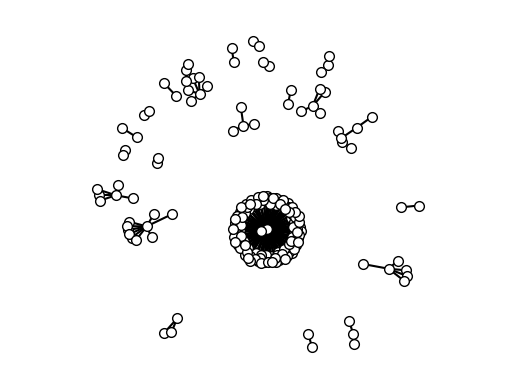

In [7]:
#Loading a hyperedge dictionary from the hypercore 


H_core = xgi.Hypergraph(k_shell_dict)
print(f"The projected hypergraph core has {H_core.num_nodes} nodes and {H_core.num_edges} edges")

xgi.draw(H_core)

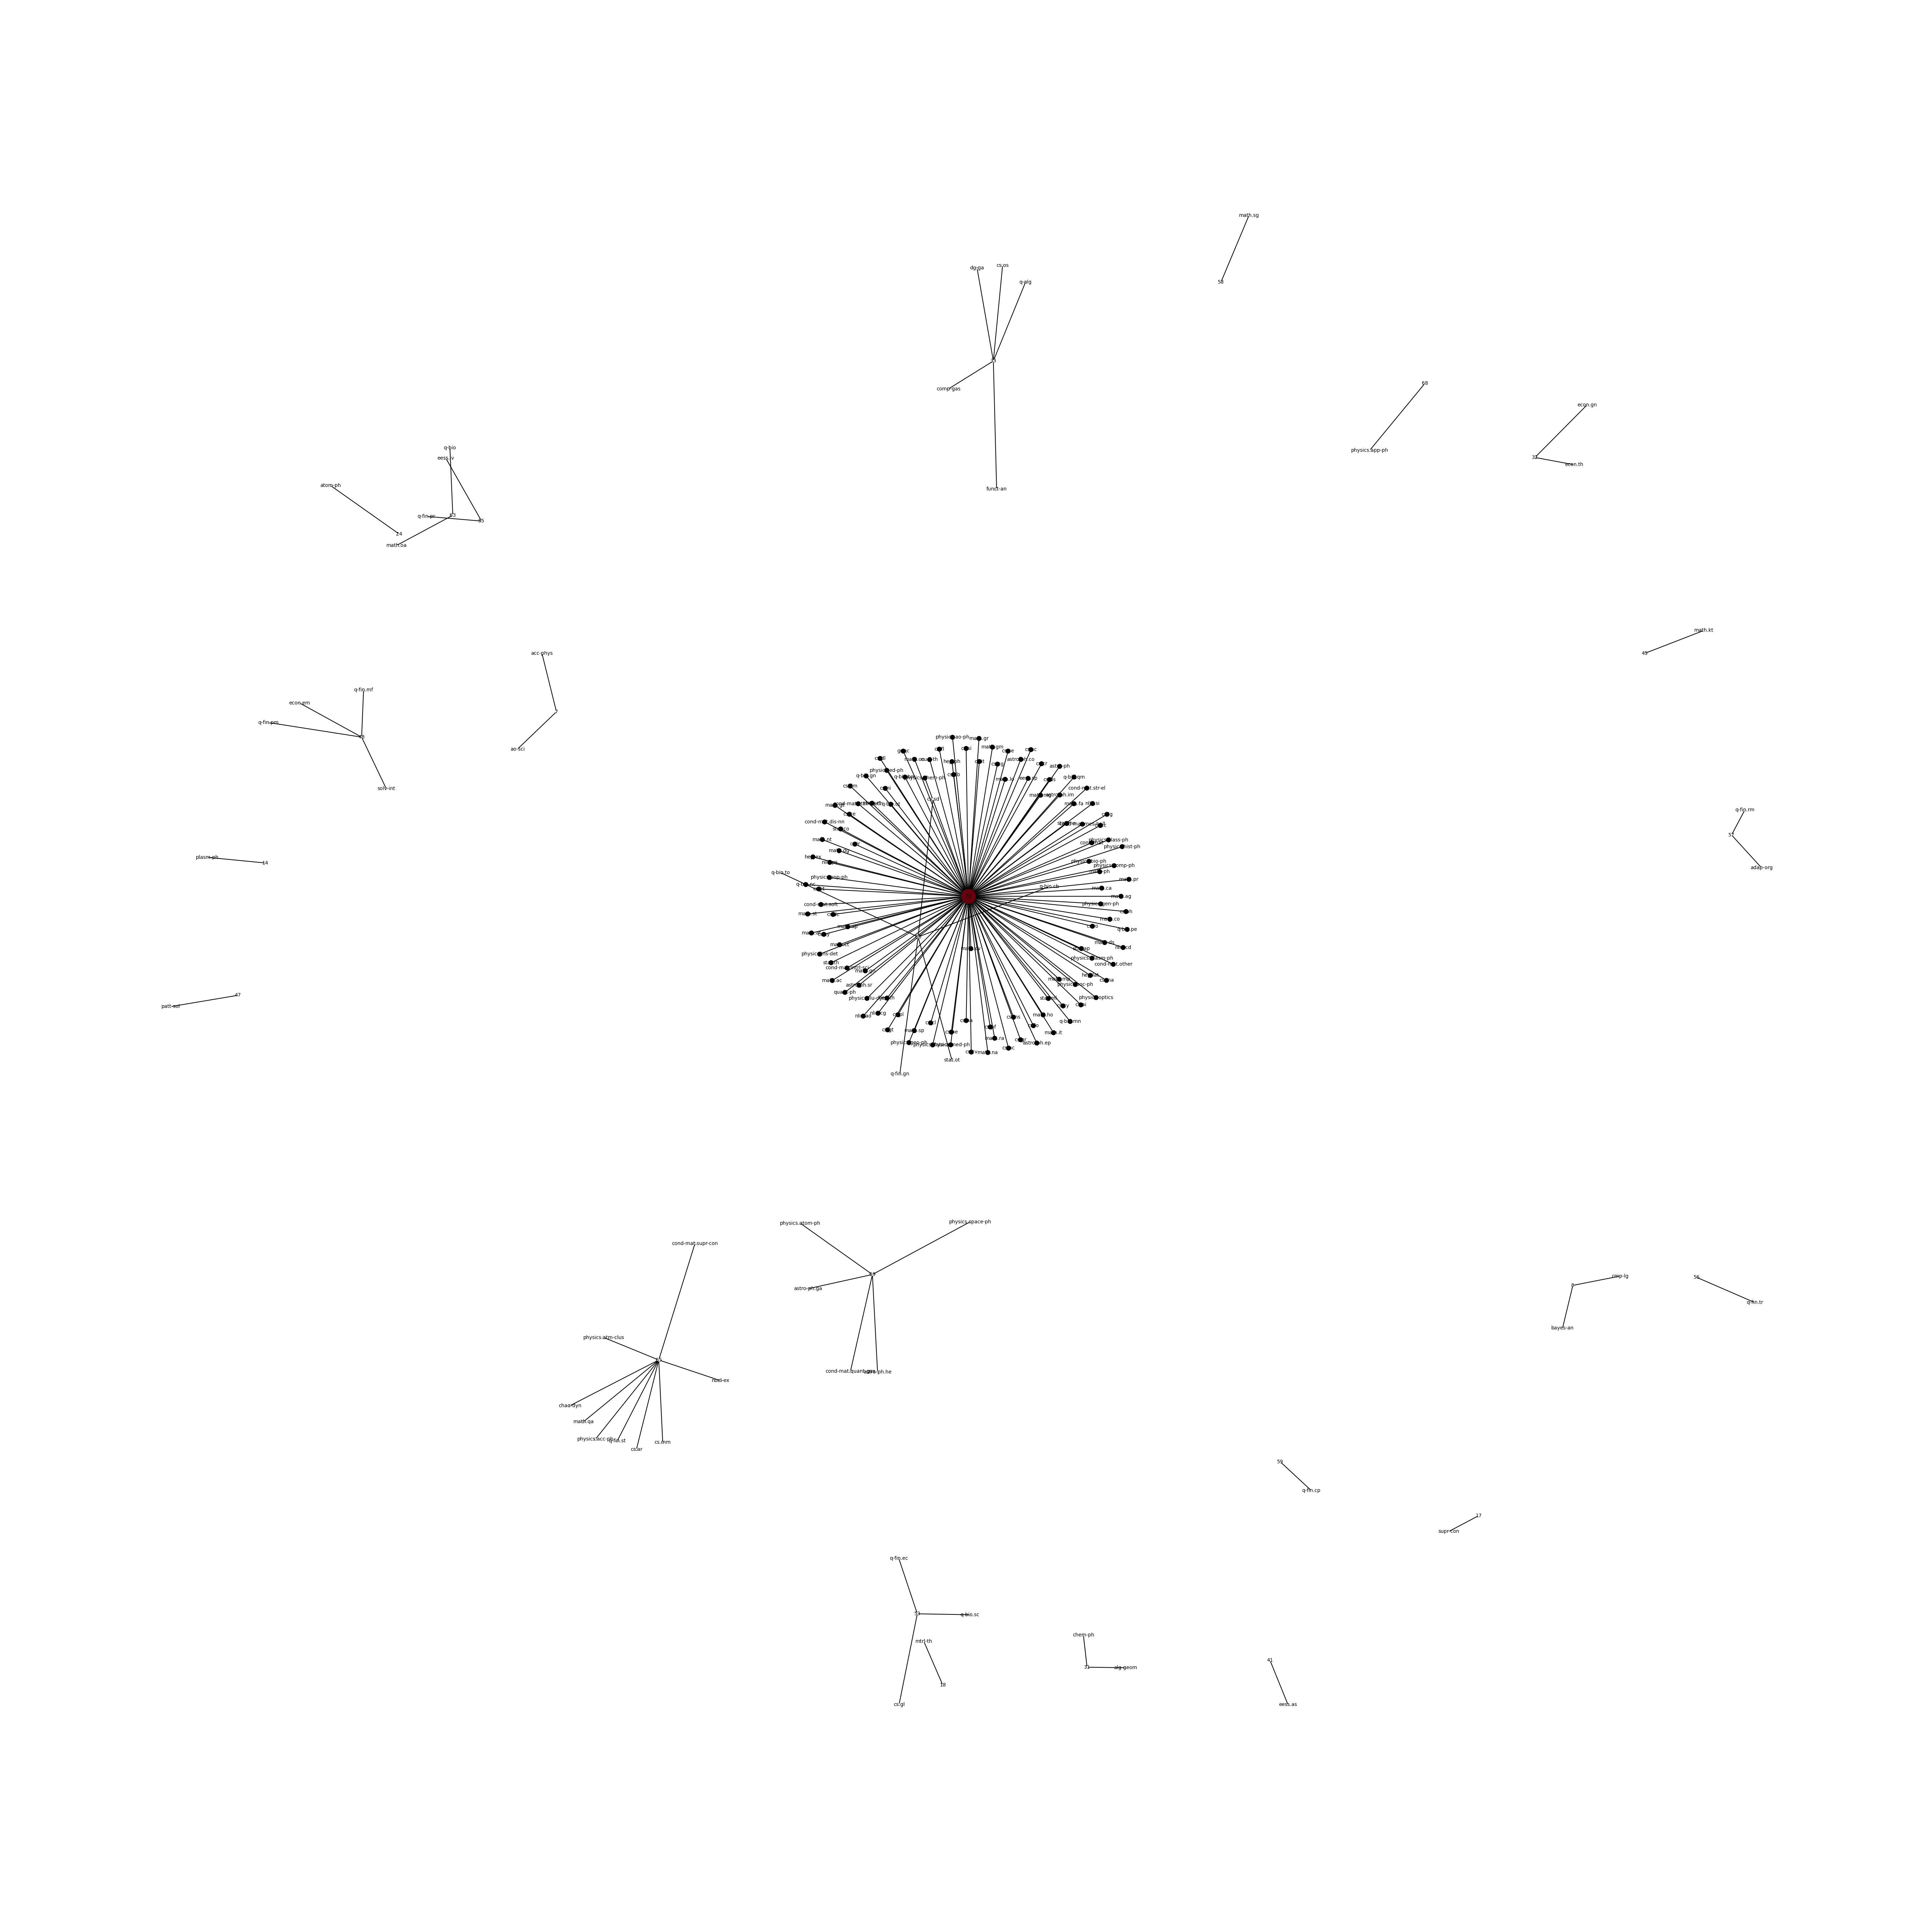

In [12]:
# Plotting with more details and labels on some large nodes 
# xgi.drawing.draw.draw_node_labels(H, pos, node_labels=False, font_size_nodes=10, font_color_nodes='black', font_family_nodes='sans-serif', font_weight_nodes='normal', alpha_nodes=None, bbox_nodes=None, horizontalalignment_nodes='center', verticalalignment_nodes='center', ax_nodes=None, clip_on_nodes=True, zorder=None)

fig, ax = plt.subplots(figsize=(70, 70))
xgi.draw(
    H_core, 
    node_size=H_core.nodes.degree,
    node_lw=H_core.nodes.average_neighbor_degree,
    node_fc=H_core.nodes.degree,
    node_labels = True,
    ax=ax,
);




fig.savefig('know_hypergraph_core.jpg')

Hypercore of projected knowledge graph

We need to plot core of the projected knowledge graph.


In [ ]:
# highlight and plot nodes in the core.


print('saving the result')
print(k_shell_dict)



# k-m core for hypergraph 

Now we do analysis for the hypergraph 

In [7]:
import json
import itertools
import xgi
import numpy as np
import networkx as nx
from tqdm import tqdm
import pickle as pk
from itertools import compress



data = hyperedge_list

# preparation of data (as list format)


L=len(data)
size_max=len(data[L-1])

size=list([len(data[j]) for j in range(L)])

X = xgi.Hypergraph(data) #build the hypergraph
IDX = list(X.nodes)
IDX_e = list(X.edges) 
N=len(IDX)

M=range(2,size_max+1) 
k_step=1
K=range(0,1200,k_step) 

k_shell_dict={}
idx_orig = IDX

IDX_size = range(len(size))
k_max=np.zeros(len(M))


print('len of data', M, K, k_max)

In [8]:

for j in idx_orig:
    k_shell_dict[j]=np.zeros(len(M))

for x in range(len(M)):
    m=M[x]  
    
    D=np.zeros(len(K))  

    idx_size = list(compress(IDX_size, np.greater_equal(size, m * np.ones(len(size))))) #consider only hyperedges of size >=m
    int_sel = list([data[i] for i in idx_size])
    X = xgi.Hypergraph(int_sel) #build hypergraph with only interactions of size >=m
    IDX = list(X.nodes) 
    IDX_e = list(X.edges) 

    for y in range(len(K)):
        kk = K[y]
        
        d_tot_m = np.zeros(len(IDX))
        prev_shell=IDX
            
        for i in range(len(IDX)):
            d_tot_m[i] = X.degree(IDX[i])
        
        idx_n_remove = list(compress(IDX, np.greater(kk * np.ones(len(d_tot_m)),d_tot_m))) #nodes with degree<k are removed
        X.remove_nodes_from(idx_n_remove)
        IDX = list(X.nodes)
        IDX_e = list(X.edges)
                
        sizes = [val for (edge, val) in X.edge_size()] #hyperedges with size <m are removed 
        idx_e_remove = [IDX_e[i] for i in range(len(IDX_e)) if sizes[i]<m] 
        X.remove_edges_from(idx_e_remove)
        
        int_sel = [list(e) for e in X._edge.values()] #fully coincident hyperedges are removed
        int_sel.sort() 
        int_sel = list(int_sel for int_sel, _ in itertools.groupby(int_sel))
        X = xgi.Hypergraph(int_sel) #build new hypergraph
        IDX = list(X.nodes)
        IDX_e = list(X.edges)

        while len(idx_n_remove)>0 or len(idx_e_remove)>0: 
            
            d_tot_m = np.zeros(len(IDX))  
            
            for i in range(len(IDX)):
                d_tot_m[i] = X.degree(IDX[i])
                
            idx_n_remove = list(compress(IDX, np.greater(kk * np.ones(len(d_tot_m)),d_tot_m))) #nodes with degree<k are removed
            X.remove_nodes_from(idx_n_remove)
            IDX = list(X.nodes)
            IDX_e = list(X.edges)

            sizes = [val for (edge, val) in X.edge_size()] #hyperedges with size <m are removed 
            idx_e_remove = [IDX_e[i] for i in range(len(IDX_e)) if sizes[i]<m]
            X.remove_edges_from(idx_e_remove)
            
            int_sel = [] #fully coincident hyperedges are removed
            int_sel = [list(e) for e in X._edge.values()]
            int_sel.sort()
            int_sel = list(int_sel for int_sel, _ in itertools.groupby(int_sel))
            X = xgi.Hypergraph(int_sel)
            IDX = list(X.nodes)
            IDX_e = list(X.edges)
            
        shell_kk = list(sorted(set(prev_shell) - set(IDX)))
        for j in shell_kk:
            k_shell_dict[j][x]=kk-k_step

        D[y] = len(X.nodes)
        if y > 0:
            if D[y] == 0 and D[y - 1] != 0:
                k_max[x] = kk - k_step #maximum connectivity at order m
        if D[y]==0:
            break #stop the decomposition when the (k,m)-core is empty
            
            
print('saving the results')

AttributeError: edge_size is not a method of Hypergraph or a recognized NodeStat or EdgeStat

### Saving the results

In [ ]:
pk.dump(k_shell_dict, open('K-shell_dict_{0}_hyper.pck'.format(dataset),'wb')) #m-shell index

with open('K-max_{0}_hyper.json'.format(dataset),'w') as f:
    json.dump(k_max.tolist(), f) #maximum connectivity
    
R_dict={} #size-independent hypercoreness
for y in k_shell_dict:
    R_dict[y]=sum(np.array(k_shell_dict[y])/np.array(k_max))

pk.dump(R_dict, open('R_dict_{0}_hyper.pck'.format(dataset),'wb'))

Psi=[] #Psi(m)  distribution of hyperedges size
for m in range(2,size_max+1):
    Psi.append(size.count(m)/len(size))

R_w_dict={} #frequency-based hypercoreness
for y in k_shell_dict:
    R_w_dict[y]=sum(np.array(Psi)*np.array(k_shell_dict[y])/np.array(k_max))
    
pk.dump(R_w_dict, open('R_w_dict_{0}_hyper.pck'.format(dataset),'wb'))